<a href="https://colab.research.google.com/github/marekpiotradamczyk/ml_uwr_23/blob/main/Assignments/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 5

**Submission deadline:**
* **lab session in the week 8-12.1.24**

**Points: 1+3 points**


In [ ]:
# Standard IPython notebook imports
%matplotlib inline

import os

import httpimport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import scipy.stats as sstats

import seaborn as sns
from sklearn import datasets

# In this way we can import functions straight from github
with httpimport.github_repo('janchorowski', 'nn_assignments'):
     from common.plotting import plot_mat

sns.set_style('whitegrid')

# MNIST

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(x_flat):
    fig = plt.figure(figsize = (2,2))
    plt.imshow(x_flat.reshape(28,28), cmap='gray')
    plt.show()


In [ ]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

Downloading...
From: https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU
To: /content/mnist.npz
100% 55.4M/55.4M [00:03<00:00, 16.0MB/s]


In [ ]:
with np.load('mnist.npz') as data:
    mnist_full_train_data_uint8 = data['train_data']
    mnist_full_train_labels_int64 = data['train_labels']
    mnist_test_data_uint8 = data['test_data']
    mnist_test_labels_int64 = data['test_labels']

# Split train data into train and validation sets
X_trn = mnist_full_train_data_uint8[:50000]
y_trn = mnist_full_train_labels_int64[:50000]
X_tst = mnist_full_train_data_uint8[50000:]
y_tst = mnist_full_train_labels_int64[50000:]

In [ ]:
X_trn = X_trn.reshape(-1,28*28)
X_tst = X_tst.reshape(-1,28*28)

In [ ]:
y_trn

array([5, 0, 4, ..., 8, 4, 8])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [ ]:
clf.fit(X_trn, y_trn)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [ ]:
(clf.predict(X_trn) == y_trn).mean()

0.9734

In [ ]:
(clf.predict(X_tst) == y_tst).mean()

0.9701

The above results are just basic accuracy stats of kNN on MNIST. Let's see below how they will change if we will reduce the dimensionality via PCA

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_trn)

PCA(n_components=10)

Top 10 components of PCA actually catch 48.9% of total variance of all the initial $28*28=784$ MNIST columns:

In [ ]:
print(pca.explained_variance_ratio_.cumsum().round(3))

[0.097 0.168 0.23  0.284 0.333 0.376 0.409 0.437 0.465 0.489]


Let's see how a classifier performs that uses only these 10 columns:

In [ ]:
X_trn_pca = pca.transform(X_trn)
X_trn_pca.shape

(50000, 10)

In [ ]:
X_tst_pca = pca.transform(X_tst)
X_tst_pca.shape

(10000, 10)

In [ ]:
clf_pca = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [ ]:
clf_pca.fit(X_trn_pca, y_trn)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [ ]:
(clf_pca.predict(X_trn_pca) == y_trn).mean()

0.94228

In [ ]:
(clf_pca.predict(X_tst_pca) == y_tst).mean()

0.9363

The accuracy is lil bit worse, but it's still quite impressive if you realize that now we operate only on 10 columns while the original MNIST has 784 columns. An intuitive explanation for why kNN can perform well after reducing to 10 main components can be seen below where we reduce to 2 dimensions. kNN on 2-dimensions has accuracy 53% and 44% on train and test set, which is way worse, but still very nontrivial.

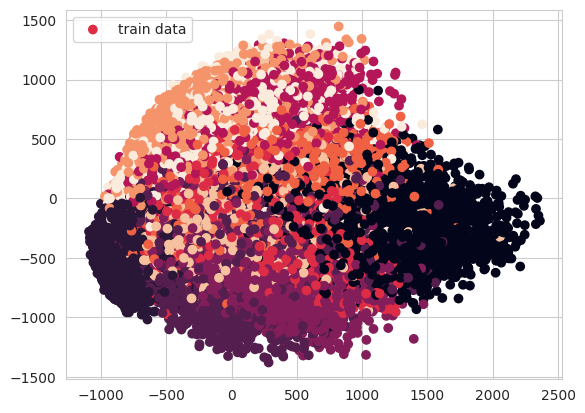

In [ ]:
plt.scatter(X_trn_pca[:,0], X_trn_pca[:,1],   c=y_trn, label="train data")
plt.legend(loc="upper left")

In [ ]:
X_inv_trn_pca = pca.inverse_transform(pca.transform(X_trn))

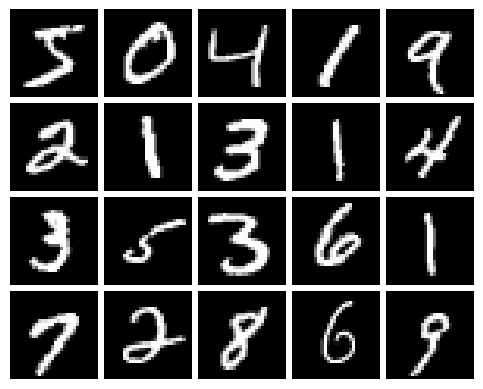

In [ ]:
plot_mat(X_trn.reshape(-1,28,28)[:20, None], cmap='gray')

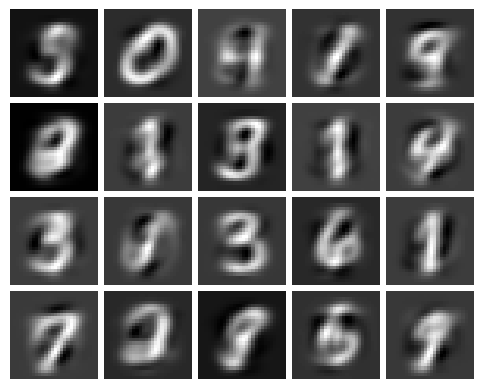

In [ ]:
plot_mat(X_inv_trn_pca.reshape(-1,28,28)[:20, None], cmap='gray')

# Problem 1 [1p]

Find the smallest number of PCA components for which exists `k` such that k-Nearest Neighbors give accuracy on the test set at least 88%.

In [ ]:
#your solution here
def f(X_train, y_train, X_test, y_test):
  for i in range(1,X_train.shape[1]):
      pca = PCA(n_components=i)
      pca.fit(X_train)
      pca.transform(X_train)
      X_train_pca = pca.transform(X_train)
      X_test_pca=pca.transform(X_test)
      for k in range (1,10):
        clf_pca = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        clf_pca.fit(X_train_pca, y_train)
        if ((clf_pca.predict(X_test_pca) == y_test).mean()>=0.88):
          return i
  return None

In [ ]:
print(f(X_trn, y_trn, X_tst, y_tst))

7


![pca.jpg](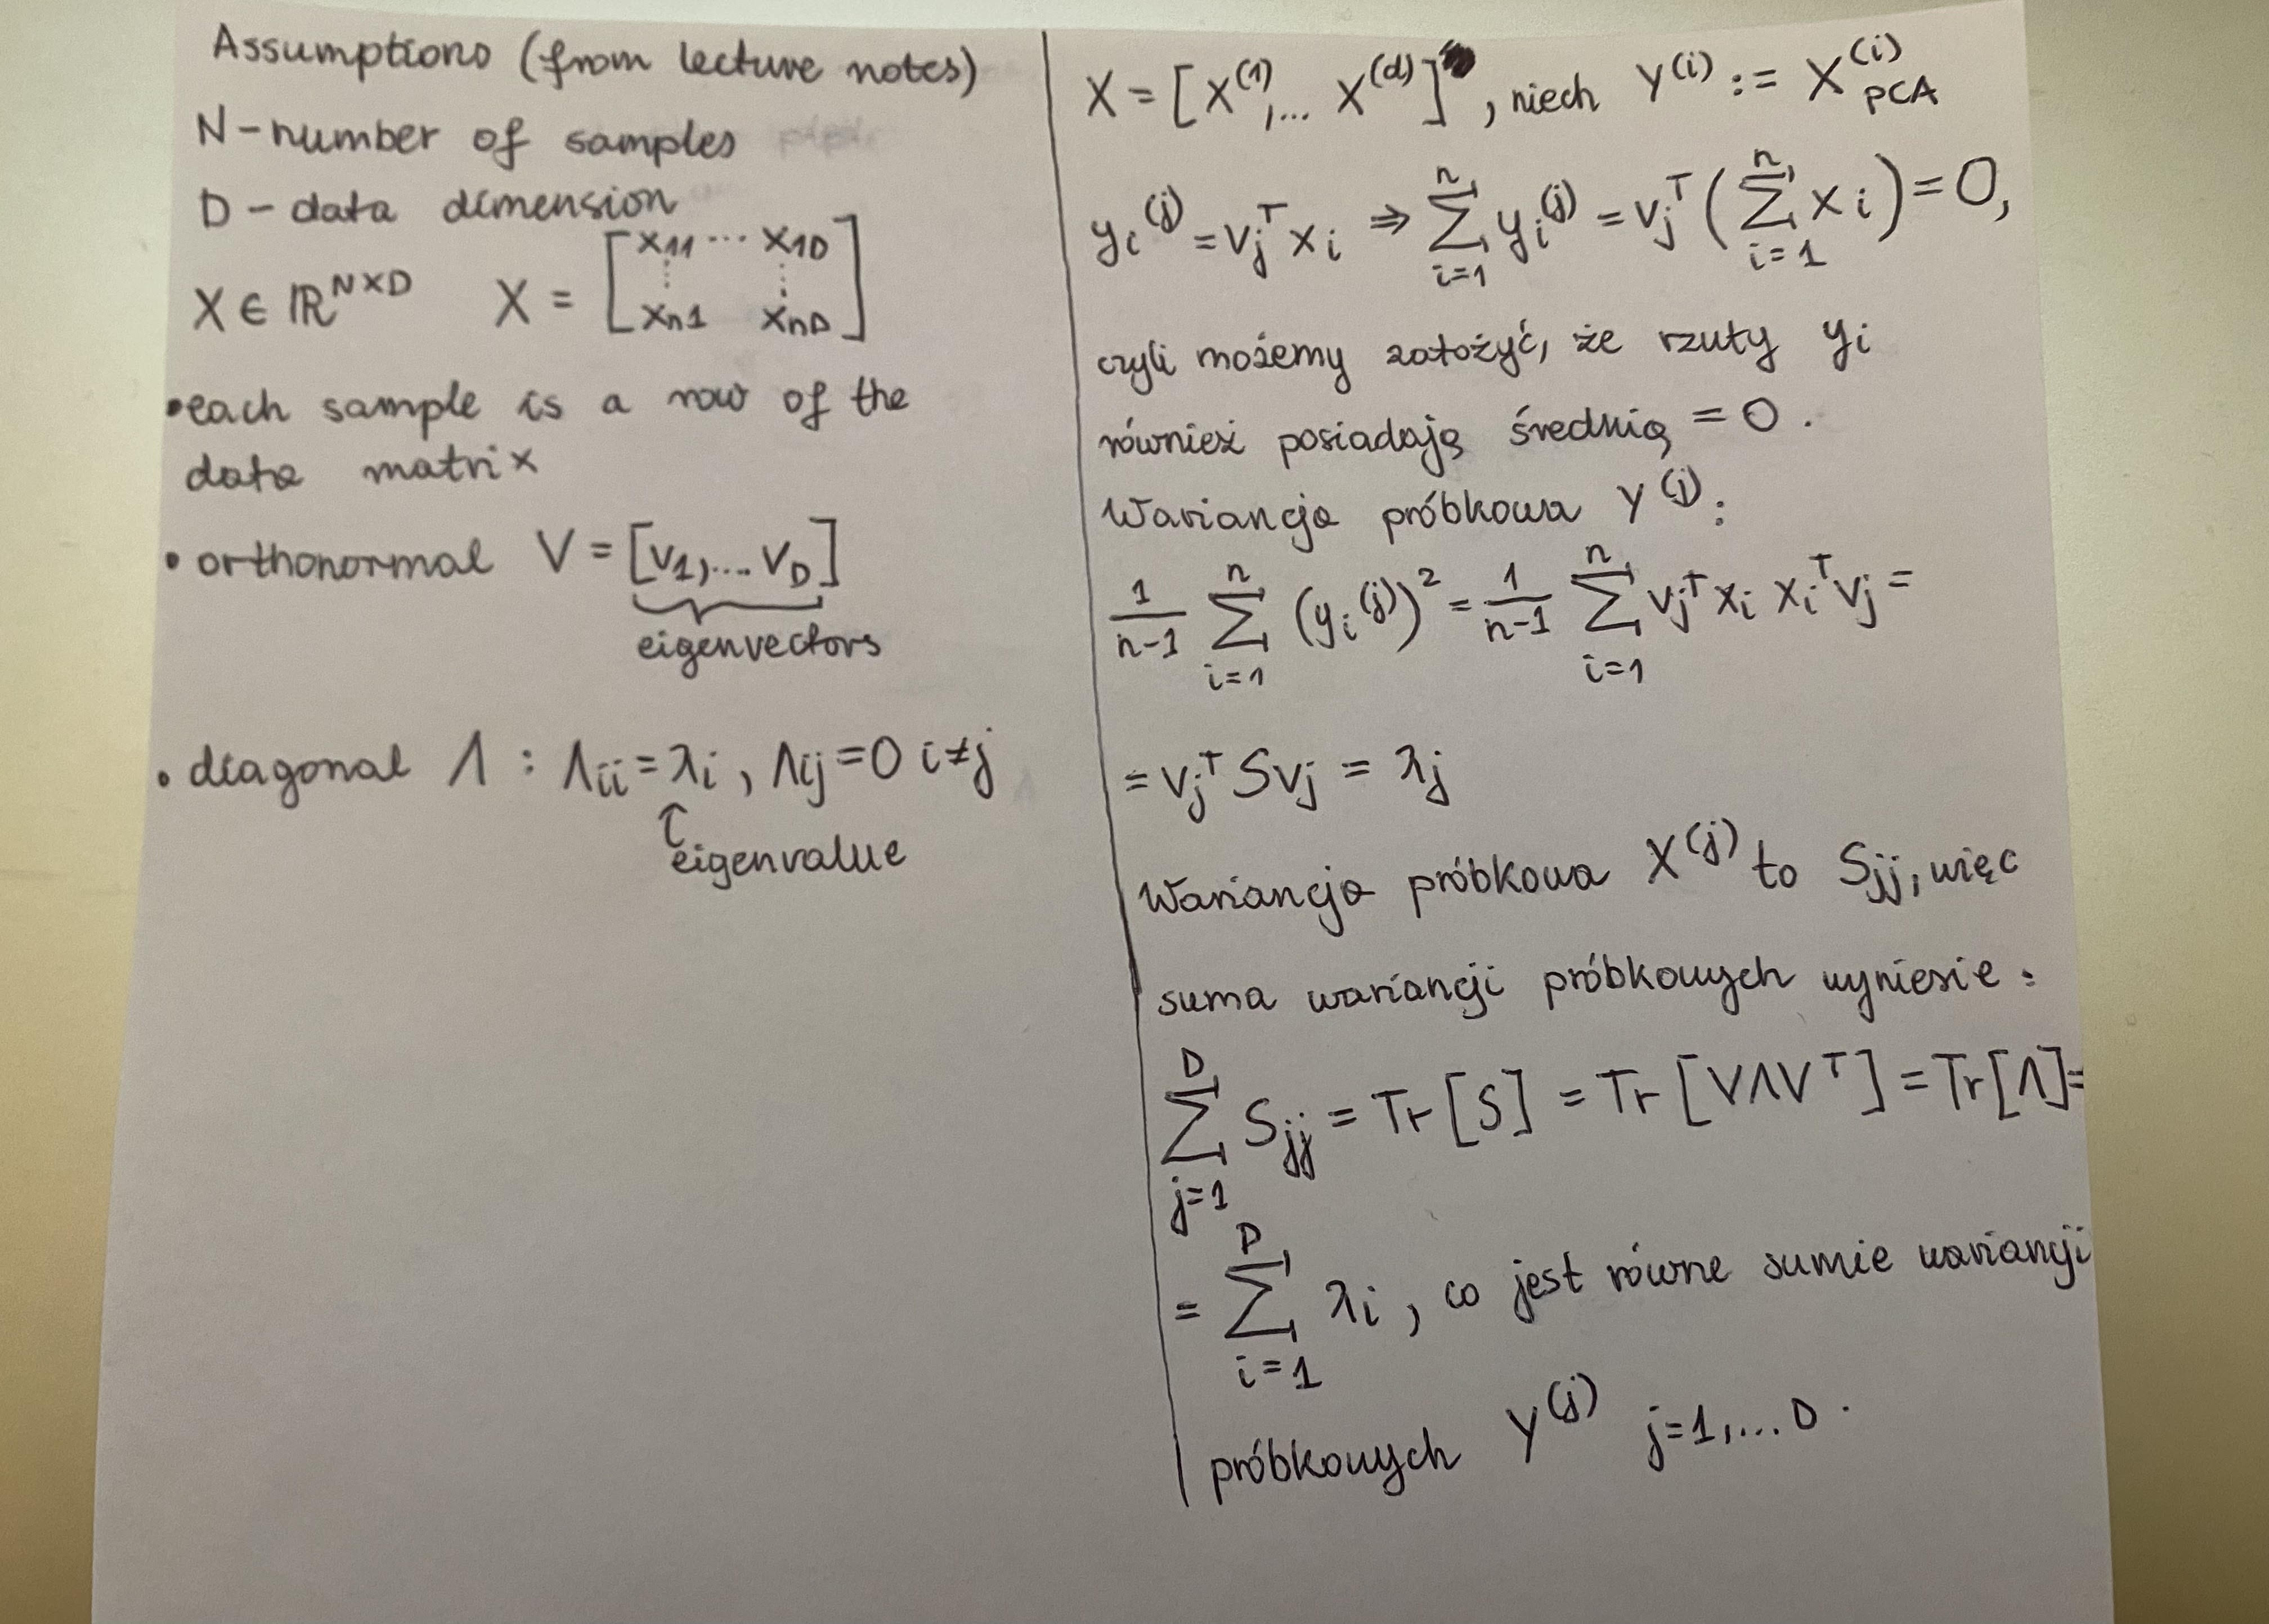![pca.jpg](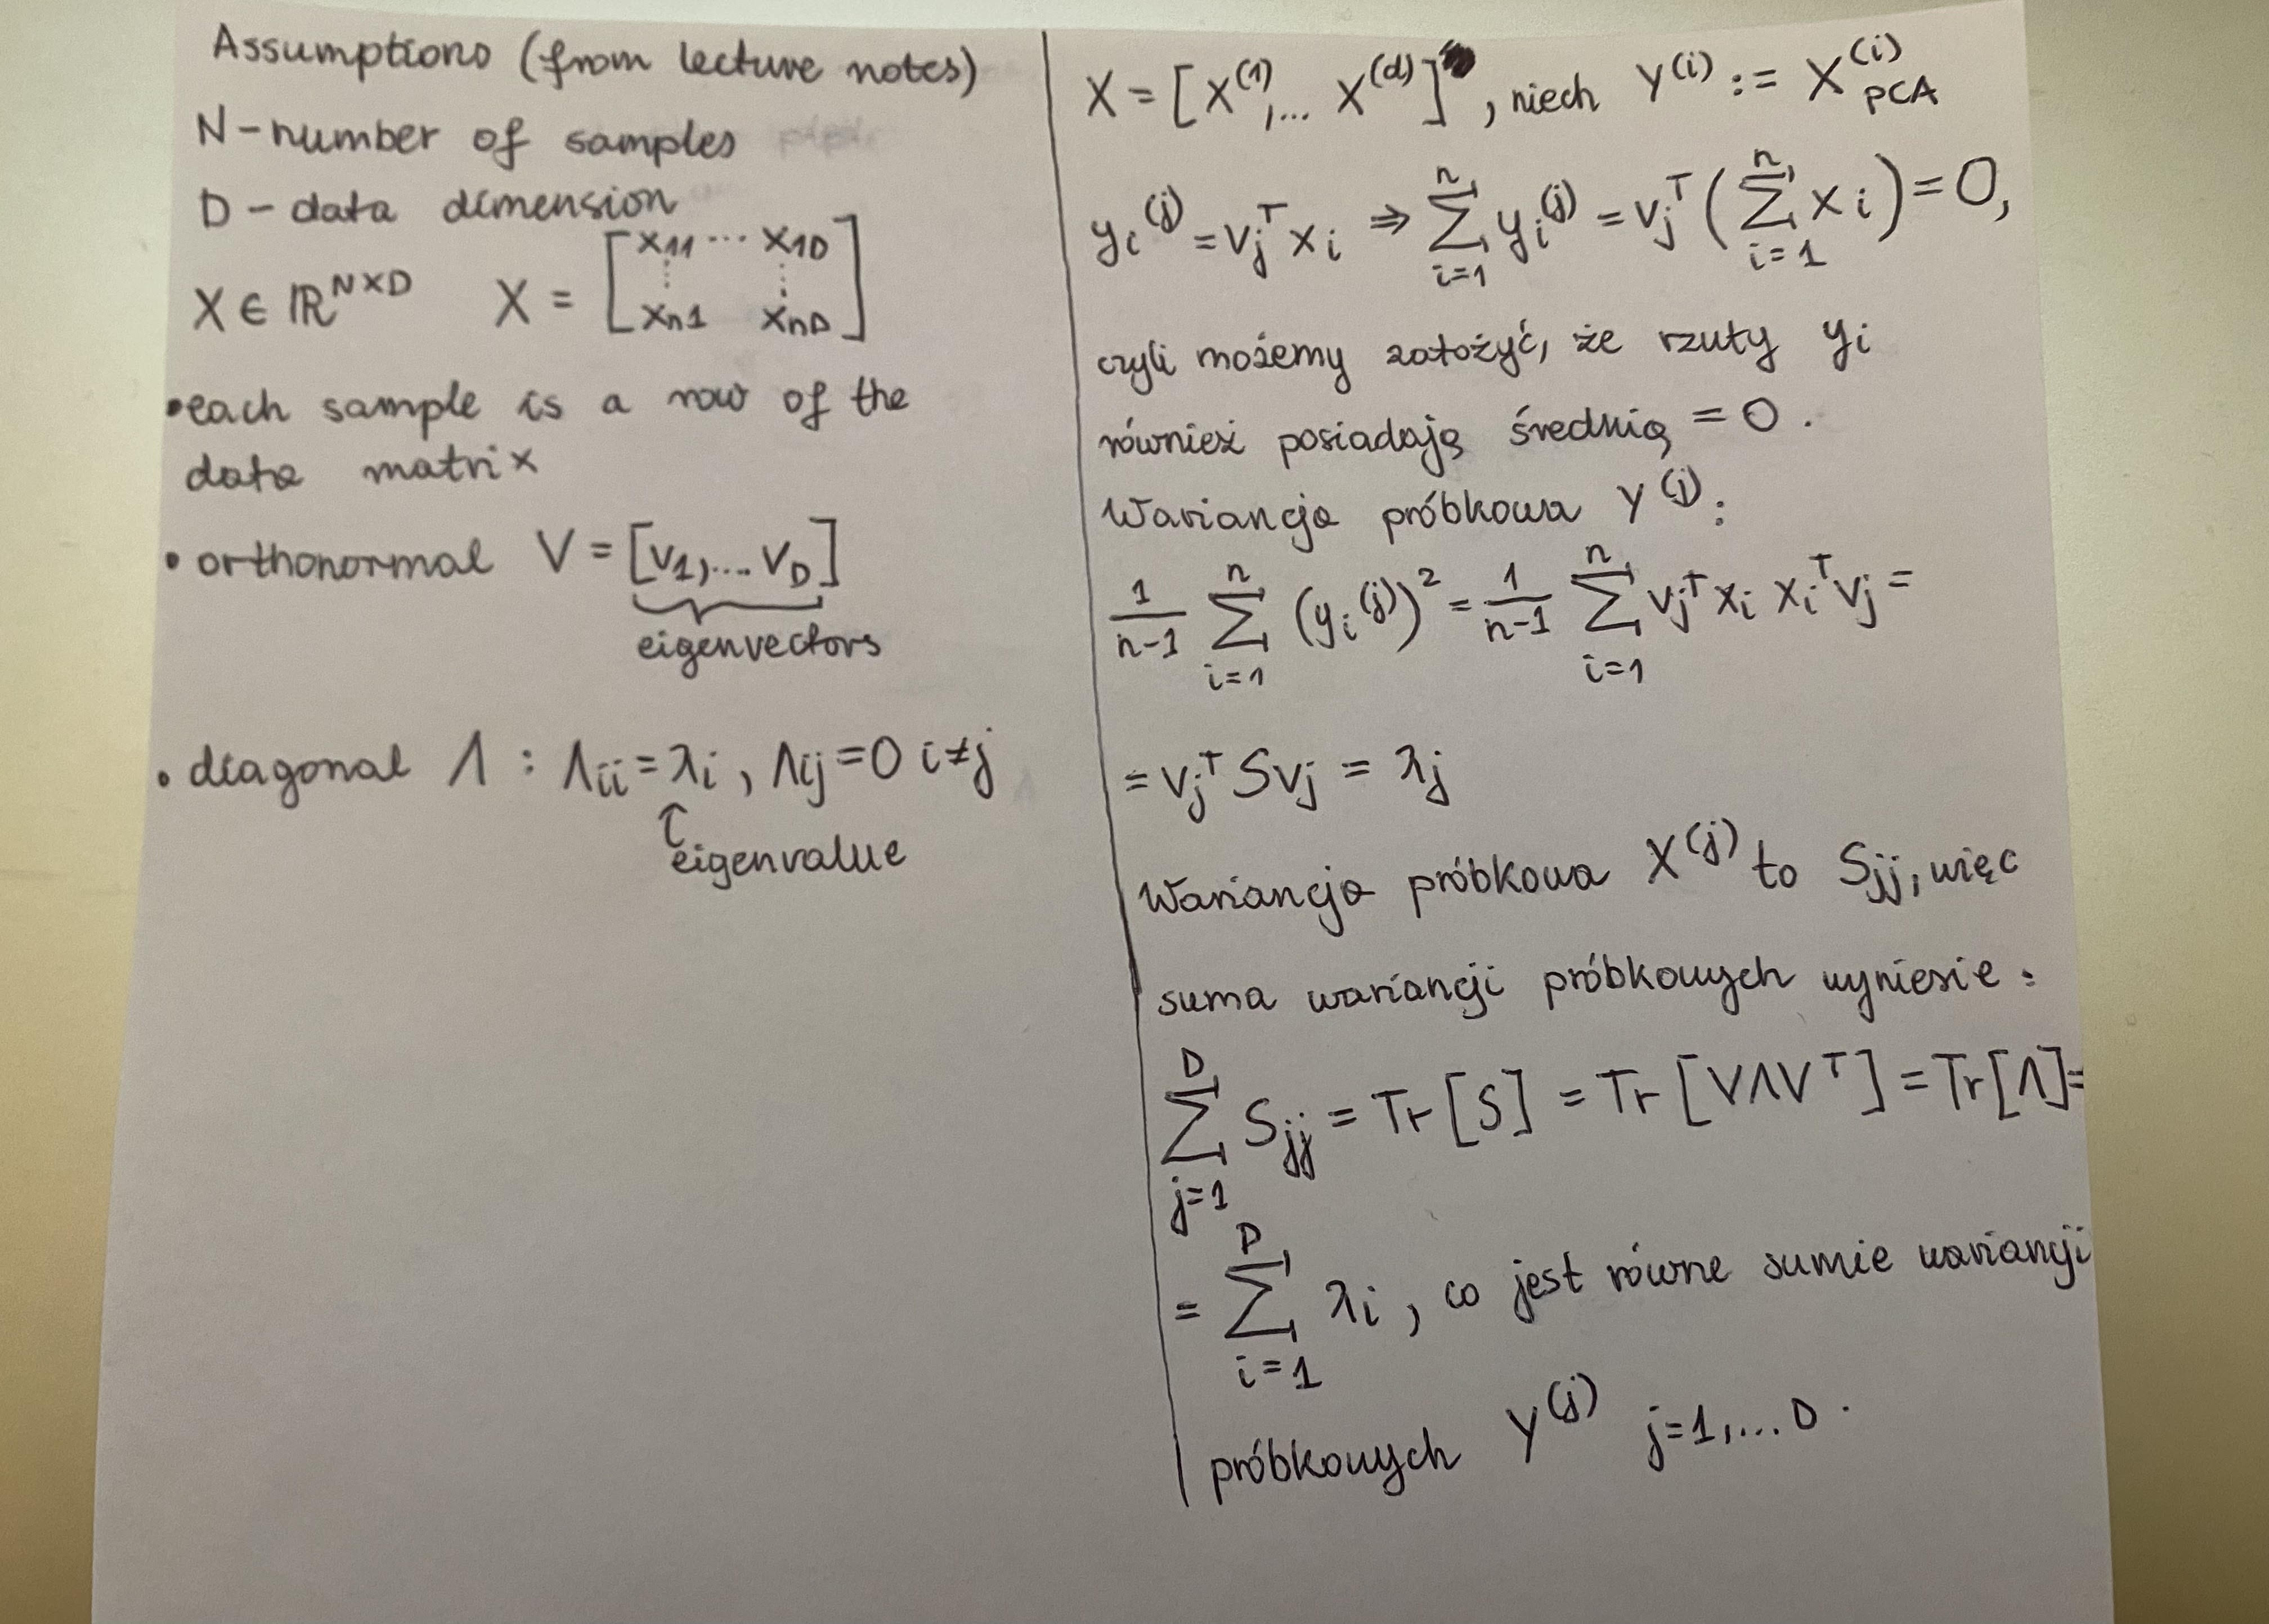![pca.jpg](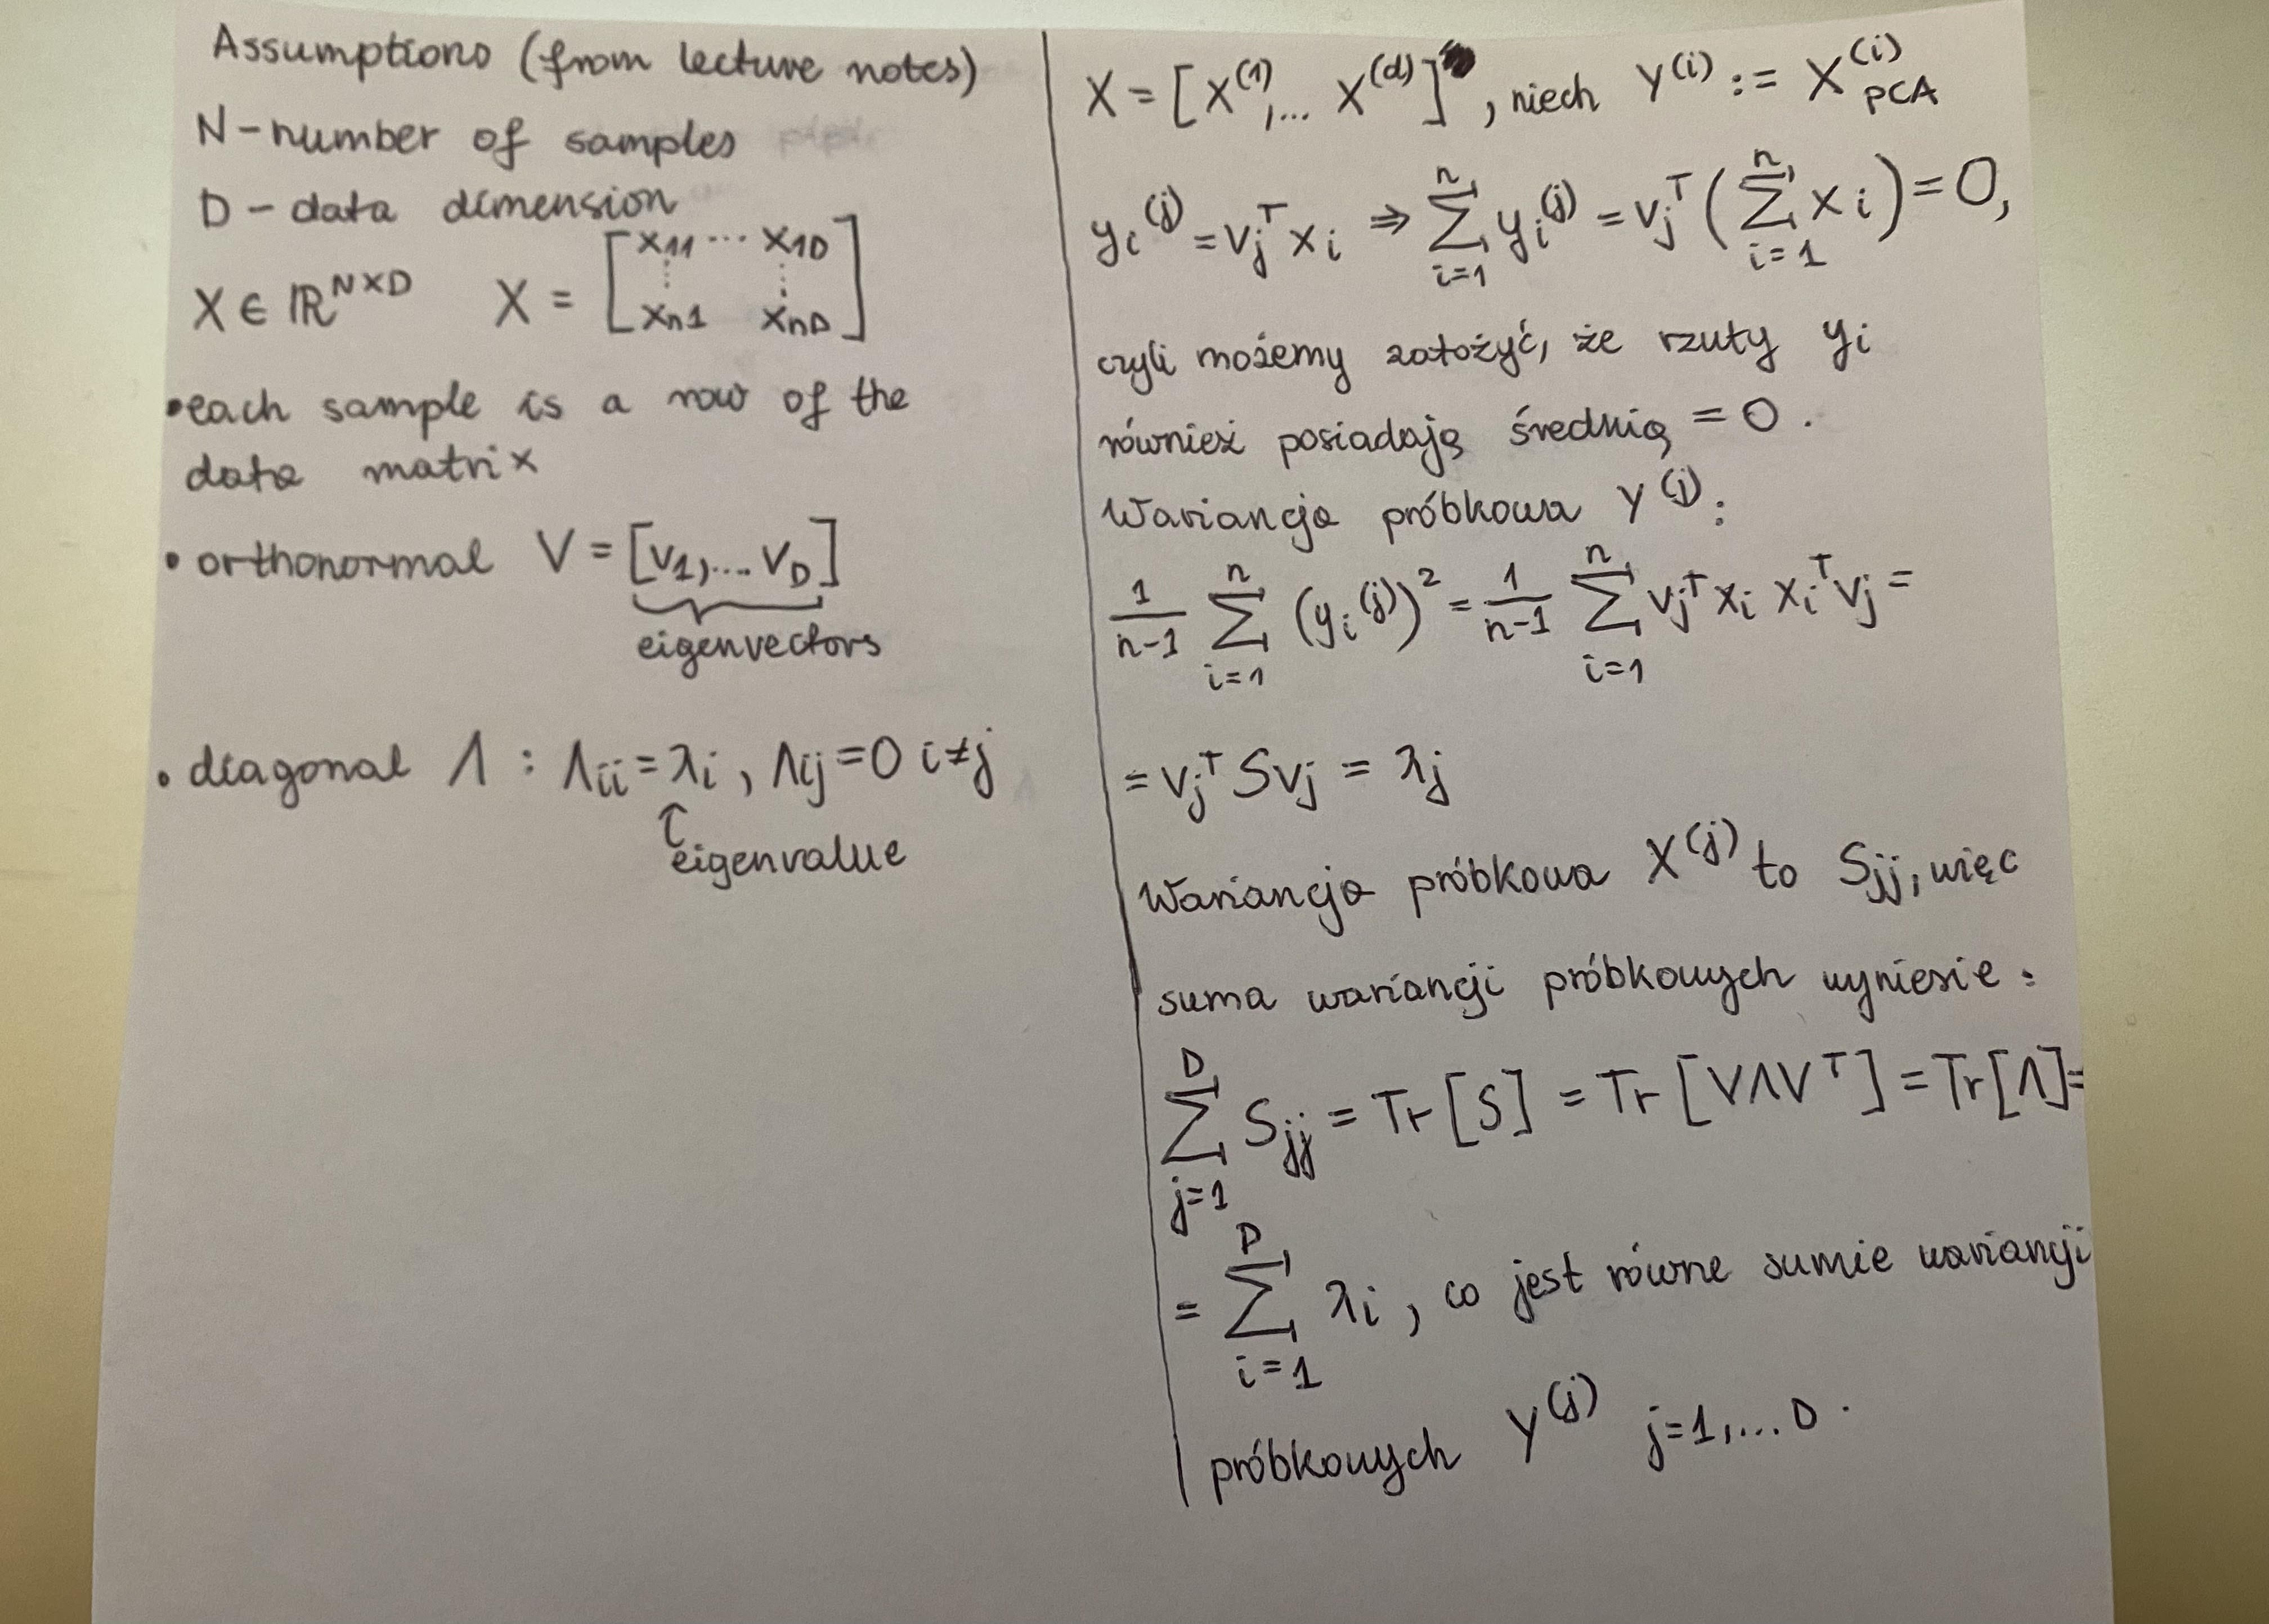![pca.jpg](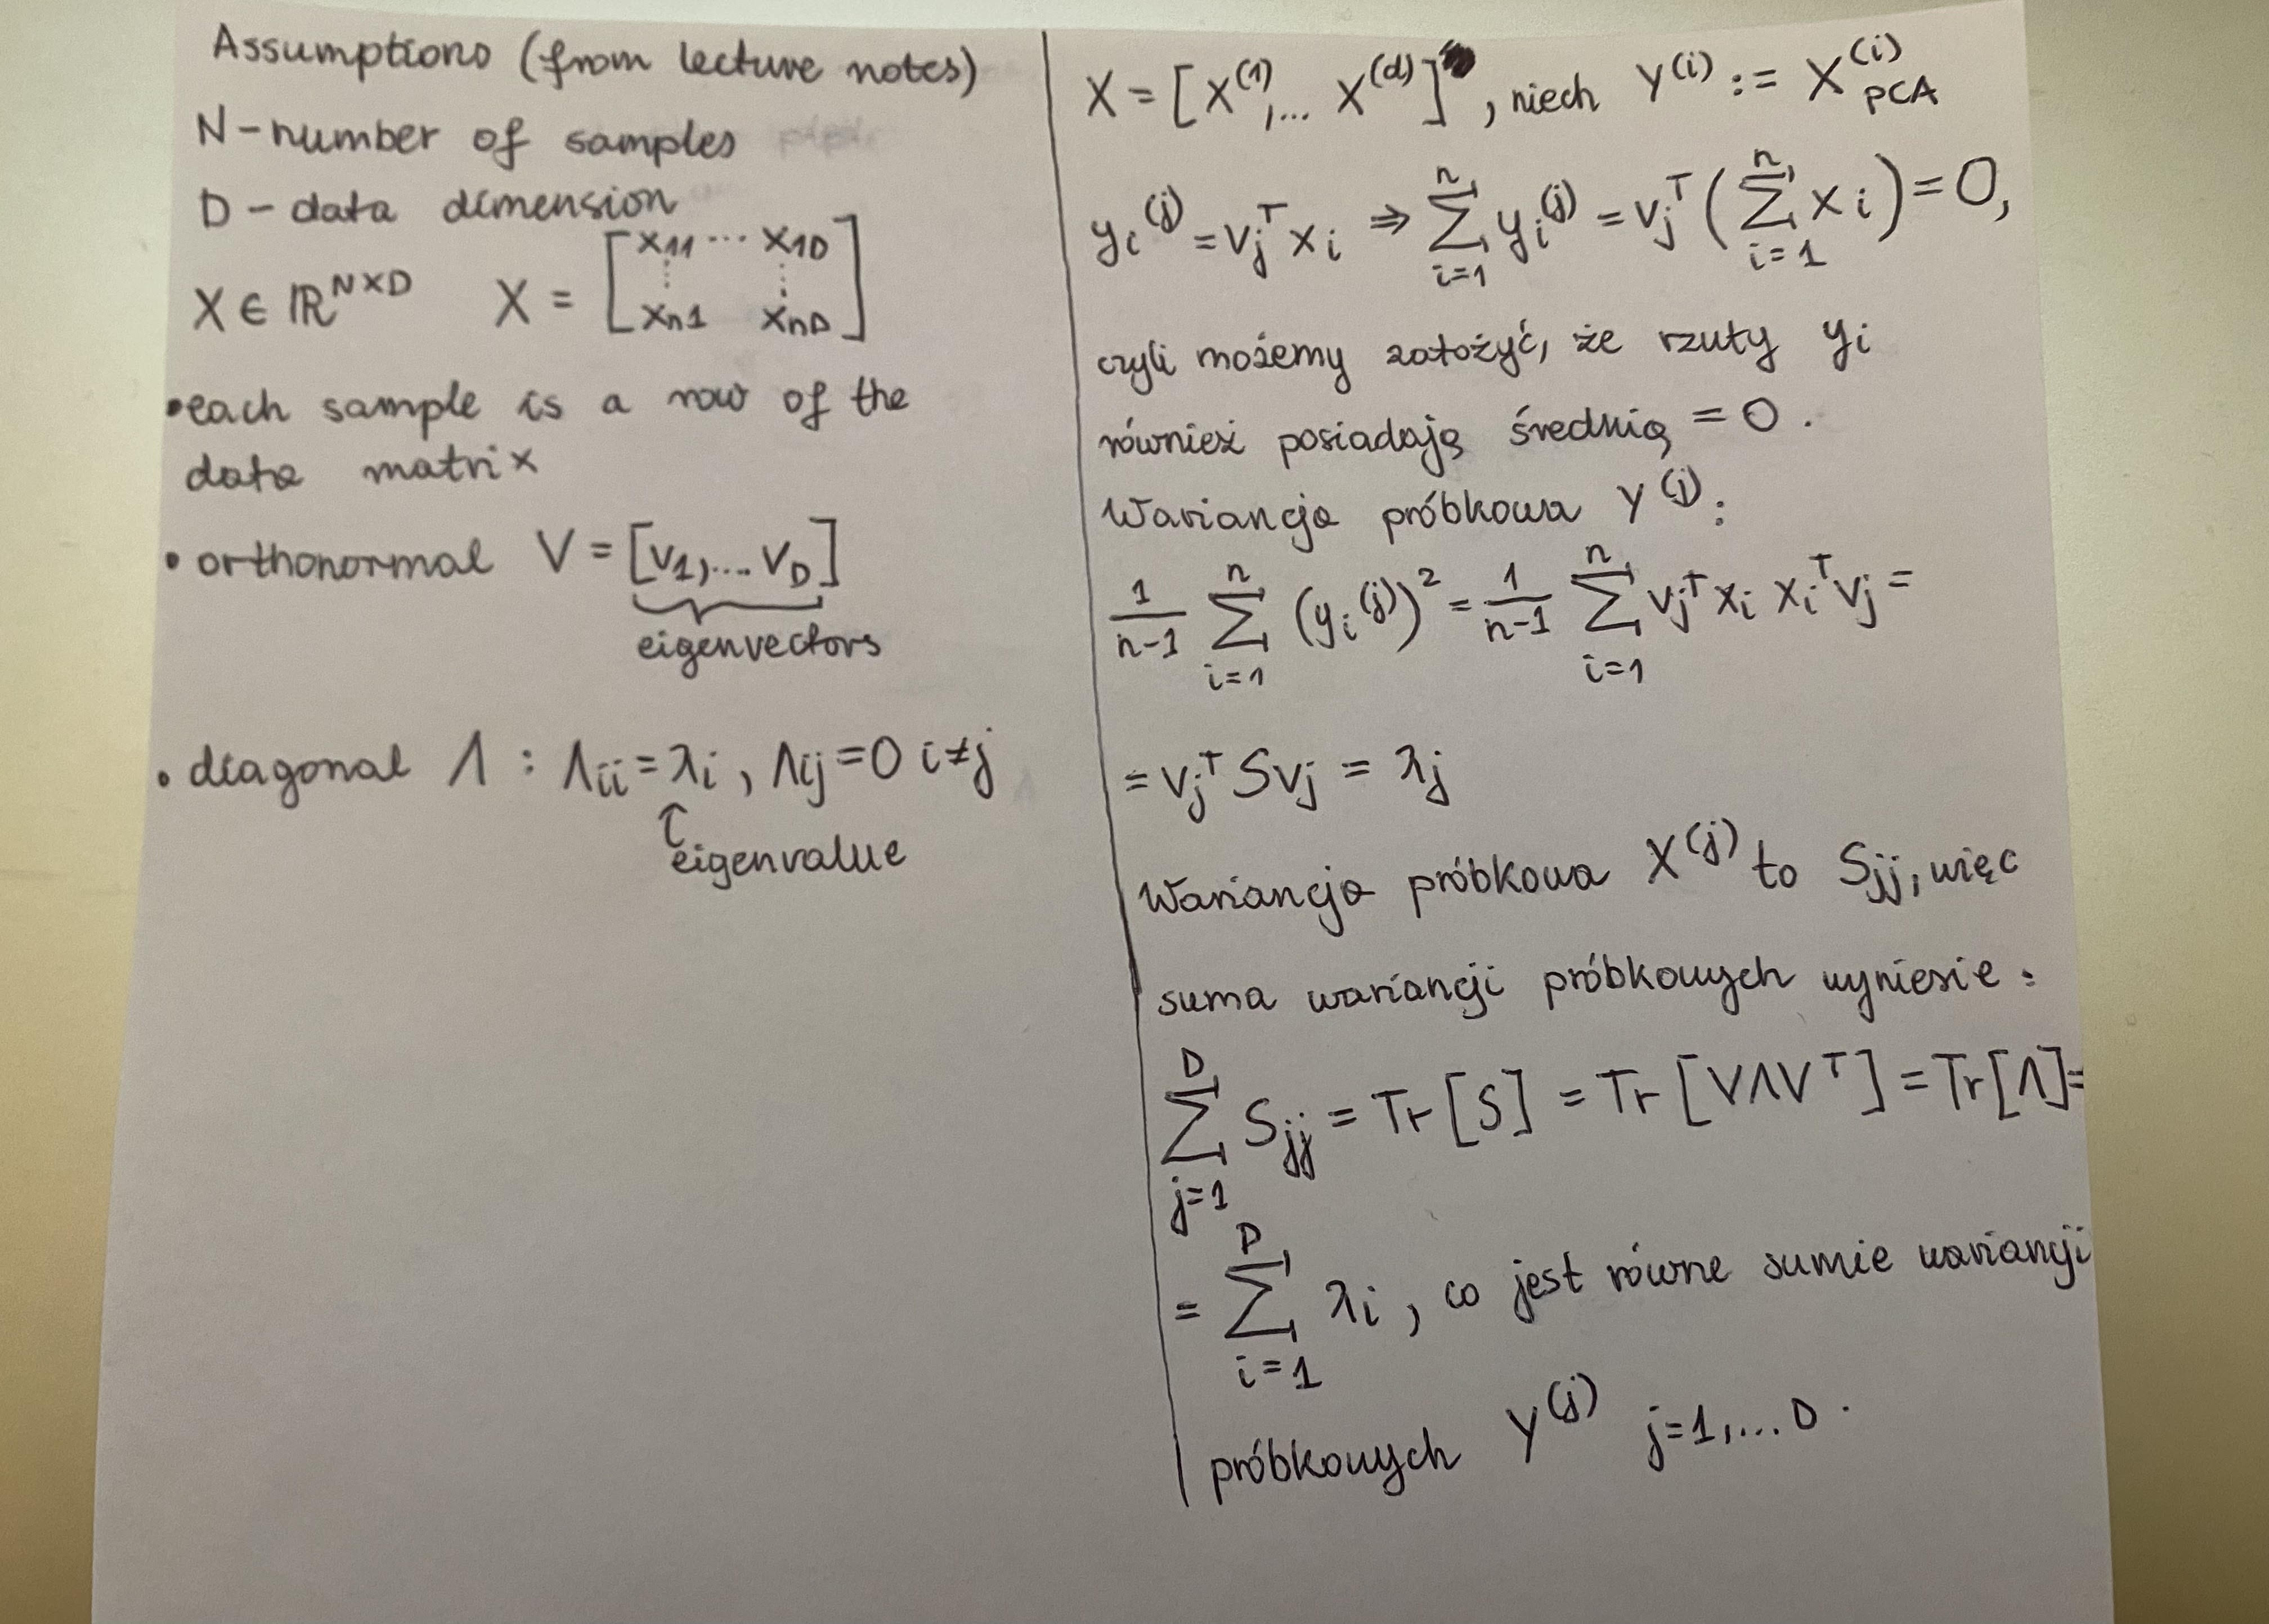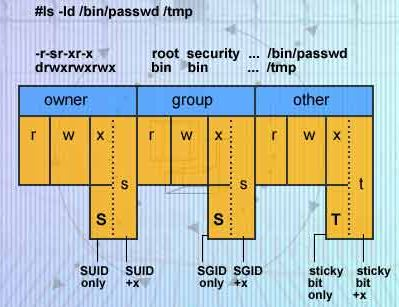))))# Variance invariant

Let's take the original MNIST, and let's calculate the variance of each column:

In [ ]:
np.var(X_trn,axis=0).shape

(784,)

and after that let's sum all of these variances.

In [ ]:
np.var(X_trn, axis=0).sum()

3435520.706161413

Now let's do the same with PCA transformed MNIST.

In [ ]:
pca = PCA()
pca.fit(X_trn)

PCA()

In [ ]:
X_trn_pca = pca.transform(X_trn)

In [ ]:
np.var(X_trn_pca, axis=0).sum()

3435520.706161439

Up to rounding errors, the values are the same. And that's not a coincidence.

## Problem 2 [3p]

Consider any dataset $X \in \mathbb{R}_n^d$, where $d$ is the number of columns, and $n$ is the number of samples. Let $\sum_{i=1}^d \mathcal{D}^2 X^i$ be the sum of variances of all the columns. Let $X_{pca} \in \mathbb{R}_n^d$ be the PCA transformed $X$ dataset. Show that $\sum_{i=1}^d \mathcal{D}^2 X^i = \sum_{i=1}^d \mathcal{D}^2 X_{pca}^i$.

Write the proof of this fact below. You can either do it in LaTeX, or you can write it in a reasonably elegant way on a piece of paper and paste an image here.

AAAGQAAAAFGdYWVoAAAGkAAAAFGJYWVoAAAG4AAAAFHJUUkMAAAHMAAAAIGNoYWQAAAHsAAAALGJUUkMAAAHMAAAAIGdUUkMAAAHMAAAAIG1sdWMAAAAAAAAAAQAAAAxlblVTAAAAFAAAABwARABpAHMAcABsAGEAeQAgAFAAM21sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgAyWFlaIAAAAAAAAPbVAAEAAAAA0yxYWVogAAAAAAAAg98AAD2/////u1hZWiAAAAAAAABKvwAAsTcAAAq5WFlaIAAAAAAAACg4AAARCwAAyLlwYXJhAAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW3NmMzIAAAAAAAEMQgAABd7///MmAAAHkwAA/ZD///ui///9owAAA9wAAMBu/9sAhAAIBgYKCgoQCgoQCRAQEAkICQkJCQcNBwcNDRsaHxIdGhwcICQrKyAWLBkcECg1KTY2OzQ0NB8nRT00NDwuMzQqAQkJCQ0KDRANDRUmFRAVJiYmJiYyJiYyJjImJiYmJjImMiYyJjImJiYyJiYmJiYmMiYmMjImMiYyJjImJiYmJib/wAARCAtGD8ADAREAAhEBAxEB/8QAHAABAQEAAwEBAQAAAAAAAAAAAQACAwYHBQQI/8QATxAAAQMCBAQDBwMDAwIEAwERAQARIQIxA0FRYQQScYEFkaEGIrHB0eHwEzLxBxRCI1JicoIVJDOSFkNTY6JzshclNMLS4lSD8kRkNZOj/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/xAAcEQEBAQEBAQEBAQAAAAAAAAAAARECEgMxQSH/2gAMAwEAAhEDEQA/AO8E29Ml5Gzzkl/sgTtoM7IKnMHRBWpHZQVWR9EDQ7l7RlKCb7SgaXuezwgpuUBST6nsgb3tlqgmNriHhlQgXpJgS+iBpuPoyIDfybJAkfJUDgR1i6DTxCABedGQQHzQWbfYINUwXP2CBqdo87IMhyYc9bIIg2jdBDQoNXL5IG8XjyQIidWCALsfwFAMQJ+6AnLc6EoNEzbRhmgr+nRBcuXk4sgjzNyxvoqqAz9MkFy/zZBloRTSPyyo0w/ysgw5/dbsgeZ2H8FBNl/CDVVLeiAzfzQAZBoi3qg0+R0jJAQ5PQACAggZtrCAc3PpARA2pEoDlLgPrYoGiou1tSgqg4/BCCqc9mCCIFu6CoANuiDQraMuiAprZh1fVBfrVN3MWQbGJnOSCN9AiNU1DNhZohA89DaMgadosbMgCG9479EEcUUzsAzQg25LcoGUPCDZF3jNroMAWIL9lEavAMxkyojTDCLoDlBMdSckCaM30bIIIsb+aC5M/oyDIjXeEEJG0NCBcNbs0IJjkws8IIwD5aIMCY26hBoACyDRGpbyRAWFnYNLIJg0zI2KANTxJO0AIIDJtM5QQDCN7yEGiwv9Qghn8MkDTptkGCDFIOfbMoNsD6y0oOMnmqGltCg2KGY9c5QaZygC152FgqNBs32QDEN3yQU5fVBoOTqGGzINQICAsgGafmEAwJ+KBH5CDQ1PwQBoBL/dBch7dJUCQAI23QZ5phBoBAHX5QqH80QBJf4oEAXPaxCC/NCgmCCbNA0kP+MggEB+WQXTZAmZ0QTOqIoKCPRAoM1DTZAs0DQIC/5KBbIoCyC5TlsgkEg00Ii5YQDR+MgfzdBk1CyB5UEaYhAMgggEEdkCRE/FkF5fBBNqgmhAAC33CBYaoGpBML9AgbILlnPLJBSb5bsghP46Cp+aB8kEgt/mgggvzRBb/JBMLoBp/GQIAQQpAQT/AGQAD3QOwQXVAUlAjZBX/GCAG3wZAkaIJ3QBLIJ3npsgAdEELIE28kB1+qDVLN5IMESCgUF0QSCaXQQ2zdBqkwgKgyADFA/myCOiACBIDoBBM34yCQQ1QSKgXQSCAQRayAdAs/5KCIyQB2+yDQ/NUGWQLfhQCBZBVB222QFP5EIGl7n4MguWksSLOyDBIqDDm8mCCrIBabXaEGXFJBlpeLoNDDJEFpvYoNEsGE5GQgAA/wAJhBEkmbIKgfbVAg/mSDAOiDTuW08lAZ/PJAk6G6A5PRpyQZpk98wg0fK0Mg0WjTRkAASNnM2QDejoHltbfZBkfTZAgQ1P2QJBdtoQB+HmgBrtCCOmdybBAO10U/gyKBqB2PaUGdvkgWhAF38uiCAb5BAEaeSCD09BtKBYjz6oA0yB5nNAkufKEF5fJBOLoIs9s0FFhrogAYYfBlACkSL/AO6AUGi1xbKJQcZk6DyQNEdM3Qa5QX7WugxWC8R2uguUTr0hAghtMgAM0BVQQ1sngEoD9MAuSe8BBM5D6bMguRhBbu5UEAC9RGxIDEoD9Gk/ttnLIGoVOP5hBVCH65qK4Ke/kg5WAz6oA0ks27lkAbWsgzSCaZPUM6DRJZBovBtDHVAZ+WTIFhp9UGSXctoNCgy71NTEtZ0G2aodTlCAAcks/vM2aDJ0+TlBoggsNOqAIj8hBMACzzlcIMinTLdBuTcIAw38IJpYyNroM/PzQP20Qb93I5IM8xI6loCBcW0kwgjSCJtGUoMABmEsRkgjS8OWcwLIMEDmek1ZAwg5CDSWfTJygxUWOnZFTOLz5Qg1SbD0dgiHJ9UGCILaDYoGaaQWdFEwT9kCLv5aIKunmaGbRBnl6+SDRJFx5BBkE5EjugpDOWv1QRpJ7d0FynI+QlBl6uuyDkoAEfCUGDnpKCy2hAts9uqCqpjPsWKDIDx03KBNLFr6wwQDHma59GQVJzY9wgRbugK6QQxMm2iDVFMMTk0BkBy6ZdigWID2QcdNI6kW0QIcan1QYLmwN5hkHJctsEGagBANxKAoEN8gEGiBJKDBj0QQpefLRAcs8u6DRa32QWfXW6AFR7S2iDFFJAkydkDVTYoNMLR2NkGTSC213CBqdnpEwgOU3J7ASgwwePuoEWz6kIDmNRBA0ZBqonMIAW+AugSCzneLIOOqoEQNMmCDXOJOyiqkkh/syDPTyQJpLTZz0QVAJPzyQRB2ug1XZoy2QGI4A0edEByux+bIMASSLeaBqqYfLNAEG87FkG21Y2tBQcAuT1vZkDVUTTEdnCCrHuibta6DfK4HRBbAeZhAjdBxy05uyDQqJYD4IMgE1beqDWRHkgwabA5EOckGpJhAZsR9EAw0bVAE5dANSg0KSAXyQQ/MggDSBGrxkg4wLUywzQbppDktZmDIMFyWaBrBCBgmNGm4QNRZgEGGfUXQNQMWb1JQABEG4c2sgsMm7XQMGpxeBsgTEwNckCa/ra6DAETn8EGi9jtlZAAWPyZA1Uiw0QFWRN2tsgOaJ0QYMwCSMolBqmm98tkA3x7IIUh2kd7oNvlHe4QcZpl37syDj5HJY39EG6cMMOab9EDkzRM5IKg0tG05IAz1g005IEU1VbeiCFMxPdkBVS0tLiRKBFLmD6IMfpG2T5SmDkqw6niLSbJg3/Z1VHJsi7BMEPDqyGJAnuUwfow/DKiwjyyWsXHKOBpsd4ADphhHA0ACGHUOmDlHCYbWjo6YNU4dAMA5XQarZuWkRDlggaqqQA2WaDdJDW02CDVJe9vVEfK8TpBf8Cg+XQC3QgOoGpzG47BBVMBGTIAl6gNBJQFLvGoi4CAquep6IGlgGNyx3QRLfNBUEswGvvaoHls+4JcO6Dio1q1Ja5KDU56mEBWH3s2yANORvmgzSYeIZAt7zZfFAluhgNkgBSA/4ECac9WhroI76gtkygib9t0EPhZBB5HmHZBkO9tJKBeSTFmGSAOnWEBUAQ+6gKhc9EDS1hp3QYNXvTk1tECYMbQgqnoYaoISGbMu8IMljDsR8UDSQ8vYMgqST6sMkGWyyiM0GgB8gDZBkkuwL+iDYGn0CDFUd76IC9kDYb2QYLNugQctQ/RAsctjugjdBWiLIJi/ZBAhi99ckBk2eoRUwYkyBsgzuIvYIFvxoQdqqzW2SCwHo1kEzW+MIIHNBu4GSgru2zIAGZOnRBVVDLfNlRcz/RkDn2GaCi3mRCC+zII7/ZBBrRORhBFhSwJRDVSI180DSqM0yTbtdBot+QgN+ghBsgftHXQIIVfjQgqab95aECGI2gBBEaQgAQTMnowQaI6aaBUYJQOHQ9vNQapAfzd7ILlh/JAgF5CCILv9kBYuJOeqC5Tad9UGiAzdt0GSNJyVUk5bBmCCJamHyhoQZNWQ87MiqkGB8YVGqquaHgdggyQTtrogTBAEw2iCDs3V9kBF0EP52QVFL1RoLwg2XfXtCArPnGUoEG//AEoDm91vVBBjJsPJAH+EDIHkgKiOh9EFDetmQRAYnVmzCCMgDPog0zSO6DFLgkeUIicZCdWQRbr6IMkaa6oOQEtfXJBBswXyQLFnPcIM1YhLNrAsgeYt3QLmqW6nJBlyA89NUG6MYhzs0oN08VFmGqiKnGcR5mAqNHGbTtIQaGPTcu2YAYIL9YHW/RBDEGb+UINg0Wf7IIVDUdUCagbfVEYcUw/ZAfqUsTHmxKBFAJaXLdGQQEHyGaBpAJaN7OgKmJfSyDT67boBnG3qgG0y0Qa3+yIgC+TIAB2+joGxm3kgQCTHfRBMXj7ICoMIZz5KjNi32QcgppFh8ggHd/oEEcnZA36SgfzdBkCUGz+GyBLR8pKAN/NBPqguvmAyCNL+hs6C5Lkk5MMkFS7aCGhA21QJEIAWhBE/jIB/zJBqNJQQH46CbT4oD8doQI1/hBmr69EGsm+SCb8yQLQ/8IEj8aEA0oC4fqqIfkIHLf0QH5sgigW/M0AD/KBD3+SAbPpkgr/AoL82QVQIgfZBUnX4IiQV7IH80KAIfL5IJjnHVAGpvyECKXz+iCIiPqgyAXZAkoBkCKc/gIQXKL+iCQLfjINhmQZ5PxkCB+ZIJvLzKCBLIAElA/myC+0oB5/Agd0EPzRBfwgQEC8sgNR8oQQBP8QgJQJCAP0QDDJBoUnJBEQgAGuyCsgpKAgFA5eiAZBPogmz3QVAyQJH8IJAc1h1QRlBFw30QTsgjTCCFgEECgKQg2J7bQgxXdkDTsyB5vhogIF0B9kGj0QYfL+EGhugKfJA3jrNkGXhFPRBIH7IAwfpkguVAAzCDRHydAkP/CDIEoGrZBNHkgzdBoCUAfzJBAQgvzdBmCdNskGwzvGWUICqDs9mZBmquZykOQUG6DzOac/3Og4w0hvRig02vwYoID8ZBWsgiIZAgBrIMADt1YqC56QWHwhBpkBVblf+EGo/AyALZD1QD/mSAcz8LBAjIbIIyYt0QLROSDM9tM0GzBaYCDilwBbVBqmi5bMQ6BI/hkHG5LtkJzQbAy7nVAtl1yZBM/wQZARVyoAs4GmlkGmn8CDJpOutRQVD6FANmctbIEa094QHM8aoFBNbz0QJIzv6ILKfugBSznvogqjHkgzLT6IJn3u+SgWZBmsk37aoKknL6FBEREWhndAmoEOMmuZQZIOcbXKBFibdLoAFwSAoNSBy7O7QgqQ9/SAEHFSWJBndBu3TzRXF+mxuwcNmUG2ADmZmEERDA/JBjKxUEz7RMSg5K7MOu6DjrrNX8oNOYfLLNBmkh3ZhqZKB5uYiDfMMg3nGVtUETDVaWtKDjppIJD6CC6BpBDltneEGDiU8wppMsJaEG6dOuyAIgTpayCb8aUCND90GiJnSxhAGgT2zlBCk2be6DNdIq85G6ANMtGUMyDkpIIYC2yDBPvGk22CCNRDA5Z2QQpc+W1KCAYsX9EAGDsR0zQHJuLd0GmBYHVFFVPN+3JzogzoWRGgH/Agnpz3yQZO1kEDOzaIrTNZABxPzYIMOT+SgBkP5QNVIbmBeUEcNwCWbKJQapqADbDJAUnP0yQVR37NCBBZjvpCoi35ZBgCrZulkGg1piXQFJvSfjkgqQBGzlBc0t3LSEE0c3TJAmvPKIaEAar1dAAICArp5qHsQzZKBw6S3MRowsUESHG9gEBs/ZkGab+hQNRYMIa0OXQHMWbNnQDkdekIDl95zdtGQLNf7IIh221sgyaXd/PJBq4YZNDSggPvogK8vrKAp5bXt1QbrYUu8DLNBxAh2m1kBW8ZDPMoCioB4cG0INEZIMuRbRgM0GnIbL1QIPvO2mTIDEYnv+3JQaFMAR80GK6rilskAAXiEGme/2QXMGtsgmpp92JdFZqGWWwQYrZ/IIGre8dEGhGaCqpNJ19EGDrYeqDWISRDtE2DICkCw+oBQZ5S+1iyAqoA88gg1USQwPZA0XnQSAwUASZENCDjI8m7INUYVLNk3NeUATDC8oGAQ+mkIDLzCB5Xp97IvsgLduxQZpGfzdAib7d0FUJL7ZoLDZy30QYqBf/8ABmUGqdNP3IMUUnmfIbyg3WPdyY1DOUDysGEMIaZQId9dUHGAziMoQFDlAVyUFTSQS7XAtKBLPJ6BA8juQb9kGBfp3lBAPRzZw+jIKoOxsBsg2cSkAEWvu6DBpNQFR2vZBVaZHQQgYMVCBnYIAM5Z5bJkEQxjLaUEKQH3ZAAX2dgyBppN6tI0QFBE5fFBh94zQJoFObvYOgeQ8zvdoIQBoPNLS26Arp90jSbuUDURTSJyDhnCAaowAXNgQwZAjCrgU0kmQYcIHD4LFN2DbMEwc/8AYmGJJjJkwcw4Ns+zq4Njg6Wt6pg0OFFoyzTA/wBuH8kwbGBQDJ6RCqtGinNvkg1SKNIY9EDRUA4JnKHCANTgB/QAFVQamD9rIAlw3yhBB2+VwiIzlpkoM1wI1lAvbsg27nRu7oGk/REfP8Sp+yg+XRbfO7KBNEBs5d3QBBZm0tZBm0oKQOZgHYIASOXfugDf0bNkCLH+EEOthbJBhnD6GRqgQGDsgQLVHdAU1PlAOQhAYgeRs+qDHQaXhA1U6mxhAVObRMlBqqggAv1iUFUS4ax8kGaQTVL5nYKDV580A382CCDliNNJZBSAWzYygyQBrZ5koEEs9ig2xFOTw7qDPKACA0ydUGKaXP5AQZFFIf6oNUBg/kLoJ8thmgybv5NAQNgbB82CApHK4Yl20BQAdo6aMgQGII6O8IBm39ECR8SXZBkM7bdAgiYjLZAQ+iBFIl+qBFIAk/VBgbXlAgS4QTjTLYhBCN/igCZ6syBGXwQV3G+VkUNl6IJ2I9YhBXbSwyQdqpEnMZrbKDAN8kCMggjd0Cfp0UGkAQ/1ZUAD+s5IF/hfJBDUd9EC/wDKCHwbogqjl8oCCAn4FA02tnMIiNO8oBvx2VCDDeqCqt2QQDt00QbZj6CLoMl6QxOeiBNO+mYZBR+0W6oJzn8IQDAnTdywQa5C2191RA5n4Qg0ALCbNkAoAMHQaA0NmKCr5vh2QFReBL+SBppAMXtoEFVBecrWQJpYT5OgB9lVFRFJYDq6DYakRpog4DSDMxbJFaI8oiyoCNuyBpe58rFAAy4yQbdw/VBn7DRAi7REoIFy5MxDIH1z0CCFLiNs5QTtHTOEGSbhAghn/hBEzGYHREUO3logjpqirIn+EFUIB6NkEGhtbMWKABE/BAWq/IQHN732hA0AO/XZBUg/hYINWDKgfTTugnOWzuyAAe3wQDOX6RkgSSKns1gggSS5yyyQDCSeyCpAyfdRCbaIIGLNvcILmy+wVCKz5HSFBCssTLWHVBkPSQ/1KDdOIxkQ+rSgBitFP2RGuYkuWJiAGLIA4j5INiuwJb4orP6xBu7dgiY3/cAhmkzzWQw049MfyhhpxCZi+rIY2KpYje7omLmzyLe6hg/VGXyQw886WzlDGjXmY6B0REBp6jJA0VgFhbqg3zBvx0FVcMxjsFRmAZYPugXGuiCgMzN6oEAZT1QQDEuR2sgCPwQggJf7FBoDPyhggmb7IBm+8oIveY0QVXlGqCGmjbBBqk/jQgqqhKApBNvWyAufibBAmPkgaT+MgkES0oKmyBYfhQVQ/BAQG3zQOSB5QgCPxkByn4IGyCpH4yCJ/hUE/hQM5fRAIFr9kCgh2QO/8IA/XognQDHy7hAiRPwlBmGYPlkiJggCfzJBoNltsUFTo6BIl9O6Cqs/yhAAZxZBFtkEbv8AwgBS8lBpnDXQZNJAy6ZoAoGlA8v5kgYQTINAIMoJAkdEEAgPyyCZAflkDTvt0QaZ9PggOiCm6C5YZAIFBfjIMvqg0On0QNkBUflsgwd/sgdv5QIfL4IJiggUCUARDhAAOgAgQEGu2SDP5ogmZBBAgtf4IIEWQBuAEEzIB/yyDQBsgjBsgDO10DUgCbfRBQg1ZAflmQaPw2QFX5CCIj7IMEIEIJBFBNmyKSYn7IIAD7ICqWQNjfogygmQIP2QQ0HdBGwZBMgT+SgyWQZNFmAHqEG2aBs8IOKqkyTtDIM1c5H2YgIObDIp0Y7IKumYANtkGWl5zzhBqlkD+QgywGqDQhBnOfsg3+MgB+aICrQdygqrB/uoLrsgJNvhCBDB3QccQR5INS7+iBN/LYICkATVkgXi90BSRfqgA42dBXLufkgaCwcZv0QB1n/lkEGqvo2qC5X/AAMgy2n3QIOnRAV3G3YIAu6DPO+TWykopqqLsI+KB5mBHydBkk/BxZAN/t+iDYpgn5IIRdAgZoMk3e/SEFBp94NbZBUz6dECPJBmsT5KCN4b4oEUjysgAL/RkAKD++3uxTmg46gWtoXCDYFub7IJ8ussxQAB5i9h+0CygR02u6CZgYIe0yg42MEMGvKDkqBAcZoOPKXg6SgSWItL5QgZkR1zQAGs9Ayin5P5IMlss/JAEWFP/cgasOXdrWlBoECD2JQHNULEGwLwUATBL65QgxVUAATtLOg1TUHcaFAHGDQNIAYIOEYc81zJMIOaiokOdSBCBriDaJCBvYZSgy2Y+6B5veHRAMXkU/NBoAHPyKDLhrerBBftIPzQJDSP5QXK40mckE+Q+CAJJPY2LIFvk4ugwGchvRkGgwMCzMHdAH9s3g6IEFy2TdEBTaWNwyDUdDogzynaOxQZnSM0FT06IKo55xeAioiGvbogjTEaSUGmAbVh0QQAZu5DMEDSCzvogwwkN62QVVLbN3dA8jXY7ZIEsC1PqGCowRqM/dCDfIA+7Q6DHLYGN80GX0j0KBuLdUGjEwgT+2WfTJBgWAGpptKAFgCRDizIGkmn3boCtyX2LCyghIHkzygC2WyCeOnmgibduqC7IAAO4s0vCBqMEjbJBhstWeEGmNgUE+/1QFVgRcnugg5izbIItobaIIkCDpYIHleI6NKDNuvYhBiTA6PcIOSikidAUHFSC77hkC/KfrdBGiDqdnCCB93lcvGUIKoSG76IM1Aj1tdQVFDSc4a6Ap/d72hYINuQHuM2Z0E4FtLZugGDOLzcwgIvbsyCGG9m6ZoNVZRq0oM1YZy2l0U1uQAGghBmsTED/LMIEjmkWhskCb8oyuwZAAR729kGcIt2yQBtzPp1QAGQc+iDQOSAZqXYfJAe80Nla7IE05w0BAEyQgH/AIZAWbrnKgS9hn2CouWDrBKCBn4QggQxzD9Sg4uf3o7woNYlTRa2UoCqrTO8MggeUDN0Dy0u3fQIGu4a96pZAEkFgdCc0GRQ89uqDQApA7sgwA+lyg0aC7E0mNUFyhtfigoE+qCpDn5tCDjH7iD6Qg5CTbJuyDLOIyJbRBVkkNDQgmaR02QN/wAYIMVFmpB/7mZAmmDUTFiRdBglp2Ad1MGmGruBnKYE0EyOj5K4MnCkN90wa/tqjYEWfNXBr+2NzHdMHL/bGrPLIJg2ODYOfomDkp4SkUwz9FcHIODHKLeQdMCaKKRqcyzouN0VU0iP+3VVcQIc6xcuEMcjjaGfIIY46qnLi2UBkMHPl5oYREU+qGLneelkMRpp/wAvsoCuA7adEFa32QVoBCCAz/hAFzVO3RBGqfjCIA+XUZIGmo3N0GJ8/RAka5MiAn5oOWkuPwIr8niFJbsOig+Q8vFmKiI1EW8skCQWZ2gdUAJE5BABiC9r2QFi4zsgaaHqLebSyBYdT5BBk0uYb5IMgmxt0lBB2AG4cwoGo6ZBAF6aQ2qBFB89Sg4yHJgi2UoNGjODYDMIM08zzBh9AgcQtSQMyQgYA90k6jJUZJd2tD6uoAgFiNUCzfuQEPch4goDpogieUDUiIQXLVTBQJgsNt1A8ocfHRA9LSg4xoekoAtzcvkcgguUHoPNBcwq0AsIZAF8rsyBBh+qDNQhj9kEBYDJy2SDLa9Lsg0OblJ6oG8MCIbIoOMXAJzPRBsOxZtodANJ5rxsgqgG8uqA1LaIIVO0eUIIuKd2KBpf8sgxuRZrIEgEjK5QJFMtt1QEgHfzQQmMmF4QFovpoEHaxTppzWWkENoSgQbHtZBQLzdBpn+UIHQ6O+qAZ4VACw8+qCdyNM9Sg0Mm35tUDH5ZAUoJnfsg0KGs3VANyuO4RDZjdAinM+WSouWfJANn/CBf+bIIWYjTqgab+aA5SwYIEUiXQDPGjBAENGaDbv8Au+KApcFhIQbpd28rOgyXk9ckHJS29uyAePRAMRVtEoFvkgiDl8EAA9QjczCCID/aFVQNyB53QJJaO2iDiee8xKKX0+yodA5+aDNNIl32QaESW2QAGm7IKyBysggIca6INkHLaUEweNAgOUb5ic0GRSzgadggYHkEEeW+1s0ADAJ6OgqbF97hBX93ZzqghJzGmiBBDxoeZkBeRkgCznz2QVFRGSCIQJLnyZBdUDefhdBAP6m6DL6/ZBuR8jkgzTMFpfOUGQ40yQaOTQgienWwQL7XbogmY/J4VFDTEoCoh2BKBIMD+EERogyXaWyhAh3BjyhETEn8CCpJkjuUBzEmPhARRymellANDHLzQNAIlr5IJy0CejhAzYZ6IY0Rl7z7mUMRqcMzAImCoEW+DoYcOpqi5qfKGQwnFqB8oIchDFh1lzVUw00QxuniCHBk+qGEY9QAi9yRKIxViS++iArxaqqpPkIAQbpqZ2Ojl0HIOI0FkMZOPrtDOShjX6/bayJh/XLOWDNAuhi/uSYAe2wVMX63ZDAceks+WjoY1+vze6PuhjkGJQS4PYG6GMniA+2hglDEMWkFyY0zQxocRQS5cDKIQxV4/KIzzUMRxqSBI+CGGrEGvTMIYf1AA4IyfJDD+rTf6KojVSPoWdBU1hmjzQaBpJk2QRqp19UGaTSJjaWKDkLXDDugzzBsn6oKkw79EFSYLlAvD5RkgSYQZj8sqF6fgg0wbygoMsPyUAGsgTSc2+aCcC/3QLwwQD76ZQgSPywQZIM8t9ckC1hsM0CB/LogNLyB6oAj5IECUEQ1triUEQctOoQHK/3Qa1/AgKQHn7IAXYINcpf7wgDePQoFBIJgPeQJ/MkBm3RBN19ECB+NKC3+wQTIBh+WQRQR/AgiNLoACW+aBF26oK2fogi56dEGSD+BAgEb+iDf5ogwgWQRpQU2QQDBvsg1yoBtEGRTn5xCBD2QNO6AJzQIt9pQZIIt8EE8/ZkEXQBJy2QbGvToio6fJBlh8UEUB1RGqQLoA3hBE5IK0BBAoK0+rIB36aIGY7oKoBnQAOfSckCC/ogeVFQf8lBofmqDj6/ZBN+ZIGkAhBUh+1kCZ+yAlEAKBYXQToAsim0IMoNUoAIMoNAwgiAgCHQSBaI+iApHvGroBEIAmewQQQUIEmADvsAghZBN+FAt90GXCDXKWf8AlBFh1QQ3QZIKCaHzhQNL6aXsgHlv4QIk/ZBNMd0GTT/KDTB/KUAQ7aA6IGpvwQgzytAtqg0aPy5QVM5aIM1VMOUBp1hAn3R+EIB8h5oIPZkEA6DJpPT4IAC46dEFVzAiJMRIQaeo/tNNw7wio9p80EaG085QBu8eSAb6CUG6aTl3QZNLMDfogOYByY9EGuaH8lBjEPvMXQJqFh8GCA2H3QNRkltA2SADkWZBNMoNcueXkgxiS2vkgS9IbpkgoEn7IKsgZ6IM05Zeqg3SwMnYbIOPkJl7We6DRAaZa7XdBQZ9MkBy52CCdx9kEQxba6DJpN8raQiguRAeLhAcpJYAsB0DoFjSIvmgC/KAM26KDRoklxYQgz+mDoOzoOTI0g9ABKDhrpIYXzdnQcdVVJDNqLsAgxRUA2nVBzYlZpp5qRs1igMHmFIcbiIQcnNmfogS7yWizOgyTn2swQa5QfLRigw4BzNrINuHtfJAMHy3BEsg2aAdC87BBx1N9gEEC5GebIF+WWugqQRPVAGnMWzAugm7W6oEByfsgwSSXHwQaLux9EAwMO3dggqmJfyQRJZhfsyDPLbqOiDfVBm8fKEEBkW20RSQ5jLdggJuGjuUECHHfcoAhra9ERoBtvggy79B5oEkWjLSEFG7eiqpnIMxYZoIs8lBiq7CNygqnLHqgaJl9hYBAGoRnaUEzaBqn1LIFgZcTk7MgK2DcsiA9iUGa6GL2MAZhBVNVYuAz5BAnDyJbOygmNI3QZHn2QTM10Gs4y1DoOOSdoyQcpswFr7oMGTG2wQWUTvmgyKGuGvlKDkpDmPNBiSZ8gEByl3eI2ZBmkEVMwZoYuUCzfWyBpwgYJLyfdKDNLf4v0ZBqp8rZoM0jmID6myDVTVWyeWYIHlLAAxmqMGkjooLWrpDMgaQBeT1QDa5NsgCP8ieozQZ5ibeVigqwQATtuEGum2UqDPK5iW3YIB3NrNKBqqaM27BA2DXtsiqpm/GQIHu3M7BBxCoAMQQ3mg1DudMkGSXt13QXK5IsGHVBohmGw2KANcs2WV0DTUBS5ztCDBA5S6ABl9hayDQsd2QRpl+rhBgBzzdOqBJ5BMmd4QPLzB/sgzicwHu5huiDQi+1kBUQJyOQhBYdAZy3TNQYZzH1QVdFjn6IAizaB0AxBFmzyQVQ5XLz/iLwgMOl856INRTTyu5coIUgl+kXCCgVNPRnCCLXeekBAO+nZAc1WTbuHCoz8XsEBSfes/VBo0zsgv0ydQNHlBsYb+6YZuqBGAbAa7oNUYBpHveqB/tAfeLHQBBunhYZiNnQX9sLN6K4OT+3p0A7SmDk/TpAEeiqtUikZDfUoNOJI+MorG0ejoNVYjGB1IEoyxXW8+tygf1S2zXYBBgEkTl2CCAH82VXCwY5KGIMPTohiNvlkoYqdPR4VMb3QwCT8EMI1+bIYy4d6vsoElAmfRBIJniwQRJjXyQZbzF0ADbtDsUCC+WuSAGxHkyA1+jIjbIJw8dNUV+PxGlqJL2fIKD5VN2hosojX7jsyCNTeURKCYiBYsUBVJLwBsyBpGYAAjleAgXNJ5i2QDIAuJNzCDIf8uUBY2iUGaXNL5OcrqBZoPYIJvrsgcRyCAdCNUGaaC7vfyQVfu0zlZoCDTlmgEsXaGQQYuMovZBxUAlxkNlRWszS+agmjs1mKA+GpQQBNPONR71gyALWP3QMc24ackCf3POdxCAFRJ/HdAnyZ80BkQIAQPKIfa9kBAfTIqAcCztCDPK52Ml0AXqL6XyCCpJfl2dBEMSdhGSCBID5yAgyAQ7tlkg1yhmm06IJ7EBrBBOcm/4wgJDb6WQQBvHVBn/AI6digpY6FjugnlrN2QaycIBzYZjsgzzRy5Q5QLcx6WmEByku0QEGm/LFBlixIyizIAM3mUHbCW8mWkZLmLINUlx80ENLoNDb7oFUAZ32YIMlzT8NEFyksQJA6BByClr99UBFgUDTcICp3bz3QQJHcTkERo2fRgNUA0eT2VDk3e0ICoE9IQRyIHyCDRpyyi0IB42teUCDLD6BANNT5WlggRZ+ksxQaNMv8EGSR5WQQkP16oIbj0sgR+6Psg1EkIIR+MqNIAgkdx1UFe3mgnL+7pdA4YYONUE3MX17KglvPZAkEMT9kHG0/jKtDOPgyCgoFpcHawKovjnogHYv1ZQN4LnswQJ2zMDMBBWH4wCANfLIN7xCDVNeHU3Kac3Dh1RyBjPXqgwKh8clAM0+qDNYdmL2bJAGqTTl6INu5AO2wQFIclu26C5jkJzJQVIvbdBGAQNbZIMFsoGQZyiF9PsghSwjcoKow/wCBFmfzuipy4QIb8sgGyO6CvCozTcnTyQTQexs6B5izIFgGHVQGc9H0VDUfJBmmqW65Qg1n9mDIIlBUxuPVAx+XQAIEnUMMkQPLnSyKaS3Q31QRbpogizHZkGTfS2SAJaM/RQclNTD45oM8wu2jZIgFRd8+soNP5lzogyTPl0QchAd/ggyeXW6Cp/Huig2a2mqC5sp+AQakjLogy4t90CWeLeiCBcR00RBy9tEDGdx3QDZn7oAk/DZUwEFDDSYn6IY1ytP8oY0am/aNOyhg5c2e6GJievkEMZq1vlshhyA/hDFVU89EMZLmrmB0zhDDyS+euSGHmqRMaNRzbK5YoYeflLUy9w0oY5Kcap2ZvRDHGcQt1JQwDGcgjLKwQxs8QCXnL/AKQhiGPUbb3DBDGhxJeXfKHCGMjiqjZgP8oQxqrijpo0whipxyLEfFDEeKlzJO6pip4s5RuyGKriqiZfuGCGGnimLfNDGxxdo8gwUTB/cG/YMYQw08TqhgPElo2QxDiQL+klXVwjig0mMoYpphp44NHnmmmH+6pY2PZimmI8QGZojNNTGjxNMAbO900xf3IzbzlNMZGPL3EQ6aY2OJcvYQyJjX9xTY7bIYqsanX5hDEManLydDEMUHyFwxQxUYwaSBpCGNUYtJuaX8ihi56QbiPJDGjWNNbAIYwaxAQwmsWj5oYacYG7aboYRVTdpVMLi3zQxCsC4PXJDEKxaL2JlDA7xZELgQ3qguU/yUEzfjoGmPMyyDPNJZsrSECCPugmzP2QTj8sgg2vpCBFO/owQICCIj8CDLdEA07dUGuVBl2t8UGnB9NigmQBA/LII05sggI6eSBqphx8kGZt0kyFQkNdtmKgiPtogW6d4QHIEENPJBS7Z+SC6fBgg0KRdBkhACl/4ZBsgMg480C5CC5Q0OezOgGn8ZBEjL4MEDm7W3dBNJJzCAj8YIF2IbNANkip4ZAilpBQWUIMi7INAAF/mgqtRtmgHaZ8kDfVEDDJBP8AjSgiGQRZAsbIMtt8kCf4yQAug1SA/wBoQDHZBcv5kgDT8kG6BnKBIiQgwxQRG/oiohtUERvEaIMGNEGqQ4f+EE0oJvxkFCCI3QBB/JQQZubrsgp5XQAd2+SgRGfoghhh3PYZIDP4ZAIKkOdd7BBEN9HQP5ZBT+CEF+bIFBGljH0QZFXvMEFVRIIOrgyg1yho8mh0GZ28mQNIZAmEQGwB6IMxzHRFT5G2SCrw6Y0gic0VmoMLO56BAili/wAUAdBmUCwLBrbsge7bhBxYmKQczo8BBYTn9w7QyDeRj0sg0ZHYDIICN4u6CNLn4QyDFy75toFBqoPMx2QHK7EnfRBB87ILKJOpsgWIAkbwyCqEWQFJz+UICknLaLIBjmBNTugHcOW82KAqp/2x3dBslh5BrqDjLlmGuwQapdpIHxQZJby0hBpnzAbJ0UchpgtqTmgzhhiWfuXhAuAD2tKBqHuBtR2QHLS+8B8kFUAM9clBqwjSXQcPLygMQN7lBYeHzFiCwF2YFBjE4Uwae5eEF+jXUZPnZByDDYe8TpSAgQxOkAHZA2j7FBcpMeUMEGqgbfBBg4fxBQQBc9skFTQXczqUGgQB0QVwX+CCgfwgLj5ZqgpFT7nLJkEfdd5fsgiWktlDEsg4+YO8t/xEoGirla42ZQagvU+mgQDd5B3QTPAHqyBN2DZboDNuuSCD36tDBA0/zmgHD+cIANl6mUCGy6ILNxPQIIBzPbJkAbFtcyghT7pPQIADpDZSgRr5RCoyTrkgWBI87IGqkcoD/wCWkoHEAADtDxkisgVMCAG9UGW3D6AuWQXLbqHhBU1U11lhDnJBc+bAAAAWhBqsAkU5/uvKDH6XLIIGgYOgH9wVVBrtLuoF2Zs95QZpDxTF3cMUGqhl84QQBLt9kAaagGjJBrkgIMXCDdBGfwhBmv8AdJ6Q6BaH6O8IM04eYjXNBmuku3T/AKUCaGhzlYQgSPxkGQeX9pmZZAUvrDBkEL5FsggcTkDGoTFgwQIbLyCBDDzlBiqoGEEBANtrsgTk33QVVOXQ9EGaKQ7myBIAD+SDFTFgNuiBqM+VoCB5wzICil+kMbFBMA+doZwgKSapiAopALIAU5+SBNIOfRBg0PSSY6QFQU0A9gLlkDvlD5IEuSDl6oMks9bNbqoiIJHMdmyCBFD0+/lLIOPlD5j0dBoNeR8UUmk3f+EGQARPTRBg0h3ug0KizRPugBA0im2YEgWQApOWyCqwwS/vZxcIKlg7fZMBU0NJszJgzUS4HyTACnqxKYN8vMduiYgYEMNbpgh+73cmtCYE0Hp/uJTBDCqcintIDpit/wBtURH0TBocKWgt/ucSrg1TwwyffIJgBw4JOnkmK0eHpFm8kwbpwKRpm+qYM/pizb2TBcrWB3cQqjkFIGmTnIIBwiokmIOiAqp0yQREQ+6CmGugRVLFBoT06sgyIj7oNM5/AgHyKApKBdh+Ogze+zaIHow7IDL5myBI27IEAZPvmgybvkyDRDfkqCMfRBCnT4SgQgzV9UD+WhBP8uiCF2QQ3jTRBb/NBV22LZIACHtbqgLdSgols0E/5kiEX+WSApcR5RkiuDxAPDZAmYUo+QKQDGyiFjYMLMgTSHD/AGQFVQinp2KC5RrpmwQXKWZ4jJAXqALAbIN1mp4MMg4yDfPI2QTk3O5eQUBTQ9IE9oKgASA5liRaEETLegsgTQS4y1AhAEgAAO9hmUGWIzzHRByVakjaIQYNTCz6Q4CDAFuxOiCNEwLt0QbkEzDNZmQcMCkNqg5S1dLUlrMLIMmgGoVHYIDly3LTLoNSB6WQZojs1pQRBAcmOjIIkMNfIMgDSDf4wgqqgYOsRCg1UZZthogwaoi4QFLjKCNM0By1GWDiLoLlgh/IIDlEbbMgQCTPTQIJqgWd79UCXtOTBoQAqlhm2UIFBgaabsEFUTSIzbsgeVgw6WQVW82ZgyDNVMco/gINkMOltEGQCA3nogyC3VBpiZMbIKrUSW7BA0iCDtGaDDWA7oO2PutIKmmoWsgnixEoAR1mEGsPf6BUJ+fZAg0oJ88vJAgxGcboI59pQZAAEZ5oNcp+GaA5XF5zBDhlUaBDEER6IEBwT0CCqDoIbIKTm1kBoO2yBA/x+0II0yLOg1FLHcBhdACmXeC9wgA40jug05z83QRpHw6IBwG62CBJyGbFBZb56MgTUPTRBGJ2CoZI+aBLN/CggGbVuyAkbPsgXPKx2ZBGkCcxbRUQf5jZBM1y90HFzE7XhmVaJcIJ5j6IIeTXsFRVHXZoQZsZ2ZUIM55ZoNAS9mB6IEU55zsEH4/EqaacAsbg8xBY2dB5pg+0uLg8V+nVUQBi1YdNRrcN+MqPRfCuNPEYPMP3UgCsOxBUo+hVEZxuFkViyBI9EGTSCWp2fNA5MbxGaCbLT/J0CDBjobhBU0+7OwuyDJpADeVnQH5ogCY/HQbIyKAqJytAtKC+xQRM55NogWOWyBm4QYqBvpoVQgxffJBAQ6ABe/0KBeeigbkIAa7qhNUPHa6AcC23RAmoFBkXfLyQaNQe1kGS6B+mdkECAM50siEGjrsgHHKilizjugKQGmZEqBFGaCN9kRnDDuT/ANssECLb+iAJYkdEGgfgEBeYQLC6KcrDKc2QZ3H1CBPT/k2SAaLboDmLeUCEGiCCBsOiIWlvNBnb1QUT2zQYBzKqt7d0A7fVAnV+yDQfLvqoCQzfFBB3m52BQItbXJkBudGpFkBURyzHdBP7o5di+aCJF/VAVZN6B0CRL9OqDmoEGpw05Mgz+rSHZj/yd0EA1NxMxdUY5f8AIIGkTbLVggy3k93RFVJDH6IrQcsDMnJkAKpL/wAIMwf5lBpnk9tERDU/SEESA5foLIB2L7dUEMWrt0UBSWn4ygjzNJhxlKBEPP0QQDmPiyGFnZ22yQwcpy+6GKoO4lDEKmh56SiYf1CM/SUMRq1kwhiIOXlZDGaeZxMZouIiI1vkhjZJj/pyCGDDFV37oY2a2Ots2Qwcz3te8IYyKiZQw04lRLbdkMb5qju27Ohi/Uqdw2eToYyMSo+9vqyGGmok567hDAMSoS9U90MP9weW56tKGH+4q1LaK6mE8SX7QLlNMQ4qoBrnummIcSTUwc7ZJpjZ4ohnM9XKaY0eKqaIdpqqHMmmI8UZluwLoeQeMhr7tCHkUcTYHsGdNPLdPGHY9iGTTyhxVQn5BDy2eKAEgl8hCHlf3LhpB0JgIeWv7yikNPkh5YPG0tY+SHluji6TSTZkPKp4qn0uZVRocTSWDZas6Arx6Lw8QDKCPEgm2nVBf3AffeAgauMpH7mFuiDX91SRG02QH646+ToN/q0ksDMHIoMVY9IYWvsFQ/qgm4jsGUCMakmCCNHCB/U5jBDW2Qa59SPRBkYj3IA9UTCK6Rp1dwhjQxRkhi5xfohjjNYePgEMbpqf8ZDDU2+4QFJH4EBD5TZEEwPXJAc/Kcu5coNklnPwYoMuIg+SKBLxnGSBZuvRBP0htggqagQ/zCBBYPbyZBUyZb5IMkTtpSgaY+4VGw17IMkZnbogwZF+zMgQcrn0UQ2y9YQNJDIIjmm2miDDb9mlBvy0ayAIlkCfzVA8rm1tEGXa7T2QUP8AQwg0AO+4QZJb06IGQBPzCC6IMgBmJ9ZQNVYp+tgismtj82DoGky0bOzoGkDMesoNGhhbyQceaDX1QTNf5MgKawSwHogTI5hbpKCYfgZBhgz9xIQa/NlBkkCCw7OUCSBN9hCDLvZxtkUHJRTmW82CAgW87oIADuOiDNIJPyQJAF3+SCAmLN3QRps5fsyCYE/MQEGuTVBjmAg9RmUC5LDyQLSdQgm/MkVNs/wCDP8AkzSW2RFAJ8gNEEQ9mMj3SGRQKQCX3PRBPEeRhAEANfyZA4gpDO/YsUAKYO6DjrwnALdnZAUYPLW4doglgg5pc/BAF2v9UAHzP1QBi33QQp/LlQaaPuxQZsfJAcr/AIwQZBb90CwzKDdI72zhBVlgA+ekIM5h/SyDND1ucnYEWQbNNLNZrSgjSdaWyBEoMEjRu0INUly85NAZQNQJDfBBhmItJ1dBoAkPF9EGDSx/wZhFgijmJ0ug1Ufd934gMg4zEC+oYoNPHlYQgfdFs7ug2WMAWQZ5Q23qoMnCIEs3mUCQYu2joJnZyL6MDsg1U5trlAQYJOfkgX8uiBJJBMZZSgyMjMG7yg2agS46IMNcIEUxDljZBkgPp3lBsCJQHIciga6WPYZKg5HGjZoOM1PAd9bBAiGGbaOEBSTze9laHKDPKaquamw/dqg5izPA6hQcJPMPdBvo5Qa5BzM+XvTCDIqEmfgg1k4HyQBBefSUGSS+0MGlA01T8UDWxYfJkBTdz2QRObNbIIGH9dAgyWIj7IqqDi2lkDyjk8rkIIBh5dEEIAnsyoJtd2eAg2Wpv/26oMVUuH8jYoGqp6ZYmERmq2luiBAD5H3dGQQrfIsIizoNGIEAsUVDDFJ5qiP+NLOg46wCTULxLMUCRUKRRWQbSSAAgBgjlBdgB1Kghnaw6INVcp/GKDiNToGkPkT0VCA1+8ug5BUDTOT5ygwMquuUIKrmmp6SG90QEGa6wACLgDJyUGTSSA/Nl0QaJayDPNrtsgaXc/yEEQAzm5caoDlEv6wg0A3RmuFAVRFMEi7OEHGKqqv3H0QaoZjB+CDQP40IKHgdzmgyYB+Ql0A8bxsEGpk9OyDJHyQceJZv4QapEeTFBCgAOLwgQHO/qg3sPoEGW0yugjVSYY9gis2di25QYcyX8kGWaJ7oN02PLrmUAxZ2vcmyBodjyzZ+YMEFVUKT2BKBrsDBtD2QYIBFy99kE7wGfyBQZJOgeOjIAQbHNxcIKmqppB2hkD+lVUXEDIWQHLLfKEG/7cgAw6AGARpN8gg0MA/YFgg3Rw+7boE4AePW6ApwbvFmiUHJTSBV7rdw6DIwwH32ZBUYbRGUWKqt04FJOUM6C/ToBIpAyZighQGMPlugTSYt5CEQEtI+LoE1E3+LBBk+U6oIQqIfHdAxn00QacZeohAF9smlRREv9kGQzt1bREappLZIM1U+aKT+aIKkINC3x1QAuw+gQZBufVBrqguiAqYB/wCEA4aAfMMyDQKAAQTT5kZBABw4I7ugqXZA01MIm2iBA/myCj8CADPm/SECAPiyAIlvlCgMvnkghtsgbTZoEIEmPjCAAECnK7oNEhh36IBn+lkAZ7BBM+zAZIK/mIRCHlt8nQEAorh4wtSd1KPj0As53ZRG3B6MEGRRHw1QQBALickFyn4PEIFtNugQZIDRnqYCCoOQB+AQZqJdtWtKBApF87sguWzEj0UFVQZ7NogOenTSWhASdgMskEKnM6aMgDYtsyDQZgCBbRwgbzkw0QcTQ4i4uwQaLgCc2GiDLTdBkgNOp5dQgn97ZhlCBJ95gHYXyQTGCLy+yDJHKdbkaINVlgAW3hAcvN0iSgpYvnD5oDR+gCCMT8rKBBIO2USgxQAKi4vabIEVCbmW0QRAHnZBAFtuZBmowUFVLa+SDJq5bN5SgefPtugKS1U6Og0A5e2miCDWiQYQZpJYAkNLxKAfycCYQaI67IAhzEGGhkCcugzQTGT0AQZAed5QL3bYB0CIB9YQFNVgb9kGSWNumiDtLD66rSCsSB0yhBo0sO6CLG2t8kDS7t65KjQGiDUWaejBAMw9HQQPpswRDP5dBTbyQAfPsMkGuQD+FRde2RQBOfQbIEgkb/JBCl5jZANMzbogQB9NECOYhywuzBkFNvugnac8phBUlj2HRBMHdAkNBi+bhAgZdM0GQL6uZQVJIPmgQRogj6oOSH7dSFRmSNo6oIgEKDbZnQZQgCA2fmgGLB9skBzMZ+CobGX2yQJEFxuNUI4BS8n4qxovHwQJEAj4sEBAkz2VEKnG6CGondBOxfVkCbN0Qc1NQZrnRkHwfaDH/Rwm/wBwqYEZKweNeK4dQxecbuyo7t7CeNOThYhnkAd8lB6MZDu4giFkLvJQNNyMmQIyjKyCpy3c7oMxbpkwQMPNshZBm5B0sLoFpnPyQBpf5aILkNxkgSC3a2aBpNv5QBJvrEIAmEGuW3QoDPyfRAEB/vKoGBFvRBBsvsgubQR5FACqY+gUFnCBYXO5gQgs22iHCoiRA8tUEWGSBaJ0QAqB6dGQA/A7hBohr7MguVy3pYIjJE6doQIdmvobBFake7TtLoMV1ch/GQcVPF0Grl5g4ydig/SaXjo4yURkgOOiANnQDoKGZ+1kFVUG8soCDkh32CKHhkGRaOyCBQaMDd0GGeOsZoN1O7E5BkEwY6ndBD0QFQ7epQVWullULEyW6NKDIM20GyDT00hreqC5jkoENclzpmgy7X+LFBUu+2aBNmgP5BAPmJsNUAA/8wgRGXcl0DL/AAyRRUCA/nmg4cfjAA9RoAAPutCo+YPHcJ2oMOLUQg+xhY4rpcGNWVGqRnk3ZBU+8bRJEog0gfJBokfQAKarNRE/gCaMuOsSmjPNnp5Jo1zEzr2URS5JsWh5QaNQPSMkGajH3dAuRHTJFQIAlBXDs3dBDo9skBD/AGVC4Bc6d0AKwacwfRA01RqewCAI+5QIEj6ygarsgubLogQMo6ZKANjogC5Y9PdQabqzINA6d4QZuY8skE2Q/lBM35CBBgg3hAVH3W9GQDZdIeEG6ah0+KDBcVP/AAqJz9mZBABmFxdQQOeVkBzfy0INuB02hBkXcdgzoBt9UGhS0C4vS6qJ8xEtsyAZpt5BQQdjtmg1SCA50zkIMAuHJzZAsdWQDt0CCBJhyguY6A2F2QBLU2z1YIhz/wAvOEA5/Lopa4c5FAOc3+KBNZbLK8oMVcwHRs4QJrIFtM2QFNTTL5TCDRr+wMhUHPq86INGunIVCGuGQaoxWGdmvCALi3m5QcgrqcA7KIycY6/RBHFqv82KBPE1aaZoA8RWS4jpZBf3VTBnfMoNU8TVkT8UXEeKqy8nlDEeKIYkdJcImH+6rBuZz/xZDB/cVCc9QGCGKrHxALnpkhjQx64fTVwhhrxiIOzSxdDBRxNTvU9rO4Qxs8Tk3nIQxmriJt/7YCGH+7OQ0F3CGM/3dQdvJkMX97X1z0CpjX97VVZvkhi/vKpeekoYTxxqFtIsEMVXFFhvvAQxn+7N30gCUMb/AL2p2HXJkMZ/uq6qmjcMhiq4uq2WY0QwHi6xIY9nLIYjxdcOKSM6rEFDFTxhFh6oYP7usiT8kMap4rlPuuIkguEMYPE1O7y0+6wQxDiax9WZDDXxdRF31yCGOIYtY/yq6XKGOSniawIlDGqeLI3PRDGRj1Fy7CMmKGL+5qyIyuEXGP7ismd9ghjmo4g2LB82dDH4+M8Y/ROTBhdghjk4XxSrGHNSYZywQx+g8RVbPW6GMDiajdDF/cw7P1CGE8UYjLKAhjdPF1MwHXRDGP7qq7C9roYKsaq4A82Qwf3NVNTzAyMIY1/c1EFydoDIYhxhOV20dDGjxgBAarYwhg/uRMEtqiYhxQGRPU2Qwf3YdzzHbRDGv7+o+6AerhDB/ebv2YIYf7k/BplDD/4gdDGoQxqnjXIpZs4uhhq4oiOockAIgp4sATtug1XxMh/gxQZp4kZ83wQaHFUN9IRTTxLyTrYoMHHpH7X2lwgTxI1DxuUFTxGG781TZPAdQbpxaHuPNig3+sJDA7uAUEMekhyJyDhmQH6vNo2VlRVY9IYeju6Ao4gVObNZ7oH9Sky7HRhKC5x/LBAVYtBh+uyBpNNJfZAV4geZtYwEFSRcw+91EQr1g6IM1Vjmmr4Mg1SAWl23hAe67VAkFmyKCrgNSCCCJqLhkGMRyQKdrhwg2H5XqAzflQZoqan3QW0YAIIDmczl0CCFUu2whBojM2ayABpqci0RYKCppctZt4VCaCasrhplBDCLEUnMXDoA0kgbdAorApuQ3dnQbrL0202QcNNGv0QbrqFMH/t0AVEJE7GmGUHJyEiPoUGcR6WkTd7oEjSPggoMZ9EGb28swgXDEE+rFAMPS4koIClvlmgjQXDN5sgBRl1lpQVVPlqRKgKi1vggnPR3ci6DJsDe+SDkcAAQ+QQJg9jsqMEMHDjvCDQIqGbQ/NCDJPMOUTrDMghSMvugnPKwAc7PCDIoppDtdhdBkVcplumygTUSXc+TQgS9R8uqDJ/2t00QaE0sYbQIEUkBhBziWQZAaJjNoQRB/AgySOjGYQQtd9mQbpAbfRAViB6tZAM8WyZkUEs1IffVAOAGyhoQVRc7RaUE1QvZUAqBhp1FkGjM3sDDAIJi7ZZVPCDOJQ9A5WdxOSI2KSQaTp+7JAQC9mAAh3QTEU3zepkCwltiMkVkhwNuhCCpLONR7zoM14bSWy7IEGHpLnNhy0nsoHlBAA62h0FTQ5s5sDYBBclQLmNWkINCioBqbTDqjFNDiHcO+qAoFRBYjpZBCgtyw2qCBLWAfLZBVUPNmZBqowAM22CDiL8zWk7hA1UigyQeiBw6erXKB5aatAAQADBQBpn3i0ncIMmnaIYuikwSBk05IM0jTvDIJ3tugcn84YKIgSQ3TZBH6IMl7eSCNWQ+KIHNVOmiDLsWb6INGloG3RAVBy3kyK3zgUx3NigxzWy7QgDUwkPOUOgwai7sZRURzUwLa2QHKaQH9A6DRwzVIl22QaGFUxAtGUKhpwibmI6II8PzhqT8ggjwZZheEEcPIsgRgBgPW6DQwgJs8Sgv0wYzygIHkpdh8boMigCp3PoUG6anuJ6MgoGSBNMx9kFyh48kDU3SbXKAIdm16IMEyd88lVactO0ZoDNx9Qg0GJcjvZAGmXzyUE0Nr5oJp6iZZBjls0eoQabXuMkRZT6WQBv2HRBfRBM1kEGa31QP4yBE/kIANkbeSKH5gX1QABcfHJBpvsgJNW3ogYI0iEDkAB6FAGj3meeiDYpIvy+jIMmmWjoLIKc75MgjGaDNMIIFgR3QG/8ACCDCzINOJfsgyz+r6ILlcIGgDljInZBe9r9EGhUgyCX/AAIIEvA6SgqrvlFlBUl7Br5IAg2HwQajLzQSAgQ6BMA+miCQUCPggHZ75XDhBVVEWbK4QOUxa0FAIOLiKQcPo5Sj5FBsdyDEBYQy/mgiS40eMigDE6u4dANsWYIIlqSR9kHHhF6p2gQg5RTJZxs0oOKoXAyIImUC0czfQIEl2Jy7AIE3Dl/igCCNh0coMmYbSxZAmlz80GYD5z0QaFbvHayDjNTkicuiBIB6BuiAkzk4iEFPZ0FyTPYWQVnF/ggftsEFABqNsxqgGHL1ZkF6tqgHF+rBoQQBInJpd0BUW7N1QZAJDU5yVBo6Z+SA5aTJ2dtEGzQAXp2AyQcdQN/uXQBB5Y+iC5J2QZrBcE5t0QVVLWyAOoQZDkh2ZBqqqzTrEoLl0sUCBSAGygIM8ov5CyDcM1W8NCCkgOLNsUEQ7d5QAYhu2iDNRpIY5eSCAeDFmIugaqWk3flQDZDZ5QTMWvN3sgzXYdeqDtTEutIQTc/ZBUjI9bIIMYyQT7y1rBUaBcBAjdA8ufoqIOyiIdovCBy8uyCEbdpQLntZUTQ3rmgyW8mQaLM+el0BUaYb6IECD9IQEfdAu4bPeAAgny6Qgttc0ER8tkEA79gAgTFUz6lBNPk2QQUvl5IE4VXwQFW6B+MTkg0AAfjqqCmXhBvJwMhsoLYPYHdAAzO0uggA7vbaEAwvl8VQ01OW8igarOctroR+Yemqsaa6eolAw8wGzQZZt/RUNc5aPCCAPwhQV7CYAhBcrFUclJIPLbRhKDpft1xTctOYpqAY/mgVg6v4d4Zh8ZhvU7gsT+dlR+GjCq8O4tjBprpjI0v/ACoPXvDOMpxsCmqlrQ0woP1mkXD+UIEU3LIEDNAmkCSRZBw/qU1XtqBCDZa4nSEGWcu3TRBr9Fg5Pa6CIpZ7MPNQZDAc21nQZ546uyAFR09ZQaBB7AoAiI0QbpYAdDKDNL5oM0gfl1UaG3RAEt0hA/pi+UZoM9VFappbuyCILeboAu4yEdUBu31QKCA0OjBBV1Xy1QY5mnzRG6S9z2uUVXHc9UGKoF9N0G6dMujKiekFh5ug/B4rjnDw+b01QdR4Tj6jxDVEvzU3LoO+cNiVGgVdHURyGligzyE/kIAAd4hBVhmLB0AN/sgidWsikHVBkfmiBqOXwugge2+SCoqclj3Zgg1SC8elkDOzoMlyZ8rINEy7IMuHQIugzI840QNo/hA0i34EE3SXZBVWLjRBa9uiAAEPtIQQ0ydBkggf9wYZINU0Ob6dEHJTTrHwQfO8S8QpwcMy12yKDpPHeIHFr5AX90WJIWh+/wAL8PrqpFTFjU2gQdw4XC5KOTIUwM1ByAEbjRBrDtlnmiKrks9hqgoYMRvqorFdLHq/RBmwb7IB5m3kguUgFggabh9L2QaF/sgCQ49QgYaMznDIJ2sggdM0C9TfgQTl+o6hBgT62QFR06INsAJ06IFtLaoIBhH3QN6Zd+koAD5dUAIHwyQLx/KBcWv6BBF3+VkAfyUAKXL5NZBqn9vMbA9EASCg0C9rAXQAJy+DIAEXPpZBE626WQRqe3SyAG3wlA2EZ7IJobLzQThh/CCH5ogKag8SgN9CSS7hAc55nBEjsqGgEEOzHM5INwXBs5ZQTOGHVAODZ0QQ0+gQXMfLZAg6/ZBZs7X2QDloNkEZDRGSCpqfy0QLZwBpmismS+3RAc2jvnkEF9uiBYENM9wgCMhaM0CDkgiwnr1VGScnzUG6gWYRbogGLfhQNwB6OgLTmqhFo+CCFOnxQBrFvigzXprtCip9PsgqSwH4EASCYPVgyBNXTaVQsTL23hBqkNJ+yDTsHM7OyBmmTsboAkPc+SADugagwI+yCBFMP6IIlj0zZ0Adu6DInv2CDUU5eqghURb7IByyDQEMfNoQQs6IDSxKCoh3IFhugqqDe9gJZA0tTe7yxQBIJaYyZBCphAugCX/LoGxyQIM/gQMDL1DoMv5bIIlmKCt/CCBa1/VAu8fBBA7WQQu5t6oOWgg+YZB55/UemqmunEBqAAHJTSSKJf6IPo+wPH1YnDnBrJJHKDUS9wiu4VEeUAIAfmiDPM2jaMgtSfggroE1C+3dAc9P+XNsBCC5mpnW2yDNWI+rQLMgWaf5CAuSW06INBs/oggG0zzQT29ckEzlgOyCqOQH1QD0v80Cfi2cIH9MczmTDSwQFFJqpiJ1hEa5AA1y85lAs83OcwgzY/CHZBjlDF3nN1RcopBZ8mQQpIAns0oEUkafJBFmt6QoJzD2yLIJtjYbIFyIqHYGUEKXe/RoQRpYgjbOEFM/KAgrtNuyBFReXNkERyn/ACB9EBWLF6iYzdBAsWkxfNAiti4fzdBVYtZEFujElBmnUid4ZByYddX+PfRA/rV9snugx+pXWZeGN0EMUuzHUygTjYhMRqEG/wBUtozQLlDB+vV6WZDEcavPQaAhDCeIe+wEOEMVWOQAwiOpQxk49WQaxuhi/VAJzt0Qw/rNlpatgEMP9xU/u7MclDAeIN29Ahhp4gy4PwCGA4va+6GCrHEQS37tFTHJXjsAWHUlyEMP96N9bSyhjjq4jnD+jO6GA8WBFuzhDDh44cTVAOUIY5BjUg3FtHDoYP16T/t2LBDGRWxm0yChjlGPQIB72Qxp6TfLeHQxmmuSXcdAyGI4jz7t2Z2KhiqrBDbtVyMyGIcuhjJvdCqAkhsutkDRVmY3zQbqLnLY5IOOoEUlxHmgqngggiIZig5Ki2bQNiSgKKSQZiXiGQFAcEU/QIKmgww2OSDFdPKXZ3ezCllBoYj6C2Usgxi0k2jUiQgiA4BlmyQbppD5eaBckme1mQRoYOT2yQH6dnt/tQBww5fyRUAw6bIMiqC/wQZpADk/QINkhnMfFEQpf3vkgKw3u7dECaeUNSNJQR5XLwBSOiDMEiC2wug3yRkx3QVJpAPpkEAAfmzMEGRNTHbogcWkO5t/tAd0GmAnYQYQYJLPVAIiZVVxkVwNxyjNAiiqonK7TCDVdRDUGzTVcIIUsA7zs4UCWcCWaNEAadCRvmgqLScnFJMlA0VP+1wwc5UhBmmr/Ls+SCpNLGzw2QQBxIZh1yQEEu+mwVVVmkC822QVNVJuYHmgjVHM1hndBxiukzluLIIYzwM89kGaiOtoQYxC5lxP7bBBurQObbFBqolu3RBWLXGcsggNEAAWL/B0Gi/+PwlAckoEjMfCEAKKjl6wUMZILO3Z4Qxv9LN9MwyGI4TZu+8IYhhsYLWhAfp/eUGuQZ2QVvTKEFe32QX6f5kgx0y2QcgqIDhuiB6+VggyNPSwQQgMCyDQYD7uUDzxLaWQcQqljlmLINEAno7PZBUwCw+qCIzHwlANLfYIB/sgSYb4IF/zRBdkFU+UDXNBfl0F1uxtZFTW6OUCHGiDUktkzu8IMVVMR6IAEu0IGM5fyQUmNLQgy/0LXRFzdpQUDpCCJaNu6CB+AGyCcEnoM4QappGXxQRpqJhvkg1+hy/uIyfIIq5PtDIM1xsEViBTn5yguL4vD4fAqxcQ0U0UgGo1Vikoj8fh/i/DcbSf7aug8tVNFQ5hzAkOg4vaDxk8BwtWJg0c+IaWppqqP6dJ1PQOqOoeB+3uLiYwo42qkuRywKO3wVHf+E4qjFHNS0t7t1kc1US3oxQZAILav1QVMHzZBgtn6II3a1sgguY2hthJQQI/AghI+0IE3F7WCDJuWdoyQaA9G2QJfLM90BHw2QBql+jSg0ROkBBlvzJQLkesoJz+BAgx5tkgqny+EoAtp6Mgmh/RBEoID8sg0X2tIQYJLzqMkDU46w+jIrXMIbJEY4mn3CGyKUfED5QCsIiZhBH4XQaLFoQYqeLfujoga6eYN0QVLc/uwwzQado8zYoMM4kfJA0vk2waEHFTOkPeyBP0yhA1ZEPGVoQRDza3kg4qJcvqg0AABMvldAgEXsNpQQFIc5lg7Q6CHujq4IZ0GXbL0YoITJ8hYIIkWl8ocIAg/tHR7BBGmRSJ/wCVwgK6SYOTMBYoN1ORzGMmQZ5jYB7dAgWNUQ173QZNUEjJ8kGKKpH4XQbJqYi26ALEhrxnCCEOwl7ZIAgsJEElAUl5JuSoFuoyvdAVHIR/iN0GTTYBygqA7io/5d0EQeYxGuSBPuhxeBsgqgY3IEWQJzDCxZACmQdgNkCAftchAcxnI3fJkEBB6dGQQDCbP3ZAGQgti5u2iCIZrvPRBk8uWbdUAdhN+yCeG1MBpQdrNmBZaRkktqgnFzGSB90sgLl/kGVGwAI+SB3t3QarcMOiAYNCCg+iISbHIdkELs8a2QT5ZuOioc7N8EAAPpkEEWbR3G6BNI5WYAuEAGHozIE9nQQtPbJBT0QJDfwgH+aBcAWMygYBzt2QG2rm0ILLyEQg5ASafuyDDab9EEHtDIE/RiBCBpDZnSUDZpnMSyDJJE7mboNNGqCtb4BkBpTIGqDQLDvDqjNTH9xn4oriNLRSGEPqrFID2VGci6BJ+AFmQUs7fdAVFv4UCDO7XdAZg9AqN4rgjl2lmCDy72t4iqvijQS7VVt5t8lqD7Hsbwj4ZcOCXIVH4fb7wqnCAxqRLUuxgO/0CiP3ewPioAGFVauqvOXAUV34gDv3UHDi1Bx5QWQfPx/HMHDPISSRDU/tfcoPm8T7SkRRTQQc/wBRyEH5avaCokCkMbe6XVHYOB4mrGwxWdnDMsj9leNRRSTUbqj5nE+NYOESDVSSxEFB8vF9qCCDygCRS4IBQfs4HxmniSCAAT/hkg+xiV1MCQGUGTiDLYbIEBydCqN1lvTYoAGkAAnsoNUt69kBVSbBAimHQEExZt2CowRqeiDQAZioEuQx6DJBCkiH+DIiqHogyBuigNO9sigLW/8Admg3SAKSSgGDcxv/ALboEUNcEZ2DoNcnqgyzX+6CaJ2OhQboppeRo2iDrntFxAAb/aTVaLKxHWvDcE41b0t/ttJVHooYYYDkMKbBgVBY1Yop5qjmHY+8ivjcR7QYWGSKWjUkqD8+D7Q4ZqbNpPKSg+5g44xKOYWhByPDT5IGqhrhBkjdBSfTKUFy59M5QaNIGmpQF7QY2QAqqtEaFigv1xl6wAg25EnyyVBm/XZBUjMKDRq+QbNA3yI6yEGBTLfZBml3PXVByFhfbogy5v6ZIMvEveMggnbsgnBiwh5lA8t5syDZolgcwUDj4gpwy1w5OSo829ofFasbE5X93/Gl5A1Vgz4N4dVXVz1vYeSo77wGCBRYC3RSj9WUMsiNnD5ugwzTOf7Qyo/LxniVOFQHNOQLm6Dg4fxnCrIHujsyD6U1hx2jJAVnL+FAGQ38oIki9rXlAhkCDd/OyAaOvmg1SLjS2iISMnDt0AQAaXPoxQNJv+MgwCWEzNxCK0Dk/owQZqksLQdECW+F0GnPlkgSTl1fIII7bdFRfZBAR3UFn5PqgrlBoG4PZAOAxPkgqawAd0FVUwIyYIOCriKKYekfFBzCoVW0GwKoWj0ZAbMoM1EhBDUoEHSOyC/NkBf8hBo0gM0wgxU7oBw7Z+SBrDUOCcgRkg+FxHjVNGLyZ8psIAVg+xwmOMXDGJS72kMEo5ayafd6dFAAx6PsggYJn5KoeZzFoCBuFFBqYReHQNVTIhqto+QkoKqGcbFmdBg1D+BLIE1CLneyKhUSW72QTsUFJs7sSckEBA75ygSHYDugDby6qhglv4QUH3RtLKCJhh5oANYXFzYIIk2F46IC5tbQqgfIbdUEeV3QRIbrAQDMJ+6gqGOvwQL5Xu0KiDQ28NKCNU2+qBBJaWQbpo953lugQaBvDoIjz6wg4+cGW6oNc3LPzcIA1OZzbYICH8soQaFc3GbIB9fSEFFz9kFTdzfLMIBzlugnOfbRAlznpayBjyOiyM4gJtmdUGsSkQJylnVHGagC5+KCvp8AgTUQHLPbZBrmDDU+SDQaz6oA8rBr7lggydT0QDW/lBAwb37IN5eWbqiJb06KCz/CgQWdrIMj6NkqNAz5ZoNCGqs6DqX9RcIVcGMQXNQpG0fwpB8j+mIqFLVybHstD0TGHzWRgVQg0DKAMhrW6oGMvVAFhZAwb/CUGRoATfZAAnP0QQZAgk2QFUsastmCDdxGndA6Z9kE/n5FBdd8mQFJAH46DJxSbBhLwgacQCSzbi6DIr921Q94tKDRIvmw2QJgAqjIPNIdBVRuyB5of0aEAKtZm6CdhP0QaP7beigya7Nsgucu5Qa5nmPJkFztY3dULwAUE8sNAgyPPJBqnfsQgzHW7oAgM49Agh+6Bo8sgRSAeYlAw1s0AZn4MyDWHW3RBUsb6xkoIlrND5oDDquQG3QQLhwddgg0ILRIu0oIt6IMilmY5oJpJu+WSBFMie2SABZ3QUC20MgmDS3yQUAN6oGwnSJzQV6Zhm6koBvzJAsToBtdUZIFh91BkDdBATHxhBMwMoA07+gQQMuNLNCDXJTAA7ugW0QQBZ7v2QIB/wAj8yguU/zdBk6vn0CAPMS4PawQVPPLuY1RETUACNdUCMWoe8d3eQi4jjVVMzAdEMT1ZHdrIYBjFjU8hvdZDF+pXV+6LNSbKGOT9esBwB8kMX61Yz8ixRMVXEE5eqGCjGJIcQI1VXGv1qZdgZNkMX91DDvEoYacemkMST1EomNU8Q7uOhWUbPE0UDnrgPy8zOHQfExfa3gv1f0RXRzGsUikkEq4r7ODjiugVAjZwyYjQrBJJ2Cgq6g8aiEVgxB8rBUJrFss3QZprHlldAjHptIQZ/Vpcu+0BkB/djLSQGBQJxhUfdyZwWAUAcVpqBFs4QFXEDm917PZBn9YibAwUD+qTNNo90mVRGqtiT9Sgzz1EPU2TZQg0cerpbJyUGaq6jnkLBFX6tb8w6O7BBGsguDcG4hBUkn3s4YvCBPManJOQEwgqhlNwgHqESIHVAkVGX0sWQJaWJ0iyYCkMIJGWoTBmkfzYFMGx28kwY5A8+iAOGHEfVBFnAEahpQLXksdYQbpNNNL3lmZwg4wGJiHgZoLlAO94yQcppG2UugCZhvmguUOz9EAGFvggbGd0Ex+OcoF4c/ZAVWtdkAKbN62Qam8XbZBO3ogAXk7bBBVekMggBmOmqDVJDW6IDm0nZkB+oTEeUBBEn90aWZA0mH+yDMEeToAANB0goNVDVACk9Ag0wtrKCEHvqgw8nTog0NmyQaqA2hBnpBLZoBiJfRzkguVjG2d0FU2XbRAgD8ugG/LSgpdx5oG9viyAAz/AJQPx8kVMdkE+qCLt9LIAgFrnugkA5J6IidigSG6oKIHmUAJtNkFA/HQBf52hBN2+KBp37IOSiQ+mzBB+DxPxTC4LD58a7nkw4FX5ZWRXReK9ueJ4jE5cCjlpA5QaSeZtUwd68NxasTBFdeYEZKD9gg2iMoQde9q/Aa/EcMYQxBTRTUHw/0nBKoz7N+zGFwGGWIJJBJIAIIQfe4vgcPGo5KpgvoivIPaz2ar4PH58IFiXtZaH7vZT2qqwTTw2MABSYr5pIex+SliPU+H4ynEAIPQtcLI5KhOb+iDLTP0Qaq7ZIMVII2cfBBCppvfNgghLBBqxjfZBmns0vmUC82yZEQGXZFQDR2ugySwZtUCHhzpuyDYuVBH9vVBWvPxQZFhp0kIMzkg0B5dUEBn/CCI+wsgL/RA0hnfZAPr2DIAP+XQbBczeGGiCxT7p7oPiYlMs4zOywhFAZ9ECSxmxQcZ5gJzyQVFN3/2jqguU5lgGQYNTVE2sDmECwAyQVUjS3L1QLs2V3hAU0AmIu4ZBknIb7hA1VW1YIGliGc26FBxhg8EMYpdAk5w/RAEyN/JBH0QLlrZ6SgvxrlBMMiw0ZBVACekIDlAcdFQVFqGg2tdQDEnRs0CQ4M/JBgVQSIy7INM9s4dBmuGA1sEFQxP4EDXS4YfwEFSKRAy7sgKX+OVkFUaTba6DNRE6OFAh3IzYEIE0nMjXRBCLMg4wwkX/JQNZzGyBzmNmQVJc6XQFLikPJJszFAgmqLMcmZBPSB97oAw/bJAlnzsJsAgziCYNmhroBwH6oJywHxsgnN7jJBFrkZICrXzIhANTmcuwQdpDXbSFpE+zfRA8p21AKAc5INcoI8iqLbqgcoy2ZBDzQA+koEuC0ZdURvlCAaW/hAs5f8AlUED6oNBmOsMTAQZqapqRkRkgQATZ2YPkgSAC4+yCpZ4n4IHfqgzU1vM3KDTEj5WDIKmW9EGi4ggaoIHNkBUDBOb5QgoAlBUtyjXPVA2toYyQFDPPRA8xDDV4CAM65ZoN3DjfJkAe6AJaduyDRJgWDdkE7FsuiBpAsR0VGcS0W5T1RXFSSRPxVirJ/sqI95ayCJlztnCAB8oi6CJ0UE06aIEAl5y0ZUfO8R48UUVcxYCkgaug8v8S4sY3FV1hm5gA5b8zW4PQPZevDwMAvygnDwTJA/MlKD2wxMDieErD0kin3Zf8zRXnXgHiX9vxABP7cU8uSg9m8O4ujiMGmulmIGdiojPHYT0liXFmQeY+P42Lg4hFHMxqMsQFR8rC8Wr/wAh6NSg7B4EKMflqekVAkGkkAKjvnDYAw8PoLs6g6t4345VTiGjmYUuGZkHycDFPEMXE2DIPtYPglWIGyjNQft4Hws4FTl7gX90IPu1+7hmsmw/bkqOuYviGJ+qxJZyQAGCDsHC4wroFWQtCg5q6X7B0HwfE/GDw9jmQxEqjn8G8V/uQxuyD7Are/0QZx6+Wn3bN2QfIHjP+oMMw7CpQfVrxKOQ1Au2lkHwuL9oaeHxCWDR7vMzpg/b4X43hcQLaEOQmD68M+rMoA1BrHNAEuzad0GeR2P8oFtBbdB8vxXjf0KTW/bJB8bhPaWmvEFJNUmCavdWh96nxXCqo5uZj6BB+LiPG6aYpqMEuWJdMHz6Pazlq96ms6zyhMHZPDPEqOJpmCMiZUHJxHEU4Y5SepsGQdC9rPFKSDyloHuvDK4j4Pgnj1WASaSMriFcHaB7a4jiH2IDKDmq9qxjghgGHvOXQfExT+vW9BDnIQEV+7hPCcQEGqDuHBQdv4DCNNAdssoWR9Klgz3PcIM1ls41Qfnq4jDFyPMBAU8TQbECRD0ug0ahzGm3wQfhx/FaMOo0tYZkAFB+3C4inEoFdJYEDJ1cHy/E/GMLB5mNWVIIgEq4OuY3tNi0m+jAhgmD73gHjg4p6a7gDlm6g7BDs2T7INUj8yUHy/GPE6OGwzWQIbNj+XQdbwvbTnqkACLkkoOx8H41hYlImjLOEH0qdrGzWQN46XQZJiTnlKAf0sgS99d0GWn4oN00sfxkHMCKZOzoPieOcZ+ng1kFnBbJ1R5zhYX6+Ptc5llqD0Xwnw6nDwg8uylH1YNQAEMFBqm1m0hQapcAsg/DxnEDDwqqqifJnVHnninF142IwJuc7IPz4PFYuCQSav3C+iD0DwXjjxGGb+62bIPpE6KgCgc9d8lAtPzQLE2+MoIwN9EFt02QXLLIA1AeqBFTdcohAEMPJkEHYfBpQSDQLuyBfPszQgPxs0G2djYKgLXZAEjO8GLKCOvSUEC3X0QEP8kE738skGXc+uyAxgKsIkQXe6Do/jfjnE4OPyUAABwHAZawdg9nfFq+Iw/9QMKaaS4DEoPu1gGe6gAWkmekIIgwgKjkLR1UEHKCyZANugBUXZAiUCLgkRPVBcTQ2HEOCg8k9ouJqHGAAm+JSZbNlqDv/svxH6nC00EuQAbulH3q2d72WRxtlZnQAJMvloqLcd4QaYZZAdVAUjPzQaqB2aHiVQc1ItfpCDJq9boHmActkA8FAPBfzug0KtZ9EABY9t0GgJf/AIkbIDl+0yoIz2AdAfm6o0DbK6Btb4qDBMw6BBbdBlzP1YoBvx4VGgMkAGHbdA55ahBcpM22zUGQGveOiApABJd7toqEENu3dA3lBM+bWyhAyBCCEF/mgSD/ACIQEj7BAiBdzoyCuHOaCJMP90GQ8EXnog5MnjKLoMk+UOgjUHlBkNY72QaYH8hAu3p0QJ8gg4sTFFMR5gIOQVAiDA/5OoMYkjJujoM0By+UqjQpFpB6wg1zQCZbSUATrnswQZJe+R7INVSAD/2tZAOLA/IOggTY/GECX+HVkDS1ygtxAUFm2XogjbuOio35ZIGk2h5tm34yDr/tvhc3AmloE0/9TOpB1n+nOKRjVU5chqWh6NiSC3ZZHELhBrqUC9x06oIX+eaCcNOoACCO+SCpOWoLlACoC22UoCmJGtiyCJOUfBBES1+6DR201QI2+KCJAnfugxzHOPVAXm1s2QNdRAYZ3hBs0wHgw0OUHFVTNmOpNkHLcTOVmKDNVTwNosFQmpoAezzCDLAFh3zQL5aNnCCpZ+UblAObDqgqns+iDbBBkgA7QgriASOjIENV+QoMhBt2bZAAPfd9UENR2Cow5JQaL2+4QN82QQcWbvKBJcMdoZggKiIDtpogM22ndA0z0Dtk6GAvMZhDDk3TJiyGNAMIZkMZLzZ4UGwQBkgwXJBPZA1VNl00QRQVNQAY5oA1RGoQaIg9HpQZpqJpkSTqgTMWZsnQZe5GaBBf3TZpLSgxGXzVCCwem52UFQZOaDVIu2euSCZvTcoA1MIvAtKCA130QNNRF+wugAwuM7OwQIxAYt8UF+47IIk2HnYIMgfmSK241yZBmk5HQ+9KI1cDY3sgBU9RewtEIEkfkBBVgmk9oaUGanAAGd9UE+r7aKBMbfBBkipneMmgIrXlF3QQADHLaFULB4APqgKKWL7mGQBPM7RbQhBz0UhuaqKaaXqlimI8t9vfbg4lf9lwcU03rpmVcHzvYr2bxOI4ijiMX9QmeVySATqrg9B8f9peG8Iw8PAqH6mJ+nUcbEcYYoOQbeVMGfZ/2jw+MwxiUiuzVZgqDsFNVBekFxFQD+8yK37rP0uoDl0+yDPLOvogN/RmCABAzjPNAcgA66MSgAALDQXQaqpefsgqQLZwgiQzHXsgjy6adUC75MNigiECOV3OUIEbfUoAVkfxCCNNMC90FzNFgEC4OrCQBCC6oEz6FAEAWaRa7IElo92fJUJOu/RBgH8ZBQc/SUGQdFBZfdAuPlaUEBVcx2QZLBm1nIIGCc58kFDkDaUFYkku37YZAi4ZrEyUE527XQEx+BBoly/ZBFmB3DoNdN4aUGamd+jZBAiPTKEEwAJF4QBewYiCdkF+bIIklmA+aCYPcIJBEa+ToGmgW+SCIL7BFL9PkgHeOhdmKIuYMe1wgHDC/YIrRPVBl9vqgRTdBmrL6IiL3I8roBkGgBP4UEQwQV4QBi5Gm6Ctf7IEb9tUCRafogmn6WQFE9ctAgiLl0UEBnOyCIuMukoGiRG6DLMWjOzMgqaosUGp6GERkWj4oE9e+aDJpkIIQG2QTNDIIOz+SCDs3ZByUUvcfNBnxDjsDguGr4riKuWigOHDOcgN0HjXGeKcT45xlWIOflNVVOFhvagH5uFvFd+8A9ksHh6BVjAGrlDghB2gUANRTDAZQsCrPLE5CBDoCpgOV8PmLPTTi0msKjgA5Tf0YoP1UNyubxnKivx+K+H4XF4XJWAYItZaHjHtP4JV4dj1CkVtzHlLlmVHb/Y32kJow+Hq95xTS5vTUPsyzYj0OupzG3RQYG5zZBVSfLJBGYQZMR/CBAf7WQVIIugucserOzhAEEeV7IIFx8GLlEaB0tuiltEGKo/HKBGnyQNoPpAUFTSwuggPOUAzn8ZkFIDoD8vCDTwe2UIJol8tkEfoiAu3l0QJj5RCAIdn26INUgEuUVmsjkPfog+RUeawGYfJYRkZDYWsg0QT8oYII0FxMIOOsRftmgSMul7oI0MDSgLUzk3KGhA00T+AIM0iSfS6AAJ6nyQBGmoQaqDMSbEZQguf55SgyBGpaEGRRGWpmUGqQ5fYhskGCeUDMSgSamZvSAgKgAXnSEEAAPLKUGm2LZMEBW8WvmqM100iMrxZQNR6jSGKDJf1HQ7IKHcxkNECXDNPog4xTd87ZFBoWA/HQVQgXBLoI0xdjdrBBGiIMRsgxVTtuRZ0GqaYNTaQLKAFRd+wQYq98E1ajOUGr6MLkwghyh8zHZAAsCTbKJQMnS/ogrOHnogKbvsyCsHGbB7BBBhH3QIM7biEBYP8kDVQC2utoQEAW1D6oAlw1hmgy9VEXdskDEjdAEPE5WQBAl9oQdpILB/RaQ1F9IAjNAUvmgQWLfYIFxcbKhY5fCUFk3yQZybMbQgn+WSDZdx2fVEapAdkAH+PVAkfmqod+yDJqeCgmyQa6dLygmyGzmyCFjs0ZIImGHmgyLR00QbfXICLIEfxkUGg2/xKDAH5kg0QbdcwQgDIaLh90F0+EoIsS3ToghUAWA+qDT5DTSUAJb5iUCNZ0awQBeAd9ggW1tYC6CFnveGkIHIfhQbcOZttCoxWxze7NCK4B1Vil3YqiBac/RBML+hsgiZ8hdBQfsoC6DkomegVHUfaykiivEH+OHUe90g8vAqxMYnLmfZlsdkwuI4mnCAFVYsGvCzQfqcRijlJqqDCkTCK6/xfCYmFi2M1GGlB3v2Q4zEpoFMsCGDoj0ESBV05tFB8rxPwfC4hzyiSZyVHVPE/Y2CcMNDxU/ZkHVcOrG4PFcguIZmBVg9J9n/FTxGDyVCDQPf5pFSUdY9qvB8WvE/UokSYLIPw8FRicMAaw9nDyg7NwXtHRRUKa4tSFB2XA4rBxMPmEgkHJnQHHMMMg2cPoyDpg4p+I5bDmIBtDoO68BR/ohmsPNSjnxf9MdR2SDzT2o4t8Xk0qreGt91YPpewx98mou4cdICUd5rpYwoOPHHNhVA2AiJQeZ+KcTiYfFgvArrzY3QdowOK5uG5QbuSbwqOkeMVVYmJUzu5YPkqOL2e8Qr4bHAqdn94PCD0E+0IooFTOGD1PIUwcfC+1OFi1ctZZgZIuoOx4WJTiUiqmxAZQcgAIQapp+A7qDrHtg36QpBDknmGTALQ8p4XHP6vKDE/FaHcOAxcUgU1SOZB9vA4KrFDEMJZQfL8d8Hqw6f1KY15UH5/AfEsWjE5QbCHUHYfE+Jxa6ed7UyBAdB554ri1Yh5TLnnr+i3Efp8F8Cqxg7XI0YJR2TD9l6wGL/7T7zFZV8rxPwLG4akk7nVBjwHiQMUCv8Axg7l1Uem8Ph01UP7psx2/GWR+j9QU0s0CLMUV+TE8Qw6TVVUQGpjVB8Hxb2gIHLRVV5MXUwdbxuJxqy5qrPdaHF/eY3D1CCRzUl3IJKDtngfjX9yDhkEO7sQTUoPje01WJRiMSCxhg3ZWC4Hx404IpLuxpkZLQxhYh4gk3uZQb8R8Dq/t/1COVqKsQWQfL9nMU4fF0z/AIc3kQoPV/8AEaw8ssiB5Q5zcJR1L2xqp/T5Rm9LbpB03g/CsTGD0AXMksqM4tOPwtTk1Ah/21MEHbPZv2jqxKacOo68vMoO50VFpbKXQZZr7qDJdh0LoIhyNgg0HHU+SBBApL3y0QarqidiUHR/azjAfc2Puhag/B7OcF+o1Yuag8QytHoeDTSBsN2WBukUuCxQZIYlid0G66HpuMi2ZVHUPanizh4RILOTSyDrXhPCnGxegPRUfu8fw6cOkUADmNIN5ZB9b2Q5v0qqjd6QR2UHa6tTsEGQSzsLtdoQP+UM1oUGsOliXlvJBqml5/hAVCb+SDMP5ZIFy/2QVfa+bIGoEGGyQHK0ad0GXJkBroKnEBhxvIdBthnCDQa7PZrAoKqnQZd0EJp5RleVRnLyQR30UFkQdmDwgSSfyyozzNHRBmly79NFA0xa9twgqqAaOUd1YPN/ag/6g3xKiegWh9v2JqfDIOhqDl2YqUdvPNVbIscgyguYDQl82ZBxVYzxIltEHJSeaygS35ZBkh5n4BUXK4/AEDyEWkQ8SoKq7gwwYMyBAQcXH4vLhOTApPToqPF/HcXm4vmH++qr1dbg7t7C8U4/7eW3RSjvOIzt0NlkcJqcx6oHf+EFaR5OwUGLqDVWXZBvU9FoBm32QUgOB9EGaqi0/ZAVEZaTCBB/MkGgLIIWBLZ6IEy3fYqANV37IKmqA8dmVDSRq7vGSDLvE/AKDRCAMC7M2UFBknZBD8DwqEO85ReEDSXePVBBhftogiC7udMgFBltttkE0NZlRMDbOLoNCkCNuyAB2+yCd562QFNQ/Ag2RUBP2QRpqDAHIS8IISR66IIa7vqEBVHvalAZsLNMINUjTJBgnO3eEDbyHRBgSYjyZBtrzsECQ4GxyQaHvR7zuIyQdO9pvEcTBqPKP8jSzs34yo5/Zzx2nFNIxAQCDQczzfRB2k0nlbc8uSYMQNR8FBUs7lyg0Khyn0yKAGQ+KAm3nogSSQ/S9kAeUvs3RA0xPRtECDr6WQZpqDHOQEHI8N6ZIMZs+6g1SbPuqNEz7vkgMOti4/3C6D5XtVQP7CvdyBkGCDpXsG9PGGQ3OBUP+Oio9NxHto3ksjjqqAjogz+BBU9NEGnjPsg0/ptKDjLOSM2vZBoTfRtEGXz+aCLv06AIEXcw2SCpLE7+iBcfgQAz+DoISe0BA/Nhugg0lnGSAxa5jNmyAQNQjdxYoMmhqrvbOFQ84F/woHDcfutqgqepzQTsGNvIoFxqMs0B7rOzXEGUA5HymUDYPvpKCNoJ+SDO1IM3JEIGQM/JkGdBSUGxXDCdUEag3l1QHOZ/lAuGGqCBYwNy5QBMT9kESbNowdkGwT6SgycT5ZICkEv/APc5FAtDn7INEhvuoMAjNBukXqLW6ICBbPSyDWf1uqCukNp6IAAb+aCEOgjUWjZQAvOzaIA1ZaXyQVVfuw6DVJIg6A7oGurJ2e8OgyTlMaWQJYAN90Byn4KhZ9AoMiD9NEET+OgWAM7IKeZrXQZ/yLvAQap1L+joJncg9QgnHwyQAHaZhBoAtt1QZ5XklrRkg02bdkCOYZR2dBEgyNAzlqUFYTvYQoB3lmDAM0IKsAgTNgLIBuWTJiyB5Xn0Ysg1Dxp1CDjqH48IBiS2WuSDbZZBUTljlog0LTcCzwg3hUc1UEZIOl/1B9p6cDD/ALThqveq/wDUNJYmLLUg899n/BKuJxf1sSzlzUWcqjtfHe0uH4Zg/p8NUCQBT/pgMKuquDoHFeI4vF1nGxqqiTzfuJqKYPp+De054HBFGFzX/wBQQ1QUwx3bC9t8LD4YYre8aAOUEuCs4r9fgPtfRxVfIeZ7gapg7hwmLRi0A0y5ObKI3UT0y1CgyXIlA01TYdUDzNDSc2gIM82/ZmQVVXNOmkBBPbvF0CyBFTg2TAAz9kwNNYNhu9kwLj5WTAUx6dEE8sHY7Sgod52CCDPOj6BA1Ve67Z6MEBc8zP3ZBAm4+yC6/ZAsM0BVHkMoQRczYoCSXt8UFt0QUCzoA/kMgSJz6OgHIpYzfKUGiSCGdgBOSDILE7+SDRc9OkoMs/4yDTj8sEFzZIBv4ZAgEEaIGlxImegQZkCBn2QaZx+AIHLyQAGXnogqa8oyaIQILOG9UFTTtOeaDVNAJdBn3WuEG3Au+WwQYDmWRWqwQJ2AMAIDo2h0QYIHw6IIx6Ii5iTt0QRN0F+M6DVJYQgMvNBl/wAzQXM19tkG+YSdN5QZenX6ICkS2/UIHlu+yC5nHZgggYEIKkMfwhA05+aCJJDAIod/KUAzEZoJ7n7IMilrZvug5CWQYf8ALBERkM3oxQaj07oMgjId9EG2aLtKDLuTpq6DNWXfNBqmlyBbdBzgQw7dEHlH9UfaCvGxx4dh1Vfp0NXXZzUxp+oWuYPof0r8Fag8fisb0YIqBNIGvw8lR6HWXqP8LKsCqR8VB+Hx/j8Th+Bqqwi1VfPRTUL0+6T8lqDoPsj4jVTxtOHUearErFXPXWSTl9Fqj0c0PWRpUwe5WB+kQPLJRQ90Hwfa3wUcbwWIaW5qaaav+UfgWoPIOFxq+B4lgZpqFJiIzWh7P4L4oeO4WmthkCRBdv5XNH0rnYGEET8soQQ2QV5PwQDt9GhkGw/kgBadeyABd+8sgKLd9GRDcMEVoDLogzc+lkGremSCFp+gUGS0P5IFiYGz6IJgD+Mgyz3hkCA6AJ+IyQaqqOr6CwQB6TCIGnyQJIQDZl2QaFgyKaqSaCP4QfJxm5rMATS2SwjDCkPbbNBklhJvYM6BFwMm7IKqkR1koM1AebtqgDEkyLgIKoPOXkgeZ4+yANRb3RDaSguUU0hBiu2rcrxKCObTNtEDInQSGlBU1NPa7IMc3veaBcZdhkguX/F99kFeHZnvLoJsvgIQFTEsduaGQBNgH2QFRmdLGVQ3YPESygyZfreyCNiDt2Qam17FmQFUBhnlmEA5L+pfNACP5QAgTO+SCqgF82nNBoUPTOV0A4Mv1mEAKrNAmLKC/wCpmsNUGeXM2zDIGmmw+4QJz0JhAU0teXZohBEPNcAQQ90FzAB+rRKAJZo0Y7oAGowGg9igrEw94ugeYliYbZkAxJm3kgcvdt6oMkgyNmdAGJPSyBDje10FUfkboCb6nyCA5PlsEHZgHpBWkaD85LCw6oEGScxnkgLQbXQa2GTRkqGkFyTtmwQQGZ+yAy7u2aB6RZBoPO+SI0BHMdxogzSQfNBrRvuqAMf4hBm8jZBoGR3hAgfE7FBcrN9bIJnt9HQTQ/SMkCABkJdBAjPQ7hANF/4QaJPSBDSUCQCLHL3nZAfARugizeQugrGzICmB+Og1ytOrGLIJ27oNO8xl1QAMbdHKBt5ZwEBm3qyCFTHW42QM2H3QBPyCoSRI2iJRX5yzx5NCsUi1r2VAW+GyDRyIuUEI7M6AJYwGUCas80G8FgCdLBUdO9tsXlweQQawTidLMkHTvAeE/W4gUsGkVFnC1R6Fg+CUV0WGlJYKDlp8EFMEZj3qSGQdT9rOBowS4AcFnYFwiseyPEU1YlIJ/wAyNkR6QDyAh4jJQcdWNSCxvsWKCqqpIm3WVR0v2y4Onl/UopA/zgS2fySD5vsZxRpx+SWmovYiyUd/x6cKoMYsTAQfjxPDMLGp5aGEf5UNzIOke0/g9fD181JhxYMNEH7PZHxaqk/29Vp5Sb2sg7p4pW/D1bUVnZ2/hB5li8VX/dVUn/6hbIM/8IPVPDT/AKFFRL+5RVVLe9/KlH4/FeNpwwaTlN5SDyPx7i6q8aok/wDzMU+qsHcvYCks93wsPKQHdKPQayHdxoTCg/Ji4vulmdjnCDzH2mqFPEDENuWzZuVR+vw3xCk8OAWcPScitBwOCHE4lRpA21QfE8T4Wrh8Vi37riyD6XDcTXiYfI/+AhlB+LiOAxMBsT3rhizBQdr9lfGTUBhVEu5F/wDJZHdMCjmYnXVkG6q/9zSTbIBB557V+J83NaKyRqzEKjoXhOHz4hh7/VaHqHgnhj0AEboO1YPB00CRa+ig+P4+Kf0yBYu2iDz/AIMNxZAduc2tdB33G4ek8OQcqSTCDznxTh6cLiDQciZyYrSO6+yfBgYIJEvztlIUo7eMOkGRMZPKyr5Pj3D0YuFysHAJ2IQeXcM44hrf6jWjRaR654VyjAoAF8OmblZHJxdYpwyTS5LPMqK848T8Xqpx6sMBgKmd3K0Dh8E8QQTIe26uDs3h3gAFAOKaQbgUhyoOH2r8NwsPhyab8lNVEl3CDrPs5xNeHjtoCNGQfs9rcUsDqQcrIOucLjcwO2yo7n7P8DzM+fLoyo+t7QluHOGMqTSfJB1DwHhj/dUlr+4/VQeo80X0AgFZDVAD5IOhe1nEA4nLSXNPMatqkg+h7KYQ/Tch3GtnVH6vaTwrCqwiRTQKpq532KDz/wANqqweIFGmIBS2rqD1rh8Tmw3az+SDd/ugod9Y2QIO31UC8b6INcj6ZGZQcfF1imisE/4VVc12DIPLfFOIOJxBBvAWx3T2W4PlwqS2RNrKUffrqAHRZCcbMiWGbBBmmsV/tiwIJl0H6KaCATnvZUefe2Z91tDSSLKj5HgfG/ovN/gtA4mnE4nH5pLsLwAoO9eB8N+lghoJA5ol1kfXxOvWIQNNIJA91pJlwgWlqbdECfdP+Ia9TwgyK3MGi+rFA11AXytDOg4K+I5SAWfsyC/uQL5sxcOEH6KQ+b2m4QcPEYgoknXYIPnYHioOJyk0P/ixQfp4niAKL5u6Dp+N7VDD4jlYkEkO7BB2jwbxajig0Bgc0H06sZnZ8haFRj+6pzOuQAQc2HWDRzDZ4UBXVO0IBy/Z2aFBl8wg0a4brZUZdxGTIGfpuoAwx7Nmg0Byk9CrB5d7UVPxJpGVVfxWh2P2JpPI+XL66KUdu4gkADKOdiyg6/4px/6bCg/4nOHVHXq/HcSmuSWcC790HavB/FRxFAERZjkoPrmsEQNaVBqr3d3YXhUcOLjU0Ag6aoPnDxvC/aLhnloQfSw8amocwt5hBsVv+2LkqD5vj2I3CVDWnlHVUeN+IVGrGqOdluDufsPXUwpOeylHoFJvzSQRLrISQ8bIIWLZICmk/wCXV2UDES3oVQYXvEnQ8t4Qb5aWvL6QgRHTOJQYrMPuNkGDU5YRN0BzExv2QbNTG3og0J6dUHIGNt/JBmoRBUHHVff0QZpO72VHICBI2YNCDO9j6ILO46MgTmgxawQLkXQQkA9XlBpwG/hAtkgizjyhQZqYP87ID4QqNARo2dkDSN7+SCp/MggptntZBmhn6P0Qcpmkknzsg+Px3i1GEQCWqtyNCD93B8UMXCGLcQN0HLWQ5FreaBlpOmSBJMMcmZBgVebSgKTVm0aIFyQ46aIFg8TZBqik9p3AQIcOBfVkG8OvllhH7tUHwvHPAv7k1Y7z7vNQaYYfNUefYnF18Bjcn+JxAWJYwqPTPAfFaOMwBVDwDLqD6GJSLfwoME+fqgBYhA0DOI1MoAZm3Z0CSMmtMoBw/LsckGcmp2hBogW2DoMtps0wgXIfWEAQxQPNL7gIIu6CkRu+6D8ntHSauCqGwQdA9i4400n/AOpT5/t+JCo9QxgQXf8APx1kcVyW26Kg5wc+iBf3o26KBpEg9eiDQ8jOSDJlmQNIck+SAYtl6wgHNyZ6IEUzqc0C+19EAWZkEACxQBOj7aIJtVQiBp6hA/ubqgQxLQgDZ/mgzyEsG1KBLCx9UFUzNLxmgaXd/R2QBt1foEDl8rIJn0EWuEGhH4wUE2nogyDVl5Mgua5J9QgxI/GRRT7soNH6PqgaqgDHRBn0v0VRoRvbogjUPhkgM3G3kg0X+CCz+zIKb6WhAkhmGx2QHK8BgNCEBy5FAkkk2y6INYVRcd4eyDRdpyKgDbT1QPLuPggzURlpqgGADSgAdX8nKBEn7SgaR9tEEXN2iLMgz02vdAvBZkCS3WEBTUGklUZJcuoEHMaSgBrHRA1vZ9H1QE6oJ2D9OqCOojs4QFRlukiEDmg07R85QDH6IIP+CEG6HIJzl9EHHxPGUYQBqA7kMg/Pw/iFGKSAxZizgMg/XVUXbzAlAUCSRkzOWpQZ4rEGHSDVyzrUyBwcT9Qe7sUHHXx1FJ5ayKZLAsD/AAguG4nDxRzUvoAGIUHMWvmEGQMvkgqaYLk7aIEOznyQQAIctnYug+Z7VeNDw7gDi4Q/1MV8Kh3HJSzv1sqPGOCw8fisbEx8Qmsv+4h+y6QY4zxHHwB+jSSNQCxVHyP1qqy1ReeyK0K2DBBxCouyD9Yrq5QNPJQa4XjsTAqGJh1VCoGDSWqUo9g9i/FK+I4cGs+97pMvGqzR2uoO7E6tksoOYu1Q0l4QQEuYa1KCMC/0QQIB7DJkA7iSLoEGT6aIpEuf5QGIY8smKIo5d80ECH5RZuiCd7hBoVNbbqgyaiDL67IFz8OyBl3ZBGmYt6IAGoOfKEDhksX6wYQNNUzlbogidRGxlUakxsMmQZtvbdACohzGfRBP/CgkE3+7sUFk6CFYbbVpQBc2t5BAiezZMgfzRAZ7aZICMvJAh3lBdUFc/BA/jIA6dEDzy8aNkgSJyyQBpP5ZkAGt3sg1hhzoBeZQXEcVg8NhnFxqhSC8k3VHXeG9seFx6+TDYCeZgST+Qg+/g80sQHYyHKD4Hj/tJTweOMGmnEJg1HmAZB9nhOL/AFaKcWguKmO7KK69474zi4XECmimvlPPUOSs0UhB+TgfbjBNfJUOVgBU9fPUUHb+G42nHoFdBpIyZig5qhp8GRGRHWIyQaP5qgrT90GaqiGaZlmEIM8+xQad7fVAGofkBAMN5YlAhnf5QgenYoKM5zhA0m35CDJLdJhnQbBjptCCy+lkA5B2b1QDHab5IGBbzQWcT2hAjp9EUNf8dBlhlsiFBR0hAEi1P2QapfVBcjn1QBwx1OYQbppLE9AAgeIq/TwqsQGeSoUdWf5IP568Ux6uI404lU1VYooOt/5XWQe4ezOBTw/hmDQAA+HSbQsdD6Aq5j8mWarYAduqD5ftRST4fWw/xxR0JpIWoPH/AGbxzR4jQajIxAKSbO63R7jxFVOHg/rYrACmms4hAFLXWKMYOPRjU81LsWIhZVz8rCz26oNU4L0VUm5oqfQBUfz/AO0XEUVcdinDYUis0AD/AHA/wtweo/04wKv/AAynFq5nNX6bG3KAC/r6LFR2mrTyUEObKLoIBn7IKql48tEGQctGQcx2+qDjaeqAFLbHrCCA/GRBUYJMegQILN57oENuM5QQqQWhFpRQB+PCBbPQhA3E9kBV9GUF+boKbBAkMG/lBaPdBDf4oIkXn4oCnXcEIAHNmE3QaqkdoCD5WOWr7guywjNfvAjVmLIMYtMUjSobINAuYYt5ILrZ4AhBkCQ7XPZBsENO7IMMWjyQHwfJBNH2QZckbOgoB2goKpw+knm0QHMSwBuBLOguVqfxygyzh7W2QNRhmvG6DLcp6Nug0KMxlNnLqjL6NkgixzY6aoKqoiw+iAchxcOMmKBl9IsoA6zkNAgiPvKCFiRm8ZoAQ0SW3CChi5G2SCOpmAA2aANPMHOVhYIJvdBI+qDNR5qgC4DBAAsIDhzlKBBct5MgSXHR2iSgyKo8nzQJAAzD7oL82AUGQCA2v+WSBpqAqar4MgqiGmJ7IK9KAGv2QRg+7tzS6CkmwgmXsgxVTe/yQNQy9dkGgw9GhggIk99kGYF9mCDNVPvE3gINco5Zt0lBl2pgIO0mlhC0hlgTFtigQHt8IQRDggxvmqEgMe1hKApH5kgavhtCAY2A0m6BNP8AulvNEcoZny8ygCQQyCopvogKWAVEDFs7MgCC/a1kCBmd+qDQIIjRBMCO2iDOUvkgm/MkFT9dyg0B9kGarT5IESzQB3QaonM30QPx9EEBr5MyoZv+BBmp2bJQbAAnbsgyGMnaMggeUB0ES3QoIsbx6IFob+UGWmGybIIE+VkEW+AQOIw8u6quEzL62AdWKMmPm7Kiq9UFX3ewKCOWdtiUGntt5KA5fPXJA00F4NvVUda9rfCa8ek1USHAiWQfM9lvCDh1BwSzu4Zyg7zTAYQLAMgqXBerrZkHxfaLwUcRhVV03ap2IdB0rwXwjH4bi6aWIF7FB6dw9D4YFTvLxBQdb9oKsTAPPS4IhwY5dEH4OB9oWHJVzl2N3AKo+f494ueJDUggMaadGVGfZThGrNZFUc3LDqDs3iGLXhirXlGSDg8K8UDNXVMmmoiAoPz+03F4OJg10iqkk0bO6o6h4HWaeMpaQaqlR6jXR+pgGnV30UHlXjPD1cPxhMsSSIZB2Pwj2mNHDjCqZ6QLXKg/J4n4hi41XMIdnAL1VIPgeIeFYpHPynUsHC0Pq+yvjQ4SpqhqJMIOzcT7UUsOUVG5IEBQHC8dVxJcAhw8wyD4vtdwD4Yrzcn0MKjqPhvGe/y6vsg757P0jkpqI/ddhJlB8b2nY47WeokDQKj9nsvwPOWLFnbopR2vxrwumrhAAzik5SsDoXheKcDi2t75o0DgoPUcLjMP9MVExy0/t1QfJ8S8Ypoikl2Mf7VR5f7ScXXU4y5hzf8AJUfm8A4mmiouA7ACWhaHr3gXEUnCg5UgjJQfXxIEHqHlZHVvaPjA3LTDPFpQdc8E4WqriRVH7jVVDqjvuPTy4Mm9BdB5R49Uf7jEDycY0j4LUHpfsmf/ACgqf/Cib5LNH2OM4iminmcCBe6g614v4mDhVCku4AqOio6PwINfEUv/APUKqPXPDsMDADQwpGmSyODxnEpGAS7e6RcBlJFeNeLYxq4qov8A5BdYO7+x+AK6QajH7rhQd9xKqaQWaBlS5WR0j2t49xyDJhpf8CQfB9nuGNWKapYAnrUlH6vavBIwqZsCPP8AApB1Xw082IxzYLQ9Y8G4RsKmsf7adGQfg9pscgmm3usYDOoPnezlFFWKHyKDvH6opplmbzUHwvGfGRhUctBBqJ5bu26Do3FY5rxCas3N1R2/2VxWppEPOaD9njfFU/o1mrOlkHR/D+HGJxII/wBwOqD0vhyP0x/06M6yOUVP8slQHL6IEvld3OigT80GwCYJjNB8/wAbx+XAxMnoqoB6wtDzbDP6nGMP/qjuyo9Q8Pw/08GkCOg2WaOUmkjf/dkoPk+LcViYNNVWHcMXeG1+Ko6zwHj+JRjS9Qn/AOYwVHZx4/hnDcEBmB95yg6Z7V+J043MxBPMCZjRWD4fhL4mINJ5vJUd98J8GFIprIu9RhysjtFFHIBSGjzCgMWsSIdrsAAg+FxnjmHhVAEyBPKQAg1wXtHh11gPVaSWIVGfFPE6aKKq8OoG14pZB1nhvapsYUkuLRIQdtwPGqMXA/UhxDSzIOucd4ni11nkqqZ4FN1R+EcVjAEg1uOoKD63hvjxoIpJN/8AKuVB9jxPijj4JOF/9MhgXAQdJ8K40/r0vYVnqZQdt8Zxx+gKaTHKa6znZB0WvhzW9QsCSCQ0K4Po+zXF1YXEil4uzsG0TB3PxLj6RgkgNEswCg89xPHsYYxNNnNLuXTB372Y8W/Xw+WohwDmHKmDsAp5g1gP3ZlAG7Bsp2UGDS1TbZWQZcuyocmQWw81AinexCDPFk04Zr/4nqqPKPaOt+Ik5tutDt3sV72CwyZ1kdg8RxTRTVZgDF1R0niMX9XF1hmVH4vFOCGHRD5B2Qb9l/ETh4lOHP7z5KD0bhyKwKtAVBzYuJSKH0fN1R0r2i8Z5KuWiqp294U6oOq/r4lVXMDW8Q+ao9D8Bxqv0eQuWYyclB9HG4r9N6YAYCYdQdX8a8WoNFVDmMrgrUHm+Ni0movmdVR3f2SrppY6EAFSjvJ4yhi/eWCg+fxPjHJU45QGMmSg3wPjNGL7tJ72UwfXGgLk0jYBMHw/G/E/0LaByclRweA+NDiKyLOBnCDtBpDwwhQfP8S4+nBEkMxdB8zA8cw8U8gqJMEg0wg/dicRy8pYHU2CDnwOLorPLqRIkIP00XaAzAl2BQfM47xEYDiktJdkwfhwvaXDJZ8pkK4PvcNj0YuGKqCDd82UFVfyyhBmGtm2hQIqLzFrIKqt7eZQAFvJ0Gs4KCQFy87Qg0DDtEvMoIl5AAQaFTWk5yyCL05fJZGTSLaqgZi23ZULh29MkGmADfyoGPyyBj8Cowf3bROToDicSjDwqqs2jRIPIvHvE6sTiRUDV+49AtDvnsjxXPgU01H/AJFSjsBmpxMmAFkJDnVtA4VCGBeXyZAD/aRm8l0GHsad3DIGhxGTjKEHLUOWkkuGmJLIPgY/tHhYeJ+kS0goPr8JxFONRzUkmz2dB+j8LWQbFb32DXCDzT298GNOIcSnMc9MKwfh9hvGTg1nDq/6W1Co9XqqpqANHYrIwTLETnkgIZt8hCCJ+8QgTYADVBkTFrbIEgCR3iEA5Y9uiDVIidggQLt9kHHVTlLXhAoIHXsoJ59UCNtkHF4pRz8FXqB2ZlR5l7M1cniABua/V1R6vXXzFjB9VkcMdFRMBIQFFWZvOTIFojXVkC/vPbTMlQWzttmgAYdByCp+6DAL9OiCB/M0Gp/LoADp80AQGG3YIJ/y6Cgem6oTU0jyZBCBF7oC2T7oNkZbaOg42+WaCNLXzaUGjr06oEB56NogK9dEE+u0ZoNR+ByEER+FQI3jogyKXzVFWB+1BEH4RYIrFTP5INCbbIiNIcIMgv2QO38oFr3i2SCEj4myBGonugzSWvqg5KKHju6BPumBkAg48TGoAkgbmEHHhY1FRPKXsxcEIOXkPmgK6hRT75p+SDGHx+EaOak0Z6AINYWNh4n7aqexBCDmqpD/AEUBy7fZBmCbyHhUa5ZiInQqDOpD5BAFiPJBttNATKAbPpnKAvYaVIAEmYh9gqCoMgQPOO6CInr5BQDB5vtZAAh3B75IIFgYe+6DR9PVBB8tOyANVtX0QXKDVYw2yAqABhACgGT8UHNhUGoMM2bVB+XxXxXC8P4c1Ypoc/tpcCooPH/HfaTiPEcb3ecUh8PCoogHf4LQ71/T7wPF4WmvHxuY/qYY5BWA4Ovk6lHcamckM0bBQawqKWJIDAEjqg8q9tfaSv8Avzh4VVQFFQw6WLAmy1g9A9nv9XhKKyTOFTXUaSxs6yOie2vGcSOIFPMWn9o5Szt8GVg7N7D8Tz8MBVVzEAXkulHacQXWRiidM7lgg/P/AHlBPL6uCEGqeIpNQpHNN4hBVY1JJAtIuASg/D4v4VheIUCiv3qRy+8IqCo4eH9leA4Pg8bEI/bhVYlFdRYczLWq8K8Z4j9Tia2n36rLSPxYcgsLbKq/Rh01VwMhoghQxn7qK5gWHmg4CWMdlB3b+m/E49XFnCBJp/THuk+7cfdOh7BXTPKRpLLmyGLg5TCDBpN3QMjKIQUXGyAbUX80DYC/RoQBJ/b0yQJpNiUEC3lo5QQ1+yDQMZboMgONWNmYFBoSY3goIPtOoQLmx2QBdmQVQgU/J4QAM9uyBFWnclAcxdx9iqNNM7vLoAnRBNnZA5eSgj9kFU1jlZAcr3J6ZII2a3kgqboIVM77XDIEgFth0QRHlEIGNxvkgNu6CZACrp8ECHz17oDPbVBqPgyCpJdvNBou5bdtEGBSSfwFBzA0UU81ZamkGqqJhUePe2XtRjcfxRwaCRh0110YWHSWF2f4Lcg7B7OeyFeFRh4+NUXqwxUzM02Uo7/g8ODSXJeJYkqDrntB4DRxdYxKAecDlPM4cug+j4Tw1XD4Qwzk4GTKK5OL4GjiKThkmc6sMEHbog809q/ZSvhajj4E0gnmhitIfZD2gqwcUYGKSaSQAXYgqUerYOKMakV0EkbxCyI0tp8EEPwoA1FvwoMkZkfUoASPU6IE1QJluiAqH+PzQL5D7oCksb9UGhqL6IIwNPmgjT7wPfZBHbV9kGv5QFUDr5IBpE2BLWKCIdg7PmUESPLzQIJZBoUN33RRiimluYtcD3ggBTnllqgmO2eUogb8zQHKg3TTCDlFAppNdZpppANWJXXUKaKaRmg6Hxn9TOCqxzg8E9dIf/Vpw35m+So7lwWOcTCGJUG5qKK2zmVA8aOfCNAF6K+XqyK8B47g68DjqjVBp4k1kWh115Htns94vhcRwtGGDS9NApYkLNiPqnWLrCiqnsgzx2DXj8NXh07EQ8j8Co8O8U4U+Hcaa6gw/WxGymYXSDXG+0XG+J8Th4fPXyvGDh1VDDb8ZZwe18LhnDw6cPTDwqS0B2WFfrw3Jbo0Og697Y+1uD4bw54bCPPxGICOUEAUUkM52utSDyPwTwOvxbxKjAwhVUP1K8bi8RmwqaXdUe8cNg0cPhDhsENTh0iiifzN1lAaq82N7BQBdn6dEGsmFz8EA2fVBnlMDvugXYIpAiXh+iBM0ojNNn02QVQJH46AFIsNrwgRebxsEFm/yQXN8ss0E3rnZAizee6IHntDIFzB+UIo/N0E5efNQa220QX5aUQH8hFNVMdkEAw/GQQZmQTQ5yCD5mKQD72pEXWEYycjogBRTlfrCAoZrNkAgaopYM7hkAaRbRnhBkB7MLjlhBAvIy2hBmRPoyDJfImWeyDQz2A80ACKv5lAZkHfdBc2uzQ6Caw+aANLO8hwdkEQ4cwPJBnbKDeUC5JBOQOxQBHusUFQDbziyDbMIIMEAsg4mNumcBUaNEtPVnDqAL5+SBF+oBKDLaRMgSg0Gz/3QyC5Y7vuEGeYFyOjZhkDXU0bdkFUXAYSgzVU0nIADR0FVFLDZBMSYDIDJspzQTa6FBFwdukoB5baIUAQ9r5wgKngi+VmQXLB5s3IdmQaw6QzC/og4y5rNOQAyhAuAR6tdAg0sw/3FskFWY9EEKWYbMgyDMtnF4QXuuw+FkFygy+WwKAALRYs2roG0VSW/agHDSOgsg7OTptlC0hrPoAgaS0BURLmf+0OgXb1QQADnVtEC+XXIBBOMvggqaY5iiNNDjyQAGeTFBUCB8MkGmHe5yBVA5yQNJL79mZAAs/kDcILptlCCDaoF/JA0mP/ANJAWHwOaC5xn55oAMZOXkggSPTJ0GuaY2Qazu+e6CqpeekqjNjn1lkGuUs/bRQQLQA5QVgIzOaDT0kF4+CAbPS0IE1BmJQDQ4+MIIiWyYFAmL6WQVOueUQg466ddxdVWAR8Ih1YqD5ZahUVUEGMpyQJBLNm/VBAT5BA/d1Bnsg0K+Vy3nLKjOLhiuljAzbNBx4HDin3gGnug5ixLZ7GUGeYD0zQaqqp5WNkH56uEw3BDOwD3Qfp5rAQ10HFx2Dh4+HVTiCmQAPdBCDqvG+zB5no5ZoFvdDqj8eH7O4mZtqHKo7J4J4cMBzUTAAkMoP28dwv61PKRTaDcoOm+IeGYnDV1CljduUtSoPhYvB49RsSTnLKj7Xs34JUMT9WrKRBBdUd5wB/jA90tMqD43jXs/Rjy1BM3QdZp9l66K2ILB/dFYCD6vB+z5J5i4ZrkMg+9V4NRXh8p5G5eVslR0zjfZc4eIaqCG5oEOg3heDVwGUHY/CfCaaA9Ty0vDINe0/hn63DsGdj+07Mg8y4XwnEp4iocrEPS5oalUekeCeGmnDAqFm5WhQfF8e8GxKsTn5SWcczh7qj6vs/4Z+jhiowdGUo+/xQpxaORjNNwoPLvF8E4HFFnf8AUqqBaLqj6uD44Tg00AFwwswQfjwcSrHxKhJf3SWMIPn+N+GVcvORZjaQFR13gxyVvoQdA2io7/7O+N4eEOSssP3Uh1B9jjvaOgYfNQQxZjKg6tXxWJxGI15LGSEHaPAvDyPeLSwsxQdl4rBBHJe24QeRe0uDycbWcv1aiIghag7X7M+NU4XDclV4bJZo5vEPF6ccGmgneAAg+Lx1OJyFiWZ9HVHxuC4kUY9PNYVg2lkR6Vg+OYQwKTTJb9pDBZHwPGvHBik0EZatSFuK828S5himuS5PRUd39kfERysSBDiWUHaOM8ZGFQWIDhhL1rI6Tx+PVxFRYkuX3VHbPZbw1sMV1BhyDYv+Os0cHtnwjYIbJ98kg898Jw6jihwf3inRaHs/g2GTgUv/ALAwUo+D7XcOTh1Gl3YEQXhQdU8F8W/QxPeeXEhgtDsPF+0YqpAeB+3lMqD4ddeLxFTsZL2aEH7sXwuqnD5iHj/aqDwXjhhVEE5w6DPjPif6nu0mLFQfo9meDNWKcQjI3DAIO8A8tIgRusjbR3dBAhBGT2lBO9hfVByUBi//AC7IPg+02NycNXNqqXWh594bU/E0nN6vNUesYEUCjSigeizQmvl91r7BQZxsMV4fLVDuHZ1R1HxD2YIrPJJkgOyo/HT4PjVjlkM37SCg/B4t7PYtNBJBgcwKsHy/ASMLiBTVbmpB81R6/wAHTQKAaQD7tLSCFkbrqLku1spUHw/G/EqMDDekSSYqLIOg8ViV49RI5iXf3UH5BxWJw9THmb/k4K0P3njzj4QohjaWKD53EeH1YdBxACJM2BQc3hHilbjDJ90n3hZB3vw3wyitqqmnYKD7NXh2CaCKg5L+9ygBB0H2i4cYGIOQWJ5izBUfR8L4qqrhSGMgMXLug6nXjHA4o0jLEq+KDsOPx5xcIU600hB+3gPDXwCS005iFR10Ph8Vo1ZyYKD6fG8dXiDlpILtSwmFB8/jPBaxg/qC/KSQzKjHs14pVw+PyV257M7FB6dR4hTVRzA3A0WRw0+IU1VctItyhnlB9EVu/QPogI81BP55aIGLIMuztsguMp56KhkA0CVR5L7Ujl4kjfmtmtDt/sTin9JgzwdFB9b2jrFGE5Imr32zQdM8KxhVxDa1EKj9XtFjU/ptnoqPwey3D8+M7QHlQekYANNPLkGnZQcPiXEDDwSRctFnUg8q4/jBicTtzl82FmW4O0eB8DTiM4GxYOoO38Lw/wCnFEP7oiFBx+KYP6lJbLsVB5z47h1YRfrstDqFAqNZffJUdk8K8SrwMMUgAuzuHIUo+mfaHFqFVLBwA3KC6g+Xx/iWNXJNXR2Co+l7MYuJVjXLBuiD0vCB5HB0Cg6b7ZYpFHK4sS4hUfG9jjVVxNNLhjVd4UHp/wCoAASMhOSDoftT4iQTSMgwZUdV8O4zEo4jnJu3uvCg7jjcfUcB2jlKD5Pg/tBUcYCshgeU0uRSg75/d0HDGJSJg3cIOj+PceTiCgf8wVR8jG4bFpw+YAtygu2So+x7LeNY1NZw8WqGHILGMvgoPQaaxUBVssiqp1P0QZEOOnVAw/bsgZd0BLx2a6DdFBuw3ewQaqrFL1RYXLBB8PivGuR7fu1hB+vgePw8amHeHlB9A1imbe8IZ0GMXi6QLuZ5WCCorFfWNkDUgRTDvKDPOwf4qj8w48UgkmluqDeDxlB32hkHNTjUXvkzhB172i8VppwiB+52A1SDyjieINWLSS7CryWh6R7JYnLh0m0HoylHcsMU1v7wBYSICyGs4dFX/qUnoeYIPxcVx9GHap/JB8LiPaLDpjmmXatB+Sj2qwzVBrkABi6o7V4f4jTiYYMBwC1y+ig/TxONzUECIIAeLIPHfaXHrp4yCWp5mmLqjvnsfxhqwAC8k3v+WQdqYidSfJQArAy/yHVkHyfaLgxxWATTcUEB7qwePVGrguNFVmq7Kj2DwLj6cbABByHLKlH1KsQgn0zUDzTOYQVJhxOzwgRVt6wEGRWZ0yQbE/kIOPEqFoHZig4/1EG6KvjIQbpL3geiA/BogiMzbyUCT+AQgyLberoOWugV4NVGuHUB1VHk+BT+h4qKaTbFIGTP+BUep8Pi82HTURLdREfIrI3dxn6KgHQfJBml/UoNxkgiTYZM2qgG2ndBfZUTszd9ECCMsnyZADa2dkGhYBvVQRGXzQEIDJuiCeY+ionj5ZoGktZAWDv01QIcZnfNBXmJjRAkSNLBAMz72sEGhkPmwQTNNr5ZoMh2f1Qa+M5wg1cNkNlBMLW6hggzzimloi+RVDTi0uXbY2CDFWIAWk2tZBTPxsghDgXYdEFSB9UCOneEES09MkDVPpsgw2uTdECCOkKCM/tEamEHLg0sboPyeK+KYXBUPXUB7teJUYBIyHcqjzPxT2x4jiCBhuGcc1IAJqfbKy0Pt+yXiPE4mMKcRz7xIPPnp0UHfOWDUQ0h6jZQfJ47iKax+jTVSSXfDJzQef8AiQ8R4ct/qco5v/TYqg8H9q8fAxRRxAItJLH8smD03w7ihj4VOLTmA+yg/QamJUA0ZTc5qiESX0UDTAg69EEYkjTogC/TTRBcuk90E72j0CotvmEEBb4lBkOX1BOyCd/ePlmoLDj1m8IHlGQ1QQiQgSdQgCIa10E7+nVAEl/LOEBWXkW6QgjQW2jqg/QcUYNJxKoFNFTnIQ6sHi/tH4zi+I8ab8grNGGAf8X/AIWsHcvZz2Vw8MDGxAJAqo5g7BZo7rQBSGaGFJaCsjhra9WrNYBUaqxacPDqMFhVWXMIPBPHcbn4/EqdwcePN1se3eyVLeHYT/5cPg+lICwOue33AcuD/c0M4oAMOWdvorB1/wDp74sRjnCsOWozbKPilHqteITMZG11kfK8b4iqjh66qSxGGSIYAoPOuM8W4vBppxBiVDmd/dZl0wcOF7Z8bhgioc1uXEOJXSU8jPDe3GOcakYgp97Ew6RyOGBIClg9f8OoekGo35HeAsjqP9QPaI8Nw1XB4Jk81OIw94haivEcOk1VGsyTUStxH6MOgmoYVF6vJFfaweDp4bBqrxGc0lkHxq63/hRWsKmqsFsmdBmuj5oO2/04x+TjTSA55QQ3UD5lToe1YuTaDJc2XDXT7wb6OgK4Mf8AtFkGpYP8UGQWQNzGTdEAXeesWCCY6jIyECXZ9kBSWAJBNrIIUj4w6DUC+biEECdwJaGQNIB1z6IJsvwBAgfh0QAMFpOYhAO5+GSAEeroEA7dDZAs75xsAqMvHVuoQclFERvdBn77oERLdZUB1N2QFLXP3QBlmcTdAsyBbsgi/wAMnQapP5ZAUgu53vZAAvAi90CND9kGjSJAf0ZBx0gZZNmg235kgKqY7oABo6IGQXjogqTdBsN5eSDrft34ueE8PPIWNfu05Gy3B5r7F+G/+I+J0ir9uHUa8R7HP4stD2/FwgSMgOWgACGH4Fz0fP8AHvEK+C4SrHwnJpLXbf6Kjp3st7YYnG8VVg8Tzcxiislwar/VB3+kFvV1FcVNbO+VVkGPE+Dp4jAqpAB5nG4CsR4h4hg1cLxVeHINONVkxgqj1/2W43+44LDqz5KaSsD7NcDWzoM1Fv4QRZ/LZAZOgyWtkboGmTtlKAAIMalAs/2sgKanAhu0oH8syDTu4+TIFw+kCMkGSZ/GQMDsyCP4UAzFz90Fue1LoDqyCnLvkg5CxH3RXnftTVjYXG/q4hr5IpwQKjTTTT+Og7D4H4/g49NOHXUxYClzdB2H3h/MMgwas/miNUVEyBdB+imlh5bIPLP6re1DD/wnAqPvctfGkVMOUWo8wHWor4P9NvZ6rxDi/wBchsLDDO0Eqq9qFAoHJTAAFNL2YLCKmvmAFTO4NoZB0b209lBi0niMAe8ZqEOt80ec4XHcb4biXxKQKtSKYWx3Twf+pVVLDiaeemJ5pZZ8j6+P/VLgKyMLDwsQVEtSQaa6VnB2/hcU14NNZLOKarNCg657Vex2F4pQK6ajTXTWKxy0u/5Kso/H7L/07wPDuI/ucbFrxCaeWnCNFI4enPRymju9yWLrKure1njPiHDth8Bh8RiYlTtTw+GTQBZyQg6ZwP8ATvxXxHGPFeJYxwhXWTXQD+pxZ87LY9J8C9neB8HwqsPhRXzV/pnGxcSoVYlTZDSl3/LQftqPOSz/AAUQczBh9VBstbLzQZZhHYZoDRskCDL9eiAF2M30YIF3P4AgaiWjaGhACogt9GQRJI6IA1P6MggPdfOyBGr+joK/yhBB7HqOiCIa/wBUQAR5tkgaT6bMEVUubnXJkFzH8uoEeSBbOfKUEN57IAkj+EELd+yCP4LIGq18rWQfP4k+9oOiwj88fSUCBHMgRAvfNBgEfKzoEdIvsgMORI1ZAV0wQEByt+QghTnu6DTgRDvCgwaQ7ht0CzxlqqBwRPSmIQZpzJE5SgjNIaNUBWG95320QQgOwYsyCMubi3RAPfZA32fdBmpiABJB/aICAADh837KjQPutPVlAhg5NoAloQZABnoEBUwIbZBUhiAc+yBY55kySgq2eNskFS8GpuruUGSJdj8UBcGlxs93Qaqc0ONhVqgAO56wgAIgaHdAsGcw8U5hkACWcIDlMl92UHHQPPrKDfMRFOyAc5zPkgLe7lqEDUIb8ZABgDGgfNBGgkBhadkCJYaSgyAR5k81kARtOqBopLZbl3JQDUk2bLQIIWYTk7wgCGYGTY5oNGkOIsg7MIj5LSJs9bKiOmwQTvJGkoNPn1CB+SDJu2yBpMEIBiiNMc9mDsEEXBLfGECBHl1QIpcP3axVANevQIEBndAz9kEQSI2QDkmPggbWA7oGXekdQSyAZ9iEGoa0jOwQcb3/AAoJA0tZByDWnJkFUSzNuqKo5E9GQNAIvGgUEGBfqHdAF2bruUEKIG6DREfAICkZaoEASDNmNkFUA+7Dogmy2voghSPoUGMShmJ0jRVXGT9tVYpNJEmfkqAiOl9EDkH7MgAZsx6wg0c/ioAD7oAjUBurKjTtZBnlfProggP5QYNLH7IHNn0jJBClvxkD3lA8xA/x0mSgjS/+23dBiqmkR7+UkBlRuk0j9rOoGu8AZ/uDlBw4mEKwfdp6NAUH56/DsEgPSOvLCo5sHh6MIctDs4eHKDnqqD+4MswwQDkXY+75IM8tLuQNoAQZ5KQQ3xQa/UNnHQBggzVh01B6h0cAlBxjh6A4hplkHPhimkMOyCrZmIg90HzD4RQaziDDk1EyXoVH08FqQAKdLmFBx8RgCtwQLgvkqKnCppveLH3QoOSLN3yQfA8b8Dp4j36QHh5YllR8bB9nSA4FbQxJsg+z4X4DRgk1EMfdLs4KD5XtjhijDrFIAeiklgA4VHS/CvD/ANU1UM/7RhyAHQfUHgmNh1ftLG4vCg/Zh+EYuIAKoAI91pQfd8O8A5anYsGaGCDs2Fw9GHSAMm6qDloqcuH7gAIOoe03s9VjA4mHS5BqI94BUdb4LwviMKTTWGt71JHRUfZ4Dw6s1A1CCWpYMg7DT4Q+Gzh5iql3QdH8T9ncbDx6qqASMsmQGDwXEcgpIrA/6mQfV8P8IrrLGjmH/MAhA+K+yNPJ+oAxmKQ4A0QdbweAx8Cpqaa2vAPKg/Ty4lcVc+kglB9/wnwOk1io7PqUHceGwv0sPlApAhhZZo/H4twA4nC5W/x5XdoQdY4D2YGHivIE8rkFlR3fgsL9LDFINqeVQcXHcIMcHDN+U+8yDpHE+y1QqJBA943Whuj2bxAOWovZjDoPveHeCUUcr5bOoP3eJ8KRgmAIPVkHmPF0V4eMQHZzym4VH6vD+BrxqrVMCHghyg7/AOEcF+jTSSA+YEEKD6JPNUWjsoIaqBJh90AHuSg3mANEHJSIboSg6r7Xk/pVgf8A08OvqQVodD8LHNxVDGf1KnCD13BpJoBuoNm8j6KBFQN40hB+Xiseih3kSQYdUfhwvEcCphzDOwYIOTjasDHwTSD/AIjMcqo8z8QAweKqNEf6l4yKo9D8C8TpOACSIppJkBQXiXjVOG9NJGWUqDp3FcVjcVicuQcA3Qdj8C8GekOLbS6Dr3thwBw6zkzUk2Wh8z2e4YYmIKapabsEHdfGvCyeFIZ2ALAMAWQef8Fw9VOOzXq1sg9V8KqIwaSAI82UD4h4nRg0kvObkXQdI8QxauLxM5J8lR2XwzgGwBSLimIQdF9osCrC4rmFuY1OzFkHN4Rh149YFgBe5ZB3/DwjRw5pIkUggsoPPfE8Yf3Nd7gFwQVR9f2d4MY1XNVBgUAUuXQd3x/Daa+HOG7nlPvM0qDzLxjwuvhsc1Czg+6WDoP08N49iUYf6bzIplig7D4DTinG56jPKAZcKDuVAYfaEDSBm3koCqryQLNo91QHD+XRBXcPcCwhIPNvbPgzh1GveqWYLQvY3xD9MgVEQS0wmDsftBi01YNTZ0ku7pg884fjKsHFYZE7Kj9XEcZVxFTX0CDu3s74f+jhjmBBYGoMDVKDsZrpBAf/ABDwPzRQfB9o+NppwiAZckTYsg8sNfPjmkZ1mq+60PT/AGfwiMIVf8QLWUo7KByh4sGDrFH5eNx+W4Am0Kwefe0/E0yBeR5rQ694Nh04mL73xZUd3wfBMM0C2T5AKDnw/ZzC5nFNJ/5uQCFB8bx/w2nBgBv2tkEH7fZLhhUTUwG6g7ljcRRhYZcsAL6oPOfanjP1BVSNm6rQ/J7H4oo4gO/7n9EHqPiGM2E1P+wOclB5p4rX+txJA1I2VH4cXh/06hrOSI+/iVPwlIJ/xpF2lB1LkroxeYP+4mAiu4cH42KeHYyQBetqUHzf16cfG5okk3DIPs8RiUU4XJf/AE21Cg+V4ZwVVWOMQCoUjEBflghQeicPV7gf/bYqKf1qTD6Ko5WctTlTSsiA1Gkqhf080H56uIPNET3QIxQQQ1WUuzoPieOeI/pUmR+08tIKSDoPiPEY2KSaTW0H3YAW5B9L2U8TrGJyVkvLAl4UwekYuMKaHOdAI8kHQPF/HsSjEIwSQR7rkKD9/s37RYmLUKMVnsZYlB3emoVCMw4Gig48fFGHQT2fJB1zjPGcOg+9WJ/bS4Yq4PhYni9VVRADi4Yl1UYPinE0H33Evyyiv18J7TH9lcEHXmCD8HjePi4oOIeVnpPuqwdPxcRsQjeIVHaPD/Eq8DDBJ90NGqyPt4HtQAOUw41csg5q/avCA5RmxjDLIOv+Me0NWKOXCgvkGDIPj4ODVUXrdzuSFcH0vD/C68TFBHNGyDvfB0nCABgNpIWaP304j0Vae9yzkoPMPajBpOOagbtktD9Ps/46eGw6cOpmFb76fRSj0Dw/xrDxxSQQ+YJUH1a8TmDuAzm0qj5tfEgnlykPYJB5z7a+H/p4hxB/uNQ3Wh+v2H8UkYVeT5qD0fnBpFVMSIIUBXi8vr1Qcf6+g7oNCogSZO6g2KwwBvoEGwSLWz1QcWJUP8tYhkGWz/hBy0l77RZByBBFBkmEGuZzs3RAMWjqyDmoJ5W/hB5b43h8ni3uwauIpIjWr6Kj0jgv/RpIMMf/AGqUcwJ5h0PRA5jp2QYopLn/AKkHIxt/CC5WceRyUBSxl/SEARoqIfkIJ2LZ5aIEu2W6CBEB8lBqM2G+SAAa5G2iCqEP5ZBBmrV3VAIn+UFl62QRlvSUGwXf5lkGRb8sg0X8rC6A84fogX90EWnq6DJmCYjugGyD/JBvmm2QzQcHinGf2/DnEmOV2ayDp2L7e4ND0viPZ6sPmTB86v26P7aMN3f3xVVzeSuD81ftpxJBpFFLaE10/NMHNwntdjfq0giq9NJaqquehQeieH4xxsEYhzJByCg/QUFa0xKCKCFJf4SgS50QZqaka2gIEEPrHZQa5SUGsQ/pUmvYpB5H7UeIHjuMqoBJopq5KZ0P8LQ7Z7P+yGDTg042LTTU9A5KaqdU0dm4TwbB4f8A1BTQ8GnleFkfL9qvaAcDgkU1AVEQ1x91R5p4D4zxOP4pRzVVsayRLDRB7IPD8DFw/fpBHI9mqQeQ+2/huHwnFgYVjTzXN3/hUdx/pzx5x+FIqM8oA2ZQdwxRDeqgwBkWt3Qacv5oIH3SNEEAQGe7Kh6fBwoKkaDsqBy1uuaBeD9EGG16gWKAy9NEGqRGViN1BUFhGeoQXXsBZAPl5oEXHe10EwNoGsugmhxugzSS3fRBAGw26INtl0GyD4Xt9x1fC+HGmgziVVUaQ0q8jyz2T4KriuOFeISRSRGV/wCVse5YQpNAFIEcoEQAsUcfHcbhcHRViY9gHqLSpIPPOK9vzj4/Lg0e7Ycx5Vq8jPH+1mL+lVTyhuQDWUkHQqcT9bjKAw97HovA/cqP6A8AwDh8DhUEiMOnlIMLA+b7W4HP4fi0lvdB5T2/hXkeQ+yPEVUeJ0aGpjkLsrR7vRUTRSIgXWBxY+BTi0mgzqCEH4z4LwlVLHDoq96xwxyq+h8jxP2V4Q4FZow6Ka2q5eUAUgq+h5Vw2HRheJUjEAYY9A5WtK6fwe98AQMHDIL3NVWS5Dzn+ovhwprPEu/vV1XcNotRXmuFhvVHktj6nAcH+lWeIxQ3KDyghgoPw+J+JHiKjyuwYUqj5+HTVUwEyivqHD/t8Ig/uKD5uNiVWF82yQesf0v9nf0MKrjMYe9VThmgEWGnwWLR6FXUX8jlZYRxirmYsxDgZhEQqL2mReEERUTOT5IBz8HQJOZg+iB2yYIAuz9t0AAbug2YZgX9EGRe3e6CIbP0QIJ/b/CBpcAoGgAT1caIEQJ3bZBlpj6ILJvgJQTC56aFBAEvGUFBU6WuqEMB9nCDW5IYtBhBkiW6bIHXR1BmHQJPq+SAMs+V8ggWGiChAEt5k2ZBo/wyANwNigqWz7INEm7sHswRXUvavxzH4THopoB5GPNy1cnS3dUXgvtTRj104VfLSZlvePVXB22kiuzdyyyiqJI5UU0tJJYC8IOj+2Ptli4GPVwnB0gU0iimvH/+bVURzHoriPuey3GYvEcDTjYpLlriUH2qcM2yuUV53/VSo1fpUZCgkDv/ACtci/pjwtNBxcV/eFNAb/kT9GWuh6RiUvURuIj80XMfK9p6Obw3Fp6VbmCiPI/Z7F/T4+kUx/qCp85K1R7lUXHu5ALI4xSHnYjQIOTCMR/uDQxZFeM/1Dw6aPEvchxOQ/Lqjuv9OMYV8GR/tIq20+JUR2+vNnzZQcdTMBnmqAEW27IEh+3koK+0xCCqLN26oAWJaxZ0GmAsfKQgrPHlZAjRBcr5baIHlm3dnKBMfgdUZLD6MoCqL7MM0ARn80A9Od7aAILNv5QaN3OkIGmB8EV8n2g8GHG4RpaRhlpafxkg8YxxxHAcVVRUa6aqK4hl0weq+x/jg4/BFOIQKxFUsCs2Ds1fDAU+79llGuGoLF/og+B7a+12F4Nwbg/+YxaeXhMN3rFOdZGmi1GnjPhnhXEeO+Ifo089VeJVVj4+IT+0Pc6BaHvngfgfD+E8JTw/DikctIGJWweqpZtR+jFZ82hrOsjHMQc8kRyHlNLX1DhB8/jvAuE4kNVRhzfmpFa1OldS43+lPCYlXNh11Uky2HWRhU9mPxV9D9fhH9L/AA/g8UcTi4mLjGk08uDXQMPBJ3zU0dyIAdrQ1LAgbKDjoJJn6BTBU1Gx+ATAgt80GgwLhn6SgQSBI35bygAS4JbeZQAN3+iDAZ2D6oOStiPyyDGGLRMoE389kByRkgPsgQTnbyQDlxUDmQgS7Brm6BbO/dA8ovY+iCGgOmSDJBFLdZQI2+CABiw0d0Fa94RGjVkG+SCzRWWJszPqg1y+mign1+yDVEmUGaS/R75IKq7bQgn/ABkFLvpZAYh912HlKD5+MCDMjTNYRjmbJo7IAUuHzNUZBBmtr/wEDTIftZBg1ORT8kEA7CzA7IM296ZYCYQaIZtTfRAAQ+/ZAy8yoE3DNFygyJizEvugOZ+gZtHVEaAzHOXsUGSRawjLNBPDN8igzVA2htkFRQSA5j4oNkD9tPfogHDOJaCGYICkAE8sWKDNIIJAa4khiqJyBk3M181Bu1DkdnZBxGn3WEOzw6Dbk0x/iRlKAckc1U3ysgAIkEzqgrdqg+iDVQpyFtUGeYljZ26hAC5YO5GgZA/CyAIYMDd8skEJD5P3QNI5Q76w6DNLiCNWKDBNNzfRQVRAkXQLDdmktmgNQdOhQa5QIvqwZBx1UVMGsBnogqSDGfWEDn8Q7IIkg7m2iAgmc7ZIKwAzmbAIL9OpnBHcwgmDMLQ7lygeX3ctpYoMh721zKCrJePSEHaDZ4W0LMW6OgAGEDMgaoENYvaAghH8IEjsfRBcr2QADn7oAkAIjkYGeiDIYv07oKwCDU3q6jqqJ9SG6IFmQH3KBp22QWb0+bIGoWJ7IM0m+yBsX73hBE37FAE/JByXP4AgAQIYeaCBAfLZBEsY26KjQDTn0coE1ZkzPRQGyCYATug0IttKBB95yckGR+53iPJBVFgT2GaCJkdt0EZ+0IEyPjCDFZemOyquIEP5KxS7hh8IQTMB1LoKo+UQJQX26oCqzeWiBbI/ZACn59FQs4lsoBYIIk9PgoC+zbSgJzscswgCALb3QMZ6dEGB0QaJ+eWaCpLNGcwgi5EnXqqCiJQclNUOY2uEGXa2/RQFVTZ65OqMVVQwJbqxdAkkxKBh227oMMfJr3QaqpFoFuqA90W2QQJeRHZAvtCCFLFztCAqM/BA8xzMC8oLn2OfVQUs79lRGBL67IAV3OjGnVBrmcTOgzVBQQLDs4ZQctBcsbBskHUvbQCrCB1BptkqOn+zFbcSKD/vIdUep4PB4fKDUAXA951BDh6Afdppve9Sg5+fLbRkGAXLQUE8/eQgq6BUC4u/uoOOngKH5iIbKaQgaOGppL6ORkg/V+p7sX6IPz8RgYeIJF8mWhw/2GGGFIMf8AQg5MLhhhvvvCgv8eRgXeXILIPx4vhWHWGM7OyDNHhGCGIoBO5cIP3YeBTT7zNkAyg1VWDBPogKCeoQNNFLwOyDYLSAB6hAirXzQFVFLOfkqOP9OmkOw+KDkww1O8zZQNX+pSaawDBB0ZB8PiPAcKuscoYB7BwqP0cJ4PRh1XiweCg+jTTTSfd+LoJ53O0KDMZRcIHmAE/BAadUGnDvKDkpre0ZIPge1eE+DEtTWxbNkHnHhVQw+L0bEq81R67wlf6lFFQMGkQLOoOTEBFWrbwgSD/kg+X4jgGse6WggBpQdar4DFotBl4YIPwYuNj0AgmoSYyCo6v4li18/NJk5Kj6XhfGYvJ7rmbH9qD6fD8Pj8RWaq3ABDACCsjsnAeDikA1bQzoO0cJw9FGGxiBmHUHVvbHgasSlwxPKbZkfNaHXfZTg8T9YV1U2rmGPKg9J4/C5+HNDD9jwIQeT8d/pcYSNQQXYBB2PA9oP08IcvKTy2eyD5mJxGJxmIxJZtIdB2Hw7wYAAm24lB2Ph8EAt7rBhS4EoPieNeAU8TWWFGQYAXQZ8N9nBw8kUC37ZqdB9+rhnwhSMgerKDofGezGNVjcx5A5JbmA+C0OzeCeG/oUsBTHKHAlQfbqpFrWtUAFB8vxbwfD4qiwcgu0IOsU+yBBesmKhYAhUdp4HgBg02u2Sg+kSHFItdBmouY+NgqIgMBEZWQYOI/n3UCTVZ0G6CadB2dB8T2k8NPE4HugOGNThwrB5wOFxuDxCB/9QxkVofvxPF8XFwjRVZqrfuQde4nh6zVzgGcs0HP4Zi/p4ocHQOg7rge0FNGGxFYLAFg6Dgr8e5g1Iq82CD8HF1cRxFLT5IOuYvB14GMCRnmEHcvBfHBThigwZaYZB9mrxykS4/8AeGCg+F4n46Kv/TIf/e/MyD4vFcNiY1Bqr5rA2Ko+Xw2GcHGBy9FR6B4Lxv6gpZ7B9IUHYBigDc2hgFB1H2rqep8oVD7L49NFBplwXUH6/GfFDy8g2BGRQddq4HF4tyz2L2VH4eDB4XiQ+VYfIoO68R4z+pwx5XjDqk9FB1vw/hcTHxyWDe9VWaizD8ZBePYX6OJTSchT1/LKozTxP/li0sRygM5QfQ4HwU8VhGtiGo5oDBB8DxvgMXhCQxioU3hB+Two11VkgaMg7lwXh9eM3MDIDyyg7NwvB4eBQRTysKT0Civxcdx9OGxdos8IPkcL4scbGFFDkPJdkHcMEvS9X+19FkcnM0FyDLWVGCSZtoNUH56qPeLmSxAAYoDEB5CaoEAEXQec+LY1WLjEOf8A1KsMB2j8ZbHY+B8Aoq4MgxUKebLRNHT6X4XjWYRX0zVHbOO8ZIwfdMkCmmXaFB8LgvDzxJqqLlqTUYzQfipfhOJD6uBbNB6b4VxYxcEF55BeAsjfjGLy8NVU37aRGfMg8k4jjKq+IILs/LJystDtvg/B0U4LkBztYKI+xiUYdVHKKRanR1VdJ8W4X9HiC0HmdB2XgOBHE8JzFnNFmhUdG8T4P9PijSRDgaBB27wvwYY+CA9LctGTuoObE9lOWk1cwFm0ZB8XjvDhhAy+fZB8zw7hhiYvIbPMOUHdsP2ew6KQ497UsWU0fW4fgqMIMweBomj9ZFL55Sg+P4n4j+lQaXa4i5Qdd4Xgf7zEJLsBJzdA+IezXLQa8MQGyl0Hw+B4+vh8YCqztD2Qem+G8b+th8z6NmGQNeF/qMz2J0lSDrXtphD9IkjQDyWh1L2XxW4vl/5ANZQevcxqomzBslB+c4hzj4oIVOW7cqDmpwav3HooOSmiz/dBzk6bQg4TUTU1WnRBkC/pKDVJID+t0GzVYXjWEHIawCzZBBl3bIWQaJYttOSCcluh6oP0YdLkDUdgg8s9pcQ0+I01/wD2hbsW+io9C8Iq5sAVWH6eGNvx3Uo/cKdY+CAJc9tEGNxbyKBeAyCeOph1Ah3FtEGwJ7qjjeWMIGpnj4II0sJ3QVGvyUHITS3vfBB17xHx/Dw+IFH+nAI/cBW+iD7HBcR+tw9NRGROqDmNM+SoyWvGloQDxGcWZBqdGZBqmj7IKmh3GiDTS3d8kGQT6wgBofoEGQXLaMgvllkg5KSw9EHH4nwwxuFrwiB+127IPDOL4fl444L/APzCNc1od78O9jKa8IVVZt70ChUfQw/YrBJ96WYKD93D+yfCYdYrFNn91gFB9zCoFFPLSGAgDNQVR6oLL0QVVPKMuxQYpLSH12QctJzLIOOuliT0sgCdBPkoObD94gWZ3zCD4vtl4keF4I8hY1g0PkKW+ysHmnsnwP8AecZXUXIcVsZckj7K0e01CimKQwHKwsFFfP8AHfEKeE4eqo3NHMC7dkweO+IcVjeJ8TVWeZhFIAcMtIvAsL9LxOimxFXL0lQe60ACmkbUgssjyX+qAA4jms4LfnktD6H9LgRh7fpVOoPQ6mcDsCoMsxt9EFzMXNkEJdtuqBft1VB/kZtbIIEEgOboBmA6ygXYMN0A09B2QZAc+Z0QabOFBOWhkBa+yBESEETyiLlBBgPqgqae09kFy7hvgg3TREEuz2dggzhgOwm3RB0T+qniVIwqMHPkcC3vSPotcj8P9LPDDVTXxGIL1gU5QtUeo4WHTQetULDTzH+qPjFdeOOEoLU+7zMbn8CsRr2I9kaOIwhxGKHBa6tqPt+1XgvCcNwOJWRhgge7ywXTR4/4VhVY3HYdA/8Aqgk2zQf0T4Zginh8PDF/06ZJiFgfE9pfEMOrhMailnHNSSDFiGV5Hjns+58UopGddTRv/CtHv+GXpGQ5aRusApDROecoIQAOtiqGuk/pfps78/MS0IPDfafCPDeJVVMRy1U1Wh105HrHsvx36/BYbEGPRYo4varwj+94cYFO5Eqq634B/T2nDr5+K/3Hlpgj5Jo/P/UTgcDgsMYWAXJopNT0t5bKweVgElqVuD9vBAUViqrLyUVviuI5iartZB2n2M9ksTjcSnHxqfcpIrq5gwJ0UtHsvD0DAo/TAAApAAAYrlRT/k0+aIKQwI+aI1RVSPk6AxCWbcvDIMMTB81Rogs0EIKobeRQQL631YIIQGI+agRl+FAgSgyNUE8t9ighplHRBoVRAQFz9DCCIcBrwNkEzHT4IIgQ/dkGqS7nOQMggt+mxQbFIJY7QyDFeMBVywQYBaEDBM5aFAi2gQEbNPRBkDv/ALYhAx8X0QX2aVRW3QXXu8wg0S+bdkAfhsoMyztKCaZzRX4PFfCsPHw6n5i9oFXL9rLQ8j4uvF4DxA6DE58MsQCNFR6n7P8Aj2HxuEKgBzBuemAVlH3YMjdRXHxNYo4esnLDqPog8b/uTxfGVUtOJxBFOZf+FtHrfhPDU4PCYdFLMKaRGyzR+zDqAE2BE3KK89/qP74pxG/bWaBEEStcj8v9M+LpOJiYdVz7wGRYOtdD06uWqF3C5j8fi1HPweICJ/SrL5WZEeJ+DhvEpyxyNmB+y1R7Pi+MYOHQOaCaaXgiFkfsw8XmESGEu4QfsoYU1PdnGiK8F9u+O/W8SrOQqYBrR/Co9F/pr4dVw/htNeLBxDiVilpaCiO24lQdh0WRwmYVAYLdLINDUED4qDkAcO2TO8IGqggDcjoqOOrEFJIGZHQICgNAu92UHJSASQ3pCDVVWFh+9VVQAL1GoM6YPxYvj/AYVPNVj4I1IxqD80wfF4j+o/hOACAaqyP8aAGKuD4XGf1cwqS2Bgmmn/KvGAOIduiuDsPsz7R0+KU14lNFVIpOHJqJBBz9EH34yudbrICbIMi7oEOajHyQZazmXgIOZouitioXNoSDqHtn7K08aP1cIUuBoxW5R5pwHGY3huOR7w5aiDBB/hUeu+zntBh+I4VMjnAHNTY1LOD6/i/jPC+FcNVxeOR7r04eEQxrrZ2+CYP568a8V4vxnxE4xBrxMbFNGHTWDUweOwVivcfY/wBm8HwngBhikfrYnvcVi8rYhOn5bzeWj6+JXLLKOIlyiAk5eaBNTyPggSbZR1CBFQsPOyBFfWPJBkkG3/3JlBk0lmcyrg07Bu2SYMPtpmFBsk/47S6DJ5g3Wzug3ynP7IAvfsgvIMgjMd9kVEa6DYoCokxtZA8sR9kBULMekIEwWPXZBkl2gXREev0Qat6dGQGfYkaINE9IFwEGcpsG6oKCGpjsyKg+qBD37IhppA9DmgDk2ZLoEBoGfkgbz0hoUF+bIKnPJ0UWHKJ7oHME6dUEBq2VkQVGfyyKQT/IQfh4lueWibZrCPzwJIfsgDaduoQaNIBjIDdBkc17X6IMGJOyCZ/yCgYlxZm0QUFwbN2QApH7bAIAOOgls0CNg+eyCqGZi6BPu5/VQcYc1PllMKicuB5Pmga2Y9rXQcdVtrWQaFLUy7X3QZoqM6mHzZBYd6h0fRAS5LtlaCg0CAWuTqHCoyOUACrUkauoJvjayAIAD+Yd0G6qxuBeyDBYwH10QP6gcEbwgL+Y6IGo5U2bSUGbAfBBoW3fSEBm4GsZBBMLvrcIKoWdmb3kAAHzaG0QUgsdxTkEAJDm9hqgyAB1cZIGokGTTlDSgyXe12tZBFx6dFBo6G4sAYQcZiS2dgwQLZ6sgOp1hBVUgsTmSUDLwLdmQVYBAz1CCquGH0QILu+4bQIM3ky2VggXsW1CDs5iOhtktooBj7ILlkemTIGq8fdAgtPqgz8fREUgP8kCGBcoK3dAU66EoHf7IC35CDViJ75IKnN8p2QLki3TJUIdtdYQQ7IIGTk6CnYBn0QVGe+aCNIactoQWf4wQbpbLbqgD3d7MGQVRcu3a4QM53LeSBADs+eiBq08oQALfGQgqcz9kEfPZoQa5mDdtkBz9EE/vSGEZIE05P0hAAAxsL2QTMX2CDTZG2qDjrbLcKq43i2sw6sVAt+QggIfogPr0CBYZhBMctgFRGTO2cKCPXRARbRBGEEx/LoI37AoM11C7ZAIBwYDx5IB2L/JBfmyDX8IAlovpkEE2o7ZIGqz9OioGI762QVRAABPowQHL+EoIy2XkgQH6OMkEx7+iCbNvqgogUj6IM1Ukl8sskDIgtEtZAvA/hAX2bsEAw+dkCHd27m6AFjzaxkUAa3jtZkE+R7QgQM/LRBolzG1oQNJgteN0g6z7YEf28xbZWDz/wAErbjKTP8A6ppC0PYOEqBwwTmLPYLAQPeLdkFzMe1kBSCWFkE7Fh9kGqam6nug0KiI6INVV2EKgJADfdQBMZmA0QqMl28kA3k+t0CQ3pnCCp7fNAmprN2UCSXk6blBmnPysEGwb2QZFTTSPkECZD22yVA/MW7MgagGnuHZBgb7RkgaTeTlsoHnaBbVrqDNVXbM5FULhnk+pQapESLbygCMxFkBVedMggX+AQDv6IAkQgaZI0QcHinDfr4FQBZhZB5P4twFfDcSTIk1DIqjunsx43TVhCjFMxsxUo7bhGmsOC7mJdBV0knlG14CDNdBqs3yQcdOFSL00kWtKDj4vw/CxKf20Of+IBVHn3tR4UMM8wHLcEMwVB7L8PTVi00VCOSWm/2dB6DhcHh00+7QI2YqD9Qw6aIziBZQapqZyAMkHDxnDU41HKQLg2ZlR+DgfB8PCr5gOUSGpcoPsHD5qeVjmHcKDovjvszXVimsS+TQEH5OD9nMU/uaGyYIOxcD4KMOTydLBB9qjBppZmGcIOSmoggtqSTBQFMByJLxcoFqB7xFIvaQgxVi1D9uzGXCDPKKi5AdBrlIOQ2yQJAJnO7BkCMTYdCgAKbM2rBiUEGBYOwAuYQB1+CAZpB02QaqYneBZBk0A9mQBE5/JBslp8kG5xB7zt8kHy+N8H4bFqJ5aDJNzdUfM/8AhbCJdqR/0UABByD2YwhTPxdUfO432SpIejm68zlB+Cn2YxLviaXcIP1cL7LVO9RrLeSDsnDeEYOHSAAdDmEH4/F/ZzCxqTVSGaXLAIOoYvgGPQXw9dwrozT4TxRqsG0kFNH1fD/ZwgirFpcPAuE0dlo8KwyDTSMtQyaOu+Jey5J5sMegCmj6HhHh5wTy1PancBNH2/0iRAO5Zymjr3tN4aa8P9SkEjlOUpo6pwPEVcPU5GRgwVRy0fq8XiikBnJerLlQd48I8Iw8LDY89VRAkCAoOq+0/g1VGKcUc0VB9UHxKMXF5TQ7iP8ALkQd29l/D6Rh/q1B6iwm2v0QfF9tuGqpxCQ9+aki3RVHW+AxDXUKP+Qc2Qeqez3Dfp8OARPJTSZvt5Mg+L7ceGc2HzU35BU8m0t8EHSvAK6acXkPLFUyAVFen8N+lVQKhpkQoODi+MpppYdpQdL8Q4yrGxWpkBwBk+qo+/4B4ZyNXWA7Tq6g7UabDJm2ZQRJJfQM7MgzUKgXJB0hig5KSAAWneyA4nC/VoqphzTBGqDpXFeEmnjebEpFM0tEOtDuHh+BScEDIUCm10Hnntdwow+JqrpDMTkysHy+FxKscijUilKPRfAfCqKMHcu5ZgoOpe2XhlWDjmsWYdEH2PY/jOYCiqWoA3VH1/aLEFHD1/8ARzRYIPKsGn9XiXpH+ZIDQUHe/D+FrNAPnkEH1a+XBwrTCDo3iWNVxPEFv98MGQd58CwTRggf/Zik6IOie1dH6fE82tYqOyDs3stxdJwBraEHYeJxKBh+9F2AuUHSfFf9TEqppazU0C4Qdcwa68DinMZGwCD0nw3xSnHoDsDyjQKD6X6lIpd6bCSQXUHw+P8AFhR+4gM8AuqPgUjG43EYWd9gg7Jw2BTwtAopaGNRiUDxHiNPJU7MKSSyDzviWxMcclyQyo9D8CwTh4dIq/8ApgkZKD7QpjmsfTZSDqftrFJF/wBpHktDqHspTz8Zb/JQev4eGBTNoUHAcPmJ2tKg5sDD1bq0oOU0w7iHGyDiopB94v8ABBykaQgxUJczogBTrpogDQ9LZRDINigINsSATGW6DXWz90HHVXnmXAQbonuJ2QfqwnFJP/CqUHkvtbW3H03b9QepVHovgBfhKQc6KD5pR++sgF26KAcDq0ILfOxFwgrZfRBObRl2UESNz1koEVA5juwCDj4msUNUeUA58wDqhwMUYgDEIOeukPsGZrIKkWUH5vGeOw+F4erFrIHuVcsD9zKjx7h6/wC+42o5cxqOZLlvog9m4bhqcDC/TBdqaQ1goFgSqEUgXlAuGYWG0oIDMfFkBy5dL3QNNbS0dkFzAfwgx5/RAnXLKGdAfTogzS1tUGqTfqg/QTzAgtNMteyg8O9psM4PigOmIx81uD1zwHE/U4LDf/bSNoUH0aoLyQ3qoMDENOjuIuoM+8Cdy9skGn5v/wBHIKi5C0sIugeQMLPDZIMtUdGtBQVXf6KCABLgaIDErFNU7Zsg5cKCO5hB0/8AqTPDjQwA1oJ+i1B8j+l1ANddZAcMQGulHpxpEcuvqsjzf+oPiOJXiDh6H5bbOtRWvAfAP0fDq+IqfmNI5amgLQ6r4MRX4yNP1vm/0Waj3HAPNhhsmnZYo8h/qviivjuSglgy3B2T+mOABwYqI/8AknK/5KlHcqy9TdFBnXlnUlURUC3ycoESOjtqqADM95hAUmPqgmzI6oIFw3k10EZGYQZj4SgRB8twgQAMtc1Asbs/cIIUwwPwQBBjuEDTSG977oHlJApQctGGIA7oOse1ftVh8CP0cOay3ugsEH1fB8WuvhcPGrE10011ZFB5/wD1PrBxKYf3RUC1pK3yPv8A9M2p8PJaTUSOjD7K0dzBIjWnOSFhXjPt5hVU+Imouf8AUFWoVHefZ32j4fA8PHvU+7h0k8wYhXEdJ9rPaqrxL/Rwz7oyEApg+P4Jg/ocT+rXuxZgCmD0Lx322wuGwRTwxFdf6Iw6SIooJzWbB14141HhmJxeMajzAU0UklgDPqrIPjew3C/r+KUnIPXzNH5ZWj2/Jsi2y5jj5gPdnPqEC0tpZBukmALjNB5T/UngOTFpxKf8+V9XF/kunI+5/TzijXwooYRy0PnAU6Hdq6HO89FlThNRU5D2DtKDzj2/wMWvHrxWNWHyU00VCjmtktRHnB4UiW0YMQVsfmxxXTrozEJVdj9iPZHG8U4gV4oIw6S9RIPKsWj3XA4XAwMOnAwA1IpAs1lkNVTlht7yCqd37bKIwPzNBBwfLdA1npkgqaR31yVCTN7eSDDuS7fJkFzR3tkyDkqMOAgAInZkEQLhQFNT/jBA03y2iUE1/KyCGGzj7gIKkMX+wQR662sguUCb90GgA8590GhI7oGimUH5/EuKp4XArx6rCiuoauyo869ivG+I4/xLmxq8Q0irEppoNf8Ap00wg9KFPKSDvKCIOXfRBEhx0nRBPogh8UCBB7dlBkAFi2zoI1fHqUGnAHl1QVJ1+yBF+joOIm59UHJg1OZ3dUdP9q/ZuniqDi0AU1OeWAzrUV0bwvj8bgMaS1VJNNdLsCrYPWPCPFMPicLnBpc0UnlFTlYwfo9oMQUcBi1jKmmm6g8f9nKqP/GqCf208UahoQ/8rcR7YQBTy0swdmtKyMfpB2HxYKK+R7U+HU8XwhpIDh21dag8o8MxsbgOL/0yRVTiwGao5fRbHrvhftDw2Phg118tfKObDrNNIpqWB+j++wMfnw6K8OpqD+pTh4lOLU3ZQeN+McDX4fx9R95v1TXh1swNJn6qoeG4zjvGuOweE5sWqkYtHu+9XSKbOmD2zh+GpwcOnCEtTTS5uWUH5fG+Pp4PhK8aot7tdOGHckskV4xwPAHxnxUCn9n6gr4isB6BSC5Wh7fh0U4WH+jhBhQ1A6BZROHDaENZBoX7HyQZouwugaKAQdBJqAUHzPEPaXhOGDA87B6iPcHRXB+Pwn2qweNqpw6SKapNVBMs6o+/VUxcAM5csgBU2j/7d1B1z2gxuLBP6X6wFNIarDqc+SDzrxXifFcesYNH/iFQB/YaazhglUfmw/ZDxfGL14OOzhqq8amij87Kj7XBf0v4vEL4+LgUAge7hH9bECeh9rh/6V8MA2Li1Fv9wclPQ7x4X4bgcDww4bhqRTSLsA5WdHPWWtn3KgwbsdLCVQc4f7IEVsSZyQDEXQb5gzIKjEaCiubCrEg2YiYQdF9svZAY4r4nCFIYP7rBag6L4T4pX4fjioBjRX71JgH8hXAe0vtHxXjGMDXFFA5cPAoJ5H16q4O9f089k6OGwhx3EBsSpqsL3AeWkLNqu941eXe6wjj5mCIyASXGXRkGWzO8WKAqBBiyAGIX/AgTUxnNA7CfggmaCgjFviqLs6Abu6gc2HfRAgMXA7PZBouSwkn0QFrxkgy4ybfVACowyKgTzyHOjwg1j4uHw+HXj8QaMPDoo5sTEqqYdOqD5nhvtBw3iDjh6nkOCRTWB08kH0qqDSCeiCJueiCMiERfDOEC7dkE71O0aZIDLZxm6Bt69kEaS1+1iij3QB3uUGhS4Y9RkQgnIghBPGghEB5ggggmPz0Cg120hBVfeLoJ8x02QU94hoQTnNACxQfP4pubpOizRx8xswsJeygLibxsEETnptJQZEsRadnQXK+WuUoAUl/ugyDfyMQgQP5QaALsbCSgKg4d22QDtaAwbJBof7iXk5SoOPInU2Zyg1/i79mlBkUHO59EGgYsHiUHHiUE1A1CNig0WzsLMqM0zbO+RQWtulkBVQGDMGy1KALvzA2AFpVBUHZ7xkyg1WOUxJnogxTTBNX2QDs77Qg1yi2eZsgaTpHogziA2yjllkDzGmkNu+aDDva+1mQIZ3DvD6IJ4YP/AMrBBVCALCCdUE4IfV20QIJEDdms6DNPNd301CCDBwA3xQGvfqyDLCpnsBEhBHlbmDi2aBuxDtNwxUBVBjbogDaL+iCfznZAF2y6IF2M2DIGTPYgIMgMXJQAJhz6oNuXbz2QYp5s2ndBppCDtAv9VtGSJDS/kgTqgaBGl+qCIn7IEUgz1RGTU+qCckT8WQVRDNeOiBABFp7IC8/JBOBbO0Qgh9ECPkg1Tb4wqAoNZgAR5lAgz1u8FAQxzQaYZaDZBN/Fwg0wdiGs8ICo6el0FUGYjzdBEWOqBqpEB0AWeNn1QObh7HcIJreoQNNJIQDSXfKwhBNl3QWcD4MECKrgnRgwQLH8sgWY+myAYAPYP0QTMHvoLhBjEJd/4VVx5/jKxQ+X8IAnTLIIF+vwQRvlIHVAZMAQR3VCCXJ20UE+fRsigZMtOyDI3uBZgyB0J+gQXLG2uaDAt6NcoFnt8EGWfYTsgbX+KCzj1sgQCbl7y0IKQJIQAu38Kiz1+CAFwTnsgKag53sGhBogPrDBhCDJew06II1Gwu4zQbb5aMgA8ANY9EAQSfPogDTLnKligHfybZAkhmyQApuejaIEQgm75hAWDx0CAMB/RBrmAYfYINEtI6bIE2eAYfIJB8P2m4Q4uAQNOp5lYPPfDOAxaeKEf/NFF4laHq3BUmnApFQIIpY6rA5TEn6IMwfkgG/LIHayBpP5mgac+25QOzKjNVOY76KAfRUIBd8vVBB0E+Z9EC340qA5S30goNGGIyHdURmHbOWBQZ3froggfxoQQJcg6DZAiBF8zmgnDwMpQMT6OyDAsXnTRQaLv5KDJv8AjKh5yAwGiBNWecwyAcnIZZsgeduvmyCD/ZBZeWSiA0iPwoEUtA6tZByUG8PFrhB17x7wCjiqDXRBEjNiqrop4XG4bF6FncgKjsHhXtBXQwJecg5UHauH479anmn9wcWKD9NcDyzQcnMQzaSg0KuZiMiYZFdU9suH/wBKqrNqa1pHVfZ/H5OJoLmCH1ZB6sC9DtdiDkFBmoH8uoM2/IQaNOpyVGQQ7W3QVFQc3nUyoEnmgsP9sBBx04OhEXAilByMB8bQgKtg5LSyDIqy+FkCDnVloUEanbvkgAai2QQNRYwfRAUkDVz5IGmwI+pQVV4zbJBOW5XzhgigvY56BkRUgNm7+aB5Q3wQTm3RigGyQRB+CBb4oNU4m3VBljcgfFAmoZN8Cg5CIjO+qDj5Kav3Bm/ydBg00kOdYj3lRoYVOWet0GhQKZPxlQJs9XkwKDixMGgiQI2V0A4eg3FrOAXTRcrMAM8hZAlqQ2eTlBV4XPB2zhQAwgDHqAgyDU7W7wg1iYdOJSaTALSzhB8jivZ7CrqdqSHGQCaObA8KwsIe5SLXYUpo+lgVGgOOXSzEKjj4vhMPiB/qgZTTBdB8Or2bwqa+YCkjdnQfZ4ThqcLDA+BCD8Pj/ho4jC91jDWYqjp/A+zeLh4o5gwFcDMhEegYFP6dAoEWeQUD4hwn62DVhwXoqbIfl1R5J4h4dXwfFuBmcrhFfb4Px+rDwgDyE2zJUHBxniuJjQAXJtykFB9nwTwY836mNTflb/cFB2rB4amin4aKD9AlocIKomRDADJkAQTI+yCj8MINjWHFkH5q+FFVXPVqDZwqP1YVABakFiDeAg869t6ajXUaf/qVdGVg+b7I8KK6hzmxezq0erYGEMOkUh2FIygLA+T7T+FnieG5gHIAD6hUefcDxWJwWMbxGi0PreJeLf3GCcIEuacpAQdfwuExOHq5iMx/ig+5w/jxpo5TyuCLghBxcb4zXjhqSw/4OCSg14Z4VXViiupgHHLzOCg7xwtHJSwD3pbJB1j2v8D5gMVixBO6DrnhPF18MeU821TMEH0+K8ZqxCOSausIP1+C8Bi4lfPiAF6i8AH+EH5faLwCqmo1UCHkBqiEHxvD/EMTAPK7gRMEoPq4njlZoYMNJlQfl4ThcXisTURzF4VHdvD/AAzDwMMEloHu0gGooOq+0fH1U18o/UAFROlRCD4/DY+LxPuUc7MX7IOweDezg5/1MQOwiIUHcOGwwGjMB2hQftrw+bDYahkg8/8AbrEAoNOcjyWh8n2I4U1YwryJLqD0+s+77sqDi94B+26g5+QQH0J1QDA+vVBQwCDYD/JAil59EByFyDk0oN1MD8kFSJcNnBsECbd+yDjJctEAdUGOWTozWsg5qLDa+iD9dBDDlzBcGQg8l9ssNvECHcDFPk6o7/7OTwWGf+NPwSj6dYUGRTn2QaBhhrdAEgCb2AdBh/LPV1A0mwOfmEG8Kn/FnPZB0v2uxsfh6waHYvJBIpGy0H2W8UrqAorLnmL1FB3eirmAMeag0QQPLog8+/qN4vTRhDh6ZqqJ2FIsg/B7AeGg1HGqza8D8sqPUSwJYXFPRZGCPzNUApzEIIDMGfIIKIbVBVWO1igzRuzZDdBTm+VhCCs/ZBaW6IH/AC7EDQIOPlOXZmQbEC38oObCMzpCg8X9uaG8Qq2xaD/2utweo+zH/wCZ0P8A/SpLLNH1TmEHFRA3EBQNZDM+iCJgUqhw6YZ4zmUHz/EPFMPCrAFQyG4KDm4biaMWl6S//F2YoP2U0E3gR1UGa8WnBpNdTAamwQec8V7U43FeJDhsE1cv6hprqBIDfjKj0jh6GoFQNqKCHObfyg677c4BxeB5mkfH8dWDqH9OeMqwuJqo/wDvt7MlHrZEvsDFlkfC8U9nsDi8YcRiCYYNSST/AAArFft48Uf2VfDU00j/AEaqaKaQwsro8W8E4XEo8XkFv1Kqqixa6D3fhKAMHDplhSDuYWKjwz274ocV4oRTnicobr8oW4PTfYzhjgeHUPBOHTTb83Uo+9jBiGmAxUGAMztsqF5+GigubpdAkdMuqoHhyPVBBhYZBAu3zCDI20LaIJ8ztsEFa/XUIAVOX+ToNUt5KDNdRFPNl0hB8/B8awjUaQcNw4qpFUIP3YOOMT9u7oOWmkA3Qc2EAP4QfO9oPFcLgeHrx8U1D3TytBPRUeU+z+Di+OeLfq4pPIK+YCTS7sPkqPYacI4WFThC1L0jUssjzv8AqbwtTYeKQQ9NIAIZb5H0P6b4x/s4sKjzaswVo71WSXZmhslhXWfaX2co48c9PukMaCR7pKqOqD2K4nDYc1LGByEkMmj6/hn9P8HCr5scU1VXY8pATQeP+yNOIebhSKRD0EQ4TR+Hw3+n9VeIKuIPuxUaf8Cmj8f9RvF8Ommjw7AAFNHK5pAckZ/BWD639OPATh4J4usXZngtdS0d5qInZ+iwOI1e8OyDlEVPtZBqi4J6IOi/1QwweHwqgL11AdM105H4v6bl6awP+IASj0XFpqD9O6wopqP7XyiIdB+fH4fCxqTRi00SDLOCqjr+P7GcJUXeqkX5Xp5D6K6OHG/p5wddYqlgx5QeSgpqu1eHcLg8Jw4wcGmmikUyKQxWRyGsliW0iUAGDvqgyXIHWBsiOTNBHJ9kGSz+WyABJ77fmyKgWD+WUIKkQSWfW6DNIebekIOW/RkQWKBFWvxUCABDsNWcoL3QQCQNKodA3l80AXy+gVEzBn03QQMxnZQDBpQQf5oNUGOZ2lBuguT3QfA9uMQ0+G4hlzNP/SzKjoX9N2HE81nFVP8A+Cg9crpljLtZBhigy/4yBB+yCG/2QL6aIAVF22DRCCs0zJ2QF5O1kGhEfjKCL9BmXQZ5XE5W3VEKf8e5QNdIqDEgiYICDovtd7LAvxOCA5vS0VLcquq+CeMYvDY1MEMRTWHZB3L2r9oqKvDWBD1cr0gy7fwpg6Z7D8MMbxEV1SKJ+f0RHtBJFLsxusgpL5axmorJFNVJzZ+qo6l7SeydPE0jFwOSnEAqdg5q/IVlHVcH2E8XrLfqYdFJYGqnGNRpQegezPs7R4ZgikHnq5QMXF5BTiVFB+rxLwTheLoNOJQD1pBCB8M8H4Tw9jgYeDRUzc9FHKWTUfRrrow6f1KywD1VQ6g8c9rvaHH8Y43+z4SnEIBGHh0U0uNO5Wleiex/s1h+EcHThkU/qVMcWtga+a7qUfZOLJfVRDSHOnwQaJDy8ZBBUs7jug/F43jY2HweIcMEDlFHOLfykHkHivtDJwaqPepFWGBymhuu63B+/wDprw/EcVx9eLyn9PCpFVVTH9MvkN4UHrPEQGAaxOQUCCCB9lAVgG4zGcoOSg4dBakCk7Uh2VGxThieWk1F2q5OapQblpB7UgFQcdWFVUHFNQDhBcwIqpGRppyJQcXLo/yQJfbyYKifIZIAlzZkGQQ89eyB5Xz+QQVN208kVyYbGUHOcOk08lTF45WcTCDxn+pWHw/DcXVg8OKRWOU15kHP5LpB07gOMqpqprI/yYhgy1R7J7Le2GBjYFHC4hFNYpGHh83uhgudHb6aqK7GIY3CwjFVJBiyDjcWfs0INP8AwgzVYlAAQ4v5wgS0CZ7hBUMTHnZAk5ns0oI65N2QDEft+yBDiSgQGEXOuSDQpIGT9GQcuFhVVVDlBJ2sEHBxvEYODVyYtfD01D/5dfEUU1oMUViqh6OViLguCgAYb1eEH6sCgcvN/PRFeR/1T9pjjYo4DBqbDFXPiU0FwSI+LrrzyPnf05I/uqXduajNp/GU65HtZ98c2TdAuY4ib/KUAO+6IgQ32QJDeqCDwNyXsAECBJZgC26CZp07EoAMS2yK2Gfl6IDNAfmyBINVurZoiBOYZBQPXdAbhQaILjTqgvkgKTDN/CC63QMIIsPTKEH4OLBNWUGzrNHAQNJh5hQaGZtdtEGAZYfQoNGlmIDtkbIDmzG+yC5QC2xOpCB2jqg4RJL/AAYBByAACJhBmoEnyuWDINECDkHQcZpJIOQdsgoCgzGWbQg0SM/ogqQ8B42QImGblQYrPM9NgG96xKBsLRZ8lQGoiBtGSDPLt9ECKLaHPNBikgu15bRUPKKyxsGlQV3AvIciEEbtp+4s4QZ+UaoNGiCzZIMkPSJ0tICAALFkBTU1/wCECxqDCOzFBZnyZBlzP0QNdJMdGyQYqLhzYMNAg0KoBALx7zMgCSzktclkE/u3kaXQQqcOc+yCIpbdBODfyCAoLEVaPFioAAX1I6hBCl5ETKC5nmws7h0AGHuuPLJBAwD5DNA+8JBiGLICoA9fRBGqlxSR00ZAkyS2YQZLB/xkDALG7PdB2b7LaIxAztCBFoyQU/lkEdDlmDdBoBqWPaWRBLd2sgGifgyBqpz6dECKQgAA17IINOcICkP0lAuLfwg0xv8ABUTQ3RAh8r+qBYd2QYz+SDlz2hAUl30ctqg0xIcHR0E7fQBygXdrM1igBfLPogDVDj4IL7IDnmOlnCDTl3jNBqms0kA2bSUC55s29AghTOgQNYm8bQgtxoHQAYW0CCBJBjTJBVCeuTQgn9IhBjEDj8dVXFA/l1YrOW3RAgkHt0CCdmIb5IGmm42dAOXbYsqF4YbvZQDkACN4QAsUAQWY/BBGjfIRmgSZA/hAQJG/VAXj1ZkEJDD7IF4b5SgHnysg0bRqOqDLu8dEE7mdD5qi0d0ByE323QDBzszIIEDPPRAAAv6IG2UsEFSafrDoLdAc0ZsEEXGeWkoAAN8kC+g66IAjpLC8oNmlntkNEBWP4sgK7Rm2SCJs275IEa/FUQpJdrXIuUDSdWUGMej9SnlI+io+P/4HQMUVUxIzkZqj7gpakU7SXUGKw9MfcqCAtb4IMmmon8dA8sl9uqCDSyBAb8dA5sOu6CYMxKC+OjQqLmY/aEESwy+aAYQ+hQAIZ/JAgZ/ZAzIDdUFNRba5QVNOvbIICCWL+gQTg9ejBBqm5+VkB+FAFyOyCDWCgW1UAwFRl9slRcukfFA3/JQRAZhkyC+PSUCP5QBsCNnUFylstigiKkDIMZs6BpbP6hUfh4rwjBxw5ppcl+exQfL/APhumipxbM84LoPqcFwfJSwIFosg/WaHuzQgQwv8EH5auJ5QYMVHZ0Hw/HeNpxcE0nN6WN2VHSfCgRxIbWsUl2hUer8LVzYNL3FNBaWdQclVTiz+iggQZ/hBotc6aygzSxA6oM8r1Og1zN27oLnjLvCBq1cbFkAHLz8kGaSPy6BamCPK6CAzymGYIKOw7hAETAcRmgjy80vmggCAwQQEfgCAA38oKBbTLUyg01i/VBm5YzpogiCGAv6IIkC2ndAkADPYOgKi17wg0Dl8pQQLE9uiAqM5eSALuAO7FggTVLAP3hBw14lILi9tkHLSSwc6IHOZ+CBJeBnsgyRl90FOR06IIQXG+SCJv9EFTBE6ugDREG7oMSGA+6BaoFh6wECHtlFrIHlEfgQFr3fJUQoOu94QJFLvUHtsFBMNBlmgnE+7d9wqMfpEyw6wGQPLSJEoNU1kXL7AXQfL8U8FwscOzf8AaCEHxT7H0f7iNGrYoPo8B7P4OAHZzE1Sg+yMIDK4GghBstkGUGhZ4+SAhydb5BBAfNBEEZejoIvy+VoKC7s+ToNU1h2OhaXQdc8d8C/uKWpcOdAyQY8C8Eq4YkHJuUgSqOz0EEMTp0Cg3+6k0mzMNEHVfGfZgYz14fKCZggFUfi8O9mq6Kxzhw4cMwCDsuJ4Xw1WGQQBoGdNHxMb2SwjX7pA82TRvh/ZSiipyaCbsDCaPq0cJTQXAdmmCyaP14dJBBzypyQcmJhjEpNNVIOZcOEHw+L9m8CusmgAFuoVHBg+zeBQXb3suUBkH2MDg6aABSMgIDBNHNicPTUPepfXl91NHxeI9l8DEqekAO5yKmjgwPZTC5iahQQGdoCaPqYPheHhADDFAEftABV0fvooIP8AjlkCGTR8TxL2bo4it65L1cosAE0cPA+z9GBU1IyLk3TR9sYLUiloZvdYLI/Tg0AAUs3wQcuJiMHLAB7Bg6sHkntjxxxsc0aN3Wh9z2M8OOFgfqF3NQAiZlQdzpoOVolQJwZ2jNQX6ZazX6oNckjpKANAbTsEGuUIGkaC28INcsP5IIUHmHSEGOT3vk7BBoU6ZXlAAA3GvKgBq9tkBNoyzYIOfCqBtkfJB5f7c0H++ez18293VHffZv8A/MqBph4b6JR9Koe95ZKDNM5lA2QFVIZ+9nKDDgj5KDYpL3yQaf5i6D8/iPA08RhAQSAZIVHRfE6a/DveppAn3Q3uc38Kjsvsr40OLwgCZEEPKg+v4rxX6GCcQkBnN7BlcHjPiHE1+I8ewczAEhXB6n7O+GU8Nw9Iy5Ws0qUfbqJJAFoDWUFLmnMM2iDReNc7EIKoRPwQVNn02hAZ9WjJAUhnBHRA0g2q3Pusgzug0AG8wgy7Bup0KDNoQQsGPVwg/Vg3B27KDxT21rB8TNJ//eacJtnW4PVvAWp4TD2oFP8A2rNH7y0nZBn3gOh2UDamGu9kGAKncsO6o5cM00vULAgmIKDzb214fHp4irHoJFBqiS1J06FWDg9mfaU0Ygw8WogmAazzB/org9R4bHw8XD5gchEQsYOl+3vtBh4OCMLCMzmHJstSD4P9PfBK8XF/usQE5yXv+FWj1M0U0hhoAFkfh8Z4c43CVYRt+lita7fwkHk/hFdXAeIPXFJNdJy/M1R7DwvimFjYQqpNNgOWAVkclXEuYqGUMAUGcSlwxPU3KD53Dez/AAuHjfrt7zmoPSHOyo+vxfF04HDVYhLf6WJy5MwUHgvBYB47xaJH61YGcErUHunDUU0YdOHSAAKBQNFBusQLbtAQcci+eeSAJYWQIqfZhfJAO06tlCCADxZA0kAboBmm8OgjXn0YIAVCm/xZAF3bKL6IM8zWDP2QaJAugcT9rRLuCHCg8u9s+FxODx+fCgF6waPdFKD63sf7S/rgYOIWqHKNBUqO/wBEyLQ6D9NVVGHQcSosBJSQeIe3/tTVx/EHh8N+Sj/Tpl+ap/z8K3IO7/088I/teDpxqg1Z96zkLNHba8Ri5crI677aeGV8Zw71fuE4YAPKHyWoOnez3i9Xh9VWDVRif40/tIohWjvvB+PUYtAbMCNVkfTox+cc1NrCk2dUbrqAAZ3j91YI7KKP1WLUxvWJQYoEklyMsig+P7SePHguGP6f7qv9Khg55tEHRfBvZjifEOJ/uOKFTc3MTXBKqPVsPBw8GgYWHFNNIFNIDKUFR2gKDjppNy3nKDYdzV0QboLmUHTf6m4Z/ssPE/5YlNAzWuR8D+mOMRxRpuCK/kr0PUcarM5rA4xS/wCBAQf4YIrdLP8AK4QIrNI/GRAcbIN3DoDSX7MioB49c0CYZr2OiIfVtEE3z2CDLEk9gEF6fn8Iqqazi2aAodp2ylBsUuH/AJQaIYNmeyIyKC/YXEIDNvlCg/N4r4xh+H8N+viAFng084QdV4H2yr4vEL0gCHMkF1cHbuF4kYlOlsgyDmqocsfiyBblHyugmaejZFQbAt8GQQAQcfKbdW0QctD+T7D8sg+J7c4Rq8MNVLRV+nVtSQrB5p7EcRy8f+mGALljbIfILVHtDOAcyCdlmDIpuTn2CDDFvsgH3D9IZACov8mQcgMZZIMyTs/utJQaIcjt0QDjm26IAVKCNTAtsqB8uiBFU2yPRAABhEXhFcmJh04lBoIDEEU6oPP/AGn9mOUV8RgAOGNfKLn8ZWI8547Fq5WxTULk01GQtwd3/pdwJxBicQLEjDpqboW+CzR6fik62ZgsjJfMjqgyIDAX3QPMAPKwQbFVP+UWYZICqocsQOr1IIMXzhr8qDGNWTbrIdBxcTT+rgHBqLCqk01mmCyD8/gvg3B+HHn4XCwQRfEroFVfnqg+jzOHZncnVFYGGHyuCiGog3fZoCDIJsEGw5jRo1QcPGYJ4jD/AE6iaaRUKjykMSoPi4/sbwGPi/qYuHQbBj7hq3hXR93guCwuCwxg4FOFh0Q2FhU8odNG8QiQcrbqjhqJ5fda+kqDlwnN/rGqD5HjHtNwvBvgg8+IQP8A06gCAqPiYnt3w/DYZxKxVXWXbCJNACvkde4/+q/E1f8A5thYGHBDnnxD8VryOuY/td4pxVfPiY/EHLkoNdFLaK4O8/098S4riRXTjGo0ge5XUTzO/wBFzsHf8Sk2p0CyOOrJ9oCoj+Q6AMHaOiAFN26asgcmiEDb0Qc1NMQivne0XjGD4ZwVfFYsG2E596o6N5K4PDMKjG8W8RBr5qq8fiC9P+2kn6LeYPUeJ/p9wtPDCiiimmoUAc4BAqUvQ888R8M4vw7GIqDMYrpsQn6O3ey3ttVVV/b8RnSOWt3JIUsHoOBxmHj4Yrwy+ozCyiF2UGqqWM5IAUvCCIlstoQa5R8M4QIozb5oP0U4RAcCNyAg4qqGDvh7/wCpSGQcfLzFxA0DGUD+nOSDkGG9m7koPweL+O8F4ZR+pxdVILf6eG74lR0AVk0ef+N/1J4riHwuCrHDgxzcxpxj5LWD5Ph/s14hxDcRiV43vEnmxBViVVeeSK9T8I4c4XCYdFc8tPKCzPus0ftFJl2YcrBRH5PaPxCnw7w3F4s35Th4dMfuIgfFa5g/nmr9TiuKJPNVXXiVVWcuV2kxX2eDx8TgMYUD3anpcVR+ZLPX+j2rwPxMcTw1NZ5SG5a2liFxsH7qqTkGGqAIm/ZkBytf4oM/wyIetpGyBeBtsgmJz16IGkNLdbBFFUyI32QNMsT8ggRcHKYZA2GlwiM02D/ZAx6l0EGM+UQoInJAGps0CYDxLIDbOZyQNNPyiwQb26boPwcWwJJus0fnlnbTyUoQHLixBQJApDm8bFAGwD3yzQAEtYCEATa1z1QB5RdBx8rg5WzQbqIyDQOwQFVYAJOwugKywbodkAL/ABUCCA76z0QPKAA1/wBw2VASxfI3AEoLnAD9eqDIYwdm6INkPSwtkLlBxUEVaON4QFIAqY3vUxhBC94y/wBqApoIL5OVRusGSNuXJQYpJEb3QVRzED/L/cUGaBo4tlBQa94OBkeqCNWmbC0IEDLNtWAQYFDAaa5lBU1EEnuUFEt1QIF3zbqg4+W1zkcyyDkP7QA10GeWXeOjBAV0gOHMsbMgwASYi2TINcrMNMmhBUhpzl4dgg0XZ6WaRYOg4qcvwqDTU1Cbv0QA5n9AHQVHKHJEOd0Fynb5oKoVOA1pcMCghaAzWzKCMicxdBcgAfs+SAqDkZHVBPsRM1aoGHDdtUHZg4utohfyAQR/2j7IHykMNEGQCS2gu0IN1Fw3qYRAxh9UEQD6bINQIE26oIA2PYOgHaNX6IAXcfZBPLdUC7MC28Qgs49LKhOiCF99XQQCBEM/mgqiRb4oB23+CDkpq0+yCdg+aA5nMoF6MkC87IBxv8EGqb+XkgCwtm0EoL5tkg1zOIcWBzQaDs8H4oMs1pszwQgfQRoyCOhfYgBkESddMkEatNsoQWXXMBAVNy530Yqq/OD+ZKxWQYfKEGna9jG6CYtbogWl+iC3Coxmf4Cgc463cIHW2SCJdAwC57QgBPxQR0G7ygD8PNBnN7D/AG5oIDT+EFo3wQayf5IBr9mQUsN9lRn3hdurIEjPUDNkGbbugqABlnzbIAkFzvDBAiEFSSJI1yhAXjyYQgZy2vZAmmPKEAL/AGhAAE7X6lBUMHizMgSZc+WSANM9RdAgNP8ACABL2CCYN081Rr57ygqgwZlAAPBsqCgTzXa0QqHme8dlAVH8EoMuX8mQMiD3a6COzi0XKBIyEuPJBbH7IHO1/JQR3QWX46oi5QG475KBJ02FnQZ+GWSo1mARkDdBUk5xtooIB/VkGgB6dkGDUAC3yQUhtfigszl0QIdtkEWO3xQB3FkA+m17KDQLSCM8lREabIDKdSgRdjtkguzyUE38WQTfmSojAf0QPOH6N0QQt+MgOY7PlooFyI6ZoFp+zlASND2YoMt07IHYx2QcfFcN+pQaQWZgGEoOoeJ8Bi0kgg5tUVR8nw7wnF/XpOQJJABsg9E4UNQNSBk6g3mX7aIBxn8GCBybPJAsTFhmgiIjU9UCCB/DoM1By7W2QLD8hBEA/jBBGCLZSA6Czn0YIo5i9hn0QVXTREVkEBDZ+SAuL9JhBPA75MgvdBznXJAbk/JAt882QZFWY8mQaNQd/kgpMHZAwJytaUByznHwQI/guwQTFggKoNngyggQRl2QZJFukhBxcpk6t1CDlpp+SDbhAAh/RBOLDzMIIDfRAEtdAmZ6IFh80RSzs3kwQZO/WEUikXzQRDbeoQA+GyCbKfiFQcots7vCAADT6WQUH8YoN4b5Fr3DoNVHK+hsCg46artk+yBBGcW6oJyQ2XWUGmp0m+RKDLCq75QyDPLBII7yUAaWYg9QbKBpvl2QagCNuiCIuOhLINBwdmQZeN88ggAJc/VAgfFwgaqZibZoLl7ayHQQu4a0Q7oIVNr2lAP/ALgTewCBFQDMEBTQ5eB6oNmot/idS1kBUQcvKEGDSJ5QOjoEU5kdZlUQqN9YZA0uxOmQElAUsIIIe0MEEKiAWyugKMWrrsbIIXsAbu7lQaq/HlAWamnlacnKDIL2yJfdBshw/WLIOMYZGjnd0HKKQ7XteyB5hTB87qD4vjvidODg1VElhTVFidlqDzAiri+O5682aikStD1fwzhRgYAoA/wAESsj99H7chDjRlA1GNoyQZfTNg7QEFSADr8EFv6Mg1ALjTOyBcAiN0EQMt0CAHfTdggDSAXOaCFEloi1gg43OW4QaoIefggKqBEa5oOXBLFo3hB51/UPBH64rFhUAdZVHa/ZHF5uEBGVNIq0hKPslhVbJ9lBmmP2hBdc0BUD9HsgrDfpCguWPJBAgSdWEMEG8OogsW+SD4Ptb4UeI4SqoM9JNe9lR557OeI1cHxXKXksztZaH3fbHxl8L9HDL8xBNX6jw38Kj8fsR4H+pi049UPIJBP5moPTsDCFAAuJWRVibt6sUDTzNze5AmQCUGwNLwbsGQfi8V4wYANRLAUGq6D5FHtFRVQC55S9iAg5KfaPC/xrpb/qCCHj2CT+45f5hBy4fjeGC5J6hhSUH0sDjMPEDUEG0ODUEH6CBBFvRBVwX26IMj69EAacyf8AIdEH68CoCdeZvJQeG+05NfjABueIB/7gVuD17wun/wAnh6co81mj9Zv5DZBP9LMFBZMbW0QEMeio2K2pBH2QY4vhKOJwasLEppqpLQ1lR5X7Tey+LwVZxcIf6ZLsJNKo5PBvbM8Nw1WHi89VRoFFFYJekJiuu4v6/i3FuXINYEWFOiqPafZvw6jg+EGHys4DkMZUo/biVv2jdZGIJzZmD2QdN9o/ZWqsHGwiOZyaqGZUfB4Pj+P4Ifp8tRb9vumsAIOwez3FcZxOOK8Sn9OgYZmsRU/zQdzJLMcgObksoGiuAg697dcZXhcAaRnUKamsBb1UHVf6deC1fr/3WIA1Jrq96CSbBUemMOhGWSDM227IMzpbK4QVRacvNBEteyCJ8oQBYkaHyRWeYd9ckE5Hl2QA7M/d0E779lRESJ2OgUFVQCL90ATGtn0QacPzXDNKiPwePeD0cbgMWcUmmRLKjxrGwMbw7ijTINOIQMnH4yo9g9lfGqOM4agZ8rV6qD4X9Q/az+2wv7TAPvVAPLsFqRXR/Y72exPEOKGPij3aauY1VBwTdW3Fe14dFODhDBwoAAG5WKjJpnUx5qI3U5LmWjYoPi+Kez2BjuaLyZJ91UfH4f2Q4jBqGJhYrWsGD6qjtGDgfpAuaWE90HLU1RAg2gEqKjT7wYF9SYQNBu77EXQfg4nwfh+IxKcXGpBNPNy81ZLE7WQfvw8CnDcUhgdD7oQclTAe6NHJKIxUS0epUBULaIKwQNBYvtbJB1T+ptPNwFG2LVUdAGf6rXI6z/TAj+9rbIYr/wD3P3V6Hq+LSGbckRksDjFIfyQI2y2RWDaL+SAlum0IjdJbvFmQQDTvoyCJOQ0KBFWSCBjogKanPyyQTkwzMgMpZ3P8IGkNBAzyQWGPek6+SCqJDmoe6GlBw0cTTXW1NVJIexAJQfsoqBBvAtBCAFNJLu1iMkHzfHfCTx/DVYD0yBy82G4dIOuU+xf9vh/+VqxBUQD+nikYh7eqo7D4TwGNw+D+li1U1GCSCSBs6D6uHQSXE7qDh43icHhg+LVTzZUOHCD8WH47wtQioEh3zAUH6OH46jFPukWyIZB+zl/GlBnGx8PCpfEqADEufgqPm8F4rg8VVy4ddJk81IrFTIL2mHN4bij/AI1dLH7IPGPZfiRh+ICur/fULsbrQ9V8S9uOG4UCg0vUQG/TLsswa8H9qMHi6uWmogyBRW1JVwffoxCY/lQX6TRmW7INM0DzQDdMtggrTnZnhA2YoIl4EXyQYi24myC5Za7ygn9HNkBsbkPZlQCz6MordVR5Yy7IOekUHBqpqAnDq5rFIj+evaQivj6qKGA5g4yv/C3B7F7BeGf2nhdAAY1CrEZtc/JlKPvYgJLn7LI46y4b7Mg0gdW2yZAEOZ0EM6DMII1A9Rlkg0AG+KA5RcjRsgg0S5LWDdEFVUXjogqWcgaCHcID5NmgY+pbNBqgxIQVNVJ8wJCg/L4n4rgcHR/rVUgluSmn3qmVwfKHtr4fViU0CoAk6Phjd/JMH2KKxX71LVO9QPM4VBUWgTLaSoNGnmwzSbmmoUkkAflkHnvHf034riMU4tOPU1TuSZ6KgwP6U41RH6mLS3/3zlrV9D7vA/0z8L4cGrFpxMQghnxxTQFfQ7D/APDvh4pFNOFgswDHBFSmjeBwuBw9Iw8CmmmT7tFIFICmjlqraH9FAANbzKAcb/JAfmyBB/M0C0PqgSIc9EHMARhmokU00tVXVUWACK8P9ufaX/xHi66aKqzg4OJVh4VInnrciAukg7p/Tj2TPDt4jxQFNZw+bBw6g9dNJzU6uj0CrFcnmsuY+N454Th8bgnDrFJYHlqYCsfZalweReP+AVeH4kVhnLC1YW/0fv8AZf2txODxBRjc9VJ933i4bJSweq8Bx+FxmCMfCZ398ZhYR+mtubPIqCEXQW53QcgZpcuAwAl0HWPbT25wfBgMDhqBjcRVTTBq/wBDD3Ld4WpNHnv/AMSe0fiNHPRi4kvSK8LD/Qw+XoFcwfkq4bxnDIqxxxVQd5rrFLoPscD7dcfwXu41Jh3oqrqqqQd39mvaqjxQP+0ggHDZis0fY9ofG8LwrhK+IqAJAbBwzUwqqZIPCMTieO8b8Rc1V14uJWeQAnkoH0W8wep+z/8AT7hOE5cbiB+rihnOIxopOwUtHb6ahagUgCA4dYVEx9ICI3TmeiDz3+rvjAowsLgKSHNWHjYlIMiD9l05HX/6a+A1cbxdWPUAaRQbuAPwre6r9vt17PHh6/1hSIFQtkoD2J8ePD1GjGI5QRU5ramzMsWDvXFe2vhVFf6dOKKiSHpommkLA+lw+NRigYmEeak0iqmpmDIN1E555AIKHA6IiMm/TRAue8ONEFzEt9GQIe536oqFRAb0QVUkeYhkEASXNvVBG7H7oi5Q7HIAbIFg3KPi6BYWUGSQD5ZKhNxvFkFW0dkAYtr2ZBQ7+SgG8+qDg4wjNZo/CawfdBBdQALS40Qapk5n0CBB22QaOouJ2QZNQdx5sgy3rtCCtL6BBEB5cv5IBvnuggQG9NEA4+1yoM8sbEyM0CR8tmVG2EgGcsygxysCLiJsgv8AFxAs+aCfLbRwgzhhg38oCqlnyJbchAGGB2QaIGWl7Ki5hQH9WUHHRVHNqTsgjQwzPyQapqB3YWBQZZiQDEF0BUagWyy1QbPvSIsCgy96WzEoA0yMkEdrx0QJJ5p22CAkktba6CBFRyA6MggzE5OwgIMtzVMDmNEGWlvUoEUm24k3QaFJNLvfZ0HHVW2/xQQq5YPV2hQQLyb3tBQJYhxl7u7oB4bp0QNNLnS0uwKoOcyNC26DQf7goAkMxQVTAfDIKDOT1N0QNdQ9HbNBjnyyjqg7VUw+jOFtA/ZBBmc9tUCzjSyC5b9OxQa6/BkQO/5KCvb6FBEP6SgAHkv8EGiQJv6BBl7BmbyQO3TqgaaOY+98UBTALfZBoUw7/VBUtlfRUFMT1QIt+OgnH0QD8ujRuUHIC8CM9AgqmzfyQcbg26INU0w4t5IF/oEFd+2SCeOrZIGv8iUCBM6BBqkScv8AaiEUxvFpCCD8z3CA5SSxt6oH5wgs5ztIQVLkToUVnlYah0BXU56PZUjgYt+AqxpVCGJ7IhZ2LWsio3Z9HQPaGQZLmBHwQRIDfgQRpzCBG2z6IIv2hBEv02QYb0tkgZ80ATDTnlCCjtHRAikN59ECZD5hAWhBk2bOFRoNY26IA502seqC+DhBmuqfLYIB8qrFoaUDOQ+jIIAN36IAE+b5IJwPd65Mgabe9ug0Mn8gUAYUGW/hUWzPbcoNEz5IBkEGtOaAfuggSfRURugTU98kB+aIIxbvKCG20ZIBpe2TPKCpDWy80FOjIIXQAsQN3KBDnftCBOjvdmUEAL+aBJ9fIKiyaMs0A0MoIn6IJ7AbbKhpgv5TCDJ31yUD5Zsg0+m3RBGpgAJ3ZAGnM/ZAPr9UGgN4dBkguxyQR/lBUnzQTuLBA3+VggtECBreIQRJZuyADOgXAQDZbID8JZBVD5PCCzcQ2yAu3VBo/QIJsujoIDT7IJn+qBaYed2QFdFFY5SBbTNBw08OCGZugYIOdgCABpsgD0zQDPGaCLO+fwQBFkC4fp2CBf53sggPeughm/aEGQabkXyaEGyJADBBk1AH0QVUjq2wQBJb8dAfmiBuPiguUuwtE5IJvR5QXOAHqQZPRggTAm6ADNER3QXTZBq8nPugCQQ1j0hAkkMB0OaDPKZlmtmg0DHTsgzVYT9ECC2T2sgyPyEGqqgLaDKEBZmPyKBBmZ0QbY27oCq0H0QZMaPF7oIgs3XogJyYW6IFpf8AhAkFtpkILlps3fJBCjfXogzywS/TVAlwGGzoEgsz5IMtDnyVAK7DzQB+fRAgBkDa30ZBkPIixQIZmvZAvMDJA0hBGvL5qCsGpGeaCrpBvk2aDLAN3QVQ6i2SDRJ+pZANcvpCCbsIaEEb/ZA2Ez0QA5m5kEzly3nCCAzbUIIOLNogA838kGmBjpsEGZFt0CHqQViwg+iDVJlyR8EAaiXyHkgHIZ+0IIE5dUEapk5WuggzP6OwQO/kGdBl2iEBOSDRs9kAGFgckE7nLIILm959IKDkD+ZszoPx8fxtGHSScnyQedeP+KVY9f6VLkAu1MyrB9T2Y8ENJOJWKbUkFvRUd5FJLEmPLsoqrYFh1awUFOflkiAEn+EGwGD/ACQTBAgG7oIjlIb7IE2+dkGG9OyDVIdp9EFVIYXDvmEGa7hvggwIM6ZBBsEmezQCg5KCxB3nV0HS/wConDvSKgID5ayqOf2C4jm4c0HpW+lvqg7Zi+6WG2cMoMiY61IIC7vMoBt8h0Qa5Yn7KApm+RCCJGQh4VC3Zs2cINfp010mipmL5MCoPIvbHwz+04mqqiJ5wQGGa6QdewcXE4vG5Sb3afzNB7Z7M+GU4HB4RFxQSYgfkrI+kSOb3RGllkYN7TtZBpxAYdwqOTmIqcMdAAyD8Hivh9HFYXJXoYdkHUvEfZWoUCnBBJmSSKG0VHXMT2b4uku1YGjVEKgHs/xhP7asjNbBBYvhXG0wBiUsL0lwg+z4Dx/EYeLRhVU4jlqDWZpIQei4VI5JPksjBmqfJBT28ig0QG80FilsM1WakkeSg8P8UqNfjIGZxo81uD2rw6luEof/AG08vVZHJV8/z5IIEXztsgyaQPi10CD/ALuhQaJcsNP2tCDQ5srPYFB+L2j/AEv/AA7EGIz8vM5IYFaH8/8AG1GrHIoPu/qACYVHp/sBwWDThc7A1lnqIDhZo9DZgGhmbILKuHEmoZTJyVAcv/wbBAgkku2moQcR4TBL1GnCfU0OEGsKinCpIoEHSlkG+b/aSNXEoKmqo1AxbMug+R4/4TVx1H6dVXu89BIpMwg/X4TwGHweAKKJZhzFiXQftBg/GxREdEGQ8joghVmZysyCZ50QXXaMmQTD4sEVUs+g80ESI6GbBBmlo1yLIMHmEaZZINkMIGhCCqDsembBBN/t7oBiC0TlkEGqK6wA8gwcwyDpvtr7Pf3VFWLg0nnpYGG5gqjpvhHjFXhYqoJNL0kEF37Kj4VWNj+LeIGily7X0dVXuPs54Ph8DwlFFA940DneSTn8lij6eIXMbdVEcRw3LM4O7IKodBsC5QGcWQaBazwNYQIqiT6SgP1AH6NZgqrLGkayX0QbJYMdpAYIDlplwMpdggXyDd1EVAd3AJncIMu/bJAcxceoZAkQdXdBAk1BhYIOr/1J/wD8eG1JqPp9VrkdX/piRTxdZ15x8PutdD1Y1O863C5jAcmNM4QQi6KBMeiAAfznREIDmLZWQRzDw0loQVI0OXRAm3xQTRrfog0KWDCbZIM9RrmgwXgEINCmWdAikvrplCDHiINXDYlNF/0q5qhiyDzbwzx3+24t8cRSK3JrnmtHqmD9R/qBzcVTRRTTTS4oJHukvDq4O+eFYxxqBUSDA90BwPyFKP2B2qNVg+eSQfMp8ZwsTEOFR+mW93loMOlH0cOkMwCQfK9ovaDD8N4dw/6pJowwSAx1VHmdPC+JeNcVH6hpJA5zWf0wfqqOzcV7BY2Bw36gxaPdPKWBHvM/yKaPwexvi1Z4/wDsfeqNL80uAY9GKg9RBppBrqP7aTXWWcCkKDxv2t9p8Xj+MqowqqxhCvkpwwWHKFR+32Nox/7wYeG490HE0g2UHffbDiacPwvEAEsKWtJWoPA+FxTTjPTlV7swtD0nwX2VPHYJ4jGqYkUjDAHMVkfJ8c8E4nw7EFX+2oGjEoJCo7d7Ke0J4psLEfmADSxIUHcC9+rrIwTJ0QJ/MkBVEN8kCKvsgC94+SC226BBl4+eaBDWKAwz9skA3rGyKSYGoeyD8vjnF/2vA4mPb/TxcKnqQkR4b4TgnivEaBiTz8TQagzHl5v5W4P6DwRyYVIYD/TpamwA0WaOOoETVoSMwVBxUBw//uOSDTiPjkgp/wD1skF8dUFUYYD6oJrCPJkGixjqgOUM++qCNTFhtN0CCw3yQTmwYehKDNTOzSgbx06oKkyzxZBvEJAg2BLikEqDyP2g9oqf7zEGLTiECsijko5iwW4PkeD+H8T4xx4wsCiqjCNQqxq66ajRTQ+o+So9vowcPBppw8On3QBTRUKRTU31ss0Zroptv7rBwoFjT6QZKDdBAJqlwGBeEGhiAAkB/IIrNWIXFmzDIiJq5pnpFIQFQAqyba6KBn26oIuzQPiiKhm/GQVQfrrsgXibWtKANeWrMg56aDWR2AQdB/qZ7SnCw/8Aw7h6/fqoqpxv045abN1W+Yrqf9PfZn++4j9XEH+lhVUVVOH5qlbcHtVYYNo0CAuaOPkJDnPugWIGttAEV0f2q9j+M8QxKuIFQFwKSKbLUHQON9lvEuFHKcPErLu1GHXiAei0PTP6f+Ecbw3Dc/G+6aqQaaKqnxGyJWKO111aassoz8hKBqDAOxzydUVWPyUnEGQIEQ6Dxv2n8J4jF439ZiXNbm8Pf1K3zR6T7A00U8HyQWBpqlhSBkp0O11cKK6CKiKgcqmNDLMg6B7ZeAcDRRXXUcKkyaD+qAXay1B0H2Px8X/xKjBwSQaywFIiD9Equ2/1YqNOBhYPvH3xVV0bl+icwfM/pjw+HTxpPucwwa6KHE0m/wBVrpHq9RPKNQwK5UcYpZ2gaKDNFBt5CXQZ4vjcPh6ObEgCrnNNjUBP0Vg8G9ovEKvEvEcbia3arGqw8Kh8nXWQd78E8f4P2e8PpoFGJiY+IA9IIpww33dMV1v2n9vuK8UpGHXh8PhUjmb9MVHEqG8lB1GoYmIGaogOzOAg7b7G+wWN4hijHx8anBwaahViUU1A49QEt8FnoezU8PRh4Iow/wBoApA2AWEcdNQki/R0CG/LIElsvqgg4ExugQ/5ZBEfHsgnaBtsg1dn3sUBzG4+EIJ3LlrQyB/LBACbd4QZL/BAt80Ggb7N1QRtt5lBnQINEhp+EoJ9Mrwyg/Jx/wC3sLBwpR8umgliOmilCMORZQVX6hJa0WLFBy0iqx2dBy1DIbBBUsHz6BBgkgQOgMlBOQHa+1kEYbXogn/yt1hA8shjcPqgBFps8IOMO/xzQbIpYOfRkGAZLGYuEGshSGQAZmyBtkgHIvbyQVVQaB3gIMh3MBi2coCpyJEDaUGcIkO4sDDoODFFZqc2DRZB+jDwzyvSBkwUA+JUWqiwuqGgMWa9tFRcgsH/AHOgzWC4Bg5NKg1yHmak6PmgKsQGAIzNggqgGjaEFLSOyCNT+Yc5IEF7R/jZkHEaSzkWJzh0GqXy26IGmv3p3EWQcdIYk5kxogaiw3yADoIOaYtF4QLE5D7IA2YZMgqqjDZ+SCN4HU5IB3PxiEGSQxOlkRyAUgPeJGiKyAeaWbICAyDTt9EGKqXk3f3RkFAUgO97hAVCnLZBEU5POaDtHNp5XK2hfNADNBomLXQVUsALdkEfyEQEFu/ZBFr7NeUCamFttAEEa5aLCbBBAgkDy0QJj5Sgn0m7oB3Y5+iDYpOfbRAMC5MSGGaCIyH3VAxaUEL6QgQIAHdAkfEbwgar9W2QaxPkOqDNqYYPmgSzQS3mEGjHpDQgjPnpCCAz1toggSdMpugGD+fRA80v62ZEbybe9ygyYnecgilyGOSCFnQUl9rIIhgH2fJABmbdBnELHlA7sqRxvDG/RWNMatoERrJhsigZnsgWab/JBke6CbvKApLOR8EGneyCQXLPyQar5cr+iDjIhjldERDFBPLGzZIqv0iM0D8vVBOBtrogGc9HzlUXxk3lBX0yQB1PS0MgKv2vuNkDWALtZAA5et0ALEktoEC2cugP2t3GqCFI5kE99tDCBB9bSgahLjbooMRkZMqiLw5vsyB5XPkgMigSXtsyCMfVAAtn1iVQOPnugQzv8bIAfVAwP/0tUGXuztlkUD/JQRYSPLRAGo9bXsgqhLi3wQJ32bIII2frsUFTSAx69VBqkflkA7eucIJ8uioBfsygnYdhKAfIzm6o1dAkHL7KBMtbIoLmAgIKYm06BBXsgrMS3RBM2kv0QPIAJ0k5oMgNS/RBB2A/lAZt8SwQaZkAWtqgWYRtugAzv8YQAOTb7oNuI+iDNIBPR5yQXLH4EAw3QRIEyG2coIHQadEDct9ggSbdTDOUE/ZBkgPm3WECPyUFSBaTfZBAkWi3VQVQ180GaSTdUa5RcmUAYYHq6BnO/SUEKYcdskEBkZjJAUtefKEE/bVBByGFvIoLnBExlugN+g3QQ08kDftZBH5IEHQZdkGaQ8C0dEEwt/CCIMWyQAaH3zYINOM0AM7bZIBsoQF6X080EZ/LIEZMgNzns6DRLz6IM/uiPkgnMR6wgv5dAMPJnzQQe973hAzyyg0XAYbIIFxHwQT6z2lBPsgGgxogu0R0QTRGtkC5DbZZoIB3+GSBI18kA0u+1oQWzjyQBtFrKjLAhgWbuUCRYkeiCIjRsskEC7/gQAH5kgqvjkEBLOI2Zyg25tCCaT0HRQBOZ25dECA8nPzQUflkBSG7vDIIO79OiCFQY9ZhBPmOyC+EPCB3QUmAbZZIMvqg0NP4QGXdA5oI2j6IKBP2CDLxm6Dd/pmgGD2QXb4Mgm6RpCDI/NEEaUFm5tbZBB4IZuqBu9m1ugKXbWzaINVBw0XugyRF/RkDy/lyEGuWR00QM821J1ZB1nxrCxsY8lOfNzZABB+Lw72XpHvV9WyVHasDApooAEwCcgEHMSHByGUO6isgMWIfdkETPdnRGyLDR8kCXsB9EFmGsxCCAjpdBCmZQQLuM/JBEvbNBUwGb6IIUs757oAzbdBkUz5vqgiwYDW4ug1SJa7k5oOv+3NFNXCkzFNTRm38qjrvsFjmmo0a0N3hB6NWR6BQcT/jICwaUC+nxQNQNntvKgDSebs2gQNL7RlkqNic9OiDRqFDnQHog8t/qB4qOIrOHTJcU0ACw/GWoOn8BTXw+NTWbNT+fFB7V7NeKU4/DNYgDNvzNZH2sali+wUHFUIjsgJ822VCAZ0FtUE8T0GyCNQDAmIfIoLFxaKQaiLAMW5QqPw/+K4NMc9IJpik1UhBx1eK8PyGaBUSLctSD59XiXB0k1AUmoVT7gI7IPscFxtFYIFgQQHkKD9Tgnmu+zIDllvV4QRpBOtm0QXGVGnh6z/xqaNlB4lgU/qeOioZGNJK3B7fwbHAoGmGNhosjOINDn6oEBxpawlBkgC2SDJA8r6BByYdXvO8aoNAcsksDVbNkHmft57TnEI4PBtPNPZ/gy0Pg+D+zGLxWFVitbluJJ0TR9Hwjjq+A4n9Mkgc/IQRCD1DhONGLhCoS5DMXAUV+vEE/aFBxCkXPZEJZ/x0FVSP8UUg5WG2SDPu5WMalkGayxJD5MGYFAi4qMD/AGvCDTAAbXiUCA8+TwiI1Zn0EICw5i/kguv2QDt5DNBT1tkgbjysIRUQWtu+SDGIDU38IDlcb5ZBA0BrnSWCCqmDI9UByuQ1tc0GhB5m20CArqAqOhdtUDhuzP52AQcvEmjCw68bGLUiksOyD+e/ariacXjKv0w71HRaiPsewdGHh8SK8VhUSQHYABmVV7Vw5pOEDTlhsJcrmDlYNsM0QElm2ugyABd4iyKu2rQyBZhOz6IMuMvWEGjbPLJAAh2Fs9EFiNYi1ignIpFx6BA8zBgQ+cOECCTFm7II2Gs5Mgzy9m80AWARDSTSfdOgQfA9veHOJwB1prwxUNrq8jz72Jxzg8dy680W2+i30PZqaXAJbJtGXMZxqiaotAsxQFUQNroE0EHyKAIl4lBABy/WyDJqDye10CN8gG1QIy79EGQcv4QchrZnyjdA00uHO5vKA93L4IMsAH65SgaTnsMrIOU0uP8AqoNM2dkHhPtaf0/EMSkR79NLZGT9lofo4rwD9HgsPi2L1g1Ewz5KjufsB4tVXR+niGeQAOZ0b4LNHcPH8Y4Xh+IcIyMM8xzZSDy72NxcSvxB6qoc1Ea7q2D2NqRhmqP/AE+Zh0WR4N7a+NYnFeJVOamp/wBKinKkPfrZdIPUfYXDwsHgcMu3+kK66yaRR+WSj5Htt7e4eBg1cLwlVNVZBpBioDdZHB/Sn2erwKMTxDiH/Ux666aXvMv8EHa/bLjjw/huJyMOb3K4api4QeV+yHheHxnHDmeqmjmxcSOZ5+4VHsnBeD8HgE4tA5auXRiSsjqP9TvEacLCo4Z/3YYxKwIOy1B4/gYX+o++wWx7V7D8Vz8JTQzsIlc6Pt+PeGji+HqpPK5BNL2FQBSUeU+DcQeG8S/TBIHMaIs9vitD2DBqFdIIvVSKisBIFskE1h3QcdRJv3zQPNA7S0INVF20hkBew1NkAA/4zIGo5bDZBW0+SDIq+aDVIn4tdB1n+omLV/4aKKXY4lXNmrB597F4FNXiIqMkU1sNH/CtD2uqp/eqG1AyWaM4h5mpbLsFBxUmGGd9kGiQ052CCcu98hkED1a+joI1XfzFkBLA/NBEsZ9LoAFskCzz/CDUWGdoQZLPPwhBCk3zhBqrVBx8rZzsEHJy80wA1mdQfExPZXw/Gxjj4+FRVVl79VNHkFZR9rhOHo4ek0YNOHSAAGwqKcMMmjkNbXO7Qg4uYGB1sxQRL3nRBkUghjqbWRVILD7oNOLNo6IzzXJmzMyDQpByn0RU132QDvlp1RDym9hkM0EH7oAt5E9EEAg5eK4ocNw+JxJY/p4VVeHSS1NVYDjsg/nTxTxLE4nisTFJJrxMY4eCGNRZ2A9V2/Fe6+yPhI8O8Lowo5q2xMYiKjWR8lyt0fUYWOSiDnJgfZBCoswOztCKeak3DnIkoOU4lMQ1veCAJp6/BBxEiC1iVETmw+6BqDw2iojQK6OVms9mQdf9sP0eF4I44p5iPcZ2E/lS1B554J7dcfhYhpwaMECqoj9Oih6OX6q4P3eP+2njZ/0wcTDBB5hw1H6eJ0dTB1bB4XxbxPFFNNPEYhcnmxhWMN+pVHqfsF7FYfhoq4vGqpxOINRALEYOFSbspVc/t94ceI4OrFb/ANOp2hzSycjzb2P8VHCccOY+7UTSTY0rVR7TwvHYGMHwq6Kgf+QFa54P1ilyaQQ7CCQSpg+P7Te2HCeB8PUauTExy1GFw9NQNXNvoLq4POOK8Z4vE8MxOP4rEq/WxiMPCoth4dGlIyC1IOqeDeH4/FcXh4OEOYnEpaX/ADNbHpHH/wBPMfiOWnExMMQ0VEVB+xWLVft8I/pl4fw55+Jo/WMe/i4xNPkmj5Htv4IKKTiYFNNNINIbDDAU6LUHXvZf2hPBYgFZek1UiqWNLJ1EewcNxmHxVArwC9NVIrDGAFyGqqhIFxFmlA00CAgSDHUsgq7Po0ZFAu+sAIAfUgM6DVJs5bJskBzaalBGwPUNdBUlnjpCBqsG76oCkndBVC4fRAkgAB9EEfyGCClptZkFnFmhAUvfZBSY/lQcHESPQBSj8Bww8ZqUaOAbb3uoOQYIFjpuguTVtUBTTMdnQZpBEs1nQFVZJiGtmgGYTvaEGhUALO4mbIAnJtLlAEkXy/bmgKSxJyhtUDQds0B893ZBNSzmwY3QYBF6Tn0QFMO/lBQDgMDfog3Dte9pQE5Zbygs9r7IM3ts9SBroY2eLQAoFiCAfKwQcdD1AvMkSqFs/VUEm0C27INUj3yDNpsoMgGmoksx0kILlBg/9TZIMnmBcQTHZAgGp2LauWQZBAN7XsgDTm7bXKBAIDmYlygsWwyDBtEDRQ07PaEGLOWeYKDROY1A0QZroamYeoMgWYxmAGdAUgNEXFIzQJENpI3KDL6BuyCqGXY9EFURItbJQRLDLJwgiI5RseioAX6CCUGsSkS5yDAXZQZAF9rIMgBiTmXayCuY07IO0GA+fRbRqoR+OgHYW6wgHzLu1skFzEEbOgXzG2wREgmFuiBqBt1QZJ15WjJigv8Al5BA0kVebINBx/DFAWEZMEGgDfRuiAqIcPf4IEgPf7qgd4yD5oK90CKf8beiDTgETZwgif5aEFVLHOUExqGltkGxP0yQADHyyhBUsJ3MINn80QHLPkwCAc5bQgmzM2yYBBurXpCAIe+bWhAVWbOI2QLEltuyBa3ZBfglEApv2F3CKziGAfuFSOCqk3OgFlY0solEBPyZFJuw2dANps6CaY3QDINGk5ZIGkmwQFWJyliz/wC3JAO5yyQNQI6FEFViOyDJpyG3RFaDG20oBnPRkFUfk8IKoAO22wVGTft6IFxaOiAGozQBDoKkv2YDRBoBz8snQZqHyPdAka98ggGYAnsBZAsDLaZygCALa6IKi7ZNoghrb4IKkTFpQE3yHcoC/wBbIEj8yQW9tkBTF5ugi1+uyor2+qCH4GQWyA5QcoGTySgXhtG6IAks52iwQIBuWf1CCJOaAJ9W6IHPLogBf8KB36dECXInYwFBVGI2ghBIMkxHwQVVi1oyZBbDbqqKkkCUGwTkPooKA38oEX80GWmdeyDdRZ2ewGiDLW7ZoGP/ANlBNZAN16IHQ2sEE+zoAGc/igW3u+6Cpi1kEKnfu0IM1CPKAboBuwQIi3wQLBzsNYQaADeaDArsezMg0aWiC7GEEQQ1psgHI7eaAJAE90EdPRBCLCb7IEXfYIKVASZBgeSCoFzF+kKjQIfZAQTOsaIHmlBcwcR9EGRsgRU38QgyKn8jeEC9m2GyDIGr3vdAVTA22CDRAMdEGtAEBk/yhBTKBJHwYNKAa34EGfKDZAVW6OwQacks2SAyGctoUEfIOQgS1/TJBlnt6wg1TZ80GTS1r6ZIFonQRkgMuVswyC5N2+KCI+WaDTCmQ0ugiG9EA1m+yBqEv0QZi85dEGiWQAtmgizS/ZBo1a/RBkC93fqgXs30QQsWz0ugAMzvuUBueyAYO/RA9Muyoi3wylBVVDfPogzT9Nygb+8dQ2QCCDi+puYQNLvDP8EBzeb9kELkn7IOQUsB5mYQVQyyKDLAuJHwQAHcwgampEKAmdmzhAXM7INExYQRsEBzBofyhBBwG6ZIKM77INCJ26hBl++miALNPk7BBrTsgjd0EwY66ZICdmhAEAeT7oGj3gckEQct3QZaPjqgTkDbyQIfqGKCIsO9oQD2Ho0IIXIgC3VBQ3TIIFiPx0EB8eiCz26oNA5aeSDPLcv/ANWiDJoByEtkGZBoUFp6CMkGKiS4GjiEByA+nVBqkXn6BA8sufgg3lLdECfi7aoMnIDJuiCN2tbQoGoy+USgBdj90CA3oyAfTJA8+XrkgA5OyAYXbXYICnbN6kHJhFz3vkg+P7W0GvgCarjFJ60sVR032GqI4pjriFsskHpZIN7AdlBx0gtG8oIgsBPlkgKQ5zseiAZhzbgKDdZny6IJngf7lRy4dM7eqD4PtR4xTwmDU5D8tXLS8KweWcDh4viPF81VpZg5u6o7b497LHC4QV005AWl2QfB9m/GK+Cxhh1mrl5mIMhQevcPjDFwxVSXBYjOFByVF4+SgwQKm+SojQW2LbFAeaC6gRm0oOLjubE4YilnMCLKjzDxPwvjqcY3MQWYoPyUeHcfUOV6gCz0gVAIPqcD7K8diVCqWzMkMg7l4V4PTw4vWS7GsiVB9qGYbBmZAP8AMIKgsO5QHH0vw2JSc8OpqjZ2UHiPglRxPExiC/PI7gLcHuPDhsGl/wDYKVkZDsRl6oNUF/xggDSAgwQzDz1KDlw6Hq2uQg+H7ZeN/wBjwnukCuoVCi3uiz/FIPI/CuDxPEuLdyXxCSapelaHuHg/h9HDcLThhmj9RhLlZHRPbbwM4eNVj4bBzzOzStQXsh46aKv0MToHMJVeiioVMdWWaOOqmXO4CIzvmgaXm0FA2JaxEoMEGwfJFVRLgbPZ0GKgbv1h5/GQchqABMWp53MIKnFpu+cMERtpd0BczszQEFf5ICoHX6oJyg0C85xayKCNXQDw4+SDJIYHzQLkaNEMyCpa9myyQYqqIiw9EGvmxOiArm2khB+nBw+Uc9fKAPetACDy7+oHtbz1f2nD1FgScSp2D2SD4/sh7K4niXPi4kUwRWQ5Vgz414XjeHcSaHD0l6aqB7hCo7h7Je0n69IwKyxpA5XKlg7sffEPkXWRVDljVveKItEVnmf+IQJpGuuyA5h6DKEENfTJEZOf2QaBJDx0ZigcVxTkXa0orFNDfkINy/ZBmkMCewmUDUIfM/4u4QIqhj8UDTs3e6D8vjHCjF4evDIj9Orm8v5ViPFOFrPDcfSTenGLi2f8LdHuPhfEjEwBWwblBpjI/gWByVOCRuDugrt/Cgqq5tmwLoIG7DXNwgnLQfRBNo3lKBYyEGSI82yQapIYPaEHWfaP2v4fgMUcO1Rr/dWwIFINlcHP4P4/h8ZSKqSMrHNMHYMgdnOqg1VSO0NCDjZ4+SD9FAgjSir4IPBfasA+K1NIprw93lloeoYnhmHxPg1Jf9uBR7oGYCo6b7LV/oeICnarlyc/gQd/9q8ZvDcU/wC7DD+SDzX2E9/xMAWHMC9oSj2TjiRw2KQJHCY5pa3MxWB/O/iOHXi8bUAKiTiVBr2K6Qdj4Lg/EqsL9PCGMwpFPLRzAKUfb8B/ptiYmMMbjuYDmGIaCC9Wyzo9PwKaMKinCwqQBR7tIpHuqDr3t5h1YvhdQNxUcpYi3wVg829hfEjwfGVF25qasIvZj9wFR7OONwxQMTGqw6aeWqrmrLWD/RZweGe1vjNfifitQwi4OIMLDDueV4W4NeP+Ef2VQoP/ANOkkwzkLWjt/wDTjixUP03s5GZ/LLn0PR8RqsKo/wD2eIz6syyPBuPBwPE6gHcY1TG0utj2XwTGFXBU4+IeVqW5qiKaVka4XjKMdzhkECs0OCC5+lkH6HJ/higyROz2zQT+UIGkFoD94QX+XkgGye5MOg0YgCekoA1RN4DIDlLQW2aUGqXDZa5koPm+0vhI43hzggxfmBF1YOseyXsZi8JxVWPi10t+maBQ3vEkpR33ErDMDZmh1BxVXH4EEK4Y9IEoGm07sckAHMaNayA07wEEG+2SBpqL5fBBUmfxgggMn6wgqQPWMkCamIh7hBSLZXQDHtBQIqDnt0Qaog/NkHGajLbjQqBDghw3qg0amd/SFQWny0QTGSWnNkA4s/yQQM7R5ooaCflKAksLWycojTTlkgJEmO7ooqBu/ZkE7B/MojXMM3dp2QDwwHfJAienkgAw9OiDh43Bpx8KrBqnmB/yIpQfB4D+n/h+DxNPFVjmOHUK8PDan9IVfHRa1XbOfmg5WYMFBwsbfNEYY2tqLBABxoWyUUmqrIsWezoEEjP0YoF4Y7FBPkW+KiGrbtogvp3VG6C4Ln0QfC9s6DX4dVhUiDRViV6A0gn6LUHk/sdSP7zDFYDc8vYrVHu1fBcM700YdQjlFWGCGWNDh1UYcYVIpvOHSKApo0cfRzGch00fn4/hxxGBVh1AHmBEklk0eS+Of0/4rhaqsbCmn3qw16QtjrmHxfiOA4FfEADPkqqoQcuH7XeM4bDh8XiTUXHMKa626IP1eFezHivieOK8enEpBqFVfEcYajWTqN7po+z7YeCcXTTTweBTXXThigAYdE11a2smjsP9MfZbG4AVcfxlIGJVhHDwcM3oBz8lNHoH6pd3J6QsDJxD+/oCGcoPycdwOFj4GJTUHJBqZgxP46so8I9p/Dv7DHqAiivmNFRDGk/jLpKV6H/S/icfE4KvmY04RoFFTuPeE/ALFHdqiBdpkNJWRmzNHqg0aTkdDKArb65hBEgCNRkgjpq2xQL56CEAAB3bNBC0boEGD5aIKbhA5/jBAABz9EDDgN3QRqj4MgundBVCfJBke6QT9kU1Gl2GxURwcRTzDSylH5rB6cn3KgqyeV30UAJBpGgugxSwL1dtEEKi73Pog3y5a3mEGagC7bTkgabcunkgmFOWWiDNV2ZywZoCDNJjpsgQxDZwgaiBRJ8kGAYhA3yQHKKQwHVBMG6IM81hc57IF2LZbCXQZBkt63QVRizv5IE1uHGzBkCSe8bKDJrOzghBmqk8pppzuVQf48tOUMgKngHewCDZBDs05MgDSamYjcWCDfKwEi3dBxmnl94ydEFV+1hfyQcZAHr1dA00vkeuiDVIu4gbMgwKCWJ3ApsEGrn7sECK3uGmyDJILjQoA4gI1ayA94yfogSIeT8EE2hEB9kFTU8tfUQyDjxGgANqKAwKCMUzqJaygag+mWSCqINj/wBTfBBCpn7WVEQR+3Z1BUkHazZF0FUKXn6BBkBu7hskHahV5ea2jLaP80CfSzoIMPLqUGW+zwg1BsyIG+0oNEm2cZwgiwEoMwS7eYZA1UknQaoM0s2gCDkZqQfNBQJ6FBqkPnogBSB/CCf7GwVERb6QUCxd4aEDBvIQD0tb5BBpy4AD6RAQaI5evmEGXqIgh5yYBAO3pLsiOSkB4vfVBMGOdtkCAD2bNkEDrroghTP46BGbX0uEGahLl39EGuYWHQ6oM6/wgaSTHkUGmyBQDMfRABgZ1KK48QQ8if25KkcZqe0dbqxoCXFkQinT4QighrfC6CAh+koEDM/BkEIHllKBNO7fFBBr5hB8H2ixzh4b0kuXsWaHWh8DwP2jqxK6cOrmzklyyDvdJ5hzZZdEGamZm0ZBEAB8ozcqApIIjLWED8erBBVGLPqXQDkhn66oD82QAf8ALoIEExpnZBEA5wgdGQB1QarDw+jQgKgwGd3hAQyDQk9+iDFTAHLTNAmG/hAA5QgWPTp+dEE0M7vnl+WQAMCkeeSCQQsTrCCED5aoI9sosECGEoJnMtb3ckGSc28igiPl1VANBuyCNLicvJA0gkc3xhAkOP8A8FygyfWMoQIYl9L5BACkM7Qg0WItogHy6ZQgovKgCTc55FAw0W+KANt0GmeejhoZUHLkgQ9xkGi5UGma12QQyQDNL/BkEDbPtkgnaR5aIIHvbogAQ8elkETUP4coCgm7+kINPmLaoFy+2yCby1zUBIzAuacyghBB6oEDI79kBTT/AC6ohSG+GRQTflkDsb5ZIMuxugTm2VoQIpl+iAYWH/uZA1ikQ7+SDJLhjdBoD55oKrbuGlAAQendUZdgD1HRAmpt1BMM9kFqfsgTZht1QBBJYdUEKnt0dAAZO8nogr5bIEfhQIEQyDBJl9kC8fFBoSgKaS7emSDQLWCDL/jMgyBVmyDQGSDIIBYHzCAqLTnlogWz69EAaXYZBBAH4bBBbjdBqc/IZIIIM0iHQNptdkDyl2yQZAz0bJAnlDnogSdT0CCA2gBAB2nvogTd8oQRGeeSDWg0zyQYFM5yUAxMCwQQd4+6DQM67ZIKkkg8rfNAANf7ILPLZAgt6dEAxudbKgpt5vqgqmM+WiCESL55hAFnQBNuznJBrO/dAf8ALsgR9MkCaXntdBfmyBabj5IMgF3OVkEQN91BVDIQIQTP0GeaA6fJBpyeloCBI1QXLG+1kBYtplkgHn7MgnAlAD+JdBPnuzIGMz6MggXtkgRqNtkEdfQNCDU7WGqDjYhBMGd/og0D18oQGXl1QRM6REQgtD8IKApe2/dAhwxL5xkgmz65QgHAiz6B0EOUavug08NtnZBx0lwAIu8INU2LGdygz71N2ES0oNB2gCGbVAN/xG+iDdiMtYZAkjrF9UCY23aEGNuqBp36oGBDfRAUxuesBBUBg/TogXBgDrKCcCWbugqRrvkgyJbSUGf8osNkHJhibG4azIPme1dTcCRq/wACqOiex1R/u/d/+oKX6t8kHp1QAPLsoMUVTpqEG6wbfPJBlgD2CDYoDH8AUGXcFj6IAOCPJUc1eKKMPmJs5OqDxv2x8UxOK4o0OSOeqmA1LafBaHbvYfwIYOGMatgag2ECHLaoO74uDTi4Rw65BpOTqDyH2r8Dq4XiKqqLPzUkBgg7D7F+0b0jh8QyBDnRB3wNUHp+KyMkEbaZhUZLwTb0QGp6blAVMPTYINUVDMR6IMnAoreq+UsGQA4TBu1I3ACDQooEh+t0E5vLB4cBkDSSaYYGTeUABE6hByUhyHs56oPyePYxo4HFq0orFPVlB437OEf+KR/9WrpcLcHuFOGRS1maFkYd7iz7IJiTLQ2yAYc1/ogMQF3DaIOTDr90na7Sg8k9tuJr4viBh0OQOQUUgubn6qjt3sV7NDhOGGNWxrrvH7Qg7jWRTS4YBjAuoPycfwOHxeAcLEDkhwg8k8W4LE8O4oMCAKoWx6L7NeL08Rg0h8s7jZZsV92rW921URx5jo2yBqBcn+ECzSPVAOXOUdUFyEe9kc2yRWOUAzmw6lBw+KYgwOHqrIBYP3QdY9l/HK+IxDhVgZkS5JVR3I7j6rInDvloqGmoZH0lANJLazkgyTY0hA/NFHMwYeqCJg9rIMkzHkgXB1J9EEJhvRkGKyS4sIbMlAimHtZBqnlH0F0HXPbLx6rhuFNNJ96skAC4DfGyo8t8E8A4jxTinLtzGqskHkGyo9x8L4HD4Lh6eHwgAOQCuJqKyPl+1XgtHHYNXIGxKKXpJFxoro8pwji8FxQqkMTzC2a0PWfAPFhxWBSxH7QKlmj7VYjvBWRxj19ERMQT0jRA8zRsNggiBsgj+38CALu2yApbN/J0COV/lkiqk5a7ohqLBmnrKCF2LSxdkGT+47M2QQGbjPO6KQ9jrJsg/SKeYclbMeaiqXCI8I9qeHq4fxDGBDEcRU0Qy6D1b2Q44YvCU1OIow6GAzZYH3KpJIPmg4wS2/RQBGR+SCYFpzNrINCqMt9UES52jZBc0kdOpQDnsg5AchaEHmftz4PVjccaqYMiuHEFbg+F7K8eeG4z9Cpw/ukPYuyUe0YVXNQDc8qwE1PTOgQYbTa5ZBzUn92+HXIQeE+0ZA8SrOQrBtutD2L2YqON4ZTUGNP9tyl4FlR5lxFX9p4pmwrIpPLqUHbvbvxXDwfC2cE1U0YdFIqBrMKjpP8ATviG49qx7tVWIXjmFlOh7dUacThqqf8AdRy9jCwPDPafhhwHiUTJqAds10g9C9lvHeHrwRzFqjRSKsNgKSpR2zD46hjMAAuSxUwfO8R9puG4bDNVZpA/6wCpg6l/8RY3jmMeF4en/RNVH6uLiUFuUaIPjePezNfA41X6QqNIaaA5VHxfE/abjKsL+1NeJyikA+62KSrg7L/Tf2MrGJ/4hxVM3wqcQKUfu/qR4c5FYAAIFP8Apj3XSUfH/phhV1cTU4blwyDzOHsPklHrldXKHP8A0jRYHjvtbwRo46vEBYHENYqMCVscXiXtJj8XRgeGcGKo/TorNFqi3L52UHqPgXhlHA8LRhFzUKAaqgL1KD9lZ1d37IEmBE7wgyQN/OEGjZtm0CANI/b/ACg0waP4QZBIg3PYhBkB75eaDkpH8IMy+/8AtcII1XHmg1h8jXItYIGqQf4KDEOEAXJf0aEGhU0HsgyQGPoLIHmDR06IIFgDGYQVMByfRBVUgQCPmgCIcGdMkDUXAdxZBou46XZBgUu7ntYlBo6DbqgaQH8oKAFZzQVNc838KCFRMF7ickEaRI+NlRCk6IE0xm+eiKzQDO2yBpmlovoyIzJJBeM0GgCA4zvmgyYZtRkg0ATf6FFVJpNss0FSRLbRcOgwauabdmQJdu3ZAU1a7BgHCDUfjOgneYHZAmsczU2hByUl6epjVBx1MBkyqInmnLrKDIpD37KKhygS7vOaBq96X0loRABCBzHxZUJEIAVH0ZQAhnPSEB4pw/63DGiJZwbEMqPE+IwjwPHYnLAo4ivl6H7LY9V9lvFxxeCCC5poHMDcP+BYo+0buC//AE5KABdw7Aa2Cg08QdL2Qb5+Z+ZjDWcKjgxfD+FqB5sLhwf91YJCozgcBw9IJpw+H6/21AKaP004hFPLAD+7TSBRSoM4tX6n7mLMw5XZA1VgUhrdWCCqFJqi0ZwoKGN2bWEBRXDTYgGQCg+b4r7P8F4gaDxmGMT9NzhE8tBB0jJXR+zgeEwOEwhhYGHh4dLH3MKkChNHNXDW2soMZZFBAmw0QAGqCZ3bRA0sz/J0Fk+r7IJhA6PqgaWF83ZBEvHTqgqTJH2CCuR0KDVLPpkgyatfJAinPy0CCln+wQLj75IAikfu+yKKaSXjTJRGMU+702Uo/C2sXUDWxpYhwLAIIEf4oM4hEAzEBpCDRqApf5KDBYTd2VGaQGIE/AIOSjUC3YIMEiqqDpGSDTO7xYDMKAFBzIzYNCCJDAEMJBQYq5TFPSBKBAFh9CEEBk7B+iDLS4drdUDEm0GM0GRFIykaWQRBBhp80DTUAKth1QcfvG1s2DHog1VV7otnFigy9XNNmhkEQ5j0gug3VUBOZjZABpqswugy/uvS8sA4sghiC2eWiDETe/dAmYaMkC7MwsZQYJjrbJBpgBM7BBUFxORs6DFddRPKC0iAHhByV0kUxkX0Qcdjo87IIEO/e0ugBYk3BEoFneMhsgHPYeSArPux5A3QFJN20hkCTLxeBYoKmmW6PDlBmskhggDHX4oBgzw/TNByUgZXjYIOMVvUWtDRCg07X2GhQZFIIaWfugSzhj9EHZxXpMlaRokM4h1QVWZ9MkA346CY5jrMojQ2EzsEBYTbRkDVb7SggxHkg09/RBAMWOYCCpoA6dHQQD9NygtstrIJjf0VGmLXjVpQDvewi2aDJpIj+AgWalheJQaIi7WycoAvBjysg1Tsd4ug0ajby1QZDSOkoCoXJyaLINgi+sIIiwCBIcHKQgOSW0HdEbtO2koLmnmtuyBNi/XdBnlJF56SgDTkX12QIIDfgQVy4jJ0GQ+j+qDb9y6quPHoIk3LdEWOA/Z1pWzA6qAphv4RExktHRVQawHJ/wBoQZo4mk336oOSoi426oCrJBU0g/maDrnteWwBVuaCOyQdI9naT/cBrgVP3hbo9bwwDSDkAKRuywMO5OzDZBZW+gQVI+aDO9/iEAP+6NkCzh9WycIC3VtIZAE5TPkgKA8DodUG4Di/dUAD7dEDyj8soH6aoBuvRBNf4vKAd/g+SCiWuG6IIk9WzyQFIh/XNBEb7lUGvbaEDFgNMlANPm2iAyY9dkDQcuqCAj8dBX8kFDAD+EBy9OroItANwqDl6j1QQGZuMnhA73t0QRDDyhBOB1jogtskEBl/CCDz/CAqLhgggchoGNlBO7jp0QaqAZ/sgjaNkCafggOXVUIDSdmsFAvvogzV8yghb7IEb79UDm2xyYIM0g5esoEuzDqIQQjLqEATYFA3jLLRBogN8dEGMn6INMH8uiCIyCABAMd8wgWsSgm6fNBEjTTR0EbgBkAaRI+SAkD8dAh3j7INczC226DJIBcDZskEdI13QQe34UFQS5ZkFPxlAEe6wEHogvzRANLBBp4fsAgy8Q6CtIiyCB0GkIKkSfNs0ExF/ugnYSD6FBC2gPmgiGg7WuiBvzJFaaTpHQIKlpd39ECCH/IQDxadUDnldtkGWBydAN+ZqhB6GLGygRJYICoQ1u6DAcH52QaDCGEyUC8d0EaC2WSC5e3qqCX+AQVRQAt5INDUj4KAYXHwQMtGslBnrsXyQJJ/BKC5mq1gbMgTUWg6dUEXdxsd0EALerIMkiPlYoN83yZAG57IDN92OQQIOmtkAJLWF9kCT+ZKjDk2EkloyQPKQflkgGPTaCghTyyJMboIzbZwLoIho77INCbW3QDEbIGknYZ2QQq/GhBN0+KBdzPogIbaJN0CKZfL0QYO5gIByLWuMgg0AWcoFyR8UCbfNBgg6dJQJGg+SgCRYXjKECLyMoQZLCnS1wgnDkA6XZBWgIEkhmtGSDY+r2CArIHp1QYrdz2ZBoNZBF4CBaX2KAZ8/RAGnKPJggRSX7Dqgsn3QTT0BsgAQ2nUIIGXnSzINcrGd+qApYC03iSgnBeNNigjT2g9UAKYnZskCCT+Qguvk4QLnb4IG5bL0QZjzeyCBAp9CgG+DIEF6mGSBDOf4CDIcBgNZzQNJ1ytqgTV1QBLdCNJQAM8oyAloQapqNt5QfM9psLm4U1aUVD0VHSPYmkU8WenN8kHpWNXHPsoCgGTkwlBOLMg5JybQaoCqYCDIDQHtMQgQBBN9MkH5PHsQ4XCVVFpFbMZsVR5T4D4ceM4wGqf9Q1VxLqj17hcLDowxQP8QBSQJfRTR+gVtJvJYTP0UHz/AB3wqjjcA01QRh1GioAEuqPH+K4bE4DiiZpNNTvSWVHpPsx4/TxOEA8iCpR2Uhw4uXUGC9vugrA2ycoAsWYdEDlogzUSzZeiDTQBHyQTz+Mg4xp3ug3o31QRL+lroNUyX0sNkHzfarGbw7G1YN0YoPJPZUc3iQq/+1NTd+b5LcHuTwIc8onJ1gYFLvt5oMEuZ+yBBhh5oMtp1sgzjv8ApVctzRUKQIyZB5twXDYn9++JRH6hfmgMLKj1DANNOBTQcqfeFJeVkTxNnD9EEa45p/4uLhB0/wBsfB6+JFWLSZ5aDygOHC1B1f2X4rE4fjKMEmKjy9PyVR6ngkml6g2mqyDMBt3Qbqa2fVAG98rIEVGQzWYhpQVR+jZIDlz1HulnUV8z2sr5PDqnBDv7z9lYrpfsPUKuMgsfeoGX5ktVHpbxGbQsIAzyqMCp7INAuWL7AWQRLFojzQMdIszIM1Bh8BcoOP8AVofkzaWIZFJMsHYoG2zDJBkVAuz2QNIbugCMnIHog1hfu902cyEHmPjmFjcZ4icEisUf3Bp5yCYutI737P8AhWFweDy4VDEsDVUAR06KVX1a/wDI1h4AuAVmiw30g3FTgt+MqPPvb3wgYFdPEUCKqC7W/IWoPj+x3itWHxAwXPvPDOrR67XIBbQkOuaMGYDC4RWSX8h0QB+miI0QBex3lFUWz8qUAR7wH2QZbJ9WQNNjMb3QNMh8r7ogDk657IFiGJGzPKAH5IQZBzzmLBFIFn76IObmArFI1GV1UeWf1J4M0cVztekyzA/kKwfa/p3xgODyb+Rb+UHdj+4k9dlAEeWRyQY1fZBoaHtCgT7pysAEFVUIfZBl3LCbIK3Y2QTl3FsskH5+O8HGLTiYjH9TkBHMXVg8Rxx+n4kDao4pDWN2Wh7r4dV+pw9JzPMXyayzRymkue3KFANLGIGUKjnw62L3ekhgwQeSe1HstxNfG4lVNJAOL/p1Egi6D0b2ewMThOCowWtTRQcgqOn+2Ps7jjif7jBoxK6S9X+mQcUKjqGL4ZxniGLy1jFFI5R72HW0dkGzgV+H49NVPMDSQ7UGilUdyH9Q8LhsEmjnNQoPI8jmIUwdN4LwrjfHseri6x7vOAARUKPNB+vjPAOP4GBSYb/0nqDJaH9fxfHpGFhHix/1mo0hTR+ngfYbjeNqFXG14nK4iqqoumj1Dwbwnh+A4enAwKKAx9+qqnkNlBrH4PDqajlpAmpgQAg/CPZ3ghifqV4VFRcH/UpGIg+rVVTVIhmFIAakBB+biuCwsakjEacmcqDPh/hmBwbnDpwqXBY00++g/ZVXUaPeNiMmCDpvtt4LVxOGP7X3qv1MN2olp+oVH4/Y72PxOGxP7rHAFc8jtiGn7qDvxLD0CDhqBPWC10Go+GwQREs7W6IIu20oAPDoNBw8XIQEDXNBWz7MgmjpdAU9/kgeYXRSWDdMoQAr2ziYRFL72QWbfNBNsPOVRVWc/dQVQezZdUFb93YWQDBp6gZIIAgOc80CBPlsgpt1EoEvDZZaoMh79HhA5ervKBBc62QVU5MzdUAC1vqUAQ99iJkoEGW+SDe0ksNmQZIqJfs1iisg56EvEINBxSiCq7dMmRSKgAwec2hEOGM9LIIXnbNFGed5YQqNDbNQZBBORAQZqc+sBUQqzG+SAFOnW0INPmfLJBakWjJBO2V2GiDTe9n0eERmCZ6WQPLps0KKKi8dNiUFW9smFkRU2cs2WSBNGZZAMBqyBBAcD7oDlf8Ad9kGwOYGkyDSQHsg8g9vOEOBxZqH+TdJDfJdIPq/0xxJqoMmokHKB9zSs0ek1g0xSGHRYGKaRkM+ioSZZrbSgSABHkgg2YdBc07aZIM8uYtlsgjO3ZBsMA3rkggXGTdWQHMSGgDLVBcxcWhQFdQNQd3Y20QNNRtDPMICq59OiDLtpGyDZLkdtkGXYF7vG6BzbYbBBAOdMkFy6X6oM0gu5d8phBsSH+yCd5+yAFW0oLn6fNBCoWQRvlnkgaYDeeqBcfZnQUGNGQVUz0hFT9URxY37T6arNH4xIkA/FlAknlYAfAIACpuoaLIMtJOjNEugWn3meIeEGKhzmPog3ye6BlnogDA2FskHFDFny6ug3UTFPRQDi9/qg0aBBsJ3dBkEcx5YbZgUACzNd3dAVAn5BkE5gT5QgaxDHrZBknmAswdoQLDyQT00AkvJAIsgqa29YZkGSZ2jIoKiq9XQBg6CpBz36lBEf5X8roKqpgAYciECSXYfCEGIf5oKkFjnIylAm47uUGc9tLugqLuWzi7IM0RIz6BkBaejkoLDpeotA1YFBuppAdyNEHGadZIYsgSCC45coQQO3XIIMkEbP3KCqDMBnlZAEG4YMEC0eUZIA0jvOxCCpDSgWqg6OIMoM1AkZFvNACam6HZBvmYHXKGQZqFvUsygqajfTWyAJEkXL7BAZWf4IOzioZb5Q60hGaoTI3sguUC7/J0DQZ/GRE0sYk2KDWbZdiUGEGgMht5IAieiDTAF+iAFrdWsgvyyCqeAGZpQHux9Syo2Cc7aIBn+QQbqoaEA8ON3NighT7ru/wA0ASTb4QgngAelkDdnhmQay2bSUAzuSPqg1yUuHaLZIKZPRoQNQi/1CBZy/wAmJRC8PkP8WQBpDN32QBLCNkCAJgl2QTVGIN8pZBljI6IEj8yQNIY39UGqS14yCquDHJ+DSwRY4yOkZLSh/hCgngfwiNCsuRsAFVfm8SxDRQf+gkHsg86q9oa6MZn/AMrmpUd88I8Rp4jDD35Q2ig+lVd/4Qbwc+yDrXtdWP0CP+dE9HP0TkdH9nv/AM5azvPcQt0er0/tbSkdFgFNBQTv+MEEKYn4ygQNUAbtluUBzRDtkgGKCqDwMs7IMgTPcZIEMdviqNg5eQAQLKDPLN/VAsG7d0Bl6IDIv9AggCD1HZBE2Ey76oCxAFvVAOH2lUJZ5h/ggnmFBnLqbZIL+dkEMiUDeUC1tB5oAAR3iyCIz/AgDvvaQqAWvoyDfKGfsggM+qDF/wAlBEGbbAXQLA3/AIUDSf5hBZ+VkEW06ZBAcrIE6dLCUGqgbAjyhBklvhZBp52QZIDtOozVGmcC2b2ZQVRBsAICCND5iEGZaB3ZoQB+iDTzf6IMPGcEoNZfaEFS9tgg0zemiAP5oggXDsgqmaNkCb7MOiCcExEXQApP5ZAvD9IZBMHJ2GUBB+f+7w+ZiabteEHPh4uHWbi7XhBqqnRBixm3qg3aB9kBB/JQFQnbNBQXfIIM3kHbQoEQGBQQdkEKYiR80FAYH/kUBkWvGyDRpgNsgm+QtCAqs2bRDFBiYAizoKqpi/YAMg0e6BYCz/FAUlt+zILUnaM0AXM2CBDAsM2QPNJA+qABa+yBex1N8kECHLZeSAqBaPRBjlHr2VGhPu/OFBqnM9roE0vA83hBxhAcxGn2Qaw6iZhpZBAXL/VBA0iS7ZQ5VDRQCHdAkCw2QZIyFn9EEwzy0soEDTJ0Gc9LQguYWy10QRJf7IIZ9twggAHvvCBBBu9+joGLdeiDILTZst0GgHDmEGRqgRP5CCBElu2SANYYPfRrIIT28lQ0j4ugjA7xCAdqX6NqgKoAPmweEDAmn7oM2t9kCLj1YoNhvmg4sSo0j8dBwYeOaqmyCD9hIB8s2CCIy6IMikEzOgFkEdPKUARl8roMNN/SGQaply+2yDQIAY3MbIMYldIjtsgaMSYHzQaqpa3koKdvkgj1QZ05puyDRAuwe1pQZpi5ya1kDDOS2gIQZBd4M55INkxvqqMi4L+YhAuM/QSgR3be6AFQMDsWhBSxy6wECf2tfVBXsQEFUX0+DqCyiOoQUkP6IAv+Sg1S1zkJ1QZMT0CCkfVAvy1MZLDJBrlp0NtIQZh4+CC8hfJBls9LRKDQL+9KBbQNmgKvnKBJ+03QZbIXlgDKDVBB6WORQZIQJiB3hBCos/aYQZ5293zhAv8AJ9UEKpYRdB+LxwtwhezuR2VHTPY2kf3dWrEClB6HiAgANoNlBjDqLEIIcu+6DfuhAiq7bbIJ29OiCh3qhxFkHyfaThMTiOHH6JLh6TRemrfqqPh+zfhONwtYOIAP9QvXymlB3EV0glnvo4UCag/0sg5cM3zGkSg6H7XeAYtVZxsPlZ6uemoF2v8AVUde9n+G4nA4wCmmsAtkeT8sg9Xw/wBorqgsHGTqBcPnnOSDNffLogHJgD5INENHq6AY3/hBNmXyGyCBlwgj02tCCp7N6oLP+GQawKg7aP0QfI9sQ3AV8v8AlyjpCDyv2QrA8SpcakrcHt7PSG2YPdYGWkm3wQNX/JvKWQcRxAB7u3RkGxboz6IMfqEHmFujoODE4PDqao00vzAu0qj9T8sDzZgsjIxBarzaGQOHVyzcSzzCCrpNdNT0uGGTMqPn4Pg/DiumumjDBBP7MKmggIP2YeGztlbRBtz3QQreWe8oLmLWkfBAgvoH7oAwXvFkGqTYTn0UV1f+oPFmjggLO7DYfhViunf09/UxeKNcxzEkCLhvRaqPXKjEM58lhH4PEfEMPhcL9TEN3aAzDP4IOs+He0lXGcR+nhipnuKgQrg7f+qaME4lIBIpJ7IOn0e1QHFDCJJepi0h0Hc8Ec1Ia5NJYyUHwfaX2pw+B5sI8jsDBeslB8P2W8Vx+O4mrEIrFIaXfsqrvIpYm+ygyLoiaqwsgyGIPwQNIBaSdrgINe6BMX2CK/P/AGeGaxWaaCZ97lEIj9IAGc+iDGJN+ZiYIMIrVB0JuWjJEfO8e8Mp4/hjhGCx5TY9lYrrXgfsTVwfEDiKquYAe7S0irX4K6O8E2hoA2KwiqvPVUDPeyCA03zRRe33QTgXvEIB5fbRkE8Ta4cSggz9QRdAg+692cFoCIKQOaEE7zOYbJBTkOzINEZwgRSTbyRVTzfqMNyc2CI6f/UTgq8Thv1SHZqgXtk3wVg617B8X+nxH6RzJ8w33Vo9TNIqqcaCo6LIiCL+SDIYCLxe6BNUyOhQDuHP1QaLFs7M4ZAVXJYaRBQIIEtJbRlAcjtseyD9ddYOEdeQy7EqweAcaBieLsP/AN6rpGsFaHuXAUcnD0U06UAeSzRzmp6oyJcqDjD2LS+6ojUQGibB2Qbgs4/yBmS6DVFTEikMIe0IOM0is++7B4ugOHwKaT7tFAd/208sdkH4vFPA+H42h8SmjmkU1Mf1Aeqo63/+Lzhf1AcWrEZxHLTWEHbfDOCweF4cYGBRQAK3gNUQoP0VYNNZcgDaoOgzV+mf20UhiJ5Q6DkrxYDkQQKf/phBmpjl3BDoM8hY5blmQFdQLWy2QaO1oyZBWOTZQxUGCAa5JeM3QclR5hyvAbdBgUSc7NDINCqIhBGqzm2lkGHE7oNgMHPwQRnf0QAj9uTwguYn+EGqRaez2QTZZXOqDDsxQWZJ0OTBA02v6sEBzD1AGiKiLNk+5QQB9eyIW95ygAMo6qq1H3yQHMHts6iACfPKWQLjys4QBlp+QQDE/kINGl7QggBv8AgiY+aCFmbqc0CABbLVACDOeiBFXz6IM0Uu/fQoMl3+BuoOVxvvDBUBn9uoyQPLc/ygzTSWaNboAkyTkQAwhFJE7xlCCpMaZCWRENrC05oNNl0cuLKqpvDTFigwKgPRtFUbcWDRaEAQXjvEKKqWHrvKBYcweyCFN3+LIDmFug2QVX7nazIKl8u9WSISdGLC0Mgco+EqKqmeNA6DBDFwb5WCIqRfsUD+XhAOddIQX1GwQI3m4Qbpi+qD4HtR7L4XiYBrJpPuh6WdalHJ7N+zfDeE0CnCPPWeY1YtVABP2WaPsV1nIqDPKYIGo0ZUVLksTbZA3nsgRY+W6DDEbDdmQR5izINsXBLdMkAQC+kZwguX8yQBJIDdwyDQblEDPooCqkuCgADozxsgSPkyDJAeG8kGnc5MHyQFP7h3NkFN+rINUkZxpCAnbNBGBCBpEPf0QBJfQZSgJsNuiCH0GiCDjsT3QJu8oNGvvZAGb/ZBANpdBT6nKUVOfVjqiOLGeds8lmj8wERmDJsoKp2/HQD8o9IlASxtIhmJQZpLZTF7oI1E2F75IKoE0s5EPZgga5DDZBx7U3EoNCHJl22KgKaQKfVBvlbPQ2cIMAEAjVyEELBr9EEXJG10FXXaM22QGJUxDaDKEBHMAPsgzXBZtCTkgjUaizSGaIQJGdWvdADcgw7MyC/bSAGDl9YQHN8SHZiAgqmGuQAyQZO8u0m6CJi0eqDVVJIDdSGQRDkkHMDdBxmvIdO6ABYvbIvCB5ZcfRAml3O8UtCAqkEGwZBCuCT/ANoYIOEEkzEwg0xn1KBYs5bKHQLwKfMiyDJpqk9Gh0CaZ6M0S6BjPYFAimHQZZ7jWUA0Nv6ICklvyyDJpYyfkgaA0DzQMuNJhBkFyXFsnQID/LJ0AA1PMQHYZoExa3RkHZoIbuqizi/oyoqZjyQakx0yhBFrN6QiEMA7oCkAF+qBNEu+nVAfm6DQj6sggDY9dkED65ZMgevZBnP7INACI9HVCKL/AFhBkT2zMFBq4HeEAfyIKCMydsmZBEPFmQJewHyQQpGbv6IJxfSGBQaNkA4sZsg0LNOqBAJEepQF6hs6I5Jn0sgBV8uiALOO24QJN/5QFRiLxsgbER1zQZd8s+iDYbLzzQZomTuXVVxYpscvNFjiZiei0ozDfBkCavzJBpvedsgEH5PHAf0tHpqA1DhkHiHjGJ+lxddBscauoSwlaiO/+xPiVBp5KiGYcpf0+KVXfcQgOXgs3VZAILeag6t7WVNw3WnFHoWWoV1D2bBPG0vt0uCtUj1OitqXzilYGqrX0QYtT/DIJu27wgROXzQP6bwW82QRg5FvJBltUEQSDlZkGW8x3KD4/HeIDBqNNR0yQfv4Pi6cWgGk6ZIP31UQ5Lx2QZpbTzQZJALfwgandm0QFQIJ0YbIMiiPuUG2ID3duqDJcDvqgGjzCCZs8hewQZPXS0BBqod8uiCI8hdAVUkNGvRBOLDayBkz06oHls7dEFy/LJkBVh5KgNOQ0ktZA8rD5C6Dh4vGGFQ/kEHy+G8SNdTN0ayD7OCOakVDrogGLz5vCg1SI8soQF5CDQ/IYINClnJsguVhzR0hBEECL5hBjkILN8ECBEfRAFy3N/CogAYsoKBAQLT2CAP7Sx1nJBMQGG3vZoIDTQvogzS/We6DQJzsgPzdAiJ80AggCJdBINM9oQVhHRBchfy80FiHlD9W0KDrHivilYqLVMSwAyQfKqxMYh6TVq6DgwvFcXCLGqqahndB3nw3j/1sIGrRB+kEaaoGi7iXQRjT5IAlh1ZskBFtugQU/lkAz79kEWEeSBAYhjCDRt9kGWnsGmEGjdhJyuyAl2P0CCqPm8IOP6nqgjH0cMgqasj1QchGfzlBmQG77IAC1/mgbl8g4ZBQ099UGamhu8ygqbdwboN1SxFnsgSzkv2hBhixPq6DJctpnkqKmnIKDY+eqCNTfC9kGQRTF/UoLlN0GcMlm6lBz07NN4lUfM8V4j9Cgl2AGjqj4WF7Rjm5QapIEB0HZsDHprpen/iyg5QX8zsgRJ8slBO9UR6IFplAGoftFrWQQpOR21QDHL4sEC+keoQAft6oIjS75lwiqqn5dEEaXLbvoEROMp00QBJeL2s4VCKtL5nJBkhpd0DSTY2ugqnN7ZF5QLlnOzICrXtdBOwZBGqxa8bIMkgdcg0IIRcTdBrnDTlbRB+XHLw/QoDDpEABtUH7AzuILWugyKjvmgqWuD2dBp2fWLoMBiZ2fRBx1EAkhBYeLMB+0IOY7/CEH4MSp6nBztYIObArIM9NkH6uafe7KAA9dUDb8BQGx+6BEH5vCDAJJ88kGnyPbNA0zc+kIJn8w0KgYubR5oCiAGD30Qbb0yQEtltqgnj3tkGfzZBRl3QWX2UHI8Pt5IDll+nRBAAOfJAU0vKCMhspQYyGgQa65A5oIauZ8kGpAi/ogzyvffqgsiR6oGmPjsgQNUEMu/VBFnIOzIMkHR+4dAjT5IMuR/8AgsUGiTfZANl90CXI7zAAQTh2DWCDJHvBwLIPye0FL8JU3+39Q6MAqOh+ylXLxr/9dSD0yqIqUHGLxv5INUjl3MoIPn2gIIHLOeiCysgGhyH9WQb/AFNdkGThByekNZBpz+08uUuIQWTZf7XZ0GSWIZ8uUOIQGJS81MSbuHCDh4bh6aKuYClx/wAQEH6QKeVqYk3khBXYDzyQZNWXVAS14zQJAJYbeSBqE3iGhBOQIt0YoIAAIMmpx5ZICm7Q2SDVQaRsyDU0zqyD5/tLw5r8PrIkgVFgJskHkHsyRTxunv8ALS+5Wh7ngYlH6YLj9oZpKyOPE4ymj3q6qaQz+8wTB1fxj2z4fBPJSaq7uXFFJ26WVwfm8F9qDxGJyctIBrAgEJg7dRU82hQTkA/yUCCQDSbR1QROr/NAmrUXLaIItT7qAq5ruR3QAqJPkyBeoyO5dAEjMNawcIE1P9GYoDNvkgSQ+g21QVRt/AQbwx5CyK8+/qpxrnDwaTP6BJpHVvqqp/plwfLhVYmdQq5dEqPQaqWL5w1OSiOse2Hg+NxlApwifdpDh+UEv91YL2V9m6eDo/WqnEIAAAYUjTcpaOyV4FNVNVGVVNVNVE8rHJQdW4P2M4bC4inHr/WPKTVy4mK9BPZUdqoLSHhs2Cg6P7R+yGLxnEHHwy4YnkIyd1R2TwLwKjw/A5AxLCpyw978ZQfUA1uWRWDU0taNCiNeby2iDIJ2QXTKIDlBoVbeiA5gT+MggBLvsoCukMHdA0UkQ4F4aFRsVgySHyDQAgCwepBGocrWzQAD2Ft5QIugzHx2RRaLBhKBePSzoIGMjZ8kE31sECImPkgyGt3RFLOWeEFIgHPog5BQCHc5WQfK8S8VwcCrkFQJDOOZg6D5dXthw9EE0Z/txAg0PbHhaQSa6ATSB+7mLIPhe0ftXw/E8LVgUVf4NSAQX/IWpB1P2Z40UcdTk9REmHstUe34DVh3De7ZYoziD3vhoygjHw2CANL7tuwQQ96CGtmgbs3rdAkO/SbMgMw3pqoNnDLfGEH4vGuPHCcDj4pIDYNVFJIzIj1ZWDxT2Z4erjPGKSJH636lWgc/ytj3yo+6Kadc4C5jJMmm1jF1Rxg8xbylBMPyUDzEljpbJBTawzaEFUwqYd0BVUw5hcxZygKCwvAs4eUEcSqHB2gEINEZe82kOghUAGJJkAB2AQBpAHW0oKmkAMY2lkFWbPc2aCgqyW5ejTKCJFm+aBrNgOugQZqOY+yDXKQXN/MIACbR0QadAO0Cw0sgqQHY9hdkFn5oNimZl0GRTHm0INAHl5SwKAZmAyQADF9kA8fgQFLNbTNBrLz6KKA31YIClzHXJkDzZ7jNA3PZEJFmsqrJZ+Ua9kGgzt6IM0U5t6wohAcv2ayAMkB9EE+1nzQLvT8JQAr8ulkCL+qAAeZQTTMIJnLjreUGiQGGd0CXB872QYpph8jlZAgTItrZAuXtrlCApqqB9bOgTXFp6opeZGQAQZLgtuCYQRrLlnbNBP8AD1RDS7fHRUZDP0A6IrThiyAoGTPrYohkGAIhrBAyJ7WRR990AN8kEagW8tkC0tPRoQVRlqc9kBy8sHyQIAZnyOTIipqb+VFGRbWzIg5YeAxDNKBaX6ZsUEfn3QTfKGgoAk5bQwQaBNhsZCAY1FnzHRA1Ve8DuxQFUHafNBUHONmQZNRNtkGm5T1bJAU5ncwgeY3PwlBGejWIhA0hsxtMIAn+UCx5XO8ZoMgRf5IIx+Qg0KQQw0jRBB285QZcEZg+aByu+zQgKBLHfN1AUnTug1c9tGCA5gAw6IE/RBRn0goKR8EBk2XqgbboIhh180DyvB7IIWYXdBQ7nbNAVCYiB1QQaf4KByeGnJAR3uils722RHFiOaZHyKzR+R37bMFAjyPoguaBH0QRcNbzgIM88yOjSg2SwjybJAVNm2UXQcZHu2buyDVBAAuHpMsyDPTtqoLlJIDDObINM7HR4zQZch2nXZBVGw6QyBa426BBkuRDN0QDEAvNhYBBjEp5BGcHRACoXyh9EE2TmSGhBqCZeHQZOJFnJiGEIINZv+5AiuzDQTZBB3eps83CDL3Ge6BNTwL5xdA1CrlanLN5QZIFQ5tmgwgwKQDy5wxVGqyCWhBgEODe6CreS+VrFBU4gLA6SMlBk0loN3awCA5IBzEnIINiuDvZBk5U3JZygTS30ydBcvpk7IIh6hewyDIKukOH2fRBPdrBnQVQcM+jIA1ACBsgCCwAvLxCBr0YH3R0QcYaQcjlCBJFNzowBcoI3cPD3u6AIjRBVyI0AZ2CCL2LftjNB2YNysNlUUCPkqEloNtig2NkBO0kIiIa/oIQOWveQgoAZns6CBlm06IH8ZBAQQggSAwY6BBFgw69EEECYZUNWTmEDB/GQRy0FRjZAYhBLn0kIAGLx6oKGg6dUDk+8ILmNvNA0Boa3YIEDy6IENnrEIEFh+FBAghvsgzWdMovKDkw6wwf7ILt5MgDU2V/JAA/gRDtEz9kC86axKDLz5oESzQziEFS7/PJVWcSkSL2fRFj8/3bMrSk0loLl+iDLB4tCDlwjpu2iDh8TD4EXavpZB4j7TcKauLMyDW0ZXWojn8Lxa+GcixpAHxdUep+C+L4fEUCkEu1JofMKK+0KXpfq6yOq+2RbhujcujqwrqXsxSDxlO9dFG0/wAK0j1Kmx69mWQmoOgDWKZMZDRBp/8AdtDvCBpNIeIQZFVPKXN92KBJwwAROgBBKAqFNQFQe5CDJewdA1hjvm0oOle2D0f6lP8A9PDFouZVH5fZnxsUHkrMWkQg7SfaHBDAmno0qD93D8dg4wamqhw3uuBUg/R+nOXVAmD5Qg48YikTfIIPj1+KiivlqIzjmYoPrcLiivDBBDF5ug3WNH8oQRpIP4EAacm3OiAAlvsg1QC5bfKEDSIQJDhictUCwyb5oOOqgAtMbsgOVj53kINAE6fBBdrMgzTm/wDusg2/lHdUdf8AaDFNGGCHYVCMpCD4/gmNzYw2qGwZB3fDpLeXRBo0abQoJs8rXACC5QLgD6IPn8X4hh0RUWHVkHzsT2hwaQBSZ/5VOg/Rg+N0YjbZBiEH1hjiqnmpkw2SD82Nxf6ZIJ0ksA6DXDcRTXSDSQznN0H6Ki5h1QVUZn5KCZpA7Ogg5O3qgiCTsNoQFRe0aaILYaIMtf8AAgRPyDIFjlr3QJD7QgAM+1mQaqo30OgQXLKDNVE+UIIU5Og5Gc6N+3RB+PxLiBRhkvNLNEBUee4+OcXiQXcGoi7B0HbMDg8Onh5Z2qF0HU+PwnxRTTqMhdB3bwXD/wBIAf7Q4Kg+rUNIsggHgajZA1icvkgy4JbpCCpMwA0ZOUGSQ7GWQOUIIWk5aIGIb4IIB476INUvo/ZBH3S/2QF5+iA5D+6GZBxs/wCWQYrNha85IKjEBfP0CDmoPnogOZ9QNYAQU3+aCLjSWkICJA080AHIe2TMgmDfgQJ69nQbNgT3yQZLH3RFm0QRYDpDqjj73nSFBFqctM3KBpqB69HKDVTZHTcqguMxkg4qYrYb3QfqwiASLoOve1NTYJ6ayqPPvDsar+4pOuIGQelcDzCgaEBw7qD6eBUK4GXZBvlqePjKIDhlnOpQOg69UVl3LDLNmQDEebtkg00BoQRpysyCN56oMtn6IpJEfgQGWroipDfkIEjSL9EGWO3XJBl+XTogyKyfOIaEGuUdvUIIVEjbyDoIkAMDLiBKCJI/ftug1TI2DnJBxkvJjRggucNBe3VBmrEa+bIOLEqYnedYQcmGCWq8soQctVTEVdIQZOKKT18kHHXW5BugMPHpeXbNwyDmqq0s2sIOImkjYfFAiqmkTfLRBoYh5ZzNmQflxQBVNoNmCDnw6Sz9GhBz8wv6tCgRU8A9rFBE66wEBzD92Uu6BNTyOlmVGH0hBoyABu5DIEOLIIFvggjaPigQGHlnLIJjvGsIFjctHcKDMEQIjKUCSeZhZhcIBmQBqY3QIDBp6iAg3l0QBLhjfSxQQt94QUAeXRBg1OfJkGhmAgo8sskDD9H2CC1fcMgAwpbyQLBuwQZDP6ObIE1ETERAQaLN2dBx4dTSNtiggSZ/lAhrhBoUE5+kIBmk90CKXtaeiAgdfJAiG+roOLxTCFXC1i4/Sq6SqPNfAnwuPFOnN6IPUKjzBzpRy+SgTJdAb+cIKqG1QBkvoyBBc7OgAMgX2QaLAuUGTTJZ9kGRABh+kINVZE31DkBAcgt3dBrlAjRkBnB0QHPyuSEHI1rSAdEGXlxmgoGfQMguYO2WuSAJsPk4QBMtptCDRj7IMk3n6IMsCwGWgQamx+iBDu42DEwEDxLV4FeHrSaZFnDJB41xGFXwHG1gA0mjEOHaYWh9we2leHRy0uWtXyEDydB8Xj/aXi+JcPUA8yQStSDi8P8ABeI4isV1OHIAqrJJPRKPSfBvZWjhve5nqADwwCxaPv1lg3S0qAsfJtUADGj7OUARIJOqDQdp+6CLk6HzQJkeaDO5+EIMAZC3Rgg3S+XxgIF5n6FAQwu5cOgXDNYIEZvoEHNw7VENYO5RXjX9QeLFfiHJSTD4bM5ckn6qq9B9iOE/Q8PAaTTSLSzP9EqOw0g8zlhdnsojFRg1Gz91QU1cv0N1BoEu8N0QHKaiG63ACAFPultQHeUDSTTYAncsEDzGXAyzdBmenqgyenTRBrmNzrdBmstbNnhkCQxYbOgnc590AwF9eyDQif4VF+ZAIESfgc1Bmk/7r9ZQNRhjrCBqt8M0AIixzRVS4LugSctwUQEvENBRQT5ZQ5RCZiMjogngHq+SDM1HbyCCh5+LIIA+vogngPmxsgzi1VfpV8gkirllkHTsL2b4niS+K9N72QfL8S9heIpmjlP/ABBpBKD8GF7CceYqppByFUR5Kj9+F/TviSDVXyUxli0kK6Ot8b4Pi8FxAw2rcV0l2cEdVpHrPs3iV18HQcQkk0iWzZYqvqmczllKgKj+MgOWBpNzCCkkNfIWDIIfu80CBEoNUixZvgoNV41OHQa6zSB/uqLBB5N/UD2nq4zFHBcOeaiktzYU4eJVZag7L/T32Up4Ph/7jEH+pXWKjDGMvN1aO6YjO1MSBS91kY5SJN7HIIDmp38iEDzAdboGTAndwEEKWBBL95QZGbZtLygiwtk+iDIOzjSyDYOm0NCCqJJHwsghV65MgQAS5ysEAKT1noWQNN3vaWsgT+HNAfk3QRqfqLaIKql4P2QN5+yCBgXzQBq2d2QTZaS+SBNP1MSgrT8mQIj0bVAWtvBQID2GuaAbPSN0CBl5IMvPkgnY2HYIIGDr5KKaTD7M1kDIucjZAUFoQD+96WVGiWPmyAIzF4yQIEN1lpQFLGBG5siJ4jLdAMWaPOUEAwtfN2QaEiQAG7qDNIAsgpJezbQgX6/BBOXY7boLOY0dBPn8kCGzN0CaPzNVWaqrAfBAtZ3+aDJJZhqgQN40ZFAMk6QgqTffzRB55ZINNVAt8UQgM7Qgy4Zz/uKK0AXy1ZAOQXsiF7dTGaC1j6ILfKCzSguZ3dx2QAZwg2M59WQZEeuSAfN7+aKOQgAx6IjVOzeSikNfKyIGILHZBNDaIBiQ/wDKCLt+FBNtkggW9OiCaX6IKkTH2QBGVWrxKCAAL200QVz2QHKW+EINUBw5vEO6KOYkv6INism4QZFQIZmlBDQfIIMkPU0drINA/SyDI9EGn20siNGWHVBmowzZtogA7W+aCMSFBCD+OguY2/lBFqi32QMZWkSgyEDPwMiEAasr+iBBNU5eSBL57MEFUzduyAogP5aINGchch0FyjP4oItf+UEGLnsGsgqxAsioTDZdkRjEcidBss0flqE3z7KBDsR5xCDDB2DgB5sgRS1x9ECTPujbZANL990GaqQzgTGaArw+ZpkXQN2JIgMzIBp66KCY83TeEE4FyC/mgPtBDIAiH7XhBpmYD7IMGkWyjNiggWOuVw6DNf7gco91pQFVAFPK1w26CcOHhg2SDNdIb3STMoIMA7WuGQObdOiADM3rogDUx+bIH9x5mb4INhrnbZBx8xNWUuIQbppPadkGKxGtslRkinn5f+OiBBppzbsyDj5RyuGcvJDBBCk0jmObdkF+5n+DIKmkOReeyCpoGRs8ZoD1OwllBonLa2YQTDPzcMgqtnymeVBmup3DQW6oEwJZATf7FBGQzfVBEsN4aUBzim4bWXCDAm3qgqxY+gkIB2G5aNkAKTUx6XhBszEMNM0GayOXp2hB2kNSIuqgJl/4QZIeO+yoBEBBy0tfTKxRGpbQdkGaZEbINO1/sgg98kFVZz6BACzkX2YIE1Dp2QBqOjxkzIGkC38oG769IVEBqwtkCUECM+yCB+KBaIf5IMkxA+qBBz0QbDn0LaIMsANTawAQJphx/wB0oGCfLZBuosgyYar8CBgnY5IBtOmyBoI9EFl9JCAqIjpYIIa20CDXK2TWbNBycz3jdkQAOfs5QDN01QXN1z6Kq48YP2a1kI4RtvdaaSDIpkgaHqg1h0sHO6DWNRz4VVBj3CzIPIvaPh/0+PJItyfnktQfX4fwqjieF/Vw7kU5Zqj5XC8TieH8Q1XOACHGXUKD03wjxbDx8MTJFLE5oPje1+CasEjQAtk7KQrp/sy/94BrXTsxVI9WEgHJg6yM0hni6D83FYVUgMRyyKSxQdH8Q8V4jAxCGqEkfvlkH5f/AIoxqbfqaF8UkIOPE9pMaqB5CpB+arxzHi8W98uFR2L2f8VxeYAnEI5gOWupwg7lRXzd1ByFuZ/+LIOm+2dJ/t3NqPOon8C1B59wOL77HNtiqPt0+HVYo5gC3SUHEMbG4Uj94auzwoO++z/juHxFIoqPvNd3ssj79VUvfJ1Rw8S7E7AmEHnfjHFk8Qz2NQiCoO1ezVZr4di4YA+aD7tWIRSQIiUHz8fxjBw6qQS1wTU5lB+nhuKoxQeQvaSXQbnK59EHMKuXy1QfixfEKKKjQ4s95SDlwMajFAMbMlHFxHH4eFTYweqD8/DeOYeLUA7QeVxBQfSpNJlxYFA1MCgMOqgkikjpUWQVNL2bUtZAs/8ACo677Tj/AMuT/tIPWEHS/BfERg48kMC2UKjt59q8KhpAfcAqD9fAe0uDjc1L1EtMOoPt04uHVh01UGOUH3gASg+f4jx9OFTzEzanlMLQ6hxuPi49RFJqLnX3UH4+I4KumnmqyYapg/Fw/NTjAg1fusCQVB6N4XznApqJljeWQdd9p8evCJIP+wtel0GPZbxR6zRin/F+V+VB2jG8UFAfmpAbMyyD4eP7U4dNjzTamsEJg/fwPjn6zXG1kwfbFTzGSiExsgtAT0RVVdv4QZNX+20eaDQJdid90BUdfjCg4OL4ynCo5vlKuD5dPj9JlwMy8q4Mnx+gQKhJMMw7IN4PtFQ7HlNm5axUaUH2eH4nDxx7tVIgH9w5mQc3JT1vm4QYqqqpD6bOAg6x7R+I8tFTH/aBkHVHQMPiqf7iTHOZZqQ5VHZa/FGwhTRJgACXUHN4XwdeLWMXEFpmeylHdODw+SgQAWsoOdxr1QZGUa5oEifLo6CJ+AyQZECBs7sgB3QapjzKCY5iEGqaG8tUBIO8boEYlIg/Fgg/Ni8RTFW7fvCuDiHF0mtiHiDcJg5/1HF40dMCaQA1My5NkwcWMSBaH0UGA7jlHWYZB+rDEEhr6MqC4HqEEHfzhQVop3d5QbIYW+SAFBpk6ayggAC/rmgmb3j8A6AI/JdBEA7s2yDjxcSlwxysqPz1VyLsNmQcgrL9tZQALlhqSTdByCoBojOBKB53MCEGRUOZwJcXQclOLSHiY6IOre1mOOQgG7BUdN8IwOfGppH+4nZUel8HRV+mGyFVyywP28NiDewEtKsHNy0mQ76ugxz0HNzoCwQNdbUu2kuCVRAggvtDsUHHXUQCSwYayoOKnjqKQBeTmwCo/TVXTUOYRbQhAGsM38KDBqyF/IINCrTbogs/MGIRSGY6dUSmkyAM36MgzzDP6IMVGfJjkgxe1tN0GnOd2LSwQIIP8sEGBiv+2LuUHBXjcoYT7zWcoNHiRYBu7IGisgRMf5FBPURZt2hBw11kFrnQWQZwjUSTYsxyVH7KDkg3icrOGi2iD8lRJqYf92iBpqpa7Biz2QcVdVMC/mg0a2BAh4tLIMcxaDtugOaL27oNjGIHKTDRFkGhLOXtkg/XTUw6MwaEGuZi+1rqDP6hH2CDFRJO2uSCoxQ7Xu8INj3gHgZSgaiDBb5IMcwA+lkHJR7rEE9GhBpyzQLk5lAQzudkDzDfrkgTUSPpJQILNl2cIInS/QAKAu226AB0d91RcpUGtSToggeWHDalBVbdyIQFoGcIKoMQIsgwDOenRBnmIJDZhpQcodphAAgyPNwEGj+WQRHwDoCpqg0AAjOUGSMybZMyCpbKA9roNc0W9WQAMN8QQgCAINxk8INAU/VAAAxb5IKukH3RodkDSWExAZAl3c23uyBomoDbug1yiuiqkiOWpB5fXR+l4n//ABSw2dlR6Tw9f6mHSRoCVBykP69FAUe973WLEqhd37QyCqApmO5QADa5kvAQLm3qgCGirzdA/ZBAACb+iBJalgPogyb/AEugmBt3QDXIHZ0GTT8t0G6TM5boIl5LPloEET5oBjbziEFcdDGSAqE9GlA15F/kCgDNWzWNkEA1mHqg0Wy2LoMioPLhA4Z95iYLhmcMg+F4p7M4PGYtVYYVOObEECpUfK//ABe0356WzqBV0ft4T2J4bCaommo/7XJHqmj7+HwGHQ3LTRSQNJCg/WwAize8HcErI4g7wTbRgVQkB7GN0C4e2h1QZLOD1vZBGz2L6oGco+KAq1G14QPKctiEEXsepYMgYEBBVEZ7yyDMDsxsgvneIQaoqv8AAoOSm0RYRZB4/wCMeHV4vilZqDiriXpd1Wnp/guEcLBGGXHugWizfREfs56/8uSHDPDKIebINk72CCbfPJBgkG8bZoOTlaTo2qDG2/ZBsXAeL2Z0AaSL28ygxX8YZA9+2aCA2se7IBxfNBU30QaNYF57QgyTzMesMgbZdmQJoDO+jCyBvHSxlBkR63QPLmfiwQVRDP0KBJGcwGiEBVkA2WSAdye+SDNQgDUoNmD2QQgsJ11QVx5MEARY2E9EGbeuiBZx92QacRfSNEFzOAWAAfNkCSeQy22yDPu1UsKaWD/uPMUG8OogAZH/ABFWSAqAexYgCKwwQfl4nw3h8aoHEpBIl7lXR+wYdFNIooAAAAgMFBmoEHONbIKkMXdtroEXEa7IMcpe+6CI+B3ZA0Ofxig0I+iD8vinAU8Vg/okkAkE2JQfB8K9h+FwMT9euqqqq9IqwwaQfqg7ZQBTRy02ADQxQY5gGYaSboC4IBgnRBmtgzepdBEuYiwsgzaZ0ZBbz5QgAxL6INgZvbJkAaSXJ2QI0QLNp3uggZ2nJBU6SZs0IGqok7BggnaOmyBAf0zlAHVAgZ2QJH8IL6NaEEDMZMgC+2byyDJJEQBc6oEOLeaDT6bIAVPp5QgZM/ygJdrRfJBDfcIKl4bJspQaqANnzyYIrGaAbN50ZkEX9OgQJENo2zoNUtmdJAZAXt3QVLfQuggQ7lACfVBT9mhEaKAps+90E5HpkyArdoOmTFQapLNtnZBAjmlFFTUgZzEWQJ6ZSWlEBd/dm3RBNL/wgqSN88nQZdy2mzKq0ARPxMIAmXQD3jJBSw/AoNc8iPkqBrsz56IK+zaBAmkt6ojUkB80GCNckDyw51GSBcnLRAkQas2QZpMDVzCCqpEZbINSfTNAAaNnCCbL6IIF7+iCEDvAsEGWDz5IEP8ADyQaAiMm6IM1vncvFmQPV4AfMKCI11yuyAkHbyQVNR/b0QIv8EGdn6oIUyz3mLIHliO2SA/LIJmPmyAF576IIQCyKgSbebIAUtc/VBsVauyCzDaaMEEBynzQcYl28kFfZBsVVDS3dEIqeDsUFXboxsyAd5f5BBUlyx+yANJJf4IK0n6INAx9mKgjb6IMwZB9EBVUbfwgQHkhj/igAPywQaZ0CRoyCN7aPYoNFwMm0CDLM4DWCB0pHd7oBgHHe6CfTJr2RWgIf+FEcdZlp+iD8xpDl+yyA6D4SgmLfZAVVw+wi4QRqn6QgnAgRF80AI77Mgcn6aOgBSHMPeckBHaLIEs8PcIB5IpGQkqCJD8pmw3QZ5ahcQ0BwgQfmLIM00kFgNc0GWAcvq+yCBBvkAxsEGcUh8/8QgfdmNGlBo0uJj0QcYq11KCrIy22QApch2A0BQazYWQIpvPyQY5iIlx0ZAOxdi9rQUBWwZ/IOg2SwVGaROt8oQIFTe82p1QFNL+RYNCDi94yW6INVbl2/wAQICC5aob0hA0DzOeaDGGfeuGECzsoEB3sJvmUECGtdAAkBoz6oCmoC3RAiofgQZN3fM7BBpySwGkuyAPKId7WkoIgVDbeEGBVDDed0DTQc/sgAz/joM5vrLmyDXNm0N0LoCoGtjZu4QdoJDHXPRVEA43Hkg1Fz0VGWAL9coQPXYQJRGnhkCQbR8ggqrN0yQDS3lCBIY6g3QZEXMZZhBCpiPog2CX0drBBCCdrFggy+e46KjYe/wDKDAIcMgZt8oZBE/mSBNY38oQBqI9IQaBm2XZBSIbI5oNUxT67oMcpytE2QbJB94PkDEIMmLWLZOgW3ieqB36ugD8GKDT7NYoKRZkDSdJY6oKupznlmg1OffIIgqIcs9huEESDfd8wgqYHm2SquGovn9EI45zvsYWmmQxPR9kBGWoKDlpYCdw6Cb3eYZeSDzT20wiMTnH7jVV+fFag+l7DYgrwDh1f4kd4/lUfS9qPZv8AXp/VwgxYHuoOpeG+KY3AYowqh+2qxMIPs+L+OU8Vw9ZPKCw5aKS5cfykK+H7O1AcXTVrJG4KtI9WochxYWDrAPqEFVhioFnmLsg+Nx/s9RivUSS7NIQfHr9khUQTTWz6AIEeyRswAe7vUAgD7J4fMzxMnDAVH0uC9nqcE01u8xog+3QAPMDZQcgYf+7sg6r7ZUvgYgAcj9MgZQX+C1B5jQGxY1IGjrQ9G9mMOnEw+UhzyBslB+7x7wCivAOKGpIyUHSOBx6+E4k7EjQIPUeA4kYuBRia0UVHYrIuOxRTSaqoEwg8x8UxhVxJEf8AqEdB+MqO9ezIfhrTy0UnsoPt49D4ZFOYI7oPMvani8TC4j9Nz/6lRqY5Pyj4Kwdj9kuM/UwuXSC5mz/MK0dlqBBA6PqsjXEA8htYB3QdG8bxeTFIBIkSTCsH6vDuOqpww1pIGqUfL8V8RrxOagVFnAgM/wCQmDrdeLi4db0Eh294FitYPSfZTxH+4weUmQbEe8aVMH7vGfF6OGocM5jdx+FTB0fifa7FBJqmS8GlB2b2b9ohxA5KhIkVEvCDtNN/sg+F7Q082D/3ny5Sg8mwaKjxBFOfNDMFR2L/AMCxcWgEgksGEKD5+Nw2PwtU81LHldB2b2f8cNVBpxDFIN1RxeP+Jc1bA72AACoPCcWk0A1XnMIN8dxtFXuC7Atkgx4b4fz4jsRY7qDunDYRw8MU5ABs1B1j2uo56XGVL1eaDpPBcaMKskXAIuqPpVcRj44AJLG1Lwg5eH8FxMQhwMpQds8I8LODBaC8h6mQdiEC2YWRVVAlxl5IJ5kd7oCp8s3QJFvggbFz5ZoA2fR20CQdY9p+MNGEdgDTkS63IOl0YmJXm0SxTB9Lh/DcTFp5riPeNThQOJ4LxWHILBoNFBNJCDk4bxPG4cjnJpApLgXf8ZB3jwbxOniMGnUfuIglQfTxhDCTJZ/dQed+12FWKiBaexVHQcGjErq5Rqyo714P4RiljUNBSHeFmju3AcAMOmdIgMoP3ikikW6oOM0m4EIC346Dk5p8rWQZuXu/kgsn6NkEBSD6CEEPgDsgaKCRfs6DVZAABu9tkHyfEfE6MMsTNmphUde4zx3/AAoF2DuXQZw+LxKqWAic3Ko/ZwmHjGsEmoC7Og+/hO70jIPCDeJi0ilx6wg+fx3idNMAgm13AUHHwvjNJJw6gMmLyUH2uH4inEoBpaIYlkGhU4YM7kIM1vYQ37iA56KDix8b9P8AbmL2CD8+D4jRUOV6gQ71c7lBn/xOimp6qq23oFVKD9HC+I4eKWoNJ2tUg/TimmkE1Gf8aaWZB+KrjaXAh5uQwQaGMKhzAk7uKQg4asYcwiz2EqjJNJqc89omAg/RhYlB23KC/XpFTDlZhmHQaPHUs3uhv+QdBxniTUGoAA/3Q6DjorqfJhc5oCrHIjzQdF9peMNRqA/3tVstQa9m+DNWIatKQwQd8wcP3Q5ZqWbNYBVWMOlyCS5bQKj8WJ4lTT7zgFgQASQg+LxXjX6NRHMSKia/2oP2+FePDF9wkSwt7wCo7AMYCiNXt7zIPneI8UeSC3dyIUHQ+J8bxqMWTq0DlIVHZfAvaA4w5K7hjYMyDsHMAHvMQ8IOejEcT9AoN01QbfVAiswckVp383ZrIlUSA8OXyQZEmdIdBjmBPQM2SDAp+uyDVVJ5fwFUfixK6ua5Z3IEQgBiEubaUM5QXIaxHMLbBBxV8MTVcibMxQclHMLbaoP11YwppcxGUhB+T9emmpx3qYAoOPCrpNcHcuUH0qdL/BBxY7uxtlTk6D8deLyn3j2eEGMPF5pvaAGAVQ4mPUCzzGQQaoxCar6ZIOS4nUWCDTXjRRWSBo0oOXBqcsegQfraI+yAqrFOfzUHAcRmIJQclIcfZBoYdI6oEAaINNBjvkyAqozHYCyBBh3yszFAsLt2d0EaXqAsBN5QaA3QTCkbzLwgeWJz7lBSZEtuoLfrDwgGl+nVUapEz8VBVFqfm0IAF97ZQgiAOzwghaGQVQNVTiLZOgyXMDbIOgjSLkoMcpnsyBpDfkINyGsQEGnpZz2mSgCwy0ZAFzB6OgmAgfGEE7M3SUEKna2bQyDIMuNc7INGxMXKCQPLIPR0DEoKDdAiwI7ZIOaj6u1uio8w9pAcHxEVCGrJ7O6DvXg9fNgOP9tLdFKPof8AHVBiizaIIO/m+iDRs/0ZBklx8CgSPs1ggywz+pQbpHy3CDP6m0vEsEC+ZGrzCBYDuzOYQJYQJJ7IMbbNaUGRNzqg5H92yDGT+jsgYqb1yCAzk9GKCnLPKyBImdtggCHD9eiAA/xF4QaoDO+YQJZvJs0FBnIA5SgKSBNuzlAirmLnbqg0C45WAQZo/dLNqzoHlABJNzlZBMCWawiUGmyt8UHGaoYeeaDVJzHbMoCo+uqDPKAJvFjCDQikGrN2CAqMfaUCN9EBzDL7oNEsHB0GiCI79oQZBmzN5IKWnNAu0ZdHQR5jSZpeGdwg/LRw2Hz/AKlVFD35qqKaqnRX6uUM57SyozSX120UQmo5gCwydBPc/hQNNrQe5QbYaaIOPX+EG6SLnysEGTUOw8kANRmgnl732CBBpiDqJlBkS4i0nMIE7NZ7ygmYOgO6CH3QO7EFntCCFYZunZBfDoghy7zYMwQVRaGjVBmk/Log1As4tOSB5s+xQYNt9cgEGg4DCTlMIEiLeRQVMh20CCYu2gB2QZAlgGvoyCIFjs+QQVRAIpGhsgrBn7OgeroMmmx6xZBBj2uc0E0/Uyg3SQRCCJn4aoADMv0QNpE6aoNE8o5j8HCDLhnl4YMgOYt8IQa/x8nQQQFw5tog5Ob3do6oCqoEOIbsgzdBVU5mBlqgAM/kgqiPWAgpB+AyQQzc6RkgbEMBKDRGp7MxQZaWB9EDynVrZIDPm7IIEge7sgHKDZHq5QZm76NDIGMrxnCCF/xkGrb75ILmiPoUBGegQGXmg1QMn6RKDJdtbdUACQx9EG6iQQYQZsHG8MgaDHzQRB13QJAO+egQBc5/VBTZBDXs2aDLnTW0hFG3TZBsTU3XJBczBr5WkIM0hx3tZBoMxYfNA37dkA5/hBNAA1L6oid2DRM2QQNxHZBmQHz/ANroE2nPzUU5R6lAKhpHn0sgjtnmgqajq3ZAyAXl+gQcYu1NvJBojLp1QRDQCTboEERmdm0QQ1z6OEEQLA/RQA+ZGio0XH8IKlmnzZAghuqI24sNri6DJH4yArMNKDVMaoAkWORfsgyC+W4QaIHK3TqgqTMwCyDLged2QMAxKAGoQPLP4UEST+Sg0dbW6oMgQgO5dAiCe3RBl6gWP1DKCu+ZlskCzEGcnlBU92lAZxteyBZixM5MEDm/zQRBv5wgzv0QNNMygDHmyKC+fcOgqS59UQgROV9EC72+iCpu2Y1QYIJLwGPRA1m2nRAVCdyw6INGzfEMgDedhCAc28oQNMb36IIRGcSgTbzQPMwGeoUBzPnHRg6AsH/hBkA2iUGwIDm0bIExFr7lAVOPjogheR9ECLt6oKQZZoQDauHsckFUJHbog0aR+B0DuBq6KuttHRGcSaTPpKg/JuJfJZAaWLgjKUA9wLamAgmyAOj2QLeiDNf7vICAg0RZ/KzIM4hFhMjKEE7wMs8kCCds0GeZj68sIKH8iRZBATzemaAILZ/EqCpEMCPggXaUGDQDkcoEIA+7aQGhkEBSZy0ZAMB6EDNBsggxkHlBxmkRbfqggBSO5QFRpJZtDoghFMawgjVkNi9kAJJ111QZIceXUIN8tJttlCAIAMZBUUgfLNAVGkR5lBnKPoEGAfyyDYq5UCKiLlp7ICp4a5OxhBmqmnvEqBcZBwWkiUEacx9Agzh1cxgTP7oQHKKesoLbplCCApZzk7ZICnlEnqgjUbxIiECT5sHsgwS5jvDBBqosw2QYqb6QxVEGMNpkgGMctpnJQVMPdj5/wg7Ru3nDqoaaoyhggogmL9FRM1kE/wAskRGov+BBsAkt82QTj5BBm0oNkkW0fVBkn75IGpn2CAJ90sdUGRZ7u10GyCAG2VE7CeyAFQft2QbZpJ0QFNLfkII393ZBAe95Zwg04aba2KBA3yQRjrqEAcp7MgqYG+1kDyln1sEA3RAiR0jqgqgQHIbugmaTsweEBnEDTJBqmA/XOEDJMsgqpO2eiI0KmLCPmgcMMCdXjJkGcSn+Lqq4TygsYgPCEcZMwtNCyAsgOZqXGRhBy01a2zQee+2f/qRYV18vqrAewuI2IaImgnmycG3ky0PR6yK6eUiJGig6p477K0Yr4lBNNQc0nnhB5x4hh4/D1nDr5gxqFeTrUZfR9lq//N0XP/ps/n8kqvXADhggDSclzVkyfhogKiRe6Cdwwfq5dBoVQzno8IAEGzjd4QYMlvqAgaah5aoOMHI66QqOSgElhqOiD4vtHhn9LEi+HKQeSUlsUjSrTNdB6T7Ggua8opCyO38YKTTXTU37SoPK/GMA0cViWD1Og7r7O8TT/agOIppzAUH5/aDxQU4RFJGY1CDzSvi/1uIc/wD1AHbdUeteztPLwopl+UcylH1sWummgg5BQeT+01Zr4g1G7l/Mlbg7L7FkcpYO9INUwBZSjt4pq5zpmblQOKB+lVSDe2SDz72mr/1g7T5OrBwcLj0jC3Y5qjXh/Dfq4hDO9ocKUb9pPBRgYIxAwy5Xcs11YOH2V8ROBW3um7HJB+rxvjRj1MWeWazoPi8R4ZWcMVEf4jdAez2N+hxHKSf21Qg9ewMamqgHWmh1KOt+1HENgVAQTUQ+gZIPPPC8IVcUXEmursHVHrnAcLRTTAYe6xaVB872l8LoxKKq6QC9BJDB+vwUg8z97AxYcTZbg1xfFmuoEuYlB9HgMQigCl7BQfQ4fw6rExRX7xgQ0KDt3h3howZIckBQfSJFNNVohrlUdR8dqFYrAcMA2iDzyjDP6uUk9VR372e8KGIBVVblGyg7dg8HRQA3KOoUHKGFm6s6AqP40KBDBt/JAObDVBG7HdBkgn4aINM7HsgzxB5aYu5yhUef+0+NVXjmlyZsSwDQtwfi4Xg6uTmlg2TBB2Pwfif0waWZv2khydlmj7pqpqoAYvycxhqeiDpXtFRTTiMN0HYPZaioYQ5oLUl1B2mlwXfrmg+D7R8PT+lVUQOaQJyVHnXA4NJ4piw98C0FiqPVfDuFow8IHMs9rLI/YaqbUyzPPuqDhxuJ5TcMbaIM4PEUVFpzglBzkM2iCKDM/dmCC0CCEWQbNAttfJBClrwwAtdB+LxPFYEiGp7qjzjjvEqqseqgHNiXcrQ+nwvD0V00111XAakABB2Dg8Lh6ALEnKGCg+kDhU2Ayc5IN18QKTJFMAwGhB8LxfxAU0kYYf8A5EoOsU0YuLiQ8i7kBAcRgY+EXauAS4MILgPF8TDxBUTVDZuVB6B4dxBxKAQYLVFxKg/cWEnPJ0HX/HeIPLVS7B3Hkrg6zwXEV1YrQ0i5WsRwe0HE4lNLCo5UQWKYPy+EeNYuCWexHK5ALKYO11+OAUGo3vVUZj6qYOtcb4xjV1mulgBUYJ5lZB+zwnxnErq/TNZBHLYMFR2g4pNPN72rvCYOv+LeO/o+6L+814TB+ThPabFqp945CGcJgsTxyus+6GymxTB+avx3HpuKBb/F4UV9Lw72jFRFJIygQEHa8DiKK6bRFmJQfk8Q4qnDodjmWZ0Hm3HcUcTGNItzOXKo7n7LYDUE6sX2Sjs9dLtylo1sFgfK8Y4o4VDgmQXWh0seLmvEFNJjmaqlmVwfp4vDFWFzG7XCDh8BoqOPSBlUX1ZB6HQ4pZrC9yoOv+0GMKaSAZaWaEHWKuD/AFKDURDtSWcBVH4uC4rE4fiGp/3ANs6D0/w7GGJhg5+YUV+lss3AjRQaNIsBYzLIOUU6/ZAuDm3ogDU0D6ICYzQBJINheEGJvo0INGtg9yqPn4+IBVOwKDWGaCxL6AAsAg/XTQCDf/rcNCDJqh7WkB0HHiUA5mz3ZBxcj0uL+iDi/RMkgGeyDJwR+6ryEBB9DDqqNOX7QA0BBjFpenoxM+6g+Xi0vUdpZByYWHUB9BKqP008M4BL+iCqwmtk0NKCD038gHQIMzsxUV+TFxAAb3Lsg5uGrpBlzAKD6ArFtdnQceMRm/yQcNNb7B9GCg/VhVeXRig5qWac41KBppbVBEsG9LoAnT1GaDQqFoyQZuW36BBuuQ4yYWQT9LaMgHBH2dkE8MLw4ZBE3PTYIJvlAgIGP5Qa5iZyCgACY2dBCT0EZIMsR16uAg0D7sjVolBVVGGQZa+XeEGHu3YmyDQDz5QgCEGj2ZggyaH8oOyDUW6S6CYSdW6IHO1kAQO+TyEFyz9EEQWbL1QDN6MgaaXLIN2MO3ZkGYAnvkg1D7MAEGKaXpg5nJBzYbczB4Y7IPOPbwfp8SDmaqvIyrB2f2W4kYnDCoH/AOXhx2Sj7tUB82CkAKsmyDoB2E5uNkCwEfFBVQ3kgOZxP/tAyQTBn8kBPN94QJAdvnCBDXyYBkE9LAETuUE4H1sgNvmyB5Q0xKCNEgP6oM1EAsduiDRs4+MFBx2/hig5KRE7sgHs/YIDl7BBoQSdYZg6CA/CgoE36IMkwW2iyBht/kgaYgfdBEuZ+DIAUixPkUG3d2+6CaxfczKC53p+D3QH5sgOaYycRZBEszXQFTZZaWQRLR8nQFs2+KDVJsX2ZoQTZ/KEEXu2ToE/sZ830QYYSx3QaNo9UFS7XbrZBVh7Trkgx72bbIEEkmO+aBFWUeaDLPbvCDVT3InyDINUEAPPnCCgB6usGEBSHLd0BALXnsgQQIGf+LIAaRrogJZ/JrIGkyB6oGlgfwICDJDPGyCLeXkgnDTnaIQZy+0oNcwZ+yCpt95ZBVPewholBBxJD90FTV8D2QBMdbINWvprCAp38skACwjPZAiB+Og0QzRcawgAc/4QIJd9mtCDJEb7FBMAzvJ0QEDyzhADlzk+iDQGb2CApvn8ECSP2t9UBHX4oKGzEII7aC8Qg2JnpkgmFkCz56RkgKQSZgTkgyQbb6oNNvZjZACR90AbsEFSCTsLZINVB4PwYIEUta2bXQAJs3zQJteYjJBEnZ2g3ZBgD8sggHlr5WQNNxUzfBBuoT1QQn6oIC5PZBnlaw0aUEcstUDQL/RAVAu53CBAJGWTZFBDDAt5OgaX+miAeSD8YQRqgfB5QTDLpKBJFtNkECcvuECDJs7dAgwzCd0GaKnnplCDVX5F0Dkwsgsot5FBoCCBm3RBmn5sgh6x5IJ2JYd0FS5B89UVMGc3jKEES4EZaygA3wyQbpDnsTugw9m7hkFkerWQbFLW7C4QDsN+iIBVkx8kGmIks8oAik9UAAwb1uooNQtv0QRds1RZ9gg3URr6Qgw5z7QgrkoIks3wsgQJ880CgqrPOXRBmmdkDf02CCP8aBA1A3BQQ08zkoJnEZWVRqRMZblAuGvZskEdvugAQA83s6DNUlx90BMxEIAHrG0INOT3bKUEKpY6QgN+mSBJNj8kGiOUv2QFvVAiqGQZIj7sECbt/CDJ+iBaYPzUFYP9oQAOWV0C4Gd2QUXy9UELkxNg8oIvBzO0IInqgibANCANU+iCqa1rSiioj1u0IIkBm7lAEmT6ZIGmCBYImA1e++XZDCXfW5gAIYi1z9ghhk6eTIEOXtl0QAhBEwSLoIwHEO26AbIbtkgXI+DM6Cct6WAKgnaEBUYuL6ZIJwC7Zd0E7h/MNKBuH6IIlyO0WQRP5mghkR5MggM97INVVH8CDNLkeWxQJcbIIOJRSQ/yyCIamaPwKD8NRaqIBssiqAN4AZkCA5Zh8kDYubtZoQZ6QXvYIKkfhQBDMevRBlxfRnsyDTTswhnKDNFjBvAQJJZ3GtkGKqhzMBmCYhBokb9hIQD/AP7JsoBnIp0vMIIAPtG5QJOZ7IMMBOZdtEDSCzBh2QBDiPNBq8bAE5OgwKvtZBgDXV0DXWBYaSA6B5mn+EGSBDfCUDtDoIBrebsgqi8O1oQNVLEAbTkqMGL+l0FBD7jVkByzMWzQZNIktGXVAs8xkNEDVQKmiATsEGZNsraIAxJfWBCgnL9g1igwKS82GSDZLEb9wyADCQ77iEB6HmysyCixsgqixa/Zygv05YNDQ6AMGQztugyxJsL6h0GiDcicpsEGWJJfZoZUADGNNGQNRN4bOl1AVczPDWu0IOzkAm/rCqL4aMyCj8DhUJ+iDRDWNwOiIywMkHsLIGkkDV9pQapItftZAB7fwgqub9w8skCxb1ZoQV9JZBE5NmbIIDp0sgCHDdJyVCSDGQYboIFrCOiDcZ7ESgqnqyiyDNQ90M+iCNMNoNXKDdLgMfhkgRS7/gQZAIhAnX1QAcM2bTog1Uw/HQDgydkDufJoQRAM/FBEuQNggyafe1u2iBGGSXB/7WLIF2uPIFkCNQ1rZOiM5P0QIM3Zx2CBbQ+rqq4K5qu+R0QjJDfyy00AQA5QVJDP90CKac9ig0aXjKdkHRva/gasRqqQT70NAzVg/H7G8KaMU8wqD1RLMW+xWh6GBF1kVXvBiItug63497N4XEvWA3ugOJCSo6/4H4HicNxIrqBj9gbNW1HoVJqFDHQAnNZaVUUxsEGZ+6BAYT1QZcux00YIIEGB0QaAyNrbqIOVgyDNQaNtVpTgku3Q3Qfn8Xwji4RADsST5IPHeJ4WrC4qrmBYE2ELcHo/sjRy4ZB/20qDsuNU7wDZQdA9quDNNdWIHvMOFR8zwvxerCoNB5YZoKA47ia8amXYOwZgoPgUcPyYgrP/ANQZMqPYPAiRggVX5KA2alGPGuPFIIEQxUHlnjHGirFemffqC1B3X2HH+i5aQQZUo7livTT0/dqoPm8V4nh0OCQ5AYO5Qed+0fEVGdMQlag+fwGOao+ao737LcKD/qE2FrSs0fS9p+FFfD1ftiiQRP5ZWDzPh8Q4eKAPJlR9rhsA41TkWFs0Hb//AAuk8MzC3koPOMeg4HFsMsSnydB6n4LxQxcEbM50Uo+H7WYlIwy/fdIOieFY4HEgn/eCdGVHsvB4hOEK4IOHSwtkoOPj8WmjCrJywyCLifwKQeWeL0D+4NQsWZbg+dSOctug7v4P4O+HT7twHqdwoO0cP4dTh+j6LI/RjYlNABJaOqD43HcfSKhTQdf2yFR8XxMvg1EuxqyuUHTMICrHp/8Avg2F1R6t4JhcnD0sJKg+nWBlPyUGDTrHQs6Clp+oQTaRYWQLH4dUFJyzQYJyCBAse3dBnii1ObTYOg808drfjax/yvn+WW4O2eAYGHi8MC0szOEo+ieFFEAdSQFkfn8R4mnCo/cHNJbRB07GB4nidbbBB3nwfC5cNmsBkxUH0asTaHE5oPl+M4gOGQRAmcyyo8sOPy8QSSz11cuSo75T7R4dOHTOHYZuVMHz8f2m53po5tyDVhhTB+X/AMVxqzJry5TSTzNog+z4TXjVVg1cw3N0HaMOosX6dUHJTM+SDIkeebINXgZNeSgjNjog0Tb+EEaiAc9FB8TxvG5cMx71qQTCsHRMXw7ENXOLycmWhijEx8OGqgwwJZB+g+J8RhkEkw7RBTB9LgvGsSsmkmSC0wmC43xDGokkGwdkHy6OKrxqveJNs2CDtHh+CKcMEjyZQc/iGHScMuGjlAQdBxKgMccugBiEHofgeMKsME/7Qg+nxGM1zAfKEHRPaTxR6jSM6jSMgyo+d4Pi81ZD6Nky0jl4yj+4xeXIRqHQfI4vBODibBlkfR4SqvGHLToCAzlUfZxfBKf7c1tl3dB1rgqjhcR/3h8rFB6Fg4wqwQcmDSg6D7T4gOICHY8z5IPzeGUHEPLS1hF0HcfDfBKSBViT291B+/iPZ3CrpPKKQYmkMGUV1TxXwjE4ernpkSLMEHP4J4xVT7lROl4dB+vxzjx+nckcroOk4f8AqYrPcqj0n2eobDG2GApR9rHqFNEbRqsQdR9ouN5cOpzJpApC3B0zw+v/AFXbM5KjsOLxBqAoAEjdQff9nvDBS1ddyTaAyDsfFYvJQ+QexgKDpnimP+pXygEgtzKj6PBcCBge9YtfVVHUvEsI4XEgjKs2AQd69nMQ/oUvoC+bqK++2Y/hZExMDugqS59EGyYgRqyANImNHOTIIMC3logzywxbNAANbuckGa6h1ZsgqPnY2G87hy6ApFT55ZSg5gahe2mSDlBgAfZQbtP3QZGG+TPbdB+qnDpA0MOEH58Wh3YxGTLQ5cOoAAi9pDAIODFqJjLQBB+MNzc2ryyD9GFXQBN1By1VhmGUiGQcRr953yEIMkG33KDQHMUGTwwILXm8IDDwSD9mQftFMSfqg4MSoCJMlBmiiCPLVQc9AAIug/TYCEGTX8g2yCAsd0GiHsw1QY5hJi3ZA0mLlh5ING0BAtn0QVT5fBBPP/6WqAuNt0DToPugmvA+KBykvZgygSTn/tHRAggs2nRBmAevmgHAJAfzhBmuoGOmyCvmI/8AagGdgNcggWA+mSA/NkDSRy980Cc4hggnAZAVg/BtECZIvrsgXs6CYfhQEN9gECA1+toQFyDbsyDkkto5B0QYfLroyAOmXzQEIOUOxA0B3QdI/qFw4OJRUM6A/VWD9vsWP/L0gaVgaQUo7RiBnewYqQcdJ27BBsMT36IF/edA8ufWSZQDoD69AgCJy3mAgabAdckFSA19UFzDJozbNAvL5ZwgC1xNsmQaBz7MgmefR0GNUDSfdY7xmgDkCBLjJAizt9EE1j02QOXdA1F2+jIMTzNsc0CCRbyQUvIQaMS40tKAdj9kACgjABH1QQn7IGWOWQhAgR9oQR69RkgCXGWzILf5IIxI2hBWk+koM7M55tEHIKjpsgBWHb5OggCxNrtDBBkiG/hBGn5NkgSWd5sgubPIsgaojrsEGaaWY9eqAAL+p0QRHl6IHlDFj5XQRMAHURYIIsfeyGWSC5nuOiCb0OUIECYf4FBBwGLPrZBmky/yQai3XOUAC5G79EFRzXDNIugS7RuCDZAExPRAyBltEIBzrtsgye3yQauG+FkEBzQegFkF+28ltIQZKDdLO+wbRAEZP80CB36oMQ8d3EINNYzbRAggN2QUi8DJBGYlADowy3QNUh6W1GqBIfyD6IDlLtGqDIkNnpdBNOyBBN2J0QEiqOqAFL29UEA5+hZ0HIATNrINZFptlCDIIygoEPrb1QRew2giUGbEgfQIIAN8YZAikEz2yQAF+7QgXtqgCCO7EwGQIuctEFuUALOPKEE2XnMoEvfogmkPbyQJqDlthqEEzRZBoDKHLoMgajNhKCO7MG2KBBfSR0QFL577hAtM9sggC+XdBZB9rGEC0z2QZbPr1QaLn+EAJOm+SBtplKAcCc/IINAsX1vqgACzxtogAXgdnQNLfs84QDfS0oFw0ILb1yCAzdAANa7yXhBpzSHDTpCKzzC3ycIENy/FroAXb5oORwToiMlhG90ARkOpLQg1VO1g7OgKvg7wgua30QZMT3MoNAQeyAnybKFVVQP+XZA0gn9zsygzQHJ2bJAz+CUAQXAO+cBAzbyhAGpjv0hBqAH+wQLxLdGhBFxc/RBC2WXVAVDTtkiJo/GQTzb6IIUghx9lBqkMHEF2VVmt29N0GXYNcoNCsi406IFpn6IiJH3QQEfdAEPE5QzBAEEdAyKBSJqJmOiBBD+WSByY6oFwL66IgBu+aBamx6oI7fdBGemuaKz0QNESghQHf5ygBU8fKFEJyYP2sgHY5W7IIdNMoQQCDVWTbdQgyfrsUCOmiCI+eTFFZrHLT5IJwKZDwMmKKASTGyCN/eZkCAdQL5QgKZ9UEQ9ovDOECfloiAM2fwQbgBjeGzKDLw+rIM00lx/ARGof4oIHRAAvfQqCHvT8roFwN9dUDbNBEvtkId0FTGdroF4cfRBCwjXKEAamg6HZBAsA7baMgObIdyg2I7oJon4QgPoiohxHwkIi/wAd88goPzfpgHz3WRmqoGB8EFFxeEGahL330QaIsOnRAbPbZggKy4BnNmQZEn5s6B5arv8ABBUghwc0GaaRzMXbKIQRoppPvfFA80adkEAHD7NDqA5bzn3QLTy2F3QGb9pQQPaC0QgBb4lpQFm02QZqtGsSyDJrAqIIttCCqqALsS7MMkGiCB1sgwzwzNcZoNVByI2koMigPOUXlAsAWiEAQ4DQxJOqBqrYQ2U5BBAsHu9kHGDnplkg1TTD3JctcIICWIn0CoKQ0lsxEBBkOWc9Rkg0GlvhCDFAqqg2sgyWpsXt1QaD2O50KCJDHZm0QJJYvv0UGGAy03CCIcX0Qbpq/wAmFmQZMH4oKkuTUyAAH5ZBMHcntYIMmtqTzdAYlBjDEdd5QMcr1ICkO09nYIO0Bj23hlUO8ZsgCCW+DB1Ro5vFskFUNPI2RGgGHyQB2v2Qa5h/9yEFRbc5IAE26oJ9L/7ckE7Qb31QFRF0GLkfhQbpJMHtCDXLE+kMgamAh8m0VEJJB0QRMTqzIGaaYMdJQFVLSOuzoNSA5vtCADn1cOyCEDL5oFg2liAyC7ecIHMd9kGqR8YyQFIIOcvuyCAifogwS50YHOUDTBDB7vCDlIbU9mRBOcWyhBhg8ScpYINVUgMOmToMVM+wZs0CQMtNFVfn5BcDXohGcvx1ppEQH1QBIp9IyQBpzOyDT8v5KD83GcJTjUsRQRBL3dUcHh3htOASKYDmoxLoPpNKgg4JsUGTbl1vZkHBRhUEnIh5Zwg5mjdhlCCJcSO0OgK3AHoguuiAbPyQMO+emSABBM7xkgzzi+Ts6BFUKjHL8s4QcoJFJEfFQdf4/wBnqcWo1Bn5gbIPp+H8IMDDYDTqqP1wBOeToPzcfwdOPS3uiMwCqOtV+zDVR+mA8colB+nB8BIPKeUj/pQdZ9pOF/RrAZgKgNAg+v7PePU0YRFbA8gpFRqlUfj8c4+uukgcoBMSDWoOpY3DmqrnYhnuIVHaPZbxIYLU1ECSzwFB2PxP2jw6ARhVUkn3YLqYPg08XVjVl7ndig4fFfCK8TCcDfqtD4nhHhuJTWebIl4IQeoeC8MMLDFRh2dgwdQcHj2Nz0VDqOZnBZB5cXq4iAR75FslR6F7PcJTyg1TAlpKDteJTQcPkgIPO/G/CDXxHPQGyJyQdj9m8OqnAarYWbZSj5HtjhE0sAbPZtkg6LwmFWMQEdpQd68L8dqw8P8ATrMMALQgzx3tBVUDRhgAFgXBIQfCPB1V1HELknaFofLxqTg4vKXvEQoPS/Z3xDDr4WkE0vTTSGJANlB9OvxAU0kg09yAsjrniHjNVRYEXyLhUY4OmvHMC4ezIPpeI+Fj9ACmfd/azBB57/4fiU47gVN+rmGzdUeo+EUEYA/4z5qD6NWY6PCDBLzpFoQQOSAgCNuqCP5KBFVn6aIKprHsgybyg3VhjEDbNog859rPCaxi141JvVzgMX5fxluD8vgXjVXDU8pNRBsLgIPqYvtQTRALvry0rI+TxXF4/E1DlJNT5WAQfW8G8MrpqFWLm1rMg7OePw8EMCAejqD5nF+0dNAiTlCD4PiXj5xKWGh95oVHSzzYmKA0kj4qjs3A+F4mLFIpDMOZkH2+F9lnq981HYAUhQff4T2eow2OQ/3KD6dHBCmS8ftsUHNRSKYdzrkgyDPTyQaE3togg3TvKAvAHeyB6CRugQRY7KD4XtDwtdYNXvEAPGio63w3F/p/uYz7sMqPtcNxGBiXFIkNLFUHinC4FVBZoaOUEBB02ijkx4eKgFR9TxIH9MFRHD4LhUV1t1OQBQdooaino5MsEV8rxXxMEGm7tFN0HVMXg8Qe8Xu7u4QfT8P8VrwWpFw37j7hQfT4vx84lHLTfVnCDrPiWHUWxKpegw7lIMeE44pcjTstDsHheHzVGs5AvDgKD8PjmCKa+XY1EswdEfV9mvDyTzZcgAiZUHa8fhxVh8tgxDM1gg804zDNHEFssQ7BUdlweJI4dqTYAs7Iro/jeMcTFizjZEft8DqNBJYPyjqg734d4hh8ocgMC4uUV+2vjKP3U8zyQXYKD8PiddGLhGmp8y5ALIOm4fD1UYz0SHNpVH1qvB8TFwjVVzQ8WhB1rF4X9HH5TkQ2ig797PU/6QLh+X0Qfp8Q4gUAk3pDiQWUkHnHjPE1V4jCZc5hbH7fZ/wurGqLNYVSICUds4T2ZFNQxCXzMNSs0fcpwBh0NTDUvsoPg+Mcfy0tTdmFLsFR87wXh6uIxeeqQH2oQdoxmwqC4gCEHnviWMa+Iqb/AHnlHdEd+9n8HlwaX2J8lKr7RPkX6qDVNOjz5II0se4QQqDWt7z5INGoM2uzICb5dHCDjLPAM+SDNdNidbZFBiTPVUfn4ikWMSJFkHNgSGGulwg5sTBDe7eHCAGGAW84RF+iGJ02hFcgocXHaCg1SctjuUHHXSaqWIHnAQcBDRVkPdlBxnmP8ZIOCr3W7s4QQBF882VGxo/ldBcrnPylBy8k284QctFEuI6jJQcptbog4meqGi7oEkgdzlkgyaRzE5dFAUBr57WQcwYCz7oOQmH6ZoAkOCZd90CC7gdJQXIXc9AgRTGQB80E2Q33KCB+TzCCzfqNEEQ8OYyQAcDzfVBG3lmggYPxZBCJQLlm07BQVR5QDnD6INBmQRBcIC30aEBzByYdBbxk2iCLM7NbNBEHJAGGAQRFkEZc+mSBpggX+CBN3LsgnB10KApDycnhBM1LjSMyg0AdNMkEwZrzGSAqMHtug2agzaDIoM8sIAUjMWzdBCgebIOQF37Tug6h7fUnlwhkKazurAew2I+Fyn/dW3RKO3V0jLyy/LKQcecZIND09UGqNeqDB6ktswQauIAyZAA6tOqBNp5e12QZpqsQgSGP46C8raINBwAzd7IDlAgZughBb5oEHPqgzyy3eyCFiBvlCALZoKmqGzyhgg3+WQDRNkGCZL7MMkGqA/ZBANPXNBkHfYaoGoZT5INOXi0dSgwAb5vIQbqOXRAUkSzxGgQTtvaAUGmyyvEoBvyyCbyD9EELwx7MEFBD7hBFn8kEBnl6oKo5wEEDt/3MgSzDZ23QX4UByg3eLHNAAa2ByugvNvRBcvpZAsx1t0QU590AAe2UIKHYX3hABzJNo0QaqpBgdUEKz0ENDoL3mckZtkgncvsNigsx0I2QBkNppCBk7QNEGashtcIGmg7D0QaMgjobMEGSwEN8kGjSAZOQ91oQZaSNRLIDlb9vR0GhZj5gIMgyO/VBbDtkgatEB9kGiXP4CgHzCDMfggoJxzN1eYQa9e8MgiA8ue9kFURec0E1p+iBI6ZtLFBSegZtEGT08kDaABYSyDO+VkGqjLDbVkBIfysgGt+BAsQCRkzQg1TVlnmUC4sfoEE7+raoERsgiWDv1hBgUuItpmUGss7RCApubwAg1UIf+EGWgExkg0wt80DA+aDLh47oEMB87lBmkfd7oKk5C6BDs5vnoggwEbxogpzlAc0wboNG/ognby0QNLk9tGCAFboH/jsMg6DNr+TSgaQ0se8hBA97dEASbaE9UCCGz8kEXtugRMN1iEAKnL9rQgXg9rIKL9BsgCc87CIQDMN+qBYXJn1QXNqEC8+sIK0+iAIfJBGDt6IHlJjpmyCGvkBZFaozIQFNiDqMkRPc9RZighZofzQXL2goCBIN7oKm86XdA7aPKAyc56Qgdc3Zi7IqNAb4l0ESY/lAdmvoUFSQTPQIBmHpqgTALHTogifevDd0A5+OUIL6goEuezNkgciReECRLojQpmA8Dog4weaKeWDqGUHLVRE5bQgxzBVWY03QYIaf5Qb6Ta8BBGqWyCIuV7drMgQZnzyQAqyQFRi+cIqDSNx0QJz/AAIMCrM7bINMCw7ohqqkdhsgRUOa2QZBZP1QNNLm5+SKwb5X7ILDInveCUCRYFtTLhBOezBgoipqD+SCFQezjPRAir3nNphUAGag02n1KAbpYtkEEafd1tCAMAdd0Vm+XrCC9HaLhABx6sIKCIjV7vZAAE6fJAOA2shBp5+yBIOdhfRBIITAyhAZEdnQNWXlFkQfD1QNJD+bFoQALfwgXJ0FmUEQL+iAYw/2QVIGaBLQ7HJkF01gZoGojpbOEFU79BrKAeW0tCCDZfBkFzAEeuiDZLmI00QBvGyKuZvVEBItmoOCofOcwoOM0C1OdyoEEuch5ILleSz5IKARq2VkC3S1nQRH/T5wgKAwYalAO/5YIKpnHx0QRrEubM0IMViYzYXsgX16ICX8pzUDyj1dkAWM9ogoJwzn7IMiA0/uM7IKsnZtLFBD55BkBTSAeboGQcZqcMPqgOWIvkg0S1LHU9UGQXGhQZppqJJP3QNII+mbIHmAtdwyA2H/AHFA1Wi2SCYvbLWEEYE/7hlCCqgga7SgeZ/d1sXhUZYW0YXhAVMYGfuvkgyCKA0ncMgjBewa2SApD+8cskERTfcQ0IL6vaECWysWvZQRPx7IMgE5Zh5YIKXLWBMZIKm2uSCp+uwKAzn00QHIKrj7IMtkbZAWQQPvfZkFTTfZA0D3n6IOys2uTwqih/og1RMjtqqIH8N0CPWEQix7Mg1TS7k7ZMECAC5HW7ION+Uz1QIvrdkELP63QRpe32QRgNtsyoyQ4fPLJAgsHMfBQbjzndBVWfpFyggS7Z6tCBIQXNto8INA6joGQTtocgGQRpy6SICAqdi2kQCUGiIbRozVFVTJPS+SAqphhdBuqkwdGcIM1VzGyCFIBI6IFho7eqA5QDzDIiGQaBBkIif6RKCgs/0QLafdBiuCBlsgWy+JVVwViI1OwQjjLeW0LTTJNvxkDRm+oydA81xl0ZBGz37ygGI7vGbqCEW+yC5vecCFQi5KDD5WCAdr/CyB5jJyjYoie26Cz1Z8gyKHy+SCOnQ0oIhyWvHRAluV/lKDBAIAEC8hAAEb92VCB+WCBwg5Jym7BQQNRn+EEHk+SoyaSTNwgecsGHcygKqZB9YZByPy5AvuUHXvaXwb+4w6jT+5hk8hUeff+HcRg18pe5yIDIPrcN4bXiVe8DYMHzUHZ6/Zqn+3/aziaXY2Wh0mvwbHwseqnlxSA2QIUo56OBxq6g4IM3DIOzeB+DMeeukHqHLIOz4nCYeL7nLS0Nkg+YPBcOjFdnLkiIQfXoooFLDXsFB+bjuEpxaOXyyVHWcT2XfGFTCKhW4LKjsvAcKMGgAD0lB+sM8ug4MXhqK5NmLQ4QcnDYYwgwZhYBgFKPx+KeG0Y+GecEvcc1IqZIPi4fszhs9FIDGOYA1IMYns1WYAzjIIM4fs9XSXrDiZQfb4PwTDFA5rNqzKjq3tX4AacTmoESQabqD4PAYuNgf+m56iFB9b+4x8U8rEehKD6HCeE1V/uDDN5VHZuC4GnDYM1vesoPo1gEcpAImEHzavDMF5ADkoP24VIoEwGblEug2GAYHRxmgNQLaIL6dAgyA6DQOuToImPKxQAGt90GTSKjD9oCDdB5dxmg4eP8Pw+KpasAHUBXR1LivZCqqojDNOeQBV0fiHspWD71RIiOUUuoPr8F4DySYjRBy8c+CKacO5DmpB8vF4bHxjnZjdlBw1eAYtZlxaCHKB4v2f/Tw3qMyBCo6pVhDDxnAEEdVR6d4HwtP6IJFLsKieqg+y4Bt10/LKBGID+7sMgg4wZfNA8z5eSDQvo6DJqy3CDRv5NsgZuNt0Dyl4beZQVMfjqC5aagecBmLZqjrviXs7QRz4cEwzMqPhVeH4mA5AiQ0kIPzcRxHEkcrHOzkKh8O8LqrxRVW4Ba4ZUfX8Y8N5sL/TBI5QLAB1EdV4Y14GILgjSGQfQx/FDV+0lrPUXKKOB4TE4ivmOoEhnQdpwvA6aqBQW7GyaPwcR7KE1vQKcmIgJo3w3swKQ1dLzlU5Kmj8/j3gXJgE4bAgGAHJ2V0dKwOGqGKaSDDQzBXR3vwfgmwnarIsKWBU0PGez9eLXzkQSPdADjQKD6/h/ADCoBN/2hoCI/djYJqp/wAo8kHmftFh1UcSQB/kanVFgcXzYXJLyHysqr4viOCKQHuLaKo+x4H4YcSkn/iCO6D9+J4fjYX7Xm7CFFfhxeJxaamJrhnyCg1/e4tVPKDXLe7coPp+E8BUawSAZObkIO64XAmnANAYcwNNUOSg829qeCqwuINYF26Mg/R4N4uMLDapwGAzqKB8T8TOOOXDDOzkpB1/ifD6qRz1PLEuqOw+yfEU0VgdmZwmjvR42gU3GrQsj5Hifi1FNBIOsBpQdXFNXFYkv8AqOz+GYVODRDBtYQcXi/H0igz0QdU8N4b9fiwapAes/ncIj0fgsDkww+ZYww/LKVX7KQM9rwoEGNIbogWLM2koEDUM+WSBLWPZBm18kBQI2iGZBAAHO2iDjoojuZyVH5eIoP7WeSSgeHyaPRB+sVD4BBkQdnezKDlpHbazIB3kt8kFVo2loQXfJUY/Sh+yDNeF7pI0I2QfixKSC+yDkwMMVFz9Ag/R+iBYDZA04LSgThBtSbTKCaJ26qDZa3Q2lAVBy7Cwl0GIM30yQIoIZ3QY5ARm210DADF/kg2P26tbJA009O0oHV4sg3b0gXQAMvp5IIR3d4hBkgAAATCDT5fcIEfDNBm1/JoQQEHuEA0MB0pZA8oHZnl0AZc7BBrT8KCBh9MmQOT7QbkICSdvVANDNLlkAHEEMPN0CSG1tCC5qbztsoITbSIlBb9ANEA5/aM80C2j/JAv7vl1QDZdM0CzfygoaPsgW1+KCdx9pQFRy83EEIIDPyyQJDnp5IBi/URog0CHQNJuLWNkHWfbjDJweb/qI/6VYPnewdTg0xDF0o7xVcdOykHBVSQWE7iyDZqyjLoggC7QgaiR6oClrD1hBVBzO1iyANOmQ1YIEkBukaIE5E7oDmHpogiWG+WiCh3I8kCwym3VAgjpHZAOc2ysg0AH9UGKmZx2QFJzL5IIuBF/RBZSgo+CAFofzQNT5aDogahqOjBBF2cIAeg0OaBdjbMOgg0nrGaBBLZeUoK7gAC3NkgDAjbog1S7sG62QZBD+fRAh+3SEFa7TfQICXc22QRtKAqil9SzoKm+0togKoZrTKDQLHyQLFo9TKCF9mHRAy7s/kwQFJMuLE5oHJggy7RP1QMwB9kGDZBsEbfVAlzLerICgSctAzhBl80CTIe/oyBBHzAzQB3QA/gOgjYW+SBFMnZig0DDnPZgEGCRJAiAEGgfJBk1zH2QQqJv3CBBaSgvk5EIJj5s2SDJMxk05INAx+OgaqTZw5hAASxt0QTRrfJAyz7hBnVn8kGg3/3LWQYNrvIyYoN5tn0QDDNvgggAQz5sNEBymwm1kDzHOLPkUEBS9zsMkC/rmyCqpeOmaAqd3yYIE23z0QBO3og0DGthZkCTr1QHN9kEWMZeSAEFgJh5lA1OLdNggAC99ckG5PQQyDBvA+iDRHvfgQLa5nRAPlTqUCLTlsyAZi19IYIM6tEhA2eX7QgQWLNkEEaSAwO6DNJaSLwg1SS7mPigHLeXRAgcu/yQENa2bQgaWALubSQgyfg+7oNh2Z0A0bC+qCBzQJe5+6AJc+QsgTTmDZBkD+MkGqTlbugyDM9EGjSW9LoMmT080B8cyg1QHsfMMgXDz6BggzzaX6ZIEFr5+iCYNEoJAgs7adQigwGHeUDytSAewdEILa5oI1Bt5bIoAiA9zndBQfLRA0iASgKtBEh5QPU9mQAyGu6KM9hsggTb5IGde7IBtJ3ZkCAWf5ygGYWaz6IE3LACNEAXEa9gg1yk7a6oEAfZAAtBG6Boqljvk4QfK9qMfGwuBqqwSaT7o5hBQdS8F9o8LghWeMxeYmmnkpOIxdXBviP6p4dVXLg4dQoYCqtziFMH1/C/bLA4mrlimosWqDAoOyA8wfVrFQQpYSojQb+QgKK3gCHOYVCSRDZGEF9OyCeLZF8kA8Ts0IqLNt6oF4tpmgsst2EoB5PZEIBtGroKge6x2ylAtLHR9kGWeX+qKgJjfOEGgKQH20QZJQaNRb7KIwT6bBA75Z6KjQGo+SDkpwzkH+Kgy4eTT5h0BVBhu0oAVE2EZzCDjxKq5s1gUVoCBV/CDLH10QFZDgC/kUGix/IQFIyNroGrePogyJ/jJBsB2B3dAM09c0EIny2QTtPVkAK4iJ0dEQE9uyBf0bogyQHf7hBtvKMpUEZ27IAPY2QJAy8kGgAz0h7XsgmeekoJmN3tdBk0sXz6oAkhBAh9EAJPK1vVBsE/miAaEUs6IKKQ/nnCg/PV+4+igy8to2wUDWGETmBZBiSX9EGmGh3iEGqqOlrZIBgKXZBFsnuSQ7IMOXt2QJGrTpZBliLtLZIGql88u6DJDHWz5FAPvr0UAKSxMxGiBAAteM0C2VnaEGbFsmKCqMA+70zQVIcubP0CChnAzLSg4yZ+VkCQ18+gKDH7qhTlvJQaqBp7TZBFxJzYbIMilnPRAjlP4xQQfKzoCxPL9EFTdzfTJA8r38skBWLH1eUGQW9MmCo08Mfg6DBqkHoAAgoDnqGYkIEsQH7ZIM1EWDIIAbl7mzIAgWsJbJA8r2sP8ougDUBDF5YNCCeQGy1QE38xkgd3nTJQVIpzz8kGSHYjoQg1W0jpmyDBsdIzQFA91xedkGhTDmDoCgKSwmZciyDsgP2iFUFLvHeGQbEW32KoiAwG+yCcBEIDt5oNCd7bIAsSwHVoCBqYjtoyDID/AA3QP42SCNQB5fhdAgU1SXHYgKjXKBHqEGKQQ/XqoNlrD6BAVD4jdBSgWY2u2boF2j1aUEx6qhZ402QTOPwoJtNQg00lvixQWXkGQAswHyZA8zx8oQDRLXs0IJs46Mg08oJ9d7ILlMRdtiERrlbL6oAMYQNp880AGd9gZQYMQe0uFVcWLSNZiAIQjiew/laaPYZIAN+WQZL/AF1CDZLH4aIMOXd56IEmA1vVAH6bIAiC+1skEx+DaoENcWHmgDpkiJmlxlAQT9R2hFUuwHXJBWvmggT57QEA0ectCDR3aBbVBxmftAVFaPsECDM6DYKBGnyhAG3yFlRZug2YDfJBhumwQA9Y6oN4gpqEQQyD8GL4ThVFwJku7ug5cDgMLDEs4a1NkH6jiGoNlFw6Dgx+ForLs0MbEFB+anwiiku1IzyJQfpopFBYC8WQbpcBs9QgAahJZ9kEGdiPog3ExDZmUGSKfz9yCg5oEktlDIMmYkfBA0ki0oCoOWvbogQCKg2lncIOSCTzPbVwgwQD+2G3lBo1W+iDWLQKgeYUQI5qeZB8fH8AwagauXDDl3pLF0HJg+DYdJcC1N7klB+7D4XkDQWYmWQbuHHkgB/x7oIglrR3QBa3QndAu55rRkEETMRHdBOIB17oFnYyOyALfBskEQM+8IMeaDWYazSEGg19MrKDQ94u7D1QRpAyf/k8qjHKNO6DVQDMIg5MEHwPEqRzA6XlB9LgqaThiKT7pI2UH7aSAAIaD+0GUH4PF6fcqjpEqweU8aBTxFQy/Uq83WoPT/AQDw75mnC6KD6WKSf/AGtusjNQYC+ioWAI/Cg0+lvIIIk38kESTOcbIFp+l0FTUOiCi/oLoEVAdPVAioPt5II1A3v5oM18NRiU2bUMCEH46/DMN4A3LAKjlo4HDolgOoaE0cteBh1Dlqm2UKI+Dx/s5RXUKgAzl4YKjgwvZqgN7tB0j3k1X1sDwzDwoFJg/wCSaP30UUhhS3wKg3XUGgPYM7FA0mmlmvZ2YBQcfE4FGJTyl83gGkoPiV+AYYr5uUA+ZVH0sHh+QNLBmmFB+qukG02zZUFTAtGW8oNABmNm0Qdd9ovAhjctVDEl8mKo+PwXs5WKSah+2oPkSVR132lwP08TlAh6hoVUdh9i2LEsXakPaEHcBwuDUSK6XEi0BRX5cTwLArLtyu8sCoM4Ps7w9BdqC2XKGQfRo4Smj9tOGBeAAUH6sPTveEHwfGvAf7h6jJP7XkJo6n/8IcRTU1JpuTmwTR9Tw/2VroIONykPdiQqPpeL+zwxeHIouAKRAug6F/a4vC4kQQSDDBQfu/8AFcVmpOTbIOXh+FxuKPvPkNAg7Hw/hAwsI8kMBzwUHzuJrrw6jS1YPRkHxOIONjV8rVPuCyo7R7PeD/pD9Sti94QdmyYBrC1lBoAPl3soLmaWGnRAmogdWCBaGdAMXb1zQaB9Gg0oKvfNuqDjBIB9EFSS2nWyDgxqZ/LIDCBJYa3aEHOJLm3RAw//AODCC5Yd87PKB+uqCeWADS+SAFIeI+CCppNgg3VSH2fug/Hj4fvZMfNAYdPK6o/RSSGFz0Qb8+iAIAP46AAck/JlBoAx8MkGRQHI07INxZstEGSCxI2ylAZOdsoQFVJLjLKEDh/JpDBBojeXFgyDQA9QdUAQ/mQ+aAIiWaHQW5zQM5aXQUR3QZBfN+0ILEJi2+aCGmiDRvmzBAN5aMgXzbTJAUj8dAU3PRA5npOiBFXpCDM3GyCbPP0QVMF/PRBMHjSzKCF2MFi2SCAeP4QJa9vggAWY9tUFVn+BBmnMvZBshgHfyQBa2UQgtfqgnMeuiCJgFttgEDex+QQRZuxQVNXKJOWsoNQPIHZAUGdYPR0HyfazB5+B3HMPNUdY9icbkrOGYdsTcMlHf663ciLEQoOMf7usMgIsLm73Qapp+EHVAAEly92awQVWY6ZMEE7sDeJyQJ+YiwQRqYv5DJBByfeGoDGEALtlvdBqq0ZkIAO8MgsiQgSSRbTNBB8h6IBx+BBuoy3kgwHub+iBDmHtsgHnXMRCCN3yhAku46ICotcadEFTZxqTOiCdqdbZSyBEMQBmgKyfUTkg0SMtw9igKYH46Cj4A7oIB3pyQXMcm+CAM+ZQNIE/B0GmG+SDE/5b9EE3yCBbLpuEGAGn+EDsGHZygxW8OdJsg5AJHTVkEJO0AwgWDEA2QOUbDZAEAR/CCeGPwQHTbcoE57WiEGT/ADMINQ8/Fggtw+iCNJH/AOqgrDr6IM/Frsgn/M0C7M2znNBkvPZkG/zqgsj+BBmpyADfPIIAOQ3TdBEemzlAUvr6NCDbi2g0QTlr38kFD9LIABiQzWhBEbQCLWQaLTUewQZNTECS82sgqh7sPk2qDQAAzCDJb8DIJxcXDPmg3nHW0IAk3MSGCANIdrz2QIiBHxQZ/b+SgjSJcnJBqqSEFUWgC/ogABbM+aDQEH8KCABpc5sIhkGRVN+miCpEMeoQOTj6IL+WyQW/2QU/CXAKB/LugKQBeL5IFmLdG2QFYnPKzMgSS0BzOaA5oHrkgv1CMhlmg1zZw8xkgmBN21YMgABJGTIInPLoyDXwltUGWe5+iDL7ejoNsc826ID80QA/M0DLTqgRTf8AAgqQMkGqf5QcVRl2M7wgegsO6DVB0z2QW1roHQdZydBmkPPayCEZZtKBcZt0yCA5wB8EFSGQIEMM3QVKCqZnE7ZIB4bp2QNNXx0koGnYIKokSdGQRBEfwioBy876IG86PcIgcix0yQJf10QRP8ZoLmh0EOseaBIlAZOfLNBmk+7+AopZhrrqgo/IQVRgAazDoE05b2EBBCkBAVAXNigCWEg5IFrekoG56eSCEj5oIUklwchuUG8PDkPuoj4Ht3jfp+GVkFiDTSMj1Vg8W4LhMXjcb9LBBJNQpGZK0PTvDv6WYNGBzY9eJVimmqvlor5MOmLfFQdL8U8Or4DiOQvDfp1syo9J9kvEv7zhRVWfew2w699/gpVjsdYdmWUDte+UMEGRfT0KoiZ+OqBAH7fmgLQPsgardhkiol7oEOADrsgyxk9NkAP4RDAv8GQaFQJcOIHRBc0v+FAFtEVEMxF57IMw7D6INMG7wUFW4DA6ZqIz88lQgZFBsO345QdX9s+L8QOEMLgaTQC39xi0E/rGnTpZB1/wHxLG4fHB4irEINdNOJzUkgUoO88F41wnEA0YWJTUX2DKD6NFAs7+hQYxACw+aKwHZgB5sgCSdB3hBGpnMPGQQVQsdc7BAd/IINx6BigueLO7bBBmry+KCAfNAgeemSCBb8hBFnnyaERdLBkBTT70/ZBq2zlA3+myg5BSBTvughRnUPSUVAUiazTQB/vrFJTB+Krx/wANw3pr4jABDhuZx6Ijgw/afw0iMfDeWw6oQfQweIoxaOfDNJEftIKDTav0QcdQDy+TIKow2cARkgs4yDWdBtkAbRtsigkw8IgJ/AVBw4haqSoMm/YnJQUAOgTBbYIDmvPZBUg5epcoI2Y/ZAU2b5IJsvkgDLDTZBADP6IAGXOSDJqJMeqBqBJIG0qCqBNLO2uiC312lAwLickByi+efRBkj7RCDPOQfwBBmowKc9kD+3fXIIM9WJeHQVQNMjNnlACnXZBqovAMeqAYmk7+aABH7osMpQDkmxuNECaRzE6mZhAFrZhBOBOgMIMgwx7UwgRaRsbOEAXIPZoZAQ0CewAQIsDsQxMoB2IzuLIAxlLk0xAQAEcxzvLBBohyM2FmQYlocB8rKjTjzAQXM9TAWCCI19AwQZ5XlgyB5cs5h0AIn7qCqFzkgO2jSzIKRHogxThvJ3Qain73QdlqiD0jJVD126oC38QqB8/sUGgZ8oIRGhVLtl2QNNWYGzZIIAt9LBAC0vayCAi8oLpfcIID5INyb+VgqIlm2NmdAvHV+iCyvPRgoKnlgHvogOVz8skEZtsCUEPg2SCDvCo3126INEQ0BBkA575oBur5FoQJ+nRBAAg53mxQUfBAgDqiEBpNkFT+QgqWB+ohBEOc9kC03LneECS3wQFt7IKqr3nyh0ARze6GylmVVwYxltkIyDZtNFppxu3n0hAES2ssgoQRpBDHysgnyQWfkghaeyCAQZNJfrN4QWX46Bh42QTC5+iCNRHp0QQMsUEWMfYoIgZPlYoCq2lsnRDYgj6IMs/0RUBl8wyAEvZkAbaP3QapHuk/G6oIJ8kDzddMnCCED5tKC5tAMr3QILHqyAFJe2mbBBcheRlJuEAGaH+SDQrI0+aCqpBL2OWpQZLw2ezFBCB9LoLkb8lAUBoM36oKmkP8A8IFvNh0UAIfK2iBgXPkgXy6IMk69gLINUgmM/QIKoMxVAdvuguaJ84QPb1QDkR9wgnDeWSDXNLDZ5QVUd90GXP8BigizOT01QTMHe6ABnXWIQI28skCaXINu0IAE5N5sgX9B1QIho7IB77XhBkk/kIJ2tpoxQTZqDdh8dUE9QG3mgzzz+MgKnJI03lUfM47APK4GYeEH5vD+LqwyQcjL6KD7dGLRiiGc5Ayg4PFKCcImYk2hWDybxGnl4mrTnJGq1B6V7Mg/wBrSTcih+jfdQfXrpFz9lkDVC/2VGamz84QaADR6oID0QABd3+ZQamwygnNA2+bSgM4+qCePJ0E4/LIEjPNA0Eh2QaeInqEGTUarj6soMvY6Ijkqqe3bRUQA7yHAZFZ94323KC5WDQb7FBkB9fNAmkATtugebI+QsgzVULgNcblUZv6CVKIOzEzogXemfggKDPvHIWDIOTmFRP7tocIA4YDgdZYKjzT2vBqxBUf92J8VUfo9jK/f5dgRlmoO/UwxynoorkBLgH5FQFIAvvmwQWd+yoi7jTZAiuSDlaWKAGGKq5qqAD2LoOWk0gf5sCzkgBBDEDHKCBnCD53G+D4GOSReJaFR+Oj2awaQ55AXL1ikElB+/h+Cow25aaRBY1EEoOY2bz5QoOLH4PDxKgWeGfMIOOnwmgVe8KdAWAQfo/Sow/29Bog1UCSJ0OyouWXNrqCEvpBsxQaN2/hkELHa2qBhx2QIOX/ACdBGlyYnqwQZNOZHqgC9zv1QZxcMHW3ZkBh0sWdoiIKDdbnKA2bBBkHPtZkCKdu6Cdix+yBfLzhkFAg20uUCIn0QId0HHXQHN3htEAaBmb7INANa6CfRBoXsPmgw2W+qDdLh/RBmc52QNw1rWEhBCIQRnuRYQgqx+BAQSRlCB76ZMgaWbpldBAtb7IG4bzQApy9bhAF/QRYIJtdOoQTfjIKoP8AwgIHV5QObB/kgKgwE590FVcSct0DUzyCLIAHRBVFvxkGtQ+vVBxChnJdnHRBysHYWkugwC4s0mWZBpyC8N0lBl23dskDzWHozIIFolA5Mf8AcFBkVOYfMHRAwBB7MgTJ6IMgsRpPmg0D/idyUGaS89EELF90DSC09XsEFzPDZdkAGEbB9EDVeN30QNIloyQcPiuGMThsSk5gEeSo8/8AZ2v9PjeXc0DRKPRsQsGD5KDIB5bygQ7zpdBskfDNBBtzayDABZAs6AA0+yCMs7PMIF/TzQQAn0KDZcN2KDjpJ9Sg10PogiWyGwCCFVTzpAh0GSJibbhAgF9bbAIGMt4QQm2d0BWQ/bsgCOxsNECQ8DZ4hBVl42kIEWa7+SAqByGnRA1VEN2QZqBEIKsgUy75BpQQLAx6IED8YIIODBDnsUExMmLsECKWds+6CDvHeIQQ8vUII2ylBAhub/tdmCCILPAt0QZBJeEEG300QYIl5Z2QcmvZBCoPmALQgaq3Fp7MgxTVpsg5W0Fs4QZL+e0IKmnSMkA4cgdEAQY6TKDZawlwM0ACSTllsgqqXDvIQZLBs5nIIKXMnLKEESQXu7MyALB32LIHmc/ZAi475QgmJmGQUOfPZAUn3nlmfZBkF3d/kggXMvpYOgSWfZozQVNRIHWUGjEoKCbwwN4QAkEjY7INNnkwh0Geado6oHmJq2y1QLsL7d0FSfogBYnfUIEEnJAkZ/wgAHDCA4lkEKd/RAbS3kUBlr2QbE3bKAwQBFy+iBpOQG5LygQxP0ugSB8MmCArA0G2RQFVeXyhAQY0ugjIAPXSEGaqiC14sLIE0g7bIGkR6IEVOwafQIE1PJ9M0A7s0IDObT1QBqPaUELoIv0QaqDaZIJyxJ+gQaFiRMB0CAD0y0QZA0+yBNBuHNnlggDSSWy6ygGaZ03QNiHnoEEHfIPuECCwnpugKamtvlCCYiGeSUA5J+zILlJBHTog0BrbyCAEk/wgaR9skBn6bOgjbo+WaAi2o7IEFx9pQNmc69UGQH6a5oHlEIMiLb5ILNvMsggfJBoVZZMEA1o+qDTn4ygRtZFZL1fOURrt8AgKquUBrk6oMzZigAM9L6IOQDl6v1pCDJf4ooqBLDz6INU0s226ISWn5XQFFgReXiEBUGIJ+yBBPxyRUBHxyQQYi/yQTEw/qgKah5WDoIk2DdkEKrNldA8xGudgwQcmEfeHeWnoojq/9RqX8PLGPUllYOg+xXEUYfF0ks3RvzNbHtGFiGoCoMQSXluywOr+2PhGHjcMcXlAqHNUGkRKsR1f2M8Vw+GxiMSphURSAW5XSq9Er4vCpsaTmOXEpZZGMPiAS1PKSdMQVVMg/Ry1EOfi4VHJThmkOw65IIuYYZbIMsHP4EGSANkUH8yQJsx0hAtAf7oLPSI1QBsgagQAyAESgiHHkzIH4ROSCP4WQacTnbZBxERO7IEB5ANuyCz+cMgaT/OaBODRi+7UPoiOqe03gP8Ap1VYBquKmYBB5ZT4hxXC4xpBqpIM/wCJW8Hpvsz7bU8Ty4XEkCsCmg1mx/IWLB3M0ByQILSFFYJ7M8tKALPYxtCDApHZ0GuZ40togBAvBcoNE/BBOZ6WaEGQPwoI06QLwg1LgjfZBVe9oGbqgLl+10CB+WQZM+iDZJJyyyQc+FSDoAKXNZilMR1vxj+oPhHhYOHXVVj4r+7hYFVBD7lXyOqH+oniPiFZFAwuHwxAp4eis8Q17nP7LXlXw/EeL8W40Gmini6qXPvmmov91cH4cD2K8YxwCcKrrWajUojXG+xnH8Jhfq41GIAKhSCH/cUH0vZD2hr4TEw6ay9P6jGkmVKPYMHiKMZ66bczM4LBYoTSBaUGagDJQIqyQAJ9erBA1As2pczKKyQHzyzRFQxtvcKDhqqBNn0hQZ/BqogLvE5oHP8Ax6ugGkvHxQJOX2RWf8YbzlAv2gB8kGRL+RyCBYXH2QXNYFtdEAGN9+iCOvnlKAZgwu46OoMgF3OWWaDbucm0QZ/y6bSgnDk7NbNBjmJA75MEEAWHrmgOUP57FAVw1Luz5QgDYNt1QPIXlrBs0BVUW8hoEFS4MjWRZAbdeqDNABLaBBUDMmJdBP8AmSBZy1o6FAD3oa1tCgeSXzFKDLG4GuYlBqmot9nQH6d380GapEPLTZkFTBgWZBokR3ygIMckSXvDMUFQCA+wzZ0GaqSAMnc3YMqAFjP3QIflg380EaYd7NzaIJ6bXzugyRyhxqAg0bt9lBAlj9IQAEt02QBMb/JBOwntSgzUxYnJujIOyvJHyVQgMI0VCBnkwRFBkBAgjv0CAFpOdwA6DQJtkg0xQYfOboNPLjysEFVSXYx6oMyBHeEGtB6KitbfdBofkQoH49WCANQvG2hQRklrXZAA3Hq6DQksLa5IKQXHQqjfK47hBpp+yAcvlbRBAgy8dEBb+EDSWNteqDRsgG/hmRE2RN/JBDfbKEEZG3SUEHIOm90Bcj6Qg0AC9r9kAb37ZIA21e8Mg1bT5sqPyYkGJd4RqMiNtlpWRvloGQTZx80EPxggEExby6oKlpfZBV2HboyC2ugLbIB7htGKDTAB/kxQZAtrCBcfFBHTTM3QHTZAgMgQI2ndBm5aYQVo2QQ1tDIBvJAO9lREvS32KAGnnsgouY01QIqDR9kCKfh1QIgiEFJftmggX8hsgBmL7ZIEAPZmdkGSgeb8CCp27wgBPrkxQJa+biyCpAdACYOuiCrmOgugCOWUGqe2cIBzkJ6IIHrllKCqGfpkgyKi4BbqgQZQJLWv6oF3EfdBlgSwPbJBn82QNIzGWRCDSCNJt06IIiC5nTJATyh4cjNAiJDZ9UDWbHpDSgDZx5WQTP8ADRBF3HfNBB8/qEDn2HUIJ5nTRkFy/ZQR/C0IIPl00QDA3QTEnmn5ICukftM92QfB8S4I0n/TLhuYw/ZUfDHimJw+IS5ZmzCD6v8A8T4WJhkVkzSRU3vH8dIOj8eKa8ao0y9RZt1oekezb/oA7W6BZH12Jd827KDJu05RkqEuTNosEFJGmkIAb90BQS1okboH80KB+aDJLemUINc22r6IIVZ9UA4b5G6BALuOW2SDkgDrnooOMAPn5oBjlmf2sgb28kDSfzJUZe4/AgXz6BBrlv8AKCgzWXjTzQRa05IAnPsEBa/1KAJLwNPesgqy0TeWQVj+OgqaroNGsAOTnAbJB0n2t4A1E1UuQbMM0H4vZSmujFFJDe7oxVHoQp90DQOgry+nRQQGvZBM3XpDIIXi8NoghSXIM+iAZrRbNAliQfiIQapJJOqAciJyDugqWEPGjOUGa3JBtkJQXJHyQQHLqfkiI1kEHlqyl4RUS9WTSbSggMx9EBPaMkGoAbpkyCPKL7IJ9PkgpzayAe3lZkGiwi5nNBkM7bIEuHLPPQoG1/kgiRf5IJ9eyAkX22KCJe98hkgy2Z0YBAgy40AlBFnEfIIEEN0QaJiUAcunQoKmwLds0BXUH+WiCYPHwlAcvlozINE7bMgzfYIFg0EhvNACBn1KDVZ6NDQgBtntCCZg3zlAEgXaW0dBEnY+iCyEeRQO/wDCAbJ+qBLW+FkGSLjog3LxtCDIa53nJAVDqgeX5ILX4wgsmva9kFP8FA79UGRVLARLoB/tCCJADQ72dkDU5YDZ9ECW7ygCPywQRLadMkEHMntkgwDlfsgaTlbWEGnmfNkAGH5CCBlsoQIDP8kAAM8rCxQNU2PyQH2gIiAhoaUCBTbQXdRQDogRd/8AiGDoCom24h8kGuQZ5koNmkV0Gk/7Sg8yxKjw/iTU3/WNQ0cz8WVg9JwKuejmOQppbKyUJ/NFBCmHPxhBMwCDkb3W9bFBm0nO0MgyS5lxbJAGrZphAAGr6sg0DJnLSEFlcG0MgjN9myQA18kFSxLzm7IF2/btLSUEWv1QQHL38kELd0GhGXZ0AYvHdAcsi1u6ANQYfRBZ+XRBAPG8oIsDD6bILUDTogT9LCECGv8AJAXIJ7BkEbQ3yQUXH4UA0zByMQg02vbIIIEyQ2Y5c0FTHlJQBnKMpYoACdNc0GrtmOkICohAWzsO6CBZs3sUC/lAQBt9nCAb8ZggmctPYoHlpFn72KDRNn01hBSW63AhBAtOuVkEKDfLyQQDP+FAGXPkghAYjRswgiQ0P1sEAzjr5IEu/k+iAqsGt8kCRGzB0A/0QTxEZahA7f8AE9EGHztlIgoEj1QTN9i5QQa2jIF9NiTkyC5m9SgPdEl8oaEG3hhnaJQTkUi2m6DFR8olmQFdQIfpYIN81vgQgS1xeEFLfGEEaXH2QPM3QxZAUiCgZPZhFkERBOjoMEmNJO6DR+lroNGwPoyBMB8mtmg4DxmHTWKSQ/K/LYoP1YdeGB/gOpDhQR5b0kG0CyoyRmwyZBxuT3QLvI32QZc5zkEABd8qkGoL7oKox07INDQfSEEMx62QZEM3kgTTcudsnQZO19CYQFr7oEFgPNBsS30hAn8yQDMSBoM2QQJaOgiEG6SZD3GiDDR+Mgcn6ZoMAOYfMzCBFJn6oJtfNAcuXRABgS4u3RByPoTbRBqki475hBxsSfdLdRCBz/GQQueiBy9GCBqs3SyDJ/GlAC4PXJAnfObQgSzh5d5sgzQb90DQ7NLZalA0gCrr5IM/5fDVAE5H7INF38kAbaEWN0GiWE5tsgKantplZBoD4BFaizd8kRgUNdiMkAYbdAO5f4Iq6fQIGrQbIEgt5SzIIAcvNuiKs5PCDQM7ZIMYhQL/AJmghSapsgywjm10RUAMso0KDThmHwQAq5smZosggchvlCBFr+iBoBHrk6I+L7Z8KeJ4E4eHSSQTUfJvorB5J4Lw9f8A4jhYQcPUXBBAhaHumCeSgAsDFNnBAXMZ4rC/Uo5WgnIPCo8x8W9j+KwsY1YAxKqSa2pwzIH4yqPw8F7M+O11CnDGJS9X7ji/pkKD0H2c9mv/AAzDJxaufHrY8Ri/qVYnZyorsDxPKBDkSUHxsf2t4HAxv0KzjuKuUVikDC9WhUfVwsQV0iqkuCHHRBrXWEGWu+WaKuX49EGagSdLMgjTYmwhByETGyAzkzFggmbN0C1LZ6bIMgTOsaIEQJhAgsHz8ggiMh1JgIOF2vrGiDksOt80A3vOLMYQXLAI+iBBIjpLyg2GqBprDhs7IOl+0/sRgcRScfB92sSwEkLUo8wNGJwuOaKwRVRWaZCqPU/ZL2swsTCPD43MKgByOecfws2DtNGMKw9JgyIWVbqE+XRBMBewdBEgQNHCDPL8swgj9M0Czj5vJQIOX8oAUv8AzCBIjp6ILogzrPog1k5CCBhgg/Rh4b1ANSxvVVDIPKfbf+oHE4x/8O4A8mFTVVTxHE0AU4mIXsNrLUHzfZP2Qw+No/uMSnmJqL4mI9cn52V1Ho3g/s5wfBl66KeaAIHKFnR2GoUAsKcMMAxpoATRyGshmgdXUHHj4dOPh14OIKTTVSWJnlKDw7x7wv8AsuOxMO3LiVGlmNN1oeiewmNXicEKyTHNQXkdO0rNHaiY6k7FQcbg/jIL/EE/BAmpgGzugzf5aIKHFLRMordBg+VnKiOElrP5MpQBr2URmDbsgDS45enRBO3ZBPM9GaEEY+mqDJ+VjARS7idG6oAj8aAgRJJyhkGZGUGxQNQcfJBCPioMgF9ICCfMhrAoKIZ7HMoAl4DXa0oCqouwtYZBAilmJ3N4QGEQXMZy8IAh4fKQAgxUWaPqgS9yW+CDJoYRsgQTnkiIU1GQYfSUEwLzrkisU0i3fdBp3hEGJ52GSB5dP+7VkFcoIBvXNmRUCwYeaArZwz62YIMkzkgR+5206IAsai9nyQTEPHSUFReGJY5wEHGOY3ydswqJ2FpDSzINVUsA3VoDoCqgG/ogS7mzBoFygCQx7QggCwdroBpjc7IMRcvcyoNcriGyLoMMTU/SEGqj+WQdkBIMDbZVCBSNc4uFRBs4tsEQ0ligqRLoEM8/ZBANN56INVfTZBM/T1QZAlu26BO7/FBAs/QIKfvCoYy7oLaygWyM/wDKzIINnLdEAA9xbsUGnDWZBF47ZINCI/hUOUbdEERpn8ECSBHTqgHeCPkgAHnJA0gu/ayDQq0Pog1OebdURkzHR4lAzPZAGofDSECggBZBMGcZQgm6fBAdPsgcQjOLC0Kj8lRcx9yjUFRZaAAH+OpKDHKcvogeVkCS3wsg49xqiph8EG6r+XRAPnGjIAByXiw1QVRZr/BBQ6AO/WyBgkZfBA/ISgDcWQVyw+yCFto2QG+wZBEa79UGazYAaPCCI0VEPyEDG3dQAFza2SC226lUVJhgEDf4DRAIEgiMvRBnLv2QbBh9EAC/yGaAIfb4IJ7ZWQAJv1kQg1Rdz9HQQd2sJ6oMj6IF29ckE7MSgg5JOSCFtBPVAVVGG6WQadz82QYqLlshFpQZGZu3kg0WI8uqDT/Lqgh8UDDuN0GGDdygmN2/hAtr3hkDubRogiC3yDOghS+fyCCsXyBzuUFc+TIHvOWiCPZ+kICq7/KEENe7IIM87ILmQLD8MKChoM+iCIaXjdBEPHwQTNHyUE9VMhu4QPOS9Jpp5S3+K0PjeL+AYeJRz0U++4blAIqQdV4jwLHoqqBFI/3SKaFR+PD8ExsTEBPL+4ftGSD0Hwvhzh4QpbJQfvNWg/lBkWjcbKA/jZAt+WVFSMvJAPpsxQMXPwhBlmtZ80GjS35CABYtkR2QTZBBO19GQAMx5INCogz8IUESGJGzoDlD3nqgj8msxQT26yqDX0QTWnQuyg0bn6MgwS2V1RtyA4bRAF7FBmmC/wAkDXeWiRCDHNV/KAFLl88tEGwBncdwg1zfjIODHwKManlIo7+6UH4eH8Jowa+cAPLFgSqPqmJ7IAU9+sBQZB6Rkg1TU90GfeOY1DBggqC7v8YQJlmQIe/yhBkE3+yBAmfogdQ4bVkE8zp0QTsXs46oMhwbjaJQJsz6dEFyh3OkZBAcpaf5QapIytLIIAlp+qA5Z1ZAfjBAs0m2iDLDLNuyBMeYQMNHnmgiT9IQWWhvMoFy2TeqAqJyD5TcIFtdEGf3TuQgeWEFvsMoQDHPK2iCGRO3QIEkdYsIQRBv08kADlp5IKmIQap/MggHQDgbwOiCBb5IEj4F8kGgMjoM0AWzZtLIIUuPwBBGlvqZQQ5e87IMkZddkDl5dUDv6OgM/ogvtsgjdBakadUGST7rCLHIINC59EAHHfSUAN87wgUFY5II7ZDsgzSWPV0GiHnTJkEGPX1QFLuRYeqCJCAG/kgTn5DJAWifKHQGvUlAiA5LdpQI0EoM8jT6XQVA0udckGqvdAtlsgjfqAwzCAIAyfugsgd7NKCYOx6jRAneAoCPTogci40ZroAxS426oNEuB2Qc9IlgNehQeXe0X+nx5qEe+T3Vg9A8Hxf1OGFWjdSGdKP1VG+WzKDIJIYhjkIQJmT8IQbJLAn4sgxU5HeNUE/XyQQ300DIK8COiDTP90GSM+x0QLTsw3QFIvMOgnYNl5INAt5hg0oIw/0hBN8OyApDh7+iDUjbLUoM1HU9AyBJBIPyhAA9Pm6CGnezB0A5DnrKBpPuns2qBAkjYIKxcRbogzDvnqzhAvbv0QTAadM0EB82l0FYaoFiGBAQXbWc0BTdjp2QVVQkZavCAF/RAkuNDoAwQDk09I2QVI/AGQAZht3KBANzaYyQa05dkEHIbchAMQbIKqT02YIGlmnUtMIJzlYxogswDbyQTR90GW+aBDgDp2QMg7eiDMM1X2QZMR1azINDQNH7kES6CNIz2QEiBNs4QapDCN4hkExyHrKDP1QaAAiM5QZYMw+pQaBAF2yMOgOUGz5U2YIIRGjbIGSJl0GW65oAkERsBqgSZbLNxCCZ/TJBoH3nlg0MAGQaOraIBySeyCAltItJQTk2bYIHlLsRHogjZBc3wOSDjDAaWCDQ5XF94lA5nsg5INO8sg818d8aPA8XXUWqJNRFNfvEB2f0VHw6/bjxCstQKG5g9TOVcHePZb2lHFNRXU9U010sA35CmDt9ReL52ZQcbS3UiEGJDdOqB5aruMkCxkn4ICphHzQVJPbe6DdNiQx+KDMs2aBAD9PNBPDj8CDJp7eqCvOnYIN6fgQBdj6QyDQYD8dANSOpQTQwQTyJfJmYoIB7fZBAZP8AJBAm43ESUA7Fm22QaBf8hAG/zQAqktl5IL12hA8rEIB8v5QIItnogj+FoQRYwPNAAEBzNrFBUsJs7BBolAVjPoBCCdwgh+ZAIGip7b9EEA/qgyA/r0QHKb6sg0AHB26oNcoPfN0GQHfO0vKCpDdmQazjrZkUm7baOiE0uwcBtmKA/TDC+0Qgf0zo2QhFP6fvMNBlKDRgtHcgQgzWzSY1EBAUty3zhEcZDg/gCDQHLBOmSAJBEXnJAU0PBNiEH6aKKRNRYCk1E5ABB5l7Sf1BxaeMPC8CRy0E0V4tWG5xK7MNgiu/eG01nhaK8T9xFJqLw5Qc9RJaNdkGQAB6GZQcnKRH0QY5QB3QPJ16oOQUTbzhB+fD8G4PDxTjjBwBiSRifpU84VR+yqgHyENCyMVUEECAJeqGVCJkDvqoAvcCc2h0GmLOYLBzmg46qqQGJyINOrqweV+1nA/p8URkwbNvyFod19j+LGNwFABflfDOsKD7tYd22UGKi8j4IpqlstckBUSfOIQNUQgnE6QgW/HQVLAz9kFD+Z3QFLAPaxtCDV7TY7IM1Zgw7FAVZNAhAO8P6SgqQ/kEGiH0HogCBH1YIDll0Gx5oOT3SC8Bhmg6N7X+yA4p+K4duYUvUBZalHnFI4jhq7EVCoeiI9W9lPHP7zh6cOoDnpANZdwVmq7PXQzMGgC8qDBaeiCpuToOyDLP59kEaTLIIMbvlmxQat+OUDADCxnVANETsgjT2ZANPVERsg3RF8rRKK/N43inD4HFxnI5cLEAlpIQfz4ML9XieWSTWQBk5LfFluD3j2b4GjheBowc6TRzQzlhPT6LKP3Y1AqIO8hlBzioANZBx8+5+JQcz8wawjqg8o/qI1PHmGcF+rrQ7F/TzFpp4DmJYDEp93JypR3GmsVBwdclkcYqLvDWlAycxHkgQRnLbQgqR+WQJPLuitgFn19FEcGKBzfZgpRxmkO3TJgohaEARExbqgSMx9kGQXHcdlA+6/TzdAF3vpkGRV3fyAQLuPKFQPdtNJQBsG+iAAkCYF0AQx2QLkN1ICAAaOnVZEQMrw8sEAKgTnqzMqKmqHtJDaIKr9rXB1QYpAENnOiBpqcsBvIQNTGMxm0IMVZEfCyBGTXl0Gcp1EIg67GA4QJpNzmyKzB8mexQDMW6TkiGqnt2YoMhhlPVA80sA0SWYII4gHzMIoFctezZINOTpG0IOMNffIIFy3uk3mGQayjfoghZzmgKQ0gesIMU1MHtkzSqKpierIKseQAAyQIjt5IDCN8nc9kAAwj/AHHqgCAWf6oHlcvYIMkvboAoGAQLMMpCADAzvk5QYoD2Qdoa3neFUaIDt06KiIyRAxfa1kFSASx+KBLA7a5ICkl2ceSDbfmSAqqIix2sgzTY1btugQ4+SBFJdunRA8rXmWhUVPytkgaBme7qCgwgagGFPnYoFhl8WQQNh10ZAs4BQRGaDTNF2bogUByv6ZMgnBDWztCoADmgi4sfSEAA8Zlyg02+mwRCT6kdUFyt2QO+2zIJ8y3kyCz/AB0EAMj1CAZ/q6BAb8lBioc17OZsFRwECW6I1GBTGy0B4fJ9roEhwf4QZ7nLogmM6CUADEfcooHb5IGI9UEPJ2uEED52ugjofhCAH3QT6d4QA02QXzZBVOG7PqgnAIIi5Qa8vNBnawhBXE7oMk69pYoIHP5QgpHogtM7dAgSIb4IKpt+qoqW1QUR8GQEEEj1lAszzpugOthZAUjPLSyBNQduqBzj1hABs/JAv5WsgnhumyAIj7uUDy0/B9EEaTf0DIAU2H3QQL/eEF/x7oHmdo1ECEAIDeqC5Yb7IA3jo2SCAe40ZAuX8hug0GEjTognZigSCQ/XYoMkT5boKnb1CC5vXqgiQHa+qAkz9g6BIhyPVANHk+qBYOw67oMuCGGdw7oLo2yBJOfSLIH8sgQDDB8jogCH7XUEWFtuqBIhz90FuyBs0eaDPLp9UCzHTTRBGph+FBk8OCXq5JBYCkVBUflq4GgSwEk+4GCD9TsI+KgaTVfKNigqRlv2UEWc/gVBy6naEGqRPZtlQAEEaSNkA3xCBN52QVgbQ6ApD9nyQP5ZBXHnmyDB/NEGgLl1AHPzQLZnSAwQRFn2nJAHtoqK0WQFRI6/4qCFRJZstWCApcmQPOVRr82QLSgHhvkgPW+bIMEEt2QaBL7WugttT0Qat5uJQZ95o5YndAtAHnmEEb9NC6CkCWnLRACmOqB6s2TXQBAI8tggKIZ0GiS7i0w0IL6IIhwEEwdBQBFygjDD1QBBi/yQaDC87oGGdvogw56DRAvEfGEBYeTZINOLCdUGgbkIOPlIHeJdBqo5DIICBIuwfMIMs38INNYDTZBE+jMgqjpqgSM88tEFnv6IJwS38oIDrqIZAQ4cHcIIF4+wQQex3QBz2tkEEWv0YBBoA55lAVbdEGQCIbbdBpi7dM2CCsD5IMEWB+DBBoOwfXqECevdBVFxmg0bTk0tKCNU3yGSCqtl8EGS/wBNEE/oOyCkWQT6S2yDIIz+EoHzz3QLS+0IHuPkgAzN65IIiS1tUA+XR90Easj9UE/l5IIBy0eaDBLh8ztCAOUt1ug0CLfwg1F4eOrIAVhzm2V0ECOVyPkUEbDvmgcm7oMkugKqheRYdUGwRcDTKEEGbpbJBlpQA1KBFMPUYlqUCKTeOqIydM5RWnmNhsiEx22cIoEg1dIaFAIFmHl0QDfFAgoP0YZPM53QeZ+1tHLxrC3PiH1VHc/Z2of2dAFuUAHPX5hKPolnec3cOoKY9IQJqlBAmWi2ToBvPUyEA7CTqwaEGmjXZpQLj5sEACPhkgTBaGY2QcY17WcINNDBu4ugmLAMPkgaaul0CS5d/TJBkkuROW6DdJLMz6IMEkF+nRABw5+5QaNZaBZrwUEDDZ+SApifR0C7lsg3RBE/LogiB+GEDsgrZvfogyJY5TkgeaWbWWQP5ZkEJ8tEETPpKCyc7oH9SRbrmgxUGkai8hAm+WVskER89ggHYt/CBIuenRAMWPyug0ATPlSgDSQYv6IGlo/AghUT6oFyLfBBgs3yQNh8kA8t1jJBAHogY7aWKDQbcHLRBk0w27oCqkGpnyQappMBtZdActwB16IF7ECzIMGCd/2zCBDflkC2ltM0DVDZIMj9x7ZoGogGWyhAB/zRBT+MECQYnfRBZtnGgQBcEDM+iDTOY+yDJbNu0IMBi7eRsg0Mi2yDQp/MkBOW7vogQQRoLIGogM33QNBDEIGSgyWfYeSBIdid7QUHERHcINkhBuj8iCg5MKukEi8Rsg8U9vQT4kaf+VXk60O8eDey3Cnwr9MUj9SvCwMSmsscQ1XPyVHSqKavDvENAKxSQzOP4Qev8BjDEwBiA0kECxZZo5aiP3OLa5qDiFQIcfFkGmBYl7DcINEP6IHlB0ugCCC/8INDS12QFgNZQFFJc/gQLRa3kggRfPyQDh4fo0IN8wZwLRoUA+elwgDVt0ZmQBLGH+aBFWneJQP2QBJbTdBUifhMoM0i+2Tyg0D+EuUACP8AE56Qg1iUw/k1kGaQRf1sg2T8smCDNVVtm6II3+0IB2qfvOaAFbCHziwQQr0+TINVU/fRAdbeqBB032QDEj8dAgARf4IIO+oQIEII1aIAeWmiC69tEFzAEAdLINE32ZoZBBgfsgnkfgQUafMINBulpd0DVSKZJGbSAg4MTj8PBivlEA0mvEppKD8HEe13A4FIqxcXDZ4aoVn4q4PgcZ/VHgcKk/pU41dU8g5BRh1Hq6K67xX9UOJqq5hg0B3H/rVVkDRXB+zwH2w8R8Qx/wBDCwmBpeuoczDzdMHpFOG17imltFlAKSz7noguV2eM9kDyuW+SDmFJAgCTewSDpf8AUP2n/swOAwavfqoH6vLecvgtYOoew3gP/iXF/wBzij/SoxBVXW0VEF2+CivYcbURSD/p0swUHFSCAdIzQaIAB1g2QLG5GiBj75oM1cRhU/5UhpL4gCo/Li+OcDSSK8SkWk4tIr6Jg4K/aLw6gc/9xQ5inCOIKifJMHF/8S8HTOLjCl5p5aqaimD8/wD8Z+FH92NWQDlSBQmBPt34VST/AK70/wCLYL1BMH5a/wCoPhdI/wDVxSXg/pgx5qYPn8d/UfhhRX/bPVUaQaTiYRFJPmmD8nsb7TeIeIcXVRjkVUfpmr9o5uZ/oCriH+ouPTh1YYYcz1fqMXBWoOH+m3F1/qVYJtVVVXRpSQxUo9Iqgnusji96wRU1Xr1QNLv6oK/nsgCDr2yQIpJ9OiCLPsgRtOiAsLdRogg7IIaoI0v+QgmaTcxsgrCeyAD5oNfp1GfSxQIpadtUGA4c9c0GSW9EH6MOWAz920IPOfb7wIYFf6+HGYFIglVHwPZTxT+14qg1WrqFJyAQexV1c/LVTnQKuoIWVcZAnsgRclAAn1sBKBIJNohi6CD3buyBAO3m5TBoYY/yIQIplnIuxaEHHiV00veCz2CDJYgPntKIXItsBCD9ODSBeS4UV0X+p/jw4fB/ssO9dYNbGeX8YLcHWP6eeA18VxH91iU+7Qaf3CCbhVHrlZppi5Mk2WRwMSD6RCgcgeg3QaB2ayK5QcjkOyDyr+o7DihX/wATVZjcn4LcR97+nnBnF4Fzli08gtSxH8LNHc/0+T3f4WQcsT2zdULQGvO8ICkZfyg1aEGatc9kVUsIdRGMR328lmjFx5QohD2yy1QEi/mggZ6/BA0nJt30UBUWJjIDqgzU4sgRdp1dFDh/Mqorg827IDl13LXCA5m9WQVI+eUILlJtd+yAqc3gBhoVFAEN/CCpE9fJBkhg12y3QaiCX0bNBksJD6FxCDLE1PlbZBMGJzlBCWaBlCAcCpy7tJAQRL5MNbFEaABtmgH5jPk7hFVxMP5oMmlg97ByiNy3YNogwagCx0QZJJOuTMyAFLO87MikbAR0ZAsQB3dBgED3WsBNkGnhz5ASgASwBiNkEzs5icoQQZyPJhCDNL5gbKiqBI36sgOV2mNWlA0uIfrCA/UDkWIbogBJZ87WQbya3qgwQ1v9snJBiqpiKQcg2qg2Ccp10QZEk/hQXK0/CyDtByF4bRVAPtZUVJlzpCI1tkgyQ2TzpCBD577IJgCEEz1Qg1QHLD1sgKqQAZ7CyCFEB/VBr/J9y6BNIFJI8mlUZhp+CBJhtdlBkAMgemfkgSciPq6CafK1kGsm9BCBG+yBoz7sLIIeVuiAcWu/YIHYqoj/ACEFBkvkgRcmcmhkE+flEoBu1t0FUfTOwQLhr97IIM4eO6DUP8IQAIeUF8i+gQCBqdug7Kj8dT5ZjRGoqdAtDBa3SMkESZmEEJDdECA2T+qCafLqish/wSgiEBU7a6IEvtYIIyGGx3QFRN9wIQR/cRkL6oCHDadCgd/4QYJb+XQIm+WzIIEZDTZAOXOdoEoNgT8UESD9EB9eyAI1+yCMW8kDYhvoEGSWuqE/TZA59QgoyyQcbfjoNnIZQgKiLDK5sgAYjpaSgiXv2CAcuHsHfJBqo29BZAm/2hAZfZA/m6BI9GzdBOHGwiEGdz9AgDIiLsgQId8pQP0GUILfyQDoAAscpzQLt1QREeV0GrfwgyD+ZIEEAkeZJQNQ6/JBP+MgI3+aAEa9ckEKo1+KBg/PZBdD6QgDZ46ZoADXubAIEkwDbIMyDPNlGfkg1a2gzQaLkXknRQJEW7uyC5iB55oLRkE7SfugDoM0FVBzKgDceeyCYNcxG60MiggFi/oWQVLQoNGoZ7oBw8boGMvsgCG8+qDQMSgjFkEzSgiD3hkExQBEllQRnHxQVVntogKQQH+UIEwA8yoECfxkEbG2XVAVnLpCDFVRyAvqqAk+RyQTv3JbNAv10swQapADdCgOVx3dBT8M4QaNR+SDLBu/QIL87oC0nq2SCE7/AAQJZ/xkEBP4EFyuB5XQNIAsgwWPzQIc5wNkCAO6CBhvkgqSZfZBXgboNAnu3RBnlb6OgSM/QSghA/CUFV5epQYbJy0bFBpsm6IIE2y6IB3BPYINC2Ut1QYaZ+wQOWki1kGvtsgiZc2FgyAfP5OgqS/rkgcvNAemWSAlmjPNBM4AbXNggZtntZA2c9NkE0nsdkE8+W6ADu5M+iCOp7IEDX6BBEBvLqgyQ51s2gQN92QRe9rdEAdrOEFndwM0GiLt10QZc3Jp/wCkIIFzbTogWY7IJonNpZ0CduhCAqcenRBGqLPu0IB/zNAg/wCPlCAGnyhAilhHxhBEaD1sgg/Ll8ygHDXQFGo+zINCPoLIEdhkgyHybrDoMuWjWbIGoaiPigQMyPIygm3fLZBmqkc31QQAt6ZsgYy8iJQRjPyCBFRl/wDtdBkEXvaGQaYN1QZYWGWZugAddmQILSe6CLEO/ogHBb4oGGjUOgTLvkQ2iCIgjoiMkC/8opDM/wDKBBLsNskA7D7IA1dBa4dBtoQROqAEgEagqDloqk90HQfbejlx6at6hV1v9VR9/wBlK34QUn/YPJmSj7mbbKA5TrqgI+EIGnPcoKWY5MgGeQJlhkgjSRpkgX3yOSA5gSAZEWQLZ/8A3OaCM/wwCDPKc8rEQgSCJfa0BBDlZBcw3n1QZqqd22ydBoE/AxYILpqN0FDlvoEAT9swgHFwdAg2WtYkhAgC38IMggC3dAs7zlpCBB+W4QJvPaIQZdo7PkgpjZ3QTy7MGZBPAHZoQZ5pnIhBsgh3zfogNmGUoAhp6aMgaag5J2dBGnLRodkE2m3VAjZm6sUBSQB8NUCQH3l2KCoAvq/VANYbHJkE8uLco6oJ+vVAR55IGoBurXQFRhvsED00QQHmHGgQL2f6oDJ8pB1QIAF38pQaaO+rICkOW6ygp8rIM/VBAvH2CAP+1A8uvkbIM2LHtkgmeSxQaakyDOeiAIfVhoWdAhm39EDIL1bDZBf5P0QDMG12sgOUAFw/ogqmAYbZOgWedB6oBgTL5bIET/CDQDjZuhQZHwfKUC8BvhKCbMboBrdnyCDR1dBlgDqWyQB/GCDVJ0QcgqbLUsJJ/IQeN/1Bw28SGIQd6bG61B6n7MYlNXA4VZAL4YqpP/EiB8UHT/b3w2nDxBj0CKi5F2P8qwfu9kfG6P7bkxa6YcGnFNOHSAN1MHz/AGg9uf1MccHwfKScSjD5qKYf6M6mDu3B0n+3o/UuaKeaGllBz0OzGyDkFQyBkgb2QfmHEYdRIpM0vSQDDoP00EbyyDRrLW+qDiP8aoN0O3ogREdRugzV65ZIGipzOT2QVJYGLoK4Ya9kAA5v0CDVLiTfogCT8dkEzDqzoEgsx7IM1vAiJdkBk5vMCUFQGE3L9UGmLi2WUIEtSDXUWFIJqJMAfVB+MeJ4NeKKKKqKnbkqoINBQfughxpqgyRtHZBkj8yQTd9S1kAzttD3QDAW+EINAd7IMkvHVAgz0bog1p9EBTt2zCBDFsr7IF2J+iAY/DKEEB+ZII5Hf0QI5dOiCM26IAbbQzlBppb5IIAM836FAvyh2qObMAg8v8X8Z8R4jjK6aueikYlWHRT+nXYZrUHyvEuE4/ijymniCQOU1EVMVofJq9nOKGNTgFv1Km/TFWMCTsqO5cH/AErxxS/FYoFQYVYdAFfZ1mq+/wCF+wPh+BUasTDrrIacXH/Uw38gsjtGDwuBw9PLhYdNLsHAADINa9spUQEhmL9yyBJl9g2iDeGBfcIPw+03jVHhXA4nF1cvNy/p8Ph5Gsj7LUHhPD4PGeOeJ51V4uLMuKafx1oe8eD+GYXh3CUcLhCgCn3ajQGJOqwr9OIQYLtrdQRI5Wp8kQhzGiDOJVyB+rmwAQdE8Z9puJ4rCOBwlQww5B/Tc49f2Wh0nivD/FMX9w4usnesBUcGH7L+KVmMPiMvdxuYBUftwfZHxUOKcOsbkwg0fYTxSouaCB/98MoNf/APidjh11f7T+p+mPVNHKP6feJmocwoDD/EmohNH6R/TLxG74E5/qBlNHP/APi44xuX9Xg8gfcqNSaO6+yXsrgeDBzUasWsUjErqYAHT1Kzo6f/AFRrA4ikWeus1DRyVdH0/wCmnANRVj1iP0quQs0k/QFKO91EF3WRgVzHwQIJZ+kIMhhf4oKoi+42CBaZ+yKcn0ZkFYbIEN8UAJ+qIyWaLvJyQAIA+EIEPn2QX4yDVNW3RAAkH1doQL2J+hKAq73LIoJFjHdBoBBpmEbdUHy/afgv7jg63khuXNiqjxSnGOHiin/biXfdkHuHgPFU8RwNFYLtTRgv0A+yyr9ZpCCECJdBzFgGbKWQHJIBcbMCUG+UlmFWjWCD8/FcXwnD0n9fF4ehj7x/WpcdlcHXuO/qF4Vw5NOF+vjVNB5KRhE+dlMHVON/qbx9Z/8AK4eBhj9rnDqxq/it+R2T2Q4rj+Jw68TjKqqnrFb4mHyARYaLNHaSwbXayiJ8hlmg/RRiClyRFNFWJVlZFeFe1vG/3nH4mKcqjhYYcFgCukHrHshwJ4fgMPlDGrDpqqyFgs1H1KrsVkNdPuhmQYHf4IGot6AIrkwwSGFmBOqDy7+pFVB42jDdwMMc4yuQtxHbvYWnl8No5YJqrB+HyWaOw1n3jsR0WQ5vkqAQ+7oMQIN4fJBp26II79kVkPbpoVEYrJeZ0yClGXiYt0WURe42QNJpcugHeEDh1ZN6FQZoEEG8xdA3hBcv2hAZEtnEIMgECDlo6BqB5fLJAUmx6dkDT9bFFBgdxa5QYFQIbV+iA5fdYbdCg0D5eroM+96hBqtgRy3YdAgwCwu7SNCUGt/4QAAMnToUAC9mAy0QZqI/A7oNczsfKERisEDJAGlm/lFI3iLIA05l7WaEGtKc/IIMmS5yOiBpIeYvkwQZ5b5uXsyCsYbINcMgiWj5OgKg8kwbwgsmAZvNAFoPUIEgEbSgyasgRGyBpgaxayowag5h3PoghoO+iCJHlGyCNLhiBkgTS5HLl2CANQF5vuUGBWSQGZtUCSG7nKWUFSXog6xDoKaQxzlxdBUxaLsWQdjaXB7MqjV5OnRUVIBv9IRGj8IGiDTEy/RBgli1+0IEktAktkguZtuyDZNID6s+iBNQIbbIOUGRVAPxQTZ6mzsEGqXkWueiCNXnEsgJk2EZoI/VBAC1hlKBEfwgBoQyDYDfTJAVUlkGnanfZAD0hUUNlsgZEt9EREEPuyCpDuMx8ECCbD7IJv4yQT79nQLT5dEEw5n/AIQMG/fdAiX/APuUBVSwZ+sMUGRdxYToEG6RDlugRWagSG9VR+St+YtEDJWLGNvstAGoyZ8lAXBPzQaFh66IKxM5RogQ5lBcuSDNXzRRU77RsgyWQVI+F7BAyYt80AfyEEG6FxKCLg97IMAW75SgaQ8nQtkyA2dBoQzb3QTkTuEEfdv8UFy66hAEmw+Esg2LsgDr2vCDFVvJUTM73i1kCA8TNjZAgtOiA5RYBrNDIGXytZBlg9pQXyD2dAGza7Mgj/OQQJDfygXf0lBP2t0QSCF53hBqPmc0AG/LIC8P6ZIGLD7IKSPk0oIM+fyQAzBQIOqCJAkWFkESSPJkFnuW2CCYuW22QA90HNzGqBNWdjGaCB5j2KCPy8kFtsOiAJqb3SPKUBTdBOel8kBAIEl7GwQab/dYN5oEz/EIMdNdECYhAj5awgjSTfa6DRP8qCm/pYINMwnyQZsgBqfQugSXDsPJigPw6IIkR9EE4yzdBkDWLdUFBMNDdEA0DqCwMoNVCJ1HRBrmF/RAgm5QD6II0wxhAantoEAJcdNlRNn0ZBh6jOXVBul30HVBFwPx0CxN0FUC0fCUHHUCPyUGQGz+hQI0LA36oF/xnCCNTGdMwyCoqmOWwsUGiZIHeEBYMgmzCCYfayDXIdoZAcvqgzLfaEGn7ZoAUlnQQAzv1hBAnugzTIOUoGprBwQ0BAgfAIJgW+KCMWtKggWDnLyVFzE3QDgwg4xXkN30Qaw8WmqzC40Qa53n5OgxzNvtZBCpywsg3zAEB/RBxip7nOYhBtxBHRBo6oAk22CBYNM2nRBOMtn1QAOj62cINPHe7SgjSXyyQBcT0hAgTAHwQIMzv0QZAN4z6oLInK6CNQt0dAu0dGQTM56QyAFNuzSgbb/BAhn+EQgzaYCCA0+CCEz0hkFy/jsgMmb0QbpzQY5DmGHqguUN8NECS57dUER55BAS7W9UFUHIF0Ed30gFAgyHQZAkxoyDVi75dkBzQWmw2QJf0lAEgXCBpm3wQZpfJmtZA2cnPyQDuZsgiJHeIQRqPLbMug2zgfBBlj+FBEP1jogKwBm+mSCFOewaJZBq7fRAB/igmc9UFfJtEGSZ8rIJA0s6CNbG2uUIM1mz2ugSJe6CcHp5IEOardIZBS5QBe426lAlvSGQT/LJAkHl/GQEOH+EINVANBlAVO3lyzKAdmHTJByU3bziEHS/b3DAqpq1IqPwSD6HshiPgh9MMN2/hWjsVYId/syyMkUhnvbZBbHq7XQYeZ2fJBys79tGQDy2WsXQZZ/nkgQRk47hkEC0Zx0QRB/LILY9e6CqbN8uiDPXpsgT2yjJBS42iEGTc/yUDRpqOyBtOmbMEGqo3QYLu0dNUGSeW4ueyBpqc2Y73CDdIcNk7A7oOKriKAeXNjsg5cJyEGqxVk2SDJqIDDyQVyH66BACrPJ4QaQThpGZsgyQAId7yXQbe/QIMuNNIKBIzbTNBl8/kgXlzOSBFTDR0AAHHRig0AJ7MgzRTd/qgXZst7IB3/hBsjp8EETYO3qgGbqYdBDts6ALm40sIQQ28kFIcdED8GZ83QZY5ZfFAu4E6oNub/YIMO76IK7DcnRBVQfLognGQh0FUdNkCMz0QHUdmQBGQ2NoQcgtAyzhBnJxeHyCAaIQWj5A9UGg9hs+yADtJzQDQXysgsrw0hAOTbbogQZ5fkgB6c0BAgOW76INH8ayDN6htOgQP5oEBltOyCdmYIKRMfJACCcg2yCdzAJtkyDlod3todCg889tPZ7iuM4w14FJrBGHQBQHNHXZ/gqO7+D8EOE4SjBkmmgRdQcHi/hmHxuDVRVzi5EEl1R5zxfsR4k/LhUlp94VFz8lrR9z2U9hP7XE/uOLANQbkwyRVKmjvlXK0sc2ZgsjFNXvPpTEhkH4PHuLr4Xga8bD/dze6RezJB032X4vFq4kDErqIeosS4KqPR3HKGOVlFcZsw+qAny80GmyfQ7IIVZB7FoQBkdm3QVJyA30hBsdEGRB+zBA2YndoQFInq7IJtfugXzGumSAJmPsg0AO7vqECKSSWDNmg/BT4jhnFOEDSSDcEIPoVe6HLTbmPKEH5uIGHj8NVhg/uw6qf1aMQc4qfLuAkHl3F043hmNzvWRzkEksHW4O8eznjNPE4L1EuCBeH0Uo7AzlxDdwsgMD7IA2cZtlCDNVIi/QQECzM3dBBpfJ4QZcNp2lAgjfyQaF20CA2a3qgqWIf0QIrMkbQ0oNPkUGH5b/ABQN5lkDbpOSAB0QPP73KPOyB+SCLESYdBx1VOeUCPJ0GsI00UmzEvysJKDlopo5TU1IJ/4gFXR0DxLiMLA8Q/WqpD04tRe231Wh3ngcWnEwqawXenSNfosq5KybG2jSiM0Xe89SguZ6ubTJQEkoKoS+9skHMBy08246IPJv6l+MHieLp4d/9PDNhA5g8/Bag7H/AEx8CpwOEPHVj36zVyuJFP4ytV3fFAyGiwjhckkdGKBB7ttKBFeZaHQfM9oPG+H4LANFQNeJVTVyYVBmzeSsg6T7P4XEfqfqjD92p/fqBFHmtD0DhuFLCqvYhqmAWdH7jh01Ec7HSOYhNGyOQe6abtmgzzsXI/8AuffKC/Ud3FR6iAoM/qGw5RqwepBx01S7AGGNiEBVU2cl+iCNTUvVdxeUHVfaX2Tp8V4inEOIaQKRTUBQCTP8IOzcBweHw2BRg4QApojIE7/BBoST2ZkA45uXvsgtuiCqEoFvllCCGn8IL69kG+VxPxRW6cIQ+94CDhqN5pu0CGRFRp0yQGIYDDugBdxl5IEUuN4QNNPzQNVOR0DZBBCmnJ8oQTHfqgyQDOfog0amvs2iAc389UHNiYP6mBXSB/hU3VkHgXi/DDC4zEwtHCo9L/p3xPPwBwz/AItXv/t+iDthu3losgNAEnJrFFdT9qva3jeF4gcHwlOBh0Qa8c4dWJiV9yY7Ko614h/UXxHCLYVeGSKW56MNqAtYPg8T7ceOcVFePxLf/TwqCAmDfhvg3iPH1Go/qtHv41ZFBQdo8P8A6a4tTVY2IKQ/7MPCYlB2rgvYrw7huSogYhFQkgFypo+5y4VIAoApE+6A1KgOZ4GWglQL0jXJ9EHyvavxAcH4biGkvVXSaAwkOrIrx/wThDxXiNFFcg189cwWMhdKPehh/p0U0CAKBQGhc0cIqGc5KDO517oIiPKLlAG7THZB+gU+4TYw2SDxn+oFX/5VrGQq5Kfouk/B6V7LcMKOAw6QbCnEp7z9Vzv6PqnDkseuSgDSP29JhBoGq3QWQAI/LIKMttFQiO+yCpLHzaLKDgx3gDZSiALMQMs4WUTkWnK8IEAA20eYQZoBz+CBPNsBNlBgM7+uSDkBBFkAT87FAuPwoMh75eqDJBje0BAga/RBAXiyKLbWhAVj1HUBBk5N6ZIIjMn4IEEi3qEEZbroEA2SDIqFPowyQIpdyEGg3l2QcYOnwaEES1MPo0oMkAi+YF2QbxSbUhoGTIMMW96+WiBtn1QTPn9UBSZG10FX719dEDU1j2a6IwRAIFz3Qalnj4oMmG6a5oCn9u/RFJcjpsgy0fDIoMgg0n/qd2hBoCHf6KjjNy2kxCDVIl/4QQphjrKAqEP26oMiotZoYZoKoHK/+R0QVIF6r6IKgAgnryhQWkdUESQD5h0A7idmaCg7KdB8YVQXOzdlRoEGModEaaeX+EGm5b9EGDE/ZBkGp22QTEGdoQbFQz+yCNvdMW3QaFWjfFBOzZ/JBdYLoElrz2lAAbdHMINBheSbQgrwdnQADCNYQIvGfkgS9+yDVRltg2hQZ8n8kBS98/MKjYDz6WQRkMiH7ZIKhpyyQQDQPsgiwDoEMztpLMUAY/IQL6aDKUC0Qgi3QBBZaoIFoQIex1iIRRW46eqo/JjA833VixwtdaA4AfdrsoEiflkgiJGnog1kTuwQZxMXkpdrboPn0+N4YqbN9QUV9LDqFdIrpERsgqhp30QBAyy9UGKRPnFkAaajm3ZBkE5FAkPUECz9pu6CF3J9EEXMGHESyCFLGUERrl2QRF7oABn+xQLT5ICmoOfIIHm2i2QQR0aNUAWsM2YmyommfJAOdegQaEM/8IFhc9kEG+YkFANHXsUA2l43CCq17IDlYT9kFDxNrugAXg7IHY+SBpGn3QJqopg3jZAU1AZ+iDRD+R2QAE82wjJBADpeECWO1niEERYCWfNggLfkoLrqEEabtF2iEAI1y6INw8oIgG2iDJpj8JQDTl5ZIA3ewgBBoDyAGSBFO/ogyR18mQFIP5KCqvMx0CBAkHqECaWEf7g8wgqiQHH3Qfmo4gCHzsYKD9TOOYM17IMkCwfK1lAgDVAVVCn8lBg8TSY07IN4eJTVmJZkGjTM/ZBR+FBr9Pv8EGeUsbZKCI8/RAMPyyoiMv4QHRobKEDVT0yQTPGSAyy+CCoczcQgS2T5INGWyiUBUA+w7IMifqAqDt80CXZsusOgpZvmyCEC6CgGEDzZZdJQTOTdBmukQezMgwcPab3QclAcuHF84CD8fHGqkGXI3hkHX6PGqv1TSBLhB2XhOL56ffBcNGSDlMXs9s0Dy5oHLIf8s0GTiimQ0Do6D8uNxtETSLWIQFPG01ZiYdwyD9wANL0kGQHeEHFi49OG4J6yAg4cPj6KiATT5gIP0tBI+LoMsW8kDyi57WQBqLFhMRmgR+SwQAPxCDNfuiT5XQcPMCZfKAg5SCPnsqODEr01jJBxYdRBkCUH7BWW2tug4nKDdAYTF3QNTEgv6ILDDZPJ2QLHoeroN01W7qBqLObnyCDI75QgqgL/AMoER+3Qug2xA2aUAKTTafigiZ8+qCuY2yZBR+CEAx/IQJOfYaIA/TJAVHIDu6DRacrMgAPJBO1Td7Qg1zN5dkGGFu/RA0ygg7u/RhCCOqCIHoEECw+aBLvE23CAhAmPnqgGdtkGso+iDAOmV0ECWcfBAn8lBn4wadGQadvyEBzOMhoGYICkXd0AZPwhkG3BtlsyDHLDD7IEAt5ZIGs+9GQCDjMl562CDY/M0DTTJJ1GwQW9gItCDd56Tkg46gbQboIXHkEEBcbuEDL5a9EEetkB8fRAW9WQVp+aCpf8KBbMa5oMEFyM/RAyBaUERDHNpCDT5dNkFB/GCCFumSCFTPCBZxtGyDQDDR2QYMDvcQgeYN5d0DSHnzQFiR5aoNAHzQda9usE1YQqb/EfH+Eg/H7G4xEHcd1aO4mZ6LIwWHr0QI+GyCJDuR6QgCMnKAdo2cZlAfE6GyBIA9C6Bho9boLOLRcIAM03noggWQAE9uzoEgDd/JBiotBh9EC8v5RKBECRPVBEztCBya3ogBUBa+rQgKdyg0xc1Bu6DdVVIGTsCNOqDoXtPj8Vw/FV14ddYBoweSqkjkfTzVHY/APF6eIwAXlgDq6o+wanL7dlAdPqoAH6boNGBDZIFvgMkGS/4IQaDNu/QoKoh2F4sGCCJgibCUFUY6NugCHcAszIBniIaEFMRnqg1SIQArvFmnJAkvS5j0QZgHXXNAg9mMIIboNU056dkCdhugJe2mUIFmaUGYEfJkFJ7bSgAYzzbQICk5lBqlvwIC5Y9oQVP7e6CJ0uc7BAbnJBq/pCCJgd3QGXkUGqQfQzeUGRVvs2TINuTV/DoMOLbbMgRSzvlnkgna/YsgCBm6DQDjyfRBVFj5MgyfjsgSxHxyKAJLhunRAvr8EA4DeZQXMziWm1kA2Q66IGqYDuw2QALdEDeRAyQRIaUFVmdhCB/Ub0hskG6a87SgAJJGejugywOZ+aDdxzBw3uugqSQGvog3Oh8gyDLZN2aFA04D1Ryi0QSg+d7RcPTi8DXTTYA1EvorB5j4P4lRgcXSAbVMXsto9b4XFGJQKqbGiiqnMLCtFpOrBBkw4F4ugSPkgSbajSQgM2I6Mgajq/ZBVVgCHyylBAwH36oFn3byQBLfKEAHte+UINvttsoMk5RG+aDdIpuVR8D2m8ZGDRVh4b0ljLsSVcHUfZLw/GxOOPENV+nRTUcWmo1AVubfBKM+1/i3iGNxlVGEcQUDl/RwcIVU0CkCyg7d7IUcQODpq4gYjvVT79Bpy180HB7aeDDiuGOJQP2tWQLuFqUed+z3HYnCcbS8Uzz03pOSo9k4HHGLQKhY0jN1mjmrF/hYKDIJFI/AgY/AggBp3dA81/QoMBmc7AHIIJszvsgRXoNMkATpe5yCB5TVs0wEDaegsgK6jJtZBAPU+3ZBO7y2aBqL32QREIKG/HQQiMkGQwvfKEEQSx6oLb4oP0Uj3W+TlB457U49Q8RrFTsMQjaS63B6X7MYwr4Gmr/wCyw3izBZV9bEuBoJKI42+0oIT6bKC6a9UGqA59UHH4vxlHCcFicRiEjlDYbNNZEIPCDiV+IeI04YDmrENU6OttPd/COF/t+Gpw6YD0+6bwG+SlRy4lRfq3VZQAz0lskFSYfWoIKuqkwGDCIlB5v7V8Lj/3p4g04nIQKKRyElh+Bb5HN4d45iYGFSKaDXTRQTVTUDRS61YP2/8A4ysADlxcKsZgUVyFjBuj+pnAi1OPlBgJg5P/AMZnBQ9NZ/6KGITB+jB9v/DsQuazTtUCCmDl/wDjfw2o8v605+6RSpg/Zhe1XhxHu4+HvJBTB+qjxvg6w9GLhm1gCVBzf3NFcg4bZEHLZA14gLeTXQQvZh6IE1QL36INWZkFWwHNf0QZGQFs0G6aWJN/UoC4fL/kACgDH8IK9vgg5mpooOJiRTTQa6qiPdACRXlHtV/UzHqxDhcHTTRh0E00mRiYm5W8HePZocXicBhY3FUimqunn5XdqVhH2YFrzZBGA38IAafBBt8hfKYCD8fH+J8PwYH61dFLuwcGtuiDeBxlONT+phHmpNINFWRpQc7ENr1hAivtkUBRTlpeIQFTZdBogiGBe8Nog/VgEtGrFB4X7W4Jo8VxQ3+VQ/PRUdz/AKaVU/pVD/iKAN3f5FB3jEisNqVkFLEEHXsUHBi+HYGPGPRSRkKg6o48H2c8MYkcPguDDkgJo/UPD+DwZow6CbhhSaeiaOHA8IoGMcY0yXh+QIP2mkuBaWYweyDddQAZgAD71T0gQmD85roqLU2Mu8IMgB9Oig5aQxy80HVP6iA4fAhv8iazrH8ha5V032D4P9XxGismKTV1/LrdHr+NUS7WFlzR+c17KAeEGwPkyCN+pCD9dIagvLOTmg8N9tMX9XxmqmgOP7nD6O7LpPweteAYPJwOC3/0cMn4/Rc7+j6VRcmFBiGy8mQFVLns2iDIiDugqr62syoiCB1JyQFFi9+oCgzjAcj5wpRx3josoSCwbWxugi4k2DQgaYd/4CDOJoMmNlBOWcZs4aECxZz5IIAM9uyAFJP8IGkHlnXUoFi/TzQZ5i466MEALnu8sEViqiHN9UDTSW97QWQHNeDoIhBARIl0G6Y6+iDhpYhh/uJug3WWpFRu+SDFIal+sIF2ubtZBmHBJ1yhAnELikX6ZIAuHOaBAt0fdBmqoF5LhjSgA5nRA0sXhhE5oARUzQ10EGqflHewQPIRPRBkVNYTN0RDv8EDcM8Q2SDNQLk2sEC2Uawig1CRr5oOMkCB90GnaB9AgWjqxuqB52yiSgyA75IHl6IMkxHRhdAEmzNpMoGmkk+boAAMwKBpIH8KDAm+fkgagCwNoyugKuUXMlgIhB2R2EbbqoqQWnYaKjVMQERota+uQQAqcl/sgSRGaCJz+UoMk+ltUAzkRJzsEGiMunRAgSwgINZGNGyCCJ3tsg0wBAGbm0IMfm6Df5ayBApElBBzLdNEEx+G6ABnR9oQaAnXvZAVTBQaa2vRUZANhfXIIOQfkIilg416oIWbJACqC4s+5QLu56CzIGbDZ9ggKrxllkgWb+EEAgQgm/HhBORfNAnbtMIoq0VH5KqpI/hWLHEGuNloREdMmUGWnrnYoERP3QVTfM6IPxeJ4gGETUWDG0GyK84r46qniCQYFZjNnVHoXg/iGHVw9LlupAlB9Squl4NMtmAgBSCT8rKAOHEG+zIMnQfdBghkAb+TnNBrcfZBUiT+BBHLXKEFWCzC/VBPAEPmgSzdd0EANdA2aAI+qCc27sgA5iEGifha6A8kExuUFv8AJitBEh7bsgsSlqXi2cBQfK4jxjDwKuQmkmH5WICD9/DcXh4tPPRLNYIN1TZw+yCGnTKUEZQBDubfBAtD6sLQgN83ZBnicUUYca+9XZgg6bxvtAaMXkchjcmCrB2fwrjBj4Qq0Z9Eo+kaHLF2HYqDPKT/AC0IJoJ7IHmh9tEEPkgASzM+hzQTTPogS32QVQsPOEABGs9EC5yQBDZ+iCcvGglkBEazsgaSwY/RBWn+UE5d/VkEC29kEXMZNpKBAYA+QQNJY29EHDxIAoJkQWhB594t4li4ePyuY83Qds9nvEv7jBAJkUgHmQfZO/pZBg4lIPRuiD4/iPinI7GkGYsqOv4vi2PVU1NtrlB9/wAGxMRhza5KD7hmz6aBBy4eGLwdslBmo00m4a+gQcIx8NwBXS/+1wUHKagX1hskDy5/ZBgAEjvKDd2cZkIMMzXzyQbzF/JUYqxBSD3QYpx6BUHNIgvLKDkB5hGRyZkE2ZsGzUH5q+KAv5ZLQ5MDiKKhBkNayDlqxqaQYn0Qcf8AcUGAaXiEGqwAXzhswgwJg3QaJakGH6ug/BxXiIw3AvE2Co+b/wCOgVMHJBaC9KD7uBifqYYqN4myg5uYhtHLkBygxiV00U2JGshB+cmjFht9EH4B4FR+oawZJdrBUfQ4Th+UzdzVdB+sAAN6iwQfN4vxGjCEGzgAS6D8A8dBBpBAtJKI/NxPjEEOBB/aRzlB8evGxsSrlALHug/NXxXEYNRFQLBi9wEHZPCPHhVSBVJgEFn/ACyD83j3iDUmoSS7DIlB1rgPEsajGpNZN5cuEHpHh/E/rYQqjPZRX6gADPk6AcugH18xdBXftsEES0jQdEH5MV3vfK6BwydrySqOeioglzdB+fGtGpQfmppLh/J4QfspqLPp5IMEv+Sg3SS09HdBuIA2ylBpiDvkHcIEAvuyDNLN1IfRQBD/AIyDkGoyhmQM8zH7IH5eSBYm4ZvJACpz6IEU/liggPxmQVxCApa6B7dJQRER9kEL3g0idEA/y6IEHKDAfQIAfmQQaho+yDJp13yQQIaBpkyBBAttGSAJu/kzBBEwP4QRyJ+yC6BtYhBNln6oL7XAQBqFhvk5QaEZ7CEFazTeHKDIs/8A9yyBBjs6Ct3CAqY7Mz6IAhy4/wBsHRBUa9jKCqLxk6DRawvGTIMGphA66IHliI7ygiGjpN0Gashr3CBIm/oyDRgeQ1CCn5aOgSS2oZBVCA30hBliPigqgWv3QLMfKEAGt8kEdAghUxtsgidvOyDPn8kG4v6BBgPfTZigv8X+SBYv26IAVfmaCf59EC8P1fNBD4gZIIUkWOt4CDTR8ZhBGP4hABr+jIEgn8ZAVRS8ZSg5aSWeN0Hw/ajCOLwr/wC3mGkfjpB8D2PBGK3/ADqiwyVo7yTzWYZZMsjJ94R0ZAVCY6INU3byCDI7fBAj9s/ZBmguH7aOgXYxsEA+efmgQ5Pk8SgmDt6Mgs2hBGPM7BBk1jytog4yAYL3GcIOSqlvsEFSSBO6CIgFrHsg0KQTP+0ZsgziEUi30AQceHjU1S4zaQmDlxaxTSagCfdzQdc4j2nwcOvkJoh6SHetgqMe0OFTj8J+tSB+6k1Z1uZ+qo6T4F41VwfF8lUUmoi/ug/jKj1TgOIGPh89M/7g8LI/YQS58muFBx1CQ2d0DRN95ZBAhp2YNKCIqZ4ycZIGo53dAElojSWKBP5ZAd0Ewt03QTAerICRu9tECwpvN+UNZACNOiDVJaIMdkGaqtGuHAEINESggJf+ECxN9LIAd0G5+JQFUj1ydACmGl/VBVal7dkGSzG/yQZADPb4oNUA8m4bZBmuPe8pZBsMAx8ggyTl0zQLTGbZQgm+B2QAOQQbGZiyABalvmgqQ12+aBO2nuoK89LIF8y8AxYIOLmZmdByANfQbILlg5O0IIM7Ex6oAZv2QWXbogi72hhCCIAKDJAy9bIEHI9mCCzugg90Cxe2T6hBk1Ht0QaoMOfhdBAgm3ZBPSS9h6oEVi+T5sEFTjUi/wAHCBoxcOo3I7ABMDVjUgWDamsAJgxVx9AABNI0DApgjxuEJqqoMZ4iYPh8d7YcDg1GmqoFsqZCvkfE4n+o3D0Un9Ok1HKI+Kvkdb8R9u+K4mnkpApoJIIcgkeaYOq4IxKcUYpP/wAwasZVR7r7NYor4LCOYwgsK+niUwTPyCDL97IFmIc/ZBsMPX3kGbWb4oKG/IQRLoGcte6CBy+TBAVEOPggSfluEISZj7INcpJZhlCDi4ziqeGw68aoBqcM1zAdIPLOI8QxvFOPpwwX58TlekO1IWx6h4X4fRgYQwqBZjXUS5e3wWBy8ThYdFJrqGC15AD/AJCDNHEnl5QXD02PuFBurCw6nw6rF3qeAg8g9pfDTwfEV0tBqJDR+ZrcR3D2E8WGLgfpVFyKBQc7fhUqx3Cum7eeSyOLlLN06IKw3zFggWN43ElAgkiwA1sUCQGib6AIMMQZAzqvZBCsGTCB5Tkx62QQpOvZAGvQZmcigXe6DXXaWQUPAyQTas21kGHLRl5INAIMv/CDeYIQNTPqEGKbz9kHPSeUgMc7IPHfbnAqp42s2cO+f5dbg737G8VTicGwhuUdhCzVdkrqBLDuGZRHGZz7IER8kGqac3+ZQbwQ1WzFB0v+p3inJw1HCURze9WMhv8ABa5HwP6beGU4vEHiawPdLUE0xAf4urR6oZDUx8WUHFUBSdbBQUG/0KCYFh0sIUGq6R3ziUGcTDFYati7QzhB+LifBeExaTTXTQHDCqgfp1eiujq+L/TrBrJIxC3+L8xIV9D81f8ATIEe7iHq1ICehwj+mGMPdGNhjaoJ6HDjf0y4ulx+pgnP9tXKO6ehw1f004uwOFlbE91NHH/+LnxARTyaNTiu/og/D4p7P8R4bSDjnlJJpFIxDzIL2b8SxzxuHh89ZY1PRzmrDbog9bppbzGSyOXkLztm6DRa8QgHBy6BBg5ExeLoNU0vNVzlYIPge1njHE8Hh008KQA9JxsQEmrlt8UHyfZ3x6uvE/RxqiSZpJPukKju+GRUYyZQfoGE8FhbNkweZf1G9q8Sh/DcCt6gObiRhF8Om5AJ1Ziy3Jivk/069jqeMxv/ABDjxzYWGRXRh1hxXXcBs1bR6/TWeV2Y/wC2wpp08lzRlz/GqANHnvACDFg7ncoODAxKsOqvErtTzVs9xdkweLeOcRxXGcaeWnGc4xw6MT9Oqon+VuQes+y3CY+D4bhHHJJ/THLzUfp1AdFKPs8xEnaVkZw3l8zoyBl26dEBWPeYZN0QQDwfig/XhVgU+Y6qDxz2+wxh+KV1f7qsQ+gC3B9X+muKOevQPV0j+FKPRcQSfiyzBigPMsNpQfB8U9sOD4cmik111iPdpFGGNrrWD5WL7f04Q5uWlmt+rSKT6pg+Vj/1UxADThYOBSf8cQ1ElMHzT/UHxjF/zrp0pw6CVcHGfFfGeLgYvEN/tFVYrTA4OD4xXXyYZ8QrOv8AqVUjuUwegezvg3F8NTz8XiYldVRD4VeIDh0qUffFM+96WCyNCkProg6r/USiurgbGCSNnha5V0j2H4v9Pj6QXDuB1Wuh7HVWQCRGTESuaPzmwfNBqkCW+iBE9rSyDeBS5EaAIHxbiaeH4HGxcxhlig8F58Tj/FAKTNXEAggQ3M7rqPeeF4UYGDThP+3DpoZ9Fyoqm7R5oCoMSMoQWILP6ICnTNBOPTqgyavetr0QZ3UBiCosMrzSpQPSAc7bLKLmz6i7lBUxF3IuEGqSPPaEGKqmB72CgBo8Q+QQRa/a8IBqmhkBU5/b5Og07ByJ0sEBSCzl3LvFkEAYt8kATcGyKyZjr0QJLEA6aSgzzHlDeolAubjXogts8tEFUWDbGwlBiksJv0dAt0fpBQBuIzQMEyG03QYHTZ82QFbAgerOgaYDVGToIQQpAYnLzQVIJ20MSgD/ACEGqhpr0QZpIMHLs6CqfybNkAxbu5ligtCNTZighULZRlCDJc1X0QFz8JaEETH4yBtU50vCCYf5dUGDNjHRUQJLCw1QIqBja6DNMhm9UGgBogzTqZvlKCLNnOYsgGalwBubFAVbXh4UCSGAzlkGXf1eIQZFNJLEkm3RB2ZwC2jdFUAMx1VDv9iiF4nsgzRr2QcgqH4UDzRuNbIIF5PwYIIAN5MUCzQgPzRAkj7OgRVm1i2SDbIAAC+sWQFRyPdBAMQTbdAg3ayCy39EGSCR5Sg5OV7IMh6tmIDoNvrEMJVFh2+OpQLPAe+iI0R+aIMtkDmgHL+bwg08TtGaBpADnugoL+YhkGLCe+iDdLW+SKmpJz7oAC/pCBZ40ug0C4frkgxXpKo/HimfJWLGCNd1oALT91Aj3rbMgyCgKvdBQdZ9oOMbDqg2MXDNdVXmfE4ldWORTfnyMrQ+tg4/E0YYFFVYZ35T7qg/VgeNcZhUyapnm56qayEH0uB9tMSkCnEf9wDvUzKDt3AeNYOOBTmQJeEH0hWKqo0OSgwQx1nSEEfyEAAAPig00P0zZBE/LKUERnY5aKgDbd0GgNB5ygfJ9oCC+HqoMi5PQbIJ5sg0RrsgjlCBqoYcx8kBRRTV9gtDVJoqJGQ1IZAcZV7ppHLAuoPK/aPiKsPGakkSScs0Ha/ZHiqsTD5QBFNJJeWQdmIymGbRAfHogWQZaW/hBSYNnhBumhy12fZB+PxH3cIgXYmbIPKfG8V+JJs1ZpZtI+S1B3D2IxycOoH/AIMHyYJR3MVGzPCyAafYoIUxfoghpnG6BGGe3kgRQbeuSDJDHp5IKHQZezoK48maAgQc+gCCaWf6IMjr5WQLN+OgjBefKEFeerSyCYD0zhAux+SDRmOkWQD/ACQBqoYvDcuwCBxy9B/ZYOeZwyDy/wBqWHEFrPVOodUfu9keLasUPeGQehcrwLQoPzcVXyUEw4cjVB0bxHEqxcU5k9gqP3eD+FGqoGoR6IO24HDjDDAAXLqDmOPqwDObMgz/AHEP7ogsxlB8PxbxL9LCNdBkCBzOEHUafaXE/V/bUHIY87EIO5+EePU41BcBwRS5MoP1cT4qKAbHoWpCYPnYHtDhc3KTUZOUJg+9w2Ph4o5qDdo0UHO136CEHDjVsHdoEqjr3ivi36QLHPRB1w+0mJViM0OGj3mQdy8D46rHwjFpFVgoPqYwHI422BUHVvHOIqooJoLHOZ5VoZ9nuMrqBqqfICl0H7fEvEzhUkvSMySHKDrOD7WVc47OeVkHePC+LGPgiqHvZBz4uLTTUxixtCD5/G8YKQS7AOeyDrXiHGV4wFNFnepUfo8M8GqqrFVYqA6IO2YPD8tIob3RuxZQb5wCzMADLug+J4x4zTg0u8HWR+Mg67wntDXicRTSLF3csVR3fAq5qA8H3X1QbxSAC2fuhs0H5sbjP0h7xYCl2QfA8QA4nBq/Sckv7wDFB0vFpxsGoir9QMWHMGVR9Xwer9Sv3y8HIGpB3zheBwRSDSBIBdnKg/F4zwGFXhGADDCkNZB0fBxKqMQl9aYVH0ODoq43FNLEU0UuZiY+R8kH4fF+FHD1tTDXzKg7b7Kcbz4QpMn3qatGZB2VgSNDYqKOf3YGbIME7RKDAxQRIgINE6Q9kHBVYFjnNwqMUkvOTMbBByU1Az55oOGsNA3yQFIDiDPmg/QKRnFoQa/Tk2ZBqqnS0INAyH8rBAGkAlzuGQZ/5eWRQMs3cbKDYqJn7BBmmn67INt9bSgqTBeEDTqSgHNskGgXfTrKBE3+iDEG3TRAAgBkGhMd90AH+CBtCAf46IFm+KCaG31QMT5MgGF8pCCGvY7IAEsz5vuyBBGTG90ATHkgpP8AKBL2NuiDJu+UTmgQdd2yQHNm06tCByHV9EDclkGS1m9UGqY/IQQqc+c2KDJkEmx2QZhwXiQwlAUs8W9EGiCRkHlgYQaBpE5oMOfNyEGqjyhzt0QZyQLDRkBzw3XJBCuWJyGTBBq4BI+iBIzDaaBBkEtP1QJAg5dZQXKHYP5uEActt7oHmm2iCbM5BAPs6CMBviIQV7WA0QIuzNbZBEE+maDLPPlogOvkgAIPyCDTZFm2goAaDu6BdiLbhkCw6aS6Bek6xEQgSBm+T6IAAfBmQJBgBAVB4QapLHy8kH4vG8Hm4SoPZ/gkHTPZbGbiWOpLdY+itHfSRSBnNlA8sd0FVUJE/AIKm+TMMpQZIhm7gwgeUG33QJLzkBqyDIrfJm2hBEEZ6ZKDVJy6F80Bqc/kgRqgC1j/ANpyVGaT+ZIMyO1kCXaDLgnQBAg6fVBEEgh2zKDkFWovaJUHVfarxyvAwgOHPKf1TTVUKRUbFXB8L2P8Y4zicWunFIIFXNSf0+QgWZUeiV081BpLTTykSQyyOp4nsX+pi/qPBJfmLFUdkp8Kfhf7Zz/gQ93CDzT2s9nK+Gr/AFaQSDUcvRbg/d7F+0lVNY4TGz/bUs2D0ij3g4b6hQYpE92nJQbAa02yhUBZyemwQNdn6OHhAVC3Zjkgy4O/wQRHyQaIBDi6AMQxyLtCCBAHooM5M2eRlBvOPMoCgjSX0QTU5bwgCKtPVkGnEbQg3TTdvjCDIO+mUIK0P9EGqS5byh0CKM4sdkFSD3QZxHH5KDjrEA5uG0QFTHTLYINgn4ILEZi+yDIYy2bFBctxlA3QL6fFUVT55Nkgp88s0AKWnpnCDVr3PkoAhstNygtfRBphHNHRAlyGDt5IMcvx8kGtdXCAqu2wLZIKodL90CdEAwb8ugaXacs0DSPqgxyIEUszoKL9GFkFVaw80EQLhwYF0AC5I+yBaQA6DWGIrZ3ANVnCDz/2g9u6sDFGBg01RzcxZuYjJ1rB8qn2/wCLNJanDGo5qhSrgzV7fcUQ3KAf/vlQHxTB+ev2642q9Lb011Bkwfmr9qfE6z7lVQpyHvApg46/F/FMUTXjN/11hMHFz8fiw+OT/wBdRPRMH6eC9kPEMermNLEtGLzgsmjsvh/9NjiVj9fEieenBIqICaOxcD7B+G4Dk0U1kcvIcQiuvqpo6l7beC8nE8nCYWIwasDCwiaGs6mj0H2a4c4XAUUVjlqGDQ4MEbKD9pqDtqgYveyIA30CBuD2RTA08kEPOUE/ZoMIA/AIIVP5jJkEcwBkWLIJ/dtLDJCDmnlGTIOXDclxeUHQv6n+JnCwaeHoqPvEGrJ8vqryPl/0y8O/UxauJJjDFNILOHJB+StHq1TTLe70WR5V7ccXxA4+mqo4lNFNHLQOc8gY/wAKjsXsz4/RxOECW5qQP1KXYvqg7ZTPvUkS6g6f7e+HHF4enHoAcFqmErUR072U479HjaaXbmf/AKSrR7LVpkw+CwriNJJAyQZb53ugSNPMoKov6ZIAZB/R0ES1t3LS6oyWjs4CDYd8gMolBkEGnv0QI5c/qFBuNIbqgBPyyCDNTOAfSEFUQIH2KAYjb4INmIy1sECaaSY0AZAAByNLsgRS5iOqDj++cIObDqpJAE26IPO/6icKKeXEp/yr5S/f7rXI/P8A0642r9avhTMVVNkGj4pVemV+pvksowKKZHzQQpyGWaBD2pzQcuHS42Dug8k/qTxPNxpoe36dPxWuR2f2A4X9PggTB96osLO33Vo7dyTBuFAEuYb9odQHMbd7INV1Cnq6giWEmfVAYZ5nfsTZBU+6+82hBsYtVgz5HNBcx0pBzILEoNUkcpMvGblBcxOvmQUG6KazAGm6D8ftB49wvgvCVcVi/wDqFqOFwXHPVUc+gVHg/HcVxnjPHH9M4lWJiEcuHSajhUUqtPWfZH2H4bwvBNeMRVxFQpOJiVHnNOwUR2SoB3fNmZgogNBAuMkE4dBU0h3jogBTJsB1lBoVgNPog/N4pwFHFYRpaly1JhoVHlXjVGJ4bxfKRUDTUOQ2Wh3z2a9ocHisEGstVytU5uylHzPbP23o4TCr4fhTX+rVRyUkBhS+asg839n/AADivFuNFPMQOcYnE11EmCfiVar37geFw+GwBgYNLU0gU0QB36rnaNVMC2fopqMioh/xk0ZVCQKgzOHyhB+jCpIpNJEGk01QEg+ZxHhOHie8KaAAzfpn3j+QtD9VVNVgxHui7l1nRViwd7mbIEiH7WhABvtmgCxL7oNCiXB66BBzYYkjKW2Kg8i/qM//AIkf/vlTLcH7v6akDGxNsOskZN7qlHpOM7mdIsGWYMY2Fz0kAs9LMCwVHQuP/plh8RUMT9asTVz84FTHsmj9XBf0u8PoH+viY+JmWihNH1MH2E8HwyCcM1EN+6uopo+zT4RwVNLUYWFS1hyiVdH6cOiigAYYw6W/24dIU0boiol5Y6poK6yJJvkAwClHG5z8mQQe+Q8kGOP4Sni+Grw6wJoqFFrsrFeG8Rz+H8e8+7iEgWh10qPWfZz2iwuP4YEvz/tqDh3XPB9sU8xbpLKDYwnkIJonVrIP14OAahYt1YIPLv6le2FFT+GcJXRyikf3GIKwQ+nwXSQfM/pp4Hi43F/39YIwsMDDpia67+UBKPXqgJPTnl1gcY97KHLZKBHLIknLRAVBzbTJigyYdrxsUGNkEAB8boEy2zuoCvLvmpRj8ayyhh36syAYkTqYaEDA6sIQZsXAvc6KDLOQMuzINVDKzW0QVRIjLJkEAKRubMJdAEfmSAynWRYoA1/ToEGQS7et0U11MOhDoKbvkMmQGIGZiMmiEBSDysO6BL5DvdBAtOcZIMvyjUy9kGSXyNm0AQRMAH7oEiqDEPCAYggGzOgqXZwPugyapnIoGpwZntCBOVuiDBL1ZZ9AgXsD6IMgAfW5QaMkPt1QVZBOcdggyKRa3ogoJYP5QgLfw5QBMObMLhkC9JdtoyQVQc9uyCNAJ94RkgyIDls8pZBDQdtEEzsCzSzIBrAbzZBMQcnQQpgnYiyAY5sI7IM8wFsmnJBEOHGb5sgqd+wEoMUgzlJQaFLRtexQdm5tRpKrI5mBhrBUA/iEGg9to0QZA2a2yBQJGhvkyDVNWWXqgSAWaDDB0ECX9NEVMZ7NogRb45Ih5RaMkGgQYPwhBoNm3XJBm9/ggwAPgzoEDynZ0GqarBtEEHvl0QLFtLPKAFLO/wAYVCKRdA3QNN3nIbIiA/HYIAjp5IpIayCAe6DVJz+wQZpJkHsgiPKyDUP+MgR+aIKb/wAIG922yhAtogzXTn/Co/Di1yQz9pCqsT+GFoAL/wAQygQfpugDE/wg0KBUGMvbRB8Dxnw/moLCP9RnOTKxXmowR+uXfmFZAh5W4j0Hw3wTDxKKA0clBqNi6yr9PEey2ESQPUAMoOseL+x1WEOakFnFi4VHwMHHxuExRSeYNVqwZB6J4J4mOJwx70gB1B9yuB/+E6gBdg2ROqCcv9kESQWZUaoCBFAP3kIAYcz9ECKXDlQZBpBj4MgWhoyzRAQxJ1DXQFNIdwSdEVst8EGRUyD83F8fTh08xvIYFlR13H9oq/8AHmzkFlofj/8AifEpFhl+8uUH0avaSjGwmdiQHhioOm+OVU4mI9Op0VH3vYfiwMY0f8OTbVSjvldQAAlSDJrobcZWKApxaCL0/wDS4BQZJAFxlmEHJRQbDJswggQDPRB+XxOcCqoQzvDlkHk3jIFfFHRxZgtDuPsXhQYhifKEo7oBEdsnUGaqxQJIlhZyg/Pi8VTSWJu7MQAg+XxPjODhuXcgsQCXQfn/APijlNgxb/KUH7+E8ewcU8rsSzBgAg+oKn96NmUE2WrIAzs1nQDafFkCzeiC5Xci0PkgBUA5YWHZAlmB1N7FBNH4EBf0ZBGkAzNpCBsS3wlBmskeR2Qfi4jGFI96MxLIOu8b480PX+6Kr0ilUYwfaIVVM5FncQUHWvHOJ/Wq5utJVHP7MxxFLbAoPVeGJOGHzADqD5Xi1Ropqrez0nalkHQv7wHHIH+4MbFUeieH000YVJA/ww3Ny5ClH7aqS5J/AoPgeK45wiBLG5yVH5OG44chmwiUHX/E+JONictJJEAAOS6D83F+DYmFhnEb9opLvJfJZH5fB/EzhYxDliC7lmKo+j4h4jVjNRS//aXBVHyMbCxsAzzCxd1R2n2S8Sr5/wBMl/dGcXWR3w1E+70lB+Hj8UU0lmeRsqPOfFeKOLjEPDgbIPx4mDyjryVboO8+yNH+mTVYnkkwoOwcbVTTR6aBQef+0PGmvE5RlGzBUfR8AqNFHMT/AIHKGVH4fHOJ/Wq5KXkFwwZB1qvhqsOQDBtZB332S4g14ZAJiN0H3OLxBymow1JFg6mDoXG+IYleMaeYsCKWhlR2fwbwjDNIqrv+67BB2LBw2pAp5gHL1VAAKDdTAGtw1hTmSg+V4jxXIATyhnakWQece0PGV4lQpBcB6tlqRH5/A6TVig1XvurR6jwZIw+Y5gblZVz4uJqdeiDp/jvGEFw8Hlp6KI/T7OPi0kEu0DZUfv8AE/DKcWkksGBEhyqOkYuFXwtb05OxEBB272f8U/UoFJLvSM7KYP1eK8Sf06iMqSKSmDoxr980iTzHoqO3+zvB8tH6lQk3DRsg+f7VcN7vNmebKUg/L7KcUaMXlLXGbJR3n9WmkFyc84WVfhxfFqKS0kRmwdBrA8RpxCw5viFR+usgtfRrBBqwcDqc0Gjh+WjMg4jQzOI6oKikn3fMoCrDQaoph9EHKAb+tkG7XA+KDWWjtkoMVXGmpQaJF+mSAcO99IhBWPqUC4a/yCA/x8rWQVV5JyZBkmPNBoFBmmoOWJzyQIGYy80Gncu+QGiCYWbyKCjJAiz/AAEIITpbogKdQgjqfugX26IAnO1kESRbNskEelvJBNlrpAZBGPxkAZn7IJrVP2hBVVOL9kC732QBH5kgCDpq2iCDktplkggRAlByZx8c0GQwn7oBzd4sgiQLfUIIWj1DILl0voggHLZMNkGXuBsxQaoOTddEBY/LNBX9EE0FmhAxFRQAq+cswQZIMZoNA9fJkB11Qae7dNUCCY8kBn9kCQ1kFZ+yAIYZecoKo2HkgrxsggWu2yDLxr8ECTZvsgiA2p6sAgw8t8kGmLsIB2QQsX+CBaPdv8kAciJyQJNn3YWQQqb16oNO0ZsOiAgVeSCq0QAEM7boGjFDt2QY4+kHAqBtJPS6RHnXhVXJx8ZV1PGhVV6RQBYTb3mUAxB9UCM30dAAi/dAQ0P0ZBW6wgnb6IIUvIyyMIMkEByOrINUhoA0zUCanjfJBMBD6ygWj8ZUY5QbfZAcsO/+U5BAkS/TogOb3jo1mZByUB8ngIPx+N8YOG4c1OxI5aTGl0HQcHicHjKzTXJJNIqbNaHbvAPA8Phh+oxc0szB3WaPt4pFOGajzC8mzKDrnCe1fC1cSeHNUj9sOP5VHZaMYVAVUy9JFwyD8/iXh9HFcMcKsAvT7paQVZR414twlfh/FnlccuJBzC0PTvZXxQcXwwqJ94ZPKzR97dpdZDn5bBUVUaeSA5WDRlzG4QNVLX2B0QBIaPgyALjpCCYfunoDCDT5ZRugyXLsB3QYLhm3eFAMHvN9UGi7NZ3QbaJt0QZeH3DaoEGToSEHIfcHvG/og4hi0a9odBoYlJs7OMnKDXPSDceTFBqrEoAFQ5i/+26DFXFUAvbY1AFXBj+6w6jcE6OHUDUY7wHhUZefxkG6SNLKCO7dEGDUW7wgXJi2dpQQBQM9tUCYJfZoQVQ5SCW6XQG5+jKgJgfhUGwZnQKBAFjlYoAgu05bKg3yQNRjy2KDNNJsNSSXdAMHfOEESAXKDVNu9nQbZv4dA0lrIIuJ30ZBjJi+uyCNoE+SAvdkBBPRBUsCS0+iDTOH22QbqA5c5DFirB5v7aeztIxBiUA8pqcllqD8HhvgvC1jkrnSyaOxYHsTwNYkVP8A9YqIT0Pq8N7FcBhl6RU4uaxSQpo/XV7PcPR+2jDj/wCypJKaOXB4HDF8LCAiDhhQfpp4LBpL0U0xNnpQfoFLzFuwUE7NmBnclACo84MB3Ds6o4sXDod6hQWIbmDqDlNQFgMi1kHGKCS5NrMYQal3fTJA1Pr1QZBh/JBtw06fuaUFSx9dkECW/GQRv0QLuJ2LBBl5djbsgi32QQrzZByYZIqfcIPJv6mV83E03gUC3/UtcjtH9PsLDw+CoGG3vGqqoXNglHczQTU9QdiLBZHVPb7wwcRwVeLSDzUmkQG3+qsR5x7M8ScDjACWc8tQeLt8Foe2cMxwwQzMKbrFH5fFeG/V4LFozFBILaJB4ng1fpcaHyxCPX+F0HunBYorwqancGiml+kLmrXNMb9EFTrkoKLoEfkIDLRickA2mbdFoTReUESTTp2QWQB+EIAdRrAZBbPdxaUHI5uZsAweFB8bj/arg+HxKsI10E01s4MMg/dw3FU8RSK6DFQBpLKj9DCHQcwpPK8AbqDo/tJ7d4fB4w4Xh6KcSticaqs8mFRoIzW8H1PZ7xWvjqBij3XD10j9tNW21lMH36n+AkrIq6ABGQcsAQ6Ap924L6iwQfH9p/BD4lhfo0kAgYJoraA11YPxeyXswPC6asSusV112NNAFFA+OqDtmJUKi9NmEMg4RSBZnLSUCIBe+mSBGQzQcvNy0GrIAllB4T7UY1XE+JYhP/1RhjS66QeuezPD/pcIA96MGcyWWaPp4lQcUyDkoMAD8MINCrRAbmbINOPhcQoICT2LZIFu/ZBkVaRrDINGTbKS7BBlwD+AIOWinP5IODxbxvA8L4U8TxFXKJ/Twz/6mJVoFYPCfHfFuP8AaDjnAxKiauTh+HoHMKR9Voer+xvsdT4Lgc+Jy1Y9YBxMTlHLRsoOyV1EhnmCTmFBgOXm27KBBi3d4QaYMx6oM1VQ3yaEGHzDFAvbvYIOTDkin1sg657Yezf97hc1IP6lLmioG5WoPN8DFxPDcQ/qhjTXT7tRYOJVHzeM4jF8U44U4ND4mNjgYWF/tc/BB7R7KezVPhXCDBPKcQvi8TiAe/VWfkAzLNV9it7yDAkuGUGS+3kojNUSgxynLaFRyYQ1LGYQfj9o+NxuE4SrGwWNX6VXJzgliysV474X4/4hj8fT+ri45qqqppHLWaKBlbyVwe3cPgDDw6BP7R3WUNVINQ1KALfghAcoP7uyAmokWbPJBkWMm+kFB+nCkA7F1B47/UV//EuUmxqJXSK+/wD0wwgKa6iL0ig9LrNR32qzj/pObrMHGMNzLRsg3zmnog1iYvM2TaXVVgYlRjyfRBqQZbzdEBAF89YCCal2bLWEBVZx2QIidW3KDIg6iXQcmCaWYh3OUIOm+1vsaOKq/VwWBNJcXC3B53VicZ4VjGig101Crlr939NRHYuB/qhi0Vfp4tD29+oupiu08H7f+HYlL4tXE0k35KKax8Qp5GuO/qb4PgU/6X62NUGbDowuUfFPI6L7Q/1H8V8RfC4duHw6gQKME1frGnRakH4fZ3+n3H+IVDG4jmw8M1iqrExCasav8ha0e0+G+G4XAYFOBw78tNIeAHq16rFo58SqpmpIfosjjpxDhUmvFciimquqkRYOg6PX/VDBpJw8Dhqy9VZpqxaxBOw7IO9cNXXiUU11G+Hh1tpDsg1LEx80Ew/JSDNVLl8hG6ALwMkBiVBo2aIWaMzosooZ/uUAS/Tqg0wt5lkAQOxPYKCYCekWQBD1sCgxVBfedEGqBvBeSgIEB57oFn0foyDjrBfJ4CDRYWmRcIMkTO5cWQFch+jaIpIBpnLS6DNL0HqzjRAVgsWJ2ZAe8w5mDMgSH7IDln4ygcpb5IM0AMSXd+gQaeJm2UIMCotsDGhQasCfugzSe0oLmF856INVURZBx8rT65oKgEAmMtggudmF3MHJBV3G+QkILEi22SCcAOchog4+YE8wQceIOa98w+SApoNLyWiGaEHKzSNmBQIpqLaZ3ZBkh8odkGm/myCaWyYvkEFamG1GZQZkyR6MEFJHlDMUGbnmLD4IBiw9XgIIO+UZWCCm5uzNDII2Dd5YoBnz7koOyXHkqyRa11QPOmiKdgUES5mLWEohGjWfNAUsBCDZLC26DPMw/HQbq6Qirlyk5s7BA0+TZO4RGiUEAGa6B/NkA7H4oKoWI32QAFkG+ZvNBVa9NggmLoGkNvqMlQ0s0/ZBNAPogywefiiOQT8ohBkUsGe7MitAZIAMAyDTw33QZqAHyQAvb6INUaG9gdECwyLN6oLliduiCi+zWQaBYfjIM1FgRta4VH4MU+8MtYVUVdIh1oB9FAQz9hqgWJLdkGsJ37ltAg/F4hQ+BVzDKvpb+FYryjGLcVo1YJGi3EeqeDgf24b/AGUkLKv311Fwc89FBvGpFVBpMux1lUefe2Pg4pIxKAAeTmIAZB8j2Y439PF5TYw1lB6hhHnHQAbIAPJDZZLI00ugKiAJy1utD8tfH4dIckCW0QNHHYdua7f5hBnF8Vw6CzvaXBQfJ4v2owsOpnq/6aS6D52J7Y0OWNrf6JIQfU8K9oqMY8puRSeYD3UR97mdjcWDKAdpCqglu7MgzxANNJOktqg6P414i2IaXMNS1gqN+GcD/c0uS0PAcKj9mL7M80/JB8HxDgsTApJuOZv2sQoPgYnEPfXRUfa9meI5OIBECpuyUd+4/wASGHhczzpspB1viPaGqqr3Ia8kyg4P/GOJcANJzgsg/TT48aT77iCMyEHYPBfGKMcM9mNX+9B9DiuOw6KRzEAc2jhQfg4nxKirDqpcSDH+Ko8u8RqH9wSM8So2yWx6B7L41GFhc2uGKWWaPo8R4zRh7ltVB8LjfHageWg0uaSWAJZB8bi/FMaqXyLG5QfOwsbErxBm7AvJQdip8NNdHMGFrhy6D4nEmvhseP8AEgoO9+z/AB5x8IP/ALaahP5og+wQoAgPO4CA5Y8+qADfkoEW0+CAeXOTWDhBN+XQIPw6II3+bIEAvBaAg0SQPe1GSD8nGY9OHQectu9kHVuN44Yxamz6y34youH8IFeGSA/bJUfC8Z8Or4aQSDBZg6Dr+NxHNB1lB2b2UwHxTUMqaT6oPR8EmkHmsLZKD4vtFivw9e9BEdEHnvBUfqcSKR/u6qj1fgqGwaB/xoB1KlH6uIakF8xqoOme0PH8oMsxAIZiqPi8PxxOGQM5ciVRzeCcH+rjuXYDmLFQdo8T4Sj9IAO5bKFB5jxGEaMQkt+85Mg7T7N+HfqmmuoXBIDWVH1/HvDnwXIpfKGsFR1jwGs4fEx/07MoPT6a3Ay9y6g+B4zxBw8MsXMz2VHndOOa8SdSVR9zw/w+viS5sSANWUHe/DeH/Qw+WBAaGUHzfHfEeTCJ5sjaFR55icX+riyZNYCo7Lh8VRhcPeWFACDfgfhlfEYvNVlIhwoOL2i4enDc0hiKzSdGVH7fY3EBJFrlB2LxHBNdNWUVQoPMeIorwsYkkkgkip4Qdk8N9o/06RzkgtylxCD72D7Q4VbAmgiNRSoP0Y3i1FVJY0f4sHYqjq/iniFVdRpEQQahKD5/EeHCjC58QuSCWIllqI/J7PUvxIcQa2b/AIpR6ZRTSAAMmfRZVwcTictI6l80HRfHMYHEA69Lqo+/7K0e51ce7cFB2DEPukmw0ElQdQ8awqaqCWk1A8oZlqD8fgQ5cSprAPU1kH3PFARgMS3MH3CDqfCcOTjB3/eH/wClQeieGgUYYdg4pyhkH4/HuEOPg1cocTy1ZBIOi8HiHA4hj/vIKUdxPiHNhgUnJ3JdRXXcfja8XEFFNnZ4Qds8D4KoYYqqN82yQfXppDTs0SguRi3Rs0HLFRI0cAoMUCO+aDTMxtfogGAG6AAap2QbJt+FAFni3ogT/AyUFVoW0ZBE6WgNmgGy7jJAkat8CgGd5B7INOQJ26IMkk33aGCDJ0QaAvOiBIj8ZBAMevkgQNW3ZBQ8ZuBogoCCY2FkBk14GUoFt48kA3nkgUE5JnqgifTNkFfeBsgzzaTLNmgA+fkg0zT6IMgZxIsg0GYA57IIm25KBPl3QcZMeglBikZZxOSDdHXWyDkKCYOwGWUIKtgGsNEGSw0aOoQa/wArnbVAgZnfqgqTr2ZBlgwGiCZ++SCZz07oAO/kgOrHXQoG79oyQBa3yhBCnQ6boKWQLfFAgsbNaUFI+QZBPkPMoAHbqg0ST6ZoMg0sw2NpQJM9kAdRmyCjOLMgnH7jsGQZk3YehQXK19O6DPKAAxs+bsguc6+bMg3SZfLIIJ3tsLOEFHRAw7fJAN8boItPSIQadgGF2yQVZ+FkHHXVG4IyQVNN20MoN4tD4RN/cq5uiRHm+DWKfEi2eLjDzVV6ThNygnYbMFAVAt+WQJpa2gF0GQ2WThAvvGwQQsTru4QA1QVLz6SgD1sgWGT5bBBoRESoKPlogv2jrk6oCGtm0ICoMIa/dBmq2pDRYINwfnkgsKs8xYaDZB0n+o3iJowxhi7VvPZUfI/p9wIxcarErkUgVB7GpUepcnKW0pHRYHFxh5sCqmYoq5bRCo8VxcCvC48ke6RUc2L/AIyo9e8MqfBGnJSXH51UH0MMm3UoOgf1H8NDf3NIYEDmLZrUo+b/AE64rlxDhXmqo+g+qUepjlf1WBg0uATuqMVSewhBAToIfIoKpwdX1ugZEaIF2D7F3EIMzk/kGQNIIEZOdigqgM4jVBjr90ED3s0MoGk+87fRBp/zJBOD65QgjTcAPY00oOne0ntBicPjVYVHMTSKeal3IK1IOtY/tvx2DT7uG7vkRS3VawcfC/1H4oH/AFKcME5gmpPI/bT7fY1wKX1xazVR5Jg/Nxftvx2LFJA2w6DRSmD51HtF4gbV4pMxykpg/TwvjPiJx8PnGK3MD7+E0pg9X4ck4QNQk8l+iwNkfjMg1TU1Kgnd7ZdUAaZA6HZAEEECmT5INU0ku56oFnzi9kGucOegugm5WO17hBnSM56KjN3DdNEGiQAPJQa5gYI+iYAEekSgJAIQJpEdhugaYYDd0Gaqde2aArojqRsUDTRVSHd0Hz/aHxSvg+EOJQHqYcsMHQfE8G9rKscAY4FJNvfJVHZ8Hi6cSj55IOcB3ytGagagTtZBkUuD8EGHHdBmqo66RkgRU5NrMEHIXAD5qj8ninAjicCrDsQ3JzEO6o8/8W8F4zg/epFRAIerDkhaH4OH9qeM4cyaoIvmmDsnhnt0MX/1HBjJgVnB2XhvHsDEDivDyirFBTB+qnxDDJA5qD/01ghQc1GKCNpnmACDWHUKhD3DyGQYrxqaT73ugEghgSgsPFFbmGfsyg3DObRJQYvMZ7BAg3Fh6oNObdMkGKwSXHYINjmOgvDII1gMAZvaEFnO+SBc7NDNdBqsRvlCAFLBujFBEyPTJEDF/MmUAPRFNBPNynUSg81/qTw/LjirWnDIjMOtwfo/pxxf+ocGowAa2NgLfRToej04dQJINgYe6yPyeMHDHh+L+oWH6dVVRrIAs31ViPBDxPLx1WLT+39d6GzDrQ9u9l+L/ueFFVvdodYo+1xVIp4bENVhh1hxezIP5/rni2F/7gjtzMug9w8OwzRwuEBng01HqZXNXOA4feUDyufuwVDPbV4QTh1BEuWfrEIEAuT5QqDLI3QNLmCBtkgyxfsM4QYqjWOyBqYD7Sg0AWNFF+Uik5gFB5j7UcHh4XEk1Z5gNmqjs/snxlJwaaNHp2/LIrtJDnYKDHiNRo4bFIM04OJXGwQeB8Wf1+KqJL8+KOaqxn8K6D2n2a4GnhvD8MAAEjmLXZZo+ty8x3gyQAQsDhxOPwaa/wBMGnmjmp5wakG6KuanQGosASYQNFOYLXi6BAbr5BBGPyFRNTceWSDQMHVAcueaC4utuHrMxRVOVlIPBePP/nqnt/cfuzuukHuHg1LcHhBp/RwydFmj9Nb1WaJESoM0uJYaCUG6S3p0QZY2GplA1enSVBUhgBr2QI0nzQBH4yCZwOtnZBvDoJPQ9GQfl8d8f4Twnhzj8TWM/wBPBpnEqKo8S8Q8T4/2j8RAaomurlwcFjUMOj8Zawex+y/svw3hOCBQKTicoGLxDA1k5t6qUfYxMQW+6yOGZJhBRpoXQIP4yBMn4IM1Uy/V9GQZpAZmQaMUtq6DeHS0n4sg/RRS5DsA4OsIPFfb7jsPH42r9EUsKi7AAO5+y2Pg+C8Ri8LjHiaeek8ppprFJtsg9c8C9tMDigP1SKajTSDTU4JKmK7FVWMQwT+0ZuFkbFLxmFEYhiQBfVBET5bFUWCGqJ6MUHy/a/FFPBkFppYPZajTonszw2Hi8bSaeQtSTTVDOGVHqX6hqPR+iwy4/wDEmbkboL7II0y5izjJBik33JQaw2pDXMoP2YJNIs90g8K9ueJON4titamv9MTC3Fd3/p3SBwVYAP8A6mCTXk2nwWKjuOJTy2sO5UgwansN0E2r/IIEEH9rx3CqhwbPlm6DkNfZsxdEZMhjOiB2H0CAgwddWQIIafqgy7INPmGBLZINCuGIB3zTR+bivB+F4r/1acMlm5q6QSFdHVvFv6a8JjP+nUaCbcgH6aaOs1/0m42ktTXw5BtVViPCaObh/wClPEvyYmPw9D/7B+oU0dr8D/p/wHAEV4lR4nFBj9bDbhaRsBfK6aO1uKQwIFmFIYKWji5gLbZuVBoE5NkyD83ieB+rg1sWccsFnCDxKqjDwON5arU8TiUim5YVMtI9y8Px6cXhcPEo/wDo0MNmWVbbW/ogNkgjTBeGbOEB9ggzWxHK3RZoybfDVZRFrfZAtZh1CDPMZI2DM6BMljloGCgyJN7eaCFJZxG+aBNGv8oOMUmosLA6wg1UNJ7MyBJAL3sBEIMgMd8kEwP4EDTQ4fL0QFTAteDDorjoJN/sg0KttcmCA5jJPkJCAIcnoGlAHIB+oEIGM9eiDLgB9/dGaBYkc0ZBmhBOZphogByUGaWmmwhA8w5emTyghvm/VBnSJ8gEDW4ZtnQVYaCwdjqyDjBcFrDYMUEBHrdBU1NHyQVDGpvUoGs1EkADJ0GCJA6QyBakFh0BuguUAuDs2SCppB1jOyBrNm26IJh0tuEGcvNAEABvXJBkhpDO7UyyCqJ2ydAmA73QA6w8RJQAqnYXs6AIBMB5u7IAEWfV8oQR5W93XRwg1UXhhreEHY2LN0ZVhOT2jRVUQCR2RQQPpogdJvsiNAM7T6FBQBtG5QVpPxQAB3+LIEe9bJ4sg3SJYQ7QgqaW3v0QRqgt8EGn7bXQUE+SCAJvrMoKoX7dEBSDUQwgeaDZ+iCIeO6CcXQFMDmObZKjTl/xmQbcfl0GIJf4ojRD/LIIFmPazoppIk/JBkML/VAvpb1QRpdpzzCC6+iCtbWUEQPyUC2k36IIVM5YIMOT+Qgya/d92/RUfmrqd1VYpEOfstBry/AygwNUCS3cdkGh+ZIODxScCqjWioDyVV5JxVIHGVVVWNb9luI9S8BY8NhuP/l0Oeyyr6PK3mFBrAd+WEHwvaPDFWHUKpZmOYdwqPNOE9ziKRv81R6xwc0i8UhQc9Qk9BGSyF7P0ZBjiLPTOr6Kjz/2gx8egge8AajVTog/BwvFY8fvPmFRyY4x64p/UJ3cMgMPwrHqIPLJ1kIP2Yfs1XcjyGaD6/hXgteEQdNmKg7VhgikUhrSoEAVbNrZUa5Wntsg/H4nj8mGTo+c2VHl/iOIa+IOfv8AqqPQfZjgxhYA1M2yUH2sQMCKDJZozQfD8d4WmrDLgXAxGhVHkvGFsYgf/Uqp9VR2X2bwOfEDaAkqD73i1ZFLDW2bIPlcDwRxKjBGdkV9gcDTSHIkUwXQfD8XoFI0MdHQfr9mK6jWbszMLIPr+P42LThjl5mvkyg6Xj+LYnMaXMHVlR8fG42qvFE+QlbHZeB8SxRhCmh7gRcLFHMKMXFqk4hymVB9LhPACzm7aOUHH4xwNODRuGbRB+DwThP1MV9B2JQdk4io4WHa05gKjqvivE04tZNE2chB2v2VwqqcIGqPdDTOqg7MaxTPWFAU4gLVCzTCDRER5ugCAB0zQT03nLPNBMfPbJBZfgQZeO0ZIEW+V0C+qArMayEHUvaXjiKOUDM7km31VHyvAKf1cU82nVUd+4PBFNIAGhdlB8rx7gacQF2LuNwg8s47BGHi1DQ1NkqO3+x2LTTSzCWGTsg7pxHGU00cxmRcsEwdK9o/GXBppIn3WFkwfE8ExB/c0uzcwmyg9UwcSnkHKx93KyDj4/iacLD94h+WwPooPOfaHiDiORaCVofO4HEf3X06oO/+zvCgU8xGbOzBQfp8YxCKLsXAuBCg89q4cY2O1MvUWyVHovgPA/pYINuUjIEsg341girDqDuCGEWCDofCUCniWBtWaY6oO9f3jYQb/ag6h7ReLAjkBFi7f7kHxPBeE/WxGy1uqPTOA4CnAZ6RFIbRZFxnFttlZgAqOh+0HGnGJw6HMgOICDrFFHJignKoG60Ox8N/5g0U0PPKVB6H4JwtOBQYL8tNRliIUHwParh3oNYiCSHQfJ9mOKFGI2ZIIlgqO7HjKRFTEkH9zMoPjcb4FTxFYNIpDuQXYAqD4/Fey2JRNBDEsC/uqj4nE8FjYBIm/wDiSaSFR+SrxPGBZ6rSLBkHYfZvl4it65mgAGzoPt+0GD/oGphk8Mg6p4P/APnA2qNkHo+LiCkAxaklrOoj4/HcdRM6wRmg6R4oagRXU8lrZKjsPsn4hTRTyFruJuGQfd4nioPKdikHVvEOK5quQS7MxVH1/Zzgf9M1wHJeNFB9fxHhRVhGJAFpLIOu4Ph5OMGB/cAcgEHbMLCgUwxHI5swUH68ThxVSaSYIAIhkV5v7QcDVgYvMxDkyxYqj83D8ef0uU82echQfS8D4E14nNUN5YlkHecACmgUh4p6BBygBuuTS6BJnS26DNNYvZsrlBVMRGxQaLEtsHiEFv8ABQQGQQVIBu8IEOej6MgSGL6bQgmz9LhBcrGYsUB+QGQBALbEy0oIDSw3YoHJBhy8mPNAi/zIQFdjOmSDkjPZAA7z5QggQ5HRoQaJluuSDIZm0QJFjeRnCBALv8gAEGTVkdmiEET8crIEsLd9EECWJ/lAEoH6DqgBd2beyCAJfX0QBm/wlA2OdhDKDNVRs2jMzhBcxH7rRH7SqDnBOd40QMEEd7oMEEfuOmSCpYFBzMGmc0AS6DVTFn37IMAaINPP2QDi56WhBPpaNigiXEa3QDi+mlkC7VHoIQZGjGMkDToyB7/RBmunKnqgQI8oQPym0IMCZGfkg089uyC5o/AgzLsdkC/4AyDNJLTqJdBySZHS0lBCLi6Aq0O1kE0zI1QHXpsgJG/kyCkv8HcoM102jKNCgxyEj3rZZEINgWQanK3/ABugjaNdnQLt5ahBljrvoEG3a98kGSTrk82QRLyMkAaXDiCEDS1id9kHKXqoIpF6Z0SI8vq9zxFz/wDXJPxVV6XwJJwRzf7XtCg5K5HVBkNpCAFJDx9EENtoaEEdB9kBzeTAbIKlt80DSXJcZNZkGmMZM26Cl3AZnUGS32ugQRD7+aoQ9gN3yQDi/wDKDBBEa6WCC5Z90wM8kFQWqPnEIPMv6kPVjkA3pHLrmqOwf09waKOHFYkmik1RaAg7liAAEh5yzKyLD9/3A80NUKoCo8m9tuEq4bizULOKqTn+QrB3n2S8RHEcJRZxh8h1Uo7JgUnmZtSSpR172/whV4f73/1AVeR597EV8vGmkZ81P55LdHsPLzUg7ClcxxiA3UKiLT26IB/sGlBMfJ+iAHS/ZBNkNkCQLTuggH2+CDbOH0CDiaw79kEXuDp1UGaCCEG2b7WQIOemSDVD3e14dB8fxD2aweIxquIjmLGql4Ko/Hx/sphHhqnppLYZqHRv4V0eSDgAOK/RI/8Amcl45X/hb0ejeBexXB42EK9R/wDMphZ0dg4b2S4LCtRSTm5f8CaPo0eDcNQAMOmkSHagcqmjR4LBFYIownH7eagEU9N1NHKBywXLFQDuZ17IMkQbZtEqjQp+AhkGgddm1QHKTaGKAbN4jJkCaidM8mQEXnJkC79dywQTzKAyYfZAjXpkzIGqN7dEGRvHQqBN2EiN0CaWkTmgA+kjdBsGLDKIQZNPzzQaoOvlkg4+LwacbCNFTEEMIByQeX+L+CcXwlRNI92eWumlgVqDHg3tRicNWMLGNQG5cD8hawd/8M8ewuIAPNSRGYZZsH2DxFFf+1tyAsiqNPL5yg4SftmgwBmebbZBuktYHRBsggXNw0Kjb5VTa4YIGugEcpAIZiGcoPieIey/CcQDy0YYcCGAAKujqfiP9PsWiknDNsv2qjrmN4HxnDOAK+tPNUUHFg+KcfgVNTUYyNMIP34ftb4hRcEt+0EF1B+w+2XGgctIDwS2JXQCrg+Vie2HGuSTTSA7Sainkd/9i+L4ri8AVcRYMTUzM+SxYO0FtYn3WyQYJpJgRZAhhboXlA6ANuXZAiipn0dAYv8Ap4JxayGnmLsg/JgeIYeLU1JpJgO4KD92ne10Gs3ZkH4fGfFsPhcPnrIHvUUikoOLwnxajjKHw5ALE5IPo1XfSEAD73Qd0GKgZOrMgAS5IuGbIIOpf1H4bmooxGthYmUO61yOr+xHEjh+KHM/vc1JGTR9FaPXqK+akXYsbBm+ixg6b7Vcd/fYtHh3D+9Tz/6vIXcqjovtB7PYnAVvUKeUscNndag7p7A+J01YX6BhndSo7j4rxYweBxsStmGFUJLBz+FZi14V4easfj6RSHfFNW9/4XRHvGFhmjBpfLDpAyK5qiAfyUGYjMzmyoz1+MOg1o7G6DQEuQg5RhZnOGZgoAYdw40MOgnpt70XgKj8uNxlGGWqYPFwCQg0KgS4ewbRBqr3S2rZQg1SKRJv5FB0v2/8MfC/uKRZhULqo6r7F+KHC4gYFViWDlUexcPSTS42bILNV832t4unh/DMatw9eHVgidaTKQeMezfhx4vjqcNo/VFT5CVvR7pTRTh0CmmwagagLAcUc2GRD8p5Rm6Dz4+FcZ/dn9MVsawRUa2DmW+Ko79g4JopAJc8tIOllkaqpLgbvCCNJNnQQpAiVRAP6IKgtfRAEz5dEBxxJ4aun/hUTDKDxD9Af3z1gEf3lLh2jmsuv8HtfhtP+kKaT7ssCRbRYo5qiAdhsoMmoczeqgSXdmghBW/b5WVGgzOL2UALTOgQDkHtbJAUktpsg5cPC0Dn0QfG9qPajB8Iwjz8pxGHJhOBWTorB49j8R4h7QccBUa6yS2Hh0Uk0UD6rQ9h9lfZfB8HwgeUHFqY1VxVW/0CD7lVbg80XssjHTbZQRoIE7nUIKhjP3QVNIIJGQL1GAEHFRW9tmzDoKuo/JAgsASqIboOeguZsG2Cg617c+0v9jwpwMGMSsEEg+8AQtyDzr2P9n8XxbjnrA/SwyMTisWs+4xNuqo9Q8b9m+G4nhjhUU0g008vD/pinAAGSzo808R9nfEODpFRopIFBIrwj+pWAPJMHP4T7Y8Rw9LVmomA2IahV/CuDu/Ae1eFiEHFOFS4vz0gD1hZwfZweJpxZpIILVA0tUFB+ks/2VFQz5oOtf1AB/sCaXIFWkykV557G8R+l4jRUbGqsHIMVaPbYIJokf8AH4rI/HVxVPN+nSQankO5dEcxDUg3s6gsw5zeyBIFg4vsEFyiDHRUcteKMPCqxHtSajozfwkI/nrxUjH4zGrf9/EkU9CVsr2T2V4enC4DDFI5RVSKyw9fJlzH2625i05IRiqqrJtDDEqhrB5Z5psAEGa6m90BtbIOTkIgEW0YIBiP4QDEDmF0Dl5dEAWdm0sUEKQxytCALfDJBvcbM4QZaW+CDVoJ9IQa5nZvsgasVzIGn7AoIVBn5Re4goI1GrrqgwBM/dBMEGuUAA56ZAIOSukGi2j6JB/PvjlYq8RrP/8AeVW/6l0R7b7NEU+GYINxgUi03/hYV+2zAaoEkAypAanKEGjNLDXooM1MzmGbopRgPla6yjUv1zyQBGmyCMQdEELfjIKkgTn0QXMJp6WDoCqph18wEGR7sA7kGVBo2+dkGb0/gQApFzfyKBLcroAOIY+YQZqoDOYmWZ0Vmk1ZSxOyBLklmyKCBGT5ILlc9HQY5WdjDDq6CyYz2ugKanyjo6DQEtlmgzhwNySAgjTv1hBoUh401lBnlDMTL90ExzNsskGR/u3O4QVblmzaGkII0swp2eGCDQoEk+QLIOMAQfwIKN7wgjUTbYIA0t16wEA4J1bsEFyhtvRBr9QCGyQY5mk+TILmBIvleyCb4oGqwjtCDiFLiIY3Z0CzsblhmgvugRU4noEAwBe9kGS4YBt4hBozQRNjk0oOKmABZ2fRBsBiejHNB2Ny7B26Ksl7dXVFQZmEACBM7IKo2A2yhBskxbdrIAQXy0yQVU+mwQapdmIbd4QFIlz6INCD12coNE6f7kCzWn4IDlBt9kDzT5bBAU3JNsmlBBvsyDYgt/CBER8kEemkoIe6fNA5sd+iozSfi2yBYzbZA5eSIqjD6M03QNLB/wACKHOaBAz/AIQRIlkCRHysgfzZBks7TfREaZzP0QVIzdBmsFncNoyAAOcDdFVQ5ROio/LVVJp/hVXG19PRaGW1t6qCIHb1QXyZBG3cZyg4eLqH6ZFyxGyqvKfF6G4mrqCB6LaPSvZyvm4Wkx/jTswCyr65YM/VQGF+7QR0QfI9oKqThGnOo0qjzThsN+L6YtR8lR6nwHN+jSS3/p0/VQfrLGpwIZQBZ7IKP2hsnLAwg/BxvheHihqpzsxQfko8AwwxIrtlUqP0f+FYejhtZQfpweAw6ZFujFQfoGHh2bugy1L20yZA82QaI3UFUXbLsqNUg83vfZB8j2iP+jUafu1lR5nw5NfEgEhjiDObqj1jwo004ADaDJQfpqJFmdwwzQfJ8Y4/D/TqEQxqly6qPI+OrFXEEgXrqqtCo7Z7LVUCpzsFFfq8b4rkqB1NSD6fgHJjUjEPJazgFB9XjqsOnDPLodkHnHi/EPiFrOc4QfV9kuNpoxBRXm4yQd08Y4YY3D+6Q4GQFkHlPjGBy4lYGVXK7MqPn8Hw36lTVajILY9E8E8JoqoFQFJcio5Flzo7Lw3hFFJdm94PDlQfRqwaRSeUUvD5FkHTPas8tLdDug/N7KV0msvkEH0faPisMYFYpIB5CzAEuqPPsLigccA2LBmYIPSfA+Jo/REhwNGNmQb4nxMCpqSGEWKg+hwmIahGgsg/ZVZumgUDVaMmzQRsAc7MGUCfkyopsfsgGl2gZZIAkdOiCjLLdA1Uxk3RB0f2uLANqDZUfm9kKx+pUCzwQ5Z/yFR36vEakuaP2hgCwUHwPGPEeUQ18i5JQed8dwleLWa2rDktDBBz+EY9fDVMeYe9q0IOw4/i1eJTyyQZu5V0fMq8PxuJPMQYsCGKaPx1+H4uBU5FWWYJUHZOC8exKcMUksQOW3LUyDVGLicTXygE5z7tkH4PGPD8QYZIp/xFpKo+D4ZTV+rSG/2s4ZB6t4N7uA1TSTYuoPz+OYNNWHyiTsIQdc8J8KAxeaoG/YBB3fAw6sLD90CWGyg/Jx+HUaCJPulg8vorB53jYn6ePzU7lrFUfrxvF6jTygNAALyoPjY3B4lYNZcu5tKsG/BuJGBjAVW5ujIPQcTxfDND0i1A/wA4Qdd8U8YJHLTNopMOoOXw/wAD/Vo5671XN6QUHxvFfAq6cUmkFnuKXC0PuezfhXLSKqnB90GLKDumFTygsXeLZLI+J7RcFzYRI/28piFR0XhObAxHeQbMqO1+GCvFIxKiTMAxSFB2nCHLTLW6MoLGFJljZgAGCDpvtFi/p0NSP3PsqOoDCpqp5rGQXDKj6Ps7TiUcQOUwKoaSg7t4xwxxeHYGwPMG1Qec01VcNxJB5n5oNgg7f/4vRVhgAtAN5RH4MIVcRjkyzgSUH7/GPBxVgyACYEw6DqvCU18NiEHmg6SEH7KvEsSr3HqYtAEug+h4N4bVjVc5b/uDKjufDcMMOlgAADsFB+jEpmwZgBmg4hw1NMwSHlkHLh0mkDL3ocOFBzneQc3YgKK+V434ZTxODBrh6AKmNTKjrOB7LNWxqqbMsGUHZPC+AowYLkxTS4aNUH0Kg1iJOrqjZIEx1ZBx1V9cskGQAIs/mg2AwJQFDEPMoOQPNuygjV8rhgg1fpkyCiHQRDFn31CAGZ9LIIBxqctEEaovPSEGBrN7myDQpZp1QFP1Y3QABd0HIwYP6IMWdAgvlGUQgCZZkG6bugqjDa+aDLco8r3QaN2+TIBoYiH6OgARP4EEPKyCrNvpCDROQ2eIKAq0/hBAjvDhoZAwW06sgeePePqyDiONS/4EBVxFNMHPQSg/NicZTzFjbuyD4/Fe0FFLi8kP+weSo/Bh+12EKuUkAzYuEHZ/DOMp4ijnDWuLKD9B5iX/AIQJ8kGqWe9wJZBo1MGznJAtEWh4dAD80QF0E4vtbdAOWlvmgqc22zQTw21mQB32QNnnRtEB9rINU1Bn3jVAVM7DyzQQIBbod0E/logzbYbXQLhhP1QFbQPkgeg6qjI+mwQRQcghmOiAq+w0CgtXlAjfZ2QBq67aINAOA/3QZ5WkQdwgHhzv0CDNIBL+hQaJLvZoZmQU23ysgPugqi1LtoN0ECzMgvLq6CH5AQA/IQIAP5CDFvdeMkH6qDHYdEiPOPGOH5PEahpjgfP6Kq774dUasEH/AIU0bQFBzVkP2HVAUgNmNAgAzP8Awgco+DIKo9mzeUGDAf5oEAkuGZBulyZI8kDTT87lAAR90GDSLWzZAkE7WL5oFyA9vmgw7h7fBBqkmwb0QYoNRDEfAIN0VDmmPUFB5r/UjCbHGILfp01DT8sqPpf0/wCMAweXakEZfkIO9inM5OxdgsjWFhmkl2lrKjzf+oddNbVBv28sSY/CrB+D2B8VNOKcCo3A5MvzNSj1vhqSS4NyOXTlUo6z/UXGpp4A061Gmk7hXkdH/p/wdWLxJxdObr+XW6PWecgszWvYFcwWn7hUZBdvogzMazFgg1yxcoCkBxfaECNS+aBF87EoMiWnW6DYOXyZBgsJz9UAXDs3RBYYADS/oga3EEeqDNPM7i2eSDQJePWyDR1O1rIOXFavDNJP+FfNGRCg8Q8Vw/7fxKq8Y9Pk63B637Pkf2oaXpptAUH0aqmkMLQ0oEioh7LIxXedEGabONouUGjDnpk5QHXSVRCSz6INAg/IICsFj2h0CQGnZmKDPXpZBpg3RBiY6IIMA5d4dAlnfpsEC+W6AedgyCZ/xkCCf4ugrE9kECTlD9Cgq8SnDBNUCC5QcQ4/DOYyADgIOSrjaKRJe2YCYPzVeJcPzcpxKLCOZw6YPwcV47wQBpx68NhSfcqqDJg809qMfgsTFJ4WwiAGW4Pl+C8Zj4VR/TNQAYiYVHbsP2o4rD90gkQbsnkfd8K9tsLHq/TxGpqBaRyusWDtWCecOCC7F3lZHIWAYugyRafgyBqN3OnRUUGemaBBILgltLoE1FmGoJDBAGvmB0i6DFeHTVcU5SwKDiq8N4esvVRhNGVJdQcGL7P8Hign9PDEf7VR537ZYnAcG2Dw4bELnExARTS3TzW5B8f2P9n6/FeL99/0qXxKyQWKUe18Lh0YOD+lg0imgUCgABsRc7RnEYkNADdUFEmzN5oNCkPkSUCKdIGYyQcxJM0tkGZig6z7enEHh9dOFzAnk96kt+ZJB1D2D5hxVVGJVUQaDyA1c3vBvk6o9RsYu0aKDXMHnZB53/UfE5cbleDRTVRo7LUH6P6eYr4dQy5ua0aJR3uX81kcdNn+UoCp5P2QZopckEkb5IPy+O+HjjeEOGTzEUQWEFWDyirAxvDuIBIqHLW/7XBC2Pq+Ie3NZppowuZ+Vq6h/okn6KYN+xPE0ni8SuszV78mVB9j+oeGKuGoxRdtmaysHXfYXHqHFGkZ0tTnKlHY/wCpfi36PDjhKaveqarEAP8AjZSFfG/pl4AcXFPHYg92hhQ7O5/grVR6lilv9wkiWKwri5i3cXugiDo+b5MqDkmDp7uSDloPKDURSwE1VQKQg66Panh6sc0UV0kA1f6gYUhAcV7b8Dgg89ci4BNZTB1zi/6p1ORwdFrVVUNHmmD4HG+33i3FOKTyOD/6Y5iVrByezw8Z4ziKTiVY9dIJerENQwqQmD1zCwhh0in3i2HTTVU9yshqhiSDI6INVAGp3Fo0Qfk8Z4UcTwuJRY8nKIcdfgg8WwaauE47mqDclZcd1pHtvgnF04mBTWZcUsHYKVXTf6mcaBTh8OCwqBrqG/8ACQfh/pxwRrxK8UCA8ka/gSj0p4MS7AZqAAqBIDWNRFWyDFIpeBSTmGAZBtySajvCAq06nRAAz2QLAoB8tIQFV0AJ8kBx3/5rijP9OoW2dQeHuauL5hY4hr7uuv8AB7N4VXSeHo5jYEQsUc9VYqLZP3UCDSQ0KDQ5bfhQXNZ/LNUALPOkNKgecAsPM5IFgHI2bMoOTCw+aWfJB8L2s9tOH8Eoqw8L9PE4mqgjBw+YHBwz/uq6Jg8e4bheP8c4o4tRxK6qsQvi1OaQcz5LSvZ/ZX2YwfCcAQP1ag+JWzkbIj7vORpm2qg4qg+nkgjQTf7KCFJMGw0BKDVJbLZMHRPbrxriacanh8GqrDFNJ/V/T90l/smD7vstz1cFhmskmXqJcsqPqYgm7Al7KDQJ6qjYETkg4+N4vD4fhq+IrLAftpsSWf5IPFPF+OxvEuM5nJJrqpw6f3FalHr3sx4NT4fwdHDsx5Accm5rKlo+liHTIXzUFi4NNVHLUKCKmg03QdU8T9h8LiCa6AAZbkJdk0deP9NOPrr/APU4akEhjjn3vIJo9A8L8O/tcCjh3/ZSKWpAAZQfqiotSc+pVG2LuIhB+XxThcPi8D9KuXoPPCfivF+P4LF8N4w00huTEJwyYcOr+jsHHf1G4inhDg8NQKKjQaf1qiS243TB9v8Ap54di1cN/fY+JXXVjVDFfEPOTDP1hZqO50UMeU28lBss7+WiAN/sgaCCdT0VH4fazixwvhtdRjmoxKH7KwjxXwXgTxnH4dFOdYqstUr3TAwBg4H6VLAQN2XMZBm7dkI0CKiLQ+yov1Rb5wEGKOWo8xG14QbvVqwu8IK5k9s0Af8AaC2aBpMONrhAXvrKBeT1QHITVB9EG7765IABnKCqI9JQQB5dGQZppMzn1UC87WQJMsIGuaDQpaDc+YQZqJNUZMg3hhyzfRB8j2t9pcHwzhaqQXxqqa8PDFDEgs3mrB5B7OeFYnifidIYmmnEOLjlnDkuy2PdsLhsPCwxhi1IjIOsCfsZsgxWASD13CkABlIQajVrKDJqcMbdHUoGpsCejLKKWDIJmu+8ICCSdo0QVLCL3iIQLCIA7BBkhrNnkgxzOX+SDVNILuHYPdQZEU2MtEMgSWynayDjvJv6oICLINEfeYQX5uihnER6FBlnim+ZsqEgiwgNYygyTmbt5INAFhmgOa7NFoQZqcD3O8IMvAz7Qg3SXIAy80HHTUS4OptZAs0jZkDykXbNBv8ATi/UoMNDA9IhQRLdYHRBilxOl3LICqAaht0QWG9oluqAcu5jINdBAHmjY7IGgOSTb1QVYFxnlkgxTTMZa5IEmN+iCILN8kFQA9snQBrJNombBAGl5G2SBwwPyAgDUw1OuSDFIsBebsgSCB3syCqpct0OQZA8txlE3QYAIqfYdEERLl29EEXeN4ug7IK8gtMgNogXn4BkGtkUBsonVAtAOQeXl0AQzjziEGqW+miCAsDmiIUF/Pqg1S3K9vREPLUw89kGjVbM9GCKGckFxayCFx87IH7tMIKkPdspQRgt5yg0A/ogqny2QZFX20VCYlBboHlID9EG2ibWsgzyF3y3QQpvnoCGCAL5fUMgWchvoEG+UO9uyDLG5tlqg1T5bXQI36IipDR1KAAz7bIEAP08kFULls+yK48Xf/aqPxOxJ/kKqxUxZUadBmp/pmgrTtEIIa3+KDj4jDApc2ImFVeXe0VQo4k8zSam0YFUd49k+Jwv7UUvT+2hveAlUfcGIC50YNBKDGLxFNLmGazsAoOqePeI01UclJDkjmNLMAqPheFcEa+I5gDLoPSKKRRSOgA2UGiOUMIt1UC7X2QVVLz0hBEBovGyAqqcMR8goCBT5QHKCG3xVASX+zBBugnPR1Bkn8YIAl+2yDkwy37n+CD8PivDfqYJ5Q93yhWDybxTgMXhuJJAqANZqpNwFsdg8O9pq8HD5DzG2rKDmxPafEqpIph92KD43E8XjYoIL+9oYQflHgeLiVcw5sj+2UH3fBuCxMGqRVkLT1UHP414fiVUc4pqLO8MUHw+D47F4ak0glif2VDlCD9ON4ti4okVZDlf3UDg+F1445iDeYhXBx4/hleDW9L5WumD99HimOfd979opuxQfkx/DcTFpJIMtkCXVHxhwlWBiWNxcMqPRvZfFqOEIaLNLLFHZBXpbc5qC5fdY5kOg6l7VcHXiUnEpeHBGSDqPh3F4nDVmoG/umlUfv4rGq4ocrVANflhUfIr8GxKDzByxdxKD9fA8dj4XuuQCZzdB9Thqq8Q5lyw1Qd38LwuXDIq2GhUH6uSbPpooIAAxnkoD5eSBbPZtFRRnbLJkCHZhmgnaAzhveZBkwIa4QchPMOU5gOg637S+GHEwYlgzgOWVHROBx8XhcfmDg0kjQsg7FX4+aqZuwJLoPxnn4khibh9FR2XhPAqDQDXSxa91BwY3s3TXU4AE/uYIHhvZ3kPvNbQBTR93hPD6cNv2u37gACmjHHeC4WM7AA5VUpo+MfZkczZ7h00fv4PwanDLkEWDuG/hXR+3j/CqMXDFGZpuAwCaOr8P7MGnF56wYJNJtQUHauCwP0sMANpZig/RjUU1BgJmWuFBwYXB0U2G+6D9dQqIJEWtZkHFXg010xtNig654l7NHFLgZ5EAqj8XD+yvLV70tYGt0H36PZ6inCqNPLzfpk4ZDVGmpB0PxfwjFwsTmY5vDkFBwYeJjCKecw1nCD7HhXhNWJUK6gdZCDu/C4Aw8MUDIkhwwUDicJQTIBgbILDwRhkMAA40Ko3ygk94CCxsOiqkiP2zBIQfEx/AKK6hWeXWCDUg+lw/CU4dPI0BrqD9QqAZ2A6uUGjSSDytlUKpBQfA8f8GxMfmqww5anlHOAPVB1un2bxqA1Qb/8A6Kj7PhPggwfeIFwcnKDsNdArFv8AEAvAVHT/ABz2fq5+cAZtDhB8/hvBcaqoU1EAD/aSVB2rw/wqnCYybWDoPsV4QqBpIFrEMUHy+I8BwsSo1U0locVkAIOPC8BwaDApE/7eYoPo4HD04bgUgO1gyDnFMX9HQJBtBOxhAmS1osgiO0TDoN0QJufVQQMml/MQg46sSm5DkMIhUapYPV1hnQZppBD6PkxQIbP4QgzVFL52AQBpJYm4bNAkACNR0UDyhBpg7+aA5R9JQaIYeSCa4QLaW6oM2LfKEEAbBAsxi2eaANVm6NdA059+qAk22fJA5XPYIDlb12CArpbz7IKx+qAaWQaoZ/mgRqJvCBEEIE1ZeohBhzfJ+qAbmmpm8kG3Hb1QFLsxzOiCh2/hAZ7eSCGfSOiDGJLaOBVqg4uLNVFDgRLPoqOo+I+O4lFXKA12Jsg4afaLEqDFycpYqj8+P4vVVU9HMIu/LU6D5uPRViGea1zKrLrnEUmjiGESGP52VHqPsdzHh5OQhYqu04oGVg0ZqKxUczt0QRFwEGrjoOhQRYgZWcZoAW+8lAgnO2iAg5IIWgMAJh0CKRLNlkggQ2p9EGWGjGdwgi+fogAQJ8kGg2pOcCEFzNYeiAOnTKUFYTfq6Cdv4hAbWseqCf4RkVRAhxqgDciN+qBAcd+yABdzu2yDZpal4k62UAGABuUFy5jyQIpYxZA7jpdBEu4tZBnPVm6IB/xpQaIl/ogLBxqgKanDlptmUAXafqgQB6d0Fpp0lBNkItsEBmwL2vdBrldxZpPRACgNqg5bU/8Aag8+9oqm4/my/Uoq7W+So7n4ZWBw9I1lQfqJY8yCeAdYQa5BbQdkGX8kEwdBnFqAqewztyoMYOKKjfVhkg5KsPLLqoA8oklmBeWDKwZw8UVSJ/2yg5S8lgIgoDzsgqNCOiCY38kFSGFpz1QDTP2QIDVtV2yQdX9tvCKuI4b9WiTS9LNlf6Kjo3s14geC4kUYhLFsmAKD17guIGLQ5YgAMXDLI/WBRTSaiQPdqdyLKjyDxfCxeO4+rBw+YtScOgCaStQfIpwa/DuMDgiqnEpoxAQlHtHs/wAWMfhwQf8AGkvms4Ojf1E8Uorr/tqSSKGpPLqrB9b2C8MODw36hDO1VWQnJKO11sTPk8rIqahn8IVGXnWyAO+w2QAc2Or6INtIKCLNGqBE220ZAn9zQ8aAIMu7u10DUHDBBkgD4WQbFEfKyDDsW1zcIHl1+TFA8p7ZBAVUkBtWZBzUPTfQBQeLe29FVPiOIBHvgg9D/C0PR/YvGNfBYYLv+maibIPumpwYtUN0FQSzbrIYExbSUGKRlc3iECx+yAf8yVCBayB5WqA82CBNIDjeMygAJIkWZBcuXrcoNEFj6oM02dANDGc0FO/RAmoiwloGSDNJlunRA5m/yQMFvqgRcoINYttqg6v7cV8RhYdH6VVVIJ94rWDqfBcZxZMVkhj+0klMHzuL4/xGuo083ENsaig/LTwPiOKPdPEm2VQIVH0OG9jeNxA9f6k511ss6j9+H7A45Hv4lI2Z4TR2bwD2G4bhzzYp5icuUClNH7/HPBPD+H4erFNIoirlqgGFrVeQYmKMfiOTCcviO9yzoPbfBsE08NQKwX/Swy9pZcx+8iDvnoqOOohwH2EINGgkNqg4301ksg0I3l0FSWdvugXJPyZBiqn5bBBsUmIfZQfG9rPaCjw3hD71P6tYIoovyU6/FWDx7wrwri/HOPIPMXxKq66qnNNNDrQ9v8D8JweAwP0cEXFH6mIKQK6m+V1m0fQaA1n7qDjqIvMmMkAKpYD7oHDPK5zkDVA0uQxiXQaqrDsxblL5AoPk+1NQ/sKtBhkkmS7E/IJB5/7B4wr46oxao0h2/IZao9V5XFstVkawqC3vC6Dzv+oVHNi8zSKo0st8j839POJbEOEbGvEcO0OJSj0r/Jjv1WRmjT+Ag01PWOgUHyeP9ouG4Wo4dRwyTSKDTTWCAVrB+jwzisPicP8AVoMc1VPK8LOC4zwbA4oGrFpvR7slwyso6l417DYeHgfqcLzk3qpxKQ7/AEWtHU/DzicBxIx8SmuGB5RDjJRX0/ar2kw+MwAMMVBxSKaHcsysRw/0/wAUV8dTyh2pqxDEQP4Sj6fjHstxviniRqxRVTh/q3gA0DRSD0Hw3w/D4LhqeHwQ1NNPvVWqqr1Uo56iCxJLWGjqAieWRYSwQTkGGdhuFRUAVOGGeyD8ni+BjYvDV8PhEucOoBsRkHnH/wAIeIj/AOTW4sxACo4qf6f8ViVTRVTqa8RqVR9/wz+muCP/AM4rrBz5QDQUHYOH9m/DOFIekFsnAJWdH06fEeDwj/pfp4bDl5TiUsyaPyf+OcNiYnJRiUEwOSmoGo79EH7jUKqXaxsgBtsg5qamLG3T3UHmXt54YMDijjYYAFQ5zSJkOforB+/2C8aqIqwqjSeX3vfMcmitHVPa/wARPG8fXymKa/08PLNUeoeynhtPB8BhgD3q6KDVGbLNH2zW1YcWvqVB8L2tPEDh6ThE8vOf1xSSDUCG8kH5fZ7jy3K7gUUmhy5b8ZB2WkOObVAECWJ+KDJNmyAbIoNCzjQoCLbDOUBSGMoKKjO/RBrFD4dVBscLEHoykHiXFYJwOKqoLtTW9sl0g9V9n6/1eDw6zPu1VHqsUfTGGXjeMkHKwb7MoMmkfhYIAhmPyVFUWdrwgKKASAb+ig/ZThCSWhnMAIOie239RaOCoq4DgW/WblxuIpDjCfIf8lYOjey/sjxnjfEjHxzjDCJ5sTHrNQxKqdButUe1+G+C8NweEMPhsOgMw5gBSVkfqro/yMPqUHGaHOWlwyg0MOpsj3DIJx+6qqgAPzPXSIQfix/F+Doc/r4Qb/7SksmD5eP7b+F4OEXxaaz/APZ1A1laweeeJe0eDx3EV4xBFJblcaK4O/eyPGU18I1BsBk40Uo7Ji00FiYinNyoODkaBCCNNQGrwcgg6v7dYfFYvA04WBTifvBIosyD5HsD7LcVhYh4zjKKaBA4aisf+Zq36Kj0OsFm65uoMNPxmEGq6yPUIAVGn9s/FBoVF+eXmXcBAVE1SeXyYlBkABjSM5aAgixLNPN1CDkGgYNYsFB8bx32ewPEKffbnvzcocKjqnA/0vwDiD+74jENGWHh4Yw6vNB6DwvC4PD4FOBgCmmjDFNGHQA1IpAZSgpNLmq580BSXjQvZBs0sUFwwPNG6Dov9V/EahhYHCP+58SsCG/AryPhf024Y1cccYh+R2iBorR6uMPLK8nNZGDBepmAPmgxUB5zqUEMIEaaOWQZ5KrWEoNchI6eaBbTyaUBm4uECHId+2SBIsgdwgYEjdBExpY2hBdTkg07/KJQZMm8NrCAAFtfIKDMW0zyQaAkB/OyDdNDnNBvDpyJAZ7sEHWvav23w/DBVg8LRTj4800iioY3D0eVytYPPOC9mPGvGuI/X4w42FTU3PjYwOGRTpSDbNUereA+AcP4Vw5wMAAOaTViNzY1XUqWj6NQn8KyONwbeTMgfy6DIMvqg0QXLEaWQYrMEbdVmgoAFLwsoCcyW6WQJJbb1QFMZ38kDSBceiAY2MZzZBODGRu9kByUgMWzIQIqkgWZkGaXsz9bINEOGO/RAcgsNLoMVUC+cPKghF/LJANL/NwgBU0NO1kVEa3i1lQXiw6SUBS09roCfUvmg1Td7XhkGRmOqADAEmBnqgzSeYe55lBoUML67IHkAcTYdEGQCY6DRAuwz65ICmG7Sygy/vN5IIin9pyaTKAIcREiMkCAKj07BBlmE/ZA0/ufyGSCALudpyQHJHfogKgQG8kExuUGaoABz80DTyiktGSCqAqHLf4oB4bSCgpAntqgySSGIZ2vdAcpgD7oFo1yyhAGTBmEG6zDZTYIOLlOsOJzQaFA/myDjyJBz7IOzEPK0yvLKIQVJlzu0Ipckk6eSAcA7asgXjuGQNIvpkM0BSZYINkNOnRRD182ZBGpBoF5QZqxL9mhUaA0uyAFp3GyDTD8CBpIHmyCOpsghMCN80Gg2ZmXiEGRp/CoZebIBj8tIQbYtGSDQbLJryEFS3XSICBAMvbJAOLC3Z0AA3c3QaADnsgCQ2+UQgWZAMX9dkRNKBIb6ZIItbJAVbaqqziTbNslR+En3t5fRVQBKC9Z7IAn5WgIMkReUEYt5IHFp5qG89GQeV+2XDVf3JNNuY0gtCovAOMxcKg52ZiVpX2D49j0yC1rhwEGKvHMfF90knJ8lB+b9CvFraTGkqjs3gnh36QFdQOUaKDsFQYMNkDf7qC5n69IQNJF26qIHVESBf7KKMkGS4/GVEZQRD/DZAl5HRvzyQA22uEGuaW6Rkg17ttRbJQfJ8S8Bw8b39QegWh8LF9k2DwNqSKEGcP2UGlR61j5IP34Ps7RRYDYcrIPrUeF4IpDseyDlo4LCoMBtxJUHNxHCYeJRym7CEHXuI9mKK6nIfoASg4sH2cooLAi4vQCQqPucL4dThguQSGawKujl4rw3DxjPIPdEs0po+RV4DTRWTBkMBJWdH0OH8LoFI5hSPiro+fx3s7TXiHlYiDZUfv8M4IYAYg5B8lmj6OIQGALxIZBU1a7M90HFi8LTi08pFzZ4Qde4j2Xwv1CYElmDlUc/B+BUUliamcWEFB9bG8KwK6eXlA91nYMg+LiezOGKnFNMX966D93CeFYeFWDyiBDmAg+hTSx92xZByO3fzUBmANLsgySLZdFA/YaKgj4dEEDr6BA/ZBVC/4UDQfgG1QbODRWCKg7hlR1bxH2VFdXMBTeKnYsg/FheyxpqNJYsSIPM6D7vAeB4OA8DIuZKaPr00gCRbKymg5HybSYTRkYXvT52Cg0DLkbWBQPNk2s3QbpEMO7oLlcMduiowamLAd8ggzyvPlNggeUEtLZQGQBrqZn1dwHQQL6gagIAFvXdBoVsA+7IGmsS4e8wEBRS1UAfNBo1izN6IODiMGjEDEU5e9Dqj8v/hOEDYWYswJQc2Hw1NA5adWGbIP0EsAC1g8MFBHzfsgwQXn0sFRZv02KBpu8eSgAT3ewAdAM5/y7oKukmI65oNnQFsoN0FViag/7YKDNVANMBns6BppaCA4ZtEHG9zmWJIkKiNLs7Fx1Qcf6QBdqRsAAUHMByhqbIAkvOhksQgHnKWeUGhVkW2QZc/DZA327uUByglp+AQIppJaWdBE/wJhByABn8pUGTU2Q1OqApxHMeTBUJJY7FroAekQ6ALS10A+d280CAC3W5KBkdHZQJpj4oGBZAOPxkGpuN0EQXY3eNEBUXj+EAaoh/JAUiM7aoHlBAB8rFBE+8wGV80CCRI6IDlmTllZA01UvpnYoAlxfXchBnmYMC/UIEy1jbqgWmPsgiINsozQBxQBb6oLCxOYsB1sEHKYILIKq0fZBikSeZrIBiPyEETD/ACQIu/TJlQZntFggHhsul0GCBSHDwRk4QbNYqBBFbEm4sg69xvsth42Iaxnb3/dQfmp9mAIYRmQCVRz0ezmFTB5Swzp5Ag+jh+DcPTQeWmkQfe/cRCay8p9pMIYXGctItiAg2F/4Wh3/ANh8R+HnIDqsVXa67v0hRWaxpt0QZcksGmEGmtPXVAVekRmghZs4aIVGn9Y2QA0/hBM3utd5yQPYb5IFyGyvlCDDZd7oGPSJzQEnMDTKUCzBidHDIGuwazhASJPRwGQAg3vsoAAvFg3MUAYd8yGOSoqs3yac0BTr2d0G2GY06oDP4DZBT9YZAir3nPTZQFDPL59ECPK7nZBowIzadkBbyayByBQVMB7bIMEFpzORQPNMet0GW1Gm4ZAQ/TaEDDh/sgmP1hkFUH1CA5n3HqggHygIEyY0QAqOQyKDlMgDNkHQvaig08VzaEjsqOy+BYvPw4GlIB8lB9c3mzBBN5BEBbLPdBxkvHwQNNJct/tHZB8D2k4uqgVCgkPSWILFwivl+zviGLXWKMWqouxAcAIO8crvURlqoOv+1/FfpYFNWE4fDqBylWDrnsl47iV4n6OIXAs5m4W8HodRDA9WWKMm857oKob2JyQLyw+DBBl5zjugzU7Rtsgi4ky1gzoNV004g5TY0mmoFUeb+03sviYWKcbDEOavdEMqPz+E+1uLwoGFW5mqaif0z1UHa+D9pKOM4as0CrmGHzn3CKJ0VHX/AACl/EueqH56gRJdKOL298PpwsUYlOdJNRaXSD6nsn40MPgTzEAgVXuwCDr/AA+Bicbx/MQ45ziVQ6D1PgsP9LAposIhmWaOfEAB0fZQcYfo50dUQz7yYKDTPbZAnDYfJBkUAD12QNqbXI6sg1hkO5d9Agq6jyGuoUhnuWAH0QfMw/FMI4nJz4ZJyprBQfSoIIjzuCgjUzbbBBmslz9EGCAA/TZA4WOKgWIPxCDmaoFggzixHQug1h0ZkmZD5IOne0vsgeNxxjU1cvu1Cr3HpOao7B4DwNPCcNRRSXIwwKqmIBKD9tNQc1F2LuwjmQZfe8arI2zQz5CUDyw1ukBAmk3jTYILlkd1RmA+rhBzAAWHWZQfhxvEaKcQYbAQKh74nZB+qkvMy0oM0hy3rZA/qPZ5LWQANJB+iApZnHSRKBBP8FBkgvfPughZ+qDT33AQXKOttkC4Bs41F0FzUuPSJQcXinCcNi4fJxAcXJrIYK6PiUY3hfDVcuGKSW97mNICaOHiPHfC8Ot6jRYWNJlB8/iPbPw/DHuCk3ZpKD4nFf1AxT7uDQ12cMriPm1e1XiWMeXDOgah0wdr9l/F+PppGLxQIoHNUa8U1copCmDqftl7YY3iGKcDCNX6dNRAALGs/RWQdi9hfY2sYX91xIpFVXLXS9PMaae+qtqvSaqvdAGwJzXMcZAMCFRx1XDGRsguYk7oI0xd+gQIDyEGeafR0FnMMR1UHJVhPb4Sg/N414pg+G8N/cYhEU1sCQCUHiuLjcV45xtVZJPNW1N6hSHstweueyvs/R4Zhiij9xAFdRAJt9Vm0fZNQcs+jw5UHG8sMja5QaqBv/CDE8oJgzlKDVDXbTKUBIfl1BkugiC8zEaIPl+1GEa/DcSmmWGk8sj5hWDzj2HIwePppqGdQ30+QWqPYQYPY0xCwOTCcsam8nhB53/U/G5OXJ6DkxW+R8P+nfv8UWuCKicriFaPWSWLjLJoWBkEONC7oKnPQAw0IPOvGPZHisbjCcPl5a6ieeosy1qO7+EeG4fCYIoDPncB1Kr6BqALSQ70lnWRo25f3GLKj5vG+z/CcXNYHMP9o5a00dS4v+nYrr5sOoh67VgYpLqj6/sp7IUeGV14tRNVR916Q1IH4yDtZNIfN2NmKg4qmqsG7lkGTTXAJp8kCzfjBBE8rNcoM1UgBnzQaoqItPwQcfE8ThUUGuuGBikMUHUvFfa+vCpfBok/sFdZqC0OqcX7aeMYxamnlFhVhmolB8mo+J8ZUaTXjk5nnIHog+lwnst4tiNS9YEf6nMSg737MeyNHAk4+PXViYnLTSOaKafyFB2QmIyfJgoAVWyu+6DdLG9s6T+1B8P2k8LHF8HUR+6nmOHDkhlYPJ68bG4Wo04RNFR58Pnp90tb6rQ/X7N+FHjfEMOgPyUVDExazLn8ZLR7X+nyxTFNNAFOQEN9FiDOGZjdnQXH8OMbANOoJI7IPJcfxirB8SFNPMKacalxSZIs3Syo9Z4PFpxMGkjOkVHRQbN2HnZBmp7+qDIJ/iyDZNm2yQZ1GrdEFTmyDmIBpANpUHknthgHC8SxB/u94RDLY7Z7E8cauHFFUcvumnJlmjttn/lBklxZAICkkoLlcyYLIOfAwQSSSAAxJIAACg869uP6gfp41XA+G1SPdxcekPynbe6uDrfst7I08Xjf3HHV00YfNzV/qYg/Uq37ytD1Wv2n8L4SijAw8ThwKKRRRRh4lAwxSoPmcf8A1H8OwP2mqvaiQSpg+Li/1a4Yk/6ddX/Hlk+qYPxY/wDVfEMYXDUAaHEqBV8j5XHf1L8RxPdw6KMINejEqJVwfBq8W8V448nNxdbmBQajR5BMH7eF9ifGOJ96rB4kCDzYo95B9zh/6WcRiEf3GJRS8U4dBep909Dk8c9hD4fw/PRVVWzcwMjsnocfsL4oMDHPD11e7WY0upR6lzvoQwl1AAuHa2byg0Kg4APbJAmXe1rugzRXHu3z2CBkBix+KCDfklAhj/CDNMExbsgX90/BoCCFQInZAO2UbliUGgDFkGTWCHgHmnMIGkzF/JQZooFM75yg0XNUZZWQNBZ7DSEGuUeaDFYIsJ8gg/RgwQDeNwg8W/qJ4l/eeLVDC/Zhf6FNRDAtn5rXI7Z/TjgKsLga8axrs92CnQ7pzE8s3LGGUGq6AQR0lBxUYZFeQpsBmg5CzsQ6AYuZ0QVLgk6xsgAWk7gQyAEfQBBEvHrogSfiG0QQY6+TIB/LNAklkGggjMZ+SDDB2P0CAYHztmoNUzBQIJf7INQzztqg4sd8T3Wi15Qfm4DwXgsGv9WnBwOf/wCrVhjFrHR1R9SvFhNHBzefopRA/NBAzluc0DzDRj0QZNQBY/CEBzA2n0QBYQI7Os0YBEgi/ZllG68qYMaSgqASCTEQLhkGXAYGNAzoA4kGml8paGQEvc20dBOBrllAQApH7jckjZA1CzTfIMg0xifRANJB/lAm8kCIAEIMEQzzCgORxLT2QFQjlGoQVNJdkUVD6ZFUFwSwi2QQaF3vDaB0GSC+Q3yQVMztBZABh2bqgKqQTsw6IE8tIalssgEER592QBkns+gCAJeAYtYSgzVflMbNCBqoGbw2wUFYX9EAR73RuiAJjc3LQghSX3bsgai9PxiAgyQDNJbTdAiGJ3dAVPVeLWQFWQCDIHozIFrE/RBlwzN2aUESAPduGloZBEPHR4lAcz9IQNbVTZ22ZAG4ByQBDSfggK6iR7rCRkxQRqgWyeYQIZ2F97IAAZEkv0CDJFNJZpdw0hkHZGd2+i0yRSG6M2iKup32CIKmaNn1RWnB6MgaQC5OSAE2O1kBRd9rWCDTjLuoNgPPbZBGhrd0QBzA26oihi3eFVNI/lAkNf4QgMouw2Qbqy7FmQFTuPhcIEC+/ZkDT8MkETmxVGmI33yCAsI26hBonRAAzb5oNDsBMZIJ3LZaoIEZIKWyu+yCqIMNplCCoZy+Xkg0z/LVAm6Ihd/kgK5jcZIC+zMgK6QzqqziwJ0aFR8+QZVVrPUDRAO3mgi2iAIefmgyZ7Z5IG5iR5BB8L2g8EGO9VIFveVH4PCfZ+igSxfLmYor92J7OYZeqBGZFVCDip8BoGRlrBlR+7hfCaMIwD3ug+mKRSG87AqAvmIy0QDFvx1BqFROohL2QXKM8vJFB/NEFUHDfOFQcpsEFS/XRoDqAm5YCYElBGRB0QIdBDrdxkqNAlmbTRBismoMWyuJQFGGBM/BBrnlx5uyAIeD1ugRd9FBcznXsgidfuqFyP2iOgQZOtul0DzQQCgxyzp0yQVRNvlCByhn6oKmP3F+iDTkljlsyCIjXuyBHfc5IKusAx3YSggCz66lyg1zH9puWYMCEGSKBHK5ycsEGeZwHdvIIKs5COiCsewQa5Wk2QYklzFmQJb6IFr9kE8QgC3WOhQWU6oCoboNUu7TZA8wLP8AAIEDVnfQOgMQF2D5PZBH6ILLPJBMGI/lAAFnb5FAkFm8oYoIOJ9LIMik/kgIFyAw+EoI1OX2QTRB+oQZL28s0A3uzllmg3ozdEGKRno4tCDQ0yzQTXI+KDNNRz+DIJ9PuECKjm1rtKBpNQQBp1+iBJAsgwaGci5ZA2noEGQY+CCFLxbWUGmh+myC++6BqIcDTsgD+6GEWug3zAiJtkgxL/d0GTALMD5oMgyDEBoVBzgSbauAFER4rDa9ujoOOniKKr2nN0Gxy1EwNi8IC31dVW5s9JQPLOUXYuEBaRvDugQGB6BpYoGmqWjLMBByl5a3WEHFUJi0OWQRBuNRsg0KBJPTJkGaqIa1rFyguSH6IANkdAyDQosH1lBoAnytkoA05giNkGXhBqWfRozQahkGQBHqgy7TGl5QQMF8rDNAOzNGsINvSQ8+SCI0eNkBtl5BAVCzSgKKg79pCCNHukDUzYoPgeK+KjhsQCq0N7zl9EH6PDvGKMZhraLIPtYeHzhxd+gVCQAZZuzIPh+N8fTg0Ekl3jlEIOtcN7QYhxKafeEn/MkMg7/weKMSimqW5acnWRv9V/2gaB7MqM1SHF4yQaoB+LygK7RbNBnKcr6KgEmGaWQJpEy+iAL2FukoMzL2hQcprpymwkBggA0wfQFUcWPRzMQdmZ0GacL3WJJcEaIy8p9ssHl4molm5gKejLQ7H7BY/NhgdI2/As1XezST6uVFcTRH2KCvGTdCgjSOgjO6BdztCBb7Kgqptk3kgTBHoBCBO32CDMEz8WCDQv0hA8uZY+iAFAvtGaAqpHnlkg1TnrmMkGarR3yQTRnDZoKkSDFjkoM8pZ7bPCoGLNo8IIy3QPCC+Abog5BkSgx/lOkIMil50ydnQaHkGiJUEdtRlCBFVwRp0QIy+FkCSB/EoACNvMoKqw0z1QYqJ5howYNDoGom7DzZATfpoUANfsUCbuEEaixO9kCBEG2aANLFhogKZPxmUEDDDVBUA90HPQzgkbIOne2mDy1CvO6o/d7LxgPqA+n5dQffqqYgbdkBSwLaubwgCXg7wAgyCaUHNSDeWI7IOh+1+IcLFD5OdB+XVD7KV4ONUKwzgl3KD0AGmmi72pYTCzR1v214fm4OmsZGplqDy7wDi/0/EAD/ALqaSbZrQ9r4fGGLhU1UtkFijkqpL6QOiA52tsLSgDS7n5sgOdqX16FBAvbRUTnuRkgtj8EGqxTVScOoA9nCD4/E+zPB4rVGjCfP3RQg/T/4JgYHC4lODRSKjhmaAQCg8y4fxLE4PjhVUIFRBcbqj63tz4hhcTh4ZwzSf9OQCHQda8KrxKh+jSf3MBS0oPT/AGa8FPC0iqr95au2SD75qlusswUGCMhOboEAfCGUBXSLIB9BlGiDTMJgtrKBpoyZ+7FA8oucsnlA0YbzYFs5BQfl4nh68TAxMMkVCoPP7409EHkviHC8TwXEc7mMTmwyAQ2yo9H9mvGBxnD0nMNzixBQfZrpOWZUEKDc2fug6h7d+OVcMBRgFj+lUeZ/2/e6D53sF4txPEEjFJI9/lMv+WQeiUioQ+SD8HEcbTRXyEgXglnQfpwcQVtUC4Zjyy2yDYqZ+4JIJLaICgtTy5PORKDFVy1njIIOSo2G4MBAhqYpcu2ToHErFME05G4BQYHEUkaTaAg5C8S5y0QNAht5qQfE9p/GqeB4Y1Uk85cUU5oPMPBMXi/EfEqanxC2IASSWv8AyqPZcKnlo5TtnZQVVTCMmCC5290FAV4lOHSajsNEGMLiaKzyiQPJ0H6KsMSW0IlBxtG290GSzNbexZByUlt4AQDteEAYI7oKgCObfqg637V8Nx3EV0jhRUR/lyFyQqPiYfsn4hiv+qKKXlqsR60H46v6ecbUSebDa/vQro1g/wBNcd//AFMO0igOQmj7vBf024WikV49dZOVPKwKaPv4Ps94dwFH6lVNAApJJqAdNHmvtV7S4vH4p4fhSf06TykYYg5Kj9/sd7CCqocXxkiDRhcvud9fgoPTqaf0gRQwDCFmjE63UEf2+WxVBDv0G6Bwg76ZRKDYpbPyQcYpsGGewQVDXFnYQwQaNJJnOoRYKA47jsLg8A42NUKQHaQCyDxb2l8bx/G+NGHh85o5hh4OHSSTWVqQej+yXst/4dgUVEYZxahJJBooG26aOzVEWF5kqDieBTfWGCCYv3vCgg7knZkGxSCb2DaIJ3/bPoEGQRYb9AgKqqn0tkguIwv1MKrCqZqqDO6sHj/GU1cD4jVVTDVc1DhhdbHp/gvjOHxWBSRcxUNKtFiwfeweXnAJADgSWCmDx7+p/itHEcYMLCLjDwv0zLgytwfq/prh0e/VDwTkWLK0emOf3VbwVgAdnGzaIHDLl39EHX/aT2lwfDmBJOITVVyjDcMqh9mvGf77CGJLl35m5lKr7tZ0f0dQGHiEnNvIqhNTZk93KDkoJDEAD/uZBnmEuQAXh5QHND029ECcht0QXKX/AB0E5+DSg3BlrIMsL+aDjppEs9jYoA8OKsM0GRPM8hB8v/4T4LEY10VncYkIP0Yfs94fgB6MHBqOtdHMAg/fhcNhYQ/06cAHWnBFIQaAo/yAe/NTAQHNGs9QgAejaWKCAH1GSCFXl/iECaeYtVaQAEHQ/HPYTF4vG5+HOHQTzCrDxKgWm6o7D7Key9PhWCaaqufELmqsUcoA06oPumh8y21lBUUMQXgdkHNyir3TD01AIPFPajhP0OOrNnqNdO5dag9K9leL/W4Og6YeFS+v5Kg+9VS0G0dVBithB3hBBm0QZpD2NvNAF/tog1TNofsg5ACQ+jIOg/1E8P8A9SjigP8AHkqazfyrB8L2Q8Sqw+K5KiGqAYWDq0etYNfP7wb4hZEyDPNDeiDIJAbze6DPLIbM5BB8n2z8RxOH8OqHDvz1vgvSC4pI2SDx7geAxKqv1DST71RdrlaH0zw3H4oqooo4guwNNOBUGQZw/YXxTHMYVYdprIoCaPq8J/SzjCebGrwqBEfp/qFNH1sH+lmE7V4z2gYAoCaPo4H9MuAobmxMWurSnDBCmj9+H7AeE0VA1U4lW1RAHopo+xwvhvC8KOXAw6KOgAqQfpGMeZveAj/JQJxwRYXalw5Qfm8SwaeI4erCZ3BYuKQIb6oPHcTwfi8Djhh0YeLzDF/0zTRBD/wqPYPDsH9Lhxh13NIOISHD6Dog/RUQzWHkgwBy+90GgQaqL7BACnljXNBokRn2hBFhLDZAC53ZBEkIF8th1QZFQJcwB2QNIJKCNWfZkGBSfwINAfPZQaFb39AgzTWJ7DUoOSkS+2qC5tW82QchpYPE2GbIPyeNeI4fh/AnicUgE01jDoEEllR4CRi8ZxRImrF4io31K1B7x4Z4eOD4PD4cAPTg0U4lWtX4yx0P0GglmQbnPZAMTbv0QZNMt5FAhnm1kCaw/wAEA7sTbogAR0ugjZgdMkDS0PtkgnP4IQH86IF/kgSADvHRA0yfJAG8/CUADPk0XUCHJc9WsEES0FUZABHl0Qaq0z2sg1TU1JpO8oMAk3tkoIbfZBG7fBQaABNvo6CqqLwqK89LoIsDv6IM10VXGnRZozQGkXtMrKNReqN7lBV1gC3QIODkFRk5WzQcoOlgEEXA79kDXbsEGahHYIM84NsrIHmJgcpta6CoL1dkC0lvPNAa7bKDPMO+coLX4IC2vxKKmpbvcqjALdCbCEGwz+b6IOOonmYS28IEGGbSckE7FmBhAm3k+SDLCr3RGboIuTGmkoM0gto90FykQPugsWGL3DZIA7ntkygBoNW6oHPNoQRIL9dGAQRqMPm6DIL9dMkDUCdm2dBmrzJQLZ9EGSHDiGJc5oCkgi1j0CBNkEaPcD65BAENEIIlBxOKY/hByVM4iQzOWQYNL1OWzzhBGw3dBnkiTc6oLNmttCAY/l0Gm0yLnRBUZt/7mQdktYLSCqA1kFTF9BGqBI2y7oAgj59EDSIJ9ECC3l0lACw6HZA0giAz56IN0cuXdAgCR+FEZAh/4QW536INU+umyBEA+iBdojN0EKTL3QFMBxl3CDb8xe1uiCAAds0GTp1c2Co0GAZ/RygDUMvoUC0eXUoEPl90GgW3QFz+MgRUPLZAEkCyBJe2SDJhvgg5fsgBSXRG2P5dAVFmQBLoMmS3TNFceJduuio/ER8VpWe3yCCIMIB2htEEGyQZ5Z28gUEAemyDVVIqcHbNkGaMGikuAikMe/QBAQD8mYKg/UJ2QFI19TKDVIf8ZAtdQEfZAfCMkDIgZ+aAA0QXNNvogjF87RCoXlvsgz7oz12QIZnF+soCMkDk4ybV0GWePsg0dtkATtogKj2kdEBTTrPZggeX8yQZe10DOXkgh9OiDQob9x30QDCH+LoImwZAAsZ80C+fayCgX22QIpQLgoBn7IIEi1kB+WlBPp9EG6amL5jWyDBLmUAZDAWvkECA0hA2Lw/RAl7mLoAnyMoIt6QEEQ5Y7IKkQw3A0QQCBJ8s9UAYtn5oHKPggB+WQap69UEb/jIMDP6IEEn+ECS75AMgiTnkgmnP5IIEGd0CdQ/wUByl9PigRSyDJDPrHRkERlLBBcv8ZIKm3mboIGBPogs/d+EKiBOf2QcZ/dP2QaNn7WQEPKDZ1Og6oKoOX27IMs4+MoF9PgoIBz8skGeU9PgqL9P5Zwgc/vCCpfPfOEEKb1G8ZQgTy8zbF9UEwpAp6IOLiDy2H+QYug69x/jQwapLZEEQtQfFxfaxiwftIQcJ9pqiIFf/AL4Uxl+er2gxjbn6czBMFT4/iAgPlPvGkpg+v4d7QEkUElyZFZcMmDtnC4v6lHMYEEFkaZxK6gXO7ZBkHxsfxMUEUvJqNiyD6/h3EU41LOHDMHlAeIcT+mGcAjSSg+NT47TTXkS/LUxhB2LA4nmp3anKEG3L/gQa5I6NDuAgK6qRcnLJgg02YtDIM1BoyzmUCTS6DNOJSc4ltUHIWdvhKgy3+Nu1kECBbaUGqWGY3QaNecWsC6DJFQaOiDFTk5MGyZBsCXgH/HIoOOpxAzdyg2agWYgNrFKCxKwLm3YFAGqkgAuHEABwgjZso2QYxBPVosEDhEbiDs6DqntV4fXWOcC0giZVHUvDePPD43LUS75wFR6T4T4jTi4cEftBMygvEOPow6YIyeYCg6p4j4mMc8juDEXKDk8M8ENVfPmCNgEHdeHHJh2gZUrI08giz+9ZUcXEcUKT55hkGMLi6TUGIm4BdB+qqs1O1oDMg46sYCC2pllRmjHp1bIMg5CQT2GV0GKq2OxQVNWQ7TCg02fwNkDzRn5MqEu3utlJgIOSkAhiJDZIjy7+oOAacQ7kVBtHWh+n+n2IOYD8ZZo9IyPmeqiuJoAGSogRMfJAZ2jLRBoAT+FARzPOiBAHz1dAZnsEDS77M2iBLt9kAPyECWbSwQTN5dkEWyvpkgyciO6B26IF7g2QZpP85AICnX0QDMUGQJjXog2enQWQaMMW9XCDBId+nRAih9B8EFAefooI6/JAtIaM7wgySBf0DoGmZtmAgjVqghVLsTZsggzW3N37ICN8uiBIvsH2QNJcB/kQgCWE/RAZHy0QXNppZkGrnoGQZqaYnUQEGZ5vJByUwY1CBoLEnJw5Qdd9tcLmwwdHnZUcHsbiCqg06G2TfjKDtRl336IMNGqA3QNVLyG+SDRp0JgOdAg697X+E/3fDc4Z6aXVHm/g/G18HxEcwFq6GIVHoHD+1OEaJLSD7xep1B8fx/2mpx8P9DDNVRJqNmopyQdC/TrwccYpyqBhwSqPYfZbxAcRw9EO2GHaDf8AhSj79c1FtmUGOaSS2TIODj8U4fD1Vgy9LcpaEHQaPbDEw8f9OqnEqAqIerELeSDvfh3EjGwhVS1gKtVR+kxDZwXQRhh16oMFwzXGTwguchnac2hByjGLgOWYsbFB1D2m9lv18U4+AG5v9Tkdgg6dX7NccauQ07OKnCo7p7Mex44YDGx+XmuKCxLoO31RMk5uZUGBTn1zdBAN71skGmlzNtlBkgnQeThBoRYggNsgf1Bc/RBHEADQC8vUAAg4q8ejnLVAgAWIYlBycoLkHQ3hA0UZAZjKUHVPb3w84nCfq0D9pDsJVHVPYTxL9HiTgVWqeLB/x0HrIpNQ5tW6KDQpADE5ug8Y9u/E/wC54yqigP7woAAkgHlHzVHdPYfwccNwtNRZzS5OaDt4/wDTLXGd1B5l49Tx+Jx55DiU/wCpT+mTzDDIQd98Mw+TDZ8gfdgPqg/WBUR3B0QFVLa6oFnAAz1yQaBpDk5NN2QHJVczY6AoOse2OLxeHh83DuAa6aampev8sqOu+He0PG4FA/WILH/5lLkBB2/wf2iweIsQ7e9TSGIVwfcq4zBwsKrErflpw6j7oAllMHjHj/jmLxvEmkWB/Tw8N3PKg9C9h/ABwfDjGxB/qVhwSHIJSjsuK5rZ4ZiWhQcNVZ/YP93dkGqWJYhpE5hB0/248Q4qnlwsIVAODTyCqok280H7vYrBxxw78RzSDGI7838Ijs+c6coZFZquzRCALO23QIHptkzIB9T9UDc7Q0OUFAciwQQxKnm8SwCmjlOKwmP+UEq6KnFenPJoYIM0YlIJIDbs3qg3zuXYkiaZagIPLfbH2hx+LxquE4Y+5zCkmhziVk5IPt+xvsjVwlH6/EUU8xFsSgFtm1VHdBWafdMCDt0QYNWd7dFBqouerZMUFHl3QTBn1QPNIys6DNVUlobQIOMcxc555IOfDD02sQLMEHHx3G4HCYdXEY5ikEjDBHPUWt8FIPFPar2n4rxbGNAcUOf08Kj9i3g7l7Bey39vhjjMcHnLfpZEj/8AV+PZSjvtVIFsrsGWRis2PZUFHX5oN1UuwGuzKBDZSQ3RBVO7w02EqjgpxBzMIIypKDkpNJLkdCIKDNQaolzkQM0HKDEM0Q8hB1v2p9nMPi6Bi4bDEYvAYlalHQKsTjvC8SOekZtZUfo4v248QrwDhUVOS0gVGoK4PhYPgnG8W+OaMQu/NiVUkBkH3/Y+o8PxAwqovQS7n8hSj1iv3gSz/stosAqrMBgGZxZBO+bO7NAQede3XDtj04uKZPNhgNDCfgVYPrewVFB4fmpm8NClHb6qXmnZohQaeweWeBCoz+n7zjbcIBqncl3eAEGxDkAPvIQZJf65INV1PG17IDJp6oLbKDZBOTHXZAA5BBAMSf4QPMRf4OEA1Ue8fJggpJJJOlwEGne3RBxlhbugzzta2iI5CXy0axQT/bJFOGHG/ogGApaX/wBwLFAs0zI7oNOYlgHNT2QALgSTfYKCFAqExroFRzU0h4NgaRqg8v8A6h8Jy49GJ/1ABrh3WoPt/wBO+JFfDfow9FbHo38KDulcnzaVBxEa3zQBIA79Sg1Sem2SDBuw1EoFy/QlBumuWHQoPw+NcAON4SrAZ6vfazu38IPGeIwMTh+KsQacTtELY9b9nePHEcLSQZYcweYWaPs1glmLDooMils0BU+Q6oDmL/CEGcTCpxBy1yM6bIM4XhfCYQBGHQJFqAakH6jy0nmoYH/E8gJAQBxZAPX9rJo0cTlL0cttYQZpqLdTu6A56hEdTdTAuc2Ftirg4qnBLZ2DuEBTTdrjJ4VFyv70RfVQJqDNlnqgaKaHcRBBKDkYHSLPCDNxEy1kFymxYEPLoCos0v2hAVNncSzwgTvFoeUFU4PbsgOY5fdADozbyg0DP4AggGvvsgRUOUt2lggGYP6ZoKkRCAqDHyyhBoAAH4KDQG09gEGXzQFFLvFu7oM+J+I4Ph3D/wBzxJADHlodq66msFR4n7W+0uP4hivjEm/6WDhzRSMlodz/AKe+xp4amnxDjQf1KmODw9QY0U6nfZS0eh4xpIj4ssjgzYsOiBLC57ZICioPEhi+QQDXn6oITbugmBL2MsUGQLP5WCC+qCIugaWBi7WyQXX7IEb2jYoMmECQw8osUGhoeiAJnb0QFJk/hUFfq5CBZ5OUawqD3fhFkDUJfogpQRGrWUBt5RCBcgwBDOoKXj6INO8Z62VGHJPLAQQE+j3QWJWQG2EhZo46HM6X0WULAxrugacOkOR5kuECaQMx2CDIOlskEYtqgi9vTJAAEZoMGkVFv4QJBENpLMEDh1NAH0QIqAqytqWQVRJPzdQYz+OqCJPTyQNp9IdFZNJP7o0EEOgKmA9GQI12AQBpYxLoAsI0AVAzF3QIc+RyhBkBms7aIGqphppkUCaZADZ7oMm7B8iTkgIsfggHjaclAGLXIDloQQBfYeSCEA98mQDExbfIINbBm1sgyGckFoHuu6AFQyGraIJ6qvdcZExCCIDHsdkBb3RsUARJ2ES6BpqqgRvogGj/ALroAMSemiDNVJqL6aIHQm8RkgaqBUXn4BBxlpYdNAgqqLOXaQyDbw03k2KDjblvZ87lA01A3hvxkFzE/tsg7JAP4QtIzUXjYvugaGv0yQNVJYs2WbFBEsMxYM0oAaf9yBpDjm9EFSCRLjSIQMAbugaKiCzXbJByb9ZyQY5vdbdQNxb5KoenwlBUguxt6oGSI3vZBGSD22QQsUCDAQOaBFOR2VCSwextsgDTLHqg0b+SApP5mg0H/ICCAPndBP8AJBVM484sgyKwDAhAAuN3O0INUi0tfMIOQE9EFz+aIncIBs0VDXOEGMWkD3titD8FQYufJoVVkn8gIIfkQggPmgEAfqgSY8s0FXaNrGUBaOjIIsI6PogyRv5ILkDRt0QFInp5INlmbVtmQRhFRHyyQBbL4oA5gWiUEaWEXhAGuPswdBEEz0QRGfyhUJGQ26IIADTOWCCd7R6BBEfjoA/JBX+SBckZR2QYqy+kIEg+TRYoCRn6IC0DugQwFnfNAkN+Sg02kxo6CE3y80ATqYtaUDe3wQFQMHtogDTMoNMXjaECKZeN8kAadTbaEBnn5QgjBmO6ADz6DNA0nX4OgaJ/b9EBJk+kIJpg/RBcrIIh0Gco+KDTuXY5IEi58kFkgAPx0E7zk10DoRk+wQVpG+TBBHz0mECaSwGt7MgKj5ACQgM4+yCo1OeWSCNid22QRyH2ZANDG09UE7yHFsoQNLt0booKoOObRuiDR8nbogqaf5QVwP4QFNzHyQBfMesIIA32KCpDBtz0VDNgdMkARO/wQZa6DRAE6oJocbIJyYGTaMgYF2QZIIA6iGZAVFigRU8H7ICqoBwQ2+SDNE0j4oEZa+YQaLANpcIMA59gCGQcgyfugMXC5qDIfIIOle0fhhbmEHml5ViOpcPwfPjcolyNgqOzcN7LVGSfIBkH6qfZCm9Th7Fwgf8A4Rw7htq3QWB7MHDLglp99gSg7Tw1ApoFPvGAPeBcqK5asKmuliwORZkHTfHvC8TDJqdjT+2HVR8/gfHqcKrlLuGnJBzeI+NiqkmkzVOyD5HB8LXxGLBMkPG6g9J8N4c04YFTPyjP3jsiv1ABnzZgEFj4oopMUswZB1bxP2hGFVyydAqPpeCeL08RRZv9osFmj7NQec3EWZB+Hj+K/THKL9QqOpD2l/1xhAH94DiaUwdx4XHqxKOf/i83UHPiED3jmAgDQ5JfTOFB8zjPEv0XBEaghUfhp9p6MgIIE4gJQff4XG/Up5s4Z/eo/lB+fjsenDPNVzAhwzFiqPn8J43hnEIktMTOiD77ivS1rEoOHG5RSABnncIPgeJ+O14b0UNU1RHvDlpAVGPBvGcbHxeQ2edG2UHZKqiRo94lADDuQbawgAQPtZAcTgYePRyEfJB5j7U+C4mDiGoAhqjaFR+Lwbx+vhyKKjUBFN1R+/xTx79Sk00G+QCiPzeBcJiY+Jze83MKiWsg9R8O4IU4Y5mBklzKzVfsimMoN1B+biOIFAYsxZqWAhB0j2h9oacNzRDQAFofI8G8ex68ekkli4ppQen4NRqwRW0mgEy1IUHUvaLxn9Cpg7luoCsHX8D2wrFXKXAMftKUdx8H8eweIoHvUgwLMUH3qwK46SCyAppNjDRug2aWgPlKAFRbzhAVVNSxzZkHPhmoiLuB1CDzv+omA0l7VG2SsHz/AGExWxKQDr5QlHq9dIbyWRw1BiC99oVGZD+iCI30ugqhm4uHligWD7ZINNrpGSDJHVBkAmqPWyDWXRBPNsugQIdjug0/3QccM85MWugizvMaIF7npcMgiIid7oIgXDxk8IDbp0QVMPpLoMmTEbgMgqKWJm3dBubvuUHGHImyDdGm3RBkVPtk7QoNGGHUtYIMyfWIZBWMdLOEFzAXy0CBJLfF0BVEA6dAgJe4PoECQSz/AGQTPA3JhBPoCM0GYfU5OEF8z2QIqLu2RG7oMv71vKyDVzPdA0hm79EGQwJbTsg1QWPYFB8X2wofhXa4HYCVYPj+xmIATrzTozJR3Y0gFtuyg4xSwPoMlRAEfkIIh4LIIF+jANkgacIcpEEF3pqsyDqvjfsXh4pONhMDBZB1vE9juKf3C98zUQg+l4b7DYrivHLCGAugvbf2ZpwcL9bCEEDJg6D5fsF4n+ljfoVZVRo0IPT6anciPggqae9+iD4vtX4rhcLgiktzcoP6YDhlR03C4Krj2xMGml+YElhQJ/Cg7r4Jw1WDgiiq4AGhhQfYIs3qHCDFRbteUExYkbZoOA1xLINYdRJAv1QcjswqbozgINuOYVUilw3vMyDlwjSafd5QRLMwQcJqdy3o4Qaj9p00aEEAYAZtanZAWpJl2eiIQdZ8W9oquGxzh00uwpc1Fgg4f/jSgYf+pRSC8CguW80wfO4r28NT/p4bt/lVURSmD5nF+1/H4jVUU4QcXFLpg5PCvF+NxOIpFdRkftpwwJ+iuD0rBxgaWqBappZioOUV5G7xLIOPxLhqcfh8Wg/7P23lrIPFsEnhfEhk2KRpn/Co9u8Mxv1sGkx+0Ss0fi9puKHDcLXW5DD3TqdEg8X4PDq4zxCk35sXmOcOtD2/guD/AEcKgBgP0xHRQc1BLMzg3gFQZxqBXZnEftYoCo00hm0yZA0u0+kIM1cwcdOiBAjyjNAco+YlkGqSwj1uEBiYdFY5TnTMsWQfD8Y9m8LGwjThkgh6qSdfxlR5pVhcZ4djkHmDV3dgVR9HxX24qxOB/tMMEVEn9Srmd4b6oPyexfgx4niBjYocA0kuOYFB7NTSaByAWYaBlkYxKmy+iDjAaoNMPsEC1YHNEsLSgqsPCxK3xA591paoIOWjlkf4uWyKIOYvbpoiskFyS0+SCBz+yDJgQc75sg2GM9NkEDL7dkEGJn0sgamM9pgoM1AxcetKDjLk3cMcmKDVNYFIAf8A7jAQbFQAO+gYIPy4PhWBRifqinD5uY18v6VLdUH7asQ1Wt1QYrchnZmlnKDQqakQ/ZigSSfyUGZdxugGOu6BM9YyYIBmZ0HNTQ4Pm1oQfO8W8eweAwDi4zUgD3RzAV1FB5D4x4/xviuJyUitqq2owqHcrWYO8+yHsDTw4GPxjVYhAP6bAilZtHdqaqaaSIBhgzKDJ3knQMEHHiUm3TJUHLkNpZByEeY2UwIGeY2TB87x3xIcJw/6kizFtVcHXvB/Ehj4nu1gknlNJqYpg7gMMAACYDEFBiujMnSNkAGEdJyQcrZEAsQyD8vFeHUY5aqnDIYDJ1RwcP7KcBRVz/p4UZclIpdNH0eI4bC/tcSimigRTy0U0EUj7qyjxricX+38RqIt+sREC/8AKUeweG8RTi4NNYN6AbMCFkc2IKXnSdEFH7ms4ug6D/Ubhh/p4lmDAO4lWD9f9PCP7cgZVVRm0JR3Ot+UN/3LIyY8hYuVRoVS8t6oM005aGJQTPB3OxQLywz2hAVVZaNlCCqE/WAgKSDrnZAub9W0QRYM58roKHAHVBiX+iBEDugSNPggMMkM/wD2iwQNUkuIzAQRERGgaUGuml7IM00xJs5sgqW3J9EDAAOTMzSgrwHfQBgggAC9UvkzoM4vGCge8KaZYPUASg3w+J+sNBLBmQcz0ht8mQdO/qNwdNeDTjD/ABfoKZJ+S1B17+nuMRjV0E3fazfJKPTyPssjAdwgywAIfe0oNHbMBQZDUwNb5Kh5rz6IIPl5oNYZnXIhB0n2y8Cp5DxWGJFZprDMeqso+P7I+NHh8UYFdqqvdlmOio9NwMWmsONlka5XPw0QZM7dCyBgC/1QZpcl7Wm4QNi5JdwB0QWTA/RBUhvLqgGIDi85wgKaiB73xQXMT7wd4yYIIAmr7QgDRMdECKSLoAxDneIQApf0uAg3QSKbB9BAQL5kOQGmAg5BS7ts7BkGeammlsxUG5gwQcZkv6NCDJBlrxeEGyBc5MAYQFRZydALQg0RH4EBiVEN2QJYsPVpQBDiMmlBD6ZQgQc9SgQXJD/IIIhvP0QG2U7IEHJp6sEBRQ5m2cwoPweNe0WB4Zg85IqxKgRg4VLMcr+aDx3x72g4rxLix+oa8XEijA4fBFVWFT0WoO5+xXsDXhVf33iNIFR97DwayOanslo9FekCwEe6FkfmNQNUDs0oNc4Py0QUPOzMgiQxEZdEGSYDfdBsDI5sgKvggyzXnrCBbRBWtsgs3QRqa02yhAkF/wAZBCKmN4bRAGCT0QObl9kEYB7ICXLWYZICq4G3QoNnIoMsAXM9EECX26wEE4fP5IHKDbyUGc9AfJBobR80FmOyB5mgDWGQZqMMxQVO/wAHKANIk5m2qgKKYbzyKyGowwDPD5oiDsBpdlBhxJygWQbpAeLNEMgKi7NlDIDM6eiCqJP7bIE4bM1kA0SXvBZkGKqu0KiNThqQ5OoyUBNh3UCAzjp1QFU9tkE+Q+EoF36eqAI1QBYAnp0RQ5qDszN0QNNIbJ89VQM4bzOaAYdozQLDmA67oIUMX8rQggS0Zk6IAMIvfog4xSHZteiAIicyR0CgmlmkM3RBCoVRcDJkAZDDbZAsQY07ILlYOdMoCCBekEIIh49cggLMQgpJNmhtEBy8xjYlBkYYc6l9wgiCCOZi/ZAl6S2XmEGahysaYc6SyBpEF7X0LoMRnrOYQLi4yeGYIENOUWaEHFcA9Zdgg5KahfWzXQYNJqYnyugDmBnnkgTAYbSA5QdkJcNSLHstIXBnNjGSApqNIYIFnEZPsgjSznZgEGRZs+iBBayDfMw26IAH+ERoCw8zmgS1h9kAQ7bXKgru2jDJUIHusdpsgTaAgRER5w6C01QZL2+SDVP8IKktF3ugRb4ZKjXKDfXsg1UzwgyxfzyQLS6CB0f5IJ8vnCBB/GQALWH1QZqbL4QgySwP0QYgM90HNhVAsXQchA63RGQWmLMgQYdFaMhkHDiuQRktD8DTp6qhMD7IA/IMirK+1oQBDBBZNffNAkZfN0ACQggd+7OgCJcfZBQzD6Ih5mCCpaRt0QZ/a/QNCCdh5ZI0CZ6INCfyEAQbj7ILl12lAFofdgAgGj8CB2HxhUVr7NkgCZnPK6BbZ7WIdAMXsgnENpdlQkASJtsgMspugvPPogDZx03UEz/LRBcuZ8kFzH8EIA81jsg1ax+iBL36IM/XSEGgb+qCdwzboIC2s5INFza8bQgMx2zhAb9pQXK/5KCIBLZNrKDLCRp2hAvpmgHnsxaAgptlCBft2hAAxHqgnb8lAn6bBBUkd+sIEQJytoggNz3sgurNbRBAwRGaBpphtMs0GQEC8gfKECQ9M38kARGcsLIDpYRugaQ7zbZAYdiNygZN/PJBXubFA80v20QFLiDbVQMtHqgyYE32CBf5Wugpv80FSSDOg3CCrt8kBNvkgiZ2toFQsCPhKBMmLMBugKQA9/mgAW9UF02QIGvVBAyghr84QBvbugGI6aIMm3cdEAcnVGmeB52QVMQNtygnc+TQgTE/woNYd52QfF9oCf0iAzuWtZlYjonhWKBxdFv3mPRUelcJQ+EDZxYsiuanl5bDsHQTQDa8OgBUbMGQb96+zDIKCopHKxmbOGQfi8SwqK8OqmtjlcVQqjynx7gzgYvuB2qgCKQg+bwnFYlVfLif7hDQg9L9mOHwiC/KP9sSVB2sUgS1Iv1CKz7oN7TJQfC8a8Rpoo5B/t5ioPNfEeIrxcYmVodt9jH/AG6UkypR3PH4gUPUPWAoOje03itVD8pkg5uZ+y1B1vwnDrxOIpI/30eb/R1cHrXAYRpwpyAWB+moPewNmgoNimqoGmwj3QHUHwfG/D6sQACHBZg6o+Jw3szW7mqqWJegADsqO4eH4AwaP0wSQ376gxQc3FYf6lBw3vQQHEug+HgeAUUEGvmu4pFfKB+Qg+7QDTSziIdmhAVU84YZxdB1TxTwbFxa3G1JpAglUfU8H8I/tqATyvDiAGUH2AS2W2iDBpGfk6CMDKEBzGoAWlybQg/J4hRg42Gaag70kc9QBDoPJvHeEporJobswLqj41IxKCCSR8FUeieyfG4NFNJBpLuCGY/l1B3yjForoBAe0OyyrHEYjUwwAkvZB0j2g8cIqNALkXlB0PjMTExqjVVzTs9K0PqezeE+PSP+baFlB67zCjhnEtSDy/4qDy32o4rn4uqg5EdVqD8PC+DVY+Ga6bSRBJSj8eBj4/h+NLs46KD0n2a9oKOJApN8xmg7RVTmM2k3IQNNHMXGW8IMtOsnYFA5MBYndBy4FTm1mmyDp3t7RTXhGrWk0u1iysHVfY0gcVTRrByDJR64SG5ukdlkZJ1s2V1QEGB1yZBEPfZAWP2QQDBzvCCq0/lBOwAHwQZI7oJtHbqgSxQVJAz2QRqGvVAPAaB5oNUkG0NCAqtDeblA79LMyAJljmNIQDfIILLzcoAmX+TBAUG//SgOUAONs3QRIt0QaNXcZaoI1Pl9ECGz3QEsG+6AfLeCgqgHYB75IFmvtm5QYs+5QclAAcDa9kByG4+MBAcxdgdJQItF4CCl3LBr6IM3kfQKCodnj5oEhrWOzIKim7ZkoL4IIh48kCaXBFLOGfog+b7Q0fqcIQeh8lYOq+yFfLj8pyNfRko9AIL9AFBxE5fwqGGYyfRAUlroIFrjRBql+ZmyHRByE/7gBe5QYIpDkcrh2FMFBvCpNUhv2x7zkIPweNYX63BYmC1JIoxa6eX3oa/wQeNeE4/9v4mGZudmds0HtfBV8+HzDN30QctFLw7WOyDzj2+enGNNJcc1M7fRUfa9icMjhg4FxLWDfyg7UKQK3ZgXcqDYZmDs5bJBx1X1+CCJBtpbJB+OqgiAyDeFTUBD5XQforp/3bICkE9hOSDVBNL8sRZnZBqmNcn3QDg1ONWzdBnmBPKedg4tCDkcMAdpfmDIPkeK+z/D8UTWRUKqv8xiMVR8PF9hsLEPu1VZOSAyCwfYCjm9+oCl2ckAKj7fC+yvA4dM0gs37iKwSpo/f/4bw9FIpppw6DFVNYg9FNHPS4F3lgAHCApOo1ixQctIId5dubQg5IPJvbfgf7fjjVQGBIrCo9B9i+P/AFeEoJIdhRus0fA/qX4tUAMEWDPOsJB8b+nfhorxTjVB2LO0LQ9Tpo5RynKohrLI4OKxf0cOqvMPmwdB1vhfaj9avlpfI/syQdlpEOTqdkG6at2yCDJu3R8wgLOgb3EII1Ahh8EBTT7zsDbJkHMYpL2iLsUHxvaTw3hcXw7FxcTlFVOHTVSHl8vmro8K4vC58eohmFUcsbKj1L2D8U4TCwKsI84xAcOnmYHDpDfNj5KDvdOL+qOcEMQNioKoEsGn0QYOgsL6oLFenCrIZxSeXV/xkHRsf2m4oceMNqOU14dPIBys/wB0HecDGqrpFVQoBkNTAIRGiADPM/8Ajoiol/MICpncbZIMgufsgrXHRkGmLW0h2KC2YfNBg5PlsgiS7AoNMRBvlACANBadrWQImdLZoEHV8tkCOYCLaMgxUA479UGiY+yCc8zjpJZ0DT+3ueiCoY9Sw1CDIrPM2btqg5RQ9pkWDIPie03tNw/h1IermqII5KCCSUHmWKeO8e4kUjmP/wBOiRh0jVUem+y3sZwvhtIxsQ4eJjRykgNhdAlo++zWMP8A7lj9HFTiAki51IZXQCsU3I+iaOTmp/xfvAUB+rSCXNIbWsAIPz1+I4TQaAM3rBWsH4eK8f4TCcVYuGCJb9QBMHVfGPajg+Mwzw9VT5Cukgq4Os8If7LGFeTjPdMHqnhPG0Y2DTWDHIJBUH7+YEQX7IMVaDJrWQbpcwAQg3QSJZi/ZBx8Xx2Fw4OJin3QOaUHmHjX9SeKxcSvC4IEUuaaahUxqVkHUhTxNR/uMcYgNdZ5aq6KuWrNUes+yXiFWLwlAJ/aeUhmLZKDs2I5c9WhyoMGok3iWyCDq/t/w5xODoIBh/fvTAVg6z7C+JHD4g4ZtUQBLB1aO6+P+0mFwnF4fBUik1YmNTTisCeQNbq7LI+zgzQDAseXNBsvYIM1SZGYYtCCoq+YsgzUCM/RAMXc2cQyDkJs4dskBT2zQH+Pkgqf3IJ8wO0OgiG6trCCGzOghU5YDIdEEDLls2hkDz9kEcj80F+XsgWlzPSyA7wgAzfgQTh588kAMQA/yCUHR/bDF4kY1I5zyYdT04Yakl7GLoP0+De1mDRhfp4xxKahyCpw4I/GQdn4TxbCxqYOGaY5vf5632Qfj9qacPG8PqZjGJaWhag8y9leIOBx1IGb0M8F4+iUeyhqgwyzZZAHsOm6CqpYeQa5QFVVgL72ZQZzjbdUb6bdEC2X8ICge9F9UGOI4ejiMM0Ygg8wqGSQeYe0vs/XwOKMTDcia6CLt+OtD7Xst7SH9mJJqpFMwzKDvIxBVTzbBtFAs12+SDJDBy2m6BGgym0IMmSz/NBziiAAC5LBwAgwcTBoq5DVQ9mOIAAg4Dy2cExYhkEKnqYvswIQbDh3N8mhBPvPogWhwXhzkgaQKm3OZQZqBDvZ2CBpGZvEIEkg+baoNCjLoEDVWMKg1taiokuxLIPLa/azxDG8R/TxawcM8RXTRw4o5BRS7C2dlcHp/D4ddNPvhiwcOoKq7PkgyzP5oGqezII98skEQgqg052a4QTIEN+WQAIIYZFBkVMXLWa8oNEAnaJQAqDH00QZDZhBuggHJnGRQef+0vs34h4hxROD+nTRzVAHExBh0gvfdB2n2a9keE8Ko/bh1YtVA/U4qugHHq6aBB9sV0GAGHmUGK8Q/gYqDBIG/aUGmDNCAbp5ICmw6mGQWb/KEGgd/kgh2lkBiXnZBUw2Ud0ASGbXzQNFm+VkGSSR0bJkGgY8m2QAv80CACC/mzBBE/ZBk7/ZBq+1hGaBMHduqDRpa5OSDBaQ2jIIhh1Z5QR90xs6C5ntDm1oUD0QRMx9EFVYBrbygKiXHxaUA5J/AEEHBYfFBoGZ00lQcdBeok/FlkbcuzatmiMyfdHfJBUg3IvkoEnXtkEBXb8CBYiBsgS35CDBn6IMmlg+e6Cpoz+6oeYBgBM9FBmlgdusKCFPvGRkgqhy2fJodABgG/lA0l7/AAsgwahugSQ50yhVSQWbugyQOR7e9aHQQMzmOhQAee6BAIYjug1v0vZBSSNfIBBk3/GQFLA9fNBx8r1B7OGUHJWQDvLIMOHmHGjIMkjmHlsyBJeqNTsgy5JZ/RA0gAMAW0QTQ+4bVAM2coIDTQdEFSI+BhAVB6mBHVAUcpuJEbILFJDRqBIhBkuWc2mzBBG/vZygG0EB0CSYs0PDFBAHmAGhjJBkYbWnbIIKoz7zC0C6Cbl7tBugzTSAZzcxKCLDO2bIOxkixjMMFpCGNrMeqApl2y80GpN4A7IJnim0PEIGp4bdzZBkBi+cRkg0Dmc2QNTQ3pdEaNTMP4CCIAtmgBf02UBLsNJyVGw+dskA7H1QVp6MLoNtL2sgPzZA0hj6oI1NIQXNAdUapZkEaB9JQII+jSEGebXLZkCCb+QKCAY/FBolkFcQyAbJvoghTzIPzcQCNdkFw1ctV2yQfqpoggHdEVQz6dkC/l0RSNdkHDiWVH4nPMRoy0qd/VskBCC08tkAdUBL2+iDTZfJAA5ZoIWYCOrIJn+A0QBDfgZBbIJEBfPRAP8ALqjSY5j5IIEjKNLBBZPvZBH+coQLyPs6DIpfXPogSSZ6Cyovv0QGUNZBoFhGndBiwfo6ALsPoqNWi/ZkA8t06INSH+GaAL7as8KB+1kAwy7BBn+EDD+WUBAuyCfM7bBBPIQVNP8ADIE/jBBTYW9UBQQATfug0C4QV4Mhu7oAd5jZAQzN3zQBBpETIQOfx1QQu7dECc+gKAEl/RAAPVogo+AQaa+kIMgBA00/ZA3/ACEA7DKyBP06IBkC3zzhBQ06hBqCNdMigra2QYIakhkCRnawsgGsgmN+iCfog0a4dtBk6CMO+Z7KCMlojzQFVU9tIQRa9mpbRAD8lAwz5ILfYNEIEl26IM9dsoVE5+yDVRIMNlOSAqIAveWZAtpfJBANHmUEKQZ7BBlvn2QQBLMI9EDSCXJQYFL3HyCBKBLj7iFQQ7v2aEAzhpHwQZNWT2vDlBsbz2UFh01O57IPh+0YP6Ra4BfyViPPvDn/ALwbEqj1bhxScMPZiyitU0kmLQgjS4bMVd0C+tshugqTUA4tDuUGMbGpp96tmA/xEoOteMeJtSRQdTcAuqjqmLg1cVUzOTLOxQHE+zeJhU/qNUI1BKDfhfitfDVCmp4InNQekeG+J0cVhip8geWkAkorXiHEU0Uk0DZ6oZB594txdeLiGlwznOSFR8yrhCJO60O1+yWEBSazoGNipR+r2g4/9IO+oDTKyPOeLrrx8Q4lROgDuB+QtyDsHspwnNjAmwI8/wAdToeoCikUgbLAOUdy3RAgOQ/pYIANzEACP8rlAAU3tDMQ4VCCPV40QQqJDwzzMoMuB707G6DPM5nPJmZBoMA5sGMEhkGea/KL3KDkPICGEmnsgySCQANzkgKSMt7h0GWGTl76IMcTUKaHyF80HTPG/HuSkYVJqc1GxDAIPg8JweJxVYPK4NUuHpFKDsOP7GYVfDnlFfPFVNYIOH0ZUdRxuEx+BxIFUG1gVR2z2c9qRVUMOotc8pMP9VB2TjuPpxcE8l+zAfjKDoeP4TjY+MGHPJik3JzVHNx/g9HD8PVVUaXHKOW9LoPzezWC/EBv+aD0vicUU8OQRHKAUHjfjeNz8ZUf+RBKD0H2I4Qf24NbMaabqUfm9sPZ6moHFoA1IYCUg6p4DVVhY4pP+4gzlZUevYZBoDWhpkKDNLin3f8AceyDfKzGnN30QLH7IOXAHr5BQdU9tsMDhqtIylWDofsvi1U8VSM+aog56K0ex4JeiknQc2kBZCTrk/KqIMJnpdASzQ6C16dkEDCCz8uqCqu3eyDJzL9rIEiMvNAAZnLzQACBa5z9GQIq2t3KAeJ62lBQLXNmDoNAMIeN5QTe8wzlygiDJz9ECWbyyQcVdR7eqApEa26INZZoAu8NLNqgeUD0fRBM3y0QaEF/J0AXN4+CCpd42yhBAsN36ILppL2QYIkgaA6hBp2LIEfVAMghqS3QQUCRloCdkEA4eBs0qCDtLfBA1EMbwgqiR3bJBkU3bZUTb9kC5JYRZ0H5PGqf/LVPqH8kHRPZg/8AnG69LqD0k2YadkHDUWMdECA0oICflkqGse++gEICrEFLXv1QchqeCxtkwQGLRTSezMMkHzeL8VwsAEk0hgRdyg60fGuJ42r9DhRiYYJIxMWiMQ4em0Og6B4zwlfB8Y5uMQnuCqPY/ZfiRicJSdcOeqg+qzODmKb6IPLf6gkf39YFhTT0VHZ/YSoVcNsKBmHdB2quhiNPkoMmw5bl3GiDLZZMSgh7w5coQYOELoNj8hBcrbwIKBEvHRBmmk/UsyDXNo8Q6AI3DNMSgBRkCQOqDYokO7W3Qfh8T4wcPh8zUgO1PPWzqjqnFe2NWGDVTykgmmljCD4tfttxtRkgbEk0BUfS8P8Ab6ukiniP0mLDmoBFLdFMH0q/bfBNYpwhRWNWqdMHauExa6qOeoM7VM7iclBslif+k7hBqku3/SHQdM/qJwHNh08QB+3EFNTCOUhWD5/sBx36dNdLtyc1Y5izBLB1f2s8Rq43jqqAY/UADFySoPVfZDwqnhODwwzc2HTUYYg/gCD7eLXLiPe92MlB+fjeG/V4Y0Us5DVPqUHnfDGnhuK/TP8Av5QDFlR6NwrHAEO7mzlQNQHKHGmxQYrBBiEFfMyg07BkAatI7Og3SXt6hBz0YAYmqAGOiDzD279qRiE8HgFgapb3fdDjzVg/N7G+yI4rDxMXGpqNJANJJIqH5Ko+V4z4bxHhuPVSDWJLVAsCMkHcPYz2j/uKRgYp94Hl966g7zSXdz5Oyg4qruEGsYvhVEXNEIPM8bFw/wC9bP8AUuLuFR6R4e/6GH0nooN1El4cAhAifvCBacuiDD6fCEDS59MoQEkQe5EoDmOqBYH0zhBv9IXiGQLZnyQHTZBkMCzfIIKsZjoZQayH4UGRUGPZ3ugafzMIAG775WQIqGe0MgiNOzIG0ZnNkH4PabxqnwzgzXVNdRAwcN2DIPHasWrjeK/X4msM7kOKaBToFodm4X2v4XgcI0cNhjmj3uTlFX1QYP8AUXiyH5MNzmzKYOCv+oPGiaqMJ2it6jieSYCj+oXHD3mw9JclPIyP6gcaDFNA0zCvgcOL7c8dVoNuckJ5H4Mb2n43GjnA/wCkpg/PzcfjlhVxB6GsBUfu4X2R8Q4j3v0uIP8Ay5aiPqqPucB/TjiiaauJqooBrFTBjWz26rOj9Ptz4Th8PRh4mEYOAAQaQBEfBBv2C8Q5qDg1ZEtpkpYO/VDLo2qgCCXIi14QckD3iSLZwghXL3AI6IPPP6ieIYtWKMAOMM8rgQD+OFqDXsR7LcIaBxGOBVXzlqKqAcMKj7Ptp4aMTgxVQH/TNYqYuLfwoOr+xPiH6fEDCqLA1CmS4H5KUeo4ZdtADFgsjjIPwaEH5PGsEY/C14Vzyk0UtmQ30QeS14eP4bjVGqiqIpF6alsfr9nMHjPGPExxnEA004f6dJ9wi3zYXUo9e5RSzdKVkRMkEOfIIOIVEydfdCDQDkv5ZIGlm84yCC17Mgg1jJPZAQ/yAQTi/QNZBCoXI1QIOQHqyCqDNUPjCC5HO9+yBIEt3hAM86CBZAByB3ylAmbbSgsmcfBA0jLo2QQNMfayCIzQcfMbAfBBE6szCEHIcOise9SKgQAaagDSUHVvHvYujHerghh0mav0weWk9N0HnXH4HHcDiGmk41BBsAWWh9TA9sMU8JVg4wJrqw6qRXamzIPkeD1E8bQKL/qA7XQe44IIpAMObLICQCQAXzQIq/y9EGeUvq+zAKDXRuguqMh2iPogWNLNL3QFJAJOyDVG6Dh4/gMPiaDh4gd6COZnA3QeT+N+F4vhnFQ7fvw66YVHc/Zf2g/uQMKo+8xcQ4/JTB2oVCrK13hQRB2ZBqgxl8AgcMzAnyCD5HtJi8X/AGpw+D/U5yTSRhj3zDIPP8DwTxmi9HFVVf8AWcQoO3+zngHHUD9bjanMcmH+oSaRug7JUWMHpDBBkNUQXrIDiGQcowqv8RlLyyC9wBybNYMXVGDj0dBlIcINGqkS8cx5ZdQAq/dVEAUiM0CLasHgygaax5XQfG9r/H6OB4JiwrxKTThgSRT+Mkg8p8GxGx/1sW5xAcOXLuKvotwe08FxVWJQKiH9ykGdlmjlqDjq26gDOmQbNAcvzcIIEgRlZBoVGHyuGZBU3ezuyCL2I7iyA5gA4/8AazoIVDTLogyLPD6PCB79MggCS3l1QH2vKBFTWf5IN00jIDJsygq7uejlnQapIIyQcdReW2ByUBTTn5MYQIOcdLIA/mYQAdz8UDS/VBokATk3RAXgbNDMgKzP2QRLn7QEBsg0HG1niyA5Lz06IFiwCCfTVASYyQFrz2hA059twg19osgKqXf4INwz3tog4yOYzEBBTlZAMP2z5FBo6NEMg02X2QR027qAzHRBfZAVA2aAQgvtZBEtAl1BgUgRc7BlBon3psojIxJgFBVEmcz5IOSX1s+igHGaCq2+EoM8ry8CLSgwXvp5IOQVC9/ggyxO1uiDGTeUwg0KY+MMFABhLTF0EQb9W1QZpNLn6IDYZyckGnEHYA5IMuOZiIiLIGp87Ra6C5VVHUdyghVkfgwQB92+yCZr/F0Aan/bDvLoM79AdEG+fIC3YIMZubZBQFUkE/gQVReC0Pa6DNLh7PG5QNUiLhrIBiNA8boEhgeXId3QYwyYt5OXQObnPO0IIgEP2CBBya3kgQAST02QYAYPvMSgzih2LzdAM79H2QGdoEvZAsDBGmcoL8ZmQJOYyActKDNJPM/zZ0GK2Jy3OaDRAJ2ZwgKXAbfoQgag4Y9bSg7BBfQLSNwB5M10GXQNt9Cg04BjuygOcO2XoggWLj7oEB4HVBHX8KqNXLnSyCpLfLRBUTPVQVNOjicyqFy8/FA2KClu/ZAsCGOyAcZ29EHJFvkgjBYbZQgzz5N5EKjTtbZA8qCI6ZdUGa6dLaZoHYnQoE3+YQTZnPJ0Fk3og0LN8oQQ8ulygxi0Pb6IPz4dBpqz+IQfrpLxq+SIQPxmCAAv9UVEWPayDhxopYKj8Z7XL5LSoMKY7aIAB5O2ToKqoC/kgObT6IL7II9xs6Cczs25QLAST6oMG7P0yCCAAdFJbtoLoDm0GyC2QTOQ8i4QVRecgyDMlx6MgWtpvdBVkC9zbdAkQX2QBG7IJ7nKNFRnLTVwg0JLdNggXDz9kGS7fZggRoUGZ280BSNXc9GQaeDAeJuUGQW79kE/L+SgXN+jQgj5PeEB+CEGgPmbIM1BhCDkdrXYHZAAk/PJBGQ1t3lBk7PlugsvugS3rbJAAZdJfJBt4H0lADVtUATd/SyBqA+CCBGu1kFrGzoIEA9kDl37oA77WQD66oBi8b7INCCTHyQTy5GWVkBE7zaEDoB8EAXu3mghn8ckECWbO9kCXugj6+SAP4LoKqo56DJkEG6W6IIZ9DOSC7OgizMgarONeygbX00QBLtH0QTEh4uEEwYjP0QDBmOohBoksyALPs3RBmTozhUaYgb+iAZBrlJDRaIlAB4PZAsXhBp21t6oMsH7Ogn38kBUC0G2UBAGEEND8EEKjOeuqoDF+yBEfOUGACKnOfmglBugzGTIPl+O0PhVRkrEea8MDRxlLXNZVHqvh7HBHZRXNUQCwtCDNIuQKr6IH9Mu8DqUCAaaZDszEZoPj+L8wBiGe7Mg6QTVXictUuTygSFUdt8A8GpwnqxRTzVEcrgVtSEHYquGw8UGioOJb3AaFNHRvab2cOHX+pgjJzyj1Qfj8A4rGwagCam5nFwP4RXZeP4rnwdyKs3QfAwPD+ciuoA3dzKo/Dx7UVsAfkqPveBVcuDpfYKUfh8Wwa8evlBJDmLIPicb4YMGkCotmaRJda0dl9jOFj9Qhw52Cz0O7VSQRaBo6yMEA7SUC+l/RBA8pcoMhiCflKonFxpqAgKg4DeWSDVNAZj12QZ6IBvk6CaS+3KguWBJPaEGwTcDz0QZB0i76IEW7IOHxDC5uGJw78s6oPPcfwbFxuJqiqOWn9rgIO3+FeC08PTEmGtKD7dHLTDBv/ukH4fE/AsHisOo0ikF3pJkhB5j4v4NjcJiuAQRVIZUfv8ABOJrxBSDzAl7kihB3fw3gBhg4hE8sRAOqDqntrxMjD6GByhhAQcXsfg8+JzkWNQtCDvXimGf0jTkwaJQeNcQaa+LJIcDFAI7qj1j2doGHwtNv2UrNH5fafxQDBNIkk8juISDqHgnDfrcXzgFhJFxdUen0Yfuimm5lQR91tXkMg2KpbOcoQNLX69UGgP/AMIbBQdd9tMLn4YtlSajrZWDzf2fqbjKQcnZWj2ThiasMHo+iyN1yX/hULQ06xZBOLtpsUGS03yyQPNnnEIM9T9UGuZtz0QHl80D5fNAGnTvogpcseiAJ8/IBBXn1sEAQb/dAPAIvlqg2TpBbPJA0VS/rmgnn8ZADTUugxVTLdECNAfogTZ3+iAZ7bSg02XXqgtKRkgiIe1kDTmD12QYtdwOyC5ptMFAgiondAEiew2QJZ+wZBCG3yQDS2WiBN+bKwDIE/SGQDEC2iBqf93SGlBc0+SAc308kAaw/layCNQcaoNU37BBx+JUPw9f/SeiDzvwE8nGsNTBvdQelH9r+aDjqIYHzUA0OgqAQfUrQ1iEBjr3QZbb0dkHJyAAkmAOiDp3tD7V0YdZwcIVNzEVVU1PWUHXuA4PivEuIDuKXD1EtRSNFR6J4X4fRwtHJQKXZiaQ5Kg83/qBg008S4zPOzf5P9WVHbPYLHFXCUjrR6KDttTU1zNhSM0HQv6geBVVPxeGItXTTJB/HVHxfZLxz+1r/SrLAhiahAQdn432topNNILuTTRTQHA+yg7BwHEfq4QxCKg9INmCD9DhtkGtggRT26y6CIkMwugovmNoQBqh7IJ2izl3yQYdo0vYFBssAwg7hBmomwYdEDTTk8BnDsSUHFxHCYPEMMSnmFqRWauWlB8zF9luBd6cKhpcPCaA+yHh1QYYVIEO4cq6PxV+wHBVEmiLftanETR+vg/Y/g+GqFQprNYIL1GmoJo7BVXZrBg1qVBwlvnug0KmBqq0AgSg/L4rwmHxPCVYNTkmksbmysHkGN/ceH4+JhUhjU9JLOG2Whey3hVfFcfzVS1ZqLh81ij2ug8uGKNKRoAoM1YjjezNkg58E83u2HKQ+xDKDxv2u5+H44EOGcg2BAhbHo3sv4kOJ4egguf0wb2Uo+3WXAcz0aVBwwfef7oNE2MW0QZIdwM0EzML5IOXAZiTqNkHwfbH2gp4Th6qHYmg0jVB5h7M+E4ninHHErkGstSZDBUe1cHw9HD0U00xSAMMsAAd1B87x7wXB4/BNDHmAIpJAJP5Co8r8N8P4nB8QppopxAaa6zXDe6Df4Ij2bCLYQFVzTQbTZRS5pOo3Eug1XicuDiRP6dWWyDwvj8avD8RLG2Mc2zZUe2+FV1VcNhty/8Ao4fMcnZQcteIBV+mSxhBtp21ZkGTTmIi7SgyHFMXiWlBOgmmPggGEHedEDn8kBmzFA0zrn0QaLCTq0BBxtJ9MkGqgGGt0F8YQOeW6CckyzZICs5DUWQLlspInNA3fL0QboL1AlrjoKUHQf6hcFxPFcRRXhg10CgUjlDz0QdY4D2M8Q4r9ow6R/8AaCqkq6O38B/TPDooB4rGoqr/AMqBw/Nhgd2+Cmj6n/wR4bSIw6at+dh5K6NU+xXh3+WGRENVTVSVdEfY7w0hhTihtOIAwj1DKaOKn2I8PP8A8omZkHDTRyU+xPh1MjCwuhJcJo/TgeznAYQ/9HDfW4U0fSwuH4fCANFFNO1OGmj9P6m5HUsmjVPEEHmpvGTBB0/+oHCVYvAvRSSRVhmk0e/SaSWbWJVlHV/YTBxBxAJpq5KSOapjL/gSj06uv3i2TXuoJi0tmboNljSA8Rk4dBmqst02ZB1f2w8Iq4vCoqwx79HvVUNLaeq1B8v2a8Tpw/8Ay1bgh2s7/jKjvddNGPw1WHBFeGQHs5WR45jYR4HxM05DFNiwM/ytD1rwnjBj4AqH+2ncWWKP2VF6m63gIKmoMWOjFgyD8PE+CcLxA/1BTX7wdwQ5V0c3C+HYHDgjh6aaREByPyyaP0mq50AAzbdQBHMBPoxKDIiNx1QR177oJ4gfJAirzDZQgrFg85lBOHLSg1zE/KIQGc+dggzTVrv5IE0Wa05oF2vl5oCuo2A0KAF+rZOgTeDqwyQMWHfIIA3LbdEGhr6oCos3L3lggySTM9GQAZvRs0CGzkMMwQEGw4jKNkGqaqRPnLlQfm4rw/A4kcuPTTUCYiVR0nxj+n9VdZq4WzmOcMyo5vZP2ExuE4k8VxhpIppJwsMNzug71SWpcay8sFBh4JugzSxLHyyQacP5KAJy9VQgn4dUEa2lnsNkByjLPJAijvkackGhVywP9tiXBQfJ8Y8FwuPwhRW45XIqFD1Aqwfh8A9kcLgMU4/Pi11M1FNQFGHTvCujsRqJFsyFkZY2jzQap/bHdA0/ISgaaDVI5Q5aSAUEai7UuT1AQYAqLkCltiAyAAIvbN2QZppAc08zzmwQdS9q/bjF4Co8JwlFALPjcTWXIOgVwdBxPajxXHqf9fjKhLCmuqih+y1g3R454sCKsXE4ojKk11cpTB614AcavhacbGDGqmmoAhiFgfSIFgNOiDdIhzGTZoOPiaxg4VWLiRTTTzElB4n7VeN4/ifiDAOCQMGn/i63AcVwOJwGMKK+Ynlpq0DrQ9Q9muNONwuHW4flNFYWKPvnT0CzBNL7IA1MDugw79mfVBp5dAs+vyQVVUMNsoQVY+CDJqNuiBP5ZAvHyeUGaenq6BFIdstXQAo7joyBcicujoKr35YsPJBoDRrIM1MwH8INOcmbogwCNLIEAkMImyDLHKVBqlyRkgSRIQZJnsM0ByvfJBSbdNkEzy+g7oNjPe6CcMQH+CCJYeSCoBv+FBmm8/ZBVX+hhA02s0IEOIjyQRPqgDp0aYQB1QLlu0PZBAxOQnRBO3T5oEvn2yQHMB1N9UEYJUARpoOiDQMHt3QYsg0B9VBkEA/jqDVIkjo2YUREix8gEGjUDYM2zIBzlm3RQZbMAZIIugCgGAuDl1QBkEjdsggaN/igzSG6z0QNR72UGAXqL5eiBrqcMPqUE5sNPNAE9fKUCNc+iAq1b0UQio9c2QZc5RqVWkDmUGZdncDsgSScoQFZ3g/+1UBpAN/og2f2/aEAXFkAKZ5j20UGark9G0QPIDMB9w6DBgOTBh7lBPHkIsgCATpqMkC0tboggROV8oKAqALAy+aDGGAHbYAPYIIH3ve8wGCBpqEGTpkCgROl5QFQNTnsNEGa6chMCLMgBU2WTMgbnlP3QTF/hqgi42H+WqDAgNEbSUGQQLbCbINF307e6ggQfVkDSfw5IOwRm/ky0hDt1ZoQQB/y6IIABvLZBQx1fuoI0sxO2SB6bZMg03xsAg1eRHZVBzF4HdBWf+UFTh2NrdFA39ZsqJhAM/BAn16Qg1J9OiAEIIUj8MIN3t5ZoAid2EZIMkAd0Gr/AMMVRqmZEZDNAkADsggGv1OqApEO8n4IBnEbsg0HYbX1KBiyCFt+kINNogOUGfmgBTmeiBGvQMgheUEKRKCDO38IODGflLWmQrB+OlwMsuq00iWDN8kB+bIjLz5OgWL/AGhAbZxZAgd9ZlBcu/0QTS23ZBcv8vCAF0VkRsg3yg+soMwW3tKCDPvZxZBVUtD/AFQROjMgBvkgiCz7xCCIPXqUFI002VBsNxogDdjltCBnKEBaDu6BBzlmPRAzkOr6IA32jJBH8yQJtv0QHK8Ei0aIMm5EZMg0Qc9gNEEQN2DAaIBj0QLzA1zQYkNog5C6C8tIhBHogof/ALfVAU0khw3myBEFv4QVI/LBBM18tEDE7bSyAe0aOgi1kE7WHdAPlq2iBaPggYCAbN+kIMk277INS7mNkEx0+qBFTX3ycIABnOzjRBD4oAFjOl0FAHkwzQQ06ZINPkNkETYS7IMEfmSA5rnp0KBBcHt2QI26Pkghr2sgpn+AgaXYjLyUE7tkH6hAGqWCCEBsr6oG0nZAGksg0B0QZGZH0CBcZb7yqEA8r/YILlP7j6BwgCba5ZILL5ZINC2fVAl7HLaEGamM9JQGbeSBBeTHZADUeqCAOfnmgA9xaNlRHLN94QFRBLvZBnlMA/dAnLrdQIpYmfqg/F4wWwT/ANPyViPMAOXjGzBA6SqPUfDSasENDMVFc5cF7/BBpw3+b6PCAqdvuggwF7tDugxxODRiUsQ4PukZsg/Hw/guHg1c9NND/wC4sGQfuw8KkCY7uoOWGzmxBQWNRTi0tV/t5Rqg+RT7P4VNfOxacwyo/RjcDQQKrgAiRACDjHh9FOGf0xkZfNB1DxTwzGOMDSCRJ6l1R9/gPDqqMEU1CQ1RZQc+H4d/qOdSTLhB1b2jwHxfdsSQqOz+zmF+nw1NIH+PvaKUfcLttPKoAUQxJQIZyNEFV522ZAczT/CofgeyDLafH0QQcEaTayBM+SCgxkAgHcvtbJAE6Xl0EAc+yCgyfKwQRJI6ANkg2+QiGFLCEGacMO3u53EILmH+I+QQZ7PpogXBuTlkyD83iHh+FxIbElgPeKo/HwPgeBw9RqABc80nmpdQfX/TpIHQf8VB5p7W8LiniDUbCpqAzwqPr+x3CmigVHUkqjs/itdf6BNNgKzd0HjWJSaeJLx/rGovBug9F4Txamjhg/8AtIgh3ZQdR4rjK+IxGJqLlzTSHKDuvsn4X+nh/qEUhweYn97fwqO0xSAHnlGwUHExsbmyBDAu/wDKCb8ug1SX6OFB8v2oAPC1dKn6N/Co8o8IPLxgNmBG11R7L4eXwA+YDtos0foqazaKhFUfkoAfJBxjQoNN6jVBkiWv8EGgC7fwgjF/PJBAObQzIA06PnmgHFs0EWgfygDS4fsgTA8kGWzGUINU1DWS6BsJ9EEAW8pdkEQH+aCMHVxqgAOVxnEsgGdj2sg2BkcofJAEOzfBAmPRBgk1H8dAxY/ZBO9/sgn8+iCBaRoOiCyYadQgKoYFrIJiJ6dkDVVOjsxsUCIA7tKCNT3NvJBB+yCBytaEEZL9IZANSAxfqLoAA9paGQQIg2y0QInvtKg3jD/RqFX+yoeiDzbghyeKMYBxDTsFoek/4dsrKDiMG/pCg1Tt2iEALz8IVGwxvkgwA9Rlg58kH4fHOJrwsAgCTTVy6Bgg828O8Lq4zi3xOZjWSZa5sqPUOB8Nw+Hp5KBSAGAs6g/VSCxtkxEFB5f/AFGpH9yNBTRlLyUHYfYCgDhQRk1Z7hB2s1VUnmGZEZIDHw6MXCqorDgwYcFB554n7C4/65PCuaHJDFq6UH6/A/YqujGpxeJrJYOKG5iCg7zTh00U8tNhSGpIcgIBhc+SB65ZINvb0GbIAGnMesIJgbOgxVexQapLscpCC5Wc7CTZkED39EAxCCAYu/wZBOcoGYQQ08pZBoVDPaDZBmrFpu1N9WQa5yT+Mg4qwX63lgEGxSWvpogOUi4FuiDeHciqGYhxJQdf8f8AZXD456w4qdxVSAKm0V0c3gHs9h+H0NSAaiAf1Lxos0fYrMtSC2TyyBDu5EwHCD9XD087Eu/Nbb8ZSDx7+pGPh18bVTSXNPNQWMXW4Pq/0v4smiuk5MBqylHpDSe7OIUGDSB7vTogzWWIQYqu3W1kD/iNiO6DmwiAPe5cixQeUe1/CcZxviJo5ayBiGik8pNDGx9Sg717N+CYXAYVNFIHNytVUzkqj7WIbEbvcBQXOP2kTE8rUFB+ccNhms8tNORqcA+9dBzHELD/AKiLh2Qa88miUG66TymktNMyASkHiPtRw9WF4hiAC+PVXaBK3B6L4P40OE8NprxDQCMEmnnD2hTB1fwLxfifE/Fv34n6dNVWJW9T82QHR1B6fU9AANzldQZNTttkgvwaIIH4oIbfQIIkzaGyQI9JZ5QVB+gQE7ecIEBrfdAV1MQ93sgZadpzQQee3vIJmEwGM5IA8vwyhBEMX7alBC/QPaEF1m2TICo1c0aCAHQFVAqPvDsyDQo5TdsnBYsgXLzzH/uJKBpvJh3DAOECKrnyJhBCobbEgFkATv15TygoAM7UuDcuUFzHQINCqpgQBnoQgxzZm4mS5QcgLyeUWLXqQcGLw2HWDRUDUCeaqlyKUBwvC4HDvTh0U0Ey9LkdJQbckEHW6BILS2XRBoUki/pCAA1lA1AWZwYLhyyDz72r8Mq4bG/ucOnlHMHNIYHfqtQfc9nvaGnFwKcIkOH5gWclKOle2nJ/fVYlEDmENndaiO4+wfFGrhKX3A0/LrFHa8SgA+/LyJyUVkM7U29AgqiQIuGyYINGpxN4tAQZF2HxQJI1y7oLQ5uOqDJzOSDRAt0ZBC2l0CSbbIOIFwMr5Sg5P1GDN9UGb3dA2NvWUGr621QZf8aUCapfLSyDIOWTaQg1uNNEF9uqAA036oJtNrwEAS4taEC2pQBLHbogicgOqCpBeEDUJbKMkDSzsPVBsE0wJM7BA85i76UsAgy4bN+kIMFn+AQJG+ZhkFSxPkg1cdwgqizl0BBvsgmLxt0QQp5Xb4oMtOVi5zQYpfLUm6BJIFmY9UDYMNB2Qa5gAI1QVMRq3RBADL/cw0Qfj8Yx6uHwDXhyQ5c0hgEHwfAvE+Jx8X/VJHvDlgcnRWjtRNNYcAwbuwJUBVU4nbNBfpv0boEHx+K9lPDsXF/uMfDNRM18+JUaSeiD6fC+HcFh0inBweHoDWGDSCqODif7Ggg1/wBs4MNXQSEH6OH46nFDYbcrFiwZQc1JNoEQgqywpk3Qdb9tv16uDIwyRTVjU4ddRJAsg6z7F+zPPxA4riC4p96kGQalob/qB4dVRjDGDM9Wbb/BWD939P8AHFWDVh1/7hXkUo77TSR01gllgZOvyZBCm72hBx1fwgRF+iCJibR0QB226IIAZZSyBpkOOmqCAeyCbppsgG89ECLabsg3UIttBQZBZwzbNCB96B10CAPMJ+aA5vVBN9msgA5MMLMgZc/gQHNI18lAfwggJ+KDRYP2QZ/GQVJeP4QbBgjoLICl/tdAjq3wQVVm/AgaqmAq6aOgwXtr5BAmPgEFmgW0+iCLTtbRAVEC20IAt5tCCZ/5QVgQGEAoKkn4dECSSXFmQR9VAFhfbKEE4gPpkwQRv5NogT8fNBmkEn0EsgBdmz7KBpLVbeQUQgtkM5UGaaqiwhs0GzVHu7KA67IMvDdJQThxfNBoEmfigPzdAAa9sighF833KDIv+FBMQJQYiR9kEg0CRCgBWX+yBdr9EA0boLlAENuEVkD8bNBq2/oEBUW1GwkICqmBa9gqIDa/mgpJb0QBDXQBoJLPDKC5SC4tEICo+9t6IMVYQzdoQajLPsWQRDOfVACkvu3dBZM6DLUsw06FACmIGUyHQVYDTfTIIIFqR6NdBAsQB8JQNBhzqYQcZJ89nQap/b5bIMgMCb3ANigGqbmcPMINV0gUg/NBkVcoch3OiDJqFVVu1kC7lst7IKoh/pZBAsGu4iIQdiMGX20WkL+XqguYSBtm7oBx2HeUD10UES9LoESW/gIKECCW8wqiEt3ZBH9sbdUGrnsCoLmluxVVoiw76BBVMgiG91/qgQxHbRBmI/gINbDZBoMyAdzGfkiGqLlUNIy12sghP4yCMW2DMgQAPmgQXNoQT9B6lBsD4aIMjTr0QQOn2QOn46CBFuqAQQQJQQbNB+biT7pZ79lYPyUwFppXvqgyBnazIidoaXugnPw6IBiTIaxug0AMvggH6oK4n6IJ4jogjGiKw2iBHTXNBWhtGQJOX2QYrLM/pZBN8uiDTj/HugJns2iAA19ECadT6qjQAJLeToClrAt2dBkCSfLVBAgeQlBPlNohkEXPpmgTkR0QZIN+vZA7Xh7QgaQDtvZAMz9pzKCfI9tUEQ4bRtkEDtLGHcIM1BhptdAG0PDZMg5RUHAGYCAz1PRggCfOOiBILeWgQTNbSyCpno3dAn5hBPBQBgIA+kblBVkW6INB8+2iAAHxyhBMOqBYXzLsgyfWOiCD83whgghqXPZAh7oKbIL82QX5sgqboLPm0EaIA/Tug1r5oDN2yyQZDW6dUENJ+ZQI0hAVCJQaA02J0QBFXxzQNNuzFoUASQGG10C+ew6IIN6dkF7zZZII6DvogSHDtEBAG+3kgCWsNJdUTjP0MoNaycmpeEAJ7IB3nzFkCCLWzAdBVEtdBocrTY5NKANU208kGR8EDy5ddkEKtreSAcEMX7WVEPsgACOiCAY9oCByA1UADLXt0ZB+PxZjhVDYCysR5fxR5eMJ/wCXo6o9P8IrB4anpUKm1UV+u8ZIKLDzyQFNi4QZzhA2k5ZZoNE80nJmEsgxVPmEHJTYDW8woHlaNNCgSS0fBB+DiuLGGGMf4wfdCozwniVNfuln5T1UH6MTBpAJIe37Q5CDl/TpAZiXGrIAgM/LpSztCo+bxvg2HiVAtUTcPIQfu4Xh6cKnl0aLFQc4bK09EDy5/wAIKzk5DUOgrz0QYBz8lQgfOMkEQPO7FAgDN8kAQTr5MUE16dXQHKzQOqAdg7C99UC89gdkGbeXdBU1SzRlkg2QSMgJfMoI0xDZC7IM4j83vNDAABggaRZomRkgiz5XIyKAJJKDQDj3tdkG+anmAE6AM6D8nFcDh4wkB55ochBnheGowaeUCgWblDQg/QcOmug0kVEEGG91B07xP2OBq58MsZP7HLIPyf8AgvE8gocMLQQVR9Hwb2SFH+riwTYEe8yg7Zg4dNFPKBSwOkMqHnLm2jM4UECACS+lpQLDPQNDBACkmD1EIEe7B1UHzfaEPgVHWk0jSzqjyHAjjWH+9UezeHTwwIzAp8oWaP2Tb+FRUg7MGZBirewQId9mugycv5CAJb1sg0x+GcoGkfjQgnzaw3ZAVXjSNEBAgt1yQDTe7NZBqlub/ItogGbVBAQ6BG6AYXmEEcyLQbSghTPVskGuWJ9EB94ZBFgAHMZMgrFrvcIIO/yaEFUw9OpQZJzFkD0+oQAgNZAgMfx0EEEQfnpCBf8AGQFzozkugMnu1odBURJ01QLNlvpKBeBVCAfORuzhAOSTluyBaY+EIFgT2LZBBmfwSgXcjoMlBrl56ahlyVNrZB5vxoOF4g5gHEDlaHfOAxziYY/6A6g/SYA+koEGX20lA1QHtrmEHHQb38kGqRyl7ZzIQfO9pOHqxMAV4ZJIJ90B3pKDp3h/G04GIazA0ayo7j4f47g4x5QaTDTcFQfUOPh8hl+4ZB5f7fY1GLjgAhwQC1kHbPYcCngACALU2YlB2HGg55bBBoEtECYQZcO7BAMSYyHNog0KjUGIYsgmZgD6IIn8ZAuHN2jJBilnI68qBNoghvJBU3Y6HqyBpBF2aRIYoElmbaMkGSzxs8oCi5eBEWQaaR5oM3ncsgWh/wCEFThZnXWEEaRTVA+iDNV2yQUZ+TINFroGrZ/igKjUQzvbqg1zjl957S7gIMmvlYUbU2YMoKSTLGDaAg0S1L1ExpBQfO9oPGKeC4SquktUaWpb9wpVHkVPh+N4gcTHNw9ZzWh+72J4s8Px/wCi9zU+X5ZSj2MHmodrsLrIMQAEMWIdBwcRXUCGkFn1QQ19HREzsUG3fJ7ZopqwhzU1ECXMgEoMhw7NO/KQgDReTDWN0A3NcsCB/wBSCIqcCls3LSUFTQ7ZMbbIOQkOTPayBGJIEAwZCDp/tV7NVcRV/cUSXJrYtStaOi8bwHGkjA5OIILU4YAqrpNP4yqu/exXsueCoGNjMKz7xog8o33WR27Eu9Ju3VRGNgdUBJPR0EA23wQRHunsgQA0dygQAemWqAadMkCGfzCCGWz5oMhyX9LlAtPxeyAeSDszWQVUhjoOiDYYQTpkwQZJeyCETOwAQANVumyCD5eaDYxagHPSEA3u2QbsBFw7uyDFAYHuzCEFcN0yQXLo3xQZqaPkHQJJdtBcoJsvmgdQGaOqDPKAXI7sg5CSwqA2t6oOKsghzEsg3R+yZP8AigAT1+CBJAOdg2iC9PRAEkG8QECBTp6ug/J4vwQ4jAOGWIqpbcFWDyfxDw/iPDccsahTzA0karQ/L414h+sxsfdJmZViO8/08D8ITf8AaNG/JWKO7VACD3zYKKCwnI2hkADPLa/VBCECLabsyAsZ0u7IHmz6IMQTnfMwg3h+aDYAy9UAb+cM6DLC+lNskB8I6lAmkMg1u1iEAXyPpCDAEPpkg02dtHlAU0nsg0Rl0J0QBMjqgjTIp9Qg1UJbp0QRDUl5fyQYFJJFOXSEGiwDR1dBmAQMsyJQa5mblcoFnD9N0BS3dBU1a3EIIH62CCdpPfRAUtfr0CCJAADfMINBgflZBGoZ52yQZDee7oEn5INuHOgA6oCAIm/ZBkhulggqKW2LWyQRc6aRKCokl4EICXAHXZBogn5ZIN4ejWKD5ntESeDxBRJ/SrOwACo838D47EHE0HErLOc2pcLVHqfC1CrDGkZQsDmFEQPSUEKhmevVB1X268V4jAwaKcEMOY+9+4x+BB0HG8e8W4ijkoqxwP28uCapV0c/hfsP4txtYrx6sSjDMn9TFIxCE0eqeF+F4XA4AwMNyKaQHJclQfqcEvb4BAipyBEElzKDix+Fw8an9OoOOYVB4p5gg/RhcIKIpFAAb3aaRTS6Dq/t7wH6vDjEpB9zmNZeFuDp/spxv9txdIB92qCDZWj1jhsUVSwysQYWKOeqicmzLgAKDhqIdg3mCEGDN+2iDJqAPKc0GXOdvJBomXEWYZIKmrI5xugqQRlMsLIC09c4QPNqGgZoHcDZAEONs9ECGJ+8INv5x1KDGJvfNAU5v8ckFoCzIKkAvpkgLiNe6CBef4QRqAaPRgoB3t3hgg1SQHv5IIE5n5BAT66BA0u8fRBUu5Bt6oEQ7ZXCBAf8hBF2eLoCoj4ZOEASH+TIAze2gMoNMPggiWPRmCAFJlnzLASgQNBlMyggcjF+qAqDhhoEAC4Y/BBU1Z2yiQg0K+2VmQX52UDDRsg4z+ZoAd/JBXJJi3KLIIxrlLQg1SA5P2CgTSwcXCiKiiSTtcMFBb/JgguUj0hQBpMnpZBl8h9kFU+iAl/kJQBJEWOUQgYvKBJiN21Qanb4IME+jNogDSBe6DTO2iDIn8gKDJe/8IKqkRVPmg2XAaHlBkUt/EoqiHt5MgyRLj7IIVOPjk6DQNLMJ7SFRmqg8pqB/wC13H5dBmklnaUDUBu+yBuZJt0UGKqsqbOXLIAA/wCIPeVRsCpp7xkgKqXMd9FlHEAXbXdBo0kHX1VUNDi9tAggHZ2EdEEWsPPNBVUuxEkPLIM8tg/ayCNLsSR6Og1yiWe7CYQYLAGroACUBUGILxDoKvmAL2NrIOPMDVjqUDXJH4EE412ayBjvrkgjXoH7IJwY84QZ5mqlwNgg7GbEg6PotIy9R0yylBqiAfR0ACBBQN/hsoEMzbOgabPtoyBtOTDqEGaQ1nVRqH8kD+aIGk1D5Q6gXO3VmCqoA3180Dfs+SADTDoNQzttogzSdPog1GmV4QRjo1mQRfK8bhEQu/XIKjQr1v5FAgB0DUZvZoyQT6bdEF0M7oGLZlBoQgzGRQI/IQDN+QgW8kAXyQUn8hA7dEERCD8/EWfL1Vg/GaQW7sFppAAfkIEgW+SIhafNACB9kF9kFSennKDIt5zmgOaC/kgQ8WbrKAvdkVWb5XQXzgIKtnHZAfZkE0PoUASTs+QQJPyyQIYfLRAD7IABjuRrCoQRlCCuZ0GTBBAEXQAh92KANTiNi2iABz6bIOQGZiA0hBk/ygttfNBXkbPEINQJ2QZ5s202KAMu+3VBBhrYIDPf0QbJ1+CAfZrHog04v0ZBkjs5sgbwemhQQBdvjmgajkO7WQVcDrtCAqGXR0EBn2QQAeX7IIsLNLIH8ugRS/5KCIH+IOWyBALjv0QHKb7hAHytaUA7Pl8UBHwQVRYQNgggWOzDKEDnH2QDF/wIHl90/DJBkTDWZBs9/kgC8oC3kM0EJPTyQUkuZBbZBksPk9kGpzOmyBGTOzawUCLfjKBDu6A6a2aEERl3QG/kgiQD2mIQIJ5TafJAVC3kdEBmwt50qhBuWQBcz8kGrSPLNBmsNfNn0QUfmSCp+SBJ1sgiUER9WZ0ESxz0QZPut1CCFy/2VESwbOcoQIduW+pQRs+x6oAsAM47IJmnp3Qfn8RpBpPQ/BSI8q8Tb+9OgxMMaWWh6L4FU+ANqqqDoW+yivrs0/8AIBkGQHd2DGEBSO2+SBps4+iAFQec8mQR6fRBPlnGwQbcaZMoJ2b10QRdn37oOv8AjdJNJAeCTaVR+LwXBqrr5veaHBsg7VRUYbowCBHvGDlMOFBOT72WeQQIidd3LIJg3xNigqQ4i3oqEIKDrD5IEVfCEGX7NtdBPG/RAs07dkAY+QsUFJ1QUyB8EFaCX00QBIYD7IIDOLaIECH1KANMN0c2KCZBCz9mQAF5fvCCrpIDxkAIBQfJ4nxenCrNDS+VnQfQ4XiBiUioPk4KD9EEuAWnO6ABZyzWsZQQxGBDG2cFACqoAFgg3+pUQxYakFoQAqcAgAhrlggxUwqem8IOQ1By9+rhBmowAe+iC5nLM1pZoQJtto8lBOXm1mugqmvO2iDQIJUHzvHageHOwq+BCo8gwo42r/rPxCo9m8KA/t6QbOGa6zR+io3AuHaFRkwAOjlAZsHZBoFwWOiBft0CB+PSEEB5+iAYj1hBZk5Q+qCYC22SAFLdNpQQFi05RZBoZfIIARYwX0dAxaw9SgAQ/wAAgSPebogyY80BQGcP6ug0wZkFBbsgo8tpQR5eYFAtnuUGWzn5oBjIPkyBdh8skEA8xlfJBZOfNmQRqDQDk6CJeZ30ZAgSO/RBkSex2QItYu2kIAzKDdUw9qRkg4hp/CDeTEoD9wn0QLx6BBG3qgGF316ICddOiDlwauWeo2QdQ9sOEFOJTiARyGQIukH0PZ3H5sIF7ikcudv4Sj7kgHsyCBt+FAvfNBmnPJAMH+plBsVUWIt5IOt+0fs2OIpOJgMDDUsKQUHndWDxnh/EhxUPekSaWVHYh7Y1fpclNMkMaySZQfHwOB4jxDiveDhwSL9Ag9X8N8OHCYAw3HMw/UAYgKDlqq5jrFtEBRS5uXzp2QAF31LCwZBEEkzowCDZvbITqgXb+EGeZxZBqW8myQZqAE7WZigzkW2QaESdoeUGgQfRskFVHpF0BUzgBAgAR8nQZFT37IJyYCDRtZBUEHa2UIKSfLNAVAM/bVBgB5jpkAg0QG8skGi8DrkwQDO4tvZAcoi/xQIbP7oFh+CEGgxuyDoXtjz4/EVcOTeijkAMaKwfd9nvB8PA8Kqw2p94HnNIaokA59yiPKqMQ8L4oKrH9ctbVVXt3A4gxOGoq1MrA5cRjV+MqMiQfRAN+BQDN62CAybbSUDvOxN0C0Aifggi4tnc6IFiI6ZINMRYaNCDI3ugzybNvmgaqCR5dkGqKwKTGxzCDBwQWLTGiDlFVNINJ00hAQZ0ZskGXmO0QgWqIu3ZkEA8fHNA8rxlmgBad8oQTR5bFBHXNj0QOUDvmgOUETF8kEAQ2qCqu/TdBbkRCBiRfRAEt1/25BBGkgINA57CUHGHcmGCDdNJz6wgqKRc7ZIMcRxWHg1clVVAIYmg1gEBB+CrxnCDPVhuaj7oxqSUH7sHGFVLuw80HJSS0a6NCDZpel2YW5ieUEoLkDy8CwhBMcxF7ygxURcaWZkGKTl6oN0kMQRDiS5dB+fxDxLA4UD9SvDD4n6fL+qBUA10DgY9OLTzUsQWasMaEHPiFpabbMgj0+iCcENOWSCqALDydBkAguRDtqgSw7dkCKjF0H5OP8K4fi6SKxS95Ziro6T4p/T2rGxgMGtqSQ9NRFIHfRXR3LwTwjD4DBHD4YE0gVV6kZrNH0OZj6IAAnZnYN7qBoDmd8kCG7TdkEGM/YICD+OgCHLC3kEFUOUgHsgATSx1NoAQbli/pBQZIymyBDai0aoEDmm0O1kC2vxQD5TOToIlsvVAn6dUAYszhACmCDn5IIAWyylA83vW0QO47wgjaPVBmskwNoyQVTuyAdvdZBqw8oQQId+g2QDywMOgG+N0ELEHzsgXiNNggQcthcINOfwIAReUACJ9ECSwe/ZBlswzZIGkHPrug24+CDFVMR30QRyOmWSCNV+aNN0BaUFS4uA3mUFy1Pfog5KTloEBzgPyuCYGiDj4jh/1MGoDOiqh3ghrKjxXxbBr4TiasJz7uITRLQtj1f2Xxa8bgsOuqXoEmoU4Y3JWMB4x7XcBwWKOHw6hjYxak4eB72HSdXyUH7+EqNdBqIINUsQxQcleFRW3OKatBVSKmKDf6eFApowhvRgUhA8wsTobBAGqc26Ogy5fvogH+OiDlpxQGDNczIQHE8fh4GHVi4hp5aMOrEqY+9CDzHxz2z4zxHCrwMHDajn92HIGpLrUHUn4nBIqFVQIb/5crQ/Xh+0/ilEU4mIQWenkNdCD9NXtZ4xVHPiMWAoowaqcL0TB2r2Sx/GMat+Iw6RhvTVXj18+DWadtVmwd8ByFhDrIzV71kFy2N/UoNmN/QhAA2bdskAW667IMVHmjsNEGuvQZoJ2YbmGhA6vaNgUC0+aBNJE9d0Be6DMk9MnQaF3b5hBCAwGiAMn8AQA/wBvlmggX6A52UCwAhBEf4jNpQLtAm0vCAIvOmiAG6BbPp1QX22QJ5vNkFkSgGdpQNJJyGcoF4dhcIMkue5QABHnCDT5zlsEE4E/ygIbyaHCB5c9YQZb4hAAu+Q8kGvg+aCgx8lBH80QQp36QgTT7snTZBmql5QJqNTOInqgxS3NNlBs1g/td/RRGjVUwGvmoM1V1ENpFroGkKCqn3fTJAchA8rBAmQ8+UBBx00l26+9mgwKGJJdniZQRPLPToECC4fPowQbqpcD42QGQzvlCCNOnwlA6fgQZ2ynJQZqd2yjqgampPYWug4mBqh2Qc1NvLoiqsw2vRkHHYsLQdkESZ7ZoEE5bPKDRwxJOjtkgyI2dn1VEbvlCCBYP5dFAAMIIzNkECW77OqAtYHyEoCql6WERoojiBph30exQaFYAf7IqDkv8mQcRoJu1+iDdNIFot0QIJs0BphAkUv0zzQcZY/t7oNi0/QIMMaqvlYIFxO2yAqeHORQED5wgjNUWysgBIf8CBZ4H0QBDemhCC1E9ggxUWqD2jJB2JgbbQtI0w0hhLoMCz7tqEC2v1CDTeSgHP8AjOVmQaNvMmUG3DP8kA7AQqIAP5IEaddpQDR0uygvtDqiZ2MtkHYoNggQNHu6DJ+Q6IEy22SBGfXVBCph9oQJB/JQBBD+mSIcgBctlAVGmBPRkCboIU/5HPK0II2P8BBq7fwghv8AFBGo5fdBdEF9kBUS3yzZBuwfaEGdG80D90D9kASXiyD8/EbfZWD8YgP6rTTWcIA1R5Iilm6oB+UIMhidBkgAWeEUglnf6II2JjJBVRvHRBl3HnConNvkgH94D42QaqE5ICxtqoCpBAy/og0wkjboghU90Ew+aDIhpftIVEznzMoF2HkgC1tWzQRA5ujsgg927WQX4YhAAa3HkgiYcasgQ/NPaEABE6ygWQDx3QOfbugHB9EEZnp1QJYQHsEFU5FuiCBv0DIN0y1ogZoMj9zSgeYEkZt0QcZqemDoWsg5CLSLIBvjZBcpNXboECAwlvmgzzO7esBAV1NS50sEH5aePpBkgXd4Qbw/F8IliafMMg/Zg49FVuXzlBqseSDjN/kwQFQJL9MkE8/ZkAS19oZBVPfrCApsNG7oIHLzyQaqb8DFBU/maDRLP07ID8NkFX8ohBim/wCBBrNx9Agicz2DIA1AwgiwG0dUGtGGUSwUE47+iCBBIAOT3QXKCDl3QZMgW2VDvqgMvxkCdNc8kEw+pyQDDbYAsgYt90CCwb1QFVmbdAZsgCHEj6oEbWh9UFSxdAmPyECGhu/RBmqidvRAAhvtCovwQgRO3RACn07oAE5QPVBWndBx8bS9ByiqykR5V4r/APnNX/XUdJdaHf8A2cJPDAnb4KK+0/u+XV0Gag85xkyCIJEiJGiAp6esoIBqu2soGRS4z1hBkw/ZtEHJzEC+mThQUP8AZBkVbH5IPycVgU4jwfmqN8Nwgw6fdF2eGQfoEGL7iEBQAAcslBNLbaoHMdIlBoQ9N7ZwghoIbyVBug08Rn2QFhHSyCI9AOqAlo9UE3wdAxB8smQBJDv8XCCNpOjNdBdP+6EGQQKvkyCpnpPRBoj63YIJp84QZc55dkAaoHfOUEHsBfWEDThyQRrmGQfF4zwb9Ss1g1jQUsJQfX4Xh/06QwpZgIQcxJLgGYyFkEXju0QgwK8vlKDJEQ7+SBb3To05oI0ipmsGuWQasDHRgyCPr6oNNEfCEE5+ReEGeVx3QIgtGSBA+tkDTqoPneOh8CqkZ4dbeSo8ippA40/9dR21VHsXhIbBpF/dFT/JZo/XWZ67KjjLmTqyBtfuc0DSG0yKB5gYz9EEL2nrAQHOTItPdBrPUx0QWpOtkBcTtCBILkuwhAZfNBE5DTRBDJvqEFAJ9cwgmtp0lABt9tUBVdvVkAwP5CCJLtSO6DYJLRplAQAGmswg0YfJmQEXnfRAuMvqUES+9uqDAOfVAAvkwzQaJv57MgyCQPjqg0DleeyAOm72QPK5JZBokiAdG6IMtDONkDzd7dEGDS8eQzQRpy6OckDTH2kIFmPrawQaJItPwQFQGbH4IE4cD4ZIGhnAMug+T7TYP6nDH/oIdm/M0g+D7L8R/qCkSGbulHcnfp6IMZ/kIIgv+MgjSc0GhqgSdh3sgg5vbNxCDh4zwzh+LpbFopLOKS71oPj1ex3BCsHlYZGt61R9bg/CuG4U82DTQDqKQEH6OaBygG5qNioMFqoaZAycoE+6Bts5QVz5MGhA0hpzQJLB8/RBCu3fogCHAbJ5QRMgZIG/yhBk7QOsIAUgkjONwg0wY9uiCGubAbIEATPVBnVtPJAAfmSDcBvNkGWefsguZzFtLFA56XQTNB+DIKmkWY/RBs3YSAgBMdQ2aCY2+aDMyIyhAiBl5Sgqqj92QQ6IOm+23CPVRxFINuWqumLKwft9lPHBXh/2/uxQXFR0RHnftVg00eIc9OeMKx5qq9U9meJ/U4HDq/400rI+tWA7M2UIMiO0NkgCZ+0KA6bBBs0kDf0VAz367oMww/CoIIN6l8mQGY+GaAIFvsgCXOwQJq95vJhCBYmBrkIQDSxJzgQgqaXB/CgmIO3RkEQ/7bRNkDLN/DIIwHD5ZIEAkSfkgTPp0QZNiw0QLvfyQAJaxjZA01P+6BGSDJIli1uqBeNG7ugTYG1kER6ZMgzDnKNJQIDRsNygTYZN5IMPDeoQapc3gZ7oN1VgUmqon3TSAwYlB5j7UYXiNXH4lQPEV81X7Bgk4VI22VHBwnslxvEzURhhx79YJq8kHfvBuAr4bDqwajVVy18oxKrVAQoPqUBnHQMg3VWOU8x/a5JrumDq+P7d8Hh11UvVFRpge5CYPyY39ReE5fc5nD2pIBVwfo9nvar/AMQxSC4ApL+7DJg7R+5qadY6KDeLj4PDYNePjzTSC9h2QeHeO+O43iPGnFkYdNdQoolrrWD072N4wY/A0sw5RSD+eSyOx4kEbu2iDPxkHRBERoBkzlBEPt2ZAB4GmkINESXbyQApfynIIMmqJEHeUEathk0SgXkvb1QHKG1nRBtvTOwQT/RAE3GlOiDLR8rINiA9tigIv6M6CqcnRBAOR3IdBrfp0QYNWm/RkGmuWGXRBN7r9BbJAfaUG8iemUoM0gP9kEAb6a5oH/JtkA8wezMgqnDWQBJJLHIbBA0iI+LoNEMCdCI1QZm/2QaGvZBgsDOzMgKaj9dUGg7ZD0KCMW+CAcPFs4QaACDJpEWzzQLOe2rIHa1pzQIzGvYMgzfa+yDRIltOwQBbLbogQPRuiCF+r7ICqwH46CN58skE1w73yQHKD5IEAmBsyCqYDQ+ZQcYrq+GxQborqcWh7oLnPKRmTOSg6X7Y+Ac9I4nCD1UgksHBWx1LAxuOxaP7fh/15cU0YYrGHSSoO2+yfsKeEq/uuNqpNZflwQf1BSdSg7qao9237RYAKBZ/9p7MEEJl2gwgze0dkFy2L/RAmkICqmWyIysgwaW12mEH5uM8Po4rCOHjcnKb01GCoOHw32a4HhpwqKDU5JqqbDHZXR+qrwfg6iSaMGo5nFwxjEK6CjwbhQf/AE8IN/8AZggpo56eEwqA4pw6S81YeDTRUAmjbODyg/8AVVVzFSiDu58skE+iDRoyHrIQZvEbwyC6XfR0BVTNm1CAqcXDZXhA0wWvYhrIIho1QaqIZuiCNWg7wEA8MO6AbP1sgqanFkDTZkBlzIK9igRSCgzX5hQOWkBUQIfRkDSxB6hpUAD80EPn2CB5ftkUGbnyQbNQBaR8EGBpI9CgG/iyDQq+eyCpgwcrFBQL9ohBE/LZBF4adZQQO3ogAHhkGjZtGQZFM8zdkE0fLJBbTkgZfsOignb8hA1VBBPkB3sgiQ0wUA+e0DJBmCes7BQc/IBQ/wBlEFIGY+qgqgDSSBbJADmyaW6KDLvNuyBJ+XRAT/lbYsEHHTVDPbyQclIh46kwgqqXcCHzeUGDQ0DdBVH3e46IMCm8kHTJBqogx0QH2yQUfllAgNfsgyWqmcnQZ5Q8bZ5INYZLkHJ2RWagSHGToGmkEeW4QXuvbogac7DyCoKozk+SCAeT2QVd+1kGX0vbZBqB6Rmgyah+CEA4y88kESKQ5/lQcYNjNzlCBJBjq2yDJ5r/AIUCQ5no10B7rt85Qaux9EGeWnLpKC5Ze1hZBGZy8pQYpqeTF5sgqrNq2SC5QBfS6CppDznEoMt70GLABAQXFMHPRBV2AE5PTBQQpYMHyvMIIhy2czEBBEU66DdB2Gn+LOtId+2TIK0DPugixM5NkgKoqfdnyUCTnkyCfsqHmLRvsg0Cxmd8lBAg5HObBBPS7ntZkCax+CEDyue3ZUALhjqfJAxb1ZBCJnvZA/lpQaAj7MgBTHfsgSgCWjuM0RoZHoqENPmgjcb5oEVTsgeQM9pFs0C34zBBikMJPawQaAjzzhAtM/ZAs8/YFBnr3Qay84QAphA/m6Ih+aoIoPx8ST9lYr8opaJWlaAZAG77bIICW1fogKrP5aIMkhn6ZICYFtYRU0sd30QUflkFVM5dHQZgMJ+qoRpa+SAlu8IFvzNBN5QzlQNVToMmzqhY21bNAFxbLsyDRJugJvpmyC+bIKzv6CEEZvtYINWJLSzCUGXnyQQckuzeqoiNEEYEKDM5bvCBFTX1yDFBkFv4QDaaoNXLH6IFnjJ72Qaq90WhxZB+XF4/Cpqv2pZUctHEYWIPcOmYQNWKRecrQqPz1eK4eHdhF90HNw/F0YlIqol9w4UHLXUGgdQLoPn8XxtOEDURVA0cpBwcL4zhmsUctc1AWACWD7TEdD0Kg/Ni8QKSbRrCo+dieL0iqPJ3KD9mDxZrpJF4Qfh8V439IN0eVYOqnFrxC9L5w7OpR+DjsfiQHAxINgbKDi4H2kx8MjmNbhs2KDvvgntFh8TSKTdvdqsqPvEg05PmgwbufSFACn8sgQA7+coDlv8AVBl3DNHVkCJ9GmUDSNu6Co+JQPM8xYZwgj+FBAPayCubCxaYQXVAPMfBBS/roEEG8ygeYt8mQApceW6BN/tCgLDfoGQYNQYN2iFRPLHa1kHIQ0BA6PZBmFAvmGGuqCebfVUZ3sg29X0iUA8EnbZBGz2+CCDEZaIAfu2ZAvkPN0CKs2KCm2qCOT21sqOMk5eeaCm7/JA1VF+YaII76DJANkNmiEGeJLUEmII2spEeUeNnlxzUf9zLQ7z7M1f+WoBN8Omrayivv1Uhges5ICooE3nyyQZF9AANigW8kDUx925zGSDIcE9D1QcjwANsmUATLm9oQMtHxQfhx8anDcvd5dmQZ4bjxiAUg6Sg/e2Rb5oMXDdUFyi8oNUkDJ8gboK35KDQtcdFQEh/hogny/hBPHzQUm6Bcn0tkgwfxwwQaA7eqAM/RkCZmMrCyCbKzvlIQYq0EyRugQWuIkIF4IEdkALP/KCLREdJQZHSB3KDTQ/cbIGmoN2LDJ0FTiCkSzF20BQbAJGXkyCcQWDz3QTGHOucoOGka7tkgXN+gCDTBmGzoBqXYC14QakfJroAX1fUSgubNtUCfp0QQyHrkgyRf4oEfttpkg0z/BQfO8b/APSJzFNTeSo8i4eluMP/AN8rPqqj2Twv3eHGnKBGqzRzVa5wxyVVxV0ub77IOQUtebbBA6no2iBBNv5QOw01hACPpdkFn5Sg0cviyA836QgSLsNM4QFczpdkBSZduqC5ofU2yQLlBVAwekPCCqLS21rIM0hjlDbhAimYvnoggQL75OUGqDLaoIsI6ZQgTpOWSDNV/ugjVGluiAAct3MIBwbAnsUGmDfjIAj5PZkGjSD1YMgyQwAsbvkgwXfc55IFwDHfdBUuCxN7IHW0AIL7dECJQaqDTnBvCDBbp8EGhby3QEAOd4dBnLZwg5OYBvwIKRV7rZug/F489XDODrFgzKwdI9lMQ04wBvzE7N+MlHobR1nZQYMkD+EA5Jt2sEGmuNh3QQq91gDmHQQHuz5II2H1QLwac4l0HIMUhmeMoKDAqDubTkwQcdNXZ6p1ZBux21ZBNG2pugz0tlqgWhuyAyD/AHQagD/9FkF/i3RADZrAdEDAHlFkGrwLAFBh8hFggYt9ggzyF36Q8INkDlm8QgwwaIQaFPKc0CWvsgwC/aNkGmFujaoGqltIyZAHU7dUGi5B0hBmkwY0kIDU21zQLcsF7FqnQJAg7d0AAcrA6II7eTQgQCBcfBBweJ8HRxHCHBqcH3sSkhiRUBCQeM4vF4/h/GVmmB+qT72GW7aLUH5/aLxL+4qHE392l2DB9UHp3sJj83AYYy5Z6/jKUdqPpnKg4z2z6oA6ydtlAi8sx7MgtROQBVEGY3sMkBSGctDXKgQzeqDPMSP+7SEGyHknRBmk/RAGkjp0QLxMdEC4dg/yQP8AGhQQa3TqgyzHzyQZ9zdByEk+mSCAc/GUAauX0QFmLINNKAv3QTtEz5sgKd7ZILZvR4QTTBygGQg0Zyy8kECzBm9SgyC3yhigRXnL21CBFQIiXd4dBimmCc3hBsORlfog0aolobQoMGmXliZpuEHyvGPFsHg2op/cxrqFiEGvAfE/7uirELzWGpP7UH2qsOo3DRrKg4+JwsSqk00NNJpNRppqKqOleJ+weDiVc1GJyu9VQ5c1R+HD9hOFoY11V1E6Vimkq6OxeE+F8JwdPuUga1uCUH2MPiRXU+GzWeqsClllXVv6keKcvD4fCYRbnAqqaAg6XT7PV4Xh393UK+atwAaWpA062Wx2D+nfFxXhZkPTT0WaPRyY6ZKDJ0N4OyAL2zQUuM4KCqOxdAsWHzQT3q2yQcYAIf8AlA1y3KLfBBCoE5xmzIHpHaUExAu/ZAvG0WugqrP5xKDNALoNUnXsg0YnpCAvB3QIMD6MgG026oIEWD76IIktA06IH6Bhkgv5QVTXObMgjSWJ6ILm/MkAS85szINZWkN0QZpLM/rZBCnpuQgqAxbu+qBNTx84QRDoNdPsgxWB8AgAJNm8igX+B0QTluUT6II1ajq10C8Rl8EAYI2ZkCC0/KEGnAz9HQZIgNlmgqaczeG0QNQF8hrBQZGgt5UoNCI+wQTxO05oA1PbZBOY2dBA65bOgB8yyCBechkg0QGc/dBmkctpMeSDjFBJtn2QPKwvYnJ0G6sMVi2RhwyDNGFTSRyYeHTE1U0AFBs1gVPTys1iHQT5wd7BBVVMGjylBkZAjLoEFSQHJQbAj8KAMl/sEAdr9YQQJBlraIIlz709oQapqp0aPdBzQWUx0MIMDFca32QJMN55IE1H/H7IEufRpZBZM226ABy+KCtOiCcZfhQaYMzvGzoM/CRJQADGDrm6CILT5AIFo+TIID8sgc9rE5IMs/rk4QAn7WQaFQkmMgyAqHQ5lA1FjboGQA++iAdgH3ZBcsepN0AoNYcR6GyA5dd9gg1S82QTi+fogml/sEA3oyBpkz5oG50QZfL1QTve2uaCBe33KBpLmdsmCCNYp/IQZqPvRs4QaMfRANLTkdkDAEvnCCsGH8IIBpzQGUd0EbfZAUhx8FBmenq6DfrbJAWfZkGKyHAe7LJX6SBl9kRmqoD6CCshpMMIQTl9bTDIKoDJAAMG/hBnIdYCApABnTRBcrx6IBpYfdA1MPW1kGaKQ3d2Qas5P1QYBDv8kE4JbPpCAcO3XZQVUxmbyyCoDASM33QP5ZBxg+6410YoNkAAvoN0GaTkN+qCoYRb4qqCds+iBB1HrIQae3bqgzUJnRroMNMQAAgcn+6DJJnIQgsm37oCp7jlaOqgXPaGDIAcufm0oAENtkEAA4guztEIGkOLjeEGaWEC7HRkFJD5DsUEBY/NwgzysdvNAVUQ4l3GyDQD1WsNYQFVDjlDj5IMkEjl+6Bpp97ppCAIBc+hDBBmqnlbfZggaje8MGAcoAe8C0F4DMEE3rD5oPv8xB87BaRsPEaDQIDIvkYYIJ9oYEFBA+vkoEjL0yQLgXdgqGn1L9EESwcA3AZmUESbdECQLNYDKEGWiPggQWEP8lRCIsg5ASzn4II0uB2QaHUZINXGWSDJOmwQOfkgCiL5KhAnzQRugaRLFBqnTQwgb/jIMsgm02jJBpx8EE8IF9kBzN6CyCeQP4QKIQgXPpGiD8PFiL+isV+ekRJ0bJaVOR3QZeXOyDVNQ+KDJA66SwQZaPkyCqBF84gQisuxbVAsIQID+u0IM1e7KoBb7IEA/HqggQzHzQTjNQNvxkBtlDIB8xrCoQJKBE+nRAmyDNMD8hBGO7BUR+bIMgwc5hA/lpQNr5oEA5fZAVOCWUA9gPgguR7aBBGkyMozhAEeqCj+EEDMxYBBwcXxNVFJqBa0M8IPNPFPG66MYtUXcuxhUfU9nPHzztU0sGJKDvWI9VBNLNDASqOge0nF4mFiHlqIszAAIPo+y/iNVVPvGAZUHdaS4cw4DIPleL8AMTDqvalv9rqQdE46vF4bFIJqyPM7Blodq8M9pBXgsTIa5QfL8Y8dqrrNOG2VPbRQcfhWBXiVEmSSOqDu3C4ApwwM2QdW9pq+V3sMQDrCsGPZgUYhJqALVAsylHacTwbh8QEctILQTICg6j497LVUj9SgauwACDq/BcTicLiscqiNGYqj1XwjjKcfhxif9LzmyD9eIWaI9VACx6iMkCdkDobCO6AqNm+yABbtGyBvfqCggPm0QgANvVAh87aZIJjIjzyQUZWQUQL26IJpba7wggNEBo/kAg04n+EEawBHwQcR4mkfzCg1Vi0u0PpSXQFQ0CoqD3tlCDkJPw6IOHE4gDJBgcTQS+gEWQc1OICHp2yhBto655oMkn5WQH5dBoEh+yAkb/JA073tZkFFn9ZKAdh+Og07h/gggS7/AGQDgxPyVA0RtsgPxskCfxkDSdY+CAoe9XQIM8Xhg0Gm7v0UiPKfaHDfGqGuIauwhaHc/ZKsVYIcPBFIyhRXYyXp/wC4wgoIY7woFozQZaWNoQWTtqgaYk/QoEgfwWKAfS/XJA+l5QaoZnJvs5CD8nGYFNYABAaz0wSg4uF4I4ZckXMBB+0yQLQgCY91tC6CHxZBBvyyBLad8kAC7N9VQikNL59UEDb00QILdtoQXN56INDXfogKgWeL2QGr6oHll30tAQF5B0yQByfZBmxeb9EDSGd57oIVPYejINWi/kAgDV8dIQWTn0ugIBYeqDT9gzWQfP4ziv0gzUg63JCD9HBcZ+pQGu5JMIP01AW6myDFVZgfJkAEGuUuD6MgXyt2ZAEnzQZpD7XQbGvyugNfogy8/BBoGzd9ECKpuw9EBSCQZvmg1QdLuH6KD8PjlP8AoEj/AGYjKjyLAAPGtrW3qqj2Lwsf+WpI3+KzRy1j3neMwqqy8+iCqgau3RAMzDp0QbBz7BABh55MgaaZ89oQQ+uaC5nLaZOzoM8xQacAOZhkCYDiLIMiM/PNBE7RG6CDsT5aICS2kCyDRpnYIIgn42QF+10E+sP3KCBAv0sg0Q0fygRU6AIY/gCAd7ja8IKXICAps2e1ggBf7ygrfcoIid4DuwQVdPxHRBHT1sEFyhAAB9xkghTMDtk6CDgM+7XlBAl2QMSdtEAds26INQDpa1kALO4N8kAxytEESg2bs3mgzU4sNjqg/P40w4WsnLCAs8srB0T2bqA4xtqutwlHowEA6gKDFV/ggzTJALw+wQRItm5eUGiY6dggquuUIEE5oAS5IQZFVLgATKC3bsUGjqOugQNL5eToA8zz/wC2yCpGr7BA1BkEz7Nugst4zhBU5h7oKml2bdBQW2eLoIkk2PwDILMsLawgblosLoI1B9vRAS7HV9AyBnlf5Sgah7zbBBloI6tkgzTVE2zhBM8+RQcgYgO/lKAdw3UDRBchPT0QYobmbQ6oNFm+6CLsOvogTm+g6oBnY9eqAgRL+iAqu3pYIOamskwKXgvVCD5Pins3wnHUEV0U88vXFJZB5f477IcTg1VU0CqqkNSGoyV0d99h/DsbA4Oj9QMP0waQb/lkHZsX91ohQRoO3nKDNRFJ+8KDW99mQXNfo9lQCp2/AgGew+Sgpb5IGkyzZIEvBPaYCDAp0Jz6INHvlsgC51hnyQJhu+VkEW69pdAmp2Ld2hAVAwNzmwQRu/8ACCcZaaIJxfMIIW+SAFvsgSf4QX5ZBQz6eaBBiLN0QD8o1cBBdO0OXQBLkjodECOZz2QDHPXsgpEjPug1STn5ZIOMFyeujIKonqfIINc0WmN0HLRRBnP9qDyT2t8QxP8AxDEppL++BoOi3B3X2JqP9jTUBJqqG/VZHaKzyUc9RZoL3UHxPGvanhuEAAk8vMZkhXEdC8R9vOJx6v8AQpppmIK1g/BTh+N+IVDEqOLSC5pmrBw0H66PA/FcMg81bOOY/qGgeaaO8+znDY9HDAYxBIqrBDuevksK5PF/ZvC4/HwqyeQUcwxPcFRNJz+KDm9ouApHhdWHTSBTRh1fpwAYH3WpR537CY/6fGin/qSj1kVPV17hZFVV/kbWsgXh2jLVBnY/RAD3jJ6ZhAu4Df7s4CCqJ2+SBFwY80BXrnaLIOMVH6wg0SCATuwVCK57aSgqSMvsgKqjb1yCCbSNVBMLaMg0wHZkC4+HRBEz0QQYza8OghLIIbILI9tggosM4QTNe6DNtW0QbAya1kAD5RO6BJHnKDJidd0Cz6fBBOSQAgXebNsgQRn/ACgPPfRBmqRP0hA5NGXRAkzuPJAS1tYQAIBl/wBukINAvftDIGp2jbJASafwBBcpAcZtk6A2Gfkg0+WjTkgjSCZnRAC1s2ZkGrO+zIM1GxQTOYHyQVjsJQaBGp8mCDFQbs8BAAgMO7Mg0CDKDDTrm6DVIMzBbLJA3DD5OgiWiPggjWBTJbs4QVNn1doCDEesoNV+8ebT1QZE+cZINuBA+CBtnq8Mgzdj9kEDpugibjugndiAgQIlAEZ9eiDNIPK3yYIFoc/FkGqRockASyBJ+L7IIEyG9EC1t9oQY5WG990CAxboUERVoOxQQoALoNEt0yhBC8oMCp56jsgnykepQIq6+UIAAB2+MIGogx9ggZN/ugzzVAlrBhugievlCBaAzRrCDNVR6CNkGuVuqBc9+wKgyZvrZAw7GOiBadh5oAkb9LoIB9LasUENCgamv6oCLfygCNNhZBEF7D4IA2nvog2xZ/ugyXLtqEGjr8kEXMgoLy21QRDNqgnH7uiCBj6ICXQQqyFvJQAq03QAeQOqBqy37IOOukRq7vcKFfqqqkaMBuojiaeqg1TTE5GyB5hYTMaKAcnayB1fUIAvL7SzIMGpzCBH+62QayCAzyz1QIu4HSYQccoNuTB6xmgxUS34EDFNLjbqgDWDZggDTVmBnkgQ7AAfBQQBf8ugDTLoJmJN7XQZGojOyBpJvk+kqqzXWH3iwsgqAZfNizyg0QST2uWCDQAt06IMxmzWsxQYrI+DQgjSCwPxZAbm4bugjHpFwoLlf+WCDDAw2ZQDg2Ew2iDZPoOjoMGpg5GkIMgDIXubIOSLZWQYYczAxtZAMB3QXuwanzyZBmoaPccpQa5sxd9YQBrJe3aSgyKpfYZIEzHpkgybT6oEgs5gFmQAgggdcggCQ8WvDhB9/P8AAFpFRVfqg0GayAy1+AQJP4FAu8mBGUoE+9pmyohVHTZBoh5+bKB/bo5fKEBIcDfZBG3pDoNBgIVE4+miBpDQ7/BAP26wg2B8kF+WhBbAa5IJobXIQgS1ujXAREKTLKiB1yQRBcMg0KWeUE1kC/4wQRGXqgSH7IIRHVBfZBZoJggiEC0Ii/NkGh8roPwcUzTmGvCsVwQwPTN1pURH4yCJDMNkEQ0fCyDIqLd9EEB+WQIDW9SiuNy9u90BGWT7BAgRPxQABubbyqKb/JAi4+GSDIDdr6INC87KCNt+qDIv0a1kCPmqKaRF4l0GiWYDNBVDRAGnWRGSBIedDCoxygWuT2QRZ2z0ZAt8ugQcVeNRS5qyJYwSoM4HiGHi1GkWDXgoOeGLvsTIQY/XoGu7SEDVi0ZH1lQI5Wf1dBB218gyoHmfNkCPr1QfM8Tc0Gqx94W2QeS8dw/NxDGL0iHWh+nBwDgnmBsQUHpXgnH/AK2DMnko80HU/ajD/wBUB7g1S2qD93shge6Ygg1eUKDvWH+21gMrKDkDVU1CrleLxS6Do/tVwdFTkw2IXaCzLQ8+wuPxMOogGA9NkHY/CaP7sh76GEHofhvhlGG1ZFqSTEKD6QYCBZ8kHS/amk1YdJH+8V9VYPn+ymNy45BtBuylHoXOS5fOMlBw8aBVhmkvYgSwQeUeOYQw+Jqb/wCqT5l1R3b2QxKjhMbe5U2Vv4QdmMmT/CgBAb5IJBM0HbJBO+nzQGbeuSBqEXzyQXXKyApPo85INMyAd8tOiCMuOnRAEZfJBc3ygiEEWluzCEFSR6F0BVUHjyZUZq5qqS7M1kHWPG8XEwa+enmJNIcOQEHyfDfH6qMbmqLTyhyTCDvfD8Th41HMGyzYqD9JqAhmsgzi1gUlvWyDr/ivHfpUkuxmUHXMHxHErxhyG7c0y34yo77w3N+nOYAZkHIN1AemeyDVN/NBAz+FAP8AjIOQPn8GKDLBmHwZBip7dN0FTtvAsgdR06IIQXVBzbejINF/wygzUSAwbozII3BP0QILQEFjmHszwpEeW+0tLcRGpjutDs/shUf0iOnJ81Fdrqs+4hBkVQ3WVAvrc20QREN06oKW1y0QTsR2QMSDuRkEANRoNkC4/JdBhyb9mMIPzcVictIkBnN4QcfCeJ04h5YNveAdkH76qXt8FBEBst5cKgBu46IAAM56BAuwzQAFiPoqNO0hADPsdkECfroggfxpQacmx0yQD5fR2QTSw3vAQXJE2zZAUiIf4BAGR8c0CAPwICGnvDFAioAM6ABMk7ILbWdkCbD+EELvl5ygRLk7Zh0H4uP8NGKP1KTLGmSQUB4dwlWDQ7PJB1AQfvrIpqjbogzUxvlu6CvsGGaBM/kICMr5ugWmfsgzUIfeGCCNWUvEWQQEmPVBaPk+SCFQDnYQ0oMgl36vDIN5ga6QUG6SHNPRB+XxkCrhK8jyEIPHzh8nHkf8qfNaR694RV/5agZMQRks0c/JrF2RRTp65IECGeyAAc6/FA0kfgKDRgu1pi6Bee3RBMOYM7R0QYNObC5GpQQAp37ugTU92yi0oG92e9wgOV7j1QAm1ggQCxGXV0DH5ZAhx69EBVUwQOUvNs0AQbEaoCg37S0IKosS6BpIgv8ARAmZHlmgzvuUEIyGb6oHla0fBARDboIub5WQJ0180ATBDW7FAOIeDlDoE0/gQAIEi/SUBS9s3e7BBEuGs6CfJBGNvigTZolkBSSRYZ5ygHAbK+SDRqJHW2qBGT99EFcgT5IPzeNDm4PEDkNQeXqkHQPAABx4An922ao9NoANA6eSgwGDPk7ZoOPJjecpQBsI9JQNVIa+kZoGCGMMyAuw9WQaH5CDJYFgLIKqm3d8kCBAH8INU23y0QApMnrGaBsIv0dAEG3q0oICGOyCIgbOgyDkPog0WbeJFkA7GW2QJDHZm3QVNnObvGSCdj7zS4hAVUuY+yDTCx6ugcma4QBMf/coI2mC3UoMmiHyYII26HJBo9w7ZQgM9fRBGoCwItugyQBbPzQbqA+GSAB12CBcOXQQluvZAh5QYcAXBQanyugRUKezGS6BIBc5kh5lBjlFOdo0dA37MNkETIDddEGahk2XkoIQItYoIfY2VFyuZyydAuGPYBAEEwBpmxQapkoMjX5QgX/GYKA/Ag0XJN/ggi4E+qApBDnsMggZs+g2QYZyHmSgSzkNZBQ3llCBL5+aAJa2zwgiWjLVBp3kZMEF10MIMAAAOJJ92ZQNWjdEBs2SBDgeiCBGlmQaGZtbKEGWILaeSCHp6IHlt/CAvB2zZBmqiXBdBAEdvJB+jDLFB497dcHXh+I11MRTURVTpoukHYfZXx7hsDhsOiuoAhwXIBUwfn9qvbk4jcJwJJJ/diAEFMH1PD/BMHjuHoxuNFVVf6dIq98h4+F1lH1+E9nODwmbDobSofqFTR9PDwQB7oYObAAIpkAUke6XqqNYFSDFMEm7kkwXKD9VDU7ZGJQfk8cD8FjDI4ZsNikHj3s/jHC8TDWGIR2dlR7VQCKQ4FgQwUCfdvZuyAFZKB3yQALC2odBDTvaEBe/0QJ/b+OgaTE2QcFdRBkoIEkA/wAKhtJMyBog3TOdrQgHbugtvkoNBvJozQJDvG5FggAdBpdBo1fjQEERHlOaBFznGzIND8yQYbteGhA1N5AGIKABl/KJQQBdx/3Og1iECUGaQ7DyQTvAG2wQVUBujHJBEZd3zQQkh/gwQLhtdRkgPzIMg0D+WCDAndtUGgAC+fogO19BCCN/vCAv2fKUGxIdBV1MG6QgHyMIB26NqyCGpLeqDRZts3MoGoD4TmgpLD1digCdPg6COzd7oIB7H6IM1fMINN890GSWpgzG6AclvigW97ZuiDIv3OxZBv5NCCk/LIoMhrkBxDIEOQeuzIGmlxfVygnOfm0oA1fYMyAEDba6B5gAH7FpQOndAGn4iUF0+yCbUTnMIEa5eSAAaNX3QBEbuRfJBAWY2d0DBmM4QAENYRBQayfJBAw7hggHzn5IAuIL7BkGt+gaAgDUBl00QVn1eUFUco1sxQLvf6BBmo7baIKmmWNobMoA3J6Dsg1SwBzHWUCagf2/RBBrNodUC7yDq0IMC3dBqmDpsZQBJn00ZBiqKWQad22zZAUuOnqgXc+UKCqN2ughZidNkGht8JQZAH0QROXyQJY38skD0jLUIJzbq5yQZE/AIIjJ+1ggRM5ZIDmJ06MzoGHHoEE5AmMtkGaZkbzkg1zfJBPP2hAAZoED3gfLJBAMH9FBUhsggzzMUGTU4BGs6INUmZGb7KFc7BnURxkVO9XZQcl/jsgnFgIhlAGPvZBGn5TZBkyJ7B0E2fTJkAWv1QAL+nRBCLboJiRl5oM5oI1Ps210DGQ+iAIeNwgXyCCB0y8lAZcv2CABAHvGfNBioE59UGrX+DIAFybQzKqiBfz0QH5eEADdtuiCpgNqyDT05DqgzyNBs4QFUUnuxzQVIzHdAVEgOLyoOPCMQ/eAg2zRffJBmBKArk9izIM1Py5ZBs0GyfdDbaIIEgblizgFAQLDLogDSYswZAnU2QYNJN8pQVbMWeWyYoMsB+SgHiS3RAixQDuGPnoggXALvpogjUxbRnmEGai/ujURZB2D82VRW9TsgnQRPoyDkFTglhCCNn80F0zboqE6aToEFzRAzsoD57IEw469kCYHYNkgDE9IVGhMeaBpEO/VBoW+KApu2qDVOhyN0D0CCeOmyAOR12RGjUQGHwYqgAz9LIGlj28kGnn7IMg5zdtEGv4QI/IdAoMugdkEgQERIJA5BBWQfg4k66qxXBy2AbLYLSrlDfDRAF3bazMitPoyDJPuoOCviaaTykhByU41FUhiNi6DYNjYeqDJFO56FkGm5Z6Qg/LxXF0YY97LdUY4XxCnFJpp06IP1VAZP5SoL4xkgB1lslRUsM0FSzOEERYfyg1ysPUaIDm+XRBqoyPwoMAkOMiR1QM5a+aAaW/Agsh6xKBOh1EIPj+OYww8EkO8DNB03gvGcQYvvFg7OLBB9vj/AGiqppEm2RyQfCr9p8So+5zByxcoMj2jx6WHvb++WQfV4P2rrBAr2vVAQdu4Pj8PGpgiQM2LoP1VUERs7QgqKUHzvFpwiBBkczQg82xcIf3RAn32HdaH2+J8MP6PNSLUTCD83hHiYwa+Q8wBAp0lBweOcR+tie7kwQdk9kMJqA+QIGjKDtgBF836qD82NiilybBs/dQdF8f484tVWGbc5YjNaHWh4LiVviHml6rIP1+HY1XCVjra0IPRvBvHaOIAoMMOXqoPujEHK4zpKDqftBRzYRBhqTlCsHW/Z+n/AMwAP99PcOpR6TTUJdsmlgoPm8bxoppMs5ICDzbxWv8AU4g71EhvJUd89meH5MENblwwNYH8oPvg3fZQRIsX8kGXzGTdED6oINP0YKhAP4YQaaI+yDFOu2iCLAbdFA5IIMzOY7hBbv1iEACOWHyG6BBkMBYoMg5EZ9EDVbyNoZAHX+VRyUM8sxQfi4/w7DxcM0tZzTmUHnnj/hv9rWKqREg5BB+72Y8b5SKKj/k0yoPRMMiuaWblBBzQfN8Q4g0g6C7XQdB8Z8SOLinDuOYxldaH0vZ/w01ViuoZdkHeKA40ytmoE20UFt0lBEtbtCDVF/x0DVdtEDc+RQVQg/ACUGDRPZAUU+78UCYLbIM6R9FQ/g0QDIEWcoMkfBBAsbadEFjzTuASpEeae09P+u5ux6O60OwexR9wvnSKVFdtxD5SEBSH6w52UEWBi2WqCG/xhBGB80Ba/wAHQQI/yedmQMQPkgDSPgg0Sf8AibMWQfI8Ywa6qPdAtYmTsg+d4Jw2JSXIZiIAcMg7S9n7tdQYeHpGubBUY5o+OiCn5lAg5fFAiRtKobED+ECTHe2SAfKEA5ZtNkAbw+SBfXW8IGnr3zQOXR0Dl3QZB6Z9EE+n2QDT5vDICIixCCL67AtCBGt2BB0QZHyiYQVNUgd7Mg5P2g5+qDjq4k0l2pFgxkug3hVDFBqJEO8tKDdQlulggyc9OzIJmLnbogt9d4QEPYWlAVRZwZzhBGANu4QLC+ou0oAahwX0QWZa/ogQXvfsyAZ7sdcgggCBGqDVvMIM8bTTVg1Uj/bpCDx7xSj9PxA/9f2WkenezuIK+FpGfKOqzR9Oqn3mzbsigg2A0QIDfkIKmifxkCbfRAEnynqgjVU4IsgjUR6IIAOP5CCpH5mgmDxp3QZbPKBd0G2bOCwCAquw+CBNRdwL5MgGeG7PmguX0QNw1n7wghMeSCILu/ayABd27BmQBBy20QLcp8nhAOxdu7oHmbogqejWQaL26ZQgzS5OUdkC/wCZIJmmEE3vRvmgw8izT1QaDP63QZqM6WctCCLvePVAM4JHSUCLMLgBAuS7ju1kGQD+MgmOWbSAg0KZ1sguU5wxKBeYt0QBMvuAYQcXilPNgVjLk5tDb6JB534U+F4i+T1ncfkKj0vDLUjenqFAAsghST/CCyI/AgqmIMXYDVBU3bQaSgyXHyOSDkrpeRtNggx9kBVMyNEGhTAGWeqBYWQafTJBAszbugHdyIQZIh/LJBEEaNEC6ANOegAZAtU22jOUCGNrZwgKg8aSTkggTAi3ZBFnYbzkgy7QEGqgHB6BA1jrsguWq0ZEQgWgah31QZq6R1QO2180GeYmT2zQOYKBIg/wUGc7WCCqrgVdgMkFzBxnfJgg1SXIN40YIAXc7IElvogwRBOUZB0G2IpfVozQBZvwIAVED/HZpQacf5Me0oMczjMZuzBAirTsUCC/1UGR/t8yEC12Zo2VCWdztsgOQa2sxhBAZnZAUkjcP+5ByeeuiDjeI+Cg1VUQOwyQajPaWlACoVD0uyCl7HZUBplz5CyDIBe3rKC7aPqgSBAfs0IG7ddckGS/Mx30QQpeXsg0HElBC0S79UE8TkYaSgqiCPqIQDgFttFBEiGfrkgSWBMX0QJAObwNkGA+XfNAkZb9EGrEsO90HHvm8QyDQqP4IQJNg58kGxVbyQfF9pvBMLjcL34rDGmq1TLUo6Lj+w3EmoclVABcxUSOXVXR9TwP2IGFifr4h5qh+16GoTR3HhMLkpaq75hZR+mqueWIEMoAUmmmLQborkrpGblxmxQDsWEszMAg0JPMXaHQY4gHFwa8MgtVuDDN80g6F4b7CcRheJU41dbUc5amHa7nyPmqPRKRy0kDs0qDjJf62KBFTz20QZi4fpkgcr2lmlAvALfIIAk6abIIi7bC0II07Q3ZBmuhx2fQoOOkDlhUasRnFs0Dhx/KDLjXsg0BYv2UDqOnZByVW6M6DNUsM/JBkVueXzQbDATmWCAJmBoAgTp9pQVqW9EESXjbYIMksMvmg04+GaBIYM0eiDDlz5j6INszHW+qAIfoNoQJYh/sgGZkEf4yQLH4ZSgCW/HQUvf0yQabOOlkAS38SgAfw2QBLOPgg3hkHZhpCCqc/wAMgwSwfogiZ6syDUHTPoEFVa0ROSCBM9skCKXM6ZwghSxYb7BA2HfOyApGWxyQRAaX6ZIDON0F7odmF/NA0szdmaEGNvkgRJjzyQaN8vmgM36RogCA/vZnqECMxb4IAGQ4HY3QFTiKYs4uUET6DVAtA6DYoGD7xeI2QBftpmgLH4hBoA2HxZACi/1QTBhLbINQzoMB4gZ7FBG5YdZQayGWgaUEwcHz0QBbTXOEBAtoIQIcdrIJs7lBCABm/ZBGpr/VAuQCz7wgCzzbJBlofeEGi1jPaEBTEC29wgDaRp0QVIiLdUE7fwg0CQf4ZBA+h2QTaRqboMjJ51yQMl2t1QQZ36dEDiO0NcIM55MEC+nkIUBJI2dwgQXOW8IE1F8mGaCp29RCCZj+AIB5B/hBrNBFwdBKAiw+hQRBFx9UEwZujoIWy85QaAzj5oCojtkLoM8uQ6hBCzjugWeeiBaJLDogiGh9ECYi/wAFACkjRoO6DHLzGLaMECaaSZhtLIMYvK7jJs2UK/RT+0fJREKnM6QoEls9N0GTT/tLKBab9kE33QEOgxv0QVIED+SgaqhYBA001F20jIIMGnMaCHQQIZm0ZBRYfJBZHYoL83QZAlxsg1SHgO0qAOujICo0vPoEBZtMwgyTUS4H1ZBSxHRVWiHLRZQFTBhdBCJa7PkgzLgDI3sg0Bn1bIKjLv0QLEljpDIA2Ja2TMg4aCSCSOmqDkFLBgdHhBnnAs/yUAQ55e5yQZMPB8mCC0bUPEINEMCTZ4yCAqYkMbtaEC7oCohi57IIO029UAKfe1u4zQVTkBh8ggwQDHqgsQCksEGeXt6INEDJ8uiCHKHAvGcIMVttvmgg1IJL5Rmg7Awd/kqiYZoDKd+qCDZx0QaFJhs3eUGuQD+YQH22CA5nLnYOBCDZv+FAtHxhAmkXtaNUBQc2OgiEEA8jdUDQ5Of4EG2Dxs+iCLO2SBF+nZBqkm+5QRf45QggYbrkyDTD8sgCb7dkC8OdgyIgcskGtu7lUBtsgge1mmUC2Xe6CsgT26IMi0boFBoILJBKi/GdBEwyg/BxFu61Fjg5nM7NEKh6HpogAHLknLogSzMGQZIcEHdB0j2o4vFwgeU1ikliGcflkHx/B/aWuisAmHALmUV6P4fxIx8KmunlJzmQg/SMOWDZdEHHj4nJTz1F7xkg6L4j4rVXiM5ElqdFR9b2bJqq/UL/ALaqGZB2Ukg75qDjtJ1YIGWdtHVCNRpmIQAxKdXlosgMTEoByHcBBmjHpJYVUHpWKkHPD5E5aIIuCSd4QZFo2QDHbzyQWej5INUgCKTd0CQBSDnCDr/tHSP0SCWcR8VYPNMPFq/XMwa46OqOwYnAGugv21UHxKOCIxxRrUBNroO44fsxTjYRxKMjTTBAQfC8V8CqwHL22YoNeC+K14GIKajcCXh0Ho/C8V+rhioMdvkg/UKw0u2wjooPleJ+7gmrIvSASyDzX9Qf3W4xQbywMfJUekcNw/6nDUil7AmGE/hQdI8d8NxOHxSaeYU83M1mKD5ODz1ly5MC7hB6R7O8N+lhgG/IMkH1+UjN3IZ2sg4PE8EYmGeUCfcLWQdUq8CqxMS0h2eQg7JwXhGFTQ1YD8rd1R8Dxn2bqJNeGBFNwA6D4/h3D42DiSSzvyilQd74bFxBhO5LDSEHW/aTjjTSaTBIBkMkHWPCvEacPHpq3SjuOL46GAF4N3CD5fF8ZXikvP8A02Qfh4TwjExMUYlQcOYtKDvvA8N+nhijMAMwZkH62lhORdAEiwJGUhAVAlgbbCUDSwLU/MlAHJ0GnGY0924QXUDZoQT7oK8nrZ1BP1nZBOR3fJAgkUv8kGZbSdIQQYW6WQIAZh1QDEueiCbXsqJ36+iDfO8hB8b2h8JpxsM1DRB5n+lVwfEF3Z/dhgg9B8D8ZprwhSSHiHZQPinFOCBoCWViOoYXBYmNxDDOp/VUeh+FcAcLDAZiKLMHUV+wUkDq3ULIuSm11RbWtdBpmMNk2iAJa8T1Qfk4jjOQGH5bzCD5uJ4/h0GIEf5IN4ftDhmQf/uw6DVHjmHUfePT3nQft4XjqK/dpM6OqP2U/ueX9EGS6A5QI+4QQ+xyQZBa276IFra5IKw2QYxD7u8yiPPvacf6hH/OoKj63sZSTS2XIBpKiu4VGDCDOj/ZQXyFrIJzboSg2R+OgPt0QEzZtc0Br0yQVJhmQbNI6XlBmsCoNUAQHyY9UGcHBooL0Dsg5N8pyQZugywi3zQQjzVGvyyANI382QVV5l8skGai5byDoEMIPxQROTt6oAkP5dUDdBkVAEE6RDBBoHJs50QbpqD9HQZaI3hBCn4O10ESAZ/2hBk77DQIHlJgsc2FkDAD5aNmgwbOezBBUbFz0QbxGFPd/wDiUHVPafjcTAqcOByCKamcoNeyfixxq6hVLuA94QdsrOecNkEGe+yAIA92d5hAvYm1mQRI+kOEC0oI+WroI1OH8oQFVUaIBuuWiCJBcN/05IB2bUX0QaNUl9mQRkuMm6IHEAqwy+lRLCEHkftPhcnFCsZk9VYO7+yOMKsAB/8A6YHZKOzVMDM3yUGcx9EEGd9tYQDgAjoHQApeQY8i6BY7ZRZBgty9wg1m38IIGAf4QDh5+yBcc2yDIj3j/wCzJASCIe/RBoVHJjfJkFSW/JQIPbSUFUDA+5QAcINadMggDS7NvugSHno0ILl8tbFBNLbXQEZbZIB3b8CBBAN37QgCPJAC32QNV2tCCY5kX0QVRgx8kBm1rSg2AwP2QZJzNujlBmrp0iEC0fNBB+1oQRnpGTBAvDA+iCkbW6IESHe3kgnBz0ZBCs3DRsgCQATp2KCqArwjSYcEbsQkHnZwqsLxI0nLFInOn8ZUei8OBVhUtmAoFng5GIQVy52YOwQZJuQ6DUR6lmCCDOTlCBDdv9qDJPyiyDNN31dsggut/RBp8jqED0GgGiB5mPY7oBw0D6IM0mzmeiDcaProgwZLDWciEE0EDbNkEWv72WaClp1EC6BYX9EFv1yhAlmnZkAPdJIH0QZBcjVBoQ6ALguPighm5+qAB02uYQNJYufsg0QzPn5IBpZBVM0wdUGKXym/Nqg3Vhh3y0yQVFMsB9EDVH7vJAil7DS9kAS7/wAFBkbbIHNtPJBCQ2SCZ7ACAgbdekIMmp4HmyCYMH3QJGqCYsCGAsgqnFy/ZkFy97RkgC34JQWU7bBBcpAmz3QQeZQZFT5+kIGq3lsgpaGNmQbA6boCQC5QRG/0QQlvjmgDUQdi0MgQz+qDIqZygHkGejINsL1M17OgiIenPyUAYtNosg1Ibs7IM1UX790ACW+0IElA0wCNPJA0l520YIAsG/AgHIGU+aCY9r7oJnpfy0QIJj8CAL8znfogjUXvEWEoNu5LsYaRKD89WFS7sP8AqZlRyU4dQEfGEAKGmH1zQbDu1wLtZBs+9TNtM1Bknli1puEBVygO5yyhBPdjdouECKxZ9G1QaNQN75FmQZku2UBoZA0mCPlCAA3za0II+XSSgjftfNA/wgJQJiLWtIQQLP8ADVA0mJ8rlBinQIAgM517oLkAMt0dANL/AMIEUjoNjKDUANGRZBOJ0iEE+sRpKAIDEjYWQIIsQ5yOSBcD1QUIL81QBHXNAFo7Mg3LEhsoIQBdmPdBBgA2TOg03Rie6CynfqgzzfgugnEoNUi3fKEASwfU9kDczcCGsgyNSNrSgTd/lKDJItaxZBVVEDq1w6DjGIX8hug/RzBg30QYxAbBA8sAa+aAFIg9WzQQY/l0CB1z6IKslgOkZoLnJPlkyCJF+jIESgaWYjpOaoAYL/dQEsG7oHp9kBf7wgepGVgyArq6ZWhBMItaUEKgJPlZBlzn55oNUsA6AFTNn2YICkaP9EDzBotuEATAbOBkyBpqIEv0ZBAE57sgyKWJI8yIQbpiT1sgX026ID6nNiyDJH1QRJHduyDTDzPRBXh7DRBffNAMA0ZNdwgQA4fdBPc90GKat7nRBrln8ZBO4Zotug08N8mQcZkX0bZAs3TognAEZeaBvtZBOM82ACApilgZnoyCqqABqGXkgne+gQIGjfBAnplowQYJJ9EC4zHTRBBvLSAgg7tl2QRMvaW2QFRDxeMmKBuOqgjMWbsghfyiyDfN2sgzUAD+Mgs75lAmrpkgBfqgQGi+VoQPMBfo1wgzUzvdBFh6ZSgTUB5dSgx+oDGWRZA1QQQ7aMgRA0ytKBpBEX7QgJadmCAlj36oEO3Z7KAckN5FBUACCZYdEFSQbfZAYhhzLsEH6KaqeUdgoiNcsP8A3M6gybFvg4QQs/yUBXSW3eTmgBLzEaoNcm7R2UGXBgbZIImX+SAp+9WqArxCA1AAG90ByiB5ygifIaIDMfRBEsD6BkAKcphBonTJskA4LfwUAQKSw2eXUEaQC/4EGRNvKyCFRFkDTJ29EAznOM7BFVI3MZNCA67ugT+ZIICIt1lUZDST0QZrxeUt0sg48TFLnTWwQc1DGXjKEBUDO7ICsRAYC8IAScs+6BrqghQYcEMNskFzPFxGwQNQFyM4AQcdRyFwXfJkCAKr57Mg00t0QZFi0dpZAg7nYZIAj/JtYQZIJLt9EANb5DRAVF5Zo7IMyKZ2zlBqjlEa7QgmnfZkH3mcsMgqiNT9YyhAn+dUGKJiPNBtmLjtKDVJj3jpFigIeHZtEGmEAGPNBHUdkESIJfpkg1zX7d0BLaRldAM4PQKhDkSMoDIK1kGiX+EIIaD4ZINDLzyCB5hl2CBGmzbIL4IFnn+EBSYf5IhhmKB5hoqI9NOiB/N0AcvwoFmYN9EGb/RAvl5aIN9bx0QQZ5QSCbL1QI0+SojSCJUH4eIp9LLUWPzCT8HVDyi/8IAHLq6AaSg3QW0QfG9ovDv18E0kBgSXpug8k4/hcThK/wDu0hVXbPZLx5qxTUQxEh2IKD0anHFVL0sRBJF1B1z2h4/9PDNNJZ4ug6LRWcTFBOttlR6L4Jw/6eDSWuxsg+m9yoC86bIIs/xVDDNl6IPxcTx1GGGqi7ZBB07j/Hy5po1IsSqPiYviOPVJqPRmVwdv9mvF68XD/TxCXY72LfRSwdsBzOjMoMgwfggCQY6IEzGiCppebfFBC5F4QfC9qK/9Bs3+IVg8+8O4cYnEiktcnZUejYXAjlJqGXZQdH8Zp/T4uprDE6IO8ey3EHFwWiBSIsUH0uO4ccRTy1Ck7kB0HnPjvhx4fFJAYcxEMyDsXsj4iaqP06hAqYPsg7XWDywejSFB+HxHD5sI0FiYg/FB0WrwSv8AuzUM6x7vKzBUeheGU10UcpaKQEGuN4LD4ikWcO1bSg+PT7P0U1ipqXfQAIPtYVFNAAGjQEFytJ7IN0h7x1hBxHApNT0n5IOQx6NLINVVGuCAQweWKD8p4Cgk2bRhCDlo4ekU8lLdyg6z474Fi8STUGcAtSTdIOt8J7LcRQXqFOzczBKPucP4HiguWydg9TIPr8L4HSA9QqchxADIPp8NwVFFgzN+7VQfpOucTYIOMfmiomfzCAcv55IF3gbSIKBZ75eSBpOZ+yBZhY5ZwgzcwW9UFSC7n4qCNReLf7kDS13HzQaNLx1aUGWt1nZAlyI16BAC3pFkDkBPkwQRse50Coycm6nJBUEA7PZBupqqeU2QdH9qvBC1VYECkl2yUHVOE4yvh620aclR9unxSrHIGZ/wAhB2Lwfw4OKiGJ96JLKo7IK+UQ7AEWlZVU1PJzUALv8AjKgJnUIJwWffNBe6QG8mlB83xDgaq6SaTpGqDp3H+E4prJBGwEgIPnYvhnFODy1dg4VGsHhuMpFq7t/6bIOzeAcJxFNdNVbt0QduNUvlIsgGj7oBuoZAVOWnOzIKzZAt0QbOwUAwGToOPHLUknJVHnftG5xJzepUfb9j4pOnJSe6iu3G5fQDZBiG7qByQUMyA5Y26yg00N0hkA2m2bBBdtAgAWLSLS0oEmQBIk5IKp/jkGQLa/GEBzQyAIYfjoM1futl3QFMfLRUbpMt5wggJ880ANkAd9kF8JQQBbuMkDTPrkgTT7rkZ2zQRD2yQA33QBMa2lskGCBrk+iCoc+92CDkEML/AAQTbP6oEAHJs0AaZz1sgTNIG5MIFhBa8ZABByD9sEMGuGlB1D2r4GrFHMD/AIiTAdB8b2V4XiMLHBrp5Ry8u+v1QeixyzogyB7o+CCcS/myB5vdiUAambs7BAvnsEE7kHrsEGQCY+SDRIYxpkgND06IJh3fsgjHo8IMkZnZkFQYsg5Kf2mnsg8x9t8A045ItzEU6P8AjKwfX9hsX3WOT+cfdKO716/cqDHM+WwQaLgw1ggwb+WaCfze6DZh+iAZm0+KAqDz8EDyxsgwSdNEDTm93QAAEkP6oNcth1NkDIvpkyAH1cMyBAudkGatjp1QJBudoyQas/ZkGTzNs+SBN4QIs38oAs0Q7ZFkGPeZstc0E8BBH+EGuV2/Agy+WQ2QJq0+EIGW8tkERGtuqDIpme0wg2YEaoBzsAgC/lpAQNod/RAVEk8sD4IAXYoF5byQZqBYg9i7lBEFoeL6IKktYaZIJstSECRDk2IQPM4IPbJIOheP1ijxCmowBWKhE/llR3jwzFFeBzasRl7qg5zP5H5ZANc5jdAw05zEIMUAkF7RsgiQ0PllCDcMAM90FVJA0ugw2XzQJHftKCBLOLbhBoVQHj1KA5g8ZDoUFUYbpkgCXIawAFmQIcfJBhw5vkg5ADcgTdANZ4MxkgKrxpqwCCJYeXVAgklv4CCI1ytqgy4Y81+iBJ0izQyDRpHJF85lAEFwdrZIAGWGpuggWfswN0BUQwB6lA0kdI91BoVPJgxugAX94/BA0crwIackGq2MCAJ0QZeQJsdkGDTUapy80G511vICCp+vVAkt+XQYAANrnNBqkMWyQWfkN0ECW2DoMyPWXQIDfDsgicjkAGQBEgG3zQa2NhsHQRgBhnewQDSTogpv9ggoP5CA5pj4Mggz/DRAEfQwgRTkNUCz/XNBAP8AVBVUvOl0E1QF41zQEu3RskCDbuEAac/o4QQd2GyBLEzmLMgCLAN0yUF9BmgjVHKNuqBqqAZt5yQFRHpkzIMm3wKDT5DZ9EC/5qgKaZtteEB9WQanLprCDIh9A/RAUnLuAg1n8ZQZFLfJpQch16ZIM1Go5THRBXEwIQZLCqbRDug5XItAhgEEbNq1rIACweJlBkAm4F+qAqB5m+BQPL08kDLZeSBpLC3cFAgnZs0Fze9Fi3QIHcCJ3KAGkjPdAAxbbRA5tp5ILIgMPVAEnP4MEDT8LQwQZt6myBp9dGQFRudGGyDABtl6oIQG9UDVAe1skGmY7BmQWcXOsIE00u3U6BAO1mbdBMw/Cgc7aIEx0QTgtogLy6BIOQ9WQRDDV2azhAUt8tkGhTdzl0QcdQefmg0w75ZlAlnDd4QRYjQ6ZIFwB0hmlBUOJ+blAzN0AZ/iEGSA5c2bNAVNEku7WYICwZtMoQRqb0DAIN03cdhkgWkPaeqBAYNlOUoD9MCX2ugiQz9WYOgyHhvMiUDTab+iCydBrTdBkDlPn1VFVVn/AAoEUwBugS1hsghMZICmlvXdBkEG0FzeyB5fJBE6ZSgDYv8ABAgxbTlF0B9RlCCY385ugtBfZmQQDEE9mugQSfx0FUel+yBv8tEF6fBBE6ajyQPLO89EBMD5OgqrbO0ILmFsh5oMhmNU+SDVNnAvsgi4yG2ZQR+m6Cct9kGaKAA9ggad+0oLbKbII1OB0QUMAQgnLWvugCWtv0QZIJiZ7BBoUz6bIDlMfSUEQLIEmGHwQI/IYIB/vCA5e3RBQG8tkCLsR63QIO2qDIsB1QABadbhBrmLMD6QoMu09Ag2DmNsmQVRcO4yQQ2kaIIy1tWyCCIv0QHKgTVP2QFIYwgaWAf7BA1TT3QVzG2SDiNA+Zp3QaHMWyAbOUGuXXdBAglhFpyQREygjdxtkgKtvhKgg7fZigPRBqkaboKqP4Qa5nEBRC4iNA1woN11UtG0XCANvLKVBbdLwgugQQi/2QZ5JPxUGH0GcaoGT3tADIG92i0SgwA5Yv1yQNFEfBAy8/BBkj8ZBmwL9rIENc3iGYIJpjN0GWDk9OigDJOzWEIEmlz0HVBPp3iUFTUWe3ZygTN8z0RWT6ADJBMG2KAqtHwZAVOzdCgyaanYeeaDJovHV0F+kH2jog0Kmq5e1KoCRnvmghVURNjs6CH8aIBjsb7KArE3yHRBVCGyh4hANkLQQXQIuWu02AQOXyugCdLt0CDJdo1Dh4QLtJ+wQZrIqtpBydAUznDARdBAkAaORZAEke7lHVBmxNWTMHEINGnOM2GYQYFibEht0HYKWu/SFUVLxZAVUw/SMnQaoplv4QJs1+zICB+QgZuRCCBaoM+0BkHICx+yDjLu3yhBrlmW2yCDRDWY9kFn3GyA87oHPt3QIiUGhDmz2VCGE/KECJH46Af6MgfxskDlPogdvLIojLx+OgqQ3lCo1+bIF/lkgOUoKnXqEF/CBDA/kIIF/wAlBF8kC/5kgn/MkCg2Cg/DxLWGSsWPySqG38IIH8ZUEfBADZFbd3DIOle1XgAxOaqgZGqCqPNsCuvhceX02VHp3gvjBrwWqIgU5soPg+OcdVjYhpyFRtZByez/AIZ+riA1DIC1lR6FThiikUjIADooLlJCgWhuiBIAYtooOLiMTkoJO+0LQ6N414ia6+UFzItFIVR8nA4CrGMO2qo+2fZ16BSIOuiDn8H8OqwMacmyYIO41MAN7LKqAXL+ToMsI3fqg1yn4bIIAEt1KDQpeqbMHyQdf9pKAcMnN42/JSDp/hGDSeJdsqjutD0qmkDDp05H3UHm3tOx4uoiXrFQQdn9k+Opw8MANbM5oOx/rgSOQOCfeqlB1P2kqor/AG5sboPz+zdBoxBOZyhB3Xnf9trFQag5ZNZBw/2dJPMYbYOg5sOA56CWhBCv/Hd4CoSALMd8kGWF0Dp5IAtkgtG9EERnEeaCsH/lAyg0A/vCDZmQVQFQkNItZQYOBQDG2coOQCkMz5w6DIJf/JurIIO5fqxQBf4Nogy4+7MqGnRACrP+ECDtrDIAgW+boNd9GQV5QM/gQTuWy8goM1UnKNrAIJptrOSCn8EIBpI+6DWUfQoHRAuXvmEAdtewQBD27hoQFIluqDlpNI7N5oPxeMcteGee9Q0hEeTeO4QwuINIix2WlfS9mQMTGDkRTVymyg9M4XCFFAAhmlkGqnc/EqCZoDE65INDfe0IJ/ogDTO2QyQDlyYYNa5QWJV7oNXWCyD8Z4jApLE091Rzf+XqHLScPmv75FMINDB4drUFre8EHJQcKmLdw6DkFRNvRggCdvqgo/gIA9vKUEDl1yhBF+myCLtog4OMq/0yiPOvaConGbIOyo7H7JhsO3+0b2UV2okTf9rlBgSIu3RQJLBh9UEGefsgd/4QIqqaG2zQYDksIQbLg7BABhL67lBAAh39GQNJBt0QEWqDHzKAcugKjugy35mgniGDbOUG2yFoJDNUgaACHG/VUHJkCx80BWCNDk7oMc34zIJjfTNBrIfJBFxf4uUESDrEoB6QIHpCDMw1kGTILoGiD+Og2ARne1kCCyA5mEvMvkgT55oDladX2QRLBgXQVOIeUDplAQZFHPUQQ4dg4DMg1RwWFQTyimk+ag3VSWDmbbKjFTw/QZIENcjMjZAi0N5Sg08xkyCd9PmgII7oM1g80ehQRCAf5QzINO8GEGeZh+EoIlphoYXKCEBhqOqDlp0F3Qef+3eCxBiOYmcyrB+f2Kx2rFOpKUei8xIcZNG6gm96Qghv8UGKszD9WCDQOjwA8MEC+Wut0C+4bogOYNHwYIADb1hBPKDIDTmTZpQaMEgZsgQYZ/RkE3l6oAT3fZBOxbbMQAgya3JbYFBoVHMQ4DoFo21QXNfL4IAWm4QapDDmtE5oM0ubMz9kBVk2+iAAli8TEhBoDe94QTsRGzIKxLHMIInI/BBOB8ECzHLzQDElrb5IEjt2hAGQH+EIKyA23QQCBAaBdBkS+TboJvd/HQT3APZBF+zRKCgw+hQDXAPRA4VIJA2IlIOge1LjigTkTluqO5eA4xxOEpJvyjDIZhdQfvqqDkaEDZBVli0k3QQY2t0lBA+U5IEfgYMgov22QJYlgMr5IM6npugCSQgmsLWQRDQO6AAsAyBvno6Cd8+zMggNPsgpIjNspQJLweroCoZnbogCZI+TBA9PughD1bCMkADogSwnp0QJNj6WKCeC1zaEBk+YjsgHYuZ0sAg0aQYP3QBLU6idEFTSWctmyCBbd9BKB5QGy62Qapj1lBkiH+coGikEw9kBQTJ36oET6bICkn1ZmQFYJMZDsgqSG+BQVLCZ80DUSGbd4QVoHwhA1ZPkLWQTxFy3RAB3/GQL/maAMsPMoGw5el7IARv8EFUXiLaQgBZ/mGQIn8hBU8r9HbVAPc/wgg5E3hAjQeZsg0QGbRrIMk3pvpkgixvsgKt9mKALAR9EDvGWaCZiTuJQAJvu1MMgABf/ANyBzYWibINEejsXQApDRN7iXQB1PwUGt+jBkABI3J6IN0iZZBg5gZ3OiApDftnqg5AzD+EGSQQwtGSDjFIFUTqQg1RdBojl1vCC1+jBA9vqgDT5SgDSAzz8EGgQPogcoYOUBULd8mCCYiAgjSBNMZFAUy+bdkFk4/8AaYCCAje4GSDRbXTJBl27Cwsg2zgDqd0AC/mgCQgavodUA4ee0OgHGXR2ZAs8zkNAgohvNBkhn1hBV0vDtrmCgiGDjZAsDfR9kB+TZAmqebLRAkT07IGo5H7oDl90de6APz0aEGgReerIM1VQw2fRBtnLbXaEFufoEBkfyEBGQaAg1SGhBVfxogD+0no+iDL52iEGzTnppZBFxcfRAdZ2QXLltd0GqbMx+CDJJkWswEoJg9u9kCKpib7INFrnIWQcbZnaGhAuH17MECS7aIE+Qsgwb83pkg1SxtvDQguWoRcbZKgD/gQFTMxdy3RAddNUF+o5YDRqkGm/HUFNhqGCDZMN6tKAho2aUGSdEEbsEGjRTkghmPkgnaPkgyDmEGSYHctkgQCYAuyBJ0GiCIt9IQIH0ugiLZ+gQT/wEEDF+10E/wDjr5oJyYbQIiJIsNRdBIorqlmyHRA1Asx+6CAkAZawECQgzXpS7ls8kFILZRKCN+jZwgyWN4uggMvuEC8B89mKC2z6tCCGxQTMWnuECxGecMMkE+t8g+SB9PRABgXnPJAVBp6GyBz9bQgyS9vsgQUGebbOGsUGiZfpsgu/ogn/ADNBAZRqbIDT8CgeUj8hBF2G8aIK2nlCCLjr6IKol2O1iAUCS5MR5ILNozbVBgENN9EG6QfmyBMn8ZBGR0zsgHP8XQRIzvDRKBIDeUZoJ20+KALj7aIADRAj0uUFSH2zUETLj4MEE35kgqAx02QYPvEoP0YMUa/FRAPhpZQRILAfRBUket3hBohQRjNBgkMx1d0FVUYa3kFAjZBkuKpv0hAcx1+qCAnbog1TbzQcfOaoYC8Ogb/DRAaA3QBD56bFBrkADjzeUHG4EPdslBXMW8ggQCSWQAPK9vigKQb9NkA4BcmxsioyC1mPVAiABe05BBEjmynyQP5sEGXebfBBiqoZXM7IKwcxoNUCCbnS7SqMVEkEto2RQb5TysNiTZBxyx7ADNA1FrbCzILlh2DtogyzhibNDINcgOZ+CDIHK+9tVBoWt1QG7fNAcrE9skEHNob1QBpBFzllJQZqo5bZvAhAgxO2UIMsXvN7MUDUxb1eyDNXLTtDsGZBmlyx69EH3wGAs0qjQ5W+bIHl1n4IM1M8bINCrTfoiAX+0oOQgxPbJBgUjlfqgQTfog0XyQZpqY27WCDYLzIuyDJGhe5QaYHUC6BZzlYS7IIH5INbHV9lRp2GXRkFSZ0+KCNMOLoAA5fRA0OL/ZBUyHNxpZEaaemaCMEZ52hBUlkCW+6Cl9I7IA/koC19CyDTtfyEoLL7QgQX7KihkAVBolAgw3yVHz+La3m11Ysfnzh4AZUMv0QQnpCBN/RBlm81VaopkoMY/DUYoMAvA0VHm3tV4ByE10C1y0AqjrHB8fiYVRofUMqPs8Lg1Y9Y0LE7oPRfBvDqcGh6hooPpEsRyrNGKS9L7nZAUlvRBrprpCg+P45xPJhFzsdbLQ6DhYn6mLOZWkd98I8Loow6XY2qvFlB9imjDdmpIGjFQYPDU8zgDNB+msAUsz2AqeEVwGouwkjKwQFVWbdUHJv0ZBAgEHZBcj0gaHVB1T2r4g04YppeOZyYn8dWD4Ps8X4mkD/cRstD0Oof6U6MsjzL2x93HPL/ALSdMyg+b4b4hj4QAerWHQfco9oa7kTygPmgsLEr4o2dyBdB2nwvw40BiGgAIPugMwOQUCJFyOgQBBD0jbog0RZm2B1QAJfzVBVZgIQVWQH0QTsYyQUMUFTTnnPRAMW/AEDOe0IEPZQN/JtEFm33CBAmfqgPj6Mgso9boLlJntZkGaXBfK2pQXLoY5gqIX80FRZvugTu2WyAFWbBAk/JtUFudoCCNx+MgOYO2RPdQaZ+mWqCbXdBiqn5dUGtx5vKBaGQBBGj+aCsX6OyDV7QOiByiLOEGcNxUajsAgMQ8rk7bBB1zxnxUUg2bmakalVHQOPwasfE5mJJIMSVRyeGGrh8UO97MxUV6h4Vx4xsIHQCHcFB+6vlLgcwsZUGSGMZC4ugBVAjPogaemqDVNWf8BAmgZ65IPz8XQeX3Q0FnKDoHifF4+FWWmTm5pWh+H/xviGasuBrQAg3/wCO4zCMQnWgmin6IPq+G+M4lZAqcF2Idwyg7bwGPViAEPcPKD6NQD9fJQZpJiLIECCQM0CQN7PKAZ81RND7oPzcdGGW/wBvMUR5v4wf/M1HJ3p6aKjtfst/6L68trqK7HVubx2QVVTddslAg/BAEtPRA1FjBeOyD8fFeIDBuwHWXQfiwfGsOoyxlh7wQfUwMenGoenuHlBzVU0ihwbM+SD4XH+MDCN9bwgz4f7QU41ZooNJtlCDsFEgE3GkBBls0AQ5Fs+iDNJ94wTJdBAWjXKEDjVjCpJufdh0HxcXxqnDmomNCqPo8F4gOJFXKzUjDq5rGUHP55bIDl1m1kG3lBndtMkG6iOyCqgPr5oA1uOtoQYrPvA7NDEIM5sRvsgnEnRhZAU43us3ognEE/ZBrmcGQwa4hkGa8UUG8RbNBk4wIvcszwg0KwI2s8IGrEAGWcug/OePpFzlEhB+jhePpxaQc2/3B1BzEuXvGsBUcZDdcyTCBFrv8ECXd+iDVgg0KW0l8kGeUgNlk0IAhoMd5QQDW+KAqpn8LIF5fINCDLOdGsgX89IQZ5WLaMg5qBS77hB0f27Huk6kNCsHx/Y2r/zI6kE2H5dKPT52yfIKCruX2bRBmrIneEA2Ua7oGskgUjWUE/pCBo0I1ZBB2PwQZcMzoAT9UGqb/NAcvvND9YQLABy1+iCqY2DdoQIys/ogn+iCqYdyLCEC0DvGSBIDcuu6DiEDXI6INZTtKC5mQFQBtsgqi/bsgmMkeT5IE3EjLYINIDlYju+iCqgdT3QZMEZ6IGm5H2QJBb8CCI/xi4aYQDf499kEJj+HQUhAM5hA1Us4+CA5Wm5h0EB9wzIOM0C33QbYQ6DIEls5Qbpa7WB6IGjM6EZJB0T2wobiHz5tFR2X2ZarAD2FPu5B1B9WkyAO+qDXMOa3wQGd4yhkATLeWiBmOhdAsSw6oMuT6BmZAlgT0tkgwfyUGhEn7IImx1u0oBr94zQRMs2XZAg/jMgJsBfeyCY0iX0hA2tNns6C5Ryt5QyDPKYyHog0W5o0yQVWnQMgAQL3CDVT9oylAPE7Mg0T8IGSDI/25s50QIYDo0ZIAb56INA05DXogG/DdAgPD5ZBBmgkhjrEQgLP9UGhTZut0AzPrfVAkw09bBAMc/N0ECO3qgmDfJ4QZf5ZIF4iOtkCKnL69kCNRF90DUPzZBn/ABjtogahm8xDQgqhmUEQG+eSAYZZXQFNm32ZBFvkWQaFD/ICEE4vGloQGUfBkCacgIgk2QDxHRAkk/DdA6AXZQZqJzOlroG46ZoJ2eezIMsbbBUTR8ZhAgsDEZQgizfjMgDSY5d30QLBgPMwAg1VFMbbIAxD6bFBbavKgqSQJyfdBPAf6ICLa5oI6NoyCJInRuqCqOfwsgH1MNGRQZESJfeEGxSYtfqgQA866Qgav3N0aEBoDBQJcb26IIj5bIAfAw4QLxFvVBO/yQFJP8oI1tvbKAgDSQXD+SCrpPK3dBDmDNsg5JDdt0ASJyNmQQMbaoKp22/yzQFdQEt/iGhkFzM26DJgQ7oI6nydA0jI5nJBGq7CxQVVkDYS3zQZiW+MILm+ADWCCJmzhm2Qab5dUCQ/l1lBiqo3iWc3QbBAcw7dQgigXaOksyAqEHs+SCfTyQAs+qCqYU/FAXnoGyQapP8AKCJyAKANQ5esMEAWtsIQJBpF9OiDR5mZwblBhi06IDl3ydBsEtf5FBlyB3zQV+jhkGjp/KDVix0GcoMmp3IykQwVGQHz32QJ+NoQD6z2YIFpb0FkC7Rb4oKot3sgpbPsEFdtPJBmJHkMkBy2aIQbEgKDkFMlBkPfyzQAP4YQWXog2B8NEGTy90FNu2iDNQYXeyAEQC8aIIyz+SCpt59EE0Nu+6DQPzyQZ5mEXymEEHHyQWfxQUNbXqg1QBfOM0FUPuUGDUCM2nogpAAEiXcsggBm8MQg3TBdAOXY/FBoMQJQZJD7xmyCFtNEFSBT1ncIA02+SCzaOwhBO/8A2oDncwNnsgiPs1kCQyBpNJD9LwgaaptqbIBs/Q5IIkuBFpILIMeT+cINmUGXFusoEhw4JGzIIDTJ7yEAx9WOiAL2FpdBob7bFAUj62QJIEd1BQR+OgCxifggQX/daRaUGAOaC+0ygW+XVBotv0QD5kdBqggB8ygfkEBzFo+CDQD3NuwQO+SCAcg9eqCFQ0ly5QRHT4oAWQA1QVtMtkFPwyhQJhh1QQvNstUDTci9tkGKhyhtUHNggiidlEQDUf8AcLKDLDVybRAQJFwWaEET+MwQZpJ5vkyg2G6IJ/psoIaFBVUm5PRBjldgg5MTlAfog46p1yYIM00nyMiwQNWg6oAiex3KA0PxEINMBfPeEGOWn4MoM8p+DNZBoUboCz69IQQjbQ5ICATewyhFQEMPNBWIDiAcoQRAHvHZmQTPbPRUZxaIFOt5YIKmkWu2VkAKNRo2iBJuEAaiRtnkUFSImM2dAEU1T+BAOAA2Z7oNH+UEAHYXh9CgyRVzQzRnKAqDFg2SgzTDsz56IKqzg37IEMWbTsgHInsIQVVTM4bcSg4yQ8ZM2qDXKRfbqgeSW0kGyDPKC53EOgiSZjpCAIe3yQfcs5J6DJUO0Z9EGix+yADt9mQQLugnfP0RGqHJIy6oBha4QO38IJ8+6Bp7INjftogy4Mi8vFkDSPxwAgqQWOvkGQL7aNkEGgH6hhsqNM26DIe/Xqg07wcrxKClofqgrygr+mTIEVQyCA/LhETA+myB277IMly/YIIUoNCkZ6nNggvyyA5sujBA2fdAk2CBI6IFkEyD8PFXcLUWOBoj6FUZ6dCgaRakMgeZiyDOX4yoQ9v4QcmGWpn7hFdW9pOKwxRXh9QdytDyfjaP/MGof7yQqO9ex1NFdQfZnsoPQq6QLZsoOMuJ8lAUnIvkdkD73MQwZhVsgagw7ixyUHSParjG5gMpOrrQ6dwHHAYoqmH6LSO3YftRy4XKOa4/aWdSjP8A8VYoq939QE600oObB9psV3Ie37nIQfT4T2hJPvgG8UhkV9zh+JGI8EWnRBukcoPNqWzIQaoqJZ9m1UGoN/ug0aSQ2tPdB0X2tqqZsgWCQfO9mIxaav8AnTstD0mpuRtW6MsjzT2pwgeJqz9/EB81qDk8L8Cpx6fdGQYCJSj8/ivg54epzHvESUg+j7L/AKZxhTVmC2jqDv8ARhCme+ygzyuHec5QFRy7BkHEMaikkS9nKDkwyDLHsg0bN16qjNVJh42BQMb3OUII9NJZA2u2qDI3zsgbH8ZAgv8ANkFaH7qCsg0SW0QQqy6ZICvr2AQUn62QRpLa2hBcpb5ZoAVKiNto6oAgeSCDZ6aIFm+UIIhwGyQTS9uwQA/CYQQFmyUAdB9kG3eeiCZ565IDlLN0tZBU1HtqyCYC/ZBAGw80GyGvt0QREufSyBNBs9rlRHzPEOIFNJmIeVR0PxTi/wBbFLMBTUeTQlVX3fAvBjXQKzylwWJEIPk+03hP6f8Aq0QGpzdqkHF4F4xVhYnITflYPCD0PBxhiUc1OYG6g5TSx8oUAxy2VFb1QNraSggN/kg1VTzCbAQg+Vxns5gYxNXKBVUTUaq6v1Qduio+fV7J4TsRh2ypQaw/ZPDiGAOjoP1UeA4NGbkN7v6YACg+ngYVNEB4pygBBzkW0QFUfTNAgDcRIyQBAIiEEPl0VBLx+FB+TxHE5aam0IRHnXGnmxy3+4qjuXs5hcmDym8Door7RDCcrINiPJAhAcpL2+SgBTJMWZskHxPHPDq66HGeQGaDp9WDjcNic5eCKgGYFB9jw/2hGEQar/7DIVH3MbxmmvDckD/pLLQ6r4mauLq5aZgS7IPp+zng1eDVz1OxIakWAWR23n5RAhy9UEKDkEiCCPVBmulgI0QZeCenRAn3aHDlmuGCD43ifHU0cz2g1HJaHm3iHileJiGS3OYdgzoO+eyXMeFEi4jZB2U1vHdmUGS596wLWugDVbr3QNBv8HQL+7Dl/ggATJbRnQFRcdPNAFyB1QZJyQBqBtbRs0GDiAQ2kWREKi/Lr3ZBo0yw0PRUfI8R8QpwiHpLyLsyDk8M8SoxYZpgUgF1B9GCZBHk5CD8vH4wwsN46kwEV57434xUazRhmARYstD63sni41Ycm1QkyoO/Cks76nRSg26BBGH7gZBBU/Tog3STYoNDFp/aWtsUFTXSbXGSCqpc/VkGantfpdBGWb6IMjN8sroEksewsgqTHzZBE+ebIN0Ny+lkHVvbPB58I7U1ZbKwdN9lsbk4gU61+9oyUesYc0vlkVBVEFkBS7t80GoyQABgdcmCCOnmyBNnnIBBVks3S10CIyHo6DIYG176IEgPp8EBNz0gB0GqgG6xMBAEv/DIMseV8yg2Mot3QVR5dLsdEAfhZA82e1kGWHY5WQavNrQgyahMfVAfbqgGyNvJBsWjVADIHO2QQapa1r9ED1+EIMFpJ3QTRL5EIAmYQaq6v2YIAMD+OgTE9UF02bRBfloQTsGDfNASYCBBQZq/IQAAyEsgLNlrLoNNLvbaEG8p2yQVIl9WKDpPtrS2JTXqDlug+x7J1H9Cmk2FEaszfJB9zkPMzoMnNnvmg2CNpA6ICiKjZAkB+WTrogiZYWDDZBFpA66IAlhA0fMoAgH6oA76IKisPBIeECwcxq+qDAtD9zKDZMA9MpQRs9pDaoIjV/OUEKhockGn+0WQBn6WCBpExp2QU7QgzT5IEvltuEAQyDTWBhtkEZ7sgpA/AEAD6mNUCamd+2QZBVNDidiyABIfpogg/KzT1QXKRfbRAUiJfyQMAWyLIAmBrEZoKkGRlDzCDQI09UACDSX26IJ6QM40DhAEiI0QNTaZ65IIHS8DsgagXD+lkFSGvvlZAO4ftZkFUWDa20QZEx05tEHITPlsgyA5y+aDTZgZgIMyHeGOSCNJyzY6IFiDdBVTHrZAywYfVBCfxkAJm3k6AAy9GDoNVQfLzQYqvlLbIIvJp2QJkOLugTl8HlAMXm2QQVJL6AZMgbiUCRkLzDZIMDT0YINctXTRQBgHSOqBcSdGQZJcRc7QghUWYX1dBO5nug5GFm+QQYrGrdBCAJi0WQQGu2aDX6l2s/dBA5sb7IAhz8NEGqshYMPNBTntsgWyOQHRBZEjPPIIOOmWaezAINW1ugDqNeiDc5SWCDJIz26IAxb5oNAkhha+iCqZ2HWyDZbPbIMgOYXEW6IM1X82QREdCGKAq1By0QIAb7IGY7IMgHbdA8mfoJCAZyx+EoKkuWb0QRD37IMBha8INguGz1QBfLugQ1UndBOwcN6BBRH4EGs76IFizPogLODsgjZxfzLIA0m8fJBANf0sgREaOwQZpqJf6IGkOgYE/KEAQZOs7IKoATtZ0BSMjMawgvPKdkC34AggMnL9AyCB162QaJkfMIIfW6CeLoIUhgPgZQBpiNZQHKT5hBWM/CEE7C2r6oDmgnyhUNNTSggX/GQZ5ZAP3QchE+920UCwbZ+hQMPA+iCAY/jIAzEdHQQyB1iGCDILF+vRBEONoL2QaZvXOUAGHUTsgRSDI8mQY5GDfNANE9YQaAiNe6AsHbMhs0BTB+Rsg1sG+SCZz08kFV+aICrS30QTyW2ug0S8ZawwQH7o+AYIMTlExEMg5CHaYhBk3LvtmgBHbRBqkv8AkIGqwG56oC5n0ugoH5KDLZDruggCAaj9kC2WrNkgG95xZmQVRyNtckCNOmTINQ+lnKC3yl3EIMQ0d8gggHq2A7INUm7aIOPDAZz3AQbvuBayDN209FA2HdAhUBqAHllKCf7IB/koNAx8mQDm+aCh3+5QX/JkASwzQayQL5+UQgjSNbs0SgDOkFBTfrDoJvW+gQI06oCmnN0Gqsx0lAOLDQNogqsjo/RAPEIEXQG38KAH2QIDljeUDSAD59UGLTe8ZIOWn9r9NlEbFXL5AmVBmqkliLdUCBd4sgmz0zyQRYe8M2yUGuw13QBAF8+5UGQc5QIHNU5cNYFkEBMIMuKnd+wlBUEEw7RcSgqqQ8v2gIMMWn7oGk9onRBlxfyyCAIGe2aBPp2CgqXfTpZkFc3u+UMgA7EmfggBTqfSEEHYjdnZFNovbogzUALNa0IAswP4yDTEe6Is0OqDJjJ9EGqRSI76oM840J3ZggCwJDfRBh4/AgzUS7+SDk6D/EbIBrNugqSWciIQBOfTRkDzNSXExlJ/IUHG/NfKJCDNQcAjoIhAuTdo0CCJ89LoImqNrCGKApqJId89ggORi+rdAgXIkt6oCqouzX6OqJms/koMU0kX3N5QaDb5IPufmyoyBLecINDO22qABjug3zAz8mQFIvHpkiGlnZ0D+BAuM46SUALw3lCAh3PQZBBp2+QdAsxln8lRcv5kg1Tdx6qApFjuYayDkdvTdUVRmPogY+qBOhz00QBOuwDWQQd+2kBAWsg18kAGt/CBqOqAJGSB5obzQIgTMIhNvJBCbIDlG6CYC+0ZoEhAg/KM0D9QgWDoPn8UXqhmlaixwtEHRUAEE9kFTv2QApzQN58kQhvyyD5/iPF/pYdVQI0GarTzrxPiq8fF5A5esnUqiPgJqwuc0yxLEe8qODwvjDwnEAOwFQiwZB6nwnEU4+EK6Zds7FZGqiHf5wgA5sg05FIGpYaoHEEdKWsoOg+2OBVyGrcksJWh1TwjhRiYgETsy0jt9HsyaqQQbgGAGUo/Th+yjmX3c8pQfqw/ZagRS4u0oNUeB1UFg5AIyARX3OFw6qAaWNnQcok76OgrT1hQcgdpugSDy3v+2LFB0v2rwTyvoQ+iQfL9mpxw+XwWh6LUW29wEDZZHnPtJHFF866ztdag7B7LN+iKjc8wexhKMe12CDhOL8wLs5dkg6l4LxZo4ikj/cX0UHq/DYwxcMV600kqBrrApJADuAg+V4pxxwhB0AjNB8bgeMxMTFYyg7Rw4YDdBy30+CoCCTHxlBrZ9UGcrnyQDD8sg0b5WQTS38oIHT6IDsfJQOc20QE/lkCduxQPL94hAfjWQILBs4sgjDk2ZBDbRUBJbfRBQ28ugnLuwlkGs/k0IDKPigrSfqEAb+9tCBFQeM/JQAA+jIK3ZATYdSg1zdtnQLwEA7j8CAO/pZBoF4sg3zf43QcHFY3LTCqOneOcew5adZm/2VHxfD+D/Wr5Tp2RXpHhuCMOgAftFPIHLFZH5/GvD6MfCIAsGO6DzLxPgDw+LDgOKqStDtPs141/8uq0ZqDuFOJzWb/c+yApLX7ZKBk3tEoK0II2dBPp30QRq26SgBikNHR0GhXUMyf+OSBFvUhkBaX+SBcsyCpE7oI2Hmgwb+WaDRmAqKCWsg+X4seXCqM2KI88xcT/AFif/tFR6H4DTy4T/wC5qnzUV9HlLoOQO6AF8kENMplQVNQYBszdBsUu5DB2uAyD8XH+G044NL0c2cABB5f49wOJwtfMHisyDDLQ+bg+PYhp5OUWPvXKo7X7MYP6wFdRkk8rwAg70af06NBSzgB6nKyPnYviNGGeWw3qFBUBT41hmnlvvSzIP38Jx1GJTG+fMg58S3u7IOPHxPdIvGqo8/8AaXjaqjyYbl6zS1MBUdTq4aqk81Qg2QekeyQFWC//AEgsQEHZTFJGjGZKgjWDbYIB+/ZBUH8KC5tMn2QPNl80C3k05oMmfTogCC4/IVHEa2BbJ4zQcJmX6RKI5BAAdsyWlBygh6Wz2Z0HyfGOD/UwiBJ/3XQdG/8AFMXgsflapqSPepPKVR93h/amiuh3O71Mg+H414+eIIop52EwWDpis+E+CVcSRVUC0mbIPQPDPDKeFw2I0qJaVB9I1iLZNkVB+ioZBv2giHCDhN2q0eAwQRzcQ0MgK6oI6IOn+Oe0WJw1TYc3vKuD5/hntrUcQU4tyRkWTB3fw7xXB4il6bxDymD6JgltkwcdTOJsoMh3NutigqqG9OiBpLdvJAGqY26INYQILdWZB8j2nw34cnNqn8lYPM/BTycZoxPS6Uew8KRVg06f7c1BV3/GQZ5DzA6eQQcjvOdhCA2PmzBBOLAFmvZAGzIF2AEn4oKCwD3lBqLD6IAksxZ+iALvI+iC7fRAx5eSAqMd+yB+CCYNGod5KAqOfTKEEZGiDIIE6OGNkGuYEZoIA7fBBE+cIAhpP2Qagx9igM/QRKDVz+BAWD5IMyWfyQJclxox0QRplg1uiCFvK6CLvaIF3KBLW6dEE1uiADAz5INjma3ndBxZd0C20m0wgnz2ZkGjUQfLKEGEGi3wOgQLT18gg1QGIJ1bZB1P21wwKaQ9qOZ23Qc/shif6QIyBonRB2U0yCckHE73+EMg1De76ICn9zu0DJBoFjlrugHzGuwQTOCc4bMIHrs7WQFRAEi5DIOLEBJnZhYINcuXpmg0xBlACnMW3ugqhrq2iDQcnpGyDP3G6CED4Qg0KjY+lkATTSeqBfP5Qg0WFtnhkARI+DQEFDsPsgOUPZ23QV3dr6wgWl4HwQQch2cDaUAaWPk2qBfbTsgy4M/GEACSzj1YINB7fNAVSfLOAgaXPaRDINEMGO53KDirs2cNqg3ySH2F5QNUEjogzmABkeiCtA+EIFpFiz7BA8ovlIQDMPdbXQlBo1l9syyAcIAlgz55lAVjuEEC1msRZ0HJzWHqyAILvlmyBcB993QGudmQFRt26oIszILcIDQC6Bv5kIIMSweHeIQQaW1vmgqgNfqgaZPTyQZBcknsbBBC+m6CAYugA29z0QaA6dUAGv8Awg1zafgQZNwB5oLO5UDb0fVAtNvogzcv0IyQMy+1gwQRgi3kgHqJbKdkAWImN0GjMAoK9tJ0QUM22iDIt+AINdfKyBiAWzaJCCqcFrvmgRFuhzQGWwhBUOPVgAgHDfZBBrEaNmgqgz7tDoM2nLLR0D8+6DVJ7NnmyCh/XRBuoAhwg4yCLbZwghWLn4SgWYOg1yw5HpKA08xkgzTvk6BBd3GcSyBrcN2cZoMtr90EHubOgXc7IMUu7kQCdig0dY3CCBy9cggahDZzLIMkAUjzsg0LBmZBoDow2koMMO8Nog5GnyQNTW2kCEGKqshFt0FTcjRuiDAGr5oNhhbbKUDSC6BIGZ7XQYqMdEAC0nbqgiA5Z5IzQQJt2QJAbP5IJmD5IICGGbZMUCQRHTSyANR5WH3QLDIywcIKs8rN8nQIqy+KANWQvLlkA4HrDIB3y16FBUn5WsqESYa2iBGRLHsyA5g0u/ogQW7d1A1SyDbg7BggM+mWaAIZoHwQEk9GQIDE990GXt36IEBw79NUALP/AAg1znpocmQYH46BEdUETEZN0QHT4IEXEOLaICxQQOXnugBd5D3zQXLzDog0zhxv1QDsI3fRBqkuG9IQapHl5FBh/wAAQRGs6SgyBMPF8kBVA79EEHd8oQchcfWyAqOQH0QQuw80FSD2QVZ/CgBJs0dAgg2XYNCBOY6dUGeYEQ/yQIqLatkgC0d0GhY2QADhna3VAcrFus5IICLIGAwa7qAqcCQOqBhweioDNhAdBU6/wgLeagsiejBBoiLaZIAOyCF2+UIJzzNHmghf5INCBBfZBVVMMnhAQfyEFBHR9kEGEZIFoj1QQcg/BpQOXazSgybt0QIfbtZAO/4wQO+wEQEFqB6oM8of4tqgWDgdH1QRgem6CqpPLZh1lQWHUagKWiehURyimZtDqDVRm0IAuelzCAHpJsgKy4DBhmoIlxG2TFAjN1Bgc2bN0lA8k80tKBiD6WQAYSX/AHWCBd79ggzVoH8mQGf4yCcZ/BoQXQRkgxbf/ig0Q8WtuFAGoeTbII0g/VAGIyjKEFUMtB2QQLCdiiggdc0C0P8Aygoy07IDYW1VE9x2QGthHRAA6T6IMiqX+4QTPPnkAgmDuEEJKAJ92Yk2MgfjIDmgRFkGqJyYzlCgan5fJrIOKoNB0LoHlgSLCEAQaRFyxLlkBUwqGVskC7hh2cZIMuwv6IMnMdMkCzHyQRaPqAqIkjb4KCqLsgzXmcozQfcIkkX0yVGhfsLIIliBq7QgiHE6wyBD+md0AbjIRCIeakS3oyBAbv5II62EZSgnlssjkgaBLHJ2yCADTCCuX8tFRqX+TQgVAgj+EGgGn5qipA+iCpoa/fRBoH5oL6uggct+iBB1+EoI/miA5RdA0lnH8oK2XdA0h9rIHJEAAy8roG0H4QgjoOqCDO6DQQDIEINAflgg+dxIetutrLUWOE20ZpVB9bWQLaeSB5QTCCmQbP2VH5eI4qmgGdb2QdP8V8QOMS24Esqrg8G8G/UxP1ZJyyAQdwxPDaacJmy0lB5n7R8L+hxXMBBDiEHZ/Y3xcGj9MzzW1Cg7jWATEwCgwCxBQai/kEG6CD8dlB8Lx/w39eitxJERC0PMaqa+C4gAghqiQRZVHevBPaTCroAxOUENoEHZsLxHBrp5iaPMAorNfieFQHJpGpcMyD5v/wAQ4VWJBeeoQfXwccYo56cwAECQ82aN0E28a5qDdM1RZAmrI5bZoOse1FD0VVD/AGgXhWDrXs5iAcUH/wBzHoqPS6g87MOig849pQ2M5/8AtPig7D7H1PhU2YU1Qg+j4zw/PhkXgoPMMbBr4XiDdp6MVR6N7O8f+pgAP/jTm6lH0eK4kUA1EgaWCg6Z4t4nViYvLQXHUQg+z7O8KTVzVDJtEHZ7Q2fZBWlhs1lRA6oInqghogKaYYoIgabIHN+koKTGiC5spy6KBp+fZAFn+OiCpa3kgRG/dkBSfyyC5c+kIIjO+gyQTKhYi2zoDLy2QJKBFTD4KAGh6vkgXjyaIQZqOYvYoJ2p7jogdPpCDMAv/KCYsUE+w7hBMX8+iCJiB6ygXOWyBaXzVCahTSTHzQfE8W48UUEj4JEdIxcSvHxupLLQ7j4H4XyPU2gEsyivvYIYmkZFrQs0c9Ob5uDqkHVPaXwnnpJovyvQGh1odFwsWvh8QA5E9ER6J4B4iMfDFJckAbhQfZqc9AopoqefRoQbJBkoBou9kHGD+WQQZrygYeeyBIE/VAiqSdgyCIJcxkgQZL5hAUwEFzRb6IMy+WSAYD0VGzVtog+X4sAcIvmDSUR54aP/ADDf830BVHpHgo/8vQ8QMoUV+6sHlfcIMh8890DUbAWDOgyCx8zsoEVvcsgaQWLPlcwg4sfi/wBOkk8tgCcyVR0P2jx6cSjlznlpZyqOkng8UVGsU1AjaHQdh8B8aqwCKKhYi8FB37hfEsLiMKSASxuxQdU9ohyHnADTVUJZRHWTiY1Yek1NAa4Co+v4F47i4dYoqJcHlmEHpfh+N+tR+o9wGGSijizy0E0ljDBnUHUj4Z+piktnVJgyqPje0nBjAamkR7opFyyo+37IVctBFg/MoO41FySBkOpQYLX6NYOgyKjPYIAuSxOndBkmGHwQQricn6IHmbuBkgji2G+jIHnzfXJUcVROgnN0HGK5bPpCI5dX2ylByYdQ5gGYZDNBqrFJpbJ2MBkHUPafwnCxKa8SkANTkCFR5ljVV4VdVIMCqVR9jwThv1qnqMPTmivWPCODpw8Imhg4Bchyyg/bj2kGw5ibLI69xXiXJi8oMxyRICo5Mbx6mgc1dTEwxMojm4Px3DxGD0k2bNB9wctVIqBGUPDKK/PxXu011aMQNUHlnjeIcTi6qcnMXzW4McR7N4n6H61LyARmFBxeB+MY/C4gwqzUZHvEsQg9T8M8RGPQC4MCHcqD6FRHQeqgyGdtruyCNWWUIG21nCDDh3OyDYPKSRmQyD8XjOFz8Oe59GVg8n4U8vGf91aUeveGF+HpOuHSR1UHLUILXeyBDmQgOYCyAD9o6oIue3kg1SGbPZpQABsN+yDUiPlKApABkTqgQzubhkFVqcigmzEfFBEsHOvRBNd7QbwEBSwb8KDZtEIMghiOmSAI7FuqCBp6mHcsEGaS/q2SBAYsg0Cz/gQYrf4INIECX+VkE1xfMIAmAANQdEBS5eRHkg0cx0ZAU4Z1GSCLu7jK4hBCDePRAgtOSB3yAGaDBiRYOgve1i+iCDWA3OiAqMRGiCk/eEASw+bwg1TVHwh0CDntmEDV+0H5INUHMdW3Qda9uMLmwKa/+NTxH5KD8XsVie6xhqqvz4IO41VZZoOMu9n7sgnY2Zgg0Js26Ckkd7CUDYNoZyJCCgRPRAg66IOMeurugm94Psg1TfyeJZBmqpye10Ds97xCCbLTdBmkfVBEyD5aBA8zGPNAkkCPsgwXsUHKBzBuiCsWQDfNkFAYt6sSgqQPyyBpLkGM9kGapgnVggXyfLWUFT8oKDNJN39IQNM22yQNozIMtAQNLF9g1yCgzTS0Tk2iBlwegug3W57ZNKDi5Zzltyg0WeduqCnLo5koBm7EIEAufjYIF7nLJroAVMAD2hBSbRac0CeYj7ICrmyZvIoJnYXduqDLH8lBoWk6ZMgAWfrpKBEw3Z0Gqbz5ZIIX9NAgCIcGXZACltM0C5yOfZAFwg0CGc/RAWn0sgCIv5oIUgHI3QNIYmP8dEFZhV1QOfNoG0CDNEyfoAgHedW6INVMzoCqGysgzNRYxkNEG6RlkM7BAh8+0MoMmrS/og02vdAT6W2QVQPnnmgGZrknPJBukAO31KDFDAz6oC5dBovt80GhW/UNlCDOJYARnaEEKswNAgzUZaPmgXktpZBrTKZQIbVxPRAdC090ETY690FVVSLbXQTOI2zQFYLxtGSCppi7A2iUBSCDJyjogKO/yQcoFhu7PCDjqcO2sAlBsAtvnoghVTO2bwg2BzOLwGhB8zjPGeFwahTXiYYqikg1iyD9XDYgqocedwg5ACc4HZBfun7BBQ/4yA2n4BAmlyMrFBWm/ogSNPWEEKcj1EIHlBaT8ECQzDrugh/ujQQzoGmS3TogKgJMbHJBGosB8wghUJbbJ0BBl9MkESAX84lACpnOXkgqiI9GQJDSgqagQ/a0oIFvRAVA/HR0DSGpnQuyDNh8MkC0tsgqQ5n5Mg0KnLdkDFzEaoMAZ/JkG+VrXQcfLIJ/7bFBqkAF/wCEGQRc6nqgrg+Tm6CGmj5QgqaS7KjUPFs8gEDQKbZdUGecyQLEhAXH4FBZ9mug1TIfR0FSKnJH/uhkDU9H7x0chBo0f5BBgODbXoggMs46IKmkk5QgC7lkA5I1PSEDQIc9olAv0t2QRgMfSAgyWDA6Eu7FBMO0INj81QAF8rDYIMgs7ZOEGgTy+ugQXXRBONMtIQVLC14aHZBGC3nIIQREhp2sEGqWpnO0SAgxeq9uyBZy+1mQYqx6cIc1Zw6R/jTXiUgkILD4vDxQ9FVNTn/AghByElm+NkFUXy0QTsPy6DM1Qg0+mmiDAJzEZWQMXv3lA9PLJBgOxa0C6BsYyHdBC4G+jBBogGHQBpeNPJkBTNrP0QQqHLvcaKDMkeaBppcXiyoash/KCIjyQBDiR8FBoD5NZBB5ns0oFg9uuSABIq/GKDLQ+eiCaA3fVBuqxPSyAeHziHQEZjcoGDlugKTD+X+1Au40t0QVzGWyBdz8dEAzfRkC3bRpQAP5kgs/oIQJLQPgxQFNIbdoKBzY7ZINUi4GWyDJqh9HUHPg1D9Ns30UQ1bkKDiqBJ0EbIEy3dBrlLMDdsoQZppIgzfooD/p76IE1TYKApcmdoyQR5QWezNYhAHUasUFza7ZMgqqmttsgqQWJqPZkGaiQ2VurIAzH2QJIZs0GRDnNuiAE+k2UAAKSwl/IINCk5oIu3yQcZF566oNZ8xRVMlAG4bLKwQJpzN3ylBkFww32VD0QQomdEGJLimLzYIB0CRzBrQOqC5Wtk3RAsZjXNBxsWYa+8Wf8yQVcEC7awFA0kmkn5QgAWpHbR2QbM22hBiug/uyYZSgzUDUA/bVBCSNm6MgnDm+YCDAqgU+qDVLOSTKDIdgY6oImPNUaYkX0aAoM1XGZ8ggaCW2DvCD7b/GVQjXrCAZ+z9UE52ZBoku2eUwyCrAcMiJ5caZ2QIJNQcx0QLOGHmgKRNvogh3goNGrI75Sgg+yBIlztZmQa2yQTaIGHY9phUTAsNHQTPZ0CKnjpsgW/nNBHJx9EEBKBAQTaX8giCml7oJrgZIEyfxkGjPqgqR+MgQDmgAGQLsgj+SgGQI2+DIGot+Qg/BjUuYP0WoscLR9VQMgHbq8aIEB+yAx6mpjQKjpnjnGlyKSZDhB87w7Cqx25tdLKq7z4dwVODhilshmyg/bUIvGgLlB1D2s8IGLSTnBphlR0bwriq+F4gHOmo+6YBQeseG8UOIwKcUXYUtooP01iWHmg1IPzZA0FnKg1yioMd+q0Op+O+zAxuaqkHUMxZUdI4jwjieGMA5EEDmRG8PxHihUAaqosQGKK5q+Ox8SKq6yLszB0H0fDOCxa6hFTODsg79wWBy4UwWaAyDmNDQMn6IDkOaggIcP8EGqaSQZuzlnQfM8S4DnoqziNSrB1jw/wAJqwsc1AXqQd5FD0UzkHhB0b2o4GurE5gI94CJZB+z2SoNFLHNqWayDt+NhCsGHg5IOhe03g1RJrpBecmdB8LwnxPF4ar9M8wY5mGVH0+M8brxqeWRu7lBw+GcBVj4gqP+6nqg9C4Hhf0qYFu0rI/YKY0QZNQsIYi4lUTs7bIL8syABP4JQT6bZICR5ktsgRt9kELdyg1Y7kdlAVRPaLIIABz/AA6CbJAVAbn0VEGb62QI0G3ZAECdkCKo80EzO3+3VAiA97XQNhGo6IKZUBSbDTsgBtZ0GmBBO/kgyPwoIF3J2DIB3DP9UGgHhAc2W+iCNifJAEFvmAyC36IEGbZBUcHEFqS3nkEHTPHeOev9OnIAOysRr2b8OGNiHEqECbK0d4w8MUgUhousq1Rc1AOxZmhZEHJnIoDHwacUGmp2+C0OkeOez1XPzUv8XCI/V7NcPXhVCg/40k5ug7WzmNAooJIhm7QgaSH7dUECPjsEGXj7OgmDW30QNQJAOfRAmL6IAfmqCI/JQP4EESHH8IAd26IMGS/pZBuka2VHJhn5IPw+K4NJwKyf9gjVEedcRSKeI6GjZUeieDEf29P5Civ34lMsfJBkgFrDSUBy3L6IOOogg7hENJpYC/ZBjG4kB9ouyDqfjvigooggSXkOyo6nw36nE4wMlzV1CK7v4Z4HRXhSDZveAlB8bxr2VqoevD2gXQfE4PHxuGrFBFebgoP3+JcT+tw7HNhYhVD7P8CMQl/jmoPw+NcEeHxxVTEu7MLoO5+yniXPgigwzFQfd4nEpqpyA0CivyYlVFALcrkAk8whaHQvafixXiPSY/xzQcXg3in6ALmkCLlig7dwPtNRXU06aoPuYeOMQCoWaNEGjTLgz6KApEs9sygCDkgqafyEEaHiUFyZ6bINC0bygzXhk59cigwMLl96mBG6I5Xhxfo6DQNIGu9gqPm8XxgoLiNdEHRfG/HK8XFOFhGpuYbAqj8XD+z+LxVJxGsxqq5QSVR+Wrh8XgcX3nabCEV3bwDx018ocMQAAQoO0cTVzUESXYVGmsBlB577QcaMLGIG3LDqj5eJXi8WBThiowLaoj8deHxPB1isioa+/LIO+ezPtEMegYdRkWJsortXG182ESP9peIQeT+J1U08bU5vUc4/LrQ9Q9n+Dox/Dwa+T9uH1t/CzR0/2s9lOQnEwRDggiAEHx/AfGa+Fxf08QnZzmqPTeC4uniMGnEpz2hQcppYnK3VQapqf0bRBoNrp0QUH+IQaghB+bxGoHAqGgCsHj+IG4tx/vLJR694P/8Am9P/AEU8pUH68QXaC6DiNTBBog5ZtKAJ02G6AKBOu3QoNB2yyyQAM36lBA/zqg0TraGiUGTUcswGQLzu2iCqAqAKCLH0yQchMOO0IDQbaoCoajZBBhNkGeUZgOfNBMB/CCz0+KCDWkz0QLbNcINcvKInbRADfbYIIbeeaCpDE/AoLk++SAqsD5RKCtftogDJ2DIEa9IyQBqL2i2yCL9tLIMn3i2SC88soQI8stEGXHdBo/t69ygziWyaPdzQNLjyEIEfG2qCq0B+SDeGdO2qD5XtTQMTgy4sw7sg6v7I4zYxpGpO10HfhTLmxZkHGZqh7oGqlhn9kEKD0sgRBIKABcEj4NCBMenRkFUHt3lkGKwWhroLlIvvJQL5m3qUEA466AIE0vEWugAgBdoeEGqqcg03QTTGiDJgzaECQHj7INUCJ2zZBotc55CUGSJtZ9kGKi7PlaIQbLZW9EFPnAYOgyRr6BAgAO1yNAyDN40Gt0ACdNWQaFXT4IEkkZNHVBU1PfPZA8+WWsOggwqgd0DScy+eSDJMgi/+5kFSN7mNCgh6N2QTDPTuggL9mlBOZ8t0ERA2PRBB7GUE9Xa26CDENVfKWQFFyWiwyQRDkNvmgSAQx6oEFjtqgzs512Qapv8ASSgiSD5oNEGGAzsgzTSwGvogHJOjiIQFF9WfogWjz6INUyBtkyAqANU9kFAtl5IKgG5OsZBASzGWZAl2joUEfhvCApiBCCq0Gc3QXMw8kCGjugGDDcnNkGnA29SgDUCNOyCppqJYnQoNQC9vgUGSPP0UGWIEOPgg1Pwl0Bv21CC9UEBdBvJ46WQYAcT9UCGJ/GQABOXwQFLm/wAGKDRLbRo6CsPoEELzHxQXYZtogYZtEAbEjIWQcYqBY2uEG6bsBlbNA1GOY9BogKnYEEdEC5h7+iDJI5n0k5hBsEXkQIZBocojQAmIQfJ9qvE8XheCNWCWqqakQGYoPPfZv2fq47ihjcVViVcp/Ur5qnlUep4XD/p0mmwAHKLKDUge9tayCgu2WpQLxEdbIJ4myCe2XxQTZtrKC/N0EDJ+CC/U1QOTygm5iPogxWWL7gaFBjGxxRUaSaARy+6aqQUGv1ZjkNoF0DN7PJhwgxzF/hkg255iOiBbLoNkGmy3yQZJnNAE/jMg5CBbYEaoMz/NkCa2ts8QgxVJBJEbQg0a5fPYQgaWibyg0z/jBBD8fJBk0y6DRk+UoDlDg9c0AfqwuEAWj4ZIB3EBBfS2TIEA3H3QacCdUE7N+BAlra7IOMW+yAb3h+BByCkOQLIMcbiDDwqq2kUVGiHwwdUHmfhntJxnE+IfpYtb0mo0Uhiw/IQeo4XvB9GGyDFTOT0h0AbQ73sgaai836Sg0KYc/FBli5AB2NkCKG6+aA5WoJg2sgwdDsgrx2dBtvsgtu51QO42QW+eiCY9m1QGtsroCp2DXfsghVcG57IANAMX3QcmEaDVNpc5BB0b2n/qTTwfEf23BYVJAqFGJi11NiVF8troOwez/GYvF4I4jGABrAq5KSSAEH2hUKaTVVADirVkHi3tX4pXxXHFqqmpJw6GxHAGg9Foeg+xOHV/ZUVHfqyyOzipz18kC4aPsgzBHRBjH4nCwKBXinlpP7qrlB+Xh/GuHxyRgV0VaWdB+qmkVDM90Eamy2QTnLbogCzabZIA1HIN8UDTUS4GiDYiDlZA3mOkBBnlLXFhaEFYW2AZQYHKXAuEGjSGu3wVAzwPPJA1Dyh2QRD6w2rKDVMO5lhsgw7HdBO/5CBpGekCECSzHeIQBeRogeUCH03dBUD4m5QAaSXv2QOVkDTZm+qDNNunmgnh5+SCQa5mG9kGaW9TugToY00QLWOUoDlDu2mbINUxPxZAPdA0EAHWQZQYdgfJmUG8KoN3GwURy4mGCWDv5AKCppYDmGUy5QVYpePSyAqOnc3KC5SCwnXJQYGn8IJ5I0UCD7pbzZADVvqgeY7fBBm1TGdmQDE37ZINgkGwPTJBjElAAAFBlp662QPKAe2iC5n/AIUGywBCDhxCCAR9EFTro/RBoVAuw+iBanrsisCTDNM2KDUDv3KA882QAAb52QJt+BBkxL9kASw20sgy5Z+kZIGsHlt5wggAA+rbIE6zubFBau6DHIHc/GOiCpekRIezIGqYIt0b8sgiT0gIM8lRirIjugJDv2yCDJJZ+kXQa5shCoAG30DMgyaQS5z8kFUHgZSY91ACoOREBUJBMdO6gxSMyHY9EGqpB5fQglB92kSWtvCDIAy2sg2SSIvnCDNYIAH8oJtLBmhBoFs+0AoiZ+iDQD2+SCpiMkQDTqxRSG3zzhAjS/yQVbuB80GqQB2bNAUHVBp2jqEFqOmSBBDtn0QTg/jICL+SDQDAZ2fIIF/o2SoEGhr/AAghSQXPk6BGeVrIIiLfVEXwbogSghKCKCCBD7fFBFn+yAQaG6DNeqD59dQ5yVqLGbXVA8vDZIMt+ZINAsg4eK/9MtoRZVXRfE8Ko4vKdhZB2D2e4LkAJAyaJVH36wXYQoOO10FxXDU4+H72keSo8z9pPB6uG4g4oEEPAh9UH1/ZHxVv9E5yBZB3YGkkVDRQFT+qCpuX9EE5Fu6Dlw63paO9kH5eI8NwsV+akTdiwQfNq9nsAmI7qhw/Z/CAkXydkH78Dw6jDgAADdB+mBA2yQZZrZ5oMg7d2QLtD6dUEamvNoQVQ5g2V7IOOrBFmvoA6Dk5QGLEFh0CD8/GcGMUeTxCDh4LgBgl6WA6Qg+iIqcyg4OJ4OjHpYjTqqOpcZ7IPiE0kiTmBUUGcD2W5TM6nm95NHYfDfCqMGmKQNHLl00fUlmh9HUGZtnHRBm/ayDQOm6DI5mLxog1ym2wCoJeD6QgvzdBdNQgTp5QgCIy2lQIERtmgQIbpkyCsY0QABv0fRBF7HbKECOXqNLBBDWw0Z0ECC3coKc/QMgiC9kGr+nVBm+oQR+iA2v2QBp0i2UoKrQeVkELoE3y8kCSB+SgiA8H0lA8oF+yDLmdOiAhkABu18lQYuGKnpeGLjNB1fjfAq68VgHeuS3usrB9zwvgxw4ZmBIByEJR9EH3iT2gWWRAmR9igC4DjZA04tQPbZBmuqir3SAXyZBmnBpFR5QBAyCCqi3ogH/DCCpBpHu/UoIe9B8mYIABm2yzQaNR+1kE7/8A6uaBF/QIIB4sgCCxG/dBT8G0QJYXn/bogHjJABwxbM2sg0TkBvoqEVHprqUHHxzV4eR/0z7tiiPMfFq+TiDduaVR2PwXx2mjCFNR/wARYsg+nX7QYRHuxm9VYdBk+PYetNv9wKDjPj+GINVIjVgg1wvjGFiVAUkFwwkO6g+xRX7wbQuXhB8/xfEqGEWhgTz2ASDzbiq6uIxSGqIB0cLUHb/Z7wmnDaoilwAWIcIrt+FSRYdizKBqHPS1YcEnNyoPk+I+AYOL7wp396kFB0zxvhf0azg0WDVAXVR9X2TwquXnIZzVS7AsyDHtTgAtZwWgIM+yRNNZpjSzhB9/xjgScE1YZIIFJYFlFdP4mvigCBzAlqSHJVHyeL4DHxiARVGVQ5QEHLwvs1j1XbKXQdl8K9nasOsGo1CzvSCG/GUHa8PD5AL5sGKg56aWyVEMMeslBVAPk3qgCBBhAzcICkhiNdmAQILeTWZBgiW1YnIoI0/K0hBlwGO6DGO4pDjMsMkR0zxjiKq6zSCQz07qj5nhfgFWNi/q18+TQ5Ko9A8M8MowaOU8v7Z5qQg+T7UeA0V4ZxKAbSGhB57wWNXwnECkuwqhB6V4Px4xsDmqzyN0HRfa/DbG5hryinNEfT9huGprr94Ukg9QyK7b7Q+A4WPgVGinDcAmEHmeFzcJxZpEB2tCivTeH4v9bg3/AOIsEHmPjwI4s1EGTUGbQrUHe/ZTxWjD4Mc1X+IzA2WaP3eKeP8AD14fKTTLVAAhzCDzjxLlpxzXh5EVWelUd/8AZTiKjgCmqzONioOwVQ4zLSyDdIIDdFAilhbtCCALaGHCDQ2newQfk8VPLgVNoqPIan/uv/4ght0HrXg5I4agZCmio9SHUH7qyHec0GQP8jra6DcN8NUHGzjMeqCIcAPnayBrGcZIKj4dkCC5+zBBhp2Ytog3S7A990CKQJDPPRAb9OyDQpBj5sgNNkGg+ZvZygg2vmgLmHgaMEGbt32KDVRe0A53QFWpOlrIMmGbO2qDTCxOw1QRuzvCBpZvJ0Bf5OEFlugAGb0KDVToAuzD8CApv5tmgRYoLJ+qAym5QU+XkgmJ0+CBZnQQ7ZRkgjS2Qyl5QJtFvIhBg6jc2QBJv9kGpj6QgYPV0Gx016/lkH4/GcMVcFWOtaDofsqW40U5e8NlR6QA1LDV1Acsugnn8ZBhrEoNi/RxugHaezO6ADEFygm2zjNAVAvt0lBN+OgOWTo3ZA80IIXB26BAZ/LJBUgu5A+aDRHuugIEvkAAgWHL+Ogw2vZBV1RbIPkECC1ojzQLkhoMu6DJIcH0ZkDVa5vZmQL6REHJAZw2miDR0s2yDjqYse1kGpyQZFTBs+kINhnY6SGhBEaGwhBXttkwQLHIvrCAtmxfVADffogiG+TB0AZHLuEGhBi8eSCBH4IQIpLcxMZ6IIg31kDZAENt2lAEs1tAgaqCSLecICHIGmkIAv0a0QgjF2eBdgg2WP44QYrq06WQbDgO2Q6oMhgYN+zINsxhBkgn1GyC5iQBpCDFJYxu8OEGgYPfJBqkwGzbqgXm2sIMtrvGaCJ6dkGqhGmqDJB5YLWzQBGWwmwQIBYDNBNl55IIkWHc3QJDi4a1kAKQDlb3UHI/4AzION2LAvHdAip+uaAl523QNTvGygyKYAclBMPhDIIDT4wg0AcgH9EDzAHdAOAW6ZQgjszZIIuBLbtdBANOogMgQGEd3QTF5/7dWQZDNH2QPVrdSg0KWY+lkGKKQ+/kEEwaIczmEFkw+CBFRDMEFzH49EGdjFkBALn7INUmkxrNkAGNTB3Gdgg2KoJGcboOq/1AJHh8PFeG5swSD4P9NMY1Y2ICSXw6s9FaPSqqmD1Q9phQcdNPu3dBPM6DJBqoPH8IC9mDxoggSSKTPogSNO+iC6RugARfW+qCDXygboGkxrKDkgDOWloCDixOYUnk/cx5C4Fwg80q8H8aGMTzYtRGIf8AUrxuc3uqO9+D8JjYHDj+6NBxCBzCk8/Lsg/bUGly6g5KeY2HUoNU4QJvp1QHKKRBn/kWhBuliX1QFVJJZ/KyDPJ717Qg0RPlFkGaQWsPmgyB32hBVlgHjJmdAZhsiHhBVYlyx8kHJhvm+eaDRBt33QZH5mg00fjoAizT6BAHpaNggH0jsg1SCan2HRAVUC/nCB5AHbOyAYj0ydAs5y6ICpnBQTZZ5ZBAmixKaBgS4jJB+bxcH+0rpFzh1U2i38IPGuAxP0vEKaybYoq/7XWx7VwWKKgGzoBWBzmiolmks0BBmvDkUidSgq6xSKQ2fRBly5PYBBg4vIefEikUk1nNgmDrWP7d8Jh4/wDb0U1kOR+oaeXDfZMHYuE4inEpFQsZhMHMQ5fX0QB81QD0QTgPGygWyPkgaWNkDSdYZ8kGHh+vVBqkSCyALFmm2jIDmAzu4sg/N4gKqcDEqp5nGHij3XdyG+iDwri+HqPEGvEpxA+MB/qAguD9VR7P7JD/AMrh06UdOymj6njOLThcJViWHLVEAuyso8F4p/1ot+oTd81R6r7EcUKuBAeaS2ig7WDmP9snJQQdtM+yBpoenmiWZB1D24rxq+FoowRXOLynlBJ5QFYPlex/hPiFON+ri0VU0N7pxAKailHfxUaROcWYBQBAtKBc9BqyBDmzdbFBkkm2rWQNNT7TogadnN7wg0zjQ9iEAGnsEGRHy0QWrRIeUCRr6IICzW6IIx9GdBbzvCgOQX6ZoJwWq080DaIGaB79kFWRfJAO8n8CBFOiCqpY7nyQBEMgh+aIEQWt3QB1+CC5sxsLQgn+aBMFozuYQFMFi3UINikNqMigGn0AyQab5vmgyGMfKEEHb8AQT6aBBp480GMO0D/LSFmo/Uav8jsNlkYmSfsUBUWMANYnMoKmlofoDJQTSfwoAx6IDfsoI2bVtkA5G+yCLki3yQQxKqaie1MOg3+oSHLPnEION2/GQVAYtsTMoMjCgkmIeGQRZtoZBEP27KAA93oygyKXe87wqL9Nwz6ZIEuxZBgAZu8ZIEXcC290VczkN3zCBxa2Iadc0ECTZgN7oI06t2uoAlo17BBksYDjqgMQuI2hkEC17ZQ6oahzM18xkgmYElyQ0ZIAVFgTnUc5QRfp6oF4ZkGQBAQPp6IA5SHGSDJJl9uqAMggGc0BSTlYNk6Bj0yVAA09YQW2rdEGahkdrQEEaALOLdSgqYgzEaoLmlrQgH5RG4sg+7UAbW9UACHDdCgBeCgTmTdBfmqB5QJKDXV7XbJEA/4wDnmECKZ+6BAhh8UBm3yZFaF+1mQVVNv4REzu0W7oNh8vggGzf0hBqqTHcwyAjfSUCwA7oGoMz5oK5u2sIEH0sqAES90CK4y2CDQlAv0QDt280RDJ7aIIS6BZBfRAgMfPogLfjBAkoGnVBm5QFX7Y+CD52KwLjdaixnbZUF8umiCY2j5IEECf4QFQFUZPEor5+N4Xh1HnqzqVH68HCFBApOQsqOY1F5UHEA6DkNeSo+f4z4XTxWEdaZpfMaKDrHAeAV8PjjEoDAVOaHcoO5YJPKAdHfJAmT8kGgQDHS6CLkhkEwuO9ggeedkAS5fyGSoeZ4jdAVTaYHRQUgfhQZIa+bsqNUW84zQZqIZgNjqgPkyBcix7Mggc8+iCi/3CBeH3ugQQgiEE7ZzkgiaWYoCkU3O2aA5y+TPogSM9fNBAAbwgznPwQAh3tcZINNCC02fdUX2yQQiUBDQfRkEguWPLKVAtDBvmgn1QCDQOv2QTvf6FBPt9UF0+pQEWzDsgYefjCCz9EEzW7HRBV1ZZzs6AAQPKeXvkJQVYbyCDIOTPZ5QMaerIAwdom6CqsT0Z4CCpqfaO6BrrAA+OaBbMoGqkdbdkGTCore83fJA8ouwIZrsoKkAQxZoCApkxGmiBeHPogy3lCCDXvdBr8tKAM+kZoL8swQZhuvmgnIE7IKpgSejIBi9mzOqC5Yi73ugeVi76ZIKm7DPPJAj93kGZkAABbfcoAu40YoGmQ2ltkCzSPiggPLXNA85t8lQHlLH5wgzi4fNSeWxpLkEAhEeee0PhtVVb0u+bG6o+RTwfEUU+6C7X5DUUEeD4upnpqtowQYp4HiHaQf8AYBVUB3Qc9PhXFwekU1OUH3vCPAsQEGtw0u7E7KDuODh8gkSwnIBBrG4TDxQaKxzRLwEHyR4DhitwKLgU0wak0fWowKcL3abhpZiqrn5ozQZN+Uva1IYhQclNRZqpHkQg+Xx/guBxFRrqpBMB+flLKj9HBcBRw4FNAAAsGdkR+fxLwgY4nkZ4LSg4/DfB6OHmkM5EDNB9QvANoyDLKuGrgMOqrmNNH/UByoM/+GYAPvCgPPM3NUEGqcCkXpDAjlqBYoOSCXADBgxEqgL9b5IIl5ePRBrmyhsjkgwdD5oIbfZAG8TtYIFvrognn7QgzVUGtfZBqmlggyzS3ZoCAqaqliI0eER8zF8DwyXaliXZ4VH7sLhKMMROQYuAg/Vz25QMtnQbxaf1KTRUwzuxQdE9ofZaurE/UwgJ0yQfS9mfD8TDobEEzcwg+D7Z8DVzCqkTLMiP1exY5CXuQKRmiu74/ENhVBp5OhQeX+M0iriq9iMmhFds9n8Os8OXsKOaJLaIOke0mBUeJcioXYZ3Vg5/A/DcbFDDmzbIIPuYnspxFRgi+dWeigzR7FVip8T/AHP/AKdfOHQdo8K8L/tqWhs9kH0Td9DBZBqkMJzsTKg5Ob/cdBkgaaxm2zXQaq5aQ1+7BB83xIgYZf8A21CTFlR5LUX4mMqw3mg9c8EAHDUk50gKD9hJdBPOiANLs/UINA98rIAOBLZ9kEBHzZBkMZ6oNU1Fg2cGEGamvr5INAgmLIHUDzZBG0i+7BUQNJkDqg1SBttkg46vnAQaEGd9wggS2e+QQNUemUIC5Y29EED9MlBAnTzhBVVEZaZID8KCDWi6DTt6vmgzm4fpYIENKDTh3M7ZIIaj6BBkl9oKCgbsA7SgOUO05HZAtJfsgrD0QEBtm3CCETnpkgaXEwbwggc/4QDa+Qsgp3zYNCDVOuwQQk+jWQBAFhpYIKmsvH/Logzx/wD+a1C/+nin0Qebez708YO3VUem4QBpBJvbRQBMONLIIa9gguX3eiC2ObFBm1gS9igKgDFrE6IEMdWcwzMgXbyMIAizH0hBEZHJAF72tZAGlygi+24ugZH8OEAcr/JBO0dcpQaFI+KDIfrPZBOWb7oGkP8ANBDP1zQQPfRwAgQTVdryMkEH0h9kEXLD7IEi5+aDj/LoKq7x5oIU67G8INc2jQgh7rO/e6DVIMvDeSALfDVAVSS+2UoLmtHZkDDzAQXuicr7IEuTAuyA5ZL3aIhBuBTNgg+Tj+N4AxRhAsS9JqB5i42QfQorBoFUzPvBqkDUQ3qgqapY+eSDWIf8fM5IAj5C8IA0Eab6IMg2AtJOiDZybLZBrmBt9kGB075INe85OXWUEQeW6DMenYoEET9ECKmI75SUDlG/RAOf290CBcj4Sghe3TRBmdHvmwQaPld80FSAR3QJDZ/VAWkH6IIsC42JQTi0xfRBWny0AQapt9pQYqDH03QQjppmgRM29QgiHtdwFBETGvZACyALn4DVBoOAOqCYd3QRMOIA1l0GsQsAXpaHYhwgyAKiCW1hgWQaLZIARdvNBdJ7IAlgw+yDPMXn0DIESevRkGqaCW72AQQqE3YTZ0HEMUNBEkh3YBBsvYbyoCowMuyAI9PVUNVIN2gBkAT714AGTIM0nMkATLSUHIW/xiyD8Xjfho43g8TBMnlNWnvBIOoewHhlXD8Rjc1LNXXgc9Ub/RWjveJxeEauQmgmmo0AjEAoLaBQNFdLs0GwzBQNRP3YIJiZfTJigageaMmyQZpJJnLaUGiQzemaBppB7bsgWm3RtEHG8gfyyDkLUUVVVsNGzQWDjDED0GOoZA4kQLxug4+QuwyqFUElByfp+++IQA1jAZB+IeJcNVX+nTXhVF29yumsDug+hRSIBYf5Eu1LIOge039Qzw2N/bcJTzmk104tZgbDqg+Vh+3/ABlLHGwvdzPO6o714D4vTxeEMSlmYRDoPrkESLaZqBpI1QZqAJ7ICrXK1LXQEeSArDh/lCoyxePug1STF99UCQ5DuBrYoPl+Pe0XD8BT/qVOagf0qaQ9RCgvBPGMPjMMVUggsCzOUH16sWim9VruQB0QZPGYWVVAcZ1BBn+7wTD0AiwNdLlByCsVXDdw6Cp4jCB5aS5h2IQZxOMwqIrgaswQP6tGIPdLh2ggIN11ctINRppEuTU0IPlcP7R8HxGJy4NQrIio0hqEH0P1eaWQHFcRg8Pg14+KWpopJLUkktKDrXg3tjh+IcSaMOmqmmloqwuU66l8kwdqpcm24hkGuIwTXgEMzDEJe9v4QeEeJYGJg8SaG96nEYNczZbHsnhGLhcPwOHjcVXRhirAwyasSoUNSywOu+Mf1V8P4erl4OmrHxJppJpAw6fVB8Hg/HPaTxY1HhRiigxViUg8Pww2H8qj6OEOO8M4jDweOxcSuqrlP+pijEqc5BskHfMCKRUZcCXQZ4jD56TTlVh1UW2SDxv2j4OrhuI/S0fotQd79huNrx+FpFZ/YeWqZZSwdvqDHzdZHG42aXOaqIFoGzoHY+iigkuwybJBQIG2yCkgGruwQBv5CzILmy+aCBjTogyQ5i+WiDlNQGGXYk8wkOLIPEvaPG4mvjMQY1VRbFPLAFAL/wAKj1L2Nx6aeCpFRBqHJSBDT+FTB+X+oXiFOHwfJhlySQSIE/hVkHkWBRzVSfmVsdw9i/EhgY4wKjFRIIyUHp2GX90WPkyzRyUkPPQ6KApf9ob9xbJByVEiaWjoQg4CSDF9XYJRvEcsIbowUGAA8kKh885QEMQPggGLDRBUvbo+iBJf8hAxfo4yQZDEvp+0INtHwDSgKjrmIyKCJt+BAkT+MgRtuEGAACw2CgqqgIOqCIa+3RBpAZx3QLE2Zh5IL7INU0gf/pSgKiDZ2sgHFz2QWiAyvqgTR7sXvsgaQ4n6oIUACczqgiGLHogyQyCpLRl6INdN84QNMfjoH8sxQB6oMmZ7XQMn+JQb4d2IjXdZqOQ1uLaMsgcXNoQNLCneDqgyKfe3iUFVmyDJ1bTqgtyNOigqi5c+TMgaSxcBBk1TI9ECHNm9IQTtBkaIA1AG2iDNLhzF4GaBPND26wgSBYZt0QZqDEC+dUKAIZ207IAvlbyQAuSdBZABgCKb3kyg0a4AEkoI+7+Misip309EFAEB38kF+ZAIFpizEXdUZcMSfqgKde2iApLVObBhogSQ9tZUAYcnRBUsDzfcIAgD3j5XQLP8bsUBVI7jogQHOmrQgyC99TkgKh7zizTqgm5hO2wQZMOReOqDNbuzxcwyDXM1rh3ZUAm57MgGjmPSnZBlznog08a2myDIZwTf9qBIdyOmqDNTfUCAg+6/nOSCpAZ/kgGb8lAv65INOKQgrhht0QId2cRCI00fhCDPTbNBAl/kg0UUtlm2wQECC/yRGgdTpkHQLbeqCL28jmghHo7IIB/NBofygj+aoINdp6Qgag8/BBkCGGqDREx52VGnFh3zQDho2yQaL/BEQ/NEE2boL82QR+iB/LoJ3P4yANJJ1QBQDfJBYpPLCD8GJJOnotRYx+aMqMB2/LIE6jZFR/MkFsB3QQpFqkESBYd1REPJ80GafzRBoU7eqDMN+MqM1YdB+MBByAMAgy8/joIbd3DINE6/ZBnJ8+0BAVCI0ZkAxDOMkGZdi7INg5D0sgSCDP2QBMX0QM/hCDJs/mgm+2RQTAfQWQR6eSBEZerlBUlx3tkEARSEGhVog0/yyQYNJ2+SADkxbyQTM/UblAkm38oAlydtLINM8nbdBlgD8NEFF/4QLfwqMksJe6BM/wAwgnebfBBCS4IjRBU5qDSA28kB1QD5Z/FBqTe8xYIDd3sGQOXYoMh/yyDQEElskFcOe0WQVQPW2wQDAHqzbINSMh2QVTjO4nRAGY2QDFkC/wAkAJB+qAqe17SyBDOARYeaBtoyAcD5ZIGmpv4ZAe8xMbaKhfXZA1KCcibGGQHKx3zlBB2ZAka7IJp36BAEkGfJBb55ZIMvLHZBak7IJlQAS7TDuUDzDXRA0jQesIMknllmdQIDDyQJmUGRkw+UINP6vkgy4PzQMaHuUCCDbRA2lvVUA19MggqTSI1fog/HxPB0YlRilhsgcLwzBa1HUhwg5jwWDcDD0/8ATlBU8HhA8rRdgwCAPDYdm9AyDVOBQGAG+6BZuz+60ILn5i8j0dBvm0h2/wAZKDLsTnqWdkBzRDztKBFQuTlpKBcO9+kIEXDi0boIRXGpenJAgDQbILnDvo+VkGaqofN8oQAqL9cmdBn3ni+ReECTVZ7Z5OgywN+2SCp0LINQfyEGanaPog0KWg7dEEByvqw6BBmmk/SUCKS05Z5oG4Y/QoKmmW+TIDlLkM7Wlggg4DmIiIQHIUELz9kCKTLNKDIpsfRkCeZ5AtqyojRTUPeAZxm5QcuHhUUSB0aSyD8HiPhtHE0kViCMroj8XA+D0YFRFFh7xJuivr1YQqw2pPWpgGQdQ4v2arOOahIqJfJB2Twjgxw+GKGd2DOzIMeI+A4XEnm9wkOAXjogvDvC6OGo5QKQXFjCD6XIIEA5tCDPOLgZsQKgAgOWn5uxAUCMMVTlNgxQcfEA00EgGAeUsDSg6Vje0uJTXykVgj3WLhUNXtPVSHPcO6DjwvbOk1Sao2cILxH2kw8XBPJ+o5933gwQdO4Wvn4h/wD7QG26D17wY/6A2opDKD6RsTsNkGJ+iCG2yCAADT1yQVQDPme6CBsZ6IAASLT2QZMbdkESBGo7IN1ZN00QTkd80A4NzrN1RU6erMgn5ZQLxbO7oJx8MkDSSLoEHXO0IMnmz7ZBkGhSB9pUAx8/JBDU/V0BUHLto0wgmePIoA0z5WQa/gBBkAkzsAg05aOlkEZLaX0QZM/CyDYACCIyHZBkAxn8EDyvlvsgRZx5OwQTFBkmzxogqf8Al6INMHBaJzQYckH+UGh10eIQaAsgunwQXydkBxLnArgRh1uO38IPMPDRyeIB3ishUeo4IBpFIswZQcdZtq56IMgtV67oN6gXbsgnMDzQTs3k90FXBHzhAc0R9EAKZnJBqBtpKBaJ9UBSQPevlsgyDPMR2QZFQPzhgg5CgTYAIA0PfcaIAEOw8mhkFiACemwQDgoNUvLbMgHJLa3hoQVQy8miEDUwgfBBAltm6IM3L7MgKaWgnXqgC1s0A9vpCDRB+HVBZ/ZkAcnu7nNBukkiZu0SgmMPtayAcO4dAh2ctkwzQaG/2QB+jDJAktZBnmc6IPie0vio4fD/AEqaiDyg2Ytqg6ZwHGYVGJTXW5q5yzFyqPR+GxBXhg5ctPkoOQikboAuauVohrIOTlJ94adEDysOt4ZAEPrEboKqmHptDxKDUdm0QZFLMyCZgd26IHTsgyJfL4ILYIJm6OgaWOXyQac5DrEIMsHn0yQa5vg26DI/jRAQCz9YQapsbeSAo00L2ZBVsSgAP8W0nJBOTDaBBEzJizWCDVPpkGQBq/M0GnBDjbJkDyj4G6AqcCPugKgHBzzUExP0QTE9pOiDBaCd0GhF5QQLMg0KeYsfwoOn/wBQ/F8bg6KMLB5hzA1c9J5bIOH2E8dx+JqNPEV1VNTy0uX5d/glg7s0x/KQZqHxsgXa3lmgyXdAs1h9UEARHTsgxxWPTw+DVjVmoimmr/TBgoPKfE/bfjuK4j9HAFGHRzcgFANdSo777OYOJ/bA4lWJUQ5NeKeclB9sPlkDsoIAAZNG5QZNQqPKYtkg0IHKAOroLlAo7s+SD5tXjvBfqDh6axzc5DEgmnZMH0MOpw+RZjqmDlw3FQbU0aoOn+33tP8A+GkcHwYpprqo/UxsYARUTaM4CsHnvB1eJOOIo/uKuYuKmqJK0PXPAjjYmBRXjBjeokMRssD6wckkggZQGKDU1XAbqxQZrHvAWjIpoRDk9tUGHjroJQIqYsgeZmIGg1KDYIeZQeff1DxuMOJR+lVjDD5KqwKKuWX/AIVg/P4H7W1cLw3NxHPUOUMaC+I419FcH0cL+o/CH99OMBrTg85+KDZ/qVwNLjDpxqix97kppCo6/wCPf1B4jieGPC8NQMOkvz4lWMTW346gP6deB4+Lj/3eKauQftFUYZKg9C9p/EsLguBqxSGqPuUFyJ+ig6P7HezOH4hxp4viWqo/UBppJYEk3Oy1gz/UjxTgMGv+w4Ojh+eh/wC4r4d/0gdNbN3Qff8A6feFY+BwIxMUN+pSaw5IrY7LI7czs92GbIGmbsdGgIAmH/lBEflgEGSA26CJfP6qgP7nyI0QaMlhDXZBjGAqpBfNmQdY9sfDKMWgY1QJNLkMXhIOt8F7QHgcCs8O1JpB5aA1XNUtDrnE+N+M8fjN+pjy7Cjmowx5Jg5cLgvFqPfrq4kf9YrqQcp4vxnCIqoqJ/6sOqsd0H4OM8a8YxauWvErB/2YPNh0oP0cFx/jNFJFJ4gWaKySgeLxfGaqDicRVxgpH/1cSrBp9e6YO4+wHi+Jj0nCrc8rNWzVsFLB2j2nB/scTlyoqO7aKDzr2MbD4vkJgiRl+WVo9awqAwPRYHzPamgV8BiZAU1RnZag849h6wOP5f8AjUwEK0evUn3GAOruzLI+R7Se1vDeGYRoqFVeIaaTTSATQB+Mg8S8V8XxsfiKuJblJxDXRSzET/C2P38J4d4347UOarGrpLe9zEUgWAUHfvZ/+mvC8Gf1OPH6lQZ8IMcMHfVQd8wRRh08lHLRTTSWopoFAZrfBB5bx3GnH8dJqLD9cUMQAGB+qo9KHLyxoIUDh3DBQed/1HwaMM/qsOarQMAFuDP9OeIFXNQdBVFm/ClHo5sdY6LA4am6WyVDv1lBQ0w2eSggXtsgIc9kE+Qz3hBGBe2yAJjaS+aBGvlogeyBpNLsbIOhe3HgwrqGPh0nMYhAF/4ZB1nwv2lxvD6ubDP6lMCvDJIIZag+f7Re1J8QxZFeHQAeXD5uY8y0OzeyXszVieH4nGV0kE8v9ua6OWqqkB88lB8DBq/Q42LjFDeaD2LgMbmw6YvQFmj9mEAX8yoPneOeL4HhvDfrYgqJ940YdJHPUckHXvAfa7G8UxqqeSjD5QCKaSaicvotDt4pIpcy/kFkNIJDnJBm0xvEIMuzEfFA8123QQBYTp0QapcuEGdRZkFETHS6DJApD9M2QbO/wQHKDPlqg0QBO07IIVBvugyHfdi2UoKl2DiN4LqCLfNkBSx37oIkMDodEG7T9kE+QQZ6yzINAMQeqCjM9MkB9eiDTgB/k6AmGHWJQa6+WaDIpbUIGkUt53QW587oMdfsgQJ8tgECSAWN9EFqLM3VBEvbJtkEZsIG6CLW17oJBvCksFmo5axkWfLQLIAQwB+oQBsfnCCnvHRBOHbITsgpIcbHZAVP1fyUGAK+UUkh3JcWZAgg3vbZBpnBBiyABDcoDeqANLSOhhBcpcdDmyDYIFMtYug4eVwPg7INAA/BBVMBzdlBjLW2SDVWv2QZrHu3aXQYqYBxD7SUFThl3QaqAME5hsiiuLkIrD2lBum1+iDX49kECA/0QZECNeyDJzc55FkDaTaSyDLiMnZoZkDUJ/GQau3boghmQ+cMgzZvowQFYPLtOUoIBx27oCmzm8wgRUHkR0QFNp3iAgxTMxnZA1NleGGSAJyMeiowBLU/YoAUH8MIGsNIy2hA1E8oIgzlBQAfu2jIAHLyhBbDuNAg+4Q0PlYIM/wUGyHcaXQBbv5oJo6oKoWAH0Qab8sUE8RFgzoNENPlEILl1YfFBOg1S069YQT57ANkiLtugt+yDTMJyGrII/TqgTvrYIFoZvVBfRAHSfmguYjf4oNZiOqA5vN+iB/lUPNp9kEKttkQix7INflkA7/CyCZBC6BQR8oCA3HZBHysgziA8s6IPn1gv2NlqLGSA3oqI0weyDMw180UiY84hA/eUGRT+Mgmb5aKgNUfZ0DzabZMgKg/o7XQGyo1megHRBiqo27ahBFvyECx8/JBAMfKGQLD5NmgzU1h90GZJdz5INB9kDTnYW6oItYSgucfKyAMB9e6CLW82KAJe33QROdMTogifxkE8kbDKEBDjsgjUT22Qa3Hk0BBM5m+WiBLuIiUGSWLWQAYhBsCQ/nkgy5yZBqlhB2QRy+CBM9oZAMwlUDn8lQUGfkgCAXbJskASGi8Pkg0WFtkEPjvCBAD7IM/bNkFIQIcs+SCFJkd9kEQ3z0QHyQOXW0ygAIYwghZh8HZAkAmHyZzCCj45sgjZ+zO6CmGjsgqteyAa/mgCY09ECB80A0uduqBIB8wboJ3t20QOj/ZBlrt6qhDX6INAuZ7KCd/ToEFH+L5IIVZ9IQFTmzNdkE7l846IL4lwgzTTJGiC5Wk+WaAqI/AggXHwQJ88tEEQzP9SgPgd0Byv2sLIE1CxQRFvxkE9/yEG4cfgVGctvJBDXyh0EKj8MnKDRcwdEGY+zQgeVjH2QZNmO1roEAWno7IFwIGjIFyMtgboM0li13uWlAliZyZmhkAxa5d+yCAJqDaHoEAAc9TlCAvILDZAubD4IARcO20oNSJAuzIAMCdSg0IJZBEz8DkgQTkNeqDNXwzZACz/YoEtc6d0GB+aIHmuD8EGQNPNBMwL3y0QaAaB9ECBH3QDD7lBcoca2vCCFL52zyQLBAkWyQD6MfQoCm2u2SBLNP0QTBgfRAEFkFcZIHlZUEWIHTJBB391vNgg0YkMIKIwzmWETZFFFsr6IGot7zDsEEKtId5QNcB/PQoEUkiCAYlpQTglnkOJCDINUUw3QUlA8tIYzdmdQcxLdNkFFVNqeXMAmkoPg+J+zfD480ggkv+5UfIxPYkVj3ay/UN8EH4K/YbGE0l5awCD8+P7I8VRS4YR7w5v1Cg+Xg+DY1GOKOUybsTT+WQemeH0inCAlmAeyg/bzSw2QUm/og1S5AaJ6oLlyyz3VGSHDCGI3KBE/LMIH7IDkcnbeEEwzEhroEly2iAO9tkALj00QHMMt8mQWU7Ws6AZoDzCDZpYXQBs+fRBoX7QGQJAgnfOEEKvpZQBBzIyQALGPsghm6BM5/VAABnnpkgnQTZoHtbyQZY9X8kGhbKxQQpiNrmEBzSQ+jINXgn5IMzlItogX/xt3hBAoMkmDvogc3CBJj8ZBw04jmxA0Zig5XEP2FkGum6CILRtmggNcrINV082GRmWdB5jSeXxCLfq4gdUemcMfcD/wC0d1BnEyIHVAAi7GWE2QO4zQOfRkCCzN5Mg46mJ7xkAgXy0zyQRHxe6ALk/CGQN4fJBkA8rWKDfKCLsyDJiDMA2QQczaw0KDmooIM5eSDrntB7T4XBYwwzTXUOR3pAYVfjIOXwTx7C42k8p94OOU3QfcLGXtHKzoMESgcPmu1/JBVAevQIHL8CBLvyv9UGQfNAgxIF0EQHj1CDjOmaBawPYIJibsznqg0aBceboNM4970sgDy0/wAoGkAm8IMtcBBqkGPogRD+TIDmy+KADZXQXIRbYSg+F7RezVfH1UGmo0EDlLAVUEIPzeGexWBgtXXVXVUJEthnZB2X9OmkU4dIEUjOUFVzCWHxQapEggfJByAN7vrYoMMZfJuiDXI8xF8kGSBr10QW38IHk0+kIKoEZaboMEcsHbYoClnQPLp02QVVLtT5sg0KZ6dkGn8vVAck/joMkZ9kA3kgDSHhBBrZFuiBFQt6m6A5YPpmgQG+uToMln07sg3SBpr0QT/OGlAcvR4Z0DTSbZQ+iBFLmP4QZaTn2hBAjzUETCBEhv5QDUh9vJBkEIM1059EG6Y67JR8L228KHF8EcRveoFRtldIOjexOL+hxpw3vQQ3r8lqj1TCL0A9FkaqpbXJBPMTbog1yl52zZAnDYkdM0FSwg39UHBx3CDicP8ASJAc5BiEHxfDvYbg8DGOJTSaveNXNiAEBB2KkUU08jQMqLBNHx+O9o+DwKxhHEw+YtBr5KvVB+7hqqcanmmXqEghBniOJw8JjWQ5p/a2SDWCRWOcWIpqpnJA8WW4fEIce7VysM2SDxHF4iqnjPdJB/XHLW5FQlbg9p8Hx/1OHw6rvh0VbLGDXtD4lR4bwp4gn3yBRg0CxqKYPKfCOAx/GfEhXxAJo5jiV8xIDO62PWsHhMPCajDowuUADl5AcOyzRzYgqAgMOblDWUDUXpApl/3ABkHIBTS9WIeWmmg1VdAg634f7TcPxfFVYGFcE++BGjfFMH3aoDs9s5QWHLtrrDIGikgk3CCpNTknYjRBPVekgIPz+LcLTxfC1YdQDiio0FpdWDqHs/7MfqF+Kw6qcM8wwyaC9QdnGwV0fSxfYPwvErNI5xeQRVWpo+F7T+zfhHhOEWOJiYxf9PCcUYdO56SrB1r2V9m6/FeJNZB/RpI5yz8x0Sj2rgeDw8DBpwsOkU8rBqRJWdHQv6reJcowuFot7uISWdWQdQ8O9o+Ow+F/tOCFdLuP1cLDqOMSd9Vofd9kv6c4uPijjPEPdwxWMQYNR5sbEqu57rNHqXJTQBSAA3usAAANFBxkETqEGidmA7BAVH3YbJBhnLdGyQY5iexLZINcoHX0VE58vJAAxPwQaBH3dBeIcLTxPD1YVQvQeWoEKDxHxTha+F4nEoItiGnRdIO0f0+xBRiVveqmBFnUo9MpI5W9GcLI4KuHwieVmeCKWDoOPhfCuGwX/TwsIlz75wwSEH76Rh00nErIpoppOLiQKKWCDxn2z9qsTxbi/wC14UNhjE/TFOGS2NWM2/2rY797F+z9fAcIBXy/qVtXVnV081m0fU8ZAr4TFoE/6dRqq7fBQeceztFI8S5QReuGiPwK0eqcO9dPu6MYiywOqf1E8RPDcHTgDkFWKDUKnfEppt9FuDo/sPxFNPiQeXpZ+6tHtWHVzUnSNVgfJ8b8I4PFwTxPG008mG55xiAS0Dug8X8U/Tx8ao4VNNNAqIoiAFselewGP/5bkEActL0gAkFSjtuI1JNJnUkuoGslmJuwsg8q9rcCrhePPEAVDmrFf7WY2+So9B8B8XwuJwaK+ajmOHSK8yKgoPsHEw8KjExsQgUYdBxDiEx+WUHiPtN43xHjfHkYQfDH+lg4dFJepofpZbg/T7K4mJ4dxdFNZvz0Vjr/AAlHreFWcUc1nYxZlgJNRL9MlRuqjLQ9kGeU/ZQaIP5ZBUi7T8EFVTm7XhAExJezBBlzUGIQRLDyYIGk59YhkA4QaIpNJFQpIkEEAhB1zxL2H4LigaqaasN3f9IgSroPBf6d+F8JWMbiKDj1j9n9xTSOHp6055K6O24nLVRXQBBoOHQ4FFNIZmDKDw3xzD/R46oU5YlXxWkeq+ymMcThKHb9tNJrJAZZqvqfq0Aml5BIADEEfSyg6P8A1HpBw6anjmpYLUHyf6dUf62JiaDk+B+SUep8o5LzDLI4asUC8IOI1PaeyBpD31KCrpdh9kG2LRZBskZX2ug4qqi7EFukINFshYDoEEbh9s7oE3m2SDJa97dECCT+Qgabas+wQAy1coIAuzx6KBzPRt0GaYDNl0QOgGTm0IGqssDq8ZIAtp16IIhBrfoDugmm2u6BBbpKCeXjPKEGRUXewjJBtyJ84hkGTeLZaoIWa3ZBEhh8LugDYtHWECJ/iEGTrazQyCBIMaDogae3VmQJA7eSAAfZgg0+ZQGFdxtss1H6TTD/ADklZGKTFvRwgXDztkgyZJ7TYINB4BYBoQQBsfRBYYL8x9ZUGqsWkyGjaCgzJcgDKzIMl6kBTT6bsUGXlg+e6DVLZPa5QZBi3mguYAOd+iAFTCc8hAQNcgBAEGz9GDKDLa9NkFVR5IKosHLGzRCC/dNkF2VUVAMx2mwQVTWHnsgxXzEMNBmg102vJUEYk29EGamMhtskFJjvZkFUQamzDdUCLygwzlAvfprCDNYIpk/IoEHmF48kDeB3yQR82i0IA0yNLQLIM1ZN9HQUWG8BggywZzG90EKh8VUYpD2+iDThvhcIM1VkFiNNwg1UA7eWiKyHzyg5oJyP2swfZBGkM7s/mg+21y+mTILMGyBF9LQEBUfjZAnUfQoD6sg2S8NLdkE7C0Q8oN1/TogNQgHh+myCm6DcP5IgZi3VA00x5ILM/BmQVvXognN9xsg0T2QQ/NUBJPodUCA4fqgnb0NkFSzmUGqTLbRmg0Q48m0QHKIB67IKkNHTog0YP46CLtCIvxkEgi+f3VDLeSDPKyBG6CxB7s+So+ZiGdui1FjAv+MggzHc5IA6NbN0VR8M0DVoLRlKCqqfN7AC4QQkX9FRWgIMkRH0UCDLbZwEEI/IWhAbboAmI33QAGudkASwDfCUGwfeboXQZBk6ugj8AgnJYdbBBFhOrIA38kDS9/JBFxfbZBHltmghkfkgBNkFE9dEFlp2lBXvFpQIdm65IJg52ZjkghFs33CCBl9j0QDQZKBJIYGbQyAP4wZBVSQLRZkFDeTIGo7NbogaIqB7IOQjJr7sg46mBIewAugmAmTaDCAeCD8EGRH8QgtHaxQIJBtHogCGnNBs2bO40QTAh4yHRAlvggwd0C+p7IAt6aQgSwcdOiAIf8ZAtrn5sgDoNsmCBfdAN+WQQuMpnRA2+iC5mMebOECTr5BmQZ2+SCYmSY/26oAtmI2QVMSEDJ6aIHk3HRBcsWHV1Q1H7RCDJs/8KBj1QWwjuwQNvPKUA9z0ZBBAEeb6oF26m6B5A/TNAVQb5RogzUYnYWQT/JAZln+CCYRp6IF4m/RAzYd4QNpKDjFUGH3ZkCN42yVFH3ugSzs2XQIMwGI3QQmZnzQQOX4UG6gDE5bMgeXPoHQZE1RFpQVTD0QXNN+gZBmmoktAbug2Yb1QZeX9EC56eqBLmAzdAgoa3VBkT67IARnBQch5bnaXQY5gA/lCCYMLy/RAyGDeQQJBDfygzU1h3QNLE9uyBDafUIDfO2qAqPQPDIA1QzWtqgqRe0sBogqmBb5oMcoYCb3QbAyvuyBp7Nqg1ePNgyANOY+KAeCBeOiAqqYiNECLn+AgK47t0QJDFv8A+VAOajkG8kFSLbnog0wy9VRmX6Do6C5WMj/plAbl+jwgIOR3hBoSGAjpKDRpLS2TUoM8xsB9EBLkDJkG6gHD7ZQgiQQxvlkgxUACPkUGnmNdXUGuapoaTdBBx8oQADZh8/dYIN08r29eUKjRrYSAOkoOMGmoQBaYYqDgq4KioiqIIyHMg1SKKaeWkNfRAUFnQaoDN3KDbuH6IMmlmHloqIiR17IED8yCCDuyDUZ+YDFBAw+RzQcYIdjLToggbGfkgHYwUCc/wIKGj4INNAI+DIKuPrdAEFgYCCc5xoyBy380EDLRZQXMJJ07BAAgNrPRAER3QRA1PVAgv0QW3SGhAgSW+yDRFg//AFZoMmEGaKabZzeAg0/4yCPNaMuiDMsX+iDQDF8uiAlo9ZdAC5G9s0CDf0QRt+Sggf4uEAAH3zQQBadYyQaBY21dAtDa+SDNRnyZByUTSz/41DeyDyyus0eJAnLH5ahkZ/hUek8DiE4IefePZKP0HT7BQBpf3Wdt0AKeiApkfgQcgpL9kHGXEH7IJmAQQAhnnLJAig3PkgzUBmOkIECJug1TQRAYdUEYESeiCYsHGaDlFJbSx0PRUeRe1OPVieIGgu36lVG12+CDufgXhOFgijGwqWfDw+YUyLIPs+J8WOHwasQA/wCPug3zQfK4D2qwuJrFDAEke6zFlB2Cgc4ek28mQOfTZADN+yByHac0Ex8h0QAES/xCAJY3bs5QZ5fXsg5BQXgHogjXQXFurMgDykRkwQaEOejIMtmggGkNnmgQDmNJeEGgzM3kUGAfkOiDXKWn1QQBebxkyDZp5gRox3QBx6WYyGJ90sUCK6SHpsWh3hBxmn3njLqgqiAXrLCXewCD43F+1vBYVRHMTyxGHzDomD82H7acFXNRxaQbxDK4PuYPH4fEUCvDIIgUkF4TA8XVWMKo0B6qaCRSHYqDpXBe2WJ+uMPiQKBVUaQwLU7Sg7th8QDhGsmkD3RzEgIOu+I+2nCcPifp83M1zQQAg+z4V4phcXhirDqpMS8EfkIPpDDc66MboMfqU8zQGyLOg3U1o80GDA/AUE4LHW4QNJpz+LIN0t+TCDBpcnsg4zfuMkCbIKlpB+gQRIh+0IIx3QYjmbPPNAt7wHXdBp3qYZXQaAclh5BBYldNFBJLO3vVe7QFB1PxP254TAr/AE6TiVkOKv0BTUB6hUXh3trwfEYgop5qajliAUug7Tw9VOJSDS0u6DdQA02CghIdA00CmTGiDGIKdb90By0xbtKBqeks2T9kG8MUkOQModygcaimvCroLEcuJdtHVHhuJxB4XxQmj/HGyO7LQ9o8PxhjYYqIvh0VWZoWRz1CoWsfRTBVYgw8P9SsMBJLgABB1bxL224WnF/Tp5yQ0t7qYPpeEeP4XFh6CLzSbpgvaHx7D8MoFWJTVUcStsOmli35KD4/D+33CVVctQxAYeHKD9OP/UHgsOkgc5P+2qw9UHV/GP6l1nDODwtNNDsKqqQRHmrg+B4L4FxnifFUY1QJ/wBaivHxcUkU00P9FR7RwnD04VIoEsBLMeVZHwPabGFGKKNaaWlnCQfZ8ODcLQLtThj0Sj9mPhc3D1060EXaWQeE+MUjD4s0ASMaqlx1Wx6/7OvRwuFQbiih9VB03+o/G4lfGYXDg+7SDUdH/hlYO0+x3AYPD8NRXSAaq6OavEzKlHZ6+UhqA1yYchY0fg8S8RwOB4arG4iumljy4dJY4mJUzsOyo+f7O+JYnHUniOUjDNTYblqoQb9suJ/R4DEGHmKBzZpyOg/0+o5+KqxP/vnm4+q1R6rUAaTqGlZHGAzHXJoQZgBg+ecIGYfTVAVcg5eZ72eVRugge8OzwyD5XtT7Rnw7hKqqeX9TEppow8OAg8ywPFePwaauLrxTzF6hR+prkyuD5mHRxXi/F8tdZJqIFVVVbADRasHt3gfAYPhvB0YGHTFNI5jSGBqWLR9LExaMOiriMWqiimmnmqqqIA5dlIPEfazxceL8fViYf/pg1YWDUAGqAnyW5B3T2Kx+GHC0UmmgVisitqaQT9ko7uC9DBhLwHZYowaAS4fvCDGJjUYdBxcQ0imig1V11kClgg/BwHimHxb/AKL10hv9QEHBq6FB+yqku5gf7WLMgaonoBkqMs1toQIipiyDMlwD6IKikMz/AEQBoYQezQg/RRWGDD1hQee+33hFQrPEgAAkGoUifyy3B1DwXxI8PxOGzsKwKsvddKj2XgMYVYQLu4FQIGSyP1U4bk6m2yKcXEpwKTVWaAAPeepgEHmvtn7Y/wB5QeA8PNXLzU/qV0lzWdBrK1Bz+wnsUaKqeP40EQP0sI0sTug9Lw6KHHK12AfkCyOl+2XtXw+ET4Zwv+piHm/VGCRVRS4Zr/uumDz7wzGq4XxKmvF56f8AU95xN1aPaeCFf6QqqIAqp5zXbDFOvxWR5F7X+K4fHeInCwTURSTg4ZqkEAs7LUH4+H4Y+H8Th1e8/PhvUQwOfktUez+GeI4VfD011VBv0x7zhgsYPN/6h+2eBj4lHh3h9VWJTRTR+vi0jlw6sU5DVvqmDm4T2cpwfB6sbEAOLXRh1VCouQ/yutD8/sd4l+jxP6FRIfEBgDy9EHp9NRrwxUwkEuz/AJksj8nHcZh4BHOXqq5QKP8AEoPxeN+EjxLAqorAFQiipmIKDzrG4XxLw2tgMQgNSOQPhlkH5PEvHvGfE6RwgGIKIp5KMPED/ZB3n2I9jq+AwP7nieU4tTYYwyA9FJzVHX/bHgDwfHiuiA5rGSDvHs/xBxMGk1Ef+lh+alH6/EPE+F4LBOLxOJRRSGDmR+XQPC8VTiU+6RUD/lSHBQfpppYNGZ7IEAxnrkEELafFQUbHqgyWFswUA/5ZBATF7oDIPrGyDQpgfVkEKYtmEHJzejxZBmmolwZYnRgg/RhGkcoIJJbL3QEg8c9usXC4fjq6qTSfeekUkErcR+Pwfi/F/F+XgeFqqw8Ol68SuiqrBwqQ0kkdlKr1TwH2fo8L4ejCpqqxKuYVY3EYh96smfJZHWP6hYZNAqctTWIycv8Adag/L/Tw0iqsBnklyAUo9DxSRRzCS4AAMrI/LXiU1kM2eblwg5AIzeYyVDh0jvL6IHte2SA5+T8hBx1YlTmWswElQboMsd3Nyg3l57Ogvl2QFRdnQad8tM2QVIu32QaLaygy5YPqW0QUtA6yg0Yk7OM1AMS0i+l0EaT0D5ILUNkJaEGXHoGDMg2IB/AgKQGA/lBZu7BpQQYZ6INDe0boMsMrdkAagzO9nhwg2Lt9igyKvy6BLHPVAID+TKB+yC2+ToEg36QzBBk3bPzCCpe3XogZFQHog1QztocrLNRzV1DP4NCyNUl5yyCDAYwgqi/SA2SDRj0zQEiTG6AM75oEWZBAlo6mFAGou/oAgqgDb6lAAWbm7QgAC8AtugyRMddkFWGgTbogxUWLH7BBsT+QgOUygnH2yUEA4OoaMkGKRJjsTCCGYzhpQIpFw91Rkl8hfsg1UGPXyQZ39ICCq5iGGbObMorFVMEPo0yg3WWHYWQGh27IDc5sggQ0HsUCIMWl9EGSCJZxLIGgC+1igyOV8/3B4QRru9ggaTkI/wAigC/MW2hMEABfbKEwBiw9EwVNIsWzLZJgywbqwEKoyXzhBcogHLWAgiCb90FUHcaNHyRVB+QayAh7W0D0oAvHwQfezOzIMGX3ZtECSwe1mQZ03zQaF26ygXINhNkAKXeQ+maCoAtPwCDkBy8g10BUIZBf48ujZINAfBoQUjPTJggqboH82QJEeTgFigARlaOiIrXQaM6fJBEWQVIaH+SBpa1ORPRBVU/UwgKLTmTsg1TUQ+nRBoANGyCJ6IJvxkCUEY/GRE2iDToAh1RAE/JAgIHOUHHin3T2VHzKquYnQLUWBn9BsyAjKzoI9NeqKqRADN8UE8zqgsnOfZACoCC9uyoqgb291Aj4hBhw475MEGqSdjpkqM2g7oEfayAQSBB/nNAANZAED0kIEQx1FmQZqL5ZhBo7fBBmo+jdEFc7x0QL/PJkDc9BkEGRtr6IH8GYQIfynZACZNrWQacv8DkyA2B6xmgyCwc5sEGgWJ7bIAE+Tvqgqao+yCnPbognHNqfRBc0yOgCAA333QIAAvmEG30ZBkgEeVg5QFTm/wB0E7jyCBzY79EABqgsvJBENfbOEEeyCpIY/KAgb5N5oKD/AAgg/NOSCJ1He4QQHMe3ZBBpbbzQQGm6CMfBBcwEn0QBLPnZBVUyADcBBNcfwgsvx0ASWmGbugftugiZf0yQZpBlj6INDXR3yCApIMj7IEjQIIFo0aLqiAZ/MZhBEQ/fZQWbDZ8kDU1vkGQUZZbwgi5/IQTSH6nRBlwS/wDCBBDxt0QaEP1QBI+A2QZqt3CCIcDrCBqjroLIBm+QQCBaHJmdiggI9SgcujbIMgMqGGjodUEXI6ft1QAoeT5IKoBAUsDHwQbGf4EADUXAQGc26yg0DBj6oADtBZBkEP20ug0RA3fOAgy1wgXYQdrSgSALfB0Fs/pKBzHfaEERsPkgDAbRAkQNEBUDHxZAQTd27IGoy/YZoDcoJgS2fkg0TogmpyzEvZAF+zaSgwY65oI6dDoEAGBPLtKCoqiZu2iDbmmnLNw0oAEEMNOgQFNTeiDfPHmg4qqx8Jsg1TiPF2QH6gkGNIQUQ+3RBrmGWyBcH02QPy7EoAkDNUFU1cujG0IGoIMw4Et5BBpjsGyQaDtDTnogZaZtZAF4+kIAuG6zCDUg6A7OgDTSgwPn1CBjQ+aDNJNz5ZINvf6sFBkk/ZAky3oqCrm1hAA/IbqDVLZbxsgKuR3pzaNEEzO/yQFr7ZoN005d9kEQ5HTRUA/Hsgqs+1oCAAY/hKDQ1nQoMUgs256IEtFhq10AS46eaAJIAdt0CGuM/JBoEvsBaEEAwcn4IEZedoQW8IIj8uEGXf7IFtMm6qCNLkvoLIAZAXDxkggIbQ+aCZvpkgaQwjQi8IAA/JkEKWtnqUDD2zvsgubIjpqgmhvRBNp9Agas50aEHGBY9ckHJdu+UIMZd0C+31QABdhbQh0DURGiCF9IeUC7nqgANOhGSBcz2yhA3CCIgagoOSg+7YZ9EHmHimEafEqwY/1xUqPQ/DADgjcCpko5663HKBmNioMkMT0a7IEgMANs4QPPkGOyDQbps8IM1hsuiDiqxR/y9SgcMOXFgNWKDlD6a5oM1/QvkgjX71vKSgDd9LZhBukRbTNAVVgUnzA3QcoqBp5gX/ae6o8t9qeXA401mmf7ku9tEHffAOIpxOEprIb/ANMMIpZv5QfR47hqMan9LFpBAaoMGqEIOu0exeFh1fq4fNFdJoHPACg7DQGBYNYXYsgeYn3aWQYpOZyyQbFobYIM1AQ/fqgvS0IMY2KMMc1UCboOPheNoxKOcGlgJIIFIQfD9ova7D4SnlwyHyj3z9kHRq/arxDGJrpqxGf9tBbDQff9nfbI4uJTgcSS5IpprMlB6ADSQ9JDMJyQcNOLSamf6IOU05hhZAin8yQceJxeHhB64D5wg/PT4rwtVTDFwi7NSK6XQfswsUVW2zcIN8p5oa0wg4PEOLPDcPXjCCKSATF/woPG+J8Q4/H4j+4wqscCiuvlxRVWBS9wqOzey/tZi/rDhuMj/wCliuSatig9Dwaqa2qplwOig617b+IHh+HbDJeqK4YskHTfZTw0eIY1RxD7uvK9XQLWDtPjHsZg4fC4mJhnlNNHODcnZTR1v2G4/FHFnhuYmi/LkJZNHqdNLgNFtlB51/UjwjD4fEo4jDAp56ubEFMUczGfgqPgcR7VYw8Pp4emqeXk5+fmLIHwP2QxvEMCriXgUc3v3qKDfgHidXhvGDCqJA5zh4tFRYXQeleOeOjw7gauIemaRRhghq+ZB5Xj+0niVY/X58cUmv8AdQahgqD0H2P9oP8AxDCNGJ++hhVMVboPpe1XEYnD8IcbDJBpYliQg4PZLxerj+EpxMRubmroqbZB9ri8YYGBiYpA9zCxcQU1SKiA7IPOPCPbPiP76mnGPu1YhoN2k/JUek4NYrF/koM1D3pvkHhA5dj1QAaNkBUQ7baIF/m8SgCAXNMPsgAOVyT8kEKaQ5e7EmzIOXDqFIBcjMsg8u9s/afG4uuvg8AmminiKqRVRUQSBH0QZ9mvYc8S1fEVMCQeUfvZBj2y9mB4biUYuAazTPu1f+pTUMvRUdw9ivEjxHCjmJJHLS+f5ZB2Wr1Cg+X4v47w/Ah6q8N2cYbviEatog6f/wDjEOJiCmig1EA/p8o90BB+ke2eK4NVDEXYkkoPpeF+13D4uIKcRqTU4opJAJKo+V7VYXiH639xgYmLyctPLRg1e+Bo3kgzwftTxHD4IpNHMf8AJyaS6g/LX/UniZp/Rwf9sVVknqqOhcRx1dfEHGaTic5FgJdVXeuB/qBVg4dNFeHUeXDooBorlgoy/V/+NHCBf9LiAYkGkhMV+DjfanjPGB/bcOBSCRVUHqBOyDsvAexFFeAP7gg4nKKqjSGhQdV8e4LF8IxwaDWGqBorFiNPRB2rhcTC8X4AVVTiECk1D3jTUPlZB13hPYnizjvWKWcgn9xQY9oPAuC4TnqxyTiHlGDRRiRzKj5nst7M1eI8VzmlsGk8xqIiohB7BwfBYfDYX6eFTSILQAoObDd2O05KDpf9QMWnh+TGp96oVcvIYp5dVYP3eyXjVPEcJSKm5hUeal5dKOy8VxFOFhVVVkMMOowHFv4UHgnE8SMfxA1BmPEGvZnWx7N4fi0/pUmkjKwlQdJ9uOCrqx/7n/Ek0W9fgrB9T2W9puFwuGpwsapqhVUADS9LKWD9njP9QeH4QfpcKTViVNPMDSPJTB1LhPC+P9oMf9TjKsT9IVF5JAp0CuD1Pg+HwuHwaMHDp5aaMMYdAdzy/jLNHxPb+pvDidDTzdwryOo/01w/9Ssk/wC7pLfZao9NNXugecssDNdYgT5Q6CFm1bKEGv0wA5nayAakM4hix3VGqQCQWEEGQwQeX/1ExMQ8dy+/UKaKeSkUkhUfM8B9kOO8UqeaaKWfExD+nh09yro5vGPA+K8Hx/8ATaGPNhl6T+Qmj7Hh/wDUI4VH/mA7Uj/5hA/LKYPk+0HtZxHjdY4Thf1KcOpqaqaYJGnRMHY+G9i6MHw4U4RH63KTVVyg9k0dO4Xj8fgMUiYrIqpI5VR3vgfbrg/0wcSogsDYVhTBxcf/AFG4Xhgf0qasXEItbBH3UHUauI8Y9pcX+3JOHgc1Jrw8MVDDYa69EHqXhHhWHwPC0cPgmoigNVVVSBUT9EH7aqngW3cFBmp4+UoKuouwg3tKCqBYF/mUEN4+JQTMW08kCdDN9kCAROUPkEBx3CUcXhDAq5RoSXAhWDxbxjw08J4gcM0VhsQlhS+auo9e8DwzRweHzcznDo/xmyyrXinjmD4bgHGxAajPLQ3vVfZB5J477VcX4pUaS9OGa6v/AC+EanqP4yo4PDjxPh9ZxxhYRq5WpOLR+pVQNtFR9ge3fi9EtSaQP2jDYIOLivb7xTGwzh0AAw36AqOMmD6vsN7K4vvcdxVDV11E0U8QD+oX2UHB7ZeCVcPjHiTT+5yaqC4FSaPj8Z7a+IHhxwlFLf6YwTjUmvExjTayYPp+xXspViEcfxgqppMYNFdH+udyEHZ/az2b/ucMYmBS/Kw/TpLE07Jo6FjcD4uKTw9FPFDDMfp4YqYjsg+37Mf08xMPFHE8eC0cmEwBdB6VjcHh14NVHKOTkpp5QPeAZB5L4xwOJwHH89BYDE5qS0QUHo3gvjeHi8PTXVXSKaR/qVQ1DaoOo8L4x/4p49X+kXw8NqKKiHo5fu5UHomHU1NoDZoImiuCARynmFdIIKCwMPBw/wBlGGDnyYVOGg5uUHFhwCxkuEHUP6i8NTVhUlrNkX5M/kqPh+G+2fB+HcH/AKgONi8tYwuDoAqJOTmwpumDg8B8P432h4s8f4rzHCpxObh+BofD4Ok5ADog9OOHRhtRh0ikCkQAAH/GUGQGmTkcygv8YfyQJyA7oOPXLLRBoB+3QoAyQP4QTbjN3UEKoncNYIECphZAky0ZZIIl4yz1QboopANVqQHrqqLABB597X/1GpwxXwvhpckGirGth09N1oeeYnh3GYgHE8TTigV81VNWLFVW/RB6d/T7CBwKqQAPeDsGNm+qUd4qNLFgwDgZh1kdZ9rvCq+K4bmoDmmkWlzqtQdD8J4qvguI56xUGanEFVJA/lKj7Xjn9RMHC4erC4MYhxMQGk1V0vhUbiZKmK+p7FVYx4IYmOcQu9f+o/NKDs5qYF7vEwFBmmvlL9EHNzOGP2QYLM32QAj03VEKgCe3RBzETpfKFAE21syAppJPTyQRcwbNlBQaAfbugvLRAC/nkwdAgZvuyCdy+3ZQVNN/Q5IKQdbQLINCHLZjJ0E5BAiUBS3Nl8kA7fVBEu3fogWhigSW6Z6oOMctwNroKpmbP1QIIfP4ICgy+roNEZndtUDtbogahMZboCkFp7lACpzGSCJ3+iBPyDMEFoRnCB5ZcIHC/dI75LNR+gMZ0YWWRAl3NmMCyAoAA+WaAZ3/AAIAHLfOECSM/JBDQjVBEQGZBD+dFAbOgKxF0Dyw4MQGzQYqoJDOQIgGEGDRUBdsoCDWGIcnSWQNR76QgDURYZyEEw9dUGSXAA3UES05wGsggdfhKDOb/JBCRGqCxLxtkgjv0VCQ5vbyQZGn8KKKgMpQFAIH3hAtr9AqI2dvooMVEE26AXQaFEerZIMPVzMbRnCDXNnZ3hAFn1sIQRGQZi0aIIjI+iBqqAm3qqMDFBIF7tkg0CHmPggwZmwyQBFj8oRFW5ZhmEGKgD7pE9HCDQew22Qa2EGS8MisksLbRdBFwI8mcoG2nnKD7IMk6bICq5e0dEFzOWYt0ZACWbeEGgJHZBctz1yQUCfR0CK2DEH4oHJ7+iDJqOfwdBqkk32ZBokb/JAu3rlKDV2NkF98kAGNuqC6/YIhMd/JBO4+MIIDL+ECAg1TVn5wgidkBUfoNkDRZj2zZBskW17IAAM38IMu7beSDkLNOyDJqhEIDfDZAj8zQFj5dFQugRKBt+QqODiqxbLooPnVBotuzLcUMSgSgPsip5B6boAn8ZAEWQRZntkqFsttUGIDd5MoInva1kEa2nINYMqEVMz79EFUXl9Nggi1tWyQX8WZBDoghU/w7IIOSwQAaxQSCckfayCFLg59mQQb8hABzZAvdBAOgy0Fr2EQgQO/dggiY+OroL5oNGqPwoLJkF80BZxrCBFm8gg1TfyQcfKMt5sEE9u9kBEb7yg0+WU9UBdiPLJBqco7IDJz+BBNpsgSA/4QgyXyQADAfhQJyDIJ7+sINUt1joEEbOLw2iAaXKBcPLyG1QVJcNrazIMgi3XogQ0TrsghmdroFrA7IF9vkgzVfsECacv5QFTczHQWQDvsggCb/BBPDja6CO2nQIE/TogQANPigKgPXRoQVV2GnZAVEAnK0qhEhygjNLadwoA2Dd9EETdBUlzZgwfJBXJA2yhBrlZ92QTMIb5IMgkizBBogdtXQG/8IMsSLyZ2CDT3fJkAxZoy6oFnJu/ogA+X3QTb9s0EbbZ5EoAlt7dEA7BjqBGioXYswaOiBdqm0ZtEABLRdAEAs/0CDQoM+iBgZuzPogyCQHHxhAN+MgbekIE0kknYMEERkgPzRkFaNg6BctG1xKCNoIyGqCD5lBok/LRAS0Xl4hBAuPJsggQQACctnlBExHwlBk6fJAEZoJi1vVBBhbbJkCQxJPwQDDO2SBnlYaic0BU7FkHHmX+gQUNv6IDnYj4Mgqr94yCDVN9O10C4tb4ICox9Ag4i1TeuoQILM2/vIAFzqSEG6adfLRBvQoNGr02QZMyUA4J6Zqhpz7INGRA9WQYH45QckHNA0h/xkDs+nRAOHiUEfn2QAMkZIKsBo2fogGEt9kB3yysgQRkY0zQVVgfuoMt07BBokO/QKgFI6IE0kel0FTFmCCboFAAGyCIPwQTkzt2QbeqLW7qjMPNvRAO5f0Qbh9psgxAOx0QLOT5IBtvqgGYdUGmz2QQB5UGAPePRkGneem6DTfBroEFm8jqgMQkkAQEGQMuuUINCXytyqCqqIgbB0ASRI6blBEh2QLsHHqgy8RrGiC76dEBURyzuYzQJjryi6AFJuZBbqgQxMBrDRAEb59UGn0yawQZfVtmQQI/bKBB9DpCA5bE2O7IKlpQaceXkgEETDCSg05FLWsgyDBfYXlAPEfRAgk26ygcF/wBtQu+aDz72hoNPGGv/AO0Ko7r4RU+CCMqKClH7eaZzEaKDBpFy52dggwRURGtmhBy0CWIAsg2aQYBnQsCqMVUMxLuCP+lBjFw2zpBiCYUHBVx2HhhqzQJIOToKnxXALgFzDe9SyDlp4r9RmGQOzINu+lKB/wApgNOiDXOH5QyDr3tb47/4bgg0gVVVcvJTkBr6IL2W8cPG4VNbMfd/UoBJAVHVP6g0txXu25dGkPPwQdr9i8d+BppFi1w6Ufp8U8cwuFr/AE6zUKpaXB/ISD93hnGYfE4QroIIk3ZB+qsNSX7ZqDLRoYyQVVAvnogqopfo+qDVQENt0QZFnQfh8coJ4SodeqDpPDeKjhuFxN9bADP4KjrfAeH43jHFlyeXmeo1W6fBKPVfCvZfg8DC/TIoL4deHVVXSCH/AJZB5b4/4fXwXiBppDcmISGiAf4VHavEfa7Gw+BH6IAq5BS7ggxfqoPgcN7Ycfhh6hzA5V/6YPe6Du/s/wC1OHx2GAzVADnw6jzMg7JiVnDwzWbcoNlB5n7TePYnFcQMDANTGo0UU0kk15MqL/4X48YIrNIpdi/6o5yg4OG8a4/wvEbE/UNNjh4knsUHo3gHjeFxmD+thmYBpMmk6KD8XtnxX/l/03ioNCA9lvCMKjhGxADzUuXDn8smjpnth4SOE4k4mGAA9OJTyhg34yvKO8+yXGHH4agln5aKGd4Sjq/9S+KIx+TL9OlgzJCOv+xHi54XiRh4jAVxMBWq757X+0OFheG100/vJGGA4NXKVkdS/pzwlRxa+KqH7nGGGln/AJQeqhuYvYcrM10HUP6mjm4Sg5DlYkMbFWDx7hcI4uJh4f8AuxBSAJVo/ojwLgKOG4TDw2ZsLDAqA2n1WR5j/UPwgYHHnEwrGsVk00t7ysHy/aTxavjMPh8ImP08MEf8rJR3zA8Bwz7P14FIY8g4iBNVbFQdK9iONq4TxL9MwKyQzdlR6j7VYIq8Mxf+iqsb1KDp39OuJFIrwIiqosY/MkHePFqRXwuILvRWKZSI8OxaDRxFJs2LQ0tmy0r23w2r9Th6K9aRWOizRzD90aG6DVQLsPoUE+cR5oC/owsg0dUGaai5eAwAiEGa6c76aIHDias3jJBs0vlBDFskHW8b2EwKqzigkE1mouBSXQB8T4Hwmv8ASqxKqiKQHbnLq4Pke1fjPD8bwxOFXTUebnYwbWTB+z2AwqqME1Vv7z1U+7H5dKO5Ukisls+vdQeWe3WDXRj1142dRFJAYtoqOL+mnhYxeKr4isOOU4dDgEUk5/FB6Xi+DYeKTTUKCBTVHILoPJPbDCo4XiwMMM1dNbNmtD0j2V4irieDw66+Uk0yMSlys0fU4vwPhsb/ANSmnsIQdN9sP/D/AArhzh0U4NWJXSDhw5pG/og824fB/WxQa3DkZMtK9Y4D2R4A4b1YdFRFFJe7krLNcnHexfAVYBNGHSCQWNAANnQdH8A4nD4Di+XFBFQrI5iR+m7or1rw7jacYA0PLSzrI61/U2rCHAA1mg1fqEiP9QUlag+T/TWg/oVH3g+L7lVJZ/tZLB2L2n9squBr/tcIBzhk11AAsmDz3gOC4jxnjScYxzGqo87e7+MqPXuC4Xh+HwqcHhqRTRTh0U+6GJqzUH7K8EikV6gQ7rI/NicZh8NhVcRiVCkCiqqqqotTGSDzzC4vF8dxMasikYfMcLDpMVndag67h4vG+D8RUAKgASAWfDqGvkgz4x7a8dj4Y4d6aaTyiqqkEYh2dXFdfFLVCumO6o9R9jeINeGeYvNNQByUR2zjuCwOJwzRisQX7KDonHf08xK6v9CscpJYVe6AqP0+Ef014fDrGJxJNTEEYdNf+mTv6IO7YPD4WBSMPDAAH7aaaRTSPJQfqpchjr+5Zo6X/UzjBRwowQW5v06tCwTkfP8A6a8OThYmKf8AKoin88lqjv8AyhpEsc4UGiWEXLB2QE5FBVZFzowEFBnGqaA+ZyAQZoxRULTe5IQYx+FwMarmxMPCrMe9iUOAg/TQ1NHLSKaRlRQGCDg4/hcLiMNsaimuwkAHooOtcT7B8Dinm5OUEs1JWtH0/CPZjguCAGHh0OCDz1E1YhKyPtU13EAA+7Syg+J4v7KcNxoJIoBn3gGIWpR1LE/pliktTXS2R5ecKj9HB/0ww8Oof3WLWRlhU0UgVfZB3XgfDMHgaOTBpoALCKAD+WQfoYl7noWCgz/BQTt+QgiZbogtsnykoIc3N8HQaMTe/RBmmqSflCDVJObdGYINEmm4pkXuUHBi8JgY1dOLi0UVVUxSaw7IOerELCl6QJsJQfP8V8NwOPw/0sXmaA4LRp0VH5+A9lfD+FIrFIqrsK6sKkN5IPrV8Hw0EYeG/wDl7vN8UGTwHDu/6WA5s+FSQgP/AA/AomnC4YHbh6KGQcxqLgObC1lBwcRw+Dj4Zw8RiB/upFZQfg4fwDgaKnGDw73pq/RDoPoHDFIYmmP20UwFByYeK1nFgKKSGCDdy5AeC9ygK8RneXaGhACbONWLhUfB9ofAaeOwy3u1h+WIJQed8T7H+MVH9DBimqKv9Y0YTbqj0D2R9kMLwjhSMTlxMWuoVV1vzBB2LmzPKzAM+agzVUOUvIdmZpQappsSDkALKfg56qsPCw6sbGIopoAL11CkKyaPJvbn25w+LqPDcFzGlqKMXFcEE/Jb5g+B7I+Bnj+LILUin38So/uNLgfMJVe38LwWFwuGMHCEU0DkYT1XOo0TqgqQHn4qi5nOYZgdEAC5f7KAIf6IMktfaEBSS5DZINE269kFUb9skAQ0DuLILfdkG4HdibQFB577e+1uIX8P4dwDGLUIJWoPlewnsaeLxBxvFkDDpqBpoqDmo9FrR9H27GHh8V+nRbkp957tHwZB9j2Bp5eHGJqaieig7bXit7sz71oWQisMxkEEQqOueLexPCcWTiUV8Rh1VVGogVjEw+wVHz/DP6ccPRUMTGrrxLmmnlpwwUHbqcHDw6Bh0igMAGpoYIM1UAkAbbLIq8AAGkGYlBxikyDb1KBNLFidN0E5IjeFRnAoI93UnqEH6OsNDZKCpkvfISyBpcjST0QTRLbaoEGHQZpBNu+iDQax6xKCuSNRqyADswyF7qB0bSUDAjOM4QBaQ9myQNLfhQADILmjPydBVVeSBi+mTXQBsXQYtA2hpQab8zCCLNInJBfZBU79kCO/yQaEoNEwwzQYEeuSChx9IQM3jQBAMLIExTncoM4bksJIkPZlmo/ZhOAXzIhZGa8Q83ui3kgTTTL531QQdmEW2QVdQAAvbZBmRGe4lBog6IMkhBEww23UGCZB0vog3Vd/RmCDPTrsgc8uiDjJLwzeZQTu4kdAga6mb4ZoFwzkfJBg0+soAX89lAW66IEhoqzbKUB6NbNBD3cr7sgC6Cp11fqgW+AzVBWwgXa+QUVkD5vDIAiJHSVQhrDZs0BVWCAJzsFBAMR36oMmsuwBbWyDXKSCOmyCaPTZQQhUZ5WctdozQVDnSMs1REg/LNQDZx6II0h52ANggqsOn4RcIMh/PsqhJ80GCS7nzYOgQ/TtKC2O3RFRpdy+YjMILnqfoIiUGRUOm5QfZDSzyxsg1UQwOUZIF7tEIMA/jIIwZ2QcjECA180GRncxfJAgOG/AgrCN0AASTLQUGqbEaNKDbNTv6IGl7/ygQAQ58kBH0QPb6IDlI0bLVAj8dBoSgner6IMuD59EQ8wdhl5IEEX+SCp/MkEI/lkG+ca9AyALN3nJAlgGtZhmg00P8UGQGO/kEQtptsg1DMEB9kAbt8oQasgCSPRUcWOQHzs5skH4KyDmTdbisAvA7ICxbzzCCOXbYIpI0YfBBEwQNmhAadtigi59CzMFRV1DvmgwNlRrf0ZkGWOY6aILmB7Nk6CNMOM8kAAHbOECW8kBUYdujXQICC6ad0CdrR3QBDHqOyCO3yZBkAs430CDWl/kgdCPogiWdvugABm+WyBP7X3tZBGgxbZBVQUFF/KIQZYflkCNPxkA2mSBZx5ZIKoz5DcIE05hBmoxN4sYQFptYILm0FtmZBMxL+koIM3wFkGgzfjIGm5OWWiAYfO6COg2QGob1hAZbboHpf0QPXfKEEDANh6IEugqBPzyQTw7z0QQAF9D0QTgSGQFNe1rwgmDE+WiDTMfJBmk/EyganugoEbhkBUHMMgM3awZBAk33QZJiA3VmQILx8EGj+ZoMszNqg1UXLC2ZsgCQJv3ZBGl5YZdFQioF32jJBFh6KAg2sHfRAAmPVBoic8s0EAAgSDlszoI0uGeUA7kjYRDIK+gDWdBmnlED7IEPHeGYIANN8nQAbml7awqNCNemSABar8Z0C87togeXNuiDJEwPogBZz5XQTFn6boF2nfqgml2QZJZ9Y6IE1AayzIJ/LRpQRMtTtkgs9NmdAvE77IFrP6IB/paUDaw7uyAFz2CAqd9P8bIHaX9ECJG0SyCmyBG+hGyABLM2mdkGiXtogyBLUm2yDVJyugyQM7tZAilh2GaAcXN2G6AqqdggQRHN8IQTm1/QBBARcS5sg46yCImdLIMCs5IEggg6tJsgWaY+CCOp7RCDgNeeudkGhUcvsgaaSPxkALsg1h+6QS18ig/QzC1y6DPMM+wCAcaNZAinPJ9JZBklj6WhAPF/kEGgCILS2cIMm3vWcZINy3lmEHI7adroKmD1tmEETrfayCLC77qjNJJtZ0EaYIt0KCFmiyAuDbLZAgNp5oAAtEMgCGPlmyDXLENBCAJYwNJyQPM8N3QYqZx/CCqAA19EE8jvsgRbNAAP7uSDVzndASzf8kEXdyNAgWPw6IIU8rAZOoAU/5fZAuH67ugLWPZkC300QZt2QGYJfRkHJTS5bQxogHzPbMIGm32QRLR6oMmPgEE7R0aUExtugZvHRBP37ZoI9mZBl3t5aIIwUFcAfwg1f4IMkWAfeUCzx5ZIEy56IAkvaPVAU0jRts0Dv0QQks3qgTINvKEGWyLZSAgZdsujIEEfFAVNfpYsgTaG31QZZ8r6FBECNMs0CHJAG/RBA+9Al7oOke1dPLj8uXMSqOy+AF+FBBvh0DySj6bsRGtwoKmqnmDyz+aDTvLASg1WKRQa6oADvmg6H4z7ZDDPLw7G/NzAuNlRweC+1nEY2LTg1A1Ul+bMAIO58ecX+zqxcOl6vc92BWaR+BB5jjcN4lxuIf0/wBc++RyUk4dFKDhx/AfFeGoOKaeIpaTUK+coPqeyntDjV44wcfErJnlFRi9kHpuHhvQ4myg6l7R+1R4LiP7agCox71uVB97wLiv7jBFZubkhoQdY/qTw1f6dNRZg7kTDfwg/D/TfFPKQDL0DZUfs/qZwXLXh4lNuQiotDoOX2D42mvC5NGDDX8ZKNe33AGoU49EHlqFTfFIPi+w3ilYxTw1Rq/c1IJhB6S7iziOXKUGmexnLRQDVMHQHcM6CrLNHqgQQD8JhBjGwqcTDNBktURMIPGPaHmwqjhuWGIRVS8XVHe/YPwynD4U1kTVynma/wCF0o7ji0sxBJ94czCAsjz7+oHhxpxRj0l35+YvLrQ6VwPDVcRxOHh6+4SzhkHq3GeyODxHAAGkfqco5MT/ADgIPMMCrE8M40AuGxTQd5QevcZxoq8Oq5bHBFQr0hQeWeEnn8VoP+3GDTYO31Wh7bSBUAwokOALBB8jxzwjh+L4SoVUgEk8tTftIBL+gQeZ+xvG18P4hXwrwSXuR+WUHqlfD4WOP9YUHlY0g0O6g5cPkwy1ILQ7hoUHVP6hiimilg5JAJGrE+VlrlGvYDGFXD5XIpiYQfH/AKo4RGNRitHJTS4m34EI6p4f4Hi8VgfrYD1VU1HmoZqqeiqv0U+zviHFV8hpxSAQ5xBU4yQen+AeBjgcEYYbmFNPPYkLI+yMM8z6dig6J/UzxairCHDUOagwqZmdWDpPsZwYxePoJb3KTidwVaPdcBhQKXgU0gSsjpf9RRSaRWR/g46qwedeFcPVxnGYeGMqgbN+ZJR71w3DYf6H6eQwyKtFB45xHC08P4r+rQwAxv1BTmzuqPRuL4wcX4biCgFv0qmzPMyg819jeKqw/FKsPU4lLGA/4FR7FyCrCIyIHRRHh3tPTTg8XVhj/wCpUdrrUV6p7K8QcTw/BN2w6QVmj7BIpnMEt0QQn3ugEygwwn4XQVMWQaP1ADSgMmPZBMGOWTZIDlFMCbIOfCclml22ZB172p9qMHhKDg4VbYjGmqvIIPO8PhsLHrONxWMKiX96qoEOc1ofGxsTlqAwy9LimqpmLfjK4PXfYvGwjwNFFPK4pFJn3is0ffxKxhg4tRAppYkkgKDxr228d/v+Orpoc0UE4dABBBOqo7l/TnD/AEuFc5u7B6m/HQd3q4rDofELAcrNURTSAg8T9r+OHH+IVUYIBH6howuT3yQHWh9zwjx2vwvDpwsWjELU5ECkKUfu4n+o2EKHw6MTmYs5ekfkKDr/AIP4RxfjnHfrcRTiVU8zmmqKG6nKyD83jmCOG8R/QpppppoxRRSAQYWleseHYw/QoYB+TDjKyyzX6xV7pBAuaasig6L7X+yJrH9xw4kNz0AMSEHWuE8f8R8Np/Tp/UdwKaS4IUV+Xif/ABLxrGppxecjmyFX6NIVg9V8D8I/8O4ejC90Echekg0v+Mlo+P7QeyVXG8QeIFQAqAegAkpKOs8f4RxnhVZOBzcoIJIYkqj9/hvt4cOnlx6Xs5/U5FB9o/1C4Dl5gcUGBy3CYOn+0/tZjeK1DhcH3MKP2Amopg7z7I+B08JwtOHVznmHPjVs1XORbsEHz/a7xzhuGpPDYeFh14nKWqxAK6aXz6pyOh+D+A8V4txApopppp5zVXiEEYa0PQuM9kMDD8OxKaKaTi04ZqGIaQHLZKarqPst4mcDihhVWNTctlaj07CIqbmzyFlgfpDEkDmhv2QAEHJRQGLTPQoMO/plKDlw/egS1Y8lB5X/AFF404/H14AkUCigMXDqwdx9jfCauD8PppqgmkYkwQT/AAlH3uZzLNJQNREjpsgLCNbZIK/yFkGKg/5CBHulwJCDXMQHAixeQgqQ5zbYsg2AG23PvoKiof8AI7XQJIYvdwLMUBWLN0lQXMbNHVBoVkbnIu0IM/qSannoAUGCBDmrMlUAppuXvqyCAILBpeED12zQVUSNnGaCppJqIeCx3QBEkDIjqgarxtDQgy89MmQbYN+OgziTna2QQRdgIuXaEEQankBmNnQUfwwQackPaYs6AJ366IIH7HNA31PoyCEW0GUqCgQL31KCBqJFVSDNZ6PE2VDS+aDZsMmzBQBoOZcXZmQQAAzAuxLlBukUsxfaJQAxWaHksDTCCrqJZh2IZBxmhmGQl2dACpx3dmcoODxnxzh/C8D+54qrIDCwGfHqOifo8g8Z9oPFfHcYYdIxKcI4h/T4fB5gG31K1P8AB2Tw/wDpqOF4Kvi+ONPN+nXXg8O8czXIV1Xz/ZHiBh+IctuY42GQAwZOkesnEaHsBQTkuYzr26IGwdUEkadhKAALP9igDV27ygBSOUbbygOcER0KCDdgBsEEbXhoQDM38QoESPNByVU8wnKnzQeSe1XCA8cTQJOIBUdluD0jwHhqcLhcOglgKMMQGfUrI8/9uOKwsXjD+mYpOJSqO1+xXDcnCguW5eyDseK/NG2ULIwDU5J+QAVEatu8oOUVGiOgclAc4vUxZsoQZNT7bsg0WvlqzoOMVANeSWQVVLnSOhQNFIEiEFynNr6sUGobyPdQWn0QQPlbRBCLfVAggX+yA+82QQpD3gjyQaDBhPk5QPdtmZQZJlmz7oNVAkn1QVMT0yQAoMkoKk6IHp5ZoMAP85Qbps4t5lBkCScojNBW9UEBmd0CbwgvzdBR8coQUW2jJBoOBkgzIPWyDRIYIAQgQzOUECLn4IDnDETPkyDipJFcBhABWaj6NQIY3gQsgqgP/KDIYb2YKCpBJNWrBrIIgf5ZZCwQXKWf1QA5uVh8FQHTogmyG3ZQQAJ26MUAasujZFBqqpxpADIMVGk0y+QfZBYdPkDCBpDTqgyaAHOb9kCa4bogzafRBmxcoKkOXHZ2QEm57sgamznKEGC1IDXtqEFynX0hAgOdn6IItzFrAdkHG4NxdFbaZGYYIL86IAgmBogoFu6giHny0QDZ9XYwgQfk+qCFlAAtJ8lQ/qB+XoUHGZ+B0VFTQIzGiBYipmE+SCI8hdBlveebaugKRE5l7oA6AWQFBYibsg03MZ3QY5vSXZBtntGqDBpYwdDsyBIpv1Z7IPsyZ1iAgms+wQNRFvkgKWYbONkCaQJN73QaFw2klBEtEXZAgQ0ecINGcrWyKDIGm0Mggbts+iDSCYmUBcQ2SDRs4sgIOZy6INAb6MgjDoD7Zwgc9oQBNvsyIeluiCePwINCzXtkyBYIKmDKDUX+yCY1bdkD/CCRDpCCsgm/GQRDIHbzQQCD82M8uO61CPwv92WoqaEBVSCPLoir82QRpJDfJAGo6RDILJULfjMgDSbjaLoMsPwMqK3p0QBt5ZIF7ANugCPzIoNE55RCDBmG9UFY9uyB5Rv5oIs0P80E4jtDIGx80BbzQTRbsgXy7WhBmwbog0aWPkgi9hpowQFVL+m4QJb6QwQTEnz6IAFvhqECQ9s0CyDLltDlmgKSxf0yQIIYvmeyAOg6IED08kAYftuEFLdu6AyztMIGkdECNrS4KCJj3fhCAv6IIhpN8kExub+QQQB8pQUfTRAZP0zQJlhGWUINEiQgIuDpsgamdvUBBmH19Cge2fogp+HRBED7ZIIj5WKCGli+rhkAInKckC4hBADm7dkEQ7tlKAFJMfNkBXzNyixsgdvlKCDsgAAR8ygWJ6MIF0BYPe8CAgSYnsgzkw6vkg2ah8MpQVZy2QZP5kgR180DQ77RsgXnaOgQWwQZAl827IE+hsgCOzAwggS0T3YKgaIv6ILlLx55IAuG/gII0h380A0znuEGuUaEXzKBLcqAIDNLS0oL5IMEu4H2QB0PXQoEVBp7QgASX6Dog0TdrxdBE+c5IKROw6oIAftbQs6DQbytKABjLLRBpo+6AO2ohAu2jaNLoAlvugLjS3RBp80DylvPNAM/bdAsBMPyoCwB6PkgnliIgoB/xpZAQJ6IAM/cPog0apYaoKXeEFL/ABQTNLjpZBip2amBezoAGB2DoK8i2SCzZAVAs5fO1kH56nMNEZMgQQA90HJhmHzdAVAX9UGqCOuiDmp/JQVNQzjsgeUliMsrQghugzyvYaFBnla8yG0QNTDPZBp58kGi5j+EEdewmUE5u2xyQJd0GZ+OjqiNoy0IAQQMiMtXCCpN/KyBNPwu6DIAftkXCBpyH8IFtbbWQU2QBBB+8oI0x8SEA4N+0IL00zQRkNHXRBP8hZkEGMaE5wgdKSW7oA0CmXHYsEESG+JuEA0+TaINO0DNQRAsTbSyCILReJQILF465IM8zt6IFoY/VAkS/oguWwiO4QQby1QZBOVnCDWr9ohANp2QDiDl6OgsoQNQt/CAcdofVBDpqyAad/RAg9MgzIKAR3yQENdrygO8xGSDUvbTOUGRJLOzNoghAsxaOqCBfyD5FBrlFp1ZAO56bIKHfKxm5Qaa7WjdAA5C4yQBAyEx0QFoP0QIAZ3OTaoFjlmgmHkgQGL302QTyWvbYIOl+2NNQxQdy0fmysH2/ZkH+1o7v5JR9r3iZPQWUGXJaz5IKomBDS+qD8vi2MaODxDZsOsOciyDyTgODp4riP0qyz4kPBVHqHgfgXD8Lg8wkl6TA1QfYqJFPKLBqmGSD8nD0YdFQOFyge9zcrClBvxHDfh6hn+niFyxNrKDxzgsM0eKTHvkxa6o9pwOIGFw/McsNycrKDxLx3iDxHiFyXrJJvDqj132bwRh8LRSX/8ATwcpsoPjf1KxcOnhv03LzEOSR/CDrH9OOLFOLVSCHctTDHbydUd+9r+Do4rgiKbikkC7IPL/AGb8QPBcaMMxTVVy1SzHVB6b43ycTwBbLDrq5hLwg8z9lqhR4oAYAxKayNiWZUeyUUA0A0G57MyygMGSLGGlFADkAGJQRZx3yQZPXOIlAsMm6IGlqHNX+08rB0Hlvt34V+nxhxCfdrpOJTBCDtPsL4nTi8IMOPd93K/46DtNNXKS72JaCVB0z+oNVNOFQSf3UOHLqwfB9ivD6sfHONygilvJ1R6vhV1AAWs6iPKPbfw5+NNeGINfPy5guqO08PTXX4NUWMcPS8XB/Ag6J7P10f8Ai1HNAOJiUznUDZVXs3DYgNAqwxU15uyD5HtT45RwPCVOWJoqopw6SOeYUHQPYzw6vF47+8Ig1VDmf3XZ2+CDuHjnjZ4PFGHJNVBaAMNB8bF9pOMBBYNpzVHmCg697T+0+JxTUV0kEAPyy2TLUR9f2C8Z4fBwwMSqik/qVNz1CmkDdKP3+3HjXBcXwxwqTh1YgJOHVTWC8W+Cg6L4F4rj8DjipquUkc4LilB6x4P4/gcVR7tVIMGoU10kjZB9mjFoBLmkkyTz0klFfP8AHfHsDgOHNVVWHz1U/wCnhjEpOKfyFMHkvG4fFeJU4vGAsKaqfccmouqP1f084er/AMSNRctRUHZgxDfFB7IKH1yaAyg6d/UaeHwyP93KS0WZWDq3sD4Zif35rqD00gl8ko9aGdMj/TrYhQeJeOHEOOaw7/rYmG4yYqj1X2Z4f/8AJ9GHU4P6JFTj/JoQeV+J4VfhnixxZDYxqs0Og9j8H4/Ax+FGLzUty0lnyZRHiHtnXRX4jiGguBxFUvJDlbV6h7CYlNXh+Hy//TYysUdkNDn5mygzUQI0bqqMVGQOjlkG64Ib6oKqJ62QVMCR5oKkRqHPVBnmy9GQb56mIsWIp0dB5Lxfs7xnFcfV+sMVzi1MeUkAv5MrB9XC/p1xBrAqNAH+VRqqIHoqPrcb7BYNHB1iiaxyVUV0kUDoyaOpeH+L43hNVVGJRWQ/7ZBpKB8Y9s+J4+inhsGmukEvUAanKg/V4b7F42JwhxW98uzhqiEHzeA8Y47wus0UDWk0VipggvEPabxHjicMjEANLcmHTUyDsXsf7LHDbiOIDVVft90k0hUdy8Q8E4TiqOTEoe3LWSBiD7KD5FHsVwVNQIpwx2dB2PhODp4enkw+QCGoFAww6DzH+oHA14fF0cUaWproqsXFNYP0Wh9L2U8dPEf+Wr5vcowx+o8MTZRl3vDqOguJJDLKt1VAgu3/ACiCg/Li8HgYheujDqGteGKig/Tg8Hg0D/Sow7CGAKCqrtSWzi5QAqyyYbhBY2BhYtLVAEEAVFmQde8R9h/D8ek1e/S2VGGCS/kqr4n/AOLTh35hjYzO3vDmKDsPhXsvwXBPXRRz4kf6uNSAB2QfaBFI5RJIJIzdB5Zx+H/d+K14eK4Jr/SoBi34VYPTPC+BweFwKcLCFNLUgVEDldZqP2EA0mgMXw6heEHjPtDwVfA8eWgc4xcMswVV6T4Fxv8Ac8LRii/KO+SD7FJcFogPDSoBzrpmwQTMY0GbhAjHOGKjSHIoraHyQdF8O9lcfiOOPF8cOUHEOKMNpfL5IO+GsCjkAGQbZAc9jTyuDMOEGhUZAbylAMW8tigQJEfRAk5FBg1DuG8kECO3ZA01Hlt02QZyQbpHKWBugBdkGrmdEAWBcZoCsVONNoQQbLd9EGOYDL6INmqRZvIIM1MfyEGma3bRAM2frdA85tp6oCozpqUC5J6WQWfk+iAIlw3QIEho7sgwYJbbdBoiGyiQUBHx6IIZH0QJIuQw9UDBgTpkgaTBAb/lqgyMvlZA6vtkgf8AJrwNggeU7PpYIGmmNzvCAbX5IIkiL7oETkX9EGTMHbdBjkPM1gGlByVVSTcE9GQXKxnY3JQFOKKZ0JqsLBB4t7V8fj+IeI1YmLzN+riUYeHy8oBfTyWpB6V7FeE4PDcPTWwOIQPfYVctG3qpR2bxUjE4auiSTSxgWCkHiIrq4XxPmpsMYhao9f8ADMcYuGKhLsZssj9dZItdBE5/JAU1PfbdBVHyQZ5gN80AS4cROYcINDa7NEBBEi0WsUGXH2uyCr16QgMM6oHFLBgS/I3u6qDzf2kw6sHjXrBn3vKFqDtXg/iYHA85Z6MKpyS5Bb+EHmnHPicSScz8Voeq+z2GBweGBDUUA+SzR9UV8rkj7rIwarAC83gKgqFRkMEEB7rnUblBppgds0B+MyCFLC7BBEEkBxGeyBDZ2jl0QEn7oKqY+wUEAbw2bSgTHn6IFyPkgNW2QDgWtug2Bd3yYIAUi4HzCDQh27ZFBnLugg0/gQMs+5UFESMwYzQaLHPVAE1EW0mHCAZBG7DzZAkN5HogPloEBL/joEuwH8IKbx2KBpgsUFLufJA1boMmmR8MkDBv90EGFvUSgtidGZBG0/ZAga7bIAubajJBVmpw2o6LKP1VYpDE+QUEATU9SgqKQHP8oAmr1uzqDLuTt5oHmJjzhAi0wiBr5eToKg1Cl+sZoqGj/RBn4oMkPP2QasPoghWah7ob/GzIMsRd20dBUsxpb6IMn9rn4INAv5BAViPlmgzeB2CBFwgDp0zYIrJLfu6IhEs07WCBrpcx3DQgKSGIbOYQYpBA69iimQ38oKo5nLyQZxKiJBy0lBkAPHdQcjWZAAeqDIoa++aCFWltECXAlAczuO7tZUNddNNID3a0BBkFwWBszIKl+uqCq/b5ZoM1FwGfOUGaRy6z3CDQs2cuyAYP+O6CDW65MSgOViwOsM6ApBN+mgQXNPxzCAqLtSOqD7XNEQ3ZAgPT9nKDNRki1hoUDRysRvrCBqFVz9mQIJZx3N0GWh9WQbogeZQcnO4nSwgoM9EB1fsg1QLkoEDJBkWiGQaMhvsEGfgg1TZ/4QR/OqCH5ogqSZ2aLIFg/wBURIFkGgDl9ECGm/xQZLZ+SCqYMB9UGxIefggfzZAgFEHL8RmgT+aoIoLIMgs0CEH5+IgF1qEfgBnrfILUUU2ncIIMRHXZFR06dEERV+FkBUeu8QqCqOqCBJj5uEAXaO9mQIOvZ2dURLx8AEGSZc2yQLZnqNEFQTnOkMEAxdpuOiCMPGmcoHY6IMEWCDRpa7ZNKCi/ZBVHLoUAC0jeHQM3fTcoCfO2qB6tCBd/QBAEoJx8t0E7XjtCCmMj8kBUSx6oEkEsZ0hBqkPbysgyBn6XQHL5u6DTR8UGX/lBPH46Bh4tDwgJyyN0F/KCaRoRogiZ9NkGubPtsgOa/LsgjYF0EBHm2iCE97oF4hBk6IAVSw+EIB5EeiDbS32KBDvHrZAeXmyBAe49QyDOb9BsgSMvIMHKCqDdfIIEs7sgA9ozOyAFX4yDbEB/kgDSWJedgwQEMB30QWk69UBaPmgBFxNrwyAJ2+iBDB8okoIuWbZA8qAsNkFlHnmgiWnowaUDQ0oNH81QH0EWQDDJ0Bz7FBU3JbLsgaTHwQXO19kAYkWgWeVRp4QE9Sx6IBm7oNcp2sXZANA+iCnLUIM1H5CIZA1/tHZBkwTVs2yANJMAsGEsgy507sgvsgibfEBA0EtOWyBFRu180DSM+zZIEUkTu2qCd3+d0EzaT5IFwPxkDQ+fxlBMb3dmyZBPt6IJizBAC7dJQa5fsxcIA7DV0DGRy8kE5z1GSCnP4IIU36ZoM1D3WfogKQHdBoBAER90CMjlKDFQ88uiDOg+BQaEHlyY5MgD6R0QZAfs24QaOltBkgxVTrppDoOEYYAzl0GxSA063QPLk0auwQaB6+SDkFOmyBIf0EoFtPigdyOuQQRDkEQJgWQBpedH6IM8w/AgcyguY6aZygCQ5BHRA0H3fg4QLhnQZcNCo1k2rZIHr03QFJb8dAnmZAUtDd4QRBNtEAA17aINAAy9jldBOXy03QJpIkt2QZqH+SABM/wgIZkEDTfRAimI0eGQTa/DJBDDpdrQ75oKkxsMkDc6WQAZmN8lBWjXZA0lnNrZII/tsgy1wqNU0zFmyQJvHwUBOWYY5oAmzHW6BuguY/5Z+SCxAwYfZAObZaNCC3z8kDyoMmB8mlBEFu+uSB5u1ggHL20QRcM1yZ0QOxDmEFTv2QBd3z3QHITm3k6DVbgB5nRBUkOQWGk5INZteOyDIcXi7ZoI5Pm7aoIyGG3RAtkfQoB/sEERreEE/wBtECAdbSgnBg9wgSY2iyCovIb5oOqe22CTXRXlysdHdWD93spU+CB/xjt+BKPu5vsoMcxy1QclVQuAw6SUH5uPwf1uExML3jzCqGsg8ZGLicJx5NYIbE5LMwdUeveFcdgcRwtDHIPIaEH0xVTSS5vQSHLgBB0zw/xc1cacKkPT+pWKTUQKxKDtfG0CjhTVU4PLUa/Kyg8p4akYvis6tpmqO6e0XtDg4HBnC/yNPKKQHOyg8qpFdON+uddGhUeueCe0fCnhqcSqoUgUDmciCAg6F7Y+ODxLiv8AT/ZAol/zJB872XrPCcfQS495pDDT4IPbcGujGoa9NVJuWKDyn2x9nq+C4j9XDFXJUXpIDsVoc2B7X1U+HnhqhSKuSrDNTPVUg6r4bxhw+Ppxaif39M7IPdPDuMoxsCg4eWHQ9RhZR832s8VPB4VNWG3NVW1MOorn8G4s4/D85uw5yZCD6DOb27IK4QTy2oKCpAcbN7tkHz/aHwTC8Qwv06/dqEYdTuRt0QfH9mvZevw01c2Ia6Sx5Rh8hd0HZyKX5qna0GXUHwPa3wSvxGij9P8ATehqafeIwyFYMezXgOJwOFyYhAJxOarkqcsMul1R2Vzzdt1Eece1FWJVx1eFTPvDlggTKo7l4RwlX9gMPEqqPNg0BgGAYfZB5j4/4Pj8BxZxKXY1/rYdd5d1Vdq4D2/4enAAxBXzCmnIc3RB1HxDxTG8Y4tmqY4g5MMPUVB6l4D4TTw2BTRUAGoEMHQZ8c9msLxA8xq5aqcM04ddJJD/AIyDp3HeC+KYH+nThmpv/mU1CoFB87hvYbxHi8QmsHDH/IgJKj6OJ/THHop/08WgkX/UuEtGuB/pvj04lNXEYj0Ak/6YJJ80HYvF/YTg+Kwf9FqMWkAGpmFXVB59xfsr4j4fUKgDD8uNg1vSUD/4j42woFXFkN/9OoUIP0cB7M8fxlXPxHNLE/qczor0nwzwbheDwP06aOao0gYnOOUA66IObgvC8Dh6zXh00Amrm90AADRB+6nFAJ0ylQfl4zgcHiqTRj0U1UuCBU8ILhPDsDhRyYNOHTn7gAcoP1P1/wCrJB1zjPZDhMbGOODjDmxBimimoDD5lR9/AoFFIopgBgCS5UHWfbX2aPG0frYIBrALgMHQee8H4vx3B0nh6Ocf4clVNYFJVH4eL9n+KxMP+7rprANb1VVTuqO9f044z/TPDVljT+2YIUo9AxP2h72izLI4v02P3cqhvNrQgC7a2zZAmPxwgGOxQNIMW6OwQPKb3k5wgOYtDeToEsxDCWtS1RQaJAMO0NYygv1SCxLZszhB8zxLwXheM/8AUooLu8ikhUfk4T2W4Lhy+HhhwR7xPMEH3nAYsLGiYhB+bF8N4Wqo14mHhkzJAqKAw/D+Gpr56aKQYnkFICD9NeGGDFtIZNHDU/8AkWbcKDNOI5AofycKj9FNbX9Q5Qfi8b8KwPEML9HHFgWrBFJBRHzfBPZzhuAI/Spqcg0muog1M7oPtvpr+4gcygzXyu4cnWogBBkj/c+sSg3Timk3fZmKAJeSI0dA0xAHogQX90d0GueM9g7IoqJ5QSwlyHVBiYnMwqc94QZJYCzwziWUg6D7X8HXg8V/d4YguK2LF3f6LQ7B7O+0Q4nD5KjSSAObmE/wso7D+pPLADBjQCzIOlf1D4EVYdGOAAzi0/l1VcP9P+MfCOAbAmoQYH4yDvVIgy4Lm8KCaAeptDIGsAwNoEFBx/tJBBysHQbpZs+v+SDIopqqInKXZBsUgBoAdAmou/QWYINPDPlbNBp2lBVVQ+sIOIfzDhBVBn80DlpZBAku32QaLEvsMoQHMcwBaXQJIYnbMoMC/wAEGsnOosgzWRlsLXQJpB+jMEGQJLv8kC7v8gwQQpJjyyCBi2wdAMGQWpt1l0CfpKAEfgCCG1wDZBmn1zNig1TS593dAVWb4ZIIDzKC5Q/ogWgsHa1Lwg0GtsgCzxAKCBy39EAX7ZaIHlccx2tZBsb6ZII0u3ToUACIfdkFVU0iNUGaObO99EAKnd/gxQViBYRN0DyEuzebIGhwPNA1wPdAMD3TZB0X2q9m68Kr+5omffI/fSVqUfF4D2r4jw808wJppHLdvdUo7p4X7a8HxwqGFzQAOXE9wsfwqDz/ANpOSni6zQQwre7rQ9D9ksY18FTUS70UjeyyPv4lbRnrkgw7hiXebMgajAIyfJkGHBM6TSgOXMfHJBofGNkCIBtsUAHEkXzQZu5AQb5fdAzhAMxcXQboLMWewdQdJ9v+Gqqw6MbDBJFRdhPL+MtQdQ4DxPF4cVCp2NJiokR+MtD8XCGrH4qgUy+JKD2fhML9LCGHTP7ebRZo563DA29VkNDAz2NgyoyaWEXcnZkHJTSwD+iDEyXyZkABDSUFVSDdBN9GZkFy09tAWQZAN2+DKDQB/AgbRAZoaECNeuwQV+1sggSPzJASJIiWGTIIVATPQygQY8+iAAzZ9CgrbIHNn+DoCmBG8ZKClpye0oNCmHHXdAPqfqg03kzoMubjS6BBeDIF9UBWYYQMt0ExsNBlCCFPTLNBXGeYtCCIZh03QJ326II6oIRCBbXeyAfmNoDZoIST9GQRLQfsgqmQNUANdBHIn0WUc5qBA5RFzUVBqkPT8C6ghH5KAFRdp+iArrYu2bWhQVcBzHxQUb2RBPfezIqJPwyyQaYBBClgSTuwZBxhjeYezIE/te1oQQI5c/OUA8TnAzKCoN26EoKmhg15dtEGapJbSMggzQC0l92Qa5i26DIG+iAbT4IoMybeiIpy62QBNTjztKBFT/XNAw10VSNIQYJe2vVA1U5ZQgOViSDfyUGany26IGh2O6CB1nZoQaYEmnYF0BVp0ZBmsB2HewCoxVhEhzkzNYINftYeZQIcM253QRGZ06IAmPxkGBUWb1ZQVIk5IJwT9mKBNUHpdkGKMidBKo0QTTETDIMCg0g3N/ezCBDikZvog+yaWfNiMoQNJjRmQcddQ5olA0kTVa8INUyPe+yDlBpAcbBkBVQGYfdBHX+EFugictWbVA2IAsghUHJmPJA5oAkZi6CHp5IFwS3XYINhmd/RAUtmfRAPpaeqCDX6ZoEmURPL+YQbB5uvoyDRH8oMyfyEFBuPkgiSJi8RKBNT/kIFizFBb9IsEQhnjJBo/kIAW+6CJjy2CCsgaQg/PxAj8K1CPwFn65LUUD69EDPwNmRUKX9ECA8TCoz+4oAu+nxQXKw+CDBLMCLlBog6W81QVBmJ8nQRg9XDIMu3u+T3QT5D4oNCpgIQApQTN6boJvefyQBp2z7IJoIMaNKDb6CI6lBlqSI+LFAAC/RAjtkguVz89kE2dmQLvO+iCt8kBs30dBZTHeUAQ3TRA72+KCeY+N0EDt9EAPx0G8+3RBkl9kE4GSCoFygGKCYyAJQUgO9mQR+nRA1E/XRAU6b6IGDb4IIEj4bIL80CAM3tDaIDpHaUEAUEQwZ/Ryg1Q2W10DzZILbyQAMtlM3CBy2cNCC5nDnUoIGfVBF89fJAM0ZeqDLZbINtDA6ILlaPiZQFu2YQQBd4tCAAPlI0QT2PyhBk1B406Sg1t0J0QD5dOiB36IIQ7+oQFrfRBrNBoFnLD5oM5znZAkMT0FkB1mwQYOhhs0EDodAyCQXMDJuMkGqd2b1VFr/JZBFgLxGTFAsHzhmZAt+WQZkBvgUE+w6ugxzDu9mhAip3PZtEAerjyQLjsgzU/aEECRp5SgbBvkgvudkCZ+UoA05sMs4QaFLl20YBBGGBmYyQVVIYwM2QTvH/ABGUIGgAgkDzLIKmk575wgqaRvc5ugxt8kGwdvVAg9M4QVot2QAAEoNO0OgzzPA3d0Dl5dEGRSfV0EBJ0QWYGyCq06BBfD0QBa+bawgyZIG2kIGoNP3CAeJI/d2QQ+L9EFSALfFBAR3GaDiqoaCXiMkGaA3bZgg5BVl/CCw62BbXRByioRq2kIJjkbXh0C8R03QJtLoIFn6BAk5DPsgxTI+eSDPK5mezBBtvRAGZOTICqmHG+aCoESg1YARdUABHlDXQcgoLC2blkBYv9ggJsPigKRp8WCB0e8tMID5XdAElgBmg1VoY0OaBFi7ZNLlBmGv9AgeVhf6IMOSbNvkUGqQbn7IM8zO3cNCB88nhBNPZA0t+WQLlye1pQZDM5Fm3UC+fWLIA28pQLn8KCH8yqIH8ZBcxu+mTBAAgH4aIDsoL5tZBth9SbIAVWHVBG7D6sgCDZ/SEFv8AJBeXcsgRTrtmgOmtmQTs/qgXnaHQRBvMkNsgqRKANOVRz9EGuUet3QRMReUAaemWSDJqD2QazBG98kGGJ0DZsgnQPNHbVAZ9WQapZiM8kAzA2NkETB1i1kBIt63QNNjr6IN0Vkl9uiD4PtbTzYVsznAKQfn9kcUikiBk/wCdlaOy1Fj2sygx0v5IN2IfydByU1SC/lBQdS9rvZeniaP7nCA5wxqaOYIPPsDxHjfC8c0084Y+9TiBsMrQ+hxHtdxnE0mjlqB5SHoqqZQdi9ifBMTmHE4otUCTiAiUHdeL4arFwcTDBBJpr5XLB8lB4541w3E8JxpemoVipwKBUfwKjXA+H8b4jjjmFYBLGqsVUilB3XxD2a4bB4MYB/dzc3Nyvkg6j/8AC3GOeUe6TuCg7T7M+xgwCMfifeqNJbDYMg+H7b+GUcLxYxMHlZqMQcoIaUHcfZDxMY/CuQ55aabsKSPwIPseKcBhcXhfoYgvILMR+QoOlcR/TrEOKf068NgRzCsiFdHyvHfYivhaP1Kfe1qokOroPZz2nPCUHB4lzSKhyViKhsg4fGvGsTxTisPCw+YjnBApz3UweleEcFVw3D00FiTNVTwBZlB+00kGGGT3CCA0+yAqBvo+yCoeKs0Gv1CS3yCArLtlu7oMckyxAdougRUDH2AQQJkOBpVyhkGhS0kvYWlBx18FRiVCqqmiM/06SUGyDSOUW0Zwg/H4h4Tg8bh/p4oAIaqkseYIOtYv9OsM1Go4lZoH7Q9IIVH2/C/ZvhuCb9MNUw/1OUEsg+zWGk2y5y1RUFh10yaXGUXQaNYJ6ZNCC/UcsQA+jABBt6Q9IjVg7oOIYhdqpbKyDWHi+8QfLJAV4gLCIvyyEGKcLCJcU096KXQaNVIAAcXyAKDDEXL9LMgXjJukoCotaNIZAgFhkIuZdAcv+RlnQRLM5ugqQ/rFwg0xuWyBDuUGixIdjJyQZq4PB5uc4eGSSJ/SoJQfm8c4fDq4LFprGHT7tQw5AHM1utkHj3s74meE8RpeAajQarBUe1cPX+thCoPPL1WQVggtUekKih52zQRuxixtCCfNugaEAOZ5BHkyBh3E/BBpgO79EGOUR5bINkSwJf8A+5QcfMbQ76QgyTPVkGosALCc0DIQaNAzYxqgzcjoSZdAjFLbQweECQSYOljAQceIJa/aUGacOkGI6WQJ0EWmGQYqpJqc2QNNDNNpQBBBefOEFysHzfoUG3AHnKIDU0scuiDdfuh9UEcifSEHHQWI79EVumpnqO/RBnm5pZ7B3hBsgZs8dEGaqRAHaXQfm47gKOIwzRih6S4qtzUqjzHxTw3ivCeK5sI1cjvh1h2ZB232e9qcPHApxCBUwpZ2CiOb28xMMcAajVhkisAcmJTWHb+VVdZ/p6K8TFrqnl96i0AFig9I5WgTeBZQVRNh9mQappYv8kFmXm0uwQaltNJcIMkG52gQg1zNugmJ6neEDynK47BBpzduoeEA5sfqEEJgO2yA5deyAIjcaCEGgR8zqgnNstWZAkADdw6BFI5nP2ZBmukAkgaBBmojIaSgqsSA1+iCerP0LhAAjMnLKQgawWbI3hkFy9cmlggqcwfoEFq9troI5EoI/wAaoGku4y3QAzaGAGiBI0ncwgEEQ4+VkAxdw0oGipskETpD7IE0sYIc5IDknMnpZA0h/XJBprDPPRAcsf8AdMygQX66bIORofRuqDiJ5j22dAnlDc0WGgQFQBdz5FkByiMkGxSNX9QgKTf0ayCNL3LW6oEBpyfISgsfB/Uw6qGBBAaoyXQdV8V9h8Hipw+bDJ96oUAHDfoVR1bjfYXjOCJOFTjVsAefDopHwVHzqfZzxHiauX9PFyeuumoQg9X8H8KPBcHRhVEE00UuwgHRZH6qrsQchsg0zMNEEYd/qgH0bdwxQZeW+AcIND8CBjt5hAD9vSoMgmFhGaBFSB/BoggK8hrFgUFThODzikgguGBCDrPi3sLw/GHnorOEQCfdFLHZalGfBfYrh+CrOJWf1KobmLCkJaOzcgAHLAN2OSyMYmGTUwsBEygg0BnugaSGMH4oHIkvDbICmsXPaEDUDfLRkAXO3aEGKjL3ygMg5QAzajsEBSCQoAUA6juXQIYk/WEAwED7INCp4HqGKAg69MkGoNiY2QQLGTS/RBkh5+wQWmnVkA3/AOFqgcyB8EFUztleIKgv8X62EoFmY9AyBIED0QVRgvsgJaNoyZBbP8EAW5h6INEt+MgP8QGz7oNAZHrogySCYPwBQPO6BFIugcx3fVAUZ90ALaM+V0E1i/VA8oz17IIOTGyCIltkBh0u4yzWUfopHNeA3ZQb93lbLRlAGRMekIMB8pvmyDRpdqeZvdcxZAimlnpnV3UF7vLF3ugzzFmHmUGZ6d0AAGclkGwAKQQZ6QgHkAs1yRdBiqoF+ucIJwEGqRv1hAA2Y/RAE6HrkUFTSIQEP8skA4yhAEIMu56RZkUzfLLIIit73yhA0zOnYoCJMeaDJmk9tgiqqkcr9LGUGjygR8EGe+gkoAn3rWCghkD91QxlllkgDJNmQAOXRQJM+iCxRDKjLlvLJkAarFrPnCA/VcWsEFTJAIjqg1aPKWCDjJI2vy6qApHV8nsgQLnsUExLWF7FygDSxj6llRUwZ0cIIXJ/lAGpqZ6BkH2ebXNAU38kGa6Gsd7MEBRI6eqDdNL59skGh+BBp3n0QAE39YCDVIlz9kCPWcoQW7ZasUAN0CbhvigBT8UGgQb7AZBBk3b5Og5KKS0fB0ALHZspQJI+CCcaeiAEtl8ERpkGgTCBhBEoD82QXeMskED+GyDdBiUGQQbbohEBBt3QGfogjN9UAEC2muqDh4m0adAtQj54a5NnZairugD6NsitEwI6qgc5W9UGeYjbsgy4bWYe6CBDP6Mgi3w6BBQDnLdFQNM/FkE7ZatMoA0vVzlBFrgbbIH5FBpnv8YQZ5WLj7INMenQOgHLN8UEA3WEDysbz6IMCPqg0dO7IIGJQQHwQTOL+soCm3mEEQ0aoLYZeaCDM+ncoLrsdEES6CeyB5mgWhAW+5ZAAG+6CDIGosdZ7IDUoHZBEM/bJARD79CgmgZSg0/02QBGn0QUW0QDxG26CJJnQaBkA7G8dIQIPZBb5dUGajY/jIF2sECCGjPyQP4yAfTJAgsz3hAWd94YMgnfMaIJ58spQRktv2QapfaUABFx3hBrmoh/NkFSaagwbWYhBVAdLjZBmoS3yQZDg520YIBibnTJBefayDQfsgQH6zlCC3vrCC5W/IQLwPo6AE2+gQVUbfBAki/QbIMO0kzEBBqCG+V0ECCDDMAgzVqMmcIMjogQ8/KVQkw24QJzsgHMIJ3t8UDnogyCAGb6oLN20ZBgdM4QbaJ8gHCDN4tqLSg0B+OggNdTuEDV1hBl7dLsgRNh5wgtZAswQGjWlxZ0GjkxQWs9SgAJjMawgot0jJBqnOYgMyB/bbLJoQZOW/dA0i7oIDbzQVLu94tkgiHadN0AL5ZIEvf+ECYYZZygzUZemetkFSC3wQVr/BAZuJDIIOzz5QgBZAGuRpnDoHpbq4QV5FnbdUB7fJA/wEHIKXD/AIUGMUAB4UHAKSyBJ37oJ4coOWnXZhEIGw7zqgi0vpqgQT2tugSNb6oMgz0BQZBzG2SBpd5+SBa/bogCN+qBzYaIHZBppmRrbsgDUAPwlAU1PB+DIN5tvogw7E9RFgqINYz6BBVZEW9AgCH6a3QXysoJp+SDHE4nLhkh3hmgKjrP/wAU4Z4n9EF2JpENS4QdowcSmulw490dUBj8bhYX7rB2diUGMLiaa/2yM9UHPUMgIjqgzP5ZAB+iBqERtsgRVppqgRKgLFzMIIE37WhBFg38oKoRGvRBWGduqAiHjuqE1Xe0NCADER9lAU05oN0s479EAC+TGWOSApOcnsgiA/3QDtG0aIEAZ/FAmn7F4QBHmggJ977IHYiC2xQIvBPQiEFW19xOSCteUFUA0xbl0QXKyozVZz2DsEA5d8tLoKWHWUGc2y9FBoadOiDJHxnog0dkEwZ9EEKUBU4EEBpsgyCf3dEG+WNoQTl2zBA0DIPwe0GBzcKX/wBz2kpB8D2UrHPyzJqZWjuVbXGodQYLfHqgyRJdA4bC+sTZByxytJz5SzMg/BxvhPC8SHxcPDJ/3Gh0H5+F9neCwGqpwsN8v9MAKj6cUhheByszBBmisO5uCzf4qA4jhMHGrfFpw6ojmocKjkwuEwaaXopoAH+2lgg6P7WeIk8fRg0VEU000c2T1Og7b4Z/6NJIH7aSTy+8Ag/cKgA436oOme3/AAH6mDTigBwz1ZMyD4HsJ4jyYhwCf/mOBkwQepAuZawYqApqp5iQB+0yQ/uoCvCoxqTSWIqH+NkHU/EfYjhseo1B6c3oIE9FR+jwH2T4fgycQPVVHJVXSmjshcMOWOrFlBkUE2AYHMoNAtadYZBk1AuA/W6Ap2QZDyLaxKDRyAMhskGc2/lA3EwPVABgfdcjUygXlyc3YAIN7vUgwR7zgl+rhACsirlL+TFBrnFnzgsgOYg/ZBH3g1XxyQVIctpbJAAQSDn1CBB1vqTCDZqIkXhBEm/2QZvn1QIqAkX7AoMD3j/luQWQbYk2+bIAjl0fq6BNJb/H/qBlBCqJ2YvCCDky3coFjsRogxkbatZAgMJsWcAoHljm1IAFkCKXvsNkHLXjUYWHXiYhApwwcQ2ogZIPI/aT2tx/FOI/tuG/UY1tT+mTQTV9GQfM8Z9nMXw8011l35C7MQVqD0n2O8VPFcJRSTNNNOHXMxHwZYo7JXSBVd2e6ozUBlKAZ3P8IM85ZBoPmUGTVd7dGKCMenVAuPJAmpywnQWZBx7fKECQw39EA07+iDVNTEwe1kDGhM2QaIGjbZIMcm1shAQaBa22SCqD+8emiDFLW+wQXKT+WQayyh8kEKIm5bJAgA+QQYxGINLdSgv8cgzQyCIEFA1SWyGSAd0DH00QZqq839EHF0e+RhBoN+0d9EGhA0a0oEkgz3aUHBj8Lg8RScLEpBd25hITR0Pxn2JxOHxP1uFklzTTTWzVD5oPg8XwPivEA4ONTjlwQBVhkAHVUei+yngH9jwlNNRH6lRNeJAB6doQfaoxKpBFIvuoNXDlncC6CpcmegDIIyX7NYICqmB1yMoJwPixugXcMOtkCxYOUAHkaIEROwzlAggXN/2hAAa9YgBBEQ/zlAkAAN31QZsfkg04P8oAB9T2lByAZDbyQYrLgiXcOUGanNj9UFLExkNCgA0gbG6Dk5htlk6CAjTrZBVGkBvsgD+QgQ35CANXKIzZAyBN0ASwhjcCEADd7sEDDN/AQAIF/sgiI5m0DIBg8dQEGmBEeaCtKDJIM+rMyBBPNMX6oEE6oJz80BdjI+CC5j+62SDZqPmxQTyT5ZIMkXN7OEDUNBlbJAAAARkg1VSCHA0QT6bOLOgarx65IA0m+rZoGqoAOemyBw8SqoO5DN7wIBQb/WHf/cDLIM1Emm8R7vKJQZ5yKQYu2qDVNZdiAXsg4JflkyXyCDdMTZotkga6GbdAEtpDZIKjEHMQe0Sgn5TOeyBBYA72QaNV0GAdkECWbJBqkkBjPSEA7GM94QNNRBIGnYIB6jb4jmKCqp92S0AbIIh421lACiJbtCAp92nmCDLu5PpZA3LaCIhBolgO+UqDJqMQ/kAgyQXGXVBAsXHdBqklr69EGouLoCcx9EFsPjCBDXeyCpJAfr1QVAm+6DJEnqeXVADf6IEPkW9UBSdSg3YxmgqYD3ex2UD1j6oJnk/ZBZAvM2CAePLoguttUEQOxQRIsMkCYhBWMbMzIInX7IIHYZvCDTgEt0QYNTBruRKBFRbznRBbaXKCzZBBmbQ5IHmybsgqdbIDP7ZIMuHvuVlH7cOhqTUTB9FBhg/bsoNUh+uWaoAQ1raBlBVAVVB4YDdBUtVZ2Dy6DJcQ2jyFAghiOjuXIQDfBrOEGKcMVidYDQiuS3QaCERks7C+aBoDSzzFmQZ5xJIDWtCBFVJtnm6DLjRmZBg1vcCLFAgltSfRBqHmd7hAVAM4t0lBg1S52ydBUln3yzRSKntAGWaDNAe9skGqo9EA2g+TII0n7ZoAs2eSAqpZpYl2QXLSC1Od5lBAAnzzQFAaqb5IKosXCDO95tkgQWc+qgiHYiN0AeaotOewVAIjylBgkiN+xUGodwLbINc0dc0FUzDmbOEGSB9yHKDPPzEj6IE0wWQDkRGVoQVR/wAugVBTUHQa5dM26IMDN7ZRCD7A065BAvGqDJDg7WQQYQNn1QaAEsT8kGsOz9c0EKWMN8kEDrl5IN01AD7ugpO3xQTfDWEE0OPUoEasN9EATqUFB/higidLeSDVIIdvsgiWP2hAO6DTk/jBBGPyEQs4a/dA0nI5tmgrjzCBd/TqgvggmiRp0QQA0QRExYIMYnMBoCzIHCqbOLdUHNSzN/CCb8yRAb/VBINBvyEH5uKqJjJmWor582/haCzj4SyAqgN0RWTUYCoRAfe1kFDHppCAY8roJ42QGW99igzTuwsqHmcv8oQOtsskCBB66QguUWGr3YIIi8dnQUxT9kCaY+iBYkg7d0GXhusoIAMANcwgqhO/ogBb7INVAZzZBl3kfCUEI69EFUzhkFyyz/RA2j7oIFvqgv2j3fugCIg3ZAHP4tCAqqAIb6lBqPy6DAPMO4AeEDL7TCBAaBa26AJYcrtfJ0CAGJyYXQXxhAtH3QN9PmgyQMvLRBHT7oK5+zII6m1mZBEDKNckCX16oBnQQv8ABBAHUeSCfvZ4YIJx2lBBgH+F0E+nwZAsDAz7FBUgv0QBa/2QNQal4QZBba+SBN+yDX2QYxTy0z5WQfA47xY4Ickj3ixMpEY8P9oacUmmom4ILJVjsYxRXRzCbMbIHLfN7oIH6IC2iAGnogeWzOgqqi4byZAHu58kDXdukaoK2WkOgz7z5z/jYBBGmHOsTKB67Q7oFm/hAcx72tCBYi7fJBHWOjwgKSWs/oEDk5OdkE1222CCIgDpuqLN+26AAsTr2QDhzf6oEFv4hBVFx5wzFBmA2WRYIDaYdAtkcxL3QQAuRkIsECTEfCUAag3KfggarD8KADsyC/Bogncy1pQQACBFLeqBdi53sgBHVy2wQIqObnVoCDVJlm1bJBkkm+SBB0QMMX9LIB2DfaEFsMvJBCdMpyQaQYqoImJ80GS9I8uiBNRAEHfQIMmvmt91RqkvGiDR3KgyTsg43JgIiD/DKEGxv9Aqoq1GyA/VZg13i7IOIcYObksQeUvDFB+mlqhDboA0ZbdAgwzRF7soAkEz0EMg3ScujIINn3hBR6IIWnbN0GhTLm9wgwINj8kDSTn1tCAALzm82QaAsEBSLiHfNBqgX+qBFiUH5+Jr5KXDswJNNQFSD4PEe0GFhVMCCXnIIP08H4/RVYjKCg+1gY1NYd38mQbIAn/2hkGbQxPxQXMxkRZkAWEMfiggTL2DMEHJRTJy90EaoPl+0HFHC4UimDy1DcllUeV+F4RxOLEk/wCoZNuqD2HgKGwwNaaAorpHtR4hXh4owwWBGIKzndUfR9msU1UEGp35RdB2uukimLHdAUUmOhfJQADoIfwGdUNFNKBhBNENugKrOH+AUCSL9ECPzogNfwII/AdUGSamsRrDoCBA2QJGth5oIVFojtKCsbzdkGnaTftZAR1e+bIKbkZMgAXJnTJkEKxb7BBoVQ3kgSdbeaBD6t2lBkdYvZpQaqECzdM0BVIbRAE2z7oNWLRZUZqyCDMgANCDRLXEQwQZPfyUENemSCLMR/CCGuoysgC3wdByBr9NkGCH6ZOgyzgPfm6BBurT0QFNydM0H5vGJ4WtzZkg6h7PYpp4g0//AHz8+Co70aQAe3VQTTFm7oJhJCCZyNm2CCq5s0GQ5h7awgTW2r+YQYNZcmrtCDL2d5OjIOSkUglzkwBDh0HLTiN7trC2aDy/xyio+JVVVA/+vTBD5qj0TgR/pAC/IMwAg5gQAKjmAEH5/FuD/ueCxKbth1crhmYFB5H4Hjf2viNIqscTRkHsmA9VDm/uiLWUGmbNm/aboMzTkguYG/wVAKrB9ckESw5e72KDkpqelzNosAoNEuHAbcoMNtpmgzNxrGiCO/0CDXKYtOSDNYmL5oJoc9EFTrsRdgg4+eQKfgwQa989v8nQaz7XdAvZm2QZ5gHffoggMshOqBMHqLoAc0EtCDT6NvogidezQgqau3dgg1zC1xOxQZGgKChnb6IMmkhp0fRA4juQNrIM06HZolBtxYAADdgg1cAd7oD1duqDMuwtCBBYvEQyA5uX+HQOWTINUmkDy3QfE9ruMA8OropLEsDDEghkHU/6d+BUVVniMQPVz8lAb9oufkqO1e2PhI4rg62HvYb1Cq7j8ZB0j2H8THD8X/b1FhiE00vr+AoPU6a+cfNlAP5ZZIKiAb7aIICOrxkgagC0iMkCRLDzsEGeblEoBof+UCAbx80ACfwQg0Q+X0QZplon0QcwEw3yQZc2O+TIAli+u8ICAT8oQaFLzHRAcjvp6IMBoa0oGbv5IA1ZAaINGk5esFAE2v0yQDlvigTy2CAqPoyCB9NpQcYJad9gggJ2Qaf7oMikWZA4VHLYeZQJqBmOjQgxOXlkg0SSX/lA1vVFR9HqQapwxkTk1Tg1oIVt7t2MnNAUUkk1QA2jlBumkX+TIMsXf4IJoNI2NpQHmg0Cz+QmUHG9Ug/wgaWy9bINAsWHdANM75INAuRsCgaQ+XVwxQcdQa3XVBsOR5bIBp+0IFhn1sgQGEIGnNr9EGA8n+EDYQgGYNG+QQZYT+BBMBCBD3t2dAzyn6INO57aIADy9UFVYANGqBN38xkgDLNBQLGRmgqyB/CDAHqYiUGi1I1+CDiB/wAgLdkG5vt5IKkwDtEyghS/ciECBLIET9GhBmsxD55QgvhAsggNdYgEIN3PR+hQQqNv4QNVXya6DJLVNNhOToEg9G80FRUAJ+6Dbi/yZAB8gM3KAgfJAVST26IEBgw+EIKaHDXFtAg4zDAeZlBvmjcVZiECaiZfOdEFRqdzugxTWSCerZINAa/dBACX2zhBB/3FBrmn7ILlb+IQVQGuqBOgN7oADJBkajsgqqoHqguUfhhBA/5APpkgjU4Yx2hAgDLIMLOg27oOFwXE9WsgfmA2qBz7CbIL3idmOSgqTDG6CyeY80GatdWbogiKRbYXhA3GjeZQFTuAO0yggJAfV4QT+kNkyBpkP6WKBnp6QgCJnbogna0/BBQP5QADTtsUDe3RAkjXsA6CeRl2ZA1E5ZkKBJLsBTlDygPQOVQAkifhCgif8W+iBpE8vmgOWLiHAzIQIi75ZIKkmwbMoIH13YIA0v8AOJQHKwbzsg034yCpD9PVBN+WQUZC/S6A6wgr3tkUGqd/LNBxVe6QRn3Cg/Zh0VcoNR16LNRoSCX0yspBPmAHHcIGoVAZByHOYQEGbkMAWhAcodpyMCEEz/OVAGmhzVnDjNBoPmIQZpAclmtmgqK7vbXJBgVh4O0Qga3Atm0WQAocMYEZoL9GlwdAcg6DJNIMfdBkADTbmCCYmfsEEdRbNoCBAPK5YyUAW7xeyAdySIysgrGEVEzGj7IAa6bIGonlcxa10GaKcy+d7IEnM7bBBoEM/k6DAoDuNnQWqC3QZDX63ug0AMkBh06t8GQJr5TyizFAF7iIMM5QZvJHZBGlm9LOoIO/wQQlBxsTfyzQNLNB+YQYpoL36QEDWc9MkCZts6AFXNHyuqGqnTTsgqS1If7oIXjK4QfWkhj8EGWGnyQIfNAkDTRAtn5oGkXp72QX7veOTNLBAv0GyBjIeqDQaSfjCDL5M1rIHlyfSEGmAB7dUGcm8igaaiBbTRBE5IF+WL20QbpMFBguwjNBqSPPNkDyoIUj8hA0lsoQZBaPKAAg0T8kRqlyckF8ndAZMdkAB8RuUFUHD+maDjpGWjbBBzjeHbog2gD+aIBAgZP6IPy8VJ5dtFqD8I/haGxkgxiUio7Z5IrEH+GVCBkg0+fogYs0trCDjAA82AyQFUFj8IQVQJGXwVE+sWsgQQZMd0AavNxayDZP2yQQpNzo6DPTpugGFh3QRmd9WQL5l9gg0PzIoElg4Ho6Cprpa4HwQM5Nlugzm/8ACA/HzQJA0QEf4ifRBN+WQAcjvCBGuyDNIfvmgSwF32QBqhyGmIQaPbLKUGSHZhpNkERdjp0QTb+iBIyQG5+yDYu2xQAiTNsmQJohxs8oAztZAAMX6IEmJ2yZADXISgbjqxdkFVVptkyDDMWCBBz+SCDEz8GKB7aoAj+EDSA7m/SEETln0hAuY9dEBLv/ACghugWlj2QZOqCf/d10KDYI3+SD8nEYp5ehEsg6B7TYxOLyDImvZWI/D4PiH9anMEkENCVY9S4cnkDjQloAUHIZn/lo6DTHProgCPzNAGkeSAYMgDTDn4ug0TAH2KAeLZnqgoNtJhBVVBgz9ggKzDtMNDIMmlr3icyg3eRk2yDTfdAiltEGDS8dHICDREhjABzZBm4cBvQoEaibICB6QqI2IO2yADE7NoggT0vmgun2QD/Kc0BU4jodUEwE5Qg1E7iDmgKQWhs2yQJpBE3hBN+ZoBwX1yQFtHdAjQCJc5oCoN5oI5v6XQT2/Ag1y/BBAzI0QLnIXQB1L/RAAh/xyg0BO4HZAVGQNn3QNJEd0AKQzMeyBFItkg1QMuuaBFI/LoOPFABZwg4Rih2f6ILlf9rRm6oOcUE665INDiKTMuoNCuki86IA4oYs3VoRHEMWl2Byya6Dkpl2kxsFVbIMNtBgIPycaKuWo2q5C0sEHROK47Hw8aScnkk9UHafAfGf1aOQs+rsUHYOenlcsX0IKDFTANnAhQY5nk/JBukxtbdBC7DrKAIDTf0QZ57AZZIH9Zy5jZAipzsgaCbNGTmEGwAL3ncBAs0lQZ5HePIIAAWKo3QQx0ZB8rxzFIwSwb3KidLKjzPCwK+I4hgTNfVB+rxPgsXhKhykt/udig7V7J+I14lLVaAPVcoO2VuCP4UGDW1Qv03QArcz0sgSQGzyQZxMU00vcFhaEBTjgValpYIOve1mO3DsTmDoqjqfsvwtOJxAqEgV9roPUcABmcC3UKK6b7ceHg/6jSx94RCo+d7H8fRRW1eQnNB6KCM3kCpBkzNOR9EGa6W9EGayBJLILB4mmwIzmyD9GHVTUH6tmUAaIf0QZP0hoUCXJuwbsgKagAWyuqMisGBv0QTz2UEayRpogHL69kGqgbx80EyAfQG2aAAa6CcZw/mgnJO3ogDr0EIAix6hsggqamj0QapMTLlBys5tZ0Gf8WZA0szfGyDFUG+jaILPK2jINNPYWuqMk6X6IAnT6oEMTnYoIW/HUAIcfwgiH9NwghMM3aECAxcn6IIEFz0jJBVEb5RcIH9sHZygoJh9jkgaWJ2tsg4vEAKsCuk50keiQdA8IqP94P8A+JzDu30VHozMN8lAGrUdwUA3mgroACb/ACCBA/MkGTSZI8kEBNroCu8Nl0QQLuwaHe6DkwmNTF3Zwg6P4tgV0+JVHGYCr/Ww4IDafFUdp8Mx6DhCQSCRd4QfvFFIB6jqg2D/AKbaU4jhnFkHh3FN/f8Auf8A1SAxyf6IPZPC6n4amvXlcdlB+nEGQs0IMMc2QDEfwqKm9vogabMRHqg2HEWHV0BVUOVhn5oJoubMNFBlu/eEEBbvmgIJzhAm0PdrICbXYjNBsPcxoLoODnuWzYFkHKGYaRYygzMjLogRTrogag0dWLIE2GyA6gg5aIEP+CECHyEeSDLG3nkgiHQVx82ZAVB5tkg0AbX3sgKw9W3zQLjmedGyQYIM6dGQaMNmOiA7Pog1IAbaEEWfR9BmgzRSS7j5FBddkGgGPbRBrCYmQBBGiDpHt/xNVNWHh2pNL2YHL6oPteyHLTwlBpYVF6nEh7KjseIBiYBoqAIqekw+X8IPEfGME8F4ocOiDTxAqcQ0oPYOBrOJg0E54dNZIsoNmty2meSDkFT0jbJoQUk9EFoDcGYhBqLu12GSDNL8s38kADMG+oQLZmHQQ+D5IIH6hAk6eQCDQIjp0CCqcz9igxUQO9ocoB2HveWaDY/c2w2QAEX1CAppApQYpt9kG3l/RA4lTgHP4IMio+qDVJLt13KDJPqRkgCGKCgvV9kHHJuEDTQwPUbBBuoZwLRkgC27wdEBUTe1kEcMNDgINCgt+MyDXJc+SDL5loiyBEXYvsyCINL2kIKgN5dkGhVyhkAa3NtNkHGM37nNBrDBDlBGljI3QY/x3MWdBsaZNCCAJAEIGqpmb0EIAMBLh9mKDVNWc36IM11htEGdvTJBoloi6DRqcjy2QNNXa7ZwgC5Y5S+RQY5SQbZIDmljkzZBBag7oKWy8kFzO42yAQaBtBQbEx1QZBIPe10CBJc6IMlni7Ny2QatcDLKEGhUTkgwC35KB94FBUVajNqUBWYb7oMF2hkGWi926IN0005T3QaYW8skFQfPZBAGlzbugsShxtsgBQ9LDI2ZA7eWiDTEeQkhBigk76ZINEyeobRAuXZgyCeXPyQFXveQhBEEHy3QTsR3tZA9fggA3n3QBL05wz6oAEn5PogSJBtqLlAv8dmQAYu98phBUk7IIk5fCECxft2QAcDLyQR+ds0CfpsECW7x0QPLST92QXMLoLJvJBkCz+WSBb8zdBEj8sgCQzdJQDgjVh7sQgHA2sgXHQdS6BNQB7BAN0OaAAYu/wACEE5ffyDqCLHqPJBF2iwQXMCc4ZkCBp1vAQD3QTy/TZAAgZuZQWiDVIgtkbIIvpHWXQDfeUE/5dBblr2dBqrsgw0uJgWgoNGPIHdAuTfdAllBUxJjSLoCosx6sFQkD57IMsb5bXUDJq0zQNUZC+iCGhfVAc+yAJIBf7IGqr5FAwf4QAOmiCIlz9kCGH5CCBy80FY/gQII8sroKhgfjEoCsC+myg/RhkHDF33ss1GgMv4KkFSHMuJKDNJcnO+4QXMwmGysECOvqzoKnNhsXUDTWBU0PqRCBGhNn6IMgF5OnuoMMS7iJN2CDFJALsM2YZoOSXksNMkGTX5dJQaAYHbUoCqlhIENkgJNwLdEHG9/gDCCFsvggveJj7IAUZ1E5IEOPpmgRUWjaEVkwe3dAUPyt/y0QNRAqAHwh0BJH4ECGMeiCPzURR8BaEGQ300VU/myAP8ACB5wB6OyDADZILlAuzzNkBiglvhsghVAA3yQBtPxUAATOnYoIEF2+gQRFifug19L5IOFyT3ZnYoNwJ0QVEx6sguUjr6KiAaMt7oMmSO+SAfQ/IoPr8twPqUEATDaIGCW+SB5gLerIGkG5uPJAMzFA8tJLjtogGOd3QPM1x2GSBi/xQNBvrENCBAl3lAhskFAZA7ZvKDJBNp7Sg1SRc6WZBpoiPggyDLINGofwgsLFeG9IQJhAil0GTRZBqLoiqjzQM5aIGk1W65IH1+CAqJpaLoMUmG69UHJ1+iCdt4DIEaoHlz+UIED7QyD8vE3+eS1B+Gqk9pIWhkb/GUDaAyKCO1m0QND3lA8pJA3u8qjQw/PogxVQRGfSEGai06NqgzVDH+EEDLWQBoB9FRpp1vsgTG9tkEYZt30QBLZD5BBr+ICDIbPSEEC4fdBCpoM5BQZxsU0joLAIOo8Z41Vh4pwwTGJZslYO2cFj/rYNNYzp6JRyFhHzQBbK3qgqf8Aa8eqBp2QE6oJhuNNECC/kgAY/AgYHoxQab6oA/xogLlvXJBMLfAoAW+SAJa7bMgZ/BCBAzF/VA1aDZygicw3yQJJaNrSgwA3zQOvzQX26IGk6/BA69kGeWYfyYIJiRZkGhSe/TJAZNnOSDNdt4dAVA5bINBwfLNBEhBonPpsgB2m2qBgF9kGQfxmQYrLF+mUoNU1EHLyZB+PjjyggwCLBB5343Xz455cvdfVaRyeA8Ma8altyUHpVAaiYJb3XhlFZr4gUESwjogyOPw6iQMrZFQc4rBHMM2aUFN2GiBIpeNNUAKY380EXyH+QmwAQFQLdfNkFST+XQFvxkCCgGvtbRBqh2E6xkg1WSA5ZuoAQfN4nxDCpnmAYQHQcGB43h1kCnVjLqj6uHWKg9LH0hZDVU2X8KiFrejIEh5G26ozAkyY2CAJB+rIJ5LTbogRZxuwdBEECWyQQlgNDkgaQWuPIIASggGjqgmsOu6CBYfGEGWOTfCEC4eUCa847IKKmGdzogs/NBC1/RAD8yQR/aG1QQMG8M2SANTyejZoEAGdoQI7oA0h3L9WhAuBLsI3QJP+2bxYoPxY/GUYdMkhjtdB8yj2hwgWFWubhB9fhPFMHFp5nHnLoPxeJ+JUYAJrIEUEGCCCg63V7T0CthTXdv3EEIPr+H+O04oa3VVGPFPFqMOksa3i90HwcH2ixCQAKi9UCkymD6WF4/VSP9TmEgGonnqbsmD9/CeNU4lBGkgEwmI+ZxHjBprFIv1YOmDs3hVWJVhO1LMRV73+SKeJ4+rABJALOeSyD4dPi/61YpBFy9JaoTkg+d4h4fUXqglibAIPgcP4pVwuOQ5uDASK7Hg+07MwLlsmDpR2Pw7xD9ahyGP+26g+gHMtpnCDkYdR5BBkgWPpBQB1GiDh5TEIOPEcTo7ug58HEmZgZIOLi+LFAqL9msmD4GP7TYeEeWqu9qaQa6kwfo4T2kw8QsDb/d7hdB9ng+PpxqjS9L6Og2fcIJ1zkIP001g2b/ixhB8T2lxv9Hlj9uIS0QzKwdC8Kq5cbmge81wtD9/tH4jhYo/Rwh/kP9QgDqPgoPr+yPBthg4gP74Y/myg7gDYPnEOQoOKv98H0hBx2Lm3kgqarsgqwTQwAvZ7qjH6NQDdOZB0j22xqiBS8OOiQa9heHBBJzYDWfwJR6Fg0Clh0DM5UHyfarCoq4eoH/6VTFmMSqPJPDvE/wC14osCRowqCDtg9t6nHPzC0OwZB2fwrx7C4kMLxLhB9nlFUXzv+4oPmeIcYMMOSAz83NZB1LxH2j4ipzh0lhGhI+CD9HgXtbViEYWICLTYIO74XECukVPdByneNFAFBhiVQmnLOLIBmftuoNN8O6AEMPJBsuQzjylBx1Ei3myAqqeenVAjldsrvk6DLOXfVoQbAJkoAEkWt5ICki6DPMx+0oNggl9shCDVALfjoJ9ojOUELjPYoHLIXugBWwcTaEFVDnyVGQXPNPyQVwgQZ9LMEGmZw30UANT9kC2nkgwDrn5IKwndggAGP2hAi+rsgpN+2qDNAY7XQcwDwLa5oMcRh82GRrzPog6F4dhcvH1HM14kZM60PQqCSJ2ZZGKix1kWlBnz+BQLsI+yC5umyCkX67IAggINAkwfog47ghrGCg5KNO1kGC5iGyhgoPweNcCOLwSKnFVIBw8QB6gqPPOD8U4jgOJ5KzAqqGICeXuriPQPDPGsHiMPmeg/8hiAgJg5fE/H8Hh8Eik0kiisxUCZhMV5f4H4dXxviZLNTTXVVYiNUHrvC4ZowxTmGsGDKDk5jUbHpALIMkADqTuUAAWY30QZfT7qjRERqOqDRv0QVLO7aQgqibRDkqDPTtZ0E1TZP1QGTfZAkFvJBka21QaDEuNEBUId9NEAH+2SB5HN3bQAIEuA+saoAtac8pQIL9syg0C5cjoAyDPMR2dA2cg5OgyJvtFggdEB1i+aAFQZj10QJqeRmQ6ALZdUFVVbs6Bc5d9EE5vl6IMi8IHlYj+UGifkgzTUZ0ICDRFtMoQarqa32QcdJIqc+TQg+J7a+FDjfDycIf6mEBiUEf7RJ+SDofsn7Yngqjg8TzCklnqpL0/ZaHonFe1/h/D4H6tOLhl6RVRhs2JzIPLRiY3i3ib0B+fEPNVlTQ7uoPYuFw/06KabcuHTSeqg1OW6DdFTRqyBpuS3TRBE1Av8mQHR/kghM9YhBEkOenRBoSz5bMgIZ5jJmQBy/Ag0+iBLZ6aQgHkTDIImY8mlAMc/JBuohuyDFMDQSUDeb6wgzVrrogtjkUC3r2hBNM9ggNTb4oEEGcgAggAKndBEZD4IAaZaugH/ADJBH9r/APK+yCqAO9tkAGN9nyQO3log1SctPJBcwugjh+75oMn4EINVBx5OgJaEATn6IHmz1uWhkAQz9QggATP0QOIRINmQZcgtk2iCb0OiCrLVOPqgjF2yQW5yZBsXL7bIM4gt1GSA5c8/RBES1Xm0oER6BkGgPJygySD00QQZ2OiDjYg9xuUGrAvsgidIsNQyCsbHOMkENR5ZIF7d0CJvsgW/MkBSQGPo0IJy+2joNFzGSCYgZRkgahmT90ESAz52QYMnoyAYPA+iBA29YQBIEiPVBCoHIm4tKDdNMaaTKB5Q3zJugyZAaHLHMIEH0QRBGeaCkhAVPcbPkgjr06INsctgEDywD15kHH+WhBohmHfdBh2hkG9H8mdBguCBGt3KAPMTESEG2m/0QQJlBB26N0QQHx0QRyZvmgAXBLxlogPn3QIfrZBT8EGjbKGQRIz2sgnD5hvVAEuflkgRafNBGsZad0ADFiOuqCqOqDBkuNR0QaD56dkDScmjcoMGkVSdm0QagAEMgmz2YSgoyzfogLE3az7qCDeXmgDctaEAMwEGiYcbhAilgO2aCINwyDIggPrlKCB+yBI5RO2yCppie6AAz3YINGkhvgEAQ/YnJBCpxm/SEFVf4oNCkES/wQJuPwoMkFiR9lAs4AMaygagNPqqJ0A7EddUCP3PcAgWlQXM/wDDBkCTl/CDBLT/AAgPmgTAHqg1TBugNqfoECd37WQTa6dEEHAhAS/4EC7OBtOSBg326oAsyg58CaWO6zUa5mgOpBSTYjswQOIWpAf/ADAhkEWpNwTayCNVPfpCBFbW7uoOOsPPyCDioej5Qg5RTPMLnuAgan/bLeSDNJ5YGT2DhBg0ggauSzyg1Ty3qLaBkGhQDL7nRBkE1EgW8ygRQXecrlwgOUSSB8kAWuW6WKDPMKv2/QICokDrAQLO3qgeZFZLE8w6PZBRp5SgAfxkAAXcsgKHt9kG+UO7+iiAyPhkEEdx3BhVUw/IQZJy8kFIHfsgPP5oDlz8hZBHWdwg47WQXIAX8hLqBl3H0CAAawQVuss9kDGfxQcXKQQUG9Gz2hBU3Yn0YIM1VTdwGbKVRVc2bEltkCfdQYqAuEH2KT8UGmyOt0Fmw26oHlExbNBUlu90G3ct0ugqamMjVBfqPGfogRUGc/CUGaXgnN8pQbcP9kGB8yNkHIIteYe6ABfs10DRULvsg0LZdBcoONmKDkA/MkGXALt3yQcddQ+KBoBcMY0AlEc5cfjFBC33QAY7BBPkgQHanq5QJH4EDAlBR+XQYqrNx2QGGS7lmQc3TTRBPogev2QX5dBoHVB+TigSTTldag/IQah2ay0OM0gSbQDKDXNhkOBZs4RWSDY7ZygTp85QceNxFOECdr3lUfK4j2kow4NQ6uAUDw3tFh4rCJ6EIPqD3x7ubGzhBVAs17KBpAF76IFhc+TqjIe0Z5oEAgqiNUxpogzzj8sgnb8hBGQ52QL62hkFyzGag4OJq5cOomT7yDzXxasjjD/13zWoO9ezdXNwdLnXqyUfWYAqCFMOgREoJBPIQAg31yhAAh/jkECQHI6bIAB51A2QaJQIpaSXQaoAAneEBVUBPmbhBioVG0vsguVmLXd3QPLm/ZA8rTOWSAAPX0QbJcSAPmgmYfgQYOXU7IKH80A7NnrCCqxRTDfVBoY1DQH7AICrFDQ4kdGQBxgbEbwyDZMb6hmQNIJ+eaCAm3SIQABklggAUC09EGi7OR6MEHEKgZEd2QbpkfjIJqjMOC2gQFQI0NrIAhy+0oPkeJuz7eiDz3xOv/WPXKy0jsvs1wRenEs4BgWAQdrxcXljyF4UV13xfxGoEUgsJIiUHXh4nxAJJMTADBkHbPZzxf8AVp/TLnMFB2IuRZQZAZ2QZqLMd+6DYqmfoEFLwckGCTpp0QRY5IFyDDQAgqc3fXZAyJA0gSg/J4hW1JBuWIpJBYKjofi/EY1WJy0ktzVCIBQa4DCxKGJG9mKo7V4bi4l6j8A6g+xzDzu5DKDhxccU0ksSzC6D81fiFNJZ7AEsVRy4PGCv3ReDkg/SQc/g6ABYEbaQg3hgMgja7M51KC3HlZBOM9AdkBtsEC4uBtaUAILzZBvleLZoOPExKaD62DMg+LxPjIpq7li7Qg/D/wDE2HSSD2e6D6/h/iI4kAiRDaIPqhmdgPigwfg6CJDsduiBB91uqALM1kE2nrCAvI6IEWcHVBB5HxQJbQW7BB87iuKOHS4jrCDovifiOLj4hwqST7xA5LOg/JX4NxFNH6hGIwzaoBUY4PxXHwMTkqMTBMIP2cVxtXEkUvnmXGiD9WD7OiunnPM5axLeSD5eMcThMU01QRVDBgd1WX3OEo/u6aSTcnJwMkH2MLwDBE8lIMNVSBQVRwcb4NSKTAY2qYhB0mvi68HFNBkB7FkR+jhsU4mOCc2AzQeieHk04YI0GcKNPle0ePVRhEAmc2dkHVfZ+s1cTn/uEfm6g9B/taa6JaxlB0H2h8I/SxDiixJEaqwZ8D4IYlQJkAyXEJR3/g+EGGzGAyyr97MdNBcoN0MzCNs1QVVenmg4x+NdBqmfRBmui9j2ZQcPEE00VEO4pcB2QdG8S8XxSTQH82C1B8vC8LxOIJqrqAmJYqj9eF4NihwTUGfOCFBwcN4licNxHI9YAq5X5i6D0Dwzja+KwTiOT7/IYZlkZx+Kq4X3aqajd+QuEHXPaPxamrBIAYtZ3qZag6Rw+PiHEHJHR3Wh2vwnwCvHq/UxgWNIYH9yyO9cJwdOBhgUkAUgQ0OoOQ4nvAGTOyg5qc++aDJpFQv0hBxkVBuY3qQJqpppL66sqM1cTh00l47oPNfbXiaasUCkwHsYVg+j7KcfRw+HzVcrR/kxSjsWL7V8PQ7Vf93M6g+R4r7R4WNg1Ck1Vf6dU2FkHnPA4FWLxDC9VZZ5aVR6H/8ABmGeH56XJ5TNQpY1KDrfA118DxPJU4HOOiD1Hh+L/wDL/q0t+1zVkg6J4xiY/E43ul6TWPcpueqD7HDeEU0cNUa25jRVUzBgyDpnD0PxfLTDV1My0PS/DuYAA5UBns6yPq4dRzlQb5/dfpCDJGr5Tkg3VSBHTqgzS+0WQLHP4wgBdx9kATrug466h6aw6DAeNdLOg2J87OyDdIp300ZAtzD4ygySwYaoB2fIMEALv06oNgkH+GQbA8x5IAlh+MqIMz5w6DdQd32QcfL0fOEGmQZIj5IKnPog0Q+VgOiAHW/koJtfSyAOz7oJo8mQJZt+iDLsD0E5ICoFwMvVBGlze1tEAXv0c5INU80kZs2iDkqr90+WyDo+BUP7yo/8q+t1od5oMAjIBlBxzSPXdBCYGzaoMgPMR5IN0AO998lBo0m/kckHFVdhsg3Q8jpNkCGt1A1QZBYsPggyXqLaFyGQbLyYAiljYoPjeM+y2Dx7kCmnEFINOIACOiuo6Xi+ynH8MaqaOaoQQeHqYpo3w/s5x2KQKxXOdRJACo7n4D4Bh8DhFy+JWxrrZvd0UV9og1S9g3+0KDh5ZZ6j0ug5AAD723RQFRBJI+yABgv2NloaaAwsgrAnNQOekAIEie0oONmO0oDNz8WQQ0H2QRdn6Aygr+VskEJyYeSDJH0QEgkbd0G8MFBt2kb5IMgmb27oISIsgQz/AHsgyHYk/BARedxkg02vZAkROXkgwKgT8EC+3XJBjVz0hBp2M6AIKwj4IEP29EDUYAYoMtoIHYoEzeGadkEGJg2i8IJjsyB5iWOTQM0GS+f2Qbwi2eWyDkelmO/RB1Hxf2C4biazi4JporLnkIBpqV0fF/8AxaY/OP1sXD5btRzEsmjtngPs1w/hxDAG1VdRYVVbdFNH2a6nq28ggxUKRAe9xCDVtECRDDe0ICc8oQFL2/hA8wEZvYXQTII1QguZ8mt1QFNy2XkUCHFP4UGzb62QEuHZvVAA0uSPog08EP3Z0BTYDSdkFU5cR2sgKmADfBBV25r2ZBkCXY/NBZuejIMkmWztqgaQBSH76oNTsgGcBhIOaDUBn7oB+k2QHKXHQvoEB8EGai5YZDSECag3ogRUAWZ/QIA+nSUE0ONs5QIBvZBqoPB+DBBGkN5ZsgyzSNeyBIYNc3KDNTltMxkg3SWnqgnJBn0lBnlhkGXDkDoXQbE5TEPDIM8kkkRpmgRSG23koAGCRv0QVFQP7tUCWQAIZtUCNIOeiAgSc+6CLb5INAyBpNkB/ke6CAIlnMZoMmrMj6ICmb72Qalwe2iCdiR8kEAQe1gg2xdthkgcT+NEGBMDYOyBIEHq+SCpH5ZBAASUC4N0FUPd3jNBghj5RdygbenRAE6bQLoE00tF4LO6AJyfRAuAYughYddUETna+SBDj0ylBpgJdBcrnbSyDJg/JBAB+yBpMReGyQbZ5JG4sgwxCCG2eeYQWf46DdAzzyzZAhiYuA5ADoIU0k2mNigmj0QYOG4u1pQcZYSdrQg05QQIf8ZAh2aIKAA/GQIIAi/mgKpu2UIEgP0DIMVMPTcIEl+nSUGqahb0QRMN1QZBZjpsyBOIWjWHsgarhn+SDF9c8nDoLmneIQQYd0G6bfCzoMiW2fogj9rQgXaW0ylBPMfCFBRmNckA+eSB5XEW/wByDD6eSDVJ/wAQPogaaDl20CAl94lroEtf0sg4yTV+MwQb5TGjdEGrx3vKAA9B3QVPm7vLIKkFmhoaZQZANss9UGxcBBVM+7aIK8E3aMwoA1NYPMoNCfyFRbDdAER8IQRf9ozPQIM1AW6dFBq7Pk/RBNDRNtUGi1vWxQB7fNAAtUdNM0ECZe0NZ0GuYm99EBUMzsghP5CApJf0QaMQEAIGWyBLt8rKDkwWAd3tss1HKAQ59LqQXNUSQ8BkGTB5Wyd7lBrlEAwLlAsAYz7oAhrdolQAp1+6ANNnsH3QYoJBHKMy5NmQaBeH65IKmuknlLubNmgjVzlmEWQWICdOwcoMGmo2HqyDQpaHIbSEGTSWu+pdAS23qEBXMP3ZFDafRAjedNUFzSwCBcUuPigwGsY2yQaCAOiCt+SgG/MkCcQflkADM2yyCALyEE346DVLWI6aoMF89UBm3VQTuzRIeJQVTnTq8IM1DlDjfo6AZw4NwckFy+6BmzFAgi2jBBhg95sUEwNraBAnRo6ygxUJ+EIHlLZeTBBk0g7WZBsTa/yQZO9wdEFU16rRAEIPrBgIMnsqEgAMdmQInSG2KDJJkD4IE/IZOg3TVLtHkgWQZJLMNspQIGXWUE5P5CBfX4INR82ZBC7tr0Qatb5BBgyGMdLoEW//AErILPzyZAu+fXRBiq0HUNBCDHKxAOWQsg5uWQRkEGwXD/NAoJwXGyABGUHqiGXb1QOY/Ag1yh59LIMmfyUGDQT+MEHJRTDAW8kGs0EECgggRmg/JxZgv9lqJHx+K8TowIekBgdVtXwMf2rw6YPKJLHmkqq5OD9p6cQgEUM4ly6o7Nw+NTiU81EiH1WcG6q6QDURalt1B1Dx/wATNHu0uSwdrutDpn6GNi1803MSUDUcXBruQxJgoO/+zHF1Y2CHJLc1w5VH38SrkeNGYMGWR+SvxHAogmeig1h+IYFX+U9aQ6o5aK6C7G4CDV/U6IOOoA+cILlhv5VD5IOPExwDk3WEQ04+HXDjIk3QfocPGyK/HxNI5SALiobIPLfHqqqeJO9RoWoO9eyVfNgCki9AHdSjsBpFLv2aVBuqgt8NEBVYW+aDNJc9EEIg/BBMG+iCtH3QA33QQIz7IGkQRnsEA2+iDFWKKC5PVB8fjvHqKKjS9MECZpVH5B7SgH3eUwWYEhB9ngfFqccRcM9IlQftPKTLiz5FACsBwCUHDiccMMX+QQfjq8ew6QXNJmzOVQ4HjuFUeUm+tMIPp4OJTiD3TNmeVBumj3y8BggyBfrCD8fG1cr1ZBnQdG4v2hqGIQ9qyBJITB9nwv2gqxMOqqoftpFySUwfM4r2oIxTTnDQzJg7V4B4rTxOE9TP/kxYpg+nj44w/wBtozlB8rF8aowzcf8ASSwQc+B47g4hAib2QfS5gRzBsmZAEN5Dog4MbiOQElmDC4ITB+GrxnAflqg7hlRrE8awqaYNIAH7iWQfmp9ocBwOZwSJpIrCD6/D8Xh4liHjcqDmxa+V2b5Kjr/jHF08pfJ7Qg6Jyf3HE8ozrMZMqj0XwjhxhYIGbUi2SiuPjcXlFQ0vVmojqPEY4xcUDqFoc3GcNRhYRAEkU5OUH7fZPhK+fnBApc5sAoO5G7PHVRRVUH2F0FcAhs9kEKsm0myCd2fJ0ATL5RDIJy0bOgmn8CBFIMk2hskGMbE5aebQMqOseLeKigEGLZSg+RwHEYeNxVFNQvzFmdUdzwuCwgxFI20Qc39uBamw/wAVB+fiMT9OhyAxj3mBUHweI8TFdf6dJPwCo3g8HiYlL3JaHCo+jwnCYlFTmMmEFkH2C3K76dVABxTvG6DWTl8nQUbzqgi/yQR2QAEv6CECT/KCFfzlAYmIeQvpkg634z4mKIF2FPZEdVGFicViuHMR7zBaHz/F+DxMGoh2IuxhWRX3vY/iq6a+WouILOpR37DqLN1WRqq4bNAVFrjPRAljVFgO6A+10DU9wzZ6oCrawzzQQ0QJPvN0nRBEkB4DxLIOr+0eORSadjlAdB8v2f8AD6aq+faHFlR3McODwxwiWF+V3DqDzr2p8M/SxTUAB+12AZUfm9n8E4mMHOhZnRHouHQaMNqfgQiuj+0uDVViisPAlVHP7McQcM8rRGToy75R7zh2tDsFFfm44gUEZ6czhFeX+K082PU2otIVQeHVcuMDm4VHfuG40U4YAh26uor4XtHx1BpYHV9AqPx+zNRqxXOTtpooO/YRJo7PsoOt+1LVUAHUQkHH7J8LScOQ86pR3KihgD2ZRW6b+SBIcluyo46hEHR0GRBHXKyDTz26BBoVROZnog4uLw/cqItyl4lmQebcbR/5og51kEKjtng/hFNeGCP9gckPkg+1/wCF4QHMMoLySoPPPaXhqcLH5qRcvoFR2v2PrH6Ad9bQ/wCMpR2SrBw6gXAk8pDZfjKDp/tR4ZRTh1QAW5QweFqDqngvA0/rgRcXVo9T4bhKaREH3RCyP0YwpDAEZIOPlYf8s4DKBIImMoEoKq4QZ/cQGAQcXiAJoqqpB2pZ7KjzzxDieK/Ub3xAyLoOq+L1YtVYNZJJ1BBCsH7PA/CeLx6nwg1I93mqEVJR2/hPYyvEI/WqYXgSswfq4/2fweD4aos5FFReouVR0TwCnm48P/uG2ao9q4agfpU0wG5HDOoPPPangW4rnpYD9SMs0H7Mbia8PgByljygGY5WQfO9mWrxjzEFgYJYBUfc9ovFaOHwDTRNVYFNNFJtSg6/7MeG1Y/EDFqBIFRJIHug6K0ejYOEKRylgGOcrI5KQ3SFBoctkGqnIAHZBlzfp0QbAZjqgpz3aXQBBJAsPJBxVDSzzogzyuGDdSgqMA3J+SBA2+qCiB1QbdttkFUyDAFz/CB5W+1kG6CDU23QINC7dkEAZ2yVCC4AHwgIAX7SbBBkwO43CDVD/lkGKg5I27INClmbLJBmgEt32QaaJ+EqCpEfgQFZOXRkBk3qyCiBp0CAAggoHlLfdATYCzPZ0GtsohBrDLP6BBxcVifp4JJ/2VkeX8IOleCcOcXiTUenr9Fod85cmEdgoOMl3fJkACACdUC33QaDuC3rkoK9igxUyBMWQBI0OfVACg9PigBTOw3koHIFyWZwUGhWQZcRkGQcgrLidcg6DHuUj3XkzcBBVYtR+gDMgya3/JQa5rNvCBqkCO5hAOB5WzQZIYPCBFTQTqg1qcmEMEGaw4F/mgnII6dSUAKg8C2tkE4JLTZtEEAXLddkAJjpsECM3bbVBBz7vkgqqGLj8KCvfN3lkCIER8UGhvZhugBTke/RAAnL7oMwxlBrLc9kA4sUCPloggIbM9ggAQPyECZl9IQBpLZHbRBlibMzd0Cfg2yAd9dig1TTn6FBS8t8kA0/DRBo2+TIC4QFx+BBMHbYdEETPwQMa5zDhBqlpvm1WaBqqYgsSwyLoDmuYc0zmUHHzRqfJBoRIF2fRBsMQS3ZoQYGujINVAtJ9JQZuXBN0DAq3LIEPb5oCubBBfbJBokZPk8QgsgfSyBOp8nhAIAyfsEGgXHusBnDFAkNDCUGWtkPMlA1MxbYIAZtppdBVGw76IMmI7oMhmg+bIICQ75tCBY3tbug0ap1+CAqq5kEOmgQJNgN3DIAUtfO0QEGGz9LINAXFrZIJiQG+CCNUEDbogKqiBHlkg1SCQ2etkFVDPZ8pQAMEnWHQPKwDF3QFFRkg7ILlDe9r0QZ6fwg0ajkgzWH/mEGsMAFniOqCnmiyAq9HbdA1MA4OkOyAdvogjSCLboCY+jINgtoyDJY+dkDU4DltLoMhx+OgA9N7+aDYuxNxkGKAqew82ZBFm2yhygBMj7oIZxZBAj4INiGI9Ag3RUCXE+iDNTW6WyQZeS2VhZ0AQY6zMINm/YQ0oA5epQA1/hAE/l0CBLbCckGiQ1obpKDjJj7sgRQHyyzQVEA9fdQNiXQFvTqg0XNkEKmffNA1/TJkATTME22QIAIQZI96NnQRlo1sg0C0HXlsgTUPj2QNNMDu6DlownDjuaopTB+Lj/F+D4Ok18TiYdNhQ1YqPkg6V4t/UuikGjgKKqiY/UxD+nQyD4NHt/4g4NYqqbeogdFcHcPA/bHD4qkU4pYm4ZjzKYO0YeLTXT7piM3QaNLBskEKQS79NEGYMjVtkCzX7tdBU0vL5iECWFs0GfdBY5oIUsOqBJi2jIJuXycxKCAlzoSEGaSDS+x6oAn4CEGqgcnyKApLi6CtZ/RkEHBFs/+pBpwHPa0lBW12zQU/BBVFhNrqADXuG2QFI11s8INHYoAG75RZAEuw69EGA7oNAiTPlkgRbq8Og2bRoyDLfXQIKCLZdCUGTSQA/xQIZoOaDQLe8ANEFymTAdtQgzbJAgwz+koNCPnkgzRXBNjLC6C5ebYs5NkFVSaWA6oNSyDJtGs5FBpjacuiANIs/qyBpLBouclACyAZ7H5IF2BI1CBIfY6IAAGpAhjfYWQQZ76IIkX/hBczsAgAWIftogW+aBF/PZBmM/oFKP1cJS2XRZqOTUdX0UgGFItpmgxVVzHysg0aj8cpQVNZBsGa7Sgzzu/8KADu38INDmzbzdBmokRr5oOIjIebIGAz3scqmQNNIJiyCJcnyiAgm5feqPYBADEYxntKCkB6syWZBjmqMWGaCG46MEVfZBcpyDb5ICB8zkghPr0QaZvqgvTZAEnLa1kFnf6IMgTP2QbjZBnJuqACBIJPnmgZ23QFZB9EACAw+Sgw4fqgaQx29EGaoDGfeQcjgR5IM6s3yQcdVB5njoBKB/boXsEFa189EE3yQZqAYufkgWAz+aDAgWue6B5gDFgNEE7jm6XCCq5SGPbIlB9TrNuyodHbTdAQ/nkgQctd2KDTG2iBdmbIB0CGfTXRBO5foNkC48iRugqSCEC6C/AgfxnlAhocNfogy2SBdg3obIJBFskGmpDeqCGrdc0EBmPJBUiz/ZByCR+OgzTTmfogWAnp0RESxQaLu1kDTCBz/AUB0DfFBpoQQgugkF+WQQDemSBA8tGlB83xOs8ldVhAomFYkeW+1viNdOJBIHL+2wXSK6TVxlddTkkvbMLSv08Dj1YdYJcjrZUeqezPinNhs5sebIupR+/xDxT9Me4AYLvGyg6lxPEDGxb0u5ditI/fh4WDhg1Fhu4YoPg+K41Fdb0b5KK7N7I0VUYTnIcw7qDl8d8Wqp92mprjRQdSx+K4nFPNSawCQIDoHAr4qip3rzuGCo+pw3jVeGQKid5PKg7jwfH0Y9AIuGBF1B+qqnRmQZJYOO2ioaj7j6oOp+NceaSzmHgQGVRw+D8VXXW82DywQdw4UvSH2nQKKOONP6cZOUHlHtDPEFv/qc/qtQdu9mccUYPNaOilG+M9oxhVHkqYg/tdygz4T7Uc+IaMYggty5EFB2qmrmBImygSMtWQa/jZAD+IQHLoesMgnGfZAl3eGDbFBd9EBUCA/8ALoPlccSAZs1WiDo3F1VYuKz/AORvZUfRwPB6uUdLtCD63g/AYuDicz0gRDyyDtFNVTEku7Tcsg/HxNfJJObsIJUHWeM8ROJWaafSzoOLD4DExHqFJIPmqPz4vB4uGX01goObgPFsTAqAJcuDdgoO6cJxIxhGgJ1dBz4oZgL56IOueN8YKMMh2eqZ96EHmvEDmJqf/ItkVpH7/CeMApNFRO2RQflxeGrxMSquf3QbIPr+z/iZ4bF5D0kug+54t4ubUVVTTAaFFdZx6OIxZDmzMHZBwjE4jh6w/MMkHe/Zjxg4tIpxDI1Cg+5xfGU0h4a91cHTvFfGqwK+Vgz8rF6Qg6ngeIYtWJzFySXPNUg+lVxGPj+4OYu3ugOEH5+K4Hi8JqxEbEoObwbxvGwsRqzXa9wg71T4vh42DSXeA5BzQdN9ofFfeOHSTl+0wqPz+AEVcQCcwQiPT8D3cMClopGSius+0XFHCoqe7lVHTvDeNfF5jLA3sqPsY2LiY5FFLMSH1UHcfBuApwcJiJ5RGQCg+tiUDLSyisFmkIJxp2IQZLvtOwQJ/wBraNkEGubQ+iDE+bIG9V/ogqGYnJ+iD5XinGigHodlR514p4gcbGqAdgWpWh9X2UpH6j1Swg5qD0IVe7AHYsWUDTSDJJDke68IPweK4FddFYYe6PdqdoUHnXEDEwcd51GRWh9jgPaKnCpAqFiX/wBQFB2fgPH8DFLHlsM2KD6proqoDENHKXFlBoWZ++aCt0lA5T5IAbIIQYj3dEEdGvmgjGhg9EFzAB+kEIPx8ZxDAtnaIdB0Pj+Iqxsbkd/fLQRC0jsvg/AU0YXMQDABLSoPie1PD0kcwDFi7GGWor5Hs9j0041IG7ylHqPC10mkVa09lgcn+XboEAcRqmIycy4QAM80fF0ECNZ8kFzRPwlAOIP2KAJJgR8UCSQbvbIICqmkwcwW1QdX8V4TFx8QhizgWLsg+n4T4cMGkCA2oVH1qAACIcBruFB1n2q4Y14dTD/ZlmqOs+zoOHxIDXcaBEekYVBNLmDGQZFfG8W8Lw6qDU1MvPO4CqOq+G41ODxHKcqmvCI7t/c08osBrmg6/wCLeMU0jlwwCSWu5RXxOB4E4tZrIhjVqFR+Tj8D+3xXtIjNB+rC8XppoYv3EqD5vHivGMP5QqP0+A4/6OLyVc02iPyyg9DwuPpOGB/xA1UHUPaTjQSKdIurB972V4Y08MKyCHIqHQ/Zko7MKL9jGSyoA5fyEENcshkgGqLM2uiAFJAcM5NskGuuzoMsDbVrSqN1gchBORyhB5r7V4QwuJ5qbNhsQGmVR2P2R4814PK7kMBOSD7vGcXyUHIMToFB5t4rxh4niDU2ZoppElnVHe/AOH/Q4egGO2f4ylH2RU5ZxBUHX/aecKqrSNlYOm+AkHi6QZ98q0epYdT4YObB2lQXIOZzLgTBAQYqoyN46kKBFI6NGpQBZx+FBsYb1fSyDTO2u0hUflxeCoqJ5gNMkHm3tbwtOHxANAYS4yMqwdp9i8GmvCc5A8odgUo7hRhiliTqCBZlkdb9rsSk8OeWPdqCsHm3s7/+fU1f8gL5Og9nwW/TDOIoylQdG9shy4gP/KobKj5v9yMThOWo0wCwaEHW+A8U/t66iGhxqVR+rC4qrjsYNzEQ+1KDvWDxPD8BgAc1NDU/tFVJxDVr1Sji4X2ppx8X9LDw7vScSvEJJqUHasEE0z/tHMoNQINr2QbAFjG+iAMl7sgGNkEd9mQQd7eeYQZqpA+mSCAeG0ZBUkM2c3QYqqj0QIt53DINdNL5IAb+iBq/AgAATEBtIQaprybO6DR+vRAsTT7pb4qiNLSEAX5cttECMrdoQZk/koFmnogzVUA6CFUznlZBaddAyBJb1QBLMGPkoKGs0oMHQvPdAtcnZAgi9hkgGYwXQQOSBpJFSDg8RIOBWf8A7M0oOp+z3EU08TVSMiR8lod2J0+ygyzVNGpQJiYzyQEPNtroKB9NlAizjpaEFN0Eam0n4oCwZuuZQNNTz8oQBh+2yAp5iZ+6CJBLO6Azb+ECSw8+qDJd/hqgaLlvwoNuXHfogySSHfXogtAdskEb+XdBHysgGMZD/KUGnAOexyQRMNtfNAAB42QLaQghVbR2QZAk+jQEFS30QRns0ZIHmDoNUMQ57QgK9adggs2yyyKCAIDDuTIQZJepxp0QJmPkgzDv23QNBDv9kDUxYT5sghFurIKo567IKkDNAEX7bkoKL/wguUSR12QQb4IKrQfBBAC3dkC7/wD4KBEBnvaXKDFO5s6DXX4IMk6D1QQaot8kGxfbsQgMs36wggbAE2LwxQApiNpzKB3h27IGWuggfh0CBJBE7M1kASI8kAHGSC6/dkGvs2qA5s0AScn8kC5y2cZIIkkMUDzd4QDyg0M+yDX+PyQEs/3hACn3n2YIKoM0Psg0bad5QYqIBGrG6C5ot10QZFPzQQqMPuMkGgGBJ2Ae6DFdQBI2BsgaHpAa3RBGDOtmQA6NtDoN8s37QgxWBcDNBdS1huggw/b9UDT71tRsgyb/AFIQU5NPZA1QwHm7oN0hw2SDVQaTEEWcIPyjjKRVVSasNhUKaOUfuq+lkHPzOCYaOiDMBgT5hkFSYO/mgWYfhKDL5jS2aDVIvfaUFygTv0KAN2nJBEF8o0ElA1OboJ2Ezbog1zQ4vmAHQOYOXZkGagHB7WhBxMBD76BAsBD6blBobHK9igSC3a9kBTUS7ZDYBBBroHlctG+iCpog2ybRBy04TDmOkaIOIXy7QgTWHjQWQIIMTAezBA0gMND5oIgZaEHVBxmIHdBA5TsbBBEH4ZygZgBroNGjXaHQY5QPlog1VDE5tKAIBL6WQPNKApqCBAeTG+SDfKPvkgeQv9kEKQMrxZBEP+3yQZ5PeI2CDHN6d0DSJvrVoEGqaXq+yD8vi/jvD+HYRxMW/wDhQ7Og8n8f/qDx/F1kYOJXhUAsKcI8kLU5H5PC/ZfxXxirnP6vJD8RxeJUKfVUejeFf038O4aj/wAzzY9cOaqmwQeiyP3cT7I8DiYZowwKPd91g1Ko8+8a9n8fw/HBpB5TbEoDUlB9v2d9ozRUMLGJOQNRlMHfcDGw66XBuHCyNmkCPmgyf+IgNcMgn5b+koMuTaNJQap89C0IKqCCgqhPyeyDBb/ImN4Qb5nbqJZAVQC98skGKQWkIIEgfPJBpyA5OgQADR/CBdunogKQH+GSBJJHnsEDYMNLoDcbDZAinftcqAzk6ugWcd0DRcmOiCmR6AOUF5fNBn4oCkeu7IGA8ZaygaDE7m8IIkOBkXQZtIJuGiEGuU36ybIEgWA9AEEOkN1KApmR90F71vlKBAGfTVBB7D7IMmzD6IEFiyAADd4BhAgADO+SBIBH1sgqja/yQQ0QQqBNrOoGmukW9RCAcR1LxCAglh3mEC8gj1gIJ2MN8EGgMzugy2R2Qa3cNkgH07IJjZkDSTsgy+nwhAkA/u+ylH6eGI5ROqzUbNfvMLM6kASGbdBVMwyPRBgE9vRBpsybtkwQZN2PdQVd2yhjmghSAM/ugyGm3UyUGsKKSflKA5QznzQYoqggQz9EFylnjYZINWp5i3Ql0EDS7yHAuAgzVBeWOqCkxkECDr02RXGCHt9UGuYiPLRBmqkDbNrlA8nRAORB1GcIBy8oGwPQIBh8M0CQHzy3DIJqdEAJyYS2qA5mjp1KDQBy3QY5gC3mguUBvq6A5wIOpUGgRJ6IOKvEAs7bAoAFz8iJQWJ+6TZma6IwKwD8dEGhU529UGuUkx20QAJ/ICKy5JYHR2lBptUGeTT1lBMBdz0lBZWJQTQxt5hBVW6NlKD6jvAF3yVE08vSUFqdECKXM365IEw+lkEwEizIGUHILN8CgGA+qAtpkg0AwbVAipm0HmgBJJ+TINXPS0IAEmenVA7Zm0uEByklhoRugAGt3QapAkZO/Nm6BBLE9UCzB/JBgjzh9EGzM5dUGqWz2ZBtsstwiMlwD9EDIb8KBfr5oFAUiPwBAv8AgQJGQQBiPkgfzRBINU66IPn+K1CnCckagZKxI8Y9r6ubE6E7hdYrq2DI6ea0r6XB4YrbqICD0D2b4HE5JLAyCzlmUoz7R4GNy81Jh+Wpi1kHR6uMroxWY/uNzkqj61GJiYtAANTQLmyo/bwHhONi1BwBsS6yruXD8HXgYXIMgHZZHTPG+IP67GwqNM6vKDsvgfh+HiYNNbS+kMqPsYng+AQ5GUF2Hkg6b7QcBThA8pEEtk6D9HsjxJ5uRzc8wyZkHd+Q/PsgyP3Hpa6Dhx62oaosJQdB4zH/AFMZv+Zp7OqOz+DcFRyCq2VrhB92mkUgjKM2UHz/ABTisPCwaqaZP7UHlniWMKscD/7Q+S0j7nC8WaMLlp0bRB+XD8PxcaosHdyivw8Rg18PiCmp8n1dB6T7OcccfhxzH3gA7ZhZH2qqS6gqRy9fRUZZret0GdcrdEFUWuwsIugYHyO6B0HmUECC4J0bVB8zxDgK8WkgVZgtsg6J4lgVYeITS7Co0WYKj6Ph/jNFFIFfPZiSYdB2LgvFMHEZiLGYA6IPrHGprHu2AE2QfC8bxzRSSMnHdB8HwXD/AFsQubVGo5sg73gcP+iwpAylmKD8/iGFTVSecU53DFB0DxWn9PH91rNGroO5ez9RHDUk/wCwGRFkH6uM8Q5cKoksekoOjcfi18Rj8tMgAO0ojkxfCaTgkmkGDkAVdR1XBBwqyJhNHaPD8AV4RqOXKBGqaPhY+GcLHO1R6Jo+pwOFXxNQEtDlnhGneeA8Jopw5AyhmCD4XtHwFIwqqgBGwdB1nwnjqsHiKQIFqgg7P4jx7xQXqNI6AIPhHw+qqkmp5czJUHwmArPLqUHfvZrgeWkYhH7uXqoOycV4bhV0OwEO7MEHnntD4f8Aok1YdtbEKwfP8N8Qr/YbN+52Ko/Pi4WJj11VEZkoP0+F4n6GMAWYVB+ZB6nwnE4dWGCGblDMboOle2OLTUCAZ5iY00SI6n4dhE1NTMHmYEBKO/eA+ClxVVctc2CK7IcYUxlMsg/Nh8dScQUAyTKg+hekd0CXOigwDGzjqgbEM+yBNIbv0KAsNe6DV77WQfk4vH5KTSDqdkHTPHeNd6X0fVUfFwOA5h+od1Rz+C436eMAILikaXQejYeIeTmALMAXGag4uJ4lg55h0QcPD+JYeLiclZd8iIVB4h4LgcQSGoB6BkHV/F/Y/EoqBoEMGYvSUHXsTD4nha+Wt4sdEHaPBPFf1KRS5eAXlEdxwsUVUA3bsUGqjEbFRTef4Qad4aGQUDXZAAscxBCADO6DVZLEjICLhB8Txon9MGlwBzVVZBB55g8V/wCZAJf3jJLBUd94PxGn9PkHKHEuZQdc8fxa66jTS00Df8yWoOscNi1YGK5cGMmCUeh+D+O0VYYFRZmeQVnB9GvxzBkODlZ1B+jh8U1Drnmg/aQwbRBkVBnI0QPMHZ97IIh/rF0AC5ZvogO1vNBoVC7aNMoIsbjMSAEDSADFujlAmkU5gvcAWQcXF8NTjUF2yYEOXQdfp8B/Sxf1AB+4FhFKI+5hCojlMP8A4vKKxxnDfqYZoH+3V0R514vweJg4xI920FaRivxrGqoAJeBSwLKqeD4HG4rGBsIvApCDu3h3htOFRygjMmJUB4l4Hh8RRHK7g2cMg+QfZSgVAOWj/l2UV9PB8Cw6KSGu1y6DqPjXhpwsUYlDs9XvNCuosDxfEFPI2Q941OqOLheGxOOxwKwSJeSyg9I8N4U4WEKNAIFoWaP3GoiGvc2CKyahnduyCqaIceiDLU5ltBkgQALdtED5aoM0Hl8w6DlprpLvudUHSvbTgicIYtEtWSQ0gMqOv+zniB4fEYlgXvAsqPoeNeO81BwcMu5HvSoPy+zXA1YuOcSse7Tmzyg9GwcMcgDftAaUHLTQT7vRohQfC9pX/t6ho2UqwdH9ncTl4yh/95ySj1DB46inDHwYOoPzY/idPMQDSLcxJcjZBcPx9GL+0vYfucoP2i9reToNAl3PL2QIJpMG77AINioAHWeiCop/xhzfIIOge2+AOU105VEaF1YM+xHiPKf06jmGchko9CxcWmgZamYWR0/2s439ThxhYYGfOaQ9UrQ6n7K+H1Hi4FibgulHrnKKaWOQEFQdW9r/AA/ExuHOJQHIAfNUef0VYlAqo5XJ/wB1JNAQfKxPD8TmJY9GVH7OA4fHoJ/T5nb/AAcHog+vw3gXH8XXzYlOILRiOCoO6+CezFPDtXWxLe5lhipQdipqFIbIbQgucZjogs3mGQRbU7IB2MZzNkDP+WsZMgT/ABDhBG0bO9kGajMfRBjmkHKRd0GeZy2WuaDkEoKpzGUsGcIECL6IKoWb6ICp3Y90CWcNugedg1/igmEHNjFlRpybR8EGSQPyEFSDp5IGqkb5IA1A/BAcobLLcoIjIdbIJ2luyCNJQWjHsoK7glBQDEwgxTp1yhBtxEZHOyAFLRbVAHXYZIIn/JteqDj4oc3DVDWmpB0HwE/+eP8A98rceq0PRxIgadlBmqk3E+iDBOdPnkg0D1fRoQRkv6ZKC5T6awgg81ZDZAhqrfRUZGc/RQAruTsLwgm3I6oN4dLO/mg4+VhHnmgWabWl5QRIhAZtadZQa5XzyQVMDMnNrIIB4NxbJBGlAAvoPRBqpn5fVBmrdA0lpaIbNAl267Sgw5Pp1Qa5mBaDBmUFk+g0QQyOjRZBfDoxQZFIAceqBIe4vuzINUwG0PZAnQR2hBQ6AF3L/BBAy4yyZAMxgoMk+99kDn/CC+41QVNjsEC1QAP8oLlIDnaIQA/NUC8MPhCAt0sAEDdwBl2QJsIt5oM7n0ugeaGMHogjSgyRoz5hoQLs5M+iDDuxEfBA0UF7htyg3p8LBBOxeQ19EBUXk29UECYaLMLICkEv9EG6WAQAEP8ANBuotGwYsgxTV7x0hBUkv55oNC8oBw46nYINWDxn0QZ5tLFAFpGQ80A4LR6ygiSaYIvpKDVN7AeqDQF3A+ZQBOiBpfybogPeLB+uUINGsBvJBGmY07IMVVA+s5IGoPH2QcYd4+yDXLE7IIl72yiAgCBq7kBs0EKmJbIdkEav8jZh0QVwG1QNRzN4yQR+mSANQy2eJQViTOTdEFSBIp26ugK6RSfwoCluZtGm6DkAoEZu1kHF4hxvD8FgnFxq2NqKLFB5f7Q+3nF8WTgcKf08OaXwyTi1hB+z2M9nuLw6jxWNVjUiqf0q8QgEa1fIKj0QmANB0Cgz+oYN/Rgg2ayz76IIQHLzlkgaTPlLMg5CC2VxsgKsydoaUGSJfZAgh/ggg4OTl3yhACPWEBVVXTSSP9ruGQdL8S9u/wC24gcP+nzCCajWaSCg7RwHiVPE4YxaAzimGIZB+qoz72o6IE0g2uGnJAvJAFwOqDdTANqyAADcs+bIE0NmBECyDNF532KDdNQD5wIYug/J4t47wvB+7jYuDSQzUDEprPVhLXQfg4H2n4LiHpw8Siow3KJRH1acR2MT2RWxV12QNNVyR2yQAxCKcs0A4NRI8igRYltEE4Z+kugKXPndBqC3eICCpaWfaIQBYxo3RBMXysg1TSMi/ayg2MAAPp3QYYEtVA3IVHHicdhYY96rDDf/AGlIJQfP4j2u8O4f3q8XC/6aK6cSpB8jG/qX4bS/IMer/l+mBSg+l4T7Q4fiE4YrYUg836fLSmD7ZI/aCcrCUGDSPT1QNvIDVBzYYNNJruA6Dxf288Yr4rjDhA+7REWW+R9X2E9kMHiQOK4oczEctBAGGPurR6pz00gYdIopoppAow6aQGWBfqkAvFj7wDIOL+5pt7uXus9BQcXG8Ph8VhnDxAG5CBDin8hB5d414TicHXVBDPXSWjl/GWoOzey3jxx8CnDqIcQ5DYgWR2vBrFQ5jfKGlZHLXo95bNUYOcnJtECCGZh1sUBU5pyv0QDfmSB0+sIDlA1Z+qDNdbR5IOOs8x+GSDkopaH9YQVA1OZbRBq8ZdEBSNXOVnCBFJJgsBZA2N3ebSghVA79EG9Y2uEGKQP27HogyAWYXERCgqoAi1y8oEB52lBURG5QPN+NKAbP+UFSHGmW6AOmeWjIECGvZAikaWFnhBcrDybMoEVHa37WQAsKTq6Bt2QAOdoe0IAGWL9QIQVQjbLIoEftkP2YoH9rT2QADt8LBAkQ2boJrPKCYG3rCAJFiNECZ2bJBXHzzQVrDqoMki8ZACxQaAFj12QXKMkCGJn7IEBjll0QJZnQDjdAMAgg1kDVJ7IMnQboNBukXZBk/tno+aDm4WoEMMnLrNRvmqMx8lkJeohosYQFRLP83QasxNtGQBrdss7SgGbpF1AVfkoNcxLHTVACS5DnWwQBrBN7aIM4jM8x2CDPLAEDmvmUGoAbTuEFyghru0PCBxMWmkB8oAZyUD+pSwLAEZNdBiml6ndpflsEAaZLbdAilgM5yzQFVm6ZABBco++SABNygDF/hKAH5kg1yjT1QFI29GCCNrMgrCUETkM+yCYByfqgHAnXZBx1Ut6GyDQNIM/BAEUklm6sFBafSUGTQ3XRmQNIN5BQYqAJPxzRHHThNMNpmg5TZvxkBzN6BkE4AIFnRWaokMHbOSgYab+qCJpNhl3QVNRcZ27BAYoJLCLO2SBmw89UB+0OW8pCD63NpoqMsfggQz9tIQApebW2KDYAs292CBFrdkEKh+BBpy7BAMM+mwQX4HQaBf8AhBNvpkgiZYfZBpm75oJwzDaUEA8WbOyAAZm1fdBqoA9fJAafgQIEeY3QBLjyDWQapOSBpGZ8kGgW9ECCH/HRDsfRBFBMgjY/RAWAHRBr8hBU1a9skCdtuiA2+SB26oN0GCD0QfD8eqP6NZaljQA/+TrUSPFfaTFrrxiLbMV1ivlcJw1VR5ZnNFdy8F8FFTGoHLIgIPR/DeFpwaAegAsFBxeK8Hh4lDMNVB5d45wQw+JIIjlDERcrUHavZnw/DxMIEsRfLoqO14HBDDtTTDS0LNHLjFqTbM2cKQeX+0VI/WNQh6zUQ7tKo7f7F4r4LVHIiSyDsvE1fp4ZqqGRZpCDzz2h4jmr7EtdkH5/B8c4NfMIMFB6BwOP+sAxFhYyg3VWKXJI/cEH4PEKv9E1aO2cIPN8bGNPEkf8vmqPS/CQP0af+mk+aD9eLi8j1RazOEHSfaDxbmcOI/xCDomLXUa+Y6qo+5wGMcRqeyDvfhHAj9MVtkBaEV172t4Fq3pyIptCD9vsbxYANFTOKWu0LI7ZxPGUUByWJbOFBwcPxlOIQz3lUfuJIvuyDJ8+iC5Q0tcdUFnORG4QaNRf3diyDBkk6EdUGv1IcsGcaOg+PxnAcNj+69Icio+64dUdf4/2arvhFw/+LAIPh4tGPgVOOeNDy2UH3fCPaN/9KrmkBiQ4QfX8TwhjUOJpNM2BdUda8K4g8HxDVlgRWDHMDog7hh+PYddDggQLmUHyfFPGfdguW1koOlcbx5/UDu7ucwg7Z4J4yDhCgkWEmUHH4x4gcQcoIbYsEF4HwNWJU5j3gg7NxXA+4QBplkqjznxfw44eMwzJ6IPueHEYPDMbt1CD4fFU81fNb3phB2/2b8NbDBIkzSLEortYpLVU8peBdwEHwvGsM4mCaRTPLXTkSg80xKa6MeotYu1ig7L4PgV445iHYBQfY4/C/SwmF+So2dB56K/9dj/v7IPUPAP/AEQHA93DIPZQfV4jiQKW0abBB0/x4/qUkDNgDDFWD8nhngLjmYy0CFR2CnwKijD5oD7MSg6X434dXhY1VdIIDk0xCDn8P8axcPDFBeAG1QfM8W42vEPMeYuS/MGSIvAsWijEPN3hwlHoNHi2FTR/p1UzTqyK+Xxni5Pu0H1Qft8G4euurnLhmd1B2i0XsgajkAoMiliG+yCFi1+bRASX2aSgKaQ+u2SDYJt03Qfk47BLEtak6Mg6PxPA142OWBZxTILqj7GJ4UKcI0gAe66DqLHB4lzYVPo0qjvnCcbzYY5TkDFkHzvE+MqkO98wEH4vDMY83MzltWQfSHjZw6v0yz6luVB+3hPaamrDIHITbOCg+F7QV4VeHz5mrKAFR8PwLmGLH/1MohRHofBVOHOQFrIP3DeFFTgRdBovb0GYQIIJiEGcyT2yQHL+ZIID1uLBBw8fwQxcI0nOkgIPO/EPZzFwq+akFn/xDqg4LgOLqqEVgD93ODQg7HwXgRrerFckgB+XmhUHinsma6XoYW5f9NNHw6PZ3iMEtRyi8uVKPp8F4LxFVVJxCWs1Iug7XwvD8lLEbQoOc5uNkEAIztlCAgnT3szkgiY+8IAEuNvJAc7XQW93QJ2vpkECGAh38kGSP8mzQafo8dEGaw4dr/7S4URkXgQGuqrkba+l0R+LjfDcHiC1VIfluQ6qPnD2bwRI/TvPuh1VfQw/D6aAOXlDbMUH6RhmlgGt/tBUGn/2tk8MgQzelmCitUh6jHUsyDh4vg8PHpAIpzLMCCiPgYnspST/AIy/u0wf4V0fV4DwnA4emBLUsXYU9ko+jhg00mZiPzsoM1Dc5HZFUA9hugi7NGyAi3TcoNjK2baIAAW+wQFPnZByggb5xAQfm47gxxVJpqYOC4ZwqOh8d7KYtGITh2c8oyCDXCeyOJUxxSQHFg1PRNHcPDfC6OHoYZAe6AAE0fvpoOfoGpQNeMMMh2zzACDqPtN4rQMKsBpgWSDzrhONro4jmpNpgwrR2KnxHjsUimn9QuIrAqJ+yg/Xh+B8ZjTjVVSz/wCpViYxQdx8J8Ho4fDFNPu2qbMDRQfT5S9vWEDS7w/lCoquyArAdhYjoFByUMYEML5ug+P7ReF/3GCSKQ4AJpBcndUeacDiVcDxRzaotHvcroO48V7TYYoJpcvTEJBw+AYWJxdZxcX9pimkhwqO1cL4Zh4M0CTUZYUMoP3VVPVrClDFZasExYxQOyD5/EeCcLi1OaMMPUKmNI5IQcuH4TwtNPLTh4ep/wBOkhNGx4dgg+7TRDOasOkl/wAZNGxQKbQ2VIYFBy83ugCdAzlBx1cwEtqAgzSTnCDZdxOQd0BVVMb7oIFm+N0GyHPk3VBknLQ9lQs5n4oM1CSwedEHFyCWBzhBqii3rqoOVovnogjc5QHKCtTBHlCDBxAY7IIa9M5QRplxkwZggbyLvsg247gaIIuQez5FAF7aWhkGZ/DCCCDTZbA6BAEfJoQRmekIIgWz1eEBzzr3lBAuWKBAF/VAN/lsRaEDSYjLsgqXMwgrX3GyDJe2fogSJbRAY1P+lUNaanQdA8JDccdXxPitD0QNyhtAYCgyTcIAgNMDTNAP2HSUFS7t+FQalANG3VBMwDZ+aAqEh0FVTSYOeiDQwyAHe8INh7Wug4yN9YAQYAMZnQoEuapZg2SCZyCeyB5myZ8xZBqkNmgya8jvuGQVIDcvS5QDMgSxI+OSC5f8kFzlvtkgSQEE1j6oElw4kHaUGDf4hBs/B7BBg5BBUy4JHTJBoBg3zQVPXVBo7IA1Npkg0C4FXZBnV+gYIM1XDObZIK567IDM/wAIAHIaDJBpoIixQGbDYFBGsCM/OEFf9rZZwgnYTd2DWQVPuxZ3fNBqWjfogzcvt0QOUN80GRUXD/VBoGUDAv5WQYN3OZhBDDcoMlx+6RMINOOUvFi2aDdIB/8Aa8oCqADqz6IEEQbu+TEIADlDfNBGpoAQVIjyQHXdBUUuWZvRA1VSGb4IIAv0AOqAqLiN0CXIDbuEABM5ZINFnj6IMWJLNdBmow7NFnQVDEhByU1glh9UETpDQzIN0sxcWBN5QIYkRLWcOyAAufiDCCDimYLgAoMl7b6QgjB7B0BzT5ZSgObmtHwQQqJcR1ZACpyC3lYoNHMEUgR1QAqi0B2QO43fJBVA226oKoNq8IAiWAMickFTMZ2A0QaIm0oMYhqIhnDOgAGm1oQP6ooevEYCmmquqwDAIPIfajx3H8T4s0Yb8gqNGGHYdVR272R9jsHhhTj8SOfEqooxRzUxQLhtDZB26oUiAABDUs4ZBjEpA8rOyg5KaPdnZA1CGNwzIBraRmg0XLvaGhAm79LlBVEN5ZoCouWyiwQRDfRkGakFSXI0l0HPTSKgaTAzQeOe2WEKPFDTrn6qj0T2bw6RwlAlmCD7VWHbzGigacPOuB/u/wAUH4T41wn6n6FGJh1FzSeQuXQfrwsR3Yd7oOXlJDw73sEBX0s2TIIi+fxCDFVPuVchPMaDTSXYj8hB5ifYnjcTHxMI0NScaqoVVVgYZD3bVXUdk8N9h+E4M0YhqqqrcvRQGpU0drFNNIbYcqKDiNT9kCzh8/RAmhw0amJQAoLeTbIGQPTZAARP0CCIJnYWQFDRbPJAmqrlAzeWugbsIy6IGuujDFVVcCmkksZQdN4v265Dy8Ph1HWrEemgK4Pgcb/Ufjj7lOHh7Vc9VKuD4vGe1vjPE0kHEOHTphg1EoODg/CvEeOPuf3db/uqPOKEH3OG/pjx1VT1/pgFr4sqaP28V/TvHw6QKagSWp5aaITR3L2Z8Aq8O4UYVZJMc0MQdEH2aWFTsSYIO6gTR70xEZBAV0x5WQGLzkGigs9PJS5YOyDxL2m8Oq4fjSK7jEq5mLrfI7J4V7X8PwWDTwuH+pXiGmiKKSRayUdr8N8Zrx2/VpFJI/aYAWR9oZna5LhBUiQR0LAMg3TB2mG9EHyvaXwwY/C1a0e9TDkA5KwebeA4teFx3ILcxpI9FR61glwMoHwWKNVAv3FzKBJBJGcM4YIJ9fjCDHm7nJgg0GBvkgxJbYoOU2Z2nzQcGLiAXyYWQcJ4gHI5ZIOaggyIhByUMXlBouzA9XEoKisinTsgauzeqDAgidUC4Z2ZnylBthGrPogzz+84MdJQIIB0+KgxWKuUtmUGhogSwBeSB0QQLEN/tCDIgPZ0GyLENYZSUBVJGVw+SABYRe2yBIYNrogBAL6XQJLEfSUESOtsmQEuegyhAEEQWyZrIE77AAFBU0zsg1RW8ACHbVBHOOpQDkM+gaGQap1zd0AIk7oF9bMRqEGRacmZBqrL4oAl9dGFkDSLAZu6g43DtlOTINAOXJZmQUkeeyBpe0CEDTU4/CUASzR5CEC+v0QFNOmSDRYWvHRBgCdb9Agfxs0CCTDIEMCw8mQbwSAZ9As1HMGyfoQsiowyXDgPEXQX6IAartKDNR94DL0QTjM/JANG2l1AkhoFmmwQVYLOTSNALoKgAEO4HqgzyFyWEzMICqss2pmECaB+4j5oAUk/TNAkGajvYMEBXS9IHezlBx001AvDDVBo1GOY3swlBS/x/wBqKhQX3QZ3/hAjR+gugiNNkFVKDjJMaeqDbt5dEDuEFyw/zQZ3FuiBbP8AlBBskAPwIC0H4IMYgBYanSEGP0y8a22QbJlmPVmQJy6nJBlqru+gQDx72tkAB2t1QNIm4QFZADlt9EDysOb5IMgPT0OjlBGkmTls6AFLX+hQRGkKBALfSyAIj5IEdckH1SC8/gVBkdvVAioiR9QgQQ+6ABvOmyDRpAZswgCD9EGjpI9EEzAfgQNdJDd3QDxtGyDTggtkG3QVI2a2ToNOO8dkBURa1sggHme+SBlvugY+DoJ9EGnGSCefsgaRn5IE/VAVH3QBBcINAS5OmUIEks5QJLfJEBAHvINP+MgCUF0+yCjv5oK35CBCCfOfkg3LQPkg/BxnDjEoNJ0IFJDytQdI8T9kxj1GsCwANgtwcXA+yQoIeS8PICqu0cHwFGFS1v8AtcoP11VRGTBQcWJhvRy6OQWlB597WcEeerEOVXKWsyDk9i/EsPDr/SxXYkNNitD0GkUl6n6M3KoPmeM8WMOnSNG7oPLvGfEQcUkBwK6tlR2v2Q4+g4VpiCWlB9Pxjxrlw+V+oioqDqB5+IxCwNwdYQc3GYZwKRUNOhQfY9nvGaQGgXBDoPpYnG89fuHTdBzVc1VJFTsxeIQec8a9PEl//qVP0dUeg+B+J4ZwA5H7BmGQfk8Y8cEigjQEIOq0cPXxNcB+8INeJeC8mEamLjQOFR8/wSkjHAqgc4DZoPWPB6R+gKTDB9SoPi+0mHRi0VCnmcVcxhgg6Z4dx9XD4pP/ABZqoQfbxPFq8exiGLyg+/4LRUaCTqBuoPvGkO50BugzYPq/RkBQHlswg0fjpZBaoAgPvA2QGPhmq1ppLSyDr/FcPiAioc0QdSEH4eI8aPD1clQr3IADIPx8X4tw2OOV2JFv02Co6/ig0VvRZ4uEHffBaqsbB94TyUhroPzcf4HUanABaQwAIQfOPhuKIqBgwxYqDmo8BrxAOdxMOWKDi4z2X5aSRy/+1wg+Tg+G8RhVNh//AHIJCD7Xh/gldbVYo9WKDtXCcFRhBhEB4dB+g4YrBDloIhkHzuK8Iw8Wt6qXZm5SAUF/4SP0yCIkWdUfExfZ4HFFQAZxUyDs3BcOMOkAclLAPOag/VS4Ya3aXQZxcLmpNNQB/wBtQhkHV+N9mf1MUljIvZ1R9Tw3wmnh6GAIMAh3Kg/D4/V/p1RZw7IPLDiE4sf7+Z33Wkd04Lxn9PDpAeGlnCixvifHKqopP/aBCDHBjFx6wS7cw6IO6cDwtOFSH5hawcoPouXAHKzCaxKD8XH+HUY4aoUE/wC4e6g+BX7Ic1Xua5VigBBnifZKimkyTlLGpB1TjfAcTArejXK/kgxhYHEftAM5sxZB2Dwfwaqr38aG/wAWdB3HhsGmikCkR0uoOcknb4oIBkAxMttdBAgIKk+Uqgho+CDV7xbZBE8wY75IOCjgcMHmBYxkEG8fBpMCXBkIPOPabw+vDr52MVPEBUfm8N8WxKByyBbRB+j9Y41YzmAg7ZwPh1JoFLUOWhg6Dg4/2drrpP6ZHZig6rxnh3F4FRAFRHMwqpL1cyD8eKeILYdYPMCRiM5L/jKj73gPAVAmutw9Ao5WUHcsDDAgPLMoP1As/ogqh8kGok9AIQQgT90EPRx1QTS8/JAcosUGyaqbZW0QYxKBXNQGWUoCnhqQXpADs7IN0EU1v60lgg1zkht8zLIMVYdJE00nP3oQEQ2nugFwEA5kORoGZAEMEC0X6ZFBioy/TOUGj6IMu4iO0lAZgFBuqZt2YIKm4InqJQZYd5zhA+9D7hBqph19EGSzvZvJBmp2O7Mg0a2/GQFZcuJ+IQDkNdsyCyDQqE59XdAu5nQRkqgIFstLBBlwzOR0UVE2u8IJ7euSDQrE00AiEGYAYE3GToNAuWKArPMGH0QQpcDyQIB1sWGiCbcIEDrsgDP1sgQHn+ECT2t1Qap90xbMMg0QCLCJFigyBTX7xAy0AdA11ABum1KD43HeNYWBSaq6tRSAJVR1LjfaHExARgioubs5QfE4ngeLx6DXWMRg594tCsV+TwbgQeIppIE1MXDq0eq+HeHYdNFJAguQAGBWB9KrDFMhhZwJCCNWn3QanXqEES9iYysgHEbXQIqYtl6oI052m2qDVL6Bs3LlB8HxX2XweJJxKQAZ/aGKo+Th+xD1gVVkB3qPu2Vg7PwHh+Hw3u0DlAAAcPUlH76wHDkdS7qDj1awi0qDNFIv71szCBF3+KBprIceTCUFTX8rh0ATGe2iBpexytEoIjOO4QQZvwhAk7ejIAGY+iC5o1yCCNt9oCCF4tA3VCNr5oEQemd0GaaSDzF+jIMUhizPJPRQctLNq3mgOYX3QcRPdzYBBfp/wUGqaGy2dAyMtt0FIZu6BqBb7oDzyzugQDYmHLkBAE5kZwgaTJ06INiZQDkif4QDZeaDIE39GQHK+g7oLEDeQQaFNvrKCBQIADt5IClm7nqg0ag7TYIOOsGCN21CCb3YvCDkrHNhGnr8EHnfD1fp+Ik6Yp+K0PQ8OqIGXkoMs85fFAu8MoAk7OgZd9MhCCJJ+eiAF5+yCLP8AgSCPyUECcsoESEGOM43DwcPnxCzAkuwgIPjeF+03D8ZiHDwjU4d3BZvxkH3K6wzgM7AaoMsfS9igr3dvRAiDtkgOnrdBkh6j2BOSApBfyAhBsUMbncugRr/AAUDHwfQIMtDUvvEIHmhv4QJZmI+boIaN52CCAn4IIUvp1QQsgCXa0RaUA82hj7z5oI7lBql5LWGiDRYiEGaqag1QYBm3QTs5nLqgQUGTFvogDVIIftdAHVmlA8zFvJAjRroEBnyt0QDRyw10EL5N0QIMt8oQRLVPeyAy07oI1Bg3ZBEhn/lBnSPNAkQctJQVRBZ5QEdx0KDkpLVdd0HHU7Wa7TZA8z1M0EDQINMGJcWysgMwA1rZOgmqBNm80ECBJ6oM0mO/dBoBjJOtMILIWu5QIEoCpmcCbdkGRVpm1O6By5RqcnQfhq8UwaOJHD1VUCstyU8wFR/JQfQDOCLasgziQW6dUDT5dUCwci+1ggxybZFBFxLZdERoPlcgFB1z254ziuH4U/24amrl5sQB6hHwdkg6X7JePjhMYnisTHPPAcnEwwtYPTvDvHOH4sAYVeHV7oNQFQ5/JZV+2rlPrmgxyR8kECXnzQYALtqggP8dM0ECJAnWGQHMcg2uiBJnsMkG3keVoQDAXdBN1jyQVVTgvtKDFNUZ53uggSGDa7FBp3t21QZActbVzCIhV7pLjMgWKD8HjvDVcTwWJh0XOERq/4yquvez/sccPE/VxhSGAZwCBUg7nzENz1Oc6iP8UHFU5rcdHblhQPvmow9pdBy00s50Zs0HG1V4OuSBAttsgA/TU7IOXlyJftKmjPuszZ9AqCBaLZQgDdAkAxTJF0FSaYBh9g6DdIDkO4YybIPIvbwtx76NOysR3L2L44YnCCk3pBcZkJR2yirm2ZrhmRX4fGQRweJykuBVU4LEQyDxvwzHqweNppBq/eabxdEevcCCKIJ/ZTexQHifjFHCUc2L7omWJlTBw+He0WBxrfoms08o96oMXTB9cuST5ZBFclDWOvqgcSutv8AE2sACg48SqQGGVmDIAMDPbMINiggve0XQaAFzAO0hQYoqBLgg6WZBuqPxkHHVTCoaqZ5ehOaALAuJaCgHINrzSgObPyGSBwyf3HcbIIU4ZBcu5HMLoPx8T7NeHYn78OgA+9UxOGWVH5f/AfA8O1HCQ//AKvEAn4oDEq8AwLDgKSGmmqnEJ9UHKfavwvDYU4uALftIDJg5KvavgLnEwWa/OFMB/8AFXAkf+rh7BwmDA9ouErb/Vob/ljU4Y9VcG6fEqcWojBIrpnkroqBoKD9dFdbuXt2UHICRSQTfQZIOUBwKg7w7hyg8v8A6g8Ly8Waxm1ZiSS7LUHH7EeG8NXjHGxAaqg/uGArR38eEYZrGJQGswZZH7qcHljLVoQbA0MZZBBCkm9n7oNcXX/5fEpgf6dUm1rIPGuGenjBVRB/VA3LlaHrfCc/6VIN2DmyxRzXPRtg6giSRMaQqI1CzPAQDwx7QguVh9EGsg2mjBBkUjPLdB+fEwyf22JLoPzU4GJzNceUIP3YWDy+XZkHLSMh55IORwI+Vyg42+4dgEC+2qDJAgmdEGj/ACAEE7/wzICO3qgSc9hlCgHO+UNCCBIJfJiIlA5HdkBTS180CDI2dBc5A9LIEtvA7IDmPbQXQRB+eiAeG+6DTw+dtUE6gKQZf4oHJz0VAJ65IB8p+SBpAEjPeUDzS3XqgzRU7/VByUNL3yQBgNnlogubXbqgCzb6WQFJYe9+FBo2bV9igBkFAdckC8uPggTVPV0Fyze7MgaQ0ZxNkGeeb/JBql3yQD67WhBolt+iDIa4QFVLF38kC8OM/NBOaQ9hqyDWFiUuKScndlmj9TgnyJJsssjEqDuLQzBFRIbPeEE9Jj5IBhn9SgaqQ+lmDuUEwaSXnJggzzNAbJgBKgBP7o7IHEBZi5gNEoOPlPKwu2rBAA1AMPgg5BZ7uEAbMGuZdygKqgRD6FBBkEwufugqiAwQRJYgZ+aDjIb0Qa5QJ13lFFIAE9kRqkZRZA+64ugSaZnQMg4yGIAZFEkfJBeVoCDJMMggAICBJYs0tfJAEkX+yDEu+WWqCqIuXyaHQEgg5INEy2k7IMuAz3loQZnmyZhsgzVSxLTYIA89IaJP+IQbIBokf9WaBd2GWW6DQIZrDOEGP1AQwzsgOUgxeH0QZcu2igQWp/Agmfvm8oCoxDjKyD7GIPggDYfFBn4OFQvlkLlmKBuLadEDUH8hKBIJhx5OUCSGnVkFSI9RDIGSR00hBXY5AkboGhstR3QaeSzdwyCct0tMoIB+ueiApY3+yCBy9ckCggBn2hkEARJ+yDQDyg0CUEL/AI6BqpDIFyB9QgyPigaZO0Ijf36IDf5oLP8AHQXwQQ210ZA9Psgh+ZIKch9ECAfQZuEH4uKxG/8AeSYWhwGoGmAPgFoYBDb5DJFNVQZj5NKDLt9VRunr3QfK8b8MpxqamvymMig8zxuHxeDx4cNUeUtKo+3ge1fEUUCkscppQcfF+J4nFCeawF2H8IPnDwPExjzGl3c5CVRwHg8XhqmYgAZFgg58CjGxSKawZazkKDtvhHhAoA5gQTOpZBy+NeFfqUGmmkMKfdYe8g6XgcDxGFjNSD+7sg7Z4XwVYY1bSyDsh4RqHDAZ5FB0H2j8FqFZxKZuYZlR8Xh68XDpFIBZwg/dw/B4mOQTzM495ig7p4T4JyUgm7aMWQfv4rwmnEwmId7sg6/g+zQw8d//AGhmQdq4elqeQBssrIM8ZwtFeHyvTeIe6DpfHeymIcUkc2cghkH7fDfZ79NjWDtEoOy4GBThgts1IUHOGJjbNAGtwzdEFTpo0OyCt3M5QgKpbKckE5NgI1KDVOIwn0QOLh01hywfMD30HxPFvAqMYPSKbM7kF9UHU+J9nMair/Ji83Co5OF8ArxCOYkgN/i1LIO5eG8F+hRytdm5YhQfvNN3iIF4Qcf6YFL8tJO5ZQaAYPQBvmEGgCRIBfoyDhq4TDdwKXaY5Sg5cPBppYNSxc7oHmDwT0ZwgRU+bDaCgWby0coL9RwzFut1RgGkAsNJMsg5OUAWBgPooDOwysGhBc2Zz/xaAqNVVWG8lskGuY2F2LmEHV/aP/0qnuSW0EIPMsLhObEAOdRz/NlpHduC8AqrwwQP8Q8wyix9TC9mqHytdmCD6/CeFU4VIPu3gMwZB+8cw2OUoB3LvZBsVT7xHkoAEVOzRu1KDYMAe7u0hB+fiOBwqyTUHeXIYoPyVeEYAPugFtWKDnwsCiiBAaIhBy1RIsGYWCDkiG0nNACqWQLvLRa6AIzPkghZ/wCVRSAgCCzZ+YQHLn9gg3SS2gzh0CKiQ5GtmCD8XiXhlPEUMRTb9rh1R1ev2RAqLcwGUg0oP1cH7O/p1AwW/wAjdB93DwzSwAo1JAapQfpwqsgJMboLEwBiRXTTDgAsUHz6/BeHqqFQpoDPlzIOejgsPDyawEQg5RhsQAwgIOblZAS0IIAGB30QTgloiAgSRl3lmQBfYWyQJKDPM6CcntcEIGqqItpkgC0Bm1eUBzzZ9GDoIk2OyCNnt6oAkH+JQXpBzQIIh9EADlJ8kBkW1GiDQD1sWblCDMO4vCBM320QX+V4YZMgnpyOssgqmDH4XQVnLaID/FygKsj/ACgeXz0aEEafj0CCNIMCzhREaR0HRBH8hVSWvlCAqa2XREPMLfygyQPyyKXAJ6BBkC2TZINGT2ysgW6dckEIEoGgPJ3zhBcvRBEQSXyEIAjKfgUCBcWjsqAEs/bdAjmz6qBFQu3ayBpYuQzX0Qfj8VxjThEi4ouAyDzPiq8XHxyCTfsqjuXs94BgUUc1fvVFmeA+yD6Xi/BUU8LVUCP2EMEivM/Daj/dhv8A6hFMNmrR63wgagNflG7LI0z2zMkwAgXDaHItKBfXbJAEz5SJQZJOkP3QLv09ECKi0eshAippz2gIAVCTmfJBGYPmqNEnyF7FBlvVrmVA0vSDq4cZMgMptGThAm7HZkEIBQDx5dUG294bDKyDMPzZOgcsm9UGerbIJy7fC6B5c9bRIQZsGtdBoMzW3IQPK2d2YtKodvgyDFEFtH6INmoGDt1QZDOTbTRQFJM+SBBhv4QEANA+KCBz63DIIN+WQW3zQJekxNtgEC2XyQQ0vu0IMUht7oFn9GDIGSHeyCefsyBH7mBjlCCsH6tCA5T1PkEEALX7wEEb+XRAkmzICn3jpLKCtn1QIp5Q7PI2KoydbhBogG2hjNBkWQQcgjYhB5/xdBp8RqbPHDaXWh6BhSCX07lQQM8vRBE6dlBAz9kEPyZQZcWv8EHIDrtKAra/RjCB53jPXIIKgnUfB0Hn3t54rWcQ4FHTaM/NUcnsT4XWKaMc2NJfX8ug73Yy3/GkXUEKoLXiGdBSYQTiyAqyP2QJiaosGQQoY3Pk4QTfG9kCR+PCCpJ82yug2TDeQQYpoYGHEOckGK+MwaY5sMFsyLoH9YEOJ3EhBvceTIMug0A4j5IAv8LIM8seeSApAZBuuumnDqqe1FTAB2QefU+1fF1cX+jRRWB7xrxGJMFumYVHeOArx6uHw6uIio4YqqLyoP0kl3iWCCrIBYZX0dBk0kGUDkztY9kAHAJd5CBF9eyBNTOBsUBLF/sgBA8gg1uEGebfTJBEuPugu2yB/AGZAECxFygqnEECN0AC5ZumiCPMaWa3mgqXZzEbFBsVvFO03CDNRFV8mbIIN04YLkuAAXzDIOtcb7bcBgVch/ULZHlqqfog+v4Z4hh8VhfqUSP3TBQfqcOB0zYIE1ZNnZBPkEHIKZ7awgyaYb1QZBAaR0yQRqnv3QZIAny1dBz0A8tRGQqbKUHj3EYtQ8fFVZJ/8zXckhn+io9fwanop6FQZqbmlBFgXufRAkPf4WQYJIbvcwgr0sSXkgIjVDvkG80GMfhKMairDrFJpP7qTdIOl8Z/TmjEx+fCxRThuTyM5A0V0fR8J9iMPhKxjc9VRDQQKjE/RRXaOQABhoDqgSAA3oLoM5Nb4oDlyG0oKqg63vEID3sm6i6IybZoAlxrZBuk59mQaJs/wRVTSDD7nIIAz0fugDTp9kARa/RBPLDdBkUEOCXIcmIRGqCKhIN3gMgcY0UCk1QJhxSwVVwU8TQf/TrpqALsCCUHJXj0CCQ5AszqDlg3IZh1QcdLuSLGxPuoN4fFUZGk5MCKkHMKDU37ZmYCDgYgkRnsgx4lxeDwWCcTHNuX3RAJ0QdJ4n+ov+oRThAB/d97lATB+zgfbbAxTyYgqpq0dwqOx8L4nhcSPdIzsGEIP1YmKKKDiV2AJsAFB5541/UDHqxqsHgqQAPdFZk1FXB+LA9rfFjUKjyDLnLug+rg+3ddNIp4i7mMOjlCDp3tJxh4rif1pAqeMhskR932G4mqnFqpNhQIydKPTKHNTvMQ7BFfh8frNPh+JUY90B7IPGfepxv1hYYriIVR6/4JxgxsCmsf7KIA2UHXP6jcfRTTTh0cwqOGaqosbfBWQcPsIBRgBy5LQwKWDv4xS7XZlFfN8e8ew+AoFWIDJPJTQXL/AI6Dj8L8ap46j9WgkOz0kMGUH1qqhlfI5IF6gWGcNugcTicPAoNVcMCTU7MEwee+Jf1AxsTFNPD0AYYqNOGaqPeqGvRa8jk8O9vMLAHJjio1GSRS9Lp5HaOC9peF4oe7XSILCr3ZTB9kGkik+6XYCQQshFPvH6sg4q82DOWQVIb3cv8AdLIKsf7ZOcQgsKrkcFBvCJNTwdmFIQdF9rMLxni+L5cD9b9MDlp5KmoZaHXq/YfxbG90UYrw5qxIQZp/ph4oJqw8OTc44JTR+vC/pnxoL1U4D/7f1HqTRD+m3ifN+zh234kApo5B/Tfja4J4UbDEqBTR+7hf6W1Aj9XFoG2HiGupTR27wrwHh+AwxRQcSoh5xDIQfuLgOPi5UFTTF59EGv1zSPLKUHx/aTwujjMGqsj3wAzBlYPN+A4rE8P4g1Vu3McMwwutD1HwnxbDxsOmwcHMFis0fSJBsYtqCoAUtHozoN00EPBOyo+L7Xcf/bcHVh2JpFRyC0PO/Zfh8TjuP/Uopr/TpJqqqZg+iUet4AAanIMDoVijOJSHJBzLtZBmpmfp1ZAmrTZUWQcQHzQcmHVQAeaw94w6g6z4l7Y4ODjfoe6TsQOVB9Xg+OpxaHplxRUGGRQfsqME7hkGKKcjF9ig5KWAiX1QabJ/RBbDKd0EQ57dEFZm36oF36IIG6AMWKgyAzHXuUGpzH8IK8+SDM3Y5XQadg8IMMT+NCDXM14CCb5FAmolxTpnZBMzNDjR0ECTJ9YCB90fkILL8CAGXfqoIOZ3KBYnS/ZUZIa3dBbdSgREDzZBAvIGrugqQGOQjugCNvWyBj4ING4EeSAJz0QDn5oEFnJ62ZBQS/o0KCD1PUECLfjoM7m+SDTvPTOUAD/Dygm/GhBqkDl80B+4xbyKAsc79kDm46bIM5Adn/xQa5d2t1QAGRMF3Bsg5MEUCuz91mj9ldLjIRZZZcdOGC1Okmp2CKSWPpkyDDOI7IKkufwIIVEFm3fNBqnUfZAE7d4AUBzZfJ4QT5i3WUHESaj7vm1kHJSzB8nDoMxAp+CDREsBOtkESAGz6QgwJDUj6IEh6fei3QoMisgROVkFNyyBAP5ZAUND+aK2QBl6uiOKgOIPrJQVXun7SoCmglyWaWOaBNDWM+iqmgVEF/sgxU1hexOSB5sgLIIC5QAIMfygqqB8EGagCGyDbIJpeGIZAz66IM1Amr8hBUQfg4QRLdTtCCJaPhCDHPMP3QaBb8hBMLRcdggzWMxqg4yS/Vsgg0xBu41zQDEBh3UGgSeiDJghh6Qg1UHF+mToPq1B0EaHHl0QXKcm8oQZm32QcjMWFm7KgDtH0CDXLyg6x1QD6fGEC/wQNJ39AggC8nI9EDSRrItoUAzDd7ZoNAyxzQLwTpsgD8g+iBcMw82ZBFoQX5ayDRpbp5oIE9uiCcwyDY3ZBGT+BAibjRBM190DCIvwaILlkIJi7baICkNtsICDXRBPP2QXT6BBGP5QDCwnO7Kj5/EEu2RfotRXE70x02VGRGXzKojXp9UFU/WyAFX5kg5KeUic0Hy/FPA8LiKXNIc2ILFB12r2RqqiksOsqj9fC+zn6Ras3P8AtcIPv8NwWFRQRXSD/taAg48Xwvh8WagBoHYoOKjwzBoeoA9GgIP30YdIpDXYBrBBo0hhSR9eiD81Xh2FzE8lEnVy6DWFw4obKbAOEH6DV/iLRIug4sbhqMWnlIv2QfMPs9h1Vf4i7wyD9OD4ZRhtcsZsKEH0ACzDl7XQYFZY6PEygxUzPcoNUZNdAgtoR0QZrpHmfRBGgAQR80Ecx0sEFSwMfBABvwQgixnpmgSRp6oBpG27IBnMRPQlA2vuDCDVMAT10QAq26HZBurDoqDVCnuIQZOBTSHHJlkgqiCNIvNkGKqSbeZugWZnQNVI5Y8skGSCIB7s4QatF46IKmRu90F0Gd0EwdsvJAuPyyCd9hDIJx+CEFV1f4IDNh8UDSSD9boMmogsbHuUG6NvNB1n2lJ/Rq5d2iYQefcIP9YAf7m6LSPWfCR/ogRkNFFj9759BAhlBVRnmOVwgzf5oBogdUC+vVAQXj0YIIg0gZdIZAmoiHca3KALaDSzKiBZgB82QPLrOygZv6AIMgAGAXOyBpe1x0ZBEB75dUEbT8GVEQ4bogn5QgGDfgCCd4+cICBr2MINAln6ZoLmBhiO7oDKRCDPKAQw75ILl5feucpZBEBpz0LoGqAG+CB5iwt5QgBUHdAzm05IIXQIL5sEGSbhrNKDNx5OgQYi3qgCWDfygCIHSyBtfZAwBpaMmQAcTlkghJcRsICAkydWOqAqABg9jZBnmN8vIoEjN8hug0KYd4YNF0Aaj6F0A7RnGwQLT+Mgj5TkgHYRM5oAmGb6INgjpAyhAM0XzQatB23QBbWEGaSHdx80GnhvnKCt65oMyzD4yiHKfggsoy80VXFj8kFUIfXREL2idUEQM0B9NEVUA8sn5IKiA2XqgeUMH3QRLQPi4QD1CB9kGzVDibOgA0kjIIMc2eUIN1EAuqFjbvogyWPwgkKC5tttQgqcuvZBnHwOek0l2PvaoOl+KeD4uFUcSmmoUyXAsiPn/wDxRicN/psSIvQXCo+5T41Rj8KTXDUjmpskR03gKX40EQ2KYeLpVer8NUBhg5x0UVzAXG2sID9wcZdkEDmfJAElo10hBEaaB0DcgCAw6IE0n4jVBgBolBsO0+TSgiMgqEsJP2QT1EfZAAHPPNkE7Bh9VAux+yABYsgiS0/RAPlp5oEbCOzINnSO8IBoaN8kDyZ+joAhhF8i6AD+p6ICoOX+aDXM3kqMkzLZ7FAUWPUboN1VT8wJQG177KDIEF/4QBOQ2yZBkk23EoNvOWXZAgB+m7IIVA5IDKNXmyDTxzRO6AszaIEVBkEDEidEBUWpH0dAzrb/AIoJ5nZBsi6DNBD/AGYIIU5fYIAj5dEGt/VkGLA+joHmifJkGreQzdBiJ7Z2QFRz6KjQOfRBvlhi01OCFB0Hxv3ePBmMUuqO6cCXwBd2NWyDmBckhouoKp7/AGQQJBv6IJxa++iDDAFhvkgCSDGzoEEkOe4NmQJp0fbJA0Ak/GooPOPavha6/EOQDMvLQ6o7z4Hw2Hg8LTSRVzclL8gelB9A+8dBqTKgCQLfBASYtZBNIsGQLDPJrBBVGPigqX5ftCB5areqC5HkN1sECKC9x/1ZoByCWLzTLNCD4XtZ4nicNwwowucGoE0igggvr5FuuyDpPBU4nFNScY4eIX5aajViVEqjt3gFfEUf6OOXZsmBpQdiqqEVDbqojTuWza2iDLs5/lkVuml5bogY3zfJBmqLM3kgOUPaOWxkIOEcDhc/6gooFRAJr5AakH6MQOWAktJLBAZ9EDVVDANugiGpGuroMmD5ZoFsgWCDQhggzXTL3sN0EcMkMLR1QHKGI0tmEGgB+6zt0QABJsOyCAAgifJAgNcj4lAV0l4ndAFxNRDDRTQkgl9rqjVIDsJAzdBV3Owc5lAU4dMk2Yk8wMIOOmqxFpblh0RFzlY6wgsSQaXqerDqoyYOivPeE9isWnjR+uKKqTXzNIKDvfA8FhcP/p4Qamc3Qfoq0ou5uGQNX8lBqmje0/8AFBtg7fYIM1ACPgg4+g+qDJq02dBqqkgOUHPSTy1MLYZ6oPEvFazR4oaiZHEv6qweycDiirBoqH+VFJGjNdSjnrAna6gyRTSHqPpKoq66KZJYGSSRSgxh42FiUe6c9QSgDSIztlZEcgpeBsSgMXGowsI4tQcUiqo5FB1Xwb20w+LxjhVUU0GTRTzuOnVB28Gk08wFwGNgUGCHZo3dBqmDM6IpIBD/ACQYBGWQPRMAQSO3dBgRP8IjP+PfuUE0FvJkCMOX6dEG8xbzRQLtv0KC6P8AJBc/kGzACDByREamMaaMEFTWbXdnjJBurHpwqa66nApw6q9BGSDxzj/EeO8X46qnDqxSDXVTg0CuoAUg6CFR++jw7xjAPLSMYgD91OG9fmFVfR8Fx/FTiGnlxDSD/wDOFQqe+ag79wuJVhUGvF5A2GasY1Ny0BB5r7Ve2HEcTjU4HA1Ygo/9DCpw8MnGxa9gg+V4L47xfB8VSMWqtuYUYtFZdig9O4/xccPwx4gyADVh3/TsqOi+Ge2nFnGqxeIkGszYUhByeM+N4niOOWq92luSl3cqDsPg/slwf6QrxwK6qqXY2D5Ko+D7Z+D0eHNj4Uc7UCnMX+ysV9L2FqxcTBeoe6/uHNSjn/qR4rVgcIMDDqr96unmY/4/jKQdc9gfChi4h4rEAqZ+SmsOH/GVo9Hq8P4esNi4fDkF3AwaTWsj8eH7LeG/qGqrDp2DNVSg6P7fcBhcLi4dOHTyg8+Jk97LURxewdBxcao2A5soNko9GprIJqr7ZD8uoOte3vif6XCjABmsUw7Kjq9HhJo8KGPiAiqt8UPlTkPRUdo9jOOow+FqNT+4Kag0fmSg6b49x1XHcbiVe9chmjlWoPrextXLjGjR/NSj0bCAJFTRDyGKyOi/1Dxv9QUkxSCAMlYOL2B4ykA4ZvMOwVHoVOIQA9oZQbpxA/MSWDqRXmXt77U42Li1cHgHloBAxOUzVstcwcfhfszXTwH95xMmoU04NPMxD5/FaRezvs/hcbjVcxsDkCNPooP2eI+y2Pwb1YdNdQBBFWGQAB+Mpqt+De0OLhYv6HEFmrNN3CmDv+Di81HkxdQctVUAZcwO6gWGetskDVXyv06IIkMC0xugAQ51m5hBEgXA8pQcmHiHlLWFxZBUmgQGtuguaoxIGjsUFTXcEE6OXQFNbANcGdkGsSsMW1erlAAKDgJBIfXKCg0TlllEqiHus9/NBmnlJf0soN0BwfqxQdN9rfZg44OLggP+6qkQ/wB1ZR0jgvEuI8MxW/1GcPSxZaHovgvtdgcUBS4FX+dBIolTB2X+7wyLilsyRSFB+XxD2g4ThcKrGrqpq5aSRSKwK6quiYPJPGvGeO8Y4lqzVy1H/T4egEDlFo0Wh6L7LeCjgeHpB/dU1WI1gdFmj77vGXksgZgR8LKiMhrWQcYpZx83VGiYnbog4+JqxP7fEpwGeqg0U6VbIPMMf2J8SxcY14tFIeon9SrGZkHovgvAHhuGGHWQahTS/K4Cg/aS8IImWOjoM01kGPug0C5vGgkoOYGMp1QHNs+miDPPn2ughWCALS+6BphySggxEiTaFAgS+dtggWNheECfwCEGQMyeyDLks+4syDWTnpugnalyHfuEE9xIgOghYl/ogi4jUDogr3+iCqy6ftaEC7sLRMQgG5T88lABw5Nnh4CDQfPzeFRHaNdEEwZn80AzZZsgaDDZDRBcpeW1ZBkgfuMPk6B5QzbdCgXjm6C0oMkm2SAHy6oNUnLtsghMufJgoIkWHcBBAC7nKyBDAT3QRi3XogKR67SgjS0ZeqDQi3rZBEb5yEETEZ7ILSNIQBLR2QOGOnVBXDoLBfmApiQs0frqD1aH0WWWqiHkGwZhCKKiHZt0GDiA2uLxCBNwwu2xQVFLv3hBmlvLSAgeUkDPswUFVXS36ZBuJF3+iDOIaeXN4/6UFyxLixplAMXm0FBMQWHZA1V1E/gQZqbMmWF2KCFYBj4IEgVSWhBqilhzHPsEGKgHafkgy5aOjZoI0y3S0oppgu2xeUQC1xtCCA5u20qDZDjlFsy8IOMsLbS6qk1P8N0Byi6DIBD/AIUGnLDfogxy0j1QQ/AghTt2yQVVvx0GR+B3QRLAkZbNKC5iWNnYWzQTHyOqDAqDnqgaoOr9kEaTT+OEGhae+qgwADU+rcuiANAFXyQaOnQBBg8oqFN90EA7y0oGxY3A0YIM3PUZBmQfYHK7lAEsfdsgqrOorLF94ciyDQ0+y0hNQsfogSQfdaQgsignb0QMn5AFBVVPHZAGmxb4INTAHnsgqWfYMg0wPogi3pZAuM0EeaOvQMgS49ECHLygHyH2QaabZaoAh46Qg5HDj8ZAAl/xkGj2QT9AiDr0CBOm3dANo++qAcwg02f2QP26IJ57INAMgKnDxtuqPm8SGhaiuJ4iwCozU5IbSYhUFLjSEFm5dAikMwzQRtHS7IEE2IGRkoMmoM03ysgAGidAHdAhwLWMSCyoiCcw+cBBk1tUGtLxCBoPLPwCAD1ORteUFzNAv6IKp77IKmrMW6MUGaSTIyMOWQcoAAmTG6DNWGHiB6IKkNm/pCDFIZ++4QIBuckGt/sgAG3QUjJBTcBBmQxpbdAET+MgQzsfhCCpAtnrkgsh3QQ2A82QaZyMoGcIMlpbXsgS7AfZBaiECXuUBG2+qAZhPZAlhOcINUSxbqgHmI1KCNL7a6oDp8EFAIDINUuS58kAJL9kFF8s0CZbawZAG1kCbAB3nogDbLJBksezIKv6dEDTQejGNUHx/G6P9IhruPNB5zgYL8QKRHvM+d1pHqfhdI/QpBhmG0KLH7WIAmHLiygiRB9boIBs7kl0A+QdAt5+qAkZIIvJ6QzlAEjN5bUFBWy+ioSDYMgiLHtqoEH7lkECX000QAt+BBMg0LP1VGQHE690EQ/5KDORB1FkGrP2yQRE/YII7IIBjqgiCenVBl2jseiBIeYZomUBVp/CDTjP4SgyA34yCpAuw83KCYefkgA4gILlHwaUDXIh/JkHHUS8W6SgqdjHSEGtz9kEw82QBLP1Hkg1UQfIQgqjkPRAAkFxoRLIMAsGO+SALmroIKCJJLM2b5ILli40Ia6DVQEDRrFBZs0oDMgaBBGqPsgQ40sEAbEeSCLwNHeGCC/NkCKpDCOsoEns99UGSzQNEFHZhuUESAOuyBcfBBb9QgGb1lA5/BAMeiCAAAEuGzQaA3zMZoNYkQgzDBsvJAtzXyfZAEgQM+6CE/kMgTI+yDLH06AIGk5A9YhBGpjH2ZBny+KDTB0A7T6OggIAtdAggyCyBAcv0ZAgn8LFBVUCuk01gEGyD4fH+yHDY71GDkxYIj4uL7KY2FQeQ8wfPEYBtkH5/DvZrHoxxXjDlsRnzKjuuEDSAOgswZRX6DsNJQRc0lvoEGRS2emUoIOczmbIEA2P3QapAZhHWVRZlvsgyLuHQb5Rc6DqggzMoADIoAkPD9lRXgT8EC3ullAEF/JBVFjZA8r9N0FzNHoyCBc3jRoQP4+aDQ1+NygKatN8kGScgB80C5B2GWToEgE9W2QYIs2T9CgABNRyQLiGzA6IEMJE36IAEEWd2yIZBXi0lAF2JbRBliGn6oNHU/CUECCQPiJQIYCe2QQDsOzbIE5dsmQDuG30QNiR06ILO+yBQM5Mgzcu2maCNVygrecxAQbG/aJQYpJ5r/BBEy2joAFxN4ZBoDbXNBQAP5QEZDOdUAdO7NCoX7WQckkRkxUHRPaME8e1OZw6lR3HgCBghjOig5qQZFP3QGY7u6Df4MkHGZfKTKDQwiG/lBgi7a90Ff8Abs7wgaatA8scggQSCwMOzbIPz4/h+Bj1muuijmpFLVtKD9JAp921LEe6JQZqPKRVTJYNMoNPHvO96oYIM3qeNplBtgwM5vogqA5DEb6oNHDDNHVAjCYXGheyDdVIDAZkSTCD8HFeKYGASMSugAPY8xQY4XxjhuILYVdJ2Zig/cwqDU5gksg/NxXAYfE0fp4wBAyJy/GQcXD+zvB4Z5qcPD5g7VsAW+qDlr4Omk8wHKWAGZQclNNgbCHbNEVTA85ZgRhuAUAaqcz0cIreJj04dBrNgMg+ToPleHePYHFEjDrBIJFWGAxQfUqqhxHk6DIrNnQGPjjDIqxKuWkNS5IFKCoxxjOcM8w0pIqQbpMP1dAFzUxMMGAQaHLS7O5bcIAVEl40sgjTP4Ag0+32QZLfkINU1bt6ILlL+eSDk/SpIm+l0EMMb/AoM4lNIOuyC/TBF/VBogm2wQfG9ovGP7Sg/pCmrEIFIpaRR9UwdFxPbPj8HE5+X3c6DWSOqDt3sx7R4XH0kftxJ58OoMR9kHZgxw68WoxThGo5Fgg8x8a9ueMq4irD4UUtAig11MFR+jwz2sxyW4sMzGmqkEFEdm8L8bw+Lr5aRWwuSGdB9o0tVygE9QwUVnExMPDqpoA94nlAzQbOGMpHkUGX5mjYZAILicSjDw+Z6Q0nmrFIYIPnYXtDwhLfqYbWq5cQIP0Yfi3DV1NTVTJakCumqpB+4hw401lBg0gNu56IIUQTTe1kBxFVFFI5jkc2CD5x9ouEp9z9TDLO7VCqttOqDyn21OHRxf6tBiqqiphcOVYPWPAaxXweHiUz/pYdI0Uo/fx+KOH4fEx6Q5pwzVTSSwdB5dwnt1xh4nmxjScM4jcvK0K4Pqe1/iOJxdWBgcNUQDhivlpJDkpg+R7OePcTwfEHAxjU1NYpHOfc6Jg9QwcUVDnokEBQaDU3LZaojWJhjEwjQbEGcrMg8V8a4LE8M8QOTVfq0GgwqPWvA+Pp4jgsOt3JopFoUH1hRT/kzCXd2QdR432qGHjmmj3gHEBwivlcZ7Wcbje7gPSZc0RU6o/Fh+0/iWHSRXRTXd6sWqsVeiD7vgXtaeIbCxOWmoMwrnmTB2gV82zgSLKI0aotar3WQUoNZSwv1KAcgfZkBVSxi5QZqr0Bexhgg1a2lmlBOw+l0RhwR8MkEbuMgMkV+bjsOrF4fEpczh1UgWEoPLeBxMXwzjOU81B5yCQeU8v0Wh3vg/arh6iMOqqunmIokvS+yK+9hYwf3TQBMOOY/kKDqPtr4pxIwhw3DjE99/1K+RqQJ9UH4vYrwXCBONiUc2IPcDh6aQbny+aD8/tt4aaMenH5fdN6gGlB+fxHx0Y3htOCx90crEuTDLQ/Fw/gdXEcAeKwRWKrVU2QfK8OxacDF58R4q97JB3Sv+oPD0YTYWG55IcGSpiOqnH8S8Z4kjlcGsPXVzfpYdKqvUvZ/wANHCcLThH3i81gNKlHRv6icRz8RTghooHS5CQfb9iMM0cHQRqX0CUdorqqMh75GFkc2HVVTlJM5lkHmX9SPEacTjBhuCaRUK7EA6LURr2D4ynDxKqYBILQwSj0LGx8L9OrErqApFJJkAQoPK+I4qrxjxYUkn9P9QAQavcB/hUd69oMOnD8JqoYtFFEOYCDovhfi5wOGxMEAy55qizKj6Xs54Y+Bi43K5INJqLGoZqji8Dxxw3H8tWddQew0Uo9LwKqQCai1I9+rNwFB5R4/wAfieI+JVYeGHp/UqpppvAVg4vCOIq4LjBzQDVy1aug9R4PixiN/wBp1Cg/djY4owq2b/06j0F1FeM8Qf1/EWu+KDUbi66D1qvw79XgP0qf/pU3EBg8LOo8+wcTifDMf3Tyh2xPcc1T9gg9F4PxfBr4SrHxC1P6ZwwaiKcpHkymK8qNVHiHiwp4b9n61RcS4VHr/D8OBh0gXApWRy1uWLaMAfioOKol9Pgg3TUS2aDRqaOnRBk1idIyZBj3m/CUDUamZvIu6DmpEPT8ZQYJals/VA/q2u/+4QgKaXqM+cBByiioUXtkwQcIBiPUFBq/5Comn8sgOYAWvoFA83LGrSyDb0mMrVZQg+F4z7K4PG0nlFNNQJ5amDq6OheJexHG8NVzYI5hcckFXR8w8J4k/JUOMi/Ka+Xog5uG8A8R4o8lIx6RrjGrkCo7x7O+yGHwX+pXXz1lueokeQUHabR5LIOYieiDdNbu0Wdwg1y5D1CAsN0EQW1tsEFy2aL5sg3RiGbO4lmBTQ1VnLP90Ogy5eW+CDHKLl9kGa6W6oAnlsJFzkghWAM9g0INivTNBAbENfQoNgfhQaInZuqAJeWtbJBVODdnA3CBpAEZM95UFk4m+coMkCGd4QINxdroIGQ+hfQoEfgQVJZmh3GpQTCzdEEbztZAu4c9LIBviAUDUw+GyCqaNgoEE26ZIMvl8oVC4sbltggaxE7tqgyAPhnCCNTWGlhDoE66iUDSYHqc0Aapn8CBG1kGagHYb3sgM/gEDTu/yQX2hkFSJfIeSDQqcRkgrmPsgAAC5n4KAdnKApq+fRBsyLdMkF0IyeEE46oNgsN+kIC+nkgAeYFskAarAW9EDhfuYdyFmj9ZHMdBD6rLLkrAAYH6orD0X/hBxilw/wBkB+mwfRA0VNPmLID9rmPmgzXVWaXoLdRKgsM1yK8v2QyDVOGRSHht3CBcH5nNBU0Bz26oLEp5ajyyIfVAtDHTRkHGKXOpz0QXMxfTaEBXUwDZnRBYhLPfaxQFL3MAebIKgva05IAGWsilnFx3zQADyg0IMW6SgiRYPPkg47x/CBFtMrIFm7IMAkW9boCMsmYWQLMJ+iDIqaqYGpKDWJUAPggGBG/VkBSWk+UIKmlx5tLBAcz2yI7oJvywQFVQ5oH3QYrL+96ZoN1Vv0tCBswO6gqQ0nfqgyCGjbqguUWA3lBnEpz+yDIEOe2aCJ84ZwwQaZr7ZIPptE66Mg2GMoIWjysgg1h9kEKQ3zyQR2PogjNu6CJsGQI9chcIEjsdRZBkkWYl2ZUa5SCyBabbXhBqkjJBRa27MghP5KCOt5EINkw/logDSbvo+iAMjyQaFHz2CCp9EEXv1bIIHfVuiDT9rQgDQHfpCAQcgEIIEMiAl7FnhFTD1yQaCICfkgiPTzQa/LICp1R8vHI5y+y3FYJFsoVAZvYIMg/BBU0ky76BBvbz0QBpOqBpDX+KDJP5kqLmlvJQR75RDKjNQeTq10AafxkELAfRBO1rRdA01f4+UIMmxD9roKfR0EPXRoCBdoPkgh+SgRn2yyQDNVl0QLw2aBn+EAAMhGrwggYf7lBFuVkGWFtoQMZ5dkEBb4oBxugcn/8AbKAb/c3yQNI7oK5fyQJJgFBk4c/LJAtN/sgWFjqgiBn3zQQBf55oJ/xmQDsLaZXQaYA/LRBkg5fVBRn3KCYuWzZuiBdpOmSBAYRbKUB+RkgiCgQ10Byu7bXsEGHAJH8IENYfBA0lz5M8oPjeLPyVPdrjJB59gF+IfSpUen+Ht+lTowKD9LgktrZ4UEBmPQOgeYZZbSgSDfp1QROY+yBB3teUGahn8lQCT3CDkJm1r5BAA5/KEEx1j1QMNOcFBNYjs6AAugzJn+UC+SCBYP8AQFAu2nXNA5RsgEA5t/CANMO/axQNJHLPwlBEHlb+QgKhT1PVAsctuiDAGl7INP8ATqghZj8EDzMA3pCDDGezaBBpzfTLJA1D6sEGQTcugiIQcYpjTyQcjAFjOqAJugBFmPxQJEQztPRBkRZ/KEEXdr+SAA/MkEaX/lBMWu9kGQGEZHO7INkk2EQ5zZACqftCCBcuBsUC+XysgqgbR80GebMTogjUWfyDQgPtayDdJntbJAEF3PpZAz9mQFI+j2CBqpNvsqM1Um3rZAzlqNioEkOgy7Wm/QIEUtcesoEEGWugqWz1ug2w+mSCABOyAuSOhyQBsDuRkggRls8AIJ3gOPSEDfv3QAFw8sHcQgic+mSAIGT9EGAS7zpdBoDp5oIB4/hAACzSG6IOTnb0LMgyGB+6DQBffeyCFZzEIBxLs0RcIN0mkMWdgeUPDIM80829skD70tswAhAEvA7zdAZv8nCBlkBVsxtsg3zaxYBUXN0zdAU32jJBvqgy4gdyWZQGUW6SgyzTaBuUGuYs6DJpMszRGaBBtHdAFxre4QID7IF3872QRJD06gWQIbvGSCJm6Dj5nzs/RAivL5Sgg5EeqBJhu10BH4IQJsWzbqgm/GdBC0D1lBEuUB07xCDW3RBkEvFpvDINGzHeWgIBo73sUAYgZ1NsAgW+OiBNAfN85zQZYOxfNAh27xDIHlD/AIAgJy0CDVH5kgyQxYnoMkDT/tPbVBCl4QaB+DaIABiI8roMkM/fdBn46IE2eZysg0AH7RMIJo/GQBHy6KjYBA6qDYEBIOh+0/u8aTYthjsqO38BWKsCkszClQc9ZmAc0AKQSf4QboomYEIHiq6MGg11QBqYQdYPtbwtNfKawNASCg+5wfFUY9PPSaS5HKxd0H6MUgTa2yAwyD+3aLoDGxqcOrmqtEEgIPx1eLYRN6QHH+QsiOfhuJorMF3OUlBrH4vCoLFnBGiK5KSKqcmu4MIL3XfWxsEHB4lxf9rgnGZ2f3T+05/JB1rw/wBs8DFqbFagztSFR9PE9p+Ew6QTi4fcglB8Hx328w6aP0+HLkg+9RKD8PhPtZj/AKNVWIarH9xdaHzcDC4nxbHNNJJf9Qkc5pAAD/RZo+VhjifCOMnnDVe/S/umlB7D4N4jRxODTiUF+amlQfp46s4WHVikOKXJjmgBB1zwj20wON4mvhmxKTR+w1CKqduzIO1YIBANO/71BvmAoqJ5bA2cKo6f/wDEFeNj1cPguJNDsBQSEHzvHOG8TwuHPGUYnKKa6Pd5xSXbTsqPs+zPHY/G8E3ETUaDh11AMC4b4IOl8Xg43gfiJ5ZpJGJS0c1CK9E8H8VwuNwRiUF3/wBxY0lB9DEokjakqDqP9QONbCw8DDNQ/UL1D9TnAAj1hB9D2O4I4XBU3zMwdfmUH3qYe+jAOg07i3WEGQTfXZAhjJ+CAi4QVrv8AgTUdAzIM1ZVBB+igQ5zt0QfD4/2q4DhKuWrEpLP+wis9FR13i/6l4IBowqcWuXB5BQCg+af6mYxMYLf98/FB9Lwv+oGFjYgoxRXQSzcwHISg7hheIYYwDj1H3QOZ+ZwSkg86weMxvFPEyzigVVQzjlH4Fod34n2c4bFwDhke8wHO3KbLI86PCcX4RxZxMOpuWowQ3PR/Cg9P8N8Sw+M4GsUH9/DV0ywqpqI/hUeeezWFRg+KVU4/KD+pUKBUAaSdPig9Io4DhsarnqpoIBPuVYQAP2RHJh8Hg4Z5qKKKAJ92kU0Og+D7R+2XD8DRV+mRXiEBgCCKUHR/Zr2g8Q47xSmquus0e9XXhuCNgivWZpA1g1Z3RHBx3GjhcGvHqkCkwSw5kHl3G+K8V4likUCsgkimgVMCEH6OE9iPEsSnnpGGHa+ISVBnjPY/wAQ4MHiJpa9eHXzsQqPt+zPtea6xw/EE8wIoNbuKvumDvQau285KK4+J4jD4fCONinloppqqJOyDybxX2l4nxbiasHhzXTR+zDow7lUdk8G9iKTR/qGqkls3Cg6h7eeF18NxAwyXDDlqa4dWD0z2FxRX4dhWikA9bfIKUfS8ew6quCxaaHtUOyDx6ngqKcGuuosRW1FJDVEP/C0Ps+y+BXj8bh4lfM1FNLQTSGSjtPtX7O04+HXxWEGxA9ZaOb7pB+T2O8a/Vp/tq35qbAljClHcqg29rqDeDUB7tWTVO2SI81/qfTRh4+HiBuaoGkxlf5qj9H9OvEBXgHh6j+yuqqkvKUdz9oeKqwPDcU4X7jSOVgNGUHjfh9eMcb/AFCXJLPutRXqXsv4TRTgfq1UgmovIlKOw8T4Rw2Ng10mnCNYpFXIaGqP3Ug8X8YFOD4lyYDgYeKMMVAsL2VHqvC4ldWBSRf9ME5F2URquuqlt22DrI5qK5nNUcl7TkEEKiJMy3RBxio8xd73ZBzQQwLn4IM1VAkAfdBm5HrCCjSEGjUwYdoyQRJB/wD1YlB+DxPwHg+OH+rTS4pYYlA94Kjq3GewDg1YWLVDe6aGxEHxOL8P8T8P94Csi1FQBxHRXYPZn2gHiFBw8YUGqkE10kAiM0HaeFwMOmvnppAJFIJBcEZD4oPz+03B/wBzwlVJDEAsMoCDx3iMSsf6RaDVTAYuIWh6d7I4fNwAoyNI5gzCwQdE9p/Cv7bjKwzA1muIBCD7fs57OcBxWGMWvmuBUHgIjvPAcBgYFPLhUiin/LlFNI6qDr3tH7X4XB1/p8L7+IJ92oHCo+6g6Jx3C8ZjgcbxRD1E1UiQOXTzVHafYzxTDGF+hWWqBLOUHev1cPl5npyzFNLKYrr3tD7XcPwn+lw9WHViGk08wxOammEwef8AhvhGJ4txlRHNWOarExsb/CkPqc3WkcniPhuL4XxPuisMXoJIYjqEGfEfafi+Kwf7YBharlD1VIPvexnguJwwHE44pesHloYkgaqDtPtJRVicEcLDEgHEqADIPJsDhMXH4gYNAJJxBDEABB7B4R4dTgcH+g1AamcyUHnntD4Zj8Jj/rtVykmoQKgqLjfbjGPC1YXJy1ECnnpJbqg+j7D+A4tf/nMej9/NyCtgUHL7Uey2Lh1HiMIPSbsACFB+DwD2mPC1HB4mwDCozGiDsOF7W4PF11cNg0vUaDSamJpAsg6P4lw9fBcZzEH/ANQ4lJZwzuy1B6N4L7TcLXhUmuv3iOXkNQp5eyYr5ftZ4h4bVhGoYtFOIYpopArJH1TB55xfjOPig4QxMQYbcv6dMUkb7KDsnsZ/aYVX6tTjEkUyBQFR6RgcUSAad81kfsGG71PcFlkNVLe8Jt1QHKOgQZNIOjQboJ2LC0MgKr/ZBrDk26Og3zN20DBBgVCxk36INcotIO0BAGH7TZBj9So2PR0GqXbfPNAmqbPE5BBAsFRqmD2hQZrm+2SDVMCPsg1TPo6DfODBbNiTCCrocUvyn/ppACDJHM4BHTlpZAU8PS1g43cII4RE3i2SDPK1wPJAu8eeiDQEc0/JBgMzXzsgQMhna6BAiPVBq8G+SCJjRyeiDD5M/o5QZFBZjcFBp9M27IAgOggAYG0ZINCml4E+aDYIaHyBDICoDIWHVBZtk3RA7FBmo5Np0QaI+AGigBUAGA+iABPxQWTDPsgZt5QgZJ0PoUEBPwFggIf4IEP2QT662QDyQBDXQVRYN06IIZG6DQqb1dhKDJqZod3CCeJDW6IFhdA1EaaIA3AjZBYnlaMkA7xTszw6A/yf+EDSY+aCp1QNnIQZZyA//Ug0dOjkoCbC2cSgg5EMgaa3BdvggmYs3UqAmNB2KDVIaWu6ALgIIEZ/CUD7vqOqDZ1JhBkkXFuxdBmmsMyDNLnsSdkGuHL4jWJ8lmj6Ap1LLLINLFsskVxjlkAekoNUsQwfbQIKqgmSWDMdAgwKgAZjVmUCKhtmdkFVUIMeaAqMW9ZKDHvMwBHeUBSAHIg9EGyXGeeTIMAVCWg7ugS4DaNmgaaJcxbZBVUS2jZoA3yyaEAaiQf4CDVZPKBZ26IM8w5CBdBU0gfuvCAakTN7IqOsIMgoJ8vugA7wzoKm/wAnhBN+Mgybj0zQMgs2ktKBqBOzIIUa56oCo+60IMVAA/digDNR7SUDSQIDnPZA0tJzdBEBnOag49qfNpVGqqfcbPVmQFA91hl2CCL3ziLqCqBIDavKDJGSDVVWmgQZqNRADxYwyAoF75dUGiYI6MiMEkj4SyI+uTlto4RognP4QgJPpFkC729EE7Q2fZANmdrWQaI9UAWtKBy/AUFVp8kED734yo0xP5KBpF/5QaOo2bRAOWjbqgTBYIGPggiPx0ASTO1rIJjYbOg2C5LjzgII/tf7BBUkR3QTZD7IGkglm3uwQTj8koJnPqEDI+jwgpIbVkGqR3aEQgAGEAUUsyIigAT8LoLE/bKo+XjfuBOjWW4rjp06vEqhYFx/CA5TeOuaBAb+GQAaWfPYlABn6SgiX/lAkTv6KjM5/dQNj37sqIPn90AzP+BBlgb7RkgiBfy0QDsyCGozeTdBoPbpKAYS32QFJiQg3SzgfZBT0mNEB01MoLlI/h0EdG0l0Dyy2jdEATP4yCKCZAkAGZ7oIPY6OzoM02j1hBFkF+WhBPkPhCDUW3hBkBxJzQNIHk+bIKmltMkCKpyznJA5t1OyCjLU7IM9dbIGp89oCBdrzsyAIE5IK5/GQP5oUA8zbOyDQM9LRCA5mnz0QFvNAh5tEAoDlln0QFRaq1h2QZvv6IIUtNmMwg/H4jwpxMOo0k62QdHo8Iro4hwKuV4hlR33hAaMEUzAAMhB+gDMaTqghtnlDBBo0s7mmweICgBTm7hoYQyBpDWtdAEj8DIKrUWVGaB+BA0GJ+yBNcFmQNQsRsLoEho8zdAtkY+KCAyz9GQZpEEfwgA2SAq//layCDgW6y6DXpmgH8rNqgm+TZoNdbROSDPw2DBA2+bygARbu6BcTt5BBis23hBM/ZAmrXdBW8kE/S3qgJzCBL/C10BNnyGSBfO3xQZMCd2hkD1GSABzCCEv32QDho880EWIjLN4QQHvbXQZNi9ncEILS9joyCd/xigbxqgouH30QAmB9CgHhAu1MZ9igHIHxzKCLfDJA7/jIFyDfpCCY3ceTEIA+nkEE72LxKIAA3TeUAQai9tLhFV9rBBoNl0m6Cp/cfXRBkOBNtkG4aSUEKW+KDR3HkgCWtppKA5onI90EHJfyDtCDQ3YaS5QRqcs8dJQBPybIIGqmIzCAP2ugQGQZZn7bIMF49GugSQDItkBKCbIDTNBsBj+FAP59IVDzILc+igvyyCHZuiANUIKkOPwIN06jozsgBF49Cgy5fZAvug1LMB3sgDH5KoQftIQTs0IBxZkEKX67QoNBjZ/gEAxZz5IAi38IJrfKEEQADfzQVIPRtQ4QVQ1bZoCAZyNAgQLnOAguaH6IMkDm2QVLgtq+WSCZg33KBI+WwQadjrnognOgQAgt5ZILXTsyCZgBuZQB75IF5jaGQUz/IQFQJP1hBNn0jJBEa/YIGl7DqYQTMzdUCXeRpmgC3y0QNIeNLaIColp7dEGBUb/ACZQbJYE3jRBRexbO6oKamMDoc2QctLnT4Mgy4kaIMs0/wAoIjrk6AcGpvXNBQOjhsigXAMBBqOltygHDW2VBSXjRQc1BkZJB0X2sp/80GueUvkzqjtXhlb8NQ4y7qDnqcF+51QVOJSdfNig/TTSGs3d0Hnvt/4ziD/yuFf9p5SXKo6ngeyuNi8GeLDkBueCQEH3fYjx48PxFPD48inm5NbQg+v7Re11eBQKcEkmSedo2QXsr7XHi6Kv1mpxKKTVTkaig+N4/wCM8RxXEjBwDVUz8+dP5ZB9Xh/ZLiTwlWIebm/TOIIDsiPlez/i1fC8V/bYhqaqs0SSeWpB+v2u4uscTTVTVU3KLFg6K7X7M8UcXh6HlwQTCD8vtH7Sf+H1gmiqqkhuWBhuEH7PCfEMHxThgCIIJ5KiCBU1kHUPaj2R/taf18J+V2IuAg614b4Di8bW1HJB/wAquQoOzf8AwCcDBONWXanmYEkMg6fxuIaDyiBMWWh6J/TvhaaaBjD9xJnMR/KzQ/1G8GGJgji6KZHu11UtL/gSD5v9N+OrY8NXlzGgaMpR3nx2ojgcWsG1GI4fYhB5F7NUv4rTUHjEFtHCo9pwKWoYnJ9lgfM9o+JHDcDXiZmkUYckiy1EdI9jeIwsbi6q6jSOSkmpyKQg+n7We0HDYlA4SkioyamIIj7Kj7fsnh1UcJTUBBpDkxCD4P8AUjAA/TYNUZtLaIrqPhHiPFeG4wNfMcOtjVSQwbUboPSfDvavgsagYhxMMSDUKqv0z0QdA9ofGhx3ijUMR+pUwoL0gO6D0/wzDA4alg3u0k6uoP0Pm99BkgRzZ9kGQ4j5oNvH2QAJkbIKWY/VBfm7IGkwR5QgzxuEcXBqwwahUxFJphB5f4p7JjDxzRxGIBWB+3CqFZA+qo7J4Z7CeH1YYrP6lYYGo1EYfZkH1R7FeEkN+jUN6pCDq/tR7DYfD8OeK4UhhV7+E7FtkHU//HMejhjwwrPKWZy5C0O7/wBOK6asE8zGv3hRUbCn6yoO7FwDHTdZH4fHOBwMbhMSvFppjDqNNX7WrZB557FeJ1YPiFWCS+HVzU8hMDf4Kj6ntp4PXw1f/iGCDyFqqzSZor/GQfR9n/bPha8MDGIFYpArGJUw6hEfC9pvbTF4onhuAdublJoBLnRB8ziPZDif/Djx3EVnmirkrqJqqH46D9/9NuCo/uKua3KR5MivUSB5N1ZEde9uMOrE4CqrDkUPViU0/wCNJF/gg6V7A0VHiqqag/uVM8i4VHrnPSGNNgQ4sFgWMaP0cSqsCMPEJJn8yVg8Bx6qsPjycItT/dRy2Z1cHt3h9YqwaKjJOHhzYWUV0z+qHilVFGHwdBqANPPiZPeEH5P6a+BvUeJrAL1GnDhzAVHpppFVUC1QiAIQeQ/1I42jieN5cGRT/pnSEg7J/TLixVwJwj+6jEOf5ug73j0c2HVRbmpPT8soPCvaGurA4vEwy/u4p5Q8LQ9M9jOB5OAw8aoTiVGt2lKO11igvSTTNNY5KmZmdIPFPEON/tPFqsTAgU4oemmKLoPVPBvEMPi8EYoJJNL/ALgylH7eI4mjhsKriMSqgUUgvzMTUdFEeM+0PH4vjPGkYNBNNDjDAeo1AR8yqL2K4ocNx/6dViTRU4aTl6JR6z41hjF8Pr5RkKrF2Cg8WxeJNPF+8Y5wtq9d9mvE8PE4WgAGAAzDRSjm8a9pMHgeHOJWaOc83KAS5j+EHk/hODieIceHmn9Q42IQM3dUeu4NJpw6R7trPNIWUbqdgfdvpKyMmoE75KjeGBN3DHZBqkTLZlAYtUhs/JBsXiLIMD92fVkHJ+WhAClz8kCJOgQdc8a8eHDY4okUux5jy1NqqPscDx4xaWpvm0kpg/aanBcs4AL+6UHUPbL2n4fC4SrAwiK8SKAaawWyRXUfYHAxquKOJ/jykVIPUKK+VpgBrMg/TU1VJBlxUJtI/hB5F414JxlHGVcmHWQTz08tFVQOvdUek+DcHXwvCUU1fuNFH6jkDlOio4/aLwSjj8Aike/S1QrgFQeff2/iPheITh04lILvXQDVhnaEHDX414zxh/Tp/XYs1J5qaVEfX8F9jserFGPxjt+7lYuUHdPEvBeHxuHOEAA1IYM4Qedcd7NcbgVmvBBI/wADhkfqeSsH5qfDvF8Ycn+uBVHvioOqr93A+w3FVVD+4NIe881Sg734N4eOBwxhUUhner3BiAlUfs4rhsPHo/SxKaCL+8HKmj8uD7N8FhVcww8K37jSCXU0ftp4WnLkew90AcuiaNHAaoyzhjDkojGFwGFh1ivDw8EGf1MQ4A/UNKo5TRUGO9ndQWJw9GJhnCxaaKqCxNFVArQfMq9lfC+bnOBgGRyh66D6Mg+xhU00UimnlYMwHuABBzNcQQQHcOEHweN9iPD+KrNddBBN/wBHENFIQfp8N9mOB4ENgYYJINNWJiTideqo/L417K4XGiDy1ANQTTz4f2V0dE4j2E8UFZ/ToNQH7cTDqJpqHVPSuXg/6ecbVU+P+nQIiv8A1K09DuPh/sP4fg4fKcOjEqIH6mNWH5elgmjrfjvsVicLUcfhBzUsKqf8SOiDXs54/Th1DB4gsbU80SoO+cLjDEoeggjIrI5zBYj/ABDboMZQOxQLjTrEBAcwAadkGSHk3jZBqjfzQNcWQcbH66oF3F20hygiCb7RYIIU6ueghBM0UvuSEGSL2c5IGn9rPtaEG3aMrd1QuBD6ZIAVFy0BQINxPyQVrzs0INEmG7ZAKhqEDV2hQBBZhrGSA5jY+ToMGRJL6ZINVMB6IE2YZeSCBt5PmgnALvr0QTPtDnRAg7/RBSQM5L5IMgEwCc30QLSKve0bJBb/AAQBHmg1Tpntog0KezTaUGgWHXWEGTmPLRBA5mYQIzNuolBiqM37Qg0d9lBMbv5wEE0DfZBBs+0MEC4dstroL/KbdIQVIDmemqCf8aUAYGfyQTkzlCBqq7oIyG9MkB0N7IJjLfRAU0uCyBdw02tdAjIfEMgQAJQDgw3TIoMs7d0DuLx0QLw+eiDNMXzeEGulnQJYF8kAKibRfqgj8Gd0ESN0AZMbWKDRIhm3OSCpOY02dQAfP7IGnMX1LwgnEj+UBDOUCKo+10CxgfZBHIHeWQBAOWnVBbdUFhn3wdCs0ftqdw/VZZZO/wAYRSQJ1hkGaKsQWZnPVBpiZynKEHHRzAtUBeAoE1UBwxLdwgDSO5LgWYIEvSeZxpqyDVNTPXJeBCDHNc2vk6BoMMT53QcVX6j80cuSDkfe+0IMVTcnJiEFU4iZZjZkFVXykG59EGq6oBEOSWQZqdpv8kCwnRuyAeH3QPXbZFF7/ZBxhj16QgYdyg1Uz+6LoMiEDTUBGZ8kGaSx+qBm7oKoZH4QgxTTNzDsLINmJy8kHHXNQ8tSg1WKbC8SgEAC3ujPW6AILN0UCXFu8sghqO+qoDUGPZkGaDP45UGwJ89kGDT8kFWWEdAMkE4F9snCDI1fPogSGkfYIjAE+WUOiPsUudreSNIE2OpYII0glyW2QQktlmg1SRYfBA5MY2ugztv1CCbe1kEQ+9r2QacAxtugAWPnk6Bc9O0oGotAPdUIIZn+qCfKna4ZBo0sJvGaCpZ582hAOX+SBD26Q1kCZQI0KCBMCGlA3L9dkAC/XRA0gu38INMgeZpjQIDmaDfYuEDSQ+/ogpFt+qI0LIE28uqK4zPpsiNoFng/RIOPEIaLZ6KwfOxQebrtDLcVhmftslACyoRfVBAgH7wg0HfLPqg4nn7IBtY+KBfRUXK3rZQQkT8JKoCM/wCUGh9HQZ5ZbaMygzkyCBtt2QaIh/IIM01B3NmZAw+tskGTrOl0GyWuOkMEE7mPsgzzE236IEFxfVhYIIlAsWP5CDO+WSDQ2tHVAP8AlmQRqpA79AgjS03JZBGkM+4QZH7tjrZAufjmgnltGQAv88kEGBZ0Gn/jNBCD18ggOVh37IFx5BrIF4ntkgAJL9kGjAh3QFOmf+WqCeYQVOl0CxAlkGXHrbJkGxbJAOxZkFV9ohAHS0iQUEGE9Rugw34boK9/SEGqdoVEQKhdBxVcPQS7UxsEHJRSHYsALQ5QVAYn0h0Gn5qdtoKBPKBIeG5bug+fxPGjBd4am1gg/JwfjuHiV8kOdCiPusSAG6qDJp0toqrBkBrSgKRJP3QTs5+yApr/AJQc0XtbcoODiOIFANRIzvBQfi/8TwyILnUFQfv4fEFTnKFRyQPlKAApFQKA5ZJmTCC6F/ggjDFtkGxT/LIA8oh+yBvZvkgyaZJf6BAAZ+jIB7tpdAgPdsspQQpF8spQHq/YIIRaMruEEQzvZAwW78sygxQXj/kx0QaOm/RAOfLaUE75aQgi/wAJQBBJbLVBM4iwIykoJn0QFVvlkgvtugjAe+oyQTPeEGTZxvFkCCAAc21hBS3dAk/jMgGafgHQQsPwoEZsNL6ICuqH2DII0gsNnugHfKzZIKpkF+DRAMHt3EBEVIYE3lBM9yfJkAaS8SiqotHlsgj+ZIDJvRBoFx9mKDdTBo06oEBzJa2yDLOdvVBBi8aIGnVvkgiNDplKCB/GQItYfBABnck6M0BAfbqg0fXZBkiJ06IMtZvugOmV0FJMZMgc2p2KCGgzVGXO2yDXOX+SgRblQRMR2GSCBcEESgOdh6BBqiokMfogTvdiziEGQM9r2QNJzytaECCQHftdBF7j4KjRED+AgPySgJMtpMMgqQds3LuoNAsA2+SCrqiNkGKzMFkFYP0zYoNEwT06oLm0GiABAFs/JBpw76WQP+PXZigyQT+MgATVsB5oLm+yC5XjdBPncdED9PRAOTPkgsuiCPyHVAl7/wAoB8jbXJAc0+TBkGgNPPJBqSXZAEkXtENKAqcwNvJBDNjkEGiX9EGSQ+fRBDRAhgUBm5sNnCDAMmEGtj2YoEj5IFi4GWmSDVREgIM1Wj7oBz8OiCIu9stUEAzO2t0GSIbugmz2DoIO4A7ZIGpyfmgGu2zIOUVd3skHR/aap8cUnTtdUds8KLcPSMjTT1ZQc5Adh+BBUj5ZIjkJ/wBMkb3Qed8b4OeL4vnJbmxSJDllVd84Pw2nD4P+1opoNBwjRWDLkhB5h417OYvB8Wcej9oJMR7t1YPjUn+74qmip5qNJmAqNeI8HX4fjCqg1D0UHevYnw/AxiMar3qyxNRDlQd/qrpw6DVUfdFJBZgGKI8V46uivxkjCt/cGuLM/wDCD7ftrwwwzQS80A6BteiD7vsRiCrhwxtUBqSg17dcAMTC/VhhQaRDt+Qg+D7AcVVRWcK8wDrZFeg+IYWHj4FWFXY4dXNDixlB5h7NYteF4nXg0l6eY2DgoPSfFqiOArqMEYdUdlB4XxYNWITkHAyhUes+wuG3B0MMiVKOx+IYNOJw1dBl6aicskg8u9n8b+08U5D/AJc1I8/5VHoXtBxeGPDsY1Gmk/o1kc0OWsoPL/YqkYniQN/3E5AZ/VWj2UUhhyvk+gCxR8D2/NNPhxaDzgDyWoPH/C+F4mqs1YPMHek8okqju3s77IYtWJTjcZ15ai4KD0bBpoopFFP7QDnDBB517WcaeP8AEhQH5aSKKQJH5ZB2LjPCOFxeC/8AMctPuAUVmkPSyDo/H+znC0U1V0Y+G4c00uA6Dh9kfBxiccKhLVAuW5b2QeyYfDGmjIbBQZpw/dnUeSD85NL8hNILg8ruQEGhY+WRQZpf5bIEB3tdBAM+b90A12jqg5KfzVByUBi4Otw4QdH9suLo4TiBiYgPvAViHVR2D2c40cTwtGLT+2odC6D7XLVeTvmFBxeJ0YZ4Or9Rm/RxHNo/HQfz94hhf61YpECuoUsIZag7V7DeJjhsenCqMVgi7e9+MlV6z+vRU0VMNmpWR1D259psDheHPDUHmqrpI5aagKRudlR1/wDp54NVj4lXHYjcvOaKLB4v8UHoXjdeDRwlZx/0+WqgU8twg8Z4zwuuvEqq4aio0DmtDBUfT9iv7TD4luJ/eKquTmYA+ebug9H9o8H9bw3Fopgig4gjID+FB0X2I8Qp4biasOoUg1AgczAflkHp+JiUYdHPWwo5Ka/1CWBp2RHzaeKwPEeGxuHwy4P6mFiGuljEhtrIPL/BeNxPDvFTg4jADEqw6+WBePkg9l4aujEpFQF88lB8H2u9osLguDrw6TSa63ppYgmkWdIPHSaqh+qHZ3ds1VevexHH/wBzwdGoHIewUHS/6jk1eJVGp2owKDQHhnWoO3+wxoPhuHWDywaXJAG/yQcPtX7YUcFgHC4eoV4lRrAPM4GT/FQdY8D9mcbjOFxuKxnc4ZxKeanmxOuzkj8CD8/sL4l/aeJVcPX7orP6ZiBU6D2UV0ig1vakE88Usg8E9teMwuJ8QxDgvyis0Cp5LZ+ao7N7I+2v9vhUcLxsCmnloxaQeVkH1fH/AG/4XB4eqjg6sSvEroYVkU1AOoOm+B+z/F+JivHDAOferBPMVVc/g/j2N4LjV4OKKixP+mSwRH5/HfafjvF8QYNAqFDtTh4QqNRUHevYz2VPB4P6mOP9SugCrmAqNIMN1RHRva/Aq4HxKqqgMP1Ri0gZB1VepezviFPHcAKjL08mJmD+QoOge1fsXxGDjVcRwwNVBqdqRNP2WtR8DhfGOP4NqcM4lOwcClUfh43i+I4k82PiYhJqH7zDKK9B9maOC4TCproINVXKK6gQCg7jhYtBMywOYYhZRt6ddyWZlAc1JqAIqzYtkg0eVmpN/JBsfsn/AHR0QQiTrbNAB3frCCnVBsgi+XZBmsswzO6CqqIDdIeVB8X2i8IxONo5sA4NNVLVcuJQDhkN8VodLON4twdXK3EMGevBwaq8MeS0PxeIeOeK8Qf0qP7xiBTVT+nXSavsg5fC/YjjOIP6mOOS3/qg1lQeg+GeGYfB0DDwhSAABUW9+pEfvqpiXzb3QSorYuAB5wEHOAagXNI96WD1EoOI0UMxAJ1zQaLkSDEiGKDir5MRwQ5LQf2oNcPw2DfDpopyiiQUFXh00RJJ1LBBDDBmRpkFBunDAk8p0agOg1i0Cse/NmiUGKcIDIDe6DVOEBJc+gQFVAu3/S0oMfpAiIIm8IN0uBy+rSguQZ5IJ2DNba6BgiWHS6DdNIDVDTqEGCAS5efJFGIGgPkg2KiBaPVAO+o6QgRVLy2llUIY2DZXdBqqrQmzXYoKrFcAVF2tze8gqsX3Q46NZBy42GMTh6qAzmk0jIB0HivjWDRgcfUL8mLPmtK9M9nqqK+Gpqs+HQRTmsD6lUVcz5QDkgiId+uZQGTMgwS87MEDSTc2gboNVMXGUIMglwMo6oJ5hrwgy5dmvog30ya4QM5OzaQEA4ZhNpyQFVI+rQguRgLja5QTTEn0VDzaxlZAmqJm0qBNNP7ujaIA/HsgjJYbKhqgPA6WUAKXu82yQPIAWmZmEGSAzMUECRSHGiDVYyt5OgyB8pfNBrlyPkgRDdtEGqhk2jsEE7EkWiGQTb9UAxEB8kBPkXmEC0k6vGSAoEP2vKDVNVJY+uaDVVLCZa0MEHGHF5f0CCpM/ZBpy09t0GCCEGsm2UDSXDHZAElvyEEJDGbdUGjo2mUoBstQeyBpFn0L5IEkHZsmlASG+qAYIEQEEGBZAWZpuBDIJ4fIRdBEmwsUCAx8kAJvF5Qb5WDSbZIMVVgbd3hBj9S4D+SDkFUQ2j3CALuBt2QTOXJtkgaiWhBO1PLtdkEDdosboMwRq6DRjezIEwzad0GTTplJ0QDsw10Cg2SHIf0YIMn3QGKBaX6RmgdfJkEbN9kDBb5IFtUEGy17oMgyT1ZBqir3gyzR+3kAmorLLNDATnZFYI5u3YoMkyBSCfgg5HMAZgvogCfM+SCowr8vcwgyxNuwzQP6ZJY+tkBVXkJuCWsoKik2y9EDygn3r5MGAQFdUfZBgc5kAAWtkgagQ0vlZmQIsaqp2zQDe64abWcIMAEyxDw+aDbCkD+SUGS77C+iAfPIMg1y8zTpuEUWLfJBhjnYEMyCNQA1QVNT/JkEwf8AHQRDejBANKDVNI/LIIt1QZeHH2QHOS8ejIGgOfsgzUHL9tEEbvd7aIJ2G8eSAJcdDkoGphOw6IDmL5T2KozHKc2vCBafdAyvooIgWFx2QUZbZoOPEPvBg8yMkG3ak9m6IM1GyCd7/FgiAlvgGlkR9T6o0d5hBO938kDSAez7IGm7dUGhfoNIQBgSgBEIEfmiCzYZPmyBpEE5oNO7NJQPKDZgqMvtaEGhDbCcwg3TMII0uI0gMgzZn26oMvv6Sg0JsgSBBNrIEBgO/RkCJnqgBAjt1QQd0C+vlkg01vwIMgfmSDXb0RGiXt8GRQCT08kCC35CIgzoEfVAxZIOLFLUFh2Vg/BVzC8AMtxXG2aUNVJuMwqMgNe6DJel7S7IEH8dBq+x6Qgw33QTt/EKhAF+riygAdB6qiYu7gII1N+SgjVU0C56oAOYfSYCAqFTWBtaEByOHL9EBcg5eqCBLtq7tZkGmlhO6CJBPcZINcrRmgxPZAPLnvoyDTx+OgnEPugBEabQgQ4lARf+UE4MQyDTz20QZABG2aCAAtkbIIx3fqgmZgeyCBy6bBBtp7HqgyKWF/RBIEB+l0ESSXyjZBHfYAZIAR1jog04FtkEWv0CAZjDfJBGPmckEKY72fJAENdAGrKyCpiDf1Qap/ksgs3+SoGD233QZBh9ygs7X8kGgMr/AAQNNJeBbZgghQCWIAzLFBkDIHPMMUEfdL6oNU0sdjKCxbObuIZ2CDrftDW1JOgJvCDqXguLUOJD5k+SI9SwagaQXyUEaxMG17Kq4x/AzQQvYg7lwgDQ90DAgB0Cavdf7IOu+M11mkkVVEuxhQda4bFxf1AXquRN2VHdvCMY4lLCxYDdB9KqC4h36IGkAByghVllHvWCDRFoGSDjNJuzzrCCrxuW5/7RYBB8viPF6Bsxu10H0eGxObCFWttUHLCCcQfkgpM/ZBksOvogSHAG4NkC/vOOmyDIb8koBrXkl5hBENm7IAZPog18fRBifvsg0Xd8tM0ALMc8wYCC6ZaBigZZ7ZIASY+DBARmgDtluAgQ5elBE56Rsgzfy6ICpi0t0CCAILH/ALdSg2TywR6oMc2YjV5KBk3fLJBCnM+hhA1RfKAgDADbObFBHXoyBIgAdd0AR9tEA5gN1VFDtZBEno+eagi7Z27oAVABiD1ZyUC03OmoQQd3zHkgQNfOyBpsgyQ6DkqoFpsgLCEGnhtGQYcAz2gIAZ7ugADYDa6DUu3RBP8AIIF8vUXQRqpE3zc2QZE27QwCBY7dggBRM7BBchP1QZlu6CNLFh1QaI/M0FyjpvmgqWaOiDTB5uyDNYJ7IAAfunKEFNjDyxEoCkknbyQbd7/+1A0kfSEGht3QZJHnYIItYoLl7d4QQpLaX6oEAbsgqW+VkGSNGEs6Bf7RCBMx1fRBmn590Gtj8EGS0egQbL9LIAwPjCC3t8EED0QTR5FBQJGzvCBhp7IMmDE/JAudkFr/AAUFTrHxQRBa41LQyCeXhrWQIH20QWvRBkF4fTKVQgm/bsggMvmgiTP4EA5ufJQMAfHRAVHRt4sg0Gbl9UGWY+aBt/CA5WjVAinzQIZu7boM2d/QMgqjptGaCdmQQq1A7oNEizB4bRBmXbaUAbMfigKTM5+SC5oB0cBByU1RF2PKkHRPaHE/82B/0+ao7j4WGwA/wyUH6a4/btKDIgjl2m6Ia6ubDqp5mce7UzmlB8zgfCqsOs1GrmAc0VMxY7Ir6tFIpDVGoE//AEyxZQdc9r8I/wBvVVSf/lsJcvZbg828HD8eOzZyqPQ/avwCnjOEFdIaqkU8zBnCg617GeL/ANlxNXC455W5qaKiRSOiD6/tZ7X00YP6OAXqIP7KxXQoOu+xXhWLxXEnisSAXYlyLuiOyf1H4YVUYdVPN7uHh4VURAZBw/084kGj9PMc0OxQfY9t/FcCjhf0Kj7zipgbBB597OeO0cPxoqPu01VNzEN+ZK4r03xDxmjA8PrxRVQeaiqge+Cz/hUHQPZPiqqvETXSHM1UkByC7fVB61jUfqcKaKrnCqDFrt/Kg8P8ZwDw2PVSzNikEGA34yo9L9iiBw1ApLjkBawCzR2c0c/NQ9waaTnKQeT+LYX9v4jVVL4eMebIGkF1Rxe0ftHVxX+lRzGiDyi2i0Pm+z3GjhOMpxavdBBpMRKUet0+P4GHhHF5qG5BVNVMlZHQfaX2rr8ToPDYVNTAuamcFIPy+xGPRgcSaMVnrHuU1szqj1rmpqpHLyszyYQdb8e9ouH4XANIqpBksKgSTp0Qdb9k/D8Xjcf+4qblpIrBMEyg/R7X+Jk4g4al2D89IPKOZB0ziRicQ2HQKnc81DytD9vs545i+G1GjFp901e9zAisIPVvDfHcLisMVUV0F2tWsA8Y8b4fhMM+855PcFNVJ95B172VNfEV4nEVYldQOPy001Hufj6IO3Vj/EQLUoMmmoFnCILVMwyzlBEzGSK0A4PN9EFYAjN0DRVcebmUHQ/6oYJxKaKw8E02YctvqqR8X2S9rP7HBOBWMWoOT/p4JxR0Qsdrwv6i8EXFX9wCGBFWCMP5qI+L7V+3I4jB/R4YYgBH7zTy0sg/L7H+y/8AeYZxuJJD+7Q9H6gdUcXtL7IcT4fX+rgPVQGqBoE0qDjwva7jhhDBAxKqgA9b1VdkVxeHeynH+J44x+K56aXFR5gTU2gCo9U8O4HC4PCGFhDlYDlgGpB+T2g8Hr8R4anBw6jRVRV+pT/nzbfBB5/h8N4h4VikYlFFVNTirmI5CPqqPgY9VWN4ng8uHyc2KOSjnFbl/jdB7bg8PScACuozh8hoIssjzL2n9neK4LHOLgB6RXz0V0ByNlR+H/x/xvj24YHED8tHu4JYDfZRHpfs54P/AGnDCnEPvVe9iVGCSqPg+2fseeLq/u+FYYkGqh2f8hB1LC4/x3gKTg/6xyAFFWKB5IM8N7MeL+KY36mOcUCDXVi81Rb4BFd08V9j8HB8Irw8EPXhjmNXKASb/RB1r2N9o8PgcOsYwqAprimmanUGPHuLxvHuJ5uHwQRyClgOWnlGTqwbp8H8XwOHowsOniKb08uGeYT0QfW8F9iqqsQYnFScsOqpyDug9F4LBpwKP06RTylsOugNyMg8k9sfBqvDfExxFIIorxOenEpBIGyD9HiP9Q8WvgTwwp9+qkUVYruRH8Kj8vsT7L1cbinisce4HYV0cxqQdm8V/p3gcRXz4FX6cTSR/o9FNHzuF/pgRiPi4gqAZ/02smjv/hXA4PCYYwcKinlFAopgDuomuDxT2f8ADuMNOJxWDh1ml+QtyVhVdfMxOE8P8L4c41OHgYfvigETisT5oPtcDWcbCNRguOVjcX+iiOif1P8ADBVRTxAFvcxCFqKv6acZ/wCXrwKj+3HB5XliP4SjvFdRrglwNTCmo+fxHgvC4rjEpwj7pqNRwwro6/jewnDYlRpAIYQXpFDJo+J4j7B8XgPi8PVz0035OYVgKq/H4T4/xfC49OBxHNVSaxQX/dSg9EwuMFUVEyARUzBZR+0cph2JLgAQg5CwcVNAjIIKmqOWL6MFBivU3jYINmw1f0QZppBDjKN0GzVA6zsECSxBy6SgzW1Ts+UtCDPu8pAZ495lRirhngRnB5SmjhrEuOUswJ5ASro1VicrcvzdEctFbPzdolA0001ZubjKFFcjZ/JBo0kUgWkTYIKk1OxYDKqkyUCcS4ytMhB+TEoqqqekkeVNKDmwTVRDeRcINYgc5T3CA5QJ6BQbNI9Q+iCpAcl9G0CDNVJd3tGgQbprLSTbRBOcj0DXQVJho8kAaOWXnpCAFRH1ZAyYb1QQj1QAqFhPQMg1zAifJFIMtl0lBgkFmcz2QRDmCgSIZvogqQPTsgnGelxZAObw3ZBNzO1oaeUIDjuIHDcPVi1lqaaRsCbsrB4nXjVcd4gassTiKqwRMLQ9g8I4bC4fBpwhlTycxu6wP1YpbcZoMSz2QQJAc/dAvuI2QbBuBpmgq2LHQCBCB5S8NadEEcNwNs7oNAWbyzQRE8p+CBNUxZjk6DIGm2yCIuNZAZAgmzerKhAD6KAI1CCY+j2cIMmYNoQIqGWXZAimY1DoI030Qa3E23QIn8CCMTDeaDDj1VEZ7Z5lBtwGJ+CDNTEuPWyCZQT52jQoG79hoEADGrIIxOyCd/xkGqgG/AUBDBtWKBAItHaWQRs1/ggywy+oQIvGmaDAJ2hAgt67IEvbooIRYZaoI0i20sgtultEGne+cIIsJ0HZADL8CBJMjUDoggQckFY/QoAjN8x0QaIedUAC42QJL2AHZygyQzHz1QXOKT5OEFzZ9hCCp72s7BBORJ8kFUaQ0aTDIKqoBmHQWQXOXb0AdBB7G0IHcZvCBMfTNBlgzC5u8hBoEC38oBgP5QT5n8CCcZDVkDaBFlBmn9zbF7OggBePignj7oNNY55ZoMggvfPIhBumY2yDoCn8ZBomUGCwHk+iBpHvDpKzR+xwWGQZZZZcG32CKaSEGgc/SyDIqext2CC5qaSCXPQQyAxKi/ufGUFhnlPN9wghUDURPyQPKTYDc2UGDy6ndgRSgv1GLmwYAgOUDiUgQTu+SDRIIbKzWQcOGGJfflewQaooAue7QgQ1h9EBTUCSKoZBQT0toguV0GeU2jcZoGGA+xCKOjbPKCIZuzoM1UgAjvugA1NP4yDFTj3kGzS4B6Rmgjt2QVZIbLUIKpmdvWUGaRDAXsHhBVA2cD4INVQPwBAQGB07IMAEFi2ezIFgyAJA3MZKCO0/8bKgZgA4JDTcoKprFy7ftDIIs98tXUE1rPrZkGQff9LMEGRUz9TugwaiL+SDTsH3F7oCoyw6oiDuxuZtKI+vmHmJzRpPlmNoQUwMuiCAl/kg0X/IQBEfgCDQMfgQQ1KCZ/lkEGiNhugnAltgAWQYFWXqg5ai5tpmwQTU5iUGqI+iBemfI5IADQ6dFRmoMXvsgAZ+yDW06oIyBvvCBFWWgQOmTIEfXJBnNw+QAQcgAEICmqCT2CBbPogQNPVAg6IGn8yRABM/ZBRkgQgnf+Egxj28uisHz8Woklpu62riCDZIyHRAVafJUDNf4OUGeZ7fBAgmrt5IBveQcXFYpoohocnRUfIHj9H6gwyzsMwCg+zh1/qAVBiDog1UJnLyUFd/NUNIz67FBkA9EBRJeWQRMhs4QYqmqO+QQapEPv2QVWKKaXQfjPi2G4pqNAlveqAKD91OJSRzRlaQgzWXkZbQgNhDeSDUZIIgm6DRz8kGQ4jogHn7SgiSxf7INGwPnKA6dEBa/fRBaugWyNrhAOM2BQapLntCCgdLOgAAC1/9pQTnPN4QRmesQgRDk6BkBy2Ge2iDQgR8kFUDYM2aAfbpCCJg+iApIvsMkDzZn6BAUAu5CDT6hBGkEXjQXQLNn9UGBFvhKAhrINAd+yocMS53fRAMKhr6IGzkNYDdBg/xqgKqgIyLTmg3TTrkyAxaWpJ6VXcMg6j7T4wFAbNgQg6p4fV/r0D/AO0pc6B1Uep+HYnNhUnLsoObncwPVgVFJkmLNZBmokTVt0VGmpg+WqDdNGZsXzZBjk0lBxYvBUVn3wCDSQXIZB8zE8DpBcCLQAAEH7uC4T9FmDMQ2SD9dXKdi42CDGKDyg0tedEHx/EPEjghwWY2NcIM+Ge0WHi1CjFg5VU2VH2sXiKCPdQda8V8SFEAmatUHxuBNXEY0kliOiDvfC0NhikwzMoNjQfRAiq3rEIGrLugHIG2iCzvozBBmQZJvEQg0dc3ZrIA2f5BBjlyH2QO1+6DW23ZAGlg3Tqg0Yfp2QZNOgyHRBZltEBAz0hA6F89kB7r9NmQFQF9UCTuX5YYIBxa7tLQEAyApoMsPUEoNMQx7IB7u5YuEGRDntogQC7WgZOUA5gCBqg05kbdEABDeaBZ90AbEnJAFo380CwIJp6FACwdts0GqSZ7AIMkRtPNkggxyt+2EBmW6jIILO+1oQaqpy0bogaRPldBOznJBUYm97ING7HaMkAfyEFVTYlh0QEa9NEGRLd5zQaDj5Q6A/LIIZ7d0Da6BpOtnQaqpacsmQVIk9jZAVCfwBBmqntI3CDRAJ7BAMz/AEdBATE9mCCB0+CCI+TwgiJfLSwQIpAyHmgwSNC+R1QTZdzCCB0PzdBpsvkyCtI0YZAIAE5izFAAEmY+KDQDXv0coNCxM2syDL75d0ECR+Sgo/myC+CAtP8AKCMD6oECoIBs9EGuYEtPlCC5vLeyBYxa3ZAQdN8kAQ7sR0ugdH0EGEBVNVo0yQXbTJmRDDXQQZ576oqYEaSVRVegbZQY8/ig3zPLWtlCCfMZoJ4jbqgTVpoEE/5ZAGT8ggyOttoRDUDn1vCAJB9Rsg1k3SEBDt8kUP5CEDTHyyZBqkIDmpsEQHPt0QZILEhFVRh80GajAOsSUC8dNCyBB7fFBc0EdEBzRGTIEENOdtUGsM+8NbIjo3tNTy8bAnnEdStDt/htb4YJtyjoor9FWYeLoAPHfoojQA5ZQZFRsCwzj3Sg0SHyinRoQfJ9paaTwFddImkRo6sHl3hGFSfEKaqf93OZydVXtGDWDgikyDSBzCyiPP8A2i9jOIx8erFwAD73MOUcqD8fA+wHEVYgPEAU0uPdcFyqr0TwfwvD4PD/AE6KWAABJINVRURrxnw3C43BODWAHHuVaFB5Px3g3iHA47YNOOCH/wBTBHP8EDw3gHiPG4g/WGMbF8fnCK+z4h/TyunhufBqNVQHNiUYlFNFD7bJo6rXwfiH/oV04zOINNVQ/hUd79ivZyvhqDjYoq56i5j9lP1soO8V1sQRzWYRkg6f7S+yB46o4mDyio0+/QRc7IPp+znhdXBYIw6r0gcwHvKI+2MSkVBnfMSAg6r7R+zFfEYxx8EsaqPeFSK/B4J7BtWcTicmYOD9ldH7PaX2DoxaefgixAHNQSE0dSw/YrxUnl/1RTZ/1qqMM7IO9ey/sngcJQf1uQ11UGmuphiNsPRB1H2w9nOI4PiP1sCQX5KsMAEOg+HR4r4yaP0qTxDQCcOmoVHZB+3wv2R4zjMQV8T+oKYfnNTnzQeo+DeG4fB4QooBgMLUhlB1r2i9jsbHxv1uHqpY/upqqaqlUfu9nvZLD4M/q44oqxC55m5wE0c3tN7H8N4hhfq4I/TxB+4t7tSaPMuN9m/EvD6yaacZsjg1PQ/RA8P4P4lx+IBinHmHxOcBkHqfgXg1PBYNOHS70+/VUzPUoj6xqeoxuXMoMk0j3jFkCag9vqgzaQPNFTh280FzHKdBog0Byhxsg+L7acIOI8ObOg01Ats6EdB9iqMGricTAxSfeoJp5Sxf8dUdvPsRw9dX78URNNWHSSO6Dk4b2C4aio1VVV1ATytSxCDsvDYNOFh8mHS1OVLcoUG8Qc9PJWKWzN0H5h4dw1Jf9PCnP9MEoP0NSIDsIalqaUHE70m47uURyYVLAGkn/kXYsg1xWBhYlP6eJRTVSQfdrY0lB+HhvCeEwCKsPCwwZIIFNXL80H66sUN9AyDOPyV0++KC4Zq0HDg8Ph4X7KaKc/dpAUH6DUIgWc8wlAVliDEhhSP2hUaFAMmmgn/kOcIOSkkUt7rX/wBPloHRBiqqmsTYuKxYsg6rjewPBYnEnFPPTSSSacOsDDJQfc8P8H4bg6f9HDfK7Vqq/biYj8wEWFmCDOHUaS1M5SzoOXPztBQfl8U4Hh+MwTgcSBVSWOYrpOqD4P8A8D+HgivlxCARB5fog+9w/BYXDgU4L00gNyikcqDlPMQwLORmFEawiaCWzcFwxQFZ5Tcs3UoOSvHpwcI8RWYopL4dTOYd/RB5Pw1eN414qeeonDw8Q100P/p9eqqvVOFw+WgUx+3IMoj5ftR4f/c8Bi4YEzUOrfwrB5d7JcbVw3Hchz5qCLB/xlVeuYQ126KI3+oPeGgY5lBwYFTVOTsAzBlA+KeL8NwOBXXjkTQQKKamrPbyWh5DVVi+Icfz4YYHG5+S5FL2VV6VwnA100Ck1VOwFgQNlEfrpwcSgCpyYzHvQoP04fvXksM2EoOUUgBh91BFnA0bog1UAXa4tkEGRH4wQEn5MHQUPL5ZwgSWBA1QcbsSB21QapxBURD+6RAeUFRhg3E9GCBNBvAI1pcIMGhi+0ZBBkhiGfsGVHNSdHZheS6CFJNyfkg0wFm2hkGaiQ3wyCDQEeWTIMcpJ/GQJo5Q9LZSyCIuMsybKBYt92hBoUgU+XRAE5X3sggCg0/2QXKHbpnCAqPkUFQC98ozQRqLwfSEES5+OiCpDGLEdEVnEuGyyQauJybYIJzzT8IQVJDDuguYM4dxbRBUvfpBQFR+7BARJkZB4QcgMMOqDzP289ojVWeDwwQHAxMRzYf4j5rUg/T7A+z45DxmPR7znkGIfeASjv36bRE9AsiZgw0koM10mLfNAcvMx080GzGX1QR/2nY7IN9LBtkCds2yYIGmH+rBBQJ6FUZ5pfPpCgHkP8JQQMOdYFkG6TcznkqKgADVAGlmbLugA5d4bK5ZA3btkoLqHlrMUCRLDLZAGoA6IJgzgQggSI9IQDQ5zOSDbC+0ION2Zx2Qas/wQBcCd5QVP7ehZ0CzR55FBEPtZAmkX80BIgad0GhVpoJZBjNA1EdQweWQaFhvlZAilw+b6sgHA+iAY/QMGQMRzXyaCgOQXsgzXTPl0QaOY+UoBnGjZsgqDlooJmkfJkGqSBfMQUBTJc26II1HK03uEFs/1QXMMjkzIGrbZAEPn2QOjZZIJwH9BkgzVNo7IIgEa72LoISJt6oK37baMgiTA80FSYtoNUGRUZJnLlyCDbhnPlZAUVAFg02zKDR/AygyT9mVEInPNAiwGagqwfloqI28s0CXftqoISNggTdo2NwqAT5nZBPS7Mfkgn0ER0QDmGgh1A80TsgncFzpsgQYYW80Exd+yBJfJBnmYseyg/YaTlZh3WWWuQABRSf2Pk7QgySWYxfqgDQSIjUWQAcem6DQwy5Po8oAEmmRqzwgDBG/mgAWqc28woGmqk01PafdAYIKkUikDUN0QPLSdNIQcdbgsMm6BAga20zQPusfMbIMgnS+yCrEMgzRSyDRewt5BAWLaATkgCemU2RTUw6+iDNNZLoDlf8Ac6A5MukZIK4YswZAGq1I9LoIxrlmgTlm7NKAFbBody7oMipoN38kEX2YbOgK3Z42QcJ4j3veBcC4sg5aOIpJlp80Big1ECiA4dBoj3Tlk6giwp5Q7sEFAYa+aoxTzSTuB0UDSQT+Mg1yC0DQIIUASfgg4iHn0DMg0KZBO6CcZiGayDHKTeLMiNvnnCD6YBbRFHLc9NkGrN+FAs4GR8ggOWM0FQPLTJBq0fKEE8eaBvHTNBmoG3R2ugTAHbcoBr9uqCovM+iDkaMr6sggW/HQXKe3ZAiDB7II3J8gyBEwgSwtNggBOVvJUR27INB/SeqBAQSDRoOU2QQphiM0Cach9AgvPR2QP5ZkE5v/ACiFs/sEEPigBmyBBSDjxv2kT8FYPm13cTrYLaidOiBB7bIKpiQM81QCDPnmgyGDifiUFRp80HIKYi8dEH5PEKKv06iCHNJFnCQeV+J41eHxhAaK6slod49lvFBjYIpLgjdQdj5C7lvmoLlu1vJUBkS2SBLHeyDHL2OSCYt82QJL02PwQcVVQAu3bNB8/wARxzThk+813zZB5txviWJXiEFx7z3MIO9+y/iRxMMUVOW/y7IOx1G2nSEGWM09zogKQ35CDWyCzc5kRkgWefsgSIeMkGDMfJBTtkg1tbRBF3Yet0Gb/kINGQ8C3VBginK9rwgqhVdtoZBotfogLFv4QQfPXVAAyBt2QbufIOgG959j1QQliNUByuXkdbIOQU5+SDBBOzGyApBc9kGiMkCKSAgjSMzn3QNKCIOmkOgqgTAQYn6IGA4dmaWhB+fF4wU3I8rqjgwvFMMwTq3VB+7DxqcQNZ9IKANMTI8igqqgAH+AQX9xQGch85YIOHH4ig0F+UWtmg6X7TYoNLw0Sg6vwmOBiBs4VR3nhvHjThAAsGbooMHxyuo+7UXaYDMirh/FsR3qdnDSWQfX4TxEY17G+gVwfrxOMpoJAEZVZpg/JieN4dBILwBe6YLA9ouHJnm86SmD6ODxVGNS+HqGDgFlBzcwn9zxpyoMmuXLug0DO+uyCAdwzktyywAQfI8Y8MGLQSSLGkC4QdAx8HG4TEcPB905FUfuwPac8p5zMZMg/Dj8d+viMKh5FkHd/Z7w2nDo56gD+zSUHYCwluigBeEBSxNttkCdncBtkBVTpoOiCqdnESEGa310sHQILg9UEx+DIMtuEDS5ytmg1kNZ6IMxJmLoCtj6QgmcR8WQNLNqX7IAiWjJBB5LD7oByTk3kEEaQTnYNCCBYGZ6IM82gazlmQOQLejIINvk0sUGmF7aTKAFbafF0Bq+bFrIBmzQD26jKEGo+mQQQFtW7IIljDQgCCZdjMMgBS346C8hBQBptEoNMz3f0QVLgEGXtkECCbZBphUQET90EwAa6ChhogB5qB5ciggS0AZBBCJz9EE7X+yBt1yQX5ogmL2AQFIN52hAiZa/ZACcggmGeboHoNMoQaqLjQbWdAczej6oA+iDTEeiDJDtoPNAtNt7oGp3caZFBmcvsgspOYcNKBiSZ0QHLBPoyAAaarizQghTdy3qEFy+jNDIF2/hAXJGlsggobs2qCDGJeC7INVEv2EmSgjfysgzu3zQJ+rwgTNxFoQIO8ZRKDJLWY9kATHlDQgth31Qab6WQXX0QHKNT8kC7tNmFOiCqBsW30CDMu2UbFA0h5O7aIKfy6CJDdTqiAg2ZBfZFNNRtGao1y5eqg42Inp0QatraUA7iLQyDW3yUEJjoCgnMdNEFYOZ6CEBsQ3RVBzfK9kAWflfeICDkpLW2BYOUAYkICo5DUPsgHcwggR5NayDTkGPggwzGc/JA1/ujaUVkzB+joMHLZBp82vlcIEFvRBlv8TtKBc6joyCZzG0oN/5b2RHR/acVU8Xd7+a0O1+FkU4AP8Axp+Civ14kBhmAECKYA29FEWIQA2lheEGTU8wICBDVXB6gOg4OMwP18CrCqBL0miYCDpHhfszj4HHEkUMKiOZwSqrv1GCaQwIFs3BRGnJLsbAM7BBqmnD5nNIcNLA1KK5SRm+oQYLZ2/+7VDVyVgCsAgf4sEGcKsAPQCNAC8IN87jm8wRKDhrw8N3anL/AApVGhW0B7aAAKAPNzcx5jk/+KABI8zNkG2LsBfQsFEcVZaxtcINOaoHJqAbIEGHqLn/AIggID9SqouS0wB+5Fac5no8IN0Vy9IEZgkIDFPPR74BOQqAqQcdPDYeVOGD/k2GGQbppGlLZZBA1VGkR8XKCHLc25XcGUB+pAI5riSQ6A5ncToHKgjQCPeANLD9wcKjVAppmgUUvD00AFBmqt7BrC7hETB4ju5KAYMw36optGaAFnzeECYPQB4QAEg/YIJwLjMzoguJwRjYFeDWzfpkgoPHeEP9n4zQbD9c0VZQtD2Wivnokv3YqB5iIdnIyZBmvEaB8XUGKSYc37FBuoBr+soOPmFvIXCDV2pPdoCITVSPdhvMoMVGivVhULFkGywkd9UGKpEjvZBjk2HUlygaa5s+zsFByUgm4fuzIBib2d2uFQvE7NkgyWqL/wD3NggyBLzPog0DkD/3Og56DF2QYBJs2tmCDIBHXaUGDSXcCfVBvmILEe8A2yBorr5YJA0QVdJIZ3MQ7BBkCAf5QRFJL/FBVGX6IPie2vFHC8LrNBaqrkofPlzHwQdc/plhUPjVETzYfLoPyUHowbKDKAxKRXh1UnO6sHhPieFVwPilf/DiDtm/wZVXrvhHG042DRWGJNAZRH7eVyXzaLoPh+P+NYXhtH6h5iTFIpoNRdB5+KuN8XxucCvl5j+4Vcg76qjvPgXgGFwdOtUc2IzoOw/pgCT/ANLCWUABGYZ5uUGacMk82fSEHMR3a8KCFIQapzJ+6DJu+SDQAonWyDLG59boDly/lB+c0GACc+qDlwncNAz0QctVbR6oIwN43QEs3yZBBzowvCDVWxy0dBENvYoHnERvTogyau6o5KDDuPJkGSZbUAmUCW5WH2QYrmA/lCgQ7b2/4oNWEnPJAH0ZBUwWFtwgXudGyZBCnTzgOgCCc+2SAopLl8njJAmBPpcIAF4P0QJbL6IrIPMXb0YINTmBk2iADg+fmgaHtuggToLoKAxP2CAb/Jx8AgTS7A7G8IMcVWaMHEqDOMOoCZsg8u8J8LPiPif62MHo/VFTM1HRalHq3D0UYb0000gQKAwA5Vmjhx4Ia7kMwQQqifRAs4c2nqggRYeQugzfbTVByWs/lZBAk3t5IOSoABgeyADtI0loQJByVFUAzfgUGOWrvDIIBr7wyDXLDA65SqIHU26BBkgOwFvJAxM5NkAgiLAO+pDqCdmJvsGCCJLltbsgz+65+qDTBme2WSA7HJBpidHbsgjbzQZZgxvnqgqYDkah0DUXDAaSg2dOnRBx/wCRBzKDZyYfVBkv17ILzyQJH3mEGc4t0lBFrdEDSGLfwgTWLB8psgg1tfNBADOwQApGgZzy5FBVNm5/6RCCcEOHYsGaUDVV7sSXAORQBEt6WCCZo+ygs/J0ECS5HRiIQaILMEGaZibnZBFx/EoEAZtvqgiZB8kE/wD+F3QJqa+4dBk1GPogg3VBA+dmyQAAEH0sgaSzNaUAC03LwgQSLFBB3hvggmLy2WToKm89kBId2+KgiZki2ioiB5s6DYh2y81BU2Z/qqMsGv6IE/tvpKgXsz/JBkUt+SqNXvAGSApYTa+4QFNUOd82CDQIjL4KDALE+kIOQEG422QDwY9ECT8uiCqPKw18kHHiwGN3DHNQfSb3X6LLLDgF8jEyorRLBw8kboM1Vn8DlAtzHyZA4nulqT9kGeZm/lBMTJ+MBBc4OVrBoKDVVQcBsnUHEKIe8mLMgTXa1i4ZkGRiNbswZBovVFWb5MUBXSQABOsyyAqgN06IIVOduiBG+sQgC799mQBBZuiC9766IoIBAB67IItzMc2CCIFraIBiz/OEDy0k3yGyDjFMt1I0QQql0E9Rkj5IE08xDw3kgawP3HZBxkgGdpZQaFIM5eSC5APe+6owaaSLXexcIOH+1pqFJkEPCBFJB9526sg5zS/Qi1lBkVFm6vDoA2f7FUFQqIByiLKCs5+yBEhy8bMSgq6nF72QY5qngRHVBoaHVAgztkEBWLF85sqgJFsul0H1HYSoqynyQHOAdbCyDROVkEbdLoGw8myCCI/HQbl+1kGALkP2ugLnyQapLvrlogwKXvkTnKDYDeuyCER90E8by6DVJLtsgab63QaBe6CDi7bIK0ZQg1TdshZUApaN0Ggch9kAYPXZkCaSKUEKdHsgWh+maCFRhBMe72ZggQeYt0QUHseyI0gBVLIH8sgHzSDixag0KwfNZ6mMB8oC2rTEs1g6CcX8lRkEu40uyC03QDOfmgiC2mpkINC41+KDg4uMCokNBYO5SDyXxmcY1m5M9QtxH2PY7iOXEAOVRLZNZKr0nkgtss0YqcjyQZLHyGSBHvW+iCqbd+hQZvcsfRAVmqxylxCDNdLgAyOiD5PjFD4FTf7aodB5nXS3EEa1Eqwdy9lQzbkDsyUd1NTQdNXUGQ6AFLl/4Qbppf8AGQT009bvYKAoxqS71UnYFitDVBpYb/BQVv4QBgjfJkAK2uLIJyXOwQIGf2CAqb1CCYflkDS4BDh/NBk2DtdBasZ8kCWg/dBp3I9EGKTpqg2XB6+aDDaDoUHI0eT6oN0sBJp7GUGCxtN9ggQOUOdhoEH4uL40YbkQMy7IPmH2lwRUA5YP+4gFB9XhOPw8Yc1LlpydBrG4ymgGow13ZBjh/EMLEIYmdWCg/XVULDW8MqMgAZ+jhB+XHx+Wk2F7iXQdb4zxEknDpIsHquSqPy/o4p94ZMxdBvhfF8TDqaqwuM0HafD/ABCjiaAaSHkaVBB+jHwzS82pDC4QdY8aPECoHDqvTIoDIOv4viHEAcp/UFmlgoj5PG8Xi4g5an0YwAtA8M4Kus+6HMtBug7Jg+BY1YYsAwgFgoPtcF7M0UCZJvJJVVnxbg6MGgiX5XApEsg+B4V4gcHGY5vB8kR9nxPxBgwORsEHW6MHGxzBqjcnmRX5+M4DisEc71CP2glB+3wXxzFw66BW+QOrKDv+BxHPQCDdiIQfptIkoNCSRm2rIN4VWhbs4QcgDgioBotYIOseP8Lh1UtkX5TysXVHmviHD8mIaaXA5shCDXB4ddFXMxZxemUHoHgvj9AApr0jVB2jCrorpFQLu+YUGigG7BAGofXJA834UGX+tnQRAg+gQBAB+SC89GQFiPIBroI7bRZBsi7bIM1M+7aID6RCABDvo1rIB8h5oNEiG2dBGpxp2QBm5tDsgjNjbyQQP4wKAn0CApJAltpYoEE5t8EEZEkdggyGfRu4QaqLyNdEGS1nGyCLPtlqUEK20y6INVNEXa1kAXHrYII2fS0QgQSWuBFkCLgdXQFQkMbWQUTnpmEE5ZtrNCCFlRQ+zBACoWDASgRIjdnDBBAZ6MygGPx6oJgAz9dEFRoe+SDQcXEdWQALZa9UGSTkNUAAWk+SDkI30QZafNkGn6b5IC1J7dUA8eSBFUfDRBE5/wAoJ9EGhY9Y0QHM/wCMECWyfLogHb8hA2toEGqagdcn2QFRgNm/ZBkH3bygCZ5vLRBGO4HVA9Y+KDFRmOyBf5ZMgXGu7WCC5j0eDCCBAeeiDTRuXQRP5mgn/M0AGZ+raIMm3fqg1TED7oAoECUC8oAX8zsgRvqbICHHyQJGTNvCCh26kFBm9vsg0SB2QAbLdEAGpPyQLDvDHJFNOGTBi7l2VDY+gzUHGTy/ZAkux6RmggCzZTNkCKhf5IFjl1KAMC3qgqS6CNRjbJkAGOXoyDTjbLqgzSAPU7IENloOiIC720sQAggPXJBCP4QTnbLJBORl5oMkzGyKjtOqDNQz7AXCCFLWt6oIyQPLRAgs7/BggW6aoIuZt6INUGWGWaI6b7VBuJBH/I+S0Oy+G/8A5uGb9tIbPJQfrxJtZBOIe1g11Bo6j4IMcoz8ggqiQGESIeUC2WTDm1dBlmHMby0uUDQK4fPIoN8hfXMh5QHKxtfMlwiuQl4/hBjFvp3hkGaPyWQIP5kg5KayBk3SUGaqi7GROwVAWIlsosgi5PvO2UwoI05NdsiEGmaNpY+6iM1HUdkGf02D3Lw5YINCprcvxCCNM7zNkCGl9v3IJ9gehYIGggAm/dyEEKtO8ICkkFoi0yEAKmBv0Z0FvaMmZAVUixfIvBKCtqTDBvdQaFfvWYZQ5QHMT+6TrYBA80uBG6AY/usBvKDVLPBf1ZFZrYEfOEBVYNcuUGnaNX3QZaWOtwXCBDPP2QcuFUSTSM8MiboPHfafB/Q8R5j/AIcRzNkyo9V8G4mnE4XDrzOHQ+p/JQfsLE7z7ruUHHiMD91A0GEGsnL5QLIg5Wy6oEBy4B7lggwcNr/FggYDGm+cIKok0kWN7IC+wac0BTTJf6oEAHJnPRBvlAiX8ggxzQQ1tbFBEgj3vJmCDLBo+6CM+iBFOfzQLToGsgvzRBsahBnoeqCqLzpbVBBiAJeNkAP3IKprk6MGZAVfTqgKblw1oeUHxPbLA/W8MqAydsjb6BB1D+nniFOFxVWEf8mbKQqPUveqpcNDMzXUHJg8vMCGn/FkHkX9RuBGDxwr/wDqYdVTs3vAstRX3/YXihicEAZNLjoLKVHbmLREaKD8nEcNhYvvcRTRWzh66aagqNcPw2HSGoFIAty0ihB+k4IDEk3ZmhBGiXHxQcAqJqbU90HMaGF7noAg/RQHDHro6gxUA/MzIE2hAUhg3ogMQlww7ZIHr5IKof5HozwgycN2Nr9EBSGDbjJByUiW9ckAzmUCKZOdmQAF9oQLM24PRABx1dkFTr2GYCAqb8CoKQwbr0Qbb8yQVhlf3dUGm/LKCYgEXsdkA7eroKSGKBtL9mZBVFh+MgOaCNWygICmhy3zYIAgDX5IID3urIEO52OYhACr3j0iGKK1JkxaLIIF8kAX8/NAczNfSyDYp075BBmo0iGziEFQxBizoA1RAbbNBoUBmIcwzlqQqAU4eE9FFNIkPVTSBzIMRJc33Cg5OQ1kGzeaDipoIe8XQZxH+DswLINAPI+QCDTF5CmhIj8ZUaZs3HRBpjcyLoEOw/CyADXHTdUZqu2XmVBE2dhbqgRYt2QHf5BUJpGXwQB0QZIDOPkgRUS30UCJaOuSCFOZjZBQMvRAcwBy6IEVPtrogXYS3YygBUYAkB5QVy5sw6oBrS/vaQgSTMszINAvfZAFjFmZACO+0IF3P4yCDuw+MoIhg3loguUjvaUEKJsguUjSSW1QADaZBAgWtYoHI9m1QBL/ACFkC0ADvmgolts4QDS2eqC1AHqHQVN50kM6giGu22yCJAk6C0oLo/wCDUlg2uzICr81QGTxsEDl06IIgNOxDGUGKpLGzd0EJgZbMgySHZyLyxAQMMg0any9EFVA+QQZFQ7kWyQP2zQNVLFznmLoMlibtuEGgRtpogjUGte6gnJLDSc1QTo/QoDm+IjNQaBBsO6ovJoylAmXvlkoIEyOiBAAP3BKoqqmuekOgxVnTnGyDYyF9UAKbE2yCggTp0QQNgUCajb+ECQR1gMgDdkGLHX1Cg+nh2FJ07BZZZIBi7ZKKWqE6NGaDixSHeXPZAsYeNMoQaguyApcWE9UEZBB1yKCYVEElgL5IKmoV7RCgziBgewQFBBeLU5hAg+jZQghU5l3vZggCJlAEgs5s8Mgee3K2ctCB5i2qApKDNbgN9wio1e76XQFVhlHZBP5wgCCRsgagxH4EAI+bXQBY/JAUYYD/joIEjLLVBmnf+EAanIFNpfRByCk3UGP1iYFhf8AxQRLj7KjM2H0QbDgfAXIQZNEEFyekoMUg2PkoNUkDt5sgqmInsFRMWPZ9FAwDGjxYIM2kdtEGACWMINU0G5P0QQAAc9tEES8DvqgmnYN1VGzp0ZhKD98WfWVA81j0fRBVB7a2CBA/GQZEfjINUlh+FBqguQX7ZIHme/ogyCTpHmggPxoQVMEjZBoX9NkAEEwf8ZAgX9NUGxQGDn0YoD8iyB5tNc0Afj5hAgsG69UGqJlBvmQH5ogKjIQPLEn+VRqnPsgyKXDd0ASXjrog1zX/hBCkgv06IGlvpkiH79UF0QQQFRbzSDix6WEfdWD5uZy1yK2rVxoPigySwfdlRqYGmtkBv8AgQAfl5vkg4cfH5WewvOaD8tfjFOHcBtRJQfh43xnDroNNJrzqJqAAZIPP/GKwcQEZVE2W4j9ns4WxaauqVXqdFUDcUuFmj8+LjclJ/cQCDaGQfIxvaGig1Tb/GAg/VwnjWFi0ODTlcgBB+k8bTUYINv2yUHPg1jEB5SI1IBQIklr9YQUsSIZvdyQfi8Q4V8MkiWeOiDyvxbB/S4urTnPK1mVg7b7JcpIc/5DPJko7o1O02UF+vQIJpfyQVOPTV+0D4BBmvFlqdO6DrfifjdWG9AcjUGFR8UeL4vM4HVhKo/bw3tBVhVD9UlpYc/6gWR23g+Lpx8IVBss5QcssNdUE0N6oEP9YQAq+0IAFozfSAg0A5Ns+yA/DqUEdekII2bveEE9iNAgX+VkBaOs5IEMe3mgQNTADug4Mbi+WksHBbMOg+Bx3tL+jUQ4ADixKC4H2qorLFgIl3QfbxOKGJSDTmQJrcIOq+O8UADS5murNyqOsfpVEcwexyKD6/gXilWEf0yTeg8zs23RXB+72g8RxMMNQZ940lrJg67wvi+OKxUaqx7zwSKFMHpXg3iQ4jBc3LTuoPoVAgE5RcQg+P4vjMMm/TqyZB0Cvi6jjuLOzMy0O0B+QZftgZIOucfjGjEqBiUH0PZnxE04tNL3qtYIPRhIhrTmFB+bG4LCrBNYBs08oQdf8Q4Ph6OZgwDMGdkR0bjMTDOKaaAGHNuVR2z2SwqTSYpeGgBB3H9MO5ADACbKBpIEhg5Adror5fiuEKhVsQQdtEHnHHg4PFXME+X4y2j9mPxHNSK3eGZkHcPAeApowucgQALOxZZV9Hi+GpxMO1P7SBzUIOgeJ+HnBxgaRFywgSg7n4ASeGeoPkCzqD7DD4WQNLy30QBAD0l8pAZBwY9YFPKOYOR/k6DrfjmMf0y3MwiiHIOqo674b4ZVxOIOZyOYGp7oO51ezGAcMxlS1uZ0HWPFfCMXhGqoJqEv7pFQQY8G8dqwa+SslnEmyDvvDcVTjU8w2UHNWXYfZBVBzOlkB9Qgaqg/kgmh+iBFOvwQaORcfJBxl/id0ASfsgjDdgg0AbDzzCAa0+gZBku0inJAuXyaEA0P/KBZoQFT/BAn9zNZkACZaOocIIjXsWugzSLPqZZBW8igm7egCAcAh9LtCCYMwjPZAv8AjIAiL/UoD8tkg0cyAgqQdd7ICkkeoyZAkECT10CCJENm+SDRA+GyAPlpkgv43ZBnVtAIVG/jCDB9PVAuCAgDI5QN7wgXeNggYhte6AI949osgiHk/FQLTfJAgBtpvZBZe78EFp6wgybx9UDzFm0N2QTh/s4QI/MkGSQ0dtUFprZAh3QNJIE5FBEXPSGQAOf8IHa5M7IImEEKmGxiUGKq2LfJBrpsgLeiDOJMg6ZIGoPPRzmgS/kzIAIIi5LZMgXHKz6PFkAcwdspQUNn3KDYAA8kAILhskC7W7uIQHwYSgi9oeOqBJ+XRBNLznFkFzNE2L6IGkvftkEBTU4jVBNPXyQQiT8GCCf7NZkEamZvggiSTtpmgeV/pZEFXbLJ0EDnno0FFRqAg9bsqCs8zXy2UCR98ygyRp55IE6iNA6BDNEttCBct5NCCIIketkRC1rIB/l1RRJeNc2KAExf4ICYdrlsyg3tsgKctZ6INCkgugqqXDfJigwPyERl5Z4bSEHI7e9k1kVxhwWfds0CKgDvlMIBg8nyQPKH6eaAuzWc3EoNmj1yRGaASX7bINBnJAgDzZB0/wBqqD+uKv8AjV5LQ7D4GR/bUgzFIB3/AIZQfsrmkgXHkgcMR81AE5DydAF8tJQbIqvFh1QRqYiJQZOGL7oN/wCTjIBxmggGcz0zQIqeLeqKRd3d+yDLAk/yiKNPogaZFh3QZFZfLRkGwHcx0zVVk3YgIEu0xIhlEBjP6IM0n3YuTugs83ZBptDFryghS0tGWRQXvPOhvARDTmb2QNdQA22QZpGkbsgaSXY+bQgyaaebP5INkkZZxmUAQDSTbZ2KApFmjcoJg8bsXYIMUV5F7nJAjbdzkgRfy6I0jvPwZBQAcptDqI0TM6aoJoj7IJyb/BAORt8UACPJAjFImmDYFlVdC/qP4aKv/MUBnpFOIwh1R9L2C8Q/W4Lkqk0A0u1wPwoO0GpgCHMBkFVUS1nyiFA0hi99ggS7kjYDREVTmXbog0SWzyF2KBqHMBFQYgOTdBtgIG0wg4SSai2WZQP6YAc/GECRvpsgOZiRsOqDVdTAOZQZLnOBpAQIpJyaEGeSHPbRARcZ+SBFj8GlBPmEFlGyBNbIEly2jIKojN/kgKT8NECTkxy6oKoBvLdAVEuw22QFdBMi0uc/yyDPE4NGNg1YNX7aqDS7OQWug8e47w/H8J4/nAinENVJyNLqj1fwHxTD4rh6K6C75PNJ0Uo+thxX7u4JZ0HRv6m8CcTAox2/YaqLSxzWorr3sBxRpxcTCNjhgj4qVHpzGocojNQYqo5qeWDMwwCo4TVy1cuwYWQbBrJAkl9YQc3NJpDR6IAiXjJuiBrAfTZAiku/koEPbbsgIZg8GUCB705ASgziO/RBqgAt6oNcguTm6DIOsu4mEHHYgZIN0VHs+iBL/u+4CCILQwbNBMb9NkCdZtawQZFc2zysgCR66oIgQgaRB06oNCZJFrWCDPM8lgBAQaNXwE5oFz38kBTSZQRGZedmKAJBIPVrINVMT9TCCpLAvs0IMtDF3jZkGjS9vgwQYcP1dBExCCIntoio1QO7Q7oIF/xkGnarWIzKDLMJjZkFlFvJBM3byQXI30F0GqR70wDbVA3GsnYlUQwqqqXGT5h0GTRUKCzH3qQSxJJUAcakV8hIBaRzh0GnbO/dBx1YUzUz0vSK2BKD8PiOJi0YJqod6b51Mg/J4R4t+sDSSTU/KwIMpg+3QAzKjXKx+WSB5zVAQQcFyfqgiYeFQD6qC5czk0IOR5c9tEGRaFBWek5P1QZJkAF+yCgw3TJAGn8ug08fANKDjJGuiDfMG+yAvHlCDIBO2Re5QVIa6BAmd7CEGwHdvhKDJZgPJAEP9ckCbN65oNASOg3KC/NkEamgjMINCnPPNBAh3J+SDMOT5INUW0QEln+KCcWInItCAQHMC4F4aYCCYPPxQP3lpUGTMWQMCBlnmgna02djKCj+boJyQ++iDJqDx9kGpbb0QVgHM2QIKBdtEFDILNy2eSDjqMd+hQNJJDg3eEDzZNqgzl9nQNOf0QTxGV9SgyCTcTHUIE3+KCt23dBV1MdoyQYpqZy175FBtjk0a2UE7O3dUQJJGSBql2vDRZQGG5zvCo0xHbzQJ6zEAuoB3QNQINnMbKjMuBrKBaXKBFEuCzwgAWj+FA0GXNvJBAQT8UExDbyECCQCf+SDJcW2QNYLOO5UH7cCokTIaFlloFrjyuoodo1e1kBWHG9qYhBUQzz8ECS8i3QOgaWtSCNSUFygAMLnJBx4g95gGZnDuCgKa5A65MFBrEI+EZIN1MKX93mO6DjBqAc90CfenyYoM11QwL3QYYilz55oNAoLL8ZASAx+6A5wAxF9kVoM0P0QZfLogQwcg+iApxLtbVAfjIM0AT9EGhZAv8kGaqn6R0QDIAjTugQEARll5IMmjfRhkgXGb7MEADHwQPOXQcfL7xOxaVBBmm7WQapkO2ioiDfKVAim1hZ9VRmuoR3emyDPMW7hhmyCqcefZBAtfNQMUyDL9kEYlAVfuvpmyD6LDJQaNLfkoEQX6KjQu2qDLOZ17IE/kIMgtvNwGCDQCAH5og1SzPOcWQIHZ0E3z6IEUwgKdkGhSyBYlBAMW/hBM7/RA6BBdPNAgRfTYoNQ29tkGhTodJzQQOnlmUAPzOFRBumiCMFtEA5z3yhBqkIB9Pggi1jsg3TNm80EGzb5IhBnz6II37pFceKGpO+asHyyz79IWoEuBDZ9FoZiP5CC6n/pQaAs+o6IOLjOJGHQQLPJEFB0vxLxmvmNNDtEEuVUfLxxjV0cxNQD5FwAqPh8bxWJhFnOpzRXzDxVVdy//VBVHavZWg110PM1dNEo9Npc0jluw+izR+Lj66hhVEu7GlgWCRHl3i2LV+tUHab3K3A+FcTi8xpBdxEQor79B4mnmckggCCoLA8TxMGt3aRzPdB3Tw7iRjUPSZaWQfsBeDsUH4uLx6Q5qzqb3S6Dzr2vNP6hrpYe+CLKxH4vAPHP0MSnmdgRSWgMlHZ+I9qqz+0Bssj1WFfgxvH+IqBD6Nyn3kHPwntJiUMK7Pd3K0Ow0+L04mCcQF3oIJsAg6/XwZ4jE5hzEO7ZIPs4Hs6BRzVCoe7qAFR8bxjwv9Ie78XA/IUH7fZPiqqQcKqWD0ywb8dB3JiRDdbKDJgF9hugHzb1QEu+Xqgm5Q+fqgngNnfVAkMwJ2QAueyDT5EIM2kzloEE2iCH1Qby+gQYrmlhdB8TxPE5cJ6i55aqaRSGlUdIp4GviKyPfqMO8oLjOAq4aWszqj7Hg/jROHyF3cSZKD8+NSeJx+R/8id2QfexPDKRgcoFH7CHEE7oOh8xwuIY5VGNlR9cvxNQDksLoNcX4PyYZqH+IfdQfr9mPE/0cQUVECklqqSCVkd24riuaksXESICDqPtJ4ly08lJIgPKsHV+HreoGLg3VHoPC0UYmAKvdblpzBNkHTvabA5MQkZmGMsg+d4FxowsUVNmL2Qeq8D4phYlAL0zRTeA6Dh4zxMcpANNh+0sg6d4zx9VZ5KTEOc3QfAGAQ9RBzuEHbPY6sc5pOj5Pog7liVTcZwckH5sXjKMNpEv+0hQbxWxcJqZBILsyDzz2p4Xlr5hcE0mGWoPw+He8AD3CtHqHhWGKMAUszkG7rA/XiU+4wa8OXhB1Px+kU1Elm1Gqo/X7N8dScM0lmjNlB9uvi6BEbcoQawsbnt2gEqDVYLz/KDJochB83xDgjiFgwkHUIOTw/w6nBtyg7Byg+qAw7gsYVH5vEOEpxqDS1Dm5JlB0LxHwKrCxHptJAZkHZvZ8VDCasFwfdl0H3D5mG0QYL5d0CWMy50EICn6oEiEDzB4m2yCqrOQjo6DIOZ19EELDKUBaougHF8+kIGoGN26oGB6TmgyzfJAEz5NCBrLOTsgI1+iB17IMkn7MgZ+2SCOXLqgu3pCCH44ZAl4GpQQJLoMNeLXlAgcwt8gg0Q5bpeyDEA3NhayBBMAb5IJsxsgjUT3bZAktGqAD30zQAt94QaI/h5QQefKyoSPVs0GXaeo1QZkTCBn53QI0A+QQOmjMQgDTH2QTaKBsx+aCpO/a4QRGcB/JBAnLuoKcv4VBZBT0gINESGlBkUzFkFUc7INEZw0ZygGLh7aoLKyCFy7QBkgqWZ/jCBdu40hBkv+BmQAfzdolAu4IfLRAi8Xjogy7wbiYEIEA3QXp2QQDd9EAKWhmdA0mdoeEGS7khsjdmQac1X7INA6fdBkMPM9EE5sGyhkDUOwHmgnz7WQLZBBFxbQPZBiovVs3ZBFhm2lig0KQ34yBrYsLN6lAlzpLPSgydWlA0nbfRBVHPXQSghYhBnmIYBjEoNPGmmoQZNAfN4ugXj4RCAY5nK1ggXj02QQDSJa+QQFJzEZMg2DPl0QVQL9d3CImDuH+SBfIIrjIm6DRBBYNaRkgyGzvzXug3AmEGAdYAzQbpN9BaEHI4Mvpsg4SaiTtsggx6oM8pLTsxQWxugwcjv3RGgQ+Z7Qg1yD45wgKYlAm3TyRV+DQoN01EVED4Ijq/tVhk1CrWkUrQ+p4KXwKRseyg/fVhkA7eqg00AGHFkGWb8lAmokMNkGqNT8UGXBM9kFSIguHlBsHYMPNAE3b4ugz0yAeWCK1TU38IEmLZ6IjjDPD7CwQNYAhBES33KDVMOTsFVRDlgXN9FEVVWWgvmgxU/ZtEGriI3QIJYZXkIKI6oJnJn1hAEEhyNrwgQ/3dggSOm+aBNQFts0GTFu8oKoln6bINURHlqgqwCHb5IMu4cSB0CIiw6wdkAHefi4QZY3yziyBqH0s0I0RSI0zUCLEtn3RDe210BSWjrCCrDekoAl5eOjoOMyX13lBugtUD2myC4nhsLGoqw8SkVCq9NQHIqr8Ph/hOBwlVQwKRQ7E+8TSyo+iQ9iHyayDNT5gC1goibIaIEM27IhpFLzoLopIctdAGoiLoNsGug46hftZBojbog1WAwvazQg4+RtrIEx3jVBih3jaGYIOQkm7RlZAVAW6ICkB2y7AIMgs9vRABs2tAMlBoDP0iyCAh8ic0G6AXLtZhkgjTp3DwgBrkH6IKlyz77IKprjtCAd87bOgwSwanaLoOWmAZk0gMyD5HtD4RTxVIq5Q4oAIiVYOleH+IHwjiTRT/6fNzclVWv4VR3zw/xvA4jD9yt3I912PRSwHtTg4Z8Pxf1Y9w1U9fxkg8p9lcb9LxCkARUTQcgxj6qj1/hyajzZZasoEnSJlQfnxMM81xZ3uWQcuH9EGoBcAvvCDQedggQRc9N0DKCFz2QahyOjaIA21MFAEjm2+KDI/cNLxCDl5gdvmgyHvo+aDO5zZBczUx5MgYFLT5sCg1TFPVspQNnbPWUGHanfpAQQNtNoKC+E3QLZoKlyGH0QFjy+eaCMNAZBoAG8WQLoK/VBO7jp0QZqAjLJ0CQM5tCCDs/2ZBoVNvdABp/AgOWXaNXQHxNoyQVoFuiAZg38qqnZ+XYboF8tFAM/3Qa5WAa89EETAQBAObPkEGMTEyNxAzZBv9QGkaxZUcgG8ADooOqe0PtNXhn9Dh2BYk4rA4w2Gn8K4OueymPx2Lx1QPOcMA111cjgF4ug9G5qqA9RH7SSwl1B17x7w/jMfHpxKDVyimqvkpqNIhUfRwKcWrguSoVuaCCSPen8CQdC/va+Bxv1LGmoUmiRTXky0PRPC+Po4rCGLTYs8rI/cKQdlAAkMNCUGm+d9UFB7XZBBmt3QNLM/obIMmb3OaCpszabIIvc6oGCCReEC4APNkxEugKeX5oMk2LjNBOPu0ICuofgYINYYnZAk5t2CBNMj1GaDB/cRoyC5mMfBAGokjcTCDdPuwPVAMSe2QQJDTsgyDkc0CRD7jKEGmhvkwQJDxo26DJHvC1jGYQbqqYAa+SAyLbIM87s0Mc7IFtPogq2FmBzCDJE5fEIMn9zD7KDYYQ+maAJ6ZdEBaB1iyBOVutggKicswgGOfeEGiYYbtogT8rWQZppYIEhrAP5IERH3QDkeqBvuckFyxkAPNBmprj4QgX90PeUAKQKZIi+SCIJFkABcnZ3QAhz0QRPNe2hMoKzAfB0DUHHcRmgeV20jZAMASdSwGSBfKckESbeYQRHkG2QT9g0wg1T+2zb5oKpgzwNXQh/N0EGGdosgCQYHaLoJu3dAvkL6MgCYbPzCBOQv0UFScggRMfKUAXn6oM1SGdB+7hGpGwGzLKVByZzWQ1UP7oEvewCDRLRpsghSKvNAVAgtTnOyDPLXaMtwgqo/b3QbpoDE1dplBh6SQNHfRQQpeYQYJAlnyGSCpqJDdECzFpNsoZUVZ+NgJKgOY6IClz9ckHKLZQg427znJJQZNLmPoUVEt0I8kAauYwNAWCAAcl4GiCFQNstoQaeUBVVl0lkA4/IKCQBD3sEEANSgGeyCH4WQBOf2QH26IJi9+zMgqoOsaMUBbv5oMik2HcoHl7oLmP+IF+iAcy8WsgWDDtmgo5nLdEC/vR8GQcdQJLfwgD+OFBoEAfZACqG6oClgUH0wxP0UCZk9sig1TZ82VEBr9AEC2SC+Pogy+nlcIJkFsg1SXv9kERLi2jIM9foEHJTb8sgmluj6oJznrEoHN3t2QJuT0CCsEGmjyQX3yQNINgzdWQRYfRAhBH4dkEgoQL/AJmghLFAkXNvgqA7bINM86XhAAX7bFBpg/4yIjNtkEPqkVjFPu+YOqsHzIJPdbgAXVAI+mSBNMv5C4QaIs3myDrPtHxnIGfVgAwdkHT+Cwzj40uQ+jLSO4U+GtgSGvog61xXhL1HmDsTLOWRXXfEuEGERygC+TFUdn9jsMc9DgfuI2Sj0VuW7ZrNHz+PLUEZl+WXSI8q8WNP65G9c+i3B9LwHh6CQa97FgoruQGDyTBe8AKDrvtBg8tQrpAkXCD7HsfjmqkUu71AGbIOzYoIBI1QdR8dqxKazVTzCksEHRPFcY4lXITmQXViNeGeG14lQpoh20JSjt/CezlVVPNXOWgWVfQp9mqRf9OwzkIPheP+EnBoNQkuBAYMqPkcPx9dOH+kX/dYH3aSqOz+z/iVIYVM5zqZB248VRXQGNM5c4ABQdZ8fxKao5qf9tXvAkoMez2By4grbWAJZB26vFDWYPqAVkVOKKqbjTIoN8tgNe7IMibIIg7G6ADk8ot0lBoCWA9UFTVceqCaZ7FAFhP8IETMadEBykesoGkVAX9JQReUHxPGOHqqpIDOWjNlR8bwLhuXGqcE3JlgEH1fF/D8OvDJGh3Co8/pJwcQgOwqI0Qdq9mOHGK9ZdwXBZ3Qdq4rDpFE/wC3JB5p4jgNjVG0lNH3PZzgifeI/wAWlUdn4/gKf0cv2tZ+yg8+4/Cq4bFi3M4hZH18Dxuo4DVEwzZOkHycUYnF4kvLNC0OTi/CcTDp5hoIZioHg/E8TDp/TktmyDgxefiKmA1BqzKDf/w9i0U8zZHd0GcHHx8Et7zPIqBZB+wcXxGLFMuwswVH0vDvAa8er3jSGqcmr9vRByeL+FnDoqpADhi5LAhB8HwXxH+3xg0ZXCDuHE+L81HMHsLEMg+Tw+IcfFat2gqDt+HhkUDDFoaSAg6x7U8HVVQSMgXaJWoOqeF4Z/VpB1pd0o9U4Ckfohn/AGusjmNdgRo7CyDqntNgn9Otj/u5SA4BQdO8I43FwcUO/wAAqOyU+L1Y1TB7gHJkHZvCaD+mDXm+brI/eW+DOoNCkF6vR2QTQHZ2dyJQRtoWysggTt81oa58zpFgg4cXh6a2cU5GZCDWDg00RS3kg00v0YoAE/F0EPwII5t2CB5XPRjsguY3DOX6IA8waRY9EB8fRBZ6+gQY+ZbVBoaR8kALboKJ7BBowHzhBk834EEJLnIe9mUEaRV27IBptZpdAVGc7BBOxgZIEkj+ECBp52QDMH6bFBEmAEEPd/lygJOQl3QNJ10LAIIOz/NBCnPM7Qgi9nawZpQPKHEwzFADXsg0xy+yAln1hsggGEfgQDGTH7kC8eqouYmnpsyCFvhCDVVIh8hGiDLFwX7oIMSZf0KCZkAQe3WUCAPyygI+yApqsAG1csg2Rm9jbJBdD5WQFNP82QQZu4yVGmAvHqEATDgzPRQZDQ7Md5QLe8xytognBv8AZAtYb9QgiCbdzZBUWL39UEAD8GyQZdpJ+qBqv9kAQxY/UIKmn7boKADu2coIv8M2QDRtqg00+soH7IAHLN80CAZJHogw2WrvDlAUBgO7INk/xdBRY2d7IKhmjdoQQAsfsgSTbJBmsgX0hkFlO2TIA2PUNDIMsG+KDkFIA5RHzQNTAZswydAsH65XQZtb6oNs5n6BBgN92hAimI9YQYcAsdkGyH7XlBkH8aEGtWjZAAEmbsg0KdLdUGeVnCAFumTSgeYC4s6C6v5ohlo7wyDQZ+gzgorNN4bOGQBLCL6sgGyQLw2m6DJmS22iCJIDG3kgrGLBmzKDXND/AACAIJsWEWEoJ2pg2IcZoLn0zzQZyRDAYIGqaWOSDNJm4tAQa/NkVZ3y0lBrCmo9paUR8P2sp9yg/wDIUk5stDfs7WDhD/rAUH2Krud+igDcH+UAQBPYIFm8+gQLzMIKoC56BADlgdNkC4s3rCCAbTK1kGAJyDorUPEdEDn0z1RBL+exQFFIzv6IE0t5dkDe+2wQABBcaXQRBzZr6II1hwM/RBc0HvlCA5bfgQPKX7NsghTcGfgg1FjtCANQaHQVWvRAU0Q7PogQDc/BACBJ6BAsxd7boNWaxGmaDNQaBNnyhAEhpQYB/wAafmiNOX2cBFbq5hEKGik6xvkgajl90BcsgIJ/GQa5g52AQYZvmgKQztaEFYdwbOUGqqgR82lAVT9cmVVukADpugHcztm6IO89IQaF9EAKW7ugOUswPyQLRHmg5ARnobQgBIiA2iDL5t9UGrfcII0v+QgwTkP9wuIQaaXvs7FAcsmrogqXaUExAie0IMs17IGqkefZkAMzeOyBe1I3eUGhBAOhdBml+UtmgKRVNJ6oNuH7DJBkuJ9Gsgg1hG+6AppaQg5Blu7wgaSHIqgdHQfF8c9lsDxCl4prDtiUgT2TR0ev2W8R4DF/Xwv1eSmebDH6mHVsyuj8Xjvj3H4tP6NdWNy1Ec2ExJYZKj93sX4Fi4uOeKroIoALVVUsHQejUE0AD3GDMM1BsVg1S0PuFBY3KbbEFBjCLjlBEahBsEmD0exQFOGLvmyDWcN5OgzLHcjZAkEUhtZQbdvpmgmDEwg46rhvQMgRSPTug2Ga/ZnQBLugt30ECEGTUxf5Sg0zkdX2QNYmXFs3QZNozZkGgCQxQZJb1aEDTb/9aECSxHXsggzTE2QABF84hBsEGD9ggpztoICAjLWAyCqv5OgTS4bKOqDLP2bZAlyzdDkgKjpYNYIEVB0ACC/0ZBcwMAxFtUFp5IIjf+UB+6Sqq6dkA+TN3dQaePLJigjDcs67FBv9rP1sgwQCXvL9AgqmswvJzQcdOH7xBtOYQfL9qfHMLwzhAxPPXGuyo6H4VWfEeJpw8MVV1V4g/UqZ+UM6uD1Dg+DHDYf6YDe7SCHBdv5WaOUEGoFgLgQwQbNIEwcmdwqLDpG7yZMIPOPbvww4eMMWn9tiwiStQfm9k/FauGxv7eo+7UxoeyUemVE1AEZhYozVCg0A4BughDtFupQaPnbNggm2Hmgi0fgQT5jaDAVERrI6ygMmHxQJpDOQd0GKqg7ZN3QafQWHVBUGA8DpDoGqKYa50QZOII5dnQbNXyQcZPvQ9plBvmcs31QQAGrlkAWEDbNBkwS2gvZBoPl0fJBCoft+SBA/2y3ZBEyR0eEFSQRN8hkgQM+iCDa7SgCc9rQyCtHSMggy5h89pQbAYEdJzQYIyjKYQRDsg15eUqAFLhvs6BcWyjKEAGsL+UIADmgxOkIFoOsAZBAsCXNrMgRd8hCAqkZ7Sgy4A2jqg07+V0DvsMmQGZQQI/cgzTPWeiCD2LdrIAR6ZILlB/c7+SC/UOfkzlAPMd4ZAzzfJBEPVIj1QIqckGNrFBWG8zkgrix8mKCAD9ANwgd/V2QTZ6ugM/RBCf3NmGyZA/tgWyQTA37oRojPp1QZAtb5IGdBs0IGoj7IM0m56INNDn7oAE/BQJqZi1/NA00sHP3QZcPY9ckC4y+yD9vDuR7w6aLKVVVgVN6ssixOar9pI2AkoNEEfy6ApfK3kgh0+DIAsDPoUGDSXj4IOSvCdvg7IOIU65aKDQ90OQ0DqgeWn5sgQALfdBg1l/wIMUVSQO0Qgavp0QcWPimmn3Js8Qg/PhYuKxNW15CD9YkAm7ZQikFvjsgSXbv1QAxaaf2gsYewQarFyEHHABP2QLbRDtkgsrjNtEAaQ27XQVL59tUFl6IAXb6IIfgQFNUayUE0eUFAEvbbJggzUfugqqXnQQblBHLpGSAA3QLxEDlJ0KAyfboUCxaNbIMlqv3WjZAVhxHfJBMHcRGsII1Gw+DoCoAsHs2SAD9zZBRYKBYAxs6D6Daa6KDkYQ2RAKDX5sqMug0PX4ID6oLdAHf6IIgX+yBpGYQaqJMD7FAcsP26IGh2IParJBP6NlKBDieqDTHz7oLJAUze2SDQKAb8sEG2/LIEfnRAANJtNpQaNOaAyyQIt2QTw6CpflAz8kEYgbqhET1QaFkEzCJughfq2bojTOgwGeMtmSKziuBOhi6sHzOXPc9VuAyjzVBSH/JQapimb+qDJJYvpCo6D7VYxnY1BA+x2BTXUDVsRkYVHfDg+6dJaAQyg+H4oaMCmqo8ln+yDz7xao49RqA8hCo/T7Ocf/bVAYkAkSQzIPSafFsLFoFQNEUjmdoQdZ8f8epbkp3/AGFiojoOPzYuNzbwMgtI7j4Jw3PQIECmWmyK+jxeFVSHmGaIUHUvFfEa+YCo2BF4Qfa9k/FRhuDyg8wkkMg7nieKYRd6qAIsQSg61434jhVAcuZYOzIOkcVhV1V8wBl8iqOwey1HvgEe8CGLsUHpVIApaAOWIcuorFYpIDMDAgMUHwvG8InBrd/2n3SclB5/h8KKcUhzJ1VH7q/D8XAPOBUzGQLKgPjGNhAc1Wf/ANOlwEH5D4uMXEYtP+SDtfhXi2DhUcwNLs0llBxcV45VjYjCrOBYIPs+EU1n3q3kxLqD7tVW4G2aDJIAYfd0Ff06IK5cHayC5SBPVAgN+QgiID+SAh9skDUIcjeIQQgOfRAb73uEAxdjPwQWLg01CwJh8ig/FT4dTQSaaT2MoObjcE/pGkCl/dLMxVHm/jPCcmMS0VEnug7V7J4IowgDEUkNpog7NXg8w6NdB8DxHwOnGxLbkgBkH7/D+CGDQKaRmDVEMg+jalsop5WdB8fxPwSnGBIuYZgyD49Psri8x0HdkH1fDvBqMFnaf+IKD6fEeG4eJSzUmCJABUHw8T2bpJ92nDAe/wCoxQfq4TwLCwSD7pAI/aEH1quGwqshFoalB+OrwPAqdm1DU2QFPgmBRNQchmakB0H78HBpoZmDB/dgug/Nx3AnFlpgkGQg6F4l4DXh4pqww4fIgKg4bhuIqcVEgQAHgIO2eD+FU0jmr2abqD7z0jOo2PKzBBwcRw1OMS4IDBwzqwfHp8Cw6cXmoG9mKtH3sOjlp5BTo8wsjRqLzmwEIODi+BpxqSKwZBY0kFUdd4j2Qp5hWCAT/izBUfr4D2fpwnJANmJAZQfd5BTSAzCLM6gyWtbUoI0h/gHZBqog20QYIZvwoJ9foqNMG2HmgxLd+7INe85j4Mgm/MkFYas3RAuA9soQZt11Fgg04cIIVQeujMgHlvVkGQzc2fqgAzvOwZBT0QAYP2tZBP6oEGOrdUDmx7aoB8n7wga9Bt1QBzJ0CDI20QO2iCZrwgic+mSBd5PRggGGXS8oCxJsYAQFdOaCppPllYINinSOqCq0u3YIKRTzeSCpPmW6oI0kCWQAgN3dBH4mUEIfyQQa/azoItDPm8IBs4y6KgPNHbOEGqap1QchpPK7IOMiXB0fRBnlElxlkwQaA77ZoLfQHcICm79lAcvxKCqEt0sgQxP4yBBDMPgyCIZAg+6+rtEKiNQDeRGSDL/jMoIhp9MkDVIgW7II1PfpdBS8+lkCCOyCFstuiC2GxQZflb6Qg0GIL2jYoI/KAzoMmg67szoIF3g5ZQgSB5tzRKBgBjbogIBB+UIIsTCBuXiIsgqs3yZABj9XhACi0/RBa2QWebMNmQQvf5IHbrugWBLNkc0GQw+WiCcQ3eHQAE36QLINZQPkEC4eR9ECTP8ABCANQDnycSgBcHZAkjeboAiWeIQPNfvYABAD3jHrCCZrZ90EaiI9TZBGD+MgzeZm7XQbsB3jJBGYJbXMIAUjeEAdTtCDQqfL6IiJ/MkCYuiuOxLbdkAd9s2DINES40hAgZ6oK0RmgiXLRl0QJpDFh5IOKkz5oOTps6DNUP2yQW3eyAqHujrlZEZqOxmEGjYAd0CwuWz0QFRibZMips0G8FzUBuyI+T7Uh+G5tKxOS0PyezOI9JGh7MoOw1ufyFACmboEkCNUGAcr3ylAgkg/hQIqhjsgy1MekINCDftkgradHQJa+yKw+2mUIN1PlfyCIH1c2gIHfzCDIE8v8IEmPRmQILfjBBnleTuWdBU0uHt2CBqE62iGQaJz7MyAfLYINb+aCLXv2lBg1BvwhBcsOduiBAeekWQRLGd2ZAVOezXQMA/GGCCdzGkRCBFRN/gyArJvGSDAJc+oZAvmg0bfjqDIoJh2F0CWcN3QaqLPrtZBk2YbIJgTa28IAMdkCwnZBmk5D7IGoTfqGhBUg2eECWJDfRBrmnTWIRFWA+mkorIAi98yyI3mH9VVYa+rlphByC23VkGXcBoQTMJQbpouWsgyRDa5BA1D5bIMva8bMgvebWSgRaW+SAEBuqAcU0t0QDEm42hBrIknRAC2iCqymeiBH5qgzA1+SDT6IMliL9WQJqhwgmhjmgevTJAiiXdmbRkFXDgTZtEBTBjYd0HOcTV5DFiOVkH58TguGrqFVVGCRDGuimtByUYeHQBRQAAKjy4dIFFCo4MbAJILT193ogwaDSTDdRLqDgxK6gQ4eTy6hA4NBJgMxQfoklt+6DbMXaGlA32EQgGDdHGyAftOiCIjXNAx/wDcugOUazBdBbPPRBM3vbAbIMu9WYDaMg0GhA0mSfLRAH6PqgouHfeyBLANq+SAf3o0QRMztkgSc94iEETrHwQDhvwINeu+SCt84QTINEGB8LoAOCT8kAKtUEdNWsik1QWhtkGeUsT06IKf8SJyZggBSXQQYQL+RQaqvfs6CElhG6CNNVNhHZUZADgF2nog0S1OWQ3UGSSLuCWtJKDkFBA011QBNIDjmcvzAyAgyYHLrpAQFTuAI9UHLRhiCciSXsyDxv278WxOM43koblpq/SoAkXIWoO/+wfhNPCcICf31B6ywBLh2SjsdRmPr+ZLI/B4v4xR4dgHiaqa6iKaxRhUnlNVX0Qdf8D9vMHjsU4NVBoIYvz89RB/AqO3YQPLzXFqQSxYoPzeK+HU8Zw9WHV/sPLDvUkHkeJhVYGLyyK8PEYZQFsejeA+Mf3PDiZhxmCsUfeNAffJQMszu/ZA+lgggC0fEBBUwGM/FBO/qgAx/GQIF2zucggTmA2UugCTbL0QYee2kIIHLyOSDXNFtIAhAnINKCNvwBBk3EIGmk30ugbVHtlKBGo+yDH3lBoh6X6AbIDJgRlk4QJvvHRA/JBl3JM6WZAtO2aCdy3TYIAsL3QWzfJA3P4yAcElnhoyQL5nZBl4JHZBMIvugagB69VBTV5MgCwAZA6Nq90Cavd1y0QYcj6NCBw5PR2QI076BBqnQoCkDTVkDIDx0zQVR5Rl00QAP4yAY6DNBNM+WSDLAFh3QFLggdegQcmz9kGKiwfXZmQbBh0EWyPogyRmHnsgLjPLKUGgQLWgd0ELP1uZQRqazPFpCAc9tHcoADmIfdkGy0E5OzFBmlzDfVA0gD4XQTBnP3Qip1c+SBYbOgMpM2ZkEKQ7bdUD+bqBqmwtoZQZHT0l0G5I0ZrhAl/h2QWWUIOPELUsOuyD93D1HkD7LKVs2y8lkXduyDQ+DyYQF/4hAAaDV5hAW/HQFRsB/wBxgoMmn+UGXyF46KBrvM2zhAmo/IQgCWbN+yDJDnr5IF8vPIoA/RAE0szSOyBIAFmfdginmDP0YNCDIqpq26QggA72gjJBxcoBakuP910GnEgvlsgiQQAAyBBYNOXRBBn9EDXkwZBil3YIGyC/NUFzaIMs1reiCxbSgAGnXLIIKpwCzEoClgJjKyBNnGTsgyBZw2e6BE+qDEl3PRBok31QAaxndAk+7ogy8xs0IKoPPyhBGBB9JQYDZnXV0CCLC3qoEgVdkH1KXPbRQLD1EIB/nlCoqdEEbx12QLwet8kEO3zQTFBAuWQA8r5INTdBr8bJAgMZ+yBd/wCEADH46DXlugGb+EEJPkgT/wARog0Hz8igQIAGyCp+CBIb8hAkgFs/RBh49UGiXvtlCCcGGb4FBF0CQVRC3lCBpzdAxCCbezIJ3t9EFm/RIOHGAmqbEWVg/ASDL6ZytwZNLKiIlA0sQaiZEM6DjqpJcZN7pVHn/tjhmnmP/KmnQWQfm9kPE6cKvkqZnGZ0VHfeK8UopwwaTq4gKDpnivF1cRWwt1coP0+G+AjFEsYyLKj8Xi/gFWFUaqA8j3DcIPxYOLxGGOUc2ThiAg1T4biYpermAP8A9m6I1xvgJwqXpAsHcEE9kRxeDeLV8PiclQhiCGaFVfa43xrDxaOSnmdizCAVB1yvw+vHrdru8OUH0MHwfGwRZrSwMIOfkxiYHQMAEGafCsfFqY9mDhB+7E8DowsLmqNXNOQAQfh8DrFHF0h7kgl0HoVGLzUudgHhFVc5NuCxCD5viOAKwaTbl+Sg844uqrB4mrQVmnyVHacPxLCx8CjnND8gFfvS6o6x4nh0YlbUAsCWhig4v/AcU+9TyOOgCD9XDeHY1MFnOYDhQfb8O8GJqBIN3kMg7rw+Bh4dFMEZCyg5GJ/2xZBgEQY30QaLjplogyGAi+csg07EN02QRu1kEDlfqgsye2yAH/8ALEIG0IMl9p2hBqM+loQa5jfrH+SCoqBDS+xYoGuimptv3EyCqPgeJ+CDFqdsyWEAIP2eF8D+jQ1oDBB9Elid0FIDFmeUFztZgghW0+t0Gd5mxuUGxURIJsxkEFBkVEEPbpCDQNPNY5ZqDLglqABeblBrmLe9LGIACCfJtXaAgHaREaoIGfe+NkELsM7Q6DVNRMnKHJZBw4vDYeK/NTSzFmVHFh8FhYQgUmBccwCD9AAENsGgMoM0CWAgNmyDlqxKqaWdhPusgwK6rgDSyDTVOHOroCSOj3QNJe+fYKjQr5S43EBwoA1Pn1hkGLuNvd0QQJY0keioCMj90CPyZQQAytrmgmNztkgQR6C9kGag5f0dBoXjSUGcz07IJ2tt0QDMX6IFhYbvqgaZLfwgCXMbi0IKpwHztEoMtbL4oIO+l0ASeWEE8eToLmaBY7IEUB83DTkgnsUA7xo/RAvzXa1wgHMS/VAwR1QZJFh3KCxIHVmZBZP0EIEEyPJA/lkAKY1bMwUGeUs/kUGuV82tsgSxhBAk7IJxb5wgo/d0ylBCZFtLlAmo5dLQgHfb4IBzJ7bIKkNG10FS/K1kA/z6IL82QFp18kGyTebCyCeLIMcgaHZBoWcX3ugSPWdkGGFKBLWswdBQx7NEIJp2vqggASCN7wgXggM+eiAaJLbIIMOnWUDyIDlIv9AgZmyA0CBpqMt+BAZZZQg5Id4NoQZNydtWQDyeyBqMNfZkF9J1QAd4i7wg05A75ICelupQTPf0sgCX2QTjbyQZobf5INZ2bUXQIAv6WQZpphA8s9doQZ5XMnyMINAEMDugj8X2QTz0QVJPKyCGiABcufogRVHnoyDIrieyDdNQEXtkgKmqLWa0oNUiMofJBD6oCoZi8Rkg43NvNBC/bogn9H6BAgvI6bINVW9ADZEFJZmv8EFTUC7/AEQb3N/RBkv07oqYk20QQJ6biyoKpz0yhBvfycKDIFy/ogjS9rtBsEGcmF4jIoGq2YQapu5a2lkBAhp6oEH1yQcRMv8AAQg5CCRHwQYqc+QQPMGn6BBPfSIZEZBfu6B1A0hAinI2hBC/2hFB/cBnlog1TUxfcuiPwePB+EbIk+QWh8X2Sqc8pvymMlB2uqQ476KDJqHplJQAqBDN0OaCDAIA/miBDZfBAlgW27IAGW80CQDl8igiAQDZhnCKqS9/MCEEXMaRuiA69t0ECDrl1QT3b6oLL5sg1UYyL6CUGM20A2QbNIy2OyCYfDKUCH+GTFBkuxBvkgQY/CgiZfQZQUGNh1kIERf6IEkhggefoMrOUGaT+MgTOfdpQVLNfWXYIACzP0ug05kN0QZzc6TkgBE/KGQbfNQEZ9kFSAYzGyDQJvHyQZIziUFsED5XQRpl48kGapJLWtk6Acl+koEBhGyDQBNJPTYICrEA0PVBBm5hpbJBO4e/ogojfugQzHduqAeOWXyyCDdixNtmQIMPb1lAc0B+mgQT5iw2lBGrIbZIIuZ7WlBZkD7BUXLHllCC5u56MgzVI7jogLiPsgoZ/wAdBo5H4oMmrKk72hA0mH6XCDQLdcoYIOPmcN0yYoEEGP5QJIZs0AA0nRA0n5MgTPdBAb5aMEGaXsCc3zKDVTPBeJ1ZAgUgRNh7xDIHnAJBExlKAsGy1sgzTp1YZIM1gdIu0oMigjuw3QbFLNPqgeaG+cIDnyZBkCWLz3QVQhhqMkCJvnG6CER1QabJACmZ2Y5IMVUlyB5WQaqBgdgECxjyIZBZjqyCqM8sbaoNh7X9AgDSM+wyQAZx8hKCEiNUDU46Z7IHPJtGQB5WnYIIhrBw3QIAGPLJBcwAYxtcoNGRb6sgJM9gMkEDMfAIElu+0oopcPUT2ZBCp6SD8LIOPNrRdkE2m3VBF7hsuqC5CaoAAOtSDNXG4FFZorrw6SGp5anoc/jIObCroxA1J15TzCpUVoj4IM1TFt1BukCqknQEmq0IOgeNf1F4jA4r+2wcLCNIPJz4rnGqfpCDunBcT+pRRXE4dJtDtZB+knXqNFRM5DILHJGFWM/08Wn0UHhnExxvSumLy61B7L4M/wDaYZt7otOX8qUfu5QDJGwdx+XUHDxnC4fFcOcLEAaoEAX5SzOkHjvFcKfC+OJpgjENJpZgy3B614TxY4rhcPFvAtAWaPo85AAzHvFjCDzz278M/Q4gY9AitqitQfh9keMNHGDDP7am6JR6kSwfLPMrAyKQD+OgCJNmjlQUGlu6ApLMevVAsHbvZBB2JLZxDoM0TkzzsgqZGjdkGpLnNBxgAfu9QwQIdmHwhAvIbe0IGm7lBEF3B9JQJIuNB2QVIP8AlL9kDzbbIM5MxJeMmQTZDysUE5t9ggqWH2uggL3vCBsH9M0C5b8AQcbv80DvfIZMgBftdBBtbINRk+TwgjUHj6BAPT+WQTA9MhYBAkgGHsJQYBDvsckGp10IhAvpkzoDmzMXylBXbRslA0fU9kDYPq6ABhtkEAzM7bhBE30foUENOgCBqppgH8CAcIAjVAOxYeeyCI1+KAbPp1QNImewzQROsdoQaJYR2QQFhEygqyRAuLAWQXKwDoLUOEFmXs1mQZlngCdkFQH6T5oI1enYII3neGZ0Gtjl5oAMC1IvBcoJmGWecIQg5N6oIHTZygg/0yQIqg+qCFoyuWUFTbzdA6IIF/yEC2QykoIV5atlCAridms4Qfo4SzatNgFlK/TVTTSHWRxY2JSJzYMEFS5k6aOg5KTrNtggNcnyBQHLPydAwIAHyQZrL0vmMkADMh83UGDWxm89EGzAdBnL8KBcZbbAIMmT8UESKgNmQAaT90GWBeL20CK2AIBZhkLoM1s0alAgiwEwgjQQAzMeyDjIeKnfQWQZqJMaaQEG+coMmoM0u+kINmtrj7IMUgAoGoFyRn5BBCkC/koAQwG8wgjIL69AgzWI2iGQVNQyDavZUWfnkgzTdvjKBLXCCAfvu6gAAIAtnCCh30fZBR+WQFRktFmAEKiM9X1QR/IQTAfkoMk56ZsoANnsXQRGYi3dUXJp5WQfUBIlZGqQyA5sjqgKb9iyoXBmcskDvuIyQHX4oG9tDsgGDP8ACCoEl7IKmI+boN0vcb7ILXtCoY6IJpQaOm+kIAmO+iB5iLfdBoifI7IIBzKBpb1QQDRGaBydAPNumiAAYkHNsoQJ08smQF+zIN8zxa3VAWVEDb1hBWh8+yCA+dkGqTO1jCApBZhbrCDWFU0IOPicxqOqsHzuVg59Ay2ATtm7qiADz5sgyaJn4QgqSKofWM1R8H2j8Lp4vCLkM12kIPOh4ZicNj8swW/a4hUfVooxa6GPPMwHQfY8K8JqrNJqBbooO38Lw9OHQKWA7MUH6MTCorHvAHs6D8FfhODUX5ae8BBy4fACiwEkCCCAEG+J4MYwNLgAN/iGQdS472U/1ObD5s+Y0/tQfmwvZnEd6ie0IOxeHeE4dDMJDXmlB9fE4aioNUKWtdyg4f7DAa1D/wDQCqjVPC4VNL00ge9lBQfO8Q4X3SQH5iYuwKDotNFWFxjEEAE8sSg9F4GvmwxURcdgor9FFRNt0FjcNz08rBy2ao6f477PPUTSLvVZ5QdbwfDeIFfK1TOLFgSg7N4b4GX566XLD9xsEHZMPgMKkA00026oOWjg8IF6qRtFLIOWnCppLgADQSg1VzdgOqgyJPo9kCAw+wQY5izHIoFhnmgQ1jlkgoJz+CBGp36oAnY7BkELB8rIB0CRM75SggxY/ZBEPadnQIpAIQagiYugKTTSPgEBUAfk0BUbAp9EGJznqgjM+QyQAtPSzFAh7N52QRDTHYQghzEfJBR/EKC5tI3ZBMMz2AhBGzDsEE4A95Bksgaa+Uu2WSDdFnOZPZBmk3JsXhmQYpoopgOXaGQchYBwIjdBnml9WaIQTtuTk0IGgyfpCBBqMnogXiPoEAS7N9AgeaLgSEFUH9M0AJj5ICTHR4lUUOR/KAEwI+KBpzGUIEAXn5lATYedkEWuX02CAfSH0QRLSWa26AJjW2SBJzPwQTF3jylAgyw88kGXYcoGjlAlwbNZBklx87oEQOrIAgkaXQAJz2QIbIloQNgTugNz8EE+k6wyA5XkRNmhA1PZtEDl2QYAndrIGz5+qCAa/dUEEKCYXD26BBUZh/oqGw8uigiJYtlaUGmG3wKAuGtbdBHL0QRYTOheyDNRYQ2zIEhg2cdECJDRk6AALygCQ79eiCJLMdDugJIGjDRAioGz20QNIMiCNDBQFQ13sggPdHpkgiTkNrhkGgAOmmaAqEjtsgCWJ+iDRDCJ7Sg4wCbxdphBEG3logYvNoQLi+sXhBDSN4hBMHdp0yQbycjdnhBmpvnqgqSNPSEFyuSLICoMIJQFNP5kg5AHvHRBgtMHqgoA+WSBb8sEEwAvkghYTlogSYQV/kEAb+qCqZgz9EDGd+joDT6IIEHzPVA/jZIMgC5fbRA5QUEaQQWzZ3s6B5bbID/LS+SAza/aAgqSM8tkCD70WIGUoJi7Xu5ZAOXyQBZ9o6IGkh9G7INuHeLwgW5Z+SAGrx0zQUsw87FBxEEGO+iDQJy22QRve+kBBBqRE2bRBqWL/KERh+hs2SBFLXz80EHd0GhTGUIAgkQdcmQOHAGqCOgtowQQp/CUUN+WQNVmG6DIFpjVAWuXEOUFY9LINC77nJBCrPeIlBnENgfgxKCDiB20QBIHwGiIsmP0CCqdn7M8oEW7ICkGxyA6ICkmSdQ0wg3zOBlq1kGXl+jHNBqio1Fho/dB+Txqkf2rXIIbutDr3s1V/q8uQcqDtQqcFt+iDBqYAawYUDSw0zQacD3bxoghZ/IOwQNJcuYQB898kFS4J6QyBpPyYMxQAIN3yhkGhUgamzQDiz/AQgHBtbXJFHLO2YCBfSJIvKBAbzQZP7vxig5GtTZkAXB9HeUQ1A3+zoM28oQLgDW1rIMzf3fmyDIlBGfTog3DA9t0BSC510yQQfP7IFhV9FAGjIelkFQHL9OqoXayBBZgPog0C+iDAAe/bJQUPA8roEFn/IQZpza3kEGi2V4zhBjN0CDrn5IND4vkgzVWdbFrQUF7w06PIQWbdNggq/dPK7uz6ID9N2AGZp1QclILdIsmjBB5md+zBBUhyg0z27oIct9H6oNG3kyAIEIICckFVW0erQgnmCbPaECLg5aOEA5cu0qjTuIud7BBmd/JAUiJs5O6CJnJm7ICoiKQEE3oTdAgDLz2QNU9Ngg4qp7MbSg3TUGH4UCGdhlqLoOOqrNmlBoyI6ILky0vkEHIcMPDbSgGZgN31QcvDmQGgPkg/KeJogg4Uu4/UFNTOgRjmHpDEuKgHCDX6oNUZ5kMQg5H537AQwQcZOXwCDTNm+uqCq5QHMZjNB87G8d4HDxxwtWI2KeX3KsEjCIO/VB+2n3v2oKqogtq3VBoBrn6IKoF4I6NCCz2QTuWbNBM05+aCFJFpzdAcxJZu6DTfygrz8EAC/3QQkvcatKDZPbIMEGCNDo5ZkED8tkCQ1rbaoInIH6IIQzlBZuA6BqJbRFTHqPIoMAi/ZkRukFroCkfEzkgheG+aDVIPM/W9gitZG2XVkGLXaXsiM/zAQQj3pyG6CNLy2SBpqFLEQTqWCK868c8J8Q/uziGrGxDXj4jEVPhUh3YaM/ZUfL4X2n4jgOMODWTyCqmmqmpxUCg9Q4Lj8PiMIYlDF6Q1nQfoNPN1soMcXijBwaqiWAoqeQAAg8t/wDCsPjuLoqe+Oa6i4fX4Kj07h8AYeHTSAwppDUgKDnJJb8CBwxBObvsg3WKTTXSc6Cx3QeIeL8NVg+IH/74TPVag9h8Hb+1oA/+nhgDOylH7KsLmcAWA6qCpocjYMyDzD+ofCGniqcUD9xq6fjMtQdg9hOIJ4LkqnlqJplSo7jh0S5ax/PgoOue3uEKuBNeb3bJa5V5/wCzOM3F0bF9rhao9foqApA3h81zGjdzPwQUEWGUMyBpiD0ayDIQR/3DysWQJbRBCpxbWGYoMvZhnZkCbNnM2ZAEGc7NCCJePmgHaGDdWKDT/wCLWabBBbdJQWsXAQQgj1eyCckf9xOwQItBf4oCogX+4QXMDbZAA55BBoP59igDroeiALRfN5hACwb6QgOW4GvZAjlkzkGzQPLLt6IJi0632QQ0DfdA53HRkEfxoQGIWHkgzVlrnog0wJnsgWHz2QDS0SzzDIEUx+MoKBPaBKDE28skGySZ82ugf8Rs2wQFTWO2yDQ7C3RBk6+qBp0y1gII3luuaDI/jVkGeXayCFJDs3WyCIh/WxQVdRZi2WSDXNFh3hBmWD7NMoHO5QP7nHTZkAKADPndBscppfPV3KAJ7/BBCph8mQZbMTbJBoEgT8IQIkbiUBzG5z7MgDSCIyY7IE5kbPkgnkfwgREndpQQJCCJsDaX0UDeRbyQUP8AFANA1csXQIMntCg0CGuyDFRJHwLQg/XwM0mZzWajm5QXf7KDGPQKqB5AvKBoBNPTsEEwQAE/BAtnCAMHedmQYIaZL7IKP3axZgoAu8WZBHPMnyQP6ZAQRBsO+iDIdBo0yxi6DDPbdBcpeS3QIrIAFvggaKA5cs6DQFWbMgx/1P0EINioAQNOqDIqJNg/og4qqTfzQa5SPSXQRI38nQRDDXayDYqljAhBjMu57QoAWbqgSHH4yDFUAn7oFrGPuqAVZt8kBTEj7oNF4IzyQBE+WbBQDhr+kIMmQ5N9EAKaBBfvKBNVNMUtp+2FRVF4CA97LYNkgW1+EoIntZQFLAkN6IKkyXDN5Kizb5IPpAT26FZGqPdq/CEDUDH8IAQPmyoXmNNGCgH9PJBN+ZIJ8vsgqgH7SgmPy2QaFI+cBBqhi+3kgW+J6qhG33QQuyCIy/lAsMi8IB0GiCT21QIb4QgqQCbsg07H8ZBkyGz9ECKTHXVggXMnLogy2umVkGg1vsEESED0/hUars3yQcYDPnbZAgIHljuIsgQMsvVA8odxkyD8+M5qswnyVg/EangZkrYwXFu6o0TpeM4QYqv6FBCmdLqiNIrFh1yQfmq8Owa5qABJmAEGP/DcEOwtmwKDmwcIUD3RAtKDlAchz2ZBskoMcpzMNlJQQb7oL9RhyjZAAn9rU52JCANIGQ7uUHIHAhh6BBikt6oKcvsguZmBa76IDFwhU7M+TIPjYvg1IxOckEnaEH1OGwf06OW21wg5CDmbsgaCxa9lQ4uGKz7w2goPzDg8Kg83LTJiHKg5wP8AoByh2QZqENTs5sqNAQxANmGaBfsdMlAMf8tnQXNHKLoAczuWaNwgnaXzGSDRYhs/VBfGMpQVRjWyABFuh7oKSJM9UEA+6CfJAFnLaIGlgI+yDQZ/oGQVMCN+qBeo3AYW3QYqAgt6oBob8CDdNwNignO3zQRDyMm2QJPuztDygTUCzRs0IONmIeQfJACRD3OxQaZgOzkmEE79CQgonqyCgZ37oGHH8IKm5MeUIBmmJvkEBzM0E5bIM0k2tOiDYPKbOC7oGryvDygCJ/HQIGYyZxmUFTpSwmUED/k2vRACrWb7MgKXEPm75ILlDuddIQa5rRtdAVXPUIJ8+1lRGk2ZkBaBJcBA0xCAAtNkCazfcvqgyX+gyQL/AIyABy/hBCo80tAFoQRIbfLRBOYMdbhAU3g/IoEdY1uUDvPlCDAkkDaTAQNMj7QgjVDIIRpugX8mjIOgP8WOqCqMMYLwgiTbcWCCMw/pCAYv87oNN9mhAVGfLcoMa90EIkKhcn5KCdx0YNkgQb+iovzZQIpGf2QA2DoIE3PZBEsA2SBOg3uXQZNOQ0lBESD5oEU3b4ygHj7IGmQX2vCCBAOaAqdrWaxVCILWfaUAA55R55oND/8AZ2QZGnlkFBps+zWCCDNe3qgCJB+coKoa7dUCKpLHTKUGSHzaBkyCqu5fLogHgoNA0/lkANQ++QQTsQOvRAOdfkEGsn6NqgJ2nQsggYf7lAkC5QVMNo3RBrv6oMfbogs4aAECd7FrFAH8iEDlbqgmbq6Ct1nNBZfPJAmkDyQT5/ZAGqGcdmZAa3yyhAlstdWQUid0ECBDFnQIl9A6CNRuLG6AkmRZkAT+ZIKGhspQaBkbO8ICr3qmGhOgQGw+F0ETr5XQNPSZ2QafPyCDIqLx9kDFu+iCFUIMM9j1yKiEnzsTsqAlo0aUC8tq3RA0ubeboBnntoUE97ZBA1aDbogs3L/JAExHdBBn/GQObD7ICUVqkQx7oMtd92FggaCWYAatkgr3uchAQBEaepQRLFhPoEDDzcDogxisWcTsiAWb1ZAtqPogILkhBUz2bdAmrTLZ0FRbugcQaD1ZBx5D1YQiNYclh8EGqHsGFg6K4eOw+bBrn/E9AtDq3s3iA8RULNQRsoO3sbDTsgw/nOUKCDVTCDdIbfQWQZAJLDuEHIAGj7oM5IMmOp7IImkX2loQap5dj2lEa5QLDTogKg4j4uistts7IEUm1vRFaFOfbRBnlk+SB/NmQZtt2lByuGnJpzQcYPzPNkiNkhgN32QBkMO6DOw+yCJb6sgyAG/GQapDhx0QLBoEoCkF99WhAnynRAUnTYWUGqaQ/wB4QAzju7qi5Q9uu6AYAlBqx8n6IMwDabtCg30zeWCDFdW14cMgyCxAbXRkHIOUBs9NEB1QQDjaNkCzdtnhAtHmRYBBjmGd46IFsnA+KApNLyH2zQfk8X44cNw1WMxAppNRhyg+f7Oe0mBx7008wIaOVimDsFVPLMZjZBimkPpBdBAsR/AQaYAx5IAxB2yQbp9Zug43a416oIk9UF7rbxAQTimM0Cz3/wBpCoqWY7ZZoCmppnyhBOXMZIA/y5QAAzhAioZd0EKgWFkGhVBbZmQJGuyDAbI+iAJDSZ8kBUxE7dEFTdkE73+yAN4PyQb5SRFjY5oOHxXxDD4Lh/1KixLijIlB5FRjcR4x4qMGg1cn6lVVYBIo5LF9mQey8PhjDwqKf9uGAIZkHn3tPxPEHjOamtjGHh00YlVNYIz7uFR3jw/DrowaBizV+nQay8uyD9DS6g5KSLxDoA0uwGh8kHmftThmjxEuJ9yuiJZaHoPhGMMTh6KtaKPNZH6sWlqn+UoM1MTb6oCkP9M0Cw+koKlwX89UA0xncsg1UGPWxyQZNPf4IED8yQQMtl5INVcoDfwgAAzM0FBUiGnLogKqS82jZBl58mlgg1QJZ/oiNCjNs4QVQhr7ooJ0OmSDdD3jO9kUtG/mgzkLIgZzCCvtkJhBkGfnZBvmeDsyKhVPmwZBiIOc7siChp75IEHfRETmLy/RBOSwaxYNCNOfCqH7arcweknmcIPMPb72c5MX+7ww9JqNOK3xVg/D7G+N4mBjHhKzEnDl6XVo9XwKxW1nIpOyyOq/1K8SHDcJRggucSoisOzhB072LxcTF4+ij/D3jUwcqj13l/xPYtDKDBq03FmCgGYMOt4QbDcrl9HyQdB9t/A6qTTxVAeBViMIZag4fZ72l/Qqpw+ILUxTTU7tt0Vo7bi+1PAcOOfEx8OXajmBI8pWRz+EeK4PHPi8NVz0D3TXTNAruyDrv9RuG5+HoxmzqNRpDQrB+P8Ap7jA4FVNzzN2ZWo9EpAFJ+qyOkf1I8U/S4f+1p/dUxbMBa5V0z2Kwqsbj8OkS/7tAFqj2E02oGpYtYLmE1epazINcpZ97oM8weCgmv22CBl3QJc+iCJ1PyCDLRJ6EICup6W6DQoKk6aZwUEA+VtwggznNBF2Z+6CEQ30QJMX7vKCBF9o0QTQz7zAQT2t1F0AWv6oBtNBsgXhh9kFSY88kGgH7tsgw3Xdgg0Lts9wgzVUWgNugKat27MgaqrzozWQLxGeyA5T84sgSLZHzQBpnsg00baZoADIeTIJmtl5INCfLsgyKdp65IGBHRQRApt8EETc9t0EQwceaAtbIZCEEbg/yyDVIDzn3QFQsNw+iBqLWQZpDx0zQJIBN8mLOgDSSS56ZMgyRu/SCgT7uuzygtH0E2QBmnXyQbaBtezICXcdAMkESSZGmyCcZjpoggJcN5KAeYbzZAAw2foqNgxplugn9092hkEz/jSgnqOQaWlBcoZidLIEnybugKZ9eiBDeTCZQTZgIGQIZQIEMT5Mgzq1oyQLP5FoQTZw+iA5e1nQarPusIYzVkg5+CEEmC4blsyzUfqNPKGEvlZZHEaST0yEhAkeXWUCagwf7oMU1Qx6Og2A0Xs2iBJvndBiqp6Wl8msoM00VEObaWKBqBFhlrKDJhmHwZA8xb6BggySTsyBcAh/hCAqxA7+TINPm3pCDjk1BzpZFOcIOMku3rYINPkX2ayCLD8hADlAh9dkDLdbaoM5dGcOg0LE/wAIMB7lvkgSOzwMygqQNdEA7KCG8IICJ+CAH1ZUcdUv2Qcre7+BBxgCD20QbqH5mgwKu/ZQXKGbM5IA0kRkw6oM4lMjONGKBIPLaT3VACM0E+nVAgkF3KAkfdQZq0d7TZUaDsw1GagDB07Sg+pUR9dVBPCBepvJBOc1RHPfuoIbd0F08nQa5vS5sECKPzJAA94CDQpIDjboggAED0tCo04/CgCfkgT9EAw+koNuHt9ECaSPigIuPhCBFo3QRPoyCBHM22kIEUuPeQGTZxmwQQdmQUAOgeVvTogo/AwVFPbVBpvwBwgmaDsgnluiCD5IEalB+biiGInRWD8QZ2mANpWxgMz72VGqoBPTqgy8c3RBlic9NlRNMfUIKQ4z3mUDIEl3Z4DIByTCAfIZeSB/LoMgC7+iCNQynqGQRMv0QFRfUWDsyCcDNyg3VUSA/wAIQEi/0QFRLPdAOw/GQaB2QRcsTyxZroNM7uzIOMF0CwAcH6IN1AtCDJBaPjKAIawPW4QFskDqdu6Ci5+6BLie7IByZzdAgOCRl2QFhN9HcIBxaX9Ag0IBJ+7oBgBOxugHgnYIEZOgYsGCCj66IIyHtKCA+yBYiTlkzBBAsNHeEE4FLF/ggqqXzCDEvEfBBsB2ewfqUFTZ/KJQP0QHLBJKCyyugnz2QFNUcxjWEEGt/CAje90Gg4sUGaWBPpCCYZ39ECBTcILUNpogOkAXhBcxb/u7oIxfrFkFzZ9OiCeX6dEDac46IACX7tmgTU8DOQgySI9dEDBgO/ogYdje5zCABLfCGQYFUwesOg0K2/hUacAy5zQZns7jYINFvj0ZBlyX3F7IJwI6SyANU7Z5IIGWf0QH+LjVA0/kIIwbIK+trNCCEfwxQIb8LBBDdBxkRnOVkGyARGSCt6dUE8fW6CHZoQMIANc/ZBe8Ji+QZBMg0ARPl0QcU3OR91BsiI2KDJpl7QIyQBI3b1VEbBhAbNQaBzYPZAnfPIWVCxZ3jpCgCI8uqAcmYEMwKAOlo6lBAaCzXQaae7mEBUBLWmUBpv6IHlaqej5IBrtkcwget46IIn8sUA5ybIBUDTm7dkDvb4oIlg2WeaCZt+7BQLBoD2vZAiIMTogi4yzyQZmYGU2KBpAPmgml2OaC5vxnCAFQ+EIIPMCCAgQzt5iwQYrb6F4QVQiduiBD65aZIAkgAiZjJBsTfKwaEAxBE65wgosg0Ko8wgA18xtCAf3vi1kCaWcdEEG/C6BDNPxQDfWzIAygiPwoNUgPpHV0BSQz32QRpaPsUGRULdkEWHYoEXkboLmbSSeyBe++eSCbLp3QZf6bINfzKALfFskDR6s2yBpJv2QZL5+aAEOeiDXPMhAkv8kED+WQEEbyxzQVI+GZYICodI3URmoPa0A6Kh5ZaPKEGmb8ZAC+x3YILYj/AC7lA1Tt8UGK5Z0FTUbH4SyBApfsg0COzF8kAMmt5FAVa9OiKQD12aEBVv55IIHt6AINGpp/7eZ0GbN5IAyX6zkgrnyQVTsc7ZMiKWL/AAQALN9GCDQOveUGQLjcIGyCH0ZkBBL69wgQwnJAEtM57IAFmbVUbxwDhVg501Ws6DpXgxpHGGn/AKhug7oXEXtnKDPNDC8h2gKDMWF/RBu5nYw11QH3KTVN3MQg69ie1fD/AN5/bk1CoMzUsEHYMKs1jmQbtDuf8gJZRWC4IDBnB3QcHHcQOGw6sWtmAJu6I63T7bYRBDYggcx5ecfFB97w3xvh+IwxXTXRl7r/AOog+j+vhm1QgW5gCg4a+OwqAHqbPmqIZUfjxvHOEpqA/Uw7hv8AUBhB+6mvmESIINgyiuTmAjyGSAyH7ul0HJBDQNmQZDdvIIjM2Fo3KBFRJI6DZBRI9HZAU1Nkc2QQGU7MEGuakTU4azyPyyD4PFe2HC4OKKKiDd6qCCAg+rwHiWHxdFOLgzTUBVSwYcqD9TX/AIQVhm/SFBklqR1QHNUSwjs4VDSWPyQQM2gvnKCMWh+6A6jSQVAAm8IGsZ0+SAsHM2CDkOzRdAVkPrCANRbboguYmKfWyBqLCUGAIcC+8oGkUmwQIpzfqgzxPDUcVw9WFWxFdFdFQJ5RI2VHTfCfZfG4LjacWioHCAIqc8uMJ9ckHdaKiXBb4IpHM1nDCUGaC4/IURUFjrrVZBpy/wAkDzExV8GQYJYloyGiCL3jcvCDRqIsNHKDJk6+TINA63VBSSMtUFUXD2k2hBohwGmHCDD316IK7N8IQXKfqUD3y0QZDAt0QXXoguaDtZAczkb5oAiX7oKouxQbInWxuyDFNIJnJ8oQcvEcThYGCcbFLU0s+XZB4/7V+O8R4hxQoodieXCopduXL5KjvHsV7MU8DgmvED4lYBrqYAjZB2w/u8nCDyz2gxD/AOK8uZx6OgLoPUcM81PNVB5QawzU2y2uoNtTfJtlBwkgT/Co5aeVxpHMbXyQedf1KNWFxGHj0Q4qoI2f6LUHZPZPjP1+Bw+WGcVdf4ZSjsFZDiMgoOPGrpB3DFgQUDSNNmQa5WG+iCGHH46BLVNTTugPdcUZF2MSgvde4h2mEEaLAehQFTXGUNcoA1PbvkyCBDl9HBug0SZL6IMVVOx2mGQVNLi1iG5bIMcX4hw3DMcU0iog8lFeJThO179QmDdPFU4zcsQGppYhByEBnOXZQX6dJpekgsxhUNMsY+SKzVNQ0QVQBJ2sERTa/SEDTSfhmED13sgwNobzRVXDdpsgLa6oiP40FBQN9WCAN/PyQIE3yszBFapFLubCm9yg/Nx/DUcTw9WDVaqOYhw6sHi3i3h2JwXEnWnEHJUAzhaHp3sf4xTxOEH/AHUgU1B3IKyOq/1L4n9fjaMGPcw5kN+Mg+r/AE78JoowTxGZeWkDRB3YGG65/myg5DSI9QEHBVWX6WQboqPwcZIOTE4bDx6TRigF6SBZB0nxL+n9GMKqacSikOf0xWCMMHRwqj4g/pnRwxGLx2NRVSCKqsLhyTiGn6IO+ezuNwFGAeH8Po/TooINdBwqaKjUc+qKfarAGJ4diBnbog889h+JOFxZw7A80dFUeuYnE4PD4dWNjVCmmkGup2AWR4V7U+M1+I8bXjyRVUacCk/7XW4r0b+nvs+eE4U4uJS2If0uY1D3xSQ4+Clo7TWxqPL06rIwaT8AEDz/AO4ZAaBBqnDpGWTyYQVXutl8GQAtOoQVQ9b5IJwO3kgKq/8AINogyarDUnJBGk66WQJAAjbogYBc6IIiNckF1vlmgKgM+8QgdvkyCj+UANR9QgXbS+iDNRz6QzIA28kG+aLZi6Bem38IMDQHvmgWeBeLoMV3foNggg1ttUD00CC03fZBqr3fgyCp2csgWvp1hAAsPxkE8gHS4sgKqnpb1QapgT5IBwbP8kESHc7ZKBDP1FskFDoAxc6RYMgDUyCj8CBJB/higC8MIlggKq2ynayDQDhkGR16ZINc+W0aICwnayCMhpyzQRB5pZmGaBu3eBBQABbLNqXsgT5dEGQ7AZeqBkODsyCLiIUBVysGvq0IEMPIoGlizj7KhBO0bOgKqp+YgoEAP90AW/DKBpAPdroEiCNOxQVgPo8IInVx2YIJ9Yd84UDSW/hAAsdNYQaDZA/BAFri79kFW5naUGWcEGyD9PCF3oogsJuFmo5asM0sSX3dYGxiQ2u0IAio6ZXQNVFn2QYrqJIAHog0xBLRAyQZodjb6INCp2pETcXQJxKQWu28IM/qF4+CDNX+45bIMiQ8oFpbLNAEh4t6IIENOuSDVeI7Boz0QYqJy+yKTTy3+pQceVvOECQ7fKyC3eHQXLO2qCqpNx5ZIBh5oKPJnyQBOeWWiBpuTCAdBEHZQNWSDB06Kh/myDFyNJKBcP5IE1AW3QBJN/LJBA6MJ0UAZtugyKSLT1KA5wC5DnpCAGMDszZSqCoi+XmUCJb8KDQBEdYN0EPWeigzRQDUW2zhUZxPdqBye2Sg3VVG8ZIPoikeigdPwIH7bFBEl2hUQg7KBAYPvfNkAPkgWe+2SDYAZkCQB/7dGKDPL+PCBq+iCFoQLZbbIM5ebxZByEMBv5oCrPKyBYO7aZoEO/3QL5Dog0QBB2VAGJhBZx9UB9eqCIY/gQQLB+gCCsG8zmghV5QNkHKQ7WsqMt/CAOkoHmfVkCwvsgi+XwQVQDOboPy8RZ+nRWD8V3OrdlsTfCFQPEbboCberQgh9WVBS139ZQUvFpvdAMbfNA0s/TzQQJ2bpKAAe2XkgKsm2tZBkkkifRkCxjV51QAjKzsgnOfaJQILRe2SBJPx2CDJq1+DIFzfLTJAgkzp0CBYRrtIQapiAyDIJktBboggNfJAcoAi+iDT7dEBzMYvm9kGunwhBkMD9nQRYhx2QTQ5fvAQVIkP2QVLAl8zAeUGau/k4QNRbUR0QQ0vbKyCie17IEj3jowhs0AH0jqyCLMyC5QP5lAvHxmEELX+iBDgan0QAEPe2chAMgTPy1QAFg/bJAmBDeaCLXP0QI1Gz6oAQGO6DRyAlroMlyH+UIIuc3EZSgj/AAgQGM7dEGYf8AQI6WlBfNkEwkaaQEFAMIAMzfygmu+TMMkFE/gQNFJY62ZkAMho6C3eNCgnmM/JBNugiBb/AO5zQWb6PlAQBEOLuUATptCBAe2yA+ZdUIJZou26Cql8rMHQRIjIoED3m+SDTX9IhBxMOUNfNA1U5+WQQDvSw1sgXhhaOqDQLgmMtggwQ3vHsHhBqTn2uUEgydN3QRuTqwQRLBx03QNWW6AzQQ18tEDvvCBAjr2CDMzpd3F0ETEbOg2KnLbAPCCYdvQlAPHeQ1kGTRr90BUPtCoKgAIL2soKkSgT1nrCoRXHkoKqqNbBBGoeTWQLg9ciyADiflKCfdBXG0+6yCFMlnDbQgichqJaEDfNo2dAc/pCAYvMW6IE0Z7wgjAYbvogQw6xF0GCA2k9kCKZL6CLINN8ICABs6AD3frGSBz8r3Qcl3kfJBgSH0QZJlgbPFwgNT0lBoj5E6IA0kWZBMbNpoyAI18kFnv0hBVgC1vRBUw5QQGf3CB5mjyhBEt+4xaBCCJB16WQAIv8LoNUgO+RHdBBhbfNBZ9rIIGOr7IC9osEDl+SgAc9NkDTSBbN3QBpz+6CFNrZ7IGm5tmgBTmTGSDILku3/EINjcb3hAcpA2QZAkF/og0WOp+CChwPRAdd5QXMQG6INCk/Vwgmf8hBPfKGQREj+AgWLlmsJsEAYb7FBPke0IKPwMgyG+MZIGoDXdBAwPqyCJZg3VEL22QBAd3eEE+WWqCAl/4QJEZdLIM3s0PkgJJ7S0INHJuqKRVBHogQQw8zogzTWDnrCBH7YZBZameiDP8AjoPVAAuPsyBFUfLNEZpqte5Z7IGoAO6Aphu6BLMzeqCppFh8UAds9EGjoPggzb55BBVnsgoEC0KjVbCkvnSW0QdL8OwOTj2ypFfvZlB3M0nl5rGJyQYqqYP06FQJq0DEgFs0GaS+Te9rKox4niHBwaj/AMaifJB4/hVGvjaas+Y+Tqj13gYw2J2gaKD9PJL2dtioqFQ5ugnRB+fjOEp4rCqw68wBJchB0XifYfGoxCcPlrpNjSSCOyo6zxvD8Z4bxBweaukiotVQGBVH7eG8Z8VqEV4pAalqqeTsg5afCfFeKqD04oBczUaQojsfg3sTXRWMbHIIEmkEEVHSUHc6aRTSKaRkIdwyitE0hiPsgb9h0QZoJdsvVBC3yzRAKm/ICCEGD5oEhqn2HRBVDL0eEUU1DoLXgoDieDGLg1UCr91NWYZ0Hl3iXsvxuDjVUinnpcVU1UUkx+OqO/8As5w1eBwmHTWGJoJIAZh6IPsGpQBr/hoURxuTldByhx0azSqMAaBnfqgaXzAaeqAJLNGc6INABr9sioMGHJfoyDFeMw3b0QawRzUz9JQbFB5mFsygzUWdtsgyAE+YzhBoQLZoGqrNrNk4VB5+SBZiMvVBGzBp3Qa/TAAeLElrIOMUgxzS5yBCo0CWBIpnSZUVVcwLUwAwgXQFMQYchEbOETTzNDhtEGRFs0AHd/JrhBNI0cuoBpz8mAQaFQ/ICDJLWvogQY6DV1Rc5I8+gQapc56ZQgqqpewZoCDDte/RA0dfRBqqIQZpDIIA/B7AIIPJazOWYoD5nugRQG6Pk5QPLTrlayC/TBn0sgaaZjN+iDf6buTGV4Qdb9suGxcfApwsKp6eYVVYQ/eSM+iD5vs77HY2FijieJALN+nhuDktDu4gxsP+lQOHNU5k0lB477U1nC8Z5sRwP1MMktHK6sHefE/bzg+Dpppp5qycOiaAGdksHxqP6n4NeIP1cLEFJiCC26mDtvgniuBxtH6lBDOzVM6g+kxFTFgEHQf6pUNThVXHOJsGWoP2/wBMcQYnCVUvbEr+X2Sj73tH43heGYH6tckvThUs/NWoPNcb2j8VxTVjU1tRRSMQi2F1VHoXst4li8dwmHxFQbm56a6ebmIqGfRFfdDGMzYXZRHyPaLxqnw3h/1zTVU55aACw7oOh+If1H4nGwxh8NhjDJirE5ubGbQK4PxHxTxvCw/7j/zJon36qjiUpg+v4D7eVVth8WNKRiM4Qei8LWawGEECqnlLghQdX9ofa/H4XGPC4NNJb/KqRSEH0vAPEq+P4anFrpNJ5xQauXkwydUH1uMqHCf6mJXRTQA9VdRBH8oPkeFe0/A8dUacCqs35f1AKCg+vv8AwoOTDzyOggABB5J/UPnq8SpNX+GEBSGhyX+i1B2b2E8XOLR/b1j3qaKQCTJp/GUo/d7X+1dPhjYeFRRXiGimo01VtQPxikg6rR7feJmg1gUUgsIwX9VrB+/2e9vf18f9DiaeUm1YJkpg9Aw8R6XeliARnCxVBM65wiIEvEdkCahmekQgSYcZizOEB1boLorJv5bIEmewyRGY7DPNBc3vPlGSKACSSfgg1S0xYgbIFiY7lBUkiphZhDIPke1Ps/heIcOTTyjFANdFbCk9CtDzPwrjMfw3iai37XGJQS1JyUHycfjsXj+MNdRJqqxPccvDsg9s8D4KjhOBoppDHlHON7IP2cmhmHcR+WUBv56oE0h2yPmgKi5YW9UGRHy1CDdGLl6huYIjrntB4Px2I+Jw1YqLfsqAoICo8/w+K8V8LxjVVVjyaubDar9KrzRXbuA9tMLjOFrwMfmoq5SfeBNJYZIOmeFeIYeB4hTiioigY2IKzTBFD/RUdl9svavB4mn+04c1GkCk4uIWFHQIM+xfsacfE/8AEuKoPIKR/b4eIHBzdvJTR6UKGo6Ac0ys0cIqDhrx0VDVW9XKBrKBqrDcpb/qulHWfaz2uq4CqnhuCwxi4tQaqqscmFSNvT8Csg+J4L7YcXi8VTw/FYdNAL1E4dZrnRujq4O+0Vcw5v8AH926yN1zZA0mSJNpZggCSAzavAZBjmFxqMoQbpESLSgQRzZR5IM82ej9EASQHGb9UGmjyLvZBczn4sggDftogCfwoEP02ZAdvVkEQddAEAwm/XJAN/LoG7vowaAgAQxfJkCKiTZvig0aRbODaEGaaQ++UwgmOgQZAptnrkg0xdhldA05nPSyCH3ZAn0t0QZI7M0MgmixyQXMO/SUFL+WcIEADr1hQWpO0aIFxPZAMHfpaQgAOu2QQP5qUA/8ILPo2bBAuds+iDAAH8wgWkbIJgPhdBkUwbv6INGzB7BBUUyxv1hAuwOp3hAO/ZpdkFfPtkUCzC/ZnQVQEOe6C5MzN85QXK8fRAAAGARB3QLhgB8GQR0t2QacEwgCGuH6FAgsW+hZBqkOPhEoAtyn03QDx0AdA0tc9qUAzlo1sg1UZcjaIQALEEjXQoE1XJgFgEEGfp8VANn/AAgmHxQb4GpqodZqP24gqrkszWWQU0uJ7aKA5WDXOaBqd+3UoJzl31QFVZPrkgaCAPsgyRp90GeXLXZAlgwPmCgya5sW9EHIYBHTsg4unqUCwy+yCIP+PyZBEOWPogmyG3RBVWGrt2QZJcttogqqYCDLAVW7ZIrRMxt0QVRMb5ZoM3fbJmQDSyDR1foGQZ5nbK6Bq17IL9SPJQcZJO2UKho3z2QFVT2tZAAxCCLg5ZIAl77dEFWargxHVADq5e0Og3ytMygKm/x76IM+80t0QHLS86dEBykC7IEEtbpAdBgEkEGDrmg0MgH73KgnYu2zIMkEnYTbNUaNUb65IPpb22WQiM0EKTlqgig15IK85oKeyAAePsg0eumSDkPnZkGO3SYQJGvoUFSbgP5QgWzPwhBczyI7OUGmcBvoUBVbz6oLLaEEDnb4IF9EGgqHONggM2H8IKAW9bINAvOQz1QRpzOSDJOQ6oE06h7bBBAmAgXaB/CCdrIKlz5mMkEb+QVGtvk6DBM32sg/NxhAgvktQfk5ndvOy2Ml7qizY6aINEN6IMv5IC2jZRKAZ7nTogahF/RAEjmezt0QVId9PRABzSw87IE8o93+UAajY/BkFnf5IMz+XQaNVtfRkFysSzTdBEPeY6IM366aBBAN0cWQNO33QJLBsvNBokfZmQBMN0jZBWJ0jqgBZze2hQLgCcvJAuBfTugmzOgQG3VBFs8mhAcrCSZc7IAl5G02QapEoNDW3ogzSM+uaCcvH3QJYCRogKo7tmHQAZiZyzQXYa7oM1Utf7oFweg7IEzbLzQMCP4QTnLLZAUlyT9EE/TeED1m2VkES1ggQQgKTf8AAgiD8DqgnBOdslQRTBdvVAgXOqgHZgfsgYt3hAsbdzkgyYDgZwgSSS+uyBYW7uzIGkFpQZcG+p2QDd7oKCOugQV+3mghf6SgmFupAyQZJYDXPZA6EaMgg7uejoEdID7FBE5fCUDUwZkGIfTUuyBeH2QVJabwgOX55ygWh9GQNzffdULtKDDh3EDogSTGm7IB5izoDVs7aINBjJy1gIM1VRbvkgfp5oK0dOgQR3lAde0INNAPWCgzaRvnKAF9kFUWE57Og1m4hh2QVhcy+UIM3sgWtYdoQQIkSTnEINPH4yBFYEQ6DFpF7HQIJj/AYIIn42QBLddg6AbbvZAvozeqAeO9s0Fyw0SztCBILMcmhkCBH4EFl9pQZuNL9UDkX7oEE7QgBq/ogJGQfyQJsHza10CSLWbJ0FYa/BBPm2koMkazaGZByAkSdCgBTnnBEoLm2QDv7p6wgDr/AAgQSX6aIKrQaXAZAdNxZAAR5xkgTB8kGSAXPSXQNBDbndBUMCTm92hA0s//AOlZAx9skBAFtCgKgAc8oQL9LWYIIgeQGbIBjIQD+iBpzLRozkIOUAEM6DjqnS+SA5J02QLW6zogjM6IKl8maEEaskCJO2joCqpmIyhmlAyzhvNBVUxN8oQDGwawzlBGWHmbhBVU/DVAC32hAgl2fRkC0n+UGWLjRBcsZAzmg3TAjpsgyL/OwQQY+koNboAl7mzvDBAQZ6IGJae7IL83RGAQ3m8INVZOO9wgHj3fgg1H3QD92QQ2zlBVW9LSggG6ARmgCWPVmCCobMl9oCBLNHfOEGS5MQzZQyBMF58rII6fKEAPqBkghMaIF2YeaCIDQC/ogiSB20QQBv0QRZx3lAbnYbICPigeYW+AQD6fBBAgDK6BqAF+yDP5sgjd4NkCdVRyUF6SDZmtCDpZq5OPqAsKieqDuAJYCo98mUEzwz6ZBUVnNzEoN4YAJeT6BQfB9s/F6MDhv086gWAMqjyzg8Qjiqf+sE6M6qvZPDTzYQqyIpq/PRSj9La3UEaBzNrfMlBukAQz33KDWJXSCOgFWRQdV9vPDRiYI4rDE0cgrYZa/FUXsrxOHxHD2whiUtQajQDiH8lB2uqoNrYaFEcOLQzEMwPkg24pHMSwD81WQUV+H/xXBqPJhGg3/wDmUkoP204gIDG+llQfmiDMZXQbwy7+TIMYnF4NFYoLOWABLFRHITS4LxOgCCFFFRkgdC6KeQCAxtqgRQGsB8EEMWqgghgQCxZ0F+oHJHMXub+8gxb+EERHXJRA5sg2LN8oVEyDFRiC+uiCBeJyjJBoAGf5UGS8l0HFVSCJvqAg4+L4+jhKOfEikUmuokgBlRx+H+P8LxYNeBVzBhTUwkFUfuxBnkdFkYp2OkZKjkILxpGgQFVTEdBKDec6oA4lAq940j/uCDA4nDP7SCzvDhB8P2x8VxuDGFVgG/PzjlcFxHzVHwfB/bLFp4r+34mkNVy1YeJI97QjS35YO/U101U20sYG6KqazUQGZrHJkH4fFvGMPguHOPUDURzUjDYMaskHVvZ/27NeL+nxNHI5isVVHDOyDu1GNTUOYcpBzBBUREMXHmggEGWJtZtEFSciO2aBI08iGCBIF/4QZAd8vogXN+wQFQyGg7INASH0QNNIJ8s2QJpNr66oNfpgOTAickGMXiMKkPWaaR+2nnPKqPyf+J4Ap5RiYZL3GJSAg5sPj8Cs8oroqLBxSQSoOe4am/kg/Dj+L8Ng4owcSvC57crh0HB4x7R8JwOEP1CSTykCge8qOLwb2u4Ljz+nhE01h/8ATrp5cQhMH0vF/EcPg+G/ucTl5Q9NPMf8vx0weYcV7RcfxmKeI4cVHDoGWETh8u+WkIO1+yntmeIbA4gctdLCg87U1fdB2+vlL1DYsCxQYwnJc/ZB5T/U3C/T44Va4dLFmCRXH7J+ylPiwOPxFdQw6cTkYH3vyy0O2eO/064H+0q/sucV0Gj3qpdx8IU0dG8C8Tx/DOOGFjcwp/UGHjUNDPdSxHsWBxIxqeek3FJpNwyiOo/1NwyeDwqzYVt6KxY/H/S3E9zFoy5xUe4+yUY/qdxH6mPg4eQpNRpyf9vySDrtWBiV8NTg0RTVXTTXEk/RUeq+D+FngeDw8Ggx+kOcN7xq+iiv2j90PE6FB0v+pOI/DU02esctJLFnVg+T7Cez2FxNVWPjCk0UMwLHmxPoz+io9LPC4f6VWERQ3KwpIDALKPKvbv2eo4DHGNw4Ipr5amBh1R3v2T4nE/8ADKKsSqacPEN2LAQEHSq//NcYMKsjmxKzkCaXKg9G8P4WnAwqMKkAAAUU0wBo/VQfD9vH/s2sCRuM1YrzP2XxauG4/Dn3eYmoM3u6JR7hQeakEMxppO6iNYTmvynNkHm3t/w/N4jh05mkU6LcHF4dXT4bxeFVbmIpe4Uo+57Q+zGP4njU4nD/AKZagOKixz9JQcPDex/FGr9DFqwaYA5X/UoV0dP9pPBz4Xx1LlvfFTgR+QtD0z2Z8QGPwlFUSBSRcwsWD7lYFn0aIWRx3Lv3yQfK9ofE6uD4c4lHJzOKaBXI/LoOfwbjjxfDU4pZyA/LZB9Q0MdICK4qKcxqUCdSfogHholjaUGpbLoyDIJc+UQg1RaPjKImY+W6BIz6eSozyVVEh4MCk3QdR/qRwfC08JTjAUjENQw3oApehv5Vix0n2I8P/uOPprIpNOHUKshP4yUr2YMKBSWG+yiMlzMy2SBG/wD7ckVlwTN8ohBNl5llBUj8ugARJIf0QclOKXDj5oM8VgYXEUNXSC5ID4YrZB0/xX2KOO/6NTEPy0uACqOu0f078RZh+mJ3GIro7D4F/T3hcCoYniFRxKwaaqOHwzSMF/8AltaE0d2oq5aSAABlQ7UKDh5mpYy5LgSoM88wA3kg0CAb/NBVUghvIiVB1j2j8D4viMQVcIMEmATUwxNb+a3B8zwX2R4nDxxXxAPOaqqhU7YOw+KaO84VJFFIzFIBzHMshkwJgIE1MJ6QgIN/JBxsx+EQg5CY+MIM00gdigapOTRCBI6aDRBco166IJ8w2yAIz+cIEAN84QTlmNobVBmqYGxsyDXLpsgA5tkRcMEEYbZ+iB0LZygCDKDTGLugqjoEGBVp6oHeOmSAqL26MggIf+EG6DeBm6DGJsgRNLZ9UGiC5A2lkBUCGOcdEASzA+gQBAP4yDQcy0PqoIi/4ECKh9tEAWlnbogDH7n8s0GgIbUd0AIz7oLlkjzhigzBHV+ygqWyOTMguUgDuN1RAADlPnmgncDLtKgTF7QGZUW77WQQIz07ILmDAgZdAgmbISPJA5Aj6oDMHICRYoHmcRYuyB5XDPKDLgVZmNIQORJyQJkeWTII00s4+iDJHu3vvKBDw2gyQaG5YojNvqitUy9IHeyAN+jA6oECXOdtEDTIL5bsgz9kC+1iLhBAnZBUvnaSFBUWcubsrBvgz7+xWaP11Wau4hYQimWnaVAUSWA2Qbw3FtSC9kAaoyl5AQZpMQgDSZDd3AQYcs2cZoNuQZn4IIAC7jZnQGphkASfwQgARl3dBZv6WCAD3I7IF8+myCJYIGs27bhBk5fGzoJgSwKAIdvJBVVVMAOiCJPkimmr6IMksGQBHyQVLOwy3lAkjN0GaggABfsyDRpFRdrWlBmnDpytNrIMkMA3dBFs/jKBFLFBli55o7oJqabad0EbZ9BZBxhg4+FkENp6oAa/RkEXNPwQbpqHKXyCDNL1M/ZA1XcxkEGT9EDWPd91xcSg46afdEljd7oPrgbushYm5joggZhAbDqUDSECY2+KANmygoED4SgqT8smKDYqb5SgyTk+fRAuCY+CBAIJysRogSYhAFx80EKhPZoYIDt6wg1s2iDWcgMECJyjqxQIOfTYKhciB8EFD+ToAX+yDQ/2t9EE5zQDFo+iC5o1QR+iBdiwb7IJBbSgr2+ioRcsUGBSbv1CD83EVOY2WoPzAt9lsZqObdlQPLy1tVAGzg6qhBzg/BAC5QTgU7nogve2HyQZtvk9wggNduiDRnYwLICxaJQIrOfaEACBVb0hBRnm6DMdJKCgQR0BQByhBt57XbJBxxTZ82LuEHIxBbo0IC4f5oIM7tIhtUACZ1DZINSzR1Z0EZao5XYoMkwRq3RBoRdi+zIDqSOghAAlw+9roG//ALr2hAHXcgBkEaYL3OVggaXFvWEDBLG2aBMsLXzQZbTJsmCBJPW2SBuXh2FwgixHzyQHZ/QICp3BO7IB5lBBxa8HWECN/ogAZLaZ2QDWA7zCDT9kF0lvJBOLt/1IKDOmVgyCcGPJAikjcgTLBBDNtiqID01QQpBDTmxdlAMwYjogjrawhA1OZPwyQD2mxKCLMLoNN1yfNAHUQggIls7BAG1raIEm2VrQgAW+aCdobvmgfiGCA+SAJhp2YQgg7Bz1dA1MJfszoIR+SgI8xGSAA9LoNAw5b5oMi0Q3mg2CKi+yAqbyZpQRBdx6NdUJ5SPyUGWJcDbZBPn6WCCqAdsigCLD5ygW2QZpNn8mQaZgf5QBv2QBZmQQNxl0lBQdckDzPYMYHZBVAFp1HdBOBftqg0bCoh7QJQYIfpogS7SPkgHyG1xCBBy6SAwQFTWm8Q4QDB7d0DLFrS5QAq29IQabRnhAR8EE8/a6CFIfY2QZP/EWQFQgttNgg0TGZMC0IIN+0bTdBonW+UMEGXPbyKC5dM76IANbJBFtZDDZBqfy5QZsNhbNA2y9ZQRqKCJIp8roJ8thlCCI3nPRBGWB9LsgDVlodckCBMfUoDJzrZrIDmuBqIF0GyyDIcPHa6BB9EFm42QBqYR8IQFI0GQKCID6INcwfv5IMx+QUCAG/HQQky/Qsggz9MkGixLvu10CKi5PyyQcZOQB3LAKI2Kjn2a6C55n4Sqqqqhh8IQQpJEZgXQL37CzIAuSzNZtEAWf02QXM2TCOqCjOW7lBrfLRBj01NkEDLeRQMC26ADO20oEMLfFBb9dkFvb4ugpBbSl9EGhIFvogyBp8ECAPkdkEbZIID6sgWBOaCiyADDLLqEQsZGvmgKdrsMkCw/IKDILCdTBQZpN3ze0IFomfRBpw5bZAj7aIAhrNkDkgzVyi8Z3QID/AMSgKYk7iyBDR3yZAzbR9kBST9UCC589ggxu3zCAYud8mlBoDOYQQLjzeGQQA1dAfmyADm9h2QDltrIK8iyCp+nRBF2hxOiBM76CzIHla24Z0GRZpi6CJYWiMkCPWOio5qAXL25TaZQdFxqz/fk/8ve32+CDulDfp0f9EnN3t8FA1V//AKsQqKohpOmUIN4nLTQS4FyTeEHlPtHxdXG8f+nTIFRpEvmgz4z4V/aVYdbMwoNvzRVXffZziv1OHppdmpHp+BSj7Zo5gbXBd2UHXPHPaTB4HEFNQqJLD3afcEoPr8BxNOPhjEoLggVBB+uugNlLOSgzxPCDGwqsOpjTVhmgyCqPO/B66+A8Qr4atgCeUkwxyPwQeg4FfNQ43RG6aQzN2Qdf9rcf9PBFNJYElg7F7Irq3h3s/i14f6/D1S/MZYoP1cN7Q4/CYwwsbmZ2rqIZvsg7pwPFUYwBpL2kEFB+mqmp4ytMIOSmkw9zvCDzr2o4k4PiVNT1B8Sg0kFon6IPv+K+044SjDNNLmrDpqYnmCuDr2L7f8VRBwMPzqZB+jgv6iy2Phcoh66QSyg7L4d7UcLxJaiuh9KyKakwfaOIKzTVUfdNjSQQmA5pIBf/AGwygRDP2AEIMY2NTRNZA3Ngg/FjeN8Jh/vrw31OIKB9UGMH2i4S1OJhDQ/qghEfpw/FsHEIFNWHJAJpxKTSg5zVTUDykGW92QEGazyjMiEG8N6iCYa3RB8rxrxvC4GqkYwr5a6j71IBZB+zwziqMekV4RBENU7hB1P+oeOP1Tw1BcUUUcxBiuo/hVg6b4D4jXwHHCipxTVUKMSmRmqr2ThyK6HGgPZYQ00i3dUboh3QcmJVRTQaqrCk1Gq7BB5p437U8bjYv6XBHEuRTTSOYlB8jGxfF6aKq8Y8SGD+8KgOnVUfW9guJ4zEx8SvFqxjR+mKKeZyOZ/og+3/AFFxD/pVgG1AMMPxkV0viMEnk4iqKhyu9/yyo9T8FxTicLRVLmigVHtdQfs4niBgYGJjViKKDVTOSDyTxfxziOJNVOISKDU9GGzBvxkH28H2Vo4zw+niOHJpxBQDykkUkhUfj8J9oOI4DisPAx+Y0VE4NdNRL0FQem04wrpFVEggWUROQbfygHMv6WQNLffJAmsi/kyDQyP8IL/F9ydkGK3YEboGrfQIAF6to2AQa2f0Qc1IYuJsAN0HUva721w+B/0sL3sUUVUgP/p01HP4oPPKeJ8Z8WLUnHqoFR/aKv0wVR9bhfYLxOul6q6x/wAasQh0H4eO4HxHwvEGIBxAb/MVmqgoO2+yvt1h8TUOE4r3MQ0EUV11NQUHxeMFVPi54rEL0DFqqw6nFWGWNvgqPxU0Yvi3ifLjE8p5n5ADUANPRFfq8c9kMfwysY3D1VkUmmqjEoJ56T2Qfn8V9ocbxfBwuDq5uYYlPPS/uVQzt1QeneAeB4XA8JTg8tNT0U/rlpqq+ig657Q+yVNGIeM4McppqGIcOknlO43hBx+y/tNXj8TXwnEkkioCmo/vgfyqO8A0gEjbcKI8v/qkT/c4Ya2GJ/OyvKvsf0zx6TwNeH/9sT5j7K0dxxMQzSCwImHBWB0n218CopxRxQAHNhgVEWsrEfT9iuO/V4U4Zk4ZFGpsojh/qIObw0HTFoI7ArUWPj/0uxAasWkM8EDoEo/P/UCt/EA9hhioN+dUgq+FxcHgsHGDgHCGLRUQ4FX8Mg7N7Je0tfHUHDxKqRiYZFFYLAGkWKg7QwZhdxnCDyz+pXF1nisPDcsKBTtCsHZf6dAHgNzWTWXhFdxf3n/Cojof9R+NBqweGID0mrFqqz5VR9L2Norq8NrxK7VCr9MNkyDpXhHF0jximioO/F4dAJ05kHr4YgNM6LI+Z7QcJTxHCEV8vLS9dRdiI/lWK8i4YU1cc1F6uIGFRToAf4Vo9r4aMMPBGHSDoso/Rh4RNJILO05oPMvbLjqcfxEfpM9FNOBh5k1uy1B+P2r4evAw8Hn/AHDDwqnEAVM6tHc/ZHxQcRwGHWeY1DmoqYt+QylHY8Q4Z5agD7tQ5mDBQeT/ANReJo4ji6uQuMOk0h2B1ZWDl/pz4iKTVgVk54lFFwg9PqOguAsjkppApNREU0Gqosg8p9qfF6uN4k/vFFFf6WFQ7U82qo754Dwf9vweHh0m2DhuQG94z80H1veadmBhRUP2z3QHKWy2zQVIiRr0QJYj4lAMAWH2QZYZu8bhELsegQapqJkgtkqOSirlPKdDGYQeZ/1R481YmHw1BAFNIrMKxY/b/THw0YeBVxGIHNXNydY+yUrvWMSzQ0kuMlEZrqMMTkDkggRyuHRWoYN8JQAqGT7xCgQdG+KBqHLS8HsgxTW+gy3QbGLVy8obvAKDQrzhwLXCCqxKiGp2cCyArEsdswgKs30Au4QZeB00CoGDco82UAKmqjYSIQTklvkyDYrIZr2exQchxAACXixJJQcXNyy0X2CBGg87oCp+Vg0oEAtOTZOgKoLMTbdBEOwscygh6DNroKGn4QgnHlcoMhiPhkUG8ou/ZBmUEIhkELefVBEsw3CBpDetkCKhZiboB7oIgA9Ae6ALM5izoGNdeqDL9cuiC5dB3QZDOwCDRohzdBUhgwn4INExyhtUBWPhowQQgPo2wQcm+UXQceXMPJBbzvCCdx9kEHt9lBBoH3QLAPkUARk/2QJY2JMoE1nbLKUEBrsRq6CN3NmLoMg8wkBgygx6DNBrJUaMCO26DJs/yzQQdp6oGQMpyzUABBLWQTA9i9lREsevmgqstmtAQQq949uqBh2sIbVBoOH7MEATL5t2QQHrsghA5QerhAVOwZmnzQXKwd/mgpHzEINU1O5OQjMojLu5fRFbd4Gg2KA5dGQVLDygNCCNTBszswQBo1gnQoIkSPhdBTbo2iBFvooEEAnTpCsGuF5jWKhG2QCzR+/FFNN5Ll8wsIA12ILd1BhyPRByV8pFzHYIOM1AMRPwCDRbTdAEUtOiAFIJFSBqEhhERmgyRPvDUAXKAAJMW3QVVNWY+iC5Gg+iADv01CDVRl/4QHK86WDQgCDnpdBgj7ZINMboMgPU5HyQX4NEGg/5CDItG6KjEBBAMgyK9OmpQIpF/PRBFx/DlAVcreUoAGPgWQFQbXzQI90ScoCDIqIhoz1QUE6IKgifwIGJdBkUAUt5HNAVQI+qDNIYSN9ygzykGLQZQUOwEBsoQJ0OzQgnl0EXIBOsaoB6mL5XcIA6l9oQa5wQ2jd0AaS0ZoPqendZBnGeSDQtJGiCP5kgAZQJ3+CAq62QNLfBBuo5bhohAcrwIEIBxnJgWhAsco6wg0IinbNAubdN0CaZJ8kBmgzWB9kGsryGaCg08t8kAzC7+gQa22VDNn9EDmgy/wA9kG3zOqB/Agxc/jIEXQQDT/CCf82QVQaRsg1TefRA208lRh8xv1QTPswQfmxzByWoPxiv3WzyiFoJcaHRUZP5ogIQXpfYKjNIIvvuEGo+aCMgttCBaWP3QZqidoGaCNJb5jJACIN/MINGsjSXyQHMSPpdBCGi0DVAEsNnGUoIB4feboJjVZmD5sUE5yI+aDNIln+SCFUv06oGqpqW6nJAU6tJQTkWz80CB8DmyCkZWa1kGv5KAiQ0XvKCpJZ7ToyCc0yBO5hBBzJt1QTZsfJA1EM3QBAMR+QgDItb1QRqENoOqCfmnJBZNm4QaBcsd2LMgaTl1ZBh/j3QT/Logj2QD/49rIL4oEWyyF5Qa5fxkGJYdbWCBqc7WdkGuYGrTLZBAaN5sgLmGtcBBEwD1EIJxB+BlURq0tPVBHyyAyUFldygbW2B0QD/AI0IK4dnvsAgTt8EFT1nR0B13QTnyQT2O9skBMsPsgTe2SAPXV9ECGPZkE10CCW01zQHKGNstkFVbSEDJLi8ZQgD+5ojdBq94CDPLkG6syDRBbJ4bRAQIGSCZxvHRAH10dUAEt6QgCTlqMggmJjKCgnntogRIaPOUA7eqAeRGnRAsBJMoB884yQaewQTv9UGTs/yQJL/AMZoI0sWGyCN5yQL26aIIB/iYZA00n/LMT0QB0PQRKDJqs29hCAdrbZQgvsgbGNuiCYn+YQRa/logQC07dEDTT5lmeyDdVDIMUgZ/BygwdLoIAjQW3QUefmggRrPogYBvoGyQEH5IGGfNAEi7aDZBEMwOfwQQAED4oCNfMXQQL/XIIIVNu3qgBUSwsg0fp0QBJv8EERc3cjyQBdw30QJpl/ObIKHJfLogBTE362QLR1IvognJf0jJBUk26oNchz+6CqBExtIQZdvXcIITSzd3QZZ9gO6DQY52bZAmq4LfNAOIA7uGhAAtb4QyDGJj04bv3qqIACD89Hi+C7OD0aoKI/VRx2HyiQXypbmQB4qgRPQsqqq4qhr/BkD/d4XKJF8qggv7qio+7YXsg2ajVIJ8skFSG6IMuT5xqg0J/IQDPtogXjpZAFn1+AQaNnOcIMiIHmyCZ0F89kFSAW8uyBqq9dkAG+DaIBzl9EGgNY9UDVeNNIQHM2iBFXrvCCNQaPPNBFz0bRkRrochdBkVMW9UBlA1lAAMXP2QJu52FoQQHTNtEBZ+yDTw4QXXbJAYlAqYnLKxQNLflkAPJzrIQJ+g3dBjr9AgCWv5ZIFznm1roCdeyCY5IIdTP7hdA1abQyCG0MJ0QBHN2bNkF+5xkBCAZx5QgTT8+iApORjpZBo1HO1rMgzSfKQIQPMH+KAaWCCqer3dgLINMQADtKo5hTDCD6oOkcfSMLxGcsUvqg7bwZ5sEfgQbqEAk2/xyQNNYMkPZB832gx+TAIp5n5an5bWZB1r2c8A/8AMf3OJLNXSKg5dB9H248OqrwBj00lqXpPl/Co+X7FcbVWTg1f4kkRP5ZRXoJppZv+QLyoPNP6h4Rp4qls+UqjtXshyngsMguQDTyvdQdhqpyYCxugKWbdugZUec+3OAeH4v8AWp/yopPMzSg7P7M8acbh6Kqr8gFRyKI++BN7ZoPMvafxOvG444FIHu4tVL3Co9A8CwaeG4cU8s/p081TQVB8/wBo/Z3D4zBOLgigVCmo1QA6Dofs947icDxf9viH3STT7xcUyyK9R4bFOLhc/uz/ALfzog5+UUidQEHnH9QeAqpxacYWH+WRkoOPBI4/gA/7sPDABZy4yVH2fAuE4PjcIUcTh4ZqpajEcT1Qfu4r2E4DFoJwhyFyxpqABUHRfaf2SxfDqRi0VPTzinnoJBBb7IO0+w3iOJjcKaMc1VVUge9UWLWQdwJYwL2QctA+CDoXt543Xw+JRw+G4qnmLs34xQfI8M9nsbxFsTGropBAPMQ5/LIPqY/9OyA+DiB492mj9MeaD5XG+zviPhoOJQXpb3qsOr9Qd0H0vZn2tNeJ/bY5FNZYCrmYVIO+gioO+kKJVTTUCTqw3VHUPb6k18O1AfkrFVXLJphB+b2A8XcHhsTL9vRB+XxvG/ufFSG/+Y1IvZB87208I/teJGLRNNVQNNQgEq1XoPs7xH6vBYeKDeimg6uIWKlfSIIMhUDzPQaIPn+1fFV4HhmLVTnSMNxBYg/ZB597G1irjOYywqIe7qq7h4j4XjcbiB666aKSDyikAVbIj7vh3huHwtAooYMxsACg4PaXhv1fD8SsgE4X+pSTMAWRXjuN4liY+PTge7NdFIFILXVHtPguF+ngU0H/AOlQ4ba3koPxe1WKMPwzE5rmoYdGQZ0HnnE4dOJwtFba0GYf8ZaHfPYfi8OrhRh+7D8zs+iyPif1B8GFOFTxWGzjF96oACr+EH0vY7jjjcIHJcAUEO8j8CDtNeGRLwf9yiOJrwcu6DMW9EE+b2QNJGaDZb0g5BBl23t0QLhh17ICp7eqDkFIvmGhBqvEApJLhqa6ukIPDPEMHDPG4x4mokiurlFTl5uqPQP6eYlP9vXS4NPNQaARY3+qo7w9XLJA/wBrBlkVFJxcM4eIKKxUDRiUmkAcpVg8Y9q/CaOA8VH9vyRiCumhy9M26KwfQ8ZoHCYPMZ/UowcXD5hFJIVV+3+nXD0YnEYmNUJFNXLDi4+6tHpGNw9GLQcOsODRVSzOLLmPI6uBw/DfGsOuuMMYzF7cpP8AKo9ZwMVwwy0ikvmg5qgCCKhHJV1sg8ZYcN4xiYlBb/zBFBAdifwrQ9Z4SoGgEj/CnYuyyjo/9TfDa68DD4uieTmprDP7qRXzv6Y+J0YeLVw1WZprG8LVHqhww7hmyJCwOs/1AxqcPw0ir9xro/TYax9UHXf6eir/AFKwXczSzBVl2L2x4OrF8JxABZyJzAVHRv6d8UMDjzzEAGgiYHMYVVxeM8UPEPFasOm54kYfOB7gos3mg9L47wunF8O/swKARw5ooLS7MFB454ZxeN4X4j73N7uKcPEBDoPa/DPEMPiMAYlDftpNwAoPPP6i4VGPXTjUVUGADyF81Yr939NuKJwcbBdiOW5Y/l0HouGAaP1Hp5KaDVXUSAGUR5D49x//AIn4v+nhcpJxBh0mkPhih/4VHqHA8OMDhqcGmm2GKBkTCDyLxof2Pi9Vdmx/1adACX+qD2Hwbi6cfApxaWINFPvNDqUfB9tvEsPh+BxMM1gYmIQKKcxTr8EivJvDPEKcDisPFIflrBqcwFoe4+HeJ4OPw4xaJFQpEBzSVhGPG/FsDw3hDi4mIASTh4WG74hrIyA0QebezOH/AH3if6+KCKaf1MTDpIcmrU+q1B9z+oOAacHDrMswJyCsH5v6eeIU0c+BUHY81NN4/GSjsvtT7W8L4bw9eHSasTiCKmwqMUgUOGluyg848J4XG8YxjVW4PLViV1U0thBh/CsH4q6cfwvjeaQaKzkwqp/hKPV/AvHcPjsMGghwBzUCofqDss4Px+2ntJh8DwxwKax+pXNQoLmmn6oOs+wvhp47G/u8UE001EcPRUCcN/8AcezoPTuXlEcuYYfFBmud7TZQDuOqC5WzzBGSBdy3TYIEEROZiyC8pdBgMIzy0Qa5RY/FEZNZZn0ZVXJhAknv72QQeK+2XEDH8SrAJIGIMMZ2haV6d7KcL+jwGGD/ALcMjSVmj7ddT1GnKGdRAQAAGDzDSyDLw2zDIKqTT2gQgQI/AFAU1ARPlCBpLiBM5wgxRTYn7INEOcm6MiENfo4dACsyezOihzkOoeUGgAA0ZRdBgGT8GhBVGWf0YoKsDOzHqgzTzAgD4AkBQc4g8sZVSwCoz+pTVB5SbQQQERghg4s56IrXL7sXyhgggIb5ygizEfOQgBVpfyKB5Szn6FAbZQSMkDctZ/JBk/RgEHIB+WKDOgp1jRAc0/aEESMvsgqsOx13QTGMkGuZnI26IAHJvkgi5JfyKAcNzEDJnugqqpf5IMPA1d7INAZoGqtp6IONw7mHtEoNuwnY7oDmbd8ggH0GgQaIeOmaA+0INa6IItAHXZBVWID5bBAE9rQAgs52KgnP0OaBYsPI6IAnK3ZBqlzp1sgMpGuTIDmDPqwkIJ9d+iCJAG2whQFJ+lMQg1STzHsqLmv3EIIDXTsygHA/HVCWJLbdVAEi+wFpQTa7wBKouX/LTS6CydBAMA9/VBEib66oNCtwx+DIH3S7ZIBxH0QQ/IYIC2mTBBVEZ7QEDf0QFJADDXoiJj+XRULnXyQL+9yt6sAgOXK29yEGqXfLQaoMmp40tDINFhOyDI5mbNkGwIUA5If0yVg5uEPvgASROizR+moz57lYQ+/VEZPkVBUnlcEOWPQIIAVMNuyANA/b8ECzW+qDLOQajaNkEQbWD+iBpAoLgv3dkAA9U/dBmoEk0goMuQfeJMxSEFz1Esxi2SBpJJz32QVVDUu6CeGnrYIMi3yQDGx+qBqdhoCJsgTEIB+zEwgi4DxmggLNpOiKyf3RaECXIPxgBBx4bjJp2dBszH8IIWQACCDCP4QFRyF9WcIMyb9yguUudGDIAVAuPOEEKZkz5BAVGZsPJBPE/ZBmoguw0fRBpnZu0wgHyP0QFQJGhPogxTDPcINND7xqgA5HRBpjnLtsEFk3yhBmn3Q13zyQIIBj7oPpQ0dFkFVouG2QLgNCBqAz7aIEAEybII6/ygaSGjfJBH8yQWfYdkDk583hAGrT6Mgd+kXCAAbNBtjAQOl3fsgRJZuhyQaF/igy9/RA8um0kIBkGrX2MKhBc2QWf0sgAJ/GQOiBdzO/RBXD/wAIIUi/8ILm0gehQA30KBFh2yQWndgEGqWIb7KiNna3YIMMc4fQoPzcRUGmG7rUH5WdtAtAjsMlRUi+t2yQB7fNBEFxn6KitdvNBDbtCABZ7IGb7BzmgGHo2qCEAtO2SDNOpQVcNo/oguZj1EQgS0C731CCDW+N0Aaxn2QUXJ0QRgZMgzcmLtKCbzfVBVENI9AgDJnZoZAv0yZAv80F30QI1Ad22QBa8iyCLWQDMH67lA0n3b65ILvGqBJzjLqgyIJz7oJ6hfOyCp0guZsgn6fJBsSx2YHMoMnJ3N0GgdNUASLfKUGA1vjCDYNgPsgKpqbvdABiW6tEINBg7sgCQzZvowQLhoQDBuYtpqghAYoH/GfiyC+gQVj+FABrecKipEygXnWWZQQDEv8ACUDBF/RkE+g0DMgCYIEW/wClAl2tllDIGIP2DIMgQ2csgaQGbP0QQ/b0OjIBiH3yQEwR9kCxOj+iAtJFxOQCCA9d4CBcs+86IIDI7EoEgWOnZBl3YeoKCDSM3I3QQYxo+5QI8+kIEGJ+MoI1QQb6tKCFT0gdJdkFY27qiBCAy07IMgN9EFSEAdTbZAHtqyBfTRBGmWGl0DVYcuyCIQV/gzMECIjL1QBDdvNBOQzeV0BV8bjNAi7mzMyDRD32sgGPyBzQaJN8/kg4xmRCCBDDV3ksgQNWN+qANTdWsEG6awcwGf8AcWKDFXFYQpvh5f5AoCri8EUu72sYQcdfHYZschmHQcFXi+EDyPdmcgoP3YVYqpDMxZy7oK5IFplBjMDJuqCuY3DoDlpG/dAgHbLJ0DyyCMh0QBpDdN2KDJm2iBeHQIkORoDkUGMoyIZ4QaJ+UMyAkdOkoGkXNsxmgKjkNig1LttdkAKQPkLFBS47oGWO2yDItOaDYvfLS6AIGbvlMICoDJ2GjMgKmDHpcINkfLYoAj57IDlDOfjCBpDHzhBjraSgbAMUGn6OewQBY2PciECCxuLDKEHzfF+ErxKKjRFRpI5mBA/IQdCpp4vBqPPW7VTymFEFfj3EYPu00815JqJpQflr9q+Pyj/sVViv2n48Ny04YgOAWQcNftXxo/cID2LBB9j2b9o+J4jiKaa4pzFyUHpOES036XQRryQQH2hkG8svgggwn0zQYFgOp3QbsCBCDBFrv6IEVB42DNCAFQ33yCDR1G2aCFRMBpewQTRLaaIMD6i6BFmH3QT/AJmghVMWZnQFQb06INcuXQ7IF/rogaHM9OjICthCC5fk0oiYu1u8IIMN2fcoAkPp8ECL9ggQBrvZAO1Ns0E4c6x0QNRzz9EDzSLWQZdp67oIfhQZqLT80AAcu7oJgDPY2QQqGXaHCCp/MkE8PZAl8tkEzd+4QaAfLXNigyY6WaxQHLmIyQJHo3UoBjoGQVJJfT0QaqHuj5FBk0m/2QZqFs7INO7t8ECIZtiqOaqr3SSWIawhB0fx4Nx5JuWqCDtPA1EYNPQIP0HmZ4CAFMaWhAVYYqAfU81ig1RRTTcACOUMguIwacfCODWHB5gJyZlR5jScTwnjjTVYVkWg0HPyUHpPh/idONhgg0mKSGuQorzb+onHDF4yo0czCmmnyVH1fYHxWk4IwqoNLtOSD0CmsVC9Eh5KgKag8bdFR0r+pWLT+hQw/wAjhu2mSD9nsTPB0vlS7dkR2YU1U0nd+iDyzxiqrhfFDzX/AF8OqRel1R6d4dxNFWCKsqmYCVBxeLeMYPCcLiGvkkGmiR+o6Dx/hqKeN484nK9Pv1EEE4ZmB3RXefZ3xzlxP7TEYGf0wIHRB2PxPxnC4TB5y5MfpiSTVog/D4twH/iPh7gAE0fqinQs7fFB0H2d4o8Hxp4fGjDxPcqeKBVkqPqV8UfDvEzRBoqrFLzIJ/hB6LwuOMSgWmkSRaFB8L2ywcIcEOY3rdj+2yD43sTTTTVWAQx8kHdsWrkpNdUCml9EH5uB4/Dxz7hdmFWSDzz+oODy8bQa7Nz1a3PyQd39l6cOvh6KwKW/Tpqpqzsg+2RcG+WcIMcViYWHg4lWOKaqBg4nM4ciMvRB4R4hi0/3QxuHYAYgqpmUV677NeK4fFcPTW9L/pgV6OyjNfS43i6eGwzjV2FJIszqjqngQ/8AEcTH4jE5jTW9ApIcN+Mg6vxL+GeJ1UiBRVye7AI/GQfR8EFHE8ecS8ms80lB2H224H9TghWGPKwOo3+CLH5PYXjnwTghnprMZN+OiV3I0PM/JQDSMxvdB8n2r4Y4/huKKXcAVinJg6Dzn2Mxf0/EjTUwemoh4HT4qq9gwx7j0t7xBfJkQmmT2loQdO9tfaKjh8GvhMEg1V0imppAp+qK8v8ADMT9HjaMeuwx6KmIjldUe+eH8RRiYVOLQzkUkhmFv4UHwvbqmo+GVcv+ONRUe6Dp3sphU8fhY/CVmY/TNmP4ysHATx/hWLWKfdrw66aiKv21AfIhB+rxn25o4vhxh10sYqqw2/0+ZB9X2H4jDw+HP6leGDVW9XPWMMEKUduxPFeGBerEwWiKcSmpRDw3G4OM9WFXTVJpHJU6DlbOfmgtW88kDTtsgpDnZkAbRkEFTTaDNphBs3nIBA0mfKyDddJreloJIq5S5YoPLvbHwM4PE1VEPTUf1MOtmcadlqD5Hs547jcBi/6U0ioHlZjoqPS/D/bDhMcD9XEowzJIxaGHmsDn4z2s4DhsKqrDxcHEq5auWinEF1YPMMGvG8X8Toql6sQ11w4ppf4Kwd29tvBKavDKMSge9g00jEuQzfwqrr/9N/FRh8RVwxYFqzhFpqCtHqwr/wAhoIsFzHnP9SeG5aqcYCCA+1TlWD73sL4uON4Omio+/QBhVvBi3og7Nx+PRwuFXjYpgYdbElqbIPI/CqaeP8YBpmnnqxq2kR+FaHqv6YpG7WAyWUZ4zgsLi+Hr4bEYivDqpZkg8M4zg+M8F44mkVPRVUKDymoGlaqu9eAf1IoxDThcWDSeUU87fqYY3Ivqsj4nt37WYPiOJRgcKScOjEisUkc9eqDsfsB4XjYWAcXFBp5qiADdkR23jqacXAqwqy4qBAGao8R8Q4fH8O4uuik1UmnEIorYgVUnNXR9j2H8KxeL4042I/JQXFf7eaq6mj1z9KwDFt2QdJ9rvZEcTiVcTw/7iPepAZyg6VgYnivDPwmD/cUguOUYdRp80Hb/AAf2ObwvE/X56sbFrGJRT+oByN1vLfgRXXMPisXwbxEV1UVEcvLi4db+8LfBkH0faX2+ox8H+24KjEAIarErcVNog37Aez2LiVf+I1g0gc1OECJJ1RHpNVYBBIJdtig6P/UjwA4uHTx3Dgk0tTi0UgczIOneE+3HiPAcP/a0AVUio1UfqP7h+RRX4+Hr8S8d4zkHMS45qyKjhYYQdt8S/p+aMCk8KXrAH6lFZ5TUqOt8L4n4n4bifp4FVVLE82FiYfNhhBxn/wAU8a4ofqCslwBWRXTgj7WWR6n7OeAjw7AAZ6yPeqb3lR+3xzg6OM4Wrh6rtzYZ5XYpKPLOI9nPE+GqfDoqzbEwaiSR2VRy+G+xfH8WebE/UopJnFxgf1CoPQPAfB8Pw7DODSxIZ8QiKiqOH2q9m6OPwhi4QbEZiOX3KkHm/E+H8d4bi01n9XDqkU14YLsg5uB9n+J8a4r/AFKsUikCrGrrp/06aUV654X4bRweDTw+CGpppEa9VlH6q6nbSxyQZdhtkAFA0ljHaEBzNl5oIgMXg7QUGqW5WjK6B6GekIIWn6FEQDygyKcizOG1VVYtXLg4gFxRUA1yg8Kq5sXxI8z/AP5wamINgVpXt3AYfJw9FOlFIsVmj9FYcOLFuiiLm5iABlJyZAEuenkqpJzOyCDmf4QFXqfJAl28skGaRLXjsg0H/dHyURqBa3qgqR8OyKzS7/FBMANeyCFyRogwWIbN9GQIOm7i6DQw2mQ/7plB0f2g/W4jEqwzj8QKKKqqaaacRgDZakH4/ZPicfB4irAxK66hfkrqNRayVHoVqRl1lZE5MP6MitO8Ns9kBUYlkE2Zyhs0FVXGluqApGQkeQQa9LZwgqgAYzIQI18rWQZqgIJnEd0DYMI+KBYZIAhAOCgqjb5RCCBF5h0GYN3yKBM9T2KDNj8S6BeGfSygiCTcM0QxQVp3QaPKzu9kGWA2QZF9UGgWEahAVTOnmgc2htEG3aEERHxhBkRnnZkEb6aILqc8rIK+caNKgmlBQIPkgbs/ockFmUGaoDHUIEM8HLMKAF8mgug0zF/uqLliM8mZBMXDfB3UE422aFRmZ7Ogar28iguY8ziyAFXxsCyBZizxogfMsUA5vbVUVOnpkgm07oNPDC2rSgoKCFGZ0KDIdvncIGwH8INUgktFnQZsYm17oGoZ+SBB6WQUaWBQFJEHq7II1Z9rOUBQAIva8oGnXr1QBGZguOig08Eh3jOFYLhARWxuXWaPpHDYX06rCM2/GCgg5EgPmGQRrMCkddUEQQfLogADnu2QQFTWiN0C4JtEIOMCnSX7II7IGkPMICgt7x36oGqoEv8AwgCSP2oKqwyZ+iCFNTT5GEGHId/sg1TP5CDNTw31CBFW2jZIDM9UGKgX8uiDkGtruig/RBXj+EFy+o7IMhx2QQqOXdAGLoFs0BUGuBkgAcm9ZQZGIRDNrYoJpcWl9EDaD1FnQZqpJfJ30QGE7zkEEBBYesII8xhtM0FUX7IMc1tdwgTQeZwxgPkgqny+6CopALyNS6CNIEv2yUDyg98kGQDAFhk6BEdegdB9IH8FlBc4H3ugC4CDZqgNNt0BTSzv5oGHH4ECI+eqBNIZvJAM8bTogqbTbLNBTl9AgYZAg31gBBoQx6hAgl5kPdpQTh3PwQWwOpKCePtKDVT3OnZBk7tkg3DB1QGqxDIEF5P0QVs79ggqT6RZAgtoggRc/ZAg5dEAZP4AgPyyDYEIL8sgpuLPoqFBmsfVmSD8GKXL5WbNWDgLCWn0WxNL+SoOYm1z2CC5Wvt0QRuX26KigBxuAgR2QYsPuguXO1oyKAF/K0AIEgBw8mRogoYd4QQ3+yDI6NrmECC0/JBXPMc2bRACHOcwgLP/ACEFJ+cMECQL7NdggmYl2y3QFRgDLYMgveFvMmyCJa+nVBQAECCBOr7oIX/GQJuWO2yApPpcoC27ktDlAiABl6oI2JGuaAm9+4QTZIKpvKSgAXltLwGQROZt0kINUz8gbhBS7jRAnIZ+SDJrYz3QPOCB+BBmiov02QV7mOiBYx2l2CCF3/hBsGLfJBkBvVAsLeWqCZs50yQQAzQTZdrsEGasgdQgTd2YeiCAmPOxQTeSDXl8Qgqbt1yhBo2P1hBlyzaoB5D/ABcIHNja9kGXJLww80CCJA+DFA2tqECdush0Gb317IHle0SHeyCkDuTZBcv5mgi1m+QQBeQM2ZBG0ZHRUVJAlu2SAplz/KBpDQM0Bzabu10F+DVQQMuZhBU7i7qhpJztogi3x6IDn9Sgru10DyEfFBg5gayghr06oCnN9+iBf4dQg0KWD/wgnm6CoIz+yBJiPoEAYvLtsghoBGRQY/ye3oEEdwPggafXIXQVJ1v1QTECet4QBOTXA7IKqrQSPJBqkiCfJB+PjDVQCQSDNUCGQdI8W9osaiv9OmQ5c1EuqPk4ntFxVRDh8gASAyDB8f42wFfTmJZBqnxTjK//AKktBNQQcnBcNxXEYwNQqLVA+6WCg9O4Kk4eEKWIaDzTKD9BqcN5oAvbogzUA0P0QRA/dt2QQJ84paAgiCBOyByjbJAG0d9EA0fjoNb5DZAZxtkgiQ+ozyKCN/xkDaPkgzd92yhAjmZ9uiDP2sg0ILnIHKEA57FkGi2X2QUWQBbeLZoJ406hBmo23bKUHJS9rn0QDPfpaUCzDJnds0GSXN26RCCdrbdEFylyzZdEA05bIK4y3yCCgwO+iDRINU/B0GcThMHEBGJRhZ8tRolRHysb2X4Sur9ozmcNUcf/AMHcCJYjpicx9VVfowPZLw8ODh4hs9QxHDoOle2XhuDw5bCpYOb1850+iDfsNwlBxeYi1JaJ/LoPRqYtdQYF3h0Ea7EmB2KCDk7QUCRbvsgaWuGDIKwkXMlA1Ej0hBiqr8sgaQxynVBNmel0Fh5Eb7BAtmWuUGWDOboB9EGpYM25yQDxCBuWv2QRBZsxuEFSRc5MgQWAOp0hBFm39EATba0QiB2Qaf1hgIQXLl8ggqQX+KCI0i7ZoEU56NkgzIc+mSBII0hBPcn6IBhn8UFzB3B0FkEaSZ9GZBMLII1t8izh0GXytrqgATf0QBLk6TkgQc0GqS0i5yQRfKO6AzD6wyBqBIP1QZeGGTF2ZAE2e/ogQ132QT/xmEGqptM6oF/xmCoyCTOkCIQa/cHGoeUGyRbVn0QdM9psEjiqSP8A6cnK6DsXg9VVeAOZB+u/SECXcCMm1QRpLkeqCpMNU7A65oOSnSdosoPj+0XgFHHYXNQAMQEmlyz6joqOlYdfH+GGrCNFXL7ww3tSgx4X7O8T4jjHE4g+6XJNQJpJQfn8Q8E4vwrF/VwnYVPzUvVSUH0+F/qHSAP1cJjArNJJpPZFfq4r+obh8Klm/a9CDrtQ4vxjFBxP1DSaxVyvNRQel+E8D/bYNOGAAwAMgvt0RH0sPELFmAzBZkHVPbP2ePEUDisDlNQpBqppklB1Phvazj+Ao/RNIqb9v6lJFVPZB+WvH8Q8XrAxKaxTEUUVVD8sg9E9nPZzC4PABIqFVQo5vcattEV0r2s4TE4DxP8AXpB5TiDEpIJANL2+KDPCcXj+LcXSKwRQGJiqoBB6pwuHTh4QokDkpA0UHRvbH2bak8VgN7tZrNABeVR0fiOJxMfGoFTmp6KRLmMkHsXgAqHCUcw/+XQCaiHdrIPy+13D/r+HVgD3qaas3yy9Eg6B7GeLjh+L5MSKTSQ9UgH8dUdg9rfa7DqoODgVUmqphV+nU9FKg+j7G8HXhYIrxX5qh+pUW5q3/HQXtx4RTxXC/rYYJqoZ4Y8qDq/sn7Ujw8f2/EAnDc8lRLcoOSDu3/xZwJwv1DiYedsSkmlB0v2l9tTxdP8AbcMKjSYcUzUg5PZ72SqxeGrr4mkGqqnmwwQ3KUH5fAOP/wDDOMr4fijVTQaq6eaxBQc/tH7U4nH108Jwj8gBoa3MbeV0R3T2b8MGBw1OGKqwRTTz1hgHZQdN/qF4b+jxAxsqqeeg5P8AjKj8nsC1fGFzJpIGiD07j+Eo4jArwSP3UnlJsivJ/DeOr8K8Sqw8UVCj9Q4WJkeqD1nheNwq8IV01AjkFfNenlUR+LA8ZwcfFOFhkVENzchFbBB9MYNNdNWFXarDIqpZwxQeNe1HgmP4ZxpxMPmA/VOJgV3oNLqq7L4Z/U/hqaKcLiaSKwBzkE10EoPzeMf1HOLT+nwdFQFhUXBQfL8E8B4vxPHGLjDEFBrHPiVA2CD6nt17OjhqaMSgGkGkSAIKo+/7CeK043CfpVl6sNqd2UHaPEOBo4nAqwKxFQNOroPGqMTiPB/EajTytTWaa6a/doxAPnoqO1cZ7beH8Vw5/Vw6RUcNhSaOfFB66IOkYfh9fGYzcNQfeqLQ9KD7uH7CeJ0yRSY/b+o/yUEP6f8AH41fLiCjlP8AvxquQIO9eznszh+GYRooD1FjiVFxb5IPuVsIFy0NZRARHluEFykDy6oAgljlPUoHlg9OkIAE+XkgxTVJfoM0DSCw7bBBy4WJVzPaL5oPxeO+HU8ZwWJRBrGGcTDIDFx/JVg8l9nKAPE6MPEANNVZw66KoHRaV3zjPYbh8VzhVVYZIiioivD+qyPj0/00rqqYYmHRrLH4IO2+B+zfDeG0tQHrZq8R3HZUfV4vDoxqa8KpuXEwxh/p2La/BB07wz2Gp4TjRxdONU1Br5KeUUAkoO784g8zjcALI+b474RT4jw9WAw5jRVVhkAQVYPKfDvFOJ8F4qqg0MQSMWms1UgsqOb2q9t8bxSkcPw9IpoPLT+jRzHEqO50fJlR2n2E9na+F4c42NGJWxNQEkafDsN1Kjuhp97mBNhOSgqKpuHhtUBjYWFiBsWmiq7/AKmGMQIPhcb7HeHYpOJTQ1WuEf0kH5eA9hODweJHEYv6mIaf/TpxiDQCiuzuw5aQABAYQiONx/unMsg/Jx3hHBcU1XE4dNZsPf5Ag/RwfBYHD4fJhUYdIMctIhBzUn/b7vSCEGRUZcNBapgSg4qaGBYUl2mqh2Qc/D08hBazGlgIKD5XtB4Dw/iIFWKKqSHHPhkU1oOvcN/Tzhf1Ri4mJj1Uv/6WIKaqfRkHdaMKjCoGFh/p00U0jkoppYBAVH13LIN1U1EctbF/+4IPncX4PwNZBxMHALs7Cmgk9kH6sDhMLh6WwKMOi3u4eHTQPRBzVVACJMWQfnxcHCqoL4dFRaKa8KmtBrhsDDwwP06MOh/3ctIoDqK3iYgNEhuVmyCDiOKYBdozFQKDnFYqDMRfMClAAuQKzWAMnH6aDiroplg8xZgqPzfqOWHMWi8IP0xUAMSnDqZwP1KQSg5qKaaWpECfcoanDCC/UqEBm1ZEcc7dw4QIN+mkqDdFNg8MgQ2qDIqF9zoga6gBrZkCCQQbW6oNy/wDIColo0yEIOMgMGkzqqNvy0+9oRN0HyaPY7w0cUeMqoPOa+f/ANT3H6Jo+1XVHugC4AAADIONyBloYQVBa0XayCbLzNggmGsoNAtG+aKr/kIM7B2QZLiR9kDTU4gqIaibAfwgncRZtWRQYj+UC82Ew1ggDOyCqGXylBnlItt1QVQP7aJs7mEHRuO8E8SHF1YnKa6KsSqqgU1uDStSj7vg3s7Th439zjU8tQp9ynmPK+pSo+9iOQRF4IsFlWBqMtoVDzaqCd8vRA0nexQNQPYt1QQzy7IHboQgtNyToghVHmEGAMjGsoEWLahBVFz0AQIZm6ZIIG726IMuW9XQRIJY/ZBA5WfsgqcwB3yQIbdAC6Ch/koICWuz2QIpgoMmkM9rBBndBrrfJggPqg0CM9kEKjLebuEGXBjvMB0GnJ2tkoH1s2RVADL7HogujIJ5c5HsoLnzaYbJBS7sx80CIYv1QIOnU6IMge9s3dAvm+Vs0GaWkoLmyG7IGoyAdpzQNB+fVADI2ed0DSC5uxbdAE3O7NsgaY085QHKHnNBEgWH0QaBY9RlZAUOOsTmqFx5dggiAHpA0eUEwAcfSUEI+OyCpYv8HQILligzYfQSguYk/BA8sD1iEEANdNygi98/RAkkuOmSCIGjNdjCCpuDbqgDeJbJA8zW8sgiw+8btr2UQCwOsHRUcvDxiAFj2WaPoVsKr/VYRgVuDk+RkqDLkXytKBbMfYIGqsXi0B0GeYs4bRs0GaQBJv6INUkOHGqApJflsxe1wgiP4dwgDh2yvmgeUDr6IAgAoMw8WGsIIEt5sg1NRc7NDIOOtnZ7IHIB+rBACoMWyOiBLGxL9GQYrLfkoFtNroIkCBMHZFGSBBOdn7oIVUuX0jVBkU5eSDVYqv0EIOMP+BAgsfLOUCWrM2ADZIBtEATCAqEW32QZ/UYT5gKDeHiC7aoBh+WQZkQNuiBLsBqzkMgxUAFRkUw0y2TINmnLZ9kGQHpckgWsEGgIifggyYPooMtDgIF2v2YIAVNYzAQfTFn+Sgmcgkd7FBsM8zOjoFhextytKApBefsgmb5IC6DZZmHRBkZ/NBBA5OUENAI8kEaiDbXogact0DU5QNNWX8INcp+ZyQaFUMgKo180A3fsyDRMxkLESqC19EGngBrILp9QgCGtmZQTh87BtEEHyb5IHKdxbNBbtbyQaE/PJBmMvigbQdigRVVb+FRoHK09kBULl/ukH4cYMI3nVag/I8DXNaGo+qoRCDDye14QL2toqAZ93yQZEs/xUFzN+Sg22m24VBYsMxogKQxctm1nQTh9zsgOo0CCqpu+2SAmdIgoF3DeuiAd5t/iUAamHUsEGrWOkZIAUgoKbENoxhAFx8odBADTsgamJnSEEZOVh0QAn1ZkERn80E7P02QJPwlkAIzno0IKBJsG6oJ85aBYIHkzzmHYIAgGNw5sg0wbUHyQEsSYkZIHlLmo7RkgKXB8mzhBZdTGiBAl7XQRBNm3gOgyaHDEQ8SEGjSXYZgTDIM2LQ/oECLTcZZIGkPT8xZBIJntdBVZDtAQUANCCcWnJkEbTfrAQZybVm1QNpv8EAzzmzbIEHqwF8kCQzfFAuxafKUBLEboIyYJ6XCCy970ugumxCCOrMYtZAk3HkUBSz7MOqBpMP5aoLzfzQQOvdBqMvRBmoOc/JBph8b3QYN3O1pQUsLC90FHnpZBN/DSgi5EbdUE4bytZUBqzOwCgnYem6CIz89FReWXVQRLR0YIMVVs7qj5+J4hRhlqmvMgBB+jg+Po4gQzDQhB+kg5bZoIZtqyC23QR/lAmoUg9OqD4PiXi9OCILTqgx4L4vXxNXLkHaboOxih/e+wQHrmUAXb7wgxWXvvlCCEj8BQVBneyCmxPpKCqqcMX8mQQYB+jFA03lA4bPCD8vHEEHu+iDofH04NfEEVCOchnYqjsPh/szw1dD8tAcXq5iEH7f8A4T4Ufun/AG8oNKDY9muGBLjmEBuVmQfpwvCsHCY0U0hqg1NIaVB+6ojIdrICOZzmEHFzH1DoNl75R0QBcB2d8s2QIMN02ZAU3L2sgaAGMZtdggebQ9skAZjoYsgKh69wgyfTNAv8pyQArZhLT0QRYz9kCAdAEDfLIXgIDZrNsgTTG/kwQTw4y9UCO3kg43Avd3gQg2OUmYsRmgqr3fJAcpcdCggZjYoNAgk3y2CA5Z1ugQwLWjSEA837MgbRqgOYCAgOUZCM3hAmPRBVUjLJuiCq3s1gUBzn8lBukn10QctNZk/NkHnvt7cHUh1Rj2D/APUqJNqB8kHf67Ocm2UGHAMbIEjmht0EA1iggWjpKDJDmPoUGtjZ77oEz+QgifllDIEdp8kFn8dGQBM7dIQBAQJpDMGy8kGYyfS0oIhrdwgAJHwsg0wAvrZAAvbog0zQ9roEHT1hAF9rZIAb9C1kRXDjaEGhUfQC0oI1ARrbRAGnKbXQR0l4sgqT72gacygYJs2Q3QFRGrZ6IISOsbIA7f8AuQPkG80DY/jIJxbKdkGXFm32QZIzQJQRPkgG1zaLIFwelmQT3fZAkOGGTIE0iqG0zZBk2YCPMoM8tie2RCDYBdg2WgQBqlwgob5oJ2zf4oAxBQJpN7BBUkBib8wDXCDqntbGPSdaDA2Ko+34PW+CB/xEDoyD6EuyDj5iTOUWYoOV7fWQoKr93K2RLPCBpIzcNcswCAqr+NgJQceLw2DigDFHMMualwg5MOijCpamIMcvuoLEqpxKeWunDIsQxIKD42L7I+HYhJNNbsS1FlRij2M8NwzzclZZmFYelFfUwOBwsFqcKnDp2opYsg/SCxPoLIgHQdIdAU4lLkEMDSKTDhBwV+F8JiH36cOrU/p0knzQcvD8Jw+D7vD000DMOAUH6P1A42YHOkor8vG8Jh8QDh4tFFQu1QBQcOF4bgYFJpw6MKl2/aASg/WawA33Qa5/1KTSQOUgioVMg+XR7P8ABUYhqNGG4ZmoDoPp4NNOHSKaSGjldnb6IDEw3w6qaqeamomn/aDupB594p7CY36pxOHINFRJNDCnEpWhrwf2BqprGJxLMKhUMPmcFQegcPh04Y5KANL5IJhUKhUzGJsg6l4z/T7C4n3+FrpoJJrOEZw+Y6HJB18f054jOvDB/wCJLoOw+B+xOFwlX6uIeY/tDgFtgg7TTRyOAC0MwRHyfG/ZnhOPrGIaWqAD4gQfl8H9kOH4TEONX79b+4agCH1+Cg7GByhqQLhizQoPl+0vg9PHcGcJ/eFXPhuJBVHWvZX2T4jguIONisxBNEsAqO904khhkGF4RXWfaz2Yo48fq4QFOKAzgPRUN0HS6fZ/x3Cp/taTjU4RM4eGaiD38kHePZX2d/scEGsjnqL4jS5/hB2RjS48oUR+HjvD8DiqKqOIeqmrl92vDikiIQdT4j+mXCVV82HiYgpdwOR2TR9DgfYDgcCsV1V4xMe69A8tE0dp4fCppamkACkEYdAApoGiD8PtJ4eOL8PxMKoSBzYZux0VV5Z7LcfVwXHUA/tNZwqxurR7HQAb7EEFlB+DxLwPgeN97iMLDNVv1f2YiDrp/pxwPM/PUA/7QQSPRB2Dw7wXhuCoAwKWAIBq5AS6D6PMwam5E/4lBVVVOGbL9zc4QYNZ5oPpBQFZphr7WURWc7dUGaSdUGrDaEAZcdBugiBnk4IQZzLaCEBSIdj5sg1JDto+jIP0YBpq/aP8JeAyDxj2iw6uC8WrrohsenHw8mn+FtXr/hvE0Y/C0Y1AoarDBa5dQcpxBSQT8HKA5gQwfqzKDGKWIZmEAu6gCSC+RyMhBUkvzdhkg5gSLQOjlB87xX2f4Lj3/uMMEkf+q4oxFdHzOD9iuA4eoV4dFRIIb9YUlNHYKiBRSAw5YYAABEcIrJ/GZBuml6nMBhYIE1C1wguakl5YaXQILw99S5CAxLnyBsEGLOIhiJQaBAZw/ZkB+pL5OYuyAxCLkw4QcQr94mTldwg5aHZ0DzkF0BJHreEFSWMU6BBup9Kct4QAc1MWaI1QcVe8SLFA+7POzxyBjCDlgtVY+SDFN7AB3JzdBqosWpfVkGa6nLCGu9kHGKHg28wgcJs3AOzsg1XSwJvldigaf2h80HH+lsb9kGqMNrsLwgaWs2RAzpQPO/pmyAYmqWbKUGg+xQT/ABUBSPed4bog0KWLX9EGaqWZvJoQLZ/KAggas5ad0GxWSbdMmQNJcfMIKqqWnPJUFVUsNA4bJA01tJfbNTBqsvTyg3/yzQZo3nXRUZrqc/ANCDTkW+QCCqZ4OWTMEBzsOa+zIopLZDVkBVIm9rsgQ7Mba5lBU9A2xUQ8zEX+SBqLlhA6SioW+CAbL1zQJv8AZBOw+GiCqLNqXmyDINIZw/cqDk5wQ7EaS6o4+YvJ0M2QXQXuxVERJ0hnQAqEE7qDYaX+MoAtDfwggCR07FBO23qggcu6BiGye6DBq8n7oEUy0TZA5lm+SBzj7ICmpnIIHZ0Gai4bodEE9tIQJFtH7oM1VSSREICSW6bBByG+kZWQDa3ugXcoIVZhkAau3+Sg43Dv/CBcmM+kIGYt8UE4qvk8AMgn0GkIGkfA9EGS19LBkGqZPbogiWE/dAFi7Wa26DI0NkG2jIDRAag7GzoNgnPZtFAFg7+SDMWG0ZIEHRBeqDIZ2bogiToH9GQaIcgjJAOXg3YmEDUHpvpsECCRbu1kEBrPZBkASfJAhmc5d0Fzh4sNnQDEsR8WQazDdVQGSRYx0QIrYT0KBcMdjogobcjRAMHz8kGqRdygAAxOwQBZmHwQLlm+SAFWbaNCDRZ38wgqo0MDRBk7/ZBENJDb5qIaSGZvqggad7nqqsIMuOkqBeGa2yo3ggfq07vCzR+4n3pAeQ6wiqINWpFoYKAFjURqNUFztazdAgOXmPpZggyRcCWOkINVixJBtAyQNJgE6loQYLm27wyDjz8rQg2R+ZoEUFj8UGBN9btCBADteehQNYyy8kDAvoGQZNHNVI1hANnU3ayDIr/mwQaAHc31QUEg5CEGa6shrdkA5By8pRWRD90EJgbHZA1Ul0FTI0v1QaBLQc41QZuIUGQNd+qAB2+iDXNb5BAau5VGqg4YDVB+OqauV2uGYMoNYVQFXLLv2Qc5lx9kA0gD7oMEkuAW7IOKrnNTZBslRyNLvpDsg0DL7d0GGqqLDUEQg5f1HBpbJ0GC1VOkRZ1BEFgxZBmqrIM4ZohACml5y1ug+pSIbTK6giH7dggm30dBsP8A5eaC5R9UCTraA2aAaIsCyCGiBbVBhjmOjBBpmPkdkEX6fFBnmO2XRBoBjvogqi9skG6D5xkg2CyCpiT13QaNQPk4yQD57IB9Z3VETE5+SDVqWvs1kBTUGQIAH46Ct3QXZBPZA1XYbIBs/wCEEbA/wgahodDugXKCVEfog/HxIAkDUDRag/GHB3hbCRDeWaCplhCBQZqMN0KoJfmNoQRINvgoIHKCdggbCX2AVABn6IMmevkggW8xLQgZe+6Cl31A3QBP4zoKWbcF2QRAJLdRkEBW2d21QalkFkBaXswQTFgR62QTB4+zoIhnf4IJigAL95sgABltkyA5ZI+aC5RnrZA1MxZ5fJkFJI/AgDZ4QQf4EaINCkP1OrIHOBE5hA3Lg2/xaEGebV8yRkgrteaeyBIzOWSDJDF/gg0xeEFf8YIJ479kEAPggyC8Nmc0C+juSx1ZBAwR5IINvlkyBdi/lZBb6u2SAI/3DTYoKp30gRkgrQgvNBM8A7jIoIkAtYasggWG05OgoGpQaLNG3kgmkn5IBy4yAQHTuMkEHYRpZBEnKA/UoF8vVBOw3JNggvt0QIJe30QAmPsg1VUA30QTxOt80GiGQYNOX/K6AI1+yCa4/hBB38uqCqcx0dBVM3kLZqh5QAFBiojN790C+nYKhAefxlAml5OzaoODiaS0NJ7IOg+02LiUPSCRJPdaHN7KYmIagKi5jOEHfY5HbbdQZ2GvdBVjIdUE0jd8lR+fi+Ipw6XOTxZB5z43xZxcU0j/AHECUR2b2Y8OGHQMSXagt1Uo7XAvYNmismpidEGaSHJQZNJIm3WUCRE21QNJAPZARcetkGamZ3L+iDQB7eqBA6+SALisCn4oPzccxoIzIPVB5px+IaOLOn6p63Wh6R4HiGrhqa6m/aFB9Gqp48tFBVVVWjJw8FBg1P1i0hAEkhjHogGDIMmGQQeXu8AINP1ctFkEaQZt8UDl10yQAbytogc28tEC2ToMixbZBiq/layDYpf02CAIewb1KAd/4QaAcOD6IIkm8RsAgg2chrhAMQPJAn06wgCxt3DoMmhg03QIYZ+joEVFkGiA3nAlAgG4bJ0Axfz6IF2DtnkgyT+Mgqc+2UoIB2kPogyKWLoOQHM7bBAVM/4yDNNP8ZINcv5mgy2aBAjyzQclLOf+kIPOfbrm90GWxaqQbEt+BWDXsJSX5tw+n5ZKPQa3PwZQZYAMbwgRBN/gUGebmMZNog1+nn90AAwtKBIbKzdEC3yeUAzh4+aDQj+EA/yGiCNOmzoI/kIIbd4QHL5udkHHLkgatmgQ5YbaMg0YjoNnQLPnqQyCB1ZvVBC7nQMGQJkPGWSApMwB8ERWtqgTA8rSgCQ1r2DMyBfLpZBl2JOiBpOn1KCkCc9pQVVTiQgzSHH4yBIEEx6oEanOyANYG6BbXaMkGcQdPkgy09srINUjOdEGuWGOdigo/ICDBj+ICDQf65oB56CckDRBf1yQDFrtfqggAS+j9ECGZzv0QA2QTT8jIQXJlkgnL2hmQREO9yOyDkABZu6DrHtZgfsxBmK6ejfd1R+j2cxP9JtG6oPs1CSTtsgK3LM2aDMgzeFByUix6vqgyHn8KCYXc5Mgufl/hAEge8XJ6IGitqTGdmlBy4eIaT7oIcGQXKCqqYDbqgyKxc37ugzUxmfMICkv/CBFNQcDlb/pcoIFwQWylmKDkNWuQVGKiWZrsyKXIz6xCAILv0QVbgWBmMlEVIqdjFzYFBUkPIEboGqmILO3MwclBl3EBwGl2CDkcB7PG5QFVVJ/aTo1ggaagBPpZBn9Q/4tlkCg0SSeYbBxAQJreC3WOZBwk+85DNuQEGuYkvLS1LsEEKmjLzAQNFUN56IMV0PsesIM87ENcXGSDmqrBaprQ2SDjpxCXIh/RBqgtMveYCDl/WhzAs1AlAUEi1x+3mLBBV1yM8yWZAVVDPKR7rhBUVHTsCyDArpqJAGjl3ZByYZ5ACczJug56JBDQfdu4QeMe13CVcD4jUaYBxRigWC0r1XwTixjcHh4ruDhUz2UH7SwYi5fJlEBxG8v9roByfecg2ak+6gyH17syDQESgqg9LxlOaDBIZ/kg2TD+iDIy62QNbnPdsggqRMtkUEapQQqd/oyAYNpZAGkuz9smQc9JLmqkhxhtSbDRB5p/UThuXi6ay3vUkGoCCbqxX3v6d8YcTgThlyaCwG34yUdrgNSREogN8xpoyDFRAuCoAj3Pe/7dUGw4DGbNKDJc1W0h0G6a2BA0s7oGrmIBhwLAugyHzA8odBgVSwGksyCMkgaB9VRMBa+iBJDfGGKDJApkXQFRjqgw4A/HQaqq8vRAc4ctt0QYrq5hP2QIoYQdMkHKAR9kGp2QFMmYuyCqMEgzvAQZksD5oNAgRKANGbeZcIMsNAgKm5svPJBrmAET6BBqqtmb4Og4wHk/Bwg0L3y7IECJ1tYICrTLRBPF2bJroN8ucx3CCADv0hkEagIpE+aDjaOUC1yUGzU4ceqCFAH7e6AFDwC2uqgmDFsmkIGmdMuqCb+HdBCY/hQJqIIIazWVA/4zIFyPQsLKgrqMa5oGnUlBP6NkgYEH4IEGnPfZ0BzAC180A9xdm6IIAMUAbDrYhiikuQgGFvXRAVW5fJkFSQAzHozFRDSWcny2QJrh5HoEUUGHPoWQacmCgRUSWQBqlsukoCoPO+rIKzb5FBkAOHefJA+7YfdAYZgvqXQNWT75qiuIjSIUFS7Z6OyDR37oNCkMgyWItp1QQqDoAEP9YCCF3HwhBGAT90GAYmJ7oHmEA9skGqagBZzMsgiIc7TmgRWEGSHtEjdAWqbo6DJi7sWQaL9AMkFzB3FvRAit/eaz5oCmsGdUEBJfQqAbpLIGl4HqgdW+iAz9UAXEvcaINCof5TZkEdTltCAJcWs02QPX5EIM8w+yBp/afiyCLDc+iBu30QWY7giwUFHU5IEQS3ZpQB9PVAD4boAPc/cIEU6/BBACUGgWjziEGXM2ayCOTIIuN2sgnLfHZA8uto0ZAAGfRhKDWHaRYzZ2QUEuNYyJVEAXJ89EELz20QaIDdRIQG33QTgCYsNEAS83YaMgq6y0BhEWKCYkAnUFxZAn8hAS297ugSXE7MYQAJENrKIXaN7sgjT9slFDT6IEACqLZwqNDMqEXMS9gDECVQU1NWCMuyzR9IlqY2OSwgsHHfVQXS2j5oEb/ZAVEkHsAgyAeU2A9UARpl2QAqPNMN5IN8z5xnAQBIydBlpn0QQjXTZACr3vxkASDI+yDRLb5bICQG6oFy2nqUGAJv6wgqZm2kOgyQRrN8kG6TS3KUBU1ogoM0h3duryiqGjyN0DTbL5IMisMxkzAQFJGb7IA3QacmTpGygqg/5CDJ0+SCjK+WSBNRdm7qi5dCboOGrC5ZuXMsoOMUCmp3+aD9LPKDLSGfNBAN5ygDUxAG8qgYGeqCqa4tEWQZJLxGuqDMjV7WugeVj5aKBlvxkAQBU+bdkBi0gydhsg+mQWf8AhQMNG0oF8rWQIIPqgRNttggRcPugKSezvogiTdAnTTyQQj5SgGMvsgiInIaoIAM+XSUHJhgfuF8ohBcgOcy6CFKCIqtHoAgqtBsg0RDBBEnPZolA1ZB81QUgv5dEGuU3BHk5QZG/YWQa1vk2qCIhheECKrE20zKDNTX8kGgYfXzQVMjf0QQZo+yKrl0FYbR1RCbj6IIsqPn8SdYzEwtwcAvC0AWI6Mgj/CC5xLfZBEQPwFUTkuCNG0ZBmBAs8ZINhhpYPogyGydBkva0ygnPezOgXAGm10BU+WiC5Wg/FAGA5OjoLo/mQEBcaINvqBFigAM/nCDRMfZBx11i76FrBBqnFpqqanlFi7yg0ZN3QNXMDG2yAd2f6BBk0vsHdBClpE3dANZAnY+gAQRDXZjkLMgDSPpogDDPkTmzoNhuUO133CAFZBLAntCDRNmt0QBAIjvqgbR0ZBgGWOzl0GiA7oLlm+sIIzNkC/1sgz6PeECz2s4ylBoRZBkT+3vEIAZt3QFIHM+dpQT/ADQadx5dUEJLmbILlct3OiCpJy32QEs5uHEQEC0EuemSAhmPpdBVE8rR80C8MNB0QQcv9EDUeuSCfL5IAGPMaFBN/t1ZAPDC6BeJ+zIAHTsgRl/JQaAe9rxBQfl4jiKRzVbdAg+Hj+OclbAxzCHQfZ4Hjv1hLPDSg/aS99kGasj/AAqAwH6IGrppsgWkNugzcNnlogajIByd2s6guaAerwxQZcO5sw6qjUxkWUCKm+KAqqBpYibiIQdN9qOCBpNQs+krQ+P7N8UMLHFJIHvFB6PhnmpeGgoIvJi6gQDLnJBjFLeio6z7Qcfy0FjmB2QdT8NwDxHEgkOObNEem8Dg00YYB22/IUo/QAJu0AaooqphsyY1QRoAQHL8M0C0MSPKUByOg3+mw5vsgzyB+bT/ABzQZIbuyBzvdAuAzXzGaD8XFGDU1n6IPMvGD/5qpv8A6lY2u60PQPZ+snhaQcqaPgoPr01lvLooE1AA0+roL90NDZFkEGpH3QDCz7qADAPfRBoU1N20VAfoEEADOnkgjVGQt0QRkfgCCpZ2PaEGr+SBIcP0hBkgs+6BOb7IBsxs5yCDJLEj1Qa/hBEWByQZ5d4e0IEESIQX2zQAgx8EFUYughPloghZvug03uoLfYZoDmaT20QXNPx0Qav8gyBrakgFrDMIMk0kD5FAkl9O6CBgk9pQYN+wFkGiTYaB0CNOqAPyPRByUUBg/nkg2KchmaQ7Qg859vrhobEPkrByewgDtq5PZKO901t73VQZAfzLoKol7oCgl5sOyDkJHLnmgM7PEygiS9mvmghpkyAFnD6IEX6Og0LZZdUEzgg/QoAOWI+6CBg/wECAb/GyDjl4hnQIB+KCoDOLdQgQYccqAcD0jJAEF/nqg3/jk79UAzFv4RGmbyQFg9vVBk0vnpqyBA+fmghTHXyCDNUEuLbMg1QXy0zQB2+qCFLQ6BY5/UoJ4hBgCewhBs0+uSAy79kGgGD/ACQHn8kDURnOzQgywMiz2QApHX4INBmI1ZBmXYOfRBptNvdQBoL6aQgqtPRAA/mSC6X+SCPoGzZBEACHyzQVIy+aBfMbOEGqagYGTZQg+R7TYZxMDm0e1lR8z2Yrk06OPn9UHZ8SkO5sIUBSQ/RA1M+5vEIIsCAN0GOSX6dEGz19ICDDOZEIEtGiBA2QcjgMNJd2QZqqBnTJoQcZYG3zQHu3APkWQNP5CCdnZA0TpYvqg24ZpvmgyQOaSz+SKQchtkiIF4yyQBdp1QB+mbINkG8MWyyQDZBtnCCAAgk9AgaTk3chBjkcu+sAQgznp3YINPlf4oIOP2htYQFMCfggAM22YygiZbbsg2HZjtkyBJGT7oOI1PV7tuiCNAF8zKDZbSrRBU0y/TNkHILm85tCDAJBy7ABAkgTf4BBnmc5eSBMgPN7RCDGKTTg1V0waaCaSzOGQdY9leOqx8bFNZLOW95/zNB3CiQ5giyBo94mp5boEHn39UeFH+jxFgRy1Hf8AWor6f8AT/jzi8DThlvcJwyLwzqDtRqLxqohqEP6IMgil9z2QJn3dPJAi7OG6QgBmI2lggzOf2CCpJe/0QJN3bJBWQIDT6WKCh2DtCCIYIEO3k0II/u1gCyDVIcsMiHQdP8A6j8L+pwmHj0j/wBOs85bL8ZIr8X9OcaMXCGfKz30+i0O+1Ag8smBLOXURe87HIB4QDgi7B9FA0yDnpCDIoMvtmguU8zvoLSg0cM5TvZAV1NZstigyaiB5vqoM4ZG/cMg1+2rJi2S0BmLIM1kIIXhkA+u98kC0fQIMQD2DBkACxJPwQRBNmbyQcoIZigiLgbIAVOz75MEFl8JQVQNmt5ICnX0QaIj6wgGyf6oF2YM6DNVEh2eN0FUNGh8oQVLkSLaWKCElrBBvPLyQcZewn0AQE58vnKDU5TYbINGmqw83YIAAi7P5oNfghBlyzAdSgKhHw1QaAcvsgQQ+vqoBgHFs2QTyzHoAyBAlsuwQIzDqDL2HqqKi5m6BJa0x2VEKTePKEE34yDVNJA5TtnKDLyT90FB080DW5PZAjT5oMOWsPkgRUXB63RQ5eR5WQIGZQFLO3kRmgnJg77FEApz+6DR+iKzzlrfVAk26DZQHMTFi/RBZuTbZAgOfVBoACb6E2QBJYEfCUGAAHUFTHxMsEDzbLQ0QBq0ZSoEgtO3ZAsJDaZugzSQ4ImC+iDYcaS/VBnp0syAZt7NCAA+WyCfM2sNUBzbO7NCDJD3E5INAh2J06oI0i0/JAw7bB0FSdGgoAnNs7qDL5nNmQIJefqgHeALPFggrwPgg0KCAHy7IAmHQJj0yQJBd39GCBBtnZAGS1kA4sgrkH0EIN+vZ1RgEjvnCgDdp3UAKKXcGJCo1YQg0LuPJQRsb5IDL15WcoE2DX0ZAEsW12QFP5CBGv2QFJJceTWQVNRkMgaQA7/BkFTFI3KCNz8LIM5uPogRUz6wg0B655oKo2FTNkgHy+cIIED8hAc0uO8IHlYtldkE7fkIEPDb9UFLfMXVEwNzsgay/u6eqANL0jUsEGnADN80BOXrZBMMnZtEFakFs0EBJky3ZFJQDZuN0QgB/ggr2iLoHJunVQhzbPLRUcYJNT7nus0fRogRMB3WEapYCerKAoMzbYICoTLvlLBBuWiI7FBxU1xIKCJBL2dr3ZBZsNB1QLQwHWUE929QyAE9kBSTrGUMgKYE5v0QQA6+gQbqYS2mcIMF2e2iDXNS/QMgwKR2vkgueQfJAYtoKDD/AOXTKAgd9c2hBDDOSKh5sJhBARFoQZNPKWz2sgnI/IQOkT6IInPzFlAX22vCBBJv8GVGbn6hBpy3zsUGSXBbLZBO4EqDj5ZEG+iDYEkdGGSB+k6oMgBjOkIMkAFu6oms3XRQVd4aAgHh2YlBEHM5CAgJDPeSgzWXaD2sg0QcwMmiUEIgteNEH091BcueV2zQAkd7oGAJQMuOhyhBoNJ7IA2630QTw4+5QWX4EVD6gIK7Ho+QZBuHbLJBmMreYQY/VaPsg4/7g3EeqI5KMYnXLZBynGff4OghW5cX0ZBuM7togmgawyDTPf0ugqnugYy0VENdLaoF2LZ+YQBcmL+QKAAQLB9GCDJs/a6DdIhi97ZoI35QzIL3iMvkyCY+nYIHlzH2QDMD66qj5/EnMhbgyABOzUrQyRDBAMH79kGCA/c9EC89i2ioA73QAt3OyC5W6oEFie3RAVSeo1QApJABybYIGndptmgCDr6SgeUDR+iC5YjXoUDVUzN5ZFBkAjL1ZA0TG3ZAySg0M7Mg+Z4ljGnDLWIIYIOpcD4yaeJ5CP8APlvCo71g1CqgVDNioM49UhycrIPmcd4pTg1imrlLu1IMqj93BcQMcA07PEoP2AQdMlBx8zfwgg4s41KC5WcfwgfogJMHsBKApGrC3VBoUuHcy/RBUg369EATA69kGjq6DNig00ygmMA7yggI8mzQJy/hAEMQ2WqAFOZO5QapsyCYjogDGxy0QJAnsDqg4xIhBuhvzNBAiOXOGyQTEP5bIMgRP2QIYT/CCH4CIQU36AZIEfmioMtNMkGgXz2gAEqAqP40oEyRBEHNANkgSwvoLWVA8Dqw1QR+twoIUgno+cIKWcMgJbvJQfF8WxjQGLMXPcJB1Cqg42JzMSZNTCAqOw+BYjYwwy9nUR2okF+yDJZuw6oquJysg0SYAze4QZggEvpdkDS+X4EGXnXbJBUs3R80A0WdBqkS/VigpY/hQbFBNLH7oPkeMcEcTDq2pqDAQg814iirAx9JMsy0PQfZrj/18ITPKKGJlwg+1UAA24UGiZyyUH5uLxOWk+asR537Rcaaq+SnWdQtI+v7KeHGr3tWNlKruhMdGG6itgQ5yBgEMgKSOSQXcsbFAYtZAhnbVyoPkcZ4sME8riQ5aalR+Qe0lIgkdqSEGavafDyM7IHB9pcOosa6R1d0H0cHxjCrqA5qHLADmBKD6LkhjqLQgzm+jsgBU5OxYoOLiP8A0yT/AMobJB5p4phf+bOn6gj1Wh3v2eH+jS1h8FkfYNDwNc8kEGDj5IOPFx8Oi5y6MiNUYtGLSeVrB0VGl2ZmtdA/tLkZMwkqDNeIOYP8WCCpxKKgTSQZIcEKiLDVAlvyyANmfTogiJf0QJAj0AsgDd+jBBUjfPsgQ+2iBtD9UGSc9CwaCgsp2ZAml/IdEBS+gv2QIpklhkgRI00lBkAAM/1KAqI0QaZjGiDVWmtkGa6wCASLSgag9IIbNm0QZAlr2bRBiokD0CD9RpIwcgSRn7zIOhe03tL+hi8mFcVasAg+h7LeL4nFUE1ZMa8xKg7RWGq25bqjNhLm0C6AfR+hQalo0HRAUlvyEGiI0zyQNLuALdWCDnp/axyIIQdA/qCKYOdlYOL2CqHPy5nm5eilHfKqXjdkGaKrhswgaqTpOqAAy+F0Gr3eEGc2p66BAghrW3QZBBnVBuqzgtZwzIAk2+bBBOAEFzPHTqg15ZdQgXB9UAACGnVBmktl0QAOXkgRY5ObICNu1kED6aCUGnP5kgqfhCCf/KzZZIhZw/UjIoMvLnMWQVIePiIQaFIcx2dkCctsmQZrc+lkAwEB8jCBOZAhQXLMaDdUVIf5oqzyhBgBiTOQYIjYPwQZBG+cINgZvpmgOdzbTZAc02+iDIMkHqIhBql7nN+iCNOl+kIC/o+iBpbNBc0uTHqgIQQpt/CCaYhhqgmjXugmiEAGcd3hA80t16IHCJ5j57IPz+JYb8NWG/xNQVHWfZ3FFPEVUtr05nQduLA306KDirNuvog0EA4DPu0SgbB/4QRALN3QVi9tAgqQSg3SSgyQWkjyQZcgNoO6DHKSX+aDdIIpb8KCDPH0QZd4gXyaEGqA8RFtUGubzDZsgqgbxlmilzcbMGhEABvc6WQQB/y7TCAcCD9kGuaNsgRKA5icvWUDSCx9MygqSwOdskGf2yLxCDIMz5M6DYuT8nQBfW/YIM11AR0zhBqwcd0BQAKnMug1TSPsggSA/UXQYrdoLWcMgS4Zts2QT81TdOiBqtmg0DCDIFIH4yDVHodZQZIF8nyCDFy2Tjqg/QcXkwi9NJajFekwLMg6R7LYFWHjVktyF3cgVA/joO6mhyGLtZrIN0U1DdyNLIOrf1F4Y4vh4DH3MQds/oqR1z+nHE8vEYmAc6RGUItemGhn0IBsoiLGxsA0Qgyz6oMvLl29EG3F/nKDidpG/VBA6A3CDYE7TsgxSzGbeaDQAI8spQaIa30QRJbvKCFSDQLkk9hYIKiq7ZPlKC5gC4+yD5ntTwVXF+H4uHh/u5BWKcykV07+nvC49HFE10V008oBNY5A7W9FR6EHLsYGRMlRDSKhPXNyg1DNn5ygoFu4aUFS+bMgiAPtdBDvO6DIIBQZqLBuiA+PRggyXv0VGuV6tIQBpAn1ZigAA8IF3LDLsgmNyYtBQQpZ300QYADTbSXQcnKGf5IM1UwLfNBqksZnSIQBi75oJnE2eCyDVJDxF4yQBYWDOgqcn8kGSQCW+iCoJv5ILXpdAlgIzvKDAvDtCC5wDBBM9EGqizHzOSDAMfCGKBppc5INgDX6IKq0oM0kZoEVAH7OgjedckD1jRAOMr9GhBqmrlu9x/iUHIKXAycmaiEH5v7/AAcOs0GrCBEMcakFBunGorDvT1pINJUE+dr0mm6gN73QbcAv0daGeYudPRBobTsg0AHbqdkBalx90A9OTeaAPTqckCGN4ZpyQJImTa4EIMu4j1LFAvc/JFVLmLjVBDPTrKC5nECB5oBs/LVAc1XqA+aCqGX8lAM4N8tkGshsoGXnSyAeZzZBUku7INTs2SBqN50aEGSz5tCCI+A3QJDnyVDJgOO0IIvc7ZyoImWPlkgAWqtfaEGgRc3hhkgCQzb2QZqqG+QGiAf6OgqiANrPmgy5abjZAtIGaAqpAgTIFrINAm2hZAAMS33QRBA6sgzUQezd1AkPIQIpLE+jIBBukQXvlDBBVmwGyDILX+DBBqe/oyBBqzaDCCJLZdggzc+8Dnm4QHM9hug0TNhCDOb6+SBAL3jdAAEOLiZsg1TSBAsggM/RoQRedPVQAJbXK+SAszfJAgwSSb3sgDVZrjugR566IJnALkX6IBpeQw7IEFye0oEkC/TZBk2I2DXQGfvCfMoNjMgQW/dCAsXGjQYQP07oCo5nJBoX+0IM/JAw3fRAUkkv/ICDT5dZQALh533QJ16NoyoBF80DJJj6INAC+YyCBJF3u1pQZqmwt5IITAfd4CCALSbWzKCBf7XQDINAQzaZygqi9Tfwghb5MgAT9IgIEEOXv0QAuDupR9XDDiWZrrFRAO58hmoAmliBpMMoMYRppDsSSzOXCCILOTmG2QPKH+JaEGKcGp/wIEA03adnQNQa32QcV/3Qc5hkG/dQY7dJQLExuMmQRJ5iGfuyAqrNm0QLj00hBNbd+iAh/Pogw45gA/lCBYEF7zCAY2bToiilmLswJ0b8ug0eXIn5MguXTPe6AAIj+ECCEBUX/hBXM6dCgwKfn0UERLbII/TogJsZVE2gnYqDVA3QZZAj6dUDsWh0GCLnoNkCLMEGKoq1OjuUGTSb9tEFFj30QT59UFAnpkgMMOPey1iEDyvIgBkGcSsgMA9pQNFTu2g6IPpM9Sgjf8ZAkgQNdEFDoEDyzGiKdf5hAl4GpjRBk3yugYZ30dBcw+iCA8nCBJFvk7IIEO42DojP6Tugz+lUA/ayCGCbExCB5Ggasg5KKfeYaZhBs056IN3L9OiAIJP0sgPy6BcMqEEPf7IJ4jXRBD81QUWn4IDVBNl03QQr+TlBsAgNE+TIDX6wgqM9fRBsz6WLICrb/aIZUfP4mocwHSwdbgyKgToAGC0NA0sSg4mBD5eqAqoHSQeW6DIiY8rKgdhrZ0E5M+QZigHJli1kGmj8JQBGuzMgK6mG7WyQFFgc7MbIKHYeboNN+ZIIUuc4dAtn90GACbx6oIEesnJAkCw36IEVEUt1DXQfh4/CfD8oZB5nx9FeDxb0v/6gPmVR6V4FiVYvC0mrQBQc+OBIBmUHRPHi3EM4guDoqO0+zGJUcBy1gbyQg+8ZFuzqANIcAjLyQcdQYz5IICbOPIINfph+wNnQPIcgMtEA2yBaUAQ0H4wgm38kByizoM5fDRBoO07bBAgkAE5nqgr6fNAjbzaEExyb6IMj83QXL+WCDZsG+qCI/M0GaiB6DdBimrl/LoNOSbMECKTzOPsEC3qeoQApzjdA1BukZIAgk6doQZG6BaN1Rcr3DWQVo+F1A1aW7oIEPB73CB5aQ7/GUAA+XSWVEQb56PCDRE5WGygy1sr9UFkctmQYrqAfQB31QdR8XxzU06tO6sFwXDCnB5tXdWjj8KrJ4p6XuJ2UHdGAkaToogPpCKzUNNRkg1zMX7bIKkbIIQM84sgBBYBA01DMadUBY3QNi11RjW6DdNRG7MFA4x5qR3FWiDo/tN4W74lAs7sM1ofG8A484GKKHIc6tKD03hsQYtIry5aSVBsiZMdFB8fxTiOSgkmA7qxHnFf+txJBzr6wtI9N8C4cYeFTDNSBZSq+jXVm0gjosqyaW1AzcOqNYZDO7M2QdAYuGKqXBvGig6z4n4Hi4tT5Z6hUfD4j2cxzbmbT3gg/FX7LcQzhrOPeDoPx1eAcVRNIreXzCD7Pg/g/EUmnEq5oYsQXdB6BTSAGOlM5IMMRU+9jKDdNJBJDOcmlBwcYPdbYi8oPOPGf/wA6qq0rstQd39nmGAG/20VbWWR9kt3YMgsQ8o3PKAg6b7S+IHAc6mrsiOL2a8dqrr/SqN7HJFd0Z6eYbMEGa6jTbS+aDqHtF4vVhMAWLmwB91MH5vZ3xfHxMSoGqo0t7lBZkwd1o5iBzT8EHLTSboIB77oFiYa2ZgILlhovkguU3KCki2mxdACezPDBBDb4Ogfy0IKmlw42CDUOX9EGOX7aoEWjZygPzZAES32CAJch2YILKfSUGtctDcoOqeP+K1YFYAcyGhnQfQ9n+MqxqCajrSA7oPt0Bi2UoHlafOIAQfM8X8VpwMGokZEczzCDyDHxauKxzWb1VlnkOStD1L2T8Np4fg6DnUAa4krI7ABr2GSBbWLygxbPRkCbRDgboCN7aIIF7ZIF49LoNUVFy+aDoft8XYf8hSrBewuETUKtBy2Uo9AqgNmg4KXdxeOiDXKD2bYoLkaR8UA7+XZAENe2xlAm1/qghSAUEzj12QAGZubDJBNeEE0eaCpa406IFkFT5ZGUAAX8uiCzfdBoTP2QA9PRRCJtEHJAUu2d+iCNRdkFTIGg1VGhUfoGQGW+9kGr2QYpqAePVBsta3qgB+MgyAx2nNBDQboCkw/ZA/bZVTVmw2QVBb0CiKoZvpugyTDtPRBXLbILcOgrR0QOdhMXQQOW3VAMM9bIAhj9Cg0zC5PxQBAJEICoNJPSEGwAYPUoAGkIEB48oYIMlr6eSAfS0sgkGsM5jfogsWl8GoNeggBUdK8JxOXjQNazR3BQdzZ5O6gyZLDWNEFbOPJBoGGtuzoMkuGFtbFAUkv20hA5MGKDZrAbt1QZANh8WQH6bGS9ugQMT9IRWeVig1t5QiEHXNgCgzW/aRZigydtkG+TMw7dUDI9MkVczmLCyI5BQgPzUIMCC987AIMinmMv1sEEHAd9rINvl8mCCkCPWyDJLhyNEFADgd0EDqPqguVpOmUoMM5m2bXQa5WEeSAsQKZsXQbDjfMoMx0zQTQ7nI2Qbrb4dEGTm022QayF8skGBpEPsg5OvZrIByL3s+SDTC46bIOIhj9UHJQIIbUTIQdU8a8IxeHxDxnCuQ74mEBzHdB83hvb39OsUcQGGdYdUdu8O8d4fiKOaivDILMxpFQQfn9quJoHhmIKiLAUg1AkkoR597CVj/xfmpc08pFdLPt8wi168KbUu2TKI44yFrMUDzM73hsmQcdLipj30QJ5QZtlCDINz5aIN0OL/ZBiuGn6oM01tl3zQbcaZoElr/RAlrbBskFSba6MghN8rSgco76oMEZdZyZByfqUs1QyL1U25UBSKKafdABcCABGqAID5w1rlBomo7ORLCyBh43c5oMl3+zFBE+83kMkCKgzvmUBzafBBExCDFVQPp0CAq7+UoIxM9GhUALPre6BIlrd0E52yzlAHp3ZAkQ/yQUm2yBuPMWdAcsAPbsEGtmEIBwHIvHuoNcpInydBnmZhvJugqqp5snQQqcoLPebIMgBh1QaIIDhkBa5ydBDLO+TBBkoCmkXnWzIJy0b9CgTI8ggWYZBBUoNPL9rQgyAR8ohBCDluggZ2lBE26aSgXk9EHUvGfa3iMPizwtGH7gI/U5yeeo/RB172q9tsfEH9pwpODSAP1DhvhnoNrq4PgYfsv4nxGCOJ5cflqoNdNdWLUCRr8VVfR9m/aLiODxxgY1VZo/ZVTikkCr8ZB63g8RRiB6LEU1AXNliogLvuygRSwnNaVkuA/8ACDQOnfJEIDdJhBVSAOsIMUUgM26Bpck6ZIIGPtCBcdM2yQZYGc8gg0CBHnmEVF2OzIItf0sEDV0y2QDZfNkAEDDaDVAwSSNAgzLyIyCgjVAbogCwE7xmgcvx0G4LMECaoIgMgyBY6ug0BHx0QEO38KjTHJsu6Cqyf4ZqCEOI6s5QZqqJj5ICpmCA6fFggSQ4F2d80AwaPqEAd/SyBIN26Sgp/MkCwFzn3QBIyQQqv2fVBEAFyYb9tygz7pkDzsoNQ2nxQZpqGXNpZBvM23QRbfyQQEubeRQUvA73QHNL6dggC7RcoJixBfLogSwnRoZygzSL99kC348IED080DTLugjmekZIENnHoEEanA9UGOVicrZwoIgfty2ugmmJQIkTq4CDLVOzxoAg1YIAVNfWIhAn0PZAtDn7oIj+GlAVRTcXGyC5WtoTqg0Q4bp1VGSzhu8Mg0Gyy7KDJAkA9QyCZjH0QVQLBszbNBp7dkDVTLSM9CgwdDuGQXvW+SBZtgqKkPpZBs2HexZAamnZ3EIG4DbIKqToBoUGQWfLqgaSwYOdC0oCmO4LmwQIHzQQMfNBU1N8kEDG/ogQfL1QP4+aDNQ/yO0KUfUBHLTuM7OsVBVf8BUFiFmgTu5UGAziNwwYINVYhd6s9kGKcNrFw0IHmIF+10FWHE6WdBGo0sNkGOQfazoEUfwgmQALIAkIE0ue1kFRSS4yQBmNId0GWeP4QQcSWbVBO/5KArMM7eaK1SAzHZsnQYcE6INigBib5TCCYGbHQIMER9LoImI0EIAfRAtE2vooMQbW6ygdrBAP6Mgg15v3QJP5mgB2QaoaT2GQQcdVIz+KCD5/CQgjJd2hAW6kR0QNeEwYmHsqM1Cfm7QgTSH/ABlBmoB26NmgixQVRBbcsQyAjs4GSBZn/gIPpCPlDFQRANkGSNPOyDZDCG+KDG+eaK2GLnogov15WhBEZd9kCALXbydBcriPgggZHTsSgaTHdBT0GWSCt+Qg1WwAbZET/mSAA/MkFp65IOSo2dBrL0bJBoCn5FBx1D3mm2kIIUoIFyJ8oDKicZd9ECTEZoElrzlCDNJGfbJA2Lfyg3TTf6IIB85z0QTPZvJAa9NHQNI/HhA1wJ+io+fjEU2zJfVdORw14n6dIJDgmAWWh8HifafCoqNBFQIqNLQymDOB7S4NVQAguHBqZB92jiKcUvSQzBi4J6ICqm4dUDzFtWQRxDn5sgqZe+TIOSrGopDnlYAQ7oPncR4thUBwR1NWaD8X/wAQYTyacnYgyg+rw3FU4oHKaSLvCDksYknLJEFWMKf38ga0hBYXFU1uBt71ig5eXQx0QX6c30zdFBo6C3VAkREawEFaBcsLMg/LxLAHQXSDoPjVH/mARn01Wh2/2dJ/QG7C6yP38VSNdSWQdD9oTR+uPXS6qPq+CceMLCdmHKadkGMT2q5DBJbJyEV9Pwr2loxoqMl7kEhB98VDlJd8xZlADFAv8Ag/Pj+JU0H3oZ80R+QeN4dRIArHZB+rA8S4eqxaz8xFCo/V+vhBy9JERSQUHHXxVADkQLQBCinDxxV+xpDuEGpBYv5Mgq/9vS0BAOX+8qje3lCDf6dNwxt0UGqAxYHItogwzD8BQYuDI2yQchBaw3sEGRRU4sLoNsCYIfPVBcsl/kg4yH0VGSGd9BCDP6jGW65KDdOMKiGbzQchYEgMbOgGDyWY5lgggxLm2TSEFqzehCDJApk7Q4VGnpMP2DFBkA7DQiVANUX7QzIKkXtGzIjgxsemimSHQfixfGsKipiRZrghUc/D+I4eKINIdmmQg/fzOATrGiis0ta+hOSDUAR0CD8XHVGnDPdB0Px7G5MYCfkrEfW8P4oV8NUSbUiM1VPgeCTjVVf9JGSg7e4ljEIACAx1yhQI/IQTMPPogKrA2lBomZ3CDMtlEA5oI28kFUzxsdSgnDvuqE/GUB007KBpqZhrBQfk4/hqasIjbRUeZ+LcEeGx3Ee84Vg7f7LeKmvCFJLl2OrIOy14rQG6kQyyOr+0vG/6RpGbrUR1vwDgRiY/6htSBy9VaPScLDNAamwACyrdJIHLqXqKDL1a5oK0EDrkEGhiF2FkH5OK8Qow6TSB6Og+bh+0eEDyOHMEmoAcqD91PjPDkAD9J/8AcRQSg/Pj+M4JLVHDebcvMg5uD8RwsUctApewjkCD6FXM1xkLIIHXXsgSTfRmiCg4eKAYnYtCDzfxn/8AOS/+4MAtQd39nY4YDYN+eSyPscs9KeiBqEAbi8oOp+0/AfrYZLZ1HdEdM8LP9vj0mos1R+KK9X4OunEwgQf8KamzQcXF1ctJOZfqg8x8a4o4nFVU5c5ppDOtQdw9lPDP08AYhAclwSMlKO0i7Dbo6g4cbiaKDLvOUILhuKorEEN1coOcM6DIu+5bRBobkIKoAQ8xugxzAXN8kFVVVER5IIAnp5lBqnQRsgAGJ3QBI+yAH+0X+SCrIA8nQW7dNkABbJkC/wAI0UGqQ8dcmCo6T7XACsVszCoahBv2R4yir3QRq1kHdSHmPNBjHqApY/FB5d7XeMfq1Hh8MwK2IFmCo/J7M+GVY+MHEOGhwg9b4ThxRh8ggADkQcldJ22UASw39EGRaRugD+RCCrqz6dECBp8EEzeZQbpvrIQdB9vCxb/kVYP0ewbSTkpR3mqBzZ6bIOCqkmmIkdUCbco2QRu38IAW26SguUIJpc9msyCiT06oEajRtkBSx3yfJAs5Y6awg2adBkg43gDzyCCeX7IE/tafggAH9BBQIDAhkCGYHaEFSYnyUQBsneRsgi9hqEA56D1QIMN0yVC3vfNpQQLDzCAy6QUAIOzdkDVkYughdj1sgi9vW4QRj0RFU/wDWCKhSz9rlUTkH4QwRU7KIXLFs5QZNWji2yDVOY7oMte/yQLWQQFx8kCdNGQBAafggCRmTkNig0Dp5IB9tQgi1kA5AZ6TYWlBAMWYRtCDlYXlBg0t1lnGSDOR9Mggme8ehQDlmjPqg5qj/plmcPV+eiDz/hT/AOfcf/WxKtBdUd9p94ADV0HE/wD+EoEC/wDKBpHfrZAhmIQap0+aDFT2HpCAqEjoOyCv6INMWeJ1QBg6WRVpnsbIICdGHVED2vmyAPxfOAgg9hte6BxKwWj0QVVWQ+EopodwURs2OSDDeqAFQy26IKky1gPVBpn+QsgP8vsyDRm/2QRizDYyUGQTyw2dxCAjqgqGy0IQDPL7BBAgOG2QZaHMWh0Dz9rbIHmlyPogSQJ9GQVGvyQbqADP6WQYpciTnaxCDRA2yGzIJmEIAU6P5ugXmdOyDJpeEHLakaBkAQXliGnIMg+F437K8HxlPPSKKMQ/5coLqjqB9jOP4cvhA1Byf9MjDjVk0fg4rwfxXiD+jUMaqS3PVX+n8EWO2+xfsvjcBzY2OMPmq5SaZekfyhXcWf3mBOr2UQES+zMyDjppNgO7oNCz+pQTXEZNogKnyHWEF02YZIBgLyfJBGppHkgabZIK4gPlMFAMzjOJQb54vbNmQDjztkgyRHL0QJIAi+QZ0B1BHeCgeYAfZwggabuQgzW7wYjJnQaGyBABqcoIO7jpqgaBLdWQP7f4QYrvGyDGTfyg05hvhLIKvL+FQGkZbIFgzxugGb6wEDEUj+UEKdRabwgTUR+3Z4QQcnRmKCIZ38kA+duqBZwfigARn9kBUfJBCjIZ9w6CqYETOaCq2zbJBqmxMaboMET94ZAAh2QLnlk2+CDJYny0dAgFpPXoggdN2QOUdwgK3Zhs7oLONjZAglm17BBU1HO1rIGR39EGc2PZBEsXLQYhQbw2e3zQdd9s+Dw8HBPG0DDNUUGDzvr0Vg828B8P/vvEhTih6ZxK3zzZUe58NhU00DC93l/TA5f0wRyqK8b9vfDquG401UiDSag1iFYO7+xfiP6/A0V13pp/TqmYUqOzVUx1yeVAcvuqq4aqxYXQa4et7x8ERymzaoLToUEA9vWEGTSRpKDIZp32dA1G2s3EIIxEE+TINAED+GRUQT3InJAGD+BBClyRnBgoIlmaEBk/2QaJYMJtlKANW2mTBBFzNlBk5Na9kGjDw7tlZBAZsg3y+9FtEGjYnIDqUGQQQHCApLWMZAoACARrIVGqtOj5IKoGHYD1UGCSYHYoEMfTugC4YFm6MUCSPy6AAbqdEEbML7CEGqmt0yQYYPn8kFTfpeEC4uP4QVJenK6ADFwzaQgTVE/ABBRyu/ZQXOAARtdAs5/GQclNN7M37iQKQg4aOMwajy0V4VRzFNdJKYOYUggsC4DtDsmDj5miryBcoKttI9UEOY6RYiUA9x9ggn76BkATDjUDZBGJvs0IIA3gZoEa9dkCd9mQOf4Agw7nl6IE3PaFBAkfVBBmf4QgawCHfQBAObD7IAH5MckCDv6MgskCADJ7ZBBBrnZmKDBDk9eyDZvOwQJEhUZIzD3QLAh+5yCgnD6QggYYdEE0sLQgb+d8kEI0+aCzIiAOiCedi/VBO/lCoBUxYZCSg21tH7oJxL5MUFzMY8mhA0sIA6ygw8s2jnJA819mADIEHM+SAFQI5TadkDUHAbyyQBsgdsuiAy3hBpmfsyCxGv8A8QpR+vDPNROgYLFRzFx5CFkYqBNV37Qga6ahUDlCALVFzuEBhD3mFhfRBqpyMrwXYMgySLxbugasMn3x0Z5QcZLiYL9Cg3SSA38oM9NWugf3Rogi+yCc7IMtcD6oJo8+rqDAghujMqNxbug45aPogi2eyK1U/wBEBF+xzIQZrYgFzHZAgugzSJg/VAipxPwQJoOumSDJH+KgeUGckGWMnozoL/kbnsECarG1igoJj7oA6DfqgiZgekIJsj1sgyJk7ZoMc2XXKEGodzt2QVTu173MqiOHTcu8bhAP8mZQa5XIJycMg4iWIftog3W9gzsOiDIpFX5CBJaHfcQGQfSePx1Faop/GQBIafggAxEfdACdosyBnp6IIVZtbsgXue4QL9vggT+NdAde2QQIGvwQaZwD12QXLDdNkE8z8AiJnH4yCb5DZBCnr1uUGjSTSxOnVAhiH0PZA0mCJ3KDQvzHpdBn6oIWfqxZAVW+OqoyAB2AZByUk3QNQ12ZA8rFzmgiZQIYO1/JBkzoghSX6aINtPqgxjX6wqPmYp95tCwl105HyvGsar9FpjEABstDyfxDisQ4xBJuXLuVcDh8Ti0tMbgK4O4ezPjFX6lOHVINRpOcqYO78xqpdmnVQJppF2QZE/8A6USg48fGowxzVmpv8WQdL8T9o2xDTS+bsHaVR8qvjcXHIAeXYMg1icJi0jmrdv3PyOUH6PDPGsThqxS55TUBUCWhB3nh8anEo5qTYCJAKI617QeIYmGCczUMzygIPy+He0AoHLUSWEGn3kH2KPafBjmJsIALIP1D2hwKs6WyECpFclXj2GRDbe/CDJ8bozI3kClBn/xyi2TiXBKDWJ4rh1vT7tjZSDpni+NSeIExzNotDtvhHF0YeCBSaf2gd1kcHHeNUh6KWDIOieKcZXi47Cbyqy+lgcTzYXKMwOroP1YPguJiUmocobUAo0+ZxHD4nC4vM7SMmQd18A8ROPg+9cOwUH6+MxzRQajkCwaUHT+K4qvGPu2nNgqjGJweKLCp2/xsg46KOIww/vhs2YoP2cJ4ziYRHMCciXNKD6mP4mcXDenmbpHRFc/hHirXyjVB9WvxjDouQbf4EIP18NxFGMHpOVs0HJyF4yuWZBx4uJymZ2dkHweO9oqcGpiHY/tdoQZPtMCBWBoPdBJCDkHtFSR6vZQJ8ep2O7EhBjF9qaaLsRAgElBYftXgmAz5iXCDj4v2nFFQ5XDw1MlB+zwvx8Y55c2zLFB92CI2hUYdidW6oPl8XxHISb+6Scgg69wHjNVHEMYH6nUAIOwcT4oKaeYuL8xBICg+HV7UEV8tBfUVBwg+14X7QUYp5KgzsxBYIPo4/GCmgsKbjJkHVvFPaE0VNSCGHLFRMqj5uD7R8QKhUCQ1QsSAyDu3hviWHj0U1AhzTbQqD9gIeTZmhB+HjOM5X2uiOp8b43XVUaRsLIPyU+H4+P7055sqMj9bhqwTzAWvBQds8E8YGJRyV9iSor7dLEuLeiBdjHkg/NxzGn3tR0Qece07isnqNwVqI4/C+LP6bC/IEo7r4Jw/LTzG7jyUV9wtmw6ICkxPWzQoOQFx5RCDNTW9LBAS7Fotmgm/hUFIL5IG8+WiCfRg6CMFtBKA6doQTNH8KB0/gIOQ+8GhB0z2o8O56TU1iDToFR1rwTjasDGFJOZ2DKj0Y4orwhW+QLKDoXtFxr4lVH/LkHRIj7PsfwsEzIpbstUdzr6gW6LKsWqmRA2QAHLO+qCdr/GUGXOTtsJQfL8W4WrEwibAgUwGKDz3i/DuJw6yaRWzkWLIPz4fD8UQKQTSxLSRUg+hwng/GVEcxqaeas1EoO4eFeEnBFJFz+6uXQfeAADE+sIKoQwf5IOQlvIdUHBxVPuEh7EIPNvF6x/dd2WoO7eAF+GpAypHp+BZH13DCro6DdLM2bjog/LxeFTUCKhkW0UR5h4vR+nxDD/cTpmqrv8A7LcccbhxUWcU04Y7IOfx7FGHhVYhNsMkAC5VHmHC0nG4kOJOITsrR6z4bginBFNI/wAcOkssjXF4pwxURewQdA9ovaSqnEFFDzGgQfp9kPEsXGq5apZjGn4UHeyz+QQFVTggbEboOGvHFIFgRcIHB4nDxKXpMis0F8iEH6Gl0GSGgkoMnZ+yANXrG6Bh/ugM/RA0Qfx0BU1j9lQiA/wUBebWyQRZjBsJUG6H10VHWfangKq8CtsiavRB0fwDizgcSCYkOg9c4LEproFbwaAg6/7UeLf23D1kQeU04eqDzHgeGxOKxmuaqnndUeo+DeDDhWOcZAAIOwhgS+gAGSgjbyjNBU1RF2lBGn5QyAYi7dEGYZi+TNZBc2+1oQP+XR80HJhs4J3ImEHnnt/WOcNLHsVYP2ewljF2KlHdC5EfBAcwdzs2iDJdvx0DS4uRIszMgHYMDMdECLHUoECD/CAFAg9dwgrRlvYoLlJLBgPIINAAEG+1kGaeZyTGyCJt6wgDnlIhAkk5+iDIqIMdEHICQHOQtkgwJLjTsghZ8yzhQIfPK2SAEiYsUGubZwbIAVZEbOqhAHxaUGQS8jIbhBohyBCCOvTJBcuQQAJJYiyAnPtCCpJt1lENXxfKAipn9AdEESfIzoyAiwlBqyAAfMnNA1GzM8ZQgPjdBrmz0jdBgHMjpMlBAx8QgWdAkR+OgyT1yyZAglvqgzVb46oI38uqDUX+bIF273lAl2cDW5ZBgUkx80E+R6aBAEDLIaSg5R+zl25UHQ6AKfEzh/8A2tdOm/0VHeMIkjRgyDJ9091BoUm/c6IABxG6CpEFBE5AbnVACpsvogjU/rKCBjptKDRFttpQZN3/AIQNX4yAG+yB+U6IIjL+UUUm+yDJeGb5oGk5oEk/B2iURCs8zFAF8+2iBNL206IB9c2A0QNNbwbB5zQIJQZLx+BBuqZ+SDP+Ls+W7ICky+UbFA0kyBbpKCsgCP4Z0AAWb5IIUMWv3QTVC++boDR90GqSaQ6BOI9PfSyAAEsM9UE46INGzaN1QVRAs+yABQJq/CgpAzaIug1zf/g90DTikCPI3Qbox5Y3/wBrZII10ksO5BQDtALvJzQZpqaB5IKjEYQ/k6DW9kGbXz80FyhmPxyQJABEoDmeB52KDBi/ndAUT1QOHUxYjXqgTVpvkgm91zpdBA/421QQgsR00QTgfTNAU8wLsEGqTU8gIMkg2GcAlggQCC5bLKEDUxD6GAgzSJHysgmJL2Z0Gqi4anLZkDS7BkGn/lkA06weiDAfONkE5No+iBLu+Q7FUZBDvsyCAFhY6oCr8zQbIBsGgIClhf6oIEi3nZAVVMxN46IJvqJQJJIyQXNURlpugw7ljkCg0xpktbyQQFv4QaADP65oMVEvHwYINUg8vyQFRY/FBnmuBy5SyAyI9GQTAh+nVBrcD1QG9hlogaKWqjYkoINnrpCBAO0vkgzXSTn2sgRUWZtGQFQIs5OuSBpoDgST6IAjQNM5lQc2CGi+XRB1v26xRT4fXhk+8CCRsQrB03+n9APHHfDYdVR6zVV77EgAMOYWayiuqe3XhtGPgjFr5fdwyOem8Kj5XsJxOHhYeNRXABomkc4ASj6+L7a+H/3tHBcPz4lVTD9SigsNfJRHY6SRSfylFceKM4eBsgxgioFiRd7MiOYX82zQQqs/TRBkkuz6jog2Y7MN0Bywx2N2QVQy/AgKR8ZdBohFBzy2QJqbr6IIiX9AgzW/N+MoEkQN0EXBfZBAQBu+iAI/3ZO26BBBIA26II08rnOEFv06INOCLttmgHaMobNAkP8AZBnJvsUGxpLRsFQFnYZtKAZy19lAgMPJBMAIb5oM1AvH1QVJAnoNkDllNpQObuBlZkA+Yt/lkgzTnKCBcN0vCCJDztGSApLDuUCC7jvaEEaZbZBmtgJu4tKg4+LxsDBwTVic+RHKHKDr59rcGi1HEVAaikH4qj4HtH/UCivCPD8PTjU1n95rHI2wVHR/D/aDjeFxasbCLGf/ALQK4mPp4ntr4zihjxOJS492nAo5cQ7QmLj6vspx3iuJxVNH/mMUVVH9SrENb0b9FkepYJr5WrvtIUCajSOk8qBBjmbTNBov+QUCB92QDx9kBHpog0+2iApEQLboAuZOeiABDv2Qam0dLFQQMS85XCA5WL+mSBkCWm4AdBkBw+/SEGqaHz6BoQQIeboLW22iBd/3eSAP7T2YIEU6XAtYIB58pZ0GzGnmgCc/TNBk2Z8wdkExMDrsg1KADZEk6ZINBu/UIMvZw93QNZ912zENKC/OiCBBkxuqAneHGUINVVC5zQZoj/3Tqg1zEFjcv0QQDW7l4QIcjSeyAq1LhmEIKqn7TKBt2CBy8+iBaPJngIMnTNAsRO2koENrtaUGamA81KP2cJSeQEaS9lio5KwXnayyKx2iwlA84bd9UGKSxfrCCFZqJLNAyQNQAAH8IMjDqsbQbwg3iFhOTS2SDieJ+iDRJcA/dBmqkAsHjQINCoO2yAIj5IFmZ9C2qDDnoz9UEBD/AMIERI+EoMkF31YbIEs9+0MgzSHLfJFDO+1tEG2zOTQLIOMsHbbJAx+XQFrNKCqOiAc5n6IF8xpCDHMwYT2lQUiI80Czxpug0R0+CAGvRBNf0yQH2CBctMfFBVAFtNUGHy37Mgzc+WUIE05/wgyRSAPW7oBnOnog2J9UGDvkgKiCR36oADlI1bsgWApQfVAhRUPVkBl5bIAFAlzsgai/o2QQZDuzR0UDt/CCpM9dRZUaAcfgQUTfabIER8kA2p+QQaBJvk1kEHd/SwQTZZRayIXLT9kCD/CCuZ2QQlxu4Qbn8EoJw3mzII/SMkC8+SDL6/QIEZFtuiBFTFrBBq57BATb+VQkgBh90A+SDXKN0DTrm1slAPkijE1NmHVaiPwYlLV9jDLcHwvF6KqsIVHKo1RZag8j48mniSCL1E2ydbg5yBymroyo+77L4FRx6W/3U1PupR6XTTVyhxrsyyEyAwYBAYmEWBBe2coPweJD/SNWTh6UHlPGCv8Auqwf93okHcfZrw3mpFZF8MkuBCo7RieH4VVPKchblhB1Dxzwz9Ks10Clhy/tDIP1+z/ij0nDN6WfU0qo/N7V0BuYW5XtCg6Zw1ZeItGSo+zTwVeJRz+8z/4hy6Cp8NxgTFf/ALSorWHwXEZio5PZkH78Dw/FrqZmDC2qDHHcBj0zIAAblsg+UfEcXBD1Cp35OWopB8riuKrxcQE5AsAYVH2/D+Jxv0hSCcjndQfRwPDsXEeqqXltVB8PxHC/TxSzZDyViP3eD4f6lYBn3xS2yUeh8JggYQYCSivhe0PADEoPKLE5Sg+b7N4wwcY4VRLkFms6qPveL4o/RMiQAg+V4Jg0VYnLUzDOwRXbTwWHAAo62Kg/NxfA4JHLTRNoLIjpfjfDU04gFO5YBmQcuHiGnhy2Y0VHycHj+QwWJJsEGquIx6rVVEF395yoP3eBeLYmFj00Vks7MTLIPQ6ccGgHodEV8/j8TNzPaPxkHnvi9f6mIbyTmqj6vg/h1VeE+gYaoP1cT4TVRQ5MEEWAKivk8HgkY/6ZLNzdEH2OK9nMSr3ngtYPOqD4PH+F4+Fd8mEMyD5+Bh114lNBLOQwpBdUfpqoxuFxOf3hvSSyDuvgftDRiUiiqCALkMd1B2H9WmoODTl7zgFkHw/E8ShzU7gUkXhB5/XjH+6FIN66AWLFB9vjMerFpGHLxmgcLwCvk5qmD5IPn8Thng8ZnOVQIMMqOxUeK/qcPzXgCziyD4+Dwh4nFJJ/zMs6g/R4l4JRhUPSajOjBkF7McS1fJVlW4LyojvlWIAObKeqDqnjXiAw6TNweqsR1fw8HGx9i0XKqvSeBwKKcIRqso4+O8OoxKCQAbmqACrFdTxefhcRxAJ6JFdt8J439fDBcWB3Sj6Dh4tmVBniKPdarOw0QdC9qOFpqBIv75JyhaiPheC0GrEpo1qpoSj1HhsAYWEG/wBodpRXO0RMKBFYE5MBs6gv1aSWDZINFrbCckDD9kGadTGiohJOV7ZoLL7IJkGmP3zQZDPGTbIAHTU9FBWPrsg5KGFtnGaD8ninDfq4ZAkFB5Z4ng1cPxBcNy1EWlaHafDfFAeFHMZFOqg61xhOPxYaxqMsg9D9n+E/SwQDBNAylKPqVlwQOlpKg46bPOjG6DkMjyVGi1yNIQYqHbpKBqpBpFLMMx+6lBx/2mFUIFAbNmQVPBYPNAwnzJwwSUD+hhUzy0O+nusg2z7DQBqUHHUA+TABozQUv5SAyDVTd3CD8/GVtQehd4CDzTxFjxXXEA9VuDvns9Q3D0A6B+izR9fEHk4iyyGkh73hAYrSDkTuoPPva7gzTV+qAGc9loPslxpoH6ZLO6o+j7VcXVTw3ITNVdIOrJB8H2c4L9XiKa932Vo9MpqGHQxvFgsjq/tF4rThUkOxMMSxVg8wx66sXF5i/wC4tmqO+ew+AxJ2AdSjvNQaTFlAgg+ig6r7T8bXg08+Gf8AeLKj43st4zX+p+nimCaZqLklB6HRUCH2FrINc4a0oAv22sgANFBl9GQBqeP4VFBt3yKDQLCMkCKWt5IMzmNGUEXZrSOiCEVbO+youOwacTBqpObeaDyLxXhDwvFl4HO9LKjvngPiYr4YB5YDsg6b7YeKfr8QcKg1Gmg8p0JQfZ9jfBag3EVjTkcIPQBhCkghpBlQcfEY3JSf2kgBoug+SfHcMYnITQ+YprlB9KjxDC5Xh4mDCDmp4iiqQR5yg3VQ7DKOqDj/AGuH6C4QTyOjmM0EaTIG/VByCn3O3kg869vP/Upaw5QQrB9D2FtGgZSjubEtN3KAM5AMgCCfV80AOWW0HQoFs4y0QbFZzAsWAQVr5bIMlsozKC5gdcgECad9IKBaPpCDJYF5QQB5vlkgBUWkTlmEGahbtmgaXfpbNBAZHd5QZJLs3qyDk5IOsbIIiMxAQZILsWaNiiEkiPJAgyOhiwUUML6+iDTDLbogmAE5mEATE6HNVECGcT6BBgQx85YoFpZzsECzdJRADZBDUDPoEEw+gQLEnsdkVgVNfKEHITszeSDNNTgP8GQL7dDmgss0EbdxFkBS1j2iECWMD4sEEaW9M0CAbCNMygyzhjebWQTdm1sgm1+EoKsBoz7IJnjp1QDElzazaIENu/RAVaE2QVLAT2ZByueQu1ix0SDo3GYTeJEgXqpxNDqrB3PBL0vl8kGSJ8lBy5adEEABA0QVLP18kHHWWLU7uUHHUCPyEHJRI85yQNIc9rWCBPu3+gQVWmUIIi0aoAa/YoJ7nW+SAElz2yRWiIG5MZIM8pGXUEygeXSLwgwaRrcxKIW0+RCDVN5+EINUs34EBFiEByy/kggzk/JAi2+QQTtJ7ICn8yQEAvr3CCZ2/hBqjDFQc2fzQNTSAfqiaag1PvEebFBxgU3ezuopqp+0qjPL0QRMfjILZA0uS43QXLB6g2QaPx2ZAbmbIIiYH0QTnTLKAgnaA/R0DVU5A2LwgaavtqgTUeayDPKTGUw7hAiC1oDaIN9ejgMEA7AmEGfyyDQMD45oHLc9mQZ+3RAT92hBA5RCCIEaDRBZuNggziUkWuSECQwPaGQN5OgyYoLMCQgAzx9kGRJYnyQb/wAmuzAOgOX7IMDmq6DyQbJLNDa2QJrB937IB2+6Cgv1GyDQJy2ugOb6QUC5ZACp/hugnbdoZBogS57KjjhvkyDWcA5XsgaQX6OgzTmX+iBA0APeEExfo8ZIKohpHSJQZEejzkgjSe3WEDkLoMi/2QaNV2QFTWMRkgKADbmbaSg1i4tGEDViVUUgXOIRQEGcPisPEAOGaagQDSaSKgohN9oVVg0z9mQLeUPCDVA+aDIBfz2CCqqeBGsQg1LX0sJQZ5t39EGjUWFuroGm0IDl+4ZA59AIaEBez55IMZEk7KDWBUJzZuiD4fthwtWN4diCgOWNVi8fgSI6D/T6rE/8RAAqZqi7Q/4y0r14AhurTCyPweO8EeJ4LEooA5pNIFrLQ8R4vC4qmurCppxwearD5KRUDVt8FVeg+wXsjXwmH/ecSKv1a/2U50UqDvbcvu1RmFEYpJNTe7Ach3AQQocvnbShQfm4nxTA4fGGBiYmGMQkUCilhUyo/QDHLJJZ4QOYHXzQaIh9e5QFLu3xQaNLseyCq0i4lBPPzRRS9+raoCH2vKCjRrw10Canaw7KAqDoDmDh/jCDRZkGYbPugqB7wtAQaFbgHcxkgWO3RBMCWc+cIMuMnuM3QaGgfzdAG+bxayDdRB9FROB0gKDLNszugumTdEGvx0GbDz6oIO5GTZ5oMxZme0uga5HkgTTl56IMkC3qghHZBNdtm0QTP6ZIECJt6oFtPjKDNNOcKDjrwqMSk01hwXzlB8jE9keGrL8+ICSRlWyo+fxX9L8GqirEw+IxKiBXUKP7eikkXV0ef1+G4ODi8lYqYYgprBIBK0PWfBvB/D6eFpqowMAtRSZw6eclYo+phYdFL/p4dFAAAIooACgqiaS0SzNdBhjOT9EDl6ZMgJIH0lAaM1uyDYPuxeOiCJN+lggSwJ3EygyBBGtkCwDA/QKBIAO6DLP3CBD2DRsgPd/DCBt5oNE5jLZBkVNPXKWQTjqgWe6CqL2NmEIMf5P5DJBsYl6m2hBg2LWQavvrkgmZ9fkgAQ/lCDRZ+4DOyAMS82a6ApaTI7EFkGzymRvsUGWHRt5QRMu1xGiDTj45SgaTD+cKjIM20bNBAOSWFmQTkhteyDVQ95toyQEs9NodBrmAh8rFBEMEER/+zmgDSSDOktCBZw5GjIB27WiEEX+uygXpyJt3VGR9GQTj/LfdSj9/AzQObS1lio3XcDQrIXYsJ7Mg0Df5iEGBRiEWA9UEanPKJOeVDIIACqbeYQLkkuzR0QZ90G9+6DjJpkTtCBsXKBZy79IQBpAep/qgObP5IKqo62aWlA8lLN/CCJYQ3xQAa9x5FA1cue/RBxZ/AASgQ15+ARTzdnbogKoze3RBmdrIFh+CUAyBb8ZBmqkNETZAAcx0vYoKqnlZvoUFiAQTDbSoISHn5oIOz/EygeYfgQFIFju2aAh3zgbIIyGIfuAqKnYf/qoMkMdlBoM/yQVxpOsIAnKPmgKrgkdNEGLnQ5ywCDRNha8oA3ibIIvnlY5oCSbWAhB9TJ/JRRk3mgKqhlsoIzbNBP00CoZ0DDyQRNvhkoEHMWy1QBA8/J0Gm0yvogKjAbVAmw+SCAn8ZUaNP4EFugSI/GREwbP5qCcm3wQazCoBMZA90G6WQNVQFmjZAnLtkgwwBn4oNZMOuiAYMgxQ9j2Qcj/joEhh3QNH5EIHl6ZINufwICoA9crKitGkorjxGZ6vIJEfhqqILhs7yF0g/Bx2GKsGoD/blqtQeO+0nDV4fFc2rmQQFocPACvEgAsGsIdXR6H7MeHGlqiLe+YlS0duMACn7KAJAPLloyAcG2TtCD8vG0vQ3QEASyDy7xyjk4knI1V00sGQd49lsYHABiBrsqOyYgI0sMxZQdY9oyP0y0OZVHWPACaeINVyRVluPuqj7vtJgc2AT/xPSyg894epixd3ayo9E9mKaaqADdx1Qdnr4Th3YU0u+gUVmrgsKn/GnyAQZw8LDFqac/8AF0DicHRiOGA9ww0IOr+NeA0EGoAaOAwUg6X/AGI/XFOXMQVoeh+B+DYQoB5acrs7qD6ePw2FhU1QxAcMoPOvaCkDiaqR1ViP1+zlFJxBU8Ck+aUejU4bUCzZaor53iFNJoI6ZIOiYmL+hxDgsRXUzXZ1UfV8S4nmwH1IG1kG/Zip6+WrIg2eFFdyxdTYDVkHzeM4g4ciRykwWCI6jjGviOILMZYZgBB+7ieG5OEqYXpAdUdMoBOMwu56IO8+H+FU/pgVAOaQeZB1/wAT4c4OOCzEPaAg7z4PxJxcAHQHqivxeMYxFBNN+XK4QdHqrNeJu/ZEeheB4PLgjemli0Sg3x9Q5WMtswUV1ThPe4wG/wDqE1aN/CD0DDFPI2lIA6Mg+P4lgUVUmlgYcE3QdK4ciji6dBiZdWVHbOP8HHEYZNNM/wCFQzQdPx+AxuGrgEMSAXhBzYPjOPT7pbKkySWQWL4vi41Jw+SsSwYe6Qg+VgYFZ4jmMAVDr/KDsvhuFz476EmWZQd2pwqf0zSQLaoOne03A+47SGGTMqPi8HjGjD/S2LMUHcfA+AppwRXWL/ty/MlB+vxPhQaTSBln+5B1LgcA8PxQe3Mc0R2vH4n/AE7v8VB0bxzFrxcTkG4OcKxHF4YK8DEp6iWVHp3Bzhg6CkrKnGJYmzvsrFdJ9osQEwf83iAysB4B4l+hUAZBqSjvWBWKgDTysXeZWR+fxDiOUel5dB0Hx7juZ8OnLm0K1EfF8I4qrCx6aqh+2qk2hKPVvDeLpxsMHKG5ZRXPxGMKJcNM/wCSg+Nx3igophm6yoOHwvxCrGxc7j/pQdlrNhH7YCDHMS7Q0ZINC0To5AVE4+miAckMBdAiiI7nJAaX80DzT9LIAxJ9IUBSJHQoHm/y6OgcUPRNs9UHQ/a7w41E4gu481odS4HjThEg7hiZQdh8B4X9XGFR/wBwaM1B6Jg08lIA2FrIE1CmprWaHUFy3Iz2ZBMR9GVGgBn6ligOYfdkEXJg27IInM/IgoNMQG2zKDEPb1dBVUmPgLIMVAtkzh9UGiJBe3ZA9tHQfl4oPh1UkxyVSYQeZ8dij+5JP++khbg9D8AP+iB/woCzR9StnZlkZqZ3A8oCDdJDEm72Oig+H474cMbDqpIy5gRZaHmxrr4PiGlubpC0P1eK+LnjCDJYUtSzbKQdu9k+ANGEKqoq5Zh4Vo+34pxtOFhknKnssjzDxPi6+L4jmcmTTTp0Vg1ieGDCw/evnELQ7n7HYPLgczXqqCzR2jGExLgBQVIFw11B8T2g8NGNhV/9FRtCo81wKjgY4e9NfLpC0PVPA+MGJw1B/wCIWR++riMOmavLNBmjiKaj7h2YIOQM7dc2UHFSAS3/ACM2CB5WPKPJgqjYv6aIOT80RU2rII7zHdBjSe2aAYOXfLog5AA3KWPog6D7bcC3+sAIrLtEfjKjr/g/idWDRVS5D0kDMIOLw/gDxnFh3I5zViaFUetcBwgwMKmhiwAYfJQfrPv1ABxZ4gqD8Pjdf6eCaw37T1sg8f4njMb9U8pL89wJVHOfFPEsOwrEBqmqBZB9Hw72wxcOoUY7uABUahyIPRPCPFcPiKQQXtmoP31UuSRYl20QJHwD5FBDL8KDdLkEDMnqg869u/8AH/uPZ2Vg/b7CmD0pH56qUd2J+c5BBxkAk9B0QbO+Q7IMBmn4INVUxH1QVNTRFkDSXf8ACgpQDEGcm6oGpgHPxcoAVHWEGKavtCBJOXTRBBoAfJ0ERlvCCp/AgmLuMs3QENzXlBozLIIkkehZAkEny6oiNBuLxcoBjmoNNkNOgQAOVpCK1yzrogzmwydlULPGTZBggy7iQIjQIEVEaE9gUFXU4gHdxCAMCPSECT7ttEBY+SCQZh2HwcIAUkliED+WhBqiqdXzZAnTfsyDNQcv5ZINUlx0sgpeYF4MIIib/IIM0sBJ+qDQi1+qDOQ6yg0Bf00QLzOjWQYAe+ujICv8ACDVDmW+SANO3zQVo6dEG3HLKQdN8TqFPiI2IJ6OrB27Dmj0LWQG57A3UG6a8h6iUGOYkk7oLbR0BUJDeWSDNYcdxyiyDkpIAe6AqqAb8KDRqDaiBkyDNRg2AiQJQbJny6IOPN484QbtBAtOiDBdgSioP5d0GndnOuwREIk+VyEAACbNdA8v0ZAU0F5EZSg0Yn5QgAHBfZAUj4+SBpk6XfRBkSXeBYIIkGdMskGriR9EBXSxDZTqEECC5nLJB8rx/wAQ4jhcF8MU/tFYsAUHW8f+oNOFgCk0g4lVJ5qGJb7LWGPgYXtvx/NzGgVUOWpmnlGimDuns77UYfG0gn3aoFeGZIUHZjIfLJtEGeU2QVWiDBICDeGfm8IKkQ/zZBHJskDvvogHOfTZBAfygaWGWj6oLlINukwgxzES3ldBoggbnUoGnQ/RBARa26B5gAxJy6IIEGwLP2QPO3nogS73GUMzIKrPyCAnl+yAFRfqz6INBg9X8IM5fAIN01wAgxWY/HQDi3Tog079kE/xQZa+WqANwPVkCSx13QBc08ohBqlqQB8mCAg1MfsEFRSJP2QAIOVu6DWGXPkgSaHIMmQwkINDlB5W6syCFNIN+0OEFyz5ZlBly7Q+eyCrqHW2UqjBZvUIN029dEAA0mXfogyavsBZkGi4pIGU2QQYT0cIL/LybZBES5HkgKYMetkE5Jf5Mg4+V7wxhig5BTlq3RBx1BqmewHdBy0U3NMXsEHm39U+JqpxcLhqKy36X6lVIq/ysg+v/Tet/DhSSTyVVMCXyQdwNXxyQFdUsgg+vyQDuQA6DVJHqBsgaoLQghVn/wBrNmgDTL9EARcRl0QNJ+UgINEtZBTdxkguZswg4qgD09FAUhrOXbYIN1UDF9wgsQaankMg/JwXgnCcF/8Am9GHQXqNVVI/1C/yQfvaGGz8xhVG6SKbAZzcKKyMLDJ5hTQT/uZUcpIMjYMAwZFcWIeaqJMPoiMmg3IaztZBqKKDXUAWpJppgglB4/xeL+v4jVi4vO/9wfed3laHq/h+L+phUn/IYdAuwMLI5v053zBMoAw3ZQRqYuDMAoNl87eSAhsskFUfllCquP8ALwgjTb6oE50m7IClme/ooLm+TMEFVftZkFSAI7sg3UHbtkgGAOreQQDMc2nJA2g/UoNA0l2js6DJqAsNSc0CKtrhAEDuMtUCanMx2VGhfLKygWnqgyQSTa6BJeRlGQCClvwoM1ls/QIBnaLDogWHXWXQGWsoFicm6SgiC4Pa0ILduuQUFP4IQBiM/NAsWeH9UBTU7DRAOXLa6SyDQxKv1LQ0IP0YOJUaK6RBGFikaczIPDvHMY/3ZeP9bl9V0iPX/ZyeBoOwG7Ms0fv5hIFzfILKuGozGl8gguYkdGEw6CAJvb4IAComLRKCFI16WAQaAYR5MgCSA+4QMfNBozI2QYZgoKw1+AQFQJFkCCaW3yaEFYd0G6WZ2bqg0z5vsAgyzuOgAaEFysH+QQDZbdUBzP8AABBO35AQAp+UAIGrlcAR8EGQ5PeGhBuw8skA7jyzdAEWG6BNwAwzmUESc2OTtKAIDgd32QQ87INE6PpqgHqg/wAoE3u3wVA/wbdAhhA+yCdunmgnu7B7DNAsR0GQQVU22ZBoVAiYZ3GSC+yCO3kguV2APzQRbyjZkEGN4lQTKhaLfVBnltkQYUo/bwpelzusVHM8xt1WRUx6xmgwcU1HlO3VA/qVgs7AjMIE1mo8rSP8rBBxVUuXPKNgYQaJ5v2yOjIM8oJ8mayDkpIpLZRKDirqzJ9JQBhjraEG50j4oDlOkTsUByk+nVBPJA2ADOUFIPxQAqmHfpCCFJqM/ZAmoTs4RWeUjogye+2iB5CgjTDdc3QZsEESW/HQI2+6CIJhAChhGZQGIXAG/dAly38KAuemzBAAhztsguUs99kCKdYQcZqFLjs6CpqPNmPgg5Hy/hAczqDNU1fjIM2iDsqAiBJebXQNJeL/ABQFQPTSZQBlkDaBmyCdkFapztYsUH09/IZsorNXxZBCkHo2qg1SQIQBHyOgQXfqEFcxvezINUsC8nTRAgC7NszIL+LIKzfgQWdvqgvy8KjXMGboEAXeNtkGmYM0lEFO/wBlBAy38INAgHeANEFVP4yorIBvlLQg5QQRffRBlhdBSx6oLb+EBSC7gdEGwZ0+CBAcfNBpobpLoNVUh/xkAAJ0DZsghSyAO0HpCK46xG6sR+DFqabT1K6QcYoEnXJoWh1/xj2foxyXppYaqj53B+zNGEWAADvug7TwXDUYNIppd+UOqP0c0HSWDKDHMXfPJAgkXadEGOILs14eEHnftZ4fUKjU0B6gW9FRw+zHjv8Abj9LEcONAQg7XxPtHhiiAH1eWUHUvFPF6serlFosc1R9X2a4EmoV1gudIACDsvinB8+DUA37c7hB5RxmEcDGNJj36ni0qo7v7J4hDF9RZB3QkO+XqorBqlw7aIOFiItfZQcuGNzlnJQfh8S5v06qBZw8OUg85xKwOLc/7yLwJWh6NwPE0DCalhaoHJQfh4jjxXWaRU55QCzOoOn+0NFQqqxGMgMwckqjn9lPeNjc08rESg9Jp/aIyAZB+LiqXpNrGMwg898S/wDzo6CsEqo+pxmCf7XmyZ+iDh9meLop4hiaZa9kV3PjuMoZhPcMUHTPFvFjWTRQ+YMoj9Xs/wAESOep5AYM5ZB9DxKgnh6qbZtsoOkcJw78Uaf+ZAQek8NhcuCNOWkveFR8D2k4ek0Cqn93MearJkH7PZbE9xiYD0MiubxjkFNRyYyg6RgCk4wbOoZhVHo3Cn9PDG1AZQfE8Y49qDSL1HyCivyez/BmvEFdXYWKDuopFidIdgoPkeI1AU1Vk2BFDCEHROYDi2Fuc7m60PUeBI/To5jAopABGyDh4rw6jGJcYbzLQSg+ZV7MYP8AkKb/ALf02D/RB+fE8Aw8Ikim5BcSAEHWOPFGFjGjdxkg+17Ncprcj/joAoO31gUgltHQde8bYic6BTYFUda4XhTVjCikC4GzoPQODwBh4NNH/EAEB2KgOKHNQTT2diUHTfFMYYeKHzD6EFVH6MTxR8FvdBNGUlB+LwvgDjk4lQcCq5RH6fF+FpwqRXSGYywYIPu+B+J0V8OxMgB1Fa4/j6WJpLAU5kBFdN4wfr47UzFPMRbmWoOLjuHr4ehwDH/EkJR+/wAL9q66aP0zI5X55GI6guL8brxRBLz/AJoPx8F4bVxNbtV5IN+LeAV4L1UO4pBIzZB8/wAP8cxuF9wczdCKQg+pV7SYuJL0H3W1AUHFg/rcVVaxGcKDung/h36VAJEsQg+mzVSzANqgKSB6s6BaR57KjQE5WKDNJh56vCDXLk8R1QPNk0IM7hAyD2lQYAMHq2SB5hn0ZUa58trtCD5XifBfq4VQNzIKDzTifDDhY3vD/MksHzVHd/ZXgno56xynIGFB2qsNEQRKDFdHMdbNkygKKeWCOkuEGzofNgyoyXgsIKBL/BAVfTYIKkBoytogWfyu8oIVH/HLM6IAs05E2QZNvKUCQ58uqCFj22CD8nHEHCqBF6KwMskHmHGhuJI0I9FqD0T2fjADZ04dJ7LNH1iHLE9MlBANG8aIAnPsyoiOaDIh+YIOu+M+zmHxI5xSA37Zcqj5XB+xxFQrqi7BgQg7jw/Bfp4YposKQNIUHWvaXGJAwqRk1TSEHy/BfBAa+eoFgSaSQqODx2qk4v6dLBqyFR232bwuXh6Kbw51UH2qhmzSdlA00OCekZKDi4uh8ObMQQ0LQ8k8ewRhcbUNX6KjuXsfjVYnCADIlZovHcTGwq+Wnnlv2gkKj9ngAxaaGxHFRbkpu6D6nHY4w6eY8xA94mkgFQdcp9ojViigAyeUBoQdo4TGcOZLaF0Rw8ZxlGFSSSLOxBZB8ce01NgT2EKj8XintKMGnmBrsTIYFB+72e8f/uhyVEc0ftIIZFdkAALy4bKEDXTVbuxUGsGAzZgnRB8L2w4QYmBUW0NlR5PhuKm3Ib9pdB6D7D+GODjEBwxpBlB3isHlclzcuGBWRmirLpGQQfJ9omHC1H/jUBqVoeY+D00niaaTPvm/VUerjwThMSkGqmlzh0FmgFrDZQdA9sPZYYL4mGBBcRJCD8Xsp4icHEpoJaRBMIPVMPENVIPZruoKINzsggM9AeiDkoAOWhMoPP8A29pdm1qlt1YH2IxPe6UB/gpR3vUCLQyCpB5oQQYdXMZIKrctaMkC/kOyALWG2SCkfwxQLteW6BAiDMbugybMGl0HGAbnTsg0Hd8ukoNAPrdBict0G7sLoAD4kWQDnZAtE9ggZcnoLsgBe7CIiUGgXv2yRCbfRBQPmoMvMuJhggea+2dkUAl9PVBonPsIVQGL7WQRZmb0QVIA06oCXOjhBVCX+yBk+nRBkv1n0QJEjtmgwZJbsg5Hjdpa6AZo12QLGmP4QEZoNNmdkFuNNEAQIcyXh4QT5Fs2yCAJF/5QGbDRAjQ6HugXgegyQVMEgfVBCqZ+yDJpnbLVAitnHYIM1VN9LoHnyb/FBsiJ/wCPRWDp3jdHLxoqOZpB1ZUdq4QPh0k3NFJizqDVi2igYzyDoCnlvrKCnpJZ7IIOOqDJpIn+EGgQTDdggQXvlDsyBDZW0JhBn4POYQbIBcjJmQYb/I+WSCqIN82E2QRMAnU9GRUx/wAWy6oMl7ojdNbCyAJeTtkggdPgg0amDaIAu4b+EGCJIPoZQaFmHTdAgN6ZQgPdaN9igqgLa9kGgYbKJZA1NLMzCbBBik27IPxe0GEKuFJuzEc1mVV4v4jVVjcX+nRL4vII3Wlen8N7EcMfD+Ssf6v6T/qCDz6dFEed8Ma/DvExzHlbEOHiQwIf7KD2fw/FoxsKkghjSCNCFEc/Kfig4jTO8lkEAPRBB2bpsg0RmeyDBPxlrINEtOuSDNJa/lkg5AQzZ9IQY5mJ/AgSQ0eTsUAzlnhAioGcoQVJJk2DINQLdzdBcwvrZBVVWAbJ4hAuXPZkAzyRkM0CGZ+qDVhZBxEco1QaL5ZiIQDeemSCcA+XRAVlwT0gBAAZlBqmZOaBh/gghJafJAuSIhrxKDH6ZJ+VkGgbPu+SANRMSPggxVBcTk10GwS1rm10GBiT5OLIP0YfKaOYZE5MUHlntB7Ycbj8XVg8Kf06aa6qByxiVl79FR8vH8S8aoPPz8WRH7TXRQUH7eC/qB4jhVvxlHPR7oJEY1I13yQek+BeMYPH4Ax8IuGIyBBQfuMMYeXKDJa9kCf29NkGeZoF4QaG4+aAoYEg+bINVRNO3RBkORIQNFFVyzNGqApjW6DVW+xBQDhn9UEDZ9Z3QBkzr0QYxAXfsEH6P16cLCNWIwo5a6q6iGakIPB/H/FTx3G4nEt7pxOXCDWoEKq7/wD03NH9nUBf9Rz+eag7nV2Fj2REQ8hBU0/ZBAMUATI75tKDUOAT6IMmCx1BhBom77dUACXYZ5lAlxPSAzIBiR67INU0gz6INAUnbcoKrAdmtnCgz+iRdrlpZkDzGwsA5q5S3RFaelx2vSwQNbUuWf8A6ZATBUtysRcdEwOGAAxDaEtSCmDjxOJwaQ1WLgUVf8sWkFMH5D4twtH/AM7hj/uP9xQCrg4qvaPw5j/r8MP/AOIa6WTA4XtB4fXFGPwxg/uxuQKyDovjePwOBXVVgGit6xig0kVYYOcrUR2n2e4/+44T9akCKRSQGLMs0fRxasaimmuoGWq5uZZH6sOaZlyPNBvNiNEDVLdYQRAznLZBmqphyqqAaRNrRkUDG+wsgQBloUGWnyUBzCHn5IOWlgCLnLIqD5HF+0XD4eJ+jTTzVD91dLHDCo+jw+P+pTzFh3DIOfkBphvmgBQeVukZoMGly7ZzLIG2Xa4QB22QPy7BAMWc3yhBMHdUPPVrEC0qBeI2ugRH5dAgA3sxsUBSzDrqUGcS3KWz6lBAPHTZAi7aeRQA080EwbPzQTkwbNIaUEe8bKAd7INAZsgKsMkzeOiDVI0FgEGQQ5lwc2QRAdhAYdEHJVXUwDM9VIqNNhSg8h9teBGBx1RZ5GKNLrfKO++yPHDF4PDm1HKdHEKUdgxALiLdVFZqs5HoxQYLerCGCg2Q19kFGvYIMmRpJlBrmL/9sIA4ZIvk5lBER5dEEBUxbZggSBnfRBcr2YbWQR5ajH0CDLgBgQ75oNmmoiOUND1EAIPzcX4jwnDsMbFwwSBP61ICDh/+IPDqIq4nBytUCAmDjHtX4S7f3GHESQmDeB4/wHEVcnD4tNZu4Z1MH0BUD+3MDogxO2WSBZp6ZoNBwXG6DJP1sgrl3y0ZBVH1MWCCYP8AgCA6oEEPA+qADfgQIjJ/RBVRFr2QXIRAOcyg0xEZ3GaDJgubt1VCPp0QEVR8kGgchaAgCw3ugeZh7s/BBBjtqggWuHysgncdYEsg1zWaGjZBE+ku0oIiB3KAFQ00AUCR/t0sYVC7M+05ICoZnZtVKP2cEPdKxUcxgFg0QsjILlx9kDTh0ku89EBSHJqqlsrBBCp6ueqB5BAUsS4ZrCHQIpbQ9xCApopeIvuEFTiUgyCdMgg46qhXUS2jMIQaNX0sgji1QAOmiDNVWRu0oGSXyZAE/G7Sgy7lp8kGq6hTSw2zYoCoOIPlARWDGzDqgueM0APp0QbAkT6OEGK6qaS0+ToHlDfJBoUx27oMlqfxigyUC9TIGokN9EACCPiLKDPMQQ3cCyApYWzuWQJDXc22QRKA5aXc36Qg3+oOViwZ8pUGBiCG+CC/LIItHfJBhx5bKiBZvWJQVVUcouc2YoLEPyQZEtkggZm6DQB5juB0QcVDSC5cljAQfVEnm1LKKXAOyCyiFBH6ZMgnYa26II6n0QAqe2+UKDVNJBbrlCBBLd+yohd/QIKqRb6oGI09UFyn47BBsEDy0QZaX+yDVNRY9OiIAD9QqEaDRAgoIW83dBEuH/hBdduiBppiSfJkGqaXGzBkDTTpkgtAL5xCAFjtaEDSNbaoEUvHzQavY2QB/Agr+nRBqkugeaD9EVw4lRFLgZLUR8zEDlj/AAtwcZM+S0N8wJIqyFjmgwSCYDSeiDVNQsd5EhkFIdvK5VAamaJyGaDOb6/FBsb7IPw+J+D4fEUF3PMALuEHnnivspjYWK9AxCHfQKjgw/CeII/af9oeQoPtcB7N1uDWKsrhgqO4cBwQwafdOlxCD9fEYfPS4IBhwyDoftJ4B+pV+rhiZFYpEkoj9Xs1wteGwar9wrMEcoVHczts8OVFYJPaGhkEQ57TmVBvDGRhB+fjMI1CodVYPMPGeDOFxFRYtzmWh1ofq4PxiunCGHU5gCki4CyPueD8D+riOREOTCD7nG+C4WJTykOI6oPyeH+BU8NiAizmp3dB2DDJaAbMC7IODHoqIIAAjVig6NxnA118QaiI5tMlUfcxeAJ4W7tTpCDo3E8PicNjk/8AIkcqK/bX4pj10gUkgR+0yg/TwPheLj4gqI0ylEd54XhqMKkBsmgMAg+b41/6NZH+0gaKDpXhxB4wE5YhcAZoPSuGw/8ARGTUCmzIPgeP4JFNRZzyiqmoftZB8DwXxb9LEOGRq7GEVz+NeK81Joo/2gXc9UHWsDEqw6xVJtJhaR2zB8fFWEKansLmVB86vFr4rHFNEO4EQAoruvg/BjBwQKrlgaizilB9U0NTGgkh1B8rxHhqsQNaGgZIOingsQ8SQxjEI52aPxloelcET+lTDHlDwg3UQ0iQRuXUHLcMCXlnkBB+fjCA/KzmkWsg898boI4l4YRKD63smSQRrUSNckHb+IqqNDtYTDhB1XxqvlwySbikCCFR+X2cwhXjmqYoqLtDoO7jEPLkS0e60KDjxcMGnq3KxcAIOl+P+G1ucSnms4cKo+Tw+DiYjC2ToO9+FcCMPCFNINhzAwER+PxzgzXh1MCOUCGhFdG4fxDH4XENFBaZAFlB+rF4/Fxoc1Et0Qff9nPBKvexsUu9NDUM3KfxlVfe47wajHwzRAtDOEHWcT2Q5T7voQFB+zg/ZKikg1/F0HY+E4PD4dhQIzLSg/VxfDYWPTyySAwsSg61x/snhV13E0hzygMg/Pw/sjhU1WNw9X6lIACD7vDeF4OCQBThizNRKg/cKOUctgAbaoMmgCmBogtH0ayBBFvS6ohBfNBBpQTC/pdAEESBn2QTBttEGgWO0TmoM0/um0NqgmaND2VEaXvbpCDf6YMHPyQfN4jwPCxKjUOW+qD9uHgDCpakZhmEIEs7zlGSCFBf3T8ggmPM9YedVBG8j5qjfKGtbzQDMXlukIM20naEBLnt0QaO4awugiYjKDkEAAPQ9EAaQwezdCUDUPeDaBBrlDObPewQfl47BDPk1WcIPLPFKCOJqbWr4rUHoPs9VVVwwf8A20WgrNH2yHDkadFBVYlIuR8AgwOIwrEgPm4VHGMQVVa/7TYMg3VUM5EBmZBug00gVctIuwd3QJqYBxUHn/goPncVwFGJUSOXLm0VHzeM8SwOFpZw+liqOgeI8eK+I55/dzKjtfhvtLRhYVNJhqWggVFB9DD9pcPEqHMSbD3agSsj7/B8bTi4b0mIyUDxVb4RDgMSweVoeT+0WIKuLq62VHcvYunl4amnWo5LNHZcbh6Kv3AGQzgKgwwMOaaYmk8v+KDi4zhBjYfKNsmCg+Pw/s1RhYgrIqg+77wLIPv00jDApp5hZvdDMiPy8fwf6uGWIzccvMg6sfZnEOI5LAmBS4KDg8Z9ncTFAFHPUKQRYg0qj9/st4Ji8NVViV/8eRwxDIruFDlyNnQVROZGYUDh1NJyDdUBxmCMajktdswdkHQ+M9jazjHEw7c3MQwIpVHcPCOAHDcKKBBf90hQfS5s8mFLG6gzymBT/wB0BkHyfaAPw9dNVxTVywtDyvgK+Xixl/qVfFUe08AXwRVH7KJUH4vaXBFfC1AsWpLwxQeTcDhvxVLf7yg9fwSaaKWvyUmLKDQBOVj0KDVRt6hA0VSw6E5IOne3WATg82lb2Vg+R7GY7Y3KWlvNKPRgQx2booIk83k+iAqcW7qCHKgNfN3YIKl3gZOS0INGrP8AhBHQHKMkEQDfTsgSMm65BAFiWCoMt0Eb+iBAZ5gCIQDw43QTQA9xKCgd0FSZjvZA5sA+6DLemyC3yZEboqfyEEIAVU5nJFQq+TaoJp2QEevdBpxnFtkQ1ElwGyQHNf4XCDJBLT1DINu1jfJBkSGf0QX5aEDREd9UAQRu3ZAu0oB82PkyBHys8oID4sg08oMFz0DINBg7FBkG9oQJyP8ACDNTEReY0QVFIDvp0QVL5Da6DZyQGWiDNj1tmganDdkBE/OyCb4dkEKJk5O2aArqJgbKwdU9pMOo49FYzw6iVR2Lw6t8Ggn/AGU2zhQfpOYGc7qANYEnIMUGcNjrmg1VadQ1kA5djsgcSBAQcbmC2iDYOWSDQN9EDThxuUC4F7xlCDJqy+UIMVwwvogZy0PRFRPKIaGQRDQdjqiJwRn8kG6anAZkAKdTmdkDy5+iAclBCLXL5MUAARHqgme5sgoBcsUEZJ6DZBEs0sIDIMGtnF9HkFA4YqNI59zGSD8XtGx4DG5XBGCSMxZVXk/spwv63itLn9tQrkOHBWle4YFLYYAO5sVlHk/t74UP72vEwxULVGJQd39lK34HDNcNh8ruAIQfrwvGOHxsX9DDroqxBS5w6C5pps6iP2lu5ibsgo/LIM0s5d/OEGiW+SA6eSDNVTPGjIKkPfbog3VVLIMAsdusoKjNvgg1TBbK+qDRoDTbIMyAvJzybJA1QGp+CADWjaJQQquB9kGrBtxKBBu3SbIIvyscmOyDRIvsHiUGBJ7QgiN4uNUBUzxmgqWQIqvb5oMuDSgnYdPJACrTsGhBuksHLPM2CCAzcZWsgKgXd/JFAOnrKCBc79GQNEFv4QPMR2jVEcIp942lBzgEUAHLmLWQeZD2c4ujxOvEFD08/Nh1cpNOv1VHo3hXC4lOGMPiCK3ZgcIctKDoX9TDwlNdGHw2Fh04g5qsaqiIRY5v6W4WL+jjVH9hxaaKBIPMzn5IO/AG2UjdEDNFmyQBBv6FBiof5Z9IQcknowlBycuZ3QccM1kFrvdBASD/AAgrxDdJQZDkWteYQTmqGbQtCCpgt1BlAYpkEfZBrCBqO+iDqX9R/HK+G4D+1EVYlY56xW5/TNvkg874DweuvgcTjcQ8tNNX6dDSajdVXc/6ZVHkxqI/cfioO/ET2RAMm7oAXdBukvMdMkHGwFXyEoNCkP8AjoCqM7NIDoIhwPXIoBzbtdBokDPKzoGhma9+yDfNTRSaqgf21VOLAAP8EHn/ABv9UOCwcX9LCw+IxKRFWNVhnBD9DOmSD9/Af1K8OxsP36sWg74LVfFUPE/1L8Ooin+4qOvI4+KD5/Ff1TBpbhcCquznEIwaExXz8X+pnH1D/wBDhJtzV1QmD8tX9QvEyW/8rh/9NBIVwfhxfa3xfE94cRVy5jDw6aAFMHy8fxjjMUzxHGn/APjVEpg4xVi1AxxmIf8AvrVwb4fwnjMSaMDiD0w6qmVH6f8A4c8SMU8Pj5f/ACSIQWL7O+I4Q9/BxAB/hyOVBwnwnjBQajh41NIBc4lBppV0dk/p/wCLHDxDwmLzAVczQ4DfZZqPUKqeelnJizQyyLCFVNADIORnM5aQSgKR702AsgQZb+EGAPeyl1VVNDkvlbQINUiWKgTdvSxQYL2D5ZIOSmh8oDPUyD43i3tJ4fwtNVOJXUTymmqjDArqEJIPLPEPafDGJ/5enENL/wDzGpW5B2Pwv+pvB4OByY+DxFdbARQ46O6Yrnr/AKq4IYDhsekf8q3hMH1/Cvb3w/iqhTTUaSf8cUGk9lMR2mjFprpFVJBB3hQRh7sG6qAAs4fSUDU7Qg0xDTkHhBkgGBqqAUACPiygi5GXmgT8jk6BqLsx6xCDObTlkwCANd3y1QLkyNkGgYZo9UA/0OSAf5SbINGz3dtkBIGr5Og1TS182sxlA1UG+SDPNValsroMPU+2cyoI1D9pDaaIKkWmxvkgag5NM5M1kHRv6ieFsaMYS7YVVT/931W+UcPsFxgw6asHFqppknD5iA50+KUehPzB6ZGoZllUQc/gwQY5WLQ2ZKguU5IEBz5IHkqM/wAIHl2rz9+AEHHj4gwaK8bEBIANR5GJ5UHV8H294WmvkGDxBBJY4lQqCDsvCcWMXD5wGdiNWQcxIAjPsUGSAP5QMWHmgzVygOzs8PKDpXtSeOxTTh8OOJpE+7QSHVHXOH9kPEMaoVYuHjkvmS/qg3xHsB4iS+HgCbnnV0OD/S3xKpjX/a0OD+/FJKaPvezfsHxPBY3Pi4vDgAms000VVk7A6rNo7zyCmDHRnUGag7X+KBfJsuqCqDs8XzQDhoQIYem6DN5cZtqgahk/0QAt20lAjq0d0BTUb5DZAkve2yBLdolBkXnzyQNLDz1lBEZ+SDbMPLqgKhDvo0ZIKmjM2yyQIOTM4MugqSeXS4ZBVEMBsIZAdPsgqcjJHoFRqovSWOYhBVfuHSUDTfVwejoDYCIO6gQSfrYqh5WDHbNBGJNuilH6eEMEA5rFR+hnM28lkYqHKWFnFpKDRpDcyAAbuZQVYeMh5IDN+mTIMEHmdr6INAGWsN0BTTL3zOaCqtGfYoM8pz2QLQghSDf4ygaQWLIMgkhuiANRbvpKC5QC5LvqzIqzYW6IM1ACfRBkEjW8aIGq1nPVggKKW/mEFb7glBqY32hBM9QAQFdGZNtAyDFIJL302QbpIBb5oBs+qCBDT91BmBbNBXgNHYoIO7WQFf7gB10CBqZ2P0CAILemygzQ4g6jJkG6ZPmgzSZls+iApg+e6AFn65IJon0EoACHmLIMgAD4qir1fTZ0A5YNvugqQfwIPpDUrKkAfMoNCkgRP0QRdBln+jINB2c2CDTmd2jIIEH5bBARn90Fa3rdBEOBkgSzttGiCD/K6CfWD6FA3QNVTMdSIQJ/NERXgXjcIMgRv0hBoE9GQRMxZroKiZObsg5GfynRUMdH2hAOQYQII0QQpD/JA3/ICCdmQAF+sZoNyZ63EoLq2aBp9EGOZnDOg48U+757LUHzXkkkdFuDJqID6s0QtAvNznkgc2e77oIBh55Qgy5cdC8IGAxu26DLOH9EGqZE/CVRziqk7MzhBx4tNOI4lm/dBCDgp4PBDAU2zIAQbOHoG6sUDhE03nPJBqisvGzwCgzXg010+8QH/dygCpBx08NTQfdMMc3KDb5eeqApIJGzPMIKqkuSDbRA01ONru0IOQUU1AjylB8vjPA8PFECl3953ZB+LC9m6cM8wYe8S7AoPt4HDDCob3T2ZBy0mqWtAs6ozygBgxO6AFuuUsguQ8sAP5hBw1cJQcm8iEHPg8PTymm8bBB87ivBcPiAwpmINkH4MP2aw8MuQTeKSwdB9XheDpwQWDHsyD9Rqccu1+UBQfJ43gKasGoUw9RquSg6xwXhJo4x2qPvCtmADKjvmE/J7zO46KD8fiXAHFw+VhLtykBB0DifZ7GwsQ8pBDvZiqOfgPBcSsvVbKiyD7mJ7Lj9L3RkDJcoPxU+zNQYe+0ZIPueHeB0YRcgRs5QfYpADAcrmLOoN8rFnBYB9HQXKCHL6BkH5f8Aw7CeaaCYIqYqj9ApAtADCCWQReCP+nRBvmJIYAFpcu6AqwnkgWI5ckHX/EvBKsZiQAZvog5vBvD6cAEM2TsQUH2COalpaLuQg+R4t4b+pQKQxkknIoOPwfgP0XqqzZgAAg+0SSz6Fi0KCBYNn1YMg4+K4bCxR73PFhcKj83D+GYWHXzUu41ALIP30EU/h5kDiU845XeMw6D4/FezeFiEkijcM3qgzwfs7g4JjlH/AGug+vh4dGGGFPzRGuYjodmKgnzIGjOiijlMktoKYKDRqD5w2yCMfth7kII4hEmd2coI1E3AyZgAguZ9AggzN1PdBnIerIKOzFgyCAb3tlROGDb5IC+VmlwEFzjpLIEEEBteoZAVH490DXE3ESEDzQ7Q3dATY7HdA5cu7jRAi8S13sgQ3z2QYqA32mUGQHjtugWbPvdAGae/dAhrh42ZA8wIca5oJzq46IDlcWFzOSBIYABBkEsXugnyGxKCcOO+4CABf5MgKxLXtIhBrm5vdb1hBx8UHpNLf4GEHl3j1JwuJ5pDvkyo+97N+O0YdHJUf8Ry8wal0H0uK9qcOgQZDvLBQde4n2sckjmN7OyD8VPtVxBq92nEmA9QIQfa8M8R4vFqH6jyf2sAwQd0ww4BqLWyQclPnp7rIEk80y4zug/NxDkGml/2yXYBB514r4fxOJxFRYmYNwyo+Rj+DY/6goIqNR/byyEH1eF9kOKI5iC2bhyFR97w/wBjzRXTXVcaFkHaeG4Knh6eUCx1h9Fkfl8V4sYVNVVQpgGIZWDy7Fo/W4qJ942VHpns9wv6PDgbDLNQfWLn7lQcID6AB20CDdAIE28yoA0vJcaCoMEEQXEl405EHJVVHvN5KjAAAf3ZqEEMGUGzSKoP6d390IICWFsg7Khu7RsGQQosO+pQJpcs++gQNM1Ex5sEGxU5t0cAhBkklyY7AhAEOGGQPvEMUGqKi3KH/wASDsoPzeJ4P6uDVSRZ7wFR43j0HA4yoaYlWQAZUer+C+IUnhaHYk0jN2UHwfaT2j5qqsAFixoxKQY6JIPk+zXhlWNjDEIcAkuwYJg9CpelgIekgGACg5sMjK4cGM0GaiCQPug1TVQDykdZYIPh+1WBRicMQGscwbZqjzvwXiv0MYOzCo5qj1bgsejEwwRnRQbrNH6KqWMdkBLlhBFnUBsR0CAEwdkGiCJOmRQZMQCPJBpyzsNtUBTKBzByl9kEaosqAG20oITJ7ZBBA/mSBIDFAZdW2QRYN/LIJ2v8IQa/aA/2QYzktmzQgj00ZAhyTl8CgGeT5oNB3NQ+CBMy4uMoRETptOiDJEmehQIAIPZkECAdI0lBCI7wgpzA82KAL5bQgg76NdQNNQ31QMFxo2yoC7Sg2CXDtZkBN0E8/jIMmz6eSAeH7MyBpJsO6CZ/4ZBesDOyANr9kCNj9EAKS/nkgTAtKBFIAmSUBVtlsgCN9ckDt06IJ3LnaAggC7jQh0GaZqmwgwg+H7U00000V5c4w1Rz+BY4qwG0sg+nWXIyhQHKZMbG6DJgTrlCDb5a+aCaQWZ2QLzyjucigyTJB6wghS1r3fJkFyMBT6NCB4jjMLh8PnrqFIaqaorKD4HBe1nDcVjfo4Rch7gMUV2Ck0mnqxRBUzvOUICliXtsinlcubeiIqvePVCJ3P2hBDq1mRSTs5mxCBpt+FkRPP3YoBrm/wAAgzVV9mgIN0j4dkByS0bF2QUwLW6ICmMs0GTR7xL6bIrkNVibAjMClB+Dx3ANfBY4DvVhVgAXsg809keGrHiAIBPIHraACEHr9BJpDx+0/ZUdH/qDhfpVjFDNXRTTzPCDpdftBxgwRwuFVWB+33CQahp8EV3L2H9nquHo/uMQNi4jVGWIo+6I7tXQaTy3jUFRHEAxbpbJAiS+VmF0BVS5mG7Og5IuNmAgICGCCjVBx1UMw+6AtBaCgXbv2CDQOQKK0cMtdByO3o8IjFbA7towQZFTFwAgQHOm2aDebu+2aAAL7OEGuUPr1sgDdv4QRDADOYyQEFn3yhBVTAyZBqkOT06IGnDplmb1QZrNIJAYAM9RLIM1inJj/wBJQIonIQg677XcfjcLw9NWEag9TGqki5y+Ko+f7Me0teJinhuIPvGkVYZa6DudbDITaYUGeTS6KDSQ3zDBBsSHYvM5IM1VFtLbFEcYBG9+iDdFVnuHBQc2HXamJLQEH5/FvFaOEwKppFZH+nS45gEg8u4oHxDjRhYfvVV1NUSYp1Wlel+D+F4XA8JRSDSGeqqokU0ug5T4jwpq5aMTBv7tNGICXRHLzB4ktJZgoBspscmCAIJDHZAvkMkGjU1P46A5nOgAjVAU0gXOuUINc2Q+yDB38gzIIGetg8IA8w+cICc8t2KDRYs2epYBAYIAl5ckmyDyb2n/APyj4hXSaiR+oMHh8OkgU0h/jKo7h4n4PhcJ4DVg0Uty4J955qqb88kV1r+mnGDDxa8DWgEE3gj6FB6hXVzGfQwojDIFvqgqR+ZIF2OhnZBEhnvuzIEsYZuhZBksbfFigjTIBz0QJp05foEBQWIabvCDkOLhgGqt+URiFnPLog8c8e8AwsTisSrhjhkGusiQzKq5PDvY+qvCHIwqczUD+kEH7sP+m/H41XMcTAbTkIKI/TV/TqvCqFGLiVl4/wBPCDK6a+rgf038PAfFxeKhjekJpr6eD7C+FUge4a968ZqmUNfso9lPBeVv7bDcEe8CayVDX68DwXw/D/8ATwOHbej3kNftoowaA1OHh0jLlopJQ1+gY9VqGBnIClQZNR5ncu3+BZBf3BNQFQBEfuArKDi8T4ccRwuJgnl5ahUzvywI+aDwqijE4bxACh3pxqm05VvB7RwtR/Rw4n9OjnyAhSjmBmT0AELI1l+Ogn84yQDMUGTS06IrYEZboOOp2ffsyDNNfOPgbFA0vUTdmYsZKo/D45+vicHXRw/OCaBQ2GCa3QdZ8N9iuK4ig/rmigACKiTjE/JUda9o/ZjB4DE/TrrNRP7OXDFABfVXVcvgXsMfEcLnwsXAoAd6sSkv6Kj7o/pNQ3v8S5Yl8PC/0/VTUcFf9MTS36eLQf8AqoNLKaO3eDeF18HgfpYuJTiEf7clmj6dR9yM7RKBZmM5ZSgDUaYQQfqg0KAC57sgiAIbOEHGL+aDVQDOgQZkadUGSTl2QIfrEvCApZ4sd4QTxpLQg2BNqurINVhoOgzCArwmLaAE9EByy/RmdkBxPE04GHVj1CKKCWBAcoOkeG+3eNxnFfoYmFh0cxemnBrqIfdB3QV2EbEO6DY5XmTF7qBFIPTOUGRUIDDcWHRBqsy4F2anOEH4PFPCqeLwa8OoAu/6fvcvLXr8EHUPDPYXGo4qnF4mqijDo5qqqqav1K3eAB5qjvuFhminlpkBtkHHicVhYJBxsTDp5nb9TEA7IN4fEYWJT/pVU1g50kEKBroY+SoxT+6GnNByYuLThUGuu1IJOqDx32g9r+PxuLPLiViigkCmis4Ycm0LWD0P2e/W4ngqTjE+9hticxJDFZHVON8PPAcYcL91GJVh10DlkU2QehcJhgYVJb/GgMAwBUHMweWYXhBV1AsRswaEGa6WnpCDkpYkA8sgNqg5aKeUXoGUFi6AqxA7CelUIEsxckGMy6DJNJakm06IAYnMSzGL8sqDjNggm5vxmQaIPwyYIMC8j1QRPYQYQR5f8fig0C4IGWzFBkvYDVADX1QDh5zB6oNANTftmgntp0lAk5NbPJBVg52vdBl+l9JQaFIP0QTtI1zQIrEMe2SBqsNCbPCCi0EZNKDJYzOgh0Gqqo+OSCYN+MgTZmYRYOSqBhIA85CBBdqsmGiBIlAEzOZAQFVTDuEGu2kFBmtvQQ7BBzcCHpe0lc6j9pIHkVAVQ2sQygg1z9EBUzknaEARYh79kGqgO+2aCpEfUoMmNBrqUGbBocwMoQXK37m1swQVRh/ugBZ/sEDN7PA1QFhF80A4hviyCcvNp3RQTDM1mZA1EsAGv0QBpq8vJBliPRkEKSB1OiCqBz2sgt+iADZfGEAzDyQBFT//AKVygpAv1hAj+dEFTUdDs6DJq+6BZ37NKCydQZYVEA5ToEGxs1idUHEagb6dEG6QxA7iXUC8ud0EGbvOqAJ0tPVAQL59EE4a8oMmoP5boGp2AjJUZrpYPtMoMHDzNmEQ5QQAgM0oHmmI0LQg+iCcp+CypA/AgX9IhBdbN0KCy0tmgqTrbJAgzHfIIGmbIJhb1yQOb3y2QLZdNkBcsQzeSBHS3k6BIZn+qCEAv8ECbzsgS+zaZoLKPQoLmi2kZoJ9doQBLenREIJuLaINYZHKJ1dUIre9pZA9d2CBfa7aIIfXogZE+jsEEHcfSECSTZx2lAOTb6FBq5CAfJBGO7vDoPz8VUeVui1B+BoYgLcAAB+Oy0IMe/mgj/CA9IGcoMksG6WEIEHTzsgzy6lBUhrfCSqE1R5PEIOSmuC/yCA5trZgQgzY/dA2/IQNMFw2aDNJJGV8gg0a5sgyXYlh8EBBy6SgKqh8oQaeG08kGqGBgWuHhBs1iq9v8dUGSDyuCMw11Bgvy+83myDVgBV9lQAj45IMguZhkDSZuc4ZkGeYmDGmaojv6IEVXz7soNUlgeUBzqXKDBp6Xm5KCap5MdUGqqQcr0nN0HCMCh4E6tYoOSk6zZ5hBvma+b5OyD82LwlFctQT5IHA4ajDdgAe0IP0E71HuAgntLdwSUAwHrmgwx/dHZBCkT56INUHU/8Aa8BBqnFLEHdhqgKiCBlFhZBPnllCopd/sg0aiA9uoQarNNRF7aOg46ho3e6CJNhlOyDUCSBZtSUGRQAHv2hkHGaYdwJHLDhlBVAEgy/kEGg+RMbQqCqsA9kGc3+KDQPxyQPOSeiDdJaTIOgDugzz6R1lBnmtn0DlQX5eEAKXq2GgQaqJy+6CvnlZ0AGYA62QL6nYBBAz9kDdwPogAzsPNkCSW+d0AAxzF9wqGIc7WCAIl8vRBUnJvMQgnnsLQgqwSI7xKCJcR5MzoKmAx7oJo/AoKPj1QTuL9YVE+kiNkAI+SDTNBvDaIMgAav0hAO4Y/BggAPlnCBFWUeSBpB29CgubLLLJAOYaGbOEET+ZIJoPQOgzQfNAgM9p0QLX1jogGFwdUGuVxzZ7lkHUvaXwU8QSWYgljDEKjp//AIRxOGTSOdjYgO6DmwPZ3icYgGmvuCUH2+F9jaywrBGzEoPtcF7KcNhkVcv/AOiUH2MDw/BwgTh02zIEIOfnBMGkNqFBCo9bT+1AnEIH4Sg46qQb6dA6Aq4fAqAp5JLe8IVHHX4bhVYnMRIH+BDIP1nD/Tp2LQ7ygK6hN+ZxcQyDFdXIO+sKDpPtRxtZr/SpZi/NQ3vQrB+T2c8J56hi1u3MSzSqO/4dIpoAA0qZ2WRq2RyYIMh5buGlAmnTKJkINEEn3pZAD6QgyQX6ZICsPUHbuFAkt53Fygmz9FRvnYW3uyAw6hcgoNaFAEES17GyDXMMnHS6DBrDtPcug3zD4MckGgYfpYqDh4vGpFFVLhg1RJLqjzrx7g8KrHqrpIFjqqOL/wATxqMAYGDFgcQPTUFRjw/wbE4mo1Eke/zVGtySUo7/AOE+G08Lg00BxuAzn6KaPqVU0831Cg/PxOIacMml3lyzhB0PxL2qxcLENNNAgsK/1KqCqOPh/a3H5Wrpok/5mohBx+Ke1WLVh8gwxPuk0k1hUdUoNZqJpBd2YO6o9N9j8bErwATLUigwzLFHaKg1zlsg49uqgKjDi9tECQRN7WsgayOkAd0GSIIFmDaIAYhFpsg1zE3hAmr3R6oI1eQZUTNJ3QByHWGQRPqgTtmAgpdtPJBUhidOjhATf+UDLPF8y6AZ50DBAj8yQIEwzbhygWsPTJBkQZ33QLZaWyCCiAD5wECWybPOERnTXayBBva2iBFNsje6DJDlmOXRBs06+l0CRGWmigyPhpKAE/HdUNQ9eyDNRJYH7IHmAy9UD6bOgzUBrpkg0/4yCIQIpl8raIIUu/ebIMf4n8KCpI5QN7IN0gjbugKmPdAAGG3QALIMksfKEGg+WfcBAiCfo6DJLRNnlAiTpc90Hw/arDfhqScsQVN2VB7NVf6RDaVHog+3UxO2RUGTy2L+qDPKM+aLSg3aPuUFzEkvb1QIpfplmgOWSH2QbDmmGyQcpppppFdRoHVmCDyP2u8dxON4mrBwqyKaXpFQh/yFSPi+Cc2FxuGxZqwDqUV7VwlX+mD/AMaSojYFXM5ayCiNtoRW6WkXjsiKkuz7hCMgzOVtEF+M6KgGGQvKCeQb9mRER07lAhgGOzNZBOHt6QgQQbaWaEEAxt9EGRoN7oElhfyQYfu7ZghFIpfIGReQg5BTU8ikW0LBBwYPh2Dh1nEopwwaj71VFIBKD9dR5SGyzJlUfj8S8NweNo/TxgDflLsEHyeF9j/D8GvnHNUdK6KKafQIPtYWEMN6aYANIEyyDdYIZ2JH+2QoiFEhtWsEGB7tTQNJcFA1e806i0oM8ppJ7IN1MBqA2yAERYQ2aAqJD2ZAAvDblA0gksG+SDQDUkNtuEVrDA+Q0QbFLVBzrlCIxXVSaqqbWeGQZqABfJh1QaD3MICr49kCDtogajHw1QAd50CDQE+d7sgxz5IKmpqj26MgcIuZzJQZ4rFGGCTaaqyMqUHl3tF4/wCKYvHA8PVXQP1KBh4VDcvK7t0ZVXoQxMWjw7+4qpHOMMVGgliagEHTfZ3204zH8R/R4nlNJNfJTRR+nSGNujNmg9A43gKOLw68GqkctWGDTEvf4skR4341w+PwPF1Ug1iujENWHiCDyrSvS/ZTx6jxLhgSWrpHJi0NIqWaPv0kv2tmoPPfab2o47huMrwsE0immAw94qwdi9mvaD+/wWqP+oGFdMAFXB99ua5GWyyjBpL/AA0QcQd5jsyDmpxaRSXhgS7Og8X9p/HsfiOMrJNYFOJXRyl3Zag34R44fD6TiUUUfq1fuxKx+oANlVcPFeL+JeLYnJR/cVhyBh4IqGH5BB9fwj+nXE14gxser9Mj3uQ1mo826g9Qw6a6QKSaHFID02LKI2XEDMdCgeQXJGWUoJ/xkBm3QjJA9b9EEKmLCbTkg1yh36tEIMG5cZQgxl6EZoNCPTogKRmZzyQRAJfLOEHJhMxexBBiQg67wnsX4fg8T+vSMUkV110/qkkU1KD7XjHDU8RwWJgAT+kYA5Q9kHjvs9xI4XxCgGGxqsI5Z8qqvZMMg0zeLSG1RGmc/gdAw/4yAqJaNQwgIAFzOkoEUhhsgXD9YGiCcB4Z2CBByd9IZBj/ACZgEGav3AgsNMkDiYH62FXg8xp5wRTUA5B1QeM+L+y/ifBYxAw8U0jEr/1sAc1JDqq/X4X7V8fwA/TqpprEH9LiBUAOlkHZuF/qjw0UcRhYuHYVVYdQxMJ+jIjtvhntRwnE0gYNeCf+NVYpxAoj9/Ph4nvH6ICrCkGO10DSCCwGwcEFQa5SRr3VFVR0+DINCz5+QUVgszki4yZBomCdAKnzQIxCKZfeOZ3QeYYXgXEcT4wazSaaaMaqrENVDUkA/wALWj0mmgCgcxb3WiApRlgbPHYqBJIuDsM2QMm1vVBUiX/hANn22UUgNbId0DUAKQfMvCoyCGdBmgcpfc2hUc9Apl2G9iUCCABa7PeEHSv6k8JSaKcYP+6im0JB8j+nnHkY9WBl73KNCFaj0umvzZmssq3zNU1IBMZsHQcNVZdiKRIO76IClzVLP0ZBycoMl/2oOIu28XCDkopJ/kBB1/2h9r+G8KoAroxMSs1Chm/TopOvoUHL4F42PE8AcRRTVSKq6qKaai5j+UH1tsgECB5IGB380AGtogozi7aoIFqYnsyBFQzFuwQb5QZeu9nlB5p7Q4XiX97XiVHFFIqAwajzYeCKR0VHJ4X7aYuDjDC4kkj9vOTVz90wd94DjsPiKOagg2MWUHXfbLxE4dAwQSAXqqodiQg+H7AeC8+KeKqAj/04h1aPRasMQA75nL8ssjIpFUlBrDBtUGG9kG6QSAIADl6vdCDhxcT3npIaGPM6DkBFQz11JQRrpIkX7koKukczB8snFSDzP2+8B4nE4r+4PMaSGpNMjp8FR+72J8SxaMP+3xxWOX9hqBDhMHf4NIImyDiJmMkHzvaWs08DiV0kuA4bokHjPBcFVxHGDD/3cQT1ldB7v4Xw1ODg000swFFIiLN9Vyo1RgYdfvmnDqNPujErwwa4Ko5KiKYG0BQYr5smAF4QZNQ3c7GEGg5PQGSg6/7U+O/2GEAKXr/xPKSQqOn8N7dNic2PTjExBEBMH16f6qcJhBv7evKRJTBw4v8AVyk+7Rwv/uq/1Ewfu8J/qFh8XjDDrwRhEjlpL8wJTB2zhsXmpcC5lisjlBFQZsznKDIJA/HQP7jJ3uyCGvzQApboHQQ1LNa0oDY3GbQgTzBtX7IM1MIz9EGgGL7dSgQ4Hl1QFQ0vGbIHnggnRskGSNbXEsUGxSw5v4QBfJhOkoI0uPI2QJIZ9doQVJAvIjJBODIy2YIJ+lkELmx0zCCqcXB6Og09Tv3izKgAb3urh4QIimf+0ZoIS/bZBmk27ug00F/sgmN+iCZzpZ0HJwVTFqrvAydc6j9tIc1OBHkoGkU3M5DIKCNVL+WQIQZ5d/SUFygC9srIJyRzNoGQB1KA96qIEA6INcoFTkiwyhBc7vSAT2yQcOw+qDkrHwsgzkNfQIIGS2SDIPn0YBBuXy7hkVkAHZBDD94AdphBOSSD6IIS3lsgBH5CDNRcxmgosUAAGhBGmPJ0AapsT2YIEE377IAIJy7oJjPMx6BAkgAAfCyDJpf8ZQIAdvkgYEjpsg4sQOXHwZBokBiemoUBVSTU4swYICkl/sg0TYoMs7kibDIIMAlmN3KDRNm8kGqqheN4gKjFQlBmktkbnUoM1G3XSUCSTb4Qg+nF8vJZUOgYto6ALs3qgRkGQPKC/ZkGy4bs0IBvigTrfdAvD9r2QTuGF3uzhAMbIEAygSB9ECAzNMXQLZn4oAEILInrsgjoNAg1ZAENGUHdEFN/JBoUjL7ILKGaMlRsYZv0fVAkS/ZBcoBvp0QBEv8Awg1ABP3KCBt0QFMWd/RkGgc8xZAUxdA56QMkH58YQtQfPpA9T1W4EkENa+y0Dbogyx5WeXedEDyy5bJhkgCfM/BBTlteyCqZsntsgKvp0CoCC0t6hBumPpkgSdI7oMinT7IEWbcoIiUAXGXzIQQOWfRAM8yGi8FBU3QDj4oEGB6oEFjP2QAzeXfZAAw43QLQeyBBJj0ZA0lrDTMIMAXPyKBLgdXlpQQJH8ILr8ECYHlCCMw2koMmA33QXXLKyBgZEXQPN27IMmkO7+kIKZ/AgXAA2uc0GRnF/NA0im32QVIBlAtES2qAbO2qCi85bIMmnN/qgbwNJyQTVMwv0CDVNJJbq5VC1vkgiMjPyQPux9EAQPyEBzxbqyCaRpnqgyBYdd3QJ6RbZQTEaID8dUQ2880ERpkeigJBs2pQTAftzzQMIIAIEGBa5QVRibOgDFtkEQ/ZkCACfjDFAAse+jIIhrfCECKGI8wgRtO6A5mg3OlkE+Q26IGp+a+XUqjJYM5zsyBJF922QRqMjKzMgmHoOiBpzYoJxrPRBU7n5IEgZX6woMmIOyDJLCRmg07/AMBlRSTb7oItnDW1QBBJcbbFBl/xnAQapBIlraIAOdEEIGmuqCNLi/dpQGU7INX200QPMQdnQZN9skBygfXJA2/JQESGjqyCcO2mRDhAmmmtxUBP+TwgxVwWEbCi/wC68IOQYFGGOWmk/wDUKgAg2wdgGLX5xylBw1ORHxdBil2bfIsgqaTezbIN0kkfHIoEgAxH/FnQZIDP8kFXV7ovkBYlBCoU/t2eJQWJi8xDmNRBQBFORAsZklAVUmosGIv0QfO4nwXD4moGsAANMCpkH7eG4PCwaeWkMBYCAg5yGYmLWkoHna3ZwgGAPMfRBxyeg80G5/Ag0Mqjl5oCqose2SDJZpZoylQQpGR7ZIIDT4MVQOAEDSSIKDdTM4+6C54vAEQggDkPNAOBHlmgeU1Rt0CBFAyZoF0HyPGOAxcWkfpliXgFB8PC9msfm/1S9zofVNH0+D9mcADmqcmfdIAITR9nA4OjC/8ATgAWIBQfoNTkbNLgFBiouXGZFwgMSkVUmnJiTkUHxOK9lMDHPNUwA94VM7hUbo9mOEoHu0vA95uUIPxcT7J4eJYgDalgmj9XC+yHC4dPvA1GLg0hNH2uG4Ojh6OTCFIA2AdQaq2bKLhAEWDdZcqCImBGSDInzZAtkyAOhJuEC0/HIIET0QNQc7QwyQYm5jYKjRPnLhpQVLG+hQI37QgTA09UGAwNroEaAtPZBVHPp5IIDO+xEILfKYZigoB69kGuVpOfdBM06sBqiM2LIpJYnoMmKDIpcuz7IG4dvJELZiLdUFUDGfwQZZx8NQg17xbLI5hBo0vnaEA1jnDyoIAevZBdGVGcQgkCxs2SAjyZ0Cbu0WQR+tkAag/lkg3SW2mIEoEBiY6aIMgATUNYBQQrnPMNkgwc3GqDQz7NkgtXdAkuASgYHl2QZBcPrtKBLSP5QROVhFroC3mCEDXJFiZbRBoXlskHy/aGj9ThqosC2io+V7N4h5DueVtkHZKWBnJQTuX+yAqEt32QNI6QgvdZBrpk3RBkanYwg0454gQg6t7ceK4nD4P6WFPNBNgg6Z7KeDV8XxfPXS4HM72dUj8vimEeH8WYBm4igGkSAivXODFJwwRY0giYsiP08rD55oM17ahRSYfsAiMhwz2QhxGy+yAuw6dUUgdQOmaCNeR2Y5ogqdoa4awQNJLb+iAJLT3KCaHNmQVNctt1KBAOw9HQPJFvJBrla2mjorLZdLIEXsZ1DIN1AtA6PdAVvepifggBMAHyYID9Fj1PdBr9NiT5SgeUs+f/ABlEfN8a8Uo4Okf7qv20i6D4fhvtTRi41ODixWQKqQf2kpg7RhiG0aoaINvPl1QZqJPuoCkfKblBGT+Mgz+3U5WQIqAPXzQJBJ79EVy4uNhcPhHFxSwlxYAIPN/Hv6hclZo4IEyQazU45UH1PYv2h4vxE1YPE0kfpscLE5jy1bfBB3GrmhuV/UIhY57IBs+sNZBCO+yBp2QadpzNhkgvLdBn/EN8JQApLv0QIIDkxfqg+F7X+If2/CGiknmr5KaRYsqr4vspwp43FONiU08uHXTPK9RLIjvteHDUxsQGZEfBHsvwlPFHiaKRTUbjlHIEV97DrIDlsgbgBQfI9oPZ3C8RwiQOXFAJpqgglaV5Lh8VxXgvGmqkEEVmjGwyWBpdUeyeEeJUcZgUcRhsQRSXg1dCsj8ftD4BhcdhEUgCuTRUwg/RWDy3isXi/DMVqRXRWLGwIWh3v2U9r8PxDD5MQinGpA/UwyR724WLEx20yHHZQcdRIGsgGGQctVdDvQP8bIPgeJ+yXhvGY362LTWKiJrwqBJ+tkGMH2E8Kw6mNOJVY++QKFdH2cDgeHwRy4GHhUAAPy4QpPopo5sSsiAXj9oAACDBqeI1VGqSXgREu5QVYLl2yZggOSJJ+CBOQnfQIIgXH3QRDZIIB2L77IAO5n0QZZwXb5oGmn/dZBmo0iCTtLBBtgQ2yBDgRpqgKDUKnNoHvEMg/Tzh3JpYuDDhB4v43wZ4fxw4OGHJ4gVYdNFJLyPug9c4WkigcwH7QJ2QaeQf4QJYz9kGXLtHk6AAtTvOQQaNYpsBnlIQQJM9bhggBbl7oJ+290E3vZdggKgKZGV3QcgDB9WzZBzisPIpP/GoQg/Lx/hnBcbTy8Zg4dYsCKRRigbFB0/xb+mfDsa+Bxaw80YOOSafPyQdC432c47gKyaqMShrY2BUcSj0lBz8B7YeJ8KOSnEpxKRliVmmoBUdo8O/qfRFPFUmiz8lJqr7Jg7f4f7T8FxVT4OK8BhikUOmD61HvSID3BBCg1UAY9YBQXJHwUDyZ7WQAm5gvDQgwKWLwG3cMgzzgEEs4sRCDNROgOswgTUcyH0EQg3SSbjYSgmqvUG3YAILDpyJ1LahBnmEjyQcvLTpYE7FFeP+Oe1fH/8AidQoxGw6cSmkYdAalh+BUemeE41XEcLRi0t72HRVVo6D6n6YNP7XZjqFMHwPGvajw/gMQUYtddVZZsLAo/VxCSrg/X4R45h8d72FTiUiDy4lHKUH4vbfBGN4fUKQYBrcoPMvZXGqwfEqSSwqqOw0VHtVP7aZcmmdXWAOBG7DMqgqLxpaproOPj+MxMDh68TBpoqrpw6jTSz1k28rIPN//iHxPDxhVi42KSKv9TD/AGYQ7LQ7n4R49h4wBxcSgFiKuaofqhTBxcf7U1/qHC4DCqxaqP342NScDBpTB5F4rxXGcbxNR4iqk11Yxo5aB/pUl2jay0r2P2W8M/teBwsN/eFFNchiHCwj7NVAFcZP7qBpwwzuXcDlcMEGuRg7h/8AayDNVLCD1KAPvNtmyANmD/BANlsOiCpNV4jzQb4jkxqeSoAjcOg889sPZcUf+Z4YQZIAJNJWh8T2X9p8TgMQ4eMSKRzcvMCQ+iYPw+J+M4/iXGEBy55aWgCn8dMHrfgHAjheGoAAAGAKCM+b8hZo/fS5m2WzKDQ1EgyJAIQZxqSA9Mlv23KDzP2h43xbicerDw6sfkBIw6MPDqwuanyVHaPZTgeI4fhxTxXM/uMKzzYjqDsrMYebCwZA4gDMP5QTlh+7Qi7lAcRw+Hi4RoxGIMWhB5b41xVfBY5owrjEB5re6MluDvns54zRxfDU15n3aqXsVkfZOEOZ2hQfH9s8QYfh9dIEmkcvkrB5r7H4Qr8SBIflqJGjrVR67hCqkT9lkFfE4WGeWurDpsQMTEFDhFapxKCCxEG7gqCZ5/hBgl6YvqyDVAcSbF7sg/Nx/hvDcaOTHoprEAHMKjr+N/Tfw7EJariabHlpxPdTR+Yf0r8PBJxMTiyMqaCHV0fu4T+n3hGHW5o4mv8A++/+n6Jo/T/8FeE04tOLTg1CqmoEU/q100KaPu0000+7SwGwYLIzE8r5dCgM9trINAfLqgT+5tkGXF9MtUFfS4YIJiO/kgansgIAPbqgt4+aBZ7ZZoAf7r26INZeSC1PydBkMJnLYIEkCdXtJQL2HyQVQNLOI9EGnEaF+qCn8zQB16oEU6RHdBPEbAxCBBF7R3VGT7wbp0QRJv8ANwg1a/YZIBuW/wAUAT5QggCQ6BAkgGIQbwKfenUNCxUfvxKaqjFmENdYAG/aW82QYrDRT11CDQMAHbYoNi+SDBP20QBNoQUkgDdAGhy59EGMMmT7w+iDVIEHTZkFcvl6ICoyHv0hA0CJjpmgA32QDgljGmiKjf4PdBs1afBBgEU6udoQAKBixgSgGiB8EEL+6gjdmnsguX5ZMUGTED7IAWA36BBEswFs9UGiQPyUGXeUEDGSABe3whQYYhANkMkGjSGdzvogzymqcoUGqyaWc6ANKA3mewQIt90AayBv2YIOOqS4DRqggJ5c85sg1UQGOjCyoyAEATEQzvkyDIM9i8IEa990H0w8jtoFlTHwZAARKCyQIDT5boFpfLTNA7/ygTb8sgBtl5oEAhAikj3aYQCDXK3e6BsMkEIM5AhnhBnP5INvD6ZMgxzN32QcgP8AltEICki57IKWyNpzRADEXlBrQBAk6W0ZkEKmMvvKoXf+UCIhAPEfFBqlm0ysED1QRgSgAGlwg1SC8SgavzRB+biTmNOy1B+EEk5ZLcGandy1+q0IkuX+DoMk3PRoQBIcINO1rZAXQAF6bWl0AwvdBBwOuTKg5Q2480AR/utkASSg0xYDvugQ52DoIQEAZ9UAS0DZ3lA+mjSUASW97ZBOXa3og0JPTsEGaWHylAipjqekIBnvugnLNazQgWmfsgWb0ESgh+RKDL1Z2yAug0CX94xkAEB+HVAgv2fdADugnInyQFLv1IQJOQYygzSTP0hBrmizvugzSHP4yBbIfFBqGceSDAZnPwQIGebIJohBMW06oBoY2Qa10LNqgGB18kFI06iCqGkGX2QIpqBz0sghEEtPdAE37C0oKwAf0QPXzEBBx/qbWbog0TsT8EA9hogQRn9QoKwPkgzbsqNGraNc0GSX2nooEiXNma6CFNr2gIBrvkzNCBGRz02QO4AhtEAS5tOeiB11cAoERGjboM/bJAu5YnXJBCBJ9ECDD9UE7CTtZBh9maN0FSwm/ognsb9kGSDnHwQUgE6MQg1zn4INj6NoqB5IyiyDNyLd4QNNV4neyDYLuM72ZBkFmsboA1EE7wzOEAWN9OhQBA+GcoImX+TINOR/MIIvlncIKW8uiAFVwcnyZADXVAkZkmWgQgOv2QQdss20QTwPqyDThy/0CApqcNudoQQz7ZOgzVFhDhAmtri7ZIPz43GCgM1LRJZBz8NxVOJS9PIQ4yaUG6yX20ug468UGJPdgEEMgH84Qbaz/dBmphbuGhBGojRAEuXyCCJc/koCo9IQFIYntugixDkZnIBBqke75RYoJgAdNRBQNPKIzIh7oDL3T1h0CAO/kEGQ7yX6wggZNvggHYsXygCFA1QH+aDbQ3TJUBq6ZZOgxUDmNFByClw3xgIMkZabqjdIBG92ZAP00i6DTnJBl4afKEDSRbogqh/LQgupmGhBU0gTPSwKCJI3/wCN2QTkExkMxCgOao+7IEOaXQBu/TOFQgTcnsgnIqYZbQgqiRU1zJ0DIE4pza4DCAyoqy5IhoAYsED7wgjIgywUGanIvfzZA8/lI3QIraaR6SgKpZtb5qDHOS79tEB9kA0yd7IIsSGi2SDYNh1bdAOGnIFBmr9obzQLP5F+qonl9uhQTfBAkvGmmaCciekMgzzF/ggWv9GQJsBmG3QREt06IMnIINc0sgbPt3dBA2fqN0RHX0KKgWcxkgqgTn5ILrHoiBifyEGmnaJQHNt6Mg1TUGt6oBwYGblAuIvZQYsGI0bVBpnfoFRmoNTqbWyQBf4dEEAT27IIzOUIAiW+SDYDkP8AZAvLCwQZj9yDAB5XOroNU0l426IKrVulggncAeoQPKKYuYZ5QJqM9soQHLAPkg00BroD8tLIIkPfpEoIM32lAlofsg/F4x73C1gaHoqOvezoavlGpcIO1gE3zUFUMhk7RCDIDGZIbogRMtZ+qCooILwx80CCyCNOQ76IDmDgbBB8bxvwYcVh1MKSQaqqM6vx0H4fY/h8XBpqFeHynnIkNfJUjpPtVgmjxU4hcE47kZXRXpvglXNwlB/4UNNkR9DlPMNHQNRf3ha3K0qKzyvfJmyCIGDv0hCNSevRBkUuxO0oE1F4kRLwgzQDzTkS26DWXV21QW2rS0INU/j2QZr1cNZgEDhhqiRtJEoPw+JeMYPCkU4xoc2pP7igxheO8McM1c9AHL/uerogxw3tDw+If3CNxSEV+weK8Ob14eTe9SCgv/GuFAfnoh5OJQPmg/Dg+0nD11H3qIOeKKUHPX7RcECPfo6fq0lAH2h4Wn92JhjriUmOyD8eL7V8APeOPSO5ZBj/AONfDTU36tA/6veBQco9r+AYn9fABjkDEhVH4vGPEuA4nC/U/UwXpDUmmp60HTIq4zDrwjINOYYF1Ver8PV/pbigPqso5MMsHQaDD8hBkCG+xQZ5eZm36IJnJIy8kGahZrug/RTSKKDiVkACSblFeb+1nj/6wqwaYpL06jqg4PZX2QHENjcRSW/xFXud0HomD4Zg8MwwqcOmGbDo5Ag5OdyBq+Togt+7a4QaYOwMQg0wB80AAMoZkGwCwzKDEczH0QGIW2kAIN8xb4FkGqaXAqIGVxKDyr+oPjNR444VFsIijuqruHsHRXh8Bz1XrqqrJ1QdnxcWijCOLUYppJMsUZdd8K9seA43F/QwzjisFhRVggOiuwctXM0ZZcw6oNHUOJFWgUR0z+oPgP8AcYX97hgPS1OMAJI1+CutOv8A9P8AxmrhuKPBYh93Ec4bwBXorg9VEhQfF9pPZ/C8Q4c0sBiUk/pYlI/y/GV0eJ8Tw/E+H8TPNRiYdRqoIDFaV6x7Ee0v/iOABiEDEoYVh25hqs2JjtGKPebQ6QsoywkazZwyBNdgLAwg5f1C0MHfJlBkE5TF1RkBiKjf0QZNLlzm17KipZ3F3KAJLy0+aDThpeIhAgaaWQZpcFvkg2aSB5IJwxKDLDU7ZICAEGSS7N8kCKQbzsUE+UjYMyBG/wAA6CqqBkANFzmgTW4yEh7BBwnhsOqunGNNHPPLWaf9QDqg/RUIYw+6AFD2ysMkCMNxJQZpoeNwyDkrwWzyyKDipoccsxm0IAsTPKG/3VMEHH/dYJApFeGSxYU1Aug1QzZ62gIN1GkWzbJkGcQuOX7ILn2QXM5c5eSDklAGTcBByYdRLuxBe4BHRQfO4rwDw3iQaK+H4YP/APMw6f061R1rjP6ZYFYP6WP+mH/0gcEY2G+hzV0dW8Q/p14rw3+phikgf/N4fGBq9U0fOwvGfGuBecU0Aj3eIJFKDsXhn9UK6fdx8MVQHhgg7LwXt9weOaRXVRQe5w1B2Pg/E8DHpNVFeHVb9lThB+j9Sk1M1nYMQFBxE0nYepQGMACGHo6DOcAoOQYYJtM3MIMYprGHVyh8Q0V/p/7RU0H4IPK8LjPGuB4oY/FYpqoFRoxqMTEYs6o9P8O4qnHoprBDHDByKg/TUQKo6CEGeIJGFWf9tFROSDwjjBz8dW//ANY1E7ArTT1j2W8W4WvAp4fAq96nDFNVBHvRn0spUff4mqqnDqNBY1YfIHDh/wCUHkWN7I+L8Rx9Y5Z5jXVxWI5wWeO7fBXR6r4b4fg8LgYeHQSeXDHvuJeVA+J4YxeExaS5/wBM3sEHi+BifpcaDnTxAo0zWh7VwdQrwKa6f9obX8suY5QAz5+SohzTEHsg43ILNsfd5gg/PxPgnDYpOIaKeYicSmkcx+yo8q9peE4jguJNdFNWH7xOHVHvUrUH6+H9u8SjgDw1NGGMSp6K6yTyMQz/AAVxX5PZXw8cdxorqkB8SqGpJUHr+HQKBy7UvDDmWEPNANLSweqGQdW9qfabi/DyMPAw6SSKqzXVV7gDtG90HxfCfbDxXi8emirDwzTFPu0HnPQ+ao9B4cFuYuIDuXlQcjkEnysgBm2d4CAFMu10GWH5ZA0GoW+SDlGHRiUnDIpPumnlIcFB5H7ceFYXBY9XKaDzuwoq5jhnRalHB7A8Hh4nGmrFIHLhvRzSHVtHr9VLkCkQKRnC5gqJsTMQEBhjIR8EG3qpg9oYoD3gxqaq7EiyCpYDmgai6DkFZaBPSUAQ9/ogKibDZsyg3WaT7hOnMGQdU9qPZeniME4mF+6l7iSFqDoHhHiWL4XxId+Xn5cQZDdB7F4Tx9HE4VOJSQxkrNHXv6icZTRwwAM1GKey1B1L2B4bn4mqsv8A5EdYVqPUy4oaxIN1keU+02BinxA/qc5Y01U1GolqXt0uiu++C4wrwqCcxSKuoQfZMk/IQyg4anMD6IEuWBYSgPed6WF3LoNjEqsZGcQmDZNJt5OUwXPVIBgNDpgzRimqD6JgSMwQ0dVBg2b7hAg2csPRBUEvdAGrIQ/dAin3SSRtCABcW0F5QTi0wx3QapFyDGSAMBBZObx0QVs4QJGXzYIJmE/Z0DRac2tdAVVPaPggDFp0hBrmbrCDVmE67IKphfleLBBD6HQIIgMX2ZBkXjNkGnlrXiyBederKgqPLbN0GaXEPfsg0fN0CQIe4ackGK4IHyQafMdGZA015D0ug5OHc1yYYdVio/dUXJ9GMdFgYoaKc3JfJBCkv83hAU0gn8CDkJYNqg4KpjQgbINsDltsgzeAg0IEoAVcpiX80AZN2iUBVTAAds0AxyD/ABQNRc/dACoWFyyCJf6opIaTbLVBgPcH6oNVOMxYFBm1uuyCIh3/AO1Ad0E5b8CBB/M0B9kFJLd0Fll80HFiYrFvLRQOHUbxLwg5K6AB+Mg4iw+KBprH0QTZn4oA1S2x3KCosRLeSCcs3QaMoEz27oMz9skFWJfZz0QQMdUBXSzketkBrLWfVAM0XEbl1RpplhvkgyQzi4OSAvGqCYWNmFoQfSElsysq0Bf8CDIOn2QTkuPkg2S6Ad7X6MgoZ87IL7oIS6CNZZtwg5AGY6eSAGu5QTlmQIA/LoLJumSCZiXKDVIH3QZdj8kEKsjnkgOZ4Qapvp6FA03byQT/AJkyCBI+jIEgefZEIb8CCGp6ILlAncOHYqjYOe7oDlv2QaNnLNCDLP0LZINC8H1uoBy+myo4MeosfJag/BRmF0EDYFiYylURZ0GaA5L6Dogg2uWjIEReTszIB8t3QaAA8ygwzxpLGFQPLsPNBSD7uQ1QQkA2ubygaHLEW8ygqWsXzzQRYTdraIEGC2lskGaXHWN0E7gOgYhx2ZkCxM2+KDDnRAuXhAZDIuRa6BqJD3y6IGP2+aBdgf5KAc37bIJ2hAczBAijLzNkCdBv0QR5mfOLoMG71PGbINwX89EGaSPXqgjU+WnRAuPSMggBs25sGQaNX4AgM/ogyTIdAk3/AAIBqg0PbNgg0S7k9hdANYlAO479kDmwuMskDS/m0WAQRNs/gqFpc+TwgzD5+TILmlxfoyBznbdBcrhu+TIJrIIHL1aEGQXBHyQQYQfPJQTPOUdUAzSqFi86IIAXM+ig1JmNBqgAQZmNYCBb4ZWQFNLDU6oBvhpCBgIAjmaBvKAFWmpyhBUhr95hBA/jOg00Fu+qAJa9tBKADflkAHl4+KBraB8EEftZkAR6P1QTOzj1QD5kQ+iDYtJiGVE9+yAMmW+CANQ6IF3D9UC0deyAfy6IES3foguUO4zdygGDsOqCzN9kE+ZH2QFmDnfRQBYiNx1QTejNCoWYTd4hwgX2QAAEaeSA2bdA1F9OgsghZqs9CgHAa+bSg0DrtCDFcBxEnoEHWvaGqvlBpNyAg5PZurEFPKST75q96yDsrP8Au+yDBpl/JBAFo+yAz9LOEGvwygnjlGqAqtykN8UGAC7m2yDkNMZZZuVBms0U3bzWh+fH8QwaKZLEf7iAoOPB8S4fEIppqD/9QBBQfrqZr5tFkBTzFjDdXKB5CDOaBIFs0EKA89oZBs0UgRLt2QcVYPNB9Qyg2KXgR6BBojL5IFyJjJw0IMEkguM1QUy5QaIzj4IOMkjL6oIVGSw+SDbnvlCB5yqJoAF0Gpz8hZBmqMkA8qDWcn6ILlJkl9GKDHOQY6GWQaqxOWLbNKDjwyenaUGyLkFyQGFgiOs+0Xi2JwlHNQJqqFOpG6D53gHtLXxGL+niHmOUMFVd4wagT2MaIFpfzlQcXKN883QbpZ7ZRDBAHEIhh80FzH4woD/E63QG/SM0FLvsBeEFy6lm2hAgtn9UGt40sgwRZvKyCeD9FQgfLogQPvdAO5YIL7ZoCpng5CLICn81QLfLqg0dvggGd/4QXRnickCKY+aBL/FkDD/HRBVXnW2iDLw2Z8kEQ0dGzCCNTP8AWERAx5ZOEBUSSG+CBF/N0VVBy+nYINc3yzhBMHi97QECd0QPk/pCAJPNtOboMs8a5oE6N3yKAAJqfZtAgfk4doQLMgzGvbdAudNOiCFjePJBXbtkgaj+ZIBwZzhAZINZD8CBpBdw2eyAOtvggpz8rlBkM5BZBq7HR2QcHE0irAqpNuTEPdv4VHVfA8b/AMwAA13VHciCI2fcLI46nIedN0GRtsEDaB9kGAg5Wb8lAfLyQXICxL5oGga/RByUN+oQ0RLKq83/AKjcIMPihjUCKgKwWYPMfFB9b2S8Ypq4OgVGik0+779QAQdpwuLw8f8Aad4LhEbdix+gUDSJlAF8xrKBAQaAy9EBYfLJBnIfgQWbZoNUkGD5ZIMnmByZuyDJqA7SGsg5aagSwBnlfNkHQ/bnhyOLpxKjVU2HVQ5LKq6dxHGUin9Ok1C9gC6o/AMDiaqXo/U/7HVF+hxn7ebGyh6+cIOb/wAK4o0ycc9RUogPgfFX5cZoyqdAUezvFVF6KcX/ANtTornHsvxddsPiKtfdLIP0U+xnHj/5OK3/AEF1Efoo9heONsEt/uqMIH/8X/HNFNAkXJpqRX5uP9keM4LD/Ux6WpzIq5wqP0+xHhdXFcfz0/twwXcvQSg9hLU+7TkGLw6yjJ6btdBkvq1roIggoNGo7M2koMiX7Og1yBn0ayDrvt146OE4UcPhn38Snnr1pot9fJIrpXsj4dV4hxYxsRzRhn9Sp5BOQVHrGHTh00tSGbltAUQUtUWPNLlmcBBl4gH5sgWcMeWLOZQFP4yDlsEGag07aXQZD3HfRBPLsgzU77eroOd2L7DOAg5eHu13I5RZB4P7U183iuO8j+5qpKqvXfZmhvD8LJ6A3kqj9fiVD8FjE3GFWWAYafNRI8q8B4rDo8VwizPVyEmNlWnruGKqgCTIflNKyjdiblhrCDdeHTi4NWGQ9NeFVRUCxCkHiHiOB/acewLGjiCARFitxXs/BY1GLw9GJmcPDqa2T/RQfoFbftGYN0HVvbj2eweM4Y8RhgfqUA18rctYa/ZUeW+CcficBxdOMIAIGJTb3SqPcOB4ujicCnFoqBFVFJozKwjkDgqDLDuqOQBm/lBVAtkLucygRWeWAHQJLlwacrhy6o46qquYiLPaEGQC8oNERHxlBsAU0uRV0ZBEgSWAtJAqdTRP7vM75AZqjJpkGelgguTXtmgDQ7C2eiDVOHm6C5aWedEBTS2p7IY2cM5gjyAQxnloH7rvAIFIUwxwcRx3B4NNX6uPwdOdVVXEUPSmGPl4vtj4VRTHEUVNnh0vKuD4/E/1H8Nw4AxqzM0YbH4pg/JV/VDBM08PjCnq5TBU/wBT+FvXh49O5oNYTB+nB/qP4ZUQT+uG/wDp8Magezq4NY39TPDcO1HGVNrwv6Z+KYPm8V/VaogjguHqJLgVcQeUDyTFx0/xL2n8V46vkxsT9MG+HhCqmlDH3vYHwTif7w8RV+tyUAviYhrGETpNyg9TFNWegjJREKSS5yCDNerR0QOVvKEGqgOX4IA3cvkwQNIcyG+KBdrW9URly7/+0IOQF2+YcIOb9QiI7AEIPz43hvDY4NONh4dbl3rpBKK+VxX9P/Csek1ctGHBPNQQ4CDyb2m8P4Hh+I/Q4PGOIKSeaoUtSPuqP2ewnAcVicZUcCqsUcoNVZfk5tfJlB6/w2FVh08leIaiHetuUFQbh4L2yhkDW/00QNNbX80GDVU5pEvu6DdBqFyQQe6Dp39QfD8SvBGLhCC5xCBLlVXXfYP2hOBi/wBnj1Fi4wajYHRVHqmDVTWzZzdZBx1RHDYtm/TLxLKxY8HooqxuO5KY5seqh2ciWWleqeH+yg4LiBjcN+08wqw6qnLa/BZR2einmHJVALzkg1UbiSP28rMCPxkHHUHv6BggMfCNeBVSI5qKhdkHm2F/T7i6/EaazXh/onHOJ+oxGINlR6HwmEMLAowag/LSKaSQx6qDkqHv30UCCSXBF0DlzFiZp0BCBpqLjvADHog/J4v4PR4jgVYeLTTzD9lZLFWUeFePcCOF4qvBGXvXFl0Hov8ATbg8OnhTiwajyvS7aLFV3yuh3byWUZociAGD0uzug4OL8L4bi6QOIooqAb/1BDoOTheB4bhaeXhqMPDH/CkAoNRIFighXINsmQQqIIA75IMiog/SyBpE/joCkSXy3QcxamnnyFy2SDxb2l4z+74uss4GLWKAA7yt8wcfD8PxPh+LTiGmoH3SxgGn8ZKPWPAvFaeMw/1KKrj3qbmkrGD6JoGU3UHHxGJTw9JxK6oGFVUzsCUg+N4f7S4PF45wqeYNSW5q+cHJXB90OQw/bk6AIILCRkwQas2VlBogGboAgbiwAsUGBSQ51i7lAkkbiAQcwkHn3tl4DTTUeJwaTymcSkCKStwfh9jfHv7LG/Qxpw6j7hL+4UwfR/qDxAx+Xlm9rJIOT+nfDH9OrEZmqAdmj8ASo79PM+3ZYHWvaLw4VCnHYEimqmrI/l1Yr8Xs14phmo4AMg81Ib82Vo7hXva0Qsjhqhv+pBGLfwggAx9ckCHZg/kg0KXnRgYcoAESOmbBAi+iB5RYdEFToWb1QYNIsPWyAqA3sgmf0GgCDUD4HMKC5S85ZINdhvqgzyl5gBkEWQQkMgs/hogbX+EoAkZd9EE4sBoXzQQh9T0QTQ2jMgqgAQekINugw/xCDZqy8jZBR5NlCALkva2wQJmdHzYoGo/A5uqBxB/hAs+mecIAhjG3RAk5fwgBzPG2ToGH21ZAU0x7rByZQcnC0ti/9pfRYqPoGg9BrZZHHVzgyzSzKDQqhhk3RAOQG9bIMVUZ+qCAhkGhEZeiB5IcQIeWQZpFPUxdBkkc3kdAganMk6Q0oOP9OvmkxkHQchpYt9ggqWn+UCaYszzZygzXYCN9UUVEAe8/kwQFMgwHeGgsgqqST2hBnN9YbJAmlj9AgBSLoED5IIEa+igicz5MyDJdg10AaZbLUWQVNPunVBg+6QdRCBpprqF49Aga8JhB+iDAwxTa/ogqaCT59EG+Ru6ALw/akIGkw7QoMCo9BpcoI4gp3OuSBBzu7oB3eG2ugBOkdkAKcxcs+iBd3A+yAJPXWFRkg3GiCnsAEB8Rlkg+pSMz2Lssqny1vogrQLeqC69hkgbl/sgQGP4EGYjqX0QX1KBAAfPpAQX26INH6QzIFtPhKCv8tUDPe9kCwy+yDJtF0CSxjbogpnt0QZJs93yCBjoMtUGnid2hBM9y1tigQNLdSghf8KDQpn7IEkfwIQZqDQJ7wgdRp5KjTMPxkRokHV+iCNIkaZWQVMiGgIAHz9FAOcz3ZUcWOPdJf5LUHznz9Ml0ADMD5KgP8iIQaNQALQ7IEBwOiDO4iyAH2QTDL6IKkT28lRAkZT0hAPD7nmQXTOw2QQDDvEsgXDsPqEF1BHqEBv6ZINC+WTSyCFJZogIIFz53DFAcrlx2QQqycOgzrPWEGtAJQZNm6Sg0wDfhQLEWZurFBjmcd2QJckjp0QBpLte0WQbLOdYKA3+4QRIZ5yQBG5lBMOuTIEAfkIMVWbRuqBgwbRDMgiIjUQgjDVD7IJ5f6IJhkgTMZIJ7ugaRnaMoQAAs6CMW+DFAgMXEa5lUVLmOp3QRIBH1UFVvsqJ5y+SDJ7ZdUDVdidOqCbQRmoMlxe2UIJrA71RdBp3MnLRigHHZBSBs8IB3/hUW6BIyt9VADUoGkmx+CCgTqXQI6dnQA089kDzTfLqgAYYX+SCOT26MgDtNuiCNXS0IExvbNkECGeN8ygzUwIDXbZkBb8hBsmX20QQJfK6DPLPmgc5hgKtCgzcREhkGi2fwhUQhtJ6IJtZ3QBq2bTVAAwHHwBQaJ2QQ+1oQTgj8ZBq8bdkAQ40yQTNv8EGBV73cBBoQ5KgmiM7SgzVfWwsqKmCP5QVPndBAAa57hBTbYSgrC3RAvf4ZhAQ05FBE03+wQZxanD5PbJB1b2mq5QD8LoPyezPiYqr5ambmN0HeaCDa2twgagxhmPdBmLeWiAgtfsIQBp29ZQaMDcIAgsHB+IQFdVNBAq/hB87j/GMPDEnSHZUdV8Q9rBSeSgUkmHmoKjrfEeIcXxB9zmuHqkpg48PieMwMUCqusMQ4IYsmD0r2f4/+5wBVUQ8c2iyPrGhiW2zhA3z+SDZekZTbMoMYuPRhUvWekhkHzeK8awaKCajTT/t94EIPj1e1GCLEE9XoQcOJ7X0WBpfIUEF0HJw3tVhVfuqn/bzIPscP45hVMSWMXIAQfrHGYRzG0oNUYwZ37WKDdNYqNvVBy8o6epQaYAS4GpEFBGoRp0lBoAAR8FRAgFu9mQRZtNmDFBmJf4WQLUjfRQZNW/ZpQZD5DrkEDSNT/wBrMg1UzOY8ig1RTQzkgDU3QZqxaGboxeVUdS9tK8L9Fv8ALlJ1lB1b2OwahxXMSM4vZFeq0WBAM07BBxh+l1BoVglraQg1ynM7IMAN9M0E5byUFaTsEE3aT1QTgBxr5IF3gbIIn8aUBU3w6oIvt1yQDQxOloVGmezBmG6Ccu1O7oFi9/kgKQBJ+gQHKHbXuEABO3WEFPN8ZQaG3xdBNLH4wgM3bVBoM7A6GyAO/aGQRMeSDTiTsMkA4A6jugqfwFBil7nUxdBsVlkQMfUFBAhyZ6ZIFs9+7IGO2SAeR36IM0xvvkg0Ld0Eb/CLoJ318mCByHwyQZs7/wDaGhAj5jYIM0sD2KDVJ+6CItfLdBC0+SCOwi92QDw2qCNMRqNgg1a/2QRIMN8kFr9EEae9uyCbP1dBcsjIZlBmmoj06IDHpH6ROlNT+So6f4HyniidKndUdzFZk5wsgqu2UIMgFpPYAAICqkaWd9UEAANM9Sgh/wAR5oFjnZBAi+QJyQLuQBMh9UHW/aX2lxeC4kUYVFJBYg18wFI+qquheL+K8Xx9RpxhIqPIAQT6IPyeH+BeIV1NhUYncGkD4IPS/ZjwviODwRTj1Co5EHmoCUdgIJcH6KIz7wYerAoNExn1dA5PZA0nPyQBc9fQIItDZdkGHbK8oKgMXOxCBveHZkDyDOW0DINU1gcpImCGsg/D454FR4lSxPLXTAqBuqryjxvw7G4HFFFYEVj3m92oKjtHsz7S8F+l+ni04FGIBRT71FIBQdzox+DxmjCNppppIQfrwxhWppob/lSGURr9OgFwKQOgQaAptRSBqXACAqILFhpEICKb2BQX6w2beEHJ+oDlT398IPn+NeGjjuDxOGoYVEU8hk09EHxvZH2dxPDRXTWRVVXiGommhmyb4oOykPU1QAd7SVBkgA+6SbiRCAFLaGM5KDAqFx9kFeDrCBDuSNeyD9WELBskHiPtV4jXxnHYlVRtiHDFP/EFgtK9E9j/AA0YHAUBmJpFZIDAug7BzFjRuA7TZZQij7l4QODiUUkkm50QApBmGeQyD8tXH4NOL+jz4YqLNTzhyEH6qawXbUoKow3RBmsEVdg0wEFczDOggXgfCUDQAIOgg2QfowwKagdDf/cGsg8N8fw28Rx3/wD3us7sqr1z2fr/APIYYGVFA2sqj6fLTXSQTFXu1UqI8h9rvDzwXiHNRFLiqmqkZqtR6F7J+NUcbwdFTjmHuYk2qCyj7jNZr6u6DlwXY0u3vDRSDxb2qxKf/EcRp9/mkRdbivVvB6h/aYRzODhn0Cg/ZUagzF8tkHIGLg//AEjSyDyf238AHCYw4jCf9PEqIDBqQdFR+z+n3jgpqPh2MWk18NUTHRRHpWJaM2kWWRxuBWH+EOqF579kFWSBF3AQAqIe1uqBAb3oGe6o1yicT3QAHNVRYIPk43tF4fhzVj4JZ+bkMIPicX/Ufw/AjBH6pksKnpQfC4z+qnF4h5cDAwKRHv4hqJVwfJ4/218S4qj9MnDou1WDzCv8smD0/wABrxa+BwDiVE1nBo56zMqD6ZBBMsYuHCAFRBbP0ZB8zx7x/A8LwRxHEfqEVH9Oj9Oh5Qdc8Q9suNp4fCx+Gpw6cOsc9JxP/XI0QcNP9RjRR/q0gnPkDMg/Gf6scoIHD11aGqohMV8/iv6o8Xif+nhDDJDCo4hxGCD4HFe0fi3EFzj8RNqMMVCintZBw8P4Tx3FF68PiMQ/7q8KqkFB97hf6f8AiNTV/o8oj/MFa1H2OC/pxxMHFrpoByGH+omj6Ff9NmoajGp/7g4TR+Sv+nHFEe5Xw9X/AHfphNH4Mb+nnidJanDw9Of9UEJo5uF/pl4l/liYYBu+I9NKaPo4P9K+Y0jF4if/ALKlgmmuwcH7GeH8JU4ppxagz14x5wCsmvsANAFApDNTQBSKU0aE2LFBkhp+bhAG4L/RAgvPoyB5Td+miDLF3HrKDUuNdEEQHh/kgocOg0DMfBBsUmoR6oN8tOHTzVVFgC7MzfVB5B7de3XE8Ri1cJwr4WFQDhmsVvi1iyK+R7Fey1fiuKasTnGFS1WIQL/yg9s8P8N4bgcMYeBRSG/2gOg1UHOXzURNMZNmGQa52mOiCpIJfyDIAhrekEIMkuXLoN4+BTj4Jwqw4qFQIVivEvaDw6vw7j6gAYxOfDqZnGq0PS/Y/wAXHGcJTI5qaaRiTykVDP4LNR9j2g42nh/DsbEI/wDlmm2oSLHjnsvRVjeKYVWuIcT1daV7WDXQxOQ5VlG8h+7/ADZB55i+0/HcN4n+li4lf6RxDTyXGj9UHoPC45qBGWWd0GjubAxcIKisMAQ2aDOIS40cqCZ8so3QZDgMAM4QbZmLi+QQWEKuaNyg/H7Q+L0cBwlVQZyKqcNzNpKYPCuIoxOJxK8SgGr3zXVBJmcl0HZPY/xzG4TGFNQ9wtTVSQwWar13hzTXSK5kEtSZWUfl8W8Uo4HB/Vqo5gKPcpBYk/RB+Hwfx+jjXB90hjS5cIPr1W5nGU2QZsXyQbpYIM8xJBKCpMHbaEE1vwoNcrB4bN0Hzfavjf7bw+qoFuak0iWuFR5n7O8GeM4ymm4B/VxAPzqqPSPH/A6eL4OB/qU4dJhmjLyUHQ/AvEq/DOL/AE8QEU1VmmsMwFWvwQen8LxNOPSCGa0HldZo/F4/h0ngqwHJmnUMysHmngWKcHjw9jWaTkGP2daHrmBU4GnLbNZEYkegQZY5yoF26IEsS7ugqT7znTNBqmlyxnoIQcfEcNTi0VYNdL81J6KweSeP+DYvCY5oFjUTh1MR2W5R8/E8QrxaBRWaiQ494urB6V7F4Zp4SQw5aTb/ACb+VnpHZa4k5AFjAWB87xynm4OuJ5TXAhmVivJ/B+Pr4XxOirI1BxlJVo9loq56WFg1T2KyM1h43ebugD/OiBgidmQbyg9UGeYgTtCCIALnyZBEe9tCBrIAdBVNf5SgzUQ0PkyBB0eT2QV7ns8IIQ/oxhQQuz90FyoG9zOgsgOZ7dBEoCSGMdIhBMBOWeaBdi5ew3QD5b90CD9EEQM8r6II3DB22ZAgGX6iQUEGYeoZ0FUPTaEDSLPP+3JBVBv/ANVBqQzsgyS1+u6BF/s5VDSeb3Y1QFN3IhyHQW+9rIGx3hphASCfVAWuYLmyDVthBugcItiAzNhaVmo+ocUf5WbssDiggzGQUEA4fI21QBP5kgyw/CgSCdPmgmD3J2yQVIkmo3sHgIOOqlzG0uyC5R3h8ygQWMW3QaGIKs/MMgyxBnzQQcwPNBoAnRAC8nyCKzWZYktuHIQNI/yB2BZkE3LA0k3KAp5f3CTobIL3fx0AKQPyQgn2hBl7P55qAq3EoM9+yDb5C2YZkEKmJv5QgzzOD+FAioARnlCDNMwg1XQQQX+BQZ94Ejy1QRqqBHqUBT8+qBcyDabWUAzQI7QgSGHTzQcYs4dskGqXE/gQBI7m6DLCC/rCBDc07IBhA65IMuLTmgQQYQUEtbNUfTFvssqrIARvpkg0wf46IJ3tuAEBUTDXjqgTV8+iCMDygBBMyCJyNkGgA87MgRnN0ALN/KB/HQWTBAOHQIA/CgqbnoC6ApBZ9z1QbaJ0HZBoAfLQIEtn9kGZsgnbpqyBFX5ZAnbLyQOTnyQVIvowVGrdERXjPZAkx1jRAHToHsgiG62DKBDKj83Fe9GXRag/AQJy+C6Au0wPVUAN2+DIGPxmQNix0g3QGmb5II1NDH5IDlcifKFRth0h2QZJLA6wzygC+gyQZNiLmLRCBdgPJA8zNSB3AhAkub98ggha142QVNDh0F2nrKDLvEuGnJBb6ZCyCAGWfYoJnB1yQQGuiChm6ZINC7ZQgLCd0A8bQdEE4b8ZAQBnldAk6RY2QVNRNhd+iCpmPsgiY76uyAF+/dAhrzm8oBwAzXPdBolo9c0BcR2LoEhw2qAgD00QVOmxQTm8RdAmBOe0oLa/dkDSNc36IC/0QHNYvOioKanM77KByhpjdAyGzlBgjMZdwg0C0bFrIIGx0yzQIEn10QZbeBrdAgzGlkGaic77BBpum0SgB+BAyWbe6oAzA76oLp9VBXvYRugRNtnzCAsJL5WYBBcrFuhEoB5J0ZkETt0a6Bcu7PpYFBXDt6oIgfBkBFs72hASSdP8dUCKQAwGiAqu7ZjNBEER16oAE/VBW/h0FBPS8IFyZP0QJgSbM0MgOaGE9lQk2A2bRAVVMN9rIIEWO2UoJhcIAEPn0QJM9EEDHfSEAdBYXuEDZne2qDVRA/btkgD6+iCmoO46XUFyggZIMm8N5wqIET8UDImMtkEXExPYIC5bV7QUCQzBtM0GXvugdvNAir8ayDNQBiwg2QfF8a4D9bDqpv8A7Tsg89/1eDxs2jJkHcfCPanDLU4hIs8sFR2QeK4FYekiWzZBy0Y1FWZ9GQcwG/ZnKBNNOo2OSDgx+LowwZBbSUHy8fxunDknszlB13xH2qIJFJvsEHW8bi+I4qo1PUxLSWpdB+rw32dxsXFpJDUtUTXUGpVHc+A8Dw8Kkc1FMAMYAUHwfaXw8H36QzPsUHD7LeIjDxDh5FmlkHoIrpudlB+bH43DpBrOwEsEHWPEPanDwqj/AJGfd5iKQg+JxHtRxGM/IAIsaYCo+YcHjOKq94YtROtTYYQfX4f2P4isPaxmogFQclXsdiDM9eUMg/NxHspxFM0sQwkAhB+E8HxWCZNbPa4QclXivG4dhULNBIVHNh+1WNT+8Vi3vUkug/Zh+2ZH/wBQ+YKYOWn21yYgX90umDFXttUbisjoakwVPtpW7k/+4MQEwclXttYf6nmQmDB9syT/APNbX9WoFMH6cP20gHmr6Vk1Jg5h7a01E36CmCmDVPteKg5JGxAZMRo+1uCKXqqAOQBYJgh7Z0AaDMu6YOKv20whm/mSmD8tXtzhj9pJOThwmD82P7cYp/YD0L0hMH4uI9reLxP/AEwAc3LBUfM4zxHieKB/Uqrc3yCo+17G0EcRSSP+MhiWWR6lXSeQVBpIh2UVw1O7Rq9kBBL6MwKDQnXeEAxbvfNAk5dMgygyP9r5xog2wu7wgyNG9GZBAuPigibN21QBcsLd0F9UADkYmIZUXMHz3QbLNZt0EarfwgYe2Uy7IAT0sgzyg9vJBVNez7IEWDxeUFb8YoLbtdBqIGiAJLON/JANAPxQRjcdZQaFUQgKS9xe2vVBkB84DbFBsku1LfJEHKxj/uOiBAbugKqps6DYLG0Q8oME5m2UQgIHxtCBpLwfJA5bT2QAqeNnBQIMdMkGgY821QYOp26IKqLs8P0QQAz0Fig0WuEAWAbVuiBAyQY5R9NEGwfLqyA26oMuctboNUFz55oNGrsgMkGWnUC2iCFJZz2CDPFH/Qr2pPeFR0/wED+5qOj+7ldUdyvllKyAkiWiWQMRfogqi7uNG1QYrBI9NEENDoAwugqy0ARFroBgDn0QaDsYDXQfm8S8LweKo58amglgMMmkFj+MqPwcB7McHgV84HMTkQ+GEV9nCpFP7GAtIFRP2UGqqizX7AICkk3EaXKIy+TH4hAgWbLVBPlrnkg1SYfTICVA00kgkRfOEAcOCB5qjiNEy/wQbpAGZ7iEAA94uyDZDDV+yDNIFIFx6oNCv3nBtswQfg8Y8IwPEaCMYAGOXEb3gVR5t457D8Tw1R5eWun/AOXXQHj5Kq+Lg8b4hwBeiupn/wDTJ5gg7FwHt/i0gU8VSQLc9HNCYY7RwHttwfEECnEYxT7/APpumGPvYXimDUJqpNm5KgSozj9WDjU1zSQYGYhBGip4mX1CKBTJBHQG6CID3szwFBowYkRkUGwQCGJG3LmoOMiokz5lnQcbHWNGVCMMn+UAQNdIyQU+SDQLUka5ZBA8Xj/p8JXXmKMTyZB4hwuHVxHFh5OJic7LSvbOFwxh4FOHT/jRRTbIBvgyiNcxk6MHAdQaYlhoBsGQdN9pPa2vwzHowqaBVSeevGrf39m6B0HZ/CeMp4rhf1sP/LDcahB49x+Ji8P4gcY1Vmqji635qiTf6LSvXfB+Mpx8GnE/3Ugtus1H7qo+qAd/SSgqgSRughTUCQL5Rkg0C3wdoQclLSXNwRsg8u9vPCjhcaMe1ON7xYuH0Viuxf0+8Q/X4T9Cozh4lQLieVWo7gKJ93/d6LKOt+3Ph2Bi+HnHr/TpNFfLhuJq/IVV5d7N+J4/B+IYYprIw6sSmnEof3WP2RXuPC1c1I5ddX/MllHJj4owqa8Qu1OHiEm8srB4biVHjfEDy3xOKPLEM60r2ngsL9HCow7inDoD9lEchPvM8F+iDkoBJJGndkH4vaHwscb4dicPUAag+Jhw7EZIPEK+fguKw8SnmfDrpqE5ZhUe5+FcVRxHC4eNQXFWHhnWWUHMeUN10lQVW2qCqp2f0AQZY7S83QFJYEXO9mVHFxvB4fE4JwDIqBBYsQg8/wDE/wCm+LRQDg1A++QaSf06m+iK/DgewZpPLxONwmHD/wDrAEBUdi4L2S8CwwKasfCxKhd+Kpw6lUfc4XwPwjh6f1MKnheYH3a8TGpxKgg/VTxeBS1H6mG5q5aKacSlz2WR+06l9swgxXQDD/MIODjPCsDisMYWPRh1089J5awKkHyPFvY7C4nlpwcQ4YocUYeHh04lFI0lFdbxf6ZYlRPJj0uY9/h2CDmwf6WGBi4435MOkj6oPp8J/Trg8Gv36jUN8NkH3eF9nuCwD/pYdLn/ADxKKSER9Kh6RyAYYGfLhuEG/wBZrS0e6WCDj/VIAB390VMEG/13g7dEFz09G8kG6MQMe2iD4vtN7V8L4OAcbnqrqYUYWAaedvoIVD4J49T4jg1Y+Gw/byYfM5p67qMv3GsksbllFVNOSohFWe/RFRNLwGZBmdWQQLzo20INu5YfZBmoEfSxQQDTIkIN/t3QCDVAzQcnPh0UnErNIABLksEHnvtJ7Y4nE4ddHCjlw6Xw6sUFqCbMCg6n4F7GcT4tifqVH9PBFQqrx8SCdgivY/CfDeG4DhxwvDDlo5RmHqq1O90H6Y5bNDDVQZAEHbYoglzF/JBCkCG9YQNJtSB1hBx1OC3fsimmqQ2TzYIOXBrOYH7jysUR17209n6OP4Y4mGGxKHqpLOWVV5p4B4pi+G8WKjFJqFONQ7Uq0d29vvFP1fDaKaT+8YNdDVg0VUsST/8AgqyD4/8ATXw44uMeLqA933aC0io/JKtennQyxMEssoiDS2kgKDy72+4E4XEDEEORytYKjs/sR4jVjcGDUXNPJQX2CDtBZ36KADBwe2qDL5HTQoB8yCZsEDQWP2QZAPUB4dgoOShnksIklqR9lR5V7d+NniuJPD4B5qKT+mKhBq7bwtSDtfsN7MU8Nwj8XQHxcKo1hwTTSYvqpo6d7UeEV+HcWah+01vQWhaV2/2S9oBjYYwqiOakEfulvxlmxK+57RYBxuDraeWiotkzOoPMfZzj6sHjKaKqmpqxBSXsAt0et4LVUgQ8dFgchginrGSANUt8oQYckxYbMEEQ13LmyDUAh+yDLuBSzy9WpQdA/qP4rRiYw4bCflpfmaACHDfBWD9v9OvDjh4dXE1D9xFNLhiytHeSWMRroVkdY9ovZinjav1OGFNNcQwCoPZzwHxLhif7rFwzhj9lA9/EB66KDsHH4Jq4WukS+EW/6mSDxrF4mqjGNTNy4oJDSwWh6/4TxAxeFw6s+Sk82SyP1V1zs/RBgVuO5FpUGqTJfsgRUcvhCBz7INUYtw7fFACqdNKnlB8/xrwWjjcI01RUA9FYMutSjy3jPZfxHAx6qKaK6/e5qDThq6PUfBOGxsLhKOenlIwsJ8NweUszdVmo/fTWGY5O4IdyoOLiQa8GqnWirpZVXivi2GcDiqtaMQFxo6o9f8Cxv1eEpxLvh0cwzWR9CqmfJBgv+BA0Cm6B5gx9BdAERfTdAkEhj9EBWGb0DIBnL6IFoc9NkEweP9oIiEEQSNNAyCpNOwPmgDDfgUDnHwdBDvYBkDqB2iQgyHCDfKzG6DGJSXa3SAgDMBsneAgQXEhjOiA2zzeyDW2yBfRsuqA7TZA8pL5M3RAkRe19CgncPA2sUDB/lBAASZvDwgyL6WAcMggWL27OqGBbabIGok5XydggBaRCByPbqEA9tECaWIh0GqQCWY9HdAYVQGI5GjaBZo+gYhYQj6ZZKCqfT5BkGC1x2hA0jMhxkgN89NEACWiOzoMkPBdBpmb6Sgw2Z10lAmIM9kFVSai4t5FA8mUnog0bRBF4QDkjlBE9igwxJLWGboo5XnTW6CPdusIKlj94QacCA3kgwCUCC1m84UAQRN7xkgZ5fwhBmiTG2TFAk8r6nJBkWGR6IE2JL9LBBin3ppEII0WN5IuguV4IPZAU0vF97INEkyOyAqPbJBAIAzVHwYKBfXpZBkB/LVBlizDIz0QQJy3QRpZgPJAhmYvG0IMtzExbsgqQRpogKgD2IdBG4ZkCDt9UH0aTYfKFFLSghTEn0QHMOaEC8+VkRXLmEERCCJqNtkFyl/xkUscvugReXybVA0l7PvCCefsgtPwIJgD92CCAlt0CzQGziyDTWGzlACXG5NoQIs+UIEUjLe9kG+vwgIM1P8Bogi/wGyBIlvkgifK10Gc2O2UBByFsiMlROPhmiNG/lZBk/uH0hBGZ36IIKDNQL/jKji4gxNodag/FfK7roDl7M+jqjI+qCpYuTp0QUu/YZhBMRV2yYKgBFrFz1QQzz7MUCG5TUXjZkECCI+EICxL2bugiWDjaUEQSJAyQDuPx0C4IaMsmKC5yJ7bIKLEHKxQRb8ugAdDoLSgmyGe0oGmZZBDtsgzU79xGSDTz0yQDkjugTk/0CBd3gdoQZFgd0AXMm2iDTm2yCfRvJkA76WysgQAw+CCpHvPkwAzKCa4NvIoM05NugXnzfJBbt0AhBND/AMIIs0ns0INXHYbBARMIL/KdIQIJB+VyggJlADMZx1VEwBAEXnNQQplizIJheNmLBBHS0TKApp6NHVBe68/ZBkVfNod0C8MTL91REZ6M0IF55igmefKXCDJMv5TKghf1QLsdlQNSwbXSEGgc+2gZQY665IN0xa2ZsUGSRalA33yZAdcweyCln00ugiQBY5dUDUHvmAzFAVCSNggibdGOSCqs/SwdBVVfDugBTdtBdAE5vsgrR03QQ/jVULZ6vlCCZxcQ3VA1AgNEoAP9kFcX2bJBAfMiHQDgNr5IGkeiBZ7Dzugy8m2lOSBpLZfMIHm9SyANWfUHRBAswPrZBB2fTLZAgZ79FA/fqgwBk2Y6KhZ3dt4CCYaxuGQRYgNr3QBBMsw1diggzxYDVAMNd8nQIIs++6CYG56MgBVmejZIIgG4GwaEHyPFfZ6jiP8AEZmnlu6DpXiPsxxOB71IZrSQQqPmf3HG4Zb3yREe8g/dw/tNj4QYjYvVUSg/bh+19QEirf8A1CaEDi+15hge1aD52N47xOKfccObi5QYwsHi8dxUcV4hqig+twHsdi4oesGc+X6oOz8F7M4OCBSKaHtNQqKD6dPCCgWAAYMACEGjSTTbP0QfI8b4Q1YJABflO7oPNOCxasLHYw1TPYrQ79jeOU4PDio6ATYrI6fxvjmNjkmg1CWpppf0QcnBeznE47VEM8nndkHbeB9lMKke/NncAhB93A8MwcL9vLYQKQAg/S1FNgPULI3TyG3qUBi0CoS3cPSg46uAwKw2JRQfKkIPm4vs7w9RimkCY0VH4qvZTDqLUioXnnoAQcJ9i8LYf8sldGB7FYbw3V2CaOUexVDf49gKvkmjX/wLhEcwP/aaAak0Z/8AgXCLNVSD/sZ/kmhPsNh5N1JYJoD7DYZv50mE0fnxPYaimaT6klNH58X2MN3v/wAZTUcX/wAEF7ufMpozX7C1iQR0NYZNGR7B4hHMfKmoJo5MP2IAuSCdk0fuwfYvCAAr5erAFNH78P2S4UQQW1LBXR+w+znAilqaaTEmojmU0fo4TwjhuHarDppFTfud6VB+yqoQNKjN6UGeW76BFYNFkHLRSwQZJy+xQcdZYAGEGhTmNoyQbcAxp2QZqJDnVkBSwDqCqFsm3QMDPsgQCXi10EacjfLIKg5WkMgq5p6WQAJGiB5sjc5tKCJYfIIMgsIzeECXZyMwGQND/DNBpiT/APg6IIgtogxyHmf+EA+XRAvLdAdEDSBfr0QBFtj0CBaXeyCb5bFBq3pkgjTbfyQRL/BEYIn8ZBoVX/AUCCc7dEAADvfNkE+unZABiM/ggsyMuSIQNMUv/KDRkP6MyDjIIg62yZByGmcuroIgOPjkgYl3yQRhjBQA7+aDFR+cIEZRr0QJc7fFA2lkGaSQzb6INcxJYoBxnnGiDOUZO2hQc2G+dkHFxdP+maf+BKo6T4IKv7uqoa1v1dUd2B7WACyCsiAC7EbIAE/gZBq9r5lBycgFN8+qANHTqGQZqoLuPhCC5YkOgaaWLizbCUHEOfmLsJJ91qkRuqohixIN9UVEubMLPcoN00vI6QQgDSXtpIqBpQa5TfRg/MAUHDVXTTVykTEkgBAYnEYVP7iCRblIIQfl/wDFuHpnmpB0NdLIMVeOYAD1VYY3pxKWQcWJ7S8JRT/6mGZsMUAoP1cFx+DxVPNhVAi9Z5hUQdEH7cQcpFi806BBg1k9meGQZvLHPYIBxY69UGi2XyZBCuNTFgGQbNYaRSQCxhiqr8nGeD8FxdPLXh4btfkcoOrcb/TsEVV8NiUAlmoxMMGjz+yumurcb7EeIYZ/9PmAf3sHEpqo+qaa+WRx/C1NQMWhm92o1cig+jwXtzx3D+7jUGsQHpegojs/hv8AUXBqr5cYVUwPeZwFR2fhPaXhccPhVU1O1L8wFQUH0qcUVTsMoKgQ1RekxA2CCfSyyMEgMLlBco3yzgLQqWAvr0CDMhmZnQazP4EFFXVw6D8ntDi/peGY9WmFjdWZB5X7G8N+r4kAW92gG8fl1pXsRogsdApUBOTWbNg6gSW945M/KEHmnjwwuKxsXDLmqioU0uQ/L+EIru3spgCjg6A4/bQw6ojoft/4Z/b8Wa6QGxHqt/kPsy1FfY/pzxtWLwpw6pNPNTeRLJYld5rpEHp0WQAXO4YINmin9z3uUASzkM8XMtog4+UGZDPDtKDdGJU+jWJlB8f2s8IHH8FUKKQMTDIxsMgvVUqPNvB/FcTwjjXrpq5C4xaHYor0/wAF8c4bjXrwcQ1gDDJApIAB+iYjoH9QfGMTF488MObkoqFGHhu9M/hRXx/F/Z3F4XBoxKgQTTh4tNYPul1R6V7F+LDiOCpJL1U004dV35gG+DKI/L7feNjheGGBQSKsSl6tqSg+H7AeBOP77GBILjABDXzRXouJYMMgGsiA0sWyaMygcM1O4Le6cpZBrBrNQPvM9FskHkPtbwlFHGY2EQ5prFcBoM/Rbg7b/TvHrPB1UVZVGnC0FP4Vmjt7O6gHDyUBXUHu79kFSAGBG6CNLkEMB0YoNe6/LZugJQfC9peB4viBRRw5xBT/APMNGI4PzQdU8Q9iONxML3RjV1P/APNrY1DZVXx6f6beKACoYZGn+sArqP14XsD4iGFVOMP9xoxwAmjs/gvsVw3CVjFxScTEFJbmq5hQoO14Zhni8BwFAOS9hpUQ5QaBqAdv++yCcNcD4koGnEAElBoVf7SR8kAa8yH35kGQXMM2YMBBCuDk1g7BA0s0X9UGQNWfIIGjPsganhkGeM4ujheHr4mst+nQawLA1JB4P4nx1XiHGVY2MYJ5KAS3LSFuRXe/6X10gY41A6MCyzUegWP2dQZJ97s+iDPM5fXsghAc/BygKgb5AaMggSCzRE3QBI+uRQLC/wByg2DzXOiAJcvZkDhh/wAyQWLXhYVFWLjVNRTeWJP0QeVe1fthX4jiHA4ao0cPS9BrpcVYvTZUfR9mfZWvi8OnG4sYg4egg0cMxFeMd9rP+MHo9ODhYbUUUiikACikACkdlBmovUX2FORUG6zAHnEKDJYST2ZgqMAgS99HhBczwMjchig0TBI+QQZNJudBtCK2GF9I1QYora1kHLg4oBmzGmoXBCDzb269lzgmrjOHB/TM4ooDiib9LLUHnxxMbEIoxa6iA1NAJhlpXsvsF4T/AG3C81UEgVcrNf5ss1HZcWkyYaNioAuSN+xhQdJ/qRhkYeHURckjYKj5P9PuLP61eA9zbdB6XhjLRQZIkhAGQx7RKBGge2jIGnUTYWQAqkmyD4Ptd4n/AGvBnkL11vhiWYEKwefey3hNXG8eKzNNB/UxKiHpd4C1R7Bg4nI1Nxy8rC3RYHz/AGi8Gp8Q4WrCAesA14bsD0WpVeScJi4/A8WKPepqGJys0Kj2Lg6/1uDPNzNXhVe6aWNv4WUeM+J0/p8aRTDY1LC35mtD1/wKsYvCYdTyaKerssD91VBpM3D5SgzzWAB6tKCAIHVyAghZ3yQWbDJjKC5zTTViEwBXUYLMA/yQeRVYWN4j4hVWzg4xyqIGb+asHrPhvB0cPw9FAyH7WApH3soP0VVtMD1KDDz5Zyg5KagzkNuboEAE8p6aBB5r7Tezx4fiK66ATTWK68OrliVqD6ns37TcNwvCU4fEHEeh+akgcp6KD7HhHtVg+IE00UVjlP7zRyhybeSg+2XBBiW5dFAlrd0BSQX/AICBLCemaDHOBI82QLl36IN81R/27yQyCLs1Um1oQcc2L2CBNFJnPrdBqih/dM/uDZqjyX204P8AR4o6HDFb/JUdx9hvEP1eEFOlIwyNG/CpR2ogOw2UGCD03uEGbT9gg0/8IBwBD5INuSCbWQZ92/8A2gXQQj7oKqzHUE6IFyCEDzHbOGQZZtPKUGbn6woKg9uzMg3rO6CzjbZ0GXbuWEoEABx0zQFTAudGDoNUgQD8GQBAfRkE3qO6AtUGHcmECxDuMxOSCcWfPqUECzh9IZ0DuECddNnQAgv16INF8ze+qBIcTPeUACMvugHBDbjog0WA/CgOYNYiyABANsnQI6ZBAkl+rC6CAOZZvxkB+2qk3kEjNSj6dQMErCM802aB0UFTUSOvkgzURFI+EIGl3A+aByLtdBkVCw7wgSzuM9gyAkFARzdrZIM8pBf5oOQ1C+XRkUUGPdnugx+oZDekIMGjmct1aEDRTA5dTkgTi8rAz2QaDNnOQDFBn9KrNvNigoFRFWVnQZcZfBARzPaNFBfq0iHc7iFAGoNLN1VG6SO2SDjqMxltKApcsC+dkCajIb1yQYpq5fqg5aRA+soGmBEyZQcZqlhvlKBpLRv2QZNIcvPeUGjSB8odBmoh26bKBNQLeRhBk2jogAH8roKQ1vgghA0vnKApJt5WQRO/VgyDIAbv3QJLH7IAgE83xsggXDeWiD6QH5ksqQY+aCcCCgywy7ILy+CIS8dozQI2a6AJ0OmUIEMIPUaoqLP2QIe/2CBFUy46ZoHc/BUbGjDbZBms2fUoJhllugiMh6lBt/kgmsMujIK4bdAsLHJBGQw26oF5CBABkvn0dAUEtefVAExt5lBoAjy0QQqPyswVGuXVkQA/KwQREuPogQ9/JkE0t6qAefKVYPzYweO4W+R+Yu7/AMLcAz69QqONmie8IIAAwgzTUJGU5MEDufNULk9tkFTIj4IKmomIQQLQWugQTf7hBkS4O+UIGqYG3VAZORE9UDUxYEO02CAfTvEIGmPePxhAO5jQlBkEgB2uerIGmovDZ5ZIAECQ9igr22bJAgB/y6CAYudkFSNeugQVns0NKCBygMz6oGLDzyQZYt8ggdW26oLN3gZWCDPO1mc7QEG5tmG3BQQBB26sgiSbalACmZ+hQRrcMRDsgjI3yzhBOJDaIIQWb1gIIvkOqB3ybugCM+jIGq/lLINGZzcdEGCWLmHbdUI1LETFlABjd2/23QIa/lCAFpH1VE2RsygIdv5QZlg+rBBofhQRMz0GQQZ2fPug0zH6WQZZidoCBN3+yDQq9PNBc3ux2cMyAcESLRdggiBYjITogAAA2eSBcDrD5BBEi3WbIMkQwQaItu1oQMWF8pQXk42QAtGt3hBcrhn3qYQgiMxFuWUBVSCHI6tJQANgXzQZ6bxZBoafRBAZ/wAKhztbyQHLrmSguVpM6bIIBvnKDL59WhBqkRugCXvDQgaYHxQQkB5+iAqpyaIzDoGPUIKpgZt0QVVTic7aIMn0hAgudIQRJcEWlQMvERMIB3N/RlRU1AguWQazD7dEGXBdBcvMWPkUEAH0Z+iCcfgQDP0vugSYg9YlBVFiAguZjKDQrp7oOOukVBqvUuEH5OI8G4fEHMRQ50ww6D52P7LYFQiHMilkR8+v2OoFhHogxT7IYdMtTtHOUH7eG9ncKi4H/UzlB93h+DwsKlqQxYMGACK/Q9ILNIb9pgIClgYHrKDILVG/yQLmRqRmg4uLoNQNKDyv2h4T9HiDDe+SIZaH5P1sTiKKcNyQ7ClUdu8B9mAwxMQEm7NJ+yyO34XC0YdqQDlDAKDm5WgjzcEIIEB3nQ5IBtvKyg1Ny3mgyawbOg1TU4ZBcwbIdmKAqrEZ6ug5KK9vVAiog5dWdUJre/kbFQHMcrw7Fyyohil4I0sgyTqfqgy9QLCN3cIE11EM/dBU1NHzRFVXDkIF6dJ0aFAls7bMyDJqqsIAZ0G6T0/9oDIOM1S5+DBUZpwwTzCkf9KDdJct6ZBFBAAbN+yCAuBY5oNVU5RuyDJZofq6AqqaPVpQZNOZy8kBQWGefRBoGQ475IAl3IAYEIFiKbX81BkfLsgubZyg1z5X+CBOmwyVFULZRq6DJEasR1QRB00h0E2cPfdAgw8ZPCgyKWBI6SyDdNpz7IHkcvA7QqMiosdIQaYEPogHNmiWa6CANNggyATZrvMINVB/LJBBwLaIJw9p2LBBnZs9EHIDaeuaAaX+bIEUlmnM7IgFH8INCPpmgCQbQgAZ+zIB8h8EDkwfogyP5QQIEdrINOAPO6CqIZ8/VBkjMBoGaDVBBg+aBBaW1ZBQJKCgByUAawT5MYQQOu7BBOPhsgKwPwwgaYZkGiB2hBgH5sbIJzk3xQcuHihmzlBYjctW1J6IOleGFuLLdG7rUHcdxkyyOJrnq2RKoqSeUGw6oMcXxlHD0c2I0DKD3UHxqvavAvy1GdGCDQ9pOHvzEHMEgfNBw8T7ZcDgzXWD/wBA5qkHysX+pXCD9vMetDH4oPz4n9SsKssMOvaSEH4cf+oeIxpowWGp5nVXHFV/UHjWjDpAaGMoY4D7f8ebYeHe/LVzIYP/AI68RBcU4Y1c8xQxYftz4jcU0DoWKYY0PbjxMvyjDHUFkwx+TF9rPFq/8qRk7MQrhj8n6/iHESa8c/8ARVU3omGN4Xg3HY1/7q/7jzkIY/UPZHjiHqoxqhq1ToY/P/8AB3Guww8Zv/vdRZQd79hvAeK4Cmr+4FNIrYgP/qMPwpR3LErBaOkKI4nYSXc6QgTaNQwdA1Cd2QQbMd8wgGzGSDL8z7jogTRTQ1YMMwo0QcpqYBni7FkGxiGo6tSRyksGQcZ4fBrDVUg689NNdPRB8nivYrw3iH5aeSqS+HSAFR0L2l9lsHgXqGJRU9RpNDcpoVV1AU49OKBgmrmBpblEJR7b7OjiDwlB4pxUaBcysI+nTULAkQbBggKKiHJ2DMgiLE/GEFYnWLBAhgPXdUQFN0DDki2eSCADGrRnQfg9paDV4Zj/AP3okDsg8p9mMQ4PH01CHqpBGy1/FezUn3ARnSCp/EFTG9oUG6KgL5xVDhB497SVVcN4piVA2xPe0IKqx6l7PGk8LRULfpYNUdFKjqn9UMSimjCOZqPVh+Baixxf0wrpqwMQU/7y/n/KtK77UznlkT1WEawxF4gAZoOveP8AtRhcETh00HEqj3agaKAUH5/ZfxziOMNdONTQBFWFyVc1FG3oEHaKqiY2EixQAtALCyCrw2q92KmBZxIQfL8Y9meC8RpH6lHJWI/VwzykIDwP2U4fwunEp4Y1HnpfErIGITm6Dz3if08bxSvEqLtxVVLEZCpaad89seDoxPBjiMHw+UUxLNb4Ijp39OeKOHxWJwxsaDi4YOtm+KDtXjXspR4ljYeNjV1ACgUVUU0SaXeFIOw8LwNGBhU4eGKaRTQBh07BErYHvAnQlsuig3iClw+j9EHGKcxowQOHSOVmH7gg839veHGF4mMQf50jmiIhb5V9L+nGJ/pV0G9OIWUo7qa2L/wogg1MAxiUBVVdthbNA8zdTFkBzEEEH0DIJ3n3XfRBoVmmQdLAKDQxTIn/AHXcoNU4xbNj0dUZ/WBPLoMnZBjm5QQ4DtzNS5ZQYJJz9IQIBtUzZSHVAKTFJs8F4QaqbmbTsgqQPwIICTpogbRZkGOYOTog0CR+0DyDILl26myBoAAJadbhAUub/ZBqrQxYBB8X20wsSrwvEpwxVUxocUhyBd1YPNfAPAKcbhMTGxYqbFIHKDAz82Wlfd/p3iDD4mvDAvh108rvm6lHpFVQt6ZrCMVUkb9lQU0iXkCxzQQAyOUZoE3YnezICtsn+AQAfl+yAeQAOuiDVQ11FoQVNBNh8kG6aOV6qiBTTSasSowAEHl3tv7V/wB7inhOHPLgUE04hEVYtWfZBy+xfsjTxmIOJ4hxRSxwsNuUVlVXprcgFFJ5QBy00U/sAUGKgSx+6iITn5oE1ZDvog46qsvIM6CnlaO10CBLnLJkG+UCACX3dBl2cCYzMBFJpcdkHGSQwI+SDkNVIt2h0GvdL0kCoGkiqgh6UHXcX2I8IOOMfkxKS4rFNJBwH6Mro7LQKcMCkcwDcwDMALIMHFpNRFJdwaYlBqp3/wDbewUHX/bbCGJ4carkVuIdiyo859kOKOH4nQ/+RFP56LQ9kBzpsGdYGbl0A501CActyygf+IJf0QQpOoQfE9ofZ0+I0Cn9Tk5aix5OcM38Kjn9nvZ+jw3AGECKifexMaoAVVFKPrHkJsQYkAMoN011CQ5bVnVH5a/CuExcX9TEw8I1Xc4Yd0H0KAT7lLAcpYEMEHi3thwFXD8dVVkSawRZaHbvY/2h4U8GP1cXDoOG/PRiHlLfRZwXEe21XFcVTwnA8tQcjExsOgHDYZg5qYO2cPTURzVcw908xJBAVDWHAOkRZkAKhyw8GzQoN0082uqDVdArp5STymkuHhB+Xh/DOHwnqwaKKHPvGkMUH7ufDZiC37UHGKR/iGi90DQIvdQENk7yXQHM38OEG8cU42F+nVIDmaZVHT+J9g8PFxah+ry0F6+WjD/1Bs+iuj73hHgnC8FQKMECG5q6pqqKg+hWeYioNn2UAL/Zggf1GDAR0QFdP+XyQDGezIJ43jJAAPVtfQoNAvNT36IMmr32JZxEMEDSbh7M0IOSir3gTnpdUdA/qHgNXTW2RFslYPw/0+4nlxasI58xGj/joPS3t2dQYpDFvm6gagG6IGnPsOiBqe+UZuUBBt6lkC8B9ehQDzFmlBB8/qgS52QBp1y7BBPDj4OEGSI8oZQOc/7R0QXMJeLbhAO73u4iECR200QIkz1QReI+iDVp01KCADl8/JBFzKBB/GhBm5OvoAgofLLKUByl21nZBEZTkzmEDm40zsg3zDlgIN1E6CwycIOPlAn5sEACwl3c5QgpZw1x1KBqP1MIB3GctlCDZIJi7DyQZNJJBfYoIzUJtrAQPIBUSZ6lkAKQS5vDTAUo+lPLJ0ZYRmYG1s1AkDogyKQ+Z2yQApB65aIBpnLyQNLHbtJQFV/IBBqLP9UByyWyZkEREoCqn3Q9j2RQA0hotLFATnmZlBuvEP7aIDA2zQZpfk6PmgyaHbm+EoKty10FVDETMvZAPJJ5fmgiRBp0/ayg1UaRS5vD5oA0C40zQYxMMNKBYftyA7IE0B36vLFAvSAOUNd8yg4+Ukkv5iEA1LfNmCCBDMz3eUGqKvdazdigxTW1hqg5OUO/T3ckFXJJDZZsUAPlEQg4w190GqhLt0UGKhrPxQIGoyCCYDJkBVVSN3IDIIEZ+SDG7fVBrl5pp2QZMVNYN1QBYkBAkP2KD6WXwWVREfLRAboGW/AAgzHX0KIQPVBCHAHowQVIYAafFBoM59NEUm7R2CBY5T8ECB1ysggAfvZAgsUDWR9skFlPaWCCIVGgWsNJsUA4zf4IIMCWDmOyBEnt2QVOv2hAcxy1QbMXtk1kBnOWiDRDaMLSghdjoOiCIA/mFRpnvO+SImmIZ+iDIGvxhBoB+iDSg4qnzVg4OIK3yPzMTbyW4MCqroqEvUyDIBBhuuaDIkECesIJu9uioWLt8mCCJtFnQFOraoLs7sggTYbvCC5mDeaC5sx5GAgTZuvZAVENzH4IB9It1QLOJNt0ECPkgCKfh0QVRFmOWyCAAG0MM0FT71ttigSGO0dUBZ+3LFkAT5DzQREM72hmIQB0jJ0GizNaQ2aCqG2SAF7IMgyfJrIAu8d9EDeemaDQI3PZgECN8tSyBaSdjayCjlceqANDDyzQBew7oF2HMQzkRDoCObPKHQbpLAj+EC1ratmgwLTqgqjlOSDVcx0VGaoMfZQT6iyBf/HvZBk1G49FQDoRGqgoZx0ksgoFu+aCFiTsxsyCO3nkyBcXbvYIAPeECQH0iUAwvnHRAzmw6BAVMJqN4sGQILOED08mQAjLOJQQply3wQBGk/BAkB2eYQNqnGyDJa4B3lkE8ZB87lBCPXZBCrO0WQRAb1CAyz0Qacs/QCEGXF80ECDPY6BBoQNlRVWH4EE0vpYZIM1XJ2ysgH3k5NCB+M7hkAJ7hBEBvK+aCJ0KBIyfIaBBHeUATEsDpmgbntZ2CBJdkGW7AlBZvnb/AIoIgwB8IKgjr6MgqSTIb5qifQbIF4f+EB0+CCNJgu+2aAIvBluiB96xyQRfbrZBg/8AH7oAlm/lBG32QLNdAkbjpdAi4+qC5i8EbwyI246tuyCcXAGXRAMdIOQAQL8o+zlFZBItn0dAPq3wQYoAt80GqaWlQbx5oBu6Dzv204UuKsr2/NluD5Xs1hU18QMOogREOOZWj1Ph6BSALECkVMYZZHLiAm0dSoMF/wCYQGhq9B7qDQkxkgqt7oMkEQygxTzAl47qDlLG+2SoyWNx9EGydtFRo7aBBTmyCORQAqYtHVQAzdtigyQ2ZnLNUTmGOU6oAVPPqoh/N0C7PluQiqk/DSEF73wRGqbEz2AKDdHKQRSWOhDKiZvrkgwfwgIpoIJ+DwgKma/yQZIhwEGQTmPkEGgH7IBnP4yAu8IFwW19ECagbbPogZMg9BkgxUOW7IAGqRGXvWQNQ5Ws2gQad7SgCARlfugq5HlYsgAzt65oANLnZ7oINBPfIIHXs2ignyGzSgQXPbuqNUzmw6Sgi072QQYXhvJAVFyW2FkDDM90GXlh6DJAjP8AGQWUIAvzMDplAQVP5og0GuyCc+XmiEa/wgr5bu7BAPdr+YQQP+Jt5oBnH46Ap/NUFT+7X4IEnzBMBAXvnbNBcoeHtdACmLT1dBsxBhBAy5PRBo3fqgzUaSGz6QgBTAaw2QaH1yhBVfwgG0+KCJ16QgadPTJBkxazFspQTa7AtCBpGv8AKDkxLEa0VU72QdK4D/8APatzUVqDuTtRTGQcrI4sWo2Ii4DqjOHTzSewdgg617S8HxRkCuqioODQXQdGx+F40VmgUYhBzYgdkGKfAeNxCGw+IL5fpkor9/Bf084nGqfGHIMqahKD91H9NMYVM9AGoHKUH0uG/ppTTV/qVADUEmsoPpUf084EGaqiBMmUTXLh+wnAEn91vdH6bhDWavYXgDSXpxBk8Mhop9geGol6mAeaQ6Gsj2N4GsTQQWuKwCmjkwPY7gqKppfYtUU0fvwvAOBpthYYOVRwv1E0fQo4DBoI5Bh0x+79KkFNH6KcIAuWAyYUlNGaqwTd8mZk0JxIaQzZglRWOYCnOOzIMV1k/ZEB/NEECG7IHMHogyD5y6CBd/pCCDAuUDS7ebPZAFyGq+DFByU6oOYAF2bJB8D2g9pqeBwyaD77ctFAIL7lUeaY2NxHiGOObmxK6qgaaX5i5VV332f9juHwKRiYg/UxWHMf3UU9CpR2kgGo+6B7raBZRk3DXYuwBYIDmz12QUW8sygCDSfqHQPJ5XtKoCY6bMgJ82ZBul25Ts8IM+I4QxeFxMPI4WLT6IPFKMT+24ug6VYYOi1/Fe0cFijEwaSLclDEXU/iOUcttH2Cg1giZkM5QeW/1C4M4fGnED8tdAqpqbOVVjt3sT4lh1+HCus0gYYppreoCuzR6ojzr218ZPiHGV/pvyUVfp4OYYZ/FWLH2v6Y45wq8TCP7iMSptkpXp1PKC5bWAxWUcYa9JZiaxKD4fjHszheI4365NeHbmYgglUfv8H8GwOCp/Tw9qzUQ5qLIP38ztDXsVBx1sTD+bIN01OHN7OwFbIOQ4vLbT/agHqqtU0H3bAgoPGvarBxeA4+sCP9U4tLgyCXVV9vxD23wuI8M/s64xav03oAcsAQ/Syo/P7D4NVfiH6lI92mioVVtDMg9UxayKSBH7WzUGa8QUgUlwSYLIgGvxUB1vYEWQIiS+QEoCuuqktSDl0QdF/qXOLg1w5qHkt8qvYD92KBccpbPJSjvmKCHIt0URil3B2nRBGKvJAg3jpkggNhHkgqmYWQTEBgygi4/dnAmUFUWA/lUcfK4Et8UCP3F7MwLuoGmab2d8kDlGg8lR+PxXjP7ThcTiAHNGHViUU3BIlB1j2f9uauOxTRjYXJUWNIAIpqBQd1pqzIIcDLMoCqoAxyxqQ6DVLGXfUaIMGkCR8EBRmft7qDdLAZtlog2SeWKDsb0hBnCeuoiIAPuuQgyaqQZLwQA4JBQRpFRmbDlqDj8soPneKYVA4HF5aKaScLFY0gAt+OrB5d7Kcb+h4ph5CqrkPf8C1VexCT6uzBYRYZJu9/RUNVoOcoM0E3zsIhBsby6DjrBin5wgA9h5ZIIOCLfJBqqkkx9UH6KcOoj3QZkkQwQed+2/tYD/8Ak/g6nYNj4lBg1fjIPm+xvsgONqPE8WGwqD7mG7Cuq7E6Kj0/CwqcOkCgUgAAAUjlCDZqNQAAz7qDJpI92XfooHlh202QVNDX7ZoNjCu8M16WBQGLhsQBDt/ixQbwsCDNIvpKDqPj39QPDfD8UcOBiYlcCr9OwVH3OA8Qp4nBpx6HAqyqp5ahCK/VR62QLOYaygz5X0QRa/8ACI1zQzFv90IoxBVVzDmZ8MtUCSeY5Kj4PhfF04eNVw9RPOKyOWoe8QEHYaCaxFnuCxUH4faThhX4fiCW5DWYhUeN+DYnL4jhVGGrH58Foe34FQNJaxIYZrA2amch2yQZAPwZAs03yQHKHtlKDJ0t0QbADeTvdUAu4FuwUAahmekMEG6YImL2YKjRbmLl+glBx/3HLUzs2zoPm+P+AYPieGBWKKawDyYtM1BB0Q/0w4+uthicIQH5eY14ZAVHbPZn2LwfChz11DExWBqxGfDp2Cg7CwkBp/dLIBgLeVgggMrN5KBYbyOgQZIyHdBFxLs20IFpBjogWq0YTugOVi2t0C2jbEoIuNN9GQAqFAAAbogCea7N1QTnRhobIGr9oykRTKg1iVOW0ZBl/RggAT9ygRsQgnJzDQLIIwQDqgzViGcnJydB+HFr4kYopLGkuAaQGAQfQ4ekUmZzgOg5KaHLw4chjYKjq3t/w9FXB/qlnBYVZqwdI9i6v/PBjA5ozYBB67cAtaFBmqmbfNQRt3GWSBFLTkckELOPsgonPvZBUecG6C2OzoIVfHugKnZxYdigY+cmEFDMLeRQFQlsuVkDziw0bVQRs3TZBAOWP0CCcWylBByPd7ughU9UdEExMm2maCeWGzFBCQcuhZBf4sHzhBNl06oB5bo5ZBs0ugOU59i6Cjr3lAk8wYerOgT1Mi2aDjJJE5dkGySXHoyCvHogBUC4nqg08HSEAIG/RAsLnaM0CTMNGzoMClyTU7nN4QBqFLPM2yUo+lTSAHL2GawjRJyCg46jLzleyDbB8/Jggq4DWtZAGmHz6wggW6+iAFTlBcrSem6BMs30QcZn5oOQh+w7BFYaQ+WyCNAuSx6IFshtnkgzTWKYaN0DVVn6oID3Z6xdABt26IMmDb5oG31ZQYLGzl9kGuXW3RBNdrtEoMAHPysgzeA90G6i1pKAFbwfoEGgBnZp1QcZLGNmCDRJswymwQZxAaWA1ElBsFj5ZIMVFqigrxmyAt7oa0oGNdGCgAST6OgzaSg1ze98NEGBhyddboN5BAV21y2QZZhtkM0CH0yZBmoF+3ZAhgJPyCD99Go9ZKil8/RBpmvn5IM1Asw+6AAURogoA3936BBpocaiHhBGD5IpMwB3QaA6doQAOaDYkBkGddfRAvZvggj5+gQPRUDvO6Bj8sgAJb+ECwuM3CCD5WbugMwPsg5n+lmCAY7IIB7DsboGkm3TKUCQPiqFg4byQXRkCCLejII1ObfRkGiXP2URx10x+QrB+PFDGd8pW+RwU/Vbg44u2f7WYqiEwNUA4AfPKVRUmEFaP5QJdo+NkGepsgST+WZAS17O2RQTxO26BrOYnpdAmYazPkgHiPWyCO5DaMgNvTJBpgcvogHNz3CA5o+0IAfmiBz9EGSXOYnogSS34UC7AaoDmvGToCkeZdA/lkDTUdKepQI5jp5Qgzdxa05oLlOoZBVAM99MigGAtpFkGucMHjXVAuDcPkgySGYnXOEDQBy/koF4nyeUA2b+qCqALPNuiCP8wgqSBUe6BOT/AHQV7a6BBEP+BBN2+CoIYv5sygYl82QQAz0LSgw7T8C6opdx3llAikOwmOyDJiejaIEaIGHY6HogAXEwgS1tGbRAyzxoyDPWGyCCOgfI2QV/4QUfEFkEdZQVz+MgBTnc9SyDRMsO7WQALEvcWhBqm8wW1hAAi8n4ILr2yQHLDl/NAAa/BA1APAyQRAP5CCa4yDQbIMkTEO6BAJEbWhAu0TbRUDMHP3Qa5pA2KAN4zvKAcABs9UAaSCbSGOqBEBsskGSSDM93QaFT1O1nnIIHlpafigHi30QAz5rIKN8kCfldkAWgfKEEfnIAZAGJ+UqCgW2yQMCx+QVEzydQ2SCINhkghpN+gQXL+WKCctF+qANLdz1QTku+bMg0QBbZBizH+UBfX4IJjkzeqBNKAFOboNCh4PoiEB/4hBrljyaYQaNJ16Mg42mZKKyLINAFpCDJ8kE88o+DBBrndqBSNtXQfF8c8M/uKTSRcESM1eR1HwXwXEweJ9+wJlmJ26K0eh8J+3LRQclRD9WbRQZIJ/IQXLDH7INCoWG2yBIcoCp6ttclBir1hBrto+ZQQN9tmVC4dht0QPxjogKg/psgQPIOguTPLJQDeqBIYA52VBUI+0oIWbKFEZIlh8UCaIk/RVWQZgIOXDqIsLlnNkRwcZiGjDLsA1TkFUdD/wDivG/X/wAhSKjTSHa0IO2+D+O4fF0cpbmDiqWKg+rTNB/HRWKgzA7IMiqlt4QaNXXJAcuY9boJ86r5ZFAU1j8ug0wFt+iAFMxfMFBq3z0QaBAYDzZ0ARLnKNkGAGv2QRJaUFO0oIkMTb1CAEzoOgQAilxBKDWVskCBE5tCCq1G0WUASDqEGy8Wh9lRHmbzYIM1OA3TogQGHlDoCWhsrhBocvceSClz+1/IIBmBf4OgXYeWTMgxUJn4yg1QdN0Czn8CCDdx5IiYOO8MgK6vLRkE1izWMyEGiM/4QDfCEBa+ZlBWAKBDEknfNBnkiewsgS9xa2iCI076oE36jRAlpzIGkIOOksY2QayKBeWu20IFhf5IFhlp2QYIDM/VAD81QaD5fQIICWNo6IKqoDvaICBpLEINUlySbSg6Xg0Gnj6wcsUjl2WoO41Thg6syyOKoFtvNBmhhU+ToOeiukVGzEalkGWodzTQY0FkGhVRmB2sg3TixyUkgdAAgaawLMAM7FAfrlvdPmAQg4xikuPlKgRWWy3DB0GasSp3DoNfqVET8WCApt+FUZeX8rFBqeWDF7simgQ1nGZkIKk0gMCcg9ggzTiXAP8A9ygDVUR3HVETQx+LIAQGP2QILz1hkD1+6DFOneQgYMH4Q6AoLT2QQEzkHayDXK8E7tmgTrGiDVVfLdhCD4PjXtLhcJhEGqnmLsH/ADZB51w3DcX4xxfuGrl5zz4hD007dbLQ9N8D9lcLgqDV7vOf3VVgVVLI+xiUkAScmZgAgxiVMHufRQZwySWI1l2hBsMzMzmIsgCCBygC/wC5A0hxHdBiQZL9oCoaXIyQFLEtdm2CDYcuBfJBzUs4/wCirm0QeLe1nAHh+Oro0r5uzwtQen+ymMMTg8PMjDpfMR+BQfVLOW87KDjoxOQwTN4dB8f2s8DHH8GThj36KjXhwOaLqq8qr4bj8DmwqRjAE+9RRhVgFB9Pwb2T4nE4XG4vGpYU4dVeDh1vTXVOXZBezHEnB8ToAzeg6MtUr1kMbZ2yWUawpcZ5VM6Dqvth43xPBmjB4cASaqquQPUg+t7OeK1cRwwxMQMSCKmkOg+rh+8SNNVAVUuQY0tKAqipmjKAgSTymHMZsg1gkyKswDsER+HxjwTh/E8MYXEU0lv/AE8Uf+ph/ZVXTOK/pUascHB4ig0+7S+KWrTVdq9nvZijwvBqo5ues1HnxKsP9MtkBsmj62LzF7ZE0wSVENQeqLWc3QBqH+LQfNBokM42hnAQLe+2w6IBhzPlCDy7+ofFmvxAYQthuG3dbiux/wBP+Drw6KsaoRVSKXaXYLNR3CqgkfI3QcXJy1NlmUDUAKgTlDIOQ8pfJwEHGAwPpLoMEFnz8wgQ4/cVBqq/NduiCqORVGAAM+6DdIpkh5YqDN3yEINPS56BUceJhUYmHVh1081NYNNVLXBQdC4rwPh+B4sYdFXKBWHcyB+MqPo+13tlVw1NHD+HMcSqmiqvFfnqoob42QdBr8a8XJOOMTHYEuaaav0X/GVV2/2V9u/18UcNxlNArI5cLHpPJSatCoO+0Vcwzz6upiCishyfLNkHnvtb474xg8fXh4RxMPCpApwcTDwScOoaug6tX4/41VUeXiONOxFdIKqt0eLe0WIeSivizb3aaKgUHe/Y7wTxHAqq4jjsQmqvDoFGEajXym/0Qdyr90jUsHzURxcTw9WJw1VFvdxaQwAcFB4gcOrhuO95xVh8T2v/ACtK904fG58Kmpoqw8OvaywjWIOUHlz/AGTZUY90N0QcfMCeVA8zvsgAQQ5LW6oBjl6hBqlywbTqg5MOio1mQAg6n7c+1h4PDPA8Gf8AUro5cbFctRQg6b7Jezn9/wAQa63qAINQHvV1VFaV7Jg+H0YWFTg0igU0imkUsyiM4mCKIEPlZBwcXx2Bw9Iqx8XBw6WgHFFOIVMHx+J9t/BsGk1V8RQWjkoBxMRMHxMf+qfhoP8Ap4fGYmn+iMOhXB8njP6s8Y78NwuDSLA4uIa6kwfIxf6jePYpJ58LDGXLhOyuD8Vftv45ivzcXi05e5QwKYOCr2i8Sr/fxnGVM3uVYx5WTFfhPD/qV1YtXMajVzjmk1FXFe3ezJFXBYYa1FPR2+qzUfVLczszeSyAlhGoyQA0H3QbfLRjsgwaHLe8Hbsg5cOmkXmbmxUHxfabwWrGoHFcMeXGpaKPd5h9RCo6nw/tjxXB1injKSRzNiVB6MSnqg7v/f8ADcd4ZiYmEaSKsOpjTVzC1utloeOYNHJxlJyGNfuqPauBIODRUc6KSTZYH6CWjJBxTUg3Av8ARABi/wAMkFTIjrqgiCaSTtmgqTDII1uIyOyDBJ/Agb/SxQbgBAAmmaWzeZQcxrcfQ8oQZNRcDIXgsgyeQx3eyCJaw9EGbRPlKCctpugW9exQZIymI1QGhy6INvm5CA+6CHlfJBmkxA2tKBFUcrfMIIAFo6Qgantc5QgyaW+WigSMzL5WKCGlvigiIhBHQNLGyAAYfjIKqweZ0lBh3OlskH4vFOH4ioCvAFJIct+pyBWDpHFe2PiPh+OcOrDPL/tIIJ7q4P28D/U7BNX/AJrCOGCGOJTVVWW6K+R+L2s9suB4/BGDwtOKS9PNXXRThUN53snkfP8AYjD5+OLB2prqi05IPWwAKJ2tZZozUCz6soLO8IMmrQa7IICHL9kFq3wQAZmfPVig3/l5Qgqqmdm7hBmktB+yCIJ7tYQEEQYybeUCdzpsgAYUEGaIh2QPM9s2aGKCYBnM7SgKSbtn0CBIYPr5oNDmy0mHQcdvNwgRn6BBomNGyQQ+XZBOwgXZ7FA77ZoAgP23CCAPTZnQBF9YZBq17R1QFxtmgoeUDtl0ZBUw2hcOyBAnz3QAMT3iUCS48pzQRcGNroJ2DHvDBBglmO4hSj6lABDk6MsIaiAYOQyhQGIJfpAsgycm2QBpf3jrZ3Qaps20BAczFmy6oIk/kIC/lKDNcSgA1/RBqWcHT3jkihyTeIyugqgTJ1iEEQ+zDRigOUGR3QBm/wAEGv1ARMW6oMGokx9kCKgbD5ILQP2UGQXqYjoxQNRYgPG8IHmkk2YIMC8zPuhBChyboGulhGXmUHHSebq85IGr3v2x3Z0GKCOUi5zQaFQII6ZoLErBbJry6BrJIDbNKBpAZ9EFv1ylBhmORcF2sgAQzadHUEzmNs0EBcHbJAViJ1FroNcxYbBBk1Ew0dHQHK210Ezl39EA4uYQBBjRAkhwIOqD6bMWb6KKOmqB3QKApppF4UGqb2QDkGRqwQVOT/CEE13z0QNvRAtH4yDALFkHIai0AaIM/myDZEvkyAuzwgSW81RZ3s8NCAp/IYIFnz+SCLAP2CCNMDdoQbAQMj1QTPOltEEHZ+g0KDVQ5WbzQBclsusoNWnIAZSqM6oDmItpo6DeHHpkg3tI9FEYL2/GVg/DjgOAN1vkcIW4AEdruqMO7geaDJOztDqidyTlEMg0OiBZkBlMZ7oMhyHtpogCQgopplA0gP57oNMQCddSgzzMJQQu5syBpAu8ZdEGeaY8tkFzAmfJBB2ybms0IHoB8kECTaGHVAOAJ8mQQjLTyQJAvUemqDNw5zaEGvIf7XugABrl2QL7xAsgRf8AGQEEtbPZBZn6QgjYREvoEARbTogjBnTsgd792QHKD65WQJqDS4vkgrhm0lBFjf7IEZaB0Fn20hBmnI/8hlCBd5GpaEGctJ6INnXogAfOYsAqIWiOocKBGbsdxAQVIz9M0AAXy0syonz6hQTSw22CAqn6XCC5jp5XQDZv9ECA+nkgZDt90GIyVDVM6tkgnlkE0N9kEDBizKDT2PogDUZI7IMc2fnkEGiYA+yBsGCCpHu/Z0BIDRtCCGYPxQVHu33QBHlc7IF2k9oQIEoAUs++qCL6Z90DrtZkGSdToqBi/wCMggbfgQNiOmiCiGFkE0w+WaAaY9TZBWy7oMgMGBvfRBoVUvPRAjS6CjLfognb8hATt8kE4ZtYBaAgaYc+cOgyYkbwclAGkmRsLOgZ+DKhabsgtzdtUGjq5t2QZsZ7QggGb6SgrHpA0AQGbnK2iCJ5QCgoY6oF3gs2QQYzgBvIIHpeYQI6ILmGjWlEPMbAgCMmKDGJxFNEFmtzw6DI43DJ5XDwHpIKDkNOY9LIqqMAfwg0XZn+iDDm1/igGDfhKAcCfe3IGaBfma1UZmUBThYYL0gCDzFnqTQ0tdx5MEAamcvowuQgeZ5CAAa/2QbcZfBBot/jtKAtugyY8kCGYC3og1Fn0QZBNmG8IFt5QRqeQJ6AIKoFnIDRAQObZXEuUBys3aLIN2DnfRBxAuCfnCBFpRFQxc9rSg0KXmw/azIqNAEvtAhAcjNJyMD3WRHyvHMTk4eoyx8lR0PB4EYvMWs53VGfZ7izRxpplv1OSDuyg9Owa3E6Doork/Bsg4jQ/wBkRuimO43QU5AHTJFcZqP+QHzQFIAj1QNdbXt0hBYeOHc6XQcjxBf/AIsghURpLRcIMCovPldA8466QiCo6B0DzOGA+SKqmtnGwCDPN9LIGkuIQQdvJBvLm9UBdgN9kEz7sEDSWhjsgjll3lBWd+2hQNEy0+iByt6oKkOJy2QRbMNogiI6MgC5+6COoboyBAYfjIAiboINlbeERokBi7zDIAtPRBVanbdAuBF2bogAM/sUAfXJBOwnQdEABALerIEjv3QQLtCBADn4OgnLRl5oAAswh2fVAmn0QBj0eUCCx6f+1kFafkgH10yQaBncxogyHd9HtZA2D9dwg1kgy5f4QgagMte6CJDTZu7oOm8bX+l4lX/1iciD+Fag7hhk8lJLajyWRxmQbg+iCeuwaLlAipmDP6IHk99iHPoyB/TY8rHzQPvOHHQAILErj8CDjIA+uSB5uWzHsyAfNz8Ag0bee4QYwy13zGyBFX2hBqp3AZByAUgfhKD4ftJ7RYPhuDz1c1VVTctFDAsqr53s37YYPiX7RVSaf34Vb/qcr3QdqFYaA4PZQZpvbZngBEI5Y7hBkCfvCDUipvlCCpqEkZeSCJa3fRAZB+6CNss0EKnECfkgcNyTmY2QarqpvXADkl2ACDontX7YYdNZw+EqfLIDqg6/4P7P8T4rifq45r5eZzzOayFVeoeF+E4HBYQwsIClgBYCpB+8QM/OFEZrqq1AtDABBgkm3cm6gB+59tWDIOTmAL1E2BAYAIH3XYbFrgoOI1kFg3kwCDIvPdUaBADn6ICmz6klBoFh3HVByGp77dUHnn9RPDqhXTxVNqgMPE0Bn7K8j939P+PfANDtVTVUKhccpZKO7Fpm9g0KDiw6Ylr92QacvbOJZAVUU1FqxQRawYIN4uFz4OJh0t/6VQoosDCDxE4p4bxEVM3LjVA5FnZaV7JwlT005jkiFEfoBZjvJyZB1b2pqop4nDpxACK8OunmJY0kH+EH0PZ7haMHDNFNXMC5BDEoPtkKDjqJEFnc5SEGqmLG2aAAOTgeYQZBNnhpiEFTschm0ojkNUb6sDKKDqapLRSASgOZn5hDFhmgBWS5fSM0GQ7mNHhBqQIBybJBvKe6DfEYlGFgV4tZAFGGcQvJs/0QeF8XxdXiHiBxBJr4gcs5PHyW1e0+DcKMDhqcMNFD1nLm/AFlH66i3dkHCauYmkmA3VA4jBvwoGkjlIMT3QZqJYkdgyAIMPogBU0u+VlBrllBkCSx+ioSBDzs0OgjU+sM7BgoIPbu+SCEs03eFR+jB5eZzsWBQeQ/1GxcYeJVu4pvTLZ/wqr4XgnCYvHcVRhA1ZcxyFKo9t8O8J4bA4UYHJhmk4VVFRqwxU5MOoPJPbDwbE8P480gMKuWvDqAgZ/RUej+x3if97wNNZL1D/TxJmB/CI+7iUke80F4usjP6Q5QK6aCBAcU1dggRRh/400sLPh0lBp6OWKcMa1jDppKK1zvBNmzZBxjDq5nI3yCI5K8XDooNWLiYdIg1CqqkVMg8Y9reJwD4ninCqoqArfmoqFdBPUdlpXaPB/6i8HTg4PDY70GkCk4jc9DD8CzUd1w8ejHAxMIiqn9MEVUl6ZQcvMOV2tk0IAHMZoKmmS2xQBkNo2SB5WPqXCDdNyXEMg5KKRem7GXcoPDfHcXF/8AEMX9fmJ/Vqd6SC30Wh+vgPa7ieApq/sMPhwSBzPhvX6ori4j298cxYOPVS7xRh04bdEH4MTxvjsZzjcVx5On61QHxQfnwuBxuLJanjMWp/3VUV4lJVH2OD9h/FcWaMD9Mf7sWnkKD62F/TTxfEAFWJwtA1/UFRCD63Cf0qMf3XFUku3Jh4ZlTR9fB/p34ThVNWMeuz89b/BPQ+hh+yHhOHNHC4ZOtcj6J6H7+H8C4ByKcHh6QGqA/RodNHkftsRh+JYlNIppAppamikU0j8hXR3n2C4/9XghhtNDDss0dpqANTaXGSyAhvkGsgyAyBA5TrZAsLSTnkgmykXbNBrDqqFWRDCDZB8T2j9luH8QoehqKmcVN6JB59TicT4Pi14NHOKaqRTiUTXw2Icjo91ofENfNXzEEH9QEvGa0PaPCi/C4c//ACcKcrBcx+onuR2CCov13hAm4fdBGbFkCAw81AUszF0FAyyVFSzIEU09O7hBMG1yQZbLTaFBtohhqgBUxdnyQa5qs/ogjSPIdkHHN792ZBqRDvKopA/GQaJb91yD0QZq20QHLvo0OEC34IQXlugswgxzEltDkED0+iBab6NqoNMR+SgHno6DL2MO6DRj+IQG/XZA7HbcICO0bIM53jsEBytbbcIOWioiz+SD8/F+F8PxVPJiiirXmpFtFdHUfFP6c04xfh8Th6JLU1YZdtFr0PkD+lPG1VTj8PTTD1B6yB0T0O6eAeyXCeG0vhYteKSBz1VcP+iX2U0fbqOQtkMgoOIEkzkoFw8oNVZH0QYqAi/nCDQZ3mLIAl8tMpKBzfyGSDJHT0QM2z9EB+M8IIWtleyCYGn4oECbd8mQR7ZOgCclBCPyUDzEGbXEygGcidboNEaadEAchpoIQQDlgMzfRBAfHugKgZ07IGlxOTBtUEQfrZBBiYsw/cgtW6DJBUyfIOgg+qBANiN7uEEH/LoNDrDIMion+AUDYuPjKC5uUvmUFSQT59EGgZQVdTnYeaDGKAwPQMpR+7CAOEHy8lhGwPdb1UGaSR0QaNTza2TBBdNkAXdtdrINaECzSUGaiw80GeYkMPN0ADYHJ+iBNe3ogrwdskVhySzMEC9QjZA01OJ6IJ2D9msgHJID+iB1Pu7hkGRVpGkIKfugWt6KCqj5MJQBpBg3ug46i3pYINkACbsTaUFhE31cINEEliJyayDjZojWqJQTCosNrwgv0w7DXsgDRLhhdyEFVS92l2aUFTFM/RAkEBhmyDQE8ufkgw8Q2jPLIBwKbTmoCPhsgi5H4AgDSM+r2QFB0tN7oA0mTlGUoEAG86Og46TmDog1VAH4AgqnP47oJ9fhKD6hGfxUaYdBM30QbKgyzzozIhc5IGwcoG5foNkAW/CgQfxoQNvJBgi2yDb/ACQTfXZBD4IEXdAPKBBk/FBpyfdHwhBAUm+Q0VEKcrhAt9tUDTmSXsg1UWjpugDoDpkyDdAaY87IMVVEwG7oNEn4NEIIX/GVEGefogKbtq6BkH4nJBozfJRBUWy7IPw401Pa668jhA8loFTCn8JVHHkw7QwQYI0bS11RkAd4GbIOSokF+iB5u8eSCzbayDIMEHyQGbBm9UDoJbN5QVD6MztCDXM/5KA52LGzHq6CMwQIZgCgSRmgmfq0TKDNW2zoC2/wQPLY9XmUEQHiBZBtg7oMh+6ALNOaCgfTJBVTlHqg0GJJ2AQQDj8CADyW6aIAliBbyKDTt0sgww+CAGWoMoNZ+bACEGaQO6DVn5fsg08ID3rdckA3wQPRyAB5oIjLVs4QVs+nLcIAEgN1I1QQ3ylkDSX72yQUOfKEDAh/RAHJs40CCN/s6BJZn+DIAjTMlBMOyCAIIt8kA5+KAIFunVAjO22oQTa7WQVW5zQJB1G0IAjJg7Dogmny6oEVAR8mQRe/8oMyzHrdBmkZIFxefmgH6ebIG3qBmgsm+UugnADCLTdBoD1hAPcRtkgHGvfJAs3ba6ojYOdFBAh4L6OGQDbIIU82WmyoWctdvJBkjyyyQLSP5KCA+yAku5DoIAbZucygQQe2SAOttBDoAgjvqECCM9XEQgSZdtdwgz90CNh5wgHAj+ECxBcbZwghmB8HUCGFsmQaacokBUYax+xQUksd90GiQIPbRBP6+SDIugzTURfdzkgSYjW+SBf49kGXz+SCAD/FBo0jlGTu+iCNDBx0uyiMcweWbRwUGTUTI5VQGuojfVhCDpnjni2Lh1ijCcQff5QT1QcPhPE4wq5sQuC3/U6DvXDY/PS0MAEVzEghqdWESgBS4/GQTdG8kByxEbsgwDVr5GEBTUQSIMaNSgTm8WPKAg0SA8QQ/K7Sg46aK77d0HIaSZtloUBSKYGrlBOG6G9kHKCbZbIMP03yQZJHWyBBhxm5L2QaqqpfKfNBCgCXLZZoMEnmhrCSg0K6Wkz/AMQ4RDUaW5gYgGwpdUcFXF0YZIJlgTLgIOEeJYNZABpls2IQfprqJpeku7dEVw0VyXtDsoP01Uk0kDQNqqjPOaGNRZgGayD5/Fe0PD4bg10O5h1Fx8+n2qwKqjSKg7+6wJCGPt+H8YMbD5rOWu6qY+N7Uf8AokFwHYFDHVPD/EKKaMQP/wDLqbV1pX4/Z7hqsTjOalz/AKoriM1B6hhggAP/ANSyNA+8WOm4Qbal2f6IMc1FJYln1IQP6wLgNaEH5cXEYB79GQQrALgReJCqEj3X9MkGAI3foiv0fspNoA7IPzHxfhqC1VdLhxcFTB+nCx8PEHNSQQwOsINEATn5KoSWGiDJrEG3SUHFTdy/ydQcss19YZFNi1KDVIYOgXpa6DjrFRIZ+0BBsOAxv8kC+f8AKCIAg3gvZBAg/cINUHUesIK8dOiDQ3QB+iDQ2+KDM2QDDL7Ii5mLOUEKWJfbNFIBabxkgqgdBl0REae1s0GjT8uiDLa7ZIEnLRBggm30QaAdmvIMILQX7QgHGVujIGPOUC56ZWlAESw+DoKQZ6DJBVXb4IK5tkgyLnfaUEaiYf6IND8mEFnOVpCC+8AIMwfSMkC5GX0QRgv32QZBeZCAIgtk7IOr+PYYw8dzEUV07wtQdk8PxOfh6KtBSNlkclgTnkMkGasuz6INAMfLJBoUmasw7ZoPn43jODhYwwKqqHaA4FToPo01A+9SbgZSgqqRfLNwgLBmeY6IM4klhE6QgqRloYiEDr+BBB+X6oMk/wDS7vpCK5GLP6u7IOLieOw+Gwq8WtmpoLE/5H8ZIjxnx7xnG8Rx6iQABzU0gOQy0rXspWcDj6HcCo/o25XH46g9kwJpDfGCFBtwzdRZEVNQFIDXd6mQVA3HyQDO/ZBoFzk3ogwA3z0QIEX3sguWHbsg3QTfIABAY2MMPCOI7AO9TQg8z9p/aqvEqOBw5qLtSWuqOD2c9k8XiKv1+JFQDgimqKjug9L4XAw+Hwhh0QA3Ly0ikIP1U4pI+t1BEm3yZQFYNy3kyCFJi272QVNDG1OecBB172q9ox4aKaqaeYluYVQOS3m7JB+3wXxanjcCniKAA9I913ZXB9ElvMINMMhp1QZqmMtckFD+UgQg1fog3QAAg+b7R+HnjPDsWgCRQcQZmB/CDzX2S8RPCcdTTVArJw6wYmyo9aoxRXSKg12bNQDh5d0BiVfRnZA8hbYZO6DdIapxs2isHjPtXg/p+K1NH+sKtLlaHqnglZxOEwy//wAqnbJZo+gDUIb6IOue2vhtXF8AaqARiYT41NX+R1+SDqPsZ49iYPEjDxjFbgdVR6hxnE0cNw1WPjcvLRQcQMYIZ/g6yPweD+LU8ZhDiAG5gCKP3EbKD6ApYEmX82VC4IiO0IM7a5tCABI7EsGQVVVjMP0QZoLfxKDRzBbV80GcKgs+dwg5mqAuLPVqgxTW5ecosg5BSTcQGJzQdO/qP47+jwo8PwoqxTTi4xf3hhjLo7eQVV1T2B8L/uOMOOQ4wxBZqXVHrxA/Zk1IJGoURmvFDRteIQcYppfmzjogayI1yOaCqoI7kIOOuqW0swdBoEXm1oZAw+Xkygxqz37II1HoOyoaSGvn1Qbe8jJBmp3Z4ZAUgu/8KDlwquWp/wCEHnn9U8Ac2DiAZEHQw6sWOH+mHA0nFrxSHIBopixsqV6pihn5QAAB7rBQdN/qB4UOL4IYlN8Mj3mb3fxlR8b+nldGFjHh5Puiu0Em6qO98bx2DwlNWJj100ikVfvIHYKUfj8M8UwuLwhiYL8p96iqoNz5OoPo1Brgw2bBAQWg63lBH/KJYe6S1LoPMfGPFfFsLiqqcQ8RQHIowsMV1Dl7K4PlcfwfifGVDkHFkctPNzCuil0wa4X+nXiWOBGHQCRJLkIOzcL/AEo4egNxWLXVVyj3QTQFB23wjwz+zwf0biknlq5oQforrnl/9zWQNIq5WayDfKARfeIQQpIerpAQaqJIAtrqg4g4dj6BByUkgucrHRB+HjvBeC4xzxGHRUSP3OcM+io+LX/Tzwuojko4inP/AE8Yikor9nB+xHg+GXOA+b42Ia3KD61Hh/A4bCjh+G74IhB+rDrHJyUDDpDj9uFThluygecyx0b3mKDHM5Dkk7iEENz1DOEATLgl8gwZRGefc75hBy4ZggmKoNgSqPJP6iYHL4kapArod7C/0ZVX2v6XYlVX6gaHbm6BKPQayxbrLssjFRczEaICljd8hZkCe7vGqALB9YbVAtlPkgqQLttdBrDqPMLj/pug/L4j4Nw3HYZw8UAe8eSuDiD8Ko6FV/TjjP7gNi4JwhiB3FQxah01V0ehcPw44fCpwqC/JTRQxEusjdYJHc5MgBRoe6DTw8HZggzTq3yQHNkX0sg1btZAVHJ/sgN9YsgWA6+iBbJBOLn4QgAMtdhZBokiwsgy7l/NBoGnIX3QYg5NdAiBruyApJ0AvmgT2LGUBLxb/dCBEefVAVGCBcNsgyCWY+l0GgQCw+qADC+b2QaDXDw1wgiGL/ZAN180GgABG/RQAnYWQVRGW0oE25e8IMCqW2YZFBXYHIawgxk3RoQbbLcdEASRDtk10DQAJJMbMg5Ka6gQafjCBFfvEsH6IM14h++SAJHNfq4hAGo9siyDLtk9mKBHNozXzQJFLgkE5XhAv88kBzOzbCECZ9NigqiLeUQgG9537ZII5jSYQIFj1hAVmGt2hA8wIjbOEARGUt1QE8xj5IAFzPRBoicvOUDOe7IDmn00UCSWyyyYoIjJ8jkAUAGh/ggSAzDPdBWMPtogi4PXZygGmPOyBP4BAKBcNMW5ckEAdtkAKdd90GqRloCgzSdAIfYIEWnZoQID27oAgGxQHNp0sg3U1M5wyAdxodM0GKjHkoP3YFLYbass0cnosojFI1edUEaRc9tEGQC33QPOAZ+iDdZBbbyRWKq4t6IMAw5DaQg0T8e6AqFIugjUMnQRqOTD4oKs2CCh/LogzWRV2ZBouOkEwyAQZAz0ug0HIfrkgzn0QVTCfsoM8/yyQYpmN3J0QctVQZ/VAPDiyApxT/F0HHWQS5h2ZAV0gSM7oGql4MWzQapvHRkAboNuI2ZxkgBB5vJBAe8GPfJAsQesZIM1kUliXOiAqqjyG6gKmtmgyJHo6DIEuBaEGucnp5IGlz8N0GGFhAGkEoIjmBnoLoINA/hAmmXfXdB9ECx+cKNADRmudUDkgqYjSSclBadERDf4IIzr0ZAgjPs0IND8hygAA527INZOgMnQXL8uiDUFigIv1ZAswd0EACX+KBNLwO4yQadmQXPBPyhURHwQM5WZroMhpQbpBv8AJBXt8HQQa3nCA5TdrGMkGqDr8UGhsUBUGB2mzoBiQezQyBy8gckAdOm6BD/DNB+LiHBgAXddeUcNn7LQxufsqOMEkHu0MUEKcy1hsqDmYHSWNygzTSzF3PkEG2J+GyDAdyT8IQaO+2ThBWZoud0CxAc/VAl27QGQHNNt0D20N0EWd7dnKC5pLerIASB8UFUQ8zoxhAntugKSM7eqCDeRug1mfwIDlktNjdAE5W+CCOQ9UExKCGmw3QJiTJ8ggAXP3QaBADltEBcNvEIB+0wyCZuqBDtafVkA/TylBZR90Dq6Cdsu+SBblP0ugG3M+SBIawyCDJpzDN5FBPo3yQJJvt0QBj+WKCAYOfugaZAaPJBSS5Ah21QBgZjWUERu6Bcs8ZbMgJdhmyBIftaUFmx2aEBUAA756INEN6WQVXLSW+blBxgPLZlBp3DNnlAQOXyQZ5h+XQLjmDTrogyasxBPkgSJnNnQAmNLG0IEbMOqAJGmmUoEGroMsygnD/joARrPdAhsuwQQpYavcZoM3k6tsgXDR0m6oNtWyUBzHPUMg1k87IF/zNUQDRHwQZaWaHGaDRuzT6BBk0+WrsUAAMha5MQgQBkgzTPw3QbDN880E4sd5ugBU9OT6ZoFoHwsggXsM0BMv5iyDII6RfVAg67nQIKot0N2CgXa3fKEC4ECb9VQR1zGQQQg9uyA2M3ZAkQgfXvKDFoIOUZILlhh9kEaTludkEPOz5BBoD1aWDINVUMzOWygIPl+JeI/pg1tQJ/a7IjrvEe04pp90Esfehgg34Z7S04tZprFQgNch1R2ymaSWjlpNMyoPkeIeBjHPN7rnIFiEGuF8FowxykHcsCUH1MHAGGYk/tc2siuYAine5JLBkH5PEfEv7fDNmbm5mcqj42D7SUVFv8A7kiUH1+H8UwcYODSLQ8KD9H6lLQxduyDVcBs3HujRBx1cVRQd8gSg/Jj+NYeFSDWACSS0EsEDwPieHxBIpIcNVUHkIP21VkA1dNwEHX/ABDx6jhsQAyesIPr8BxuHjYQru86hBy18bh0ECw1gBA4XEU4nvUmntKDlJF9NmCClmFi0IOq+0XiuJwzGjN+gCD9fs34qeIwP9Qk1A8s6IPt4pFId4jJkHT/AGi9pa+FxqcOh2YkMQQ+iqP2+D+PHicMipifdJggKj5XtX4pi4bUYJYkPXUA9XRB8fh+IxsPDpxyamcu7gIO4+AeP4XFUchu4zhRXYBQLjNvNQc1Ib0c5qo6/wC0nH/oURBL06lB1DA8KxOPHOeYtUBDsivp8P7I8lQqJIYhwC9KDs/CYBwMIUuMrSQg+R7Q1GrhqiXh8mVHmtOJUK+UGJzlUegey3B/p4f6kAkU3LKDsWNxtGEPeOGxk+8AXUHw+L9rsDBflANm0AQfIPt1XVWQBGwLtog4sT2rx6/fpBb/AItWg3w/tjUC9VJDRJKD7/AeM4fEhxc2Dwg+scQAO4ZhFgqj8tXjWAKuQ10A7Fwg56OMwqiGNPeoAOor8HjnidNHDYhpNPNTQDSaTDoPJ/7vHqxuaqqtzVZ2F1oen+yuPUeHp/UNn5Hk9Fkdm5nuyIwa0GK6HM5MYgIIU5KD9NLRk+borHLLfL3UHJpGXZBiqp/4QIt5dECDH46BE/jIFoQFE7Mg2Rt9EEamg5tZAuPpCB3N+kIBy7esIA+qDIi/S0Ihv9rMgi1vLNFLZk9IcIAu32lENJyI6OgaSfjOSAP0QMahyzaIEz8EHHTVc9roGkQQB0KDTw10A3w8kCAwn4OECPwoMswk+iAAnJ0Gpy7aIAUkSRbdAUUy9s0FGX2QaoIkHJ9EGXyEXQZNUFt8kBcNl6oHl5jeNGlBqil4yeIQa5Sx2OiDqntdV/qYR/8As8R+y1B9rwNxwlP/AEAn88lkfvqhmQYJNNyg0DPRu6DdBkAw7HZB514/7M1/35xHFxWDzOCHuqrsWN7QcPwmHSMTEoflpdpCiPoeH+O8PxbfpVuLFoKD6YIljEtCDhrPLug0HIgz6INERnuckByFm2M3QZGHDggeiKaYkkGP22QfD9puCxeIw6KcMPSb006oPweB+yVGFTViYjWJNIAJZUdMxzSPGqMLDDCnHqpEw7oPYcGmkYYByACgyf3ebwiMB7fNkDSGLfwggzfjoEMzNmgu0aIM/t6R0QaclzSC8ZwgMbGw8Cg4mMQKQ9TOyDzT2m9r8XjXweH93DBFFIpE1Kj9vsp7IVluM4ml2Y4eGbk6lB6BTh00hqaWJZ2CDVWATJ8mZkAcIkRAfUIOQUFoIPUAFQQrptUDaXhQaLEEABg3vA+6g4/1AzCmeYNlSg6L/UXDw6jh1PP6RBB/Oq1Bn+m2NUcHEw6h+2uqoDISB9FaO9VuQ8NGUrIiY8kGb59mQQMBu4QLt+Mg1ILgjcIFyxA1As4/hB5V7aeEnguPOJQGFRpx8IiGfJag7n7JeL08Tw9IrLVClsnfJSjsdWHAe/WHUH5jj4ZxDhiqjmF6HapB+miQOW7oNUgi/dlYPJ/6gYBHHczMTh01HKXWh3X2Txufw/C5bij381mj7lRMDODog3iCmunlIBdxNuiDyf2t9nq+Bxzi4Lig1nEw6gJpOnwVH5PFPbHjOL4McJiCfdpqxKa4qpEMfRB6F7F+H4nD8FR+pze8KawGY0uHA8mWR2GoS85FBQPU2hACqCfJhKAALiqD8UGqnf5NJQY/bJ9JQIGe4CAgEgPBAQbLCl846ICnDl+jZBBnjfEMLguHr4jGLACqDANTWSDxTxTjsbxXja8W5rxP08MaUgrcaer+zHhGHwXBUYdH7iBiYtRDHm+ilqPsFv8AGR1YusoxUAwLQYmVRUQNWydBks8nMdEHLXWIJnJBwkkQA3xQQbO+TQg3zAB7ltGQYNTzazBBrlgO/wAQgRQACEBy/JBGkgknQZIDneNuigXltm0Qdb9vuDGP4XVjM9WHWOXYNPqrFjrP9NPFacDEqwqheoVCpUr1M1irmqFmsSoPx+I8KMfg8TCIvh1tLglkHi+H4lxvhXE1V4X6lGI9dBB/03B+So/Z4fwHiftDxL49eJ+mCKsXEqNRpbQboPWeB4LC4XCo4fCpppFGHTRSwDlRH6zzs476IOKkXk5WpAKB551/4kAlBy04lQByBu5ZBHH/AE6YYOxiiyBGICLmbl2KAqdolsyeYoMgE02veWQcYoExbdBoaD6IM0zr8ECXFu5sgKiHfzNggybk7Bgg5Hz7dkBTJLfVACqsR8QwQRrJk3tmyDbAAEhzq6DJqGhyyZByAubRvCAppL/RBxVO7eaDVMfKGCgA5t8EHIA8EOwGYZB+DxL2f4PxACni6XYHlqpLYlP5Cqubwfwbh/DcP9Lhx7gBAPK1RF53TR+yuqH8jmoOEVAs6Dki3dAVXDt80RmkF5tJQaMRt0QD5W+KC5mZr9EGv1iH3yYEIM1VVc7bBsmQJEvdQRra3cGwVViP4hAdECTSxuUFhwPKIZBG/KZzfJBkTf4INC07oGmon62QAqLkIFj2jZBA/joKkgd3eEGZd+vRA0iQfNroImZzmnVBElvkyCI+2SAIl9B1KBG//aMkCzXzQO3qgwwyy2QRvzaZXLIIjZjlmUCKozL9wgRPyiUE0zsg1zTGlsmUHHSQ3ckOECKobWbIJrmBYbILa0d0FlOgQZMkTrsg0Kx+SUGoyCANLCPJ0HGDmH0KDZqf8YIEHWb3sgA2evZBVPlAtqg45YDedEGg930QJj8hBOXc6CkINPHlFmQAAfp5IKp8vJpQNTO5y3QBLjrdBB8svNBFyPLNBkDLq6BaYbLsg3XXpFkHHt3dAsI+OaCIGseqCAe/ZQJp1vGbAoEDN+gZAaPfyCCNYpg5eaDJqcDQ7INEuBy5awUCCGQZcn0AhBEtfJroNO5JFmDGzoAtIBzG6Bq+yCFMRvkyBFL32QIpOdraICogFh2QDgOgqSwnZs0BZ7P6IIh/qoP3YH7As0JANMbNqVlG6uUN2bNBYtRFM56CyDHMGD7e9kgSQ/2QVRb0jNFEM4nvAQZNmMSMkDWSGzeyBqpAIJbKEEasqRfsgjpp2QDU2J6NdAOAEG6CM7NKAqLhhaGhBB/rkgAQ0jPKEEIJ7bIAb/ZAGoC4draKAcVPla1kANAAECNwEEKuUNvCAzn7IM1gQ2pUAKQ7EqjdVGd2yQQYFxmyAEhy22SCZg0MghBYSW0hAV0hubRodA6dNYQZrIIfPpKAc2+Sghf8dAAc0ddkAaQwD9wIQJYDraGQBpem7a5IAUBx3nNBcvNf7IAAE7h0FRSg+kL7KNLDDSc1APeIBQJIcaNZkCToyInAD9NkEDkfighf8ZAgza3YILV7eQQNOmXSUBSPjog0dhnrCBpLwQgebYIM1CyDTENugWYoB2ugWeRk0QqMVM0adEDTUbfYINUUtbfZBy0mOuyDLtbcIEOIPciyCJ9CECRJ+CANMRtkg02Q7oI0n06FAMQ30QRUAQB6NkFqD8OPU52BXTlHFUwLHYrQ4xVdrToyoCbE5ICJ+ioKg7bf4ugqTJPylA0hn0hBGYHm0IKnSYtCCNIMd7IB3EdtUC2doQAJYD1sgYZgbt1QLy2QA6oCoADmNywsgQCA0RlmgOUiYuYQJfIh2tdAEyx2yQBBztlEoNP7uuW6AZgz3byQT7vuyCAnPrkgGgnNyBLBBqmoDzAtCBaTGiCZ332gIMln+zINVa/OUGWa2/ZBPIb6BBCSS+myCAH3N0EGuMkEBVJ2sgQbd+iCAd3+yBGnqwQHNPkEAGZxvF0BZgddEGo+SB5WnbRAWbXayCG/ZBE66QxQHNABCDIAdvsEGiR62QO79A0IAWndkGgI+eSALWKAkMenVA1TUHAjZBlyfyEFTaegiECe3nmgyzz2OSCvZwQZQQAHymECKWZi8oCnvn1QRGV79UEKQ+coGAPhMoJiAw7aoGAWgXyQALIJtUGCc9O6DQMFwfgVQA9/QKAb7w6BMN2yZA7H7qiDFrQghVmNdIQLmWCDLWfvKCFFyfiyCsctEGbDd7hBMGzJa1gggIHwQbAF7HVskETnezVZIM1moHysyBqDBjkXQHJDd0BVOcaIG9shY5qCePsg0GfyghUTaG2TIADKztuUF8nAQQpzyCC1I2QREdUCARbaGhADQjUbMgDBYWjKEHISBp81B+bjOI5KeY3NvelUdL8c4k4v7C8mLBWI4eC8J5sHmxM2zAVHym/T4kijKoTTOag9J4Qk4YMn3Asg4rxEYDmoBxSHPKOQKjPBeLUcQCaTE/tMIP3hvUNKKsTS/oEHT/arjPcFBIlxSM1R1jgeG/UJD3sqPpUcPxHDVQbe9sQg+r4V49VXiDDLMTy3akKYO014h5CYblE0h0xHTvHPFqhWaKP+IBsmDq/E1YpHNXVVny5Kq7B7J4OKKuYklwbwVmjvZA5S82fJEeae03ECrjDTHutay0Oy+y+P/wCVZ5LdUV1f2q8RxjxdVFJqAoIopAqaEH7fZXxSunEFFRDEiHQeiMKw4YCHWRUHR7kboOr+2PAmrB59BkIVHXfZTizRimglnJfJB6HxA/0etLsg8z9pQcTjBQWiNQqj73hfhP8AbUjFGdIfRkg+H4ziHiOJJpMBqRSJQdjq8PwqeAFNQL8lMEgB0HUODxauH4vlpJYYh90Wg/wg9U4I4lVFJrg8oLf5Posq/axAcyYgIjzz2zxj+tTSXuTdUfV9kKT/AGxZnknOEHY6aanIApsPeyCDrvjHjVfCnkZwahU7Sg+L4p7QYVfC1Cv90wGboqrpPCY9JxeauA77KjslXtQeT9PAcDOqwhRHz8TG4vHLPXL5VKK/Hj8BiUVijEBBJH7ig7Zw3syP7P8AUAp5uR91R+DhTRhY4w8YUsGH7YQdkx/Z3huJwxVhMAQC7SiOq/o4vh/FgGwqDaIOzeJ+KE8IOQiTJBYhUdRPBY+LVz4XMYFjKlDycdhuCa+4cKK/R/4fxvE0ik/qTSJAcIPxcf7OY+DT+oBVl/iy0j9nhXtJXwpFFYcAhpssjunAe0ODxH7SBYyWPRFfaoqe7QH2QclJBO7TEIjXIHb+FByCmAG1zYIqyL+iCIJAGTBkGH1HwQa6fJBClvRBmsQOrkBBoSPLogQWGyDRnpDaICqoExoweyAqLgeSBoNQAe09UFTUR9c0AagI8skEKrPlDIjXRABrMb3dFQZn8tEDzDPuyIhV5BAXkbbIF7mcrCECABpGSCIz2QFDhrdWQQE5+cIGkMSRHZigrFztugAYPXRkGievlCAubWtkgoJtJQRPpogLwdiggS19eqBe2W9kECwbc5ICo1P5QyDJEII3YDTJAyA41syBpqD9WhByUVMSG77IOo+2FYNWHzf8jGhWoPs+B1H+2GTUgdlmj6ej/ZBgCZZi6CEF9xKBpAJ97N21QdR9u8evAr5g1P8ApvSdQBZVXnnCcPxXiuPyUGqosfdeIDoLDxeJ8J4ofupNJ96i1PLmg9d8E8S/u+GpxKZBF7kKI+ic2IyaAVQ01Ehwws5Zgg4MTxPh+b9Pnoj/AO0AKmDHEeM8Nw45sTEwxSC1INQJKDrviHt5wuG/6ZpqNhRhsalVft9m/FMbjqTVVQKAW5TXzAfyg++wA5cpALS6gONxDh8PiEQ1JYNBZB5F4bh/reOUl5ONjV7O6o9jpY0U9AD1CiOJyPVAB7t8kDLOM+zIM5EdOqBozm7dUGsmHkgxiUPtZB+TxDj6OFwzUauxgIPM/HvaDiPEa/0qDWaTVyU00xzdtFodg9l/Y/8ATbH4wBwOejDNgVVdzxPG+GwaRTVXg0AZfqUmoqD5fFe2PA4Qf9R+gcIPgY39TOFpJ5KcevIn9gKYPm4/9TMTE/8AT4cDY41Tpg/Jif1A8Sr/APTpw6RlTNSmD5uN7VeJYrvjV07UhgEH4v8AxrxGth+tjM5nnNKDko8T8Rp96nF4gH/d+pU6B8R8V4viaQeJxDWQAOaotiFWI7l/TnFB/VpDO1NVXmAlHoNZgxd9lkcYDQNEADLbxCDdJcmLeaA5W+maBABMd0GgTTnEDdB+Hx7wmjj+GOHiM4jCxM9lR5bycV4TxHK1QrpqNQ/+lXTp8FR6V4J45hcZgDEolw1VFR/1KTosg8Y8K/WP9xgE0Y1FLirn/wBOoaEIPmeH+09Iq/Rx+WmqAauZqXQdpweJoqaoGmxFwQqPPf6mYPLi4eKCGqw6eXKzqj6H9OsWocJyVG1ZF4YhQdxxKOYuOubIDDpIGV9GKAxeHwsbDNGPTTWDHLXS4QfHwfY3w3Dr56aN6QSKqEH28KoUAgG5BZmADN8ggycXKZvqoF46ZZINU1R3LZBAEgPF26BBEtvZBl/etuAgnPn+0IEE8veSyBpD9ZNuYIOXFx8Hh8I4+OWoopNROp0QeN+03tNxHiuP+hhv+mMQjBwqZfJWDt/sh7LDhMIYmMMM4hIPIZNIVV3HErYcoGjNACyhpoyKDLSwy2uUFkW22QZw6b8xHxQXbpkgy1Ty3q6oaW7SghVkW2QVWrfJBAPF9NUAfsgRWzZ6Sgnl722QNQ6WQAcO7WHVA4+HRxHD4nD4sU4mHVQSzgHX4IsdK8F9gcXguJGNXi0VYdFeIaKaCRUeo80K7qA1UGloFQAYoOcVEuKZ7sEH5OI8K4TiaqTxODw+IaAf068XC5zT+Qg5sHDwsGk04dGAKcqcKgUUoGrEpzBeP2mEQGqw+cIKio3G0ZINEgwLm+iDOw7aoDFxBDc1vezCDIANMIOYFx0HdBiis/5TeEEWgE/RBml36oEFgzP8EDVN9kGGvbLYoG5vldkEb5oDmcmNGQZJJOUAZoN5agdkDzkEsctGQZrrIEMbTcoEmNfIIGqtrXa0oIGACPqgDb4KCBFrHLRBqo8tjog1TU2+6DYjuzy6KzUxZ5aWsgA0AMgqRZ2QZIcmJcsckQ0jJtpugw+st5oNAggG0FBmkt3hBp4Y72CB5oJ6BBmur5Wsg1GSKAQOs7IEUmDo+SAp0DWKAdg+Y0CBFThxfyQFMiMkCWy1sgXmEAKRJbVBPE28igOWlr2QZcgdfgg0CdYaIQABg9UESTHlqgRJE9bMgSAIf6IC8Ox1aEAA15z0QaFWuaCI/HhAVEQB9AgCQzHvCBezD5ILnaPSyCNQhvgwQRDOOnVBZbtOiClu+iCpE/CGQFYDO/ayCfmbW2qgamIA2PmgCQdsrIEXHxsg2WHy0QYqYZfRAksIb5IKqb/ZANqgIaPhCAYAX02CBpD69RZADQ6oHc7jZBdNWyKAdn22QQH4yBDz0QLtSLS8ZoIObW6IAC4pugqXb3vsg0zi+fdBl2cdiboI2JNoZBOTsPJAMbfwgeW56IKAJfylAGnmIvZAtUYn4FQOUiyC5Q4OyApDR5aIEHT4IAUl4AQL699EEKWLxLboKogX8mQWGR8UDTAc3coIs/NpuyCEaygTplkECLCJOyDIDRnKCZg77IMkx6DNBV1VUjl2vmoP2cFUTQG6brNH6GFL0m+WiyiHL3Hkg4qSarZOgiI5b9kGSOUeTAXQND3ZFL83ujvCBIa3kyCrBiHz2QVNLe9UgiTBy8oQHRASbbSg0wbp5IMAEmW+AUCAXJyEWQIOSDL+qDRCoAIQMWbRQOdvkgzUXPxQZqpeUEKQfvZAVUP+QgiBI6dFACmZnyZUFdRAGh0CAqqIDfKUGRVLNp0Qa5SYez5sgqQSfLqgSBYZIEiO1s0GNiTlkgTo+7sHUGSI1ZBUm4z0yQDNGWwhBE/bMoNCmdoyzQcXMIPXKAg1ys038kEzSM80GanqEHzgoPpso0jlpqoA6IMtN/MINj4xsiB20y6IEWPZkGvt0QT38rQgMpQQIsg0PzIoFsvMsgg4P3QMt3QaEFhKDLa65FAkTbpogiNeiCAzCoS5p0sgzhj3j6INvqY9EDSSLaINO7xogiwA7ugmN+nVBE5G2yBpiDugmyF2M5IA4gAGvRAAn47IFRBW/K5nRag/DjmYzXTkcFcMM3bVaGZsPoqIa9IZBlnO8PkFRqp7Drdigncs2mbBBWk6hBVHmLhBF3f5oAmD56lBE2sGZohBVFxltugWMdAgzAJjS0oEPLWO6C5o6EZINEud5yugidbwgywvIaxhAuXe47O6DJN9fQIKkiSPoEDzFuY3/a2SAEfJBvPsLQEGWj10QQ0QLw8TG6AGgt6oJ/xkF1QVNJMxpeEBUIIB72QTDT/HoqIz3AQEZdKsgoNAvGz3lAghg3bRBVFm+GSCsC2SCaG6Pkgj522CAv1QDBnH3QaqPylBmbZDQSg04P1QYhvxkDBHlnCBYH8YILmadigGDafFBGoCAzMEEC46PkwQL6Mgc9WA6IIgm7digCXj4CEGSb6BkCWHoyCFn9MkDlBysgwxgNrmg0AwAtnBQA+vVAU5lA0UMwfpMoGx12AsgzzOwOoQMB/woJ7Du+SAAMjdxkgC7uPigc+obZUQiNh0UA7fEwgTcPtlCCI946DsqNUkO+TNugA7NTqboLmY8x23QQExoeiCm3mxQDF9eyCIcsR5QyBYTdBMIu+1kADpu8ugH+UbIKOaNPJQRc57oBgT90BSwDAasgSBn8UCQwDZboNH8hUDC32QIMnMBtgggGt9QgC/qNkED8WtKCd2A3QTluiAMemaAjXogQYL5ftiVB8Lx7ENGGS88pJDWVHQafETzC7TmtRH0cTxr/SNNDuQBoFQeB8HXjY9NdVnJqE2WR6PwjYWEQ3+LUu5WR1L2tx6aaOQG7uLi1lqD5/snXV+ozg0502CUd+w8Ng+jWs6iuLiq26wLsEHnntLifqcSA8AmgBUcvCeHV4eGMWl7OdFQ8Z45W3LiAD3SzAADZB87war9TimpBZzVBzQekYlZGCWDRQiPM/FuLFPFGk/7y6DkwD/AHFY90sLRKK7/wCDcB+hQIlgS4ZZo5fFeMGDQazAOeSRHlfG4tXEY9eMzuey3B9v2d444dJoqLQc5RWK8KnieLqedTsg/EKDwnFCmmPfcdEHqHh2L+pg01P/AIUkjKyyP0V4opMho6KD8PiHLxGDVQzuDlsqPMcCs8PxraYjNY3Qeo0YnPw4qGdIbyQeYeLYrcbXNsSnlN81Yju/GYtVHA81N/0h0kMkHnvB+IijHpOI7OeYs4QfdxvFsfiqxg4HNbIHmQfT8F9lKjWMfHyLt+41H8ZB3qjDApaoZQc3WVaNQopfzLPkiPM/bTFfFpryY5M6o+r7D8WeU4bCYBaQqO6ECmgvrNgg6T7X4uEBeeUtLKq8+xsPE4gnkFRAswhQfo8L8JGLiU4dfK3MeYAyqO+cF7HYAaqp2d6aYUR9+jwbBwqKiKaH5TysBX362UHnHjVL8exyquivRfDMN+FBAgUUCyo6N7XUDB4sCiH5CbM6DtnszWcThqQ0ikB3cQiPle2GBTGIAxYc0Mg6zXxP+gBLlw2So7T7KYYOCamGYq5w4Uo7L/a4R96mmn/iKqQaVByjAopIFNNNtAQ6Dkr4OnFp5SNmdB1zxL2IwaxzUCkVF3AUHQ+M4LH8Ox4JAcjUMqrvfgHig4nC5SzgDcIOwUV02PmiOQ2HZQcuQ0nZFYIak9bIAEM02KCgIEj8CBF/sgyBMbjVAUUkRMSgX2QclREBBmoj4gZIAt0CCDWvZpQNQc+SDHLdvNAZgaOyI3TVH5CCyYE+UIpDgBj2yQD5Z+YRDDkbPZAAs46dEDLToM0AC0+WqCFeRvo6DbtbogiSNIQArcz2hkEXYz3yQHMWbplDIN887QgwDM6oNcx7BygzLgj4oNkTeekIAmGvPRAGoQ+0QgjVHdoQJIOenRBhuacg8ZoENZ/JAwBKDMEht5Qcn6hF/LZB1P2xoY4Z/wCXITk3461B9vwWofoUgG4PLr+WWaPolmbq3VBmpvQIJreroEUZ3OWyDov9TsWr3KTA/TF4hVX4f6Y8HScWvFdgAbQUH2fbnwL9Sn+5opEvSS0lB832B4qvDqr4WuGp/Uocywy/NEHoDP7xA8mKIKqRXSaRANJBqZyEHnHjns3x2Hjf6RJ5if8AUoPvjyQfJxPZLjsWrlrOIZ/yFZBPdB2DwP2CFFVOJxIJkwwIRXecPh6cOgUYQYAMGACDVVIe+j6OoMeJcx4HFAywcSoHsg8d8Fxm8Ww6y7Csv0dUe0YBegGlu+iiM1vzQdMmQBJZBsaHMQwQZIkgQzOc0BykW+QQWE4BBvJQc2CBVFUwMgQg8m9sPGsfiOKqwGNNNGJVSA7ghUfG4Lja+EIrw+TmyNWH+oQqOXjPaDj8Z/8AWxAP9mGGfyVV+fhvBOP4maKcQ5+/zAqD6OH7BeK1/wCFQBz/AFAQg+rhf034qoDnqwqbZ81SaPp8N/TWgEHExK+mGQE0fW4f+n3A0TUcQ/8A8Ripo+pw3sr4Xgx+lhnWuur3/opo5z4D4dT/AOnhUf8Atcq6Ob+x4QUkDCwcjOECWTR0z2/8I4enAw8XCw6KTNT00ikCnRWD5v8ATnicHDxcTCP766cQ0f7QAQlR6QYoFTvcLIAxnzyCDAfODJGcIGgF31zQQIHX1QaFTAt90BSCRuDe6Db/ABlB83x7wTA8Rw3Pu4lP/p4jO2x2VlHwvBvZXiOA4kYwxcOqlyK8LCwqg8b2Sjt+HU5NJAtYgEKDrHjfsbhcSDj8J+nTiDEJ/TPu4Z+91R8MYHiPhzcv6lIBB5YxKAUHXPG/GOJ42sjHBr5TUafdqJGzWAlB3v2E4T9PgQKwRUfeIqBpO3zQdspqly2gAgIMF3z6QUAHlzbyQALZ3vog2Q3o+RQX6dPM4J8pUBVt8EFUzX9IQRMOemyDLv0zyQcmfuzkUAQzQ+XM8BAVZsDDZwg2Mamik11nlpFBOJWTygAIPLPaX2p4rxjiP7ThBV+iDyYdNFNVRryeMlR2f2R9jcPhKv7jH5a8QU+7zBxSfqiu104Ypdg3McwxUHHUZh4HLkiNPVcmGDZMUFUS8IKkDN8uiAqq0GlhZBHmtCCqk/FUHMQC3TdAUUvbZjmgWcyg1B+wQEdOoCA5T9DmguUjpdAmzmbMM0Bsc0FhEOQcnug0CPPLJAQ5PRAuAX1F2QawiwjfRBxVMQ1mJkZoOTncPMM0MEAYD3vsgLiPJA0wdYAhAinS7zKCqt8ZYoAgaZoLEq/229XQZGueuyBZ37G0IFs/RADm5m1GrgIEPzT9kFmTDSYCAqqAA3fJBnmY8umYug2QbIMikcsj0Qbww9L2d8oQJbL4IMuB89FBg6k6M10GzVHTJmKAd5y9UGqmZ6fqEHHk9Xk0oN5cxGSCqGb5BBO41t0RWmzOwsgQaZjRskQAOI06oGkOR9UBzEzlOUIM8rOGQUMKfJA3HRsmdAg5Bt9UFVpCDIsxu9kFzddtEUZEZZFmKDQrZuhQAO3fNAuSH6bILllwgWZ20loQFNoYRbNAz+WQDHz0LIJteg0QZrD28kCWaXtZkGaKMjAvBQL/ACQRIAcToUCDAqI1QTP19UFL2+gQRpm/VAve2XVAAwWtGSDLh+2RsgXcjIQdECaqrmL7FBkdNECUDBLl7BA1BvRAG/cQgiGMalBh5AafRACw6mygQIbq7wgn0L23QINRfLZoQJqgfgKBJax1dBgkn3YIfK6DkYwMuiDJEyRlAsgQTbI9oQZanSB3CDdOkeSDO2cWugANfsggWD5IHMcvfRBA6/F3QRZoy6IK43joEF/iwLM9kEKX8sigC4PQdUF6fFAUn4nKED18nlBqqYyAHRAU/tl8+qBi1vgg0Q4YNkyDIpy3Z7FBrlmNA2ZQDQzddEGHhg/VQaH8RCCExptCBsAd22QAuMwMkED5PrKBM1H/AKUB06s8oL6oFj9EC8AjbOUAJiyBFW8N3QAKCqB7QWZAcxNI5QL5wgOUPBvfMqD9XDHlBaBrks0foNbFwBaYlZQU01aDMyJQappaLX6IMUgmHz6QgqqWh3ayCrpJDg6PCK3QKRYz0QY5xzMPhCDdVDB3tlZBx1CPdvoZQaoYCdJyCDFNRplvNBCpy2U2CDNgx+EoFw+0KDevcoMjUIEWkfRBG03luioKhF9OqApLHyUCf3IM8v2QRf4IIF3H8IKqmLlAC07IIUtmfIIIENKDMUzLoA1SBn5INcsA1boMAuXEN1QbB888ggw4Np+CDTHJsvJBgEkxvdQVL0zk+qCb3g+Z6lAuXbz0QANPxyQFGu5hBmkSY9YQLa2QaBLMWjzQYyyQfTWVDWL65IAejoAF/wAhkCCGYj0hA5+TDJBMHvHogrfjoGp2B1PRBZ5MgQY/Ags87IKftdBoO7hvgECB99EDSB5OyBpEP/CBCDLOZ8nhBAh28tEE2RtkgGIhAh+VkGnyF42VCKoLdEC6CqmnyQFVQyGnRA0u8kTZBsFvyEGeYW0hgEABIdA2QWJbyhWD52LVO/oukRwm3w1WqMnXW6orSgbv8UAQOV7BAiklu+yCIOXm8IICwG2aon0ffQIAEs3eboI080+YQEfDdByDTNBgaZIGWntKAJIDoGmpmu/RBgC7wesoN5IAhxD30QQ0G2xQBi/3QFTt+Og1RI8kFAhAwZ+wQYcP5INUlqSdbQghfzZAgHu+qooIk/JBkmlmy9XQJDSdRnKDR/hBiovbJkGs2uJvAUGcz5bIGl7IIaH/AHHqgqXY9TlKCJDOxvqxQVVnlAPDoNMHi0dAgA926DJASOryGhAgkQWl+qAaHO8IIP8AZBCrQerIMmljmfRBXyezFoQQ0DZINguWO2TBBPGks4QTZfJ0EaZvHkEBAYILLvOSCaSBoA1wgmPLl5IBzr8kEBpoXQZe19ECC1XaYQQ0ytdkC9I7II1uIjfNACbmQT1QUfV7oH7dUFSWLzkgOVvPVggdWFj2VA9v4CgWct10QRqPRrRCCpz3puyog0ADLsgGz62QItKABDuEFa21kCLl7NqgWyHmgHNvsgg17egQRAMDrZBm2WsoIEZZX0UESPN2iEBtmgAM0Gh/CDR1brognz+SomzzQHUP6IFyenkgr/gYIMxby0QZNLfyg3UNIQYNx01hBSTkg3S7dXlQfE9oOG5sKtgf8W0KsHnfB4NH6ppqEOaQ8BaR3DgfZrBIprqlwHAZkH3uH8OwMA+7FoZioM+I8fh4dBDswu4ZB5v4x4l/cVkUO1uZ3VH7vZTi6cDFau5JpvKDv1fGtSaqdA8OEwdf43xo14nLQLEy7umDrHjgqoxQaof3wWhMHavCfEcKvhhTVy/tAJJATB1X2mrwzicuDYEl3AJCKz7NcRThYhFbOc7hB3zjvFaKOFNQIBIaCHKDy7xLFGNjGsC9RqjNB3D2QqwXNVRDtT7pAQdu4rxTCop91rzYlQdC8b8Wr4qs0UyHNIYoPp+G+zpowCawQTS7OxZkHUeLrPD45AsHFmLLQ+97K8P+rj1Vs8FphBz+1HhpwyMYCHuBCiPpey3iYOCKazZ84IUH6PF/GAPcpIJLM1kV9Dwvnq4Z6/3GgmEHQPabh/0uNJGbVyN/4Qd08E46mvhQCXbDH58EHR+Ho/X8RFBscet84dloei8VwAxOEOGze57psVkeU8b4f+jxBprce+fJUej+z1HB/pCrDFAJpDmBUg7CeMwMMMTSLMGcOoPw+I+0OFhBjVhtEUHnrQfCxvH6saoDC5pPu6IPz+P+EnG4cVOSaWqtAQfD9n/EjweNy1sAQ02Qdi8S9r6BhsKhzcvu0UsxQdLqw+J8QxhzfqF6weW4VHevDfZijCwCKgOYjsg63Rwh4fjjSf8A6j0iwf6KD0jhsUfpU1DOkVOWKI5i5pO4sg829ruBOFjU8QB7tjDMivteB+P4VfDcpqwwwc81YpJ6KjqftBx9PFcSKqWOUEGyo797OUHC4SgHMDJSo/P7UYQr4c1B8uiQee8jDMAnoqO/eyuFVRwofMg+ilHYXuW05QKWCyrlZmsGIeWhB+XjeN/QpNYZgSTLKo+bw/tVhVVMKmmai7oOu+1/iXC49JFLE8x/axRX5vYrAIqNfvMQY2dB6CKeVj0uFByA8xOUIIVPHzYINVe7fYBBx8z+eTINMGtmgQQyAFT569UDRIZmugKixAHwhAikiO6BlydtEEAHfPS4dAG/nsECatvkEAaWjvdBUxazd0QcsHr3QIAfyQTfxZAgT2QW4bfJBGNdGZwgzSSzNr1QTZ9AgzygyewQTvlkHQUgtZFFSI0HB8t0GhYj0dACom1hqg0aXa2UIKHLWh0GhU4H0hAXMOyBDuwjcoJ8tEGX7DIoCmJ69ECavxkE/wDi2aAqMsNUBmxm52QaBYdWOiBBBIM3nOEHXfbPDqIw6/8AmamWoP3eAf8A5tQDf3p2Uo+nTUAXqy81BGXbOrRkFF3uwQaoPvMc+yDpn9T6TyYdcE+9QadmVV8v+m1XIKqc/wD1O1kHo/ieAcXhq8/dqalgMkHk/A8ceG8Sw8SqJ5KgLySFR6dVx2Hg4FWLjEUikczlg9IlRHy/DPaSjxDFqowAWoPvYopbBq6eiD7vPNyGZ2cBQcvOIqBuZYFBkvnP/SEGDdydEBVSGt3zTB+DxrxHBwODxBXXSDVh1U0OQCrivEOM46qjiDXgBgCCDylgFUenexPtBicbhcmLSBVRTSSXgrNHca35troMCzRdBump/wAYoMcsuXOzQgQ3MGuLjJBqoMfdadoQZorNj6wEHxuP9k+C4vGOJiisVVSeQgBBrhvY7w3DHL+mKgAPexMQghB+zh/COAwfdowcC4n9PnZB9NqKauUCkAD/AGgFBk1ikEh5yooFKDPO45izgsGIpKBqJAsH2goLmqszHTm5ggXqP7hHaEFRWRYRP7pKBBrMAv8A7okIPi+1Hh2LxnBV4WEATTh82GH5aidPJIOm+xXs7xVHFf3OPTVTQMGoCDSaqyWYeqo9IqFIDA1eWSgwA4YG3kyBAa2Qs8oNiqR/AQceZ8rQgRSf4CAGbRPR0CCciNwzhAGti/SwYINDFLsQQ4iXKCBeWvmAyCpqAtHQSg5PcqB52L/4/p8wKD8mN4bwRn9LBBLPy4QpQc4ApApDCI9wABBmnmI7wREIAPM+iBIbTzAQBqPwFpQbAA1lACqoGc9BKBBYsUBJgZoJpvA/xQZDAkG2jQgeZpH2QapLhraDNA0kBwPM2QdV9qauL4tuD4UVfpkf62IASKvtdIPo+zXsxg+H4ILPWWOJiVAGs7dFR9w1NZhbJQcOIHLOTvZBumkBx80GaKRnkgXcoCgvAfN4CDdMQG3LBBx8vM9RcF8mKDVTWPnmqJyY7WZBgFoEEdwg2RrFRF3hBn/HeUA5b7Qg0LXdx0CApLCeiDQGmmaDLMfwoJjzSdrIEGS0FkECIBnysgYaA1mLoEgv5WDoKnPTyKBGI5b8ZBkgPH0QZpo5bH5oAA0yfIIOQVvIefJBO5t8kCDkgiGhkGDpaH0QTkP0DZhBsUve8NkEEQL2PqgwDPwCCdqfogg5qHdA1Ut/tQajPmyaGB6IMNUaWpHndAUE0UkVCHYSzIFyzjKIgIISGlBogNlkgDfsFAkAflkGXiN0GX5o0BuHQFVTiNOqBwpAOeThkG6add7WRVVisw6w0oHzz6IiBIDCLugy/wA80GtHHZBEQan7IKmg6xm1kBUchCCvt2QZJDeXVBbfwg0TY20hFZpcO5ynVBPTYiC2aBcvtkgnnyCBblcD7oKmWbqgeQ5edigajPayC5YiOkFBmRc9AgZaQMkEYgaauUGQMz6FBp2tmgKsmylmhBA575QEGOYg+coNCr57lACprzpkUFSIIPlZAnQQNBZBnDplhvOaC5Tc6ncoNkhpQPKLIIszE55QgDA7IJwBvCAqByvEoKqGe3RAe6SGiLoIMTYv5BQZNUTeckGhUABqggTPfRAmB5IIYYEnMoGPjYMgSYY9oQZLZCR5IF3DvpDMggXFgMzCANt7oC1mfogmmNskGiBa4QFLMX1ZBES+3ZA82rIMuB7onXRAAn/ERZA2pYd4QIAHds3CCJHrJaEFaOnQoGq7fJBO9/RAXAGU5oJwQ38IKkQ5bbVA/J1AMcjBNs0GtB16IMtBgMqEvDWYdFAAM9+0oNgvJ0tkgOYOyAcMTEIGqp2P2QQLuQzQgqRHbsgCC1sjnCAsBnbqEDSXk/BkFU1gOiDRFj06IM1Dmqz+CDQoeqwLdgECwBttF1B+rgqTykEXJuWWaOV7MIzN1lGjWSPwIMCr46OUEG/c3bJBDCIHMLnyQP7gZ+SK4xSGmUG2akMJCDFZFQeXiEDQADbJBMTUx3zhAVUnmuJ8kA4BnawhQBb9yBpHN8kGgOyAID3e2TBAtn5aoM1Ahi82a7BBEBUZYR36KDQcb3QZqrYjZBCuUACAYlBrEq97ly9AgyGEEWCDLAve8aIEGfggqmFx0iyDLGouRq2qDRqY7eqDLn8ZAEltvIoKkSCBHqg3bTLKUBVBB1yyQZBiRnbJAFgWCg0w1CDBZvlYIEVQw+CDLR66IMXd7DS6C5Z5ujCxQaBeJ65IPpCkgbnWyyrLeiBOoQBaky/YIFizeXRAilr7oCkgjzQP0HVA3vYIpIzQVIj8dAOLHZBtmCAeEGp/Cgm/MkETv9EGgYj5Mgy30QNNQ7dEA2v0QLZ9mKAZroN0hwbdVQgQzIiP7i2gnJBSfJmyQWw0QaZmQRBQYA1tO6DRH5YIGWJbog4sQkAtsrB+GphuwvkukRjknO0wtUYqsws+wLKhFD552ewQWbZS6CYZ2nJA5R9EBk5HYIAVAlsx2VCgBvlsgqc+zhrILEppMaMgjULZwxzQObDMTogCB8mugqqQAC7tkgTr82QZNQHoyCdpE2ug0DI+QQVzMZaICqnIygI0+aBz0iGZAOWD+aBNLQ0w2YQPXvEIMw3RBXq2ZAiDG/vZILmYh5vkgjIhr7AoAn4IKmv7FUacEWv2QZcfHKFAi3qgy7eXZBt3HkyAPuuO90C0joDsgGy1JQQi2miCFRu3yQT5gFBEG5kuMkA9Lkl4tEoAgsfSHKCGnyYILNtfNBABBBwGyyhBD65INEsZzHZAPH46BcEE9ItKAJJzzEZoGHZtZQA0/lAioNvMtKAaPu0IAS/pmUEX0+iDL6bBkCN4IcMgIfqLZINN0+KB+NtkGaQPmg0SDHkgGb7XQBMS9xkyCdiw7aIGnS18lRRoGkbqCa3Q5QghzAN8nKCMVPsbWVELOgJ6IIS7T6BBNrkC6DQE6W6IACPO6CaALF0GSQ7zHxQPM99kGeZj+CEDo1o3QGsfJQFIndhmg2MwgzAsgQWv1syBd2f7IDm17KjRc/HqgAbP0QQGT5EIMgHzdsgg1SSA4A0uyA5R8EFUHIIvHQoMkvO/ZAl3yPZkC8MLuVBjjME1YRBGVlR5v454Ri4FZxMIFnc+661qM8L7UYmDSKKngCASmD9lftViENS7mkZIPlHjOJ4qsg82mZcIPtcH7L1GjnrFLloaUHxON8Nx+ExxXQ7AmLFkH6qPEuMxByPWQYPLpoU0dj8E8EI/1KwZAbMhNHJ7QeCf3GGCLgHlLNZNHTqfDOJoPIOZnZwPdTR9Lw72bNZqxMZywDPAJRX4/HeBo4TEFTR7sD3ZQfiwuMxuLAoLs/LyRKDsHD+x1VdHviml5DEkAoPl4vgXE8JiH9M/+0goCnheNxTyVfqzlynDCg7B4F7NNy14rEgu1wEHcMPAagjfRwg879pPAqqsc1U01y5gOAg+x7HeG14VIqrFQpeoc3K5dB9zx3w79bBqpDEFmhwojzerA4nhcQ00u8sLhuio+74T4Ti8RiDExXFIYyCxOgRXfsCgU4YpalokXQdE9t+BPNTi0/4vTZgg+H4Z4ocHCrwjVJpIpcsB+Qg/T7McJVicWMQvD7PKo9RqA5WIFjuVkdX9o/ZqjFBxMNnliA3ZUdHpHGcKTQAQzDYII8V4jinmbEez0GrECD9XBeB8XxBesV3DuKgHQd58M9n8PhhSamcX92UH168PDqpNMMxH7EHTfF/ZCrErNeF7pOQCD5mB7G4vP/qeqDuHhfgeDw7GmmYclgUH1iP8WGxDBQfK47wUYuIKyA4LvY/wqP3UYdOHQKKZAakQyD9FNY2EZOg+f4n4bRxtBwqgDfNB0PxD2Q4mip6Ga1PKC4VHL4R7JV84qxDHM8Uuf5Qd/wCFwP06GyADRCVHF4twn6uFWCwJw+UU5FIPNeJ4DEGLTTXkSAMrqj0Lwnhzh4NNNQkUB9ApR9IGXkg/ssAsq1SzGq82oD1FBw8ZwGHj0AVDInlLEqo6P4p7IYlFRxMI+6bUtyFB8rC9k+LrmoVsA7gOSUV3vwDwf+1w6aTdgSWAAQfUxCSWZ5UGgDfU9GQT6t5oIgESf+1kAWyA+iDPMcsvNAkTD+UIMi/RBsTGaCAL5R5oLmP5ogcN7a+SCYiX9JRGqp39AgGcsLIDl8ggt9LIAiXOYHRAUn80QJmCfogOWPhkg0/unIBmQRidh0QAcyfqgWL62eAEGarv0bIIDkJnpmgQB+Sii0etgiEWn4IFnmZADNCAM5fRBu5BFmQIHK6BD2OVmDBBl8n1lmCC2OhZAAu46SgSAzfwgJLjIhBSC56MEEC35KCq8kEWE9BuggHQaoBtRNjMBkHx/anCfADm1Q5cyy1Bez+IKsMaAjpysylH1q2qMQFBmkzJM2zQXKbAg3yZAO1di8Nog6/7b8BVxXB82ECaqKqecf5WVV1D2HwMejjTyDEI5aqcQD9tMvPog9aw/euamN2ug8y9qPZ+vh+LOLTzkVPiUVAPyF3VH4sHhPEvEK6RinEqpGdZq5T8lB6F4B4Hh8Dhfpu5iqusQCUR9RsvMhlBsPlyyNEHB/qZlpysg1TvlkwIQdP9r/avE4TFHC4IM0vXUzdlR13gsHifFwZe36lUmkaB1pXYeC/pxhUtXxbzZm/TUqOyeFeB8HwZP6FIYtJpbEP2WR+/Fr0DZXdBxipsvSEBTE/KUEK3kIEVUiSPVkFUaneP+MIDlFRmTq5QJopENAMS1KCPM708rC+YUDTWBOvRwgqsSnqdXQRyc9cggSHDEC4LZqhe4t/xKDQ19ckBBcO+mSAJh9GG6DVJ5XY6bkoKqoMWBeWzQQxLsXEAGOVBxP7zPYWaEFTePwIJwag30QJkyOjWQAD9HlAio9Lm0oAs8ygqibM26Ab8hADv8kFk8vvAQYpOfwQc1JG+rAQgqpDN1L+8gzS1shrJQRpAZubyZBrq98mYoKqml/u4QIBIcZbIHlc82iCAeW6oCMkAHuH6WKBYEG2yBd/QIM10zFggzUBftGiDYDuMoG6AHDgGI9UGqudncQ2bIMGkb5Zyg24ZzfrCgC7uWbJlRAPZBp2DttaUBUNDdBkSex6oNAsA283QZ5nMEz5KgFRAmwQZt380FRUw96ZYINVENIsgyat40aUGoIYfQIJ2bZBuo5nYIMRO+yBLWH4UGaKQTJ1QayeBtkgqawKSejaIE1HpZmhAAEbu+UIKkAeRQDt30sg0x+dwEFn5dEFFpaCggXlA0jTVA1RH8IMn8EICqzdMnQVNZy0CDUeetkGQ1m7hBp/8UBy80TE6FB87xvxzh/DMEY+OKqiahTh4dIcn8hB0Xiv6k+IY+K3D4fCYdEtTWDin8sg7f4B7UYXFYdP6lWBRiwK6BiNR69kH3DUP2uDexBQBDg7AZgIKgjQ7TCDTHTpkgmMO2ZUBeS1+6DPLp9EDh0sexQDE0kAHsIQbwqTSAYNjuEFyHmi920RWKjPmxCDVLiCfREDsT01QDjX0hBok+TIFn9NggqBqf+0BA10lmMd3QcdVJip8rINNIZsskASfM2dAXf8ACimgAh9dpQHKXA88kEXlkEBr1RCaraz1QQNQhtRoUVcxkdJdAggWvbVA99dkGapGktugti6DUC0IDMZXyQJBb02QZy8g6CqGcQ1kBVM/JggZBPQNCAeIu+dkA5zjXVBoUm4I0a6B0yYkXYIKpsvgyDNIOmnVBqknPPyQVLW+UOgrzDs1oQAsXQJH3QL5ZXsgwzmbaIAly8fBBEAVfZBchF9X7KC5CS422QNTaHeEEJYU5HVBVNSfxkDUZn0QHO94vDMEC7wd0AQGZz8AgRkLII/R0AQN8s3QDxGqBdgM9UABN4yCDTe8enZBmmoZxk4QGGXgW0QbBOurOg4zJfrDINsWmTGSDRyysgZl9pzQBq017oA6DPJAAcoY/VAw2tjZBXknVggbZ5KBew6dEEzvT82hUZJyGwbJQJDSNOiCtPTdAAC5PyQT/jQgQWI3dhZA8s27ZIIZDz0QXdrgTCAIbaEFlOzSgrmIaDCBJalhqHQbAlw1tgg4uZjysWzyCDdZj3cnzhQc3BguXIIsz5rNH6SCzCG7hZQVuGugBSw9UGqHIjN5KDNQiSYNrIKqA9O3VFaBzQZBgk5OyDNJY6xdkCTD/JAU1dWs6gqaRvkAgeVhogOu0WCDVId/MFBVVlvsgw5PSI1QLdRogCHt31VGsm2CgwT2IhkCxInzdBYlIh9jogwaRcQcmsg1TSGc6II1D/HuWlAVFiT/AMeyggYn0sgzXIjzCoaSRHazugzVVkLu/RBTYeolBVVNDt8UARF/kgYt1QTmw7w6A3KCqLDm6BAQS42dQZJm3dkGiYY7MEFEkZBBxh2G0NmgR9MoQRMH6IEAMwy1gFB+9jnKypDFAPmgSSQ4vlogiMv4QDdskE0zl2QI2+yDVJfaEVAeqBLQN+yAOhy0CBYefkyDTt0QQ/JdAizeuSCqf8hAMzdeyBGw66IGmmPwFBAACd91A0z0+KoqqTd9EFEnsgQTM6dFUaIa1mQWhe+8BAdEExQalsst0EfzJBVH5XQGgzmEHHiftZWD8NYFh3XSILTLkCy1RiLdlQWAeLZoGmSexlBbXsdAgqqtBmIgIKp7NEdUBP5dBOdGQVJMj8ZUVRLFs9skE9u2xQBicvVAGpjptZBp/wAZAENkZ3QRs3TNBAMTVGwaAgmGeZ6IKnTR5dAGZPaEE8D6MgpDdUC0aIInLugMwZ+yDZqHM3logCQBA0lkGSRDOImEESw8mQILQz5oMkAzS93awQNVIjNBNvY6ILLZ0CKu3ZAfD1QLlBEh3PpZAFiSenRAmmX2DDJBIJ9fugDU3pZAmppM7NKCBh2PwZAioz9kFU9xDoMTL9hZBga6bSg2KpcD5BAkw/VBUlx+OgAHaPVBZsN7oGHLaSgKbA2QTkBx0kINTmgGv6ZBAaOghG3QoJpkk/BBgGDe8Qg1sdO6Aj/EHdBAE/EINlnDv8ggua+g0uggSRNuiCJPpCAs30hAWHnkgWO3kqM0l5IeRNgoNmT5QEAYkatZBcxF4sqJ5+aANPeeyBNMNqckBUWABOuSBYH6lkBEjZADTdBp7d80FBL52KDOfZBnMloYZoNWDDUOoIgAuPPNBRYDrDBARl9ggyQc9dIQbNWljsgjSNdCg0ap8tlRkluuSDTkjuHQBa3kgyGsOpQVVo195Aitr+TQgwTzFxFoyQIqDNO8IM1FmYoNiv8AnJBx4/BYeM4qJ2cMqPicV7KYWIY5crgKjHD+x+DTU5Mm4g0hQfY4bwHhsM8zOQ23kg+j+lRAqBgxLFB+PjPD8PGeMPbmAKD8mB4LgYdTinDeP20AUqD6WFQKA4+DBBuuty4Ds2T0qjhxMHDJcim4NgAg+F4v41hYVJ5ILECmlmCo868SPE8dWa/f5QXZizIPp+ymHTh8SBVc0gB5lB6dhUikc2fu7BZo1iYOHUZppfVoQZ/s8GliwKo5cmtaQGDaKAeXnsWKDB4emtyRBzcGpByYWF+mGpNQD+7ACDlNQqpeoDK4AKD8WJ4fgYnvEUk/48wBIQcgpFHujkADUwJRGqS0NBP7v82Qfi8V4MY+CaahSQXHMLorzXjfZ3HpxzTSMQj/AI0OFR272X8Iq4enmxAxIPKDdB2gftlgQ0s8KCBprhqeXyKDNfhuBWD+pRh1HPmo9xAYXAYIAqFOGG1pQctRoyFIHRwgAT/k20Og0awGDT6IMiqk35b5h0FUxl/WQEGKYDvrlBQac5tNi0hAQSRJt0QVdAy2zhAGkgB49Sg1SKafe2uzoOWqt2sXtzBBms/9IA0NuyDHLBlwQGMO6CIcM+dm5iUH58TgsMl4fmDDlhBzcnLA5YbJwgSDDywtYIEEge6we8sXQapqtkM5l1Qmt7yOiA5aRlMzApQXOALbQXCDiEktAGagzVNvKwQLaDtkgOZuueqB+iAF507INDb7IDlLvuEGjB8kAA3mUAARBzzsg1mGNoQLGdmcZIiZ9vQMgnGndBkEOw3gygDV9Bog1yfLNggwGLw0gICZG5A2QbnWwCBJaP4QZFWTHqyDT6W7AoAEOT0yQDOfswQV7ZdkE5Ab+EVAEBu5RCwZut4CAP7Z8kGmn/tmECYAHkgqS1XkgjI3CDNOoQaNWfZBmqpz1ZAWJ/Ag1azZOgg/7o8roIMLy6CbUoMkZGc7IDm84OiDnwyCeUWjYIPi+1BAwJ1Indag4PZt/wBOrqIyZQfcuSP4UBTsNRsgjc5nogyRExfcoN4ZNfu1hw12YoMYPCYVBqNADwWAAQc5ryDz/tEoMEa2NhWAUHGMGhmFLTNTQg3U4zBLCHYINjEsD1ApDhBqip6iYbLI/wAIMsxL6ftZwqMAVAu0SyD5fG+B8NxeIMbFFJqFIw/ewyXAQfS4bhaOHo5MOmhmHu00gIOX9Wojllg0VBBE9HDZQygCRBjcNKDjJymS8IKoEnLzQHNMatAQRqDztoUHLiAMBlB0ZAmkARmzZlQcdZL6hg0QSqDCqIBeHNrBBGod0GojpmGKCqrAv/7WhBCkku8+qDArHM0xcvZBp3p6nVBtmZo3QaqA5Yq7NdAsGDwweyCFVL5nVi0oMvS7ix/3QyDNVWgEs6CpID/gQZgH7wg5BvbyQZpGWqAMVMDbZygy7Sg0BrZuyB/NkADAGueSCZz+MgzTS9rjYIN1HlDvpDOUB+4x3QU5x3CCdzqctECS0dMkAdM0CzADq8sgpAGnWEC5MD0sgzSGqbRkGtx3QBazRrmg13iGhBlrz2ug0JAD6ILnnyyYIM8xIcby6DFIpLk5tkg1S8jZBdfhCDLR0vAZBtyWItsgQJJOZvkgjRfsxyQTh+wGoQZby7IHPpaIVFU502yQZB97t2QTC+2jh0GTUT5dkFRSPqg0beaCA9EGjIDs1xCBBiN21QZpE9PNAcpBt6sEGuQPynTOyCoAbYNGSDQI5ptsEGKWqeq0oNNu8hBMB8kGsnuQM4QAgv16IKmr/FAAE+ZhAiA3/wByg2YGXRBxVUgVdED+0oIO7/JkCTJJju4QZBJv6IM88yg052aMkH5fFPBcDxDBODxIBAq5qK7cvRB8Thv6eeH4Z5qjiPHLz4lJwz6IN4n9PPDSTXTViiqeX9LGceqD7+Fw/wCjSKbtTSCf3Vvuga2hAih5HbJBzVDkY11YY2OIKSg4v7rCJamvCqt+3EpqKA/WoNUAvbLlQbIeQR5ygwRUYA0l0Gq6zTgVVVVcoAPPULCnRTB5f4h/UnjBj8uBh4X6QxDRz1HnxKqVrB3zwPxanjuHpxg3vOCxtVooPpNDH+FFLMDKIy7z0FpQaaH6ZIKkwgScg+UWQRjV0FVvtsgn+TIHldz84QTMPtKDMM+6K0DofmgyanNu6CaS2zaIG9tnRGd85ZBs1CM/iEATlHyRWaQf3FpLhA1VA3f5INX0bpKCchjuOqArBMnc6IKgmCUCfwIAF4/hAVGW9SGCCAy69EECxc7WsguYvFuiANJ2dplwgQTFujIEn66oAM/3hAGr3mlpkIE1RHTdAgv9EC8ZR5oOPmYAIjQPwGaBkX00zQZpGZ/7kCKQ0Wi6KJI0EaINVPl8IUAevogyxa58kFyuQx6oN3neUGB90BzMOsoNghw/dxCDDaawckGjJPZ0Ed82yQJi210GSJfY2sgKTlYZFBVCZtAQbAHa10A4YwgmA9EBVM6eaDQA1ayBqd/IvYIAhtcuqBzLvsLhBmBAtD5oAsC8v6IAvGSBFUwCZGTBBuLdcoCCppntdQTg+QhUQ+QYsyCeNvVQVXXTJBQGbyyQBMMJJ+CDZaAdD0QZpctsgpz3zQQFhp2QaNJ2aUA2+skIAEnoGQLEOf4QQOWrPCBb5hBNy06oM5uNO6Dk4VxW2rbALHQ/diOAw+oWUZexMoAVA1F/jCDQG/RoCC5W94z2QUnoiioAMEFiEiBaMkGexPogaKr841bRBl2H2hQTxzbWAQIDvmSgCBYn0lBNOaDQp72ZBkiGQQQRYButpKBG2SAq5bqDNOthZBXL3bsqAfXdAi32QIZp1QcdZcM2eigqqgQwvGUIGo8oHyVBVzEPa2UoAMz9N0DVI+GSAYXLRtKDPNQDBnog1SImOyDJmAdroMmlmFjHRAyc7eSAicplQMidbOgXhwyDNQh+mcILlmDl2QDfdBZfhQRmTbyCD91NOYOrrKtSPyGQJGXdBUn08nQBJt1yhQKAcINMTb4IIEdkVoXc2yQIkt0QFT2z9ECAM/sgWmECfwBBAn6oMhmzzVGqTu3UIByM3uICBm52sg1e/ooKkDOwEMFRummPd9YQZNIdkE09uyqNZTO6DPT4INhifhKAqLQJsdkFUHHkgHj4IG5dAkj+LoOHFDiJMbAKwfjObLpEY5mC1RlwIO+6oi1rW3KDP8AoEPb5IJib5bMUBzgh9PNAM8dTdAnX0eEAMviqKkz1bogYfp5IIi0+qCBu+kZoIWIPbVAh2D79EA8t0ydBcsoM5dDKCNUMNsoQNpO7IImPJtkFVMA6IKm86Z2QPLUA5Avqgq6nGWyABnsxDMUECD/+igS/mP8AtQFYaLoFzHpkEA98mYMdECTTHLugQRmgA1zaWQZdyzbIF4DW+SCggbva6CiXJiGZBBp3y0QP4NECXZ/ogyCT6ZIIxAzlBF3+zhAiqGzQTdnYboKHa/dBnOfqgBEbnKUF8PJBoRD/ACZAG0tlsUEX8tbIFpc2A6IEM1roDKR00QXLHwa6CZ2feyAA0tugmDdo1QVmH8oKkSx7DNAXfv0QXn5INlmiOlkGcgfsgjaIlBE5AZXyQEyR8IQZybzIEINh2003QAbdACJG46KhcgRbIMoIHMXzLMyCbIGXfZAF3DsbIEBpeW0QJqyP0QVPKEEAbNmVQcpIeILbIIvzPm06ILlbXKXQZER0LsxQOv8AJQVRiLZwyAI92DtsgT526KCMQNiEE/8AuP0QZhBESzlkCamLZMgmYTKBGWzFAhrkWQVMbwT2QFX7YI+aApDA/hQHK3cqjJpH/wB0g0RoNECKWDvq+iANI87aIKnIfYINGqfJA8zXDnYkIN8zB2uZ1QYqNT30ixQaqyElrmxQFIY6oMm+QbZBU1ExO2QQbpqpFzfQMAqPi+N+I/o4fMOlMyg6Pg4eJx2O1MvUX0Co7hT4RRg8NVhUgGo0HnrMZWQdG4Oo4PFvYCqob3QepcJW+EDFhfosUc1jBygXDqhtPyQXN30hwgHqEkyWzDoHmIDHNpYBkBcuXh2BkIKquw6vLoM/ql/dboyBcGWpG+aiMuCSJ+AdBsEcnKY9Sqrjq4XDJ56m7gBAtytygHSVAgM4Jf8A3F3lBimrkPlywyDdVcyXsTMIMU4kn0zCoefmE30AYILzFkGzUNzug4gRo02dBvb1aEGuYCmHM3hAXkbIJ5GXxUGwA+vSAgCA7jKLKgnKNskGahE7ZMgzbJByBj7tthZAvuRYOwdBkVAiBa0MUFJ+blBNIg+aB5Xsg1VQJVGB+ZBAmlnIm0ZLOgcjT0ZNGZMB/gqFhkfqgnyL+iDhNBE9SbOgeY3PQ6IND81QaA19IQQyQREefRAS2lskF1KDQqADjLZAioEExLbohpkZecIMnyAQZP7pzEoIOSws2iBsdPVBkk2ygvmgR5IMh202dBoB7MgAH9UC8D8CB5nu2lmQQ322QBI6dkDAtPaEUBr7HZEaj08kAzhumSBJa/oEEBmL5aIAyS8WQJLyM4QTfPJBVWsgzuBsYQE90E5EHO5FkCNujbICwjbYoEZkoM01DlQaDGpgg2AIFt80Hxfaqn/ywbKsO61Bxey1J/SNT/5lQfdqDFzoPNQTC/8ACCprEDJBk0vUz3ls0GnAME2EBBkmYjdBoUkXbUF2KBfK7WN0Gaqjy8hvBFwUG+b/ABajTZAMXa3/AHEIDDAcGR1MBBOTU46aBlRqpudg9uoQZcCLvuxQVNVx05QZKC119FBRdo1zQVMh0GAS19coQAFo6TKBoMcu7ksgRhTzRKD5XtH7R4fhgppNPPVVSapoBAbJB8Pg/bemtqscV0k8oekPSFR2zh8f9Sl2pZh79MlQctNWszckMgKqejoNmqqp3bvIQZJeGGVkFysx680uUBQWBcQGfMkoNU0t/ibkyWZAktQ9UP8AtezIOWikbH3RcsUHFiYrH3R/xIKA5qXIEOx5hdBSQBkc0Dqwb1CAZyKgMhmwQIAZzF0CB2HmgKRV2loQNF5+iDAy75INYhDRGqApuPwIJo79kGqfzRBkAieuyDLS85dEDSaQZ1QNZYxPyQPLLxlACDT1WYdUADr5gQguUvzFsuiDTfVBgUtIPmgTSHffVBp7mw02QA8ohAcxZy0NGSCcAuJsSLBAkgnTRkFUIfVBMwYIDZkEAWJGk6oMmnfIQYKDQ/aQIdrlA05s/wAkELs7iMkCXtGSDIBcjTyQPb1QAY59DkqAAk6x0QD/AEsgKQafx0GnuWiEEwEn0QEZad0FTnr0Qaop3t2QUvM9mQIpdyc7MgzRVLfFBFyXhBUiLfVBUmWsw80CzDlPyQbftAL5IMu48+iBBc59UGRT8zsg01/hmgHzQT8pkOY0QaN3/AgDqZ6BggiIY9SEBv8AJ2QFMg+riUCPXZAi7to6CLW72ZBrDANRezC4Qdd9oPa+rgcb+2wcOmurkoxCcRyANmQfV8I8S/ucEYtQ5YI5RTHMUH7OeoGKmAZhy+8UGDXmzDmFwg657b+0HEeG8ODwf6YrrY8/7q6aenUBB5b/APlfxKol+PxXuxrOH9GVVz4nsx4zggVfp8WNCHBQfQ8A9s+L8Or/AEOMHEYtHMKQKqSMfD2GoQer8JxOHxGDTiYYrAqaoc9PIQ6iP0e9UGFwQAeW+6Dpn9QvHhg4I4HBq96pjisZAC1B55heGYp4b+5qpbD5iKaiGjVUdt9gPEeXFq4J7tiUHJ4WaPSADzE/9PdRUaR5MVEZFIYvkUFVoHylBHvlmg0ABufRAkw3SyDJqeANHuyDd7DysgCQZQZNQZwdtkEaRnkzDJFX+TjJAy2TBzoUFAEfFAuWc7tEIOME2zQVPNYAblATOyDVLtI0LOyBD5sB0hBo8tht0QRq10sgL/yguZ2aJOSCH7n65ICmkPO+aDZMfaUHGBv9EGtT5oJ9IGuSAG3mgc2b0QNLX6sHQII8tkHHyyO+wQQbJA03Zt0Bk+8QgjLAfZRGgYho7IBy93fZmQJbSEATynz0ZFJEx9kAT8bZIJ6nyFkARkDruEEQQwJyyCDQ5RPTJBiDCDTTbI9EEASG6QzILPdxGSA5R9QgQLNlkQgadr+iAAaDm/RAPAEIIgZfZAwI77ILLqdUBzaXL9GQIPqghrp/jZBrmb9zNpcIM8p+Y1QRNu+SAqZurIEdpZAGom+2SC5jIyvogqRMN3Qck2jtZBxyGI2QaBGe7aIIASfuFABhBz1QThrINUl9NLIKk5/dAAPG76OgusWuYQThp2bVBqoB7xFkD7rBzn1KAqEMPsgxUGDTkg5DT5RsEA2Y9UEKSSJhBcwqix1zSDl4VhXuZBss0fsxKwYpLtGywjjpDVOSEG6qgx6gWYoAHJBmqg1QY6WQbppYgCzdUUEzkcwgnqMnyyQXNn0tZBiBnnDoLmYs2magjW2WmaAFTwPQwg0aSGe3mgqq8sonJA8xZggyz/maC5QA2c9EBTVA79UDzECPsgwMvWIQDDOZtkgQJPxQIgFBZBtuiBBYNGeSCqyHVBhjbRBVBqdbdkBSYDanogqqQ8dgEAS3kMoQZAJDoATUSzMwdroKupyw6M0ICnD5c/WUGjvpa6BALeSAlujNmoM+9n2iyBH8IHm2BgQEGKrQNBugzaNNLlAuX+yDRGRm2SD9wG3yCwpHoEAavmgvzZAgvAQM+bDdAC4+CDTMT8MkExgIqt+Qg11QXw6IIHMa9kGw9lRMJ1y0QEkTvkgzS7Pp8ECBmyDQpZAvmghUwJdvVBjn+PRBy0nKrTsgrP6DNEJMv/KCd5PxlBDX5KgDH5oqFQBgROjoiBdmi8XQJ+DvkgQX9OiAMCNe6DOJ+0rXI+fiBy2jLog5g+zBUcdweoVDzPpkNkAagC1g7INfmjoM0kEESMt0AD+MgjUzE6oAE5hkCYHkqAnmn0zQVVx2QaADv6OgzM9smQaZg+rNKAII/lBVa6M7XCA5g+dhkgTT5XeyCqs7C4ZBEuZ7RCCA1QL+gktCCP5MIIgQ32QBpkAIIZ9g7Sgoy82ugnB1sNggh8WQVR06bBA30zlAGo5fBAUAj1zQQIsbxCDT65P1QDQ38oFhYICdkCLblAztsgy8Sc2ZkE7+rwyBG4y7oAh56OdEBnAgZ3dQNLs/noguY6ZNCAb5dUENTYEndBEk6a6ILdvWVRMfg0II/wC3YdED+3oABqEFVGuTIAbfUoEsAA/1QTy2SCudPggywv5IGfugHlzfKEGpy+qApfm+0IFj+QmA/wAu0PATBmkONW8kDGVkBe+pQay6ZIBnYGNIQNL/AJZBljYM4bogWD/aEBcM9xkgQfo+aDJOmTIORw8m2yAzn8CDFU210ZBq5c7WVDSRYRfogyapBPfRAh2GV8nQA+fdAw0/wgAIf0dwggB20ZAidPgoMO+3wQIIPXzCAdoFvMoNEPEOM0EI+AN0E8oI5x0QQB2bq5QIY5+jIM1MB3QaIefJBVWD3yyQUG2d8ggzUG+ConaNrILmH0hBkk55bIEDyyQTkevRA8xO/dgg04/A6CZ+m90HGCGjIoFqoaOtkG6aT8TZkGKx7vYe6AqOn+0eMK6v0rQSHLPkyD6HsrwVGHh/qG+1uiD73F/sYkS+So8u4gPxRFOWLUGzug9M4CcGik/7aZydlij9T3e2uYVGXzbQbIOSoi0Bho6DAse2UoIEkT2CgQY0Z8kEYHMfhKo4gHGXxKB/LoKHQQug0T32aEA3wIdpUAwyeHyYINMQHvpEoOM0l2AbrZBummdIDywVEZNrIAa6dkELZ55IIC0d7oHmL2+QQR5jZoysgQGEfVBafygnIcsx6oM83n5AIA4hsBboAUCQ7eaBNiMkCAL9HhkBVaPoUFEtqOiCIHNGzILVBoCA2s5IM1G4Dn0KDIJh47Og0TEvNoUBcGDkqK0oCqkNAQFDky49AgqhvogqRDn4Qg1CAq0zjKEENDltCCIt3aXKAIlvRBM5GvlCBDVOMs0ELPGhCI2wdmDNogKp91BxsdDogWYdolBVZHpsgur+SB/GzQYiCN+iAcw2pDMg0GblMSgWy+VkADLB8pKDQEMgQLv2QT6N5IMsQ+yAaNbZINkWvtkEAD9tEEWyOvRkCWaNkGi7ZZhBkgNPpZA53+QQAq03QFN320ZARbSyCGgKAvA3QQhtPRBktl2QaeT2QLz5EjNB8v2pBq4XpUaqvkrB+L2Uq5qTRnFTbH8KtHZYtnD6LI4tQg1yB/JAOed7wMmKBNRE+rOgzVSTTN30yQJL+mSBZiwN2dBisEFqf+50DVSOUx1JuEBTX7oERHVAUVMXOZObsg2cUv8AUQg1W7uS7gSAwVGMUDLLUSoGkEsWA1dBVYn0hAc3MYjZBoD3XylBmugOADZiEFRRcS7IGmj/ABuRuwQbwwKSXMGLMyD8fiHh/DcVSP7iimshxTVV+4BB+I+zPAGkA4WEQKcyRKo+rwuHTh0tSwDCkUtH5ZQaqpLOwhhADoM1c13JIZgRylBycriTTcQRy1KqzVSACABd6skGqSAA1Pd2CiOPnp5oMOM2LoNGlw14G6B5RVrlJMMgzxnG4XDYP62MRTSMqmHMEkHnvFe1vEYmLVj4TjBpqP7vdw6gFR2/wfjqOLwKcWn/ACAzBnRB9aoMeUNDKA1B0vkgzQ7ZG3VAGzHyQcgLwNEGGlj8YQIObx2QFTOc+zBATc/Bwg0A8wLdUFnlbsgKAHncugHCBBB1gMBYIMxfrBQPLmbMLINi+/kEEL6vYoFjA7IGoUz2dBAATsAdEGevpZBH+AgqnuGtcyEAR7rt9EGSAbDRgyDQ+gKCNP5kECT+ZII6hy9yAgXcMEGTEAtbZBsUgONggzrs2SDVRGbyIQHu00h3y3VADLbWZBc0ZjTIoEW3bOyDjnIZlzm6DRh79c0GRSTHyQVL/hQaMjbqgiG0+AQVp/hBU1iO6CqZ3tpmghS57BBrmJBboLMEACRTy56tCAMRcts5QbpqNvwICgCe7IDpf0QL3F41hBkkBgN0G+ZgANkGQbPk+yCFRItEzZBoPaLaIKo2AExmgKn9bZILlAnpsEESJNyWQZdpnOGcINOcvgyAMB9r5IDmcP0QbcflkHJTebSDKDyz2x5x4liOfe/TwqgbAfkKjufs3ifqcJRWDZ6doQfcqpnTWWKgneSf8peAg46+Hwcak/rUUEUk1A4lIqpj5SVAUeK8Bhn9KjE4WhqWGHh4tFAHayo/Zg8Zh1U8wroMfu/VpNKD8eNg+G1H9TiTwJrBjEqNGLiAIOOjxDgqz+ng4vDVEN7lGIKig/RiV1CivlMig8hJYWQePcP4PxPi/itQxHIpxDVjVmKRSMlVeie1XAUYXghwqKaRyjlAYCkR/Ko869iOINPi1FETRyvYpUew3BFN7u7lYVZfjKoCI+yCpqY/gUEK2gj6oNj10QFUN+AIIi/S+SAHW/YoCe07oKSGbfRBnnfdoMZIHmY7M6DQyjqgnuNckVXE83wQYZvRBsEUh89EGSz6nPRBSevRgEGjXLerQgCdCZfJAcziPoggS4HwLAINmzGGQZYDXLcoEafKUELavdAOBADZAoIVElvkg0DkyADgfjIIA0iSgBqelnhBVG5y6ICmskfNpQLD8sgZyyAydEDtc/JBnmbpkoNCS4AHcMgdtHdBAZ5aXQZImPNoCqtc06biQgDaJlAuG/HQWejygLsDvYQguaZ9IQD6T6IBzDRlugeXfNQIIKCppDOLlwA6DVM3yQVENnfZANP4yDDG8X7IKk375INDzgIIMHhwH0QVOqAcGfIO4QIv2HVAczFBrmf12CCESd20QZOQOsBkARbuDKBFm6boIjI6WyQa5hDPoYhBVxGhtmgyzOenVBCqD3uEFS4tHZBsiAPWyguYWGUIIB9A2TwgDSwHLA/ylwggZ23goIB4GqDRIBt9EEGv1QFy/wBggXeOvVBmmpj9roN3pzQZe/ZAnl10zQaFIf3UFgF8WQ/dZo/Y1TFqWELCN0AAP0yzQVZqJBDbhAEkzSC+4ZBmqGc3QLoAswb4IoBhunRBrmNTAx0uVAGlixPRBGevkEA9j1zQDBBGoiC5HVACo8zkNeMkEQ5f7IJtNtkC7iPsguUvA0kwgzXVkRIiEES1roGi0s6ANbHbPVBVEsxz6MgsNhSc7NkgzSTm2TDZASe1oZkGy3WEGbtnaLIM0BnfU7IKogiNmlQZ5zZBV0tDdMkFS7ttnZBYZLuWboyAFTxv3CDREnYIMlyQ7iOpQGHSWY75oCpwNe6ALkNZBukflkBUXMfdBg38spQLtuTAiEAzZ/RB9E2k6MsqfzZBEfjSgCwHk2iAMKBqpzG0aIEgBuyBJ02QAuyK3l90FLDtmg1TIbc7BBAgBh2hAh3jS2SonP4AEGnB7ZIMvCBFTjmA+CCKBGqDFQcd+gQZ5Zfp0QctL55oF9d5ZEJDC3VA069UEKvqqrJJ/wAdkBTSD+OiNAZ2+CCgz56INAOOutggyS2T6aFAYtUNqtcj5tdRc+urLqjDx+OgXmPVlQdB90CW9QgCNb+iCf8AGhBUuSIEPkEBSSXJaDAQRqILlkExE9FRM8BkEwYzpm6AiAEETn6XCDVNIZyguc30aCJQQBHrmxQYOgnMyzIFnLB7Bw6DRkRHyQZIBkfdBtjf5MEBlLIDmAsIQTltvVBZgoH4T1QTRsIlAM/p0QGZQWwQUn+EERMP9UF+0+qChpLPbVA0S/8A+Egh706W1QauxFs0GWDOMtkDqXA+CCpZ9fggoJnfJBConTyCALO2yC5Y1hAWAuL7oIl7HTJBNdjfsEEWy23QLTpCgyxhxq2QQVpO3RUJL+nRAkznuWQFMgh/NBT6SggINQb5IGWf5IJ7A/RBEiX+iC5n6+iDLw9rZwgaqWEbdUGeZob6oL5+iDTx0hBk1uzDLyQR0/gIEM30sgmMG3oEGjTmNsoQZqBb8ZBEfI7oBggnv+FAUhu1kFl5oCoguRk2TIF8vkgRWwb7oB4Ie02dBp4DMLZMqMgudezBBAgl2zKBz+CCzOwQI9T5IFsreSCex+SDjeCDmoNctgPsgvyEAatGHZBCo7bRKBO3VAO09UEKtTDDqgIYIJx+BA1VEBwgmJttnKDVT2GetgqKbfBBk59EGSPVnQaBa/aEARnl6oIDXyQIOuW0IAu7F7jJBkmeXcMckHLTS/Z3yQFNPL0JO5QHnG8IEZduiCxiCC+e0KjpHtXgVgjFpyIMSg/P7P8Aj3JTyVsPeg8zFB93xDxigYJqFYgEAO8qjqnheAcfiwWg1875oPSMIAYYAyvosUchJI+eSoS593cEZIKoAAjMtuUEAZfbNwgmDQ+2QUDIH8FUcZPu97QUGKmj8IQaytaAg1Te2XZAkAD8KCtI8mQZ5Tn55IA0vL+QQbcM51HVAXY9eiAYPJ7s6BbK48kEaC7dzMIKebSGEuEFTmyAzfa9kEB9SUGhW9srQgodh8IQZGZO6Apke92yQAOQF0GnD6QAgQDmg07lumbBBPNvoEGJsLPogai8aNsgCJn7ILLpsyBMnrrCC5Sg1+mYtlcsFBguCyoLX+yCNOYOiBD32sgz7o+lwgQMjGeyBm8ZQgzUC7nyBQFjNroJ83PkyCgTn6oHdBA7+koAVRD+jIjXMR8gJKCe7jSUCR8HugxSXAPVBAP9MkCTkdmQVVIFn7FAUn+BZ0GSJntLIOSpr62hBgByX2l5QAqLjy2QcjN6oEHI6IOMhrINvt6oL80QVx+QggHy9YQWTHtAJKDV/nDIAgXKCkhA0kP9boBsg1jsEBeD6oI0gDvCDM9O0IMnTUZCUHJAbZskERcoLMBoklkACxnN/JB+H2ipfhCb+7S/X8ZWD43sqTzGNPJWjteJ+5w0s6yOKol7fIILlymdECQe0RmgMpGfdAy7oM1iWtaQIQNm2QBqzQNVbhigyQC2geGQXLtogTpsckF+o7D1sg2a3J+ioH77ZIMS7Webuygaaqd7mWQbL8sMyDLv/wC0dEATy3L2ZAg1AvGrWKBqxHmqbcoDFBki5PQWZB+fxHjKOFwv1sUgDmpoioOSQ9uyDPh/iGFxNHPhWD05ug/aH5Ygxk6BL1APeM2CD5nj3jtHA8rUmsjDikMAFVdOx/6kAe8MEk//AHwilB8/jv6g8biBuHwxS7MA9VboO9eznH43E8Lh42OOWqoe8OQgOoj7dRDvSPIsgsTlwsOquuKKaTWT6oPIvaP2g4rxjjacDCJFP6jUUU2FP4y1ivpe1nhf9lwmDgE1H/TFT1XIVH0/6eY4r4U4YjlxCRmW/GWUd3xCMtB0UGAYIQVLfygTSXylkEKi7S3QhAkB31hBU0gifsgqS1/sggcoaIZAcoAYbZoIsAxP1QaoAFz2aEGAaRkfKEEGd/kwQTG+r5IGkmM9YYINu5br0QHdm2QMw/ogzUch90EGJ2jOEEKttZyQTkmBkzoJmiMtgqCusEN3QaBGcdpQNJEPm7wgTO2zSgw3wEFAcxBZBrk5bFvUIC7g/BlA0k/R0ECxvcB7MgSQzXMgFA1CBpCoyQ3xgSgOUoIE3+SDLk3aNkCCUGS4LDrKDkpchm+RQZERb4oGn6vogZdoyhAAElo6BAZcu/ZBv6IAWQNEdCNEGeXXLNpQPM7MNtAgjU56XFkEW0OVkES07awgsn6MgCXYfZBc2l8kExZz8YQJJdwDvKBDO4FiEEZ+UMgqmLD+EEY0tbJBl3E+iDQ1QZJalt4QVYDRkx2ZAs4jNjug5KCWIy0ZB51/Urhv08SniKR+/lBqbICyo/Z/TvxWjFwK8Gur3qcQVUwzv/AQd6IqJdgbdFB+PxTj8LhMIYmLILAU0xOiDkA/uMHlYDmwzSxMvcIPK/GPYPxTg8SvGwQcSnnNQqwRSMYA6gor4tfCeN4hFFVPHiw/T/RroqVH0OC9iPF8csf1cEEMa8XGqoLdEHdfZr+n+DwH+pVXViY3L72K3JT2GiI7P+hPNzOBBoNLuoN4HD4OHSTRRRTzF6zh4Yp5ig/H7Tcp8Mxqjbl5Zu7fyqryT2RJHi+FtVpFStR7TRhkDrT2WFTiz2VRCqQcrHRBkmeZo9FAVA3dBt5QVLZ9jkgSLD7IMF0C7T0DIM0jlBfMzmgS3yjRBCkhzs0hkDoJytZBZwJ9EU6fygCD9NEFSItJfdACob+UIEEM/pkgKqiKXDOWgGwQRcCNEEI//VQVOhQaz/CECQKc/mgyGv6oNDlZxHog4jiFmPaEGyc7WfIoMsHfoNAg5Mu5QZrAYdkCzmLBBAsGQZNo+EoNCPTogW0iOyIMvkyCkuYE2yUGQC87lskGni1wgqTGmVkGbX+gVVobjWxZBnlYPv2QQvLeUIHrsEBVJi+tkEYMx2QVIBInWGlBEyzPaXYII+vooFvIXyKBpOli7NMIDc7PkggAz9S2aCIiD2QQ1HcNCAos8Zm0INyIBHzQYFmGZO6AO+loZAg6AfNBqkS/YzCDJEv9oQRcFr5oKmGfyzQJD5+aDJD/AFQNNyNoQTSwud0F1tA3dAEh/JAuwt3ZwgSWO0blBcwM/JAggBh66qCiXGgtCBpBaRq1kA2nkgQBmgKjUe3mgy7s1/NBoi85BBM1hkgRBEs94hBMIOjtCBDANZ8xdAAwxGY2KDfuzFm0QTnzsNEGuGoav3uzLNH7qsR30hhZYRx1UkZZDNBrKT9kG8Nh+41N5IOOubC1jkgTSS3bogAzsWRWSACw9EDaZ8pUGazb6ILmBDT8kCEAxy62QTw5QFIJvn5oNOwA8ygCQ6ApqMABu6BqqLNn6IAE2+TBAflkFzMPPqgwwLR9EG6pIMwBDIAufQaFAd7RsgXb7WUAK2yQFNRJiLsgyJfZBnkJnpsEFVSHDoE1F2v8FBAw2+jMggJvbyKAEEjyQQpLmqp+iDQHw6oBvJUFc27B0A5pmpvkg0/kN0HGaWO90CKg8d9EATOyCMWQfRF32WVJHRAM5fpGSAN2CAIft0UGqZ6+iCAQWTx8EC/4yKqWZ90Gp/CyCZxMT2QVRAQIIQLl3hAgAz9lQEuIQbDAMMgMoQDgRVfKIQaEi1xsEACDSfpCAAaT9kG6aiWfsgASezxCIQ4pc/ZBH8lFDQwQGz5XVGaSbIjQAINKDcEDLsgqshkgbnbLRBjGilxK1yPmV3BzkPsusQBm6tsqA5jNhFggSw1AgXzQGXqUE3WW6IDmFsrWQZq2P0QaMBumiAYP5dkCbMLdJVFFvsgKmgFr9gghM5ZRKCpGfyhAtH46CJMepQVQcBnhmydBk1N3dAggM94QaPTs0oAltfJggPsLwgeov8EA2jbDNBSD1ZBTn30QaYSNuyDIgTOmiC6ZMDCBDx3KAGu6BY/8tkFBgO/RBSY0bOUByuR+BAlg72DPogoYnVpQaJzNtBZBmqP4yQDsH9GZBCqOrQgQWsJkIK1jkgjl0FgEBYx9CgTZs+kILIN9EGSgQNPoghFp1KgAX7WyCBm1+llQtn9kAC03eCMkEzsSMjogHH0aUDy6fJBVPZ2h9UASSNzCAf8AlBH+NUDeJ1QaqAIB0QZBJL/JBMP4ugasm2fVAWHweSgJn0yCCyctl0QavHrkgAXs46oA6Pk6CDO3m8BAs5bKAIQVUCdrXQRN3yZigKZ6kZsgL317II0S/TNAUsQ+nZAi7uz90Cz7/BUD3FuyBpZkEI+loQQHx6oKmku/W8FAmI+aBuGf0hBirP52UBSYmf8AaEFSXtHaEG2Elum6CAdoEs2qDL9i57oJ4ZkAB2y3KCB008kEaixIb4IIh/SLBA2L9OiBcDpdUQl2geiBMQTdskBU150EMgJt9kEYtLNCCfPV0E1ha6ALn3Qc+yCGHtGWQQb0+qDNQ01gPCDJd3yPkgQfl0QJgyxiIQfl43gacbDNDAvkRDqjoniPslWKicEMeYQ7BNHFh+EcXU1FbkBh7oJKaO0+C+AHA96sSAGDIOx8tNIYy7bLIwCbHP8AxBhUQPvZ/NByV6bd0AwZn0OjoAUuWQWRez6oOIMZ69ED+QoN0AXfszlUagT0QTRPZAWLHPyQBmNLNIQR5ggRbeOiCqgX2bJBkFgw37IA8wNr5gugQGvaAJQBLGR0QQYZaugmz6dEEadGQZsXy9EG5ttEIAE57IFpZ7bsgqTmG2QVgT0NkGAz82+iDk5hfzhAAkW1PkgvJkEHuWcwGQRsx9LoD66uSgbSRFmuyDVUemaCOoBbcqDLv/LKgNtp6IMg6fCAgrl0DA3QIMPHzQcZB5Xi+V0C+o0yQYBdv4CDZDx82QWTn6lBPJLfJBMXH5CAzDZeSIqjyzDxugSd8ggBV9ECKi1vVA0ks3TRAAEh88haEGriyCuNNNEBUWgydckActtUFu3kgDeNLOg2GYFBQM7+SDIM+WTBAx90CSWaNkCAHZ8ugQWw0QAvOnog0S5jJ2lkA8d7IIWf7BBrlBD/AMIMmOvRBc2fSGhBk7Z2hAOYDz0QRMu3kEFUZfp0QJYz0QFJAIfog0My0ipmbJB+Px5zwdTaio/nkrB8L2ZqLkjTlOWn3Vo7USfRZBWbdskC0xDtmgzVbpmEFUC0bbhBAPTPcOgKjn5RCAP3ugmJ8yyAI5e/mg0LOUE1iNUEZJ6hohAchF+qCN9iqAvYdmug2BScpbVBp2DZfBBwEi0/IIN0Go0xlm+SDDAVOf8Aag3zv1Od0GQBzaAAxqVBs1WvBEgSg697bjDHDB7nEBESaQEg/J7H4tIo/TFmB1SjuBqMCmboMUkhpkHSEH5PFvCuF4qj/wAxANqn/Trf6Kq6nX7NeC0Vscapw3/zKeVB97w7w3wvCwxXh08ITPvtRi4x73QfappoppHJ/wATTSGakKBw6XJGQciZqRHX/bfiMangP06DFVQ5wMwBZUdb9gvARzVcZjh6hURRoM1R9H+o3NVh4Jz9+kvp+Oixwf07NNODiAZYxAqptoojvGNUIAz2URAQxRWqRDlBnlD7TnKDTwPTJAGk5d9UEK4InyQAgfVAA3b4IBygWaTeMnCBJIB1cS0oIVOW2ktmgDZtPIoIszDNA00t6DZAsJayBpsbTZBkEZvcdEFWe/SEECDNsmaEEL9ECamtq1oQRDDydUYAJeNEDQXM/BBukAOeu5QMnO+kIAiwfrogzU+VrPcIInK7sgSYlj0UEXedBmgRYP8ABAA2B3QNJct5TCo1yue3QIM1Uvf7oASDOmSABByu2SCMS/bJBUl2+aBrJ5RLIAGHPwZAisfghBEgAttkgqSWeHgboB7uLdkG8M9Z8kGeQkuN4yQaBctn0QZB/lBAyxytkgxVe2cl4QclrZ5myDirrFr6xCDYDtSD6uyDQ9AQ+qDJ1aIuXCDRDhoygIEiZhoEygAT8WJQUwCcuyAO9trICqpvTcoNsPyyAybugg/bogL30OyCH7fTRBukAEyZAzlB8v2m8K/v+BrwCHr5TXhVMw5mP2Vg8b8O4vE8M4sVyOWo0YuHYkLQ9f4T2v8ADhwYxzi4TGkQcRsQHpdTB0PxPxmvxnxXCwsDmpwaXYlyTSD8ICg9Q4akikUAswCg53LM8+SBGPUBygkZs5FKDOKXkl+0IM1Fjd/dsTZBkVUguQD0MoKuoENTHQOg+d7Xt/4Vi74dBZ5cBFeYeyOBVV4lhmmw96qdFpHsxgCRZmWRw8rn/HJAG5caILE1MWYZKCqcXbJAyG2d9EEHsECanI8kFsMnylBl9kCxBboyAD8zkF4Y5INEm+iAewnZkEaiR+OilxY6HoEALO+vVBUuWbeUFSDd822QTNb+UAPLsgheR9EG8rbug4qhYNpJQaIN32KCZiw2OyCJzHlYINGbtKAY2sA26CYPsgKieVig0+heB1QV3HRoZBfOGQBgjeLIIek7IIyAEEZh5DMMiiKC1s3QazfJjcwoMjJmzCCFYzycWYIBnAMAz1QM2PaLqqKiYyuECOn0QZFRJlm9EC8luyAZyNm6IJ39c3Qao18tUGeYc2z9kBVUxZ4holQav0OzIGizb6SAgSXLCyALnTLOyAppb5INCQ1tdEGRZ0CWAh5ZBk0s2Uygmz6IGqOvkEEY/lAvEWzhBkWJ6MgdyOzoKsx5e7mgBSwnyQWb7dSg1080EzHyh0GeUcwJGzoNm3caILlb+HQLMAPugB7pUE8OUFzjvHRAk/mSDD6ZwcigQzhnaxlBc2YGoJQLRM+iBbqgsm3vdBfAINAUk/DRAES/zQIgEW9SggRAnyhBvDJFYpWaP2EFxssITWSWtY8zIJi1xOwdBEDsg4qR12pQbpBAcepQAp03UVf5OfSEFURVr5sEAahzTbqgAch9AgkCDc2yQYLCr5M4QbJFN9ggzzgx0yYIF5bpsEAwH8wgt/myBnbKEBzZdGyCALP2QV4pv0QRew9bII1Fov5ICocoLw7IMkho23UA5NkBQw9bIKh6naMt0Byke4/o6CqpIEsezIEQPKMkAc+0Og0LdNkHHUJcIEVEhvug07EDbJAZ8rIKAW9ECw69kByh+ukIOPEew26oFuWPlCAqL79BCA5WLZ5oPpUwsKznog2DGsd0GKQblAm7N8kCGHoghqECALoF/wAyRWhL6IMgQPwIAXMRlogWdvpCBGiCeW/hByAv5DKEGWYntkgRB3OSAqEb8yDX2CDTg9lRnY/ZBr4INAMiCkhm/hFTto1kBm3lkEGuUW+yDPKMvNVCaMxZhCAd9G6y6DeQZA0vZBxY8UkdGyC1yPmkEFus3ldYjGR1joqKow+4bIoEmNtUARSfRBrr5IMg3EQSgph2+SAs7dkAP2+9dBDY5KhORz9UA5LxLuMggpceTEoEg2LC2coNGAgrl8oDIMiYO+xQTjl/HQacM/oboDmM1HKBLIMmqGN4yQRkhurINGpBFwAwznJAGBzNnZ5QVIBfU+SCzHkUEaR2zQTE5/IILfqLIIGB3fJAjqzZoI1Aed80AdotNkF07lANrpzbINUvHeLIEMzVboEHraIQZJFtZ0QBBzQPMQG+AlAUkZu0gSECAbj1QR19IQNJ132UGXLNbpZBPLwAGyQQ167ILy1KCM9A2SCD2FukKi+AdAiwPXJBESxsyCHl8EGeWGHcoI6N3ugCC4yt5oG1xZ0EKWnWzSQgXIGXYSgKqshv3QQOZdswyComR5sg0g43B+ZQNRDuzQEC4F7wyAHMafx3QAct8EGRfmPlkyDWzINtb6ICSWLfJBlnLdUDBGe8oMifqbIGqCz6dEABcDrog03+XykICBrZUJ66Pqg2wFt3NkGPrqgTrYnRQRqPRATn90CBl5AIEmGu+TOEGAGFvoyDVLAMO6CIZmQRA/i6DB1voM0AQznpmgWDzEd0CYz06oM+63xzCDXLbo2yBZgOsoATbe8KjYI2z2CDO7WQRdp1QVyDlNhKCFzpPRBkQBs/VBqg/OEEGD6w8QgoJZ26GEFLgEAaIFiJiDayAIYfjIMkR5ILTug3QAPMlAipiTFjkCSgx+nRdg8aBig2SxLz2YoOM1Q5PQaIJhf1QVpfTRkBVqDaDkgeYEy/VmQPOAfLqgozackABLBumSg46qoOUhohBy0/EDZURGnZBbwgeY1bNYMgyNfnCCi5m6ApsgB8TnCBNn8kBsgeYfXVBx855nFtGQct4t8EA0bnaEBfqgiCwDfRAmrTaMkEGLguzibIE/ufYdEF16wgrA1bgIDpPoyDTBx07ICuoAPJ9EEB2c6QyCIFx9kETDR5SgDSHE7xIQauHvbNBiooIF7IGAJk9JQZNRaG6aIAOGQPIBa5QPL+ZIIyPvCI46mZvnCCpe5HwQAIbppZByuOVmu2aDO436OgJz7vCBcgE76Ogy4ycW2QIadkDerRm6IM0gPtPRAie7oEP8rIEVAfwghUbB8+iCZt0GW1tmgifkLINAgD0tZBkiPiWhA02j4QgIYR2uUCLt+MgetkFYWzDRCCYWGaBsggPggdx2QWbHqcwgJvuYZA75SgtUF9EARN/qgzUSJ0tqgRkx6lBNPZtQgyWB8mDIN/W7ILm+OSD8fjJbhajsY7fwrB8D2YuQbw4t+Zq0dqJi0f5PdZC4tkgubbXsgMPTKOiDf4z2QZDSwmOiDNZN6raM6ApNN26IIEkvAbUMEC7Et9kAw89kDQJjfZAipoz1yCBqqDdfNUUcs2gAKDFQy8uiCoAFP4CqLlJn0QX6ZNLmOkBBNyx6oB0FTSWQBuADug5MKrPIE0lQdZ9v6KxwQxQKi1VNP7WFIOXmysHX/YfxI1Y5wagxYNolHpBHLTzmAL/wCMKD5fhvtBw3FcRVh8ODV+maqMQ1g04ZNoQfN9pvC/EOJxhVgBsPkFAoHERSdwqrqFf9OfE6nI/Tqd/wD5xFXqg4qvZXxThamwqMeltMYEfNB2r2U4bxak1jjn5RTT+mKjSa3+iDtsily/7tA4URxcfwOHxdPJjCo08o90VkIHguFwuHwhhYQIppDBwAVR1X+pGIRhYIGeHU/LYH+FQf08wzRwgccr4uJW7Syg7hWCTe0mACAogIBGe2qK1TiAjug0CPwIIiebRoQZ1+qA++yDN7/RAikWyzlACROXYoLn5WAm3ZAsfmgB66WQJlm+oQBqnKPJBqgwx6oNV1PaP+KAaWnLogiJbL0QIqALt10QZN2QPKgCxMfZAZPL+aoQXpJ6IJrNp0QIDfu2aUFzSQ2nRBojK1soQYIA90H0ZBAABBZONkEHkdEASCfRAOXy2sg3m+jSg0InLqgA5d9m0QYZwRofNBofRtEGWJq/hkFu2j6IORwYYWvkgiIzyeIQBB6ugyARfTsgqZvbWwQVUnTugQRfr0QH6lXKGzfZAGrMw8ICkMfhogqBLm7lkAa2HLF0DXU4i3SUGTJGnkUDhiXtpqg5We22aDGTF7k6BBqnMzbIZICktf1lBEv28kDysGFolBCoFxOTBkAH+OSDeQ+jIClpnbZAfCAgScsvUIAl4fKzIAByIYtlZBy0g8rRFT6FB1vx72H4fj6qsag04WIXP+OJRV1Cso6dT/Srjubmqq4UCwqoxC60O6ezvslg+FvVS1WIQObEqALDQLI+8OakeWTKAcgxnrEIE0kGZi+YQVTmgDNBjEci4c5MxQWG7MMvJBOBM3sMkH4PaLhq+I4PEwqKaqquQWElFdZ9kPZrieGxDj4+HykgikVGQPx1Ud0pFVNXKQbPzPCg3SXyvvCCJjrlmgzU4+iDZZ22CDJDDrF0DTfysGQWdumigDSA93z0QEkttGSBAh/R0DTU2YyhnKCBaC6BeX6lAUzPyRRzBzs8aoIkEZh26IKpgIzbogqwwE6aSgemgOgQJOZscmQXMEGanLdezICPKwZA79QUGrdM9UAb2aI0QIIZ84QQ5j+SgOabahmZAMHjO2iCpd3izaoFsifkgRYTq0ICSbWB6IIvbXdAtt9EA/5kiBtHOTgMECCbm2QNlAMAWifIBA7aTaEEHuA/YIKfTRlVRgb6IIAMJczFmQZ5Q0D5hAik5NZEXLvpsgOQRs9rINAOPLJAENfKwZyikNrPSVAMBY+jhBmklt9WYsg1zNTv0lBFiz6dkEbg7ZSEDUGOQdkFSwBHxQYBczk3RAk6ddUFe0eqBAHWyBNQyA80A/rsgLdz2QA5XfQENYINHIX7ILPpvKAObZ5s5CBIpCBqqFw2TxKAIEtlOyCOmwQaByHmghA1m6BJnzhQYAJg/CEGhVGU7IMswYX80Gz6wgxX7zEd6RAQafy0MICqYt0lBoMGGyAYS21pKDdT2A0dAuG93zKDLfP3nhBpy7eqBOmkMgKKv9QDyzWaP3GtveIZ2FOiwhJ+wZBUgXmEUPqEBVbmbvZBGok7CdQgBWHZtZsoNGDq4ZBipvM9SgyLbdJQVHLYebwg3UwpDmTogwasvOEASzFtpQQL7tKCLm6CBD9heEEYQQEue6CFMxInqEERS0IGGnLZ0A5MhvmgyBEnsg0KxGdhaUGKiSWQVQ0y7IDLQRkggH29AUCwyfJBkCX81BQScrIIebeSCBc6DqgzzGd/ggqgKRzaNugyCLHMygvdpLiUGuZjug43LubnVBqrEIt3LQgDLVD4oFwTb6oHmYvkc8uiCZmCDMkuC2uqD6Eb3vdYaXTqgATkfRkEiNNGumqC8rIEfmQQVWt/igCdrkQitCCWtogSQfogob5MgBVl90CC+emUIN8uQ2QNNO/dBcugQZ5ra5xCCn1s0KhICDRLBg3XJAdvogWhhCBv0sgnNn6QghYfVkESLDZBVFo6DUIEvb5KoiPxkEWZiEGwGtp2QBIf8uoOPEL0l/Jb5HzthEl9V1RiB7pP1QHxfWGVF3jRkA7QPgg2+bWQBD7P5oJuvwQZEuQ0HoUDnMDLMoACQNiqJnMN8CgiZLX2QWXcdUFzyx2yQIqDZ57BBUnN0GaqpzNuiBLaDLYoJ/eHbKEDXL+uSAIf+ZQAGf2IQQIhoO6CcsXOyCA92PUoEPbpIQP7Xbqgn1syDIGXrmgdv4QUEDvLwgIZt3bJARfoyBYl32KBJMfwEEfl0ZAvDdGQWW/yQIf8ugnt9JQZr+m6CNR5n6ZQyCFWTb2sgiXY+mSC+sIEt8ckGBYB+zQg0fl+2GKAFvLZBppPZBOx+TQgsm/hBbfKEGQ9hvsEFUM99YQIMbR1QXwbugMg++TII5dmQVUv65ICAI2lBp2kbILIlBmx1dBsAgCUB90AQCxIsyBh0GWfIIIWYeoQAiSdkAWNhp1QTn7WKBBIjVig1zFy/bNAAi5Z/RBADzaMkBU5BtsyBpBsdpKBAnW8oIET+BBCk/JUNLsB1ugxzPYZoN1CXFohkAMznKgBbq2SAJv6ZIJg3zQQqjackE4Zh3coIEZoGQD80GTBbuTkgHlkEL/hQLazdtAgbDd+qBgfJBE1TlswZBZEnS6DPM7bqii/QaIHmy6oFnHx0QVumqCyn5IMsO3kgaXvYdnQQIsM3NkACLdckE4Z+uUIJw1kGhH0yQZL+aCgZ9NUGgCz5IItZoZABgIzuEA5QThxfsgKsid2yQQYi2eqCIyaOqDTal9GCAdg3yQRB7x0QZz+bhBPHRuiCDWKDbwCH3hBk59UE7+iCFmfPVAhhftogyfzVBM9z80CR9kEXg2QZ+OuSBGh0CBDjL1hAm34yDIZ3MMNIQPMMs8mQNMQN31QBEvldBVOAT06oKdusAIAkAeRe6CnNkDyAW2nJAkxlcIDLyzQUtDRsyBqHTJBg/WHhAvDZhuiAd+sIHfTaEFb4oDJygxSTA/lBvnHNbWyADXY7TCCePhZEZlidu6DIJv6boNtE7uGRWRWdOnREBqIbaLQguYwM7k5IJqqp0yBYIGp3jaGZkCAH0dA3sR8ygyKS/n1QapgAfyinlNhZkQWk5t0QbfPpsgyQcgcmyCCyI6PogH1MQNUAAwvmeiBmG76IBxlrowQFgeW8Uug1v2yQThvkAwQaLEMD5wgyBtbN5QaqOQuG8kF206INVVBmF9rIKX8tkGS9igSYb5MgDaN+qBFDC+U6ID7IF9+2aDOuvkUDTp30QWJZs9M0CwYTvuUFRUcgAbzZBweIAVYFfN/srLAbKwdb9laqRi1PflAA6K0dpqLglQZDBpQRIy3yhQaoAFPmg1+2+Y7IMGv1QHMfyyBJcPmgA5kn0YINCxZAvE6IMUnRt9EAZEasdFRsCxhBps9UGKqN++aDbG17NMoM0gPO7aINkfKLBAEDl5gLboOOkOJA2zQNLlBk7azog5aTDb2yQcHivAVcZwOJgMHqoLTOv0SDx3hONxfCuNGMaS+HWacSmxZKPr+Oe3/ABPiGH/b8NQcOkhiaObEx66rMEHavYrwWvgsCn+4L4tQGNjUu5pew7B0Ha68SmmR5GSoKmqkm7Hl/wBgICDPO7AkkTFgqKljERZgwQFQLW7XUHJTUAIYx0CDFVTDInR/dQfj4zw7B4ugU8RTzgVGoSaS6o5uG4HC4bBGHw9IFIb3bgH6qDmNcO31QBph3b/i6DHI3xOiDcs41szMgKj1zQFIynOLILm+aDFU1RtDINiNzvCAdjIvZAOXlkEKi17IGkMdc0FzZNZ0ETAYeaCoB+OwQbJAHk0oDnlh8IZBksZPxQclJcGn5SgIHoHsUFk53bJAQAEEBBybaGVAKQab+rIGxadNkC2nxcoCl2cfN0FQevxQbqMu06Mgzytnnq4QFdQa3eGQQqghtOqAppAP46AJPN9skE4IIkfFBtvdacs4QVNQ7aIAGSQIYdEGZadmAsgYcyZZBFrbAoNAS50EIE1kdEBiEsGeNNEGWhj3hBEOyCNMufsgHeEESWYX6MgRuJjKEAaYbTuXQFJLDbPVBohqnaZfRBDN0GbBuiDVWWTIKggP1QP7rZNcwgXd0ByksEEaSC1L7ygKoIp65oNMxjvCBp+6B5iz65IKkts7oB4bdA8gcaIMWBGUdUG3ZvwoDmLE56Mg0MSRDHVoQFeLYH4oH9Uf8Qci0IKr3ncyZ3KDBoHfrCCIIAOZuMkFysNJcvJQQIa31QArFrDyKBdpQT1Aiq/qeiBrxDURSI94vSxYIKrEBYGZDkWQVVojtKDj5qTq+rQgSXaDcINV1Rk0bFBOCQI+aAdra+iC5njcIEljt6oJv/2WuoIRCDJqyFy76IF4bWNUCZB77II1Bh26orHLL/wyDVU2yM6IIsYF/RAi8zboguWDGvVAjXrGiDLCC6BEH6oIOSOiApkt9kGtckGeezetkCLsOuyBNZ32CDEM53jNBADqg0WH7bvrCCFIBeCekIKk+V0Fcx9EEKfPR2RBLDKUC2u+agOZg4eIGYQIqcMb33QBqloDNDoNUtzTZrNCDNObPeMggnns2oKozSRnu0yg1t1i6C0PXogqWzd/IINAl29LIMFg4s3kgCSBtHVAiDFm96pFU5alzsoIk6aZWQTgW2aIQIJIc7oKWcbINUgEt1fJBgVA1F5tDOyC/c7b3gIMGloPbRBqkcsINge99A5QAae/VBnm28ggXh7Adigh/AyQAnSUGhZiPJAH4AtkUDSAz9OqAJzHwhAQLu3xQad6fhqggCOsZoGQWjcwgYpI+yAFUv1bMIIlvRBATkI7qAEt+QgRMjI9kCafmgiS/SEEC1tL5oF/tqgoGWnVBGsk537INVF/ToEEbbaZIJyGPSIQal/OEgxSwqB3A3Uo/fVU7aB1zqNElnGTZKKL5X3YKirIAAzCDFTn0anJBcvLBgdUAaHI7KDXM2b9oQFQDOe6DM5eSA5eUholA11NUwixsgmnN8wgquUhiSbWgIKggD3fugIeToLoOSo0sw20CDJppbozB0GKa2EN5ug1SdboFmvbpCDADPvbJAkfmSAcw1pylBAlveyNmlAEnJnjJBSbx6oKmqGy1IhBmxaet1BVCoVMMx2CBABYCGQYIn00QMkNAv5IJrd0Fb3u0WZAdLfFBnJgBmd0AMtUBnPcoECkm8QgqiWjZAAGS31QIgjppKDJIPV4DQgK6yC4tnIQVIal3vsg+l+bLDRFWn0QEvE9boIUxLfNEQgfJFPKGnPsgjoD9EBsPog2NemaCPl3QPIcu0Qgm1Ok2QHLS+eWwQNIDl8vJBsM+TdZQZFUF83AhkGpsUEQIDoJ8lQgHJt0AA0GX2QP5aEDzRsgRU6Cb8zQOTH7oCotlZA0lvNAP9VROboJtbRsUGnyG2aCESBp5qI4sc+7MdlvkfhaHN7LqjiYsSgrz/CoiM20QTFAUk3MbPCCBgkG/mgXytqbgoJwzs12LsEEGA8rsgCZBP2QQYGet4QQI5ic2CABjuOiDXRtBogyHD2+SB5nLMNN0Gc4QbJ16bqjJkNkPMoE1EBj0fNAAAH8dkBJJ0/xyQapIt6mCgubJvRigGFvsgiXcP6MgvPJBEb6BBZbOgWQUIAR5+iBaWLIBpuemSDRLmwQFQb0CCb4ZBBk+6x13YoNCDF9UCDkWgd0ER5sDkwQGUajNAxfqgCY8vRBBjHXNBU2mNmQIjTqyDLG2iCLn8hkC4uEFzEgvBQIHvEG0NEICD9oCAd4yyhA823QNCCP8oKthPmghVSWl72sgCCwJPlCBZzfSGugKRewGjoEPf5IAO5sgmDidbIEAAuem6AExMEIIh0EdeyChvRmlBFhlr1ZAE6TZtkFJ201QROYeMnugCDyzBfVBO344QaElAUmCWGbILK2XRUIqNzaEGSQ7ZTkg1SwkGNGQapMTm+aDIe6CFU6W6IIu5/AgiLA+SgAZkdBkgmhj8UFVS8MMs8kGSCIHZAa526oFvl0QaD1eVskGTaMotCCv6bIIH08kE9vpkg2Scss3QTeeUwgiWHoyBaMmZAClo6OqMMxOY6IEbZWiUExHdtgghplJQaFZYx2ZBkh9p1QJsAMkAxIKBl/I3QYq0KBA1voghaGaECQ99oCAAH7vJBEZzl0QLT2CCyfdAM2f8IJ8z9EAan073QHX7oLKPoUCB+Ogi7s/oggcvS5QZaO90DkyCcuwyA2QPNkGjJBEw2fR0E5EZMLQUAI/JCCugn+myBta3zQQB5WG2yCqyvkECBPw0QUM29kAaXl/ogMpyY7IJwDPwhBNLDKUGrgD/uQBPy6oAHmkntmgj8bi6BMhgNjkEBb0hoQJJJYtbsgC7Oc26IF5LbQghU/X0QGXw0QUN8kAGbTtKAJz8iyBebadEGTBP8AKDNNnPS8ICo5CGkTJQJYDN4sgzSKjDsg1LMMmmyIyZGfyQRyRWxUD8jYugxJtkTBCI0A4IOzWCCAzGkhoQap/MkFJhx1ZAClteqBgbFA8pGfmEEA38IpH4N0Ripx552QNGnrkgpbOLZIE5b32QDgXEPdAP8AjQgeYmLD1QT2joMkFUctGO6CqPf4IGk5ZeSBFQzt0QVOYf0ugqblho2iCqnpoghsNmQIq1fYMgAdYQRrPaMkATLbDog0zjb1QIAGSANYbrdAVPIyLdUFzRBmIZBEFryWdBACdoQZxH5r6IKoA0EGSrB1DwOr9HiyP/voDhs1aO4uGG+zhQcZNupbJBoil2KgycQaWuEEagZZBRZ5hAkE7yMmQJq5aoEQgmy6mLoIGEEZL9EA8v8AKUDSMrIAuYIchBulwHZBcxJ+sBBEzH0VGTDeiANU36oEW2k3QZAYMEGhUxjdAfdBoGHQaOJIMx2KD5fi/sxwXiB/VxqMQH/KvBqGGSg/L4b7IeH8JWMWmmo1AEU89IxGQfdGFTQ1QcvqzoM1Gro7ZBgFACiXAf5INsQOkXdBqzEw92QZqkgk+kICqpxAecoCCrESNNAgycblhkCMX+GQbck/XJBE6oI+kRmgIcnIbSUAwB0zQJZs9XQBqn6iEGf+WfRACkGZh87oNVEABvUIMkyDrBDMgWEaz0QFO51aEGgBeyBEwfugKWe1QNtUE9Vu1rIIsDB22QNVIMH6FBsMCNxs6AOl5OSAuPkgmfOBlZAmx9NFRltNtggRZ/kgjUzkDJBqmpw/R4ZAUsBbMNmUA8tkxnJBpj/i0XQZu46ZoA1MQY0ZAl480A4Lb+aDVVAYs6BI93yylBnNwLCzwggIQBcWLdkCWNxp1QAvHQIEs5G0oJrEWaYsghUPzRBVAm1hfVBABnpQFVJOc+QZBkHS9nsEGqgQxuw1QRJYvqgyzB9oiECafcnTugHZtGQaJp/IQFQDONuiDRbrGd0Dh20HSUGZ0uboGkG/ogxS7yWkZwg2SZYanQIM4evW9kGw+28ugLAb5tkg0BLPDILmDiH+DICxkQgXyDu3UIDY5gIGzeiAO90BVID/AHQbalw7wIQFVAYDdBoCmksPIQUBrvk9kBWwZtNXQEEIJvywQHIXifUoEaRYZsgK3BbpmgyR7xL2A/lBqkikAmQLBmBKCLVMQTGTIM8ubnozFA8wDzmIQBEgzlDOg1Sc4ziyAl/kECyCFT37QgJBfr0UDIYn6hBXdkEwJ0a2SC5stH8kDekN9EVkBrx3QaOo2jJBG56BBcw6WlwUEXeJtmGQUDoc0AKRAFvQIE1GHn0CDLHVA1GQHz0QaP5ogGYZN0QAjPyDINPZjrk4QDgTEbSgr39JCDIpmdJlgg1LPGfVAFnAN5ZoCDQZuxtdAAhx+FETAGDq+iCDCIeeqgLtlAyYIABjYaPog1TBe7oIPLGSggWg2mECCO3RiqrjpbPUsg2Ncgzk5ILmBLTnkyDLPE3jREaEGNW3QLTlm8QgyHf1myCJ0NycoRWS32soGGnvogAQ4be4hBDcoGAPx0EeWkgB8t0CZgMB0YoMu1ItdBppfNiEGaQHm6BBzCCpdjADkvqggHjyyQJGSAzcfCEF9BkgBPX0QIvIlh0QQj6IEMKeXz0QF+gyuggQ/wANEC/MOYvB6IJw40YPkgGHmUELEb2yZBFjbaMkGqahndhlCgr9t2QVN31pJQFRYB8/NBoR8EDQJdAU2fqyBcCknPJBZWyQQL/YIIVkHyhByC+WboIGl/d82lIOOsAe8+Y6qUfupJjpYrnUbA93lMSorJq02fJURLy1u6AJb16IMmqmqKgWvBlByAU2p6bqDGX46BBpv0hBk1U8xO4QZNVIMv8AuFw5QarIvSHM9UECc/MBAADItsyCApMWb1QXIL+tggjSOadAgKqQ7fyghRGUeSBpDS+j6IA1jKZZAu1pZuqDNJJg79EFItbogzAM2Nig0A0A/MoAU8o1URc87N1KCf8A6vJFDl83bVigy0g6XGSDROf2KAAAYjN0GaQQSSb5ZII1GAMz6IIl2jZmQRDRqI2QZpph85CBJADa5XQDbaICryEGIKCzer4wgKZv2iyAJFx5ZIKqwJl8rF0FSSGe8xkg+jp8FhpUnUfRA5/jIIAS/wAURMEVMC3wyQLmxEbIGA7bdEBzFA0VembINXzPwQF4/hBoHLu6Ap/IYINCzR80GQSY6oNUfmaDTQ/8oA9PkqJg3rdAwGOyA272QaH5CCBuAwtkgaSLN3h0Go+O4QZ/cPggmyCC5Xz9GVCA9/LNBAxb6IDpr3QaBAs6iOHiK/dYrfI/D+bLqjF4O9kGXMcsbGzKiNTAmT0QTksZ+CCYmDcgoJm/GVDeB90CBZ9FBh3yj1CDewytqgwL7oAvL3NkARl0uguUR1PdA+65H8INOLt3QEBAhgHvrEKi/G2QJEba5oOMFx180DScvJBS273QJryQRDWuNoQUsEC/wlAA5D4IIND+WSBNOuRFrIIt9tkFH2QDfwgQ7udEECMg95BhADNtoeUCGudGDIMkd+8oED3mJ8skEACXP3QaLF9gACgPy0IEAM32QQA9CxdAC346AaX2tkgaggy3q6BB8hYCyCDZaIHmBHkgpnly1QZL2sfVBowEADZAgGavIWhAtmfqEGBX8YQVbn7IEXeSgRSSL9roBy8/AMgbQyC5TlCCYvqPRAA/SJQIbMdJlAEnQbDJBb76IMipw+u0oJgCT0zQWkaoLliNiIYIKOaR2yQU3bXRkASQOt4QTtSAQGtZAvUQO6oqR630QJMNp5IG4ac9ggohBOLDLyQBPq1oKB+yAAmd1AkSCTqgx5oIhtZyZAC/u/ZBqoABuj9UGQBIk/AIGlywFtEAcvWUDn+Mgi4sgjb4aIIE7b5oNETGSC94QNOiBYsAY9QgKtBtOSoHI875IEOD5ZIJz+BAVDVBD80QQgkltplBoX2z1QZL5XmMmQDR+BAZ+UtZBU6A5oNZfjIBzYNIQTwwvYoFttM0DDfJBx8z9tQyBYg+SCJLFwgCMunQoGmPmdkGTUbxe7XCDReD5hwgCdIQBcek5oKIQVXx2dBcrwDogRS0P9UBIMbdECIDaoAnb/qQaLkQ3RkFSb9BsggYc9NUDmgjZAVEwIQLZQ2qAPLGxsgWDs+nRBg/NAmrMdNkCHdhGuqCcs+aAJH1yKCBIYR1ugKgctR0QJ+iCA/MkEch12CCI+5QPRBQ8mMskGRPvO2yCc3bVrMgGZjM5MgiA7g/RAEFw28MgSCG5fsgpF2ytKCZhKA5ZdBVR0B80QGl77Miiqgl+usIiFDnLLYBFaaGs7BEFQfTLNig0XsNjZBRf5IMhzf5AIrYIa/ogGdBHfJi2aBd4DsWmzIJEVUvHWIQcZpAOzWyQadyMskG6Szv8IQZLkdw2iDBJILnTJBove7Rogpt0I0QBudCI1QIIy0QQza0QgWH5ZAkRf0QFLMdd4QIP5mEFYOPPNACpAVEks3QEIIFocm+iDWW/kgqoAAQRDDyZBVRPnogG02uUBPNG3RBVb5kWQQuFRXPQwg3SZJO4bJIOnYI5eO5DB5mdWjt2EHoBGgZQFJcs2rHJAiznfqoMmkVAIIU/HogSGQZFXo4QILic9kGn0v6IMgZT3lBqr9zdEEH6IJoJM92QFA/277oNZTPogwRPnm6BfmIJjZlQgz8mcIGknITugzTTOc5ZINcwt/KA5Y6HSUEAUEBE6wLFAEPqG7lByA1AObRDoJ2DE7wJQHMGcPrMBAc2ZcuZzCgmJLhgMpcoInKwQcdTjKDm8IHRncbNCDbC/2QFRn8ZBkW2+aBIaHvs6DTlvsg0NM8sggSM89YZAS7/FBAOJGlwgKrRCDBMS8C2aAcN9kET+AILELCLtAQQszF4N2QQb0tmgqdHETZkEQS5EzZBp8xn+2WZBCzg3zZkFy23eUCBP4yDUets0ACAXI16IE62vkgKQ1/oUDSGc7sgCTYTbJlRqqrazZIMmKR9JQBv280D/jdvVBUwG+UoE6keUlBWLz5wgOUO526IIUiwaD2QVTycma5BQYFNQmAzXMoGiomUGy1vOUACwYeaCFXw6IMuCGOVolBEv8AjFAEsQBoEDQSyDR5iIboUEzDRBgEmo0+roNWDDsganeTkJQDNkwGqBFLm+WjICogADUl8wgyW+kwg0ZFvogHyN4QabPZATyk9OiAzaLDqg2XN7BBjmzHRBORcO7FBponMuzIGqRBnoyDADlh02QaqamQNiUC8j8CAJuWGTdEGecC9jlYIIvVaAW6oGmrIZM6BbJAc3vCrOzNCBrNh8A4QXNkJYdkDTV9EFU4m/yQRBNxfeUFU0emiBJj4IM11NcRAQTDN+joEFrfFAV3DQgaLufOyC3GfmgjV5xDOyDJDl7SHyCBpuXt1YoMMH84uEGnPM+3VBkAc3n1QJHKY2lBoVB2CDT+6gyWZum6g1m+3ZAOHQQENve4QB3hmZkGi/oisjmNxHUEoIyQOrh4QILm2WqCYWIGqDNQgT0hBpz+3ogc+gsgCwDDbJBkZz00QJ18kC56xogyGJ7dkCDLR8kFVVDNnlZAv+ZoI1NloLIEtl9UEdtEGfk9kGS5JjKNUFT7vqiOQW7HqgzQ0vPxUATr8JQJtG6BFOW6ABEjSxaUA5H1QZ5jr6KjTUligRIYs8xkgZvpsgOYt52QBqayBprBkwGbYoNU2/HQApMGDeGRWKi8nJQRJbmjbRAPkesQgWc+RCCAtsTsEEag9voEC8+oQZLEd4Qa5TmfkUESx0e2aCoDBhvugrDLMbIMn3WnLSEGgWbvOSAJIjrnCBB0+hCADN6IKoFiNGZkCSCwF28kECS77NCCZ3HRkC7CZPogjqgHv9EFE/CyCygeoQFPNo3dByRfooMhnBeC8MgbTfQNKCdxm4bJBSDd7ZMAg1UST5QgDAyzQALBr95QRO2iDVggfzdAzfNkBQ/SUgzWbF72G6lH7cN7n/aGXOo5ancHTyUVkjP3b9CqBmMPOkoNUEVPfvCAJhyNEBf1UByvTMfBAEDl8kBJ/aNMmQNdIJ+CApJAnJBsVQyDPKBI+6CqqAFkEKnv5IKsMIdAVCRsNWCBAO2aDFwxGY6IGuGEC0WCCNIQFjftkgg5v9kBUMgX0DQEBTvqLoHlPLf5KCNIz6QgTXHK3dkBW4GSA0YRDoCxietkC0PZrTdBgAG+s5oNRll+1BCA/VAUgu+wl4QYOYHxhBqgjuNroACLmxYICmRzVbQQAgoE9bhygzSAH7zZBkh2Nj6IGq4HydAVFtvig+oIk/QLDQaPJBEoJte2SIATl9kUvmgjUWDbvqgWJD9IQEfXNEQhgPWEHIBB7IL5eSCBLopBbfLZBEvb6IIOwbdBoOHdAsSCfLRBP8lQN+ZoLr6oETFizDRAswAMnogiWgC6Cdv4QIvGiB+nZBOGQQbl5unRAmr/ACEe6BZBVZbeaDNTEtbsgnNsvUIj82MC3463yPy1Vf45QuqM1NbzQBGqoyzDSzaINDe+WQQZBn4IIjPoqNEgP2tYIAVEW36MoqIOQ1nJBP8AlkQUvPxuUANS5uBsgeV+rIMgAO+TMg0SAAwEoHPRmfRAHf6oNMDaLRkgy4B+KDJIc3yyQNNy/TZBUvf5MVRG065ZIACZHdBr7sgvTJBA2QTw/V2QIYD8dBcwtl5KCIBytDoIDNkEDN0ACXnJ5ZkFTU8jfYICkvtKBhnBQR09WlURAJHLLgXQJE5QC+qDNJF9ezIIiCeigsu3dBAtHRpcIEj8yQPm2ZQZpDuzecoEEOwHTRBbZi+QQBHLOfTJULsfsgTqb7CUGRtJ6oBj3QaaG02QGjB+6BqE9rIDb1eUAKch/wDdINUlp62sgH87nJBOWbTyQVMl8hlZBs1A29S6DJqyAbylBqmC4bZkGAXf45oHT1DoB2idpQBm8fBAcoJQaBcxkw2QRnt5oLL8dAAdb9kCav8AEht2QBqf+EEXfI6SxQJpLOBmgCIibOgQdrxugjLGLwgHA79EEGscvJAkjl6HsgSCbfRACW2higqiX+iAJPNoNboEXeM2hggGDPl80GRVU3VskCKWMXhAMPwMgs47aIFgLygiT2mM2QQNLhx0QaAckWMZoNX7HKEAam1+KDJBI+QVDv6ZoIF9Ytmgjpq2UoAmxyzQayOaAceiApeX1CDRPmc7IBo+KCqs1nZ9UAYs0eaCjm6d0GRrk9xdAgfW8IJgZyymEFHf1QFVXogJ+GaDXMHIKCNTwPgyALEt/wAWQZpobMfFBdNB1QLzObRogjc/gQZpBAy+aDLG26Ddp/8AudEDDTsEC0R90GRTPyQI/GghAOwffSUGgSPXJBc0R1sxQZJAjoyDU5gRYWQV5KCd/wCECKdtXQVRBtCDNQ+SDRcaeSDjqq8mCDRNgNpQFTu7PkggYGT5oNs0Zt0QZt9EEzwgTAOnqgAM9jdAtA+DMgzXSAX6NogD5PaJQaL8vkgZdxlFoQZLln5Y2hAm6AqENboJQZ5WcdJQJc9IQWfSdkCWudoQA5ai+lskDUMo3lBCly/o0IAuezoLlb0dAkMH/lAT2nKUBy/HWUC8d0CbvOVrIEbfdAg57aIM80BxAuiKMraZoIFigCHY9cmQXppugOXSJ0hBcwtoyCNs52QAIg7Rog0AP8bxCCN/TZAOyDVpbTNBColwN50QX46ABe0HRBAyxGmcIIG5LZgICkHM7boCAM4ZBukwSguSAfJBGz6IIlr2KDL6dLoIb9HdBbXQALm1lRrPysgQZFJtzNF2SDp3iPueI1EQBiAUvorR27BLUADKlgoGs8rDpmga2sfsoMUkZb9EEDm5fpCCAB3vNggyzD0QabLR0G6f4KDiA026oNiHfQdUENzo0Sg1RUAZ0sgmD3QNJdwNmQVQF+qDE8rb9FRPUGbuGQQpYudQyDYBy3ylABmc/dBczuZyZroEBh5vKAaX/lBouZOgtdAAvDTugea57UhkGSZNJYwOiDNQqtYQoHmhusMyBEwPWAgf0+mXRBg0k92yZBpg19EE0ufoEGXH5AQaFMA/wghpZu5QNQh+jIKoMGGbMRKDFZMUh0CCSWdBU6F/NAksfrCDNI5idskEMMu8DZAkEnLyhACm/ldAx5CCyCAfXyZBC9vog0KQX2QPLApjZrKi5eX5ygBTtbJkEQ+XfNAOJAQaAyD6ug2xAPYzdBk2Yn0QXNrlsgzWXt13QTuG8nDIKxY+TSgHdx9kCD6bIIMe28oGn9oynugOVvPVAkZBAkbP2CDJkbdEEADux7IAzTk5OksgDAe2miAmDn5BBRJzjogQdUA2fyhA0kg9mswQQBtpugjqY9QgaTTprN0DzOB3yZAANdz6II1wxMwyC9Y6IKoveLAQgyS3XpCApqgh97INU8r/AGQBdvLogQQYJQa63a6ABD/HRBcrmG80E9UGMgg0Y/JQVVVh8pQQLBhkQ2SCq0z2KAd5ZBUgNHaZQFWjO2eSDIABjugTSCIh9bINQ7Az6IDk+WbBACrzmEDSBeJfqgRUGz6oNtSxk/JA8wMaWiUHGaXvkyBOXTWEASAHawcoKwfNBhmHxbJBsE2nK6DIqLkG3S6BdwLfNBomSRBDZIJ+YZ5QgmfbZBgtcmLQgoB26SgHYvYINCnUoIGXHlYINVBxcNsJQGTqCpa92Y7IIkg6/BBORfyQIYXzGjIEFsu9kGX7WRSH0HwKBpvHcuwQBGkoAHP5QguaJ7boIMdotmgSSQX+7IMAxHbJA8wsQ2pugnyDhBNSfyEEDLGLdUCWZpucpQVAL21MwgHZ+ls0C4vkyCESO2iAFjIZxsUEb/JA1Bw4+gRFSSzn7ILpu6gAettJQNJMbWVE3V/RBg1AamXZoQIIN3v7oMBAcjuW8pQLPHyZBTMZRLQg0OXfogyamLRsgqWc/RBqGGQysgw7/wAwgqTPwmEVoh5tbYKALkcrWtogz2yysgaqp6gdkCDA77IGlhugTb6ICm2j6CEBzM5vuRKAq94t0tCDRIEZoMu94awQapNkE4z1LNKDLvPmgmPT1QJqMUxmgjt3QJZh0yQTsfISgRB+GiAsD+FBP5kIM4ez+TINEZfygzygHz6oEOQCScmDMg1XTbvsFAh2Fr3QLyD22QVNzr6Mgvdz1sgg2TySGugRTJA0DoMtJ7dUCR/CCEB/J0CbvtogAbH5ygQHY76pBGoCdKmClH0CGAOwXOoyT7o7qK1yvH8Kgk2/hBVBixd27IOJy/4yBqq93uIUGa6x/wArZiEDTYETo9kGw4pMtugOQmO4OqDeHSM3f0QYqpliS6CpDygQfiEGKv3dUDVVL5N1QVVMOM7INGGjrIQZNQZ0BzAkW6oElx8skAA3ruoAuIB9AUAL/Fggqjr8JQBIAA7hBGlqua3wQFNRN2yQDT0fOUDSGAI8kFVWzNkzoGoW/AgAC5AZ4bRAAsZuALBACHOuVygKGY300QZopyzc5IFphuqBDg5PsgyaJnIIBxc3sAgDAA6xmgmIbO2gCDTuHOXZBEgiTkEH0SZc7dFhpx8xv1AQam/8oIU/XdAi2iAljl8ECAx7QgCS77CECA38IjQqn8ZA7fOEEB0Y2mEVfkIEB0GqSghZyJyQAJz2zQasAPiUFLTsyC3+yBy+EKg/HQJcNqblkCdH0QIE/gCCcNu/ZBA/JBEaoNDYZAbIKktEEICq7vp0QNUFn0eEGCG+maRHBxBLZXMMukH4C9n6xK6oWM+aCpPYblAGb9gyCBuyCDi38IK1jfyQRlkBeAfqgQLB7ahUQ065qDPQ2Z9UFUYIB6IJzbpKCgb/AAQNj9pQAIm7xkgqqRfogaWB93ugmZyB3N0ABHzzQEfmSCpqiTsIZUNJEx1iEDdh5aoCwbN7Mgjf7IEA5xF2yQFLZP1sCgRQ+WcIEgyINtgoAQOndA5Z+TIMnlB9Xug1eCgyAXY5dggnmQwy0QW/TZBBlRbxsgTY5IMFjGZHkgSBY9goID57oJwAg1YbAOUAX5WH2VGgIfYiEGQS7G0S0oItcPtkg0BqdHCAJDQ+tkE4FvW6CAYz1KAAcON2iWQDbnJ0GqZGw9UFswt3QUZ7WQGfXUIBhCCfzPRBVH07B0A5zn0QQLgxpsgXeGhh0QOWQYMJlAAsB26oNO1g982QZFXUeqBDAPnL7oIkG40aEEATD/JAseZi2bMUGQXEhroNDT5Sg4q5LPmMgyDkqGYizoM316oEEx8ckGfech/kghVn2yCCttFnQIt/2oAl5B0CDTzFvRAv1s2hQFNUQ+SCM6+iCzjdnsgzTeM3fRAuLD7IJt4OQCDLgdbBBVE/Dqg2AAPNAEgAbs6DMzbJskCbdkGgPNBUDXvogqiwcZ55oKot6DZURg/gKCJh3t2QPXLyQZy02yUCBc/NgqMgX6ugaiXv6IABxJZkG2/h0AavRBUNmgKSAC4cuckCS0Uw6DIE9kDkyBb8ZBkv8GQYbMa6Sg24zGjICjmkm2gugQzZfNBUgaNogxJtu+SAAy/lAz8kCX2MICkAenVA8raObdEES4tmLWQPNHVBfm6CAg/BAmB+Mgy7jzQKA3zhBGp5ZAwzP2QQL2sNmQNLAu51hAVMel7MgnzH3QDMOpGboIsJ7bIF3hmjSUCQ1pt0QBMfhQI16IAiw0vogiAJH1QJEA/AINT+BBjlLBrf5IGsAgMEGW187FBgFmb1CB5viH0QRkT8LIKlwG17hA1VEDysgaSztOe6Az8jsgNSyBJe7PkgXNunVBA5dboIDMfRBS3eIQR078yDVVIIE+QQZqqal0AQLnbqiMgTYnR7BByF9t0AJMd0BUT6oHNu6AsXeL7oFyRlfpCDJe40QHMSARlsgTU4j6FBUvbp0QJERd80Fl+MgRdAO85WsioAz9EQm0/dkGQNYeRkgebRvKEA/m0wEEzkZ/FBpxO3kgzSXYR8UCBcfjIBxY9tUDTblGTlAE1N5dEEQSNwyAYM5zgCyDRAv0YZIDUnRBlgZy2QNMlmuGEoNAdmeVYOm+N//n3VqvVUdxwKCKA7D3KT2UGagSSejaIHn1CADXyQW1st2UAALDdAxYwgM3AjM2QLkxl5IJgL7WKB5Xt5G6BZsvmgGaemUoA0/AIGh+miB5g7M+miCdh3ylAc4f5oKXBHeWQRrbIv1hBAgGfhCCpqu1oyYIF2PVAkE65WQapDGPPNUZqpcv1zlAVCBYeqgM9/IINn8KAoDhAgjmfZAE5m3qgncR9kA4cIE77dECRl06IIafNggybb6ZINAtGuTQgybNo3RAGwKCMPu3RAgl+j5wg0w5pH0Qagm2+6DjqrLve0IElhzHyyCCDXfsgg4mB2QRIeN3QVG2ed0DzsW9WYqjLmPWWLKDbAm/d0AwyJ1OqC5osgJBylULz8ZhBoEFi//bZBCk+dggwQXnIdkECYEfJAuZGeXRBPHk8ZIDMvkzQgXABI7xZBUNcoMkmz5nJBosz9EAapYPZtkDRT+EIOSpgGH8oONwAbCzDJA8rMfo6CrD/IIOJxZvkyDYDIKql2a3RygrCLWQIfawaIQAqILRk6AqEndt4QVTvGQE3CDQOp0QFVRBhv22aUAGIb7FA0hidwIyQRPzQYvJzgaBA0iGP4EGyH9NnQT6/BAU0gHT/dogqpLk5ZQgGpg+iDWGImHJ6sgH0QXMao0dBGrINl1QDGly0wBmg3RU38BAUkuXkbWQEvaPNAmARE9HQcYZgegQbqkCfqgLM1vVAioaR5IIBzNpQTggPr3QabKwQazbTNBkEfghACouzXQNQn5ZIAs1voghU8tlZ2QZuS+26BckWm2yC5bd3QRkAaICPhkwQNp6OgD0vaUEKXMeTMEDLb5oAM5DaIGoAWtoyApAvp2CDbMIu9skAz/coGbwLvOSDIcznPRlBVVtvInNAitr3y0QBqJ26XQP7cvMSinlBEzaTdAMJc6RkyCAyEeSCN26ZQiCG5tNUDSQZQDS46XQGaCGb7IF3YoIsPnqgqiaSDGTIpFR+CAqJM6N0ZBmtnfJg6AgjbIoKotYv2ZA0Vu4bRBp3vDMgHZhq7Ihb5Qgov/CBBhidWDIM1Uki/pKKW8jlZAG8DIINGkMGmzFBomeUZXQYIKCtfzKABbeyCyfqERWv5w6BEgPb0QYeW+6BLdLdFFJksdIQFcUjqgqqo30sEGRQ57F0G+YEMbWsgBB8xqUGQQRBNy8Mg0+Y2YZICou+zWKC5wBIItN0FkdkDTVACDbsJZ4aHQFz2PRBl+VwM23QRachAQXMO4QQEINASehhBUsfeYH4IBtC94yQWT+rIEGXHQIB46dkDzFuwfogDFrugRFh30QLNGeUoEaNuFBA3bbR0FUfUAWlBEbdNUFzTAyGyDIolyTlFkGwAJzN0ASLeQzQa5XDdEBzOW02YIKnpHkUGhb4IOOssG6nZB9LA/wDTD6DsuSNEQ/YIrjppIL3jsFNF+oLC4eU0QoNz8E0ZrqB/b0TQil40nVBGjmBpJtIGaBAFF75ZoKukGD9ECHaGjRgwQZMfLVA1M7O5htUAamEA6INVEBvogz1ydAUOKW180FLco26oEA9UBUKQ0/ygzTUCxbszKBBkgiIuyAMft1CAqO31QQIYkRYBBCuXPQQyDHK7l82QbYcvzyQFVI9BZBGhmOw2KApIGzugw4ucv26IOQ1Ag9ig45FrN0ZBaDV0EQcnyaHCCr1NxlkgSCGfbyQUByO6DMuGZh5oIF75IMP7zEZHqgo69mKCLCddoQFJeC8HogyQxLxa1kH1CAACJjOVhodO+iB5jY+gQTixv6MgR8LoMv5aINgBpdyzIA3hA0n+EQsN36Qgj8PN0VqwDfVAAND3DoNOYZsrIFkF0QRB+LMIQQ/5XjJBSRHaGQQJt/CB5m7eSo0AR+QghL5oJAu5+OiAYvFtUGgT+BkARdvqECHFvJBmndBpx6IJsn0QTOZKI/HxNXzXSD8f+MbLqjTFydAOqDLlA6Pp5IBmdhl6oIEP2mUCYDRDWEoMgP8AjKDTMY5fiqI0uZNpswVGQ+XeVBVAZagFBoXJ2AQYLX0ZBkXYOLZQg1USNzrsgeaG+ToI/wAMEALNqPJBVSwByCBJNo+aDMPHfNAgnId1Rpr5QgqXAY6QWlABiJv5FAPMaEHQIHlgST8EEDl1hmQTgw9tIKCDn8ZBczA+VkCS0dDZBScxlk6AcP8AaEES7Nmgqv8Ab0bMIAkH0CBb8zQZrNm7oNVMW+CCh40OUoMsWjuc1BN73QDNA2npGSCf6WhA29FQWA6oEk/Asgs+vmgmaNSNkGj5MfNBlhMFvVBlgbOBHVBp3+ToMlA0sHH8BBOROrZIGztfLRBbXsgyQX6SgM+tpCDNWpyfd0FaH+qBD5d0EBGz9EGm7gM2qBiYayA5j6eaBgANltKA6/VkCTpLIIMY6OgHpePPNBmoln+SBsYuwugM+rZMg0CZb7IIZbbMgy5qg9g10EbtZujoB7HraED+64QIJJbSBkgmLsw3OSA54jfJkE57uPJBpyTk2yCOzQgSPLJARykdGQHLD5W0KBA1PTRAAPbS+SA3z0yQTZn0sgX09WQBp82QRBYds0CCZL+iBLu/2QQk/BAP5v2ZA2PqM0AG+sugiQCw2QNVpyAZggN8mnJAWHVmGaoTG1kAQOvwQHU20FkCLE/ZAGOvog08gDQ5QgA+Q6Sgel2CDIIkerSgdCgifhogMubbsgKYHkUCK3MbPkUAJQFVg+rWhA5eWyCIltPNA0kmI+aCAD3ZhEIKqwHTKUCDMdJQDemQQW3ylBkFy/ZBpmPXJnQFNp3CBEAdsnCANMOg1VcN03QZy7oLN8vVBHr5IEnWHZggG8tUE8sPggqSDu0boIh9EGY3yZBoTctkg0AG1noEGKfzRBoEEEjogQNBk8oEO0690BU+QnV4QAM9M0GhUPyyAab+kIMF98ujIEiWjI2lANCAdhYZ5yUFV8UGpBuJGiCjyjQIB2z1ZA0hwO+boLoxtsggZfR+iBd0BTo+7IFyRog1kws2iDBGlmIGiCfP5QiIEue2UINSI9WQZIAb03QX47QgodAFr59ICCJ37WCC9LbBAEeTzkUFy55aBAGou+Q80GgOhQVx3GyBMx5IDLl9UC2m+TBBknmgZbsgahZ2PaEFo3aIQRt5IBjkPkgjvnrZBqAHF9GQZElxsgWtzdtEGSQ5YseiBNZZjba6BBBgX6Mgqjrf/FBkE2PlkgKgGP4EAD5AKBoMwdN0HKYF8x3WoOleOVinjjD2bzVHbeDxufBpP/2dIkTZQckfgQZBMt2CCDkb+iCqbO7tdQNVMRsgjEn4IIkEBs/JBFyggM8oFpQajXKUAarDJuhQZcliNs3QIqeevRA8tvVBmqpiwbcoBiLHXog1SIQJs79mYIKG65IM7/KEGmmfSyAyfTUygQS9j5wghW2vyVGuYNa+YQcdIkg+T2UDS16kG8kF0b5IBmL7dUAC4Lj1QZFXxbZA0gP0nZBoVA/WzIAXQapMtDeRQZ/5fN0CX5ot6oKqh7v2cIMuxY2iwQRGnbRBovFOkxAQQqqyfTdBAu8/RAEsTnbogaTPlFwgav3AbGwhAliRGucIDmbLPRA+gHkgi+zQqF3d9mUALnZBoEgZeSDFMv26II057aSFQDazIFqc822ZA1bTYboAuSD2KALkP2gILmmeiBZ73GSCcb9WhBpo+10GaCHbzyQPNS528kBTVzZMHl4dBEmws7s1kGsOqboOQhw/lqg4eY2LbSHQFFXM+1kDUxe+WcICoBtz5oJh9NEGiDlPoEFVYD0QZY81+miCiYPVnQZ5S8HS90GqqmCC5nEMANnQLt1zYIBmckIE3nQFggyahlaHzQAy6oNguXtCCYEMPW6CEQ4+SBly9o6oE3tlpKDjGpnSlmQaLAg/NAG/4yB1GrZMgyC9xHRByEMwE2lAZsJEdUED17CEFLfAIBy2u8BBGhme2coCof5fCEFTSPPZ0FUQY6ZMg0SMvKxQZq75INRBM7IIfci6CJa/VAcxv5RCBNTZfRAAsHO5QZE+ZyZA0fuO3kg0agBH0CCpJIuPJ0ABkH7oJ3lukhBcpY/VBWjTyQQbpd0EAwFSCGX8FAgB/NBBjfyZgghVD9mZBmqHa7dkCwa2iCIgtv1UE9tECW+QQZNMho1QbexGvZFEmXvcMgSwGpKBIcTvNkGKiY5dZ6IjW0ZPKDNRloyZggXfy6FBGkSR5IMtleJQauyABfs75IIB5OzCwRUKidNtGQBiMiJhAVl4G2UIMFjUNDpZByO7jPl93VBkWDZ7Sg1XU0dMkEA7EdNERASfwlBUuW2fJA3kNlLgIB2nyCBm941ACANJvr+5AAkCIyQaHvFvsigCdpzlBElpy3QQv27oIQfhoiBi2zoJyIs5CC5WKCvbLsop/dTMPA0QZLwNEETNhAQQrY20zQJMuJD6MghUHJQXM15A2QFzt8UADnqS+SCDmRLO2iBPoyBFNt+xAQaDP0ds0GWDNMtOSAZh55Ogus7NAQI6AQ41QWb6jVggDLHS5sSg0CB+1nyQXNptDQgqYdrm2iCF202QFf7ba3hA0hg14FwxQTsWYboC3TJroNPA7i0oIVgC7XQaeLfJQDsRpJ1KDVdYIeejMVRkB7bbFBU1MD8c0C0a/FBCz+sKCsHf5hBdPogaXb8dUMgMJ+KgKg5AIQfQwGNM7ALkjQAzyhFZYWm5yhZGRQHOkNkEE8FzoBog4ya+dqaaWaSUE9diQ92CoBi4gqYh4MtCDkiPOoZoDnJL29UG5EMGe6DFY7t2QVIaTtZBoA9ggvVBl3JGkIEaeqDNPz1QIHw0QApe7aiJQQb5OzKAq90y8zqUEa8zFmDSgKjoLIAFizDyhBVVOLd8kFSxPnsEEKiRy5ZIAEv6DNAkHla/ZAUu7XfPJBkfMoEwH1dBktabRCDVFILH7BEAL1Rl6oD905IpEnaIQZqEkCMtkEQzuzQ2pQEZIMkOHInI2QFAIE3L9EGqmAcj1QRJAFUZbIMEzDzeEH0xvvksNM8zuMkCB7rfwgAHjRBpg6CFkCKoY9kAWAQQYsd8kQgHIorWTFBOgaQH0htUGhSAgKbZ/JAnTbognADdECI+SCJ+MaIDp9kGmct9lRczwECCwjVrSgg17bIIEW+wQadp+ThAgMXOmqAsgifhogOUdxugAMzpqg2N+0IAggs+sskR+TihAAIbousR+SobaOy6AaCRqIsgJBFkBc9fggWOSBgTBtnKAzze9mCgTU0NveEAKhkECRDAd3lUD26dEBAdo7uUDLP06oKsmwbJBAcsdIQHYoIC5bSXQUmD20QAYBpeQ6DVLGmL55FAAh4yQUN3LlmQayj6KgJmEC+uglnKDJ1YXanVBVH8sgXs6BAn4QgY0BfsUGQSQ4zeM0CdOkMgubPLpKCz2LgaoKY7vKCZhA+aDI+XdBA5f/dMyBFOeeSALNH2QTG+yAc3+CB1c6ZQoCDltugWjp5IIC+3coLpEqhDtlG8oEEExp3QTRnlOSC5A/RBXhteiBzg7DRBnElh0chmQNVvx0GNjDoNOzN8LoCqnn8xsgm7yNkC/vHLs4QZdy2UOWZBOAX0Fsggpts+6ANOf3KCdp2jVBWGQty6oEizbZoAmCP5QNgDo2xQVTs+/dBR2DPm6CcHp5IAkAOgYsM7k2QBNpscgEAS/wCMgRUL2y3QQPa+SCDi/lmgpAvYeSCBef4QHLu+gsEEKWg/QoBi0ZbINaHVvNANPmbILo3wQa8voghENfaUGQ1kGuYESQ2UIA2vabQyAHxQakMMpQQ66wyCdr/FAMItvqgAdCgiNNnOaCiyDQAtaIQZlw+jXQVs82ydBDfbR0DDXuRsgqqhlO9ggw5zsbZoGkhzmB5IG4fogqppO7XsqENA+cIIBh3jRBl7g7IF3z6Qgc/NBkuwY/8AagW8z5ICow28Nmg0Dp3QDuHt6ICQNskA08vQ2lA2n5IIAPOhZBUhgY6IMsWPdBU/RA2L/wAlA84AlsuqCzOobogDP1QIZ5zyZBnrs+SBt5ENZAUiIMzsgTDfJBVOSB6MgSTn8GQBH5kgKvWNkEeZAkRb5IE0+vcIAwcmiEAzTfTJAwDEOgGtn3hAwbIKnlB6RaECSxG7vogmAaM75ICkXOWQZAmoj+HQVRjyN5QRN9OiBDZbIMxbogSTZu+SBDuyCLdXeUGQSPVAA/jICo6d+iBBG9g0IMnQvlZAsMkGgMx6wgGLdS2iCFmDINEZPpNggQGewdAk6+QgIMUiJ6oEUw/zhBD+NURPeLsgT284QAGTbiYQVNnz9EFkBugHbK8WQVoF+lkEwZj6IA2F7+iBvYNvkUEZj7IIkCwlBAB22awCCpBnK6Chu2jIIQ2/RkAdm2iEECZ16BBVWezNmguZrfyg0AbeZeAgy+T9NUCALIMkw42QVRgfBBEA5aOgnDTugnLDWEBXkCgm7WfVAkaWbqgxTS/fJBumPsg3SQapz6Mg6p7SYJHE04uxyDXVH3fB6zicM5b9pO6D9ALR8kDSwMPmoISx0dAmX+joCsu0+SABLM7zog1yg/R2QHy2hBD4eSAqDN8M0CBl8kC5+MWQZNOmxhAVg5/SUGgwIHXJ0EDLAfIIFp2DoAl6TpozlAAMAHnzQQLkaaMyCNRA26SgWBnbVAB3bLrKBAL9jGSBpLTo0IAy/ZACl+1hkgRXdtggTa/ogjoN+iADAOOjZoLNBZfaUEbeSDQEdfRBDtoCgKT6INuCfx0EwGfrKAJs190Gaj/FkCaY8vJACCXgdUGWILy0ZMgg5LZS+QQbppEmyBH5ogjNzlpCC/NkEWJmboEHQfJUNJJe3wQDvI8rIMPzEHfsgRSz1COyDQY3f4BBgUSTPeyDfLnmyDNJ1+KBADln6oEEN0yQB1luiBfPNuyAFTfxCC53QYckv12CDQZz2eEEG5trB7INftkR8EBWQ4tLWhBk1VPrkA6AnZBsUsyDQktAQDQ38oKkAdhGiBy83hBmksGLXa7IJzalkA7fjoA6/ZBuqxPTog4qYGlrh0HKBf6IMkkiZ7MgpLGmJZkAxsNZQargyHszWQYEX1MNKDZ/c2TdEEWs2emSCbJAgF/ggOUyS2gyQBpDRLMd0FVo3yKCpnW/UINGM/IIITv6IJtvVkGqQX2iEGczvbJggzyzOwBzQIoYuSC7QboIURez2sgubbTRkFVrlHVA3y0QFRltGaHdAmj0Z5hAVBiSdgEE/NkYQDyO/RBExvOUINCkHTTQIKqlyHm+wQZDD1fVkCGLwgB0HwQRMhAnLugZteLoKwbXyQAAOWk5IMnQ2jaUCQyBonPogZyUAamNvogjSwYtl1QJD2m2TBAMWnRAghuU/B0FXUMvJkF/y7IEgkAd7MigkW2Qas3TRAEk6DK6DFVdI8m0lEa/cBlDIIM8dHQLn1Z80GCTzHt0QDHLPsg0SwGhyZBGp2EWQAI8vJFacCptXygIMtle4vKCEAd0GaaJezdGQaZy9rOWDoMmohiLZaINVUuYdr5IJw+3RERIDDfRBo+nkgg34ICDJgteD0QVNVtUFSGc7lkFBv8AZAAFifSwRUxZmDk6oJiT00zQJu7IGcp0yREXvtlZACk1XyZolBVVOzXsXhBgvyxLZWKikuYsgKgedzZmQLOdPQlA1/mqAyI8ggR+RCAOdNvVBA56WQALF8pZAhsvsgARIIP7gg1SbmNoaEFzAAbvk6CZ/izIATkeqBBAB/CgGFpbPNAkjp8GQLFmyic0E3xyCCBLMJvNggyDl33QPMM89mCAO9xu7IG8/NAgs5OyCIIHfVygg9vuEDUD53syBeLNLXUC7OTp2QUkPGSopcHIN0QJa4nVAUkvA1fRkEGblNoyQLZD4Qgb/S6AAjyQIbt6KCrq+zXUo/ZwxBoHcrnUcgIP3RQW6bPKgKqcuiADD6NKDXMBTPrdBimqHZut0GqBzXztqgzXS0gvkxDIGqgkAgCGJmEGaiQI2QFJIJc5BkGzSQ1uyAvTm0dEAT7o5beSBbTvkUENR5IM6NmewQX6hpLX+CDJqkNGpZBo/tf5KDNL1SeyCEn6hBcpe9/JAVOauWIbogTTYfCAgSBcwDazoDkuT/2oM0U+6/qgKjVqJYAMgaQ7NkC+6AIHllYoMuAeiBNfxQAph5QZqu2XRkDYNe6BZge3VBjmsAM5OSDRns8G6CJ93c3QFg17M6DLHlby1QQYxoJ0QX2zCDNMCbl+rIPpEkW+Cw0Ce1kEHy+KB5vXZBAST0QLsIh2yhBAX/AggECNreiDTIFgzfNAZyitkAehgojNM3QaJy+yCDN1dkDGbeUooO+VskFl5dUFVt9ggXcc3QIiAzBZ9oQNEh/4QIsg0Zgj0VCQwYbdUAR8ECGLD7oMsH6WQJO31QUZA9EE35coHLcxqFYj8XEEUwM+5XSI/KDDC0uugLj4ZBAVN6ILlF/4QMi22TBAMA9jZoQRJeIgKA5SRN+rBBcur/JAZEgbEuyo08BpdhZULgCzuUFsOiCBJ6jzQDTt5BQOc/ZBnmNs7WZBRboRqgB+aoL6zKCqMuNg+SCIq7ZTCBBI8kCCHcZoLmAIH2QLj1LFkGBU/p0QaNUuBaGDIFy4LtqNEBb5FlRAwGUBk5OuaBgX+DoDp2cQECTbvzIDne3fJAj63QBPa26BeXIsDmqMg5NJnRBo0sY+yDIE6+gQJDBxBfR1BNB37IEVBmHwQT5gRqghafJBCRvD5IEfuJ2nRBmmZ1J6oNEgN8AxVEX5hZtXZBkwO5QacBgJ3yQWs6ZIMtM7bsgpv/KAfrk0oNMxf+EA2b2YDRAHb6BBHST2hBONNrSgAXH/AHdCgRVLad0BHW85IIgPsD0QQpF9T6IDmplsi6BeHyjJ0GaiRb7IFngeZQRrNvKEEI8s0A7h2toGUGhW1/KyAFywvmUAah16BBOCbXzIkKjWUN30QABYN9EEXcP3QVy3VtUGpkbWyQTO23YOgzVdzDoL+XQGlNrPCDkMlw75aMgOZ4MdnKDJqLZDsGQR+jwwQbAyQGiAB8vVAOHZn11dAkOzhh6oIU7W1hBCqHgdoQXLugD8msgnAZ9LsgQH+UQgr31E5IGt7EXYIOOoOIyDMEFUTy7w2ZQVFGRzEoNUhqT26oLo/wAUEL/NUaADv8oQYGci/dBClx39EG4AYG+yDJbyzEoAuDGglnQLs2U9UARPmRkEEf5iEB6gWQOfWDkgaQc2hBa28kGXmMmyhBGnftkgXjyACDNT28kGeU3+6Akb/BByCKWCABc9BEILmcS+WUIImI32QTkkfKyBgFhfrCBcv80E3y6oK+yDEEub7BBqLEfJAFhEm8INS3Z9CEGRIn4ygfxjKCO7Z9UFuNkEX+OUILmzNhtdBknLog39soQZ3+yCLsyCBOe2SB5svsgRV/tn4IKkSCgQQD5vmUGTzOWbN2QFJPl5IIggWzQQ036IA0vtayBcvlmEAbsB9ECBDi8oEX+LWQQD31QBIsYtYMg0KSH/AIQJp/M0GSHHcbFA57WQNIyugg9vXJEVUXQZe5H2QPnZAO3wGqCAYntdAoM01EX3QDCS2mSB5nPlmgbW7IBm+0IIPHZ0U1MD9ERk1FjuO6BEeXZAuH88nQDMejZQEEziLxkxQBcguzRk6B5w+yBuG65oBwBv0QOQHdAVfgyQXMJbbqgmGcWzugDk+8IKXfpGaDNUuTkQyDVbNKDJqIDZRCBED4ICkXP8oImRrkGhB8n2oo92mrKA9lRyez2IDw42NbhB9Os/JmQRPbTVQBq06IEVP2yEBAbkTtZBvmE9BogzTZ9PNBCp6fVBN8hdAAONx5oGguPkgiJe8ZIM0ks+5DwCg1XdzbVACmpvyyCAaM+sIEg/hQDZd4kIIAu/4EE4Ig22QZAb8dBaEdDogamZtbNdAtYDaCZQN4+EoI/gZBm1ttkGiLO3kyDJBv0yhBoPcs1kBSwy1lBA9c8kE8Z/JAuPggSAgIzP0QJPux8LoB2sLZug0/8Au2QYrirceTINHzHSUBVA7IKn6QyBcv1ZAM89dgg03lZBUkNpKBd7oAHPy0QRLbbs6BnKW2ACoAW3QRJG2zQgyzB/4QaIiMvJA027oGonJsoZAVGQNtLoM8on0EMghaC3RA0s730yQLHmbaBkgHJLRu10ACW73ZkAAZKCufxkFyjZBMHANhnZBoGPNAc4JtkOqAdjEt6INSJ+TIB4zzQayHZ0DD9YQADFvlCAGgzcoIgNlBkXQBDsXa2SCBYtE7QgoF/jKDT0kMe4yQVQEZjyQEttO6AFtCGeEGqasr+gQZy72h3QR1L2EOgG/wAt+6DQGbdskBLuBodggYknW1wgqSzjpdBo+iDGbb9EGyAIm6Atp2hBC0DVBnIfBkGjUDL92QRLZl4CDJpIsNM5QOU6HogAzOf/ANpA0Bzp6IE6WuyAI1tbdAGGgi0INVcpzIMoAx9XQJpJHYoJ4vLDogzDvmBpCCFnGV0C3zMIKmpmDXlAVHQXIylA5n45IDmz0jlFkCXJyzylBRnbPVBMztbqxQPus3kgBKCFkAHII+buggxLCIQDnK52ZQa5b566BBcuWbZoEaP6IM7D7IEG+Rjog0S7vGSDMW6SgXIPlZBNJEN6oNUVRJ23QcdRcPEFAOGjJuiBA32QQ0pQES22aDRgxJjZAESW2QLAEt2CAEm2XRBCCY7AIqpqBLndACmH6nQoKlzkAW8kDk2WiIuYAt0QZHvBssnDFAs+bWQJGX8IopMnPfJBqklp6DIIMh2MeqBFQEHNkQEgHyDQ6CYeszdAlsmHZBDXpCKjkM3HRBGNHByCCeL/AEQQgznkgqzIvnayApoZz33QTF+x6IM5P1YoNEwAc80AQOaLjyQavUIO2SDLAnaVBmk+8L3zEIOR3Hc2ugzb8lAdVQFjbbOED9kF+TZA0yfhCDQt5wUACTHXogibEZGc0A12zyIcoFsrR1QQYhh2OSBb5dUETqWO1lBWZibHKCgwYpBLfNBOT7sNBQNNBY+rQUCBDZdZQRLi3dA0jXzdiganaLROaDXNSxb6IIEtLeSAylBUhyXIQBEAeeiBDN5wggdumiBMfNoCBDfZoQFM7BAu0a62QIz0GygrAhhNlKP0cIInK0QudR+hw/kiojQaKAuUFnKDjI5jE6aIFjbyN5QZdjN8skGDSam/2uHmUHLQS7ZaIIYlLlgNEFThkGe1gEAcNg5M9YQa21bRAEMG0yZBdUEIiD8EAQAZ7IMkgQ0yw2QYHvAnowZByFgLjrkoMgBn6oEOwtYuggGEHLO6DLX5bsxiEFTYC/ogSaWcjONAgqnvcQ+qDIrBf4GAgwaeY+XVBp8x5WQUtzbIMnTp1QTSe0ZICfUdUGqmscmzQFcSJMdEQAkAvpOiBpp1yboigZ5ycpQFcZWbYoCq3MRsEDytG0CygyC8fBAgb/RBN8gH1QfugSNDksNGGdUNIk/jICxPZAj8CCLPrrkECzic3ZAfDIIKmSw+gQclz6bIHllygBd0GhXP4yC5gL7oMhs0CT5ZIFtPgirRABpk76IDL7INCyI0+XTRAgSEFn59EG2YN/CoydyI8kE7z9kByj6IL/IHtsgTf4HJAfZ0GndvogToH+asR+HihLjKNF0iPyM4b1yXQUQDlZQTBhH1QaI89MloDX+GSgJ2z6IKm9vooGdhOqAPM/kgci6oMh8FRCGG5KDQqeBvlKDjNg3RBotnbQWUERHwCA227ICmY2QWVgEDSHiGQBGsSLWQLHP7ICGjW6BqJsBMHQIIu3zZA83wsyCOjblBA/dBkkO++iBh3m1nhAgvuIyZAZtkyDQv5s7IMmqNb5IBnQaJGY0AayAaWnZAw0bSgmVFTJfYvCCEsb/BAM0DexQB5nb1uoJ3nRmiECKjfrkyBBalvhmgXGfZoCDEkFt4QVIp772QVInLPogQLfCECxN/JBAvYWzVDR2DP1QYDOfK0oN8uXyQZBz84ZBVXFsn6IAlp6ZOggJIya5QT7IE2uxDICILmxQRyE6xIQBIeGsgn919EGg9vkgwKc/4QMWbTZBBwPpZAEACckBSCbfZBENEdiyg15W6oM0uB5vmgvwaoGS76DNBX/JQRMPnogn/ABnAQQIF5jSFRGYEWfUoJ57aMUFSAJkbug04+M5oM7nJwgqTm+2iBIcEdQgHLQ9gNkAHy+TIGpjGUOg1nGkw6Aopz+bIKqIEdkAbb9LIHlANtOiAt8oQJBafigGcaoDP7WQIzAvqdEBeIPwQadxb5BAmPTcIJyS8fJBkk5M/RBqim59CAygxym2mioWGW14QTkfBskFVHpCo1UW/9t3hBgiHOXR0DeDGaCpkfjoGkA232QZl+jdECQ5Gg2QVRDNKDJLhtkGg5Y7aIJ4I0tqgnBAP2KAuWb1QDeU5MUEfo1kC2Y1tkgDT3nK6A6BkGgdb/BBmogZ3uc0GSde2jINWa/xQFVm3a4CB5ZH1hBEZIFoE/JBPpsgQdEGS4M7IEjP0dkEAXQQJJc2mGQQ3H1QaOWmsIMjJAOJ7oHJnOSAHweLIMg567INvDv5FygHDgfIINGJO6Cc269EGTrG+qCZiD9gg04f6SUCYDfKUBU30QZDgHsgubWBkgjAjQughZhogjSgrmPsgjDjKGQaJaEGTdukoEks/yQTavG7BAtCAoq1+yCaSQgaNSgacwyIxzT9nCCFUzaEE85+ThAkNHyQAMII2QRpDP5IHlPoEGareSAdgKjZme5RHJSHLixzsgKQRk/eEaBgv80Fn9mRGa3HpuEG9J9EAGsfoEDzSxysyAJNzYeaDIpFjt0Qb1fRBx5goOQB2bbZBEMfgM0Gf8teyBv7x8mQYr2yAQFALETlOaBpMN9kGvsgyBmgBHqdUASGfXyQaoLkC99kHzPadv7cER7wLZhslRxezNQOHVTofig+5W3yCDEnLZkGSg0KRfYRZQP5sgzVHyhBCYPxhAACSXPdBolhAeyBzdtEE9x0QZpqJ7OgmQWJ+1oyyQTwG7oIUxO24QUS+3RAQBCAcXPnZAiot8IdBZzmggDLdLsgzVAHZ0GySQ4CC9N0Aw1nogqvg0oE1PvEDJBUhwxy3dBOf29L5IKxuN4QL37SgDUx8kFSRn8UGoP5KDINPMBogQSTBickFm+VkFykFwgsQPV92CBl9mCDJ16INCan+yCsYbugGt1yCDVIv3yQFJkb7QgX8yzlkCzw+6AtbaM0CX87QgyRla3VUNRBCBFIZ/QsgHk6bWQRqn4DNBQ7F7DJ0E5v0GhQTaQGGaCFuVAAtlsg0avecDIdEA0lpOiAOg+DIMkiBsgXiRozSgPkyBpqFQ+zIEAMR9CQgAQ/lkgqaS76oNA3PlogKASZ0fZBmk+87Es8Mg3zQfxkFzOWOWzoMh3Bu+yDQHvE5+iCQAMsUGKg5LjTJkCzlhsg1VptqgA/00QIm+ndBUiNvJBS9mQLBwdm6IIG5GSAINztCAlvI7IM1vocoQaDkzog2CbuLIKh36bICsF2BKA5Xgy3ZAuZI7aIIN/MIKoQ49CgA/wBdUGgRPbOUGRUL+UOAg3SWOu6C59ZZskFUBf8AHQZL31QDklwRHdA3luqBYcznZsmQZrP8WZBXMxCCmwl3vCCAqNLWyKCDAP8AdBOCPK1kCSLnblQTs85DJ0GbgbEZoNWMN1QRYdz0QXLDde6BLX2HRAOMndwTogCR2hBZsMroJ/4ZA9pHkgRsZaYUGHnfNBp/IZoIh5+EIAQWaGbdA71N80BykFhZA1ajbKEAXuNpQNJFi8OgwSGAL59EAL+eUIOWoAWYZwGCAaBy3z0QZJcTd22Qa+SA5tO+qALZR6IEMG+rFBmwFwSz5BBs1CQg4w15zyZBoBvLugmLBx8kCanMizZBBAuNt0GQ4G2rQg0D5NdFNI93Ts6Acs/2KDBpiCZNrIIEgh77WRGgHjcIJjOgJQNZYiHt0QRGpEoI77NoiqAY2OqCMSBcjogtwNXRFqdmQRm2iDB90TcxqEBXYDLpDope3bJBqAGh0FS5F7eiCFYy+gQZEljr2QPukwLaIEzPSDBQALFohBk2gZhBpiz/AMoCmb3QapJEfKECBI7k5IJmDCb9kEWAAHwdBHfTsgBBCCyA3QZzYv5QgTVLN90CSeWIlmugOQsQctWAUCA4j7oNbAaNogKYDD4SgnAj8dBczSdG5ckFnJv2AQPbTZAi7HSMggAQ+vdwgWlxoUC7+eYQQAd75aIBiI69EFTb7MgYz06IKkidh2QTzG2UIEOzfBQRy7sEH6uGqBHcLnUcxNPwWVFNbltc3aEAcQczCdUABfP5ICuo02ztDBAuWvEs6CLHqEF+qx5Zm5aEEC/fzQZ5GqBAzsg3UZb+EHE4NTVdphBsUM5PbVAhj9MkGaiLnbNkCKht0yQQqH5IQYIqdBvyyB1QcVYI9QoNwwBiAgyAejIGuSNIdkGoB2QYDs5i6BM0geaDJ/agzkHugqsggadS3zQBl/5KA2uYLMyDVIeqAPkgNz8goAhxPXdAVHtZodAXBB07IH4MggWn7IM1Zd3Qa5nGTGrISEA4H4xQQNIYfAQgywJMsAzCEBWSwgbOg+k0ht3WGmWjz2VDS2XdBdEGkB+WQbBsUAUENtECA3oyC52E7wyBEUsyCAzGgfJFTeg7IEhg52QBL7dggQ+SCDSUEDoECCGsggLg3jOEQgQSZsECA8ddkFS+iDdLZfFUZYNvogQYCBpHzKCj8sgaqWjNtUAQ0ecILt3Qbp2+qsR+HiYfd10iPxMeVuma6BYM2QbqoLa2pQQbraLKiJ0LdnKC5fVQQF3PXVUA+LdUCDl1dBkyGaOqogYcC2cKAqY5Gwl0FFrNuggY2fugZZjq9pQL3ID9UAC5yZBC5NrIEEBABwX6jZkE1gGQNJlz8IQFVggKpjp1QNUFhog1TUCY+6ChyZvogybvrGgQQEzl0QVIAJkns4QFJzMXYPCBBJAt2DIKj3qofdwggT6mwcILNhugCI8oaEDaRdrXQMAt9ggzPwzdUapMl/QIImfxkF0cII1fbJQRBy+iCckNlo0oMmpizfVBCbhBHyfQSgcvmRKCLHRuiCpGvZskE+eSCOYtGsKiYPCAYWmd5QI9PVBRPbZBWAObawyCYWnoA4QZF3lrahAgMO6CcWbRBl8h+BBOMnsgWNs/NAZudiyDW58kAALIIUtS3/uNkEBpqGCBqO4QcdVYEEwPJBU1A5idFBVli46SgbMBt1QRuW2QNII+iCgXzQNLAOX0CCrgRpZnCCJiWAjdUZvT3QJvDTvKBIscoi4QAm+vkEGxTOvwQZqDm/o6DIqLPDdECBD7aMgRS2zaIBreeqDQpnm1sHhBZyZyhgEBUHOmm6ABcbxcoIw2b2OSBc9UEQAJgfkIAVBBNmcjkEES52jYoKotlogkCxs/RBD8NkDT8zlKAOxPRBfaM0EZlUFJy1fJAEDP+EGmB6dWCDID9JCDQidEACMt5sgAIYQxdBpvzJBkktGTdEBUctWAOyC5WeemgQDO0szbIEPNXYBAVDIoFtXPRA5fjoI9snyCDJ2tEWQLAF9Q92QNyAPigDSw87SguWPx0GJh9uiDQiptB2QZJeWa75BBpi3TdAn8KBsXIvZBkDWA6BNOfnkgy3rvZBVU+UMgYp162CABJL/EsgaRpJzyCDQDwbdUEcx5ZIM273l0E7gjo0SgDprpKCdhHTdA8ga3WUGAIcXPmg5G9WzdBkgk922QbeWj5IAkGzw+UIMM32lA00zJMAIH4IAg/lkEWEGW8kFTUbfwgSX7dkDSQ0xfdBoGB2yQY5hN8snQPvCSRlZBklgw26oEs3ydkFnPxQaLkoBww66IM1CH1ZsgEDhmEC5H1QZYmOjZFBNG+mSBaPW6C/NkRSzIBBCqY+yDXTd0ViuT5IL3maG3sg+Fx/tRgcNUMMvU0e4zOg+zwXEU4uHzUvIB2Qc5GQ7aoIt8ERXMbMgiCLQY5oQYYzo45UCGF7vpZAlm8ggQA/aMkAG/IQVOsZ9WQTg36xCCsA+vdBFp7INVGLxZBg0zKAA931vKCptDM/RAh7Bt0GKgzMboE/jIMgR0PVBClmbPd2Qfl8ZwRicNynLEFT2yVHyfZ2qoc9IzZuyDsh95tIQDTfVBl9N0GifywUE4BY6dkEWIdAChoF8pQQtp2QL/AJZAhjvpKDioLuLXZA0xSLoNyPJBkFoQaO9vJBP/ALvJBO1t8nQZNQvUMiBkgwGMbjogdfwILezMEGqar7MgKWaBBPRBoRBgaaoAEafJA8z2HpKDNQcafFBUkWvfZBoHLogtTvMIJvrsgemk2ZAVWBf6oI0h4byQBrBt0ENKCEydrBkC1gg3TT2YltECRp30QBbPtqgJz+KAy9LQg0KomOzIA0giWk9FQCogWGyDTd9ggg+XxQanbzYqApJaGCCDE/KHQRnsS+SAqbrbJUGXrZigRAlkFGXk0IAtGx0QaIaq4yyhAAEk6Bm0QVRYb+SDPNLaZswQaqMD1QZmX2DIL9RttYlBcwNL+WaAID7tAsUBQA3lnCBaSRtuEEYbKeyBJDwEBLaWhAoCt+VoyQbZs9kAxveegZBmp2JJ1gCEFhE2I6wgS4+SDQqI+dkEdZ+SCJLF2GXZAD6boCm5GrMYdBoC4HqgyC7taBu6CEGM0FSGJ2sLoFqs5F2Zigqi0b6oJz5lkGifWkdUAWY0vpsEBylzMRCCIcfgKBDjL6ILmZ/ogjW7DoxyQVRFugQQ5rfwgy4cUmSDOSDRjJtoQAh8kFSHGWuyBJMNvsEGQZtbsg0SNhZBGoCfOEAZNj1ugGIi+4gIIFoyZAOddMkCwuO+hQORPQXYIIsLRZAPlOTIF3902lsgggJawve6BH1i6AoLjS7wgBJdrIIMbb5Qg0Q92jsUBVUB6FBAadohBoFs73hBMLdCgyXkjbZA22fZygmMtsdAgnIkXIerMKABDv1yQIe+u0IJ3ytpZBGpraBAxzSLCNAgL3f5ICq0M2l0CDDfJggxSN5PogJtfyCDbvJQIZmKCz28kEKeactM0EatGdkE0Wk9ggD/AMtkCT8OyCI9EGRIfqghU9hpsgWaf4QRIz+DFBCrM2G0IAZPudkETP2YIA1H/HLLJFaBOkw+SCq/baYuHQRNvgAHQZFWfyRGuYDXYtCBoMROeiDL9r9UEKRn2zQQMfWECashtuEUizergIM0wO6IDf6INCM9GQZxHEmeyABOfWyCodxfN4QGcnXZBqcmZAEgFp6sgoeIbdwgp/hASTJHaEDTSG8+qKr7TZkDzNLIAP38kCLD1CCqjT5oKbC99EE/lOyCZwzoLmDeQQLAO+gQBYSMwEBylu/UoEDPK2iCbJ/RAuY2fNAtDuezMoEAk3t5oMvJvcINO0dGQLgy3QNKDJIcD0aEGiCQ5MdEEwuNtigWMoLMPEO7ygLnKxMIAWDvJQaLADqYzQEZ9olBU03yn0QNPxIZAsx67KALn5GyD9PAAF+yxUc8TvkywoopEGWZt0GgQLN80A4f8ZAV1ZM89kBUcjswQWILANIfcIMimnmHM7ROSBxuV4LDJBkGq+UNugv0nqNRzIDOg2cPlN/NAcxEGZBtCA5Ab39AgeWjug03uxcNa6DJpbVBbz0ZBkATV5ZqAioeQQPKA2wPVA5QDl0QZLgPabQgCXDAfJAuL+QQZqLnRmZBCqo3i2UIAXnLM2KCq1G0MgTZv5QZE/jBBRfPaSgXBLfCEGORyx1DnVQJpLxlbRA1MzHfZBl/kEE+s+gQQvYNL5oCoB/sgARPYhBoVPST1ylACmBPogHNqW3cII2D3H7YhB++CZyYDJYaQBOmfRBDfJ7WQGTblUQqb06INOQX9GQIMMLP3QaEkx8kALoL1+SC+3RAyyBZvm10VfWIYIF/5yQTN6dEGaXJYWvZByUhibZoLlAkXnKEGen2QXxzRDR6eqDkd9kGHA1zQTl3AZtpVHIfugIjv0QVxH0QaBkDogTSSUGSZL+iBOyDVRYb+SsR83iB77jddIjgFLgjVdAHbJtlBCZPxsggIezd1RkW/AVAmSgiPsGVDynb5oMgkTo7aoKgfjwgmyfoEFdADIdQUC0tDeqDXwnsgzt1zlBQ7EMZsgts4QIzOiAFWTeaC3I2QQGv0QToNs03+CDjNzPZ0DT+NDINPVLeaDPe14lAAXPyZBqkgAsgA1889EEzFvhYIB7SgQZ0gtoggXt8GQFR+IyhkCTP4AgtvugnAtk03QVr3O0ICoS8ZII7GwHVAuG3hAvDdMkGag+aAO5coIh7bINQJ80FUdS+jICwDCIjNAnQD6IKqBCCI6WGaogA6DJYz12LoNPYWQQf4oCIpH2Qa7+iDFJDEZu6CI+WcoJ7/gQQ9c0EzD0s6AtmbQWlAsZfZBpzndlBk1Q3SWYIJg7E/RAU1T1cDRkGMarkmNP+paHWPGfGBguP4fRB+fwHxmvFxOSr/qfJkHb6QWnR1BB3/HUGiYbLNAgnsPNAhzJ+CBz/ABkGK9BsTqgix7MFREw+97BBdPgg0GzHzQFT/F9UG6NrboJg7D4IOOoaZPkyBcR+BBAk9vNAggEMJyGSDRA6asgyfnrKDNRPl6BBct+2UoB7QWlAkyB8EES5l82GSCe+RgWQLWD9UFls4QBESdYzQDn5boIEvFkHIDMfQIM0k3+aC5Wt8AgnPlsgg3ppCouaNvIoE0jVAgFnLZZSgGnl7uUEanDZi0QgTVqPSEBSJ07oAsYCC5tBrkgy5cAjVkATPdAguJHogKiDG4eEEz56bINPmPUOgqjLQLFATIj4BAVP29EDDsdOqBApugINvjCAFJf8IQTE1beQQAAJ8+iCHMdM2lgEDMvr3QIDgTA2QZNT1Nsg5GLBy/xQZJd2gFBEQB16oFo7REIMO/mIQRq1HRkES7N3yCDQDoF+kbWQYf3iSghUdIQDGMu6CsJ1OUIEanPyQILudgIQFtcs5QHvZ2LoEOHtkgYbMdEABm6COvTZBqo2+SAJ/DZAgSIysgDQLb90DSwNtmaUCzPYdRCABLx9QgTfVuyDLTMh3EIBAnXtsggWynqwCBNTenRAe6bmxdBmq7bFtEGgLA3bsgid97IBzkTLTdAgZZoE2bXZBCnVxEaIICx+UIE0xkfQIjFNBv8ANBs0QddEVxGks57TKCpMZPuWCDq/GeyIx8T9TmreqokgCmnDpF/Oyo+54XwP9rh/pue9TkqD6RFgOplBhgD+EIjTjI/IoBy075SgAzM+aDbBmzjKEGSAxfZphAikMgHiEFvpGyA5m/hAF8/ggfyyDJH5kgi19WQRAc7MLQgzUYYag2hBA/bRBok6TDIMux8niHQVNIyzPZ0CCBBzJ6IOPxBjwxLCADsyo+B4A4xuX/ifilHZgOUXu+Sgw3wQMXCCLHrtAQVdJMnaEES46eSDILSEGjU4JGgaUGQwyuw2QLN22yQYAlxb4INB2+yCppYOeyBYQ7FARb+EFVUGcoNODFkGDUx17QgKbjWYQa169kBEBA0vk2eUoAM3LvmgqzMsfgEEAAATeEA5QaoD3HRBEfbRBcwvmN4Qb5per6BBxwdd9UFSGu4bJnQRD59mQTTcZWQDvmECGY3hBqisX0y1QNOI4zCBokEObjQIM1ZHRxsgctnCCJuPLVBOSwyjKUCZiB2hUDB4+yAAY6BjNwgamZBoMZFmnJQI/gICmkcxq0ZsigXDndBk1RE6KjU+gQAIscpQZdjk05ygX92POzoGrezDIIAGPkgag1Pl1CDIEdQH1QIDX+CBdrfFAVUR+AIOM0zAe3QINC56AWlBRDb9EFSHEaoEWczoEEGF/sgarSejILONAgzU/wCWQNDsbdUCCBBQZqqDxGeyB5rddEGj65aIAsXfo1ggHOVzrZBc0kERYZBAiB2hBoFiGkMXyQYGsdkGqBn1LZIIgzV0QIF3Ay6BACbk5oOOk/7stZQclPYjKUFzZ+lkGSXvEjJAmpqm6IAGX6xkg1zVEOejMgzzT7p8wgqj+WQJ6II1w3TZAj67sgBSLetkGXzyF9UGqjMDTYIM1Gpm3GxQafTbKUGaSe4ysgqqp9dQgv1CO/kguYWEICkj/KdEDa+2yBF22QXM3pkgqZM+qBGWlmeEGXa+p3QFRGeSC/Uc9G2QaFYv06ICDayDRqyQZqIJ7Nsg0CM/+2EEajyoInsz5Sgi2aBZx1dkEDIPxQQfbPogBAsfOFAkBt42QaJifsgwYz1QBI5m1bsg2WEaOgzUY00ZAG3kg0N+2iDIHK/RAX8kFSY/GQayjWToggS7sWtqUGC+o+AQIgd+yAqqyL/AoNOGdkBTUSR6BkGu/UMyKHALDTNAi+nkghndp2QTw2XRyiAkXNurBA8wuNmyCCpqcyIY9kGQH0+SKnJPQlkFLeUG6BdnJGlzCC5rnp0RCH19EGTWXMaNkUCROzdkFS4DBBTygdd0BUHI5dtggu3WUVZRDHsiKk7h/RAkuxGXYoJ7nS6DjqyIMQg3VVptkyCIDfCIQZJZttIQZaNe9kEHz+DoNy8N6OgyWsHk3sg5Az+WaKzzbZ3QUP5IEAMw80CKabl2gOgydnzQIP2QHNtqgQY82QQLM+ukoF7sEGHI+cMEGuX4xogBAbfqEAXsPPNByQQ3q0IKm3R8lBAQCNb5oJwH77IFvhqgJ203QRmOkhBFmbSEG6YghAAC5+yCi/kgqSxsO0IJ3+QeUEA3yzQRganRAhpOwQIemAg1yyD1hQHLzD8CDm4OH0ssVH6TAfpksKKg0+bSgCAAgyaRl5IK0M6BBgkxac0AKXH4Cg3XVMwGhkBQRo+j2QcbFwbAPnCg3SXd8rZBBkUi5v1lBp2/lBxgs4JvsyDdP5kgXzEDoGQcOJictQETvZBsBiXOQkIKkaboFom/ZBEoD/LlOTdECc3+6DEfRAEFi22UoKoFhb0dBGqOVAAuWaOzINVACB9kHG85dWYFBYpZgPgggHt3zQQDN6sgaqvlk6AD5v5QgCBcoGkEx0hAQ7aXDIF3gZs0MQgK7sgDaUBUWYjoYhQAMt6sg0Bq3zQZdzf0QfQkyJ9FhpaIJwfR9EEKdPggQYho7ID5s6DQA7eSBv8AkoLYbIJigQxCCJYRHxQNFTHsgnv8EEXt02CBpkeUXQaYj5QyqiPwIBiRtJ3QMiPlKCAG+6CFQB+yDQBu7DogiUCFUaQZJLvl0lBqw1QI8/igTEWtm5QEdig0Mx9IQJBZ1Yj5nFCV0iOEFwugyQfyFAQZ1ZBM9kEY3+SCB6QgWQR6fRBmkdZ8kERMWVDLx2yVDTScrh+iDB1+yCQVhkzZKBFYZ/VAUnSboF2vtYSgH39IQJOuTZIAC5Fo3QVmGuaDfPkPogyamFu6AIcxsgbP6oEOaXO9igyIinMIJ9ejWCBAAAAfyQQsUBmSNNUDJNqckAARGXqgRfMDo0oLJiJQUj0YZINEbdQgyX/IQD/BkEZGWUWKCeSggxsYYdUDzgF7xZATkOuiCF2In0QTe6W2iyAiR0Qa3/hAAa9sgg1Tc26ZoBtG+aBAyVFYj1QFUDJBh4c/RBVVRogXYOEAWIl/NBon1bJAcvKHJ2QU2B0yQFLyG8kCD+XQUvt0ZBVVToCzC6DQLb+SgCAcvoEGKzl/KCoOQBuEH5PE8T3TaCfJaHmvjfFc+K3/ACPRaH2PZbDBxQVKO/AMAXtZZomt9ZUAwtpsg1VQ4+iCu2V3DoE0gDJ0BL9AEBVS5NsmNlRkeY6MHQJJDP6QgRTdvsgnDb5IAP8AkINEuHO3VAEGw22CCqgBvqgGcDe6DZcAdgggJYaIAiRa3VBCiItmgxz0k7Bm0QVDk39EDVmBroHQAOWnkggbDqgi+e+SDTe63fZAkAg6wgOVg/VAU59skACS4yvZBO47jZBcxBfIWQLjPqgnEfRAkDyeDAQLsGM5iJCoCRcugiXLbIAkMw+iCvGW4lAHKPkEGsvs6CvMebFBmqlo65oBtLxDQgSS7Z+YQRqLsgte2UINPEw6DJBt6sEFiZNsgiwZAMXvFywQFJyHrdBrnmBr0QFWTaoKJa/ogqWIAKBqJZ/RAA+fogny82QRLRn8kGiYaEAC8dLQgmOVgyCpqIGt5QThy8WbRAU23nqgyH/LIEsL95QQJa/ldAOGcbd0DYWvuEGSCLiS2aBqtf0coJn17hkGqacvS4QQpJQQGV/QoA5t6oNOxE+kIJi4bPyQBkMYnoghVpuggx/iEGgRfyQfH8T8cw+Fl3Mxcug+HV7ZGkg8ga7klUfQ8N9qsDiKuWs8pNhkg7Jh1ise7ooMMzvqghBjRAQ26CBYX+iBedb9ECSc75RCCpcmWyhkGqiOh6QgwWfPyhAMckFzER9kBzfPJkG7DP0QLP7oJeIeEFVTyA8xpgHNgg+TgePcNiYww6awWcMKhyuiPrZO+YhkGeYn5aooqFpzEILlyM+iANQpMOBpcINcxIB02QFIAfsgCTcbINkBnGjMggW7DREPMPyyA3+aBabd7BA0iI6IKlhbpdAd+2boMmwGerIJ5azu0Qg1yloHyQYE6fAIISgzUWZs8mQXMTbfJBpp0gMgSZfpkgyXqPZ7IAsD5FBmuk8pIuBndBw+KA/2fu3MbsJ+Ko+F4Af9eqpoNAbulHai9hooMESgmY2+iA38tUGgCR11QDoMgZ+iBiw32CCdoG2SCHyhA0kEfgQAF+2UIEAZd4QZaDbzlBGnzhkCREAGRsgBUbHvCADAugabvG2iCLAQ56C6AA5nhrIGPhKCABcm4vogg+dpQZqictEGgM/IICT5dCgoe+VrIAQ2cnOEDULv2QAIJEWbJBoEO/zhBboAMPkEBFh1eyAeG6XLBA0l76dkGwCB+MgqLv8AwgemToCkuJ+yB/5He10BQM9jdBUkiD8ECIug0GAbXLNBkQGa2TOUG2DPb4oMhn8miEGnn6Qgf8tGCDMTMdFRfZrBAyA8PGUIBpYtmYQEEh40CCqIMH4MEBmB8JQJN76WQQZBCokE6WQXMzReEE8s0eiDJryHdBB+3xQZLIHmZrINXPfRAsHQZNgNy2iBZjq27IE1RHqgM3/hAU3QIN2HTRBS0t8EDza3ydAcxAltECMrX7IEiTzboBzogi7WJvLsAgAIEdkCDlq+yDL6ZgZwgTIbPqgBUMp9EEfeJtbJBoAtpoEEbDYoI/MG0IC9/O6ANH5mgpAv6IAPzZRsgaaXc6nO6Bqhm26IKosSehQNRYP/ACgy7yDlbJBVVCz0vrZBdbNlZBnbNoQaqHazhAAyewGaArDD5IIM82azOgTTnmdkEAHc7Mgc3fWGcoERfPzQZN4f5IEgg7RFygg8uOyDB0GrjRAzBqyghkEBn9ggQGvtCBIAcCN2hAnfbZAiCyCM/AII1MH6WsgiIY7oNCwjI2QZlgbSgRPqgmftbRBVZDcKBqDe6R90EwaXzdBnIjOWyhAkNAvGUoDbPVA1eo8kA3r8EFdASIz9EBCDVIAn4INFpA7oIu0bBBnkJv2hggKWEl2QVQLPvEII0uewGiBkEABt0EK5JvoUVP8Awg0DF2+KAdx83hBkFmZr9kRre+zwgCH0ybVBE/BkBDgESHgWQagHTvKDJv5Zyg1SNumYQYB21yQNoD5bBBfeckEH/ICA5gQwzQQqAYWlAM9kGjmb5bBAM0FvmgGb12Qa6swQNJYP6WKDJpHV5hFBGTnpCAfXsECACGEIM5E/AojVdx0QZbMR8EDyuxO8ZIEfXJkVExpmIhBNbp2QEn8ZAhrG0ZICqG65XZBouLDLugwxt0yQbqAv5IM5uTZBqkgdzGiCJgOc+yAEhm1sgQYYRIzlBPbr2UGiA5c3aMkE05IImG3BhAP9hmgXDtP7chCCpoYfjoGendBW0+aB7oAvnbRkDmGhAk5DuWQRZnCAmH27IEWOuSCdgzfV0BJ6sNgg2AclBGCNNkHLwsEgarFR+mqpwAVhRLwW1jJAUgPNt5CBNTn8ZBExFzdBnbpkgubmMPHYII1DSYysgRUzF7eSANThi26gOcG2WzIM1ay4ZBqliHaZJlAVBzzMHyQZuHOUXhBumo8uW0WQcdOG5Y3u7IN8xB5Q26BpJ0+iA6/CEAKp5ReHzCBh3MiEGqgO/WEHC0OdRmwQarpgi1rFAsOUZWQD0+aDNUQ/VrIInLzQALfwIQRqqLM3wQAExc30QaItfyhAag7dUAK/db7FAMBG6DFRDvaw0QbYO7nKEA+XkbQgLHyQJLX+wQWYHc5KDIFPMT/KCLuwHrKCIBgIPoEHyHYrDRGR8kATl3ewQayjO6DNxDd4Qapt8YQAJ87bINAsGPyQArF5+SDVu7dUAbxugcvLoghdxoggDfqgiwBQNJhrW6Kia3wsit5de6AePkyCNRu3qgnJHwCIhZvgEVPGfRkFoOuaDkBy9UA2pyGaISqIH4IJ0Gz8h1QRIsyCs3ZBYp93o/daiPmYpcBrrpEcdLuBp5LYxUAzublAGl7NsoIRS4G26BeW80FfbTRA2BzyVGayTBcWyhAgze1kEBo5tKDUEOdVRqkOHgREIOKgvPlkEEH2f0QZqMwJI6BQQpeP4QViB1LoNCpssyd0A7zl0hBZWQapqYE/wgC0BtxkggfxkBOVtM0D026oMigE6XQJbQ3DMgOZ7bh0FbT6oNmNGQZYM38IHbP0QB0O8sga+ulkFDN3QFVvhqgTl2h2CCdgXdAv2m+SDJg5TnkgPSNHQQfrbZBDfdkBEA26IEaaoJ5n7INGk5tZARbboGQBIZ/IWKAbtZA0P5/BBswCYDIJ4ZBGukQSMtlRxgknUAlBnmNxZwzhAmDO2SBlrbgASyABf4oNXudt0ARll0hAgBnP0QNNTufsEFy/YBBGc+jZIMmfSc0CKQGH8IKoVNETdBxinK4id0GsStgQHPoAg6x45x3JSWORF1YOg4tXPiGo7stjsfsri/6tOHuXUHolNosuY4yKXBL7qDkAmLKg5oe3ZBWIy+CoiNVAljY6DZACmX+wVCw2vrCCqDIIU5dM0BTSBHylAGB5INA2BYX6oKbm3qgqphAM0dbQECbDsgiWI6dkF+oA7voM1B87juPGHcsBJ0Vwdao9oObHGFSW94E5wmDuPC1A0ivVlRtviSoAXQabPQFggLCelkEDLPbJkAQSdPggQzuTaAEGaKnO0yg0LE9NkGSci1huEEH+kQg1J0hBSb5ZAQgXJufSUBugH8vIOghpsqAsCO82QNIv9UGwOyBpgT9lAVGm8HIcpBZBZfZUcYczEdig3m+u0oAFz3uyCE+qDItO6Cv00dBo0iG0LIIH8ZBls/8A7lkCRIcB9UGSNCA2yCkMTpkUEH0v0CDQcRt2QZAGWqDfLN2QY5OUxsUFB+eqCjKbIOWiJPbMKD8HF+K4eACa2ADvkVR+bgvGsHHYUEA1VFqSyD6dL+di8IEhozjooG1kFyxbcqjBcW75INUl4aRsgzOY+iDTEkGrzEBBDQZE3DoIVB8u9kE7euSAefvCC5izfJBAHQ32dBqm9u2SDf6Z+EXQYqpy3HRBiqkX+wVHLTQ85dGCDr/tP47RwuGRSWrkU0UkKDzbH8QxeIr5jzEOAzQVod18L9n8HieGpqb3mAPVB1vx/wBnsbga+eiBzCaSY3Qdi9kPaX9Qjh8Yz+2momVkd1E9sskHHyuckGRnf5INU06jTdBMCfwIGmm8+joOPiuPwOHqbEqoEPcAoPk//FnAh6f1DUcvdBpQfW4fjKcegV4chhIYUoN1GYKAm3nDhA8vMG3yug3UIYTbZBCl6gdgg+P7U49OFwdTE0uOUZOg6R7LeGjE4j9Slyxd0HpYw6hGQAN3Kg1XTUfKAFRirEFAHaXQaoxecQYvugzN2NwNlAk7+jBUIgsgRTP4yCcT+BBpx8ckRnmDeSB0JQL/AI6BDfa6CiyDLa9oQZ67gaFBPmdNEGsmc+UoM+U9kAYgZfBAD9zdZQaplhaCgWYz9QgyDc+SBcsG+CCYWLZdUGKx8QAgxxwfhzkwLeSo6z4FU2M1nalUduIYtZ2WRkgOdmQRbLZAgOXjbIoLI+uSDNRyDtCDWcd0B03NkC8E9MkGaSb6dkBTf12Qa6ZyXEIB/wAyQFjaX1hBEt6ugth6WQPKx1zQE6eqCAidECzAN8EEzE3yyQFQHqGiEBDn8dAfBAZAINFnD7AIDa2haUCAGc5bXQUer7oKpi5OQHRAmlraCckGW07vdAcxdjA9EGiC/wAkEKAR5oOI0E2+yDlAjZm3QTW/CgafKQgKv+L5wgQ9unRBqx/CgopkSZJGSDJv2DINggs/whBmX+yDdBaUDXQDTOtnYqDHKMycmFgqNU8xcDbogXaemSAAz+SopJc+VkGn/LBBQ7oMkC4Ou5QZZx+OgATf4BAse3kUDSJvlCAqoLvZAVZADRAMTBf4INMXDC/kgjp1tZBkjogv04fog2B7tx8EEKSBr6hBMBHxsgxeX0hoQZxAS3YIND/b6oOSkcolkFTf7IMuAUEKtRMtKCJFzr1QVu3dBqmZsbjRBmurMHL1QbprP5dBg1gnyugsSkm2QCDAGjt6IF3ntugnALoFzdrlAlrk6dQEEbQgmc+SDXw9EGSxMH0hAEPHRiggJPaWQVdoH0QLx2bQoDlv0zsgneP4ZBE3DD4IMVVU3bINmUGhbKWiwCAlw1tW9EGqgG977sggxG3RggKjnsGhAisk9h1QVs/RBFjPTZBogfBtEEd9kFU8DzQYqJHwDmUE7G+TIJohh/yZ0GaCciZbJBsg/lkGQbjyQNFMtbe6DYpzPnYIImX6QgHcHKe6DXTMDsgn2+aDJBkjroEFDy2uiCbfdAgjPvkFA3IfQMHhBEi5u/VBMH9YMoMsHh+6Dep9XlBkAWI+yDQ6CWQZBGd5iwQRZ7+kkoKoR5OgzExEoGgmzDpkg1Tr6WCCtBfUsgrx0bIoNVAgTk+xQYBljsyDIg7fFBEOZjfMIrduzbugAfnkgTac3QZA0N2i4QQbPzsiF2taJydBGm5J9GCDOXly6hBW23zJRWmepzMIi5HNm0KCp63sLIM0As53dAuQbdHyQBJvdgUDIpvpkgzVFvhKDXvM2wMoD5Z2QRd46IC33CBbUoIwC0szIMk29QLIKxYRB6oCqoiIf9roGqqoelN2QJewYTo4QFVJ+jZIIEFwdA+RQa5R2D7BBB2Fm9UU97bSgqpiGzQZksRDWQBOmgeGCC5iNAI3QTl3PwlAk/hQVQhvhdBEkwIQYYWO/dAtrMWQJLkDKOiDZg+79EA5Bc3PkoEACc8mhAtmUD29UGRVmPK6CcDu0WQackMcmmHQFRI97ogaiH9d0FzA2HoHQQsyAMv2lBtx8GZBkkoNGw0cbIEgWd9mQQYjzbIIBiSLZ9EDUJ7dkCCL6XCgOUON8lBy8LU+IRnkclmo/VVSHyt0DrnVADqgpmCM+yBan4oIGl2baAgzVWASwc+SDMi3qgjU8H0DINGn5ZOgz+m9ss8lBrlDMgD9B1QQw4hBv9MMGlmVHHimBTt3CgbU30yQFZkTowCDOcM8PEoEg/uysEEY+YQQ2v5IBiHs1kFSTyudwAgIAY3GSAaGh8kEKzykEZjogqRJBGV7IIMDP2QIphzbRADCzeUGGIEINsSzdUGOYiqdcrIECp3LS+TFQEG2t0Ezdr6IH01zlUZDugrn8hQZsTDgkZoGqSQLNd5QNJh9QgKQ+mTaoM4tMv0l5Qa5A0FjkwQfuILsOuiw01yvm/ogOvZAils2PmghS5Z/qgdUGBiZttZBc4b7QggGPTyQcm5+yCAaYQaM2jNBlv5sg0H8h0QQZiqC4nyQIDHzRWwTHdhZAMT9mQRD3+yC5eiBFvxkARp55oMlrHzQblvwIIX7Nqg3pt5Kor+fZAkdvggabzmyDFZc+SDY326IMYmbvpstRHzywPmukRx0QZsxWwDbIuyAM2+igSWL/KEADrY9igiXLjLLJBXkayqDmql+0IIBpF+ig3IZ1RirFYMLMS6D4HjfjZ4cA+9dgxYIDwLxscSeUmRJVHYKyBbOOqDBtNoYZqC843YINBuW76ZoOQ65xlCDjD6a5oEde2aBaw88wgjPp1QAL/wyBFIQDM6BIApQZuRPpCC5SIaPIIICPgLIH0kBBahuiBIIkNYdUAxZiQqAgAOEEbNmNpKggXIDsg07m3eyDIciT2yQW0fFEP8ACA2+UoqIZjZAED4dUFDsNOiCfMeaApBMeRu6DUASZO4QL0n5QgwJDtLtoWQVVL2y80Gw57MFAU3k3yhkHBxWPyWb4qjp/ifjldOIwJ0ZUfd8B8TGNhMWcGdVR9kgXyjKFANvpCAB97b0QFL/AB6oEGfx0Gmy3MZIBxOUNZwgf8fxygebMA5IAMJ9MkAS5hsspQJ6oCpjb4oNUsAds7BB+biq6eU8v0QefeOcSKq+UWBIvDrQ4OG8OejnIltIVHL4FVycaAcqyDkg9Jwqj+nSBeX0ZcxEeRaEG2iG62QAE+nRBU03BGd7hUDSoAs/RBoHXtkFRoBzI0ZBsi/7UGeQZ3ZtUARl1G6DPK7hBkygRWCeURmCyB5o3zKBAAzttCDjnLNkCND90HFjYgpgSHLy6QdH9qvETh01Nm7Sy3IOs+B1VYnEAneTdLB674dSDgjUNGSxRzgS50LBAWQUPn1QEw83QU3G2SDJqYu/ZkGmH1dBmnbuAEFe09kDEPHQINdPIoNDqNNEHG7f7vmgXcvazOXQU65WZggBVl8A6DQr0yiwdUZNJJdAc9Icn4sEHy+P8eowqT79AAuHBKDqPH+2mJVU2ACwzFig/Lh+2HFUzUKt3MoOyeC+1g4mr9OprBrug7VhzS4zZAEl30dQT/NBoyHGqohp0hBkUye8Og0LaCyCFRe2wsyC5dfigDr0zQJA9AgKgHDRbcoIkyMxtCAL5nTYILmMmMkGg7P0DZIOOokibybIIVZRIfZA0kcruQ+0Mg5KzyUCYcCyg809vOKNOJThUGrPmlnZaHxvAPF6sDFpmI6uqPVeBx6cWgVgweU7Ssj9mJTLjpsoKQEDUfVUZN2+yDQH/wDMga6Y8jeUBUPx5QZcBybQEFTu2fVBsU6eRhAkUgOfSyA5sMC/mWQZPEUBgaqQNeYMg/NX4ng03robeoBBx/8AjHD/AO6jtiUkoOfC8QwMSl6aqY3BQcpxaSPdDiPeyKo1xeNy4JNmDsg8c8e8Rq4njaqZ5RUKRqT+Mg7t7P8AgeDVwwqqoBJpp5IYBUdq4PDp4egCkUg8xsGHKoOHxLhaOJwiKhkZIkIPJvEeCxfDuK5g4HO9JEBB6R7PeM0cXg0ufeIGd0H2jTcQoM/D0QFRNkGizeQKDbRZ2IJ6IOieO+B8Xj8Q1BegVGrDLsZM91Rx8H7D1k8+LUQA0WQdt8P4EYFHLTzATnBCg/dSZa8FohA0ktO8EAINUhqnp+6DJpJLDvug5KK2uGZ20Qeff1D8S58WnCdxSw5bBBz+wWDRTRVWTJpB5e6DvTg0DcnYqDixsUYdFVZBakGom8CVR5b4j7S4vE8WcHDJAcjDppLU00v8VR6F4Nh104NAqLtQL9FB9FiT0yeFBx1gkxfpCoQHOb+QQaBhidckADr5ugWPqiAg2QaG+WyAZ/yUATpDFAuDYzCCcA3fsgg2p8nCCYAQgiZF0GOupQXO5fp0QIfm1s+iDf4AgyBUS/Togg8w6CBLDWHayALGR0YHNAiQx8kFjU81FVOf6ZbRUdT4P3eL6YjMqO2uKnGjMsjNJkoGmd57oNMHm+j2QZqLlmnpKCAb8hBH3Ru6CEhma6ApqNhvsyAEDXWWQQvtkgiTyv8AFBovloG0QVTM5zDQgjSAzZtGSC5WLjbJAmkZMGQFW/VBkjyhBAW79ECSXYfFAimJKDJyfWCgOWCfRkGSGDFAtLm+WiDkNL69GhA8uSDJoadSOrINET5BkGSGtntCBNRyA0tZAe6Ry3PRBmqTGyBFDx6WQbopgs4O4YIKqgs0aoD9Ms53bVBghhPoHCDVDuI9EExms2ctkgAxIIyvCDWbNpkwQBIa1vJBqictGFkFVdi0uyDFJMBBsVC+6AffcoN0CfwBUNZBABNrwwQcdL59kGrnsghZ90C/3sUB2QTRZAU0kWn0lBVFr57IJxfrDIJ3PyyQZJYBtcrsgnAmTKDTzP0QIq0tKBooc6dnQfj4/wAY4TgcLn4qumkEks4OJUOiDpfH/wBU8PmNPC4BqEtXi/6Y8lVfo8B9uqeJxRgY1JwqiXob3sMjzQd0pLlwXEEwyiDEIBswQQAZ7+iA6bdUGqaATALBs5QctOGf3C0QSAUGSGloLDdBxgsD9UGg3TbJA0uxcXQTANnlJQRABHeLBAGtjFkGALlvNBoHI7NEIHEkbDKxQApeTeIsgzVUAAfkgpjtdA0icojZBqoEjpogmab2ydAVvzf5dMkE+n0QTg2+iCLnTLqyA6O3oghULNvqUEDrkbZIJ3PpaEEBEz8XQcfKbnIiLoORwN/ggWy6HZAEB5eM2QPM4Ij5IIlo1ZBlj5F7INEaZ/thkFBP0QAft5oNvMZvCDFTiSW6B0AxQaENp5lBokQH7WQYFRB5TDeaCy7oI/ubUaSgQDSAg1LfLNAOSH+UoJrDugS4Lv0DSgyKi076BAgjL4QgjE+WSCMa2eyCMANncZoIMI1s2SgjUxZu6ANW0xsEGuaOuUMgQQexLoAEPOcBBc2V2baEGDU4dszkxQaeXGWsIByzn1QLR180GiGD2+KCA00QRMOScnhBmo/LJygTMl0A7OReeqAqqe2gd7IEGxM6QikSdy+qICdH3IgIFgduuiDJ2yyQVJ12yhAi8+ghBksC20IDkqBBnN5CDVRtbNFIgjyHREaLDf4IMtsNdCgmY316IM8wbM2yQLAW6tYINSRtBQZqB6T1QVVVTbs2xQFLW1bo6BMVMNOhdBZAfAIKGJ6cosgSHgsIuIQZNLOXDDNrhBlvm0MgAQRuEGgxLIEGEEXgC2yCqLeV2hAu0GY0RWaci1j6IGv93zCApt59UFsIZkG6fdLatmg4yZJzfMQg08fgQTEj7ygqIc3YIKhy5GnZAVa/wgATpMNog0cjnMZIGmSBbugiALTOqgS5AYtnbNAnXVnAgIE0T0fogz7xm3wQFT2uR2CBckT8WQVdLyLR0QL2JyvqgnuWQQAQIe3R0GbfJjkg1VUT/CDQDgNq7ZIElp6ILm2jog4w1MkZwg2/yPRBVNltk6g2KhcaTogzgGrn6wVio/eCLeuS51Q0sctslRAuZ2ZAM5cb7IMkh200sg2S5yy2QYqoDgi0IE0jVBOKRP1KC5i2nxUEKgPyEECSHjugyayC3q0INUlj57hUcVR96fhCg3VWOWziICAI2iEGS+jOwQbNWWQ2QWTn7oAkCZ0QHMzmelwUAZOmYiED+79rSzlBmrLXNkCAwn7IMmqGnrZAgNMNGcIKqrvszhBU0w/2QPwPmgDWAG0ZBhganFozYIKqTP0Cg0YLj/2sgy7Cc8lQVB4B3QRYXG6CoLhx/IUGeUv6ilBHP6OguWOtkARqejXQaEdcnQPNEfRB+6kuMthmsNIuGQQZ+k2QO3fRAO3XyQagygyxsyANEe7CDVNLF9EGnf8AiEEB+Mg0GZ9mlBESEC5b4KhYb/JBM50sgjS35KKRDRrsUAI7oFp7oAkZ7IBw82QAPl5IKSdkGjlnCC5jSPJBoVufsqGkgxbsg2ILaIjj5nP2YILmmdskGuZ4GyCxGk/wtRH4KxPnZdIOAFo9M1pFS9z90A4y7ZoEn8NkARIdAVH5IBiLbKhImNn0QEXP0UGqttOyo4sUgUvpCg6H7UYnNEytD8Hs5xJw+Ipn/KRYMg9RZxzCzA0oOMU1HRQLPTA6oKrlFUsLNKDXPUb9tEGH5fMZwg0QB9EDPp0CCLgR8GCCOtoCCgboMh2PVBoa+mSAE+uwQM26IMlptl1QZpIv/CBJLPFwAM0FoEGnloyyVEWbv0QRH5cKC5hbzhBkEu2WuSDTgE6NogzT+1w3/GwQP2zZBMNfRkFGW26B/NkGJPX5IIUsI+yCE216FAuHy7yg1r2ZkANfKUETYluoMoJpebFA0X+yD8PiAhw176KjzzxT3uJIG6o+n4BxBwcXlNjTykIO+Cp20YQoMv5qDVMD5IMC5bvkVRU/uc6eSDQIZwg1hj7aII0vBEdZQRtf6IA6ato6AeIi+UIClnvO4ZBrlF8gzwgxi1DlPnoEHwvFOPGDQci1UXVHS8LDPEYj3947hB27D4GnDwDTUP8AANGao6pw5/T40nSpUencLVzUU1bAtksDkNIva2igCLHLqgoBI0ZAuOg6wUGXzAv5IIBrDR5lBpw+e0KiqxBT2D6IPk8b49hYBFJEyVYjXB+NYeOHBzzhKPp84bmdtICiig+QsggzR07ICT08igCWEbPCCrqZx0lBk1Eg2yhAhgCehJzQcPE1DlcJB5f7aY5NfJo/ktwfP8DDY1BeP1ArR7D4cf8AS5qbctI0LrnRz1HVBU7IMlzMXCBIz9EACD5xogjLgSA2UoG97ZEBBDV/QIEXdBmqpi3yeEGmefk6gBb4QqIhg/TVBcrCyCIkboLLT5qidxEPsgy5zf5IPleMUVjDPICTHLog6XV4HxnFVe/+ozn3WLBB2Pw72OwqaAcWmkxzVOAwVH7+N9n+GHD1H9NnpIorP7bXQebcMP0eJAsRW1LdUHrHB43NhUv/APTol2LKUfpHu9OigGJt/CDLm26o2cXlPLcs+6D89XGYQBJqAfUikoOTCxHDu7tyyg5C8DzQLyz2sGQXXZphAhkA4c9gEEHLg+l0GQHk7gIJg0ZINFi3fogAGPVm1QHKblsxaEGaHPwQHE4wpwjsZP52VHkftNxhxuLLGKeanu7qj47F+cCzW/Oio9N9jfEacbh/0zJp5W1/LLFHay1urqBpp0t6IEUu3fcKgqAud+WGCAopLkEs4gFmRGDj0i7QwLEXQZFdJJ5C+qK0zD5OwQarqjyCDOLiclPMQcuiD4PF+0nJzUYXK8OCJVHWPEfa3iATRQC+XKGp9UHwMbxrxDFP/wAwnayDhqr8RxL/AKgGjVEoObC4Hj6hBxPMgoP38BR4hTVyvUwZ3FThB6b4MK/0aacQuXEkMyD8HtVxdeBw1ecNCDyzg6f1eIANzW6D2Tw/C/SwKKA0YdA7soj9lRGYf/GbhFRIgE2a1ig+B7UeCDicHnDPIsxVHRPAuOxOC4wCqwrNNVNgg9Xwq6KxzixodQLAgPaUGabt8UFqDkR0QPEY4wsKqsiBOio89PtXj1cf+mKaW96i7FUegcLjGuh6mf3Q2VUKDkNdPM2TeR0UHFUahU7CHIDuGQa4irkoqxIHutzEwEHRcb225MXlIJDn9sIP1Uf1BwBS55x/2uUH5OL/AKj02wqLUkU1fuq6oOg+JeI4vHYprLySQM0H1PAaPEMPGpGFTjU0kfvFPZ1R7BwVFf6NHOSTyUe8aQKj5Q6g5eOwhXgYlI/yoIAuEHi1eBVw3HH9RgacUl2Zw9vzRUereDcZTjYVNVJBDCyD6dfx7FQAEw7yLoIggw2SBqOvwhAGoXG3RBUkA/gCI1SG+uSANQAJQZdg40EINEQ2TAoM0BvnCBezNvkgBWWjcICk2DFBsODcb5oMn3osHNwxQDMGFxZBrlME7ugH117oF7v9EFsOyC+uV0AzW3QG51QctTkdM9kHTser9PjebI4glag7TgiHGZUHIaEGwOyCMv2UAXd0GHY9c0GjQGQQA9NYQIAadpQZqnS4QIeR/CDIdhSfqgQNel4QaAAg22hBcp+OaCg7QgARf5oMjTc7oENY6eqABaD2QTcztG1kBXH7hbsgaCKgagDAiQKeqYPj43tPwNPFf24xJHumGp5tFcH2MKqiukVguDoHUG6wCx+YdBqm7Q/VBnEAzy0MINVzS38IOMVgRnGSBM09DByQYADsX1MIOSggSzyeqDi43jcLg8M43EHDpA/aHAL6dbJIR0Dxj2t43i3HBkYVDkc4oJxqm+C3g6l/8ReMYdZbHxixIaus4lKiu++xntTicXSeH4phjUzoaxqFB3W0H/t0URkmB8kEG3QBIN4FggBqg2D1mUGCHHkdkGpN/gyDJ/d8kFSRzINADId2YIEET+BBoBwBvqyoqiCG89EAfpDygZEndgwQZtr5IGl9vgUBSCAgf8s0FTUHLfBBVk227oBmYZ+SDLSAd0GoGcvogvy0oJwgQOUMCNZsg6R7Ue3tPB1nh+Ep58QUHnxKi2FQfqrg8+wquO8YxuZsTFqJNhUcKlXGne/BP6Z87VcbXy2emkE8oQdP9ocGrgePqopP/p44pw62b3Xb4KI9a8B4o8RwWFi51YYdSo/fiv8AaGCCkAWnsgyCct3Qa4jjMHAwjjYtQooofmqO10H5fDfaHgOOccPi01mk+8AwqbpomD91QFQ2dhKDIDMTN8mQWWe+qAJ/xD/JBoBozHkgrkWfyCDIm9ssiggTy2HnKAflYZ/BAgZ67oH4wEAaQ484QXMQXMiEA0v17IJpgwg1SCDHwhBnmOVusoKjmLszeqBJLZOgsn080EA26AOgvGyCG93lBVBhGsZINC+T5aIDkgvn2QMfADRBk1hyNkGuvYWQZYCM+mSBNIB2jJBBzUwOnRA8znOEBmCYlAmHdBiMuyDkNNu8MgyRn8pdBTGaCFp+qCtNXaHdBNPkUC+Yk+iCEfTJA/l5QGf2coKpwz7BBUsI9boBnE7xdBqAPKM0GSXQPOfy6AJqJH8IJ9BtdBBgz7i6gjD6xuEDGktGSDPMA0XeEG3LvlENCDJEu3qwQRDs75ugRTltKDAGo2u4QchGfTJAAlstECwAa58mQVhEg7IJgBf0hAOBS2TjqgY+uSAIBJGjMyCfRFDi2j7IiDPOiC6F+sBAU0sH69UFLD1QTxL6aBBpmFhaNUCXDZnRBChye3RFQpkwIYCERinPqId0GjqdnYILmc7ZZICkDL7ILmDl8tmQPKYa3o6CAD30LoJx66ZIMOLjaEGng6loQNJGW/RADdvmgyC7FvkghZt9IQL5Qw80ENflKDJYHdvNBrnF+lkCBEbdEFaQgh+6LINGBMS+yK46S5eOtkBzAHzCALt5eaDZpDO8giEBzfFkDTPaEE0u/QMgAwBAz3lAkgmLDLNA0gi836IJoB9GlAGmQxYDzQMjq5jJAPfsxgSoEWcjToggM/IWCDfPoNDe6DB2dvIhBMQzXh0ExP5KCAlrD0QapOegZAH80QMC+yB5o+diyApZwwjzKDQF0GTBj4wEC0xYBBpn+OyAt22QLBAmLIIsTynZ4UFgCb2MbrNR+4Wlc6quYsGcZoKB+SgcnF4cWQZgdUCX7lBi5YHRA00AT8Sg0KQQ5+gQECdN1BiliJ7aIEHXpFkGCXYZgoOTnam7CMlRmkk1E5NoGKgJEnyaEDTUWaH8ygwRVVVqg0xAc+QQYrD1OXA9EG/0wzfwgyH6INP9N0BSQGm2TMgOV/eJ0jJBVgW+aAcnL4AICulht0QOGIntogqixacoyQY5yPd+UoCsNU0/FBGgs5zydAS07MVA/qHObZNKoqkAwdBVUkgbOIMoCk8pA8goEtfsyCJ5YGd4eEAA3yQFM6ZoHmnz6oENug/e4Ai3RlhoAE5t6IFBlnYj6BBoB5M3iAECHIjJBCrRBqg801ZPkgzH4MkC4PbyQJeGfcWQW4Qape3yVEQQyDRy7ZIAxbbsg0Q2eiKB9UAItOoQQqy1ebhAAxI1QEDXXUoID+Gsg0PkUCHb7IK0X+CCyv2sqJ2Z/OxQJPyQRGXyQDt380GhEwgCNTvstRl+DFcuenVdIOOM5LNC0gL3PMAMskESL2kNkgc43fNBDV0BVZ+qAaOYKiAAEIJheYQO43yQfnxh7t8wdlB0X2lLYgH/AHLQ+DwtZw8ek79kHrPhmL+pw9H/AN7IOroOeoliRYNzaoOLG4kUUkgNblCDrPF+LGrEIH+7WUHYuB4k4lDdBMoP0M9OlkGzQDdsuqB5GEEuw6hBVYZaTMdEBVTJdrDooMVREZO10C4fPJAU2lkGqau9+io1RPzlBCiDb5oOOqlg3ezlBjqNDCgRTppKDPMw+yDbhnG14QQEB3AjZBvlD+WwQIpOjDq4QRp/6e4sgyw28mCo0GuRa5dBg0nXOIUFyl4bfRBGn8sEGa49OqBAifLJAOeURHVBdo1cIEe9b5FAmg7eSDJpdvqgb2QFRYMPgg+dx+J7pByAdUdDxcSk8XUdalR+nA9ziBVvGiD0HDqekVNLYY9FAtp5rIcoy8ygjJ0YDqtDFg5vogQSzdG0QbpHn8EE+7RpJQFL2OkRCDQpyi3RBiwI8s0AGBc5xug5QBT1dtkH4OPxxRSR1OqDonjPG/qVml9IVH1fZjwrmatmg1ObIOz8XggYRHYBB5xxFJp4zbmDndaHpXhdfPw9NQzopDbMs0fsy6WWRikxZjtAQQOfnmEADLagbBA6XzaUCMn+iBFTyTZslRwcXSWq3AG6Dzrx/A4mniecirlvTUHdtFuI5PDcSukhub9wqswSj0HAqegE5gRosK1n8YhAw79dkE4AYP0QZFmL9AEGTU5bJm3QQoAPYG8INU0y51mUH5uOxmp5SGeQ2iQeSe0eKauJI1d1uDXBf6fI24ewVo9Q8DxRiYIJueWnZc6Pp13IL9EB08kAWMfCyDVDs5a2SAG2SAeDug03u32Qa/Ta+2xQTn4ZwgxSAS+7ILnY2s+qgxXxeHSWOzuwVGB4hha0npVSVRy4fF4ZDnZpdBoY9JzG0ygAHd/igTSS30hBAGQNHA1QceJQId+mToOSmijDpFgSdAxQarxILOzBxACD8XiXE/6BJNqaiKGakQg8fxuJ/wDNxlWahE3VHpHgHGfqsKrcgnRSjsVRny6KCkZNogzTTU5FTSIYZIPl+MV4owyMIEkUkBjyuqOm0fr8RjGjmqYEc3M5H8oO+8Lg1YeHIcikQzFB+omfoWCDVNLENF9ygyLMZlBqkGAbDyQAA0z1QaAa2o2CALGMtggCeX0ycIIQ8i1kFSC4ezFnQXLUQ0NJOqDIpk9rIPy+KkU4NRyFFZVHi2Of1cc5PVVUTktDtvA+z4xOAOIDS/6ZPYSyD83stxBwOMFBPK5pD/4jJYo9OoepgDudCoOWr3Q/Xog674p7R0cJUKC8uXZUcHAe0h4jEoopEOfezQdmpqh7xDiHRHT/AGn/ALuisHCFQDu2GSSSg+r4QcerDpOL+5pJHIOiK+3UI1LiKZKDdeE8jZqdEBXhGqmdg2SD4fFeztOJicxJkueUAFUbHsnwzjmAyjEBIQfQw/Z/gqQ1FOEW/wCIZBy0eEcODFFLdAaUCeBwA9dNFEaQiNjh6NALf4gFBiunlIOmQDIrrvtpSTwtRbQ7IOj+zHDnE4ugkWLkNug9cwqeUN0UQ1HMbdkUPLn7oOTG/YMxMMqPJ/abBGDxvuMAaucMg9A9n+I/U4Sg/wDAOoPq80xk8ZFAFpztsg1hkCPvzIPweMYwHDVmW5aspVHl/BDn8SFQscSPNUet8PVTTQA2hLKDkqqYxyw+UKDBpcsbxVoEGuQVe7VYvBmlB0/xf2IwsXE58MikkGBT7qo+ZT/TiuoOatYYgIPm+P8AsrheHcOKjUeckAUMAGb7IPz+xvgf91xINQcU+8YhB69RweDg0HDamkNhxSBUSEDzB4MbDmCiLDn3cnKK829vvDOTF/WpF/8AbZUY9g/E6n/QrI/46BB6MA81bKDTEZ+koLmGXfIoEmPk0MgywMCB6oBmDlkRCrtpMIFxnPxQAbpdkGiS3pZBxl+UyfJA0j3bZh3QQNwgvefTtZAtPa7QUAwbd+pQRcHWBkg0SB6dUGT23i6CpcwRfN4QJ1FxF0BMkbdECz37ILleDpbJBsnmAfcRog6Z4w36raVCsLUHaOBqJw6aqtKXUH6uaDogyKnMIAtZQaNQH4yCq94zZBoUx5ZugzVta1pQVJAEfBAEBgQgqizNro4QBOls4QQYR0bNAggljdkDlKAcjP0QBq0F+yApbftZAVAOzyyApYgvMFnsg5OYuN2DWKDontt4jxvD8ZTTRXiCnkPLh4VXu1h7/BB8vG8c4/B4bnq/UYgzz89IOi0OnnjKxVz1ByajVzVe6VpXYfD/AG+4/h8IUYYwyBY1e+s2DWJ7ceL4hioEmaaaKGI7BRHcvZDG8Wxh+tx592rl/RprpP6/WcrMg7SR7zdeig3zli3XdBiDJhBUkFmyQaopIDnUZSUH4/F/GeF8OwTj8TWP+GBQWxKzoqPHvGfHuK8X4g1VczORg4FA9ymnYKxp6D7HeA1YXDirHDFgRQA5pCrL6vtB4FgYvC18uHh8zNz0YIGJ0UV0f2c8E4nD8Up/WBp5MM4lixlmfyUHp4g+8X9FEIu5bbZAZnt0KAbLKUBSfzJBBoHXogqjPTMIEh9fgEGmBLPLXQZidmsg0IEntkgCZLbMGQZpEl0GgNUEzZH0dUNWJ29SgBUW8pKCb8ZkGgO3aEBUI6vYIMgGHtrYoNkN06OUET5DZkASLTs4QZFAbP4AIE3ntKCFLyRq2qDOPTXXgV04b81WFVRhVAgcp1QeWVew3E1Y5OIauX9So4snExqv5RXofs74dw3A4FOFw4FNX+Z5B+p5pqOx4dQpp/UJgO73ZlR4D7WccOL8QxsQM1OJy0Brs4dFes+y9NNPhuA0PhUuHn8spUfVrE5ZoOE1AkAXnJQcmGHL7XQfI9rfB8XxLgK+HwTSK258MVFqa9uqqug+A+xHi+DxNPEGk4fKRNOKxI0+CD1Dgaa/0R+uGqseUwT9ERzNfP4IIftDa90CC1+2qDRAuc26oItl8GQZeCRsg4yXDZw2YQLBnM2G6BBt5NmgjoL3lAh2t3yQZgnsOiDREfgQZLs1h1dBVc0AWQFozfqg1SckGXhuyBpa/ZskE/K/Zswgna/3QBExlfJAtl0QQYuGZpQRIZ3mEGiQ3QFBgAR0k3QIn4oIAFyPVBr3mckNtCAFwfsgqgNTvkgCH1ZAO9WwACDdVQAjtkgqSQG1sUGWZyT6Sg0NB90GSNG+aDZqi9smZBknzQTfmSCbXNAuAPwlA0QH+SAFZN7IAu79PJBCPjZABp3bJAjPZAcxZrOC2RCAb08ygnmNigSHPVBYdV/LZBoHPoMnQLhn2s6DNTkgZQguWwHxYIISW+BlBrlHbKUEKpYoMjfdpQNA+CgTULtNhmEETkgTeMh2QDPplsEBTvvsgzYzrogqTLM2zIrVUme+SIgA0bXLlBVAftjWLIMhAl4+Fgga7+WUoKH+7oIXc32QNMyXEIrhGODUaWPkiOVi0Abl0A9tbINNuM+6ApMSNWQZJlighUfs6CqsAHlsoQaNQBHUIJg9hbVAcus7IIPo2gsg46wGZ/mg0+rQH0CAprnz2CDVJBJGRyQQJsGzQZcs22yBpAEM8B4hBqi09yyCM22ZBEtn9UAWIGYyeS6KeW5uYjRANOufRBE6bHZAk5NadigBac5bNBlo790Guk+iBYAZRmyAADvmb6IHIsfJBWHm2qCAY9QJsgAdDpCCIiAPOVAktBzHUBBVFyx2doCBHwzQRMybt1QQ2OvRBloOTnVBpw7M7sgahPVkBU8S/ZBVVPlpKCeYQO9h6oI1Sx9ECZhBPJysggcnjLdBEy23VBq4foyBO98hkgydemcKDWGQKu4yWaj9uGAS/WHXOqDWMgboGkSg0Cbfygybto85oMhqjCBA21QAzB1FrIL3gZt0ZBxEG+WjSg2KQzHrugoaIGqBZhDZS0oKkNETYICl5pL9clAlyGG2wQFOwEIEwSLC6DPJJLnpkgi1jsgi1tggi1y40QFDgGM80DzCksRdjogyNN+6AFIh985QRJb8dBYbl3zyyCB5Wgm3mgxXzG/ZroNgADfpKDjpuS7/AAQbIJpYyI2KDBptNnbNBAQ2mbICTS/TJkESAz/BUQLD13ZQNTH+FBNsEGKSZbs+SBZgXugGhmv2KBG7C3ZBk2b+UH0mb8hc2mWYjtsEGg9wzaWVCWAntkEBysfNBUmEGgYaECDBBugMvTog0AyBL2id0Gd/sUECTA6uw8kCZv00CBg2RW6XZoydBG6oM53yQD/VAFvpZkA8faEGvRBUnZ9xCApf5oIECfTJBokfXNBATE72QNg30QAcfkIEObkfFABxJKBgNr5IM4h0+y1GX4cRuaP9pXWDJYQtoOYnXJBQ6DIcR3ug07MCNWQTWCAf0KoSEEKcgygaQH6XlB+fHqFIYsZ7IPP/AGlxR+u43YZKj4gfnpIFqqVR6f4BUTww2JJ6IPpYoGTs4jJB17xvxD9N6XyJQdRw8fmxCST+7ug7H4Xi4h5W5v3nug7TTSSCGH+ObF1Bqupg0C0koPz4ni2BRHM95EhBmjxbhq/dFRyyYIP1jFpIHKQQcwgSJY6BolAVXUEPkCgieVn6qj53E+M04VUCkB2uxVGsHxzCxjyktblNgg+iACL5Bi0qDNRIM+YDKDDEn4ZBAHDJuqORgzOIiQEAcbCAHNUPMAKDJ4rDJDEHIAkcyo0eIppBJIiOUMoPl8d45RRpm7mFR87D9rKDUByhhVlVkg+/wvimHjB6A06OqOSvisCk8pJe+XKyiKnicGstSaTe1dLqDlNmb0ZVXHWA4+iCJh/5Qfi4vjqaLfZB8Y+1GHSTD5RZ1R9Pw72gwsUNy0gxLyg+tRWKpBp81MGSPK6gtRlAQYYhxcOg+Tx/7atgVYPOsXG/8z/3nqtj7NA56qSM+XqsjvuA5w6ZY8tPRQcpZ9x5KCa1uoQJMzoMmVAzd2QXN9oQVJd30LoJ2s1jKCJJg6CyCJAEX80EzG7fFA8ouA+U2UFjV8lBBuqOo+Pcfy4ZAIcgk6sqOteG8LVxGKCc5lB6V4bwgwsOmkdLZKDHiRP6ZbVB51xtX/mj/wBQfLNbiO/+z2JzcMNuVsgyzR9SogliI2WVZB9HDIAOJgIFgdEA2vxZUQDWf4oHd2kIEsTcIPwcR4XTiguHkiZQfk4fwHDprNVXLtKo+xTTygCIZtFAg6fRAVVzpGkIME/zZAlx0iUGYBJGZLaINUattsgaqSI/+6zQfH8XxuTCNX/Cqn0SDy84Rx+KLyHK0PoeJYP6YpaPdDQrR3L2S4jmwwC37KVkdmrc1Gp4ZQYpce9kgRTllfZQXKSHPlkqIUnsgSGjpsg/Ni8dThg8xpibs26D8X/xLhGP9MlwKTzOUH08Hif1aeYWGbMUHILd7gQg4sY1WHLmGkFB1L2lweKY1YQMARQWVHSK+M43Cq/ZWM9QqjQ8dxwXIq6OaAg+hw/tLxLNy1Af/fKig7t7Ocdi4+DzYoI94CkEyadVFdhfICWtYKIwYLG+XRA1kgAqqyQ5eSfRAUi+TkEug+X4/iCjhqyTJwyRCo8f52x+Y2FY8lR6F7I8R+oDT068qlHeCX6C2qyME8xz+SBov0905hBnE4eivzzVGMLgcOkuOQZ2Qc9RDuDrkyDG4HXVBCYD66oIbINRc6WyQVNvxkFnPYUmEBSMuqAO6COreiCBcv21ZBNGdwgzRWxOVmLPKD5PtLitw1enKGVg8i4d68VhLlt3WqPXfC+Gpp4Kmhr4ZFLqDzjjebB42un/AG4hA1uoPT/BOKHE8LRiagdj+MoPrWBcWBycIOk8dh8Lj8R+nigBn96OWnqqPo8F7P4WERiU5EsxDEfjIPvUUswpF9VEcHGV4dI5qiARVSGaC+aDfB1U4lPOGN7SEVzV1Q7Na0FBx8zCI1IQa4via8KjnDHlp5gLIPk+HePUYpq5h+2zEfqFUfR/8VwG96oHYGkMg+fxPtZwuAC5pJYwCAEHwcb2/odsOmpp/bU6D5PE+3HFEn9Okgbhig+97KeO8TxRIxTH+IJQdxOECxqu5LBQdc9tT/5SrcU9FR1H2NofjAdquiD02o72MKIuaI8kVgUdHedEHLiHlwzsEHjvtFxBx/EzSLU4n6YZUekez2EaeDopAyA2UH2KeYRF5QZMiNT1QcmGWqBu1PZB+XxbBfh6zkaKjZ2hUeTeGY4p44A5Yhp9VR65w4BAP/SoP2fpg3YaF5UH5KseijF/TuXLy4ZQbne7xZUcXH8cOGp/UxB7vLBYEfllR1vH9usClyBt7xdB0P2g9ozxuLYt7x0CDm8A9rKuBoIw6Aap95nQfSp9tfEMesfpikC3KcHmFR/GQd88CxsfEwaascAEzVyllEfVFIpZtf25oPm+OeH0cRw9dNyQdNEHkODzcFxjgkctZpqyDOqr13wbjRxGBTVFg75qD9xvPlkgn2vZkGctg+yIaYarsyBrDfkICq3qgBbZAcxNhmw0QackH8hBcw7dJQZpcBA0w6Bdg/TNBPVyvHyQZA/BCBpu1rndAiljOjoMU1ZdYZygWmPJBo0w9vigw7dPVBrp90GiXDZQNEGaKS/TdoQdQ8e9zjOQ5mpul1qDsPh9b4FNRsQGCg/azD8ZAGC2eyg0R8EAf2h0GhI5Tl5oKkbW3Z0GstEGXA9YQZBDvkfJBo1eWiAt+QgIdBDUfdBEfeGCAJc9AgzWXZrtog2HAiNYQY5SDlYXMoMAOTBecmCDmpc0c1QAZqbySga+B4fGIpxKMMjVhUyo4sXwThK/9HkwhSYq5aARUqPMvbP2bwuGxiMJxQx5Q+7Kq+17K+yfh2Nw9FVdFR1qYDDPbySjt+D4NwPDl8PBwof/AOUAVlH6gaSCQG0yQRIhr6NCgj+1yHyuwQZqBdy3ZBUkPa7QBKD53tF4/geGYfPU1WKQ2DhO5JbTRJB5NxGNx3jHG00kGqquoiilv9OinX4LSvSPZv2QwOAp/UqFNeKW5qyARSNAojs4YfscAxeVNHFWagQ7OCbCUG83IBvkAUEWLkntmgB71hs7QgAWLDSUC4KCkhrTdroDlNtNAgzUwtGZDIOTCo5hJ9EGuWkEAnXQIEikWYXeQUGHhwxcjl0QFTOGvmgKmpL7dEFTUOV8z2QVPM+aDFdI5gB9kHPThgXIdUApbXyQboPU7crqI2KRmQAciRSFR+bG4jCo/fXhDR8WkBFNHE4dcUVYNX/Ti0koN0Vcwf0KAuHLg2GSC5BD90GOQu/l0QHIwiO6DdMM7jSUHHQKZcOSXeyCpwKBiA0ZiZIYoP1+8aKwOViC4sUHh/ivC0YfF4wEtj4nK5ZVXcvYz2kw8QjgsVhVSKf0nYOBCiO7VG8PMdFBx1Bj9LqjeGRSWLHtKDYLXG5GQUFRWXYbkRCDIfo9+qoaSzjXWyCIYfQIKqqkX06IMAx5ZSg0A/yQZPuu6DNJ+fVBqi09pcoAkHMy3VBphkHPoUESeg6ILOBa+SCuXN3OyCJcMPWyCLAZ5SAgwDLPbyQPppqgqc2kygSSB5ZMEFPfN7IM1a9jqg00aD1QVLMW2QVTPObC7F0AAg0Zjp1QBHyyQVYLMNtkFID7hBqoAj5OwQUfXMIBszZxkgKjFjsXhBR5G2qAJ5YGds0G6qS4PmHQMSwcNd0HHTUT/CDcXsUE7Fo7oCku8bAiEET7p2bdAtEbbIIiX8sggLT03QRs3d3CCIpu/WYQQJLh7boAlpbRACoMR8VBohy5mzILlFunRURId+1kFBMOzAaBBnfcw0IIUy4tdBovmzHQIFtLAWzQBIZ8oDOwQapAMAREsgyTL/JAigfTVAWvrGiDYA827KAoBzbNBn6oNjUWzyQHT4IAAPN2yyQRkPp5oEknKIzlAR3yQAkOyCNJdwBackFygZZPZADL4Kq3SMy43yURFgY+iC5mfsyC1BsGbJBn9rnpCBdhkM4hAQ0XNy0IJnysw2QJBj8CCsxyl0ALk6v0QQt5eSBjIRfUoIgX+F0GdPwIIhy72i0IM8ve3KgXeLNs6AqqEBuhQI6WEIGkS+x6IKmbTbZBAmf4QBMTmcrIF3LC1ougTDx8ygj00QXWINrIoEhwgSC7CzDogjVM2bsyDMQyCpIEHdygKW+7sg02V7G8oGOyALvoNM0Dn8skAf4QThpFjs6CJhjci6gaiRA82dBD42QZpE31fRBoOA952QTVZs3RAuLHZgggQ0CwIIsguUQ7oIyW0bKEEaSY+BYIIgfQoDJv4QaFJG6CZBpy7+jICTf4MyCgW2GiDYJaewYMgzYG2pzKgRIfYIN0Uhw87LNR+zDq1yZ4WKqqByHqoCqtoH2QPMwyeLIJi7hpEoOOD+MgWcN1aZQZ5idvigwKqqmewJ6oOSZnuzIA0+YayCPvBsohoQRD3+yCc/5djmg1SwzygKDI5ZIPZ3QByqs+Vighf5XQBv17Mg0zwb9EAHsgDbyYIImRo2jBBEl+boLoMWmJ7lA00s5y8yggevXJAkm/yYIOI1EW1GTlByE1M9vkgwXZ4yfVBUDb6INV1e7EG2yDIpOTeTlBPt8kAC0eQQEVPzQ3dBVhhHwlAght1AVHf0QNIJzFgRDIM1C9i6Cdrn6ILlmAgiNO8IPocz1aCcmK5tEboKB+QgbjoRZUVJDDXogUGJBDoNy/q+SDVRggaCUBSHDW01QaFmPyBQHlPmgDH4yBDDI7SgsgwazIpIYkdCg1z7ai1lQFsskCCYIQZp+PkguVA1PG2VggGN/nKCedL5oNCn4IBh6dEAT8s0CaXYdHh0GqgGQVEBBBvJBZuUGMQhitRl+Ku4HmusGSwDj7raMkk5s2yAYBvogKrP2QaGQ02lBD3jo2WaDW0b6KhppkDy3QcXFY1OHSas9HZB1vjfaH9Ooiljly8zIPwnx6rEsCB1QdZ8Y4onElrlUfm4YmuoUi/MIeVR6n4IDTwwDS1PN5KD6GKWbVjGSDpXtJWDUAWf3hCD8fhHhVWLiOzgB2aEHdOE4EYYFLW0QfrxAac7gZSg+L43x4owSKTLAU5l0HUAcXGP8Akctgg56OEx6C7VBhekoObh/HcfBPLimpnFNyCg7pwHGU8RRTqwkWKg/ZUzBuig4yzEgHLqg/H4hWMOhyf9tlR07xgHEpJoJcmBQHVHxKMTFwYqNQ3kOVR2rwj2lqYUYuTSS4Qdtw+IorDg6MHDrI1XEjbOEH5eK8TowqHekGMwyo+BxPtNTQDykEluiD4tXifEYtT05/uL1MEHHXx3E4T181ZmEHJg+NYmJTyv1OauDX6GNjkvzFxeQoPycV4RXRSS1QO4ZB+fw/xvE4bE5AaoYFzDqj9HiPjeLjH3XIh2JopUR+bA8Zx8Kp6SaWIzcqDvvgHi44nCAqL1PJtCK+uagTzCwfmQfg4zjuQGYCDq3iPif6lLA32ZBxcB4NVjUve+6o/PxfhWLg1ZxMEhB+nw3x3EwahTiEmwkSyDu3BcXRj0CoNNoUwc9eedmUAA2w0gIPjeJl6K9ZLjorB5njn/zNRH+6rotj7/g+HVi4lImAsj0LBoNNGTgBQaNBBMaTmoEww6oMufWYlUQJuJy2QLS3fVBb9O6CFUMwDNuUDft5oIZ26WKAbog3Qzh4AUHzPEeI5XOTl9FR5/4pxBx8Xv6LQ7T7M+HU00/qVjakMlHaKCQ4F1kfm4sA4VQbqg828W//ADn/ALnW4jvHsxX/AOX6QyzR9qJZxOiyrLs7XcZIECfJAgDKN3QZBH5ZA2LN6oFBkSg3zNnE2lUZqx8KxbNnMqjWHUD+3TsoMCB30QVX5EIM3jW0IFzYtYNLBAFu+yApLyd9kHISCbZBB1X2nx+XCLbt5LUHU/A8H9XiSWyBCo+r7SYApopLO0eig5PZPi2qFGg7MoO9EggdlA1MG+GSCOJTS5OQjKlB8TjvHqKIBsYzZaH5cH2oAqAIJBNPMTh+6FB9/CqOLh84bOb0hQdY8f4DiMWoDDgAvXy1sCqODwv2crrL4sAMRTzS6DtnDcOMOnlE92UHOTUGGR0gIJwQ1z0UFicOCGqD2fRUfkxvAuFxC7Ug2q90Ko4avZLhiYpoqi9R5Sg46fZnhh/8uj4oPoYXD4eAA1OgAQc9QJD6uxZmUHGQXEiAfeQVNVg9hoqAVOOpQbqIEEZoOqe1fFNgnDBLyL5KjodPhxqwqsT/AG03zVH1/ZLiqsPiRQDBDEfJSj06irnAqgfFZUsX5tEGzywH3ugSAWMbKjJq6Z2gICosQcrbBAhiHHlmg0XGUIOIZAb9EGzVIcwYZmlBAQTDaKDNR5bfAoF8hdtGKoJ/IZBVWabnognLBoyMSg1zGANTsggAI1s8oOpe23FcnBkA9d1YOjey3BVcRxVLDUvlcLVHr36TUcugpZZHlvtTh/p8bVVqeYEXutDufsRi0nh/09CTe4/HWaOz8TWKKDfM3YKDzDiuMFXEVM7mr1dB6RwVT4NBLf8Ap0ExNkH6aS0nXoVEdQ9s+NqwaGDy4szZrQ/X7HcaMThzSTmK3sorsRpuejTCDj5AYL6oL9MV0mnIgi6Dr2J4TXhVVfp2YyRA2VHUPEOB4uotRzvJq5BCDgwPZLi8ap6+d/8AlzOg+7wHsLVUHrLNrUAg+xhewvDs5PMBcMKfig+rwXg2DwwbDHKwcMHKD6vNDnZmUHXPbE83CHakQqOo+xmKBxoBzFbaWQemU3fpGSiCmHu79kVukTGzoPxeO8dTg8NVIflPaEHknhWFVxPH82uITtJ/hUew8JhCjDFAsBSI1UHKDMBrhAZTdy+iDdJy2CDi8Q5v7XE2ojWzKjxeqg0cbUTljEjIs6o9h8Jxhi8NQR/9PDqNnsoOXjeKpwcI11FvdqIrZQdH8G8RxeM8SBBPKCZ/xZB34R5xkEHFxXCUY9BorDgsKuYuGVHTfHPYmmnCOLgFzIFEVSg6v4R7LYvEY4oxKa6RIrLSAg7xw39P+Fw6QSKiGLOaf1Cg+twngfDYVI/Tw6QzgmuinmQfvqoFIYQItDBRDXM2sEETTRg1VVRAEoPHvaaqirjcT9NmNQnJVXaPYbxA1D9GoyLdlB3qqktzQZHZEZPzQBPqwQTi2UBAi7aeaBqEBkGXH0CAjmn4sgruLboEZEeVkAwnPugNQBp0QIEefVBAnszWQIORLaRKDHMRM5ZSgaiTnpIhAU3gdS4ZBvInyhAGZObRYIAiWy9EFzNb7II5fVA01NW4EAjdB0/2uBo4ujFGb0stQfb8Dr5uFoGjhQfUFLZoE3fpkoMkuL5wgny/HQApJ7IOQaj7IMmomfNBUEP5oB9O1KDUP2QWoP2QX6cdfNByUYYLuw92BYIOKoafZBGnM/J0AXe3wQaop+WaBrpAIc9aWkoOM0uzlgHO6DVZBAqaAY0Qa/U5chq/VByUYgNTlo6EdEHTf6hcGSaMWG5TTtqtQcf9PuMGJhV4FRmmp6aXhvxkqu61VS0nyIURkVikObRkgzXWwjMiM1BcwndmQMZAm0IOLxTxLC8N4Sri8UORSacHCAYVVmw6aqjxLjuO4jxDiziYhxMTFxKy0FqadBoFrFeneyPs5TwfD/qkA41dA566r00/7QpR2bkaocsQZvUsoTh1kgDaxcOgKqSTIz0QZG8Cd2QFJpYOQ5cUuQ5QbADNzYbzmAEGQxkfUIM2LIA1TM6BoQc4sWfKWsg6nxftr4fg8UeHNWLURVyfqcgGC/46Ds3DYn6lIqFjTSXBZwUHUfaD204jh+MxOD4fDwzyMOesn9QnRUfM8JxfFuP4umvFqqFFLVGiir9PC7oPRDRy0gDUdHUHHTreQ4EkINQSgiADvDaIKqYEHzQZwx70lB1fiPbzhqcSqimjFanEqo5qgAILKj9H/wAXj9GrGw6K6uWjmggDorg6rxn9TePJ5cHDwKLyRViVq4Ovcb7TeJcU/Nj4odvdoxKsNMH4cLguL4majxVX/vNKg1h4PF8FjU4mFTxgqFdLDkrpBUHuPheNiYnD0V4gao4dNVVDEEfdB+kkG5a/um6Cw7SOuiCcP732CDQb5DVAFqT8M0FSxJG3RBlgSw22CDPH444fg8XFJkYdW3b4IPGeCwq+O8SGEOb/AFcTEOzv/CqvyeJYGNwPE1FyMTBxzSMi4NuiFevezvjNHiHBYeOP3GkUYlOhUR9I1EOGHyQZMlzkzkRUgRxVDyRYQ7FQctFVBDgHNnLhBE2qB8rKiI9/8ZA0tSWHnkgCHOt5aEDlp8EHHUagb6kBoZBEavl0QIvkEG6Tq3VkGOqDR7BmQGewyQA1ljugKdPJBqp72ysgKhUC3SbFBgux7Sg0KtdhsgoE9YQIPumPNBXc9AgjHVBM0dEGablmYSckG3ByQAOQ76INO8uMwGQYa90CD8OpQBDiNroEGHKDQ9OkIFy0SfJBkav2aAgCMxrpKBY36IFw8kZQ0IAls9ckGXLR8JQIqnUDzQVRBmyAc0hp12QbhmFzJQBqyOwsg0C7D5ZIMtIOUsHZBM4e2oZ0GHIDZQ0ygSA/zQaAcsfIwggdoUENTOiCJOU+UKgIOYu3RAkPq0bIMswYmGQIAA80DQX+WZQasQTm+yDFQhm3AfJBql/TogDBYd80AS5nZsgg03TzQT0jOygc3Ft7IIwwKBliIaNkGajp0QFvggBUZcWQPMNUEahfo2QQVr7ZMgRugXId22mUGKSR0VUUGeU9dlEbpGm+coMkh7IEwC931hBn5tlZBokdmGSCJAEOYvmgoa+jZBAkmPXRBl3vnUW0ZBoft1HkEECGfVggiY+KAb8eUFUSctIQFQ0YWYIMgB2+0oJzk1xsUEKTcN/0oIkgv2ZkE5AQIDAejQUExsDl2QVUBFFO3wQIqDS6BBYvsXdBAs34EC2RbO0IKbvp0QRIdg1g6AphztGiAFOmf+SCv2zyQLuHA8s0ES40tsiNZjRiyDBgdY6IIghps2SAaXN/QIF7F9clBEt/KAOv0Qaq+QylFQD37ZBBGwmesIEH1sWQABY/FmlBoVPOwQRIa+kIAlsiLNLIITD5DJAk/DsyBBYSW0a6Cj+boKnOLu2iBAObZBBHQZeaDQ0fzEoLy0UEZMZbMEGZFY6iMlmo+kwAj4Q6wrJLhnItOSgwWpLmyDRy3zQagXKDNLSSNMpQZFQy8kCzCBkc5QcII1zdBt6QH1bog1k5DO1rIAmWAsJAQXMSPkyCIqHoyghO1roLmctCCqfKSOyApLCUABL5+iDQLmHZkGXP2QHNzdvJA1CZyHZAdI9QgjSBJQXMBDWzQZFdXKzZljkEEAbki0ixQIIJenJkAarvAjJBisMOZ7bINUHyiLoCrbKYsggTLbZIB3qfzQRq5jMXnNBMEEKvo9woB/xpQOwY90GaqQTo0XhAgCTaEGBI+yDQJynU2AQXTd9EH0JYH5Lm0mn45IAPYtlsg2wAd0GaWH4yoXf8YIGk/l0EKkGqaoKAj4Zwgmfz9EMaDfhhDAWufsgRIbdAkjM/VBC3kioaZ+iCYN87IF8qfsgyAQO8Q8INcwGWioyAPhmg0fzRBb+iBh/sgYv8oQFIANvognLvbVAjUn0Qa5XkfFkAM+6CBF+yo4cSoMO4ZmWoy/JcnbsusGRTVlrqtozXUKYBpv70oM01uw13UGmM2hAON9kFT0QTvHqqN11sAadLoOqe03iXLhEU3NYD7Kjrfhfh9XE1vIDkIO2YXs7Tg0PVNoZB1P2n8O/TJqAuzFkHzfZ/BOJxFLjMKj1rg8GqjBAbV9VBvHNjoC6Dzr2i4hsQFs6kH1fY7xImsUEieYKjuUB8y52UHBj4rUnyksEHn/i3G8+MaQXYxoqOweznDYeJhCqvN35TdB2TE4PC5eVg5JnlAHKoOie1PD0Ue8IvLyWKQc/shx1R9wmBY37JR3iqw0WRkn3S2Q1QfB8cqP6BNN3DLQ+Z4DhU42IaasiTkqPoeIez9FVJB5SIIhw6Dpni/AYnB4gqEA/uAhkH2/ZbxaquoUEuws6DtXH8byUOW/aSoPN/FvF8bExCKSwlsyqPycB+piVMZs2boPQfCPCRRhc1bS2TqDi8T4TDGHUSw01VHW/CeFB4gU5OQ10HoHA8IKJYPb9oYKD8vimHz0mlhBP7pqZB5j4lwvJxFQpOZ6qj7XgHA/rkPYByg+74l4TR+m0G8tIKg+N4FxB4bi+SqA7CIQd3xOJDMNzUckHR/G/FKjUaaS5eoCYQfJ4KmuvEAqdywkoPSPBOCqoww+mQd0H7OLwOek8wpcEAkoOjeP8Ah4w6OemDzERBVHP7KeIVUkYVRzLTKg71GQlQHXvqoPkeI10gVWkkWVg8z4qluJqFv9SptFsd09k+Fcc5bIbqUdsxsYUFvcvqAoPkY3jNIrNNwLzCg/dwmLTjYfPT9UH6AP8A9qVBZfKyocgRsCUCR8B0CDIFJu+TlAuW2drMUC09EAKZcB+4YIDiK+WklmYKDpXtF4oKAaAe2b6LUHzfBOC/XxBVUM3Oio9H4Xhxh0AAZaLNG6mFTU3zObIPycY/KTk56ojzfxqOI8m81uI7f7KVPgEau3RZquw3qg6LKlnfq1mQZcs03nNAmMshLwg0KTm1upQThs7tZAG6CcdO6D8PHcRyEmkmAXYMCtI6P4n4rjGpqTHM3+0IOx+zPGYmLhFzUS1PKGalFdi5u1lA1Nk+XRBmGe8d0AAbn4ygDSztmRkEEadNsoQZxzUzgoOl+1/Fe5yDMrQ4fY3h3qNZ3lB9b2o4d8H3RoT5JB1fwHiDh8QARD1Aq0el4NVJpFRsAFgWLJB0pfZB+HxDnNLjchs1R1bD8O4jHrIP+6SKSQqOxcF7O4dNPvh5pmq6g+zhcPyhhaQwMKDeJg0VTG45QKEEMMUywiKWDAboMVNlocs0BSCQ5v1QFBIMHoWQaOIKQ5O+iD5nFeOYOF+80vkOdlR8nG9tMKgn/KGEsaeyD8VPt3pS+X7pVH7MD2n/AFagwzkPCDsuFifqUCoTmGgKDZpa+dg7FBATvq+SIqB6ZoODjccUUmuosEg888a4w8RjclLs5fVUdgwPCP0/Dy9P7sN7TZUdI4Sv9HjHs1beqD1rga/1MKkjOmk7arFH6DSS7nyRXw/FfFhw5GpoMM2ao/Z4R4kOJw3s1So+jUZ+EQoKtmyy6IFxkNtEAaxbz0QYEGJ2Qc9LfQNIQZ5mk8vepQApDz1FOaDJu05qgedvJBp9D80FzfLJASBrIZBsUAzl/lKDz3+oGKABhzNcUn/bP2Vg1/TzgATVWcgJsHKUeh/pAglIPNPbnhGxacQDqtD6PsFxNPvUHIeilHbfF6+XBqL3oPaFgeV8G2Nxgp1rq+Ko9bwMEikZe6BT0/GUHNhtc9LS7JB1D23wXwXOVQNpZag+d7DcRS9WGMwUHfKqWDKDNTt8gGCBolspQbcTGlmZBDCw2YilnB/aAEC2EDaXd5pKA5wzMB1AJIQNFTiewJcFBk162bKAUCHBGdsoQfN8f4b9Xh6o/wAKxZUeY+C4hweOGtOJ9kHreBVzAVDQKI5/0iZsyKKqgHdgwE2Qed+2/jIrP9vhmSf9TamzdUgvYjwyTjVCwPKGuT9gVR6ADAA77qAxK5h9hqUC5BkadEFTVcDZBqsUmkit+UinmAQeT+2PhVfDcRVi083LVVz4dTMQqPteyPtHh4WF+nj1ClhDkAMqPx+0/tZ/dn9Dh35Xki5Qfc9jPC6sGkYldIeoaz1UR20EiHEVFQNMydodkGjVT+1oL3BYoOIYVFBJpAGhFMsg5P1CZJEAcvul2QZw6nM6WeUGjL3d7ZICkFiT55BUdG9tPaX9EnhMEvVU3MRAQder8CxBwf8Ac1ufecuH3RXJ7K8RTh8WBZy2yD1ilmYZgFRHEQH31yQFT3+IhBVEw/oIQJ1+CA2Ft7oAMHDW3lBw11DKGQbFVp+SDkLGxQUaNayABYoIvzCz56IC0aeSCkndBqkAgugzHKQgaGk2gQg0AAWCANJHxQZopF3QaMlm0QJoBN/kgzytUOpptCDrXtrgPh4eN/txTS6sH7vZ1quFpbIh0o+sZJyYqCzhA0mGPY5IMGf27dEGi+Vy03CDYYNNI1cwg44JLMRqDCDeFhmkBxE9UGhSWJAEGIZBx8oFVp1MgoORnBIuWiyDiqxBh0V1s/JSaxTUW5iBZB0rwb22q4jjRwuLQKeauuijF5v83sdroru/6ZItarIwiIAAlyzZZIKlyH6IPje0fjX/AIdw1WLHMeWjAoJb3jmkHTfZP2i47H479LFq56a/fEGrlp/HVHpYAbmaA0NLKAxKwMoMCJQcND1Wf5IObBaG3fRB8D24wH4IVaYhfQBlR1T+n2N/57FoaJ+KK9PxIc7hRHEBdm06oLk29XZBVAfRBqkaZuTKDpn9RaMWsYXIK+X9MRcc8v8AJUdT8B8Y4bwzFNePh1EkNz8j8i0rvPB+3/hWJTTT+pUHA5q68PlHxUH6avbXwqmoH9fmyeggqJj9eB7T8Dif+ljYYciDWKAhj6lGOK5BpIIiqmoV0HuFMGcWh6Pd7yyD5fjHA4vE8FiYeB7tYoPJ+nFZaWG/0VHk1Xi/iOFijDrxMdhXNJJluq1ivU/BPE/1qBQZJw6aqas6h9VlH2a6TfZRFTcBFfl8Y4r+34HFxnI/0sZmg2QeIeGcFVxnHUUOTz4/NUTfldVXvPB4IwcIUPFOHTSNmCiPn4/s3wOPxI4nFw3rDe9+oaRUdxmqPo4fCYWF72DTRTJflDEoNfqGo6DTJQcRZy2d8ggaTM7ZIEj3vNoQapEnLsgcMAHViHhB1nxj2H4LicWvFwaq8I1fuw8KgVYJPRUcngvsVw/DYVWFVVXWKgx5ww8lrRof098NFT1isj/nUwCmq+rwvs94Zwv/AKeFhO0V1YdJqTR9XCqwcOmDhgaVcuHQVAV4uBiRT+hUKaqTy0mmsBRHHiEkcwYyKTDKjgH7mG7gh0GTJY92QLBA0t98kGajIN73sgadDe9TWQbpvH3ZB1D+ofigweFHC0fvxKwTMcoH1RY+T/TDgv1OIq4rEAPJhV4dBqDgVFUcX9U/Cv0eLHE0WxcOk1lmL3fqoOT+lXEkDGwTIDGkP0+qFehY1JJ0a3REVBp5m2PMbIOge0uFj08ZWQamp/1MMD9v5ZWQdo9nsfFxeG5sb9zCgs2n8JR9qoNnZvdFlAEZoBm6ygQWjXRBkzBQZLuxnUMgfwIJnM7HRBkCTlIbNAnLs4yQbrAjRBg2ZAl/wIAOCAg1zMTmgDVzeQ6IHDLEw/ogK2IgaICG7xqgQc8kBSQZ7XZBb+iAJdnz2QacdmlpQJLmMmYII2yCBAAHoEACXYWDOckEWEnewQJqjyhkGQAfUaIOUmwyYAoMmwY/RBlhfLRAmeuyCzafkgizsZtDMgQbmNNkHEKZm+QQbkoCpiI+NkCaiIyiWhBo3nTIQgwSfh1QchLzayDDjPyug0xHRAGkOX7Q6BIndr5IMZOfug0DlkwsoJttM8kBk1rZyqInS/ogmzOk5IA2f8ZAksPiLIKHiwaUDVWP8p0hAU1vIYZboJ8s7mHKCd6nePIINu9Um7ZIMgkOd4QGfXZQaNdn6bIMmZ7aoGofjoMkPbcIKqtt7E6IL5+SBpD5fRBECR0lBoX163QTtd/KEGRQZe2T2QBZ4+yqqk+qiNT0iM0A4d3AjS6B54fcCyBOvSHQY5mgdTEINWzytkCgiDD6htEECbEZzmgaWe2fZAVVD1ZAxtDaIA+uqCdrfRBFh/MoMkMQ3nkgwYLdjogmgneEDyalma0oCRVcu2lkCCAJQaESA/wQTMMvmgvLIbIMnUxYBig1AL+hsg0D3QAn8hFQc9QWQNWnRBU0S6AAeLIB6bTtkAgyzfRA0klhlJQZNZf7OiNGsgahu6DDxkgeYjvbRBVCH80CzUi/xKg1LhpQBYenVBqXA9c0Vc5l+nZBnTsEG4NvsgrQTfLNAAgR1c5IIgZIE1ZAPk6BMSdtkBzO0DNBMAWAygPAQTagfJBoAyCyA1eLbhAiof47oGhiJ2nJBqlpuoEyzb9EBAqBzB6hSo/cMRww7xC51WTUMps0QFBoYgNxZ8mCDjMx5ZIOQ0moaWQBxBY3QYF3HTZBoltz6IMkCPozIEgHtk0IDEqFm0KDJIbS1kDzMGYtDOgybRd5zCg0aYBvqGcBBC4OfkEBYZu+qB5gKZyZBO4IIZ25dEBIjYQAgaaTYDzLIM1Biw+yCcvlodEBVpogTylj/CDNdJFRJcWgSguUkQfkEC0W66oK40D3YOgGfPqgDVBDdzZBCuI9UGKQRDQfJBumqoAmNIuUGKaWpM5zqgS4/hBFz+09jAQVNHNFs4soBoJzsIlBCkBznHmgtGs8oCs5b3QMD3Y1QZZoIQVJIjVkH0evazLk0AHLfZUaADH0QIkZfJBk0xPxYKips4zHqgaQRbvDoNAD7NKCho+EuitR9QgIBz7IIoKrt0yRAaS0wg1SCgqKg7boECdIRVvYeiCAItGlmQQB1ltIQQDxoqHdvkgD6XQB16ZIOTfKJQCAFp+DIK4EdRsgb/LRBC21kCD8kFSz/aFRx4xOfaGWoy/G3vHray6wZx2FBP8A7dFtHSfG/Hf0a2Bp/bN3QcXhHtUKiKazmLoO7cOacXDGKDBfOUGwTYDVAZtsUD+bKAxavcIGQvkg8+9qcZsQYfWpaH1vZDBpqpB094oO3YkyNB0QdE9ry4LZOG0QfJ9ksAHFH/3wySqPUsKlqC5aALqDh4ikmlqe5Qeee1mHyl9XaEHH7IOMUnQVfJUemQzjrZQfO8Qqpw6DnNVWzIPL+OrfiHGdRNyzFB3/ANmKT+iNAPdyCD73GYxpoPM0OYLBB5p7R8Z+rXyU99LqwcPs/wAQcLGDlgTqwSj1LDqfDFbR7tpWBqoiQ2UoPh+LjmwTl0laHUfBOPOFxnKTcnJlR6F/cc2GABTLXIQdL9rcag0CA/MAz5IOp+HcceHxnp+CDs/H+KnFwwBnSFB+PgfDhXh1VVASCQSLKg8A4Tm4vlDMCaoUHoVQGFh8haG0Kg6p49x9JfDpvD6LQvZjhTXiGqrtog7sCzzAssj8PG+uYZUee+N00jiTU1zowVHZ/ZThnw3ixJLIPu8ThA1ERLkHJQdK8Y4b9LiDXSZfmDQFR9PE8RbhhVnyik5AFB1zhuGPEYz1WdtCg/Rx3DVcPiiqkMzVRZB3bwLxXDxcMF6RUwpqpJZioP08VxFIcHl1gwg6J7Q+Iiqnkp/3BtVR8bw/Hrwa6cQmX6BB6j4b4hTxGGDcm5EFZH7qwKaTVoOqDrni3EgAg8ueUpB51xxqrxjVk55VsfW8J9oKuFirT/KxUo/bje0VWNIeXkRKg4/D+FxOKr941Cm5yCDvfA4NOFhAWsoP0vps8MFAHXN9VQizINNF7gQqABhyqCG826INUgA/ZAgu5EXGgQfG8V4wUUk5AteUg8547ExOIx9fePKMnWh3r2c8NNFNPM2XMpR2QkAQTdQXMKXqu3mg/F4jzcjWdiwuiPPfHqW4juQFuI7N7I1e6Ro3kQs1XZGN4k+iypqEidwLIJ5Lfwgy+3WUGoBYn6KhAyP2QGR6iUGeYF3+CD5/HUHlNQzjVVHwP/C/1TYgk5hwqOzeH8CMDDalsrwFFfqJHLP1CgrDqWyAQRDbQJQQpmbQgc/xkAWZu6D8nFVikM83ug849oOJONjcotzEBaHcfZjg/wBLCnQHdB+rxbANeFU/kkHnlNRweJIGVbDzVo9L8L4j9TCBYTRhvosD9lQNzuNkHFi8nKXs1lB+XhuPwhVyUtciBK0Pp0Vc1BI7ZKCrxuQaxo0IPnYnidIqFBO4DgSg/fhV8weeiDNTmmEFSA34EFoOmSBxaBVSxswzzQdI8Y9muJxsU8lr3FICo+fh+xuNVOID5sEH1eF9iaKQ9dsmqepUfW4D2ewcIuaXYszSg+1hUcvugAC4FioNVZGbNIgINU0jQeaIKvdpyHxQdR9qPFCCMLCNhJFyUg+P7PeHVY/E014kgAvDhUehY1NIoNORpAsGAZkHk/jnDfocXWP+fPSg737L8f8Aq4FM2oA3WR2IGnlL9iiuje1uI1dJH+whxoqP0+xeJVXSbj3gZDw6o7fiVAuCM2DKDDQG+hQRMW0zug0MgM3dABsoyQNDh2Po6DrXtN4lxGDhk4J97mFXM3vCl0HzPCPbGuuoUcUfeBD4mRQd3wsWnEpFQzbogAJbrkgRno90FGT7oGnLT1Qc2JQ2HUemyDyr20xTicWKbs/lkrB232G4bk4M1NeojSzfVKO1ntKDqnttwJr4aqsM4HOtDqnsZxBw+KFB/wAyadlKO8e0eIRwmJUNDG1lkedezdPPx1AP/wBQn1Qev0kMP+kfBQWGZB/5+6MvyyQfA9scHm4WoDQznZag6P7G4xp4ymk5vSg9VHKQ4OcdEHEWaSfJQVLO8tog5YMN9UAPwXKCvKC97v6MgCN2zycoAgGfsEGjURno0WQOOBVRy3ctIVHlfjvCVcJxxqpEGokRvZB3HwHx3DrwqcM1AVxzUkgBB2UcUG984YH+7nAKDq/tH7S4PD4dX6ReqqKWIIAQef8ABcNi+IcTzSSSOiD1fwjw4cNhfoi8CqrdB+oDp+4ZuFByEatlsgy5/C6DQIy+CBFienKCAxQfh8Z8Kp47CNNd4Is9JVHnHH+xvGU4h/TBrH/GlyFR+nwX2NxqcXn4gMze7UwKD0jAw6MHDpFNNmHRRDidKX0eygQIdtOiDPMzNmW1KDQLCdSMiUGK+UPdusICmoQ1jsxQctIyFy3VB8/2g4/+04WqoEWOWTKjybgaauP4/nrJJNXNVLm9kHrXFcBT/YHCaBh0+6AzwivJsN8DiQRDYjIPX/DOI/UwKMTWkBRH6KqWnqwQYEhy/RFNJcP1hACkZaoh1J7ICsF3p07IPzM7v6oHDqBIvmg56gPWMigQ5/IQTu0WKCNJBnNuiAq9coQTgjN0Dq3mJQHUZBBMPyyDQDesZIDmkPm4QRIEdtEGOhjSyDdRYRNpQFDvP/bog+P7V0k8C5yrBbRWD8nsniH9CqnP9QRoEo7HVUPwKCLMD2i5QZqAEFmO8ug5KSbML+iA/UpcMaQN3Qfh8WrOPScDha6QS1NddJJxKUHN4dwY4XBpw6q6qyHfmLAlBzcTx+BhAnFxsGktFNWIKSg/Nw/inD4rjBrpIs1GIKm+aD9NFL+6x80FRznOJbVBk0j9juKhUGQeZe0XAUcHxn6v7T+oK6cgivRfAuPHF4ArBBegc3/VmiP2iYYINUU8wt5IPNP6k8bTicTRw5JanDogWz+y1B+7+nXhBowzxdY96rmw8Eu4ppCUd8AMwZWQ3vvlZB+U8VhU4owRVQamFVWGCOdig5aQ1RFgLmwQfk8dwDj8Di4VAcnCqNLiHCDzT2LxP0fFWHM5wjUx/b+oC/l9VVes4gJsGeZURx0Vg5a9EHISAGBvJsgGpyJfo4QVNoyfKGQZxMKjiAcPFpoNJAf81VHTfGf6cUYtRr4fFAd/9PEDgIr4v/4rOKH/AKlfDAZHn5j6IM4/9MeJpIFBwLA0mj3airq6/DxX9P8AxWmlxhVVUgiaMQGryV01+Tw/xHxTwjEamrGYE8/D49Jqwyg9J9l/a3A8SoNFb0YgoPNhsKxz9dGUqOwCoUnmEdLOoj4ftD7OcPxVFfEACmsA1+6PdNSujqPg3iH9nxpwKy9IrHKXZiivTKKxXQCMxksoqKZ29UHWP6h8dRgeHDC/yxK2a3uoOmewfhmJjcYMWkgChjWToMvNVXrlFLhi0QdHUQ2i1hy3PVUYrBAYOd80GTFIyJaGlQVQNjtYSgn0QNVT1BkFR7t3uYdBnmFPc6oP0AWYE3JAplB8/wAQ9oOD4GknFqdiPcw6hXiPotDpHH/1Vxec08PgU8tqTXVIUV8DjPbrxjiX/wBQYNNhTg4fKUHzqcHjuJPNVjcdW9zhCvEPog+z4Z4L43z018LRxQZqh+vjfpg9QUHqnAYWLh8PTTjGnnFP+ry181PMiOUUz2MoM00sI1ug1UBcsgKQfJkGSJcvmdkGf1cgHJKDlrxsHhcGriOIqFNNOdRAfZB457Q+L1+I8ccamRzcmFSQw5XVivS/Y3w6rhOD5awBVUf1TDXy+CI4vb3wyri/DTWB72GP1IvyqLHnHsJxhwPEKaDAxOak0uwQr2Osh3qBYckXyRBhkEOYzMIOp+3Qpw66Mal+WukYUhm3Vg4/6e8fz0V8NVJw8Wu5nlP4FaO6VPMCCFkYliyAJnqNJQVMXQTSfjkgB7ztHWCgqtDtIQAiUBSwl/oUBUHmPNBpyzdUHHSzG+T5IN06RlFkCwP0QF9vogKdvgg0XAAsNLlAUvaEENC+bQgAQIP2Qatnp0QBDxnGcINeWY3QEM3WwQVLegQQ3OZ6II7nMdEE/wDiIGqCNNuXaM0CHzvI2QFixybzQaBcEIMioEWzBZmQIN22ZBoHTJBje59EGgGEAfNBkXytpCDR+jEXQZJi4uJKDdjGz6IJp84dADV21zCAeHf0QVQfppmgACPMIGosTI6ZINH6OzMgKqobTOyDNL8vogYcEQFA5fPNAMO91REgXzQDgONUBJzy0hBsU6+SKyRBO4tZBq9/QQg4wDAA1ewQaFRv0ZEJpcXmXiEGC8PAbWUGjTDnaECSfgygqamd8nuJQNIeLIM1S+kDog0BOyoiwtsgw+v3Qbdg47hAV1ClougidPugQWv2zAQEkD+EAX1DqqW8lERy+dkGBNTkaxmg0AKQ38KDVnOvcIL3bvkEAK6aaYE+iCp1J13CCsJeXNpQaADPnDyyBd4gdoQBG0+QQDNbvMBAQ5HTogizMzd0Bex0hAM18kCAIJLZ5FBl2Jv+4oMVQX7aINM2/qEGnIDHZ0DUIFh3QRAuRoNEBmzQ4yhAmoP5iyCYPBO8QyCGw9ZQQvO0WQQpknSLwgaGEj7IIHNAG47vCCLQ3myCFQBacmhBxvP4EC1ngOEDSLhnY6MUGnE7ZQgKTzRlKKQe2TqCctbW1kBTdj6oJyTESUGabvn0QbbTr0QZApAcZoIDPPRBrqWkZQyBjmi3SUB1s8INORJHkXQVmI+RQaAqDnrKDNMGc77IHn2jKGJQLgZ6E5oAnMS7BmZBbH7INBhAt6INnXpsgzUNGGe6zUfswB7hPR1zqr0nSFBoQHLeSANRcEj0hAmog37IIVSEAAZpPbQIMzzZQEE8X0yQWXxQPKWsPsgDSOkDZBEUxJ+SAGgaFA8wAYfZBl+XPpmUFld8rQgqy5NIbtKDL56FBoH/ACjNAmo5oM0hh+OgWDnSEGCADB+CBAmGQDVHMf8AGGDIEvVBbKyDLtH3KCoYBvkWCBpAIGs2sgK2DdxeEE8RBIzEIMge65Ogd2QMcrnUtLFAcoEB580C8zk2SAg7TldBAmQ/eygnYR8WQYBPy1QLHy3QEm4YoNg6jRtUAWJfJBkkhtY6IPpA5nS2S5tggX80D1aH6IEHPedEGS7lAi3QKhuPx0EDG2eqBpLCdeyBqLSduqBFR7jZBD65IClnQQec280EOiCt8UGizeWSCIZigh/AQLCyC5tB9FQdfsgqtvugDsg5AWHVrlkES5cfQIMBnbVA3LZNdBPYZeiBBt3QVJQLQx+DKjhrqGeWa1GX5axL23ZdoOHjSP0jS99mDKo8g9pqqzxNVP8AyAo0IchUcNHDVYWGKhdlR3j2N8aOJT+jWAQASB+dQg7jU8HaAoOPQ55oEEAcoKDj4gkUntsg839qanxx1Ko7Z7G1f6FhFJFuiDsHG8RTh0lmEXgABQeZe1HH/q1GkagEiIVR+b2c4r9LFAMe8NHVHrmEacQcwII92GUquLiauWklwBMZqDzj2s42iuohwWYMJlag17Ecv6xe3KemSD0bExKaaTGYKg6b7QeKQcOm9Q5b2Co6Zj01CrnIzGTBB3vwHxXBo4cAEBqBm5dQcHjnjQFPLSciZLBB1jgeEr4qs1SA5Dk+66oxxNP6GMHsKh0Qd+8L8UpPCibBy5WRzcH4gMU8rv3ZQc/FYNJoqBzd81R5n4thV8HxJrEDnqIqchaH7eE9pav02JaGs5Qfj4niKuLqDy1RZroPy8f4f+iRVowOroPq+BcKcczIAAMMEHZeL4cYeAaaAxAfss0fE8Axxg8QSbl3ILQVR9/xPxeCQwdmhB1jDpxOKxW72ACo7x4JwdODQzT0uoPq8zP8xAQfi439pzgSzqDoXjeAf15DBxYKjtnsxRyYO5AfuqPr8QeWgjN7MoOj+1lVQq90sYepgqPk8PxVWLSMN8qfdsEHbfBPCWHNUGJYhxDKDl8X8JGLRVH+PusWlB0o8PxHC1gUmvIcqD9FXiHFGCMRtJNKDfDeD43EVc9UTMIP3cb4DVh4YYl3D8tIQfg8P8bxeBq5DZ2ksqPt43tgK6Y5nZ494Og67xPHYvFkinn945n3lB9/wf2ZNdIqxILPkIVDx/sfTUOYAuTAaFBrhPZPlI5vJwAg7Twvh+FgUclIpy/wQc5pb0hlA00kj7IJiLILlc202QTsWHwhBcpsc0AzaXbdA/a1ygzXVygk5WpsEHQ/aLxQVVGiku4NrLUH4fZ3w2rHxBWbCoGRdB6Tw2EMOiGy91pWQ1VTAnQwghU9TNDaw6Dh46rmcjIDN2RHn3tFSRj9eU6NC3Efc9kMQUvaclmq7dWJGWrLKuO5byQQZ2a1zqgGcOdS3RBML/JUa5g3k5sgDvIYIMkc0kbMgDg01AUkDZUFHC00lxDZtKDm5gzD7KDLuOY+WaDOxnV4KBIOW3VA1BwxcNkBCCoIyzOiDJHvEfwyQfG8WxuSius2mkF5stQeeYL4/FAf8ntCo9U8MwRRgDU0gKDXHYXMGb/ErMHm3tBwxw+IJGxWh2f2V4zmoFL3jdZHa6wwDzZ0H5eLNNNFVVmBOmSDrXhmGK8YTEuXZUdtopNIAUH5+OqYE2YFB5zxOPUOOAJNz8VR6PwWOP06TkaKZQctR/BYKAIcs5tqgJHqg1QwM6G2aBem9VPQkOg5BiseYABhcUgBBx1VOSWkgS6ozVWWAgN5oMjMXZi7MUG6a2uHfyQbFYcxkejIjr/jni9GCABflLTmqOm4eHi8ZjMHJJLw6o794P4dh8JhgUjmqzjNQfUdxynlnuEHSfbHw3noqxaQxoJqgQyD53sbx4pxDgnQcssFB6Fzggjvys6iui+2FYprFJjmDCnJlYP0+wtb81Ow2N/4Vo7pWCepPSFBlmv2QZLGG0QaIn4IKkdPNggabn4IPn+JeH041JtaqmyDy3xjw7F4LHIaD71FQEIru/sn4scbBGHUZpYdkHbTIbP1RGYA+SgHbSyCosFQ8ViGnCInPqg8i8ZqOLx5zesDZnVHp3gXD/o8Fh0gzyCo/wDUfsyg+mKXDxeMlR+XxrB/V4avDb/A0hB5PwNZ4bjmqjkxCNM/og9D9ocQYnh+JVRnhhs8kHQvZoinj6BuUHr+GQzj/aBZ0HDh8XRz8vuwXABDhQfP9oC/BV6yzCGZUebeA+7xeGRfmA7uyD1ei1psgqqCLARrAUA5iNZQbJdg2qC9PggSzi/qgi30QY5jc5NLINQzoMgDmzQaprZ4BkXDoPw+MeD4XGUMRS96amlUec+J+C8Xwtb0ipv8TSJQfNxfGPETR+nTz/8AsJqZUcnh3gvF8ZWOcYk1SawQEHqPhPgWDwlJamgGACKGKg+oDyw4bJgxdQZAGTHVBMMh9EAWZ/mg0Ku0jJBGkM+foiCkt20hBuTJ5TJh8lVHJQ1gBoDCDFZixLWaAyiMUgs5A6XKDdxG1wgzTU0hs21QNDcgJDyXlBk1EGpqRk2ZQbuxaLMCyDQLuGt3QdA9vvEGfh6Tl7355KwfM/p9wj454ggQSAlHq5AFBojIWlB4/wC0WB+jx1VNh+q4VHfPZPiP1OEpp0YKK+7WHvd40WRxsT6qhB5TszQg0ajttqg1a+mkIgInK2kIPyY1wH8oCo46QzZ3ZB+2isMAbeZUEPdl9UEH89kFV+6XAbsgmh9j1QAot0QZFTMBugaCbHrqEC7v52hBAw7fJBctupdxKBJ+wzQBoceT5BAGn5QgKRLfyg/J49gfq8HiAhhyhuv46QdZ9ieI5jXS8ggt0Vo7safUOFBwVQB1htEEaXqcaZ3QbxOJo4eivFqDkUmOUVMEHlfjHtJj8VjE1VmjDNRpGHQeSvlVAfaziKAMPhzVQBSKf1DU+IWQfLxeO8S4mqMTi6yf8qaqmQbwvZnxPisqj/8Afa6qUH2PZz2a8R4Tjaa8Sk00T+oztUEHpnJ7ri8PTsoAVkBuuTFByUUiDn6BB1T2/wDBKuI4f9fCD1U0VV10gRFx0Yqjq/sL41Vw/EDhaieSr9tJLF/xkHqlFQLVDfooOfDxOWdCJ/xQeKe1mP8Aq+IYhuRjnDDFwW+63yr1T2YwBw/A4dObe/EuQs1H0aave94y7BiwUHUfb/jOOpowsLgv1gC5xK8KnmbJB+H2Q8L4gcSMfif1C9H78Qe+qO9sLuGkWZBonT/9koPwYHg/BUcQeJowsMYhpIFVNPvTn1gIr6DtHUtcsojgrwAafdJBvogRS0VAG9hCBpYQIBYGWCBDAEE5wQIQNNIeGyyQaNZkAHJy4QZxK3cNdg0Dug5TiA+6xcNkqNHiqhMghmZgUHxPanwqnj+GqNNIGJh0mumtg5cW6OkHlngOOeG8RwzV7oOKKMXKnl/GVV7Phj3C+TRf8yURukMDSQ4IZjZB5F7ZcGeC46o0uHbEoNh+XWoO7+xnjFPFcMHOQB1cfgWeh2mkRzHM0jlAyWR5V/UrxD9fjxw9P/y8OmmNT+BaV2L+nvCDB4KrEIL10/uaGQdxb3OztnZRHRfaDxTisHiKjRXVTTTy/pge6OUG/wAVR2nwjjjxGAMQVA8wHIALqD9tQJPvM4iyozcOgaXCC1gIMkB99XdA1hxenyhB+Txr+8q4PEHBt+oaRTR7woFQQdH4X2P8QxRy8TUaJfnxCKqgdmVV9Hhf6Z8LSRVjYtddiaaB+m6iOx8N7IeF4IHLh0nP/UBqLor6eFw+DhBqKcMf9GGKGRGxiANPlJQYrrFVWoypAZ0BVlvFoQVI17FAUh7mZhAU3k9kAZzvpZBy4GF74e0cxh21UHlftz4pxPEcdXw5/UFGHUaKMOpwTutLH6PYf2U4jFxBxvFUVfp0E/oYZAes69LIr0sOwAg81v3E/hUZcmPh04lFWE378GvCqBLyQg8IxacTg+LYhjhcSRZjf+EV7dwnEDHwKMQMRXRh1uzy0ojdJFrdmCDrPt/wdeN4eMTDn9OrnqAP+LfV05V0j2D8S/S8TFJtiUmi8P8AjLVHsALhZRk2IQYNhqgths6DXyIyZAVXOkTkgCw6RugyzvPo0IIAkwgGa516IISO4bRkDYuyCYCI+aCA90jR7IKt2ePK6CpIGTX0QNpHwhBDQXa+SCYjR0B08iEDUwMtaEB+4x8GZAUFgO7oHmnLNAl2fzyQVNIBcy86oKoOPgMkGeYx3yQcgJInSdUBSzux2AQJz+koDJuhdBxtIk7vCDfK/SdkDzACQ9uiAdqhBHwQRdu+QYsgDUAGsYazoEON7SyCBIJN2yQVdRA8skA7ZOYPRAmryOWaBqZmZAuSQLfBAOeYvOrBgyAYEsNigvlfRAgXgZZoIBp8ggnbRBUuQ/VBP/CA/LOEGuUu8EbQUA8w/TJBcw/a+WQcoDNsukoEHQtfKEBQbkTGiCp3HnZBB4HXN0BSSendA0SIyfJAg6wxtdBkn3nIOc5IGsA9ptAQTWHfcoL48xN0GgzHvsEGeUW21QDAD3b9YQMNGbRmgrVeSCPug6+iAdvMRCDVQDgNvZAAjX1QaJqJeGYdUGBF7scnQbcDeBDQoNTlo9mQZFsvmgyDD7wgSHufIWQJjPI6OggLOgGcsfRwgaRcTsNEBYee6B5KgA7ebFBk0/HyQJlvkGQWrbIIifN4QZZ+gfZBk0Grug2NduyCJ0F9QyBzbYMgKmtV2mUE5t1CAJib+SBy092ckEQB+MgDUHh/kghdhs+aBkfzDII3EtexRWSZ/hkQipg+UQgKqS/2yQRBExLdUGo+OTIM2fsxdAk3LCyCAYDoUU26KAzDfZBogAFzplKDBq9EDNgLhyUEAQZ+yCEgjezILlsgXl/mggGnc5INNIfTogM2fszoJwH+iDTwHJ3yAQFTa3YIExAY75BAUZt6wgs5ByzhBAmGZBoRA6k5INVaktoEGSHAH8rNR+3BDjlaWAWKrZAt0fRZC5c7aC6Aln+wQRAEn4IM8zQAgq6TkeuSAcsxHzQXND/wgHJg9Q11Bc2ZOVmQZBctPlkg1yjmmC2SDjxKSAdYyZAmlgMh0QXICRs5CCpENZiTEBBqkgTb4IKkZIMmmm/XOEE0goNVfEoMmoEmnRpyQIFhsZQZLvoIF4QAYQbSgbARu+yDIl2hBrJuvRAmAO/VBimtASYmPJAQXe0FskHJVykDzCgyBzD3fNroGqgwzbzKDjz1fzQaFZscroCslubq2iApEsPg4Qaq3tswKDjqYwHAGeaBJafkgaRzba6oM1VD8sg+mWB8ui5tqoeXkUA1IhA01ZD4IAA3OW6ChUaF0E0b+qCAn8ZAl8m7oLmIm9uiCc9EFS35CBEHTtCCtve1kECMtkEf5hAmzZ3QLAZnyQAcvZvNAtLfwFQkBAP8B0QDoNmZ27IAGwyQJD21HVAA3GqAE9sskQvI/AEBV80EC/wCo4cepr7EjNaiPz1EsJmXGTLtBwcQBVQQcxcCFUeW+1OCcPH5y98ozVH5f76mvBNMPykBUfe9i+GIrpr1BP55BB6Iajy9WvdZGQBnsyANDXvDQyoOI/awByzQede1vDmmsVgZVDoqM+zXtHh8ODh4lvd5anAqp7IP1+Je0gxQRgktbma6g+bwXhtfE1PVmRmyIPE/DKuFIrY3Biyo+54J7V/p4Qw8Q0hjeqpiyK5fFPaWg0kYZcVGaxASDqJwa+KrOhJPMRZUPC8Tj+H4w5WYEwaTTCDsVftdVXhjlA5iJvUQoPl8Nw+LxeKKjm0HRUfW432b/UwPdcNNoQdbo4LiMCs0+9c2DhQfU4PwLE4mou55eU1cw1Qdr4LwzDwKeVrAtDh0HVPajgaqa/1BAZ7Og/F4Zx1f6f6dLtygczwoO6eDcI1IOcPU7FQferwQQznq0Kj5fiPgtHEUtUKGm9LoPi0+xdNBcDc2poWhurwzC4TDqrFNAI/yjmQdS4/HOLWeWznJ0H2vZOsUk0tmKUHbOPwefBq5cwaNFmjzjjOFx8HEjmgkFWD9WHRjcQ1M7hyzKjt3gnhQwqRVUA5uWeFB2Cj3LAsg5GJCDPI5hv8AG9lB+LifDKcWrmqpu7yOVUfo4fhxhU8tIosI2QcmNhPToS7Uu5QfA8X8I/uaTDFoh3QfL8N9mzh1c9U2YcjFB3Th+HFAYgTTDGyBqEN7rRLSg/Pi+F4OIQag5t+wGlBxU+E8NST7tIP/AN7YoP1YXDUUCB8Ag4sfApq8jDQg654r7LfrPVhil4eCAqPk8P7HYwrao0ARYklB2Hwz2cowahUaRAN2AQffowf0w4A0y5VBqqq41bsoI1UgQJDBQVJ1vEZLQya5v5CFBs1EQPugy5byvqgajlqxOiCLm+9rIM80zoEEAAfW0oOUVU0jJ/NB8PxPijRRVf8AyKDoZoONinXotDvngnAU4WFSQ4gXCUfZLZFzFslgZLEuWJYbAIEwMmg7qjgx6QRUBoJyRHRvajBan9ScnK3EZ9luIqprpGZe8Q/8rNV38HcrKsksS33QaeY07FBl3LHLQIIGr4tCo2+Rlh2QYd3v8EFW/L2DNdA01Nc+kqh5t8xsEE3T5KAAAJZACxPW5lkGryds2QQ9UFLsLjWyDixqixq6IOn+1fEHDwhhvNRMPktD4/szwpxMfmORFhCo9NooimmkZKB4igEOLgi9mZZHUPafw8V0/qUjR9Vodf8AZ/jzgcQKav8AczeiUelUYnPQK9WDZLI+d41iH9Gts6agDug6h4P4kBxXLUS3NpGio9Ewqx+mDsFB+biA7vog828ap/T4s1Zion1Wh3z2f4j9XhaTGnQoPrMaTfLRZGQBr0QZFLwUACZJ6aII/wC1z5QggYYv5IAv5gZSqiLCL22CBNIHd0GKS4Gj2sg3xINQApbc2KDqPi/gdeNjcz/4kcrsAqPqeB+FUYFM3zqYBB9wEU0wT5WUCDPXUMFR+TxLhhi0VUt+6mqgkCLIPOcDw7F4fjOUAgfqGe6g9Hw63pGRYAl1FdA9tqyeJHJZs5yWoPqewwag4lTftAOUq0dn4vxPCwqnqNGf+TBZHPRWK6QRtLwg5B7pBz9EDWMydGyQZr10ZkDPzQc1DVDbldmlB1P2x4EHhudpECLBVXUvZTi/0uKppyJFB0Qep0AlRGuuQAbNQQD5aMgeTIHMdVR+TxjGFGAcQPDg6WQeUYNX6vFuCf8A1Cez/wAKj13gqf08OkMW5KfNmUH6P+JZ8gLMqLEBqpJhm6oPKPang6uH401sWrkFoQdo8BJ4zw84dRkUmiQ5QdM47Ar4PiwfeDVvSaRL/RB2jjPbOkYAw6Obm5BSTDPq3mgvZmvG4nH/AFaziEcsCoubsg7h4pRzcMQYaktYh2QeU+H1fp8aKf8A7Ut1dB63g1Eh2uCg1dxp5KDBOTaWQIKCbXqNEG+bTzQYMjPyQRDgIE9LILmhmPkg2+UZXQY5pyQZxMHDxQ1QHcOCg/PT4TgPFGH/ANtAVH7sDAwsMNSGOzAoKvEL/wCegsQyg4zZ+gtCDfL/ALRtoUGaTlb4IEPbJ5hAFyT9HhAkWGiIGQTTG24RUDUzerOgmAM7WEIjT9/igwzQHhBVUjR9EGaQBGUOwcugznrGmSDQoYDSCJl0HPSPczcuEHl/thw9R4svmKgFYP1+xOGaK6qRkCdkqvSqKwRIvyxkiPMfbzhuTi6agL8zOqPqewuKa8M4ZNiCBmoruGLHoFkYHyVD20QJdwYQIAd/m6IxiVgWynZB+MAky/zVHIKUHNh1PFlBycrScrIAvfogYmWEXQRIt0KDDhvig22XeRLICILaoA07zogc2AeOjILnzObCyCBa+SoH+uqDIdid7DRBqgsD/wBY6ILjKTXw9VJ/21Veh+6kHn3sfX+n4hiU5E1AD86K0ejG7nUgNooOI0kBgYlBxD3izzBOSDdeDzn3jSWpyMIPkYvsV4bi1Gv9MUkz7tIKoOE9hvDcKrnqprqIFsQiqhB9ocFw+HQBQKaTpThgBEc+GByk+5H/ABBKAGKKjN4zcKD87vUaqdUVRk7w0INg+mzBBs0ioEVSDQcMggGCg8Q9o+ExPDfETVQP2YwxMOIZ3+CqvVfZ/wAVHH8NRi0sIBrAs6iPt1GqnDrqHKwwMWubwLIPDBQcXxIc0vxRjK62r2zBpFGFTQMmAyJZZqCXgGXzZQcnJSagamNwNf4Qb/aHZiX/AMbhBgsb7IIHLXug5BTkNNUGCKnjpsgQQATmWhnZBMDbNs0GYI5WObzkgiXkM7MNEAA021F0Dh0Pd9dUCKXJI2l2KAqcVZ9bqjIFOZJKD9FXE4eDhV4uIwpGFVzkj3eVB4VjYv8AdeID9MMK+KNdIseR49GRXtXDUmmjQimkEmQ31RH6DW4G7AaOg637beD/AN3wP9xQP9TCJemoe9y6K8jonsr4ieF4sUExVHKzAFWj17C4wYeAccsRRg4mJs7LI8O4rGr4rja8U+9XiY55KWcyYCqvaPCOHpwOGw8EBuXDporYRzsoj9IBLTZ+bVQdN/qJggUc4H76CCwYMy1Bx/0/4k4vAikGaKgLqDujE3yghAH5xDIHmPkyB6bIM1YZLtl5oNUOKebzHKCEHIC7tnqAgqDyQHM5BygKqjz2eIYsg4zi1Wpp+DoM111ftaWf/pQaob9w2cuGQTNHXKUC+T+joNgAD8MoMDLv1QIvf0QZ5QGYesINVGx6BBwcV4dw/EVjFxqKDUA1IIDRqg58Oo0wQwgHKkDYIAVsTDAS+aDm5hzAlwOam8hB5Z7eeA41PFHjcCms4dZr5zRTzctToPq+wONx1f8AqY1WN+hTScLDw6uYYXOcwFR3ykvUCZEhjEKB4rg6eJ4avhiP34JopL+67JFeEYmFX4b4hy1Bjh4kTDArQ9q8J4scVw4xsMQaaan5geo+Cyj9RDd/JBg/JBMwjPNAuQNnzQYxDLDqgCCI/hAmksDuxiUD0ybqgzBvaEBUYYDTZBAFmFrugQxuJiyAs4Iv3KBYO0AaICogyNSgaSbfRBnmLgWZ9ggWcxPoECTn/CCy97NA1Wam8Q9kBVDAIGwJ7QgKXO10Ff1QN6WGt0AKQxPlog25NM/ZBZzsA1kFIdstc0AQZL6HZAVBz5NKDVQgt30QZqDkTAZA8xzQQJgtHkUC4c5wMkB/ytHZAhAVAkt65IMikHNy6BYPH1CDJgoGkxOSCpElsxCDQdhfPogHAcD4IEBhIiOiBDSDkCyABBy0yQLAFj8EBAYnfIugBkyDQd208kBVtdxkwQQYFwMsrIMkEX6xAQBMRrOQQbI0j4IM1GIL7OgeU0jy6oAkFpQLuHGTBAUizz6EINEVW6ZugCwubZIIOW9ckECXZtCLMgSRP4EEz+SCFTZdNEB7xEN8UDZ+3RBNO3q6ANJv1bVBM2eQG6ApAcRsg0BLaDoEGasidgWLBAkh22CDdIzvqgzU0FvKzoAj/K/wQTm+ZyFlAXveUCC/SMmKBl8uqCJkTeEEBPUFAAfJBEP6OUDTEdntCADFx0ZBEuL2QALRs+SCDvOQOwQP7QHmDCCFRb5XKC26F0FSYLa3IlAPkNdIQVmPnDoEgtrIQBpJ+9kCaS0M3WUECJI2eGQEWM7IAkEhsrQio3HqiLmcTuCwQQeyCrAcAepQWzaOYZBpw7tpkgs50ZnQQpmdEE2fkoAgkubB0FS56buECKQS4+yKJBhmnqgQZ+SCB5pEfFBfkXQVQmIG10EAWzQUn9o0F5QaJcMNsmQFUF/kg2SWc7NYlBjzf0QRET1yZA3PlaAgeUu72hskDUN0BVkPkg3VrJtDIDlmVmo/dRVysXiMliq1XW5gXJmwWRmioCxGYd0GSXYC7lBuTf5MgKnfXo0IAVZ/ygKYb6PCCqqePsgKaSC2mdwoI2jPsggSbDR9UDIDn7oMmp5aI6IGqo8umkIMgsAR3KCh+rNDIKqkMCduiDTAl9pLQgyKXPnNggqv2xABL2QAMPVPoAg1DZDRBntHogjaRpmwQZrpz+6DVVT0uLxlCAZ7sbOxYoJtbMUAHsJ7IIhjO26DVUD3YHRBkAUls+iC5AQSfooMmREN2QQqcRfPVAhn0jsyAqrAE7WlAOX/AAhAOWYa3zQFZPX1QWyAqifIID9QkEwLQgxLsQ9iWQfX6/Rc2xkCgizTr3QRtH3QM6azZAj5IKfgN0Aw/IKojtsEGhed30QPKWf0ZABAgtCAIsD5INfYIC38QgvppCCd5bTJig0DpDoBob7IAR5jcoNWcdOiDNRg9oQcgFh/KCJFvMKgLMNAe6A5ngQgnhAS8el0RF2ZBmbdM0G6QcmzvCo4MS5fRb5R+SktUDeF1iNg8w5WzJtKDqXtL7PniqS1w5BgKjqXC+y+KauWp2zzDIPQPBfDqMDDFNNIpIAgMB5IPs1Ui197KjFQIMSg1y8xDkhnQDEw+qD5ni/guHxNBpqGThizlB0XG9iquf8A0zVG3KqP3+HeymK/vk3sQ5ZB2/gfCcPAoFJbK4lQXifhA4ig0QQC+HzEBWDpfG+yeJRX7pDGWqkIMcL7PY9VYoxD7r5n6Jo7j4f7P0iiOQNszpo/J4r7L0Y1DtU75iE0fFwvYysFgSxvAJTR2TwzwWnhqWamMzBUH1qAAGGmdkH5/wCxwy3NTTd3yQfuGHTSPdGGAwB5QWQYqP8AxpI8gEHz/EfDacejlak2aIQfP4X2dwsIuRS4qEAe6g+vRRTQIHdmCDnpaGJyCDkDU1DqI2QcHF4lDF3zanJWDpHjXiIrPIN4dUfn4PwZ8PmJZ9mhB+bgQcDjBSCW5gNM0HouFh010WjyUH5uJ8IwsQj3QDewIZBrB8LwaDFFIYXZgg/SwtSBk2QQadgxyZmCgOaO9mQaoHKST9kBSTrbKwQDCoeU2ZBqk+9M6AhwgjSDJAzlARSWpFt4Qbu+W7yUGSQ3KGjzQRFr9iUEMzfd3QAzba8INOWaI80C4jO8vDIIcuW+SA5ms79EGCAbsfQIMgN3QaIH7R9EDy+k3hAG9h8ECPzRAksPjCCuG6IB9JdxpKArDN8roIlp+TBBVUBssjsg+X4l4eceioUkAMBVmUHx/CvATh4nvEHQsqO1Ue7TyjoQzFQIOQ2GgUECAEFSA4PxVEaAej2MlB87jfB6MfDNFYBdjykQqPn8D7OU4OIKw4ZmpYMg7EKQKSX0d1Bx1Pe/ZgoNU2mdmhBGnNx8lQizC8PogmF5bpmgzUXm09EBnD5ZOEGRefgg3UxvtDIJ9A10FzZN3QRYAA7OgiDYeTNCBpIsTAbqgnZ72iEH5Mapw2cmJQdA9o8Q4uNyl4zaQtD7vslwX6eFzy7G+iDt4q5WNv2l9FAUm9yDDoPneI8Pz0Gggk8pbVB5nxuHVgcQXDe8TMMqPQvZjxH+4wADfl5aqncfllmjn8TpfDII/wAamOVkHnODUcLjI/39rqj07gcbnwQWk4YOyg/DxHiYpxDhkg5Mz3QdP9qsLlxuZrz6LUH1fY/jaqqDhiwapstEo7fxXF000mswQCwALKD8nA8dRjwGcM4UH7iJaHZygwagLhBH0hAkN5Togy4v0tJRGvduPWFQvbI3yIUAaY+JgKgpDQT0Qaak3EMzs5QbApAHKzEcrMxAQHNemrayDBLU3q/cIYBBquzRLOxYIPy1cHhVVOwBiWDOg5/0xZ5NLO10Hn3tjwdYrpxANaa4kKj53gviuLwuHXQLfudoQfU4DBxuOxBVihqXJiAyiu9cPh/p4YomBZByGmB9EDcoIPbJ7oAliSg5MOGCD5/jmGK+HrB6bWWh5N4aDRxoH/2lTaXUHsvD1c2HSQL0in0UCz+roAXLH5INUggPl6oPne0OFXicIcLDN3I1QdE9mvCsT+5FWIGYmowzBB6bRS4ANme8oNcoextcqDVL1BjHZkHzPEvB8HjIrA920AlUcnh/hOFwuGKKARNoIKD8vi3s5g8UOYsD/jUIKDrv/wAEA4nvVVEdAEHa/DeAw+Gwv06BpID1FEfq4+l8EjazMbIPIsU8vHW/+ZSfVVXrXBVE4dJ1oB9EHLSGg77KCzfIOgKZ/GQIpkIE3OkZIDmy7iEFU9g0sTDBBGM2cCMkETrNtkA19EGWP2sUDHZ+6Bi4g9UCwM/ygG9bQyDTAXv6IMPLzlCBFGXoyDTZ6boBvyxQYqqJDUoy08eSCFThh9AjRcgMYy3QJgCbbMiI1CSNsmQTwxQYGgfNAgnXYBpQZqBJHq0IECNX9Ag5cOv/AByylB1D204L38PHb/PlriPy6sHD4FgjCrGI9/dYAWSq7xTUOZhZqSEHSP6iU/srOWgkwqPw+wWKRjVDLlLeig79jUksFkY5Zg5TmVRqkABkE9IYG6DjFUGDtLIjixajVHwQZcAADTRlRo1MAdGQboLWztqoOair7oIyY+yAcEMfggahzQMmQAJJbRkGqmJ36wgyw7eSBoETf1QEORn1QBLDuNwghUDOoZULOPRBZNrmgnbsHOqAx6j+jVFsKrzZQedeB10YHifMc8Q9JVHpYq5qQQ0hpEOoMsbBgGOSDhwqeWL9UDUOVixuBdA8RxeHgB6qqQZuZZUdM8e9vasCv9Hh6aW/zxKn5nQdV4r2w8Vxanw6iP8Ajh0smB4bxvx6qaP7gz+79ImhXB9/wbx3xqrGow+IwMQ0moe/yEUgdVB3uisEOxFoJaVA1H52IQQNRDUs75hBumsAs9tmBKiOqe3fgf8Ad8PVxOGAasOjmqgAmlaadP8AY3xmrg+I/t6j7mIQOX/bWiPU/EcYU+HY2LT/APQqAOkIPIvZ7hv1/FaATavmKqvZaafcpewFzJUQ1UU8wDmNAxUH4fFPF8HhsSigNUSauTDb3W1Qb8P4z+5whisw96kAmwBZB+rluQgBTrsNkCAQWGSCe5Fx5IM0EAOX7XQQqhoe7s0IN0zAZzpdBmmkeXmg055mDdEA5cj5wqEXtPQsg2aSDPYBQU0g1VctIZyTBVHnHt97W047cJwhqGGGpxav8azmg+d7DeA42Pxf93i0VjCooqFJxKOU11XgaM6K9VpAppYgHYGERmgkCWhouEHJzYeIKqCf3g0nmHuEMkHj/tH4ZX4f4gWHu/qnEoOV3WoPvcd7S8/hVWHQADVTTTW9QGM7W6Irr3sP4eeI8THMG5BViF5UV7JyU04YAhwD3UZF6wcodrIOve3uDz+HmoD9tY+H8IOl/wBNcZsavBJg4dOIyo9T5WJHUFQYqLQNkEQ1Qm7IOSR590BiAX/lBmklvxkGiRf+EE5uCNAGdBmksDPyCCEiNdHKDixQTzS3uTE9UDw4PJKDlIz/AJQFUW2vCC0HfdBUoKx2dAn3XN/igwxu19Sg1SGL9d0GgPLcOSgDVnrqg1eDtkwQarrPJPLdhqyDFFNFJNTAGYAZ0HLgA11McgatAg6j7We3VPh9X9lw36dePUPfqd6cLq3dB0LxPwfxDH4c+KY9J5TVTSaj7tUvLf7Y+C0Ox/098ZD1cBWWdsTCmOYCR3Cg9B5hpqoIkP0Hmg1k4+gQZ5XEm07ICrUHRkGWYP0QbD9uwQZcu+0lnQANwOmiAzzykoEU+6Z33QZsHDnLIMg1S8vrs6Cdg8dM0AC0zLZIIGfPogZdzI0zQQ13jRBAMGAsX2CCLXF8oYIGl9nObMECahZp9EECMhaboMjlvva4QVRDayEDUQ+kBAioAtk0oLm91v5QYJDhoLDog5DvsWsgTSPgboCoczFmu6Cg5xL5IM0wDEeiBctHwhBOW+zIEH/+ZBgiCH+iCj8s6BpOsm2gQRYAMgiGLDNroCoTG26B5c3GUMyDNDgtqg25buPJBlpIEINZB8sskASPtkgadeloQLsXJmIQRPMWPyCDPNNrbIImX1AhBOzDZBVAAwchkyANQftL3QEgMg0NbRqUFzADXpSgBebFm0QcloDQzWQYap2+yBPTvmoGiDs2SAFEnq4QRMkHJskAzvNgMlRqO0ZIMk6agaBAgNAOsIKzAPuzIIjQ5aOghURfQIKQzZvOSAM/xKCy/HQRAjaUA1Nu+iANTmHHZBp/hlZ0AGDEv0yQJuNr6IIkGoAfBQTAQfqUCXfp2QZ5SWybe6CbXfJACpgMr+SBBFvKEGr9m6IB33nogmJP3YIIDLrnKANPpSEDUTE6ZMUAdtrhBsDL11QGc9mMoB9m7oJyS2Td0EzD3dWdpQLT5oM0k/HYoINmGs5d0EHY98kFkP4KAM2cDzRQKWLmfUohEm7GCIhkFS5N9coQHKzeeyDdQzFofJAEi830QPT4OUE5cVNGSAAqubPZQaAL9o0QFxLT5II0j6AFkVEB2AYaoKx8kFTfNuiApOXXJkGhA790Ds/TRBk6/wAIEEnbPZBNZBBss3hoQJH4CgiGz0yQa3fszICL6eRQIEkw2gQWTaeSBJI3kIGTpeyiObh8TnHLZj0C51X6q5LC2rwsjgqwQHIHyQclJDBm65oBiBrdA00y5N7gBBi9TCBOTOgXAIY/NkCaJc/BAc5Dgdy0KApJjUmIhAgkVGG1LsEFUSSBdAWuzZoHnFzbKEBUacxdrCEBS12jyQFdVrNMZoNVE2CDIq19YCDQ2ZkGZAYW8ygKquXyGSCFm17IM0z7p7oCpoZ2hmQTkRbZnKBDnIMM0ECX7joimX0+CIqmBvkgmp5X80GRJjJr3QNVTkswF1Bh9tC6AAL20nJBoht/ggKcMEl7RGSDNObAbZBBUVN3yyQThoZkEDpogy5JbLzKA/TYEZGackFQTvucwg+qLt5Lm2zSX201QTIEM/n0QL1ED4IEvf6IGOroBoKCqHyzYKheDERmgRVEW6IKr6OgyQXcbdUGgM76aILrvCDP5sg1zEadhCBi+3ZAUgM+coIabIIaIKo9tkGiTtkGZAy6DNIfL1VQEk/OIQBpyGyDZBsMm2CAA/lBANLoAXI1ZBugS+jdFR+bi6uUmNrLfKPy6H1XVCKyP2/7W0YINGmioS7NkzOg4qeDwrh89gqGjDNHvRcblBolwfpCoJtFpligQdN8lBUtHd4hBsEQR9QqNVctVwPJkCKaTeOl0GTaHj/dMKCfKOjZLQTh0O5ALQ90GRyZAC1qQVA8wBNQDWvAQNJLfuLaEAhBiupi+rMaQKUGeWp48ygq5ion0AQZFctog3z2bLdkBTSSeYwOroGgjXZwIQDibN0QIp5g+UMCGKAFOWTXzQNZ5fLug6/4tx/IKqoBAJ1hWDqvBYf9xjglz7zmHVHcjw/Jh8urZIOmeKE0cS+lQyYIO9eEYv6nD0l3tDyoPoVmQR07IBy7ZWQTejIKTZQTg7F9EATpLHsgCGgPrNkC8fdAt/CALEWgPsgzTSdg1oQaNZJb1sFBNt5IGz9m0QZrjbuEGbNdByWH4Sgy3f0CCDmfSyBckg5eRQTx+EoIbqhOd8skAZG8dEFv0yQPN7rFskADkLB0EIbzewQA1jMsyBkH8dBkA+vRBp/y6CzawPqgjRSC1ID3doQQ0/8AcbSgyAwKgOUsw+wQMPOnZBUnIsZs6CkGNM5ZAgl42yQZN2v2hUQkgx8lBGpy3nogjTpF4VDd+3VACSwy2hBEvB2QBra2mmSAycv5INC3x1QApADfNAmkgsckGXAe5tuEGS37nnqwQNJax6hnQNVJMvYWaEGMKlzLAnYKj53EeBYWLXz1jMyGdB9DhcKjAo5cMSQ02QfopbUSwqGTIKXamG7oOLFwzUC9wzEQEHVvHfADxB5gwqSDm9mfD8ThyRWKgOVqYYfkJR9zi6AQxhQeZ+LUfpcST/8AaQqO5+F8fT/bg8wDYYeQEHxcPF/X453sTPRB+n2o4M1YQqbI9VYPjezXHfoYxpMO/RWj7HjnjdNQ/SwjrYBysj6Psxw9Qwzi4gu17koOwmoNFzsoMM1/mgafzRBEDbYIKURoSQ7dM0CWOmjZoMCJsg0wH4yonP5mgzVUYpIHwhBsNa5G6AALa37IHlcPOexQYoo8hvBQclOjM7+8DCD83G+HYeOCKwCfdtZB8n/4SwqKnahix5RUHQfXwOAowAOWkaQQ6K5uYtAZjrIQIqi2SDO51yQIp+LoAhxGvZA01A5IPxeK1NhV83+2rtC0PMeB4ao8YAJ/1HQescOOWkUmPdpbSyyNc0QgCG/GQDABnug5DSCPkzoM0cNRRVYOWyACDdz87IIAFtJzIKyNU+65FzrIQcVZqdjtaFdHJhAuXOXRNDDsSDD05oCqpgAImyDFWKaRGTtq6qLHc4Bqu4LuJQeR8ZQRxv8A/EA9VVeq+H+9g0VbD4IP18s/BQZYXzmHhBBqeqCLgz5OgBtac3QTv/CAi3UPZBk6eSDT2foghDd9kGme30QEMguX8dAW0iwzQQcyTbZigQWFkFZvjkgZgHyF0GTJMsIyQT6W3EIHlaf4RAYjWXQQDRuioygqBl9mRCZvCDUN2HRBgu2jDogHILi+bxCBOnTzQMAjs+YQXNoPRB+bxbgBxPCmkzEQxBQeX8V45jcLi/pMxor5S0LSvRfZjxL+8w3qvy0uwQfG/qPWBhUN/wDUFG9kHyPYHDqOMa8nqG2QUHpGJTosjgIbvKqIPmEDVynqLwiuHGq5bZkRkiOIly5iWQcvLHmqMV0gAOgqTINrZqDmFXMIGZ2CBn4INUlpPZBTe06sUA0noEGqRD/ZBEAAS6AJF28roCmofl0AKB39EGaRB6sqNgZdEDWHbz0QYva8oOaDQabk0n4KDzDjahwvGPULYxDqj0bgMUYmFTV/jygiYQcxuX3AUGOZw0Cwm7INfuLyGZg8IOleJ+FeJ8VxtVhhitqDTiEUcquj93/wRgYnLXxVZJEclAFFPwTR9nB8G4TADUYWAP8ApwRUfVNH68PCppgU4Y60ABNGmIPa9AYMpoAG9M3QVQ/LAIIRbJiMkBWOdrQeiDdNAqpqoqZiCDLoPKvbPwA8FxH6lAamuaSAwFX4yo+z4P7Qji/C8ThcUkYlNAFQJk0tdB8n2J4U1+KY1QblooqA0e30VV6nSGDPkJMyohoczUP8gDGSg6j7W+HHDxhxAJIDgbZ/UKj9nstx1OJgHCdjRUQQ1wg7GAwPogyZ7KCH5ogiZQTZ5WCDJpLx2hBsVCnDqrNqQSarEBB1jwD2p/ucQ4XEcnNz1GioHloqp+qo7D+vQavdII/4kEoP0UcpdhU7ZwgTTy089dVNAb91dQpCDr3iXtr4dwrgYn6tUxhVDED6IOkeKe23E8aeSj3KC4pw6HkalMV9b2e9mcTiQMfiaKaaARy01U/61fnZB3/Dw8OikUCmmkCm1MAKjJJy5SC/vKIyMtQJ6oN4bO5A+ZUHxPa7wUcdw5qwR/qUU0kAXqZag8k4nBxKTyVCoVCmpwzF1pp6N/TnwavA4eviK256hQ9dY/xzA78vks1K7hUzZiRUcwohECD/AJA1uGhB8/2gwasTw7GpM+4akHlHsjxNXD+K4bWqpqw5gfl1R7RhuZNpUHERdnQTH1HVBoB8/kgaxZ0CTHXJAAZBAc2ZBugKQLnyaUCLOOiBw6XoLFm2dBASH6oM00l/hmg0Q7mpsggNB1CAIbog1LAxsggfXNBanpCA5mtG9ygaajPlaECBDD6FAc7CH+CCNIa2Ydy5QclFAqq5T8HKDq3th7V0eHYNWBw5fHrpI9z3jQLOfVkHT/Yr2WxOM4g8XxIqNPMayKy9VdW6o9V4/wAMw8bgsThyKJwTRAIAGXYMFB4dg4lfh3iI/wCGMDuzqj2vgMajHwKcWmQaQaZdQchuS0MeiCdpFtEGh5P2CDJIAHVt0EAGi3VAVaDMIJ/ywQDD0lAVU97aINDKwjZAAiSdWCAct5INCkDR4QZcu/TKEFWwANu10EJsO9kG9BtdrIMg5P8AJBUvbrlIQItOTtF0FSBA1BsgMjs75lBBiHH2QLjlfTNBCnmZ8pQJNxGRfJAEZ3drQECWFrxugnhzeQzZICowPpKDNNVVznsgWnbogjJ2ugaC7i2e6BqmXbZADPdpyQHIHvPog00a5IMiznfJkGg4vbe6AeJ+6Cdo20QFZFr+iBJb0fZBZbIIMYMfFBbbhBM8fZAkAggZEF7II/Cd0ADLt9EGnN79LIM3EdSgrh9NkGnAB1hoQcdyLfNBrlt/EIEg3yZkEKXIMDsyALWyndBAsyBpGfqgvzZQWwz8kE/yyQFjBv8AuQIab5ZKisZ6gICokZX7MgHFzeBo6BJaY7QgmL9gBCCqNjPeAgudsx+1AmmX6HZAZdTqyBYsRT8EFUYlnDAICoSwhBEsWFm0lBUlw055SgHcSgSDENAkKCINNUlBG7/dBctmmcigjTppnKDJd7ZdUDTF7w+SDW/TIIBmc7aMUFKCgWlyEDAsgCXynUWQAJd8iAg3t/CDPvBzDNrKAFvOYdAbDQGZQbdiMkGRvl2LoINVb7sgBZjqeqCpg6OzHJAnQ+eaDPKNYbJFJAGrxkiITf0EIFxYDNAkatsgHyyQAZ+gdskGhq979EGIfO/4EVsUkXOsZKCfQ6jZBAR0QUE9EE8MLz7zQggPNkEHIn7oBmy02QLzZtXQNIALOMmhAXzu8ILQC3qgant1QQOt9EGqixBj5IIlwwa+koNEu/kzMUAxMZeqCFIBfb1QTnTIDQIEenRAVkChxeQoj9fDUtQ5GXRc6rl5BTS3zlZF9B0QFZAD2HUMgLjLLl0QJcy+zBkARIHkdEAKCCeyDY5QfePmbIOLnyDAW6qApxGqb5Mgaq+cM2aC5W29EGKamgyOiDbDlc+TIMU4hxAaQAAI3QRFrsEGqRPnCCPx3lAVbDQXQIyBu3RAU1CzHNAUvJI2QVJf8gIAU/NAAHcQgCwJOweYQadvozIrJto5EZoN1EB/hmiAh2JzQBqAcN5IGknlZxkghTDdVBgUkB9SWQPPDB/kgxXUQInazIDCpLOXltkFVTVeIcMgaT7pIvo0IMGgExEDo6Ap5hVI2uwQLAFx0ZAGoQ9w8ZIF5vkHNwg+kR5lui5tgDIIORhZvVACLoLQj4sgSD26wgqdkC7/AD1QZZvMtqqNEfJ0CGI/AgiEFePqgX9MgEEJv8EESO3ZBAfl0ALW9YQMN02ZBZIJ2QBriR3zQaNvJ0EbxogdOhyZENJhh2CAIz+yCJ0ztkqJvS7WQNOfwQZBPm6BsqPzY5fcaWXTlHAKYldEZfI+kJAgMJ7PKCMgEvOiowLQ9wOyDZIECLZIHfbQOqL7IF27jRAmA/3QY5y0jTqg1Ak6Qgi+rM0M6Cc5HqgMu9ggaaiHQZqqelt+yDTzOQyCCBDCPqgCWDktHdBhu9igTmejaoEBs8uiAaw/lBAyI8kA49dYdBrN/wCEFVVmyDh4lxST06IOpe0r0hh/kzsFYOb2S4IPzEH9xnJUdkx8IvqxAZIOj+0eG2JZmrIO6o7F7J4vNw/J/wAqpzZZH3QJY/CEGgGiN3soMmXQQtBQViN0Eb9iSgHBDnbcoEwD/BKAqJuNkDzHuc2hAUsbvpaECRI21QF3J6xAQOT9JQGID+Bygqamg/CUC+ex3CBynTIIMv8AIXYILNvkggwEfCUD1Hkgny+UoEjXbZBMMvhCAaB+BBW13QTantkgACxPpZAk75SWdAEF/wAZBkFz0ZBqlyA+pQQzYv8ABAkAX+oQYLafRBrtkzPCDEBr6IJw7eWiCLXf0hBM+casgQwLzZrAFQDRMXDZlAv8A0NKCm53QaimXuFQF2hgdbFkGSBYT3hBkaEOg0ZDPkWiEEHaPPJAktEZ5ILN/OEER7rhrvdkGTS+nWyApPnog0xsYugGcM3dAYYLTN8mQaLM2V7ZoJgzoG2fpCDQ5TJDu02QZek3ECJDlBVQzO3+1oZBxYvLVQ2bhpDoOj+13hVdZ58MS/NZw2q0OvcOeLobCY2uxQd09mPDK6AcTFAeZckl1B9rxDw8YmEaDdtEg6F4j7N49NfPh5aCy0OTwr2d4iusVVCA7vKg7/wvD04VApGghodQcnLN2gqCpLt5WlBXEXnZBqp7Q7BABnfV8oQLASoINfPZUZ543lAi3VUT7oI0yiFvsyBabzCBpp/LBBmsN+OgSYvZBfqcrEC+hRUTnV5y6DVdTCDpeUGQA7HYvZBkA9sigS1zsHsghtl5oIt9skGqTIyZsmCo+N4tXVUKqBm7nZB8jwDwJsX9WsFh+3WooO4UsJEMGkPSoMDYG1zAQOYtvqgjoPO5QQGjx2CCc/uPlZEawwG9d0DQGlumRKitAsWOeV0BWA5y7OgAXI0Y9EEA4AAs+UqoyRIIyYXBKDO4lnQcmOT/AG5GrWyQeQ+JYnLxx2x/mqr1Hwit+Gw/+ikjyQfurqEdzuoAb/BAF9r3QZqL2fIbIEt8tAgKYJaDozhAgkHLyZBCd92YIIUtHoga5N9GDMEEJYaTdkEIOonKUEAAPwoDmybugWJLQ0HRAAM7oLmFmOmiCAYt03QNpjO6AAjL0ZAg5BGQRmciUDSQX87BFZa5m9kGRU/8oNufTRkDT9OiAIeH0bRBmkTlfSEHJpYXgIMxpKCb7cphBz0kGnPo0IOj+2Hst+vUeIwRP+TCStK6bwPi3E+GYj4fNFTGjn5Qg5PHfaLG8SqoGJFoEh0HevYrgP0OFFdYYmlxSpR2uuva7M1lBwFoi+aIuVvlqg0CBHnCD8eI3N9EAOUkvkyo/TTEvHKM2QcRYXzdpQYAfZioOedsvJAs/pKDWwbdAFg3xQQhzE9kEWzf4IABjtlkUCQ0+uSCYEW0QJJ00QDvIbdUEfTNBmkf7jbyQaLUiM2sg5KQHPZQdD/qHw1OGacUC7Czd1YOw+y9XPwGHdwCKtGQfYrGenkyg4zYGQ22SDXPqLZ5IEkHIDcM6COJAD55iUDzG7jbogwBnG0ug0TcHRhmgxSOnWyAgm/YoOTnLIAktLDogsIgCJHSUH5vFvCqPEOFOBWQDNWFiNNJQeQ+L+GcR4di8hisPy4kimqn8ZUdt/p5wpq/WxoarEobyD+qo9BNLg8zdAoOPCPMYcf4s7D8sg/J4tw/6uBVQz8rVcrT+WQeW+DeMng/EzRU4FWIcPlqgXQewYdQqoFeUWLhBiwPfJQXMwHwaUEGiEF1gDeUCS5hspMINVEGk0VCDzYZzDFB5R7Q+zPF8DjnF4fnNDmvDxKA5pVHz+E9qfE+E900vpWaPdVV+vD9vPFZJGFLsSCKQg+bx3jfiHHlsXExK8hg4ZIw0H0PC/YXj+LAqxKRhYZYirEoLsg734L7GcBwUkHExAB7+MKavJQdkp/0haWIFIYBBgCkfuLk5ZIMbA+kIjYEP2QYNIdulhCDlpNPM42AZnQfnxvDeE4is1YmHhGoOAThiUlH6cDlwaDQKWpPLSbNslEaC5tkd0GHekt/xAGRKDVVHNhVU1D91NXNDi38oPDjhVcNx4Ajl4kgZFnVV7VwuOK8GisSDRS46hRHJUQEEKvrZAWBedGQQJMi0IKHZ9UBPwkXQZpFn1lkCTP4Cg0+nlmgy38BBqkv1nZA0FnJGuaDJOWodsggX6aWQFRDMNZQJAIi2iBqcR0togqSHugy0xnrZA0mCHbtCC5pZxbRigyagzg5oEVAdc5hAcVxlHD4FeNWQCKKmJLS0BB5Zw/hXE8dx1WNiU1H9TF5/wBYh8IUv8GVV6x4dwmHw2GMGikBgGqEBZ1H7K6hzEi0CLHZQeQ/1E8I/t+M/VADYgFQ5Wv+Mtq+z/TnxSvEwquGrnkeqg7WZSo7vV9eiDDOR3QRqJd+gCB5tn0zZAkAtl8EGKnIDRloUEaS1/kgiC3zQZNf+OzIGGbRkCSG6eaAEFkGi1zfJAOGYx6hBrEtGTNkg4yCIfLK4QapEN0fMoClyfwIIPPpkg08ByyApJzy7ICm/nlCDbAMBn5IAhxyiz6CEFL+UOgiAS94GUIEiA3yZAGALZSgTAjzyQZqGf8ACAmQYsgqRF7PmgsnNywQIE6QKd0Cwd32KCcSw0bIIHkIEbIIGfIZFAVF57IJ7EfBAGq4tOkIKl3lrQEDUDny5dUBeNiUCKQKW6boAVTb0QLgk9IQReT02KBL/DMFAGRL7BpQRfPaEBUDEt0ZkC5AljlkEE7SbWm6AyPUIFnMR8ECZEzbZBlyGA33CCJLfgQRIY9myQacTCCENHkUEAdvgFAWh/kgXJEWsqJy2mgZygM3B0eEE7e8/ZBlpY/F0GgIQIAadtkEJM5RCAqLAAnWUHGCT70MyDlDsPhmgBN92hBoQfLJBn75oKRo5bKWQNQFV8uyCOrjKygxmSM9kGiCxvl0QIk6RmQgCahbbRBT0u6CCBInYsgCJmTkLBBAvJhkVES3oiL5ZZIEgXAYN2QBqq9OgQF6Zjogg7NuEC+ZjpKCqryMvaGQBNTQ3kyCLs24ylA0XM6XAlAAF5+KAPze7BBZuWeIQTw38IDcRYSEGuYSIu6AFcPn0QTuGHTRBljbbZAsx3GiDVhlkgSWDZsyCAyzbsigW2HmggXs9oOaCAMiygXAYzkEFIG/yQU2t0CCqP8AiHyyQTkiI7KjQsxm+TKDNIIvog0KnOQiYlBX20QBJI0lAxrkeqCNh3yQRpt+Mg05Z4yZAA+97pt3QLf5aXyQBjL6INBr6SXugCH9EGS5ECyiP3cM5oc2dryFzquZhY+ayOIEBwTG4QVT1UzABgMgQxyZmyQYqLGdvdyQcpcsC0+iAtUQcmsUBVUDVZ/VBCkG1n7KCrYZZbOgxF/5QaqEOTbZBxcoE+coKlBrkAe1v2wAgWpAFPSHQaJA90N2QY5Ws02QUoIjlLjsgM46HRAF2abdkDFz5WQYA5e5DB0Grk7WyQXLYtbyQFIBfm66BAUe8XybSECCHfszSgDFL+jugnAcmAYUFpkghzAuds0EGHQvCDNjy93yQTuCNw8IMmn7UwEAxqAJjNnugQRlkzaID3eZn66ILX+EAQzsNOqDAHmg2QAzZxYOg+mAfy65tgeV2OSCqt5Oc0C7tH0QVQy6dEGjEDJtyg1+WQBv/AQGX46one2zwg00XQQmNB2QDaesIIP5+SBGvo7BBAdggsj6ZICWEBBVGN46IEs3k+SC/NkEQ/ayBBcfLJAXQG3Q2hEaQIN+yBYb7FUYH1dBoEZdEAWG9kDcMqPzY1rd105R+c0sGc6LoioGXZIIho/hBMdbRZBhiahoNwFRcoLkzoLMg2KnHTzQQrBHwKo1TNT7AHNBkDTJsoUCbHQoDm0ypiEBI6Z6INPS0Oz9kANTGQs6CIfP6oIB/wAYoKQ+USgQ1wgx+DNUUP8AQMECPNBZ5WiLIEWCCoPq/M9kBSQz3L2sgqjzFm06oCotd4LbIDEocC3eyDrPj+FIfUUuysH1/Z7BoowOXMEZyqPocSWBOaQdG9pQASKf+oqj6fsjWRgl7Gsga6rI7PAG8E6ICpo/AoAM76ZZIIt8HhAnpGUSgnyDZbgoHkY6yeqDIYye+iDRYjyOiDP+TD1MINPDH7IMw7EesIGml/vCCiRFgzSEExOmSCJ20yaECWOzbSgjZ8xlkgLu8HTJBC/a9kFk/ZkEB+GEE8sNnhBQ5PRtUFl+BAEQwtDaoNMXkw1mQZDXy+aBbX7IF9elmCDPKfRhKAdsmsgaon0yQRqfLXYMgHF+zFA1ftQDoISH9EBSPqgBlpOSBDj5aIICWJ7QygqQIBm+SCMaMJ3QAEEnyyQIEQ2uyoDiOHfTZBZ9skGYuHh3GaCBLOG3QaHpGyBN2voUFqgLiNG2QU9WyQZpNreSDTP980AMydA+SBcX8sggA/ogDVTnk2TAoIliB/CBIYsCghUZe2QaEGqa2LatDAhBEh7BugYIM14IqPLUKTpGSD8v/hmCS/LT+7/EcxZUfqpwxRFLBqhoSoKvEzMiL3UB+jRVMG4iKSroRhUiom1oEKg5mdxoxaUA4Js3qVBcl/hogeVs7P1QZePsghW7d3yCBqA5of4BQVXYW6qjAlzr5oN006/RUbAFvsgeXRnjNEDATn5IDIFBmlnvrsAg0/fJAUj8ugQ9/RpRU4JPleEGTJt9EECAWQNJBdyyBFNvwIMVDL4IABvyUGmY/J4VGTgiq4EyX0QaAFNmbZBU1B3yHcKBrZrmcmhAgNa8X0QTDJmzCDIh/o6CYsSiNUmPhCBeXNraSoqpHxhiHQaDlywInOSgxVUw5m7WAQIJMAf4yXYAqo6/x3iv9tiiAxqYzkg+5gcTRi4YNLMQGIQbxyKcOqfdpAqqOboPHPEaubi6zD/qvtdVXqfgobhMKz/piOyD9oJJLw8iIUC4Bk6WsgiRrozII/wggCQ8ayEGwfMxoEGR066oB9I2QLH9x26oNANo05ygQI0B7BBkUteyBanIdJQEGf4QAJJnPsEEKZPo5QNdr/ZBmmolztOSBJzAgZM6BOSDL8xY5dgiANf+EG6RfpGSCFmJ6oMXkfZAizIJmjYdEGiAWQAp/GhA7eqAqqzQBewhBqg1CrsIaFBsUOCC17XVHwfFvZLheKBqqAFR/wAgGqCar5nBf08wsLEFddfOIaisgAJo7dh8NThYdNNNIAAZuZmQFUBsv3XhAkh3FmgXQZnO/qghDuiPzGsGqxzyQaFGeRVG6aYkPdBjEoZiMmjNBGkD6KDfbQXQbPKLPl0CBb5dUEadbIDNzsghvdAuSG6ZIKvt2EIIj5QBCBID9kGCGZvsqJ7geuiCgBkEKQb/AECDYIALZ3hQdV/qDgc3CYdZsKmPRWDn9i8U/wBryl4IBhB2CoSRk8DZQFdgL6oJo2jZAAG/u7aoNVAQ180HHTRmzeSBImLdWKDXNnp5IC4cfwgiBD+sBBNLfdBGqW2AIIQasIbJkDTUQRPpCD83HeG8NxgbHwxUzsdFRvwzwvhuEpNOBTRSCeeqmBhg/VB+j9cAsWuRAYj8hA4YpqOTBiBqgWBBA3DG5QeT+3nhf6HHHFpDU1CnGpIEc6DvXspx54ngcOolywoxMrfgQfeqLEgt8AoMAOTP1QE3EIIUvJ7IMhhBu+UIN0FvM5uEGwKSZFMalgg/Dj+AeHcS/PhUPmaf9NVX5ML2P8MBY4OHUP8AliOQpo/fgez/AAHDzh4dFJcMwFRTR+oU0Uk8oFhzcw95AmukTmGlvdQcVVXN73Z8gqigF726oNQD8kE3u3+qAYQTOmSAppnPtCDRoJzsXBQcgoB/cWAoNRyICDp9fjHE8b4oOHwaqqcGgk1DDpArqb8KDt2HhikZ5ZoNgkPDguGJcIPHPbjhzg8djckcteHivYsfwKq9F9k+K/X8Ow6j/soo6hRH2zhy56Mg4naNuyBJYN02QYEkHTJBoFjlmga6WMM17sgzSwBZ/iECd/hKDOnk+aDRi3RAiKp+CCyPxsUFFwOiDIjzOTINAvNgzNmgRTDC2QQG4bQ6IEVG0IJtx0IQA6BAEedtIQIAB5QPMQgaADJGfmg/B7S8DXxvAV4OHBD1CwNv5QeT8L4j4h4XicoNYaDg4gJwqht9kV2/h/6kUij9TGpAMf6YHKR9VcR+7g/6kcDxBYvQzPB5kwcftrj8L4hwVPF8PiYeIKKjzGisGuyRp1H2I46vhvFMOgF6K6jSQZZ4VqPXjvnKyjhIIDmJQAqAMSJ3QaByzLoKp7aIK4HWEAT9EFqQ6App1+gQNVLRsgo8mQNQ0ExmyAqpBt8c0AC/qAg3zOLBAQYF4yhA7GHZBguJ+EwgidUCagBPaEBeoN1ayDVM5dMkCB+ZIIA0yc3QRqzbTqgjXSAgiBVc6dEEabMzTlCCJDS76ZIM8v8AtyEzKAN88t0G+QSUBXk02ZBk1GaUDSL/AELIKqzWsyBYkteBmgD00DZIGow4mwYZIKsktSB3yQYIE/JByANYXbOAgzX+RCBopAZz/CCq5QSW6aIAFydWAGQQTZvIysEECOZ2e2bBAEl956INc0PnDxCBr6M7SgybkCbOXYIEgQ276BA73QZORGaAe9m9UDzPES2yDQawQY5hZ0C99MkDdmjVBAf5fJBM0n4qCF4gRcSgao+CorBr5WlBmGYZZHNBMHzyhoQVUxYNpKC5tQ1myCCqHvT5ZIIFj59UGai97WQQBLjcRog5BCDJLlzZ9ECaoPZoQZpufLRA1QfLcsgSHMW5dEFZmaIsoBxm+bMgpMdOqBDMMzOSAPwfdBU1uJ3aGKDTv9GQBLFoZroKIOfyQJ/DYIoJ5TrlaERWyE30AQBP2hkANs/JBVCI6ugYd9skAQxPQINcsCq+yAiXv6IEEk9h5oBo8uqBMFulrICq7DJAVECOiC3eMtUE+edrILOQgBQx84yQO5bRnQFLcwGc5sEG6QBk2kuUA4AYF5QTmc4OTIopIh8tkEYYCwIhpQJL3j4ILPp5qBDvCDJzbqgWHogvj5KjReG27IKotI2ydQVRNzJ2gIL3o/6WOqAJnKGQaNZzI8kBS0Gzu+aCBdupyZBuHnOHZkByh4HxZBVZbdkE9nzdAmNcsnQJi3lmgJe3XRBGp4GoBhRHPwsgga+i51XODr5ZLIai/wCBBk1P6IGksxzziEECHBI9EC8xGzBAEMZl7ICgTbNBk0l3B6AWUABN/OSg0S5YtqGugyTn8ZKAPLcyPR0GmAJIGQcoEHLLVkAGnmzMBBmizAWeA7oE0n6MUEQKbsT5IGkjlBEtDOyDBclhtnKB94GYCBqZ+waJQYqA5fhqggA06TqggTb0QQPumO14QRi2b9EHGWfl07BQNI1+gQJIAhAXugZOwiGZAi3wzKDNWs/FBx4bjrMMyDZBcdydEGC5qlvkEG+Vrs0gMwQZY3NrwgHd+miDL+fVggvs8IER6Mg+oSPTsubbLkx9kDOWzoJyPyyBBAv9EGj+aoMiudGYTZBoB5/hAVVGR8lRU2AQVN4+yDYLbdA6DIIE67SEBzEWmeqDQFW0oHl+yBFLboIj5ZIIsbv5MgCPsEEROzDqghSc0EKfKeqCZg97IKjXrGSIm111QL3+iBiGVEHz6boADayBqqyCDJZmtZ1R+fEezndgy6co4KgzXOkLoh0aPRBVDS3ogH/AHKAFjB9XVCYAf6IIgXFmItKABa3kqEadUAxvlYDMqBNIe0B7IMnlsPuqGlg7oKnTya6CJh22yZAyRs+UKDVMx/IQYqs85vEIEgxazQIQFUfwqCpwB1CC5h9GQIALOECdtskA+fTJBlvXyQaIl0CAap08kBiU8wYZIOv+0ODzUDkuKSZCsHy/CPH/AO3IoxIG9lR+3iPabDrBNJEuWZkHV+M4urHrBIdy1IDoO7+zvBfpcPTzAPNRA1UH2qqTdhkgy0QygCC07WsgiWDWc6SgiS7vdhCBAAjRBUhg++qCziBOzoDVhtsg0RrsNkGGIiOwhA0szug1y287ZIBgBAs0NKB3/hAEu38IJpbp1QBbU5IKpjJ+6C16QEALZSwug11+gQD+rIA0uNfggKhn6ZIHLTJBqLnbYICC+mQQVIcv5aIAyPjkECKRfRs0A+naGQZvVsgi9yQHQRPpnYoGm98kGhUJ+jIOME29XQWcaRKCLs3RAm/ysgDeb9oQTiw+gQTZdOqBJEfRBimPxkB+kAXAQacjYeqDNVtzkgyNOgZ0GrX+oQNO27IEQAfnCCJ91AbHRnzQIZ+XRBFof7ICJ0LZILawvd0Dt/KADGD21QVIYyQYLQ7IJ8vWyCcQJQHLTJ+cINlmDEbjNBVVC42zYoCoafGUFWKYcnJ3QZoAy7MIKCBI85aECDDHe0lAU0kFpi8ugGfpqgRUcvoUBAG+cOgnLj6Mgs/xkA8yfRBqH17IN1ctzHog+N4p41h4ILGlxqWop+6o6jxftzXzijDqdn/aGVH7fCfbEGvlxj8ig7rhcTRi0CoNLGmoEEMg5nyzjJwojJM+WSAzPqgqS05ZAoGbx8kUv/0/AoOMCq/yQNRmJEvDIAMT8tUGgHMfRABhI+oQQGfyQW/2QAux6bILlZhkgSwNkCapeEB+OgmAmfighXEbdUDVpDwyIO8x0QJuwdrmFFXMBYTlog1Ltb4II21sgw5choj9pVR8Tx/wk49PNQJHvDJB17hfFcbg3w2JAnlJK1gxx3tnXiUVYTU0gj3i5NfRMHxfCOAxOL4rmZ3JrYwNVFeqcFgfp4VNJAcUAQEHI57eSgeWl/JoQUGANNigSHIbToEGwYZh8AgwX3FrINEF5tqgzoN8pKCIAi2zOEEAfoGcIHPUW2QaFURazG6DNTfVggHFmazTKCIyH1CCFQkHYaBBqr5C0IMubQgqhF+2SCqq+EIChzJ+6IQB8dkFTrl6oMVZv6IIFr7bBBtwSyCeH0aGQL5x2QZGbxoEC3VBP/DQgyb/AFsg2K217INU1EWB+aB/Wya7TEIoNdyRUWsgzVIB7s8IAR+Ogcw/kzIAEO57IMVVSwCIyxEbhAkMZs6DeHvkDsgzVTKow0xlEqDYpZ8/gg2DD9rQgKfe/hAi/wAZZAZd0DVdzkMkEGIJQQdrfRAGph37II/ygyTHkGVE0c2fkghHxfJQNQF+kIOQklxqzRDoPge2YFfh/KcsbDr/AD0Vg/F7G4tX6ZEf4nafwIO1Ytnh1Bx00Ho20hBoENf6IIgPHqYCDJBD/WEEKfdmM9iguUHR9UFyilgd8kAI6n9osgrG3zQJhj8EGKt7wgmLeToNAQBsg1Q/KQ+mUoM84s+uTBBulqZAtzNZnOaDr3tL47VwmHTg4BH6mLSKq8qhT+Og+r4RRif21P6jmsiklySRCo+F/UXg/wBThacS3LB30+BVHyP6c8WQa+HqOfMBsg9CxRMLIyCBXbIAwgBy3L+aBcycskCzB9rZKiYW6dUFVUQY87BBkfudByO19dYQaqqmH+SDOIbIMsSPxkES9P2QVtMs0E7OfRBAak2sgTSGYQ2tygAS5BIZhlKDVIe2yDi4vBqxMDFGETzmgtLGPwIPMPD/AGrxvDsc08VSPdrNNVfLy1MqOz8L/UDw3ErarENAt7wNeGSg7Pw3i3DcTy/o4mFU7mmmisEkD5KDzv8AqTwv/nziWFfD01GnLm/GVV9n+nHEGvw80H/DFq8mUR3KrfVBxuCI+EoIt97BBmWfq2qCppDaHPIFA8rl2+ZQNNj6CwQVRkfAIMkMHyy2QNw4gBA81Im0TmUFSfzJBPP2YIITJHyQB69mQQqbezaoKt2AHUoIVWYNuzhAnIm7nJBBnmfRAku2rlplAgke82roMU0l76lByg0u1QcTmQgOJ4fhuJw/0sfC4euj/ZVSHH3QdW8Q/p5wGPPC4mLhku2GR+th+qDreP8A0r4+gHEwq8HEAduWv9M+SujrfE+FcTwVVVFdOJRzDlroaoAhWK14Dw+MeMw6qBXGJSS1FQISj2wmB2YLKIA2LFBliTlsGZBG9wI7oBpnQsgXYZ7aIMAvPRA5Xi9mKDV9Mo1QZtEOHbMIEiN/RAG/m2iCpAzZ+sIGnVs7oK0C79kEY+aAFWXdBrlYMLsOiAMeQQQJL6RCBcGB5sggwm9gEHJhw58tEAaoIbug4R8UGrW2ycIAzfV9ED0GnRBoANJQAo+iDVR/AGQYg+9V21QQYdRI0QaqkRm2SDFRP7RYQgrS+gaGCBJaR0vAQa5Y8uqCeoRE6Qgyxh+myCIAdum6CD8sZkBAkaWACBDQ1/RAU+7a4QVTj919hCDIMsZcdCEFSw8+qCJDlss7FBA8vXeyCNUOd+yBYSBaEBaINtkEMQTkLNmgaYDRkz3ZAVATGiAFFt+yBI3+YQVID5dSzoNvMMYtkgmJeafJBEOzekIAMCesBQArnfTZBqmpz37KjJqMjN+qDQLmAO6DJLzo6BNpbbVBkz1jKyDbgBhfogwXuPJoQBBeJ+CCkiL52Qa2JbyQHNCBpLtp0QDMXyQad50ZBcwBg3OlkBAJ5e8KDXN7zC210GACwcDzZBb5zlCCFRn6Og1UXZgfJmQRF/rCDMMfKZZAwgzTYvPoEVpmD9G0RES1TSY7IJiIM+jIB4kMR0QJYZt6oB2OfyQUOgSC2W2QQZN2/hAu2XlJQDaO+6BeZyYoAz1cObQgSGtPqgXdj0CApB+KC5SP5hBVFod+yAq+GzIKl7C+sIEip2u2kIIctIsXnqigHb1QU7WHRAwHZ31ZAEh9bQ0IEk9/RQTyyDYEtsXhAEln/lUMQSezIIVQ2RdggaWbptCgKemuyDEmB5ugWE0jZ4ZBCkSbtaXCCmO2aDRJN/sg5Bzba2hAFznoyAAy6ZIIWIlAc+mQGSDVNf0QVJAvugGYFj3URycNFRL6ZQsVX6KeYvkMg0rA3AYVC75oCkB4QLzy7oIlw4aO6gCNJMdEE5yy3hAAsQKoEm8ICl7nUoM1kcwP3CBccz9nF0EYm+ubIKgg0kgRuAEGedwH8skGgYI0bogGljAyhBoUwNTnYIEUhmzD7IOI0atCCBaenKwQaGovHRBmrDeoEoEGC3Z5CCuB2ydBxkj/AB+ElBqjUbug1SSQ8C4uyDLszIM1ExyjY6KCL/Dog3XlZwAgzTBJPwlBionO2WpQBqYsH3OiDTzEAO+6DNRaSb2zKDVJDO72Aj1QcZo5Xe5KDRDC2jnJAUg3cybINWJPZBg/ubogPls5QVRsg+lSXMF4PRc2y+l0C7j4oJwgr3ayDIDzaIQLwgnLoEnRUappJ7boAhtu6DQYb/BBmD9HQJDQNoQXMRsguYhm+iDXMAYOjoF5vHognbfJs0DN58kADDnayCNUP0QVRgN5IKpofaECS5dEZ+W0INh2/hAEeXRUQNighWQ7IMh0GnDfZUfmxqtOll05RwQzF31AhdERLjZw0SgdNHOcIKzno0QqMzUX+TIIazsM0FVToZFwqKpz7x2bVBqXGkC0oCoTfo0IICfu6AeDGRQVTXD2AJyQVfugNLFAkkDLXZBWg28woKMtm1QAeQI+CDQDEfRBgGTpDZlUNIN+uTlAENsYhkGn9HeEDzB/oFBlg/mSc0ELA0+qCJtb5oEFnYeVlRtwQx9IQfk4rgqawWvrMKjrHiPsocQk0Glz7w/TPKg+X/8AC9YPvVBwbOSqPseHezPLUMSvmLWcNKDtGFg00DOA0WUG3fpACCqpEfAKAie3RAj66IDSNZhkEMz2tCAbNu2SDR3yyZggKS3dBA3GUIHSJs+SAEO9hnkggZixAQQJEnX0QT5F8soQIdkAwffVBEXs3VAUtcbIIDz9GQVQkttGiAlnP2QRgdx1QTXOURZBp57eqDMtMmeqAoMP1B1QaNRAtpsgDp0fRBWDHyzQBIAz/c1kGyBLeuiDM7QO6DLAt3ZBGf4QHTIXsUEJE7xkghs0Mgh+7sgcn8igTUHna0IMMJPfQoG5OzIIjle0s6Ai/kMkATD32aECCWcIA5asgpv2QDAMB9kDkXbJodAGKX+EBA+6BOmroBwZNuqDVN+0Ogna/pKDLT71vNAmzDadkE3vNdvJBCmXtfogeWBr1dBcp0h+hQBpDPv0CBY2H1QGTxGTMUGc3G2wQaI+6DNJ9NRCCBN4kxEIEktPwYIICbsgXOTN0QT6+glBkgW+yABAMPkgiCzDP0QXS/VA1EhtvJBcxLjyLIOSoCml9BdB1Tx/2ho4ccrl5HKCxKo8/wCI4rH4yoms1M5LCAqPpeEezf6tfvDtVRKD9Xi3sri8PT+thhwIqH6lJqdB+bwPx7F4OsU1GqqklqqaiXCD0rw3xfD4mj3Lj91DMTSoj9rsY+rICD39EUVEX7bIIDJAksOUed0EcrB2QVbWfSwlAEWOW10FIZvugRpbsgyASNJ6FAkjI5aIKoEEdB0QazmUBTUZOb52QUH02QQNXxtKC5SA6CJ5ptY2lAUszhERA850CBfQxmoo6fQoKrX6MqiAzG0PCBD+r2lBqp6qSCZyiEHxvEPAcPiC5DH/AClqVdHyh7E4BqBqfsWJTR9/w3wnB4WlqROsO34yK/fVW/ygAIMmsFnHSGUAYfZAhwxhBVPrm9mQTT+BA+e+iCY5P5wgxSI6XOaDUs4+CBf4ICoRGzIImI6WQIMBn3yCCqb8lABpZBARkSgXBDlAXtlaJQZDZ7uEGnBtpmIQQqHkJQZpYFx6oEkswyMoCqYb6IGkAwiHbQ3QIEOXf0QZFbO0XyQLiPRkAby8dkDzSgy5afug2C+WXRACph+Ogs2O0optaW8kFzA2+iByyQHP3kZPCDNUs2uiDQpb6qALmY8pVGKwM3yzQNJy1+CAIL/gVQGr3m6KDZgP6ZIFw2fRnQZj4PkgQBkPV0FUxgd5QTD07IEWYtmQyBd420hBlg7eiDLlj1jIIIwFQvLMbaILJu7hlAli+UDog1Q5ENcdEHwfbID+1/4mql8irB8n2JIFVVJ/2kB7fjIO64g94bP0UGCYY/AOggGD/YIIYbzA0CCqsAJQYqaNkEG876IIkHq2kIAeTZwghVp0kICW3dAAe8yDTO/0hBPqgzTVE75INFgZ+yDmpAAqrqtRRVi5NCDy3w/Er8V8ZrxKiGGPz0gyeWkR2VHqODQKAxNgEHx/bOnn8NxCWak/6bDMj7qjpX9OaX4utzfCNN2YD7IPTq7vLN7uSyOPFMib7INi7M6DPTVAmr8ZgqLN+jSgjdi3yQDPt2QVRGfZwgRW1stYCCdz880ELfOyBpBDuyCI2DIAWa/yQQJls9rIEvnnsgxh77oNnSRq10FRUQRa/ZB+LxP2e4Djg3EYVHPHLXSAMRB1Lj/6Y4RBq4fEwxblorwxD7orqnGeyXiXh3+sKuU0kThGsP8AJB+HxHxPiuIrFWOcWupgP1K6ecqjvX9McLEp4fF5wQ5fDNQYVfjBRHfAWJcMRs9LoOOokTrnZBO0H4OEGBqckGqA792sUGSc8/JBl8zf1QLzF4fZBrlObTOyCaJ7ZBBcosP+5xCCB1QVVQyFmbVAhu8w8IMy7EC0IIAO5QLlAh22bRBkkQz5Xug01+xQQNwe0MgQZbbsgqSHj7IKX+zIMm8eTsg5KKzSGdmyug5KuIJAAnQuKQECcSmr3a6aahvTSUHFTh4Qnkwwc+TDppJQYxJ/bZxkgzygMA19WQTh53QThnZBmoZ52vCCNUMyCAsfNBqkguwCAcMWbJ0FTB8uiAIZzb4oNBhr3QZamkugQwfcftQBqLd+hQIp10d3cIIA36ZSyDUCH80GI+6CJB2t3QQZ3FkCGHqg0ao+4QAHn1hAls8hkUACQIse6BFIaRugmzOyAe46ZIDab2yQJqYN6Pkgxchgb6Qg5HuUAYy0sgqzlq2SDFj8cgEGgwL5DyKAFRcw9skGqrdWsgjDP8EGbydnhAsGjUoGoixzaWhBA6jpDhBEZ6sNEFI9M0EWBhACpixzBqDCEAzy+myCIMnyOSAaYtoyBNTFtc2QTj1D5IFqTb6BBHPyEwgAWYeb3QN0C4A+CAFUWv0QQLRCDZbL6FBGpgw+CDBgTtkoAOZ9boIzOjjQKiF3nJ0CT2+CCiw80EGY7WKCJJgd9UFzkRodEBR7s5ZQg0aBl1OSDjJk5O2aDcD0QFA1zlBsVAFm1hAOz22QHkEABGtjZoQadnI7aKAoyLW0kugSNXzOTIIgs5+CCpAb55oCozcNmg0IfcBBk2A20ZBNt9EBym40RSaQ2sd0QvY7RCDBBJdu7oI32z1QIqDP2bNA81o9UBVU/q8XQZppBqzYBm0QaY/FFI0Hc2CAqdnf0QFt7XMoGo5NpYSiDLT4oA0g6+coEUh2nLNBFmOxCCBJ0htkGmMl/RBl2G5PdBGLnvYIq5gA92ac0ASAAZOuiDbE6TqgrCR6wgzVUxjbQIB567QoIDXU5oNE3MBUXMXDXbRggXh92QT+h0QBqJP0CgaqsjtaOyCYCAZ9AgvdGd2bJBCHbeGZBSb7dUGnj0FLINB4O3ZAgXPTOUEaY0nqUERn2sGQALDqdhCCaW9DBZBVCe/ZkESGa1lEcnCsatpbRYqv0011EkRdYGmJu2fVBmqrlDkaINPmI9UByxzbvoFAEyxtDMggQLvkKUGSf92+UoMjE95m0yQcrC0by4QZccwZh0ZigiQI6voUBzXGwyQZAgO2aBFzvGqCLnrGhCApNQv2AMINiqD6QgyA18/JBAZfygqC+3oEGaiXY/8Aag0Ko9NCgv2sAgyKSLtn0QcbNZnn3LBBoX62DQgWBgwWQILN8WCgwS0C7nNkEKS99mCCJggs0A6oDEBcNMeSDPJV8NggoAOaBuBoM2QYJeT/AO0CQg0WrtcMgKt5tGSBNId/4QTa/CEA7j4lkBSGHpqUCIQfQAafky5tlAtAAQRA9EBp2lAs0eVkExugg9u+6BIiPugaRI/gqhLN+AIAlgx+gQH4EE46fFAs4LoM8jwgwKWM9bsEHLSAJe+SDQPqgcul5QRFmyQZzf5IFvkyBB80EBA/hERLDyQFu6DRcNuqFshqFAEfRUBQI/lWD8mNtOQldeUcVIydbQML/KSgs48skG9tu6oyzBggaRnZkByjsXQAs2T91RsOL2yQZNWn0KB90hwSGbcoB9LZwgtgXHqgeXL+GQApq+OaDNWmnkoNBoAvqzBBAT8S7IGe2TXQZDgSdRZAmBG2SoJd0EKol30aSoEEgtbe6omMQLnuEBSIItPUIE69myQALW36INc5yayDXOWY+aAFQBBLX0QUGrycgKiqr/8A2Q0IMUkm8aBkGyMnM52QYeO5hpUE/wDLwgA8k9mgIKrmFMbG8oHmeNWiyCpmOqAqttDixQRiB2mUADLlsspKAFRL5aaIGl2O/mg2f2jt1QUddIhBOMz6MgHsUBzNbZBEXj5QgmB7WyQQHwHmgA1m6nNAODBj0QMGPSyByYIACckEDJbz2QB2cdkDW8TZ4sgJZvRBMw885QT/ACyQU7GdGCBvb4sgz0n5IFsz9EAZD/KUEzMfIZIAgM2cbIACdvVBHMHtMIEmw2BdAkuWMDJAZzPwQJ1j5oMxqPkgKiSCBFpzQNYsNoyQZYiHnVA2Ez0CCfLXZBcwb0CBgD8ZBeXcMgy0TsdECP8Ad1vZBAWQTsPNAGoEXzDIEiTBYNNkDzA2BZAc4jT1QaudM7uEBLnRhOSAN/sgjQMo1QTBw/0QZADdTqgToOhQDWds2lkCMm3QTRlnm4QALQfSAgZHX0QNiHy7ICqqWHmzhAGoiX+SAaA+03QRY90BSWMwAg+Z43x/6OFVVzDbKEg85wuHxeOxyauaSbyBStj7WHwGDwsODVcxASDsfs69dQxWeNIA/GUo+7j4VOI9NQg0tZQdU8V9kKMb/UwnpJJmizoOXwPwTF4TFFRqLCk01UmvmBGqDs5BYeuSI1TVI6dkVg1OLdkDTE1aaIIZDy0QVyUGwM9kBQDLwI6IIft6O0Ogid/kEAHdmgDVBNI+CCFWucboCkvbVAn8ZAuzfgQIPw7IM3RF+M8IKWfrGSCpy7hAhp6Nogh0A7yiow56dERNFtM0DzEX7aoMz87yyBxKuafKWCDVNTgM3mg0TkEHGweXQHZmsiom5OyB9NNEETP4UFyxf0QNhys2uiCv5IM8v5ZAyDMP2QRLGbIGmeg2QY1ItlEoN01FumqCq3H0QW5GgbJBklj20QL0w7+TIDf+SgOx3hBAl2DM6CYWG7lBN6OwZggfeaR8kQiZ9EAARMfBBUksgRUZJOnVBndBGlr9gg0XJluiCBl/lCCz+SCNM/dggCLv2QQcjKG6lBqR880E2Wg1hFAOtraFBft2A7lBCXOzDJBBzeNkDu/owQZrpcPnPLMIgAyaeiCJGfwlBAPlpsUEau1oQXTZBA6bB0FSzv2CCNJD283QQqHxyQLhojSGKoaqiAAN+qDiDmdEG3BDX1FggbDL4oMPzWPWGKDQEAQLqAntDaoOTDZwNXdB832m4f8AX4KoDKms2QdL9keJNPFnDOdMdM/ktD0eoASdvJQcZMwI1UCUBUzOUEHA/HQYAPrFgUGYH5CCPoGZAtB7bFA8zAN0sgMmnqgo3fOJQalmeLoA2bRpyQVRYEHZAVTTu4ydAcfw9WNwteEIJwqqQRDwg8g8K4r/AMP8SFdTgDFqwa5bNlqD2Tg8YYtAqpIIYF9lB8T28xv0vDQLfqVW7KjqH9P6H4zEqE/6JbS4+6D02uoM3lDBQccGnlF4nIINAkS+WigjZ4BKDJ5iG6TDKhqId/mghNW3VAlyA2RPVkESyDIItLbmEEKRYZZ5INBmY90E4ugCZGnRkDaczCCJn0sgiXgdLygmiOswUBW6CpHMdNmQQqYN0sg5acUM7HvIQaqxaa6DRVyEf7agDh+SD8OJ4TwWKxOFgEixqwQD+WQfpw6aaB+nSGZ4oAppdAmtg9RYMwGToOMOaZkR1CDWUCIlAV2Y+TPCCoDyLRlKDFQYvNkGAHM/BBsgv8YhAtSf5ugqZ37QguamTMdkA/Me47IGqDsgCJ2QaH5mgy5ItKDRD2jtCCpJ+GSCFTs7mWESg1SO1+iDJiMkGhSGEtdBx1QWH0YINu9vNggWpyH1QDEA2lANn03CCpBP4yDWcXyOSDNRNLDzNkGbVOZ8igLh4gwyCjP7IGkPB76IMilwRrk6CAictJCAYFzs8Qg2JGnu9igyHvAAaAg0S76w+jIIOLygyAai52F0Gizz53KCAh3+DIKc0B+o9s+yCLC8+SCADTszWQZPRwg0KXkeSCNTMSOqBflGR0GaDII+TZoOSmkCYyF0AxbQZIHIXOuqDJbmA1dBTu7nKEFnnu0BABrmWQac3GlkBTVd9smQLPU40g3dBAMPyUAacyz59EEA5QJzFviggwBBc22QRIbdwgxyx3yQaNRe2SCJ3B9ECH6COqCr7baoJo/GQXNt8gyAG5gvGaAEDNrIEWAb5oIVXAkZQwQIJ/ybsgyWbrnZBUltdgyCH5KCNXf4IAg20QRBZ/ugqapHTsg2A/y0QDf47oElixzYQgAQ89BEINCn5bQgyzFv4QLtHRAVQ3mgAzetkDzN30EIM0md42CDbs/roiLmFhbMZoCvbyzCDPKMsm6oNVTluiskuNb2CDVPfRBcpuPIoMhjq8HZBoGdRrogy5tug3LRFu6Csd+ruoJ9X6ZIKoHa2oAQBpcOOVs5ZAVO34yBFRDM/wC1tQgzt/LoF5Y/ZAACeXIdAgXNny0QZBHqc4QTINED0RUHZ87BBlwzbvogoaM0GibttDQiMs7ZAeaDTFpL/BBVRvsgn5e9jkEEJKAMnYOghUDtZpZBZ26xKCAPKesQyBNMAeaA6i3mirJ/4QRmOkNCCZg43HK6AFR112ZBoSJD2G6DPJkWD2mUEzNnKCF/xkEX1Dw8oEgvltqghdunmgtkFzGGjIKDVRDNnd0AwI3QIIb6wgOSo3yyyQaFIdyYhkC/psyBbXqNUGgWy9AyAAF3gu2aBqJLBtkGQwubdEGnD/BQMEN5VZKgfvDbIjk4ZuZhA85XPpXO2upsZZYGj71h9EGJqDF9osg0aSIeIQVTGOj7qBYQe1nZBkDNAV4hLAdy0INU0mT2GqAqDhoBedUGeQAeTZoNV0EtYZzCA/NkE2YvD6IMgEF0GzBYWQcdUVAjeEGnizSIQFdZdgw0hAt8pQZDNnnkg1QY7aSgQWd/sUAQSN/JAF3yECXhBiow7DyQIs95YKBALs1+iDFMA9UDUfeDNlnmg0YLjuQQyDBPXK0oMh8h6OgRWet7QAgKrBupyKCqPuhvqgyIarM9EDSWdx5QgKGnRnlAlmnYhAPyhzodygzzg+QhBAS23ZAUiN94QfTGp1XNsj7BBABp/lAR+BA/gKCD/l0C79fRAGz+eqDdNPZBE5BUIfPLuEFBB+CDILttdAyQfwoJ3HbughvlZAgoGG/HQTAwdmaGQN4GyAsgh+Qgh6xkgSR8EGtv4RGX+aC7IFs/LZUF5UCSOmionDsUBURnpKsH5KqiP2taSuvKONltCSKbCc9Agy0fhQNIDN5qht+1za6BDEMfoFQuPRhEoMVUEDyhQBYZscs0Fm0vHRBoVB2A+iAgQew0QFQhm06oIaWg5Qg0BDP6IMkGxZA83TZBm426MEGqSxYhBQZ8g0ICqBmqConLQZygXNzooJ40L5sqFs8wgA/4UATYbaIH8sgagPpqgHLjprZAQ/4EGiCO1w0II02byyQRB5WYX7qiNWQQDBtNZUE0NF0DBt9kFn+MqA2+dioJzyxkQ0sgHLl7R0QRptvbRAWjdBES32CDQIc/DJAyznbogiR9CgCR1hnsgyRFtM0CSPJjZggWLNCAHbLogJbcIIfRAhubI2B2QXKHz0DIKn0QZ5W83QakBw0k9UELa3aEBbznMoCq3wQRewHqxQRBybLogizDTNrIMuAH36oGm50yaEE8x3hBHQboIkiMm0YIEbd3ugyRLCN0A0/jIJi87ygvVBos02iAgwwJ/GQZLG/aIQbA00vqgyd+iB5ch5oLlLXmBsgTttlKCHXUiJQFTtO0MgmDC+boJz2YIL6QEEALmEFoP4QQ0jJBUvn30QTeSAel9soYoEUxJIJHZBU6G3VBUidNEFAEzqWQRHylBjmiPoEFm4+yBOuk7oHR9YyQZqu2fkEGqsvTVBElu4nJAmfhZggGbfQWQBDtrLaIMnI9YsEECLG42hBiupr2YZIOje0uNi4mL+mAWcUszwtQfS8H8Pp4fBOJWHq5SdwqOs8Zxpx+KNAinnqAp2sg9I8Hw+XhwBYik17llKP1nEDsOgLKCzaP+2EESCPdFPkEGSHgx0ugveuTHRAuW+KBuz9tEGf4OiBaWsJQFJAkfZBqGjUIIlvTogJMZGdCgaRD5ZvZBOBnZkCXFmQZc3GfRA0higQPsoKksHzh9EDb+XKqC3UFAlwPwICotfZtEEC4QR+mcorJIaI62RGtv4QLOOpKCIlBnlH2Qa5mGQQHMSNvVBBj97oqqiB+BBQX19EAd8nQQfLPZig1iOzNoxQBIt6vKCALaDVpQWiCqkXnpCAgx+FBBgNNUCQGYaaoM0GI2ug3S+vqwQFr9pcIE69BsgkGSQcmQIclsruzILlluiAY/kIJgLmEBGRfRENJDfJBrled0GBfzzsgWb5wgh/tt8EEaiLaNqgqeZnDPa0oEjIdTqgAZgNvsg0ZbTZAE3BHqgjPo+iCYWJ9CgftFkVk2Zt90GhzG02ugzm/pdBAHmg3QLQ0amIZAcpaPgiIk5dLIAs7aMbSgLXj1CCBjy3QTMW/hAvZ9+iAli+yBeMurSg0Dkew1QEfJlRrljSDKDDQ3yQRq5Q+uiC54s0aICg/DRiUDTT9WKgKnv0DIEFpzFhsg3Vhmug4ZIY0VvGaDzPBwTwfi1NNmxKqCNvxloem01PTzduigwaiwZiZ6KDAvO3ZAi7AfNBMX+7BBZO6AeBbugsp22QZ5rxpogQ7DKUAaTJB0iwQVUE9Aghcvt0QNNYB+yCMl/4QJEieyD9GDEl57hkHlX9QPA/0MY8Thg8mIaq6eUQK1qK/T7Ce1tdVY4TiTQGpHLi1n9P3RfuzqDPt14/Rx1f6WDXUcPCB98sBVVsqj7PsD4UcLA/uCKwcQe49Le7+Og7hiO7ZSLfkKDJ9GHRkFzDK3yUAwyfW6CafxlRovt0QRbmtoNkCwe9nQQ1QYMN8UFVS2+mQQbAnycIKkuWZBnmzP8IIVbWQXMTe4OVkGiZIbJAF4JPo6AqtJ7BAhnF7GM0GGjY+aDXMzTEQyA5HkM/kgiWrHTVByUOAZzEsHQYxR/uYh2AdASNWaKckFV+0C3eEC5sPNBBnb5sgzIsTOyCpeX1QOnrogKmIYbDZAuRlr0QVIDetodAUkOe4sgqW+qBMiMnfJAU9NNkDLy3kgyLx9Ag5GY/JAU1h4+yAAJ7nog0RZt7hAg6NaIhBioDbfJA0iJIbJBUVP9hdAlnbLyQa5hl2QZ5pcbMLIKo9rQgCHD+iCAs4+iBrpaA3aEGaafcjZBnLbUCEAachpOiBDTszZILmGUaoLKNTuggWNrgwwQPNl1QZpM+Y0KCyB7Mg0bDK+5QW/wDCDPvENrG7IJhSIlrQiIAE/GQgQDcNfO4RQAwiHQQf45wgnYT9UDcT90CAwDa5hBZl7E5SEEwcgvDdEEBp9ECAD1QT6/dBU6AF5ugHhvNBAb6oIEANvkg1EfgQD5kesIHKdO6DIA3JhskGqB3N9kBcHugxcMItkgbCSfkgKyHcPLIN8wlwI2lACI1nZAUs4v3EBBs0jPsgCDDtoNEAQ2mQhAAZ5dIQQLPnpkghWD8wBCB/dYIM1NAQJOn0QTOBA80DynS12QBEQgaqTbSSUHDTzCp8rHqg/VQZPxaUHzPEPG8Dg6mxRWBD1008zIP1eH8bw3GDnwK6ag2R94dkH6aQJtPkgwXa1mzQE26IJxpMZIIkgNf4ICqz6NFggXYzoGCCpuRDMUFApZAFhDRDndA1Xfy6IMhz88ggA/5BZBsAdEFSb/wgg3xfZBWpfr1QVIcR9iggXbKzhmKCZ7al9EALRceiCFRucoawQRYsg1bIT0QZrAuHjOSVBCbPl0QEO8x5IE1QKmuwZAljtF0GdOhQEBhnPRBoB4eARa6Bhst5koIHSIG4QFQIl/kgBbRBpsjs+QQZNGvZtECCA/1QZIqBjTR0E0P/AAgvsyBOg76BBEtGcG6Cl/MoIQ5PXZAEhrzdA0l7bF8yioydoEWQVy7W7FAGGf1QaI+r3CAAgfgQJyaWKAb18gggJAGnQOgRqNkGaySQWyAdoQLB+wtBQJAlnOmiCADgxvCgmfzYQyDRGej2gIMixtpN0E0MMvNAin01QOexDQgbZz2QbppYDvcsgzWYYjOJhBEGx0GaApntZBogn192zKBpEWz6hUHLn9iyI3w5IxGtaLrn0r9fM5JYabrABU1t8kAXfPdkGmaboB+nkoClnfKeZBU0/ayIhUHAtpCC5wTHfJFVQJgM87koIWGbZCwQNdQjWYaEGR7wf7IJqnY6aIMO1LaZZsg3DfjoAsTA9IQRqjyQBIMoM84cghh1lAmaX9LFBoOaYZujFBlpYX8wgS5bL6IMVCWGd3QRa3TqguVwRMM2SgS2/wA0Fyi/V9EAA5Zmsgy9Vn1YNCAoqb3dC1kEarteIyQTZCCA5h3QZrctHXZBCI3KALZZvsAg00NZAQR5ICpvhFkBU4ts+igSLkbS0ICxc6AmEAwLQfkqPpuGbdc2zmPwIEHP+EA7IAXY/FkCPjkg1SBa3xQFIyMzCDkJOfbVBkgEx9EFm38INc2jfNUGTNmgbQgG+GiCsPsgSz+XRBZWQWaDQLCM3QFQMfwgDJf0sEDsgzAPlsg2C5+SCqYSgiH/ACUBEKiH1yUQtPYKhYs9ygyaXkrUH46w7DzyXXlHHbPZbREsHbaYUCY/LIHlaBnmqFj9ZlA0sPkVRk1Fic5hBFxBzZtFAEROvRAD09UCB2sYQPKXB9bOgzcMM42QJ0f6BBH3gwjQtKBrBcMLd0AO3zQZpYmX30QQqf8AJQAqacyyo5HlvM2QZziAM8kE03y7KCNMucm6MqEmHB2sguQAtnE2QDOZQaGaCdi7aIM1FzHkgqR+ZoNO5frF0CHGg1ayAF53VAKdfoEGQNTvZlBMHfo0wg3TMAIMg9hKoKaS3wUA5cluwhA1EjK+zoKY23dkA0OUGrz0QBlunRA1jIwgubtGiAy3hoQFRNunVA6dJsgn6oLmcsQgr3zQBAN8iOqC6C7IF4jbJBP1uMkE4++SApbl79ECCDb4oM0xFusoLaPkgqnghkEYPYO1kCB5ZoAz0hoYICq7DyQAJZvhdAhsvu6AByJno4QRfXPoggfwBBWAG0uEC7ZoCXbpkgso3fJBWYfN0ATAfyaUC7HW42QBp1+yBZm79kA0Q4KDO46WlBpsrNnmgyzg6DNBD+XsgX03OyCz3bsgBIcjoEFtb4IHlAyzGUILI9smQRq0z2hBE9MmhBq8HTsgPh1lBZe99kBm2V9kFrHR7IMM75WQTBx3QJFQPwQHLnnvZAgG5Z9GQQd5v5lBoDTyyQYEhidcoQavY6BBU6T8kDyAemToMMXIzQFVJqA9Sg/PX4fh1H9SoAkGCwLKwfh8YJwsCpsxVT6KjzvwvD/U4ykH/c7oPWeCp5cMAbLNHLqKdImVRip/8WsAQzIEBoE2hBm5ndsggizy+XRAeUOziEGg5Z9OgQV4PoWCCft2QFQyyQIcPD22QaqJIJtYAZoMyT0YQg25B1EwyDJILgDRQFjA0aEGuu7BUBpnZkEGOagROnRAnlEHJwIdEFLGN2VCdvJoQVI6eaCIOo+aCsEVmkPS4zI3CI2Kdel0Gf2xvEoF4e+ewQAIyufJEVNyD6WQNvQIoefm7IpABqduqDNJJtZyyCJ+iDVJ930ugSALP8UGWk9AyBqd/wAZBPfsgGysgJZzeMmQLQ/8oIG/Z0AHZAsM+6CJ92JvkgzDamIyQcnMDHnCAIGiByjbKEEB+WQO3yYIMsXcCM0RcrPvbVAQWjXKEDDC+yAb/LsyCLvv6IKHD5oEi56dEFYuPsgj+5+j6IIA6oIg2DZdEEXtEgARKCdvQaIK38sggX/GRWqcn17ILmnbQCEGSM7bIIbx8UAGGRexlBGB6M0ogNQOTd2QTF526IJu+2SApEm6BP03QEs2fyQT5dtCgYEbBkAGDPG4QMeslkE4MSUEWeFRXi+aDFNRvdiLhig3zOX+SAa5OygjqbRGaDNVTlyg56DfK4Qede1uFVhcfTjHPFHUD+VR3zgcTnwaav8AdTSTlKDkqLW+gUGRcg2jNkABL/ZBEMbdcwgYIgaASwQIpnK3VAggXGjlBi/nrDIE7TIQH8oNOAHuY3QAqBBjJBgVPKBE/kIN03sM0GhUAZ36IOLjeAwuMwTgY0ggMWsVVebeM+w+NwVRqwhViU81NVPIHKDh8L9leI4muk1010UCuk1nEpNLjRVHrHD0U4WFTRRFNNNNFNADUgM30UGKqt3/AO3lLKDFTBm8mQQe2SCJYIJn1OWioeWfLZBc2otugRW8DPNpQHMxYIB8y2aBAiTbyQQqaYESUFS5L+tkBzXDT6IAEiM+kINCn8ZBrf5wgwCb2ytdBPn03QLehlBsEVECG8kBn3CA5RJE/BACkQTl2QPNSXEzdBkNyvkC2qCEIIyezoLmkIM0tzOcrIGXd/RBMR5oNjyQZYEu6CcE5wNIQQquBtCAtLbMgTA8myQDgs+elkGmnzAyCBpDmdEGGDg5CBEOg1+OgyROgtdBtiCbPvZBBzPbZAg2bJwUGIdzugqREeqDXNy9osgOXUj5IMCodbtkg0T6eaBLPsgG+yCNbfklAGovEPyvqgthm+aC5sgMxGSCcPogAAQ/8ugQCXt9EBTVyx1kIIRP3KCH5qgKsjqZKBqqmdmQQ/d2CABqzbMAOCgnDNa6BeAPsiCqCWQRoF3PyRUC1P46CbK4ugvyyCplnhkGzSC9WVmeEAQQI8oICApny6oEXhBohoEeSDFM37TKDRzDTEoM0kA5kT1QIF9PVBc2SCBc7ILlGbxoWQLuQCMr2QGR69EGy4EbIAC/4UAaXMxZtEBULEZQxZBFvh0QRcfE7oCpr7WQZ56rZNOSDYqH/JkEWy07IKncZHNygyCT8hkgizx3GSCa5tHdAmQGyZ8kBm7RHMbgKDlgD+Amj8XiPi3CcDR/c8VWaaBTGGAKq6uyuD5vg/tjwHiWJXh8OcWmqmkVCnFw/wBNw6YPu04nNTLa2QY4jEGHhkkuKaTXUZcgD6Og6Dw3t9xWJVVSOHwW5jRQTVUM2Vwd74TGqxMMV1AyKaqhIPRQfD9sfZurxDD5+HIFfufuJaoafBIPNaT4n4Lxbk4mHVmACcOofNaV6X7Me09HiOGQeUYlN8MVXWcR2UF6YbLdBxT+QgDpp5IEl4BsEAP2l/ug0Kh1LdggBVmWjzQRvbIQgsumSDBAJ5pLRsgaTDFBbZixQbDlvSEADn20CBBL5fJAH0QA36XYII59RnKBDg6vKDNJJcN8igmd6Rtmgj5wBug1Y9ggGlozyQEmLCyCObbPF1Bpyb9mkIJ5+OSDLsJ3sgSNfggyf26WsgXYWeyBpgfAMgrd8s0A8MgrwLZuECWtM7IKlgGGWZgoI2ZAag6QEB9OyCuQwhBouIa7O6CCDJ0/hBnlL2HmgmIjoimpnbRmQaFRNstkARD3a6BNRhBEkM/wQZJj8CDYz6BBEWbQbIKLfwgaTmLZvdBk0uR0ygIENb+UAKhO0WYqB5tp3gIG0R5oJrdyQgndx02IQQ36IFmvldroENppDIA3/CWQNtfNAm+m6DQBZv5QAI7+TIHNtAO6gduu6RBhj3nPnksdK/YBY0ysDc/DYoBiHbsUFVSOXfyQYpIIYbKCO/csgyP3MRHWUA063yQPKMxIayDRiQ2XVBCA4sgzU4LjfNwg0S8jIREIM0uA9W5QI127oM01P6jdBEtEPHRBEZG/mEE2dtUGTTS47oEuS2yBpLMOxlBkVSe7CxQJJv6IMwZaXyLFBMMxZs5UGnmHloZ0GDSx/AgSGnp0QZqJ5iQctEEBBPbdAc7P2QBv5aMgqWG/dygjXl2QQg9LygGnm7AQwQQLno7ZoKo6CfIIDlyO5QZjlndlAvDC8bBBNn80EZpgsxEMg+kN/oubZdkECPhsECfWUAbdUFzZHbqggYftuqF8kCCQCfTRA05gaB0FYnZkELR90GgC47qgcfFBCpAZfZBpwR/AQT/l0F0+6CDgv22QTMZvbZAU7/wg00+aAIEfjoNCk23ugRZuqCrDW2QZJ5e9tFRqkvdRBF+ioaLoKosJ+y1B+GqSZh33XXlGSRcbOtoyagZFs1Agh5+CCsH8tVQ0myCbX7oIXZ/SUCSHbpD5oM1EM3W8oIuQws/vICkF7NpGSBck63nJAizNrKABsOsoAFwSMu8oHlzt3QZ5WzzOxQLMN9pQFxp0QQLnpAhUaDO3XogSPe/GQDFmhtRCgRSSfx1QNGQ2ZkGiZgadUA0u/ZBAQgBE9t0By5yfRBEEiIt0QJBH2DIIkUnXXZBEQ2k7oB2HWLygGAtu4yQIZ3yDdEAanMID5N1QbAe/bIIMtqY1QPNdtuiCysHhxZAAflwgCesEIGB5aoF3Hm6AJzQFp2CA5niPmgbj00KDQJh9kB9UEL+gQREtvKCNP2LsEA0z6FBA5HSCzICm82mGQaZmHoyCqDTlCDJLM9n0QQLDugQYfaYhAg5jNoQZew1eyAJZto2QTt3QBa4fJBr7vqgHLPsYaUGSPKHdAsLi2mqCJ5hPUNCCOR6ZOgniIvKCJjy6oJoYdUDox1uIQE7Zygv2gIMgk6+UIJ9PggjYk2i0BBMTbaSghJjSckDP2ZAOcm8kEzfayCNmBuyBAaNGZBak7BmQTyDpfJAAl3ynogyIIH8oElwdJsgWnsGQIH3QRMMLNogCAc7tZBkvMfVAkQ9kFLatYZoFmBtIFkE9wNBlCBbP+UACwZA1XHeLIM1M8ZMgCCS4j1dAgy2waEAR/KDFNiMxk6DkwmAaoRMKwdf9qMXk4Y6uW8lR0jwD3uLpqFuYnsg9VohqLw6zQ0VwbWvZUAAEi6CqOeZZ5cIB5iRq0INNHlCDBB7Q2roNfYBAWDn7oIm2kINAC7oA/bRBoizZMg4qqi/u95lByczEfFA0/AnKVBEE5oB3Mw3mqIg/bJAP+ZoFgT5MyBJD559URmhrd3N0HIDzfwwQZYaIEdNJQTAnzRQKYA07IhABnP0QFI73QQyAMSd0BytPVBD46oFhbTyQQayCqdiBrqyKKQTGQ7BAil2HVAx20QQqYsN4yQZMC3ldA17bdUEagG+DIGl3aCgmOo+SBqpsEGeUs3fRBVAWzZ7wiCotbYICqAW6mEFS8N3yKDNRPMiuRz9EGgYn0sgyahBFs4QJfsiJsvm6C5X6D4oMgsWOdgghEP0zQbBvmAAgMmtrqggMg2Qm6AII6OIQad7Z/BBG1s+iA5ss+jhBfNANLv8ARBczP/BQZJ6+TMg0Gd+sIp5n7dggzTUwOx7oKomxz0DoIyfKHhBovePOyCJLfjojPU/JBCoOxLy+6CB0+DIKRaZ6QgeaI2fVBl7Ad3QQAuZmMkET0HxQDvfUWCB58i8IIHMM2eqAFdL9FRAh4QO5dhkghWexfKUFSL76qCDWN9UBSg2xb8dB0b+oOG5w6wW9yl8i4P8AKo7R4Dic/B4ZH+wB90H0K6fzNQZpD9toQQOyBlu46oA/mSDMWtfNBqkCx6mUASwjzZBxkZjbNBp8tgg0zd2aZZBk1e81oQHK3TYoNClrfGUCLlkGnnL5IHDd/wAAQbprmRFplBvmpZqmzIYMg46a6iPd6TKDAIEddwEGqqc9h0QcYpAs7IE6j1QFI938DKjVR0FmGyA37boElhuGiwQRqab65oL8sgr08p7oMF2YWaZlA0z06MgaWBn7oMtJqlohByUwJYIAS2yCrGod2QRYD3UDyQ5N/NBQA5nIaoMsGjZwUGoIYZNmxQURpKDDB3pDPncIEEsRk/RBgi+7INUXICCJHL8IQIsOzlBEsL6ZIIvl1QRvtA1QQpaDqckDyv73ZskFa9/RAZv90CSHEOdHYIBg2mbBAtnqGORQAB+OblAgRHxZAAVE9uyAlid4yQJNRHVg+aDIBBn4wg1VUDnpaAg034yAaofAIDvoGQLXYfVAco6PkgRqNgEBUNEE3vOdmmEFUG9YZygyaSRudYQaIMFBmXYQZNoQGufZkCDkfsguZrC+yCAmBcIEBpeNM0GQxuDBKCixytCCLFtoQTW632QTXYZvsgaSwlBDU9oQHK8WQVJyNgggz+gQQhxogqZcoDmtr1QaMC2vRAu3RrCUE8Bs4QVUN/AQZF+bTuEE4uT2yQaFZZ/lKDIbL6IEx19EFSxuJz0QRDAnPPRBAhrIIFxKDTC3kgg+XR0EabAnW10Fdps/VAEB88nQUOgBdu+6DRzMIMGTMaMgg+X0CCe30QFJP83QId/i1kECKcroFn+qAIvnaLIOQHlEoPw+JeKYXAg14k/6dJww9yUweXe0XGcV4li89Zh/cw3ZlqDs/sP7K1cK/E449+unowUo7vTRHL6WKgzUBUGqZrNyug+VheyvAYddNVNNAjmLjnev5K6Pq/pcoajZnlQaPMzbaoPw+NeDYfH4JwcQU83Kf0qrkH6WWtV41j8PjeG8Vz0GuirDxSCaTymDZXB7B7P+M4XHcLTiYZPMwOJSQA34XWKj6gYyPJAVAGd+iAJGXdhKDPKT+NCBZjHldBX+eSAAdmB85CB5iBLfNBSLZ7QgJMk6ZQg08ecoAS+kILL4ZINMBVlaEGTGSCltvMoHkZBNA8ggqtAJmSg46iB38kGy4DjYNkgyQR6ZhBoM7fOyCfXLIWQTPFrZyoIyCZ0DQEF0yYXQJi8Bo0QRZmBeyDILUuT0QZuLW8kC5uQUA8uxmDCDQtpOjIIufOAgbejBBSzDq2TIA1PNtGQThn1sgi5GUDuUBQPdfTJ0CDfpd4QU5bTZA3ILjPJBkEA5/ZAGPeHxRSGPkIUDAEIMgM/8IITZs5zQaNw2+yoKQRB76oNVEW+UILmBgjvkgM/RBoWbMIEMA6DjEgDrLQg1U5gMoMVMEG9AB6ygSNDMboKBM2CC3H0QJz7ZoGqoZ+bWCDIIJN9H1QaNVxkGQQqF5YBmQIifvCBgmb9GQLsZ8lA016dtUiKkl2gvnksdK/SOahmZtWWBsYmvZBVOQ5GjZICqqJt5oAcoDj7qBH0goAzG77Mg0KXkadEGOXU+qBPnZtEAKbal+iCZwH17IKoQwgIKo20YjsgaS9PRBgHMtnsgySL36lBqQQgnL/aEBYuLOMnKAdpZ7NkgasMFo7vCCrByMxMMgzysHM90EBlZyZeVBXgfdBty3YNACDBLmSci0MgSIZuiDJEt/KAdjP2QBoLOGIvugQWD9IQFJckj4oMgh2NuiBcGMzmyANJLa56IAR9EBWHlzlsEFzygKnLGwg6OoqpN9MkGgRbp1QZuGtfqg+ozkn7rm0jH7tskAxN9OiCpA3z6oKmkn8hBQ6omeEHJTd/5QREfjIMy4lBpAUhvyUGgfdBnPogiWEXhBmoFBB/QBBoBvsqIEyw+qCph72QAqQIMtZA0s7HsgX03QQP5mghV8e6DRCDEt9EE/XpdELjPa10EfmgQc7WyVVVwHNhC1ylfhrBdhqcl2jLIgMz6TC1BcsCGYu6CYHq3ZQVIH7ntlkqEOXaz9UAxMZzCCmNuyAHR+6DROfyQQLUkbgIM1ExLsTYQgQLkFggKXJBeLXkoHmyPW0IB5i3zQJ9YbRAVD3nOXqgTIfbsgLMgvedm0ZUJuEE7Au2SBFuyBY3G0OyDJPoeyBf7XQVI+Tygsz1lAuJHSWQBOQ22QROuxQPNp6yEGJEnI3QIy0QZqOR87BBQBJ7IKbZt2QViB0lAMaf9pPRBoH5jRAsPj0QFAcOcuwQEuZ0fRBGggah+6CI0QB1OTBBoVOCOnRBmrRAv27IMs38IIEb30QaM3NsrIJpibIAfBBoASDnOiBgiLDKyDMCeqAMntmggxnQZIDfLJAkPAgXQFXbZBNH4yC+k6INMw7NeUGKbN6tKC3QFOpe8BkFLugc5QRt8GugIZrN2dAEATtZAj9rnuLFAh/hKDJLCd4ZAs7QIQRBsPOEFUx6RsgosOqAFRy+MILIyT2ZBku1rU6oK4EddEF6Sg1TrtlCCPX5lANZ79IQPzfZBkiBd4ylA0SfrCCZ+7ndBkmZbQoGbDbJggD5WQIzJ10YIEnPL1AQIqOW5Y2QDGkEx5wgrSNNEE5ab+SCMydOyCDtp2dBGlxpIfdBMGLoKYNxlkEGTUT8Boghl8SgWnsMkFL6fFBObifi6BtYdskHECHLvllKDmppPm6o6x7X4Z/Q6U1Awg6n7LUj+7po2qfRlR6hh0NSSC5LDoFmgNWrZOGZURPa26AqkW1zQIp7WNpQVV83h8kA5yv6IGOUfVBB7dzmUEYB6WuUA/mw6ING34UGrxb0KDjNIB/AgQHgfUoKkxGoUD+aFUFTO7dEGxZzpYaICDIP8ICR+Qg0Pg86ojNNRiJLoNAnUeTIIfzqgARYOgh3zQXQbIEXYoKioP9pQBAzi+TFBVWH4EEgHNtXdBC35ZAg30hFImQYQVH1bVBMUGaSWBugRm0WhBBrT5wguUHs76IFgx09UFBjKIaUE4ePK5QBE5+bIDTyCIwAatvRBq4hBAvn1QNVPyRRT5yc0EzdwUECZ6DNBp3LfYIipzYDq6DVMR/CAYg9NkVcoylERYFgPogi4PYdUEBt6SgqiAL6IGOUN3hAVM0fFkCz2+oQRpt9HQZqExPaUAQXLN8kCCUAzZoLla2ofRA8v8ASgDWQe0oMkjU/JBrmy2DoEFpPwQTy+TIEwHLIMElskFSA0bZoK3Z0GASQ4ZuiCpIFhOhLAIHmdnGZ6hA0ljpnZ0D0QFNvlkgSQ9tGhAOH/ABlQAlvNQJOQs2iB2GyCFZy3CDNLlgLC8IOWkh2yZ90HUP6hYQPD4eL/AMuRtr/NUfS9kqv/ACNNLyG+H8oPt1/ufVQYBLd+yCczOkBAAlpQXKw+IyQTgGeiDTSW7IKRSxMT1QZNTlzsICCETmgAfqgBSxL7INsGHUQgmpbO6Chz2QRpl9tUDTUxbbSUDS417hBqknVoMXQVLNA+qDNP5CDdVDiPig4+VrTBcOgHBP2QJl79RZUI1GoDPKAIYdzlCDQs5m3VBjMgCPJBss8Gw7FAGnlPVAcoz7MgKS0l884QaPKZ+CAIB8uyAj10hAznPZggi8HzCDbhifugzUKWcz2kFBE/LogqpA9UGj6BrBBiowNn2QVwPpCCiw7w6DIP+Q2FoQbkOD3ZAEBoIzyhAUO3xNggfh5oEAgOc3zQVp+aCD/koGlt9dAgDWTVOiCaAHF+yAG99ggSPnm5KDI0mzHRBoOzW+YQZAH5ZBp3I+SDJdigg4F3tCCg+pvCDdLWHaIQFII9cpQPOM8h0QZ53OQEZSgnIt6BBU0w5u/dA00+9fLog46jLfKUG6Gy0zQYJ94Vb6QgQYe5ctkEDcWA6IM7OQWnMIFofs6CIb5oI1ZaNkyAp62dpQQFstUCNp+KCEF/jIQAl31GSC3OwGSDVLWAa53QDZd9kFOn2QAfMdAg0ZkhBku1tW1QHMACOk3KAMdfRBE+hCBp3mXsgX/GQXMBD9IQLPno2SAA+SAqDgBs+qDVv27IAmH88kCKTnkxQRpm95ZBM/o8IAA/lkGmjSR0QQqk9uqDQvlsEGKqiI6ZILlzkNsgiX+aCIDsNkAB+ZIGCPVBENIGj6oM+e2iCNOfyQROWcdUGsME2HWVAAOXy6po3iuSwAyhUZlzGYgIOPj8f9LCqxMQikUj3oCQeYeJeK1cbjmvmJpflwqbUgLQ7V7O+zdAoHE8RTTVUeU4dFQemnf4IO38rT/0vdZozH7s5y/NkHzfEfH/AA/hsQU4+NhUVkc36dTgjsEH7KMejFpGJQQQaRy1AEBkG35YuY6IIPcF822QboPvSYi4sg6J/UXwnDJHFUBn5hiU5LcV8b+n/iVXD8T/AG1xX+xSj1Oit3q26SsoyTI/lBiM/gg5Hj8KDBqAsO5ugDJvoUCKzzD7IKuSJ+QQVVUOL6ZIGqkG+3RA0hi8eUINCppbWAEGapcxly6oJnnyhggG36jVA55fFBAOWOhQFT2byKApyQXKXhvmgaqi3vbCLBBlma500QaaVBHt1QZI+l0AC+fqgmfM5bFBoVN6gOXCAcx/AQEO7IFv4sgnlnsggSI2M5IIVFg+/VBOLscmyQXM+SCfNy0BBrlFh5ZoMFj0BO6BL/DKUDTB7jogiGJEM6B5mgb9EAHz30CgBUTB3O6KjQ8+maCAynQRKDPKXjJn3Qai7oIQOmgFkES0dGQQIfMXQJaBqqMnTog1l8kE7CTpkgnNhtlCAfTydAv2tkyCqGXe7lQMEjpogok2HmgmJsNMwgiapFu7lAExN8spQaJcM2htCCl3PwYIEMX/AIKAiTq15QJt5IENZQclNTXuyggDD5KoyP3h8is1X7YLZt5Bc6A1guNDopBoVZG2maAh+m1kFVhtZpGV0GXqOu8Qg5KhDa6Qg4qqrgNYB0DaD1QTNH8IMsQA/dBoza2mSCNVV2DO1WSDJD9NohBoACDbLVBxkB7aSgcSxEQ2SAqq90ACeqDVIPK42QVRAb5FBmhiHLyTmgNhk2yg0KSP9qDH7vMbBBpwSf5CDLkFzoyCJLO/XIIHmAMfBBbDZgyA5eWrfogXAFvg6DJpYPrcICgUgttnZBiuvIAjQ5IIVkGWZhkg111fZAVVS4QRuxu0ZIM1vDDvDICJ5vsgrzp5qKgNNuiBpEvGWyDLwXa46IPq5x9lzbDuCbRnKCcEBBO34yAvkiNNrHoFQO0/JAhxZAizHdA6DLpKALAC79SyDRBybXdBA+rRkgtSUAwIiM5QQfKEGyCz3VAHEoNMgBFhtsgzSI73zQaFTflkEB+ZIHKUCNfRAVGfxkFyvD9ggiPpuiIfmqAJJ+WqBcgW2VUYhNui1ylfkqOYu8rtGXHSNBc9lqDQkX9IdUYaezbKDTZAfIIFphATlrJsUARln1ZAgfOHQT66sdEA0RqzMgqQSzBvgg1Vp0DNCA91/wAZBUhg5m6AIgltGQRBae26BpDXu18kEPtsgqRDlAnqdohUZOWr9UGgLv8AZAvEfZBks7E36oCoh4eBEQUC5AfyhBS1vWEDab7ILaOmSC5te1kAL/LJBbbIKowT0hAOx8ugQHKgASNOpQaL22yugN/ugA26DZJdgwEZQgHy20hBM87BBAOCNxsgyzhg8P0QIBZ4duyCIYAdMoQTa/BBNn+BAxeyAqpYu+QQAMT2OSALirt2QRJ887FBoEDpayA5hJazsg0aoI02ZAAQ4bJ9kEwBAdBlhY77IItACCMnoC+SDLtYaPmgbj8ZAsZdp3QZYbtHZBoZt10QVMF7PFnCDLMHJ8igr3+SC94CLSyBc6MgyIbm3aIQLjMdCyCAMn+EFXUxj7IA319EEzaoEswM3mEE+n2QVrD4IBizZZoDmBYeSB5W+eiCNMDR7WQYa+xhAhhDnKBZBrWnM7MEACCOzWQQMPudmQJ+QbRAee+iCIGWl0Gc2JGR1Qakuxy0ZAF2m/ogCY8kACwJAgP3Qajp/wBN0CzerZIInOBZi0IIggZZIBzAzuzOUC2kTnZBB7XZ8kAwac+6CGg+gQA0/hBNq8aWQJDhxCBDZd4lABmhBE8yCcWHcoNCoUw5cAtGao677Ugnhaj/AMGQdN9lY42kdR6qj1OmAAs0ZFJghvQKhGG5+MOgw0l3jaECxf1eyDJHNLnyZBukAljAYMgmH4EEzSAgK4D2dnQY5ng5u2QQbw7MYMoNE5lBk9ECI7dkBAvqN0Gn+nZBVCejdFAOZ5dGQFPRviqBrk6wLFAjQaojT6PneAgi9g17sgpt3uyCYgxn3Qaa5t8UGW/LFBoOz7AMyCFiH+qABbPzEoAy3fJBVQR8EETne2wQHvPsXaJRWxSwnyQfC9ovGTwVIZsuXVBj2e8Vq4oEVSzHZ0H3y/m/RADDye2eqBzjbogG6b5BBUmW2OwQaIl/IMgg7/8Ab0KAIgGcs5QZAeBpKBp/hA0udPmgRRG9rojIw2PvETpZBgjfXJFaAa2fZAsXtE9UGWQbIP8AMog5RrObWQIqJdm+SKIIbpIsg0SLAfREGfVBAnLzQLC+2rIM1OTZvJAzbpkgCxG7oIsI0ZBrpn5IMk695ZBQboKrogDGkwgRIy+SCFWn3QZz7TKAAju90DVS859UCxGcwgTTbfugywq93+UCbRlcNCDJ+nRAFy7eToM8uVheyCYGdjkgbAdrhgg0BJD6NEIG8DWTkgbIJrZM/RAVNTN40VCTl00YKDJ5TA+CCuYQSBp90xo5QHOQdH8wg6/7dYPN4cCf8axUPzsFRx+xNRq4YgsSMSk9j/CDs+JFTNI8lBxHprkgHAsI9UGhXFulkGcQkgDXPRAjTTO4QZGf4EFVWPg2iDUGTFtkEKubLPogR72kZWQDAH8KBfJ56IJ8z9EEbZ5RmyCjp6oBmPy2QM2/hBoWAI1tBQBnIjugjeNsroH55vDIA1ZgxEMgy9W20INPD6taAgOZix0QIxG7sqN5s2mjIMl79UCIg9oQBv8AF5QQJb4RCCMXvoLIIBmQZpIdkGqbEnLJAEDO3kgqQToyBbXeWhBUl7/BBGs21sGZAaINcxYjyQZIPkgiWOg0ugACZ0QVJABEoIE/CSgiPllKAB302QJZmQQBe6DVLGkvl5ILmAA5fggzOZ72CCMiMt0EKRn9EGr7DcBkGRJJtfJBpz52hygn12yhA2jyeECIyQAp31NnQZqA18oQX8MgaKg7aXQZ59Om6ABZ3zgZoEAFuhlkFIAQIipjtywg1Y9L6oAs77SUGSdGQLeXUMgmIhqSL3sgw/l5IEvJFoQVUBrIMi/2QME+UIDmn8ZA1WbzQTyQPsgJk5RsUCMx0QQkfZkCJn7BkDULtogyXb5ZoEB36dUBS7dwgB53GgQRoh0BaNdkEKgXcZjRBFxbZ0CSO0IAGfKCg1UdIQHOc84gOggfxpQapOo6wgxU59HA0QcgKCl2g7ugKCBU/ZAAS4fJhkgRV7xQAmGbugXEbXyQJdAk1G6DJpyH0QPKOZuj5IBizmZPRBuliJnYXQNIBsCNiGQcZpOepA0CBDy+Xkgw0yga6zRzGGFBrLlgyDpPE/1Bw6eMpwMLC5sMYlOFiYvNUKqS8kbWTB3TAxOaXcFmeCzOg5iOUv8ACSg6p/UDja8PhRhB3rqHMXYsyQdX9j/Df7nGPOIoppLXDrQ9WA5YpYAU0imICyMVVXpvaQgKQWY2JpdB51/UDw2nDxxxmVQ5dndVX7/YDxcYuDVw1RfkrH6cuWQd1qolyojTAdbbICkB3O0Ewg+b7XcBTj+H4hLPTTzhrwrFeUeCYhweNw8Wm9NQbRWj2XBq5qQabVUir0WULXqyDBt0BJDiLAoNZ302KDNQLRnGiAp9148yg1SDzOQNUECzgtnuUC5NJYaRYoF4O7ZoAtt2hA5Xa6ABHL5ZINTqG7IMmoO2uyAGTEeSBMWM9EETceWaBZxk7iLMgzygliDeDkgiMjCAm32hBoVPAO2ygyRm+2gQBOQt0hA8jiPQSgRRabIo5Tpm+yDQL3byRGHaPkgXsgCOmSBOv4yC6CIQFciO4dkFzM+3dBZN8mCBeGA2NWaCgD6IEQQSfNAcwblGvQIEtboXQJr0vHVAVCk3uoMioPzaMgmzvJRSHh90FYl+hQHLHK0OguUvZoEINDXOyA63aEC0gjoqIj0iUAI/hASDNg/dBoD8yQVNMt3JsECdRvlKAMF2uoHlbP6BAHyGQzQIYBw7hoZAw+cyghVbU2RDIjZ9UGXlFN4PbJA59ECQTU52bJBGfTog5HEfhUAGzOZRGqQCQbW6rNV+pqaWJXOjIqZ3EdJUgeWN4vBZASSGtmSJKBL805WuyDXMwz3i6DjAkv2DoIh/xigXhoyF0BV8GtogKiHY2QJIDd2yCBYN70P5ICkPsBCCpB283QFRpJc5dpQIol3J2eEGCG6ILnIy0hoQXLEN1dBVMNmCAJHdQZNTHYuzhAyPkgTS33LIGmYtqTdBVgmAI8wgAQ5j0QXNLw+qANQ3lBftq+CDIpOR+aCxKPdk5h4lBYv7fdQFFEj6oMVVgnbS6CY5fdBU/u7IIhg7oETBtmEGRnlpEqKaRAZvOEEaWl+sIAkEMe0Mg+m2i5tgjXVBo322EoMz9NUFLvZu4RCZ+6oCYj4yg5NOg6oBtRfeUEDDIENE/VBH8ZAu8fwgSAY7IMh4OQcINU3MP6hA0u/wyVGWmW80Ez56xkgriUCTACDWSAeG9M0CA35CCLoCx/GQaYSPggACS32RAYP2QIMv8mQaPZIrirDB/NdOUr8pL9n6LtGWJpgbm0qwVLswyPRAgZ+t1Rlxmeyg3SSbIB4cZE5ILtuDmSg3JFpOWaDHLYAblBCXIhn2QNmlAIHQttZAVAxTCCtHqgGlsggQQBNiSgth/CBMfjBAg6n0VGRYn7IHlGaBfMEdGAQFyCd+iDZFiW2QZJMWzjIIM/IHJBCp59Migibj6Ogy+oZBoCzWQEksPiwQMs+fogoO8WZggy0ecIBtdkGgQRG86IBj06yECOsjyQTkiYkICvLIdEDVZqjEGIQBpeaTtsgqC3rsghpk3RAg+XwQZz9AMkGgQX7OwhA6Q8jIIFp8hsg46mcFtmZggCzZ/AIIAc2wZ0Gqqn8yLMgD8wLSg0Kg7l8haECDfRw2joMmb6lBkjdkEDGW/RBAjLo2SCkdLIAh2/gILlzOyBDAdb5oJ5aLXAQYghjbRAnQWYOgsQerIF7IKq7eiAqH+5kCLzoEBAcTk0oJwA+eiBBN/di2TIACH/hACqxLZ5IKmlvsJQTZDe9kBeOmxQZZoDfNBsbm7ZIAmRPogOb3mP3Qa3+VgggC7jogCdfoEBSY1vFkEKi/yZAgt3J6IBrDTsgGlu+pQazeMiNUFn8jZBMgyDGyBDPGmjoHnBn5IAl2fyIhBTyu85AINCGOaDE3NraoHPOyC5g4aIKDOm7vqgaroMM0WZBsHJBt2hm+CDLC57ICoy9nVGSWt2CBBkE7IPl+OYYrwqwRDVNy6sg838Ox/wBHjH/21l8jdUeseHcRRjYYrpIls1mjl4ni8KiqSLGzIOrcf45VVi04OFVUDavlq5I0VHY+ErqqwwaiXbVyg56gxYzF2YIM8pA+WagiHYW1eEGnnaPNUFgxPVA7ZRkgzBY6E5QgT6eaCpDh37NCBpaZQPf6oMM5gdrINNDboC+2R3UDnGhQGVu+SoCHD2+KBIYZ5QiG5Y7sgqdkAAfighBH1UGjM9EG6gWf7KjjI0fdAtOTQLygztr5oNUn3S+yCiOmeSAN/LJkC2u7IrVINumyg899vMT3hRoQ0wqP0exFclv9oB6oO7V1COyg2BLavlCDDOW6hUNVL2Oj5oGoMewaIQa5QS82s7lUZkgkaBBg02fZQRPKX1QFFLyIFhKg5KjThA1VFgL1EQqOv8R7YcHhVikksTcU8yYj63A8Xh8RQK6TSX5nD2Qc5LbB21KK2fS2iBMkCbjNBmoOY1PRA6uiKL9IAzRQHkNogRp0yQJYR16ojNDM3XJBAmWYDTNAiZugA+YuTm6BDdMroLbQoIVajXdBkGHJ6BkGf3IEDIdzmgTVB2bqgt8tUA8fgQUS0WvdBOAfKUCfTKHKCDfGXlAO+VraoN1HMbdEGQRc5QJYoKmavxkAR/j/AAgwzE/Z0Eb55dEFS+XwhBpjUOXfsgS93HkgyDDdEEQ0k+iDVBcN0QZquqL9wZ7RKgSW3QRMgP6IA9fJAkM2RKB6Mfgg6/7bVf8AlBQJeeyo/L7E4nLQaB/swiOqDtlRJltXKg4gP8jE2yQVyO9rIG17dEGHmPJBOw2MIGBb1QAEv55hBDQ3vaECKWHN80CQ2zyg0S47aIMYeZPqLFBtnufSEC5MjpugKSQbawyBaXu40QVQgAd9UEas2MQgHG7sTsgy3XzhBrmFrvFmQFLOw36IABgbxqgqAwQV75FtkGmBv2QNNQ3ydURYfJAAtPZBqrQd8ggHcjbsgB2ugzUA7GY7IElgImMnQchMTnFggyMR3DWLaQgJdm9UC7Z9mhBA5i0II3fYhBguG00ZBpgCxv6IAkEW6oAVPFoQIJd/nCDQhxvqgWJyYWd4QZ2O+yAbLOdGQT/RAjbugACA3nKCopLRIjYoIxcZ3dA0tkPqgaQWnLsgBIPkyBDxbS0IAt9wEESWH0QRqcvtpZBdz5IKl/zRBhqWYfdA0+nqgHeY85QIpDoN0i0d7IA1u9t4hAaZDW6DTB7xqIQBIpETbogHFigiIfJBCYDAeaC5GZtC8OgxTJ11hggsnPwYIAB0EAAXD/F0EHd2nyQRLX+yDQi/3QFWsvmGYIHMfgQTy5+CCJY+bIKphqOyCyd+iAEmI+CBjJ/KUC+j75hAEk+bvaEGTWMifkgQ9V89mQDFpugSAQDazoKkR37II01MwbyQTFwD8mQVNJ/x+pQTb/IoF3gu2maCpIFT9Bug3U1tz1QZJe8W2QAgvrlkghpN9UEBJbaUDTe77ICoZ6Mg1cadkAKiZGwmyDkJer6IOHmuJ2hBumqO4fRB+bxTxAcFwtfEMDVSD+nQYo5mQea8D/UXxKniP/NDArwy4IGGMLEpTB6T4fx1PE4QxKGIqpBpIMIP1VUMCNWlBoUk0kHJig6x7ceOjg+FrwcMgYmK1Lj/ABoZlYOn+yPs3XxVf61f7KajcD3laPUxQKByx+0C1g0LI5cNyAw67oOu+3nD4f8AZnFqHvBxT0ZIPh/01NFVNYLub9FR38h6QbWUHGameltAg2SwtuXug697cY/DjgRRjB3/ANTDDMeVaV0L2K47CwPEqKRFNdXIXL5sg9hpLjvsyyjNVVNsnvZBx1tkemyDj8Wq5uBxHb/0yTDJFeL+HHm4iin/AO2NtPxlqj2fhKeXDpozFFHwWUarqAcdOjoF2jYWEINS8tlAuEH5/GPEMHgsH9XFGIRS7jDAJ2+BQfL8G9puG8RJpwqa6CJNFcuLJg+0QR01QNJ89WQRHvZfBBo7sIiUGQ4sgamy+DIGBTn8kGagDHTZkA5fo2UINgUu5m6DFdR82yQT6adUEWPpsgX9MskE8TaRsgDUwj7AII0y1/QKKxUchJz0CBqpMfREchIoHvR/1EUAIOGni8EEUfq8O5Nhj0CpMV+g1AAw7Ee8GZXBVwXAURwCqX7IORpLhBmGlA09egCBoiIaUGbbvtCDLCCzMT1KDROeQaEGeYg5MXiyBfaD8UROHc6dmRSKSbzsECzx5sggXM6MNUVlod2KiGoZZMLWdBTkDpcMgiDmR0RR+boINn5IJyBm/VAhxJAz2KBbJ9WGiCeGaS2aAbJ+iCOWioiNNroE0v8AjINZeWaAAu3ZBNE7KDIqzdAnc9MygQ7deyCj1tkgSJP5CIaahLZZoMAkjd9EVqoM22TINBmfyQau2rB3sguUWN5jJADlAcTtmgneBn5KITcAbTkFmq/WY3gLnQnJ82topBB5kNAEII1co7HOEBygf5P0Z0BhV3u/UAID3QxN+oQctVNN+jSg4yQPWHQGbtBDDVBE2aZOWSAYipxtewQbNR/yb5IMCLT2hAyS4jrZBgmdM9kHIS1rFtkGQKRJDjVA01c218mQZLQ+2cBBVgN5MgyWhsv3KCLXL+SCqBZrepQVQa+2aDTOTJ/agzcNIsNCguUks8bAFAMBAytmUE3n1QAgvud0DSHvq92IQGv1hFB5SxqhpZ0HHXVLiO0oKilqhVl6oA3b0EBBc+RHSGKB5dY+KDWbndg6CpPvX9IUEKQB1dmQZqBAAjN5ugwC5Gzsg+u2nXdc22RPxQaQTD8CCJ+qCAP5ZUZFoy6OgZsPqgTH1RCbeSApiUGjkNT0QILR2QTR5oIBz+Mg1TEP5WKABNtCqAU6y28oEBj8NEGgInZACZjpmgAXLoEGfwFBc89WhA1M/ayAznRA1PB8xmgnBD7ogLWdBfZBsBgkVjFIFM7QunKV+EkF48hC7xki7MLIA5lj5sEBk1tNUC4FkC4JImwQDQGsgg739ICCLhiSgTBiEGXgh7lBMAewydBoOQxi51QHMdobZBcrFz9QgTvppKApHKHJ1A0QFRADdNkGm7G9kA9WTboIA5t6KhFn7MyB5Y12NggwKWMR2QbY9s8kDYg3yugDfzQYcZ5w6BLu0RmEBzN+XQImT5ZICnU99kCxgBUTF5t1hAnUecIMnJpvMIC/UbKBJ2QR9IfRAkxt0ZBnr90FVSczpkgCBbVuqDUAta0PCCLG2dsiAgCCzX7oK30QZJeUFzREiNig5Hu8IJoZ7WQAYD53QYM+WYYoNNL2QFQ+pZBrlNWcIKw/GQFDkEFhogiHno4ZAEPdAAE/RmQQGlpCDLaWQQu+UoNAOOqAGiADQdiLSgKTGSBbTZy8IJ/kg1Szbv3CAP1AQUFj80BfKPVBE0v8EEPpkgeUNNy+yAIYN9wgQPJu6AAA9bOgzdtH0YoMvnqQgS720bMoIBs9rSgRvM9AEEKmHUkZEoAFgd/NAi0dBCCcyCbUjJkGI9ABMINXvayApAZ+qBIHoEFSQCHQVI0yzyQQfPdAuL7IMnId7IGRPrmgoEZ3D3QRs97XCBMgajsEFLt3sgrd2ZrIIjduqAInL5oI06hAPOefRAVfkIClnnZAnEAhBPp9QgH9FRl/tZkGwxja2aDhx8Lno931sg888f8ABK8LGOLhCDNlR+PgPaPH4KHj/ZUHCg5uK9r8bGpaimpyQP28oQfZ9nfCcWuo4+KHuaajI5kHdKaAGA5nYSwZkDi18tJbbS6D4Pi3jtHCnlZz1hB+fhPaSrFIApv7oLOyDslNT+9lyjo6DkoD+iDf6YZBENS0P6BBgxAOQQFMUsfRAgATZAvFu4QZppUGxSyowdOnRBoCxyzQQEzbLRBU0uCf4QVIqAc/ZAVFwG+6I0CdPmVQKCb7KDUN+BBe8fxlRfpTdh5lAEOW0GjBBMBNoQbanlyzjNBiukN7umiDhcg5wzMg3Q3K57TAQctJdg8kHKFFeee3OE2NBjmIBVHD7FcVy4xoJuDlD2Qeimn/ACf/ABHMoOQmCQ9nZB1fxX2m/t+MGEaRykM9JapUdj4THoxcMYlJBFVNwEHI5ys4hB83xXxqjhC1QAJLO0kKjXhniNPEYfNSXu73CD9lYkA7FQcdVRJjKAg3gvSDsFB0/wBrPHKqCOHplzIsVR0LjuHxKD+pVzAF+WIWh6N7D0kcIKjJIA/PRQdsxAHkZjOFBjmD55Q0INcz5IIs3q1ggmDA+iAzja1ggiWl9G0QNGv8oJm7+aIBe2oQEn55BBZOBsZYIKkizd8kBEINU1MY7oM1UizoJ4QWbDZ0Fnlogmk9oQWo6QgAPeJzjoguV5abINEtMZdUANdSeiBGbDdroF7sBAHVACoZWI0QEfzCCf0MaIKoRzG/ogzcA/ygWcyezMEA5BGkoGrv8kCTpbOM0AdG+iCqpJDRDboJul0CSb2lUAu4soJjUHyfRAPn8kEJjQSgeZyxyQFAm2qD8HtDwwxeEr1FJbyVHVfYnHbE5dOag9ig71+pr1vKgw4ZuhGqCpLfjINMNf8AHsEA9vogBdr9oQIF3s77oBm+SCqa97ICga/RBoCZ38kGgSGzu+SBIHUSgiTBEDoghSzTd0EIsZnKUACdkCAH0t0QVc+uyAsG+UoMmC7dMwgefVh8UCKSD8NUERMd80ERMZ+SomLDugs3FgB5oEOS0fBAAN6ygrlvkgaQT8sggLFzeLCEC4JLZeaDLNKBJ1QNNUdGloQDsSOksguY56MNEGZsQdwyDVJhrdpQQMN1CDJpabyBsgaxkRed0BySdmQNIYRe9mDINcwuQEGNbhBrmjoJlkADDDrogRSX8yyCpqhurbIHLsgwbMzl0C+pbLRAgilhJ1zQXM05RuUASL27oE1W8kACXya6BZ7w7oAaPogZvGb6oDnaqdOyDMz1htECSxy7SUBUcvNAxYDTJkGiS7s2V0BTUQd56ICLHdBMSGGlrIIVSxDCH0QVR/ybZkGBfyQcpDQ0bIMswcDa8oIQ31QBMMLuDCDNRNvogaQ3VAPIMdECKe0ugSfl0QZAH5dBUgtfeUDSQ8oIET5WQTOAdyyCIIHkgy7oGisuw6oNvkezQgzz5fJgg0atkGaSGcNGkSgg+cBAgMWB75oM1nVA0WA8kC/vBkAahI6DUhBZZ/AoAjN46OUECSYESgOUQXzLoOQ2i/kyCZhM7oMtLnyQaAPbRAEbN0QNJbLTqghT7wnsyCqJy76IAkMw66Mghm/pCDNJL6bZoNU1PPkg+V7W8IcXw+toYc9U2QeV8X4NQKBigkjkBgcxK1ivu+xvtTTw2NTwOPRVRSQKcHFuHtOx9Eo9RmqkEMsobA9kHjPtdxn934jVSDAroopGQK1Fen+zvBU4HB0U03/TpJieZSo+rVUXIYf4vCgaXBApynaUHxfbXCOL4bWc6eV+iQdM/p3xBo4uvBsTzVbMFR6ly80CBL5qDiqpLz1EIOYUPSasRgBRXXU7RS38IPJfazxCrjuMODSfdA5QBJb8daV1rAwq+H4mk/7cWlsjdUe48FifqYVFT3w6K/MLCOeoSwsgzAlthog+f7VcT/beGYlRb3gKaTq8JFeXeyPDfq8eHDgObR+WWqPYqAZfMBmyCyjiqmCg1S4LZm2iDdFWYa8oOue3uP8Ap8IABevCeLsP4Vg+L7E4IpxaqgKQ9GUloVo73VYObZOsjRCDIlh/CCZy+js6Cc/DqgmYXh0E5EILIRvdA2HkgTRL6+iAqnO2yAZyG2fRAVXNrjZAWM2PkgTSw5T6II0xreECxbUwyigU1AyHtFmQfH9ofafA8PpFOEaa8SGppqcBEeYeIeN+K+J4pFOJiSSBh4ZYKxXJwHgfE4VXPijFFU/+ph4g+S2Pq4vj/GcBiU1GrExKGavhsSs1YbbaJR6B4P4xTx2BTjUf5AvDALFR+pioOWsa7ZwgGGf0QAAYtd0GuuyDJcmPgghHX0QHMNrBBFj8sighSQPi8hEJAzawZFViMu7IAEM3rYIJh5FFJEZB5GqgCJZvWEQu1s93QFIYN1aJRWqZpjU5SgAHkfGUFyl3B+aDd7+bMEDyAEF2zhmQBA19FBkgR/KAbSzTktBGhQPp2QAAP5CBJlBnFEinobwoNikaRsIQVL+ROhCBD9y6DDEN9ED/AJeZOiBghpv0KApoaMkFMtJPog00X7IEsQ24lAMAfPogQGKDVLM3koheQB8Fmq/UKQ4B2zXOhLA6CBqpBFrC3RBmTYd2hBsVARrG6DhjLvKDQpoDE73LlBBiGL7IMvzVaQganttFkGaahSHAjog2Kn/IQBbPfJw6Cwi18xogifebYTkgDS9UiLXZAuOV3QY5tXHZBqDb4ID/ACI+SDVJJkj1hBxkljF1A0g2P1QAu7mGhAVBmMRN0GnLvlGyBrs8D1KCp1YdLOgwapKCAZyHc9wgSf8AG3ZBnmcQgqyHZFcTPJD9nQJDny5QyDDsM4M6INv7ri87ILnJ2s4KAsx9Cgd4uS6CD2i5fJQFZyGY905BBAQxv/uQV4zCD6Q3vkubZBliMtUGqi3a0QgHNu51QL+o7IhLtP2RXGRP5ZUJHWEGqDEGZhETWQIyfUoE2QMdbdUABcoKwjyAdBp/JBUnIfZAi75qg+/VAAP+QgCzb9JQLNTGyClp2QQAdAuHtsgfzZBqml4NpQX+P2QYFJ/NERsVAeRjJBoFxo3YIR+bive6RFiuvJX57QB6uV1jIZn6BlQjm+2SQVLsWH0SDJemhgJCDUhqtugQAB/xz2hBcrQW6ZINAgnlj5IMzylAhmmGbJBk2YZ1C+iDZGuwQZbS1kDQJ80Be+XZAbHZBqggz/CAYZ9osgTS+W7vdAFjIVE7UsL9UEC8dJcQoKzNcvN0FUNS8WAhUBEl9s4QG56QgSXiEERH3VESHDwygXeT5WKA5Rl8VQg6DZBF2ZBN/iPJoQVJAGmyAEW3UE/yyhAUgfgQbqnbNBmoSLH4IImfJAVEu7aSGQZYefdBohjD5WDIKHamMygBUDa2WSBFTT2tCC3PkyDJrfUWAiEGxUHf4hBczft7myAcE/HRBVEAbQgDaI+KDQe2Q2lBmkZbIIHkHx0QObfygyDcPayCcgg9QYlBWBE5MgmhtuyCbXtqgnLM8Z5MgNkEBpEIAjITrEIEBumjABBVMW5olBNHMRbS6AqBbveEAaco1i6CpqkZdoQW/qg1D9jkwCAceW7IAs0nrqgqDN9kAQ3SIdBl5j4sgqjSIy6IIjzfWUGuZ7SwiEE8hAAHYNYZINXM6aIMkmxtDZBBAcx0idGQRF2ZoQTCz9ECwj0hBAO9vJADta0IAC7/AMIEOT2l7IEGcrRLBBm9U3YboIuX7Q7IBnJA23KDVLi/1ZBaOfkEEKmd/ugYbRAVFx9kDy0tI7oMlyQeoEwgtHyd0BSXGWfVUZD5sgCHk/BlBEy4t1Yqh5WJ6XQYpJA2Dw0oNPdr33Qbw66mdh0sg4Mbg8PFANYDTuoPk8V7G8Njnm5WzgOQqM8N7P8ACcK3MKdeasAsVR9rhasE0tQaSztIAQctRdjS1iLgBQZrpIudXDBgUHSPaDgMQ4nOASHOqo4vDzXhNy01g/8ATCDunhmJi1Ug4gpZn0DqI/fDggHZrKC5Mu9wVQMRbZ4RVY2ugw2g75oNCnmMTtkg0MKZHqgSKWfsoMQ7aaGEHI23ydUcZrAgsN0ECKrbdEwIoLQ/ayBFFTXtkgxUGnpCAcByLxGQVQxcWs5LBQbAzBdQappct6oOLiMbDwg9ZYZSyquv8b7ZcJhnlp94u3uwFQcJ7XYWKTTy1UgtSa6rKD7VfG4VNBxKjApBvDIOt8T7ZU8wppFLD3XdwmDn4T2lw8T3ay3UEhMH3cOsVsQRpBBRlykgBrMblFaAFTdYRXR/bykCnpVUxVHx/Y16uKAGWGGUHqDBm2hBqgONAg839scE08WKhqfiqOx+xnGCvAOCbguM4UHZ+UVHZyBkg6Z7eYX+mK6cmzbJlR+L2Ir940PBpBvMIO+VO1tG1UHGAHcoM+I8dRg4VRP+0M5YflkiPNDh18fxzku9bhg5Z1Vfv9suAw8DAw6AZeklB932NB/sQ7xiAjMrNR2QkEqhNxl5IJ2jpLIJyY6ZINGXDaSis0kA6BtIQIb6Q4QFRyDw2SAcfgZEBPwEWQNRNhsd0F+ctkDP5kgywInsg0Gdm0c2QBMx8GQFIO3kgib/AIUFQI+0oNVHJspiyC5XE7ZMgiGmCgy2oQJqHfQBBO8nRAHJn3QQAuPUygaQbDWdECAH/CgucB7zkyCZ9O5QYq0z9GQaix82QDB4higqqnn5QgcibQNiguVrdGQHK0522QR92dh2QZIjPUILmeRaA6CJawQB3/CgCYHqgQzknZByU065v0QcHGU/+XxNqSyQdB9lD+nxhpNv1MR1R6DUBcS7BQBekG1x2QZJJkDsg27i30QDlgDu+QQFAYE+UoNZx/3aBBXEeeQQJMsNB0QQBP8A7UGY/dOiBJYeiCpBYddHCDYIdn+aC7Q2soJnAIYHeCgyWfOUG6qxA+WSDPI9rIHDBJc9MkETI/Ag4zcg+ghBoVTt8kBT1QaqLT06Khk22mwQJIEXzKAi+jdUHHXWG8kDzga+ToA1O38BBrlYT2mEDS2e3RBG8EsgR+17dnJQFY5bWuzIM1Fg5PZkCAG8tkDSA7vs9kEaTd+6CAH5CDHKMsvJBoyxHwhAGT+AINDrpkgxVSYy3QLkbugoYZOgQZy6MgMmCBboNIlBBxn0iUGuf7RCAyd3tkEGXI/GQL3I8nQYdg+/VByA9nQRIsGfSyDjNVTuejINgiwGV2QFNtddEGTv6IF99t0CH0n5IjNR2mH0QaFRAiWbqgaqo2QHOSbWCKhVn23QIYN3BQBe2k7ICm0/KEEKdfog0A0H7oIaHPdygGLAdIZAC522QQpzKDFMu3xcINIEU+SDJ3PZAk5ILL4IBkCRbS26CNos6DP33QQpGT9HQQcVTE5HJAgs/pmgSbHrlCC5jHcMgxzSzaG+aDdb/HogzSQGHRyQg0zk+kIIBzMW2QLMY+MIAEF+0oI1a+aABDkfwgaXv22QB1QVBvbyQbNNh0QRs+4dBVbZugrHPJAhyJLdAgNWdxrAQB9YJKCpu8sdkEWcnRmQF7XGyC5hbP0QcpHMCCxdqa6HYMg+dxPs1wuLg4mFyCjmHMDzR/LsrB4741wmNwmPVw2NFeGXwsS/NS91Vep+xfjI43g6eaa6AcPEDh+vkyg/Z7WeJDgfD68SmDVSaMMvMhB5P7OcDVxvHUmqZ56iZ7Kj2ijB/SoFFFg1Lss1FXzczl3jJgg0KsmqBQa4zAp4jhsTBqtiYZw6ocW/hIPFcLG4jwvxCqsCsnCxDTi4dI944f8ACqvV/A/GuG8Rwqa8HFw3b3sM1cmL07KD6/6NcEhg5Y1FgWRHxfafxUcFweJXUQaqqeWlj7rFB0X2K4M8XxFWPjUvzVYgqGVNP4VqK+d47wOJw3H4tGIGBxDiYZaLv9VR6P7O8Z+rwOHUMqTRvCwj61JBkfByg5aCwntDoOi/1G8QP+nwgOVOMf8ApEBWKvYHwYij9eq9XMcNwx1Vo7waGtozZrKON3qbsEExu6Bpp6baIPge3OEDwHPUf28pA1ViuqeyHH83GfpUw9IDfm610PTAAS4ty9FhGSCC99kDJmyCIdAmAgzcPpkgRVZu8IIvk4DoGkkvbZBObdNkBUQzh8oZAH/uyfJAkAfkoJnEnzgICmPxkE18u6DZp5Q/XZlFfB9qPaOjhOHqpo/9SoCXYsqPLMLA4nxDH5cPnqNVTmrJVHqfs57OYPBYVPNRR+pD4hL1OoPu42LxH7aagxvAqdB8PjfZPhOKqNfE14pJcQBTTSg/Z4b4Jg8BhDD4bnFIJYYlRrLIP2VVjLtkg1LempUCzZT6IKoGnu2TKAqZgM81REQ20ygmDM3zQVYawyIQAtAZgMkEastX2CKgQ07NqgyKj5FBvlBkG+SDABMdckCxvvCgi99YOyInEtkNEE7UhuxRUCNeoyQMMwQYrrGFTzC/+27oOjcV494piY9YGJVRT+pWKRh4PIAFrB9jwXxnErq/Rx6iTPJVYulg7JzFn+yyKih4BY9kG/eAt5MgxWIfogjp06IA3YWQctFg1yTuqPheMe0nCcFi/pVc9VVquUAgJg5OD9oOGxqQXIdmpqDFPI+th4uHUInoHCYNkZ/CwUGagXnQZQyC/wClBPS3S8QgaTltdBoaizzugyQMnnZkCBOjCYQWVkGswPoQgqRfZ1EaIzG3RSq5hi22YPkuVHK4h97KQRGe6DORIPTqgKy0HbdBsYIjobQgxzAnlZ2zZAH6dEATIF3fsgqmjbugy2p7QEETEAvE2QPMWP4ECC48mKDXvEc3qzBBUyHzz0QYqNNm1gQUDSN9kE8jWYyQZpoJNRdvRBcpAAPogqmy6KCd7CyApD1ec5IKg5M51yQIOTdrIMuLEPMINnYoAwGFoQDkCEAXJfYIBs+gCDNYfKIRWaqSAxYWzlAgh5uBCDPOLNnpKDbMI0ZAViILyOqCqtO2blANaPUOgMz6DNQAgfN5QbBHX0CDFXMLbQ2SD6Trm207OeiCd/nkgSZ8+iA+8ZIEOBfMII5OVQ/myBpAEiL7Igmw880CAXneAg02myAA202QIEEBBDUIEjP5oIFtoCA5h0A2lUboAIntqgTPbaEHG8oNAPHRBkUG38IFi+wQQAbudkE2X8oNAMD8MkDPzQZuxP0RERPcGyBNTfRWEcGKPx4XXkr81ZLtZhJh10ZUdlRqkOQB+BIDI9ckgXeRsGZkFUYAQXvAt0aEFDP0QRuLPtZAcxsfSyBM/kIAZ9t0GnnYtnLoMs3ZAsfzNBNr90ANap9EEGH4wQNid6RugAItpsUFfzCAIyVDAP2QNmdAV/J9EAznyhBNkd85QLEGWsgAAKXLydFRAg3y9VA2vc7IACWz9FQl4jV2kqC/KcggaRc9muVRny8mKAEQOqg0/wBdkF1+yAdqQ/wcMgrhw3wQZIlAjPt0QEN8nQQBNkEzDX0QRdoZvVA37bIAGT9GQVVP5kgHBZr6MyCu48yg03X4IMuBb4ILmsCz+qBap7/JAAR5BBqoQ3nqgAXD6RaUBzTOemqDLz6ILm028kDVtDN0KBJ/gIC4sgSG3a6AgmH+CAI5R6BmQQf4WlAsfUFBayemSAI1i3RA2G76IMgvNVvVBCbHzDhAHmf8DoCtzdkEN8m2Qap1YZgWQDe8+b9QECROt83lBlg8jW9kCNY3QHNl8pQIYj6BAgP8oQWrZP3QZyDbOCg02WTaygGDtlZBUinLIgDIIJpcRpqgIzJjaEGhIcdolAGGtmCgz202CBEfKEGcy8EMbwgjVP2hAuQIbJy6AMFxsNUGiCJ080E3r3QD/jMEF1vHVAC/TdA8xNrZIA7oCoA+jTKAOjaIGrS3oEAQAJVGYNvW6AzYfYIHqg3QIc5ZINikACYu2SgxxfECihwTb3qQeUfwqOi8T4tXxGLVQ5YVECmkMFR+LjMfi+DpGJTz0+8JvTyoO1+AeMDi8Gl+UVZgFB92RvdxcqAxMGiuliLXcOoNU8Lh0sQAzTAYINMBSKmcSwphEfh8R8T/ALfDOJaA4FgqPi8F7U01PzGkAS78yo+ph+0vDVBgSTHu0gEIP2YfiWBiFqKqD/3AVKK56KhUPdbI7sgasXkeqqBtTLIOv+J+0tPDkin9SuSKAR+mf4QfA4j2u4iqn3A2zOEHN4B7SYvE8R+jXYgHnDgu7KjvdWJyiCbeRUHSvajxnG4eqijDNzJYAlMHYfZ7iasbhBi1s5A5m1TBw+L+0eDwQ5c5al3KYPkeF+2+Fj4nJiDlBPLTiO9IO60O2YRFdLgvY7LI0KTctdmyVR83x3Gqw+GqNMECmoF7KD4vsp4ziY9ZwsWp2ctmg7fWeWmPwIOhe13jBpfBB96cMkGyqvy+zfsxVj/6uK7RJAcoP0+1GHw/C8lGEP8AMuHZ2Qfn47jq6+GowaTJppqZ8tEH1PBfZPCrwP1MYVGomnlcgUCn+UG/F/Zqjh8I1YThgZJcAoPn+zXjlVNYwMSQKiKXL1BEd7FMcxmAWJZQQpqcHV2awRXTfb7C/wDLcxyJlUfL/p9QKsQ1Ziz9AoPSKSYjogcMke7rVoqOme2mHQMQVb6IPy+w/EA49WhFYUHfqZc/8o3dB8P2u4UYnCV68nuw4VHSvY7iKqOM5MjSadJQelVV5DbOVBqk9ZAaEHU/bn9QYVNVIqh3YEBIjpvgnjP9vjCuuWM6qq/R414vX4nxNPKGEctNIcIPRPZ/hasDhaKCC5AJyaFmo+kaRTNWXZUVB5gagxaEFPL+FEclIbuOhQZBljvZGhs77MghQWZougyDGnxQbp7WnVEFLGWjogySznLoxQN7aasUEbzsIugqjA69kBTVP4yDNTmrNs8kGwR8Yu6AAiZdBpizdOiCN0AGa6Cq+nVBc3ysIQWcCUDVoDo6AFOt8psgNSNskCHt8AyBADfFAtLizaygNo1YBBkG8Bx0QaBe3WbIAlz5IIz6QggahJAJ0QT5+jID7Nqgq/eByZhugqX8uwQRqgby+SBynaxlBnlADjJBEF21ayB5Gbog0H9JQZ4kA4ddIzoKQea+FVnD8QNOuKQqPSgwpB27OoCsBwDnrCDJEuDZAAOYfbJAlreeiBtEoFy3ysgz8PJ0GnbuyDIJJOw1QL9NbQgnLB0G6KmDnPKEGc0E5d75CEGXlvkyDcuggKne+9kERn9kAKhubHQIMA57oEs7ugiA/lZBsMEEST6g5BUHOG+OqBYfDqgR8B0QcVI79mQOc+lkCJIfyZAmgk7BozQNTgSZHkgqanL+jQggSDtL5oGogjogxzGoZeSDVM3aECR7u3kgHiNrFAz8IZBTkPggyXA82QAHkgSzW0QBMoMkmwZuroAEjXIMzsEGnN/KJQIZ2GzwgRoctkE4+OSAqgB3QXMBACCc/lkFSc47oGNPkEB5NkgzzUkwOhZAimWfTJAh38kDSJO2UIMB/LJBOx+GiBqtu4AREbeWyCppNyWiWlBM4gv6BA1F2yRQd/sgeYBou/RACq+lkA7fkIi5iQ4HyQboGUopYAiNXkOg4yT5dkDQXMfZBYnM1iz3Zwg48OgzOcZoN0ugrxo3RBk3i7oMcZxeDwuH+txFTUuB7tJqq9EHDwniGDxVIqwi4JDQwCD9dGKTFXQBmCAquXjRBfkWQADH5MyofzdBmof7Z6lAMx/GQHNVfezSoEHI/dBqkE226oIgvsQboAPmeiDVJL/SyBOs7IBiD8skCwAQQFh1hAkZnpugfecAIMzHUuIQQIfTZBqmt+uSCJNnf4IC7bNKDQvA30QQJEfdATJfZkEDdx80BSDYHcTCCgmL56IBrx8kCJFo6MgsNnmH2lBxeJ8fVwuH+r+ni4gemg04IGIQ+ZQdP9r/AAvE43ghxww+XEwwRVRyzVhn5/RIjqPsr4xVwPGU1O1FZFGJS7ALbTtX9S/FcPHpwuHwqn90VmYA0+Cg5f6feG8mGeIIgkcpIySo7zWag+kF8lgcRoh6jU8RkqKm5qclm2CDmOI7AZucwg+N497K4HiFX6tY/TxBSP8AWw8Snm7+iqukcV/TfxPCr5uCxaC//wAz9b+2xvog7Z7L+FcZweEaeMxcSuosKv1K6sTlP4yiOs+33GUYuOOGorfl5P1KAx5WsFVdo9jPC8PD4aiql+apyQQ3Kqj539RuE5sPD4vDEU1jCrL5KxX4vYfxEU11cJUYqerD0BH4VKjvYFNTVCIAWQuOUs/uvUdUHj3i/EY3GcfUXJNWIcKjm/xpdaV6v4Nwf9rw2HSbjDopJF3WaP0Yjkk0ndEYFIIcnqc0CLA5R1QcgoNQjtDIOue3M+HVEW9zzn7qxXQ/Yck+J01TnUegWqPYQfs1lhGJdz0MwgSxZBm7Pqgqe59EDSIds87IHmfr50oB7X0sgjFtWsyBz+qCDtU/wlBkVRINr5INUu2XoyDFbG/lYINVU5tEWQGHV3kZQg4/EeLpwuHrxyWFL5Irx7xLi8bxLimF66xSBcgKj0v2a9m8LgcAH/JhzVO56Ij7mLWSOUDMZOSsgoeolxbSCgjUQIGmToM1OPIHUKjjZ3IMw4Zgg/L4l4th8BgHHxcOqunmpobDxRTiIPhcN/ULgMTF5MTD4igFi5qFSYO2YXF4eNhDGw5pIpYwYKgOYOXyyZig5KaRUeWRm2aBALOQB3CDjJALNmxyCIGIfLa6Cf3Qihmj7sgDfaEGzSHduiCINvsUVk2jeTAUGC/+Mu6IaSLGEC4y8slVQ0MWQaADxYTdBnkNRcjTlDMg4sbw3hay9VL1Xd2CD8nFeHYZFOJQADSx5aMNig/fhPydQDOSg5MTHw8Ol6qsOkx++umlB+fhfFeFxKzQMXBrI5npw8QGpUc9NYrGUA5ygaaXctp0UFTlZB8zx/xb+x4SvGpHvRRh91YPOeBwa+N4qmrE9411nml2C3B2HxXwocLQaaa8Mke8KKR7/Kg/N7He0eL/AHR4OouKqQKfeY0l2UHoAINIIi3MLSsC5w+sSgyAbHqg5AXGXzQVNi07kMg0JE92lBOW5u2yBAmPPJAS2fayBpvb6oNBgPioirEbQpVc1Ex0XKjkckghSC5jlB6oIho6GzBAgOG6bFAiBnCDhp+Zsg5Ka6aYJHk5QZNYynsgyzQLw+iAxACQeygWhtG2QVTdtLlUQqBFrdkG6/2aIM0nlv6WQFWw9HKC5X8xnCDVb5M42QAre/lmUFVSwuwiP8lBizEZdig1Ucx9Ag4sS4FtrBBuT7wbfJANLzogTEnQCzhBGlxEMY0QAdnzQRu3mckASOttgguUx+BAVNDu8dEUVsertuyDOJDNsgyRJb7oCoFg3dBumNPKCgzykzAvqwQaIqgXt5II1H5DVQQpbPzzQDgnz2CCeXPxQfSLNlkWzXNsvayCAfT4FBEa7INEe65QDOPJAtq2wZUVNMXgSUC2d3jZEThBUB507INE/DRBnmP5ZAgnmHbogn95kCL/AIAgAJbsgGYs2fVBsnMWhBcx30doVEAQH9ECCHlBoloPZBlgSxOmaDTT8mhBibjZBqgGzjfNBrl1bzQZOX0hBG6oWZwfSwRHBiiXOelmXblK/KXqm131K2ipMGekKjVNWjSzlmSDNRYMNEgRTYP5IKmJ8tEFSSSgRJ2F9EGWFyY6SgYHvF8gBmgn5r7kZlAgw32QBLgemSBlp0bdAvl84CDFXTTJigSFA9eyoyADU+kaIF8zb1VF6KCh30jZUGT7jKUCTkc+yCDu3qgCHJCB5T6sggPugnMEW3sqIiZ+ygmj5oIDI3VCAMnf0UBLO8h+iCB7W6IHRhsS0KjNQu32UFJYWtOSAJY7dnQRsQNR5IElrM5aEAHkkaC4ZAMBHTdBC8bboHmYfNBBtdUAzIAPl5Mgov1DIGGzyQQMsPNA0w/pogvX3ZyQFLgcrDzQRiW0CAk7CUGhlsJhggwQC2vVgguha3utCBaWGV4QZ5Zzu6CPxQNRJGlkBUco+aB/5ZCLIIT7wQPWeiAYugKgRCBpLhvkgh6NdmQRYs/kgPLogKidECBIygoEsxPZ7FBmAWvq9kAbF9mQapEAdC6Ad/O6DQYCN80GWBAJlBgCOUR7xL5oKDt6IHJrfNBUkE9rsgQG0b1QH8DQIGotA2fRBm5EaoHmnXSEECHgGPJA06IB2zmwQIpBIE5oIsRG9kGCRdrbQgncvazoAEnRmAgoGnQ/JBoPIhoQV/yEEev0QZd/yEEajzExpCCAlzl5ICOmmiBt94QFNLWzzeEEGBAk36IAhjP2QRouqMgS2weEDM/SEGWb3e4MMoGmKpsznJBz0CHf/F22UHxPHMfkwiXuIOQWh1jwTw6nE4n9WqQXVH6/a3FwRg/phoqpYDQIMexGBUauYNy8pY5IO+0w5iHbIKDrvtB43VwlQOHcyeaAEHH4F7Sf3lRoMm1VJDBB2SoiJbRmAUR1H2qxTTh8hLA1c3UKj8Xg3s3Rj4ZrgOQzXWh+jF9jTTUaqMSoHlcMHBQda8SqxuDxveJyG/VRXdPZPxGrisJq7gA8xuR+Mg+v4vjjCpNQkiksDIRHR+FwKeMxyKjk5JN1ReN4nDcNRVgUNVVEinMqK5/Y7wqv9X9bEYC9AF0HfKublIFnFRhykHmPtfxQxOL5aSPdqE5LQ7f7OcUKeCpFRaDUxkKDo3iBr8Q8QrpH7TXXSJYQqNeL+zZ4GmnFHOH5XpIAA/GUHbvYvxWrGwzhVXoYScvxlKO2Clo6eaiPl+P0GrAqBH+NXkqOiezGN+nxtIs9ZpKD0ji8c04RrNxRUfT+EHkPGVnieMqOuMTTmbqq9b8N4f8AS4emkQRQOjqDzv2q5quLqpqsHFHdB+vwzgRiVYNNUzTYOW0Qeh08uFRTSaWYMAEHyPF/FMOmg4BFU0H/ABJp6qjzngsQHxECj/65aN1B61hAVh5blpURo4YAfQPdFef/ANQON/0hh0kOWBF/zJUfP9hcTlxRSW96LtZQemVCQC8NaD+WUHJRTII/3XVg6Z7ehsPm/wCr4LQ+T/T6t8Uu37ajZKPSiaqXI2WR+LxqgHhj/wBNXQQrB5R4BxAw/Egxj9YgaXSj2LC5XBYEcofIqDLkVdJbZB+P2lwqcXhKwQ55CaQ0iFUeP8Nwgq4nkqEc5pjqrFeo+Dey3DYJGIB7xoFQ5gCAVB9zF4jC4an3zakwWEqI898e9rauKxf0OGNQp5gDiUFgTtsqrt3guBjYfD0HFP7qf1GJJxJ1QfTIyDKIyJMk9RAQVIlkU1QX+cIIa5aOgKqZHe6CDMPVERj0mxQRDF+kXBQVWrT0QQDF/TJBcpFU6dkGBeRawsg1eMtEAQUCXPpkyBpBFvUoGWQRP+0aDZBVHvY7oMs06sgSggdogZOgubO2VkAxsEDSZdi+eiBqHWcsggRVrkw3QZGZ8tUEf5KAYGAALdEBc20QRrLsNmQRlhpog0KHkaTuUGAWqbOUGqgacozqeUECJYEi+gQYr2jLlugiPMMgREHvogcK5H2QaNbR/CDGHUZf7Mg5eR6C92ZvzsrB5gPd8VxRpy9AX/hUemUVe6Gs1mzWRlhUZlkBkW7IIAlp+SCAvt3QEg+8gjS9/oEDUI8m0QEZn0QQEubeSBpINNtdggQWjyQAYDyaHCBFU8vTJAlwQEAaqX/AgvwZhBoVEOEGd0D/AIkX0DsgCBAPpCDIcPZBpmgPl0QUN5dUCLsZ+CohTL2+iBMD8ZA/myAMIKkgxYygzQCL7hBtphrasg4649MnQaAl3aBlCDRqHpKDBYiG3pZkBQQS4sLugabxOmQQaopJ0+AQP7RDb5oDmcz6IImeX+EGRXoHyQT5WD6uUETBCApHTdAGlvez0vCDbNI07oAA/HogqWEOH9UFcxk3RBo6DbZBlxOsdEE4kgMTZAMw+8INAE/kIAP1y2QAGQm3RBNM5eSCBktJ8ggQTnFoh0BQSghJ80CAbnJ0BzEfFEDgvUdYFgg1RnlYXQR933fk4RReGtnkiLQW+CBpDznPRBiNUEXE/wAINU1P69EHJhA8wzfIZ/kIro/th7T8Zw/G08LwtQop/S/UJ5AajUflZB2nwjGqx+Ew+IxeXnrw6TWaRyjmsg/dh6DOHyQda8Z9teD8N4qnhsSniC//AKmLTy8gD8ttkH3MHiKMakYmGQaTSKqKhaoHNByGrlm4gII3c6ZBBlqS1W4GhUHwvaysjAA8hmy1B+T2OroqpxMOfdqBFOTfyyUdqqoLOLwNAoGnmJytJMhBmrmJjYOzoN0UmoTlCDFQm1t0GAGt12CDB6m+kINlyXnJBuom/lZBAknsgiQTFpFkATb6Sg5KrN8EBaECQHubdEGXaJyhkGwZJb6BAOTf6oIgvDS2qBIY/YMgzUDUeaPmgQZd2gDZAl7dNkCSciBfogyIjoXdAZ2PwQRd5GiDUCeiAM6dboAl87dgghU0fJ0ELDvCA5mk57INkMQ7t1QclJpqBwq/21A4ZDBkHkPtb7PVeG8bUGHJXzYmCQYVV1fAwq8fHopqqqLsA5cgP91R7j4HwgwODFLw1MZqVH0cT3uhALKDFAaJ7oECCHhBukWD2bOEBzkEtc+TINVftB3H7WFQQJrJElpHVB072x8DwKv/AD/7K6QRjCmn94Z36qg9lPbHga8McMaqqaxSw58M0B1R9r2pGHjeFYwYftpqo5S45lYjzn2XxK/77CIF8Q0/JKr13DduYAPBIhlgYxi9NVNMGqiugm0lB07wL2RxMHiTxPFHDLE/p00nnrJJ+FlR3JxTQKRkSygGpBhrTqSgcQUgxtGSAABuWGUIFyzuYac0HX/bgH/w8jIVA/FXlXR/YWir+/gSKS3Rao9dAanJrFYTHDUCKnpGglDG2mAO9ggyKC7ltmhBoXdrPnmghMC5yyQZyPbKEC2TsgB/EIEDX7IJ3+ByQBOTIKqlxHbJBlzcxYbIEGGfPqgBHR8oKD5ftThYlXh2IMNnLCsNMfKyQeYeGcWOC4mnGxQGFReLBVXqfhvtBwWPhjkxsMOBGJiU4ZdTEfWwqAZpqoI/30YgxR6JganpZgS/+0OVMGTRUATBkDSoIOOoN5MZhUcYDGBa6Dh47gMLjcCrAxQ9JdizV0VahB1Hif6c0YmH/p47EF6aqsOfRUfZ9nvDuJ4Lhv7fFIq5K6uXEpJIYoPt81QqFQAy92oyVB5p7T+1HinC8bXg/q4uGHccmGxA6+SqvseCcLxGJXhcXzV1U1YdFddINVPvnJlB3emKXOkqIBV/kdNUAKSx/mEBU5H0CCNxoG2Qa5ifkgahZFZJ93zhBiwam59FEbppY+9/t6oBiIaI6qqiBVJGjSyoxj49GHRzVFhDlg6mDrtft5wAxRhA4lyBXiUNhpg+9w/E0Y1NNWGXejmd3BQfq5Qwy/3TKBNIpcCwGaDzP2k8fxK+K5cAUkCogBov8FqQfP8AEfDuMweXjKKThkk1PhhmzWsR2r2V8dxMehsduakcpqpJLrNiu4UEVUg6rIS7N0AhkHnX9QvEP9Snh6bAE1Dp+Ba5g5v6f4XPQcc/4uKHH5kytHZR4NhYvEVY1XMeYNVSS9P5ZZH6cH2Z4HDxxj4eHhuCKgDSCRVqpo/fV5uQFAEMUDzDrog2J2sgSD2OVkFTE+lkC9o32QBrF+XvBQNIJLh2a2SBANzEZQgaT+GSoCoRPZoClH6cKqnlDwei5UcsAHljqpBg/QA3QOUzZtEGP03+SBmQ+nVA2bVAEA5BAchBH1QIou/wdACmOltVBip4D6vmgXLRaJzVGf1D+1vqg5Aze92cugjUSGHZBkvBNxDCyg0ASWMXLoM8zVXlrZIEOb/RBmuMtd0AwZtkDXZqbghBjEp5mvcINYWk53hBEnmLbZIJ2BF79EDSMycgwQBFQ+JQE1ZsIhpQaDP5wgKagT17FAEk0wIRWAHLtDd0HHV+5muBVdyg5SM48pQBNuXd4QRAPmG0QFqX7SWCAL/ufQMECWFN/SVAPGtrhBQLZXQTP6XDhB9QCpsuryubbI6IItog0+yAq+eiBp/IZBAWGm6oX/MkGXi6I0Pog1S7xp5oICSc2ENZBCnPpsgSM85bRBB37II2dAOcvSCgoDOD8kByj5oEipgRayDQGXlkqEGPxkEBD6vCAYBifgg0CzOgCGLHcoED3Y6oABr3QIJ9OyCNUD8CoxUapnTK6sRw4tQblnzldeUrhqLQ13aWW0DKjLSGyvqkGgwDjtEKwNJFIPyQRJZvLRBCPd2eYCCFo26MgGkt65BQaynZnIQT5gM15lAEgfR0BUS4fLRBqQB6IE37dkARDH7IMgk32F2UC4pvk0XVCTHreUFldUB/nRBQwL/RBGq4z7KDPW8BBoEgZCRuqIAzGjaoA1AXBhigHknVmyQaOvRlQZW7ZqDTADaEES1ILa2VE5sgD+75ZIG/8IHfLrCDjJJZ9YUFJcDbNAN6Zsg1DsNkAA9TkZIGhnIP2QFoQZYvvDoGBAzaTZAEOWuIyZAjMu2gbJBUkfRBUhg/WEFSYPlughEHogrRpZBR8M5QDN56ygaWfpbRBcxaRfyQHLFx5ICqBlJHVBAmYGRvCCJuH9ECKYE9QgKrdM0ERI6DPNBcsWzd0CZgbdUAdBsRMIIGANXyQGIPp1QFDEkZhBAkO+2WSBguNtUEKg46M6A/NEDfM5hmlACwBB+JQVx37oA65WsgoZ+nVBP8snCAcZFtQLINC7bA7oA3d2bYMguXe82QAZuZBoiRvdAHaNkEBLd90GeYt8kBAudGQMv2jogRnlbZBc5AiT0YIFyJJa0oB3Ls+YKDPMxdBptIzQH5oEEwZrHcOEANG6oCryQayj6FAufJuiAcuXgco6IDbYtkUGRW3W1kECQfjCDTgGfggjZul0FV7vozKjjJYb+SAeegGaDTkvLFgggMunVAZ6OgxyzG1yyg2aZ1QcmKeWkknQGIZUeae13jVQxP0hUeUVkCACyD53hXtNi4VJAANhhliCyo/Zw/CY/iGJz4nOXIppDMB0Qei+D+Hf2lAw+WkNQOpUH0hh1OahZmYx3QdE9tqH5agQb88qj4vso/9zzCJUHqBwyMJ8wBdRHSfbKpqqAP9k06StD7nsnif+VAO/ZB2HFpAocoPNPbbFoqxRys4Z2ZrIr7XsLSP0jawjRB9H2p93hqq+oEMUR5/wCG4+Jzk4d+U0vdlR9ngPZ6vHxOfELyCSdFFd54XgacCkUUDINEoPx+0HiY4XCJJn3qQAGfZIPKsY1Y1ZxKs6piFodp8N46nD8NqYjmkAOxUB7G8IcXiDjVCxqqMaqjsftXwFWPwlQEVCkmjMwFB1D2HxqsLjBRVao41FT3tHwUo9QopEF7fBRH5PE6BXg1Uu5NFQCo8t4XEODx8f44oPqg9H8W4kf2NVYN+HceSDzvwDhv1eOBNuc1tkACqr1oUcuGxMeSg849p6x/el9QMkHavA+EoxMDDro/cAGrpHvhB99moBqLmKfeCDqftlx+FhYdTEA8gpABDuqPPPA+OFHGU11iBWCXZuig9o4HiaK8MVU2LNOSiOPxXxGjhcKrFrI/ZXyWk/RUeTYhr8V400k4hAqD5AD7wit4fNwPFgMaeXEHuvICD1jgscY9FOJTynmpGYUH6TQ06WiFIPPv6hcfh/pnCdqoAYvK3B8n2BxxRxApP+QxBfZKPW6sMFugqgrI617Z+IDC4SoGCxpHLBMKweRcMMSnGpxLAVg6G6Ue0eAcd/c8JTiOOYUiirKVB++rEp5mcbgXdBuuinEoqo/3OJkWVR5N7ReF4vBcQawI5iaK6QwdWK/TwPt7xODQKKmqLNTVUSCpR87j/aDjOPqNA/UY5UOQyiOz+y3stygY3EhmLtUAfwWVV3aB+1yILmCgDqLaKDTCAgpfbPJBGYg5ygW2bsyDFJpP3sgTuzeiCeH/AIQTl3+6CNRIkjozFAUuPkiEiQX66IEgiBFtEGYKCcm2Xmg0LfaEARYDvogqaWvmgXy7oKoQ38oJntsgDBPNtZBWhoiXlAc2Z6IJpjyQNBydkA7Fh3eyCIc5droI7xZmsimoR9LoMm7WMQiAgfkOgqrxb1QaazQgjoHQFVLT0QDGJd8iEBU4ft3QRkuBogWLkd3yQRGV37IAG7v00QJ9AO6CpHbqg/Rh1+65uQW/PJWDyviHp8RxOaCcSoDz/hUem8ORiYQrptyusjIf4IGPmNEFcdgggHLmIYAWZAGSPwoKx1F9AgudzPnkgBWA/eUD8W7IMCoCL7MyDeX4EGgRSJh7BkGeZ3cTGxZBGoa22dAAySgjDfRBp5bbRAg9EFQ1yOiADk39EFSPoyBBlsgdZQBA01hAi1tdlRGI6XQaKDDy+3ZAtSwOx6Oguelnz0ZAXHdA0/gQLP2KCh+nkggKnJ6IFi57XCAcEERpog4829QEGgYbzzKDNJP4GQaB/LILc/BkA+jbGyBpgt8nKBdgfmEGAchqHdBy0009LXDhAVUvaz35WQRpu2SDDuY2yQLMftCBByjZAMGfRkE9Ju2yDNRGRZBsWcP0IQVNTDN9GZBUs/YvDMgH1sgGabd0DLnOBuiMiCLZ2CDRDW+yAqdpQNMx8UByhpyfNBM9++SCDIIUsH7XuguWyByZ8+6DAp5bhBQamQVNUS2iDmwfeqGUkaHlZFeY+N8/GeNcRTTyHkwzTQaiQ7fUOrFd49nQf7KmgwxIu4CiPr4VDVNuOiDyD258Pxh4jXVWIqpekgOCCfqqO6+xGLVieGU81xXVT0zb4qUdmFAI84eAgyXG/wAEGaSxBImcoUHX/bbCbhqMR4FVM2ErUHzPYU0DExQC5IPRKO7GoE+igzi4lFNJrrIFNNJqrquW/GQeecb/AFExxxJp4XDw/wBKkkctR96qkfNUd08K8Ww+M4enHw399iaTdQfuEmPigDJYW9UGOSWGpkwgKyQI6MEHIBAEIEH3m/hAhiDy+aAJObbHMoN00EsPugaqWP2lBXIa6DQBuWG5sgRhAOTUzbiUAMOrmc8oApH7qhQAgzTiYdVXLTXgk5004lNRQJqG8XcOgwS0ABAXje+SBNKBy6AoJgfIOyAGp2ZBVVF2HwQVdtc7wgBbyyQQpD/NAcvq40QaaO6ArGQtJdrINUV0mBkzFBy8PRzEASXiCyDof9R/E8PGNPDUh6qWNZf3g2SqvPeFfCxKMUCaaxVbJUe3+Dcbh8TwlOLhM1QpzBZSo/ZWNJ7qDHrA2KA6SzCzIHlIsg0SwcD0coAEt67IBvwh0HHxnCYXFYRwcQODSxkg2ZB5l417H8TwVdWLw74mHlVTR79OxAWlfOwPaLjMHg8Xg6xz4Zqpip3wzZUHs1ViV8dRTR/uBcEhkqPYsLCFNNIHMWAEl6lgMGRqzf5IEV5ecSiAEGTa2iBEGdy2yKgHnMsNgg0xJYNAD6oJz+2N9EHwPa7EpPhxFWdVQlhDK8q6J7I8dgcJx3NjV0ik0VUmuwoK1R6PV7U+EATxeB2Lj0WEw4HtB4djRw/FUVFxGI9HxQx+4YgrMGkiDzgghBzNdmhhdBurAqA6hwCZKDIpgGoNcXZkGQCwZu8IJqrjOEASW6HRBNLdCgI+aCkF37ZIKqZ0zyQYIe5u8IEBoFsigwa3ycjMINPh4tJoxA4IIIsg6L7Rf0/ONifrcEQxfm4eomidlYPkYnsZxvDUB8DiKrj3cMEDotar4mNwONh1kV08dhEf/Z4uEE0cmB454pwwAw+I4gMwooxK6yApivv+Ef1F4zCPJx1NOKLGsHkrTEd/8M8Z4Xj6BXgOCb0Eh3WUfseoyPUgFBjmzb/tBZQPPU0RrkyowDUCT7pd4BhBUMJM5AM5QcPGeD8NxRFfFYeDUaaeWkmgmpBy4PB4WFTRh4dNNNNI92mkNCiuQO94cohLA7ZINM40YTogx6WzQVRcszWdBmqp7ZIMcZxQ4bAqx6hzGinn5Wkj8ZB8fwv2po4vF5TRyg/t953QfdpqmBfeAg4OL47AwKRXjVYND1Gmk1VxW2nog1w3G4GPTzYddFQhv08QVMiv0CkFB0T2y8XxP1DwuGQBTQa6qjrbzb4qjrOJ4Jjjgv7qC4dhBAt9Voff9heOxG/tq3amqo0ySG/HWcHoIb+Cg+R7ReKU8FguC7tRk9IKDpnhnCUcVxYrpYgPWXDjVbg7H7V+I8PgcH+hSR+o9LsxFIZlUfE9h+AxearEIisBnGWqzR3+mkU2LttCwrloDm88zbIPHPa/HNfH1k/4gN0crfI7z7CYHLwQt7zkxZOh2ammnDFifVYHPhip35YI1zQcX6bC7XIyUHGKHqf5sg1VcgaZWQOGPdBQbvGeboB5edGZBoHI3KDAdwBuboNCol2ja7oEnUoNWB7KAnzZKP0YBG+loXGjkJpJZjD9FIEgyIi0oDIFAEsOb7FAGoQW+qCqrszfEIIUtFKAeIy7IHmqtbyZARL56SEGaw5A6aOgqg1GmTWKDGFQxd36oNchqqfKM0DiHlYnMsJhA8zGGUDf3mG2iDNVNqhmZiUHGajcuMhFkGhURT80GiJHQbSgJINXTYugzUX2kZIOQyARBQcdQdzpEC6DUtG17sgQSz9YF0AaizhrB5dFcV5Dxog2SwfNmOiDIDwd8kByk2gEmM0Eze6gzUPeB6DQoIg+8TmYyKDHMwkwO6g1k42ZA8/MDS2iB5g/kghVOTSgzyVNLeaBIiWyKCu9Q+gQfTDC86Lm2RsWHVBx1EgxbLN0GgZc+koNhy7fdBOBvbogCciZvsgJug1+WZURgT6IJ3INgg25MEWfNAhBlxmgHcNogha/0RFSdLZSgatvggidJPwQFJNumaDXKT280FQY/GVGwLD+EAxz6boIygTvugYjt0QTvuz5IB9M/NBVBmGYugDTBbaLLUR+WuKgTm67RHCxJl9ltGuUAB9dUCaWJIGkOgXva3ZUcdQz6BA02kSEGhcOzN3QNV3G0IA0uNJlQBGbR1lBa9jugqri1myKA5TTHxQVLuRt3QajL7oEMI8ygIYBtTCCYEkjbogn+HZACLByb5AKjR6Wtogz+WQV8s4QZHzOcoIuXGrF7AIIXvCCyN0ECDI+DBA2cfFQM+aCFx3VC4jbZUA+5UBeUELPmcskBXZ9EA8Dz1QaqZ3YuWyhATa93OSCqcXPpCCJEgA5SgdHQRLn8CDJvpKDTCfwoM1Wu3ZBE+Xqgt/RkEBkIfuUDt1CAYnoGaECJf8AhBl4dg+QZBH80QDx3QNRLzpDQyCIFxk2cIIxa8ZOEF+WZBQRpfIIIbeeaCaO46oI6DUyQgyS0fNAAWyAzeUCzyUDFujaIKc+2qDMAzoWZBUsWezwgA5BO56oLkiNrQgQQ7sY2QQJN4OTIIltzZAWhAmbWN9EBzG0NlGSCEDyQOvoUAAw2ic0CUAS4PZBBjHRigRpv3QViwEZoCow4vPkgzu95tCAyHN9nQQmD9EGtX7IAgwx0QUk2HmghzPHxQE3OWwZBo8xAt1Z0GT9eiBP0hoQZLi0azKCqd29ckCzE9kFTEZ9UEG9UGcndA/9O/RBkRfaMkCCPgg0A/5CCqvMSc5VGL3ydBkguN4QIYRoWe4Qa/bJ+SCNQdw1rMgCJ8nLQoOQSeyCxaOalrQNwiPP/a32c5/9agPq2RWh13wbA4cYgGK4BPK5ZVXq/hOHweFQDh1YZHLd6SyzR+88bgB6jVh2uawFB1zxb2swcGmqQWHuyGdB594j4ticZVzMRS9sytD6/stj4WHitisHINOiDuXiPtDw9OGaebmJo9w0AM6I6X4wcTFopxmgkgVVAoOw+x/HYf6BpJwwQfeFdQDBByePe1eDh4ZwaDS8/tLklB0Y04/HYpxQCwB5XLiEHZfYvGqw6qsPZ0H2/a48vBEvdo0SDrvsdw+HXik4gBLgNUQAqPScPApptTSAGAsyivx+JeI4fD0EvS+ZJchB5j4r4ni+I8SMIOaeatiLKj6vG+D04PA84BFTFw2ao6twfEk/6OpN1B6d7L8EMHApqdjVTJZyoPu8XhirC5SxYGWAZB5hiU08Jx/6lh+rqBmqPQvDuPwsWg8hEAEy5ZZH6MYGqmqGg8roPKfHcI8JxtWnNzipmz/hVH1vEfHqK/DuWiqkn9h1H5CDHsPw5qx+erlI5SHyVHo9Jhi5yLAEhQdA9r/Ccb9T+4ww93AEoPw+A+2B4KnkxBzDMOxQfX43+oOBXQBQJD1e6ASSiunV18R4pxHvOZMH9oQfd4r2NrwuF/Uw2NQeqoMASg/D4b7ScVwHuVAkCOSv3eVB+XxHxnivEKmAqINQgAsg7n7HeAVYQGLWAC4/UcAoPwe23g3Ljf3GGI/yYMB9kGPZD2op4cjA4iwcUkswpQdo8U9qOFwsE14VVJYOHgIPM/06/FOLNREE/vqLIDh6cTw/juUn9tcQ1CD1zgvFMOrB/UFWGwpBqPNTCDzn2l8UPiHFnCwgSA9NIdgUH0fEPZQjw+mvDp9+mkVVwDXWg+R4J7RYnh1fJWCaS3NTUGKD7PDeN4viHFD9IGmmmoc3umkEn7KDvVFQppmLSJKDh4ngcDiKWxQ4blAbNB1zG9g+DqxBUJzLEUgIPq8B7OcHw37abH/qQfWDMWEC5kBAGqosSzQN0AacwM9YQZEQd2ZBEjL7oEgNJEw2aCe4nJBliA9uzlBCkPP/AG5BAdcrDJ0HI7aWGUIMN70NlkyDWYjUbIhApkaeaAL36ZhAGkn0QI/47uWhBBi5O0ZoLL5ILOI+DIFgJzkAhAGAGmRN0AAPjkioGGfVBNpkzyiKo+6zT6IMuCXzHkgaZOXlCABcl8m2QQDHW+cIFwIyQL6sAbMgzXmRk3VA80eWSCKCIjsGQQjt3QYry7IORxfplKDjJmwQId92tkgj8PJBqk0mR0QZJBMP8EBzabIH/L8ZBy0tI0sUHnftLhDC8Q5re+ZyYhUd28Er5uFEv7lHwUH7Kg0koOMsWJtkgqX0lBPL2gIE0sEHHVUHbKMoQbrDhug0QAAaR9FQGA+lplA82Y0kNKAOvoAgOdwFBo1N73YQgQZj7oLmn8ZA0lyX+CDTzFkGM4nRBs0+m6DJIZx2hAuPTWUED6+aostT2cIE1BmQZFQs2iCBd/SUBlc+SBFUNkPJBkB5bug0CA8jylAe87gjyQaAzMSIsgXBHc9UEbQdNigjFnLBBnLTsguV50A2CAGudkE06R0IQR1fQWlAmPSckAdrGd0E5b8dACpwx30dAjsA4ct7wCDp3td7U8bwHEUYfDcnIcNxUcMGfxkH0fZHx3H8RwjXjs4Io9wctKDsdcR/7kGC2R0FkBEg2QNOpEeiANcEDbYIIEAbNZAQR8EGnqYE/BAX1+AQaj8siB5fK1gAgSH1i2hRQHpd8t0RkAt8Ysg2Dl1lACRqRlZBcp/IKCn8CDIuwn4IrQAf8ZBGDt0REBNvVBUOTA1QboDOD/3PZBg0uHDR5sgBggT0YDJBvcxaN0HWsT2Zqw/FP7yg0mmqqk1h5u/0RXZBg0YVLUsASSKQGpQaoLwAJZB1z2t4SnErwqiHDnDObZrUV+f2P5acXF4ehzSKzWOWzKUdrxMLk94uoJwRk/UIOOp/Q9ER8v2s4YYvhuJRmKKDTkg8+9heN/T4xsqwaSN1R6oAS0aRkg6Z/UHxg4eHTwWEfer5f1eSDyD8CsHTMHwmr+1q4mqD+pTRQxdycmVHongGEeH4OikC1tWKyj7mCAAC+soLiOKw+Ho/WxGFLVVc1zCDrWD/AFG4LG4j9KrCxQCahRjOMQRsg7NgcRhY1IqoIIg+6QgqbtJlB+mqkCkkwAws5b8ZFdcw/aqg8SMD9OoUms0fqZH8hB2Ggg0vpHRQdex/bbg+G4wcIacWqv8AVODViMKMKg6boOwCsVDmd3AqpyhQcnL8NGVHDx2MOH4avGqcilnaSEHn/hX9Qcariazj0YH6XPUaPdqIp2OquD5XtB434h4nxHNSa/0Wajh+HFQFXYLWDhxvZrxDBwDxlNGKBRTScaqjGJxqKTmRdkH7/Z/2y43BxacDi6ufDJFAxMUvWBa/koPSqOWqkVUkF2qggwoOQsJGjbKCg1Afyg0zOUA3+WWwhBnpkg0Dr/KBFLwNoQHKG6boMZhvugaQGL9plAOKWf4IJpIaLMgcOj3ptFg5QcHjHilHBcPXU7VclXJUctkHk+GcTjOJAp96qrFqkkmouboPv+P+wp4PhqMfBqqrgV4hZjTt2Lqq+B4F49ieG8QD7xwqyKcXDdqQbOtj13huNoxqRiYVVNVBpBdmJWErm5iTBHRgoMkm5byQAIb4aoNCqUBzOc9NkAKRq0kIMmgWGurIOamrlcC8Q5qoQfi8R9n/AA7jQ2PhYYJ/zwqf0cVB+Tw/2T4DgcT9XBpxBUI5qwMWhvqg+vyF/dMEWIYoONpcDZBrkFzs2QQADQfsg1yw7y2iAEwGy2QaoBYsH2EFQdT8V9rKacWvh+HoxKcQVGiuvG5aMN9mVHSfHsPxHiKTj4tddVAYEDEGey3yr5PhXhOPxeMMHBpBJLAYllaO2YX9KuKxDzYuLw+GP+FLrI/T/wDiqoMHjCdv0+VkH2vCPYTD4DFpxsPiuLJDvRVWP0KkHYuK43C4TANeJVSWB5feDkqDzHxTxLivEMU8mJjgCojDw8Kogqo/DwntJ4n4fiD/AFcbEoBavB4iqqsMqr0nwD2mwfEMFxFQbmpFgVjEfapxN+koM1QBvVOQQaPK+qAJEA7MgjVLnpZAGsAemiAcMP5QXK4c30dmQAzb4INAEizb5oN01con4BkHLTxDCKqhoRBCgDjGpv1J3LGooOLG8P4bGHLi4eDWJjEwwVR1bx72H4Gqn9ThsPDoq96MOuqgHda0dH8P4rG8N4kMSBztXTYqj1bgOK/X4enFpnmA6rCOYMDegXJfEpBQZqP+UTu5QHMGbyQcHHcbTw2F+piCq4AFAc9UH5/DfGf7zm5aeUCm5EnJ0H1DTysHeLoBjGjh1AVMM8yilwR7tzswQLW280GC8EIKmmIP0QY4/BFXC10XJpIETZB5f4fx/wCnxWGALYww7NYrUHrHDVC5tDdFKOl/1E4c1YdJyGIKgwEX+qsHyf6f8Xy4teAW/wAqgrR6VQGP/a+yyPK/aeg1ceQR/wDNpF4IdVXavHeAfwsfpQWwwRYMAkHXvY3F5eNOFiAuaXpqeNFaPSKMIl226rFHSP6hYOJTTTjAe4WehoBH4VYOm+GeNY3C/wDpgOZpYuQtj6PhfhXGeI8Rz4nOQahXVVUSAso9U4LhKMACikActABIEEhQfor5SBX7oy5XkqKzSajZshJYFB5V7beGHD4/ErH7TQKm0zZb5H3PYLxegYA4eqrDpqpJHv1sCEo7pxHGYOHh/qVYmGxOVdJLLODzP2i9o+I4jjubAxMagYZH6VGHXyAz/C0O/wDhOPi43D0VcSSajRRkywPpGoDLKMlBgUywbcZINgAD6FggQJ1sgW/xJu4QEiNmfNA2D7MEBTF9kGgDdt90GhSeyA0LfBB+jCFXLDdWcLjQvVsswcocn0i6oyADE5hlA1AMwAjyQZP7TzM8QBKDHMBP3QNVXLqbOgzSQztnKDYqFs56IMsG+ZhAAtYfJAVEkt0hQappLEx8AgCW/cOjGEEGMs/Z5QYPLyu0+aCMw7MLMwQaFRIHTugxQOsmIQNZaOkGAg1k2wQQpLsXa9wyCI96IbzQQZ32lAAiH7aoJqXknYMiggPEAoMmiABvDwg0KmHutogAfT4oJ4fogzTdwcy2iAa8uekIKrmKDj5nbaN0DRTmbEnqg1zAR5aKAqBDF2n3gyAqoFRAkDyQI2+yCFnOs6IA4onoN0HG+fSEH7jUWYZNNgsNnnJgxtmg1zF/lkgqq5jtogTiVs/TYoEVVEM30Qa5zdvqgqcQmDl5IHmOX2QIxGg9QEFTWKr79EGxUT8sgyDfMbfKEFzPv2ZBc2vkEETSz+jIjNLs9tmQay/CgBcfSECIfcm2SDTsA180GR8+yo0C/wDMIKqr8dBSzmEFo3RAvHnDMgTSBHyhBfjoC567IAk5bZQtxH5qw5b5WXWI4+hgPJDLaG4fylBVNleH0QXIKvyVRiqkvo3kUGyC+ltggKQ9Z2vogTd8tUA+sDJg6gns++wQWrDugBQwjqdUEXHoyBBBvfLJBGq2s5Qg0BDsghGWY2QBGX8IEj0sckACCPwKgv7pgwgXm0DyQZquD1QDSPyEEC19yMighl1QJJ9Y0QDzPk0II3cjMAKDRGmSoAZ+yCL5wIyVCSx+OigyAQW0aMkGgD+WQZJLHqgqS7tAAiGQAqJZ7xlZBrm/GugqRer0QZyi/SEDEdOgQRNTf4+SCLlh5tdAgh/RAFi/WEGAM/4QNr+iBpMvN4QDb9QLIGkkQDPogqRrmTFwgHyKAFX+PyhBFoDH5oJrd+iCNnyiEESelkC+uWyBOjAoDJhp3QB0GnZBb/joA95ughPSOiC5nEfgQaLgWDB2mUGRVze9tpKCF326QgxH0QWX2ZAgF4QT3f7IHJAQQA0xsgXMxr1QQEDTRAU0Gf5KDRtazSgyxeDlogQDL/dACkCOmblBQ5ezPZAdBpLsyBLCx06oMjS+soGCY2aUDYT8IQZJjlKAY36MgSQW7ID3XYvkUEIgHsyDQET2NkESwI7PZBkaPpcwg0QTEPq4ZARnfzQB94xbyQZFN3m4ugSwLeaBLERugswPPRAUkuALOXiUFEjogGLd9UFUKrRlYZIA6bMgGqcvKouVgJ1ycINcsA6PNkEKQbIEUZx3MIMVA5fJBsfJQLC47yg3RUxllEcXEcNTiUlwJeLArQ6N4v7H1U1VYvC+655v0mBw1VfBOH4jgHlP6ga8Og0a+Nx2DYo1qqpqoQfU8P8AYzExqqcSuqoy9VNYclB2rhfZTBw8IxQTMCgUUsg6x4r7KYoxHwC7+8aWIAQb8N9l+KqxAcUsLXlRHauP8Cor4cYAFIYO+yDoeP7O8dg1EYYOY56c1Ry8D7IcTjEHHchwSLIO74XguDw2Dy0gPywWYoOoeDYw4fjzQTeqqjQCUHZ/aXBqx+Dqa4HMGBMMkHQfBPExwnEPiBw/vBmIVHceI9tsGnDag07Ag1FRXVfEPEuJ8Qqak1AFwwEoO0+y/swMKinFxGeauWqau6DsfHcFRi4X6RLiqmoWhUdS4X2IpwsUVEkjmEZgKDuXDYVGDhigGAAJhQcp5TSW1OYIQee+1Pg+NiY9NWHTUQ9RekOVR9L2V8IxqCcWu45aXMHk09AoO4NPMAYIDVCEHWPaj2dPFjmoYVCQ0lVHRB7N8W/6ZprYmSATQg9D9nfBzwuA1TPfIBB2DCM9XgyoM4uBRiA01gMQ3KRCo6d4n7DYOLU+ESHJyDIPw4H9Ov06wa6oMim4KK7T4Z7OYfDDmoFL/wDEOUH2Khz08hlwxAYIPkcb7NcNjVCrEFJ60glBycF7P8NgfsppFgHoAKD6lDUCB5hAY2Dh4+GacQPTykOzsg878Z9gsQYhr4SscpJP6dmQfi4L2H4mqsDFL3bl5iB5oO8+BezuDwsGnmJBq5oCD5ftZ7OV8RV+vhD3mGhJQdLq4DxGg/p0fqU5Hl5gEHZfZv2Wqwv9bHLmCHEoO81GmoGkiGp94Byg+L4j7I8JxVXPXSHDmMQ4Vag/R4b4Fg8GwpDFiwcVEIPpOzGn4OEE5AiTtTCCqriNnLAIFxcNlkxQZLgs8Eu5QJJhpQPNDGOgQFLEiDuUGS7htSbIERMb6oMSbeaBBDTrEILPdBC7dUCf2jqPdQZFMuTtZggahEPqSIRBEE2QLZjsghrmGlBoFr+ghA0/7oz2KCBf8YIAVNfoyCikdpGaAi4GQGyKOaC3m6IcmvbJkEKXf65IMVFxEMgOloyhAgzAhjlCAA9RlZBGGqfKz5oEuwJbyZAgejoEAEQ+SDBLejaIOQNbzQcbyR0bRBoM5a0ZQgpdtj1QFLu/XogCNY6Sgbz2dkGWbrJ2QaOzWGyCI87lBkxTt0QALBBuilz1ZB1P264YCgY+fOB2VH1PZfF5uDFQyJUH2KyCR2jRAfDRBkfuQRksgjV7oaZ6oIyItOUhBgHOfggWf1ZURqiBtsgjAHqgciaewyQREP8AJQaggAIL5IGpxe2TZoAVHaxQZ5dbDRAiCzesoN8tu+coABvdpnvCAEW72QRIFT5NAVGhW9/sgQXyjoAyBIzDeUoMkMLSgC7abIIRHkgqYdAVBr7ZIEAX8skCGzyfdBijEez+UoNMCZ6hBqmQ+TbID3iB65II8zuNrwgOU337IGouXOzNZBnlPy2QBES/nCDQAEt9EGXiRnogmAMxfJygqamJHVB+XxLwzheOw/0seigsPcLCmoIPzeB+C4Xh9FVGDTUBXVTiHmr5qIhgg+nUeYsTodkFWSLBBRvadEAKm6HJBqguCA3mAgAAM/ogLEQgQ51+AQD/AP7QaUCCS4fu0siLvCBpqb+IRQQ5/GRFUQA+eiAMHWx6INcxL5dkGhee0oHkGY+SDNFBIyF9iitEMHPm0oM8hIdvkiE0s3bJBAlzS4HZyg6lx3t5gYPFnh6MI1YfOKK8f9TmkRbsiu1YOLhnBPEGrlo5QZHLhlB+LgvaDw3icQ4OBjjnpqNDRyVHQaoObxbxSjgOHPEVUV4tTth4bgcx1+KDof8A+MbxD9YnEwuH/TLNhjDNOJT0KDtPhPtZwfHVDDBqorgfoYvuhB9wjlgb2LhB132n4404NNYY+8SYcQrFdC4f2ixuF/Uq4cAHEd8RuY0l3Vo/DX/4zVg/rjG8RNLvz04lfJ6XTB9HwP244vhsSnD4yqrEwnFJxa4x6N+ig9X4PiKMXBprpPMDSDRW7iVEY8Qo/U4TGpq/2E06wg8i8AxP7fjhtiEfJUewf3IowTiGwpNRNlR494hxNfH+JVV0y9fJhjJnVHo/h3hGCMCnCqppqYUlyHHMg+lTw1FNLCG2sso56KRyAjQtEIPMPHvGeKr4r9Cuomg4mJh0YbsBSYPwRX6cf2M5uB/uOHcYlLYnLIJp1RH4vBPHeI4Oqiur9gJoxqH9UV6TwXGDGoFVLSBUCLEHP4IP0eIcVy8LiHTDqtOSo6BwQOJiUYlLn3w4a35CD0fCLUANDUOoPJvbjgqsLjq8VmFWL+phm2ao7/7OcX/ccHh4pLkYYoq6rI+9IpE6Qg+T7TcTTR4djmstTyNoX0Vg8bpwRRw4qqBbmNTtdbHcvZ/hOLHD/wBxwdIIqpGHTiN+rTSdwJ1Sj7uB4x47gYXPxPD8PiYdDis4VHJxHKbxZiHdZHT/AGor8P4mkcTwQpw6i/63DWNNXkNkV2T+nniBx+DOE5Jw6gHJc8v0USu41OH+FgohpNqj10QHEcXw+BhHiMerkopBqLge9siut+zvtdX4tj4tFOHy4QrJwCM6bTug7ISxyQWYfsgKSTL+jINEVEaWbVAEabIANlt0QZk9YyhByMxfpDIOWqunCwjiVsAA9RQeU+1HjP8AdYxppL0jmbTRaH3PYDwegUHiq4qJNOE4Yk3fopR3vFopxsL9M296gxBUHmHtZ7Of2dfPhiqrCrH+oWB5avotSq/D7Ne0I4Cv+3x6j+mT7mI7hlrqI9J4TiqMWkV0l4EhiCFzHOcRzBjog0Dn8lRqktV5Mg0DnrqGCgQco7BA3tkgHPMx26INdfRBGtonpYIAEAk572QVZyH2QJgjp2QFLt3QVdTXHRrIGLkjJwzIEn3nBhkHw/EfZTguMr/UqOPTUapqw6qaSqPn+0Ps5wvC8DUcM4hqFPNNZqoafoFYrpfsnjfp+KUzdhqHWuh7BTDNLiJWEZ975BgyDkopBcsIB5XDoPK/azxOuvisTDAFIGIaWe4srB9/2M8BoPLxp5uYUnNqfyyUfc9o/Zjh+OwaiKMMYgBNNVA5aiko8z8K4nE8N47kLgc5w8QWF1bB67wmLRi0ioZgGk2CxRshzOXYFAmpg+dskGQxvlsyCcH+EBVVSL52QAiRk0ZINcpLksLZyg1t6sgiCD80ANH7OgKg956BgoHt6ygjVPum3og5sIs1VQBEAaIPMfb3haMPi+fDDOBFIh7/AEW+R2H2F4vFr4PlMmmogOIkfypUdb8e4bEp42qqmrEpIxKTTyFoUHevCcQ4nD0ms8xYOWlB+6oMY2Qfg8W5BhCoyAQMQtABhB8PwnEp4bizhgjkIPLkPyUHbsgeoKDNXu2tuoiABsMuyK0DDs0FFE0l6g5L+6BzONUGAA7TtDIN00WkMCyBqJII/wCFdQhgFYPHvEMb9LjaqGA5eIcQxutj1jwbFFfD0YgYg4VIvmsUdZ9v+KopwKMEzUXLjQqwdP8AZXFowuNpkjn5qZsrR7DhUvykFwaAamFlkeWe0WPz+KGiiwxRSDmJVV3XxeqoeF1VU5YdFw1vwJB03wPiAONoJ2zYq0em8PitNLWcnZYo+f7S8APEODqw/wDIDmpLsW/GVg8k4cDg+JFWJSDy1ctVJE3Wx6v4P4rwVeEK8H9MPTTzzSFlHyvaj2vw+HHJw5Jr5feIbkB1QfH9k/F+M4rFrGKTXSG5SS0qK7/g1gUgVcrwGQfM9ofBqePw2AoFYoPJWB+7YpKPL+N8G4rhK/8A08ekiBVThVVYfmFoc3DnisagYf6ePU16hh1kIO0+A+x1RrGPxdLGGw6yAmju4wqQ0AAMNlgTHMPflF1BAAfNUIk2jyKCGhhpvKgrem6CJBkxZBcrMd0AMu42QaGva0INZNs72QRpPKW01Qc2CPc0suXQ5KKg7N6wsCpJDSzuLqhkkt9FBNoPVkCam0tZoQcZPTPog5KqARc9kHEXEZdJQGHUEGqhAadmQHN7/QPsgxzAnSNGUFhgkF7T1KDdRa8wGpyQZ5iNn/dkEGuZmGouECwDN5kID3jU4GQyQTsXuQckE4JLoLm0B0iEAJHzQUx/CChpQBbZBXHzRWR+3v2QRJLfIMyDNX8aINOANbZQgDbW2UIAAD56IKqoUt2QFU22l0GSC7iOzugRTbY2ugqttdGKgKjYNqgpy1OSAd6flZBqqmC22zIMCmkSJ1QTuWbqckH0TTloIKw2waSabzGwQNQMWy2QZttd4DII5TZ4aECKjfQdkC7icg6AazW9UGjsZzmCgDTy29boIZAPvkEEAYY5tsg5eWp4tCBpf1KCF4+yDYH3RESgXA+WqB+XmghVP4EEP52QNj5IKoNCCanfLJUaIMN3QHw6MUGgwGeSCugOqDVxHaGQYxqvdi8LcR+Wt+YMV2iMVUix+y0hGHpIhsigASDu7OzoImq3nCoSUESxa8dkGaYcdUEZLdNgg08z8FBkO0epQNg51yQUDu24QLFn+SCPTXZAN0zdBCrQoKm87oF3FtM0ACJf6sgAbsYgNmqNB7n7qAJhUBkjppCCHzUCAH89wqJx03dBHTpuEEzO+3RADrog05HTdAWu3zQZJgDcOgblzt0QBL/xKCHoN0BWTBHkgST8NggJJylBDfd0GiQC3yhAVFto0lBU0hw+hhBO92F2QJ+SDNNtOohBAD73CDIGQfM6BBrf5oKkzHwQZEzugeVmMIAE5aoAPfPogX6+SDTvPyhAXfQdkARt9EFyuHftZAj3hfTJAggWvLloQZZo3PVAmojyCDNywse6CBJt31QIpLtlpkgqaWDMJN80ER7xA0HRAAAOco3KAqGTnItZBVOYbRBMx1FkGQWdtskCGeB1QJ2bK8BBVA/wUBF/jCBDkwPkEDcyc8kBiE2cZQyCNTRnYNKCF7BBkA3a6CL/AA2CCPlHVAAEX8kBcZ3taEGvRmQTljmAggNG1KCk/EIMR+BBskCGeRk6CN3O3VBVa+kMgM2H2QED1EoNMGZvVAADLo+aCG/0QZERdy6CqEvlDMZQIi3xQR90Wz1dBgl/PKIQaAZwPsgtGyjZAGlv5QEflkA3qqNjSzBBARrrMIIEAkWM9EGfy0IAuWKDbEloEHyUCLR8UCA09GVCTMtkwyQZID5nUEhiiEcHgH3qhSP+PI6Bo4TAE0ikH/azBBy0VcrcpYZ0MAEF+qxy2hBmoC7DL3mlBrmGmuyDP6p0GQDiWQceNRQWrZ7g01AEOg5sIU00kAM7WAYIOLiR7pqP+0jZUeW8f/oeI1H/AO0BQejcMacXCpFxVS2osg694v7FYWOTXhE0F8gCEHzuG9gqn9+uotlThsUHZ/DfZzB4cCNHqrYVoPrmpmpED/jdQJqeG7kygKiIMky8uEFXTSSSw6yxQQIEAj9ujFQBwxDtYuWcKhJoflkBsgzoEHQEd2dBsVgB6vK5QcRw8M5U66FA00tVtBQVJLmHJLxAQL9zo6BqfmYlvd92YQRBuz5czuWQQiG9WDIMU4lQgRcXQaqNQDhz2YIF2EO/kEBU7g7WYQg1SdWbR3Qa/UYGAdMgghigtqbjJBk1AVXygM6B/Uiz7EMGQcNWBQanFAbWqwKDZJAhoYByyoq6QRcAxYKDjqqLiYYAkiUHILfBBlwBlD2QVJYRvKADS+d9EGiWkTFkBzAjPo8IpZjvHRBQX6sEGHIQaqLxt2QZpqy/lAjT5OgpcDOeiBNy+2SAY2+SC5m3faUDVmTsgpPzyRGQB+SEGqdcuqB5c37MyB5i/n0RWRMd9kExYAa9kEapY/dBb+joHmjlbRAABm6ZMAiEvJ6MgCUGLfNBk07sIfRAnQd9EBcz0goNEC3ycIICOnZAbz2lAvKBIzNi/VAAAF0BVr5aINUA/VBdMzOSAIg9dWQIqaBsgB5M7DJBH4oMZvfJkCZaX1FkFaMr7IAZa+iDYlpzLtH5kg6/7cYZq4IHIVU+io4/YrEFfCmnWqltlB2SsejSg4zJfz0QaMl40QNVIZu7s6DjZgNzCDQcVMIugMQ9c3hBAkUg6ZWKDUN62dA8gZj9ECKIcCJYiyDJBZt/RAgZBBrliHHaFB+L/wAU4U4owRi4JxCzYYr58R+yo/TURpkgBS9LoNgRAHmgBGf2QQzz6Bggqae/xQNVPftCoicg2SC53y8mQcXGeIcPwtBxOKqpw6RANRHOUHXqPbXgsTENFA4hr8/6Q/T+Ko7NRUaqRVZ6aag4YsoD12AQaYkP8mQTG/yQDmO/VBTYtnkgqRyiG2DOgSHE90FTp84ZA84c5fBBVbT8UA+3/SLBBlmE/dBoWvn5IACfvCCI7oCo6bNkgJk/dBnmy77oE0i9sxqgcR2YsC9ncoMgu2dniUCBOveEFSHkghA8gPvdroOQYbAm79ioMs7Ei3dUZ5WN3MtqgTT55oMgsW1uQg0x1zRAQRZnQJqeNNkUB2AO82KIjSIpac8kEwy1QN3A2KAxeIw8DDONjRTRhk1VQRSoPjf/ABj4YQahikt+6lmPVVXyvEP6mcFgHl4fBxMcsxL/AKdITFx84f1UwHnh8SnXmxHNKpj6vA/1D8Mxzy1mvDJIANYIpUTHbOG4nCxqRVh14ZpIHLVzghEXEUg4dYdicPE96kEm38IryjD8IwqQcU/rA0VANi08tN7hFfn9pPaDG4urD4TCrIwxyUGmj3BUbOVRjxb2O4rw/Aox6zTVQWIOG7ioyqjk9lqsbxTjKcPicXEADNzlyW+yD1rG8J4HFwjg14OHUDSBUTRSK+o3soPOvaX2VxeAI4nANVVFJpqpxAGxaBk6o7V7Oe0eFxuH+hiBsemkczmKqdVA+N+Cf+UxahWTSMLErowiLVaqweT8PQSBT7skD1Wle4eDcHRgcNhj3S+DhvTyg4Yj+FEdT9uPY/BxqKuM4Wimmr/52HhUCiioatqs0fB9h/F+I4XG/scYvh1lsL9QEGip7dLIPTABXQaapBoLtooPHeKopw/EKhTb+5IGrOtK757ScYcLwpua9AoGRlUdJ9neSjHGIwqNJBYkShXpXhmPViDnIYQ2ijL6RwwKnyqaQLqDRBFNRDRRVyyyDxw0mvxYfqf/ALwQHDC7KtPXeDYUCmDkRcDJGHSfa72ZOGauJ4ce7U9WLSL0VIsc/sRx/wCpw4w3erDJpbNvxkWuy+K0mvhMYBwf0qjsYSDz32W48jiqcCuaeckZENkqPUsAuGDtyhQdX/qLwtOJwVOMAHoekna6g69/TvjaubE4eslqSK6Q+WiD0vBBFM63UHRv6ncZ+nh08I4k014jELUHXK+BxavBBxJIY4hH6bMRQFodo/plxp/tauGMcpJGmjLKO80lqusFRHmX9QPZ0cNjf3eFSRRiGp+VhRTWq3H5f6bcZ+lxVeDHvjMgfmSHT1LEp72WWWqhRao0gAcxJIAAQeS+3XtL/fcQeG4er/Rwzye7H6lb/AKxXd/Yvwung+Aoq5QK6xSTLEwlH3yzsx8oUGqtfkgy40vsyBIJ080GQ5D2ysg1H7fJAUYc/cFBy0Ucz5ayyDrHtxx2Jh8MOHwzU1VUmgQ6sHR/APA/73iqQRiMKwS4If8AIWh65g4OHgUiikACkcgppsAFkIxH7dqVAn9PEoOHiUioFnpIcMpB5n7XeylXCE4/DDmwKjUQ4fkW9V+X2Q8S4jCxxwxq5qKpFLvyqD0nBueYWboojlDa9skGh9OqDRIIl2jYIEwWpbK90AWpHcdEEcSZbylAioO0oI1TPZBkSZ7ZIGoNm2qBAlvmg04flv6IMV0u9LscswgzRQQ4Nw7w4QD7INiogiNHAKD8fj2F+pweIP8Agcp6JB5B4fifo8ZRVZsZmtmt0e18NXzYYquOSkiJlYGgT+7cyVRyUUlnpY2d1B5V7YeHn+9xMQf9VURdag717HYwq4GmLA+gUo7Jy0kEjTSVIPGfbFq/E66MO/61P7bu66D0nwnAqo4WgVO/6eHey50fv5WkoL/GBnCCpM/ZAVVeqDIY5d7IGW8skGuYXzhBU1OPigsUkDnq5KaY94lgg4hxOHUPdqwjpy4lJQc9I5w42fRQcpwmDgDaZQcIwmy3N1Bx8RxdODQcTEPLSATLCyo8o9o/Hxx3FA0B/wDGkCzBbkHfPY/B/Q4YCoEVVU0VyG94hlmo+R7a8BXRUOJoJaaa9RU/0ZUZ9k/Gx+p/a135Il0Hd7gHV2UVxcRgUYlFWEXaqkDug8g8S4vG4TiaqJ9zGqFJJIJp1Wh6j4F4j/c8Lh4j3oAqBALHT4KUfQrqeNHyWUFLi2joPy+McbjYWA+Cwq/SxKaamdic0V5rwPtb4xw/FD9TGNdPMcOugg8hWsHqWDxBxKRVHvUiN1kaFUN/CDVyAel1R5f7Y8Dy+JV0gD3qaahGa3B2z2S42nC8MFWMf2gxZ8vkpg6X4x4hX4lx/JQxeqsYdLsNPqkHz+LwMfgsek4lFdBpqpIcQivRuB9rOFq8POKK6KcQADlJ97RmTB0zggOO8R5sjiCuo3UR6J4nhv4diYYucKrlDMivLOEIoxsPFJgYgFcsVrB23xTxn+6NPC8MSKvd5uQfp+6s2Ds/g3CHCwqaaiampANyFEfD9pvYz+45sfhuXmcGrCqP6fkqOj0ey3iwxBR+ligP+/CNf8JB+fiOAxsE8nFG1Q/U98V1tZaV6B7FcMKOH56af3f5Mxb+Fio7aKqL0gEsXh2U0aoIpLjPSwRXLRii1RuIAAKBqxBl+mBmRhig+iDjflJIMeYQYqqhulwgmt6IJ2gugaRE630QZLgkj6qBpj5xmgqROR6lgg0JLkRo4JQEjLXlCBD/ADIyQQP8MyCeA/dBz4FT0yXDiGcrl0OX9MO7QVgZ5hcAxlkg1zvaNQzIDmG+VoQFVQJ5g3QmEBRULsSz7BBs1Fgwa+yDhFRBILS3VBqo8hACBLgMO13QcZDF/uEFo/wdQaciM+kIA0w5iyDRFR6ZMHQYIJ2CBNbtRkggXPKDVmHsgbOaeiDLPObawg0DHvfRAVsCC5yAiED8g4DSgCZ7F4QapkW6oMB8n+SKsmmEGKSIGToNVgEDtaGQaEjPWyAFvsgy1UiPJAVAQTswQbLNtGwQWXLkNkHFTHujzdBGlw4B+SCNJImH+CgqaAPTLJBoadxCDMyLE/uKCgEemQQQJeGYeSD6Bwy18hsFzbVNA+CC/SInyQXKLX7QEFVQGDdNUB+mGQNNM9mswQVNOXayCOFlGWTqiIcRf4ILkax23QNNDemwQbFEGdDsgnaUCxcN5ZIOV9OiIzUNtX1QZu5QaBjZAcsx9QgDSQ9ss0HJSGGXxQB1J9ECOvzQVQLxkx2VFVVr6IF8h12QMn8ZBbCdUFDfjIOOsN8AukR+ekz6MusQANS3XqtIKXg6gjZBkFggi5JDqh5mvGjSVBfbYoMGqYtHVBo65WQQ3OaBpi3wQEty/NmQIfbJBHp1mEC2Z8kGHAhBoABBBvigHynXZAdG31QIInKVQnVQVRJPyZUYBIL/AMIF4J8ioF2Zj6QqCwcTPZAgt3QJYHt2QYDF/ig0T7rMTI6oBi7fEIKPigpH7pfRAg/DoEBVSPUIGpm0kRmgDTlk0IJobRkETO3kEAb6WsECZjpsgQNdkARBFxBvKAPu0ueyCLt8kA8NrZkEHNr5ZIKi52zQUkXaUDTkN0GTEoGkPszQ90AAdL7uyAYsw76IECwQQa/mGhAs7B26IAAZTtZBoAAecZoMCw7RdBo+fZkARbTPVAPMR6oKkNn3yQXLfqOiDREXbSUED/iZ3sUAaWgN1QZqiTsBqgScv5QXM3yQFTtF88ggC7ZfNAxmHsHyQJpD2+SDMsOujlBMSWfI5ygA0Xv0CCYuH1O4QQJpJ1cmyBFjOhQT5/ygC2V3Qa5g/wAkGRYu055oAiIaM0DT/wAm0QLZM1kGKS4OTHRig1YoM/DXNAPvtbJBsODIE7oCoS58hZBAP2sMkFRJts7IEmPQIMmLvvEINV1AeYZBkhs/RkEYgbNKCMSfJAc2b6ZQgznP0CDRqlz9EEAQ4yfugwQbE9kCX7RsgrmHZUFbAltuiDGf4EG3czt0QTCxnRBumkT8MggScxYsoLS0+SDRlUAHRAiiCXQQLD4HNBSZN0CTYR5IMm/2QILhumThA0VElzbVENNRN52Zig+Rx/E/p4gD0uWNw4QfW4ev3LHOxdBVvWGLgSqPOva/h+TH5wGek7IOy+yPFHF4SloNL01OGjVQdkJDgBhGkoM11i+Zi7FBmqptx1hAEuHENaEGeY52/wB1yggAP5KCd9M+iBNJItplCAkDM/AIJ2NpLdEBVNwWG7INAww+qADhoHWxQIqbyaJKCqEe7eM2QTa39UEzyfixQaJLP2AdggaS0fOUDTS0/FkBzEn8ACCtJ7sGCgw2f8oE1WHnogKgxZ/gyBgVCPIMFQVyNOl0Do76RZQFQcvIHSECWFnyuXWgVEi0m9nUGauYgPs7CECCDc9MkDXS4iB5oLK0IMgg5IiLIIHR/JGmpMdEAKZbc5M6BJfsLZICmsG99GQYe500sEGxI+GqAHX5lA5kbREoMyPVA2E9xoghUHbvaUCAfN0CGhhczDIE3BtsyBJFx2qaEBL5PnogLZ6ugncO8oAHXdkDFvkguYPCAeJzGqAqhtgM2QJOnSzogz8smQZIy36hANl82CDTAAkbdUEKvV87IJ/e+EIC8ZAoEy/UdUC8v6PCAZvrZA1CG3BhBeuqC07oMmBIPYwgnFQZ/kgqKgC3rdAuB+SgyCbnUQEEQ7jpkgM8+yBqyE/BAgsYsg+J7ZtTwLD/AHz/AMQXVHyfYHFB5qHsH+XzUHb67nqyDRH+OqDNcN2yQaNRzswjVByU0EzA0F0H5TxNFJANeFzF2whWP1WQc5IqHMMhOSDNbCbwLWQaGGwlujuEHX/ar2kq8KpwzhUDFqqpNbV1cuGBb6IOb2e9pMLxCh6fdrYfqYOQOyDsFFEbmztCD4vjftNwXhgbFq56y/Lg4bVVn6IPOPGPbXj/ABHEGBgmqikvTRw/DcxrPUq4O1ex3snVwlP91xDHErDteoAoruNQeMgFEWUID9sBBcqBf6RZAANaCNkHFRi+8RVvACo3SNPVBp2y0AOaDo3tdh4h4w14gxK6AxwqeXmpb6XVg/X7HnDxTUKcCqg0kU1mvhmoGcOrR241mYeQFkIqcuIgZMECAar9dAgid/RAaAN5oAkx3QOY/AgajBe87lBlw3l1QBLR0QapMeWbICowgKQZKBBto6CqYR1lkBTIYa3QJZ+U/FBjlJi3Vgg2aGkasJBQZxMQAPWQBlUSAEFzUkcwNBkFwxDIFyCwIseiBw6eWk1MYmooPzVeJYeHw9fEVxTTcsJSDpfEf1CxP1P9DhsOrD5o58QjE63WsH2fD/bPhuJIpxnoJaD+1MHYsLFw6m5TozFwVMG2IluhzUGaqYJzi0IAOI/lBENGet0RoDN9YQZILSPK6KKrOBEXugi3MDmboGw76INFw1Q0YoODxbhqeJ4DGwTze9hvyANaUI8N46oYeLUCGYEEWGi01HbfZL2R4Pj+HGPxNWMC7U0YZ5EHacT+m/hVQamuumBy1VAkrKa+D4l/S6uqg/2+PRWxDYdeF+jW3VDXUj4b4r4Pj8v/AJjDImk//IrzZB6f7I+0X/iOAaqmFdNNIxKHgboP0+22EMTwuo0AA01fqGq1giPJ/Z3gTxHH4fMXbEHMGhgXVWvbPFPDaOK4c4VTEFnhw6MvJPFeBxPB+PFWC4qoNOIHH+nUNFVeq+BeLYXG8IMfDMmKg7mk6fFRH6eM4P8AXwK8KoOKsPEDXCK8j4XHr8P8WwaaqSDRj1YdYMPS7Kj13Fwv18GqnKvBrppq6pB4XxfD14HFV4J/xxq6LNYqq9Z9luPOPwNHNcPhyXsFGX3qKXpYyC9NVLQojy/2owP7Tj3FhjU4tLafjLTTvnhmL+ph015HDFW3RZHl3jmFVgcdixbHNYe8laV9j2r439bhsGgWAwQcnLfdB+XgOBxOGwRxBppYtUCz7Ijs3gPtBgcT/wCXoLV08x5DBq6KI7SKSQKbkPsoOSuk8pbIcpQeNeJcQcLxCuk/48TUxabqtPSPB+LNeG426/lkYfR49sbhMaks4wsUgWsEI809lMU4XidNALA0VioAwQjT1I0irDqpZ3wzQejJB43g1HgvES7/AOnxNT5e6qPYeBxqcSkV0SCAYQfA9v8AieXw/wDSpH78QA7QoPNfAuJPC8QMekke8BWCY5DChXsvDcfQeH/uKjQMMYfMaqi9FkI8h8a4vE8X8YIoc0V4vLgc0E0Oz+i1B6bx3gtH/gx4WgN+nhFiSDzFpPSUo6V7D+I/23Hfo1QKycPbmf7LKPVOZyKhmQ1mRHUP6neIU08HRw4fmqrAAaNH+CrceYeG49fCcRTi0uOWoObQi17HwPtT4biYH6mNjYdHLQOYVYtLupjOOje1/t3TxYPDcC9OE3JiY7cuJWPxkwx+H2N9mMTjsenHqDYVBBHMP3FVXr1ODygCkNyikAWAZZqIls5QQsxJQVRmNOiCoMy0ZPKDIMMJkm1kGwczZiEGaahn2hBzYNWttGkoPNfG/HweNroFLgVV0ViuGn6LUH3fZ6mmvEprwxyimgV1mkMKnKo7OwYg7xYqDjmDaOyyNCk3M9oQBqFVBw6g9J/xMhUfkwPA+Apr/Uw8CikgB4BoNV3ZQfqNHKetzdBMwlkCKWk5eSDVVQf6INiqmqQCWHZAE9O4QZqNmQNJALtpsEAb/HJBrS2aAe/ZAmk5BBAEDq8v7yAfJoa7IKl5b4oA1NloEBTSHfUixhBy0UU4oqwy7F6WN7IPHfHOB/tuNxKNKyRqy2PTfZzjKeI4PDqpLnkppqn/ACWR9r3QfesP3RCg65wvtJTjeIHhMPD5aAamxP1HNTKj4Ht3hYmFjDF/xrp97R1YPoewfidJwqsIixqpjQ/wlHafEOPo4bhqscw1FYpe7qQeP4GKeK8R58ziEk3N1seucNGGH/20ikZsudHNXU4bQaOUDUbdkGaqg7P5AIA1E317IIaR8kEQ0A5yEEfd18kBUchtlCD53j3h3EcXw+Jh4VTHkFWHh83Lh1Nug8s4bjuL4HENOK7ioiugk0sqruHhf9Q+Ep93iiabAGrDqZ0xH16P6h+DH3Tj1DVsEkKYOPivbzwtubAxaqz/AI0/onDHxTB0vxjxjjfFK+Wnn5f/AKdFUlaxcfR9nPZTF/WpxuIHKAA1N6gEHomDh8vuiwY0wwUR+Hx/hv7jgMQC4pJpDTA/hB49wPHnheLoxf8AbiGgk6IPZ+B4uniMCnEpaaKahMOoP2UjlvPvDqyDzr+oHhfJi/r0iKuYWcOtQcHsL4ji01nha7Ma8OLFSj0azNmAVlDLO2YBRWeK4Y4mERTSCeQ/ph3lB5vVwnPjEDD5ahic1QNhLroPReEwOTCpbPDpqHVlzG6iSAfM2dBoMC5ynug657Y+Gfr4VPF4VJNWDUDWKQ9Ro+0LUHQuL4zF/R/Sw6sTkJHPhsQSro+v7H+D4lXE08RVh1AAXrpZLR3b2g9n8HxDDHKeSsWrDMs6PN+N9keP4fFNIwjiX9/DpNcLWjtvsr7N18MP1ccctRYgN7/RQdtxuHqNHK9OoFUBkHm/tF7OY2Fi1fo0VEGs10iilyHP1V1XN7K+z/F/qnGqw8QNy/8AqNSG/HWbR6Dw9HJTy0n0WUcnLyh2uzySEBXxVdOHWJP+lWBS8LUHjPEYtRx6jjQBxFRrcEAS7LSu/eGe0nh+Dw1OHzhy0YYetZsR9TB8VxeIqajC5KC5/VJZwNlMH1cKlxJdx0RSaQGIhgwsSgqqW93PNABhafUIFgQz59kGuYxs4dpQTz8XQEnb4IHmNuigXeIyyQGYBm8uEAeV3mECDr/2oEH80QNRO2XVAiXHeyDl4ISRsMlzo/QItnmZC5jPLpoXZBx1e9HVzmggG/iEHDVRUKnyszQEH6A7eXUoCoEZ9HDBAU3yQNkAWaSgwSH+SCY8zvaWsoAkt5ZSyDRMdgN0BLMCQ0XhBGWPogyKS8NrdgEE7GPggaSHI1bdBqkDN+yCxBD+lggLhxkyAJfPQRBQJew5UCLsTo7QgyaveixhFTQwOejoAUgiWN2a6CBmYDNugeeYQZqIsHls2KCIk0/ygK6QBaY3QJh5uOzoOOkE06klig0cMiHsg1USJyawQcYJJM9kDUSI+cqCMVCn/iHmEA/YWDIAmk0+7qDsg24P5KD6RH2XNsU1ByOmTBAkl5mOyDLAGPg6DT3LW7IKgGG3Qanr8EAR2QAIeC+yomLSgqBLN6MEDfLMdEG85sgyW+EoNu0tsJCDJLQezXRFDtveWQR0/hBpgB5QAgQAz/YII2yuBZigosggZ2QINwB8ggOcgW+ioxUSZDIHDra+aDmBi2geyCri+gyVGMmsoM4mWy3yj8x/3FdogBBGjvlK0inKwNs0BH0iUFGR0eEEzAt2CCJsTs6CcXCAYduiAIc29GQId287IFgL3l0C4vnAvCDJd23QTau4J2CCMk+iBBcsgB8xYQgvy0oBtf4CBYa6dUBU19GsIVCTBPTqgyHuRdBcr9r6INfbcoAiC22yBEM/ZAXD7oADmMvZ9EGg33JQQbdhrqgmgPaUEKczA0IlBU3nJACSZj0QIaXN4sgjbtdpQD6OI0lBkh4KCIaX0aEGoF+1kF/N0D9soQBAucmYICbeRQZHlfd0CDb+EEGfysgBnPyCBsID2YZILRxZnDQgOaXAQRhxsOiCDWzaJQBBYg5MBogicrWDMgc37IDf4INBjB3mxQD5ZBBCx/hBl/RkG2uXa0ZIMijMmM0GqRerylggyKXE2ndBqxbYOUGMyB8YQThtss0A+vYoLll3+yBE7lx0QTSgASdUECCYfqgQCgo/LoMUh4Ebs5ZAiC156lAPLF7xCDW32QIbMnpkgucNa2glACNehugubUdAyANrDtZAclhu/RBs/ubQZIMmS43QXM4b+UGakEx7NqxQIYi+iBB/mxQZG/3QVLA7ybIKrIjdAU1OOUdygeYn0yQLoBxfpkgQ1/jCDBqJOg9HQQJefhCoSXLQHawUASO99UGeZ3OnYINyRJbdAAEiT2ZlRENA2KAInV7wwQTgTfKzB0G+WQSAg0NGjaSgKXIYdioEjPtZwgr9tlQc2zeiDQv0yyQZMg7INU0sJl2bJkA7eaI4iatc0CJgINAtr8kG8Ss8rU3byQdA9p+Fx8LF/uKOYgj32JJCofCfbSuikYeKHb3f1CWqbQoOw4PtRgkfupBN6aroOr+0/imHxNQGGAwf3nck28kH3PYl/wBA8zzUxDZKDs+I4q5jNhaUASxt3uUEawJ02dBZNn0sgiLNldANJPpZBtwL+WSDIkXPYQEGC3dxsEG5dA1F+lt0APd1QJ17XQNNFOYsgCG/lA/moQDEn7e6giScomRdACqon8dBsu+3wQDaT8ECTHxQF7fRAGWfZ4QIF9PJBToelgg0KXEIADRAGvJ37MUD+aoMuxjdAFx9XQFTUh7yEDU5gnpEoMm8fGEGqaWYoKmiT36IIEAX2yZFQ6+rIEGZyl0AX5evkgKRLndBUgTpmgaRG3mgvTsggPzNAAuYy2lAHe2Thygnj4GxQaqcx9kEKmIf6oE1XOuyBDgMGYDNAConL1ugbm2hCDFWuhnIoEljGmaAD/ghEa7PZzZBNk41axQY+GSByfpZBEuZ0dBx1EfBA8p1+RQbAAGl+iAERf0KAJDt0aEDUcgPWEADMbQgDmekINVM3k6CJENr3QaMOfkgDXl5IDmie+ZQY5AHnfZBCmNL7KgA2yOyBDm8WQLj8MoIHMZnsoHm1+yAaWLXDdEH4faXA/X8PxKQASCKjqyDpXsbXycVVS96Kg1kHonJ7zDLuiCsOd7dkVk2DXBsUHJSOaqRvsoPy+O+I0cHwWJXIPI1Bzcqjx3gvFKz4phVvVcYbkyJcrWK9q4YPTP+0eSgqqWJO0DNlEaw6nILaRug697a+DV8ZgCrCD1UgjkAlr/RFeZcNxnEeF8QMXCNQqGTGkKj9/F+3vimODRRicoLvTh4YoLIPyeF+zPiXiOJ+oRVSCXqx8fmNVX2Qek+z/slwvh/vin9TEI9/ExKaR+BEdhqL/kIrFNWeTToojQEaPbIoGIGfmgKSDnbsgm9TldBrlEz9UHHiMG9VRx85DRr0Qcoc2IY6EOghkAARIHMxpdA8ooIAYSSeWlg6AuX1bsg2A09kHzeK8ZwcDEOBXd6RTS4OIUH0cDEFVAINJEmom7IN4lLQOUOA0wgxURAUAS7AbBUaqDVAU3IQaqjfKyDBBA8i6CNJpIch8qXAKB5TUA/Lf8AxIKiIhjyndVU0t80GXJJZBDEALH0DlB1T2g9tMHhTVRgCivEpBp53Bwydtrzsg6r4J7YeKVeIYWFxVROHiY1NBpqwwCAUV6tTSKWLAMBuiOj/wBTKMQ4OF+nVWKDXVzU01mjDJ39FBzf0842rF8O5CXOHiHDcly2nRUdvqLVghoZgQwQfO8cxDh8Ma35Qa+Q1WCDpvjPiOGOC/t6Kqv3jmMuadlYP3eyfs1wXF8L+riU4hq5iB/qcoWkcvjPsBVXT+pwlbmkHko/TFJ81B1Lw7x7jvB+IODj/qGgVctfD4oPNSNjsjT1jw7i8Pi8CjGwqiaCAQ8lRH6DQSdlEPJ732QZz2tugqgz+mSDjMAHP0QbIhAU7hFIqdBc55UQHEqJExEIPKfbHwajD4+pzFXNiCloZajcdv8AYDDoo4IV11VA85wh7hNJ/IQrttR/6GLty1A1LLLWFU0e6epUHzPabw7Dx/D8QVliKTy1BrfjKjzf2Pw8Xh/ExRSSRUKjWBFLOyK9K8e4enF8J4iiX5C0xZEeT+xtX6PidHO37q27fgVWvaKKvdHnFvyyI+R7S+E4XHcKaSHxaOavDxOUAmnTzQedey3jp8I444OMSMHEr5Kx/jTU7P8ABVceuf3VRp56SAPdqFYHuMso8R8XxMbi/GKi71HijTRkIK0r2zhKqhg0CoF+TCcNKiPKfbzw6vh/ETiseXFPNZhzfwqr7H9PvEQ1fDVNzUk4lIzRl36isPES5OSRHkPtl4gcfxQ0YRFQGKMMC5uqr0rwTC5eFwqTf9PDpa86qI6Z/UDgv0eJGIC/6lAFmN3RqPg8XxX61GFQMzTR3WivROF8NoxeFHD4g/8Al0sXblj+UR5p4/4NxPhnFc9JqAFfPgY9LiNFFd19l/bAcURhcQWxALk/uRHd8IvJkQRIIUweO+2/A1YPimILc5pxKSzBGo7t7KcUMfhKK8xQKK8i4LIlfT8SrGDwmNijLBqh8zCMx5l7Hc9XimHiVgz+qdmEI09i4aoO2cMUR57/AFA8Bqw8YcbhUvTWRTiEZVqwfs9hPGicI4ON/wDLgOWJpf8AlFfP9u/aHAxahw2D73JXzVcsz+MoMcF7HVY3AYfFYVJGJVQTi4NRccuTIOt8RwXiWETwtNHFsKi+G1f6fog7j7I+zdfDkcRxAbEZ6aaqXIGig7vUHBoHLNLVS1JBDfVB5N474fj8DxldNIIIxDxGCbQ7oO/ez/tXwXFcIK8asYdeGB+tRWWIVxHQva/x3D8T4wf24xDRSRh4dbgiqp8kV23g/YbCxvDKMOomjFOGMSrEIGISd9rJq66xxf8ATzxAVxTg1EH3cTnekhNTX7fC/wClvED/AFONxaGBFQwMMuT30smmvRPDeFw+Hwhh0U0ikNThikMVB+iq5kqDJ0F0Awv9ygqqXsbeaCFIGqAp/dCDXOWkZsEBWSQ0D4oN4ZIqj/aIsEHyPFfZbguNxP1q6ahVHNVhYhwayrKP1cH4dhcJRyYFNVILO+IcRXRzc7lnbdndZQ1O86CGQNNYZ32bJBx1Eiwg/uQaAzD26BBqmvmCAeZH0QObfwgQGtpoioPyltQ0INM7uxtsUGGZjB1QaByNzfIIDmnl0QaDX75wgwNA+t5Qb5usWCCq94g9c2QAb/HydgghDn0QYNQMkEoNcxezAINYeNUBYOXUHVPbrwU42GONwaXNLU4lNM18q1FdQ8A9pMbw41Cmk4tB940OzK4j9viv9SsTHwzh8Pg4uGSGrrxKhUPTNMHP7E8HxGNi1cZjEsGABLl1KO6e0Xhv/iHCHBH76TTVhmzpKPLRjcb4TxBOGcTBxAZFeDzYdXmtDPintT4n4nSKcWrDLEDloBwweyiuy+xvs/UH4jiAYLiGSo7/AEUh3Ex3WRuk1AP7uXVBVVIOMgAQ/ZBuCD/BdAVUlmjKxZA1AxYIKbkj5IJvh2QNHu/LJQfk8S8C8O42h+Kwgai4GLQOTEHdUdZ4/wDpng4tP/lcfEp/44tFIK0PiY39MONoq/fgV711MUHPwX9OOJpnExMBgz8pqpKmjt3g3s/gcDSTRTQaiA9dY/UZNH1yaQJkdHCgBWagXawaZQVNBqolrEdckV437U+E1cLxleGRBqOJhw0Fag7p7A8d+rwv6NX7qOYaQojugapqg0M4dgoPke1Ph/8AdcBWA3NQ9YOw/ArB5h4Zxv6PG4WJQGbEAr0VHr9OIK2ygbwsUVGd2QbqxiaIgims72SDxzH8Tx/7upyf/VL63Wx6n4Xj83DYbyeQAVWDLNH7HYn0zCgDX70fJUIJpub9wgf7LhajzV4eDzQec4dJqIQb/wBKn3cMU0uMg1KDIrYe7nGqDkox590kR+5g6DNWIDVLkxOaArpqz7MHKDJrFMnmBziSoGjHeAD8kGjiM/KAMrMUGQcie5EIN0ENYMIqlykHXPGfYjguPxKsYYvEYVRINeHhhsKo6n0WtGvDvYvhOFaukc5DHmqqpFJTR9zA4fkApqEZcslZGwWMa9IRW4JBYv1gIM8xeRsgqqWDs3xQZs7/AGQa5iHbK+YQZp5i872ZBU1kt5Pkg0+iCiyBADW+qgZ5STFh0QBALETbsgah73YZIGoZbjogjUAeV8m2Qa4fmFXu7gvCx0P2VVzy+rQFzGKn18oCgyLP55IG5GnSQgA+Q12QIJLB4zYSgaiW9BqgwA5aQIAyKCBy+TIBy2TCN1Bk05+USg0KR8HyQF32bNkFS5QQplus2CAN+gMXQaqpf55FBnkIE9mmEBSA2e7lBogAoAyeXoXQFTC0WdBVMIP3QLSwGuyDMAv2KKyWBbN2GjINMOYgHfqgJBtl2CBYAl/JkGQ+cnyQBraRt1QcgkOY/wBqgKqnY6QgwQLGfRBUgCAPJBqrIfeEGToXzZpQZwxJPQtmg3VW7E2nQIIEQ2YkoOOqn3Y2FkBVSWLaAINAsXOYEWKD6h2XNs1C/wDEoB9tCxQIBM9MkExzzvogiwjp710BSzIBgT5SUGjQcmzQFJhydIZBoGX6NogiUEPeYnZ8gqEadckELg9tkAzHuckQlx6HJBADmc79EAK52ysghXHyhkCKmH4yCNTdZQQqJDtogTXZo+KC5syRoFRkhs9igKa2Nt0HN+pM2jdAVVuQ3RUZmWvCgMQxvK6co4qoYDQdF2iMMHbp0VQClptbqUDWYAb0YoJmMt8kETHV8rIAhp20QZp/aH+qDbm1rdEA/wAdEAHAfp1QaJ2+iAmGCC5Z9d0DzSfwIM5etmQQ5ab590D0MeqCe1g+koAiPwBADI/AOgTE6qid2+QQGjbZINlpDT1QZZiNfRAA59coQA3tAEILkyB30Qb335dAgzlpPZA8uejC0ICrawZBZ/JAgbMJ6oMikN92CC5hl2QZ5uZtnyhBqly5sx0lAhAMc+l0DkHydBBsj6Sg1zOH9GQcQ+OhQafZ/igH0DIJ3LGB5BBAMIN7oAmwFs0EIAA+6BPuuLu26CzJ0aLoMwY6O8Ogf8ptaECbn4O5QAAl8t80E2u/RBEfOQUE9h3dBo72QZLNn5oHmaeyALk9n0QGXXK4QMM1siAgw4b8CBJmGZggAz9zALFBCREXyQTsgRvp2QADBrjSxQJF+gbVAWFsgLyghEIHPN7AIAVAmO+iBDM/nABQFTWD+coAiBqgSIcv80A0a56IEuWyEPKCDZn5oAF/kgzTYv00CBJawfugQ4ExqgpePwICb9UEzCe0ygm80GR0iUCCM+u6C5c0EDG57hBUvlpoGQTkab5IM0k1OECLNEN0QTxoyBcNrZkGWH1pydAvkfJUF7W8lBBpB6PkgOWB32CBpZmH1QJmDFt1Rltx5MyCpJYs2WxQaFmI3CBBcjteyDVR6C8C6ApuL5xYKDXO5n7IMEy4i+6oap9NkESLX0QBPyDMyDklp7TKDL5N1RGSPMWCAppL/JmCDfKBd9sggA4Dm+RZBw4mBTWCDytH7hBQfC8S9j+Hxw+G9NX+XKwCD4VfsNxFLkVsP8eUuVRvg/Yus1f6hyhq5Qd08P8ADhw2GKKQBaxlQfuxbau10HFUD0fIKBFJsIDWhkBaPkqInbWbQggAxmdbFBAa/BAGo69mZBikaebIOTQXbdBO94Z9kD7rT20QAAby6IACPugiDYeoQRLNE/FBpiABrvZBmwYz6IESXbRAs5jfNggg8jyZBMbZQ5QF7dEGpZo+aDIqBugXh7eqCOX0QUAXnVkEC09MpQUNn3KApMv9ggrt1Y5IAvYN3QZbIzPRA1A7IFtEEQzgxZBRD5bIoYO436IGo2zFrILLyAgIK8m/RkGSQYGz6oEMD5wyBeJv0cMgNG7oE7P5IITIk+SCfW+mSCNJHXLRAMREaoIB/RBoHWNs0ERoeyCkhzobIMESJ1QJDembFAjSPiEQkwW1jJBmqkP21lBWn0ZwgzV6oNUmI+CDNJz65ICkW1G8BBvmc9Y2QBDX7FBpsosDugwUFzbfJA8wcwgA0tYDRAOdoaAEGhUSdswgw8RvKDVIG8vkgyaQNm3lUNVh6ygI+ewQaJGr9kGKWux+CDTAfjBQGg89EG6DSWOjDdUPEYP6tNVFMk08rIPL+BrPB+JctWWMadroPQeE4g1lhbmABFyiP311s47WlRXGMx0G6DkwqZarXooOgf1E8TJqHDUmQOaqnIH+FR06rhf7fkxCxJbEdpAWleu+AeIUcTwtOIM8MUXzCg+kaear4qIiTSQRu+gQapMv0vZB0/8AqF4NRiU/3mFTQCOUYwpoYE6/BU1xewmFwOPgnD/S4f8AUpJOJiHBBrqP4yK7v+gKaYADt+2Ag4mIc6ohir+WKAOHk7doUHIMOz6aoMGhgSH6XQZFLd+yA5SPkLoN01Fy4Edig0cMVBgCSbVRyhUfK4jxfgcOs4eJj4YrsaecAIP3YJpqpFWGxBF6S4Qc1NBA3jN0AAxaqXzughTLiDCDYqpoAJ15icgAg8f9p+MHiPiZPD01EjErwsOnDeqrlHRUfowOJ8X4PCNX6nFYYpYDDxKDbRXB+/wr22xxV+lxsgkHD4gi2x2TB6FwuJTjYdNdM+64exUoazPcWyUHyvarxfH8N4b9XBpwq6v1KKCMQVAUjsg+R7Ke2NfH4lXD8RTh0VU+9h8liM0Hc62FBxaz7tIqNZyLT9EHiPi3ifGeJcVjY1NeOwqqb9Os00U0DP4qq7B7Ce1PEjFHAcVXVWI/RxMQ81WjIPTKqnLnJRGYvZBNlbdB1z2y8TxOHwKOG4UH9TG5uarMUj8KDqnsx7LnFrq4nj2NNJ5+RxWajuqr7PAeH0+J+K/3XIKMHAajh/dFFJIsoa7q/uvnHNsiPh+2nA/reG1VAft56qSzFm+yQdN/pxxHLjV4FZ/d7wDtICo9KrJInZlB+Lxvha+L4SrBdoFdtEHnPiHDg49NJMCkCoMBOa1B9zwXx4eHD9LEpr5HDGm4GqtR2/hPaHg+IH+niUCw94/pkFZHU/6kcHwleFTjU1YJrqNVHPh4tNcNeFWn6P6bcTQOF/RrqBY51hrBQd1PKDBpYk/+oRhhRHGa6Of9+H0GNSSgDEgvORcIM8xzREJuYQILxkgyXBRRyi1roDI9kRU0c79mUV0/+ofh5q4eniR+6n3CQP8AFaiviey2L4h4jwv9lgYmHhDC/wDUPvYeJiUZWzHayD6w9gOPpP6o4zElvcqxKmRH4vEfC/H+HIOHicVVSP8A6dRxKUV+M4ntDxAGHiU8TVhlqSasKrDw+5Qdr9mfZirhsT+5x6hz1e7TTQIpCI7TiCmvDrwzIreggxUyDxHxfgcfw7xPEpo5uYYn6vDHkNdNQMrSvY/CsarF4XDxKnBqwsM1AhjSWssI/dRi8peLNIgoPPPbP2PrNdfGcKBVRU9WJhgHnoq16XVWOvcD7Z+JcHwh4Kn3qW/TpqxAf1KBp0uqD2S4Cvi+OGMebloqNddTMCXdB7Bh4vuBpHKJuXUZfK9sPChxvAVEzVhhxU0wqrybw3j6/DuOpxyMSGorFIIqfVUd28R9tsXE4ZsLDGGOUiqsgniKicgEiOu+y3geNxvFni8cEYYqqqBqDPU798lR6lgH9MCkwwApYArKOn/1Kwzy4GJZquVspDo1HVvZvhP7jjMOjEEU1uC1itFepYdDMOuwZRHLxXh+BxmCcDGALhqTUAGQeR+P+BY/hnEC4AqfDxaAwCK+r/8AGOPiDCwcEV0VmrDorqwqjViV5RmiOw+1nhFXiPD0cTgkfqYdP7CHNdIRXT/DPGsbwvEMc9FX7sIk4ZpqQcHj/tvj8fSMD9P9HD5uaoCs11Vnr5oOz+xfhIwsH+4qmqtv04Y8v4yiV3HDxCHI5s2DMCg/Vi4GDxWAeHxqSaa6QOR/eBQea+K+xHG8Li8+CcSqiaaMSir/AFOXcK6Py8B7EcZiY9NWKAKHFVRrJ5j1UV6h4fwdPDYFOFh1VmmkMP1AKa/4UH7KsWI5Ts0IOCsg2AAjqoLDoL+8Gs1Vwg/H454LgeJYIwqzy10f+ljNI26Kjzjjv6f8fhYhppw/1B/hjYOI8HJXVfR9nPYHGwsajieLDCgiqjBJz3RK9BoqqpN6W6FllH6qOJBmIhgAyApxIMszhpJQcdBpa2Ya4QJZnbpMorFTN82ZBG4A+CAYMcp80ECd8spQR1CCJ+qAqu6BqBMB8tggaSRn80A59UEWfTQXQYq0OXZAjlg9bwggA1+uiBNP47BEcZBpPTSAghiRIiUG3DTGyCGIHA6sUVsENGWzoL1jWEAQLNDS10FH3ZBWL5NBQWf3hAtL7BkDzIAUtm46IDlD9n0QVVR5Q2bA7IFgL7IEtY5ugwSXDBmIyQc9NQqdwDqDAQfE8T9kuCxq/wBWmg4dVYPNThVjlJVlHzR/TrhBVzGvGLVDmw6sOhj3V0dl4XgeH4cfpYVNNNOXLJKlH6YI91mF3Fgsjj4vhcDiAKMfDw8QEH94pIAV0fLp9lvCsGv9XDwaAQRalNH08HDppDADlmLJoKRyyIhQTAR8JCo1SH8rOgzoOuaCH7nz9EDSBnubwgpktcdkAw+EMgs2I0JZAvMBBGos2XRBsVNH2CDDmpgD5FigSHyBGeqBFU8thsAg/Lj8Zh4JbFqFL100As4NRyQfoIvy2gu0MgcC7PEIrpX9ReFflxQJBpeJ5VqD4PsfxowOLJJamqg5wlR6hgHmpehqgRRU4MELI5uJwTi8PWwE0EHQfkJB4lxeH+hxNdP+3FBHmtj1rwrF/V4ejEzOHQdrLnR+41hm6OghAqFvdIkIPHPFcA0cdiAf/W5qYiStj0f2cqqxeCwy8yGss0fZGGaXFUu25UAQHI1aMlRycpB91miKrBACp6SY02QZdrsQQIGiAqIb3Y10QYDPH8oNc3vDfPNBrnckgnugzU+U2vJUCXsI1zCDfLF/ggCwjyzCAA6D4oNUZ/S6CgboNUs0R3lQBY5bqqmnO0ZIIu7aN1KCcn0bRBqove0XEIMgwSN4QLbaZoNVVZCIsgz9kALSMiyBJZvVA0kGN+ygQ5MCOjIJi7j7IJ2Myb7oNOg3hk8x2A5pWOhzkifiVzGaXLZgBlAMHfTJ2dBONS58kFW+W2bIG02tG6CpqcTqc4QZJYD4lA1xHRBnTuDo6gyQzddYQJOpz0QRpDP85QTQ3QoKkztLoG403sUESA3qgjiafDJAOG9bICqqXI6RZAmGKAYE30jRA1B2bKwQZqNTAH0CCpNIfz1RVU2egaEGSASDbpdAubD6lAgkD6oCqAPXZQYMR32QchILDvZBkl4GujBBnlepumcIFmn4FBFzI+KCFTEdLugqKgfi6BFjFm7IM11MAIl+oQNRgg6AoKkwxgDSCUGawXdB9IFw65tt0h3KCqFn8s0GwXBPQbIB2d50QZA/M0EMoPWwQNJZ/mEEDHyEhAcrHbTNA53+iAZ6kCA/R1REvbYIF8hqG0QBBMdtkQVGfIIE7/CEGGs+iBY5oGnmyF+iAN5i/VACnNygWP5BQA3VCDD5wLQyBFJMkdkG6qCxFOxvmgnYsNOoQRpqFvNBiqqHPwXTlGOUkgnTousRxmSD1hmWkQ5nfSEDUbN8JQQMfjoBi8+ToI6CbZwEBc6Fi2gQLx080C5kkdMgEGSTmg1zQ/ZsggHA9PNAkFnI9WQHKWjRBaU/coHc9GQZAb+GQLAWAjyQBLj5OgiPIMdCgDJ8mComN7bC6BFNmdkF0klAUmWnqyBcfKzBBPZ2h7WQZ+klskGpOjCGQBPwbZBPE55OgKLNuehQIuW+6CiBnnog0Ll0GD033QM57dEEAZQG/SLSguY7IKc2yyQaMMdfggIEH4ygy/vP2QVOZsXl7IGqG66sUBJzG0QgYtt0QYsECIHyGSBOV92ugWF9kHGwdxm0EoF/8TeEGixaUC4dvlKDPKDclBcvut3ugeXVstkFSc7M8IAE/ghBRY94hAZTqgtx0syCAAP4yBByLfNBl4Y3LiEFVTBMZdUCQ/ZosEAxJnbogKgHdAmdjkgNCb2QLfIoFydI2lBN55SgyREZkSzhAAix2coNAZt3zQWzaOckCG6dZQFRYND7CUAam6Bs5KAJpOV3vCAyysyBHmG7IM0l+79UGhSSRPogiAXAJfoyB5Qznp0QYI0QGXkyC5nLT8EFVIcX3sghUR8HyQAi1+kIGwlBlh+BBpmdtoZBVANpbJ0F+4OfhCDJEP5tdAfm6BF/JUQqsDZzlCg3Swtu+aDNOezhAgN6S0IJqc1RBpOltEACAC3wcINPYbE9EA7fBBo/7YdndASZ7KBHoEGQA7l5ysyDbMG0QDAD8CCLfgQI81Q9Z7IgeXDugyaidWz1QQ1Pkg1STV0FtEDY5aMZKDlFTUsPhCDBxBl83QYFdLn1mUDRjSC0TuUByl9tECDIUFSb5SgjTyyJMoMakqicfkBAi2yDLG7dJZBrlqPp0QQpybIG6BMx02QRLdOkoA2DNJdig0afpdkGatKj5QgqWEsfJyg3VYP1fRBjfpGaAzQIDFBDT+UCG3+iCAGbugr7DVBn8tCCkxfSWQac3KADfghASg0D0+SDJpePugqmEdOqB5XMeeSC2v6MgjSD2QJMW6aoAGGQQv8AjoqHw2ZBbBAUvk1pDoACxPnZAgloABtdBZ6al4QQHx6BAAXGmeSBBKCpebf8Qg0AQPOM0GYu+rhAN+DRAgZ5aZIIOCc3zQUNFzm6BDN0jVBEl+gOyAi8fNBl293psiNCn5nRAS7bBBRbfsgzUGJA+yBnONdEEWz0FkA9+zaMgqS0NEboNkAyD8kGDcdXsgSZ+0IMAtbzN0GhqduiCNXyQAMnLVAvcjPJBktBy9UCDn0yZURPqgqpb1QWvRkAAafLsggzzkyCqAtN0E/5dAU3bL0QcuHUQXET7vVB577YcAMDiTjUQDiivQ3Qfb9l+IqroIrlzGoQdoYOx10lRGKg1YDSyKTUKXLP7tXK82UHjfF4eNx/ixw6nPPjOWdhP8qjtftpweDg8HQMKmrmH6I5xQ45Gb5Kj9vsBxX6vB8hH7aza9kHcMQgYZqMCQTCg6/wXtf4dj8R/a0VVc4NQ/Y2HU0XQfcrqgEBslBw8bg0Y+FXgVTzUkSqPN/CMSvwnxI0Yn7TiHCqyLZFVXqOFiDED5EBi8KB5NfJVHwfGPang+AP6M4mK55sKkgcug6qjrXF/wBSqqSKacDD5f8ALnJJB8+imD9PD/1CwamOJT3wjUQB3TFdq4HxbA4vDGJgGmoQ7GQoj9rS+u8IORh+1ngl8kHlntB7Ucfw3iNf6VZ5KSaTgyMMh/oyo7fwHj9PE+F4vFOKSOHPKOZg/wCEIPL+C8I4jxTisQYPKanqr96qoQqr9dHE+LeDYv6Z/WFLn3a6jXh+eiD0D2Z9rcPxCjkxOWnFH/yyQAUHZRU4+mSiHkIE6IPie1PG/ocL+lTevDrDtLftQfH9kfCv7bC/uTTTzOGxGavlVHda8c4lFRAwyeUiimvC58Hma5HkkHl3tnwONgmnGxKMCkGo/wDoUclJK0rsH9OuOrx+C5aiWpxKqadBspUdvrwwSWWR8L23pA8ONUk89BmypHk/Cfr4BHGYMVCs1UVXoe7H5o09S47x6nG8Aq4qgM+HysIo52kKMvxf048MoHAnGrpwz+rV+ry1UCsGkQ3qiuje0nCYnAeLE4fu/wDmKcbD5QBh8pLsqPXOA4sY3D041P8AlTTaQolfqeJ2QbYWvZB0L+o+PXg4mHXRBGHU1WYQfU9iuXi/C6Tje82JURUzE1WcorsWHhDCpFFIApBJAAFIQcvKeX1koj5vtTjjD8LxX/8Ap1cs5kfykHkvsrxtWD4thkEAGbQ5LLQ9pFIfmljPZQOGROjgMwdlB5r7X4dfC8XUQwFT4lEbrUR97wbwrhfEuBprkVh6a6xVKtHzvGfYPiOXm4UmvtykhZHRvGPDeJ4YHD4nnoqpNJpFdRPNSclXRnwnwfi8ak1cKMeWY4fNQFEfYp9k/HKg5HHVg/8A1K66Qoiw/Yfxkl2xaTvjEFB372R8P8S4XAqo42sFg1FLPiAdUHYy2X2RGZafsgQzBjqgzVeDpkg0ScrxsiAlozl4QZo+SK+d7UYXN4XiuLYYqmyRHRP6b8TTh8dVRWW56ah6LTT1SqqNAIEKIxTjcj2D5jJRDzvDn0IKDLuA0MZ0QHPDGz5IPz8XwWDjgfqUgkVCoVGkPGXS6utOap6KWptJZ1EIeoDa9dgiOTCraILmeYug/BxfgHh/E189eHhCvNsMGlFcnC+HYPDPRh04dIiMOlqUH6DTTSC0DRmCBFQdg5HKOd6WCD5XE+z/AAWLiHE5KQZ97kpJWh8yv2N4Q4v6v+uWZqTjNhhNH28DApwcMYdFNIpEclMBEcwYWBG7gwg/N4x4Rh+IYH6OJykgg4ZI94H8ZB8fwj2Y/sMc11Gmr3iKeW1Ib+UH3KHGzWUH6KawRYZO5hBY/DcPxFHJjUU1ghuU0AhB8in2Q4DBqONgUkVT7tQBCuj92BwuJQxqlrxKaPz8f7N+H8aAcfCDuHrwj+ljeiaPm0ewPhlGJzYZrJE004gpxApo+tg8KaAKQKQwAAoDME0fsAAYkNqMyoOWmsaRlqg1TitAiTuEVk1gl4fIkMUBV7w5R1L3RGeUkxEMyB5Ta1oKKnaJvo4Qa5YJyjR0G6cQ9LBxBQHPOZPog4xr1iCgz+mxuJkoNAs5bMNEoIVt0iCEA7/t1F4CCqJdjy9pQT5kM2gQXMHY5jRBc0MNuqCgdWjNBoGOqCy72QXzlkFOSAOToEa/JBk0AuTGkoOIUiHn4INcoF+rIOQh/TNAVUcwNr2zCDH6ZsWhpFkFyOgzThFg2WoQclWj+QQDxyt8igQDOVmiEGxN9DOSDLwBsckEzBhL5ugmbLQA3CBa22zILIttkg1v0ugALiBbdBVAkZIDkJ7eSBaxQNj8nhBpyTJi4zQIJykZlgAgzXVPKI6Bigy0MHDZj9yCJafKGQAFyD0ligaeZ4Zo2KDMi+qB+JZAtIJvOyADidznJQLGbdUEQAJ+qBDFpPwCAJa+oANkBAQIHY6oCQUFzH9vRtHQLgXvlCAcilm6yg0cRxAGnRB1X2zFfLh4jftx6Xq9FYPv+EYpxMAHakgvkytH0KcLb5LKur+3obhaazD1Gmr4KwebcDw+JXiCilnctLFaHfvZPjTRR/bYnMKhUWDvCyO6cPWDSWkTYuFGXj3tHhgcZWzAHErOi3Fd79lMZ/D8F8qThlYo+7WwPRm0UGaqoL6VZMkHj3H1V43F1CkuTi1DakLcHpvs5wlWDwtFBaKAd1ij7GJFRazA7hBxggTSPqgrm/TRBhgzbzEII3gWZ9EE4JgesIA6OPJBGm0INM38wgYsfRBM9s0EQNfRAyG5tEAM6R1Qbppi/bJBcpfJh5oIhywQaBg7QinmYjPVBmgm57ZIKoAfzDoCoa/GEGqWaO8IAb/ZBpvkxyQDCO/VQQJB6DSFQ0AGNQeiCBLEHsGCDQcZ+gAUACQQesCyBJa8aHNBkO06oObCp95pnKwWKOSxI9WXOgNDfmSgSxraYHZBEggERqgq8i7oCqw79kA8bjsEESSz7IOQg/GWlBw8xB5b2yUGgGF56OgziBqi22jIED4IJi10Flu9nugaibNqgyC/7hoxaEAPdcD4Qg0Wpts2SCNTS3XMBFZZxJ3ZAgtGuyDIPK7E7k5IEVZHsWdwgyMQ5CGuyDBPNNTxFOSDVNWueaBpIAvn3QMM42QQHunciFBkmOiBDkbaoM0gBw97bINjJmvmg46gCZ1tkg0fdJFo7ICkQO10Ba15aEHJUWBbNg2aDipGfVswg1TIc+l0Dy59IQTPB6oPogi38Lm23z/LJAFrhBUlpOgYZIIhzHkgM26IF3QBBqt6oGYHmg1+bIMs/q2qBp0e10AGDNALlmVFl7vlkgqsigXmNkRBnZFSA5d0Gm62QPKAJfNEGYfbJBcv2QXl80CA5JOWToFh+WCCewQbLCWbJAAZ+gsgMnJWhisw38LpyjiqGZXWIzy0sPSVUZOSCy9AgqKi8/RBUAF3GR6oLljRBFi38IA1fJA8zUzsGZ0EzlgMkCC4fqNkBUNtGOSCJhz5IIgkfDJBMQHkHzKBIdkGT3PwQJYG0QgJ9bbIIgExBjNkETbqZyVBSAPlqg1LTughZ/IoJ8vXJAZeXRAinKJ2hBkh3GXqgQQAC2XZBZDuyCzjo6AcD1aEBTr1CBpNx8kCPzRAUnI66IKgzMtZAFyIa+jEIENP8oB3tsgKmd9GD6oA397Zg8IJr9bwgu7WhBHdyT3QIAeX+SBj+BCAy8t0BUXtntCCuQHAQVvde2d0CCJBaIQBPZkDzF3bT3kE0z2KCnPLLZADTKYzQApBsghTcD1Z0FsX9QEFAL07RdBNc5+iC+iB5o+W6DNQa+3RAlgI82QAYTqPdQRpF9t2QQmW7oDo+fRAzYZMgWn7IMg+hQLP8bQyBYAblzsgIz3zhAtAZ0BYMM9UASf2jX91ggXaB90Ez5+aCNL2ZwgGJAZsigCHJi7NCANJayB/LQgunwQRMhvoEFXsO+aDB/aRqyDVIi3XJAU02DDMu6Bbf0QQHum21kBTptsyDJrazuwDIIEvbQFBWPlugRdz0vCCHK+aCn9u6A5viRogOabh8tAghSAXf6OqNtc9eigKbfgQWxYWQTy1/ggny2nJUZqyZ/kgW12QPpCDUFnFvJACm8eqCudALhQQgRqeiCAOZB7MgH18hZBp3YuOhsgBVPuoNGk5ONdFQkw02uBKIAHbLqgCgTSGHwQZqNojqyCtl80CHsSRndAucn8roBxYA+QBQVFLmQ190GgGE7ygy4ENd/ezQTsbjogQc732QBABbV8wgpE3ZtggCXkxkzwggCPJBfbZBsmYOTMgwHtr5IEhzaLbIHNtGyQZFTkwII2Qa7fZAVVG6CdxOiAYboAksbNGSCpDh+kug25yHdBnbug1VVn0QLiAPoEAS8fwgCRHlsUEzQfNAXj7IEaNkGMMgg46aMgJJf7II0t+Ogp9bIAFiXGSDX+I+GSAqfm0+CBAhuk2QDSipj2nKECC0n0CABuT5IMs4QNNuvYoKuBl8UDmGdBC5AkQ4RALv2a6BgWeSEAznPS6BzeGZFAL/JBHQA7zZAvLDQd0E4bpKDNVbWu+iBqL/OGCCZnLoM1AZPl1QNJABMoIVDN7eqCeA56IKc59ERkVZnN72QXNcfEwgCRbVBsAG6AZzG2TBBUloOp6ILnaDqgCCSz6GyCZ/PogiCN/kgoLj/7pBGOsBAQNzNlRt2FtN0GNyLZINDdh/tAsgAcvNBEwxH8ILYf7SghFPk+aAcjLQIKqkwzb6oNjfIjqg6n7e4X+m+xbz/hB8/2M4p8T9N+2dkHfq6i/MZF7SiOPErsczG6iuLj+Y4LUB6vebQ7KD4XhPs7y8QeIxQxD0UCgsKYuqP3+0uFVXwOIwdqbMCQAGVHT/YHi/wBPFPDnOuuoZIPR/EcIf2eKXvhVUhrWuoPBxinhuJGNT/hjEuC2a3ivaPBfEaeL4XDxaTSQaA/VZqP30UHm5oz8lB0L+o/h/IaeKw3aoAVG3vD+AtK7D7F+Jf3Ph4rJpehhiEmA32UHzvHvbzhcLnw+GNRrFNdAxKQ9Irsg637K+D/3tdfE49NWJeuoHEIBqOZKo7mfZPgsWljhYdIDT+mDiIjrvtJ7G4XDcMcbAkD94ty/gRXwPYnxP+28Q/Sc8uIeSqm4fVB69VQ4ByaEHPg8tNFVeIWppw8SolnlrIjxbiaK/E/EcQcPS7nEN4YG6quI4+JwFJ4PEEcxqqoJdj9LIR2r+mWEBVjY1IpdxSOYOzqFd58Z8LweNwjhYlNJ956KxFVJRNeQ+0PgWP4Xig4RL0VnEwcakMCND5Ir0L2M8aPiHBCqsUiumr9PFLnmjPog7LiU1AE6SAwn8hRHmh8eHFeKnheJ52qxKqBUahy0jT4Kju/CeD4mHginnqIBLc1QLjRvJQfQpYNRZ42TR1r+omJw48LavlNX63JgVCHj4CFZVjrn9MvE6aTi8HWwJr/Volny+iqPUBh8xNQsGJWR0X+pvjIwOHo4KkuYxMaQT0VV82nwo1ezeFiN71FVVZ1Iq974oOtDiyPDcTBcsMQVU0f8iG+ACD1H2K4KrC8MwhWSGoNTWLHJQfM/qD4LTxHDDiML91AFJqAnl/lWD8/9PfE/1cA8LX+7C/xeSNfzRKld0pqpa1RlmaVB+IeKcNRxQ4V2xCOb9N3P2QfB/qNwRxOCGOKXNNVIqafdQfF/pz4y3NwVZuefCFgUV6ISTbd3QYqwzzONoeER1D+oviuDhcPRwNBJxDUKsUMwFCRXlmHjCjGFYd6CCCzQ60PePBuMHF8Fh4oL/wCmOr2ZRH7KMI0nz3UHV/6heFHH4McVhyaP3gBqhSqOu/058TGHjV8LXVBJroBLCyI9QOLh4FFWPi1coopOT7omPFPaLxavxLjzyBxVVThYfMBUTS6ro9X8D4QcLwuHhkYdJGHhc/KGLAKM19OvFhwQQS7EmoqI/PVimQ7bUgsimjEel/NAEHL7ILLXrAQNLtDQQghcs0WKDP8Ak8ZbhETl/NEVJJlvkjTPGYAx+FxMGr/LBxNwkR414VjVcN4vTSMsWsDLNlpp7QKiTzE3yaFEFRmKWJzg0qIaXEn4QgySfOwyQFLg5N1DoM1kn+ZUaVWo8tFUbpBAGcCMkRolqbOL6EICiqke8XD5OoLmNJIBH/UzkKgqq1mzmxQaJzyLdECOymiPvT2gwqMclIDgTAd1RqoTYZMgnILnlzaBKBIBDsPgg4/0wDcSgzy5dH0QbFRZsh2Qb5if4UESS7/ymCpBM9tkwAJHu/NBojl9539UHHXVLEu+wCB5g4vtoEDS7x8EVTp6QyDYLSUAanP4yAh9fVBSGQVUi/owQZB3QAOkQYQADDfyKDZyBQIqtN8mQAMPn0QAqJnOADaEDzU83ayB5s0GWjaWzKA5bdtkCX/MggYyzbJAx8OqA0y0GaDTQKUA0k9EDQ897IMkG4QGQ6oNWdvNkFlvbdBjkjug5OUNoYvZBN+WQa5HzHwKDj5aWi7l9EA1326IE/BkBTfJugZBps/sgMnaPRBHQd0HIJ8rhBmosYO1pQFRLTs6A/NIQBlBtnQER6aIKHYygRv90Bzf4iN8ig1OxyGqBpifNBxzfo2iCqYlztkwQaFRPdBkn49ED1vCANJugTSMgghTtuyCJDdUGmt/CDNTs0IOM18pm9tkGrydmayBJAtk3RBcueXRA/mToMkGPwoBhSXIcRmg4eJwMHEwqhxAcctXMCYZv4SDzvhPaceH8ScICuvDHutTiOR2Wh3PhPbPwqvDFZx+VmfDIfFHZTFdV9rvaXh+NIwcCuuqkYgrHNSKQPyFR+D2b8KPE8QaTIAL1Bwyo4vaHwni/D+J/VwqsSkEirCxKSa8M7LI7L7Ne3GDiU/2/G81FbVfp4lJEnvkiOr+0bYuMcSgg0HEApOb/jKwd19k8Oqjg8MF497ZipR2I40lwyyNismmB/1OAHQfgxvAuCqxTj1YWHzkiqqsQX+Co/UKBQGByBApCg2QzmXYZoLL7yoMAN8tUDNvKA6C5NSIbqgOXfOFRppjLyQFbEvn6INEDIXQYsWHwRWv1CGLR0lAkB7TfZBVsWcbBkGRRL+aDZ8ggyC1/VBpi4yzhA5a/FBGekOgK2Fm8kEAB5IM0CfhmEGy7z9AgJJct2Lwg0KmDC0SUE0Me8KDUD4EIA1lmETdoVCRL6ZugAWhs9YUECSen7ckEXzuT2ZAmrmIGmqDkBPP26LFHKA5clrWZlzoiCSNGbRQQpfQMYaXQBbm5biZQQb9tmdAAt5lAwcmltEGnacvVBl3zLdJQcZqIpNTfUqBorJJFo0lBAElj2QaDSNroM0/fR0DYzBQHMeadA8IIQdn1QaqGzu/VBmqGh2QWXVuiKHYgIKkF+Yn/ppsgxVNVjk4Fig3rtBbRBij922U5INmkAH0QFIsPJAHa4KCBPf0QVIH7jvsggBcb9EEbdGyUAJBLDIbIADS4PZBUibdTkg0Zep5ZgMkGLB3+joFrE3ncIGqqltDMmyDFJYP5BFaBzMaIAsJ3e8Mg0CPOxQfQeLLm0iDy2yKBpIgoKovPkgKiC2VtkGge4nKUEC4cAfBAiL5nKQg08fJAVNlsgaqdIDd0ALQgub8zQQriyo1Vk9o6oIhwW+6DFQYD6oJyzjZBofzCDXNDWZBlwY0ZETZkzZkE0H8KBdrZ9kCAQMmg7oI9LxsgaXvHlZBOc9kFYugnJDEBUceJDN3mGXXlmsGzR8l1RkB+wh7qjLqAIyP1QBpa2ZF7KjRuRHnCDMGBf5oIAsAbug0aI83QZF32iEBSDNh1MoNU2b7BBA/Hsgo+L5II2DT8UE+QvCBG3cIM0ls2koFm6boIEPpCoybvL2ZkEfdYecIF20eGhAGx65oHlDMZiwKCpMduzIGPTOyAez/AGQTBj/AQRdurNsgZyZBnme8NoYQRIJ8zZ0EDL/ygMnG6B11A6hADqLTCDQbT6oMkPeNs0EL2tvCAvAgk9kFFj9UE7hvVAsWlvggCPSdEEIkX0yQWX46CGj72hBPraWDMEAwAktfogYZ2syCOTHTJAftNvmEETfsWeEETMG47BAPAGeSCnl0OuSBBQTt38kEG+ZhAugyBDvI2dBA/jMgZHr0QH2yQDHTTOUCeb0DBnKDLtO2jIFx26oKmq50fl0Qazj1DBAc1oz0YIMVOTYZlgUECHER0YOgQQXv5Mg0euUIAAAfdAE/JkGrGbZBpQAv55oIbbugC3p3QR5WzHogAxF9IzQRYsZDeSCtGfoECDr8IQBAkhAHUM3wQBjN7ZSEAXf8ZBoVPb6IAgMW2CBNTsBaGiEGaXOUB0DU17McrII0hovd2gII/jIIj1ZAARMPtCgmiNRLsEFnbIzZAUiHHlkqKkUm+ROSBycfRBG9tM3VEzm+kWdAGgvl3LIMgFo1AhBsW+6B5nY7EIAF/UjVBPIb6oNEMX6O1kDD67WKAQVVw2QMIM07D1QamB8kGjTm4REPzJAC09tEE5006IAuZKAeX89EG7yPugiHYH4IMkboIMA5CBf4CGQFI1QaFX2DIAic8kAXbKDbJBkBg6CgdTLZMggKSbEAtGSBsDOYZBWIjXNBou+UoDM6Q2iDN227FBUCOh7oFwRfOyBpu3RBCm7NdBem6Cl2I06IESfTZBkE8vvHVAEMPLugRTfoOiDRcZ6MgCRl5sgI1+YQT6ZWiUECTtdswgmB9OiBNQJ3EANdBpnMj6IMMbZeqCM3KBv0jqgzT1Qa1+LIpcE9pRAKQ09plBkA5b9ED107IIemaKT3/wCOiDOd9OiCD3DZ7BAmuIz8kGRDcxAQbNu5ugGA3LSgmIs20sURej3DIKp8ptsgC9m3yAQFTna9yimox5IIlvg7oAwgmiNERjl6P5Mg2ARf4Qih5byhBU5jS8MiAmkderIAzb6BBEZa+aCZpY5dEFULQwno6ChwT20QTdNNkB70kWcKDYYZqiqse3kgDQCOjXhAVFw+jDZUVLn9zdBdAtEQYUCQe3qgGDsdmhUQh3sEEAGaJkZlBMPlCC5S31QZ6/BBBxPpBCBEv3yZBU28nQVQl84YZIFiBvHRlA0lo62EIPg+2+CauDFYFjUD0b7KwjonsfxRw/EhS9wQFaV64bdIUGAHJtDqB5i0hiWQclJ9zog/JxVPNgV0GTVRXTpkkHlvg2KOH8TpJMDiDhtVa7fRbHqHtF4iMDwzFrDN+m1GshZkI8h8G8Kq8Qpx6qCTVRgnGppcNv6MtxX7/Y32jPh3Fng+IIGHXWA9X7aTZZsHruERV79EiLEMVlHxvbDgKeJ8MxB/tpqxKBm4B+yqul/09xyauI4Qf/MwiBRlzMqPlcJ4DhVeJHCxz7hrqFU8pE2QeoeC+B8PwFFf9v8Aq8tQpcVkVAFEfUBNg1xeUHzvafHowfDcc4vKOaj9PDb9xr/HQeIcBxVODxtGLWGp/X5Ky4iUae6+H8ZTiYYroYj9MQ4IZEdZ9vvaTC4XhP7PCqH6mJNQFQNVNKD5f9NPCiAeOxA3Pz0YDhjVuqPwf1G8NODxQxwCaagKqhZjog+r/TeqlsUiATQVEd+ME3zZQdZ9r+Q8JMkmKqhKo+X7BYRw/wBak8opeKjVSAiu1eJe0PAcBS+PjYZ9xhh0V04laDyLxrjv7viKuM4fCOGP1f1MHEqDVVVDeyD0D2S9quH4vAGFj1U0Y4pAqpxKxh01dFEsdvw2Hv18tIDV89Relgpg8d9vPHf/ABHjQOHarCw6/wBDCJ90VVZkDRajUfj4vwTjvDf0+LAxaX5cTCxv0+UWfyZlorsfB/1KxMLC5eIwxzQHpqNeHV6qMut4o4zx7xDmqprevFFRppiikblFer8b4fRh+EnhqHIw+Fpw+csTHyUR4yKKqOJ/tjevGw6TIIEqq934SimjDpw6LDDwsOkvNQAv8FBri+FpxsDEwiz10GkPOTKRHjh4jiPA/EjWx93EPMCG5qf4ZaHdsf8AqLwh4Y1YIfFPMRQ3KH1UwfG9huE4ri+Lr8Sx3ANVYpNcCfwIPReI4ejicCvBxv2mk0hrcxDeSg8T8V4DiPCePBpcclZ/TrALVAfIhkV3jwX+oXAYmHyccf0sQANVUDXRUqN+Kf1G4DBoP9mMTFqPujEOH+nhUnZMHQDj8Z474iKcOnmrrqFLMf08PDzJPmriuwe2/svh8Hh4VeFSOU4OHg1V0jl/1AGJ6FB+/wDpv4uP06uEqM0HmolyyiPQiZ5qduiiOLGwqcUHDrmmsGmqloQeOe0PhmN4VxrYZ5WxDXgYjECqlFfq8Q9r/EPEMMcHXyAcgf8At6KjXWd/VUfe9kPY80Acbxgq5g5wMB2A3Ko78SILPFImp7KI4cQU1Wgv3UEBYN3ZAsx8tggaqzAZBhyHHoyDZPQR2QQYT5ZIMgSR30RFSc/4QII9D0dByYYDNNqqT0QeLe0mAeE8VqaGxwXbIlajT2Lw/FOJgUYgYvhYZ9EqN8rF7iFlGuYm/kbIMGL/AFQREghvmil3ysSg0ashFsnQVRkToiCQHvbQIM59NQgzUHLu1kG72n4IMGrfq6DVJDvZA82yCNe30QIBefLJBmotl6OyBIDF7x0QGX2lBNmM7oMh7dJQac5WQap690CSwj0QFJzPk0IKkB/lYoOOuj33LZRmg5AGmxz0QROnxZAGo2sN4CBcvKCjf5IDm1DB8kG3f4vkisl2fpGSCie2SIzSXnQwyB3LZHdA1m3pCKzTDmXlnsgWch875II0ZXmJQVNz/IQR6byzBBA2HyYIKoF3O1kEHIL6tqgSWy0aIQZqpP8AKB63OosgW1+6BLZoKoQ9Njk6C5fhqgCAA3og2dekZdUGao7HSUFzPDekoLmc9M8kASTayApMufPNBqAYsZQDEnW3RAvMAD1CDLZiHJbOEECbM+kIKWZ2DoNDN2/b7tmQVNTP2bIIKmQ7ZoI2coIEfuyjJAPJH4EBS4N8igYEQRlEoIVQxhvNBCkHX4oEgO+wdwgyPo0Qg3z1C3exdAGT+MgmAY7mGQVIYvba4CDRLy3RkGDuJjNAgk/uvlCDQqLWu4QBByy3lBnmLfZBVE8rO0wbIIiGz1yQFNOsmDCDYIZkAXbQa5oG+3ujoggO9psEGK5jQ90GZNw0dkDUHgs3mg6z4z7EcNxz4mAacHEd+f8ASairqqrr5/pZx9xjcFWL3IJV0HD/ANOePpxR+oMDlE+5iHkTR3jwXwGngwACOYtz1Zfws6PpcRwWBxVBwMenmF7/AJKaPMPar2KxuFJxsEVV4QqeisN+pSNwkHwuFw3opoqFZfEpi5AWh6t4NRTh8Nh0kVMAXhis1H0jUBvY2j8soGoPBs77oKqgVGLBoQbFN+2UIAlgNZyLIMcp23mEC7E3tDh0GTa/1QAYSfggWbK6KgWAp0zzQJLP2zhBMQXjogM852zQaBcF/sgJE+iCDhpG+SCqd5ztmgBBdvogaibn6hA3DbXQJGW3dBBrOfiCgmpHmgSCYyGaA1FO3ZBBwJzuTZBco6EtIgMoNVDZ/ggOl/IKjRpa4yOcICr9sIA2Hd5Qac3DdGUFzPt2QaDWv2QBplgg04NTZsFijnAe3wYLnRck9hmoHUaRm6DFV/Log1ZkAdbEw7IBibtBQLg2h36IMkzHRBGWD2jRQZNXvCofZBo1U83MNoQQIvrsgDVJGTBBc8F2LNDugzzU6zoyBM31lAvM7MgKqst+wQBu52YAIEAu/wDCKKq6jVPbdA2JO4QBqZ+W8dEAz3bLZBEz6bqDHM93gsCLqDmqNqc9yqMC4pD+UIAhwUF+0M8dEFTWG5ehMIHPSSbIC1DgzPVFTiB3uyAhz/CApgWM5IEN+4eSCAAGRlBm7Hqyg1SbkoIDmHXMoOMVkFspQfVl7RGwWGkASYtozFBA3PZkA1m3uYQLA3uwdkEPKEFT+3KXF0CbfBByUkGM+jBBEsHz6QgCXvlfJAcz0tZBU32QA/Ayo3CABhBEO2nRBEQ4QQsgiECBDDo6IaRn0CC66xqgb32QQ+iCBL/ZBovkO+SCFJebFkEaRbTzVByn4+SDhqaWbJduWay0D6MukRliR5qg2syggA9/kgHBGd1RkkuHEINAACH65oINzA5QEG4c/gQZDWBtaHQBbSbWQLBmBsD0QRDR0JzQZM23yyQLACPogWFx90GLT2Qay6Hugj9OqoSJcxbqgD+ZIBv4aEByy+eSBzln9EEN7jyQAdgfggQXP2hA5k/wgNDfUZBBVUjPQboIluiDJgSdYQJyAgwgiamZpnJ0FTTk0aIB5i3RBAyWt0QJIh9rIEgl9rDJBklnGrdUB8nylAPo3dBcrenRBojN9IZBmH6oEZoBz/k3YugR5nyQROf3QHXRtkCA41lmaEBVWLdrIJrHfOyCBByy0QZNQ/LIIkM09WQTkRe6DQJ28mQDmO7BAuGb+EFlk8BBmkQSNe6BLAeUoIyR+BAvrl2QQA3hkBXUATfLogHsM20hAOGc+VmQLMA92BbIII3c5IAgnP5FAAxa7hAGwFrvnCDQn8YIJpHfOEE1/KCgSBHwQRPxa0IIM/c7IAU+uaCcvsNblBAmfPZBADMaZMEAdBYMUBTS5n7IGpssoOqBL9htKDJGQ3QHoW7IEzNvQoIHQaSgATLiOqC0bLaEFY6bIIkmzZtkEFkZ06IGWEeQQZO294QAuOjoKGfQvDBkEIJL5h9EDaMg9ggGHwKBa7/wghBZ9rKgY5+iBFInPVzZAcsaT6IIuwiGQaIyH0CAZx6oHcaMgWFh9kGKifTSUEKiGF0GyTftuggQJCBAKAaztnmiIWjVBeu2SDQqLwR5QgBeUEf3T2iECKgKt/RAVQxJQBGZ26FAwA0DQIJ/tqgDWbs+SC5TmfkgiPk4zKDNYPfowQaIgE/ZAMPhsUEYM22QXOPwMgBkfJBoM8oK477IK5f+UExy9LIIUgDudGQApkkeeSBJ+HZBAm0Z5IDLPzQI1EdpQANPz2QaqbL7IDeUA7ht+4QLuH0jZBkG/wBGCAOo+yDYFjCC+NtkA2fTsgS8T8kEYP2lAC+3RBXf45IAgRGloQJLdEU9PuiMlyQ3eEGyR5digyDnPSyAy/Aitnmt2YIMGsAtoQg08+ewQZAb+HQRydmu7IHnBvqgneMtroMgzH8IEh7ZMgT9BogG9WQFRy6ZQgjpf4II0kyGhBmwdBAF+wREQB5opgntqgaWQRLF/LVEZOsbwgcSzUoCRdjabIJyIf6oIGQcrSgaiw80GaW7IIWi+maBqOTZCwQTFtLKiIeMmEvCApMNlPRBkj5Sg5IZu7oKrIaqCIpEv5qgeGt2QRuBoGdkAzII2Y/FkFBABgbaoI2A/lBly7ZZQwQapLwgTfyCAqPyZQapPydB8r2t5jwLDd+jFWEeXeCYn6fiVBbM9FaV7LRU9D68pUFTSz+eygAN8wg28IHlJy1IeSg8y9sfDRw3GVVYYqANVOK5DALUVz+K+1eFjeEUcO4OKazRjYZAFdLZ/BIP3f0w4b9Ph6+JrH76zQPcg0/jK6Pn+3HshVhYtXG8MHoL1VCmlq6Cg17G+2H6Qo4Ti6mZ6MOslwRopR6B4zjYI4DExnwzQcIgVisEOR/Kg8q9hcfEHi5NA93mq55/xsqP2+33gfE8LxP99gH/AEsT9PEwsSgkgEyx0qQfU9mf6hYFQpwPEHw6hTTR+vyvw9W50PoiPvcd7a+F4NJIr/Vqyw8Gnmw262Qeee0vtXj+L41ODh010UQMPDpNWNWatlcV9jD/AKcc/ACqk/8AmCDXVh1j/TNOj63UV1urH8U4Co8O/F0mn3f0eSqqkDyRH0/A/ZPi/EcUcRxINFB5asSrGf8AVqGiD1XA4WjBoow8NgKaRSGACI+J7ceE1cXwFVdH78MjG5bmqgCfQjyQdU/pvgYtGJjisxy08kEjmKD0n9b3GkGBaVB8f2j8Nr4vhuXB/dT74pqAp5xmPgg80xPD/Egf08DD4qm/NTy1Ybqq/f4R7BcbxVXPxdRopDXc4h80Ho+D7PcCOFHB/p4dVBoArOIWL69UHQfaH+nOPgH9TgKjVSSSMMlsWnZQdfxKvHKaDwj+IVUn3asKmiok+SDsnst7D4lWJTxPiHNRTTUOThyC5bI+isXXomLhYWLhnh8WnmoIFJpqBIYK6jq/F/0+8NxMU1gY1IcvTRjEULOo+94P4NwfA4XJw9NQ/wB1bDGxDuqPoYppILyKsOrDxAQAOUhlNHR+H/pzRTx390cZ8Kn36KeU/rDrlqrqu7DCFAYFgKRyh7j8ZQQxXu7dYCqPl+Nez/CeIUcmMHLf6eIzkDRNR1jhv6a4VOK9eNiGikj/AE6KAD5q6rufB8HRgYdODhOKKQAKXBUHOXdxyi3VQfl8Q8K4XjaeTiqaKhys7NUO6K6J4h/TAmvm4TGApNsPHodu4WhyeF/025an47HpqEDlwsME9HKaO8eHeC8HwL4fB4WHQ7U4nKP9RTWWPaTwv+68OxcGpnIBw6RJpICaPG/AuIq4PxKioR7/AOniAxsq09uwqxVQKhYsIsojYpNJMhoYM6g4eJ4ThuIBp4ijCqGldAxDT0Qfk4TwfguGJPD4dAdnq/TpKGv3VE5OzWAhUVNQPugNDXAIUGCBzM+kiEDXQ7E5HoEBbv3QTBroLleeiDPMCZ7FkGSC+zd0GiC34SgQQ2e6CptsiObDPwug83/qbwgGPTjAM9NIqhajTs3sVxf6/hmE5/bzYb58uSVH3sUFmEN2WUccikc2pQAdwwB7oN0yJbPqihiKWnOQzINERByQYpa7ojdVVhu1kGQbvugRS9pzsghEdOiDNbTvF0GhlFgNggM30QNLi/1QacxYZoAG+5OSCp/IQVnb7IAaNpnCAqZ2QJZroIUsBvbUIEgPE22CBo0O4QDl56INVCwOxi6DFupsg1F+mUIAghofPJBVPcB3zgEIF46IDc5oAHIwikSCW9UANRPwRE12v6IJ2GV9GKBL22CKRP8ACAN82FoQQAuEBe+sIGzkfBygqiboE1bZIC4kerIIF7bPKBOpt5oB3BbqS3oggSdED+WQFxD31QbAkIAgj6oI1crGbGEGaHqmeiDW/ogyA5JBYEAMyCEwECG/LoGflsgLQY6XQTAkaG8wg0CMgGG7IM1GXHwlAhjB62QIIueloQYIDt0I0QaB076IIboMgFm+SC5WA3ZwIQTi+uV0DSDfTUIEEuQRodkAzOX9EEz22KCJJgsEE+Q+yCyfzhBfe4ZBoHsbWhAVVQ3nCCuHDH5IJzfoAgQJZ2DBtUBysDq8FAGCAd7IJojyZBbmNLIIVBotGyBkNy5hygL7j0dAk5HJAmqXEQNggwQCXOe7IAO+uSBo/c0IOYVM/kdCgOeXZv8ApDBQa/UFUgvk2SDFZIF4yAuiqmo3IMNmyDdGJzPQWIIIIqDgoPx4XgnAU1jEGDgiocxPLBdNHNRgUilg/TIIiNLAD5h0GWYtHVnCBdodzFgwQDhyA+V7IAVkhyGu0wggMztGSCEvKAhoeOyB5hfZBAw3U2QEX84QJazZDogG07vYIIiWEWzlBrKPhCBZ+uSCJJBsbAuGQZEPr6AIqkga9WDICR+QgeYk5QxGqDThnqjZAPp9CgaZOuqBILnQMgzcmLsBkghTHwDwgYYBp0UGmeLegQBftEqhZt+pQQDHbRAl3ciJQAb8CgQXj1ZA0EM/mgaS5FVm2hBoVORHyWKObr8GZc6C1h3KgaixZnl7IMYlRgHZBqhzayAIJmIfog0Bu7yg4wdoszMg2xa26DIazaqCBL+YtCDJoBpYXcPqg1Vf/tQZJNQj4MUE7ZDLJBVAAiKb6IJ2qYiC24QVdP8AjpZigwJI9XEoNgZgR5lBVBz08kVGoDqgaZL7RMoAs7iUCKWOXnCDixcTlzttLKDOFWSYsbQoOQ02VRDrbSEFWILDtmijJmZm6oGD+ABAPPlZBGr+EUB2e1mDSgKqXk3DZwUCQWBGZsgGnYNCDVTNG6DJEB8uyAP7C33UE5YT2UA4NvOy0Ppkl2G/Rc2meZzBKDQIH46Cpceu6DVJzQHTbZBoD8sEB9UEO6B5oHpsgj3yyZA0wPxkAf40QWYbugoZ3zEBAhvg6oucaaoNU1QgQJ38ggCUC7RldkQ1VtbRAUyHzhBFyW0fNkEgc40nRAknKLZINcw+KDJLmPg0KicQeuUKjgrv0PZdeWaqgNs9guiMc7QdCqDmJZ2zUGbB266BAnEAE7MGVAJM6RkECJpg5lA1Ui6Cl/LqgTWxPbKUAKn/AIZAX0GkIMgAiSgS4N/qgKTM6IEZIL+LIEByTmGVDuzN3KDLeqBIN+gaAyCY5N5ygyxH8ug00fZBgnPzhAj0QVLWG14CCIlvsEFZuX4uECS1+8MEEWy1HUoAAPLPOToIvlNsmKBcjy1coDmsCZlBkva9uiC5v4QIIse0IIk/tQXLpfqggHDvnogHhu6A6bIEQ50bZAPOvYMgRp0gBkF8g41QQHqHfNAEj8sgnGuyCeWfazBARl8EAJY/ygZYkNf0QJYBxtlKAqdo1HVBo5MBG6DAgSDY5oEZekoEDL+EFFjvDSUADp6wgqXYWvIZBQz7lAAxCBprjmLZdUGaq3NvRkET8MzKBhmJ0YZIAkNDvGSDRDgktCDJGb6dEFJttCBYO3TKEFAkbBAEVfDaEGqixFt9EGKpq0AsQgXGWo6IGph1jYIENl5ZIMjo90DScm3OqAMiLIA5gXbsyCFEOXFrF0ECJ+iCNLmD/iEEGy9UGeuzZhAnUZRaUFkfogyG/wAds0DLP0GhQDy/VA2CA5S77E6oEal92sgnhzuyC3H0QDuYiH6qiqeH9LIIzbbYoIGddMlBoVG536oACX7TCoGmH84QI0+UoJrPaXyQD27hAmou2yCA00tkgm1y0KA5mOriUADr8EEwdBoknp0QNP5CC5p8soQJaDpsyIjoEGapDiLBQTR5IL9oe9s7KhFYBv55IJ+9gIQZJFt9IQJLkX8oQVNeemqArqqsCHe1kDTTF/KyBqNhsgGie2qB5WDNds0D1t8EGXcaObtKBqs20oCkguMoCCt7ugQT6eSDTANogzVUOZ+uUoGkksWYdWQBGQbOCIQIHu/jIAUhmtvkgSAw/Cgvk3RAu94ugxczpoyBFbxZrQgdz2QZD3OyC8w6CFp66ILm+OiBIkTogqNt+iC69LIB3nyyCDb/AJkEBQAfWyAHX5FBOG8ggQ1kUUkECdZREDHcsgqqZD9RkEGaiG+VkDAp8uyKQzefRAcoYk38kGptt0QZ0FkGucW2sAgwzoIVXa/ogC+zoN0lxNsg7FAcwhp7oB4I0I6oI1F5yiyCZw9tJQHM0NGuaCNvlZBEkT0YCURX6eSCJ/GQalp2OiKYt3aERnPL5IAQfNs0EYj7oIAHf0KCYW0ydBEOzF9skAS3V50QTh/mgQQ/46AJJk7RkqH12sEGAPkyBIzyDIGSGObdVAVO46IK4gjeFREtfpugQbMgHcy4KBtecrOgjbZBWs2UZoM1UszH5oJmIPogSJBGaBhiDm6gaJjog/J47g1YvBYn/EE9gFYkeQYJ5OOpyeugWtL/AEVrT2LgKxXguC4NNMqI56qmLNHKoAgPG2cINGthIyObBBUYtNzzFo2ZB+bxXwvh+Pw/0sV35Ty1cohVXnuL/TziasXlFeGMNyxBatlR6F4R4ZRwXD0YABamkARBQfQqNDcpAILjkqGSg8/9qPYUVYh4rw9mBNWJwzigPsqOpV8J4tVSOE/T4og1NTRyVcoQei+yfsqOAwji4vKcXEjFqbmPToEHaMfCw8XCODiimqggU/p10uD2UR0PxX+m+Fi4pr4SuqgGon9GvB/Vwqe6D8GB/THF5gMbHwzQ9sDDL+qqu4+E+yvh/ATgUiqpg+JiUg4yD7NVVFIAN3HKAQCoM42FTiHmqAJbOkEBBU8tIYGnsAEQfqcupdzIJKDBDiSGIIaoOG0QGDwuFhP+mMOl5/08MAFAV4hEFj6FA0VNYncQg5aeVjNbm3KQKAguYhpiYrIIQY/V/wAhYalkG8PGMnIjWUEKgA9/+bAFBiqulgTG4BJQBql56oLmqZySGyZwUEecBx8IQbEhicv9rUoOIEhzDQIQGIRBJHR5QBPNTDN0YIHmaoczWb3aYKBaomGzl3QMgOJ9AgyC1tANkGgS7dO6DfPTTSQRYTmFQ0V01BwY0UBVXPLWJd9iiNmo1guQJAdB5D7feEng+OOLhD3a2xgbDmzCqx3T2H8cHGcEKKm5qCaapn8sg7LVIN3B1UGQS3M+mTlA8xmomDk7hACpopLf9roKo537Bigy4bTYBA0cxpljpkEEfWXzQZ5WDZlnQQAFwbsyBAao9kEIH3hAOG+zIIww6PogfnAmERvDqIIJtZB0v+peCTgYdWr0lIscX9MeJJ4bEw8xWFqjupq95i7sRssort/AQWcX8kFSNb3uyK0Nj/CC5gQ9vogCGzyAsiIk/l0FUHfTOEEKhYQYAiEBIgsgYe3ayDJJG7tlAQRDDuAg0A0mUEKuaAPSECGD9kDLuC1skFt0yhBONJ8ggySHjrZA0yWGd0EasmseqBh9ukoCLC2uaAYvFoQay9NkAAQQe2qBqMMEBJ9M2CAFNwY9UDO2yArYXysgCTB3gMg106lAEy0AeiApLa9g6BBGe+xQQJzMIpFYEW00QRqc5gaMzoBz6dkE/vZWDWAQJsRFskF7zh9JzCCAqfsdkCN/ggu3oyCI/HdBMfhkgaqmcsEGRU1uyBGh3lBB+iCqHxGcoN80TlaEAXyOQNkGTPmMkESZfaLIGkMSQICAYCczndA21+aCfONEGK3fysgS7FmlkE7mPJATnc5C4QNIhggRDvoA90DSCR8kAIbvug0Tnl6oMj8OaCNDemiB5YbVwdUA7Q31QVJcaGXcMgQw1uNwEGSHLj4IEtp0yQJq2v2AQA38nQLmNEDZ92uAgn93vsgCBI2dAmlw+3d0AA1rjdAlm8pQYs4pzZA00mXmUFJgW6SgKB/uygaINENmI80ELPSR3EoA07IADaUFO14QFVMIFx9UCCg0GbP4IAM0fFBMxPZpQIrBuALMxZQAZ33CBekk/FBmHd32QcbWItpkg15IIc14LuNEGaafx4QDf5dc4QaAYE6IMkE9hawQTAH06IJwLTeWcIHJ8/RBnmqsRlrDoEb/AGQbYM+jSgM7+kIJzDSOrFAvpqxQZJ03CKX/AP1UESWaGDIKGju10ELWszOgajmW3YMECGndkER8kD+dEASXnJ2hkGjcMJLKCJz26oBUJe8b5FBG2gz1QILBpy6IIaZX0UCTnlKDQtLIJnLU2bsgTcEQ0rFHMZkfZc6AhyD/AAoF+WrsOiAclydkEHI7nYIAiljT9ggaAAGPSkXKBBILNruEGSQL/FAcwLRHkUGhVDN/0wg4xzOQGylpKgmKCNRFgzsHhkFUwY7eqDV6n6MgG97LPoghS1T/APHogxytHQug1SWJb6oBwYt8UVAvBFpGZQYLuDlnog5CQPlEqDPlmzwg4jvfLNBoGnJxZoh0GqbkZ+YQIA2ziyCgiO+qAAMeroKmAgP8boNCkQR53KK4uYmOqDQZrE7hBDlA5Z6vCBpILgIMVklqg8P0QMtLb5FQTXnpogqA/UaqAZ9FofSqJe2zLm0iGjsgQWED1CCqqaPkguWq3whAuWQAMX87oElhnLGzoNMwnyzQDdkGuYgfDVBkA/lkCT/Auggx2fsUC/L8gyDLZoFmvCoqYnU5oOTN0FWAfnkEA1+2yILIEW8tkGg0k7oCwfX0QOpJiNkAWgDXugHL22QaB+aonZg2ua1Bw4lT9Oi6cs1xmoCG+y6oGAZ/sgzzuHaxUCDk+sIMtmO+qoabzpCBBy0yQbJYDO0M5QY5pfchs0BzRP0QV46dUGxcxEdUGASMr7OgqaSZ6zkUExbznVBoAX2gZoAmN4hkEDtpsqFiz7y5QZBOqBqIZtWlUVLSPVQWTdJQXw9EEZDD6hBMM20sgthtOSAq2BjNAhvmBkgyLPlpZAiMvVBUk/HR0DeUBUG76IEh49WCDJDfRBNn0hBncfCECyBF7SbwggWg2ZBkXnebIE5P5hBH06M6CAL+fRBUiCfmgqgXfVg4ugCZjKN0EdBDkdEEaXMedgEGOUDPKYdBq4bpkwQLTGYCAsGOd8kF9mQXKx9UEd0EBnlYaoAD6oNAh9tMkGZedGCCFiOjy5QArlskCAXmBcdEDfUWyhBli2Ta5oE2PbNAEG20QgRbvGqBIItmguoyMIMD80CBpax+EFBoO3V0FkR0QTuHiGyQYFUd0Da0oKsG3TZBbX7MEECA4+UIGmp9m0ugBTzGCRaHhA5MPqgGcX0sEERE7dECGLgWjqgy2Q3fRBBs9RlCDLB4hBry63dAGXfQ7BAUCYGQGiDTABt0BbzGToJhlaXQYL9oyQR/MgqFjsQLIIg3vboECxuMh3UATqPkggLIJiLx2dUBNgEC7n6iEESB/MIAuXbZxmg0JHwCC5Zc22hABmePNAvMzAZkGc3/AJQIMdsrMgeX4CAIQT39EFIDdH0QLEoIhggKiL/wiIGXyzQZ2eMgoNAwWQZIiQqHrZmtKDVIeRb1QRpNjOiBAdhY5lBks2s6IIU9Hy1QaAADN1QAGXcZlAgn6NZAF7dL2QIzdAF2nbqgCfkNEEKQ8wzIJ5fsgnF7INUe7fO2iDJE6X6oINbogd+oyCDNMAgZNDoHK+nRBDzQPNkUDnPlZBgR+OUF+3zzlBqDb0QHISX65oAiW0AbOUFefx0FzvHV4QFGg7oNAaaygRLt0lBkAuNJsgTbeckGhkBF2yQYq0adUFA37NKA5s2+iK1A9LQiG5yh7FmQZcmc9MkBFm6ZsgJsfVFRBZ3+SDXzsEDUZQZMGCgqWed0EKhm+eSA/LIJ3/M0RTogQM2ieqCBiYfzQBv+MgLTrbMIKnIfYIIU32PZAVa2QVy+SDVIL5/JAioNvLOEGKXcvu+SBZi2qCqi23RAgi2ZBcIA1AM/wYoAlrd3QVL9urFA80ntogyfzIIG5lBP2+iCcO4yQImyAcsw9UFUWlQOe/mgmnq+y0KunI7SgKSfwMgYPX0QBi58kAAXgW1MINO3ogz0+qCBYPnogQxAsM90FBYZKDVBy67IDHBrwqqarGkuAFYjx3x7B/t+LFbMPdY2sf4VrUemezvEDE4Sk06BRH1cS/YKAfQaTmgJMHzd0GwGscicgFRkEh9tLINnFePWyKjiuOUDuSgRi7bC4pQVGI0RL3AIQbOJyx7pG9EoA4zkRURYAACgIM1kEuBH+JJRGRWcmL6HlKC95yNdCg1YAP5BkAwqpt6ygyItb4oCog9O7IIWu2jCEGQasz6QgCXzqHQgBA+8L8rWpdBqjlscr8pgoLWT5sEDyEMx9QWQBq/myBpj7oJ3L6eSBAFrvcmyDLHMz5IGotfzuUAHMTlmwQab5ZugzUeY6b5IAzkzwSzIEYbEsXENDII0A1TeOiDlqgMPooMuwa120QcdJLOZ+Ko0DDGyA4t/7fEqpuMOvl6t9WQfA9j+KqxuHIrLmiv9Pkd6gyDsZFTtGo1RGsKoszCKTdmQfA9tvDMPiuBqqA9/CwziDysqPOPYjj6uF8QopJamvmoxKbfmSK9jGt3dQHK0ZdEAac2QQqJAMnsxCCrqe21gxQLxbIZIA1NSxFygxQCXBcZmUDU7w0IEgs52QNQLO1xndBxC5jQbINdPUMgj8WeEEDlfoEQmG/Ag+J7Z8BicTwAOFSaqqKg9NI5qyEix1j+mOHi4WNjiunEFJflNWGaQ+notUeiGkEvUGjSFlGKGjSWmUEQ0u14sgLB6kVoVBpg+aDIALdTmg1BF9OqIzSS/bVAkML6OgKOvoyCIiNR1QaF2v8kDdj2fJBiphLP2lA0kmfKEDS5ceeSCMNzZZASgyDU43eWhBp2tNpQIBql+zIKCN3nJAkZNMnQIM1QLMY6IM0F73jog27HueiDIpIEf7uyDTggdRGSCNiN/JBUX2QVJPM38IMtO2tgg1SNMnQAtO6Csz5IEXcwEFSMzaWhBgPenJ8mCCkH/ABluqBJyH2RTVYjoyDXMxnRActj1QDBzFtUFkCPgyDdVTT0sHQZntEoAh59GQJLDyQaNi20oIEB84tZBkyNLZQggRnkQAgSHugjVogwb3QbFZf1Qb5S7nTVkBGWoeYQRlze2coMuQD6ZIEUwx67oIkmCOqA21ysyAA1JzQXMO+UQgQIn0ugg8+TNKCbK1tigiWLNod0Bm3XNAkMIi6CNMB+pQbYPAy8kGRTuRe6CcXQAPxQaa38lAAsSI8oQQYtudWKCYufKboM1C2c6MECxAJjIDVBWOeTZBAgyeljZBoC0PnsgCXn+UAS2Q6oL4kRkECdBfR4QYc2AYv6IFy0d5yQRIJg2boghURHyhBZ+WUIAiTswDXQVQOR0zQRFs8jLFAU3l8+iCqM+SCppl5zyhBsFrd5CCuDb4hAUmDtmAgnBL+jIEjNgfQqCa7eTSg4wAIAkdkCXIj4MgWekfBrIAMXb4yggwGZyACAydAUPpGWiA5bZM7gFwUF1syBG3wyQVJZ6R5M6AziLA6ILl7gZwg1TP5CBrqYWOQIZkGQCBEeqBym6CFMsYQLgSUVkfMIFnDeuSBOtLbgwECAHc9IsgKnY5C7IJhy82ejoIiATFjug07EP1GqA/wAn+gQJMxuygDocmmwZAgCWBaXLMgKSHcCXF7INibfCEGeab5AaINuwHfYIKmIPlkgDSHJu/ogcmlm7oEcsX+qxRy08wDwT0YrnQm0KDVVINyLQgmJgMyDPMKS/ZkAQJvO0oEEOIb4oCqqomL5lnQZbuPVA00e9ps7oIPzF+0wgz+qTt2lQVRs2d4YoG7iqBZrlBPS3TLJAEhp297RAUgvFp5tUGiRJd2QJyAu0oOMgcp12QaFQI6XNpRQK3LZiDoyDNT/uJdsmlBmTLxDBmKgdztEIGpizaWQHMwi0vLBBUvcD6IrZMg+7ozIIQPPKUQBrfNAUVH9u2iCYGH0CCZhGX7Q8IopD3AlBAnXPsgqAZzmNEEABIbfRBESADkQBkgOu4UAGDDzUDVUI5Z9AgqqX9LWVH0y8N03Cw0iOnmgKqdOqDLET8kGpv9ygR9UELfZkC5/Cgr52QQv706BBHZBoMPsgiJ83NkBDTkyCZz0ysEFcT8oQVIfsqJ2+UQg1UQwcb3lBHK/mEE5t8UCHEDdAAlmaUGqagJ6CzoJ5/CiL3W5vJBqqmI6lAWj4IEBUEX65QtQcdQiO4XXllxNNltGesKgApIIp+iAyYx6oM1AkNbMxCDVJAOzCboI5j5MgaQxgydoQBpqhsnzYIJmD3y2QMt82QFzsgeYswHchAilod9ZhUVJFtLBkAUEzOW0aUEAbFzvZAM7bFBMOm6CBDb5oLmjyMBBAQXJ6MgRSL6ZWQRLCM36IMg0EB/IBBqqBfQgIMmToOsIHm1+yAEgvYOggIBBzfdAvGxec0DaMmCDIg9syg0YZBEBiwymZQZNuzboBoL+VkDOY3QTEiddWQRLTpbZAUAwT1tKBiR3QReHza1kF0Y66IMgRncPogSQC+wygIANkgqiX8kCQ30zQZqrHwhmQVUejoKzsdGQTy/RBUlp+KBeJ2blQRlBkZ6P0QJkeWwZAafSUAfrGSAEA6wEC0vtAdBqgQ/xyQRDsDFuiCLGBmwQQZzc5NkgAQb6oKkF532CA679UDmM4PVBkhg4/9qBkH/8ACLwg0KmzMXDQgnDTfpCDBpJHqyCDvAhohAwxb7oItAQQF0EzCPsgRVlna0IM+jbIGzM7Q6Ae4CCpv53hAirO2gZ0GbfzCBNt4QDG3QlULAFxbpDoMkGq++aBBYgCzTsgTV+MggwB7WQYaZPyQQAIY20dANdp0CB+6BFgD5jVBGrTo7MEETl+OgyCHuzt1QNJA1QReZD5RCCvbbKEABL6kOGlBUhjP0QaLGW+iCNXuwEAwLP3hBulvyCgyNNzkgsuVBEAF3swZAkOG+joAlpOzQg0GAfz1QA1yyQYel7Ii/UloybKEESCLdCoItedNkCctI2CoRsgWNMA5IF84yhAZ/gZBUhzGTdEECxf0sgOZp1fN0Gnz/lAOOnoggTl9EC2aDPMSW0i0IL07IAubtoCg2AHA6SgzFr9oQIE+baIDMzpkyBNnI+qCsZ33CDA665IG3TpKBaAEFTeB3QXMXMRqgCJfZBcoJczmIzQaDguR8kFSAH1yBMIOOoWG/dAvDEesoHldyNuqCFDX0dA5vsHzQRDh4zylBVEAQEBk8ILmLuANuiBAOfxQZ5MxrZAmB5bsgXl9kEBDnyCAfVAOGgNN0Cz3HrLoMmkx1IQN2fJxoUAx7Tug1U2dw2iKIGs+aCJAIeL9UFGWuaAE+dkFzabuckEIJbQIjLzB1uIQQBaPhCDfLZyPOUCKQxaUBBmmNckGSd9kEc87bFBEElyW0ayDXlnkgMnyl4QR95nGhBsyCq+U6ICkhvmyAqPzbNkGWgR/wAkCxsI00QI09ckFJY9OiCz8soQVUxuPJAbbICokBkGqSGlBCt4aIY3QaDnK3mgG1+NlQEQ97ID8myBAb8hBABoughS4yFtkFTaenZBVMBA0sA6CLtDZZygpBbZxEIIA9LEIFnGiDkwhzM40SI82/qLwQwiCBeohVp9D+n3Hc2D+iQYlyold0qDE7t0UIgDV/MIHl2bVAQT2GioABb4oGtzcE+6zoMUEMwB7uCguUi3aUGwHfI8uQBdA/uAy6lygvebaYQDPNTRkgsxlB2DIKhuVhvMFAioCyBADMbdWKALZW6SgiWgeeaDNmfdBmo9L9QyBrkv02CBqt6sgaAxeMiICDjIqJ7zDOg5DqfsgDywR5IEkAvr3QBqBt5oNH6OAgmeI+aDNQfrrdBFxeTGaBpdrH0ZAGAwQBs17XCDbET0YXCCqcyLwgpJY5dygz1Ggu4QTT08kGgd7vkg5P0+dqD/AJA0fJB5z7PcZVwHjWNwmLUKebFxKWJann+io9IrYjmGwIEBRGRS1T5MxlBHAorpNFX+VNQqeyo8Q4/hKvDvFCS5/TxjFhyo1Hs/hvE04/D0YwkVYVB7qI56qZfIyckGDaw80AAwJO/RAeQ+KCDs77NkgiX6y2SgxzRnvogagQ3L91RqfhNggzVzZyNixRGaKW1vnDINEkTfsgWcS49UAHBn0Dug0Khl9EAcWqlzTmGiXQFDfuh2NgKUDViHm1gzcIo5XLGL5MURFiH0jRBNZ2sTqEUcv+LaTkgQGGRMNDIEmJDWsiOOibC6DUB2l9kBQSYt2QJOenkgiW+fRBsftHmgHGX2QVbu/wA0GYD6xKBL7m2TIEmeU2HZBEkVRkgOUgz1gQg1I/lACrP1ZAguLIAUtU40QaLPrnEIMgBpsgQ92QA3+yA5gzG6CBa2gfVBMLH7IHDAAdjnlCCDZZW1QDZHVA1B2CCcX6BBmogmPgghfsJZFLygqZ9c4QQLw2mxdBrDIsfLJAA/jILUnNuyBA+EoFv4QZOXbZBVDsgaQSNAPJA01FrAoHn0bJhmgDqQN0EY+GqDIcCbZaoA2cMHYboKm5ba6DkDZsCgCS0RMwgyD8mQaDa9UFzTY5NKCLOXzbNAEA76BkDSB9ZZAAvZvJigQM7bQECxa2uYdBO89dkGDVG4PogQGO/VAswE/NAnmIk+QYIDvp1QRuHLzdmQDljSwvqxQVT6DzQLm5I7QUFy0iP4QIMeZdmKCZy/QIHY7d0ECKi48jCC5oEaoDmD666IIgH1IZBUmSY3FkBU8P5M4QVW+0IKwzyQPxQQeIHVBckD1kBAPllogme3ZAS0/RBBhkgRv5OgDAA65oKuRnDIE5dNEGYtnBfJBc35ZBNeTloghZibkE2CDRuACoAuPySgyLuY+iDVO2tkVlpInzhEaDD8lAwQP4KAABk7RkgxWDzTvAsgI/AyBy29EFGWyCYAktc6ugQPx0BZAxZy3Riga5l4e2aKy3va/BERtbOEGiHjOEAQ8CyKRchtGQRs2QAdkBULGGjqgQGs/wAkFVMXtlCCNU/aEDU5L5ZbILNt5QRJf5KBbUNnCBILu+QyQFTneyAFRDkMz2yQPM3xkoNRGqCG+52QIIIQZER8kG4MXgbBBExo3kyzRyUH3XEbkLnRomLysioD0uUExZhDMYQHKxJ1jogQSBLD1KDGbnsg1TVLbDJQZaXDt6ILmJn5BkBWCC4E7EugqQWntZ0Vqt6rCeqDID0/HREF/d89UDm2SCpLUuczZBmogt3fRBACG/8Ac6KqiIAe77IAzSw1cxKCpppfQlkGnIE2sNUByBwfnCDLHmY9bhQIb93YDJAGxfaGDIF2N9MoQIsHzewYIMCCxFTl7l0FTTyyfog3zG42QRAt0yQFTBjp5ICpwQWvYAAgIMVk5QitYcHaUGteVvgEGP8AKPgwQIt3Jd4WQFj7z7RZAMO2yDVVWQtebqj6bt+7yyWGk4N+0SgXDdkBYfjIEEb2hBEDvMAoBobpkgich90FYw1u6BcC+glAgh3y0QRYmEFP4LIJ4kfUoIHXJAgQ5QQH5ZURYIAkNb6oF8+jC6BbI/QII7P0ZBo6gIC35CBMGNERP7rAIIu7dOiDRa/ZASfyFQa/Rag4qiW67MuvLIJZ20a0LaOMW83mXVFeDN7QUBdvhoEBUG9fJA0hxs1zZ0EQc9u6BN9vMoKkPLRNiyAvSDHRBXEwM9XQBYBs4nZBVBpy9UCGv5NAVFXSWhBkQPJ0CSWbP1QMjszIIHUb7IIAETLOyAhp8mQPT7ID4jsEE8+VkEJJaNskB8uyANib23QaDS/UAQgiR521QALHfSwQZIkAWz0QaDsw+iBO6AcWbrogg0fDJBberQghP8Mgj9UAIj7oIMTDvbZBEPOfogWMMdSyAcyYDsgMw/2QJAePoEAWloMBskDlI9UExuwaUGQA0INcxLRtugyaSCLfNBRogTf8dACqJjsgso+TIJwzQg1UAWloQBpDO+uyAH4M0AINkFVpESUEeUDNnG5QJIdxppKDLPSz5hoQV79EGrQzSJcMgaYO09EGSH2nsgTPZAQw6oLU9ougw3+PpdBrNAUxu5QakR0yQTMPLJBd7MgCW7vyoIAu5YIHItqJQaYZEboAClzOqDFJyu79UASPK0oImI3vdACrK72iAg3aT30ZBmNYyQaAP4UGaSX3hUac1Q3VBmHY7bBAfdBrmYxaIaUBzNe24ZBkBxnc9EEwPq6CY9vggiCPRBGlpDXCAJkvtDQg2AH6W0QZqGo9JQVp1yZBNb+UGjJftsgBGgMSUELZFBlhLPlFgguUZHR0DYn45INBzdvJggKhfqAJZAu2T22QRN4HzQAJz7IA2kvIyZAgdvVBxyIcRkJQI/5bsiCuY0m0oNUgcoL69EGxtYsyDJgh37CEEYBI3QIPqyADfLZBan+EDSZ/JQFsu7oMuDr5INDJuyDk+/RBgubR2QRYMBeeqCvn5XQBgFi6CFORKDTBvKUATY9ckA4BmyBE/IbIKp/4QZ9GbugTyvAI3yQJnogadkAapZ2+CDFN5MZSg3UJEs09kFs+eQZAVRntaEGst7aIK5byQY5mDs/xQVNn+UoNE+R2ZA82Vt2QTAj8ZAZRbpCDIuHFx0CBF7PdskCT2ZAGejBAAQfjYoNRrkLXQNLEafEoMk2AAvmZQTF2NtmZAQ+dzmgg4e3zQRD/AJKBoDCLeRQYqdzr0cIppNwe8IFkECXnXqgzSCPVEIMfLJFGY/AgQYJ+UIAE7Z9ERB2y7SyBpJsMtmQBm+3RBqNsmCAJ+JeEFSTnIlBZ9GZroM12bJAioM2yCbI6Mgoa+mWSA6WsgKixB7HMIEENvkgQJcfRBE69plAMc7vbJBF3c5OqLlDOH80EKVBAMD9JQZB5Q+sKjVLCZsgaiBbZBiq4bSyBAht+yBJInyDIIHJ59EGTWLNa8FkCKYJ/hAPp9kEzh831QbJh+g3QAMj8CBLfHNBvCv8A/daIOqf1E4YV8GMQX/UG5VV8P+nWMasSqloerqoleimXAOQyQjBMgZuHyUCT94lARDb5MqEa/wAoKkNnnrCAckzrAZBOxnbsgps2maCpJsLeaCLkQ/wQEmC2d0CW8oQX+OXYMgaWdkEWfp3KCL5fdBXn5oI/FoQBaRSLtdBVTeGaBZAGn5PmgHP5ZBoFoeOyCqqAAzmUEJ89GCBN2HwhBNOXyQNdR7Ra6AfMdkACxaHzYQgIeJ3sECNXu8OguX03QZcDz6oGhxJ2h4Qcp1QYBDk7FskAGAHzsg0Lnp2dBmkiTnpkg2MV6gwkMVR0z279mDxOJTx3CsMQAPT+0VEWPVUfu9lPagcXR/a8U9HEUUCjFwsVh+o2YOqiOz1ADVmYZhQWFUecD/pEyFR5l/U/hDRxQxKJ56RhmrJwjUdn9iON/W8OpGdHuV7JSuzVVe64OWyiOI8wP2YIIT00QN9hHVBmp7xLZoGuGLvbqiMEiSA4QNJ90H42QAqqhxrlCAl5LTAQaDO1RQQJzjTog1QWE5g5IAB79kBUGQasYj1CoD38mUALvAGWZRTBkugx+WRCDTM6eSByuwhkUU2IvuyBO2yIXGkt0QZrJcM0jSUDyhs0EKQ2eUMgqKXcH1hBrli9obJBloDZP1QWTHogaBkz2QBclBouzfwgHACCAO+wgBBEC0uw6IEltrIMjWTlsgSWBk7BBU0vPlLBBNl6OyCfrAJ2QIrLddkGKrugRn6II5Zam6BpLlifogDFkCwt5RCBHXYloQMD3R2hBjN57CEVNf8AhBWNtGQTQz7uggJezOyAN+bfK6DVMfSyBvTkfigy/wAskEXFTneGZAksfgg04PzKCBDRs0IJocG1w0IIAPAlhLwg1qYlhsgySPigMgdi8oAM3TKwCCpgFkDTuOyBJyLICkWm10CHBiZLoESZj0QZJA/iEEaiLDLVygqmYR9UEGNvoUAWPyQOcv0sgKq7nSEEddgDLBAgG/TNkCTLt/CBc/ZACpobbUoIku3SUGW9UDc/gCB5A7H4wgiQBf0hA5+UIIhxtPVACp2I+CB+EZMUBVa3qg0w+DhAkAGI10QZ7IJ4L+dkEA9PXJBE6aBkFc6QgCPiNkCGF7augztaxu6AydruzFBAWz7oNM//AOkgy9zdm6oLWqGjeUGpZz6BAvMuTLZIMUHqS9nYBBu19SQgywe950QVTNlvqUERZh53UDUCXG3kEBcM7WZwgKoO9smRT8bHREQqtGqAqc+79kCH5WbSUGK822ZAVXbVAmr/AB6ZQgIfsWQNJm2ktCABEsOkygauls7hAjXONkDUHkxtZFFRlul7Ii30jZAG75+SApFIGfnCK3RUS6CBYQ28Qgs3AvnYBAhz08kALRr0QRAE+jIEn3myPZBDSc8kDSBls6CJZmPSHKgKj8oQNu3mguaLDyhAgUnt5oCoMID32KDXKGEoF2hoLSgQzx8EF/yYaaBBVEs0ZQLrNHJTW4A84hc6JwXfJZGqD/BugzzVExF3hgyDTDOyCAEHe2aDJudHQVLc1+hsFBk1nLVigTTpaO6DId8umaBFUtLIopL1RlGaC5iaeUayiEsLeVygiwDgXgIMm3M+gMQgbEDLZkVS2myB66CyAL/uEWG6C/5BgdLoARS5klkEQ8/CyCMh/wCVAD/b0aEFakk3eEAJAHxgoNBzds2AQBLxfeyA5rbZIEku1NoOiDLh+dtNwgQKrAQSSguYA+gGSDNJBpfcorFFTX1iIQclBu8T0QX5ogpgG9myWRFx7oAt2QDQBGeUIIZeSo+nJ9N1hoC76aoNXDkdmQD67IJn+SCFOYP1QaeewyhBMXPZBmpu/ogXYRfXJBl6iJ00hBqlso10QbBLfjoCkuZ+6BJnK8II81izTCAd7bdVQsfy6A6/BggX0Au1hCCb8yQbl5QUmP5QGfS2SBILeRRC0v8ABBCg3/lAQgXyA+iQYrOm5K6QcRrltZGa6xlk1sFtBzXjTJBRYbSg01nyJyYoMky7fJBGZyiLBBXPYTqghaLIAmGFuqCB+lOiCY2d3yQRiRaBMlAGO2VwghrbQWVEZHUvqgW00lBAtf6IBgTn8kDSCW0l0FT+4ZM/RAAm0XOUsgiSPlkgqrF9AyDPNDZ+qBiNr5IC5brsgTY/KyDLuznsECahm22qCdw/TYoK950hkDlLfIII7/VBoQPlmgzzR8NUAPMFBo3D/QIMi7PHRAg6t5IJzkzIIkgF2y6oIFmbNBVCHjTdAaF8tEE8ucxpCCDadBZBlxF0GrWByQYf55Qg0Xtt0QAbM6aEoNBvwoItmTE6QgxVUHfKHDSUC3rYWhBfLaEE4l87QghT7uUtOyCf5eSA5vjCBGvoyBu5/hAXHu3QRLjyQBDaIGqbZeaBeMs2iUFDxNtSEGZltQ8IFpa/xQZqEaT2QBiBs1TwgQB8M0CIDb6SgBogQBb5oM1S98soQTsdX8gg02QtHVA1RS4bIICooM0hn7dUFyzppkgyzQEGhJlvNggCZYZOguU52QLPsBCBZ3+NkAfiAyozc8sw8oNAOehGaAYXGpfNACkh92bVAF5JGjaIN9X1gMgBVMRszoAVeQ7BAk5/ZAPMx8EAXbuN3QDveOyBocZvpCCFMhBou3wiEA35kgRTOXeyDPut02dBO4JNoFmKDQplx8rICrMmLZQghM9NkGiMr6MEGWlvKEE2RQV+1gzIJrxMdEEQ/YWsgyKRYesIH+BCIj9rIJhbbqEERAJ2GgQVRMeYQBqPn2CBEweyDLPnr0QRi75RcILmF88kGjF0AaRD/ZAAnt6oOSkvOQsgmDOIQZYQw6lBphJ7IBnGeUIG0sgCCRY7IATFsrygQ+XTZBVZgX6MEAdW06ICkeu0oGWerKzIHoEFzAW2GiAgRsEGR9A1kG8x0DwgneSezIDm0F+yAf3p+CDVR1+DIBmt5MgWMdC6DJyzQTy8/JBZvllqgXMDJAU1d5IsgZsIZ3QBgN/KAqJtGzIK8dHmEG6oORyYQgzGe7SgeUMMjrcoIfmQQZ5pi3RA88j10QZzQP8Ak0Mg430hFboqP1cMg0Wu5vIZBEEZx5oKbfZEZpAIA6vkg1dgNsoQA/NEELNA1QQzp67IC8fhQFLM51AQIu7bIFsu5QHODtGiCcX+CAhw32QLxt0lBGz9EGqywyy6oMGmW6ZQgCGG/ogKCH7aOgeYB0Ezm2maocvLqgvXWEETogS1/TNBk6eqDNRt9ECCc9bWQWenyQVj59EEOYAPr1QNQHM/TYILlEnfVkE4aC49UGgR0+KDMEjIIIFj8EDVZtwdkEQX7IFrd0EKvejUDZEfI9sMD9Xw+trhyyK899kOJ/R4sU0OHrpqiyq163RXFtPNRliosHN4ZRUWE/cICLKhcWGXYIAk94bRA8pt5MggAzZvoA6CDvPTdAgseglBn3nfKEFuT2QBY2fU5IEwH3jJBEEFzLyzMgpB3M2gIHnsw6ygjt9kEAYb4ug4+YyfLVBqPpog2Q9ts2JQYq90E+lygMve+hQQBYj+UFLRtFig0BLnTKGQRalg195QTi4yyQT7CXQZdg/2IQaoJq08mQFRpDcw1yhAkG58ggCWDjUZIN834yBeZAZhF0GKrbG2qC5c3iPdZBVDLo2SDQ5bttZBOHY+iCxsKnEoNFUgghjZB03xr2fwwP7ig10YlH+ph49IeqNVR+r2d9sKcUfocXVRTUOUDEcDDrH1TB27CAxC+GQYcVAiqlkR0T+qQFNFODSPffCxuTMHVWNRx/01GIOHxDPLVUIMMdPJ0pXeaXz+CyjBPvPlIlAiqdNBkgKyQLZ5FAES475hBdZfsiM/8rWzdBo0kU93hBU+9bJtkBVJ80EGtfeyDRPMEE4N/JkGnCAIGXqgHDC0eSAMj3S/UOgG6ZhFII5eh6BBVGWGg6IgM5NlGiBpIZm6oqBLQ2mgQaAA921snRGao3yQBdp2ylAkggdQUDzNI8mQNJHyQTjL6IMgCkG8u0Sgn1z2QaAaT2yKDIrq0zu0oFwXbLyQUHL6ID7dUEHcn0ZmQTPldA0kD3R5ZOgumsoNCL+eSDMSexQDsX6IEEOfoyAFIIJDtoyBpi59EFQwJpHmUGSZ9GdBosfdPkIQTj1vkgmNsiguxDWNggZE+uSKzzGXnQ2CAexGgQRAA1sbQg0RnOUiyAB2z0ZBAE9nbogQLQ3ogXbr6IDN+u5QFV9OqDDgFvldBsVR02QaH8jJBqPggyWaI+CCGQ20QZFV/gg1VVBDaIMs5DR3hBSG9UGutoQQg5dggg9Jtd4eEGcQyO8XQNrWOTSgHz+5QPM597LMBigSTzMPogGH+MMgdvkxQAax7Qg2BzA5MSgDPnoGQRmoMgKj+WQQgh9nQN+koAmx69GQQEEWgZoGlrU5galAgi2gaUE4veEBRbzl3KCqu+TZIM8xYD7INm3kQgARLPOSBBBLF4Z3QQqFuu4QNQBpYT8UGaS4ZteqB3i0IIPy/HVBkMznpdAuMuwyQEM3VmQU+V0AQPmgb/aQgmswu9rIJhNI2hAlgY0D5hBk35rdUDf5MWKBHQeaC5LnoboMEC5vCDdVg75dFAhgR+BAVACPOUGQQ3dmzRSDd8+yInDuIDCGQDugHqNRA87BAVC5JjKGKCfMNkgBAnWGQJBI5oy2QFNRf5WCAqLVHtYOUCR16MgYEWY3zQa+HkUVk0w79tkRklxHWyDVD2OzzKAaG0OiK0DVBf0QRBaNuqDVUN9JQTlyQbZMgAc9ckAasiM8jCDVJftYIAFmL5yEDVJOfognkCzMoE/KNUAA22bIKSWyImJQJcFxe1kDS8vugQHAKBpzBfZkBRALoEMamFgBCCs5A+izRvDDj4LnRosB5BZATym1wgqXaTOWaDXM3o+iCJkMC2aDNzsggDaH8gFA8n+QI00dBkfuExayBNIePVBCphaUVl7A5uUGieWANUFyyN7oMkERo56ohhn2AAsgyz/kIqpr5t2QNLy2kIEOYOUoMFj1DoExnAQHMSwED1QBq5XGWWZKgaDYkTmbICoB39EGeQi3ZBqgMXQIEt0KCZrx6oJiw0z0QBAcbIKYY2KBqPN+1u8ION9YnIIrTcxG75IAVMWb0coNU3nyyQBdjEkiQQsgquHy80CIckZIMiaoz0VH0s3mc7BYaOT+aCJLd/IINH6ILR/sgKyQ0Pd0GuZhYfNA8xbL5oMNogtGQPL/AA7IFs/5Qbg226oMVAzbrmgQ3K/4EEC1501QTBm6bILN2PmgQCXfsgmFvsgS0jpuqIfFhug05Bi7dAgC3wQIxKnbbRERuBqEE7dywFggnAgfZBU1NnrsUg4sT9rt8l0hWC4s25yXaMMmuIHyWkIMls2fRFRPTOUGSDGzug0SLjMIAjLNAikb5IM1ECz/ABQMAg7DoguU7eaCPSbPZAga/FAEt+OgyGmoOz91QZvlHRBpw+nwQArjrs6CfY/VBS0W/wAsggiX6DJBBvnogTKAv5xCAZzcRsgeUAzmggCGf4hBoC72sg4+SYZ72EoIy/qgaZAHRBDfJ8oQVw24yQRMn+UCcvyECLZMgOVjKDJt8EDzO0NlZggLfFBOH+WSAh/i4dBBwTpGaBqLZXm0IKX0A2YIA/hhkFm1tCgH+MIIXPbNAO0aHsgSfPaUA7EPmz6IE6FuxhBHfTugbi6CYGc8oQUHp5SgSbPvDOgnLPGiDjzbpa6ADAvk0ZoNuBD7iEBzbX2QaFw2hQR31ysgN/kgzk3VAgyw/AgCSSOUsBkgj19EEWk5ugyaWbObaIIxB+EINA28rQgSBfVggGmegyCCEBuqABqkZoNB2Yta4QAffeJQRpy/hAzpr0QAB/CgkAWyQBBOnlDoFi/2lUFNMkTk0wgS/XLZBNS7TkgCxJJt5IJsz0AQLcs+UoD+bILac/NAPd7RmgpgnUQg1UUBn18kGA2evZAjQT8ECKcvJACLPfSAghWdvJoQQG/kg0zwXbaEGQxED1QBAnbsEG8kFSe/wCAoGvmgcjH0QDOJ9EDLR31CAAzLm9kC7oC2nzQWbboFtckGZPZmQRdjGgpREYIAOWiANTBru2yBpPNS3ogqgGfoEGQAQ2r7BBq8gd9EADofRAVCb2A6IAhv4Qb8u90FYu2jaIMWvmYQclUQGyQTtn80DPnlkgOn3QJf4ZIKrbZkE5yQT/PJBjnYfgQa6lBHb7IKoDON8kGXzyjqg1JFxlFggDU99gM0GSCz7wgLSWQapJg2DeiBaezoGq4zZBmq9kCzlsoaEE4z+gQR+jIIDPq+iAL+WlkEaSTHaWQUswybqgb2+gQZGu/dAgOST9AgPy90Gaiw3jJwg2ASW+yBI5rx2QZfXdoQEkMXQHL5aIIAXPkyDXTYbIMmG9UAALkoNn8ZBAwUA+X8IH9x31dkERdmQIMuLQERCDFtUE4B+yKy4Z92sgGIPmgeUAx6oA0z52sggWft0QaIz2KDDfhQaNJByy6MgmPSRlDIB3Bt5QgbwZ0iCgiHHkgqu1hGaCpGcDTRAco+KCOgQLXfsyDNDx3QIDEkFBGpg/pmgCzHdoZACmZ+yCF/KGlBNl8pVF22QaeXPaEBXX9snQQPyycIEMI69EABZw/eEC3MYNsmQJEgbF0BHezZIMwf5QH5eGQIp1fNQrg8So/U4PFDf41fBVHkXhfEHA4ymoC9RCrVex8Fic+BTX/uAKlRqsS5c7KDNiSRog0/MX/gKiYT22CCcAi/lCC5i71ZboNMHP8AKDIqpN/OyCZ9c2hA00/hKAPM0AP1hBU6n7IBsm0QIiTqGQDRvJkwgqXdhoEGmAER6lA9PugzyC3TogjdggS731GyB201sgwWPWOiBNvJBkgQQWQbYF2+KDLuUFQRJPcZoKpqbfNBYdBJf5BkHIKWu0kbIOOr9xftEILmJAsD5lATf4WQJqntlZBO5QAAedIyCDYtPpZAgII289kAxvmgcp9UD+mDhmioUkEENVZk0dC8c9iKhzV8IKSD736XM1dJ2Wh1LhvF/E/D6zhUYmNh1uB+meYAKg4viON47iXr/VxsQ4dNLUgszN2QeoeyfhJ4PgacPFPLiEivEoLNTFuqlWvuc1OZyfVZRxjEOc9rKjAFT82WSBqLmfJkBYdxFigWLn4WUEWJnsHQQL6/JBU0Uv5vogyABY21RCQ3oIQJYR0ZkCG+d0Be4QNJNhHogyA3e7h0Gm8tkBSwOl4RQ8kEQWYIiZggqvdEf9SBLO2oL6BFFDNO8IGq+7CckQgAMX32QQIOZ3hBA9wH6oMgFnOqCvIQLx5B2QItKCNLAH5IOOp+Zwf+kIOWp+WNnQYD5NbVBpmDICkkQg27Sc0GOdi28INEtHydAV1MBG+6CFbBr/BAVEcuhLRkggZLswZkGgD6IM0R6uAgA4q+RAKDTz5oM0uTPwZBBs8/NBpx20ZAmQz6IHmH7Tls6DHP/iPi6KCDVFr7IKuB5NElAkhm6QJCAcmQ4FrMEEKjaPKUFTBc2voUEHZxqYQaEuAgjDMMskCZk+SDFWvVAgFur5INMQNOkoA1uLjfJBEuzN80Cd/ogOUaekoAl2p2LwgQGA2QB/hBoVTPmgA1wfRBqm7s90ACGnVAGmMkFWSP4QDnP7INH6dEB8PRBct36higNs2G6DYZmfRBBrIL/pyec0GeYu3kWAKCD57oE1MBF2QZBYsPhCBLPOurwg0DkL2eyDJDx6oF8rm1mQaBeOgfJBEoMmR0fqgywZ84zhBqlwHzQIGZknJBm0HeyDQquRYMXQVJcdbMEGScjG0FAEknQING4H/HZBkaEIIwWID7WCBHxv1QVNUkE5CEGrZttkgyCdOiCqbm8kE4eJugjJlvKyCByIvG6DRtAi1kFtb6IMy0Ns8IIk57E5qDQi2hyQYFMuPogah71gB6IqvboiKqpiOjWhBkS7CztqgHGeyCOmWSCcOyCHKBCDQB/bkgwA5bS2gQPNdm+aBAOYlrgoIaX7IEaa+SKTUBGXqiOMeVyg1QXcoMg33RSKsuyDbdfkgX/DZAAe8egDoIfG2YQBE2QIMjvCBeDHRAWAzdn2QNU2e4QJLEFAcofW7mygWlrnaEENdtQgneLiMiS6BcG30KBYsw1fZBB2Azed0GpfscmQYymcoWaOTCMN2XOjbVM+nwWRgDJ3zphkCS0toLIqIFTdJiEDTUxmAxfdBCly3coH3pI+EKDLGLeqDFetTgOGbVBvlL5MyApqjzyZAgj8hkFUCx3RQ9Rp3yhBqSMu6IzuQNLoCbWdsskDADU5s6KyXdsoY5ojVVcRfoyDBGZhA5cuyCGukZMgiLqCdg05XFkGK6ZjuTkg5A3ozZIM0mQeqDVXvbENbRAV6+aDL6/ZBoEGfUICPsgnao1QRA0KAnLyRVSXceWqAAzH3QZrJ1uRmg0KshNuyyIljo7boFveY6QxZBVUsfLNiqPoUl6ehKw2ou3bIIFsteyIXFtOiBi9o7IJnOWYmwQTM2fyCAY3/GQJ1a+V0FykMgmt36INT+QgAS72CCANjv0QBLhuiAIts3dBsn5IKxu1mQaD/DZBfPughqqIF/yUFWD8Ga6CGmTQ6DRAvk3dBQwq+6ALFpRCQHZnKCptOsJBnFc06aHNdeWa4f0/de+zrrEY5NGj4qhP7h2VRH4IrJHX4oNPNojKUFJQIIH5dABg/0QDB/ugWBLEWbYILMee6CMu8OghVGmiBBMbP0QZbyOtkEGfZmsqMh8jmgeY/gYoAEnpOzoHrHSUFb4yyCt/MBAEgR0QJDW6oC/p1QIDm+94QLc19Hd4QZpD9tpQUH3XveEEabD1QAqAjrJQI22ugonXyQJfPtsgHYAWzhAgBr5dkBcZIFn8uiDEmQ1uyADw8IH75IJnCCM3LCA1kFUGiSA24QBIcSwdBryMnqgyQWNvJkBeDtZBrS2mzIAfmSCOv3QFcznGUMg2NSw+KDDOxHdBQLPk8IG9LsGG8oNPI0I0coM5fgKCaYQRaX8skGaiBPTdAl5a7BtEEDAbd5zQaJaD9kBeNLwwQNRy10QDQJ6oCLW11dBGl5F4F0Ft8JQXyQQP11CA5n/hkBzP6wgRZzfLogagwAQQM9hsgjogbt0KBFx3G6DIBz3GhQZpLOBB1dAAt+MgWBDCw80Gi5EGzi0KgAaXttZBb+eqDLZg59kGide5CAdw+vYIBrduyBLOwOuyAqsCSzPuUENtjIQBH40IEz6AICOjRsgXE9rWQDOPxkEM0CDAbyKDAjMXDQg0Sc+yAkDSzQg3URrpsEGWAt3yQREPmgSHF/ogny07IJ2YGEEzGPsgoedmQRCCECHlETznugqQAw+yKqgQ8DzQUBn2ZBmqXvlZBOxAyYIMb7taUER80Rr09EGSckASSfnkg5QTy95yCCrEZdrIM1MDOmQQaO20ZIMC86CLIEan4oLfPeyAbb1QOjwg5DHkgyG0tIQToISgD+MgOdj0ZBkl+iDQIIY/CUESA18kDzaCEEf9uV6kAIJeIsgw5Bn7INAuNpnN0DlZ/RAsCBf5AID/LOAMskCxMWsgKbF9qRqguYA3ObQgATY9ocoFyAyCB+SCD/AHQXLLm3kEGhY9fRBgc1v4QUANo6Ca/YbIBoD2d90Bzx3Zs0CamPk4yQX+TO9uiCGxO2iBl3O1hCAEn7sgHhBl5cONBkg0GInfqgaGAbPoguYb5ZQg0KZhkAcxtEQgzSWsOsSgQwtc+SBFXQfFBO0n7IB28g6AE/kIEORFwg0/qzxmgDSwfrlCAFJM5FBM5MZMggIc7QgKwR6dEGhBndkBr8MkD8snZBnrmyCIy+UoHY/wDagH/loQNR10B2QDDLONkESzDzligi1v8A7pAO9naQSygCQ/KYGSoMz2eGQaD3bu6BIYDMS+qomLBvsgqi/oyALHe2SADM/wDCCAcP0iyBNTkw3wQAGQjXIIEOLoLl9M0GTS8z8kCTmOmgQVVTOH3BQclNArwK6QzGgA9Sg8T42k4XiHLpXU2Quqses+z+Lz8INY7KVmvpYji+gycorjcETLt0QQo5YQa5f8u12CANUR8EEWAD7boE1AmAbHYIIkD9w0YAoNAlniEA75dckEQzkvmgxQHgfFBs6HbKEGQHJH8IECXjaIQNP1yYIEXn7IB8yM72QBHvH0QQhAsIJ7oGqqbfMoA1RplZBksACdtkFV9LWQQYT5oAa9WyCA5hodUC7ZfRBUkn8ZByHTcIMG/SwQaEfPJBE/OAGKDHzhBqwjugBU4b5MUGhDemQCBphvXRBN6FAEB57aIKTmghWftkg5cPEIMh47oMcTw/D41T4uHhVEwfcp5mV0cGFwPC4B5sHDooJ901ikGttlRzVAANT/3cwlQYq+myga6fVkGT8uyAqrgazsERM4HUdEGhU/5KKKS5FofYIIk369EGea9Ns3QPOCw80Rq48tggiAB0OSABh2nLRBFwzC94ZAEme2iBeABvoAgqWFM6iUARLmMtkESB/EIFy7IIgH3dOiANcsPggBTMTFzBQIqu2jIM0MBN/MINPP4yDR16IGWnPZBi2+eiDTttFroIEz2iCgQ7v5HJAB3dkDVYDK8ILlPwlBGph6BBmLfJAk+7bPVBG7AaZMgyKsjn5INAuekHRkFTOTX0QAOoGY3QaAyHXVBnmzt8EFHLHXdBOGi52QNgwm2SAqPy6oCNPNkF0OY6oGpnHyFkETyygIzZFQi7/JAVC10GqSDtOiCeY+yAf+GQLoLcZnWyBybzNkA6CM/kIFg4P4EEBcvqyAlurMyC5A9m+CAIFhlnmgRVEy5gIGqxOcMgYYnS6A/d0YZsgiDcbdEFTTOzEnRBNpZBq8/YIAgGD21QFQFvsEFUA92YBkFVTYC2qAcES8HoEE4abZoI6zO6CYm9x5oIB5880CQBtbdAAiov2AyQQrILDcGGQIETdygqiTt6hBaAaGUAA+j6WCBNIv1dBAUx6ZBAOwfQoEHTtkEGychaXZAARN5yYIKGcDRBAnoNXQZBk522AQaz8hqUGLQbeUIN066boOM0CCN5dBvlF9jmgKabteM3QQOTm7IJpeBL7oIgPzS0ABmlBQ479UECHMIIE/SEAXzQQYU9SguZrbIEVOx6hQRJFIbydAPZ380GiC+UEQ8IAkuSLSgQXtD3CAqzA7IAu9tzMIAmOjSIQWjv8kGaWdzsxaQgiZP0dBERHwZAjJBGpqbZsg0RkEGf+JugLnXsg1VUddOqAJgH0aEGvwIINZACkiTu0wqIASwgPnKKzSA7DJrqDYps33QR0+4QRBOdtkCIt3QQ8p7oB9O+SBb3ozgIJh1v1QROm17IEdeuiDNTu9W1rKBpn8lBZuNvJBrpfyCBpjQQggx6xmyCc3ysQ6BGRJ6IDNjN2ayB2Fg8ZKUcmEC1hlsudHJXaNs4WKrJqIn/ALRogKSAb/MIJmdo1QFQs+sw6ggA7DPsgS4uYgWQZBqNXK1nlmCBDmTF4QVUt65IHnchm7oI0u1odBQBG+cIAmAeghAMx+LhADawm7INcoMjRkHHXT70RCCqgSH7IEVRadCisUirlk5ktdBukmBUG0N0AYPnk4RCXdQNQOU5ygy8E9eiCz+eaKun2QUZhrB3QTOWv6hA03YwwZiEQVDmpDa5Q6CJs9/VAElxGzWKANc2RSemSgzP5ZAsGf0QVUhumyCNp7DNBGfeIt5lACouT5BlR9Ilww7yubZz7aIIuZ+aIyaQGJmdIQb28w0oNXAA/hBlFP7iyCA0nJEQBv1QFJmdpsgSXO3xQa5ZH4EFsPhCAFJCBP7et0E4Znm2yBqphoNkFzHNsggavogmdvoqIM5/hAjugZMhBmPTWEDSYFKCIBdtYlEXMW5bn1QJLEbWGSoySxnTsunLNcZuenRdojBB/aBaXeVYF5noiM8zz/CKnGW7oMu7NaUGqQAH65SgM9M7QgWNxqzsgBv2LIGk5G/kggwBJ32QVmJ+KBID+bS6DObSL9EEJHQlkE2X8Kg5TYsBeEED9tEFU4E5N1QFIl7CHhAkBzNm6IIiftCCLuR06oD4oLZBUiwYIIHJm+CBB+IQTywEtBdkGZb7hBTt5oND6IAnVp2lBGphP2QBJLPp0QTuGAz7IGmn5wgywaSgiCQwbbIMgW+TaIC3czCCsNnHVBG9o6MUCad4jYoMiqTs4sgidPugQNZvugCWHxiEC7ecxCCFu5QapGtkHGQMjqgWADbICT7oYeSBH07oNc2UZAIAjMQLCxQBG8oIggaktsUFU4GV0Aw0DXkIEAs6AA17wxQNL2Gf+SBIfVvJkA8MLRNkGrQyDHML7sgm957hrOzIEm8X8kBMD/8AlQHKBv6IEtTcH5ICAQw3QTz5oJnbqXyKApPzQasJvLZlBEZa7ygOb0jQoI25tm3QGg9c0CbsBogqaWMfZAPB7dVRU2bV9igojsDsgS1+mUIDJmM+SAGgycSAQgc2E2mwQRDWHnBQVU1fjIAb5oL7iEBTtr3QNIl8kFDMEBTZuqBZhCAAJm6DLR/+CgSCNPiUGhJ+tggmbf4IB87WyQNO432QPKOjTsgIN+baGCCyFm9UAafiPJAvcGbMgizHs2iCBLfZEZMZtbdA1VfLJBPG0ZSgiX7NlCAZj8UEej/BBnJ9rIKIPdAPp9kAxJmGlroHfpsg2Cwbq6CDM2WqCBt3vCBy1QAD/VpQVoHdBEP09UEaYcCzZoLIeuiDcH+IQYJ9M8kGiYb1ugMvjkgCzfSyDNUR0coIfwgJybPZAzHZAiC47oI36oAUkygSJbzKAzYvbsgRt9kCC4IHVBAk+QnJBknlvdAg0kweuiCYHPtmgQIc7oCl2yyQQ1+cIEWP1QAYBjP+3RBS9+wDIAk6nyQR+MII0nyd9EAA5vkIQTTnnayCNwerwgnzObZIKq4EfJAkSfqgybN5MgLQgAD8UGgQ4HlqUAQctpCDdxJ7IBxDibIH09UBSSQ/yQBMzt1QLNOxQVLkIEWy6ZoAt5MgHe2fYIEtD5NayBqL2+yAdtfkgCgTeJ7wgKur3QLOwJ9WQQDmO+iCYl/wMgjAfJAc5+7QgHMfkIEm0aIIZ/EoMuzgxMII3b1uEE0MgYt3QVTEg9d0GaXMH/cZQbG5QGX4VQgDPLyQZuX3QJAA8oZ2QR/NUAzR06lAmfTZA0gsgHl29YQAcQbIKe0ZoDkcbGUAaWPwDIOTh2BNAzpQeU+23C/peJe7nOgVWO3ex3FVVcOaKjMN+eSlZrtFVb/EwiuIVwIudJCDQvfo6AFRII7aIOQaE+QdBhyA9IQaNTdSgmlxoEExy6lBVXgxo10GeYs4zyZAnSn6MgDTDeeYQQlxSWEZINcziNrBA1O3yZigDdtkC4y36IAVh+p0koIEC9+jhBE5C8dUGav3NOT6oNUF/VrIEtD99OiANTZMgAS7td9kFTZigKg82jKUELDVA0gi9igjB8rBBqoC4vGSAqga2ECECTEb5OSgzhkdTZoQRP8AiNn0QJFvwIEsREN5ILmNz2aQgQQJ+6DFNYPkgZYs1tEBSBHZkGgXjOyBYQ4h4OaCqJf/AB2zKDDgRfK6DJgv0DXAQbpIA+qABBDvMxkgwBJcaTdA1Fy1P2RE7jceSKAzvZh0QM8tmOQQZNuVpzQIkB/QSiEiGm/QIBohAkNnpmgDVb93wQDans8INc4sMnQAAzPoEGq9BMQgyKW7iyCIbeAg0DBBYQLs6CAIdBNUZd7tkgyHMt1QRpfdsrIGkhmH3QbadGHZBkVOWORQRYiZlhkg0aZyls7IAUDPaMigha8PoghUXi2aBjM2BNoQQL6XGcIByQSNgNEEzMc3ZBByJ1KDIBlBcrD0QNNDWGvRAiocu+aCOvzhBAB3aDugy1vgyBBHackE+fbRAszNYX1QZhyghp0hmKBps8BtpQBIH7jPRAicskGTKK1cw6CBLt5hBGrK3ZAkOQMmuM0ESPKHQYDP30QaqMQgg7DfyQNQInRsoQAAB2OyBcQ9oaEFSGfSCyBpGbWtKDP33KCcEjpoyCYAT90GmpM2s3MgXuA2h0QDsPLRAXDWvsEEaQ4awGiC6bdEDLtkxQALF2YalBEHbUF2CAqpi4eyBrBA1kDRBPI3hrBAM79gIQIyGxlkBYg3eDkgQGDHN90DGV5ZxCDII0YoCoEzGWSCqDEboNkzOkZIDKfogKKGJQQBZpz3QNQZm26BBVWJI+iBofz7BkFTSHPXWECH6tbKUFzXfeHhBnm0+CCDPD/BA80MPoUETS8PmNQgBTEdTkgyxzFnzhAlrbasgbhwZZkC4ADd5YIAEEc2RaGQNRAY5ZAIM11R1aQgi85R3QZsWJNtIQaP7fwFBgVAsRkGawQah21QALFpaRZgoFiLbIEuC17oMMbz8kGyZYdjughaNZiUGTUASNRCDPMBc5BByVWPZoQZ7nJ0AaXEZNmEC5EhsskBq/xCDQHb1KC/dFLb6IMiOsC8INf5cxQLOI66FBAaBrIK0dJQV/nDBBmoudGEEIEAiLvu6qg/JtCgte2ygaAG884QZFQbp3KDlpJYs27wgwSBU/2QbqqeR6oAmZbsgAzlsnaUDAn0sgjS/bLJACkBxt2CAIgAZsoNGkAgDKSc0AMRvdvfqggSBOxQckE+TTCAIAJJAybMugWknNg0wgpLBAhiQ0XQVx3PVSipMZktGi50c5eA/wAoWKrLu/4yCAzuDeJQWIAc9EBzDm8uigmpJh/gEECOVt0ACSHGsoDEcAMQZ0ZEa5izDIINBnEbWZFZdg4D+QQQ5jLb6IOPnmBnogSHk+UIGoDzgZIDY90FBE/dAVPyDIuOqKayQPJ0GQHBbbYoNXnQZoBpACICGk3fpCgibkIJ3HwAQVIB+aKgLbP1QVMSdSg0f+N39ECACZmzF3RGAWJe2SBZ/wCEGHNjDWaUEbP0yhFIptu7ywUAROzoNA0vb6IMzfoNEE88qBpdiMskFFozVH0Pyy5tl/8AE6IDOHjdEbNTdIi5QBM+XVBQOnR0FRXT+BFaBzCCPx7Ig/NkCRroCgH/AAINAsNZ7oE3/HQVOv8ACAFu6DVhPLbK6ApDTr5INBunqQgizfjIDmANyYGUKgM32QIuzwXaEC4s3qwQCC0PwQNVgRcMiNEmMrdUFUIc7KwZqPSwvZdOWa4bFzOWQXaIyKif4ZWAcyEQFw27AZIpI6BBCb2nJkCz2EavBQVy3QO4ZBljcdpLIF830yYIJvSd0ECM320QLWugiPy7IMGSwi3VBvPZBlpPysqIg7boIN+QgnbXIIHI7Sgw7j8dBrmMFAMZfTRigQI8tiEFyx5WDIJtOm6AOt0AY7oIR1QNR02yQBz9EEZ1yhkAQ+2+aDJALfVAm066oNEyNPJBnffZBqkDXqgRyjXOLoESGylBm7ekoDs/ZBF5QDSG7zCC5pv6M6BZr+aDM8uzvBlBF+0dUDnpbdAVQCD5wUGjSInpAQVUXQVUAPL+aANBt62KBaNGKAA8s5lBsDTbogyDmwc3CCN+yCBZvo4QDuOmsBBO522QVLh3nsgm5WD62EoKmbeougSb93DIImI2hBgvby1QLNJswBFkCQXA73QFU2jWYQRMfhQRLIM85t0tMINA+7OV8igA+/ZA5RnfVBkMC2ndkDDCc9nQFTMw1GSBG9obRBHm2aMkA5qAJ3EFBk7Hrqg2AwbVnVAGEHY6oAPzGIQaeO4tZBEw75kCkWQDsWDWEMghfXayCqD9mzQJIbbJkGC5Hl5II+kmEE3wQTCyBAzjINYIIAkw2+iCNz26IDr8WQZqpGRgbygXZj84QaEyO8wghAhAnU+SAeI6boIVFvi4lBVVPvsIQIB+uSAc6SgpZg+9gEByvogi7fjIjLfmSBJLhBcwyQDx9oQJpjyIIugn0880Dyjr2lBgHbbZkFapsmQVNMl7FpQVQBqf+ECEEQCPpZBGzeqBBjLRBBrdOiDQF/4QIsPSYQBduXNxsEEQzIDPqDAQDnlHk1kBS4ht9kGmDTnkgzUzB30QTFkGiIYfCyDjcAW2ayBEdEE736oEahp1ugac9gGlggKrv0QQDmIQQD6Z7OgZ0yYS0IKAGAfVkAS7C8HKyB5gCxHoEA4ygHsUFSXPyzQRz1PkghAA0yugGGZQThtdIZBAsI07oGp4fPZkEAHDfZBCl/xigiGKCpKCpDPMy2gQZMkd8oQJd2aOl0AWugqZeEAQwQFo1i6DQAHZ7BAN+ZoL7IEtk+yAcF9IyaUD0QJAz+iDBLy0dUEcQANn5sgQZbaUDU30iEGeqBsIt1QFQlm+aCHzQRJctsg3S+zNogzURneWNgggbR6oGpw0f+26CYzv2QBchsoQZd88kEx+V3CCD2OvZAmoD0hBHUs3qgOXqcwEA8hrA6IG50fyQNNDW3clAggnb5oMEej7oKl+yo1VAi/RBmgkeSDQiczrZBCbt8UBv90EDDES6BFUSM8kAaWH4yCcjeOqCYZZM4s6AFRO18mKCIhzsg1R+4VAPbZB0H+oWGf1aMYD/K7R0VIPYLHJqrpJGwUq16AQzuiOOqIGg6oFnu2TIM8jlshN0G6A1s+5QUGHQJI5Q+Z7hBN8eiCYehzlAA2fmPZBgBz6DJgg0HyjNmYoMy2kg6INhhMSg0HAiGbJ0EXuexzQBOV4GyDLoE233EIIV6+l0EKwL9ocoCqS9ut0DSzuY6IHItq7ZoMvGeWSCAmPIoEhg5bQAIJi4YNrCCe98soQQJM/GyBJLRbP3ZQPNl0QX2eEFmW2ZBgU8rvckSg3kxfLJkATp2ZAUlh02hBoVQ/kgwCW7yMigAJ+jING3xQJew7bIMu3o+qB09QgRS6AIlvVEQJFz6BBUkEAGb7IKM4CApzMl9BCAgBmPYMgQ1xG2SKC50uG6IIkP0QXus/8oMi2eZ2RCaixB82hBuke7OzICql+sIMkOwHlmguWPxkEADn6IIzDd2AQaLt+BBZxtDwgJN++SALM5lskCKgRcj1QUUtT/CCNtJyQRBidHQTdMmyKCaJfzQLnJoByQWQ8kARk3dBqn8e6CYHWdLIL83QT/jMEAQ0BrZWQRJaI7Q6Cc5k7loQLDc+hQJq5RG2yDjcmDv0Qbyv2CCFiBtogso6IJn+QQLT27BBgVEaw+TBBp42jKUE+cZMgw7tug0QH5hoEFzBt30YIM1hyH8wEGqiROQaRKDBbVFcgoN9fJAEjId8kE6DLOSSc3CBPT4IM1bdtEGh2sg1S3LOSApquRbIXQIFtm3QZJFhsZDIJhfMnqgZact2QaqLDLaJQZLtlkTqgOYGNbZIExB+qBcGM4yQaIYyR5WQZJcizWQN7aT1QP7hKApMT5wyALu/WIZBHf0gIIs/YG6B/x7oM7n4MgXj3fjKBJZnfeEBX7xj4MgiS0bZWQV75boLUe60WugmJIHeboEA/lkFAMzcMzoMtllpkgWlxFheECAX+zFAEj8EIFwwz2sEAC48+yCBhrjOzoChxrtog1T6tfJBkiYfI7AoEn1ZpYoBiAzW3yQNQAsg0C/4yDAqJdn02dAikgN1QBLgEMGQVIFtb6MgDT/i9nIQQyaLPogXdgN0BUGLdEFX6QN0GW+IbVBoN5k9UCNbbIAOWH/tyQae8SgxUSJ+TIMggGbIGcmY7MoNVn/EbbBBk0oINL7IGCT2JlAACTqUD8myhBmsh/wAhAlnnZiyCtPqghoH+aCMR0OyBJ0afNBrLfyCAtOrBnQBAYtsgSCzROhlBQ0C2dkGSWZtS7QFRGnMesIpAPz2UEQZMC3VBkAPD2GSBIhiUGTTl85Qa5mpnsg1SHZ+rXKB5oJG2SCkhtPNBqmbDIoAlhF56IDmltB0CgDttnCDVw7Dq4QR6aC0oNszN8GQVNU9tEFUWgbIEjlAPfZAilw8TnYoIbb7KUZw6mg5EsLllzo5aqqXDXhYqkn3mQWYbd9EACDB+EKBNOWWyDIoBs+bjJBcoFvLJBUyG6IKql4MfFEaZwG0ZBnNwZ8gih3qY+maCrEQZMoAG2T7SgqgzG4a1kEH6g5PIQaqqGX+1BmhiHz6ICoEn1simmos4yyQZBLvsYvCC57MCesMg0WYECSojJPunqzlBS0+SCAsIvoIQTztOSKg3m6BFvkgwD/kWQIYTPRAhjPVBVSchbqgI/LIMkkAC+9lBqqlw42eSgLScpAugjUIbOW0QQDlz20QFjO02CDRcvbLNBZvFgNCFR9H80XNsgC/zQDZxlkiI8ryg3VIcdolAAkBvKJQIN7Z9UFSPzNBnmf07Iqyz+CCA65TdAkm4b5oGnI+YyCIifNBVP0D6oGfg0IKzugi7ADfyQQuHORQJu38oIEPHwZAnb7IAmPhogSY3+CC6qgBYv/CDkBDfPdEFdTCNkAS7P3yCsGaqg85+S6xmuMifjousRDORl0Co43/GZEaF2DZh0Ummf/0nlAbfwgaty3ZwgKqn2ZAu4gfIICbnyyQWbx5ICqLPLZOAg07MAfkEBln+7sgwc8p0yQaDDsEFSXpfPyVAbdmQRksMmQLaFAUg5gsUCHNmboyDJNjl6IElzGzaIHMt55IMEVG22yDTdkE4fbyQBqkaSgy4BHeWhAgG3XqgmQTmO3VBX+tkEAQ1s9kAwQLPJy2QQOjXYoDlFryW0KBtt0CCH5kECWsNRsgHkjcbBBpr9uiDGrXjoghTmWM9kAGlAcuh7INQ3xQIugxqfRA2tkzaIImN3BESgub3b+jIJiIHW6C77WlBoYZho16IGr0nJBjmBHroghVA3ackE9jGecILJz8EBSzucnyQaILdZlAHlIBHTdAAw57IKqqJ2QPKHOZjogqtPkyCNLhuiBNUjQbQgyT67SgoGWj6IGJdsskABOjaWQZMudYQal9IYMyDJi58wgYAbp0QEQd50QBsWtGUoIeYAE2QaMeQQVIZBnsg0xu/pKoaidBmgOaHhBlmDx5oISI2zZAg6IACB8wgXlvlCAByEDPVAioHp0QGcdiyCqcS+nRAE5/aUFm7XZtECI80E47bwgB+aIJhllsgqS3eNQEABH0syBdw4u0bIIn4d0E/zYZIMghmfXqg0SYHqgbTPdBTc+iAGRNvVAm+bdGQZJH7SiJ43huiCID9GYIM2PcWQaJltdoQVMTGiC/NkECWfdmZA105ZIMlg3L3zKBLP26BAhpbbogquzMOqAIjJo6IDWNRogqbP6FAkuew2CBN79UCXJaLhkDnObbBBxkvGbhAi8eqCBa8sgb2y8kGRUPqWQTufgggSDJ+qCrrP8XQH7roIAOR/wAeyAEBvlAQMCTZAmTAu0uyBbLLogLR1sggItPkUFnCAc5D1QMu4AcDogZFpfugHc/jIMgXbbZAve5tZA+hQBY+XkgiPd9LAFAl4GeqCO75INOLR5MUA5HchkEXH0zQFoOXmgzUZan7ICmoga/JAzqGmHQYNPkfJBDM2GSDfO7Q9pzQGcjoN0FTT16IEC/ZBOAd/VAczl+oGiCy+EMEDt5MgHJE9OiDJJLgZESghdunVBM3VBqqq3dBmzk90GiwEbdEFnAFkF29ECyCBGXeEECCPtCABDNo8wgXBqcadnQD5fOEEQ8HNkENYac5QAIyB+SCFidGjJBEOHQIZpv5oJ46IMRnpqyBDesZMgc/LoyCMAt/2hAAt880FaGtJVE0eWaAFDtbsJQLuW+SApjz6INAtO5GiDNJvldBrKEBUbtt1QQIYEXhAk3+iCLEygLeR6INAyztbog6j/ULBP8AbUVC3vExYsqR1D2K439PjeUueYEHRSrXroD0g9ERkySgxSGvOiDVJYuX+IQIiBMdEFSBTPVkAWYPt1QQqLudkG+VhDRJQZn+EGZcAZu8oJjfcB3QaqqBL2ZBOCBGc5FBtiM4O0oOOxmW3cIISX6Q8IABzZvRAlp7BBkgR0hBUZjS8Qg0QZJ6DVBPHlDIE1E6Z5IGQzeTIM8jnzzYoEliNIvdARvnmgRUKQ1Ob5OgWIp+UBA0j+CLIMhgS/2QNUiCBtkgBXAjTJBp3CAkl7P/AIoCch0yQJe/mMkFzCxtrkgwzwH2nJA4YeTcdig1Y/K4QBO3dAvH2coM2H46B5jAI+SDTfayIGIvt5IAg5eYgBFRI2yuERGpoHkyDFTX1QJYU2a2iB0LfVBjJh/uPRAlgD5syDVOSDQDevRBiouI+CABaNi+qCZmIb4lBqosC94YZIMAy0dWYIGfg0sgCxgRugYGT75oMmrPZjqghEj+UGwCJj5IF+4QZL//ALKCBNyzaNKCG8IEjTyQTx+BBPHwQDtHRBo0tI26oNGoPnA6BBxtAMoNFsviwQWw2n/FAEN2PZA5nt0QMEntmyDJHpkghTAeJ7IENb7IIOfUZIAN5INRv1CDIt6oESD8XCCqO4y6ION3H4yDRLC2mUIIHWYgWQDbj4MgXPllmgqi/logaA+WnVB8vx/2k4Lwlhj/AKtRqH/p4dLgIr93BcfhcXhDGwSTTVSCPd5Khsg/QG5WGh6oOAcThio4QqwTWOXmwxif6nl5IOasxYoM59uyBao2CAoDwgRQRcHPIlAilgXeWyYoKqkXl4cMgqdgItIQH7rWzQMWeG7oIhoFo6IKoHJsroKpgcskBn1jQIIw9ImzlkB1ttdBoPOzQ7BAwGfXJAWDHN9kFDfjoICIOUOgj9EDH4YQJaN8gIQTAOGHnCAE3QadvV0GXgvsAM0GR+0xbPNA1AQTnY5oKIk6IGoOW6MyBblLibAaINUas3UMUFcxkR0QYJzPkgiGB3ZodBSA3SwAQBDN5Psg1UGMMAWyZAYcxLTsgXiBnfJBkl7x8ECB8n1QRnz7sguUP8JlA0AA694QQ+Z2KAYC2+6AqEgDLaEASXytGUIMmqW6ug0S0CRHZBB3bKHyQN41bsgnnPZAHXNnQZfuzFA01yAzXQOTmJOTIKrmy0HVBggnPTqgXvGjMgqa8hYNeyBFVDPUgiwtnZBHSH6IIMTHQ5FQLAuGyjRAdGdtIQYYANnD6oOSnyQBPofNAAf5fKUELb+pQOfKI1ZBqp7fZA0jXsgiIb8KC5PdPpCDLix+yDJHxVCQ76R0RU4ds2HRQa5XBJKDD5dkGbW6Mg3QzbjdBk2nJA0tBdBonrJGSANQf1iyDbl/hCB5bW6ZoIDooMjSEGrww3LyggzwSQgQY3lkGv8AF+uTIIMeiCqLjZkDSRbrmgs/upRxhuZ50sudHOaId9MpWKpAfT5oETFry4URG7eoQQj5ZoA1w3wgIJgQ0AsGaEVhwzPNkGThjU/NBsGwGh5ohAVBtwW2LoKsZn0yQGIKYMvDDZBsjo0RugwwFQ5elvdQVdRBYDuJCDJAJcmchYFBqiWI3fJBF/3bzMsgzyjmZ7iNAimmo0ltgHs6AcAkHQHcICqpg4frkoB4a7mQgix97pSygncRA9UGqf8A9EoCkwHQJEOgyKQS1tMgg1Yx9UEC9w3xQD/bRBm3dBVHKzIIYjHlLtqgSabD7oICWA+qCA8292IQAcHWNIQRfZBVyz3joqPqH4bwubYIh+jINVBgBo2coMOQSflDIN/ASyABclA3v2YWQTjm0YdkA7VP1QEgufqgWILnvKBIgzfaUELoIv8ALdBDVEX52QN/kgiXg6ZIGioGNAgIf8dAgw6CAmfhCDTfZAB7Ed8kEajYXjoqEoFi4PzyQXkgixH2hWIxWx30GTrrGayKTtnuV1RiBLfMqiBljMIANF830Qbu7RYIAAiTa0B0GXBMPnkgg5P2AKCBZ8soCBkhygA50uyCeCNmCC65C2SCYmHZBRFocM4dAhgSZ+CAIDd3sqAgXD55IMgc0u1mhkGg4G+TQgHGtndAv7oA1h0BUWDfygqqg4bJncoFm6T0QDnJAHc/IIMGmXn5INgCe2TBBDb6BAW8/JAxPZtEEN/sggH/ACEE2uVkBF0Ggc9mCAAcORZ0A+e+gQNi4QLtH8IMO5HXRAgHPU7FAnMEtaMkA4JjaAgLnQAQg0LBm+ZQZYkluwQIYD1ZpQBs79kCRET3QBMj+QgjVP2QRiMnCBxA0kaICkZeSDW50sgzzSDqgRMde6A5fdLWBsgmGXwlBkOMtBoEC+W5QbfZBxhiYQacswGRQAJEmLboINf1dkAHZ4vGqBpEO+vQILmceWxKBIAq8twgJHpvCCudujIClrTqZQTSQYt0QLIDL+EGRnrHRBGZ8hkgSc9W6IDbziEE+YzI3CDVTeTdEGfs6BbL7IEiJ3F5VBc2IQBp6x0QEZ/ZATl3QbMdPNAakdkA4vpswQW9vgUCLv1QIexbNkGYt16IK/vB2HkgTqN0GCWYZeUoJgLHSxJCBL5N8CUE0uH+AQJ13ylBC6BALbvCAJeDGWyBpIdofowQYPz1hBsGYy2YIB2vmSgiIb7BAy7oMXM/ZAEOTNskCDH4yCIzzQMkQiMjT8JQLw+8oNAQxnVBVH8zQAIMjyaUAag7dH0QQJeAgmeT0a0IIhqbDVAs40y2QQEyezIM59ckG4lBOx8uqBqqax80GRcDbRBMcxvdBVWbWQgg17WFkBVPwBsgi5EZZ2QQ9fMoMmr8ZAkZv2sgtpJbSyAhiOnVAtzdM8gg0J2ayDLa9oYIKlhOm10GnHn2QZBDt8kGQC8vFnKDRd75MgQGZ5fSAgyQ/Z+iBAHkegQIzHqgM52ZAVED16oIjI32lBovfXLNAW8uyDRI9EGc2fQ2hBR36IMi1r+69kCe0AGEGand8s7Mg1SL9uqCqsxHRoZBkfgyQV8rbwgaA7ugDBgoMMbC7nJkDYTJPkgTb8lA/wDGbBAkecIDUIEBgyCAb9rPD6IMaAbygc2MaNKBkgk/coGnVAiovKALnbsxQTsRmzi6CCA+7IGmlwfJBmmzINGpuw7IMu8g3bJBpxbpkyAcOzX8kCACgBdzpYILdsnQTuZ2QR0Ae+aAHlqLoI6huqB8skGTcbkaSg1U/ToqBh2bs6CA7IInYZdUCYHwhANL9CgDEmZgMgnNj6SgaiHA+yBFId+wyKC1HylAVQR23QFzHZA0GR3eEHzfa7hBjeH1x+2kcpSEeQ+FY5wOMordmxAD0VWva+DxBiYVLEEMJeVEc9RFi2gyQYAY+e4QRGV77BAl76IBntrOgQJZ3PwYIAQS/wAEFSUECW+eSANXn8ECbOLxBsgvsyCodBMXk6Rmgxap/uEDrcaQgng3yQR/AggZD28kGg7xmLII0sfjogajLjSEGQWAJ7hAkybhgGQHNaCCWZBcpv5BAlo9YQNQzHaWQDHtHRByA2B+6AqYb2QZN/8AtHRA7NbdAQDBlkDvnE2KCkQcmUGSIIVBQzN9kGiW9LBABvSIQRJaMkGtn9GKDDn8CDRdj9JQDWfO+SDdZFhtlKI4wdj5sgcwNX6IGokjKCgHgkIIH3XOyBLESgwbBstkGmJEtkRCDN6i+gFkAfQMyB/UfpDIBySwzQNT0kE90Bn5oNU7hBkP+XQPK4QZA5XZ7jOEDWd+2SCG9vVBFiI7RCBAj8ZBoOPe6AoLmza2klBkuz2E9EDUJyyQJJaI9UGRtkgeVgHQZJ72lBoAsgaywb5QgCS4pO1jCC91y/aGQWYAs2iBALx6oAG4/hA0+679kCGvb4oM8xdssjYINEEwPugyMnyHZAMAOpCCeS1tHQQPN0jYINEt0NhkgzUA4aHyaEAxboeiBoD59kEzn8ZBVwA3kyANZf8AIQNJIQctNJHVxGTIPMfbCqriPEqsJ3FOGeYEOH/GWorvPs1h0Dw/CFDNylz+dkqPrcoaprmginKVB5PwldWH4lXjuaTTxD1HPT4Mqr1KkmoAvBALdlkbLEdHQZwzlsUGgRT9gwVHR/bT2q8R4DjRgcNyU0VYf6gr/T5uYvvmzKjs3gvi/wDfcFh8SINVNIxqMqawpR9I57soOMMHF+hQLdggaotYeaAdxsgQASgnAJ8kCBFmbZBcjuS40QZpJyHkghUA75oIDRBqGc5OgGlwGdkFWC4LGPJAgmX7IC2aDXLEWzQZyjWyDRGZjsyDJlBUyH6Mgq3MZFnQIDH0vKCJAKBFQIY9YQcfE18uEax/jRVXTTI94IOi+G+23FVcceHxxQaDWaKf03pIVwd/orJpezgEOoMikXPRA/j3ZBZP2QQjqgzXUWjUIHm0QRf9r6NFkGqjBvlkgjqdkBnb5IM8rdfNBptNkBUWDDbYMgqmy2ByQXNP0EIMmmXd7sM0GTS5g6XDBByMGa+4MoIh56BnZAM5bp0QVzE3GQQZohsgHzQLlst0D1uziIQUtZ0FU7v/AAgyaQZ+yALZ7ZINfgQaNMAMzUudEBRzV0j6F0EKcvhdBkBjoOkqBdgdECb7Ad0GaKS/Mc9kEzyNY1UBW4MWjQoJ2M7bBBmmsv8AgQclNQzVBzOMsmGaDh4/xLD4TC/UrAOTc3KSiutYH9QeEPEDBx8PGw+YjkqpP61Hkg7Ng8ZhYpbDr5v8gKXEFUforYTf1QYzDjLsgOVz+Mg0IqbJv9pcqBNTiBG5lBioNf4ugjFMzbKVRMABv5KBZw28oGmm4DbING85CwQZpIA0PRBql7Ax0lBGkaTCBDCpx8FAAuHZntqoG/ZsoQIIBLM0IAGQOsxKBqi1tCqEN1DWQaeGyLMgwaRm5GSDRNizWbVZpGqRcZ+axQsQGv0ErCtgB3ftkggQS/ozKDVJl/TZBx4lg3oEFBiqzAl7oF3hg0IMlgXZA1VZUxlIQWbRbKyDND2qmCyDJIMnpsg2WZjeG6IIEBjczGSCDtLRmJQLiQ2k2CDFbQPVFBJED4IEand0GaizOMzF0Dn+MgiR8IsUEaZYeTQoMsKSBPzQZqIZ8gXOSDb5auzCVARZ32aUDSYm+QEoGoFoi6Dj5RaY3hBukIBgRyjWbsgKdNIGQQQLA9eyDUO3SUA3vdBCADkvv0QaNZ5j0g5IEAQ3wZAGbW9UAWE3+CAInNj5Kj6ZLDlzvDLm2HgDpmgqjMx3QMkXZtpQALB+qCcOgRUIymUEQ5v6IGT72myAGpztMoEUm957oFhc/dAsXnY7oImXYs0IICBdET67DZAcpGfZATdBoCzBBVF7jPRAgtBQIjqNoQDP+Mg05ZkASw8iYVA1LZk9UGiNEF+FBEuGF2udFqIxIj1XXlmuMg321XRDTUDB+CowGsxz6oEaIJ4/LIE1Fuw7IAE/gQRJLHpsUEaTeBsyBpcBkA05fFBO79mNggjnnZQE2OTIIwX+Sosjf5IG/oqIZN3QWbdURmRGeQayCAdnRVytnrCAptbugyQLoNUkt9oQBtpPmgSdxldBF3aHjogmNiEE7D56IIHPsgHu3RskC26CdrFAEWck2yYINAj8EIJy0fZBUh2AyvoggXy7ZoJxP0kIMMMrINBmYIIks/Sc0GHAG+6DXKw6+aCER/CBDsEBVn+FBAR880FB931KDN/LIsgSYAYdblBQ/fIOgqnZ/QoEj8NkELgi2eqAaTe83JQTfZ7oGQAEGTaPqEC7RoEALX0hBH86ILKAbCXQNInbyQZJb1N0CBA7wS6CP86IIbD1ZBBxSYbZ5QNVUMNEGS1Pzl0FToPgguY302QIGiAEhixKC5n7RsggKWc/FAh3y+KChtCOjIMl8jrlCCcCH7XKCFLRHm5QIAN9pQVIzFuiC5s+mUoB8xuVQAxJ13KCfXcIK/u5ZIKwbsgmyy+CAaNfQINN5IM1Zz2yQNWXZAMxndkD/JCCps3TogiS7fKAgm7ttBKCqcj6IDNvsUFNrZWQFP5og0AzN62QZBJm3wQUZz2QQAMt5wEEYuPogpd3hmQMAsXhygttuyCBzbRBc2reUoITYaIMmQXhmjJAtl/KALQAiAadwg08ehhBatoDogyR8zogmIDvsgAH6eQQOZOUZSg0W7dmdAcsa3zhAWG3VBsajTRAVBpzuIzQFIDz3QaEevVBNPqIQXlo7ygGDWPxQAH22QQgTPogyTAY59kDS75ZbhAgAOdSNkBYd7IIFxb6oIGpz2QVRA3sgQAyCgzo2yCdzt0hAUjPqyBqB9bhkGADJ/lAw32QLDKLOg1kH+wQZBlvlAQRuw+CCy/JQTm3xhAcv13QapnX4IIwfLogyHaM/JBqYECLtCDLZb+iAgdfRkCSGd+iAbQ6IKqkMNCX3QBD/CzBBX9M4QWb/wAoH7lAi8/ygwSxb5IEE2/lBljkyDVVLjugi2ukMgX0eA3VAi89kFSNtUGZcM2fRACL2lBN6tm6BBYvftCDTxvoggCz/wABAVEv2G6BF0BmwQThgRu+iCsXG3RAGmI17oEN+BBE/W0BBnMEdUEDOqDSBppLdEHGAWj5IEOzdUCfg6AJ9346oKoWAGjBAsLdN0GcQQ5aWtcIE1QM1QuWb+EGS7eWwQQqljG+SDTb5QgACXFmzQRqhxkWsgiLfyEE13yZAgzqgCXgdzkgySHYPZAEw+iDdB+XVB+H2lqI8PxKXMAdHSEeK8RhGmoVdFVesex+Oa+DpJP+IAF1Efeq6fRBDJtxoEDS8g3k6BA059t0BM9s5QVVUAfgQOXXO6AL3H2QDtfOyBOtxCArbPZoQalw3dBikM5OpsWKCqIdzbaUECL/ACYoIHfPogiYHwyQVIpF9+iBFABizRogbVTfMIDlcl894QDtLOLboIACWPRAzbeQYQapJ/ytkgCczDXQDgj4INFs826oBoFNJ08kGxb3ZyQZLS/2QIEABrXsUAAf/wBbJBUl3PaWQR2nPZBkkkPLvZ0EHJYm+yBBDT9AgWDQd2MoLmHMMy3RBAxu/ogrT5oKmAQzz3QXLG6ANnLwyBJPeERk/wA5FAOAfd0zsg09iW7IAPlbR8kCaX0+yCEHq3RAC32QZeSD5oNHTaUASACL2QFIEkZZIGXj4QgKigaA/wCMgQKntbJ0GLF8+sINCZBQQqYRqBugKyHhspZBVEZaaMgP8YtHVBoOW79UESLCSbIJ2gfZBVOQ2htmgA9gqGirV36Sg5CKaaeaoikW5qzTRR6sg+bg+O8BicT/AGuHjU14od6KKfdA06or99QBzbMwyiGk7HOckDSea0dS6BAj0NWSDJYWGd2dBC5t9EEA2922QBielgg0Q9/igwzBkGhzSbMICCF3v0ugyKT8boD8sghUPy6BAf3Y8pQQBtKCGr280C4ZmlAVMJECx6oNdI+KDjrLM3xZAX0beCgQW+GyDmpqLGo/7SyDzLwvhauJ8UxTUXIxMT3gOaP2rUV6NwnB0cPgDCoblDCgWZKj9WFie9y3DNqoPNeMwRw3iWPhVs9VZrwnDAuX+q0r0HgqhXw2HWP/AKdIPw+SxRyUUEFn3CAA5S411QaoEh2VHU/6gcDTXwtPENNFZpG1JVH4f6deIirCxOErghq6eiUd35SZB6rI3TQw5QATY1OgDSQ2bdggAJfYNmgHP5ZAhhJO1mCDYofL6oNAN8phBk+6Pe+pQcdLCrtYQgaaahcMD+0kICQT0ysg1SINJi3dA8rMgZy+SDNVJqbJlAMHZABj2ysqKbeWSDRD+6dkDUIbogy35YIGm5By8kDyiT5IMMc0DRMb6ILE9/BrpNjTUBDFB4ri0HB8R0P9wB6/wun8HteERXhU1a00rmORhOaDIbJBUiSP4QRbz8kGaqPvYFBARkyCpQM/kILmb91oaEE5LsOkQgnIlAyRkX7FBkxF4GSDNTXbTogRS2wMu6A5Gsd0GiAYO2SC7IAbdDmgIGvkgBUxjfJA/mgQQt5ZINAX7BmQAMMM0GKn5gQ/yQLS38INB/uyD5XtB4xV4dgDFoFJJrFFfOHLFB1HF8S8R8TcYeIaA4enDDD0Wh9zwf2c4nAnE4jH5mF8RwoPv8NgVYIY11Vlyea6g/RVL1fwoCBS7eiCw6ndvsoLY+khBmgO7KjRGtkGTTM5zCCOHMZ5ZoM1UsW9EG62b3RMNCD5HtN4Ti8dwnJwpp/UpPuCo8j0mD5Kq+N7PeyWPw/vcWcM1EA8vJ+sW69kHasPg6cMvTyC37fdQaqpqd9XgGEG6bsRoAEHNTQz1FgKQajDhB0jxr26xMHGqo4Wmipiaaqqg7lB+Pw3+op/UGHxmG1J5WxKCQaTodlcHfOGx8PGoGLQQRUBUC4IZQNQJdsrSyCNVOlvJQVJyGbS0BA8wcgA2ugfx0FyuMvgEGhrZAi20bIF7sDaYZQZzDTsgRofWEEWI+yCIBIpGQ6IFhbzlBrlYuLWsyAJYfJpQaFJYtfIOgLZ7LNIm5ai0EjWAsUcoDATPosKKjKCJcR91AGpwz5AQGQardvdvazooFIaSctigaxEbQ6IyL7Q6BFQJ+MQgyAwgaoA12vvqEANe+SDJ1v1gIN0El9myZBqnMtCDNVQ5W6uMmQRFmIaIRVWGLdBqHQDEBtCNiUDUASL5ZygKvdg5nRBFyco3ZACoi7C1MGFAVGmbw3RBV1EjJm0QBJLWyzYsoJ6nLaszMgDVoP8tUDsSwu7SgqSZgecoEfuI/4iHhBO3kg0QHjZkGBSD7uiCqoEds0EZY2LjoUCGNRAP0QZ5TYWc7EoEkAjd5QBcVEizDl0QLkgO3kwQIBgbPd1R9ICfjoubaoLyGyhBmzj7oEadNygmgTmUEwZBVWcbdECB2QXNE9hZAEhx0sg2GZhbVBFgB+FAEl37HRERxQzDUP0QJuDkA6CFRPS9kCS1pfayCGlgN0Ebw+WbINEGCfggyRB80GjVn0jNA82bIAZ+eyAB0HyQaH7uyBZy2d7MqLRAVamysRmoe71dsiu3LNcYaGdrF11Ra1dFRl/ddzk7M6ggAZ0sLIMwWzu8gIG529UFYx9AgWQIDfFs0GSJ920OgqZfdskDyiBtE3QTtTN4YIKrLbyQTtVd7ZAhBkmW76BBph8GlUHPMCbbBBnla8yiGo8trmMkDc+bwiioOIhyMkAwDDRnQRLiBqg2NLQ6DjrGnR8kAMs0GwBa/yQAA5u3VBHL5B0CTpvkwCCExa+SDIfTrqgX8pyQV72QIL26bIJh/CCpdnz0yQNTuCB8kAHewD55IJv8Qw3QXMAD5boONoaTY2QaJuW/wAQ0OEDcAW3zQWgP0CCMdzqgqiRKDNJJDPr1QRQBIHldBqLaZ6hBU273zQT/LdBVBwgiWI0YIAkAnSIsUE7/jIFyA72bJAQC2vZAcvTS6A90lmyDaoEUvEoFmgdygLFgXFjDIAAN9nQAD37ZINoCCc8rQggAz3ydAcwQDDL7oNCoZPIZBnQWZ+6BJu8eYQDQ4+KCYkRsgah6oDNn+QQaBE7wyDIp/3eSDIpazSTk5CDQIvpqGKBFWn2QGYZ87wgOnqYQTE7ZFrKi5fjfNAPn1ZAbfwg1ppZkA1/XJAtDBBENm/ZBAMH1sggPn0QAmB1kILVkGoucnGiDJJmYLMGAQTsG6ZZoCoF8srWQUtN9UCamQDvsAz5oNcrnZBBpbyZBgTb1QbplgdC6DAy0nog0Wt/KDLkEtmBeUGmZujbIDPzyQIpL/jIIXf+EARSN4CCy5vnCALWHXVA0jO30QZ57nKG1QabPp1QLROyIKgI9ciggMgzRCA/6vsEGoN9mQROTR1QFNIBO0oDmjqgaoGW+qDIJJftSgTAQNNWUWugn203KB8z8EGd7IIzNhAyQGmgQaGe+TQgCAfyEGQZ2z1QXKfpkgaaZJfLugaaSbwN0EzN+BBPS7lBDZkCC/5CAb8yQTByDFuiC2vZoZAAGx84QapLGc3QYNctYPfMoIVG4EeRQL2nXJA8/kyBHytkgKRLjLsgjE+QyQZ3eX7II3AfVAOZJaEEzTqgAHE97OgSGZvNBMDfVAvkSgRDB9NkARfl+gQZarK0PDhAn80QFWvZkEKco+aCIEbZINtFtwgyW7jaEF2+iCI+ugQTFo+KCZkAIs2jMgQdUGi47gIMGz/ygnqjS10GiTI0bKEATm4IzhkDnpZoQHazZwgySfyEC2X2QIIj1lAO3fyQFVIHpnCAeW+wQbAZ7eaAbJ9NkBUGOzHsguZo2DQgnLZaaIFy9rahkAD6A7hBAWeT1hA3PfSEAIHIRr7yozzSActpQLNB8tkGSM20bNBoO/yIZAgE9yNggjTSI+cIIDI7SgOV6tvJAs30QZqBcHQHoga2LN52QZeWFhk6BekT8EHzvaeonw+o/wDLDNnOiQjyDjafccPFfIFpXe/YXiCKDhZAAjTJSo7qxJk/wsgIPKB5MqNfm6DVtGy1QYI06oJvrZBTkIgaIL0QEavdAsHAA3fJBT3PkgtTt2QZqMeSBBAjpCDQHM48igwAHLd9EDl9kGmgc26AJgPlMWQapgE9xqgy3yzQJiyAkmNkGn+5yQNIDHayDBMM2SDDlos42QcsZoLlJt2eECxAjbNBVQR00QQi4QRDuyAvlpkyAxCTINtmdAO8H6BBVEBjpkguYM/qyBpciR9EERMdDEINCIjfogzSRbyzKBwy8jUoNEsPuyAcNGz5lAVVR5Q0oi3PkIQAN/ogmhBZW0G6ArLZWD2QIZFFgAN3QFVMyNECSHMIMil53GyI0NYlAj65MEGBSRKCcOPlAQaAlvmgeWkZN3ZBNM29EHHXfTZA0n8aEBV6xkwQRt9EGqah9dUEwaA1zugwxug3QZL3kPkgjSGeR6IIGIIBOzlB0D258D8SxuNoxsE4mLhnDp/06MWo4dBH/Huqr6XgXskcHHHFVnlqOFSa8MmaSMnQdvelznAdwCFEDixbOGdB8rxTxvB4TGpwcQCk1001YbkDDqGj6oPmcB7dcNj8X/amiul3p5+bmwxVp8UHaAaj7wbSc0ECMr+iBqLBxeAgGdyLZhkFnyz5IGsZjSNEESSB8AgDAiO0oCqqG6bIJvJA80s1LRlKBFLHeW1Qb5CP5RGP0joJRWTS3VA8nMOjRug5CQaYBgtzMqOKvCaQguUM5Cghhk+iDRwnpzY7wg+L4X7N/wBtxWLj4Remp6uUiaXv6q6PtYYIpmSSZKDdBapwGOR2/GQdE/qfwZpqweLwwXNPJUbF3Worj9mPbThOD4L9Lj8QgisCgDDONUR+MpYr7XDf1D8GxqxQMSul45sTB/SoUTHY8GvCxaebCrw8Sg/54dXOPyyGGmgUz5T+bKD5ntPgfqeG44raKDUN2/lWDzr2E4gU+J0irOmobEKj1sYRMBpfYMoPNva32s43B4w4fCYn6dGHWBSKKARWNyoO5+B+LnjuGpxKh7xppGJQzUA6jsyD6TP7qBpw4ByF4dBunC5rCMocoOPiq8PAp5q8SmkRfEpoPqqPzYXifBYtTYePw5McrYgcqD9P6VNz/uYhwSqI4RdwwAs5ZQfLq9oeGp4j+2P6hLtzYYGJS6D6ZOxsgBSbEm1kHyPG/abh/DaqcPGGIaq6TVSMMAgDdB9TgeKp4jCpxcN2NIrpJDCUHPTQCN0GRiYb8pIBJak1+45QFJm2uUIEmgUkk0tS9VTh6gg6xh+3vh+Jxn9tVRjUf6lWEKzTSKXEa2VHZ6S4BBBBZswygKwwI6Mg0abkXhA0UElhPQOguQ8xpzFRoOxQP6dVIeL5EEoCigmg05GmoSg8a8bpOF4g9X/1QSSPzZdJ+D1zwzGFXD4Rgg4dMtZc/wCj9YIJIAyEtAQTEkkCpoH7LoMOaYqHkGKYDlBJAPlCDIB1MZIJrH5wg2bbeToAT8hZAm3e2SAYgsDLRmEE2Utrugns94kBggOQERqXcsEGbibQgXfct0QADX+iDkZgIv5IM/giUBUS9m9EEQSz20sgGcN0UGqaBZtWTQEG/SGhUa19YQcRredDpCCrs+cHUIIg1DRBsgCl+jhBjFwMHiMPkxaaKqTUP9PEAqCDj4XwrhcCrmwqKKbe6AAEH6a6g7t9FBgVgGCgvdZnLaAoIUPTZh/yMIJ2E2h8kwIoH+LvH7rJgqcOPL3h+1UXIXu/ZgoAODkqGp9hug46aaie12hQcgw6gzfBkGqQwHKT+7mIDOg1VU7xr5bIOKoAEANFJ6orLwNnJ06ILDLCLkwqPxeP8RVg8JWaTJFIu3ZB517LcN/deJcmLQKqRVXViU1B+ZUfv9vfZvD4Y0YuCCKTUaORvd1VH2f6fY/PwlWBUZw6ocueX8ZKO11MCsgJybWWUGoBbJhNkGKaizDdzmg0DneOiBNYawHkgoHe0IN0URfsyDRqLXUGTDTdAPcX0KCp2+yCIIsZJdygQAYOc6IGSH0ZAyQbZdUFS7vsgaabPOkQFKQuXY+ea50bIPLbRhmsKA/8XUCagJYg21CCBcTtCDAqary6BBumoGf5QIpycNoAgxSASSx84QVRIvExugBzCD1ugWcaIMsHzHVBiuAGsf8AIlA4NQHuz1OaCJqNt3dAU0Xb7INVEXGTZIrdNQqEeTIOKrEZhM9kHJvpnsgCCZOTMECGa2ejIMVMLTtk6gKnJAs980DygQTqLugM+fQANmoBw8fZBDfLogiXnYboGkP+Qg00kv8AygBae+iCdr/CUFQDNWaCJt3QVDGD9QEEaRAezzYIDLf0QObDaEEM9PVBmAxG/VBO18/NUfUZnL9ncLm2xSzue5aEGqILnsgQDbfoggGvk41CCILH6XQYcNYz2CDQLmYbNkGjSBvZAGPICyCsNggRS58kBVlM7IjIEv8Awg1yPc6IJ56BBsiBvtKANQF7R1dBMxQEk5t6INkMWN8hkyAz/GQT80m1hkgSYYdLIIgNHdBAyH7INZuNFRQ/bRAmW0aYhaiOOsaZRFl25ZrFZLMOrMuqBif9o11QBdiB9lBdNn0QBEt8oQRFpu+yC6fSEAMr5dUGt+2hQDBx5tkgXN21FwyANLtt1dBoEZ/AoCmp+m9kDQMrX6IMZw1y5IdBQzjWzKg5v9t9GZA01e92QF5/lA5htJ1QLZ62F0GYiPog0SQdckCxJQAJIIhkEWYMUAeuToA1bWDbIAVESNBlCCM2yAyYINdMwgD5XkGEBSGA79UACSGHpZBN7rHV7MEDaOk5IE57tsgQQD0zcsgrCM0Abv8AZAcouBe7oF2cH/aOqCFQsgGHr0QP8NmgybRDbIBtSgqQ50Hkg08s4+CAGbs2SB67dECZYbSEGQZezPmgMu46MgeqByJ8kBeC2SAGYAugnkHMOEER8I0QLWP/ALrIE5Gw+SCJF9G2QBsfO8oMDRBGR30aECTmNskCzMOqBpHvM++yAFQchp6QgySZZBUPe/aAgjcnRmOSDZOcIAUy2WxQZuPNkBIIL38kCwyQJvFhnZAEaedwgmeUEd7x0QPoID6oACZOUIMgP94CAi4+LKhIJDWszoIn0HZAdO5Qa6bIJ4bzQDQ5sCBdkCQB59UEXIvAsGQTFkEdcm7oFrM2uyCIOf2QYMWMXJugyTAO4zYoNVO0P8mQRGmzoHPsgwTn0EWQacC6DUDUICml2fsLIICSgHa9mG4QQEZoLN9A1kCQ+cMgmYhBGGQTPaMkDs3ZAVVA3IH/ABQAOw2QDZ1IIUsX8ogII/RBskNf5IjN2mc0GXG/kgQ3aM4QPOL/AMIEn5NLoJwS1uyDLh+kZMgyYBKCJDA/ZAmJ2EZIAgu/2QaGrZygqhkIugmePnCCZy12HZBAiXH0QUsC4QZLgOdskF1f5oE9fRAhmjzZAGp/R4QVZsR2ACANozOiDTMEAK2Z47IEAdvIoI2n7IIkOPNBEPmgrS/SJQBuWyuUCC8A90FzF3hmZBlrnPpCDQduxzhABBE6CQ85IBsyNEFBP0QAEz8GCCqAIfrCCo1/CghMncQIQQuHyOQQLPs0oKgXbXVBXMdxZBGdbiLII0kCMskBk5Z4QUC/0QLDTugNOqDLy33QaFWsd0C7jsgjbTK6AynK2aAL5j5IF/JtEAS0dkE8T9AgrsG02CCbTuLoAtn9ECSBOSBLN95QFTFuyCI+dkEKXY/NBcoAZ8yUAdfJBUnWIQNNUE+WaDFbtLyQyojTZzCBNTfxCABIIdplByc+vwdAUnIoK12ZAg6doQZzm48kAYE3nJkBVfsgGaA+qDTkBzs2qCoMIFwPVAU1AnQatDoIs9+1kFWYGzSyBeI3IQTZfJBg07Z6IInQeqDjxqBiYGJhVBycOpgWSDy/ieFpp4ficKOanFw66XDFhn8VtY/X7G8Yf1MMNBqOGVmo9LyenQLIyaS4GioevwhBoAAx9kADkCxcblBG7BAc2T9kGXfL0QLAi3yKCL9BlogOYxmEG6anMW6MUGQL90BhgX6INuds4N0ExHcmwQIOWbIDrlfJA1SNBGjIIzaRGwKALBwUFQc/pZBHXsEAA479EGrB32QZoqBAB7lmCCIYZfNBpxtlkgmOukWQZqPuudQNAg2QcygBUDPTJBc0HsGZggCfhbJAktDQ2iDJaQIizIKGgT6IIMIugTZ7ZIAEjyQapIDgaIChzHW0IKmlj90BUz+aCpPzyZAgAhyZ8oRCBH4yCrq5bM3R0GecmBmgR123QFNLfuOvVARY9oZFLtKBqMn8CDFI1QaGIIF+yDVDafNAa9mhggqn2aEGTQDbbogGfeyDQZ5fVAi/bsg4zTr8URUgWyQRyCAGaB1bZAtv6OgBVl8oQapMOyDO8dJQOHU56E7oOXCrLFo6AMggQ4Z3cj3gAUBUCASAMgckGaGgMIc6ug+d4x4DwnimGKeJBcN+niUhqqTp0QY8J9mfD+CDYWHQSJeqgVVn8hB9Y8xA5WF9G6IMuxLyYaGQItIm+TICwj0CBqrILZxlkgBct9kCxy+wQZqd7II+8PKMkE5yy8kGqqSQD3gQgsOk1gGjaSYQfm4rxPg+HejF4jh6ao9049IIVG+F8T4XiPcw8bAqquKacaklkH6qqan94ZfuUGaKSC5MdkHnntz4/wAbg8UOGwa8bDpopBB4f/TJqO/ktLH2/YbxfE43hjh49WNXXQDVVi4lfPXULItfv8e9q+A8M93GNddbDlwMGPVRl8fgP6leHY2KMPEw+IwaaqhSMWuoY2GKt2sLIOz+IeMcLw2B+r+pRXzN+kMKoYhq8kHXMX264gOThUkQOXn/AEsQgK4Pp+De1fB8f/pUmrDxQ5/RxQKD21TB96k0kSBaJ90rI+F7bcKcbwqurPDfEpOcfgWpVeMcBwtfE4tOHSwNVVIp5rB1Vd243+lHGfpc+DjcPiVCmknBarDpJbIqJrrHhfiviHgHFEcuJTy1NxPDVl8Oqk/l0Ne0+E+I4fHcNRxOGKQCPfpBkVaKDl8RwBjcNjYBjmwMTlf/AHN/CDx3waqrh+Lwa7EcRiYOIP8AaqPZOLxRh8Li4wsMCqbGyg8h4PBHiPHgV8rHENZNX7boPX+D4KjAwhRQKaQAAAAyg5DLCBP7kHHVUMOiqp4AqfRkHmeNxXH8fxVX6eLiDDOJW+HViHDFNIgM2dlrBjg8DDxsQ4PGYmOWrqAGJUcYUgZ/BMGuN9k8XBp/uOH/AE8fCE/q8OXxaRurg/X4Z7U43AjDoxf9TBBpHvV81eH30UsHfxxuHjYFeJQKTScGqughjkoPL+CxuTxIH/8AuKh5lXB6lTLA6ayshw6XqnUG+SDzn+otA/vRtRz06sclqQdn9isSo+GUAvBLPoVmjsFFBPa0ySg8p9s+Mxz4pUaa8an9P9M8oxauUH8ZUekeFYmJXwuHVW5JwcOqo9Q6g/bVw/6lFVAzpIgObIPEvE8OrhePOJXS7cSayG0P8LSvV/AvGuH8Q4anEwTSCGFeHzAHDq+ig+xVdvdURx9b6CyD8njHidPA8McYST7tNLsCUg80x/ajxXHJro4irD/cWoq56/XNawfd9iPaHxPicSrB4uoYlFL/AOrVhNiTv5Jg75RUIcmKwNmUHlX9ROFGFxpIsQa6TaVvkds9hPEKsfw3mLH9PlFVVRYU06/BYo/H497f1YBqweEGHBNNWKaYfYIOj8T7T+KcRUcSriuNAGeHXWMILWD7vsl7Y8RTxQ4XjsSrFprI/SxMQ8xpOj6KK9QA20fVZRGlnNOiDABNNg8Nsg3yjT6IIwZ7QgyQdWQDZbAhBZgbdkD8LboDE92l4bMksEH5OD8Q4XiDUMAuRDftZB+3lcl9OiBADh3ZroIkMQQYi8sgyaWY27ug0GIAPrBQNeEBY6IMaina4QfB4z2r4Hhcf9HFGLzhwam9x/omD7GDxVONhjFwyDSWZi8IOYkA+myD5/iPiODwVPNjmoCWpoAqqIQb8O8RwuLwf1MAuOY0+8OWp/xkH6aA5ccp1apwg5DeBZnGSDjOGTWCG8mCDkqAMe7k8sQgRI5hkBGqg46h7pLSWQNNFIpJN8sgg63437T18JQBhU4Zqe9fNZakHx6vanxSr3sLkA5A9NWEKp+iuD6fs17X08XX/a8RTyYkgGkNhV/RSq/X7Xe0OP4bhCnhqaDXVynnqpeikKYj4Hhf9Q8WKeOwwxP/AKvDhyOyeR3bgePwOKw/1cGumunleCOYfdBzs+uyBGGZmIBkBB517X+0eKMWrB4fExqaaAf/AE8RiSrivs+wnieLxHCmqtyabgk1KYO2kEGDuCRI2URx4pg1Xi9kVxYLcpI/2ncoN8PVh4mJy0VUOOUmlwCqOse3niFeEaMIABjzNkzoNexeHRUa8dqAwNVVTAAIPwf1C8cGNiDhsM0mkU0kkMxqtCo/b7CcLRRw9WPS/vVCjmMUmJ9WQdrIE2y6qAcm8/BQWXl0QZqglttkFD/joNigFt2m5QdZ8U8bHD8S1VcUv7ua0Pv8Bx+DxVH6mFUKgz+5UCyg/ZWCQDE7FlBiogGYjSEGKSDA+hQbYZ5PaUGTUGYdtUGqnt0fVkEBZ9/JBFgeW9+jIF45R6oNCkuw2WaRmpxUw1DrnRughyT8WZYVqkmlx3EqCLmSyCF3Gd9EAxfIPbMICihjlmYKDUh7bNDIKks/YNZAF47hkAbw7+iDNMyDnOiDZJuWmNUGDhke7VNuiBFI5n2gZICup7a5B0GeYEjLawQNRqfljqiikEM1vJBAy5ltgg1zvS58s0Dyz5IIknM/RBkA/l1Bc0EQ9jkUAwZhkxclBAcuht0UEaYl0CRb/wBrIKC40aEBl3DCxQJDj1tKAqYXh7oNNfIR1QLC/wA0DaTugA099kGBSQLIEegsgoP13QEOwfeIQZLvtkgqCXc5M2io+kA3n1XNs8ot1LIEv/CANnGzIGlzeZ6IEVEhtG2CDIDz9kCYu+UMgjfbLNA5+ROyBpItG0IKvIN5FBluWBv1QLZasg1zZaZZIMnuganPT1RDBvkggQPx0Dcx9GQFzMtbJBZz9gg1ygBBGxKBFOf2hAPp90DQY0QLS/XZUAty76St8owX+XKzLtGQXJFVPQiFtGc7ekICo6HWGQIL7GIyQAMuTZ7BAgQO+UoBr2Nme6CzD/VBRbQligX7+iAGnXogAKmHndkESGgnKGhAvLWEIJnBHRjZAVBz2CABYP6NZURBBysgaeZp8kECbBrhAgEvrlugy7fNAvk++oQZf1dzZAu8iAI3QIP4yAqb17oKo+rIMkX0jJkGncwIZAGPTKEFzZC9hZA7gbSYQXRkFSAPLRADQZeSCpkH+QgAxDnbNpQJpy89EE+gQQaX1QNhq+TIKukmOvNogCC40jJBZ5MHQQBvGWyAyGWuroIA56zEIJmN9coQYppyEnyQappO3cygRbIIAsGfyzQNQcgBt0Cwbb1QZqpyhvVBpmHmgw2kCIzQILXcIBgfigg7gHuLhkDZ2tFkEbEv52ZBgWZvSVRABkEKZfKzMoHku22aoy8vv2QbD8znuEGRU4Lbi0oNOe/ooMvogZaPSEEcvwIGml9PgAoMi+/VUQYTZnhBaCNUDSND5IJ/ywZAEnt0dBUjLW9mQT5dtkCRAJaEBWdgS8FAVSJPlAQRENeVQH4NugocsLsgqr+iC6WJnVBEnLdxsgnJGQdBGJaAgSY+aAqOrZIM1ASCdIEIF2cGLcrXKCLfBBg/t12QDOY+yDZJZtG7hBM75IND1h5dAADP4oE2foAgX+UII3e7AWEIAgQgmL5dMkEHMGG2hBVU5g5WyQDffVBBob6INNH4EGW+0ugyCQ++bXQQ8nQX4IZAuWZs0Eaj9kCHh2+JQBJa7XsHRGgcg2lkEbQ3YQgwC/e+QQAGXyQbcwbIIjfQ6IMk5aEvKCqJMDUNCCqn0sEFU5kbIDe1uqDbQx2KANT1INWc9EGHy3bRBYlgx1CC6SYhBoadkAzS8wGugmt8mQQq036oMt/DSgX9EDuUGM/kg3aSgzrcdnCBLltMtUELZQ/VAN8m0QbJA6jugwD+MgZv2ZkEbSW7QgKaTr6SghFz2aGQaqs4hBnNtngIGbIIENGTZIqDX6ogcVesZIAAEx8YQTtaekhAmC5LBu6CF8jpCDQh9YhBkv1+CBD3PZAH+NUADZpZ7iyCfJAgxGkoCpnDT0hAC1teqAmOuiDWe0ZQg0PeH3hBgHI5WQZHMZeNDIQaf4XyQDj9x2ZhCBFT9otKA+40QTcvzzJQTIEUxbSEBWAGzm9kC2w02QW6CDdEAbwM9IQQpA9M0A4EVTLWlUFQBjJwd0C5/GZAkvDX8kGandolnlAkZeSBBLAHyugG08kGqJbTRkBSPeJt2hAkP/CDJBtexdAHUh/iguWZsGlBoSCR6oMt65oK5nZBmsVQ31QaFLX6mZQbpqGaDPM/yhggNg/VkEK8xqQ1kGeeIQa4akGsvctf86JB5549ginxHGwxAqpqhtPwLcSPjezVZwsYh/21mqnTRSq9bwK3w6TrSC+SyIyZdBNyyg0+XrcIM2d5fZAEtbZ9UAw+aBOT79EBbuBDIEkkCYQDvYZdkGqXa4n4ICZ0QNIH5CCdz6IE7tCCBJkfBkEA0noRcIAMzeeaBJOY0QV3+DIKkuIENkHQDwO6DTR5IM1BxfRAkDyZBMAwPbRAsx6oIlz1ACA5TLN0QIL5GUFbtlmgTYudMpQcdIHKT0zdBol76BohBC73gQyBDN3bRANMaaIJo2cOUE2v2QRJ2jZBUn5+SIKLbzuUEMtuwQaf7IMj8hBVaaWCAqqydAAl/SyBpqaeyBJfL/K7IM5xt0QNdReG8kBy2f6Sg0bzlF0GmmBq0sSg+L4z7Q08AwpoNeLXSahhEGmigblFfP8AAON8V8Qr/Vx6+XCpq5jhYWFTRTXsTfy7oO1mgM/QXQBo3HR0AYiPN1RxiovPZQayb4XQXKzxYPqiCgtFRpBOTsVRtggOVj5ZIA0kWUCQQHO0MguaEFdBVUF7ONdFQ8psY2ZkHLRSaQS4Ec1ThlB+HC8e4XGx/wC1oxeGOICefBpqbF6/BFfpBOUyb2QVIbYbGURnmHMKQZfWQyDmNXM+0Uy8IOKGksBkgWNo6lBERP0QQEaIJzT8tUDEnVskE8O94AZBnmpIJvsgnDh9I0QVLuANuiB4hqMKqpyAAeYhUeVe0/HY1OLTh8HXxFJrekjDqq5qy+2bMqrj8O/p7x/G0HFxaqaAWariSf1Kj0RXB4h/Tzxbg/8AXwwKgLYnC1nmCI5fAvbTxLw/E5eIrxMfBinEwcUmnGw/PNB6f4X4xwviWEMThTm5oIaoHRlEPjHs/gccOauMQYdVNFTA82xVg8vw/GPEvB8esU4fIDz4VRLMz7dEVjwXwTH8d4g4uMcQUmuo4mMQwA2Qff8AaT+n+DwvB/rcEcXmoJ/WpqqDkahFda8A8M4jjMWnh6a8Sk0vW7xSER6bR7I8GaP9YVGth/qPJU0dO9rPZ3E4NuIwKjyioYmHjUDlroqy+Co7V7G+0B8R4QVV/wDqUPh4uhOqlR9nxsUnw/Gor5Q+CRhjN/x1IrxP2eq/S8TwRXb9bkJMB3b6LY94prZ6nIItKiOte2vg44vAHE4dIOJQC9QA5jh7oOtey3HY3CcaOGqjCxTS1DACmq30RXpuGOYNUP8ADEppgaKDxXxTCrweOxKB/jxeHX2JVHoHtXxxwvCwAf8A1BgT1DfVB594dxn/AIfXTXiU1VUiK2DV0jUbpR7NwXGYXGYNGNw5FdNdFOJSXBErNgawHjSyD8viNP8A5etr/pVdEHmfDeKDhy9zU/NTELoO1+zfgvDcRhV43EYNL1MKK6qy83+SzR9bgvZzB4bGGJgYmNQxqfABaiqnQ7WQfK9sfZ7C/ssTicCmkEYgqxaKQw5dfig+F7B+IkcRVwWKWoqwa6sIE2qZ2QfDxsQ4fiFR04kt/wC7+EHsOD71Ab/ZQQdIWaN8sgdiwyQeSe3/AInTj8bXVTDPh0B9FuDvHsWebw7DbT3mWOh2jD91i3+VNVoYKDxv2w4gY3iFdYh8UGrL3fxlpXqHs/iDF4HCNJBFODQHfNmRH0acT9Kk1ggM5qqdgCyg8b8UoxPEfEK8PBDmqvEYOBTELcivm4eJxngvFuaeSof+rhVVCrDqpVHr/s943heJcMMakTaqkSQfxlzxH0/05tIAvCDpH9QuPopOHww/xArOS1B1vhMDC46mjCwcDEFcc2NQHwyPxloeleC+C4XBYYoHKC1LlveWR9A1UmLXyhZHnv8AUzhyasPEyPu2bX7LUHy/ZLjK6OD4jCpq5QQBWAJg/wAKjk9m/BsDxDiav1v1DTQSSAzHZQemcH4fwlGF/b04WHTQRUP/AEwckHj/ALV+D/2HFVfpimkDEGJhGkN7t1R6f7M+J0cXwOHi01OeQUViHDLNH2aMMkPLeiyMY1WHh0c9ZFIpHMXLKjrA9qhxfFf2/B011Uh/1MRnoZUdmoJ5XIL6EglQXNcNsgK3Byy3QQuH9ECCLlBniW/TrqqsMOr9SMmQdJ8L8S4bB4zlwwwNRoJNJpLug7vh1GpqhtNmCg8/9p/afjuH8WFGDiVUYVNVNNWHSPcqpdlod74Dihi4Qxb81GHU7NkoOfF5eTmuQQGEIPO/GvbniuG4gU4X6YpGJVRXSMPmJodFd78O4+nicGnGH+WHS4aEH6sOaiANUiPIPa6k1eIYg/5VOM1qDs39PfETVw9XDVu+G9NLlzyqUd0rpNtKgeyyPhe2tFNXBCo5VUMWnf0ZaV1bwXx04XCYmGwDVtSaQ1X5dUdexfGOOwMY8Rh4uKCajUwqP6Rp0VHq/s/4xRx/CUYzSRy4jVMRUPwLFiPqcrEtqBfJB5t7V+L8XgeJkYWJXTScTCqFIPu3b5FB3/g8WvkFVRvRh1RaQ6D9VNLu/ZQfP8d4v+14c4oNovmypHTPCcP/AMR4gc5gNVUKhAC1Cu9cWOG4XgjVWMMUiioYeH+mANlUec+B8LXxHiQxqKSKaaq8V2YNl6qNPve3XD1V8PTi1D/IU1DsUg+L4T7LcPx/hxxKKq6MUVnDcF6Js40VHwqMXxHwLijTVTWLcwDjCrp1dQenezvtLwviNANBpprYc+FWWrpKmI4/a3xb+ywCcI0nEqekSGDhJCR5yfCOM4jhsTjGejnD4mbtKrT6f9P+MPDcYcCsxiftezt/CI9O5p7mGssIziGphTA+CK4uHIch2vaAg6r7S+FcRRWeJ4U4mRq5QQQdeiDp/jvtHVxmHh08TRTzYQOBVi4ZqoxK9yLWZaH5uC8W4vBBweHxCKawPcdj+XQff8A9juJ4vEHEcUa+V/1PeLPp2QelYHA04GHTh0crU9APyygTRVIbNAGnI66KALggeqCIlxeJaEDTm+qDfNemm7HliHQeW+0+FijiasWug01VE81FQYdR1W4OsU+J8VwuN+rwleJhkF2w/wBhVweo+xvtVieJ4B/XFH6lBarlBHNus2Ds4reSOmiyAmSegBsg0A9mFn0QHNMZZ2QWTdEDBM2sghRla1lBFgTew3CDYLWm0ojVRLBmvoudaIpmNJeAuYOU+vZA1mmmKs7ZqCEmItnKBIFrn0QcdJdspLhmQacfkFAMz1ZDLNBAOSdg0oIlBCZ1FgGpQDAH6IMEkHYCZQbEh7fFAO4jyZACC+fogA5d92yRTVTpo5QQp901AM/YoCk+69U9kGubLXayB5jfRkExuY+KgzF9fNBkz3ibIAAgs/WVAkby7tkg0Ik7PEIM+6Hdw88qAwxruzFBugZCQ1rBAAuZbpkgKpEvk7ILPt2QNPKS03HRACp6iXgRToggS0xaEGnz20YIAVBiLMzS5QRqiNPVBmkm/ZkEXZur6MqPpEm7fILm21hAuX82QRMf93ogATYDRAirMwgy8z2hAmkWQaYfB0AT5wBogaoj0yQQA7xDQgaSUCYc7RqgHLAZwgj2QBfLbyQRGnwRG+UMx2yQT7T0ZBU6HPZAX2ZsmQLfC6CFvPqg1BDm2WRQAIexsM0DS19bU5II1OdGJfRUQMlzo2SCrcFhl5rpygqfO8dF2jLFQ5ZWkRBYkRtdBxl2JMO8tCAzfp1Qa+uiBD5fZBZT6BiguW21nQBbTPRBk2dBokOAgOlpl0EP5iEA+Y+yCpET2lkDW9tGQNUH7OqCoSOl7oCku72+KCYA+XRAhnOW7oMly1t8gg00ZHLZBkM+ejNCDTgw/oguWN4FmQZ5mtrdkEx5i0dmQLnPqgydAG0LsEFL37WCAIn6BBrOP9rsggIe+1kE+cfNABzHeEGgOzzsyANto6oE+82nkgC3KRPxKCBcN0QL626SgTUGcZADRACqRPbJBnq2baIInUPa0BAnR2QFVOXvZF8kE59dEEKZ89kE2R7TKAcWnNBMPK2qBaD22KC5o0sgIM29EERl0myDN5LgBtkDTvoUEOhQI0GumSBbTvogxiNbpCAeZOjaKiHzPmg0ACN/RQBa2aBMCQLFAZII0FwO8IEs7t9EESyC5mtldAG3RBikPf6BA026M0Sgf8sj7qCDnIAsXmEGaYD9LWQJJctZhFkA7ZwzHNkEGIecuiCAPR7BBosQxOnRAVB7bbID7CEE/wBFQVEDPTJAtb+AgGmH+CBFO7WKAj9vqzOggOreaCDPNvRAOX21sgi89pzQIe7CGzQIM75aBAPeNNkGQWjM9kE1n3ByCB5QCQRo0oKqA2p7oIjTZ2ugWHwlBXPQ9kFJctY9kEL316IEW2QGTeRsgKqizfwgcwbXFkAAWfqUC7AR6IAlBPNtUBv1QVIB7Avog1kB0QBIduvdA7treUBGnSJQTPna4AZ0QGkXGW6BDQ3xYIIEi7NLboAfmqCPTTqgSAY0aWYIMmSZPkgaR1jNpCB5bMS8ZIIzBfQMIQEx36oEmexQRpgN9EEGfW6ABL/ZBEF2HqJQI0nObFBl2vr7vRA0wO6CfPyhBNGlkE3y6oIAB+3UoNU01NoxMZoBiNJ3QRAjKdkA4NnQQH+MidZQJDWQD8w/AguZo6ZQgnpy+CCznzsge+40QHKB73zZBG8WiWclAR8eiCJ9Roggcztsgi27ExqiojlE2yZEBHkwmxQG/YaoIVaebIHlcv5xKBgQGugKSxJtIyQJIZ+jIMuc3zFmQQMg9tWQQM90GoflDIAEC2+cIKQ3cjIoIb+iCyBgD1QBs4gIAtkdJyQVRAj5ElBE2iPVBczv+FBql22QHM5n4AII/mSApa1vVBWF840QLx80GRbVoGSB+yBIc/gQREj6oIkmzQZmUAT7p7ZSgOcad1QAuJi2UIE3QFIg6mGdkGwMzlDIAlmje9kCzkHqgiP8g3QIMiCRbNBqztnkbII2Y/VBMRm52DBBkCp+joCl7D4sg0cn7ZoMPrZ4nJAg6CPNAxrZiNUGuWerOgKiLZeSApkMBbyQT7zlkEAS5y3yZBkA3jNBzcOQKnM3aEg888bwKj43TTif5U1ANAlbiR13gzVgcZiYRH7ai5z/ACFKr1fwrF/U4cVZQs0fpMmNUCPwIGlrNq8IIC3fogzUc48oQFLs5QIDi6ApqAM/DJBkN2yQaA37BBAMCf4QaIYeW6DFIlAu94nSUG2B6eRQcdVRyMeSBi/kg2/yQYLuxm0oExZ94ZBAvNstkAWBz8kGiQLOgOVxltKBYgztmghSTezwgSAHb6lBxAZdoMoOVwGGjMc0Eaoi8h0AGIYwB2KDTA55dEGZblA17oA/BnQaZ/4aEAzW3KAFJ+zMgarfAIJkEWP4yCLG0RfNBnd9t0F0PnYIhctBHzKCGX4EFvu4DMgjQD8kE0RfogLAIJiz9blAGlskRo0mAAggJn4ZoMUh6p+gQY46vHo4fFqwprGDicjCHZVXRvC+F4rxCs4VQxCARXVi4gqGHT591Vd+8P4WnAw/0wwAfJiclkfpqAIyaJdB8LxD2j8O4SpsXGoFVjhtzYlPUZK4P28Dx2DxeGK8GvDrBZuWsEpg5OQvCg3yt+Qg5wHDWcGkw7QqPNvDOOqHjpwzXiVCvHqo9/ENRpoBYBUdz8d8awfC8A41fLVfloBANWyg6xwv9SKRhU1cXgnDesjloJxBy6v9kHdeGx8PiKKcTCqcVUU1UEANUFEaqcFkFQOY/LNB83xj2iwOC5cMh66i1NLgADUoOm+Pe03G4g5OFrooJBpprwC9dW/wWsH5PZD2s46jjP7XjcXHxKK8Sjm/UrJNNVvJkwep4558GsZfo4jdW/hZHhPFGvA8R/XoNVJGI/MCxu30WsV7X4bxVPE8Ph49B/dh4ZLQOZp9XUH6sU8tJrJ92nDxMTlvVAf5FRHUvAPGafEeJrrY0GknlDxUBkg7UPj5oJhnvugCIPQZoEHT5sgSY/GQQDGPsgj7rnM+SCckfDJBA6hrhBkwQTkgqC9T9EHNj4YqwaqQb01PmDt8FR5jh4n9jxBOKHbEqoaxNJMHyVV6RweJz4FFVAvRSbuEH66azSCc25WJPLKDr3tH7J4PieFVXQKKeIFBqw8WhqTW3+NSDzj2b8TxvC/EacGsVAVYn6ONQQzVPfqg9ow8SosLiCC11EeQ+12P/wDlDEwjYVGujSVqK9C9lKMKnw3B/TDA0A1NclKr6XidAr4XGAzwbXWYPO/Ysj+/pu/6eJRVuyrL02moEgNqyyr5XtNw+FieHYtFcMDLQ7FUdD/pxWcLiq8GkvTVh1VV0mwqf7Ijv/tJw5PAV103pAxew91RXi3HYZw8c1D/AH04gyIN1oeyeznGDjOBprd2oAqn3ub8BRH1KMPmBe36WJQQREhkHm3jlFODxuGKTFGLQBWIN0V6Zw9b001CebDp2uP4UHlftjg/p+KY3J/lQMSlUfp8W8Yp4vBwOEekfpUYFWJLu0P6lBy4ns/i4/heNi0U81VZFWHRy++KadOs+So6z7Ie1eP4RxIw63/QOIKcbDrE4RMc3aUwe04dRrpGIDh1CoA0YmEebDqp2WBnEpNYqwznh1gdT+BB4fxB/Q4zFw8R3pxqqSDHu/hC6D1j2XwsejhBTWcOqgimrDrod7LNH2xURU4awDkOVB8L224+jA4CuiosayKWBY1wysHUP6f+H1cRxtXEGl6aaauXmifwlB8z2r4U8P4ji1MQ2N+ozQzuqPTfZzxAcVweHiAFv06RUXYOAyxRz+0HiVPh/B14tVXv1PRhMQ1IQeN43BY/G01cWKKzSMSuqrlHMwVg7V/TzxwYWIeAxSA71YPNBI06pYO0e2vtHT4dw36OEf8AUrBqYGaaGPxQeY4XhHGcZwtfHiiuqgVPVUziVpX3vZD2z4fgqBwvFiumlyBi0g1AdVKj6Xtf7a8P+icHgqqKzVfEwhADfFJB+H+nnhdeJinisbQihy5yVwdq9sfZajxHhzjYQp/UpBqpqBA5gMlB5z7M+M1eE8WKMWo04dVTYhsKTZ/irg7bxntpxXGYn6HhTklsOviqKf8AU5Tp6KDr3td4NxXB41OJj4uJifqjmrxMUc1QrZ2+KsHbv6f4eF/Yg03NVQqmUo7diYVRHMG6vLLIyByzGWTqDpX9ReNwKsIYZqpNYop90Ecwqlag6F4XxFXDiqkuOfl81od29gaDT+pWz/6hl9v5UR3umohgN8lkdR9uvCMPiMOniALPhVmwCQfH/p/iHAxsTg2JHMa6BdaV6Hx3iGHwtBrxqhRSKS1LsSsjyzx32ix/FMUcJw3OKXIYFubc7Kju/sx4CPD+HsOeoA1kgfmilH23zN9FAbWt1QLUnXK5hBl5yE3QNZYg6HJBx8XimnBxQHL4ZNgwCDx3jvGaqeLpNA/biUguN1oew+E4n6mDTWc6KCZiyg8w/qBSB4hVyB/2Va2Lqj0H2cxKcTw/DqpP/wAukWmAsj6mOAMGqQPdM5WQeIeK0mvGrIn38QxIutq9S9jcWnE8Pw6Q0Dl1KzR2ME01cwsAbXUiPGvFKv7jxGvfFr63WoP0+yvF/wBr4qcM/wCT0EP+bJ0PV6SBSDsd4WB8b2s4b9XgauXJqhSf9olaV5bhUjlel5AjN1odnxPZ4cV4NTiYf/qUvV1GiD8nsH4keF4z+0xYGIQKRVAFdlKj1QjLzzKyPKfb400eJCmHH6QLWIf6qwd+8FxOfhMIn/6OCH6Bko+nZz/xBWR0f+o/G1YWFThBwKjh1lg4Wlj4Hsj4/gcFiV18UT71A5dVSv1eN+02N4tWMHhqahhhmADGpEd09lvB6uFwB+p+80gkPAGnxUHD7c0A+HHIjFpbKWZWK+b/AE+xWwsTCP8AuFWv5mlHZfGPB8DxLBOFi0+9/wDKxRFdJ+iyPJeN8Nx/CeKY89FQr5qKxFNdC0OY8Zj+LcYMO/7UV6pwHgtODwQ4UiliDTX1IUtZeTeMYWN4V4iAQf8ATxBiUl25qHuqr1vw3jKOLwKMaggiqikjV1hH6MSjlBFW8GCiuGigOwgW3Qfo/ULzDNlCDrHtl7McNxHBYnEYGFhjGFdNdWJRRy11UsfnyrQ8y8J4mnhuMwq66TVSMQU1hnakqq9z8P4kV4dNeCcJjRzU0sKsMDVZRzcod6y925Q7oPi+M+P8LwIAxDVVU5amguUH7OG4yjHwqcWj9tdFNQcMVBylm5fW6A5t2ECzKAFQvk4eGdBz0hp6ZsqMYvDYPEe5jUUVhj7tdAqpTR8LjPYLwrGc/p14Zmp8Os4dK0P0eCezvCeG0kYNVR56veNfKCNuilH1amJbLpCgw5dsmCCF3mdkG2FOU5oEB4f6oKkOdAxvACBHmA46lQNNvlmUCzx8kROwHeVzrTZIc7s2i5gY7NlkgnBlpjooIB7uGz1QPSLZIB3LnbJggfdBf+EGKq6XNPyhAuLHZmyQUauLGZCAN9ALRKDL1GbAtKCppBPwFggq65yiNnQaNOsQGDIOMyXBLNNiitmgAczj5IMEHLNg7QyDbQBlLygyBpbrCDVNuhDSgth8IQVT6wGhlACRsgTS4+0hBgXjXSVBEjzZkDVZj5IJ6hUGbTIlBohiY9UGBzZ7ZsgrCf8AdkgXY30lkAwPr1QFVTUhneX1CDTAADyyKDLVGTOjwwQQqc2QXLB1yyQREifgAgJyO0QgeSSNQJVH0+YfLZc2y4N3tGSAHozILNto2QTAnXPQIDftsgXz/hBqmoC5jLqgzf47IF9UAS8j4INvY9kF1+EILl1QTw/R0FDdPJBtrC3ZETaoMkuYy7oE1GT0QRq9WQTufoECTnlnqgqqp6+QCCORMIKLj4IECdmMqgyIPZURidAFvlGb2+q7RkM8H4LSLmFjk8sgw8ACzHqgAA3QjcoIkO1r5uSg1TIe3ogKsngw2iCPwIzhBFwYz9UAbT5WCAcwNsggW/goNP0bPVBxlhTqw7oF2FtEFZs3tmECR0F3hURlm01QQ0y6II1Bw2mUoIhyxAaLsgzrb4gIGHbRmQFdTFtGdAiqZ0yDIImGt3dBB2cbBrIAuzfZBpxn/CDF5+xQTaNHYoGktb6FBGzjZBG0bZsEBal89GQNInt2QQY+jzKBpzZ7aMgBUGcP8kQg+aDJP30QQBy1sUEbE7MitUl22zKAEP8AgCCIlqjpDIMiliSREIKs1PFtGhBpjqPKEAZj5MgjIm+rIM1Fg8mchKCkue+6BpYD5oDlL5ZOg0LNGyDLFnPwZkCBl3QTMDUfLNBAnpmgqHdxnfVAU2/7u6AaSghIj4QqBmaYndAtP3UECZLIICXN5zhAwQfwIIHMQwjVBUvyoMim/S7oNBmjNr3QVj6FA8gLCwGeaDIZ48jZBMBntqgKWmn7IACJDO3RAVQgyWDuc7XCDRvtCB1P8IJ4kjJoQQN+yDFtiLaINOWVGX02fIoNUh7aug3y75SwQZNEz8WCAqH8oBiPTOEAWHy0QTOxJtoYQRFpQUXyO6B6D5oIv5MgjPbNkCfO05IKqkZmQgAPRAUTbW6DdQHkbIMu/Vz0QIf6nJBEWH8IABoM+gQALxGyBB0QWUoAM07m7IGqoAAi3WUGASfxkEJgFrd0GyCWHmMkELEIAEWAhkC4/Agz1cfBBOWIGyBBAbQ6ogNTAs20QgshD+iAEQcmjRAgMSfuWQTjLR90D/j5FBmsMQ0bMg1zfLYIITn1ZAmogxsAGhAAlwepMQg08Qc5jJBk1H5bMgoB+6AaboJ5g2d9EDSPwoAS79kFSHQT2fvCAi17NDIEnoLbIAmR1CDXMZqPlmgzDRF4QVVNn2dAE5OfggRXP1DFBoAn8hAUu7D6IKq287MgxzED4Qg2BeNCTkgqwSPKM0Aw+CBqLD3W+SDJBJ39EFI+TB0DSA+fyQHM0/KEVqfgiMkZfwgCABr6ICqprxnF0C8/WEGo7v2QZB9KmbJBa9Q2iBI97MWdrIAhgw23QLyAdtkEGJiI0QPkBGTFBMIYugKSx1k5hkATDHfogMhltkgmOZGeUIF/lk6CNRfboxQRpAPW4yQD5Z6IIkOd+6BJ/BCAcENbsgD+1h90CS3wQWn4EFSbiwDoIEHq6BIYD43KDNQyGxJKCc9bZSgy4nPMBmQa67MAIQQ6/IKgcZjXZAiphFssygQXugaQw+oQDBtPggjfSAUFzWKCcO4QAzaPigi2V0EKdrMgBJcC+SCqoFVtgzsEDWCGDaWQTMwiegQLjtKDNJaWcS2qBBB/mEA7fwgnDjXOECC8aug3hXi0RZB0T2ppqwvHMGswHHTRaHX/ABjCqwvEPdg1n92Wv0RXe/ZbG5+F5XkVNV0Waj7gLON40QWbfBBk1GZboECLOCYbJAVEoNGkmBpKA5QN/JBEMRox3QFQLWHZAgMI0QVNo2yQAj1coLogaa3s3eyB6zsLIAW/IQB95r/AINgHL6BBmoSAgm6a7IBmtt0QXNPveUAIAmFBpo6WAhNGqTzQ1W5I5QgjT8uioOeou+4MQgxAMQUGiHEd0A7UljpCDRL0+UII0sX1aM0ADVfcyzoLJ9xsgiamjtKDdJLMWduiBBc5R5IMNHXcIKLaeaABvtbNAwZJHkyAADR8UB0+yI0KR6dECaTl8mUCMOqr1zlUFH2tCozSCL/BQZF/xkHIKQS2x6IPlcf7R8LweLTgYxJrhwCGAKD636oroFVNiA3KAQqY1VhVU35AL/6lfKmDhGLhEsKsEnT9aglMHNTSQWpdj+4/4shjMc3NdiHZwEGhUbQdDsorHEiqnCrALf6VYHKPeEXVHiuB4acbjDh1Ec1eIeevE94BaV+ricHivCsbm4Y8pBfmwS+BijojLuPgXt3g8TXTgcVT+jimBXWWwajp8VFdvrPu8wa6DkwS1RpueQnJB5DxHEYXC+OV1Yj0Gnib1RRJd/gqrj9peMxfEvERTRUKgcXDowaAPcFGvWFEdi9tPZMUeH4WPw1NIOHg4WHj4YDAlmNXUkSoj8f9OPaI0H/w/HLHmJ4fmMdPig9Jxap8tlBsAU08xi7xLfw6Dy3xPHwuL4yv9fEpppOJVTSayxuzLSuxcT7P4fBcMOG4Gn38YYf6mOcMYgObfFBzeCew3D4OL/dY9VWLiRVXXUQMEHooO2/pimKf9pAzDKRHh3tNgYmDxVcBv1Knyal/oukaeh/085v/AA2nmsMWqql7MQs1K7N4jHC4xzPD4/L/AO1vgSojy/2Kx6KePpoJbmqr5Zv+QrDHqFdNoa05KITSTY6dVFBHvGljABGiaIk8rHUiEGayxBiWBGSBANxr2QZLW3LwgTTEjpkEE/uudggqrx2KAoNNx3GqDnwv9ozNtlSPIvbjHpo4/FpBJAroLMx/LqtO6+w3j2BxHAUYVddPPS9Pv18pDR8GRHbOW3pkEG8Oqml+ZheqtwwACDyv2h4PB8Q4o4/DMKhxVPNTSQSaXZ/iqPTOEpNOFhizYdIMu0KI8g9ucGvD8QxKgCwI5SQQWMgrUV2z+nXiP63B1YBPvUVHkotH4ylV3U081Joa6wjzQ108F4sOWAOIqphgGsqPS8Oknla93JZB1H2+8fw8Lh/7SkjmqINQpNvyVR87+nPh5/1OMqEEDDw+t/giO8+NYpr4DE92oinC9/lDtSoPEPEseg+/SJFZpa5IVV932I9phwOKaMeojCqd45hRurg7txPtrwdWFX+gaqiHpFXKKKAmDpPBirjuNpwyXHP+pWSWzUHrHC000gU5Cikdm/hZHnn9Q8E0cdh4odjg1DUfl1R1TgOFq4jiaMKh/erHPV/x/CqPb+EwqMKijDAgUYdAiGAZQdD9uPYnmFXH8HTS4L4+CACKhqN/srFde9h/afF4DiP7LGqJ4es+5RWXGHVsqj2Kj9orDFz7ppYrA8t/qB4NVRxtXEYdP+niYdNZrF+bP82W4Po+wXtVw4wB4dxdfJXS4wa8Srkw6xZLB3qrHwqKTX+pw/KAajVTxeGVnB5V7W+KjjMYPVTV79NGHh4Z523WoO9+yPh54PgaaTFVTVVVMPJSj8fth7P1cXTVxeEaeanDFFeHy83PSyQdG9nfbPjfBBXh0UYeLQaz7mIGNKg4/FPaPjfG8emgYZAAIGHhYlWMB9EHpnsr4NRwfADh8YE/qCmrGAD0u33Ko889rfZjiPD+J/UwhWcL9TnwcbDf9SiYVH4uE8J8S8VxRzjEqHu0frYpqA5dPJQet+DcBg8Hwo4YgHKtqWwz+Qg6z49/TvC4jEOLwddOES9VVBpfDRXy+A/pji04oPE4uHygipsE1ElXR6FwHA4PB4f6OFygCkCAASVEY8R8YweCwz+s7GmoABjkg8S8b4jCx8euqh2qrr5aTutD0b+nHh/DUcEMaliY53vzGfqpRz/1B4U4nCU1UXor56qeUsxDeaQdQ9k/avB4HEOFxfOMI/5il6aarK2D0zD8b8Nqw/1aeK4Y0sD/AOsOfyWB1fxr294fCoqo4aoVn3hRXQHDoOk+F+G8R4vxXNUS3ODXiVvy3WoP1+1PhFXBYtNADjlpNGJSTVTUqO3+wGEaOF5qjT79Vebwso7ZzEGDnqoOLxDh/wC44avBalqqahBaWukHklHGcR4T4gcQU8xpJpqw63ppqH4y2rh8X8a4vxbGZsQEtTh4VFfNQEV3j2P9kqeHoGPj/ui5l1m1Hc6jSIG1lkcRpLOW87IKml9ojUoFo6MgyRIcwcmgILlJkDs7hBqoBmqFwQWZm0QeRe2Xgw4bjKv04pqP6uHEdFuDufs1x1VPADEGI4FIFWtJUsHnntF4ieK4qvEpgOaQ4YwqPQ/YHiRXwIw45qTZ5ZQfQ9r/ABX+24VmYkVe64ezKDzPgeGGNg14oLMKxZw7LSu0/wBOuLirAJ/3VUh5f8dZo7x4nxlPD8LXjVw1FdP/AHMpIjzb2Q4Ucb4hXi1gMKsStm/yyWx+DxnBPC+LfqUw3EgtkxP8IPWeGrFWGK/+NJ2XMYxsH9XDqwxL0VgZiYVHjnEUnhcerBrjlxKgH/2ravUPZWmirgRTTIamCGv+FZv+Mune1nh/9rxdOLhxUK+eg2EGEn+rHfPA+PHFcOMam5pFWK9X7VMHmPtoRi8fiVUe8xFLguHv9FqDuvsNx44jghhf5YZNNWrKUdsqpy1YBslkdQ/qNwwPhtOL/kMUCwcfjlVY6N7M+A4fiXF14WJUaQKQauQBzl8VR6j4T7KcLwA/0xzGAK6gCU1H2aKaqH5YjrCaOjf1B8Rppoo4akh4qxAJM/OysF7C8GRgVYlTg1WO34yzR3PDxRRS9do6fkFFdM9quM4TxEfo0Gk4mGKgAamdv5Co6t7JYtGD4mKK/dP6lALgfte3wVHsNNZDDJzusVK6R/UTwerGwRxlAc0U8uIAJ5VYr8f9OvFPc/sjVNFZqwnP+K1g7V7TeK/2WAcU1UGqpzhgZn8dZwcvhPFf3GBRisRzUU4kwQ+SD9lQpFyYyZmUHKDzDkqHumgioX2QeV+1vsvi8HjVY+HSa8Oqo10YlAYUvkQtQfM8L9pfEfDW/t6qaqC//l8U81AWvOq+rxP9S/FMWimgU8Phs4qOGS5U8mPxeH8B4h4pj8+LFPMDiYtdJpDKVMeq4HCjCwqMOkACnDpFNLMWWRtjNskE4PbJA1UksPRkCXEROSBxCaaTSCRAsHKDpvEe0vE1YhwKzVSXNAg0Uilag4MLhsXFxgMM4hqcTSS436JR3TC5zT7wMMKoYOFkLEzFzDsg0HGm0oIFv2iYNWgQb5QO/ZAAhmu/kgTTVAsI3UGiGMT8UDSczuiInmYaA5MufTSpqpIdzmIXMLBvmZUEDmZ6WQNBPyZoQAr1bTZBmmt6e5jNAUuTPZAgiXGuhKDRaroGyYoA4YgU/wDcgKqmuLOEEKgWp9WZAVsGbXugAwlkGsQkl4IjPJFbApFJIb4Sg4KnqoOmVhKDTwGGXZBEMNXHYINABgPRBmDP3QTw4y2AQLuWgiNlBEaanognz7XhAcpEa7uVACWIjTZA1MW+SAZqj2bNBqqcpAyQREX0yQBpAMtsUE7H8ZBgAAP16oEHm/8AaHFkCBnoIDoKlnJ1Z80BW5LiwakMEBSN3LG6BFLxtpKA02LwHKC/5W0lUfTYa+S5tgyGMINWAB0QPui226CMbu2yCqsw26IAGIQENPZBo/AaQgqf934ECRYjbqEFWGfTaSgpcPb4oNHbyQQYCO4zQP5sgqqy8nVgzIIkt8NUAKSBogACSgXOiI1TUx83hkBmw/7sggoB+6CqyBnRUOn0hA8ufogybKgBhj9l05RoGY07LtGWaDrvoqjBeTbSEAGz9M0AHy1Qa5gGMHZpQUH/APVgoGltsuyDPKxIb5OgRSf4CANAvogxuPsgXmQcpaECR5FtkEdtroDmb8ZAAHPKyDUnTPZUDZ9NggzSHE5OgmGRnpKDXVBOMx5IEVDboLoM1D76oNdGa2yDBiG03Qap8vigHcM5cOgKTtGRZBQ/aEA2qDcehCA5YDGzRkgnkD5Sgn/MkEdPJAA+aBcj5wgI7Q2SICRl5IJ8mY9mQaYkD+EGeXqQSinlyy80Gm7Wd7oAZ1HtmgBpM63QE36+6yBNJbfR5QDHXTJgg0Tt0QZpqGTzmggb+qBCCtORjdAUgWs02QIMPe/RBRZBGl21DOckAKfeBMXQMfB8kBGW/RBkXf8AhAixtcOqKZyZ8oQGUWzNlAmS05ZQqJrvlaLID4dEFBPTNAib+kBBEgfOIQFpHbRBNfo51QaZ8tLqDLNJ6AIIODO+UIAM5PqguWBP0QBb9t9LMgwWEDXR5Qb5cvwIIiWGvZANrfJAZHt1QRa+dg6Cppl/RUIpJchvkgmj45IHnIj+EEaoIOyDNVbBgzPZkCS89OiCMQAPkgy2Wl0ETcZQyCZgAdQ0IEteY7IIgg7aoCwnyCDbRtNroMgEzGXRBCDJ6ZBBHK0EWhBsi4s7boMn8yCAEPl2QFQLxtcsgs9NNEAHfZAs/lEsoIAA/FpQQERAlolBP8Bk5QTA+sbKg5QwQMPBluiCB0yCBJjTtCIyWsM3vdBG4drWyQZ7erIEwwQXMI3JygIEmyANLv2nJAgbZa3QHLOTIANI1PZBsu9sggA7NpeLINCP2/ZBmouQ3c2QRIyzyyQI2z7BAEQ1xIvKCFLDdrPCBp6XyQIEMRfSyAtfOQ1wgKi9MNOVigpZumUoCq0bIFvsgD28nQQnb0QRk27IMiotLIGlzc+cICof5IIVy/xDIIWBGpzQbf7TZAEBt7alAAx5ZIIYlt7hmCBzl+mSApbPNwXhAVA3PZkBSGkbQ7oNPIfdBUl2B2QRy69kUiPyEQEyCd4aEBVk++SAJF+yBfT4IGotIyb3ckEbeu6DJvNkGqiPhnKCa/bogSYBz0sgrDrbJBl56NcQgM/tCCa5bPogn0+ZQQmxGhhmQV4HyQRceksgabsZ1QVHLzGlkGXD+bRKCYA+SC2mG6IG9sodBHrMIAyZyGQhAk2P8qjJI9UCHpmJsggWkwYYMgebLXZQTgO3TZBkHL5IEEefcqjFLh3aHgXQaBdu9wxQaZggCY7IE1kxe0WCAZ4ayAIgZPdAuLHKXzQAIEjrogKSNO2aC5c323QaDHO/ZAMzm0d0GjykRt1QF9cs0AYI/Cgzmg2C3RhsgiYmLzZBx1aDLZ0EIu+WSDVPyLIOTDLHyQdM/qDh1UY+FxIALirkBLKjpXiHF8Ri4mHViU8pFFIcl+abqq7l7IcRUMSrCqtVSDtb+FKjt9M0sYNN9VEaBl9uyCJ95h9Sio3InKGQaNJBAOfmg2cMje1iEGajS71EDSmAUGagWcWAcalA1EsPldBXEB+4ZBe6Ncv+lAVAAxsgzuN0BiEU6COgQPMKh7s2fJByEM9rCwlAUSCbC03QbAkM9nGSDBpcvfugacONPRAU0S5jbJBC7bsg5TQCwpF9nKDqXj/tvh8FWMHhqRiViMSr92GEwdcxPazxfFI4ik1UiWw6aCMOodFqQfT8I9va68UYHF04dBqIFNQegOmDu78xemQZixWQYsVdgEGaT71/ogSfxpQRq+6CpqcmdMkCKmPXyQLgx6swQRGQ80GqZgoLlm2ehZBqmgkWiZaEARkg4pdj9kGxI6HSERMHn4SghSMn+SDmNHLGofKyD8HGeK8Hw4fFxKaYDe8CEHW/Ef6icNhUGnh6MTFLgYdRH6OG6ovBPbLiuJc8VhUUCkE0fp1Gonq/ZUfd8N8dweLegGgVUvz4YrBxgNW0UH0iKbGwzZgVBhxzOzREOEHR/bvwimjDPG083MQKMTMCIWosXsx7U/oeFYlWIxrwmpw+Yvl8bJVdP4niPFPFsaqoHiaw/wD6WAazQAeiI5f/AIL8XpasUcSCP2vXUCEBVxnj/hmI5q4mjlpqP+qP1MIsJvCK9R9nPGD4hwdOORQKi1OLTT+0VN9VGX1Rd81FaxR/pEVH/wCXXU7TZUeTeC42Hi+MVUgXrxHpyd2+KsV6mPDOHOEKasPDIqppIh4IVZeZ+03gNPBcRVQJpqp/VwwTHLp2RX1fYPxrFxX4PiKuZqiOGqrPvsMlB3/Cq/1XbV5A/MkHlP8AUHghheJ11kRXSKwWhVWPZPAwsXxHh6gP9tVcvY/woj1vHow8eg4WIPdqFVMM7FRHivtP4Ri+F8ca8MVe7iU4mHXTAI/GVV614Nx9PGcJh8RHvYdIrGYqF1EfSJamqP8AAs6DwfxWk/8AiNdNYj+7rpIybmVV7P4PjDF4PDxKS55KaXImAiP2HEJm+Wig5MKkf4iSBTdB4z7fcVTV4hiYVLe6RRUR0Wmndf6dYor8MG2JSGyf8dSpXbOJwziYNeGP8sPEpp1mFEeHYFdfA8fTXiOBh8RyVEQeV2VjVe64eLTVh010+8KsPDqpNPvBjKjIpovk7u4aFB0z2s9rP7Xi8LD4ap6gBTiYbg4d7H0Vxp2nh8Y4nD04rAc2Hh4hFmJDqMti7dToguZx2FrIB2MbII3ndBc0S2iCBbymIQAO3RBy4J94NltCo6H/AFG8HpJHF00/ujEqAVajr/s77L18bgHF4WsCujEIOEQATuiP2HxLx/wurlpGLXSD72Hj01cTggIPw+J+23i3FUfoYtQw6S4rowMM0VHZB9r2B8NxjjVYpoxBhjDPNXWDSDUbfNB6JQQA1LtFw0/jKD4vtV7P0eJcO1DDGpobDLQRoVYOvexfs54lwONVXiUCgc1VHJXU5I1+KUehUVFwNxCyjyD21oxMHxSuoEACqmunIXdVX3P/AMZFA8Ppw6KKv1xRyHPhwdQqOm8BwuP4xxoFZqqNVY56mJpA+QVHtHh3CYfC4NPD4YammluaznVZqP1gAwSS+RMIOp+M/wBOeD4o1Y/CV0YFZd6OT9TAqPyQdfwv6Y8VTiPjY3D8uuCaqweyuq+3g+wVFNP6Zx4ABanBHOmj73hHs/wnBD/TFPNPNi10AYhUH0iGBLwFB8b2m9nx4pw9NFNYw6qKxVRiV081JGh9FR83wH2L/sMf9bHrw8Qhv0/0wCPyyDtv9xqwjqygwDTUXpeoFxU4cFB5z7V/0/xzjHiuAoNdNZq58GioYeNg1XB3pWtV932M4XxPhcA08eXijDwubEfEFIybuc1lHZ+K4XA4nDODjAEEFwQ6so8s8a9gONw8Qnh6BjYfMf06sPEpHE007hXVfM4T2O8Srr5BRjUZNiiumkBXR3f2e9gsLgiMfiaqcTE90tcUpqO3mgACmkUgAAUikQAsBpqYsXzDZKD5PGeyHhWNWcXFwA9RNVRw6mcrQ/RwXg/A8HS3D4GEH/yrINaD6FFYAa1mUFXi1V/+pyEM3LVTSaW6Jo4aMKgH3BTTn/p4Qw1dGzWRL7yGKDIxamDv53CDldqvdD6IOPExaMHDrxcWBSOY1Oyo8m8d8ZxfEeJGHQCxxGpo/wAWVH0vE/ZGjh+AGKQ1XK9VTZtb4Kjl/pjxRorxeFJiK6FKPSK6P1KTRWKa6SDSaagGZZ0ece0H9Nsc11Yvh9WHVRVVzHhMUmiug6A5hanQ63/+LvxUn/0KR1xWCeoPt+Ef05x6an400AQ1GHWMWv6JsHofA8Bw3CYX6fD0CkBh+0Crz1WbR+niMLDxqGxKMOoBv/UwxUAVNHGcOgUDlApFLAAAMBoiNUzvIj9qDkpxJtfKwVHyfG/ZjhPEGqxAaKwAP1aCAW0TVfm8I9keD4Gv9Rq6zHLVUzBXVffwqqQIAAc+6zlZQVmLX7AIACECcuhyZBgvAPkAgKi9xmgaWu6DVDy3qEHyPaPwanjuGLBq6DzUNdlYPKsf/wAQ8OqrwQcSgVVOaRSSKhr8Fqq/d7P+y3/iJqqxTXQ4qNNTmauiD8jcd4HxhNFXKQTz0Vv+jiDVQcXiPjXG+JYgpqDkkMKSa5UHpfgfs7RgeEV4NYBrrwqjzcrkVMmjznh+IxPCOO/VPMeWsivDJYGl/oqP2+O+2fE+K1DBop5KCQMPCBNRqVxHfPZDwAcJw9PMHxMRq66nD0i/yWaOqe3/AA3Jx1VdnANPYqwdw9l+L/W4PDIL+5TSX/3MsUfZFPLU7aWLIPNf6h8DTh8XTxIpIGJRXU1IgVArY7L7Dc1PBUioVC1L3pIUv+j9ftf4GeO4bmwwTXhvV7omqjZSf4jzTwzxzG8P/VwSa2rBpuwwz+Mt405fDOBx/EqqsaiYxDVT/i2RURjwTxTF8K48855RzcuLQTBCD2Dh/EcHFwhiU1YZHKKh/qUuoOveNcXg+JYWLwVF6aOemQaRWmLHn/s34ifDvEhiVQKicKom1NVvJ2Qe2HiKaqOcVUMWqFQLwmI657Se0ODwWHy04gNRpEUsWTB5twmDi+K8cJrY4hNddQeFR61wvCjAwRRh8rUjkiliVkb4+vm4WsS4w6wIQeXYJwaMQ4hvy1czmeZVXF4VwZ4rj6cUMBRXzmpnPTzZUet0mqkAVSQz6rFSt14eFjYZpxQeWoGms8zVhVXkvjPs5x3h3E/qYAqYOaMXBLluy1KPy4OL4px+Ph4OP+vWJM8PUaRT1Vo9Z8P4cYNFOHkKaQ9lij9LkEZ33CgOZgRM6CEG+UVU8tT1OG/1ADRy6J+D4XF+w/hPEYgxKqa6TdsLEqooforOjVhew/heDVGFzH/dVjSFfRr7OBw2DgUcmHSAIgAkLNppxKs5eG0QFQtrHRAmltMkAP3HYDog07R6oLnIOXcOgzj8Pg49ApxaMMyC9VLoHDwcPDYYYppAjlopFNKDVZeGhiboCmkMwAQR5RbtogcnA0QFR+myCqj0bJAm19NwoNMxvfdggi4CIiWHxXPpogckBm8lzEfTRoUFscshCBqdh+FBgUm9USUEIa0ZWKBqz3IQJOQt0coATn1QDsHE3dBPnq0WCKpJZ8oFggGOjxLIKp7dMnQNIeCdGyKArq89rIL91EfBByfpwD20CDjZoyzQQDnQMc5KDJoa27ZgINAPS3lKDFNZDE+gUGxWJeLNqgwLu3pCDQ0AnWwZQMtlqGgIK2XqguYA20yQTkSM3lBGmhgOmbFAmhi2XqgDm1gwsgzUM9GbJBG79A6DNQLkCLSyDbBgBb/IMxQYpzGggWKDQs5bsIQTsH9WhAVlhp2coLlIHluAqPp9G+BXNsTlkg2BD6oAubWgPmgpt6ugjtaEFT80Fr2iyCqqcTZBoAkfDJAUh9IZ0Ghr1QAJ632QOcoFwLX3CAqfIs+0IMCk5/QoNUz69ECDr9UDUJd3dhsEEGDvLMUGqjD+SDAD9PiURukfKGhBVUgjyN1UTFvVFTnsG2QRL2sbqwAYtZx5LpylBMNv0XWMM9Mj2WhmtzCIUUUhu86IIXBLBBkbf7jsg2bHtGaoweZx6zKg1/kwP0QBLjLfVUBpZg/ogRD/AMIMuXH0QbfbsgGGeUhARc/dBNDvoWeUFsEAbsfoECO2yCuC94aGQGcd80Gm0YIMkS5GiC29EGTywC+iDTQ3cOJQDPfQMgaQQGOiC3Dj0QLkjJnZAVM3w0QAA9OyDR6zdARBM9kENfJBAOfJ0AYcbhAkT+BAGpiO+SAFXNpugc2H0QBPut/CB5gwbZBo2fpsghJbzQT56NKDIO/dkC4Dd5QZqqmO6BYuz5PIZBkM+bTkyDTPZBVAWtGQQGg0ZBDNz2ZBD+dAgs3bVA1mN/IILcoB+a3fVABrWhAuW8wgz8EDSRI9MkGQXz+SDWbPpF1QWJfW+yDQL2/AgBMfyggM/IXQLtBzcsyDJi2bw6C36dAgqnAcHR1AVECrs6Bl+xNkA7D8KoG12aICgCYYXiSMkCwdh12CBOX4EALZjYQgqi05RGSAvOrZWQDG57INEs3ZURMtr5IIhz57IOOmlzf0QaAbf4oERYeZQRkSw6CUCAwHd9UAAfjcSgTS1LD4IOMDykDVA5XybUIIWu9osg0xf8ZAIIgt8BmghTsIRAaSPrZBrp63QGm19ECXBeD8FFZd47zACBtn1hUFJfyJ0hAyznO2QQZD9BDoF3iDogCSHOcdUESQHMWQFmu2iCB0vl0QD/KyBGvnKIKi7ZaZFAeqDRrmdsgyADb5xkg1PpZkGbeiBFP1QLOfjogTSSw/hBClh5vqguV7E9c0GQZDHqEAebLJnQVIicidiUCSxjPugBVtZ5QVMmMkFymWMIE1CItF2QbqFm22CDFi/XdAg5iLdEBPxh0D6eqDMiL/AAQOXpsgDkN5OSDRDP8AGxQcQmlBuBJ2QZqYO22wQGU5s2SBDOHzGqApcC0Pq5QbgAGcoZANlfOzIL5IEWDoJ30eYQAtzfFAi3XZBkUgNOvZBc7MGvI1Qaz+RRTzACW6BEYYafVBoZv9UGS5vvOaBzbpsEAQ89BoED2yQVJcsg2dAPMIAgnT5IKomewCDGc7ZINAO8t6lBk1/wCRgtpAQAL+mwQVIZiTrAsgg+xF7IKnpd1RUmI+qCft8UDzAOCNEBzxLPkgTXr5IGkw8ZPogDVpHqgyQO9jmgXHkL2QFIyNvIoA1fLqg2D5W3QRk/NrIAW6uxdAAFni/ogWcwgy7O2wsyDbGcrSgybP82KAAu+WVkECDKCeQZlBoXg63QTWNV57IKn4sbMEGSC85PlCAeX7AoJoJmGZBoBi+yBdj+Mgtv4QVJJ7Z2AQFNV93yQAZmzgg5oJ/ePQdEBSHMlx5IIPYdN0GjJH0QRBJygoJ8xrbNB8H214I8RwPPTfDMDZUeb4nJiigmus1CqkfpiWH4yqu/ez3hVdGLRjmKf02NJDVulR2isyO85rIxTZ+uyBgmLw2qDdNTOchNkH4/FvHeF8OppPFVDmxCP0cMfvQdb8R8X4ria//LVV0UlmpwyecoP0eFeGcXTijFxuY0xzfq1GvEQdo4jEOFhVYlIdqK6qcMsKSQI+SDrngHtBi8Zi1YOLTQCxI5SckHZaaKbWuSoOo+1Htr/4bjjAwcKmuScT9Q1Mz2VHYPCvEsLjeGpxqAHIDgF2KD9Yv9QwQdK9uPGasKocPh89LAc9VN/yyD63sl4tRxOBRh1Vf6gwyKuduapXBwe1vtUPDsPk4bkqxiQCax7tPZMHTuH9u/GqahVi/o14ZJBH6YwS3VFx6P4F43g+I4IxcGouwGLhkvVQVEfP9qvbLA8MIwsGkYmKzGjmFGEOu6uDr+F/VDFqq5uI4cZD9TCxahWB5q4O1+De1PBeIe5h1NiUtz4GJ7uKAc+llMH16hLhQfK8e8VPB4JIfmqoqowwIlmVg6V4F4TTxvF/qcTXhjDpJPIa6cPmqvOyo7/h43A//muFTg1NSBSaMCnk6D0UI6J7ZeE4AH6+FTVRWKf9SkiDuPIKkfW9gvF6+I4arAxajVVh73pt9FB2+oU6eqg4gCSwEINC59MkAX5SS2TQg0AGjQdUAZEDpZBskuNIiIQRIkb6QgAQ7G2rZoOte2XinH8JXh0cJzCmvDq5yA8/jIPm+zQ4rE4gYteLWSOY4n+oWI6KjvIcWl2BUHzvEfHvD+DqpwuJxKaaqjTy08prrHXTNB+2iunEHNQQRHvM4ZEHGYtOFRViMTyh7AUojpviXtzjYVJ/Tw6Q9QArmoUq4rquN4h4/wCKVVUU18SQ5jDFWHhNl6MtK+JVwnGYON+njfqcwq5K/wBU1Gqk90WPUPCPYjhcfhqauIPvVAVgUnlYNqoj91XsVgU1D+2rNLScOsuKm3UHnHjAxOC4414BxMPEpxJ94iqCivR/Zn2lo8S4UV1cv6tPu41DQTqPRRl9z3nDCP8A7pBniuAo4vh6+HxADzginNqmVI8Z8VGJw+LicIRSBTXykgMYh1W3oX9O+FwaOAOIC9deKOY3YD8KVmu3nEPMweRq5UR0v+ofCV42Dh10CXFNRcAfllVfi/p7+rg14mBiBgWrp/2/l0HfayAT9lEcONjCrhcUjlJGHiNS4JsivI/ZKgHxekmCMbFLauVR7QeWwyAAawH4yrLo/wDUngyMCniQW5WwDlU7fR0a5db/AKe4FXF+IU8oAGE9dZB98hRa7n7Re0eFw3F4fB4E41WJRzNNNIt5qMvnf1E8POLw+HxJnlxKMLEhjSCP4VadW9haxh+K04Rl6auWCw/lRl69hVOxsSBBRHWfbzh6cThhisHFeGDUwBZWNPgew/juDweBjYfEVNRT/qYL5HQK2D7nsX7VYviXEYwxaR+mMSr9EgNiCgQ3kojpPt9wFfCeJ1VM1GIacfDLQVYsd39iPF6OK4Omm1VHu10oY7MKH+jKI+b7Q+P8P4bw1VVdX+oRVh4NFIBxDUzIrxSrAx+PxMSvDprqqAqxsWtnAD/dGtdt/p54uOG4gcJjENiUHklhTUPmjNeqgAMTYO+Z/LqMvPPbj2PxcWo8dwlNVTucXCoD1eWarcrrPhPtT4p4Xh/oYR5qaf24WNhk8g0RHPxv9RPFeKo/TrxcHCdvcwKP0ye7qDl9mvZLG47iBxGOauQEVc1YIqrz8lVeqigCkUU2AFNmDBRlkEjQ91BkEZwgQQ3lsUEXugiAQ2UbFBD59mQVQI9GKDVJz0Qj4Xtw44BmvUH8lqK6x/TfijRxWLhG1VBqH/Ug9Mr94cpYhnaoBiFB+Q+G8HVWKqsDh3YkYgwxSQg5CKaPdpDC/LSWCApYQPiSg0DWKgIt/tBhAUk1XeLMWURcxyNQLjlpIQfN8e9mOE8UofEHLigMMfD/AHdxmFR1nD/pfh0j3uILaUYYBTR2Xwb2Z4fw7D5cF7fvNIoxCg+tSwudP8VBVH3iBYWeCgBiDObIKp9IvBZBsVi8C1iyANRIczkgma3bZBmWd50uAg3VjOz9yAAXQY5S7W+KAAFydQGDMg1zgNU8x3RTi1kh/mCg4zU5vpkEQ0sHdhYwGLoOTmegg85Y/wD1MkVx8o1qboGQBH+RgWDWQFZfT/qzQJrIqzbqgajVfLYsgGlr+qIwQQdBlmgqa2kebIGnU9pZAgOXPRBoEgluiDrHt7x1eDwlGFSZrJqqmw/laiuuew3hn63FnHrDjDoNX/crR3/2lwDi+HYn+6mkYh/PJZg8u9kuMHC+MAH9tbg5fma0PYWuBk3dYoBVL2MIE4oIYsR0lBwV1B4JbQhgEGr0NO/Kgzy1MBk+rlBGow2swgTJuOiCrFidgzsg0C5Z72hgguY52cDVAglju8ICnmN3AbugRcEfdAEsN0ASSZ0yQZNVIn+EECWtlKDVILS2eSDVFbTqDnCDNYorBprFFQj/ANTBpqQctHJh0nkpoZmjDGEB5IPzcZwfDcZTy8Tg4NYgB6PeCD8nD+z3AYJ5sLBwqCLVchNSD6lFQoYuwAtmQsj5Hi/sz4f4iCeIFQqIIw68M/p4ncLcH4/DPYvgeCPPhh6g9P6teGKsUDQJo7HT+lRScQ1MBQ7M4ppH4FKPK/bjxbC43ihRg2oegl2lWD7X9OsU1cJXhkvyYnMOilHdJb4bKDi4rgsHiaOXHporALinEELQOH4ejAwxhYbimmkU0hhZQcuHjF3aoNbQoPwcb7OeH8XUcTGwcM1l6qsTCAw6ymj9HAeG8LwuF+ngYdFAHK1UVYkJo697WexlPG0HiOFD4re9QwoFa1KOncP7J+OBsEU4uHRqDUAlo9C9m/AKOAweTFavENIOJilq8UbOpquo+2Xsbi0VniuGpqrw6yaqqaA9dFSaOr4VXidNH+lXx1IgGmgYhpVH0OA9kfEePIqxDiilwTi4vM5Qem+F+BUcLhDCppFPuBzSBSGHxUR9AYYyeNbKDJFQeAQ8TCD5/F+AcJxTnFwcGkt++gnDqO8ILg/Z7geFpIwKK8iazUQHQfSBrY6wLIrJq95sx/uYKI5SSaTUQNCAUBThilqgMMXbkpFACqsu8n7KCDN8JgILT6QgeZrD1sgyObcaxdBo1l5u2YQHMTmRlEIIHJADMSgqm+LoANbbuganqDNpYgBBnmqLBoG6DQLRkO6ANRPQbMgXNusWQVDN+31lBqmt/kMkE89rPKCn4IEUuGPdAgD6QyCfNr21QIfPLIQFERH+Jz8lz6aaIADDsywIW8uiyDIg5tlCAJEF3ybRAk5+UIKoAl+jZICtnEdMi6DRFIixQZLCAdJZBH6ZIKom5GmdkVCmfPqgyPdzvACAc2ucmgIEPBLC8O6BJyzziEE7wBDzqgeZiLtoLBBmskEidbMAgATcZbKCLEfjoEg5aIDlYly8aZqDN+g9UGjUS2QzpQVJaB2QIGW6DLh2ynOUGxXA2cWlBjmNsmcwxCAeXq2sHKDkpPNOcdGQBqIk8ucBAPGtuqAMQdRGSALknP4IKutm6iQEGqqmPNkR0KAaB8IQZpJIvGjOggPsTcoIWI9DZ1R9QjVc2wM92QaAFi5tsEFUgmvtkzBANMaIKGfeyCfYvrkgmMaZoFsvtCCrIA8uiBBDjTzQDgksLQ9gg2BTyufhKDFRe8CNkCag/k0QgWj1ZANAIDCEG6f4F0EBloxZAPLHQZMgQ5E9tEEGGzt0RHJScvsgt/sqMPMlA/zsgbBhmPRWDjvU+jbLrylBEu911jDLs+mllQ84Bc2nJEHNo++SKs3z8wgCH+VkFzMzj1CCccsjMFlRD/dYz0UGXFpPZkE4yGioSfe6AIDm8pycoKl27CUGnqj5iUETIswjdBcw/aPJAVQwPnkgAAIPogXpsB6ughnGjICqpmMzAFkFaBcgWglBc3lD6oJyHf7IIvk1hKDPL8R0QaMtLx2QIpeR55oIG+uSAqk+XRABu3ogSIjtCAJJ08kCAxZu9ygnmMn2CCP7fpBQLn4BBgD53ugb3OQbNANd7x0QTEad4KC2z80GSG6hoyKIOXM5ZZINCpgx+iCBGRKDTOPxkVFhOeeaANIaZswQZ+oDZINh87gW1CADwAW2ZBcrQe7IEN8pQDHPzdiggGBfzuggW/hBXmUFa+XdBND20hAA9mhAN/OSBqbIwgupt/iyAJP4FQkfInIqCzj4SqLl026lAB36eSDQYGPRAbDJigzzXzQapvp80GQcsi6AqIYtB+Sg18v8kGHAkz9EGqgHjrCoy/wF7KBJh+gGiBYtkfighqdkA7xbqgMoDoIwR0kXQFNLs+6BZoGqoOZ53IhAn6MEALZ+SCYOBKBzndBeehlBO8ZeQQUmT9kAKrj+EGHALjbog0Y+GiBaAUEXfIN5IL6ZWQV0CT521CIAbE/SlBXuxbsgpMAWQFJDNL9FBEsGPnkgyRrJjYKqTr22QV/QTAQRAcOfoyDUWAs9kHGDn9gg1B7NGSCbbVphBkkCegDIE6dHhAsPjsERk1NJ7RKDPPTYPOyDQYzpvCBf7wgAe+qDbNb4oK4/HQazA/hBlouxDoIWG73QQixt5IMkufmyDTAa9MkGK6kDTVYIOMA/ufWHQIJb4INjt5ygeuyDJDgl9IQIhjbTNBVWb7IIbZuggHDDogubLR9EFH5ZBAW+DIAfZBFoa/ogKhogiLuLoF8kExAyduqCEyNtigaSJ6WZ0GSdNnQJq27IInQeaBIkfRBl/kgW1OcNZAgAM7S+TIMvL2ayCEt33KAqf00QaOnRADr8EAGvug0Hv8mQRf8AAgKhHRAAzG6DTmLF36IIU+fogSUGZFtH3QQrDdPJBiuO+aApOf0CDQEfFAGvQaCzoNAgFv5VBTImLoLONOygsnIFi6CDlsm1ugCHY6PYoNAUlsotkVRkRbcdECMmZ7ICsNs/mgDlS5yyQaZrS8IKAe2QhA7w3RggI5R+BBeXwQQ1QZqh/wAKBEekOgyQxk3yuECDJfbKECH26MgTkYB0dggyahnr0CCID5sxyQaEhunRBVAkN8UAT6eSCpGhDb3QNJYF9soQRP8Au2gIG0DR+yDL5BBPYfZAETGucBAVVH4ZOg0zXO7CEBf+HQMZFAE/jIKmrTogzxeAMXAxKP8A7LEDbqjyPwCsYXiow67frVdlVeyNTSxpAjDpZgAPyyiOKs+64uVBUkMPJBmZFOTSg3hkmk1UuWB90w40QeK+1OPxVfiddfEc7jFHKKwQBQ9hsyK9O9muO4GrBpw6OQYoopeqos5VHYyzyxL9gojHEUmqiqmP2mMgg6F4J/oeJP7rc1VBpdrlUehUjMbtDhQeU+2nAnG8RxKgQ4DnRlqD9v8ATriKhiYnDGqL0zL/AIyUeg1gOOaXtMrI/B4r4Dw/iGGaMSlqxSf0sZvfGx2QeVUDE8H8SBIq/wBPFqB97lJlbVYdNfi/iQouK8U1GpieWl/ug9TxvZjgcXgjwwwqKKv02w8TlpJ5gM1DXl/h3FYvgnH4hqFVqsOuikml9CmC8E4Q+KeLirFAqp5hi101D3TS6I9E432H8N4ocuHhjCMgV4I5Aeymjzzx3wHiPA+Iw8QVCqlzVg8RSCO3VVXovsx4v/4hwVOKT7wJor6/jLKOX2j4GjH4OrErAfDBqoaCYVg8/wDZTBpxuPOETU1TCkCzqj1XA4DDwgKaAAMzYrI+D7dYGGPDv1GY89VNrwqR1f8ApcKf18bmIviYdIef8Si16PXReeyiN8oAFI9DCD83PSXD0PlSKga0GjSSZ2jJAj9z6+aDNocbaoGo6ZIIEGP5Qaow6pDd9kHyPbAmnw44lMGmqiqmrO38qjrfsNh1/qV1k0kVU0PSMQGofkqj0ATV3UHmH9S/D/8AzGHia0t+eSK7D7HcRjV4VHvH9P8ARAu9IIRHa+QVAiuxggyCojo3t74DhcNwn63Dgik10Cq5IN/Ky0r6/wDT/wAXGLwtOGOQVYfNzNQOY/jqjrH9QuDxzx9WNTyvVgmuASKqkWO6+yFdWN4bhVYhn3hElrMoj7lNFTkgAsM/danVQeT/ANRuL4PHxzVwnKSKxTichclnDorg/p/x3D4HE1DGq5DVS1IxPdpKI9D8Q9puC4PC/UqxMIkc3Lh01CuoEdEHwfZTxvivFOOxOIeunBFBw8PC5WpBe/qg+V/Ufw8YXGUY9LAV0ctdTMOYKtR+r+l3Gk4eNwpnkrNQqsNPolZr0EA8zDZ5AWUfB9scHm4amqkHloxKf1SzsP5ZVXwfZrjMHC4iunFxMIAYZqerEFI/laHH7Re39NNR4Tw8GvENRwzjUh6ObY+dtFKOw+yXhOJw/BcvEmrmxXrxaa7B/goPOPaDg8bwrxQ4uE704n6uHBFNVDuyqu0Yn9TeHowQKMLG/WNALVkfoAoY6hxPinHeMY/LXViVuT+nh4bjh6CdgiyM4VPHeEcTz4YxcOs01UU1/p879ESu3ew/gGJi1HxDjhUazUDhfqAmo583mojvvF8PRxHC18LigctdNQchyDqg6h4Z7GnheL/uasQVAe7y04ZpqIQdtpLEAGI3RH4PaXhKuK8Px8PDBNfIMTDppGmisV4vi82GS5YP+2q60r1X2B8Kw+F4P9QvTVW2IaSCMRiHZSo+t7Sez9HinCVYdZo56RzcPVHNSQsjx0f3fhuMQP1MLEFRpqDNh1fZVX3uH/qd4lRT+mKOHJin9Qg1V9kMdfxMTjPFeLgYuJiGqX5qqaUHrPsv7LYXBYBGMKasSug/rVV/tYw3k6qa809pvC6/DOOqoogc/wCrw+II90yEV6X7HeOjxDgRXW36lH+niU7/AIylZr7n6g+OoUI/FxvhfBcUAcfCwqyP8jh8tfohK4aPZ/w3A/1MPhsAGGrOGCEV9Ck0AA0gC0AMFU1msuNJvqoMHTooJ5dAmolz0QLZ+QyQDa/GEAGcIHfrCDdLS/VCPle1WDz+G4m1IqHZaivO/Y3GOH4tQB/lVVQyUet855idyKYgLIqnNbmCx6Mg4wTcbCUDzDy7FEHP7wvbWECAXu/ZBVOzF0GqagBnowQBrLQLbMUCayWNXm7lAGvRBQSwz7lBCkAsgaqTTHlmEAGs1PYygeaC12hAhrlt4hAOGt8nQQ1+UIJy7+95wgiarBm2DhBDUtsiiouxgIMGam6SyI5HlAHmRRoHZ9kER9LMgBb5INCnI9aj8lULggdcpQDk2DHVQRqhumyDLFuW1igKRMygatonsg1hVOWzceaDpvt57wFOdLuWy/laiub+nmA+BURc3yVo7lxODzYGLT/uwcSnuyzB4lXT+hx+HX/sx+WobOtD2nAxOfDpIzopqKxRGmXHZAEnP4BAHWr4IIn4ZIIAZaNIZBcjEfDJBMNNOyCfWEEQ/wCMUEaoHlsgofm+wQa5nN8kGRUL731QTO5togBfSLsgK/epAHwQDGXuYQalgPOUBS7gMg0DHzcIIGo0u50gygKuYVPdwgaaiJ9GcIOMkPmxbmpyQJJs52gQg5WJAHog6P7Xe0ZwebhOHuSATmysg+RxfsrTh+G08bWWxDQa655gVR+/+nOI2Li4VX+wV6KUd+rHIXByGcKCMH4IB6fsUGXqAcWKDNJqMEtsg29ojzQb5aSfkxCDQqzD9HQYOIRsJuHQaNRr/dIhpIZAk0OXpwW1GGKCgRUGYgMBkSXQZNVJId9B7yDGJUC8RAuUGCS12yEBBr9WzHL91kDUQWcn5INCmTSdAboMVcrvHTIrKgzIcD/a8BBc3UvtCohmLvvCBIjyyQQzawuEE2QLHpCCpqydAuD5oMvU7ZeqBAn7IED8gBAEBmvsSyB8sigCJDsH3QAHlOaBJh0BS/wQId/PJBBxMzYCyBqFvgzINOG03ZAQXb7IEXjboguZjGheIQIyjToghmS7ZDMqIS5D57wy59NGkQx7arAOZt7BZGqpLdCEByio+ndAGIPoHCCHKA7nyQJPMx6ZMgxzByWfRAknlsJ0sgImnNg5zQaILRtEMis1k3jogqRlfPRkFUdNJOaCd79kBzADWRYSg3W+Z0sgP2lvm6AHMzXQIix7boMEf7j2soENGWgsEASQDEGBqoLDDUtCCpblc52l0DT/AMY1dySgqQQZ7B2QFQ/yEjRAU0k+8PsgQDcnrF0AGfyhoQaxA5g6dEGILa9EDzMQRncIBp3Y3lAGqrPawZAiASA4LdEGgXHvxZBmA7HuggxAaB6IESPeyfOCgACQDFoDwFR9M0W7Zrm2aXdyzbIKmWI1O4QNUd3ycoIyL6bFAkH42ugneCB80GbQby0QguYZ5QNEDSAf4QaIDNogB2yYQyC/ybKdAEGeUmAYtog2wAYuWvCCYA2zhAkzMToggfn0QMW80FUC0fRkA3y6oNADP0QX4EQ01RZBZh7TnKCLc3bsqIB+iCI0/AtQcbQciF15ZoNn7WhdWSLA2VGaqoAUB+6TkwQXMLHLsggxHwyQVVFgbIIs7Za5Kil2G0soGu175oB4G1olUYirIvJu4QTt6OLBBCwzfNBtw5fIWQAIbzQFLUmLlg+SBqLuDfRAW/bZtIQIz89EA7ECfKEERTGfkyAckzke6AJ//CkWCDRp8vggrnS2bIAhou/ZBps4FrIGcvgwQF+3ZARfzlkCAPyyDJJcRl2QIqh0AKqzL/RAmoO23dBiDfoyBAH10QQt3tqgDM/KERqXjbR0Ec/qgnsAPRkGLZ+gQTfxmgOUX2gMgocPn5oOQNafkiouNGl5QD55QN0CLTbRpKCES2jSgACyB3QBFxcw2iAJEUn7IIiXyhBO4f0QJhgNuqBqIBJ6C8oBgBOz6BBCzBBnrYNsUC7lzADAQxQFRn55oED8zVF+m+urtKAcE227IINllaUFQQUDlGrWZBWc7wM0GSJYZiUE2sxqwCDVIj8KAb+UAx/buxUAGMdrMgRV+aICqA51QTg22yYIJuwYdXQTl/nkgmZvpKAdra6IESHPfJBkAAj5ZILm0VENu6BbJxYdUDEDIO6Cyi6AL+XkggTteZZBEtG6ABd5bQMgqq4OXZBltfQIGQHOaCazndA8wadm1QHuvB7II2h7jJBWDfKUBXURAOmSBcfDq6C5oJsYzQQGXcuIUQEvUxHpCBAYtTu8sgOXLJxlCqtEPDMgDcA/dAkl27AiQgy8NoY0KCBhAWZA1DItcWEIAvcdyUGajHYswlEFQME7ZMggCGbNBqoZdAgKiH/HQVo7INGYOTbIMjTo2iDbt6IGqAW9UEYI/AgodtkE4y6aoAsQTPdBUgM8ZQgyAPi0wgyALsRdBUlz2QJpG+SBAnPaEGgYnRBmCOnmgLl5gIGoUi13QLx+OgCRDfCUAK/eG3ZBAuXG9kCDp2eyAnlL52OSCAYN/CBDlh5ILO2THIoIgEtp5IElxl8EFTmDp3QZLNt0QLhubcII1ad0BeH1QLhtbZQgtyA2WqDJeGbogRTkX65IIQzILc/dARv8kFGg+SCYA90DS290EatMoD2QZtN+yCEB88oQNIYIEsYtAfJBfl4QTm/a0oAZPbaEGSC8M3SEDTvs8Qgidw/TJAksH2QZp+RycoDYv5MEGgJ0+CChwR9kEQ7+ksEACRfJ4BdBM5tbsFRATAy6lAmGpzioII8xbrndA1F4CA93J/kgn5f2sgyQ7OeyBfpGWSBsJCCBBZh8kAXu2sXlBOXnMeSAGWcnqgJ5rQfRBp/LpKC5s9dkEDbvF0Gf1SI8oQIc5oFgBc/EIDLJ8kDzfIaBBO3puEF089EE927DIoFxZ0GB2doCBa3N9kBcmdN0ATLgPZBCouT5aIMir8AhBymrTR0ECA2tig5T+whv8agTmg8V4qn9PxXf9WokjqtK9iwHqw6CNPQhRG8QFtPioFyRlk0IIDMH0dBNyif9w2CD8HjPs9w3iNAGOKQQ/Ji0gc4QdG8Z9ieMwD+tw2IcQUyKqC2JSiuLwv2443gqhgcZzVgECo4gbEpGvwRHpXA8Zh8ThjFoY01AGCg8s9psavgvGKsSlw+JSeUGGdvkFR6j4RxYx+HoxaTFVFL6qDovtZw54ficfGJvztkJWoY+V/Tmn9TxCvEOWHUajl+WSj1eqj3gW0WRzUVUU+81UM5sg81/qVwjcX+tSwFdOHiMwdaix+T+nuFz8dXWP20Ybk5CyUr1L9YAMNM1lHn3t54ODWOJoLOwJAWoMf08waP1K6yJ5ThmqJAKlK9BGIR7w1yMrKOve2HhlHGcI1RmkmuwDLUajrfsJg4vDcVXwtRBoI5wyI7/AMRh01YWLh3eisU5yzKDyTwXjauF8YopItiVYUQXstD2rBwh+jzZAc9eIS2GAsjyf249pRx3E/22CT+nQTTSz/6la0sfD9l8bE8N8RoxsXmGHVX+nWT7gpJs6D2zhq6a8Pmely1Yb3qSs1Hyfanxv/w7hDjAPXUGwqGsdTtZB1f2BwcfiKsTjuJrrPMTfM3+qDvDh3Y57oMNnGe5QTTF5yQNOr9skFSQ5dh8UGqayDGyD8HtNw1WP4di00CRhfqUgXgWVg85/p9jjC8Tqw6y3PhimkOcvstUeuU0EAknP0WR0T+pWJT/AKTa11O1wXZGo/D/AE448U8/B4pn3q8OWNX5CFj0caAEujLrn9QuNow/DDh4pequqj9MXP5dIPhf0vc/rYhgOKH/AMfyyqvqf1GrOHRhYzBiBh1VMGdj9kgvYrxThqPDjVjYlIFGJiVEc4FaWD4PtP8A1AxOJpq4Tw6mqjDLjF4g1EYlQ06Jg+Z7Mex2Nx9QxMY8uFzA8z/p1VD1Qff8X/pniA1VeH4mHUw/9PEJBOzlRHyOG/p94nit+uP08v8AVxCQAhr0L2e8Fo8M4cYIku/6lIY1FBw+13gQ8U4GqjDLYmHUcXBzc6Kjq39OvC+K4bia8bGp5MI08tdJDVfqfjKD0EsS+8WAZRHFxfD0Y+DXgYhAFdLXcvkqrzDxP2J4+niCKME10u4xMOsVUMqOwey/sOOExBxXFF8Rh+nhOCKPuoO5+7kDOhQfi8T8F4Tj2/uaSSAaecFqm0VHWa/6deHDEBrr4uqjm/bh4YJHrZDXZvDvAuB4KkDh6aQzPzYdNWJUomv34tIxC+IKDUAJqw6WZAGphEEEbBlBx11kGTfaAECWIv2kFBAUkM3d2AQGGTzCWYvdUfg4jwHw/Fx/7mrCoNfMKjHu1FXVfSNUQABGTKAoJBjsQ0qB4jhsDHAGLRhVXHvgEsqPjY3sf4PWeY8OAf8Adg436I8kH0OB8M4Xh6OTh8OigBsiaiiP2Gs2IMt5IOu+2fgo47hDiUB8TCFXL7rHk0/NFYsdB9h/E/7HxD9GrmFGLVyEOwBHzSrXr1UEuP8ApNwssscwB/GVFzHLQXsoA5a7WQDZn4oIBz2QLw7QzboMuwffRBob3+CDO3yQMP8ACGZAsBB1dAvBPRBw8fQMXhMXDNjg1KjyDgcavhPEqMWAacYXgCVpXtOFXz4bj/KkG0MZ+iyMVe64zyhRAAXky2iDIpHd+qADg69kG3JzjyKApLGUCDeGEEMGQAfsbIFwCdGjRAAhx8LBBoggu3qyDQ3nVADEFx5MghUDOfZBmQQ9+sINPn8oQDhBVMDO1s0FVXJJ7SQghUeW3yQALX07Ioi5voEDSxAbdzCCAJHQ6sECDP4yC5uXqgCSJs6AAPN8IZBuTEZvkiM6MfkEDUSzXzi6AqA5ntAycIMUUmomfRkGnjvrCApqEk9msgcMC41Qdb9qMLn4n9Ij93D1MWaVYrfsNg1YXDVOKh7/AC2YsrR26ioWOYWYPGPafBODx2NSAIxRXstj1HwDH/U4LCxD/wDSYrFH7qigwxBkvqgcvhmgCbHPPJBA5GdDmgzmD/KBqNRP1ug0xAnzZBU25hPogyKiz5RDMgXPoIQDjLtogRH0ZAVByGJ+aCHpPVA6+myDFpQauN/IIJ2If6BBmotNnOkILmemdQg3XIjQbMggWt9kHHL/AIEDSHMmBtCD83iviFPB8NXjgyKauQt/k0IrzHwnBPiXiIq/dScQ14hM/gVHpnjfBDE8OxMGkAcuDVUALfjMg889k+K/Q8SFJ/zw+XbmQepkCqlx/uDaMojBq+LWyQXKLgPvogCfd+7oCl7PDIECWY+cIECPmEDOXyQQpab9WhBgkg3cZWCCg5eiDfMRT7xnpKDjpqLgv6Sg0xIjUXugyai7N1cQgRSKoNvJBUUy5lrZBAgkOWl+yCPKJt8FFBNLMM0AJjp1QVI978dBGqDlIQVUDP5oNB+UB5jJBCkCT8UADDnWEEKzf5Qga3byOgQPKOZtBZ4QZqBfsg2f/wBEZIMtIYWHVBZ7eiC0bdtEDSM75IIm5A22QIBHZBkkk7DzQGzakPZAuAAW9IQaHld5hAgMOrxdAVFmAdAvl0lENVRa3fNc+mmhWCIiwXMBAs1mmxWREv8Athv8s0E4gA6l0GnLZdc0GKiLPHmgu+RYC6DMAsH3iUGuUmln+SApaWlsxDoE0gtIFz3RQTHKBduqCqNQDRlbRBVFvdFztZBAt8zcIBjLaPZAyyCdye17oIsQwOWsKDPKAAQxN1RUVEk+QiFA/HS4QBkOZbKygTV7wGoBZBGDMfBBVOZsLOgyfXW4QNIAfm+aBoIFNukoKmR7zCWAQYqcAgtoECIAtkgSZ5RtOSCqqOTWOSAqDfjygwTOrkZINghjkzhrIIGIlmGyAqDB4lrGEEPepaRkgPe0tF5QNRcENa0sqPqLm2zyw2V9EGqWA6eSAnz2lBukC1Vw0gQgHLRv1QBbvHRBqQAS3xQZeb5nogR9Cg0dP5QZaDszIEU3JadC6DUMx22QRvHfVBEtbPJpQZu46Dog1DNayCFNx5B2dBqW/HQAL+o3QFLv9oQNujogJIOTSgZM2swZAvNtkCC0KgJiFqAMtkGnUrtyzWCZHzXVkGIH2QVTvv0hQTt0NmGaCIhg3VBMbEIIuG0l0Bk2Ud1RoDpbKygC1r7ICYpLWysqAHL+EAABlM9CgAezIN028zugGeSbNsEFU595kGaiwvJjRAmLaMdEEe/yQN75IA3hgBZAEl2cZZIFnHXOCUCWtnCDJ1+6DXNYQgKpHcSgiajn0GqBd/xggGLNEaoIEaaASgnndAUmDzWQFxA9YQADGMwEGm9XnJAdvJAhnjRAAw5i6ImAl9IJdAgNvmEAayWNsmQZNJIY+YRSHcH1QVRc3GXRAEepcFBsVa9kGbhgPkEG2I8gghUwt10QIIj0GaDLN1QZBic/JBO8dGQAnSz7oNT1sguWL+ZQRsI2ugiMumaCqMHdgUE7X7ID81CBzlzA6KgBu/aIQOxQMu9o7IMszt63CDBgAfYugnawna6DYdmN9M0ASL9kGebX0ugWAi9kFSMrPm6Ad4HmgnglAkvt2ZQIAEQ7PqEGQ7eTILsgiZ7DzQAqLtB9EEaXBc65MqARb4IFon7IKpvh0QVTZdUAwNfYOLBBoO/wQFNgdz1QHX4MgqWvkx6IITN7IAgEuCXG0IEAW7lAAAgh/NBObDzzQBLboE66MG3QBpZvXZBl3fuBqgiauVhlfRBo5fR0FzEl4CCJLT9EFyCXlA0kktk2cBQGYE9oQIgk9kEdiBa4QBkl3huio1oS2fVBhzYZvdARD5FBflkFFwNc0EXPog0NOmUIIgcyCr0J+iDNLg9PJBrctqzsgwYLnMQiIEggCboH7oAfAWsg1zA/VmZBCUGqROzXdwghrq4CA8sgNUEbMXQEaZBkEXdggG9LxdBUt9NUCCfq4hBONZ9EGSczZBUgAwWtug0X2QTZjpugeiDNQMHzQZqOrbTZAh3+zBA730QFTN5ZQgQNmQQqzzFtEAzoLmDv56IElzaOyBc3b6Mgz2ZmbRAco9XIQJYX9BIQAh/TNBOWDWhAFxGhQLgn4oGZa0ZoAkWAsAg1DSgx+aBBoCYszoDL1QR8vigS1uiDIOXydAyY9ckFcvpsgD7xJcQyBz8uiAAafJ5CBFQZzsgM7N8EFk97tqgqREygndmsCckEc/KBKCIJaegDOgCXi2WyoNhl5oNCTs1nQZINxkgQ5OjugARm8A2sg1Ts53KDIP8Aig2ac/LJAUuIAvqgnDEdUBR/uHTJBBy46bIInMjQHNBUgPsLTCAAh3vbJBGB83QZAj7oNgRKCpd8rICsmD2hAAyD1DM6AjzQFIDz5OxQaD5DXNA0iYQNRYzfpCCekXcWyQVzMDJkFygMdEF7rFkGaAc98kCDd+0oKmAOp0QFn+CC0pOU6IKmke80IAQHQclBYueqCxj/AKVW7tqEHj3idP8A+VAf/tp/PJaV69wkYFBFuSk9PyFEbrMa2J1UAAxfL0Qbg2sIDIOv+1ntNV4YMPDwaKa8TErmmoGoUUa+bIPtcHiDFwKMSq9WHSSAGALIP00tt2MIOlf1F8Ewf7ejisKmik0PhYhpjmBkd0I4v6Z41RwK6K5AfkmAEWvw/wBTPDyMYcQ0VYVNBLWq/lkI+h/TvxvDPB1cPjV4dBoYCvExKcEVbSivk+3vF0Y9Z/SroqBDe5iCsO38LRH5f6b8dwvD4teFjV8ldZIpqrin8hFx6bxPi3BcNhmrEx+GAyq/XpNf5ZRh0Xxv26xOMxKeB8JOI1bYZxeT/UNWZF4Qfm9sPC8bhOE4anHqxKqjggnExK/1Ki8iVYscP9N+I/8AMV4Yl+bKSISlen1s6yj83iXA4fF8PVhVQ7tDhUfH9m/ZvE8NOJzV4ddNXKaP06SG/ISlffreoMe2Syj5XtQW4Gs5g0OXystRqOu+yAqxeNqqYhsLQIjvLAH4CzKDyv2z8Nq4Tjf7nBtXUMWg0y1S0OLxH258U4rhxwhJpHIKGwoNcNkivoexnsXiYmPTxfFitqSMSmmsNVVVqg/d7eezlVL8ZgPyVVD9XDZ+SrXoqPmeD+2nFeGcOMPloxqBYVV1CsdEwfh4ziuP8axxUbFnppBOHh06JYPTfB/DBwXCUYDiAOYAMXZYqP2N7zPHkUAA2XdAgVT/AAg1yhj0GSDjDN+Og1SHh/RBzUTTykOGNJ6JB454xwlXhnjdVeE4bGGNhaVUk26Qt1XrHhPidHF8LRj0sxA5pAnMLKPLfbnxw8V4icOgPRhtgjlH+TrSx+LH8M8R4E0cUMPEppIprwsamg+SLa7Bwf8AU7HowThnBwsTE5SKsSuqoYb6sjLq/iPH8d4zj++aqqnAppopJw6B+MoPVPZTwT/w3ghg2rqavFyLqVX6Pabwz/xDgauHpNLjlroMD3h+BJR0AexXiNNXL+nU8c1QI/TWtH3PCf6e4VP+txtVdRgjAwmoAUo7pw2Dh4OGMKihqRFIglQcwbJ4ygoyqsUvzX3IPuhBhy99WOaDBBBcfZBqrENX1AZBCuGYHXmgKAqqJ6BmDXQcuGRnGoVHHWZak1HyAZQYqpqv82QNJYg63VBQDS/Lr2QBmqTbSFDGnz974BAA5z8EGa762QaaG6IgJLBgPNAEe98lVLkbICouZ32UU01sGO78oYoMVcTSA/azlkHJgY1FYfIghqmoIQX6nKSBnIqGSIRUdf8AGCzIP0UVw1VuUiqIIVI8a9r/AA+rg/EDXhhmrHEUtGf8KtPS/AfFBx3h+HxABBLUVgz7wCjL6WJMeQyUDAjaQgwKc7aTKByt9UCLtaEBy5fyg1aR21QZZhNyUEJn5ILOfigqjlcIEW12dBummmqkg/5UV0sqPEvGhVh8ZXhsXp4n9rTf+Ftp7H4RjHE4XDNf7v0qAaWblYcvyWEfqrDh3DwoiaW6IBg+iDPMWZ85hkGj0QYInNBrq/QIKR/CDR1j4BBh4b4IJyMvVwg2Zn0yQTaMLOgKhkPoUE7teM0AaSQ2W10FFyDoIQFVQzi0OggTmR1AhBGo63bYIE0UxnrkEUETDZAIFyBMXzQAZ2fQ9UGqafxoQVX5CDAL9kGwHJJi1pCDOZe3qg0wufsgyBnPwRDTUA7oAu0X9GQHNl8oQZpBsg5KYE6oPi+1uBVXw9OLhxXh10mmtnAB12Wor5Psd4ziV41WBjMCWL02SjvNE1MMiLrA8t9vsIDxDE5YfCBK6Qds9iazX4VhmrJ6VijsBswQcZBdns2TFAvURfo4YMgTBFWuSAFLu7CY0QTb6PogKhv1QacAIMimHjOxQabzYZwgHPwcIIhobN0Dy3lp7IAnLplCBcZMgyZAOpnIIA38kGhv5aIMVH7nIIFxa/wQTN6ZwgSzN12QFIaeiBJhyM4yQGT9M2CD5XtPwp4jw/EwwaYBroDtXUUV1r+nuAKTXWaZGIaNCzj7qj0HHwhXg14ZjmwsSkeX8IPGaX4fxKinTiBS/dB7FhVj9Omof7R0URkkuA+ZQNNJHyyQJqbL6IM8r0uHGzIIBvuYQIpPbLIhBU+7bOyCrtp8EGQcsh2KA3HcIM3MwECzfQSEHJSID9kGblhf0QIDXQYqJENGSDRgOdBZBGbC7OFFJINg18kGBEje6COVXo6BLn8ZBM/oN0GqbfdBMAHvrLIAOA7dOiCaGfcoEMQCckGeUHbvKBeNX3YoIvA7yUGhVS7H4sECWv8AwgyLiDmyB6bdHQYZnfaUGnAlz3gIHDIAkX3QDxPbVBCACggD1fyQJJeUGqtdW6oMxZtLQiNvd8o2XPppmnEyPbUrmEFw+xGkrIrjy2BQVQmOsWQVQdrbSxQBIFTAEboKkz2jJBoBgS76ZIM1aDQVOggZaewZBuACNG3KKywuLNc3QZFMOb9ZQQFMkvNpYoIPA6tooCokwcndkAIkHQMg5HjJBgfkKDQAk6CZZUVPuggdaYkoMs46oNO8eagKiHDbTdBPN7+SBAOoYIAxA17oNVW2jqgOZmiOiCpF5lBx1CHG+coN0mk3vDRCDFQ5pOeQgIGRf6lAgENBOaDADm1iUDqM0DS0ZWh0EaXnRzsghWALoNZ3NuyDIaQPPdUfSA2buubbRD2jMhkGKj59IQaYkBvsg2ACfyyA5SWaBrmgNfTZBk0uGQchpH7QNEGSNvJAlm6+aBpBF/ggmhu6CnbNohBO9u5yQaNgR5WlBhmBI2fRBtoHXsgiAd2nZAExHcAoNEx2s0oJwzdHQBkXDRlKAqpecoQcrFoj4BBmql58pVA3XyRGjSPotxK4yGklsgu3LNUD4GrJdKjIaw3yugHqp+5QaFgOvRAU7X9EGgI1tsHQZqLQQ+sQgG/MkFYdFBPLeqAIH7vR1RBzcN3lAA5i0uEAQ09OiCqcluj5INwzfSEFcEeuaDLCB/CCu75OgnOXwQRJdxmA8IIs9kGaQxd/QMgR0tN0CAHb5uUABT+SEDr5aIJquu7MAgmH3yQI+YCBZAGmwH0QECfQyEGCSI6E5INFsvhCAAF37ZoEkWltM0AzWOVmRBU4ZpLaQgf8ZbXZAMCHO2SBB2ZrWZBHf5IM8gRSABd/+nJA0UgwRfeEC0W2QIn6sgy4bvGQQIpFhoNwgRoLdEEPtuEGXnKzaoCqD2sJKCJhxpKDQYZRymc0GaYA9NWQLZZZoAM/VsoCBNLHogMjd+iDVRhvgg4yRpZkHIzHZhoqMzDDVBEa3hAk6ZS7BBOGe95zQZFWuTMgKaTfq9kA7zn1QGg/hA2LdeiBoBJvr0QBHm+mSBNXQWyQTx5IAu4J7qCEFw75dEFnO2UKiqiQgxUARoYyQbpLAnOHhBTYMEAzCTnogi9ggvx0BpHqghmgWIbQoBzl0QZqD2+MINtkLACEBVrtDIKoGMoQZNRYGJdtEE85BA+6KmffZAVAgON2IFkCzC2hOqCIlxtCDNT/AIZQQs+WiB5ocO8ZQgnDfjoKojMxENKBA02OyBBdxkYsxQAMdmugrd2yQR06NqgnIy7IMik55OQgqgcz5QgAzDvKDbQ2RZBm0hEDNdAgmTG2ZQHXqgRqNvJAVFzt0lBClw7P1MIAzk1t0VDJvoiHliNbuyC5WLlkE+fpZBolwC3rKAI846IJmIe21wgoaPK6BJ/HYBAEswG24QAJk5+QQapEl0GRfz0QVZMN3cQgySXjQIEUv1LNTkguXKM20QNQ+A3QVP8AGRdA2+BmUGWJGyCFoayC5msezSgajEfBkE5bLLoEBW7ydoZBnkqy0gZIACWO2aDZb4IGpvhCCcO/ogy5bsUDRHo+qBcILdm9EBUWp7hAEu56bBAdNjZBphboWAhAQ/lsgS+vR7ILId0BzF20AmwKB1ZsoAQJ/bbRAGJNrQEGaqgLbdEC8RGSCpaxttKArAfysgrh+zsgSAANckEN4ugObVBoEHrKApOnnkgzAHe10CG75aIIa7nJBEvb4KiJmLsDogxzRESGaUGqqouxl2EIIZPfPRBmJBtMwAg2LX06KDNLAje8INkw3YaqjIZ5OnUIIBnfOxyQFg3yQaDGekZoM1QA0ygTUX/AgR+2QAHQDC/xhAEgXHTRAvA1QZqIBPYwgqpY7lAPMGXlw6BpbRAmsPt6oKm79WiUGWafIBBquD+OgGfzkoKom27OyDZpDANpugyQPyEECxe8dkERfqMkESWH4UE5+CB+d4dBHQNsgy8XzZrBBsX7FBozSaSIdyg8g8f4KvA8VFNRg4kdUHrXDOOHpGtGGqGsXbYKBFMMdkGgRlDNkg8z9sv7nC8ToxsQVGn/ANTCMAVUv9GVV3Dw72s4Grh6eer9MACk01hqlBqr228Hof8A1KiRlyCoIOie13tafEyMDBGJThUkGmklq8SqzkaMShHcPYbwirhOAFeKCKsQiuks0IV97xXgMDjcE4PEBwR7pAkHVEjzLxL2A8QwsQ/2w/Vw7iuiumkjqCi6+r4R7AcRiUgcfVh0UlmppJrq+xVNfl8X/pxjYNZq4DkxgXpNNZbGCLri4H+n3G4lQHFclFMRVUa8YBVNd28F9l+C8PD4NB57frV0/qVdERye1vhP/iPCDCJaujlODlhtoVB1/wBlPZHG8P4irG4irBD0GmimgvU5zQdyNI5mqLw0QFBM8DLLZBmwDGnoyCEuHsx1QcfEYWHjYZwcQc1NfuVhyFRweHeEcPwYqODzuag/MQS34yI/cDPvN1IdRXBxPD8Nj0cmNRTUN6UH5+E8F8P4arnwcGgHU0jEIVV9OnGGnRigayK6DRWBVSfdrpNmUHV+M9huBxq+ek100ya8GnDBBWtR9TwrwHhPDwf7ehjU3NVWxKo+hUHsA+twso4m28jCikOB9kFS8tYtcIjRlwNiUHGBP46DdI9EGqMRvSwCK+D7XezX/iGEMXAb9Why9R5QQclR57ijxTgScIDHpwy/PThgnDJ7Ir6Xs77GcTxOLTxeORTh8wxeWugjEqHla6o9UppIwzh+4aWpFAqw3AU1Hx8X2a8Mrxf1jg4fP/lyUDCoq6po/XgcHw+DOFhYVDf7MOkKDlqqqL5vmWAQPLDRk5YMgqav8Q/USg1iVNTyk5h4YoOPmApADsLQgWYOTpYyiCqqYfZ0DzOWEbsgGD59y4KB5X2nsgWY6xfJBDXLJAE5fGCgzyHXXOEGmMAZoInJu7MEACPqECaeY6a5hAR+WQHTXoEDLE+SDL2CCOWyDRu40DyiqmrL4h1UZBnl0aclFaqoDFoeCEGKP08KkfqxRTzV11s5FIDn0dB1fwbxPF4jja8XAqJ4euvmqwgRiCnTvdUdrFFfz/axURyYVB5o5iwDsHKBrropc4hppABJ5iBCQjyb2u8Xw+N4ys4UijD5BVBBZbjTufsHh1UeE0U1C+IaxkQlZrshvDZrIwZvtaCoIg59gggNbZaoIVSUCAQfJBmokFgguvwhAmoMyDFVJd+nRBoM0x2hBHT1ZAi4bUIPh8f7HcFxHF/3hqxQecYlWHTWKsE1DqqPuDBFNIppYUikNDFQbqDgNsNEBykfygmaDfUWQUG+2SBqrb4BBkk7PE5INcufZBCm7HTcII27ndBPkG8pQNNLPr5oMtrCDTZkdDmgzUJtkNkGgNWbKWKDJBDsekOEFS9s8swgKSAJd+kINXnpEIKHKArIYdQigs2d8hZAgBtW6AoEnoNmdBOwjogKy8dMoQAD+mkoLmIcbXugqf5yQJIDHVgyDJDxbToiJw+dtECKtN0AXE3P+1kBS/Mg099eiAxsL9Wg4eIPdOHVQWIdvqtDzLi/CuL8M4oU4WIAx5sKuukimuj4IrtGB7djAFJ4zCqdgKsThyCCOhUwdU9pfGsLxHjP7jBcUnBpoooqYYkajyWh3f2Ooqo8MopMMMwx/LLNH26anbuVmBMktECWVFSDnPZkAxffzQRF3zcGUCBDR80AGcDaXEIIyIzNkCWz+yAizWHdA0iQcheXQaADv1QYpNNcUlzL5qiYsO+ThQBbu1mhBkfFuyCi+iDXuvdjdBkSfx0GheJYdEELhwyCIcPudygyCQWlkGhdyYmLIECGLMRqyD83E8OMTDc/4k1oPi+EcHgYPFmqnEYVg/6YIFJKo7UcMuC7vT2QeP8AtLwxwePxA9uIpxKTmM0V6V4Fj/rcDhF3/wBMF1EfQzyQEPKAqsg1LfhCCADP+FBD73hACr3eYDRskAQRGrGyBJLfSUGK2fy2CDI2QIETdBqknmY7RkgSAD63sgKbRtGaCBcd+iCaH0e5QEkOHdRUKsnLto6AJcMPggiIfQoNAgHMboDJ9T1QUC4kugm1HqgWh99UFzCB1sgCxP4FQuJcWQT2tL7MgXuGBi5zQZqfPlysFBM0HY6BAk6dzkggP/5rBAPH4yDRMSAQ2rlAOAARm0XQDXNXYIGsPMxdBrJh2OaBA18s1BCYQDH+AyDdMAgfRZo4hmz5rlVbpHWQIOqyKsswgO/QIEOzknsEGACPNxqg2SLl+wcIM1BxJ70oGmJHQjJAtLoEu7W6oqppZ3jXNQVfKQb5bIMOwYHK7Og1F/5QDB/JpdAcwckXtZggbhvsyDLhj6sXKCctBGWyAqcE6FtkHICCPOSGZBkkD3jllZAGsMQfQKCHK7PoyDNOYN7IEFnaJZBEyQGykiUCZcf8Y3QZprJDWO0oEg3sWZ2hAEWfZ4QajIbTkgmkgfFBmqvJn+CBpJqDGGbZBn9sOXPkgSXZosDqyCLCqJy1QWRAJjW5QTZmzWQQJIacrhAGsiAO6o+qZ81zbJBMjYbIAAkwM0CIYfgQRBBjpog07fZBmPyyBEdLDRBOP3F9N0A41Pkgc+m0IIGH62QZqi2o6INCr5M6BDjTuYQaqqDRkgG1t0QII5fNBAvawjQoMkGWA7IG43PYBBOMx8EGqeVzBf0QVmHXZBU1Ey/ZBGqLMqJy345RCTdhkOy3EoZz2zXblmsGl4Jh10qBgxQAy+iCzY7IEOZ0dgwQZBeNdkCCxZsiXuUFeBfNBVWPbooLYNYEIMvMTroqESHF/RANDDugSSYyDbIM1lx3goNWno6B/GyZBmI3yzQTtk/kgqWaMrvdAGrLKLFAiozyh2bN0FDvlNrIAliSM2GwQIcGNJ3QZIL/ABZBo5DvugSHLmL7BAF3QRY09WhAMKgQHDNeEEDDz3QNh6oKpn5syBkgj9MkAXdojaUEDr5ASiI/uMwGCDBMM5QbNMgaCdEEKrPF0Gb+ZQIt90EzBulkVF45UGgfMXADBBnmdz5QxQABIjLKzoETfJBClrzpmgdtUE+bHpkUDVaNmYMgH+CABJHXsgjDfkIIA/ICyBaQe0IHaMygctzdkGYF76oCoiYL3doQZaHA0fVAv0ytAVEB73pqEGttMwEGQCz5ZZlBONEGdEEWIm+1kBuLRkgQNdBsUFIkWgdUGWh8vVBrVptsUE5Fm0ZkAS2vwCDLn1G6g1GbvqzILl90H+EFV8LoKl8t5aFRCxEy+UII5Pp0CDLx8UC7F/nCCyQZr/beA3VBpwwZBGz79kAwF3LsWF3QVj8s0E2fYoKe0RmgKiwe+zygmDSNYyQZaHa26BcGP5QEPnk2QQa5JcSze67IIgfAtZkGRIl5QbAYADRBmoWAePJAQHh2zQTgb2OyBDs2vkggc+gQQpDj8CBDXm/ZBf5Pl8EGWzfMsgSA0IAekbFBCekibIJh9ZYICrv2LBEVVwb/AAQDjpOQQLdDEZFAsSB01dBDS+7oDzz6IJu/UorTQB3REwuAYjYoC0XQNQ3lggxTZvJAjmA1QaIhBkOdM0ANSfkgbvbbNAVWBPcWQJqGfbRBAgB0FcNOcsgBFtig0KpndAcxdkEC0jQBAC9rWQDGwE30CBJIOvQsEE49ZiQgHz8kE/5/igWa9vRBAFnQDlts9UGnEIAb7oJhbpKCDXv2ZBkAguPogSYD/dAi0bDRBGTJ6MICANMhAdc3ZggHEM7yLMg5CWAJ0LlBlw0b5Sg4iYn7oOQ1WByAaWQRtn5oCqoZ22ugebOWQGQHlogiCbswsg0QYJ8kACHiAg10P1QZsO/ZAm/k2iCMenuwyAd9vigRAYfdkEDl6ILlcjL4oKoZhsxKANRE7aIIR+MqLmzgZIMgxlnCAp0QacWjPKUGWHqN0GnhtwgbHaMkC0z6IOOGMZi921QaJ92c7BpQQtOdggBlpKAcGA/VkC28wwsg3U7CdUFVSGBdAVO8fZAEsxs3kgyQ/fSyBBAe9u6Ap2z1hAUkh2+pQIJZ4nKyCNJ1PYQgdOXockGYBndBrmDN0QMuGsZQX7XPTNBEMYzaWcoNFhAQYf8AMygAXzbQMgnPX0QLh2b0hBkUkFo+SCgmbRFkGwD8EDRocxGroPNfbSpvF8LP38HL82QekcOSMGgf/Z0geV/ggqqbPrqgqGJIKDRJyPa6D8nivhWBx2F+ljiAPcqpYV0qq6vxnsDUMM/22NUSf2jGoDBQfM4f+m3FD/1cfAA1p95B2Hw72E4Lh6hXiGrEqiWahB2c4hZrUhqQGADDLog4zVMT1yRDUfI6uCgefU7AS4QP6hFTAR2dEJxBUeap9BdgqMc7+ucIoqrcT/8AgsVA89JIqqkwLNCAeeaLteUEGB01NkGP1AcumiApL3fyZBvllg7S0IjRqgDR0AanPxcsioN1QAklxGxlBU0i6DTvJOTe6GAQcYqOr9kCRH4yqGmpmm26gmD5sik6DLug0AW5fdzaWKIDVDDcHRBkohZ4KCdi1P2RUKiByv6wg2KAGNXId+QVIN14sh2GXuiFRjExXDAuf/uVFcWM4tynuyAorq/LIEB+nRAtIOSCILxbQINOZ2ZEHNsCPUooM6asgpd/LNA9+6IIG/wQIIscnQLhuZAA+fogaqXvtlKAgbIIl9kATrmgd/lCA737oIloYfBAzDNnsgMp2hAFmhBU0a/RAgX7hASI/lUIZgOuyiqm7IDicY0UVVik18uHWRTSHqdlR0HwH2t8H4avEqxqOIwKq6hXWRhfqUvowlUdmwvbXwnGJ5Mcm3KP0zSUwfi8U9ucHhqHwaMbEqLhh/p0jdMHVfGPabiuOwP0yeV2bDwQQW3VxGPAfZLi+KP6hpqw6HANeICKqqUV6dwPCYfDYVODRFNIYQBNlKjmcy2ayMtqgY32iEBUfJBEPaN7AoJi90CWMdEB08kCfxggy7zcR5INVAN1ZBMTA0sgza/RA0mfoIQa5wIZ0CS9obJnQFJLOdEEXYGMkEK2M/BAM512ZkCAL72QQIZspkwUGqDpF2yCBJyPoEBSJ2DhmQVMT1Dsgnj6oI1ENm/ogn72eIQaDF87oMYjAAG8DUIIHIQwJMIAyIKArZxdhkgqADM+dggXDMBYhkVOZAYZboEgAehZBmlqZH/Sg0QxYaOgIjlsgAY+MEFAkO0WM2CB5e/oyAl8oZrOgrzT9kRC+XlCCBzG76IJwBPoEGRV+MgRbdA0kmKvig1iU4WLScPFpoqGldIIVHXPGfYvD4of6NYwhmaqOcJqvmcL/TqnDxacXGxhXRSz0UUGkVFX0O58Pw2Hg4PJhgcoZqLEfkLNDyj3SN3bJQRIAI3gsqAZTV0ZBurQeeSDJBBHVzo6CNTk/wAlBo1GHF0E7uY8kFUWnYSyAFcTc55MgAQ34yDVOIT0Qfj4nhagf1sEsR/jYFUPB8V+pSQYIJZQfoBcdrIGoOW6dEBSRZAACWPogmmM2Qa/bn0yBQTSNnQTCzmeyAEeud0Dy03b1QZqHu/91skEKAaSDY/uAlB5v7T+HcVwvFHGwasSmmK8LlmlUdr9kvafD43DowscgYtPuVOYqQdX9uuD/T481hyKw50RXa/Yup/DMMG4ApHT8dRH3aggB+FkFUHH4ED1gNldBUgP1ydAEn8ugCSSAMiEGnOtr6oAaDrKDJqlxNkGGzESNyg0w82zQapa426oE5MW11QD3PRAVVxafQIMivKfkgQ7E5eRUUOx6tkg1Z9NkBSCR3QaqBg+cOgyT714aIQWk+iDVRIH4yDNw3fZAUxI+oQaDP8Al1RZHKUAwft1QMkNc8t7BBRpbPNQLvJGnVBl8unRAisgv6GyBzb0aGQRPoDsEFTUw1zZAVGHz0zQNJBDWyKBDNBsOqDQc5fVlAUvVbJ9igX+XRANDmTPRZoH12ZcqpY/lmWRVZMH30RWmm4ybNAGmWOzSgqqxAHRkBVdxoAgaQc7eiCJcki0hkESQ24G6DFdUuDllKg4q+YuMgAg5MOrmocIGYB16IKu7m1uUMyDQrh2YhtwggCJzYvMIMs3kdg6CIGUW6IE0uLn5lBm5Z9hFkGnHVrxCDNf7ozaGgKDRpggEPBsyDhGIBX7o2QcgqN2bUNKAxCSCbWCDXIbveUFSGc2tsUBUTyuM/NBpiBGbXLlBml6b6kHqg1QCHMfEIMGxEXDZINGQRnCCpYTta6CF422CApoNLm5yQFNbB72QIPMHs+TsgK6iIG3kgGYDl3VH16M30BsubYNTx5oHDBBZ9wMkGaRctpnCDlqPw8kGRoJs+qDNMfS4QIAvvrCBBnyyQZB0FzoyBJLtuECWEAQggzR6oBwMzkgifxoQQeAMraIEAi5vJhAhu10ESSZj0QQj8ZAiz/ygyIMieqDkF0DUHQHIwjLsgmncjyVEXcD+URc5Zh00XTlKzIDD7ldozWY5YgkxErSL4+iCvbysrAGZMaSxZAG0fZBAnaEGjd3y2ZAWN52EIGw8yoAUsQX0yQBLWPyCogGv8LIDq02yQXdvVAGkN9CyB2QIQBJdgP+6AEBl95QTgyzXfVBAMY+hQPLLi3kUAHDB2coAnrfSEDU/kIQP7adSfRBEAP2zQQANXaNEEHkEaoGmxjugy0SUA+WVigrHa7lA9bXDIGkv56ygCCL3bsiIHKHnzQTQ5A0ZAGlo7iLIpAlid3siAv+MUBSQ0xJmyCGjRe6DfTsMkUD1nogzSCC02QA1fsyDTS+foghVkwmLsEBTQxv9HQbzbYasghVBG6CB+A3CAIcdAgp/IQA+QugQJHQoNOGZtUE0/CpBkOZsZdAMPoWdAVPrLoCWyhtkGYG3ZUapIETLzkgaRO3xQArJpInPJgggY3ZBkFg5vOyBDgAdXLIIaXewyQV2c5oEWc5OGugG26TCCY3PVAj1hygzVfYOgAMrQ6gnz0DSEB8PJBqMhds2CCzmNAzBUA912z9UEA97aIAEk5M/dkC3Nc2MIDb7oJ39dAggdGHaEDV5nowQZdvzJAkn4ZIIvnt5oJmnJBWZreRQIj06oA3PTSEBzNfo2SCLx1QRN5OWyB0ptbK6DPM07gWhBQx20h0E0v6MghoO6CqqBZsmQQa/oyBpqFh9UADd7xsyCdrl+ghA5R8LoE0jbIIMiPUBBnm5hyjJpQBMOcmh0DU4y0zQVdXKiEmBOlmCC/N0GL2GjHNBovAGskwgA5B/hAyRDfBBBsx6uipyAG32RDcTn2QRIpDH/3O6CFT9tpQIYBtJQAEDzQajljLyQZbMoB4/hBG0bbIIGbfNBffJBH6bBAgufxkAaTc/FkFuemoQFp6vsgyCSCRvCCAzPlZBqL2HqgIHogCfjdBCoiW22QaFYe2iApg63QacXPaEGS/zQW32ZAkxPoIQEn02QIsw+qCN9rbIKnYW7BAgaZWQZtB9EGWGpzQLBwxQRuOhc2QQE5sPJBEOIHcwgjbyFoQJpidggwHB6WQbIczlqEGSxE+kBAUa+SBP0QaDD+YQZ5mu2baINUiGf8A7mQH4XDoEXvbZkASAX1QRYT5QgSSxqDZICkuJ0LIGkx5IMksZEIMkuXL+UIGXd6YvqqMyzkDbJAtEQzRmgc+yAkX7QgdxqgaTl/KBLmlhtsgrG+RQZDCTKCFu5YM8ICKZbRBNpvlCDX2QRd/mUHJAhvqgAAzeaDDfNskA+Y16IA059UEDLk+koJpdBU+V4Z0FUw6mwQNFcNl6BAEEGJ00QIEfjIJp9bsEGaqqmiGbdBoCC6ANQfawQVZcP8AygX+AyQYNRe/pCDRPYDzQILyLOYKCLW1QAkxl5oNC10GsFgex+CDzr26pFPieBVTmaUHoPC1AYNIN/06QHszfwguakyfsgxhfuJPaUGhrvGSDYOvyQPNyjXtZAVEOO1ig1VikCJPRBgYheYvk6DPU5jJAlz5oEjJp1zQAd3ceSAL57QgiYPbJAAuGu0oIOzoAz20QJLhu9kFcfgKCpBzQRqkNazMiNZfLNAMPhuipi8/QIEgOw+yBMQW+SCLGP4QQmCgGf8AGZBANJ+5QDOGL53CDVNJIALfAIIifxkQFxEX0hAmHQZbP7IHlyyRQBTp9ECATf6IiGraDVBVMTGTdEEBTn12QNDdT2QBcC/bNABxE9LBBoOzZjoguZ77zZBaAbvkEUF3dtoQQLHtqgqRfpayIgGnaIQGcx2QXbVBAu76QM0AAc++SDQIO03QVRFn6aIIljE9mCCb/IjaLIAse1gghX7zGzBA82Y3DZIMATKBppm6DTwxsg1UzbfNAAG3S91RVXZrKK4+Zz0IRHPTUMi5iHYIOueLexPAcfjHGrFWFWZ58GoU8y0r8Q/pf4ef/UxeIqz/AMaSro/Vw/8AT/w3B9+g8SRblxMb9QJo+vw3s/weA1WHh4LsPfLFRH72ppg7QCwUGC9483KgnE//AHORQADsgifywQZqclumUINM1/RBgDX7oNboCA56INcuU/JABwNpB0QQLiDbZBoQX26BBktpJZAUO85eSBI9SGQbtF7PogCxjfsgOUb76INEseoayDLkR8kC8j4ZoCHHeGQJcX/7RdA0E1AFxD9UDzTt1lBCzeeaCi4byhACLX9EEBci4yIhAZaOZYwg1oQ17IMGqTl8UC9ifSyDVLRtuEAWcim5bogzXufmigsZzjJBsFhGeyAdvzNBHW1g10EwGqCFRNomEEC7/SEGTVSKQgKeU+iDdQe0XiwRCDD6XiUBzZCHHZAPS/nzICkCQimka5Tug1STeEBnod7INGup5NQB0ZkEKi7jJrkOyA53qfLPIlAvl9wgzzS3TogiZftZBUg33yhBVQWvY9EBSZPfKUFYZvOUINOwa2eqDNJ1+yBdy9srwgPe27IJ/ugjcTlCD8mNh/p4oxKYBfniHQfspNNXvdNkE/KfKckGLT9ggo890GmEbIGoQ8PloEAayA0OWctCBIpftdBm9Lvpkg08ADcXZANb1ligqQRIj1Qb4vhcHisL9LEAY5sxCDz/AMb9nsXhq+fCJAB9ysUmlaHVPEfFuKxzTTiMSHwqWLkor0j2OwsTC4CinEBBFIfoso7CSL6bIJ3jKEEWI5d0GaxLBrWCBoAH1QH6g5uXQXyQQbrJgQgRs3ZBczANdACA+r7IAZBm0hAkZnJ0DSGGl2h0C9qT5oM1F7GOiC5ixYfBBkkmljpfNBABo26KKSMx0sggS4BCBdrb7BAUk8wQV6t5GQCCqFgEBzO4yQaYdICDDe7fMvlCCaIkhlRs1fJAGkAk6hAUPrZoyQOdngdVA0iW2l4KDIqyGuiDR7Hug07zAZuqDBmfR4QEs+l+iDTvPTyQbFLBw26AHa+UBAk7lQJLubRpCCzGiCANhN5sGWaMvb8C51XIaYjXOywrjEA3gnKEC4dj8EE082QyeUBzODDMz1XQNQtTq3UICnEFj63QIN2F7CwQJDD5XQflpPJWxzcboP0UOHGTIODALVNuSoOekEX36IIg/tptJJMl0DSTY2QAM32MMgzWzN/yAe6DUetkBzHI+gdAUEu+7dEASASRFnQbIuD8VBkwZNxcBBU3yyaEGZ5ixm2kINR+ZoB5h8wHilAwROk6IIAVOMoZigTT7o/goIHTLZBU26F+pQJO0CbZoLe/oEGOc6M/7cwgWkU7i0BBEGw1LoM1szfDVBAAAd3NigCXHM1m6FBpgGzedFR9bmh9bQwXJsC/x0QPI0/NAETy7BAMQbzmqNClvxkDAjRAVffRBClxOyBL/kID8ugHPNGTDJA2J/AEBSH/AIhAkEsOqCMBo7BBCuZ6WQPMJGUNqg0S7Xfe6Ckb9UFf8hAP6sga6+Wb2BQLoNTLfZBlpyPoVQgNI3RAZOuy6cpRkGbRl2jNZYjfutIgQRGzwgyI65NZWBJ914l2higNvlCCqLZ+QlAxLbIAjpOhsgSfdOzAqCZ420ZAClobTYqivPXOEB5fNA8zBo2QH2QBMb5ZIGklg/whAu2nyQBptlfqg1pbNBg5DrIQVJzFmsgXmRp1QJLemWaC07uUBVUIb/bZAAZ9jogZNst0Eb/Gc0AA8/YIIu509UGdsmKDUQxeNIQBQQ/gBAs5frm4RGHLx12QbNVg0eqKqi8naGQB/MiiAi190GiBaPiyDAeRnAsECLuitEk2EdJKAnL7oFy8WyYIClxS+8RKAA95zbJgyBsfVAi8fFBMIHe0oIjbs7oMhnPQOLIKn3rvCBi/lLIIFnN/igeYOyCudtM0A7nysqImYdvRAATt0ZAlsxryoM5sduqB6boAmI/9qCrpLD6oMoEBwzZd0CBE6HogzS5OjANogsh3lBOMu6CcS2bQLIGqC75CEBD55jdANG4ugqm8wOqgqyOZtkGcOHbcINF7HbqyodxogC2WkkhAiqw+CAYSB8UDy2ZAVHOyCAEuXcQ4gIAnTLyQQq+6DJMh36MggPzJBpwD57oE69kES4bRskFGrfBBmosb3QEM+6BGvpkgBbr5BBosC8vAbJBg2PWzINTloH0QTgTLhuiAF40DwgiDm3RBcpl2nsgBULD4ILl1zQaIuduUNkgOr/BBQ0nMNDBAGoDzDZoBiJ8skBDygXmUCw/yv6IhLZDSUGav3duiBvmgydPlCBaG8zcoAEA5oFmi90U2/iERnlhybZIDUIJvvqgRSLTbq6DQdssgzIAD8ZAEnI+aAJF84QPTbZAsXfKYQZJqd4yDMyDby2mWSCBjbyCANQDfWUBdvyUCQC/rUgrS2UIDlNzmwe6AJJMbhACGHXdBPmLOgmc6C7aoJ9NRkwCCY29UEKwC2drQguYi/coFwLZoIVCGyd0FD3idkDO0WQQiX9HQTwgHy80GZeHENoEC4y6WQTN6oIgmkDNAtYjd5QVr7QEBVWRTFsoQRJbq2SBDtdA0SgAXMaEEWCDIEdwyB227IAMB1QTPnF7MgRYdUCWvKCmG7wgnclrMLhkEO6AMz0iyA/AqKqzagWugmLgdd0EwZn9GCDMZDK/KguWzaZgBARmWnsg1DnO2aCYgdNUFV+MEAD7w7hBrndx8BCAlBEN+MEEYtbMwAgqqdNtAgZPlMMUEzDm+aDTA59ICCFOR10QYqxBzMMo1QXMxY/ZBkWnzsECxZ4bLUoLlzj5oHl9N0BzDl790EGdz5kZIJgKYzq7IGkgx2QDR9kDUc2hmGqAIL9dkEzCfsgCNUEagzbILXpoHQD5jLZBosZ6BBML2ybJBiqovAERugqAXJ6PkEHI4MDbYIKlxVLWsLIOg+3lBPiHC0jPEwvJB33BFNWGBTlh0DyDfJBmnDp5nyzlAhhVt6IEfBAFnQVXTRBATKAInzzQRBaUGhV7rfwgTaNtkC07sg46RM/ZBVWhBoiHO0ICn8Fggub8yQTkDJBANb4QgS5ufkEE/xQAqJNh5IIa5eqCQV48kAAxZBrlFv4QJdmi+UIJw4CBbX0CCNIG9uqAYuxznZAOdIzdBPqI0MIil29ECTcfJkVnL4SgAGue2SBNUMPggAW8s0RoEGHaBkgj8rAQiNODOTaIMvkIHxVVVUsH3HRQRCBbXp1QBJ/kOip8m6oCenxRDSQYzYIACS99kDJjTdAyWHXd0Bz5N1QAqNMxcjogQ136DJANDa3QILECGCCj6lAVk/Z0AHl57SEEfogXZvgggBeknd0FVZwgiSG+iCcW/hBq5f7BUH2vCgBTP4yAqABglBo1ZmfJBoVG+WUBlRHENhA6SgyOUSRsECRL+qgKqg4PUWYICXt00QXNbLXJAMUDSyBYBAF79kBVV8nQM/BAuckARk7ZoBnt9EGgCYQVJALjpZAB5fsggGDnogqagY+N0CB7zCEEf3N9ygTl+BBa9JzZAMKmI+hQIpZ3QQJEPmgQIa3ogzzPbfogaB3OaAFw8XYMg031QIM2y7oMtIBsNmCB2A1yhBkl9HtZBNBAEx0QZYWL21Qa7MPVBAg6yipu+kMgjcHYwgjS1XrCCBzZBVtu8eSDTlnDdGZBgHeEDCCBfOdGQBL5iJ2RCCJ7DZA1aRDIC9Ln6II2fYQitXk9NkBWZbyyQJv5SgzTeUENviwQUBh9igeTfO2SCFz/KCqBafug1QPhZBgESeiBADnWIyQQ3tNkENf5KAbIb5IAU3E/IoItozbwggOz/AOWSDX8AlBjFo5xylskFhQD9ECSAJ67IItcbdECK2tJOoYIA/wAoMsbm2SBMjyO6DQpJLvEIKkX38kC3pkgyWu1yUGw1hKB5oA8hkg0D+oOStm6BkHyK/ZXww4hxDh0CrnGIaqQwNSK+l+lTQBRQA2iI3yuWcbwgy5dhqcoQQPzgSUBAcDZmQIDdTkyA5AL+TIAxYMgqAGLi26COaC5WZyz5ICmrLrNkGmz7BADmaWfKlA03+GyAyHdskA+215QFusoEfmqijLRACJvpsqhAby7oCj/bdnyQJQRkNvd2QECQgjYaeqBABva6B3t2ZRVcsLdEFVBcbBBkt+Qg1S8G/oqMvIJ1QLyW2yQVR8/RAc02+aCpGf8ACBeI2yQbopp1yQaBAm9gBYKDFXMxkZWCBpLz2UGiZbp1QR+ioSAA5fKFmjNJImDZcqpLkEk5iHhZUcxftowUETIAawOqAly2ZfQBAmPnogHMGBrqoEli4tGUoDmI+iB5Wp3Qfn4qmo8usKj89RxgX1gjJB+nhqar1s+yg/Qa4bfug0x5e7aFkHHTI5SdWa6DLPD2IcoOQVECWQFM5TIuGUA4HvHbKUBS/M/kgj7zkQGIyIQFLN8UADU5p6INUGOXT/JBmmD8UCKgC52yhAlnc+gdBc9J8tGQFQZozEC6DRksDqWyQFT9HPYoCxiYPRBoVEUv5WQBJNF9LIMxD5WyCBJ97MWQVTkjIT0QZFg+Z0hBrEJaLWsHQRkMNBDQgqfgIVH1XyPwzXJsHPa8MEEaRbpLoofS6I2COr+SDWXTyQZ5neNEGo+pQZqrFgVQ3LE6yEAAxu4hBM0nZggNu6CFu9s0CWdg9hkgf8X0sgBS4dzkgTTLfKUGiczkyCfM5uyCvGQ7KgyLd84QVQBHkoFmts0oFqgwJ1gBkQkg/RFLloRGSG69JXXlmskC3nou0Rqql2eGmLLSMyHt0yVGRVdrdFAAsbXD9FQtHwyQROTOYyYIMsXED5oGoNUwG14CAJn8ZBqDb6FADVBaQfQBAAm8X7ILmdx/KAchmnZkFzHmytIQO/WMkCAzHrkgKWHVBBmkajZAfFkACwb5Qg0xqJMZTZBffdAtbRusoAnKPJAsH7HogoaLoA6P80ESOYA6dkGWyy9UDVANJYRogi7P0zZAG3dAkN1iWQZNPusPjKIqgQIKDQIaNoMIoDkOdoQQk/gKBp+soIaava6DLkQd2hAgRHfJBXMWAQJM6WctDIBw8ebwgdg1tYQAcXz01QRBtsX1QQsgeuWSApIZ+oQAdnHeUGnAMfBBgFh3mUDqH7IIGzR2coHmYddkE7GIgPq6oAC7E7sgg5cVbQCgrADr1QTBBXhtEER08pQT5IMARrfqgQ7XQQqsMpCCi26Cr5QfxkA2jS2SBfbVBkMA3kgRafJ3KCBhs/IIAlyB2gIGn6zYoAAB36oFgZHqgidejID4a/JBE3bS2SC7fIoIi22QDBAPcD6IAkd9MkGqZ75ID/FhuLoCSQCWtKBeTzQ3kghU4BQJNu+QCDNdZfLKwQVRzvYQgycosgXnQQiA6/wgXu9tkU05Pl5IICZ1QTB/MFAGoW37IIHbJkC0BrsW1QQAZjfayAGpv0QQieiBAEAboKqpi17ZQgyDPvBxLRCCIeQc+yCqB8pZBCA5+EoJyYiSUADBZj1uiJtT9EBkSZJbogvjbQIF/wDEel0E86BAEF3HQxKCNLa36oEjTbogzcNnrmgm39GQXQaWsg1TUB56ILmEkWtugjAYeaAJYOJQJLFje40QZJLzZxsg5OVz8UHGD84zQaEZ/MoCox8skBVMjbKUCYIbbqgnu2oQFWc5BBVHQG2SBlp6WQUM02goMgnbzyQXQzDINUgfkIAmZ3fRAEZ55zCDJpcfdA8pe2QzQatoOyC+mqCNvIDMIHmeOmwQWUeWSCCAfyhBkBo8skGgzzAG7oI1POjbIIZsgGL/AHQWIZZ8g3RBSY6sgqR+FAkgyYyCCjI2i0oMiUDBu97IOOogkDR7IEPIsA3VByAkMAzNowQT59ougKoBbyugCfkgHYefVBVEQ22yCN/s6oQ4kWziUGgQ19UF0Om4QZIBkQxOUIAyfJAO38IGqoFj06oAlwR90FzDtGSCoZ2QaqqLjvayDLZnUdEDXECd4ZBUzcyHvAQJLx57IA1N+QyCZulyg1QIfya6DixOI/TEST5oOPCBJfOSYQc0v9RCBJpdulpQZpquBqgjsP5QIpekO0SgiAJPZAtHrKCkuTlFmQFmADboKmx2eUA1nJLs2iCqmXt5oIDXR0E7BzvugqRd4h0A8u76oNNn0QVyR5aIICGF/JAV0sXfQILcbIB5t3yQase9kHTfbKlvEeGxTYcoIyukHcsAvg0kZidUooIcQZ2CDDw/pkg2D3tlCBYOgzd0FQLd3iUEQzDqUGRULFBrmaGy6oGS3TsgKTEP5SgqQcvuggc92sgKarvugQCQwy82QAZ/tCC/LQgDU/oNAg0AXt6oIs7IJ50QIpD6oCqznVBHJvsgrd3QZc38oQNIDtoAUHI0tazxKArMMDo5QTxzfhQD/jIB0EW69pQQLfkhBk1N+XQVLZ7WKDRrEvaN0GI7oNN8EEAXCB5HcuYboiNmr4CMkGQflkgWvr/tyQAjy1cINB2BQFyewQY5WDFr3RWgTneGQaIc5O0oM7i1ndEFQENdA036MgqjmJmUBsNs4QUvZBMPyyAb8eEBlbR2sgiZ8skGuXMIMgy/8oKkS3R0Frn8EDSB+1BVU+jZorTjvqTCIyaqubJo6oNNq2cIIEsg46zAAmXOSDQdig070zk3LkEAKmOWm6DVTE/RAPG/mEGag4/GQAJh4v0QIk67IKr8lAuzSgD9eiDXXZAfRAguABsXQJpD7eiDJL9kDYsdB5oKQ5+6CuQgmAm+SCqseyDQJuBpsUAToJ1QFQA+uiCDWJ9EEWIQQuitMTf1RBUQAdbOyDIn8ZFR2dBP1u0BBqSfQOgmvOmwQTgS2yDNNRz3YXQaJI9ERNnF+yDLtAszzdFT6bblBC8oLNz8IQaufJAAnm80ES1JId/NAhjT07IBwJnLKEE35ZEZpLjzyQIj3ugtCCBLsGzQRp+IzhBs/wA5FAE/9M2lACQxPlmguY2GyKyTfrogWznKUEKTnbVBuokiG6ZIAghn0yDIKPwIFwAgo6dGdACl8/gg1SRfMMBogzD9Z2dBEwx87IMZoNuwc2DndABiHGkZIIO7fyghIY+SBNto7IMkygqaaTAfPNBOKeyAd27koEkNb/K6AIyKBlvJAAn4vogoQbqAyQDu47oKnvDvugYZ9WhAC4q9GhBpy6CfLRpQJIMQwQIczl5FBxuOlhugnYsM4CCLUy30QTZ99kCL9JfNBQDB9JQZAcmPNggmBPe+aCBJPn1QUm0+hQAs0ADzQP0jZAVGL9IlAknJkGQ+fwhAXHwyQO3fdACe06IEkHpHUoCmekZQgjVmO2qDGblBqlj1Lsgm9N3QQFggXJLIHPyDXhBAuW0yUBGYjyQMa2dAEZ9EAIcX7Kh8t0FLXboih79uiDRa3TJBlveGz5sgQe2sIFwzoIEtFujKDbMGOz6oEGex6IIVRv2sgQYZo3QaJJAtvmVKOOcg0rlVjQhzVLnqFikBuxbIvYqKzy1GvmswQNVRJDPlkyB1pzLbIM3DgdyZUGhmNhCCqZ2L/JBpgJN7bIK595sm0QGJTSC3RtEEKADvJKDLvAjTVBoVAbGL2QZNHvAFvNAkAPIfpCArqDdxo6ABMNkS+qgKgLje/wC1BcwmfIQgXuMmDm5dAGoMGgPKBNRdg1hkgKbzHwQDiQHiUBXN4MdEG6Ry1SYaMkBD8vfZBGocwMmGtCAxLXsgeaA8M3VBPSGHxsgiPQmQboMiokMH1QaaB6hpQBcF+hAAdAk83o2SDLAiMu6BBDPl5oJwBvozlBHyBizOqPrPVDjLquTa0DwbxCCgm2nRFFydtoRC+YGiBBJAIi7wgKqiekdEFBL7IAAd4hmCo0ggJD5oAgiWm2iCi+cPmEC5cDqUDVeS0GyCYNPpZBrk+BgFACA/UboAUxrNiEF1feIQaoDj0Co0BkgzzZKBF/PoyDJOmndEb0btkigU/dVAanjs+S6cs0sIHfYrtEAblec+i0gLNduyowDkJ7KCkmPsqKmz+eyCBy+BQTG4b4IIjTzQRDD7SgBr5BBU1TAteEGr5fZBmDf0CAAhz9EBq10DTAPbJ0Dy5n6BBBzSx32QFo/lBZRu0IGl727QgqXY+sMgiR29ECT5XQZprD5ntmgSztnLCEF9DdAZMB1yQDNLOW1YIKp7xnDIKnRpzQN7s2Uh0FGUzrCAM+fZAGTBhAj3izZsMkAwN3vkIQPu9ZhEUCBtCC5X8+yBf6AASgAWtd87oKr6bIKMthoEUkZfBBcrs/ogOmoQDB3Y6RZBqOgvIaUAC4Y+eaCED8dAGlvmgWDgeSBi3WLIJhln5oMtHx0QD+vmg3CIxUTYdNkGgMjZhNlQCkekZFBADp8UEzR16oAkWOzhnRUamH46BeHnyZBly+Vi+SCi5GQnJBGw7oAFrD4oKqoET9CgL732QVPNndAi/mgjr8oQcbADpmg39pEoJrm2jIIQNfggZ0EW1QZJ0MxdBoEdT5IMguGs1kEHByQVVoy7oLo1kFSIbNA9RsdUECdLWOaDjJm+ZZAu7t+BA1GzbQyAqjX4IGnSfigDUchHqgjzaAfBEZAfe2cIqDAOTmWDQg1WRA6ZICbR8EFZ3fbRBuW8skAAQ8xJtKABOZCBdz580IB9IbNskG392PNBgD5Pog1SzefZBk1Wb6BBkVPu2yBJhAV6t8kE5zhA6E75wgOYCb6RCCBBBFu0ohIaLQEGGj4UugWt2QTTHnkg0Rra26DPT6IJjfrmgajcCGa1kAAc9NEEcm3yQIGnYWKAqyhyAgnY2ytkggb/AIEAR2ZuiBxGcE7EIM1GXGzdUGuafi2qCtA+6CBlyO6Azf8AhAgjuNoQZ5tfqEFTqfug0WIO8u0oCkl3GgQQBcnydAP3vCCcNYfFkGhIBsIQTsSRY5tKDFLPsUCQEEAxgRYIG5acujIA/ub+EFVeyB8m8igNuyCp5QSyBAMPltCBF38sggwT70ZINNe2rIInJAGptIHRAkeZQRp84GqA5ZLGzIBpYhroHEA/b0QTF7fRBBnizFAUl+uZZ0FaBv5oIUzHdzCB9RMINUg8r9dEGQde8IMg5sgSP9z7S6CFOtoQZ6bOqKfwoFzpHqgiQYMegQJyfeyAn8sgHYN1yQZDCSg0Sgsu72hBAHbPOUA+XTJBuM2Or3QAAE2lwgRB9bZoEVSwZy1xIQZI8ukoIkM5i0ZoFiQWhBxf2/MeY+eSDYpAMIEUm/xKAIcyG6SgqYbPLZBEP2MBBT8hMIEW1yyZBcpMZ+QZBW9MkFULOTn1QYw3fQZoNcxy+KAE1M190BU7P2vCDILX8kGn1yFroJg3qghUAdoZA8w1+iCJFz2hkE4/y+DII3iGA2QAcFr66INf5P0GyDqHtyCasGqzVnpdIO0cDU+BhjM4dHSQlHJUJ79ECQG7IHT+AggSDbXqgEF+boAVTP1QWbdHhkDafRBAloLdrIDmGp+SCFeem0IF7vbqyBF+wQDn4hnQVNLBtygj+5ujoE3ZAZsgnklrNughZBoWiN0Gb9EF08kFV9EFVVn0QXKOYERZBo8xd9peEEzl/RA1Rn2QBbyzyQZJafRBH3QgCX7jsgoZvJBB8g2qCrMzAbsgmhBqkZbQiGkboABpydBqqtwdTvACDLv0jJkUnXfqUFGW7oIQZ+KCDuMggC99LaFA/GOgRCXsb65IAUBrxEZIEW+FSAdhHmgG+aDMMznJAmY9dUDYdtJQQkxk1xCAFyB9kCAgjf5ZIJsm6IFxc/BBkjIANnqgyK4A0QbYtGaKNvREIugfdb7wgzzOb6dEE4uUDcdd2QPM4a2+SAgBkFmgXgoM7DS2SDJMDbug0BH4EAxA+eaDdBE+kIMyfyEGmHpZBjnkMNqkG7QbRZAHXLRAAPfrsgRDt55oNAkGUGYNjnogWbp5IJztlnCCpjN7mzoB73yyQaafgMkGRBOttUC34YQAiNbaop0eb7BEBJfLbRBZEd0UU6N3dBTYdSiIB7ZTsgruT9EGqT7vkg42D/5ZIOQiPLNiioBu3dBQT1z0REAbDS9giikMPu6CAeXjogaS4dzpogQWF3PqgCSe+iAF0DUZnUIIatoiKLaFBCxD+kIIs7bBBRpHqEGmDfCZKDiFFx3QaN22DoKPpkUVmX26sgRUN/JwgbBAtrtsUC35mgjcZQeiDL2G6BKCFKAdnANtoQBY7Wzug0dhobugqRL2d0A0MZ+CB5RGk9EEwv0bVAQD5BBo6CzjogKmzzQW9vRBnlDOggRpogSYYZGYdBb9oEICq0XhBUk3H2QIqD+SB5jsEASx7TEIHmytEICqYOWiBFTiJsg1lHdBm/8AKCEFygr3+gQDidDugiHzdh0CCIcwgbsZ6WCCqqJcNo2SAJ917ZIA77NugZbS2yCIILU7B8kFtnYoM0007/AoNHQWQZ/LICGafkgQI1bJ0ASfyECwE7d0EBmA0dkGRtm+SBJ0sgOWdo6IMizgOgXeSOkMUGgHtnfZBlpYbdkEKi75QLQg5KT8+6DIpA7bsUF/IQaF2+SA8oZBQfONUEB+MgizPFwyKyzDTtCCAh/sEDRRr8Qg15dkGYQaAL/dgoIQd/OEDRX89kFT9HGSDVZcsMkFTAI+wUozzikt05ZdcqschgX3a6xSDEpsopNIEvkMkHHzEzc/JA1UN8SbIClmYf7lBo6F+tigajZ98kBiUOIyYnRAVQBN/RBOXa7NKBZ3GpDaoIBnmyCNcgG89EEQGbMb3KAOTd9AgywB8uiCqDSDkCRZQaE5v5MgwxksP+WyDVH2PVBgwG30YINB6p3JiyDAGf8AAQaJqFXYOckCKgSDuMpQaZy4z1QYZnOcZuEEYlAtPLGXVBksSQegYwEEGjW10FVEAFjm4Qb5shds4CBJ5R1bZBkkg7QgSHL9NigGakk+TIoqDD3RBYWYII03AvE7ICxAPYZKj6r+a5NNv7pQA67ooc+k5FEP6oppbLoggXEHVAWDS3SEA7FtuiBL5ZeSo0ai4AtqyCz1+CCfXW2SCPbzdBWL7CWZA8xbXZAOGm+eiBMBxmyCtOUZwgQz9GzhAAXL3Ig2Qa5oI0YDVACAWMZxKBpqawfeGQIDmGi6B5bt9nRBcja6qp3+AFkiIfuAXXlmoQI3bQLtEZNi/wBlUXNDNfaFRl8uqghJbRUDEBonKyDQDR5w5QZIl/TJBGLboIQOuToCmwHXNAgnbPqgA7MMwgBtlCCqPKA/yKCpgOc9EC2XyZBENqeqCqPbuggdUES7d8mQHyyQDbz6IHmBfLUMgGHwYZoNy1tMoQQkgtd9igvxkFMd+qDIIv8AJAuJ2ZkGQS76oHl+l0AYvCB0t5oM1MC2rbBBo7bMCgzQ6CAY7C3VEaN3+KAL5esoF29NkA92QZsIOlyg0ZYZbQEUi3u5dkBTAdBF/mgJE79kDlM2ugW6WQYANv5QMn16oE1Qgsm+SCuBt5IDc5ZZIIwzaiyDUk+tmKIyR8dIQW1/RUIFu6AbXUsgO/ZkEd+5aUVN+boGkAQX6vCDI16AnVBO0dbwEBUZvpk4QDk6ZDQoKc5IcoHMOD8kFyl5QZe5bOzQgid3CCP4EFmzZPaEFSx/GQRIFL2YtaUDUXOkhBEe9Ol0AGE/wEGi/ppCAhum6DJH4AwQJoCDUXO06IMkgWckoHZBl2sM9IQZdnfUWsg1rkwZEAtMsgg9/ogDEDqgDfXJA0kD8uiqqkFm8skGRJbtsgatNB3QBHyhBt4bpAQLuw0fNBnXdskE8hu6B2EjQ3QIGTxpkggS+0IJob+EEac0GaXGUygYFpfugWfsgzUGg5jV2QZgQf4CDT5HPZBlmLhEXJ37oGCXF46IAjMXQJMdJLIAEPbJ7oL6ZIF7NMIM9kE9223CBEfkoIhw/wA2QUAC+TZlAO0nyQQJlAUh/oggRIzhBoNnvkgdG0QBiRpKADtPkEBoejjJBvOM0GSPPTJBGz/YIIGW20hBDZofJkDAHwQZ+EdUGQQOkjVBsMGKDNRNn9EFTJby0QIN/ggDrtAQIL9dM0ES0Uh/RBHIbZQyCJ7xfJAer+TIIE/CbIKos/aLoES2foAgXl4zQH7S5zdAZz2QaAHwlBo5lskHHL9roKkhvJAgxM/FAbS8boNXfyQH5sguXt8UGaqeUuHNpdpQNUSz/EIGkGH+CCq0Lj5oDKcvJBoU52zQZJPWEAXYbXzCAH4bqhNQ+yAJsP4QPKOqCJgE7jZBct+0IC1/ugGjy6oEmH7MgaX5WKDLZDuXQJ0hBFgCw0sGCCiwc2yQJvrZAuNLO0yguYDWx6IDmDfUQgRUDB7ZAoA2+AQABMkNfZBFi143YIJ/XdAswb+UALtrs0ICP29UEKZjTVwguXJBrmJAtFsnQZL90CSSPJ0Ec22QZBHl2KBgA52zhAFmcdEEakDlBe2UoB526IIB/NAkhgD6INEgxoNIQY756QghFU/RBoD3u3ZB1f2/obhaMb/bigktk6Qfa8ExP1OEw6j/ALAUo/ad9kATylAAvsMkFSD8HKCqrFMH4IMjE0Qay7oCfyAgaY65ZoLp9kENckBSQzBBEN6INMBI2QJn47oAn17FAC/zQaYfVAAbz6IIbZ3GSBLQB52QR/btFroCBAfLog1vZgIZBkn8yQbFgSMkALw03QAqJjtqgjQRGyAO/wBEFFxtkgBUDPZmhBqp/ogzUPlsgSNIYZBAO19skFWAYG2aDRLhmQDafREap0+yCJjl80GgNQPogwKtN9wipmjN+yCzk+iBBcv2GSBN2F9URCmUGWZ50ylAvLdJN0ASxH4EBVUB1NhkgyBV+7QmEGyRleIQHKx6s0IIXYEeSBM2b4BBAsgH+R0QJERsd0DnG6AH2QRBE9EA35mggNeyBFY+KKzTM1PtKIXLs3qyAqbTqggAxHRAt18gyBAyQJp+aDLD+UCgjmUGSTDM/ogA8av0Qa+o6IG502ugAXQR02yQIf4ygDTHkgmpsgQG7w6CAzOpYIE0w9pHVAhjBJlBBgYOuSDIaxm+UINDYDRkA0sN0AGae0oEF/LRBAsI82hAPJH8IIGIFoRUTDdMkRN6Mgub1ZA9NdEVgMA+bohBIQRkj8CBDCBaUECQgYuX8oRQSAEFScwPqiKkd77IoABIyvLwgbQEGQCyDVNXut16ogoNhq5OYQIkt9kE/MMoQVIYnO3RBEC/8oK0wgganjqgZn+UA+nwlAC7+liUCfwugjr5IrN/ogqT+WCDX5ZBpw/u7SyCi3zhAAg33dAaNughEH6oIB4+cIGkiPx0ALH6IIQBdAtL/OEBkGCBItv5IAXf8CAIme2aDTu34UFrCDOTfJwgaRd0Aap+bMggZMs7bIHLO+sIG1m80GRm5bLZBEZHayA+UBAgu4PdAnJvgg0GJkQPVBCmXEBBVUsWfvkgAHPVrGECwD/MygzSSbWQPKDZt3DBBAZH0CA+uaB5QM/UoG5L6BAGG/gII0l36RcoI1lxpMIImTlpogwNSz9EASTt9EGnpBYfZANNwgqQ/byQPMHt9EEajn9QgKRYoNgTB+iDjEet7IIlgw1myDBkGn+EFIH4yBBJE/BkC5NuxsgOX7oHL7IIECXQEHr5IjViG76Iocud0ALdUUnytlKI0TrOmSABYfaUUEtDeaDVIcfZBGPxkFTUGziWzQV/oAg0QBnEdVAUVB83y0QDOZtKBpAB79kCbE7FAs4YbPLKUZrI5gNGlcqsLsCegGZWKRyBzTOSipgRdtXhBiur3mpFqY/2oKsCJ0OgQBLS9wxYQFAVVxeIuJQaBDuTdmDQgHZwDccyCEs2XcoN1EC2TXugw7ntdBe7FXV9EFzA32ZByVF2ZmQcRqAEDR9kGuUCC0ygCQAzPl1UFVSG0b/agqahYfcoMmkMw1sgQHn+AgqXIy20QZE/OWQRqYsHmLQgsyG22AQbpDAD1aEAIM9EAC3mWOaDRiPOpAVAcu5aUGeUWiD/AIhAuWkCLSgWcs0tqwQceJWecGDkdAg5JMRAKAoNTw0AOgKveMWzRU5sTaAwQMgPew0QAJD1HbS6o+tLkNBjmeFyaEhgQJzEoFvLyKKHJhmtuiEk2GV9EACL66INT+QgTUIGaA5Ta19gqKoQJQQfPMaIF8oaNigNfLQoK1+jIH8ZAROzWQaJ/MkGSIy85QbDMez6oCqzRDRZBQ3YQ0IKoEhuhjRBOA180GrB/kyDR7/JENT2VVmu3lLKoyDMX6LryzUAM97QF1iHmuGhs7KoKhDAhgzRCosjbJQQpKoDSHbu7wgBfLzcIAF8tWhigqs9dLFAAxaSgWaIeJNkCP3ZGJQZIGT5sc0ABAHfdABrNdwgeWAJ2IsgZv0lBogXJMDSEGSzP0QWTmNkAHzZi7aoBnYZ+SDTi7PfNAPmRMMGQZJJQbzi/WEFyPGkiWCAHwtmgKjPxyZBMBGwKBF8p3QDB4+yDUPOXYIMiok7F8kFW7yIDSIQLuXbXqgy05ohpLu3wYIIAaP1sikxLdnQH2dAA7eiCvteGQFuzIE3fyQLX7bBAE6d0DTebAHogyz7NrZBsgt0QACCz3hBM35KCNwNnMIETnCA11HYIKlvggqTodUGQ+W6Chx0LoJshfyVQiphO8oJy8zboghc9BCCLXRWea3qEC7/AB0DIBj5bwgjLvsgjDAfBBEAmd+iCEl+zZIByzIKlixD7oB/ugRBfrkwQQAbU3swQT3LILmBI06IIgsO+SArMfZAVfjIKWb7lAg6jpoggQ1r9kEHNWzADRBFz6wgyS0dHQaq2LIDK6C5o6myAYAH8CCuG/hEJ8rZICN42QZd3Gw2CDOUaDZFa5pjyaEER/lGyIWIHY9UA1vwoqjLaM0CYMfBAAZWlBEgBwg0QI7NCAa/8FBm0FugQFdReICDVNeaDkN4F/JBg1B308kCKmI9YZEAgFAcou7+pQRDHsBqgKjIYekIBtOjOgmmeiCAYsMiMkEQ2uyDXKCY0QDP6izBBEcofUeSCHyQHKxM5aOghIjYoJ8x9kAXbK4ZkFzwOwQLz5ZQgC4G8xkyAFWkINAsXa4QQ1QVJhBAPfRAEgfkIE0tTOfZBklhGyBj0uyCyQQpnqLZoMi3mg0+WwbRBmN+iApE6aaINAH6IAvYfB3QIpyj5oIUmx+DFBCnf6IEl/XJBk+hIbVBfdAjYesIKkkPmZbRBXItmgy4JgfVBP8AlkDHW3RAiw7oJjHxzQTmR5IIVZHec0E8oEmCUABZmm+SCpBfzQJAB/HQDfZAE+fogqRPezQg1yhBc0fIhkACQPwoJ2LCzdQUDN8pQEx65BAXdtdYQHMbhpVESB+B0DzMfsgKiDILWyQBIbY2iAgTUD27OgwfwZoNP8RDIEtbKJzQFRYzaOiAfMZdkGWkFBuoy3lKCMBibZZoJ2h37oNUjVmD9CgyDLl82zQTQzZEoADogbW1QJvfK2SDD5dCXug0c9mbNBAgX6boMkuz5IKq85+aBcyRaGhBFiHzzQDRu/dBHL6Sg2b7AZoK403QHKW/HQBe3QIA0l0GqqbdoFkGTB9NkAAWv6Qg0GgnKOVAAaWdA0FnQTNPfZAUli/TogRU0n4Og+F7bYXP4acwKqH1YpBr2QqNfhtBOVRoOsJR9qqSR0QBk9EFSQUGnjTsgwwP8IEUfBAB26oGW6IGc0FP5CAsgqR+MyArGqBpO/oECSXjtqyA0/Agjv8AZAvEIKECQfpqga8o06IAh7fZAFs+yAydAnJA87d/JAHX5MgKLTrqg0agY0bKEFiC3bogy87IGkZmLsAgns+yC/cCd4yKApiW9UDtbdAEG/ZA5fgCC3/hEQIyf5INORPTqgqi4JycZQgCWAHSyCZ5CBIntfJBk1ET0yhA0kXlAioXL5MgIlpO6CaH9EEIdAAvdjpZBAX+zIAhzdvmg27N/CDjbN/SUGm5Qw+6DVTddYQYZ0DqOnRA0xfVADM7aII92QXL+NKAH5og0Mmyd0VC6ILyPggsp+iCaGQMZ5BBBrhAAAfzCBfL5IE5n+Agx+bIK/psgAfes183QU+qBmSNnQNO+iCsPtKAGQ80G/sgwA0DVBtm9UBNttQyCDs1WV9EETDjaEAA9X0kIEBoz9UCAfughr1BQFIa27IFu+9kE8Xs+UIIHM6dwgBdhtkigAWO5RET7vdBBBU2QZDX6Mg0RLbIE6aFAHb4IOOkzpIKK2TBN/iiKnJ0DSM+uaKqT80RBj1QIJy+iCIv6SgovZADX+EFP5kgRYjOEFNh8UEADG3RBD+EFe2vRBpiYtaUVn80QBB/CyCYOwyA3QRDhxllkgqS8euSDYAozBGwdAM8ZSzwgzk2tkDyh2mB2QaAaLvkgyD6HJA0/kSqMiljPmLIIBg5n0ZQI2OnRAuRdpYbIIhkAI/mUEAfigiMvsgjoBoguUeV9EDVIcas2SDIcQ10CSQ3eMggPzRAVUk6bm6DVIDdkGabfgQaJ2j0QQHNb4wgaryNEAA6AgCT6IGgsdvNAkkDvAzQRy1bWECAGtmgKixgRnKDJeTPwCBpp5vKyDQJBDadQgzUAT92LIGojbzlAEOzRmgeVu/cBBkgmd+yAIlv4QT3CAZh9kC0ue2SCJLZRsghe30QVIk/CwQVoCCBYh94yQFIBGbubQEG+X0YoBgT9RKAIBgIMUgiYyQRs26AsfxkCdLt2QToM7BBPEZawg0BAYSg0HNtuiCANhvugBoyKpf5ZBEIqlv4QVImN80UtluOqBqo5RpqgmeBNkGxgZA9XZkFTQaSW+oQYGGZNUd1AUmzfBggbQfqgyTmeyDkpPuwgKrAdN1KKOZsxmZC5VYaRT3DwsUiFTEkm2WSiikw5AvnZBqudrvkEDzA0gDpAlBghnD+igzW7B2fpCB54i42ZBsVDm2NByh0HBQPeLktPZBy1kXuguZqeZtEEKgCwsdpQIMM46Mg1VTFn6WQYqAt0cAQgKyGDWcIFy8xdioKnMWDPKDJu2Ym0IJyzD/uKCfLKNigTVkzDVskAKgBAvrCBJcAw7oIku9tkGoB3aUGTrq0IMODSY6y6BNLicyM7IIuRo0QboEH4TogA4Dm0bhBUh3u3+6xQZI95ms0ZIN8+QHVBx01E1TaOiDYIbr2ZFIYQHsBqgAC76tBCBDFxrALQqPq3DfwuTauQB8EE7QzXlAUkib6IIOgQbHtsgSiKgTHrkgBUHac0DUJnZlQs03s2iCyc/ygwDn/AAg0QbydkETnfJ2sgqRl1lAzYeZDIEwAcwZQQqBMho7IIalAFhDj4IIAkidNyg3WcjGQYMgjXLNkLhigqyQzX0yQR1Oz6IF8+kZLUGQS5FOy7csU8wDj5Loyy4Zg9ugVGqnLUlspQBpF/JBkhzfrDBUEeWSCc2kWzhBmo2Y2a4QVR1uWyhA2YoH83QRi3dAd9DoUAQGfy1QFOZ67oIEkTFsoQJa/2QVRcfjoCv5CMggXen4oJoQIMHJBPYBozsgOYgxD56IKAUFqejQg046oDMBtLICKoOXkgAQ/2YIJwbTdmQRcDsgXN/igGDoEc1QNsroLlLebaIJjytZBGBa/ZA+6IyvaEGahGjt0CAF2Ehg2SonLDm3eEQvDmOhlBnfM2ayKQQRN9XUDNtQEGQSYLDIIGHI0A6INCSReBNmQMDugzRV27ICTbU+8gOaXiPJA5uEEJ9GYoM07jV0CIDkZ9Cgo+Li0IIFukxmggfKYVE7D4NdRAYHvWvZ0GmcOqrIJu22iDWga7oCcg3cIKun8sgH+SCBiZf8AaXhBQP3IBwzDLugot0KAfM3nyQQMN0QNoQBaxG7ZIE1ZEaDRBPE9nkIC1MTaUCMv4QIYP3d0HHIIZrhBrzhAxcHLsgyPzRAuX0jsgv2ifMBBl82fNkEDfYIIBzKCsHGVSIhI2vZBCoW6Ip76dEATfL4oMkAtPpCCFUMfsiIk5HIQ0IpADdRfJAmmA/pCIWypbJFcb1O4G26Iaao6PYINCzkaIq5iXI7RCCkX26IA7XjJAMCTrFwgOU+hRFQCL6IqBJB9AgT00RFF+kOgCSDq8EZINcwhhM5QgybMBcjNBWLHs1kEAHQH4yDVuiCpOfa6A5ZfbJAuZA06IKAA2zjJBV1Xi0QgzzPldkCN3YIIGSC1oyKDIpApfrcoD/GLDsgaYE5oIXewjqgTFs9kFa+l2QA0bugKCLZQgc2BPkAEFVU1LCbRCBJH4EGGybO7sg2xFwgLiYQRs+dkBV20bRBFzZo2QDSTugKSwbyQchDkbDVBlnOeeaBgCwh+qCYvfdskA7Ho/RBCQW2d0AWcTsyDTC4b5IDltA80BTS3oBmED7uc+gQQq28g6A3+KALkfCGpQVUkDS8sgSRJ6INClyTsgBeI3QUNGxcIIkCboIVOJGuyA0PTNgEAad4fRAuAQ+6BBDR90AAxbfVA2+GyCqbLJodBQA90FzEg8uqCJsOiBJBMHIIMFsrm5QVQdrBhYKitdpAcoINby0QA0yjogg4lotsgKxI295A8o2yKBpfNmhANJs+WYQFRBZskGRbb0QD/ACQb38kESL3QAphzkwu6DQ5YzuyAh+2iDUNmL9EFSzORq0wgy4LH0FkBDoEyDl2QMsLSw0QZJMZsgHPqeqBaG2lAwR0ZBAfJAU1bZ90CSH/GQIFy6Bb7aIAUxfVAAgmIbNkEOZicoLoN57NogyAN9oQFUekIIVT55IAg2+wdAaDvZAkghjsgyao/HQapILAiHHVkH4fH8H9Tw/GpZ2wsRtUHx/YXiObhDh5ityM0HZ6jl2dBnkkBA8rHLbRAAvCCpDHzCCcC/wAEFn+BBqke88Wsg/B4t43wfhwA4rEqFddPPTg4VP6mIKbTooOTg/EMDi8MYnD101Aj9rtiKj9LP/LoNHVAfloQUZaoJxfPLVADQmECxn4oIsOyCIebdkE0t5oCuqAPmgTFrIIkUljnmyCMQgHH4EDzG+0OECMuzaIBsrGcoQLG/wAmQH2QRpjZ3QTideiCqAIBj5oIWb0QToAu4EIIaTeNAgiLiYbogmYRsgaIHqgsRzTBbQtKDIemgOZKDQd2RGyGE5ZoMktOZQXKwmxNkGSWkIIC+fSyBpQIE9NkCznz6ICmm5/gIKoQPwIA7DbdAVMEFyy3RBqr+GQBsSNBmggSRGT5Qg0D0HxQZYh/wID6DKEEzifLRAguI+gQVIyLfBBQzNbyQZJ/GhBoSBkgn/nJBOdkE2eyBa09UEQLkoIUlAVPtKCy9EAx1+iBJnp8UF+bIMyzDpoECxJQIqI/hBdZeTCCDO7ZRogbW2QI2vGSAcyOmyCgyHDNsggSQXQQcfNBGo/dggjSRGWyBDb2lBUkGdLalBMCZ9EGels3QMBquvkgWGvTVAVXt6oM1WsggI8soQNdRBj4IIFstEFmgjsgxVV+NCDVNIf7QgCWkbwzINBiRr6IKs2ZroM0vnvlKBJI/iWQcgIMnTqgGBBaLbIM1iNLIqhAEMZGtkCGYi3wQQ7IiJYifogWRUzfkoIINV3k6S0IMATYt0QTSyCAy+UIFvywQOeWToMiL7oHnLW8wg1QJY/RAB3JG6CBlAC/RA3/AJQZo+mSBEFuqAJQQ12CBg2yZ3QbA0+yDAceaCqqYFnhnzQL5HNnyKAuPRkEKfec9ggGi+qDMZ6BkGsmQQpl/myDVILwI1NkExnTVmCAHQt0Qaope75oHkYsoOKoZD1VFNvJBy8oDfRBunCquA/dBloy8wEFy6mloYuCEGCAJMuEGcOL75ygQI6PugidRa+iAal46mMkC7T5DJkDSS5YdskGS4LHbogAGMnXZBHW+kQguv2QUWed9EE1/pCBmzD5IE2+0IAQ5QApJy0dAEsZGjINDfaEFL+V0Fme2aDFU/CAgkEaC6BL/WEByG58kGxhc0AVDRwAFA4mEaQBU3V2ZAER7rHuqNYdNXKTykttAQYpFza94RGaakU8rn8ZBEC5sgwcSZHRFaFWb2YoOp+2viXGYVeFh4FeJQKnq91gGt8WUD4f7VnB4V+MFb0sP1KQ4qC1g5P/AMYfAEBxjv8A8RyBXyOLE/qJwdH7MLiau5ATyPzf/jHoI5jw+O2+KBSpOR9HwP22weP4j+3/AEzQSxoPMKy/0slg7RiEOsjJByZoCBDA/ZAlnadHUoGALP1iVy6VyFgX1hYUEOz6aQoKWctpsgBUajMQzIImoACM80GAzh8vJQO7s02lkES8GIk2hBCIeLjVACkAOdJ0QVNLiD6QgqqgzZRkyCBLx6oNO1h1h0GKnd3jeCEGj9MroEVCAxkTEIA1Ek0ZZFlBVmOU3e+SCqeOztmgC4qOTgMghcZ6aIIkgNnKAppDSOrFAgizdNUGgW3OQZmQZ5hzNTflzkugaqoAbrkgzTZ2gv0QLFvdyZAMwnsAgrDL6IGpzSwyabBkGTVUO7RkqGur3nawGTIoALP1LqAoocc2rRYINNfUsUE0k27OgTfs6AhnO0Kj6lMXtLZFcm1k/kED8DsgCTY6aIIk6MOyBJF/myBNon6IgyIpzh3QaGedhdgignZtCgLQ+io1UculkAA09GhEJMtsEC5Atra6A84bKEGgXO0DdAVEi3pmgqTkR6oK+iAqGY+DlBvXplkgzSNS/oUG9S2jFBAx8EDUIu+2SAcATt0WoiFLPUDo2i78s1GB5MxdbZZzLaB3EKhv6SyAeY+yALk5Z9VRmGn0CAN3foEEQM+yBpd36oIks2aAF+gQNUBuiAdjyjTRBmoAW25s2QLAGDvqgqjyyfsgABr/ANtkCwZBUiUGmfY+hQQAt56oM0h6jszRKBaX+yCe5yyCCefxkECG8tHQEN8MkGiQJN9kGag4dAgsHNm0hAAjKEEagCwQVw0R5oKqfTIAoA5AZzogai8E9EEaztDZQgarSZLdEESAPxkGWy73hACZt9UEGch29URAd57IKo5hxYWRVWA4Hq8Kgpt55ugRBjzuggH/ABkDsPgoLlcMSdUFh1faEANj2MBBkUjZUIOfq0IEZG3oUBTcue7oNBwdRd1AAOYuX2QG3SWVEIP1gIEmktLzrCIiCYy/yzQFUmLN5oqByAjqwQTam5FoZAxnlvCC5XzzcBBkMYQab02QZzlrHZBZFo7IDazC7XQJ2gdHQQNgBrpCAIGezyyDVIbMOyDI3LxowQVNMWe+aCOlgwhkBDgkaoGXaJMoFwdPmgCcwgiG7aWQRJN4tZmQDDP4Mgzls/dAnImNkEBEQgZfyQZAc3jNEI9J2QLIA1tkEBP0hBlofd2ZkEG+OTIqA12zYIjVIyIeRYwgqmhh6QiqA5As2aDjLj8lEapPu/IhBAdeiK1TAkxOyCdvTdBPl5BAmGf7IMkMPM2ZEQpe1oOyKgek6IAOWBi26IXZ2A20QYBzQaoBAfORsikCPJkDUwnoiMxf4XQQZiNJGSAIItYtDoAMA42QIHogXeyB6doQFpQD59rtKB5GZzPVANpoZQTQAfoggHYFAEDN9DMoECka7ZoBy1o6MgqRMbICeYjXyCAcWp2yQJszIADRuuaBBFygQX1ylmCDNQnO1skDSe++SCA+N0AQ3vEZvk6CpdigWjeEAQcx5IOQIMVuLIAiW6IN807wgKTfc2QQ/NEE4B2Y2DoDmBy7MgoE/FAG1/RAOLdrQg2zWeUA4v6WQZE036HNAFo1LbFAlj6dEGuYj1QVJIhg3WUA4A0nSEBTiZmwfKECGuN72QWX4EBT/GiBFVu8oMgj6Qgd4ZxDQgahB66oMguZFxOqB5hAEgQg1zM/2dBxkOZPQIHmhmKBN2e7dkGY+OaoneIkIEUvtAiECzjl77IKCM/kEFvszoIbZNsgKqQQyCNOXwhADJ/ggAO75ZIGw8kFQJY6Xd0GXy+5KDTAQZQZbsTtCDkpMsW+aCFnD6aIIhoGUyWQYeX0DmIQUu3QvmgvUzkgiCBN8kEAwcb9UAKSG+qDQDznnMIGphGqAPqOyCNXbVANn6GAgQXM5bQgTUM/QQgARbrLNKAbIfFBouMo2sgBURlJytCBFWX3KB5Rc3FngIMMPVtggq4uXMWsgOn1QXl5IIMxDSgh8Ag1xFHNg14Z/wAsOsb2QdK9i6/0sfFw/wDkeqDuldo2QBtCAfJBXhheEGodAVWGd0Byh2QboabIOp+3mA1NGPVtTzMCXurB0TFp4nhhTxPD1Y9Lf5s9BCVX3vCf6nV0gUcZh0lmH6uGHJCYO7+E+N8Hx1PPw+LTVE0n/TxKeyYPokRH1DKIGh+vRBINPk10AXILaIMh+VkGjafSyALZIDl1ZA0kP+MgQfNBAzKA8kDJ7bsEGuaPPcIOPDxJ+zBBuk+XVkFl59kAzEfOQgi75dUGQGJ+LQg0Hv8AOEE07ZIA/NAZ/dkGpb5IIMS58skAKnjJA1N0izuiA2nQMgXlujQwQQgsgQ3xAiEAQRLvbJAEvHyQVAYMgAZn6INvEIIoKGQR+XdBHVtIdBkn8JQaBBj5QgCwP2QQM2G8sgaTrbyQNP7TY2ZBkuIF0AYtsECTM5Mw1QAqEvHZAnXogoI+6Chm+aAZ2PWMkFlF+kIKlhP3QLINAN32hAH7WZBVHLSDogyeWwu10EQWb1yQaZBk69CyBJcPGWUICwf0QQ9W7IEHTYbIA3hAvkPsggbdxoUCG++SAjPeGCAB1QVMOD1BzQLb/IoITBHoyDRGm0ZIHmP4EGauW4dAWs+2qCfL8dA80EfJBMDPRkDUHQZDl2QAJfyaYQQLu6CJNyEEaXH4GQQLhAQD+Mg0KSP5QVQfRBGnP7IAhz12QLZoo5fzZA1GftARGmYtl1lBk+iKg7v63CCNOh7oMkHLvZkGqB90QsLetQYIGmn/ABDnpTCqtDDJGh3hA00ZAdyGCDNQF8/RQZqqZBAgjpdBM1j6IAgfCGQaIki56ZIMyWOXRAhwJP1QL76ygzRq+sIBwfyyDbuXNnQFiWtGToAFyTuNggiRZuuqAeQBecoQapAJI+aBygfVBNDCM3yQZaWz9EC5tHkgov0QAmx3dBqmb6PogGACBAc/AIMB7HVByUU3cWs9kGqop5qjhgNHNiU0hB+bivFeG4bC58fFw6adeekhMH46faXw39P9QcRgsMhjDm8kwfjxvbbwqgOcTmuwoMq4PxU/1C8NqrFP+qNCQ4ZMHasLFpxaRXTI5RUKmhQcgZzOWQJQfA8b9oDwwP6P6JqEH9SpgPug6B4p7aeI8QeUHkAzwq6nqVHyq/GPEqwRVjcQzXeoIPv+w3i2OPEKMDExMSuitxVRiYhqlB6iQxn/AHEbMoMsxZvVByCWsHQYPzsgp/gMgAdu2SALoFmM6d0Ew73uwQZJJmwhkDt22QWejDZBukO8+cIBwJJpG5IAQZpxKSWFWGelQKDlZ/8Ab/1OCEDTSG5hJ2qCDP6VRDkB31FkFVQQHJA8kGaQWfmw2H/Ol0ATT31YMgyLsEDyZfwg0TPZBmkZfOUHz/HPGsLw3AONijELsKaaA5/LIOjcZ/UjjsRv0KKcEcrRXz1lXB8er2u4mvEH6uNjDX/ULhXB9M+J8bXhivD4jGppcCCTW/VTB+L/AOJ+N4fFpqo4viqx+ph/qUfrGkmbdEweq8Nj/q0DEsCKamqiqyiOY1gANrpCKCYj6MEQFm+GgQFYJAMPEBGhSGPveTQgzxnAYXF4Rw8amgiOUs1Q6FB8jifZDDqobCxKqAQRyVe/QR6q6Ov8R/TbiK//AEcXCLawFdHDhf0z4t2xccUj/ixCaPxe0PsZX4XgDHGKcWknlPOBQf4VlH5/YzhMKvjoHLV+mW96HSj12sMWOWy5jizjfogrhxCBLmX0dSjjvVzFculboqzjOCGWFaMUvPmSohYcppzjogJd2sBugSBnnIlBmpzeLxmooqJPlZAnIAv2QBPZtnQQq+CDIIaIM5M6BppfL5IN2ceRaEEBN52EoIvYt5oDJ9HbMhBAsz2N4QEtuXUDkR0F4QZeX0hBG4L/AECAcWA+yDUtcOzIMD9r7tdig0AH3bVBkgn62QbamNhNWaDJuRkf26oKgmza7BBMwad5QNRYNTFuqALuIBQNvdfrp0QZrEXdi+oVDUXkopNmeNFBRkAAGsUEYLv/AIhggKX5n6RkgKSXJG6Cym8FmZUfWDkvo+Trk2QJ+qCqDjzQXKLyckAxf1MoL3SScwbWCDW5v1hEB28skA/vZ6M6KiTnsyBa5yhmEugX/GlUVO++bhENJ7oHo/RkFSCc89JdBAh2eTazIComw0jRBoiH6BBk0n/HK8sCgQWy+SBLSwQLfLzQQBO2xsggNPNnRGgBP8FFBI8vJbiVUlsx0Zd+WKCGvmQdCy2gcO5QPNEXmMkHHIMZSZQTvPUqi/ycNYZoM3ks89EGok/wgmeXYaIBges90EC0N1QBpaT2CDZxGMtaEGDVcmNmlAhs87MMkC8T8IQBkIBmAZ+jINEQB62KCF5fqgHhspNkFYOM26IKkmz+iCdvnCCBJt5NCCcmA2WSCA3CDNs/RBGzO/aUGSIYZ36INEtIyN2hkGW0tCDbCfRBFvIDYIBnnSxyQDi/yQL5t9EEQ30yQUB6vR0ADZrbIGH6oKGL9EQQGp2tkggWLtrkSEUcr2tLvdUTEG+QjJAn8ZBBrn7oKmtzEDVQclRDXQcZD7NpdABme/UMgobybJUHrbogWmx+SBpcG30QQOY+qgixBPVUVMCYm6Ah9r7IM5TvkiKoCw7lBGznZs0Ug5F+wcoNAenYlBR9ZdAGvTbJABxkH0doQRYa5bhBZuWtI0QRLgHe1ggAQ4f6IKk9r9ECIcHZAPT+BAUs8oN8p6Q+zIA0nWzZMEAeXfJBoyAfxkGT9OiCJb1hAC2lkEBBH8oIkBgBlpKAHMJLGe6BAJ+L2DIAbvn0QQm2zwxQLC6A8tkRHefggyamymANEELt8kDSLR53QTUgbz0QXLrsilhd9IyRFTt3yQBy69UVVUm/SbBEYNJM2goEZfHJAxAKBFURlqHRVaNZQZdi+U5IETJ7BAVvlkD0RDQ7TtCKCwbZ0C+Y8kQb9mIlBoUkhw3wCA5bkIq5Yc2sJQA2RDP30QItGzwxQAnK5KDBIcAWc9UCwzlA1bbbILcnyQH1LIKGnzsgiAwhAkERqgjkboIb94QIgEd9EGaXy1nNAbTrMILle/oZQAax+MoIC4GkIJiGInZABzO8aINOevZigHQVJLGNG0QatEWCAYP0nVAmpjEhoyQZZw7MfRARe3xQJqGpQAq17ZIEGH2CALmUGvzQoBiHveMkCa8m9GCDDHKMtkDd7wQyCA3mxsyDLZ+lgg23TJtSgKXAf4myAZ4/hA00l2OUCUBU5Pk0IKkEA/yUGvtCCBc+baoMmfPsgGNvgIQQJA18gAg1UzkyRCDL/aIQJy6RCC53DM1nQA766BAio977ICX7DogSQP4hAEs27IA1Ta2d0GhTJJOSCuXByazIAAeujBUDZ67MgSCDEsgAZIedEE10GqYPl0QRYBmzOwQAINvoECbtl5IAu/bWSgOQ9HbqgeX0vKAdxoIyCALQR/0oGlzDAb5lAzaIvDhAsO7WyQAD3QRLIAxJz0QFVTd2aLIF2+qBZx080BcON5zQFQcN3vKDTRGTPugAHmO5lAknm1jQBkFvCBptM+iDAd2MoNbaICwkfRBT8rILmLNkgHtqg0YEfCUE/fV0Adf4QIESPVAAF4+CDJf5bIKq/wCOghVPk6DlB+yDpHgdIo8VxcPfEQdzc5ID8sgTNt8kGTSxHogajNigjSCX9HYBABBqlgdkHyvbHh6MTgCa7XeYhWDoXsT4l/8AlGrgsTkrwa3oH6jMGh+6tV9/2g/pvRiGrH4E00VZ4dQbDKg86xBxXh/Fuf1MLFoio2JaPKy0PTfZn2zp4wU4GOOTFA0itvmpg7YKqardbQsozb6NCCJZvwIKosIlBAZg5IKw1mUC94tYsg4+Z5+SDQP4yBJL+WTIImfogtwgvOW6IIiejbIEX+TSgKWFMv0ZAAv8ohBsTJQV7BAbZOgWjbRkA+SAAs6BDWQAIy7oEG/kgBSDmgiPpoiJkGn1+yA5mq67oEHXXogyZk9gEGqamyQZe530QA5nZkGwW9MpQGb/AMIJtEDSLHsgG31QFB2zzsguYZ5EtMIDP8ZBo6+bIFwTH0QNJFgEBTNTt2QYf3j1tkg07MCJ1yQFzPYMgi5hvogemoyQJAd/SyAbP5oF4YbIDQHLJ5QRP20QQ+nRA1FAkCRsgyKqSH6ZIDNkEGs+yBj+LoIDIIDrbNAs5+GiAqkadECA/wBYQQBpiEAKYe7nYIEuz9NgyA5d9N0EQ5e2miBm5npCCN/xggaTrb1QRyOt0Bq1mQMN8ggnGXeIQBL2+DIKo8zEadEGibCIYXQZrhuqABuddkAaYACDbe64QYlvxkDUCYO1kET7zadggzS4JznR0GgEFudEGgxEoMsOZxsLwgWaKd84RUDbZuiDdVV5As2iIK2Iyy6IMAlkC4ZggGBz0FkGhT8EHzPaDi+L4fh+fhRhu8k0GsgK4Om//GvieBh1GqrALM1FeFz1equD5mL/AFG8Zq/ywqBlycPSCt+Gn5D7b+L41Jprxj/00vSUxXJ4T7YeL4OJy01nFBP/AKOOK6h5+SzUescFxRxsCnFrApNVFJqpDxVn6rKOSoy/pmoNS346AbXqgRf8ZBqmD9oRAZLD7IJmP4YRU+3mgwQXbvZBUjI+aDQjp2QaFQBtdibMgonTYIMM0D7oJ2fMtCDVJhtc2lBpj/F0DVbo2xQYqM7Z6oIZA7oEcoP4xQAc2GuyAYSoN0Bw05csJojBhslRgggkjM2ZB83xvE4jCwKq8EEhwK+Uc5AVg8o4/H8QrNVIr4s4fMWNQrII6rcHz6vD+IxAKeXiS5ekVGv9P1VVz8N4Djmr9P8ATqdjFVDkIOxcL7C8fiUjkHD0jWqggrI+tg/01rI5sfG5Dd8PCpYqaju3h3BfocPThmrmAHLzcrGFkc9eHTUBT7wuBykgsg6zi+wWBVinFGLjmk1+9hYgGKPNB9nhvZngMICj9HBcTzGkEFBnxrwnBq4DGpoowqSMKuvD5cNg4hB5V7N4n6fimFt+ptLhVXstQf8AbqVEcVQL3QbBDj8lAFrD4IGokFumUoM3fLRAiLIMvM75MAg0JkZ6hggCCII03QLFp+ToA67xCCLimqqnkcCBXmg868T4/jOKqqI/UcFhRh+5yhUdYxv73Cc83H0/9NdTKq4qfFuPFLDF8QnU1MqOfC8V4ygEf3HFAxFVVSYP00+MccY/XxCdnJVwaHjfiNJjH4hv+dJqCmBpPHV0nFP93WLmp6+QJg+n7M+OcT/eUYRrqNEiuit6uX8hZR6V+pzT0FmUExQZ3nTZBqmrlIGeWiD4vtl4Vi8bwJ/TmqioYoGtIuqPKeCxP7XiaP1aOenmNOJRUHcKq9Y4fwzw/icGnEw8HhjTVQJqwKaakR9Dg/D+Cow/08PDwKQI/TGCBhqDh4n2c4CusYn6OAKgxFdIFBdB+2jC5acoYDZQbNJYCLGXQYF+jvoiN0AkCL9kV8PjvajgeFxzh4tVcVCimrDaqjr0RX2MHiqMekYlJpIhiM1By1MPTZUP6hf7IKqs2hoyURqmsuxtGcIPme0vBji+CxeewwycMAS4FvRWK849luKw8LxPC5oHMRWytHrBNyYckzdZGBBdBik+V2Qa5gxYCUEARVMW6Ll0pNQBczd9AuSnmiQwvsiMU5vY7yg00RJIiYQDkBjdBczscmhRTUzN0KC5SamfJ90AQQd8tUCGzAgSgzVmzaIESGzcd0DiU1WG2aBcFrXbRkBVc7OwyQYqq/2xbdAnmFupNwEGwJfYFBgu83BjRAj+XUAav9o+iCtBzc2hBU1MH7boAnL+EGiQSwgxlkgxzByDp3QNLCCctigDUXfQQgsn+yDTC/TOUASCZzZBF39AgWHwfVADIdtAqEUaW0RQG5SXnVlBRpDBggZftDsyALCkPqckFSP8o2CCv29VR9YQG+xXJsM3nGqDQGRQacx00QcdWvkEAMMXN3fqg2ZL9BqEQSBG2aCMDIlFBpfvOiDQpIEEbBnKAPQ+UIEW8lUAQaJA+KAJN9hZBqmlpLZ9kDSNvRAkzIgdkALP6PKAG3bJBqkZFBkn/wDZ1QaI/DCDQ09AiA1abjZFZBMH5LpGaaZL2Zd+Wa3Uzv5LSOMOdc0GbyPiyAIl+nRBAkn5Myoaqcjr0KDOcII/B+iBOvlCBF26tqEGANe6DQkt0QEGPOHCAbIoGikW9LFBENn9EEdOlkGTUaZB9EGwRfPeAgOeTtMZIIXfLMNCA5izN80Fy+92lBmLzeyDYOUy7HQIIfmqAYO8O3QIMZwyB5YfcZwgahZkAwOfyQLCHOm6C90HXRkGSBFOfmUGg5j7IKq7n7IGl208kEXJtb1QZdt5PKLBATSHPkg0CWbyZAVftRDllHZBkWjJtiikj1dpVRN+aoMsXkZIIVZerQg3ULAbWhFBIkaMyBdiCfjCAqpcHs0yggD8X0QFTsctgghafoEAap7dkFTNu6CMHlIiNkGpgdbWQZJ/iyCaEFN+iAOu3ZBUkj0l3QPMWd8zsWQANN2OpmECS4cxZgLoIf8AHuc0BYfjoEkMT/KDIL3sG2QaZy5ytCCBp8tkGHFzu4ZBEgNGksgW1zyQaFQzeWtZAO4k65IIE6jyQJsRawugySwYO6BGvTJkEWBlBkwX7wgQ/rbREObH7Mg46qn+AGSBAP5KBBn5MgmMnLYoLUjbqiJxEDOLlBkS72vZFLWIuxixQAe5t6oEcoMeWSC0ElBH4ZZIqq9LoJwwj0lEIqgjdBlyMvSEAI9coQQHyQQrcnICBkUFApfpuUAM9IjJBoC7oINm9uyIqSzk7oocTa3dBD6ZMgTT8kG6R+ZIrJLe75MEFzZXjRkGWLv02RCXjzQRpILQ5QDMYfyQRux6jVBCJ7dEAG9QECzXsLaFAuMwgOY5tF8ygCM+iBtOiCF2t6hBO99tggqvXKXCAgNlayAcnQyW1QQGbRmXQAZAm22eqDIJjRAmlqfJtEE8dneyAex1i0INPLajug0QHl28ggyZ0Fg7ugzUzZwOgQFUS57wgX1ZBRb1sgWs1hkUFzwbMLRCAqMPsECXAcbSgSfzJBi/r0QNIYSgnu/YM6CDZyOiCDMw2ydBV5FumQCAJlukoEzpDdEEKnLC0TkghVLx5IIjS8nQIKx8igpz36oBwIOvdA8z/JBnlbo5QPT4sEET+Qg05AntEIOOWfeYZA3IY7HVBBmd9hqg0ahBPoIQZa/YoI6dJQVQ5ZfqWcIEBzNuiDPN+ZIKomG+yo07HpugyXEjy1QNVIvr6IGpg3bqgiNOu6ApP8ZMgMOHHdAm/wCMgpPbugD553QJGneEFDe78boL07oGAOu6DJLBju2qBpqtkgqqmqGgEQgzTJc79EAQPLzQbG+7IM5ADLMoJgDBQJGZ2ZkEWFh9UA8j1QVQAkuz90CZjMEP0QDhtbbINRn5PKDLZ9eqDbOb3yZigyX/ACyAGTbTkgSCCyAqJi3VByZvsg4836jVBf462G6CBlkE+f2KAJNsroM/myA5S/4EHLh0uQdCg6Xhe549WLc2JzAbIO6XG7lAUuzaIIkt9kGHOvdBpmzzCCAZydQgz+DJBfmiDi8Xwhi8Di0Vf/RLBodWDxPwuurhvEaCI/1OTSHVqvfMPFNWGKiX9wAsWDsso+Z414FwviGCaMamg1icPGAAxRt0VlHj/iWBi+G8YRSagcLF5sOpmMFbV6z4Lx/91gU49Le9QHAMOsVH0KjIzYXbJQZpq2KDkjrmgyC89WyDIF4j7oIlreSDApLBBulsu+SDJcX0lBqhgHZA2L3QVOvyQTb5dAgqTmPugamMnrsgy8vDbXQbIL5ZIIg7fAoAxtY6oNUsbPvDIOMm/wAURH6IM2lBqkBBEMx9EB2QPLYdboGkZdbQgiOuaAEzfIaoFsygixHnsUB1+iBp069GQJLGNuiBNvx0GTv8EFn2HRBAzPwQRqkkDIoM2DRrEICPmgsv4QO9stkCLz5sgaXEfygCWtv1QYqy5UGx+QgnZ39AgKSSJG6DWmmSBh5sgsn/AIQRs4Z9GQYkhzfyKBBz+NkDVZx9kGfsg07hvPVBAy3SEEM8rzmgqGn6MUAGBnKYhBPP4yBsgjUwA+UICwc69kCfTyCCFOx80CBoJ6wgzcT3QRJyQIqnyyhBs6fygy/4yCIuOiCqLnS3RAQAW2QILW07ICwEZlA38m2QDsQB9kCAxe9+iAJf8hBklkFk6DUsLT5IAwEFzHJBoax5SgyIE/dBCC3yQQGvwQapb4ZQgC7lwgmn8dAn81QTsbZBARfqggHtpogAAB0QQ3H1Qbpg+k2QfE8f8Yq4SujCH6Dmgk/qFxoqOfh+A4PjeHpxOIweHqqqE1YPLVhq6Py4vsP4RzioYVO9FXMcNX0uv1UeyvhOG1VHD4PYciaa/UPCuFw5wsLBpLj3qaQCQpo/UKRSAKQAMgsjNTvI9WRC2WfkgqaZ+tkUIIH8ZEPT4IDqYGWaK0YHNGyDjBJ+KDYFwRvCA5dsjmyDXL0gIH9MUAknLsgyKaXDEG76BAGkPp8EBZj6IOU4gklgAGJJFNCDioxaKv21YZ256akHI5zZBnlJKCAlBCq/8ICgZZSg4OI8T4bh8b9HGxsKg1U0/p0V1ig1H8ZMH63B98MXYjlsyDFOd8nOSBFYpcAs7M11RijhsOfdoJkvyAEK6PzeMcPR/Z1xhgBpFAFSujqfsxjP4iMN390tL2U0eg1e/ScncZsoOGqpovGbEKDJqLT5MwQZpbQ97IGnEqAIDIIP+QEG6qefBro1w6gdig8Txx+h4kahAp4gTbNVXtHD1CvCprcEVU01g0mCGURkmfx0GqagMpbsEGMSo+swgagDd8maCgeUPnlkgmv8kBDtJ0DSg0B/u2gIAufW0oCn81QNri9pZBpwzFm6AoPwVeA8Kcb+4wxVTVcmnEegoPpYWHhilzThiP8A6NJqKBo4bhySRh8OxaP7em6aOs+2Xg3C4nCnEGHRh1Cqn3sPDFC0rp/g3gFY4inEoxMMinEoNYjmbRNHqFHCYedGG93GHSpo2KgPd5aGs3KAE1NfOp8JwcLiDjYVNAJZ2ppLIP2f4tBZ2aygRb8dBil3bSWQaH3CDmwah+0yJ5g8Sg809svCqMDi6q6Beo10hmBBVV2T2G4sYvBVUH/5ZNKI7Fh4VFNVVYcA0iMgoNMHF5HZBg0gwdT1QLeiBpIflG6I+Z7ReLjgOEqxDBq/08Jg5dn+SK8kqqq4gmus1En3sQyZRp2L2R9ocThsb+0xi+GX/S5p5ToiPT6qQ/lOSAYj8lAT2fuoib4xKDXEU82BXQc6KstmVivCTXXw/iHMHeji8QEWz/hbHt/BY/63D01m5ooudv4WKNEqCeECKYceSCqplzeGAXLpQzADq65KTdny7oMtGeUWQaJdtQ0sgajk6ADBs98lAV/QbIKsNc/4wwQVNgdh1QIAE+qCg2v0YIMgz0IlmCDkad56IDZm2DOgOVqXux80GT5ROiB5jSCzW0hBvltff6oMVEC+7aoIA9ojNQAu488kGu6DNZ9AGaAgnd3vHRBmly7n5IEU55a5oAVAwR3zQLQ/Tqg1edkGa/SCqIhiwEMOqDVZYAhBCoNzHPKyALkXabINE81JINgEUAwDkwDMoI1Clhm4QHMbaGYQJ/aw3YugzMeWwCDfJB6MN1R9QVNcZQuTbJmlvJkFSCXL5Dqg0KwBN7aIMmsVSMu6DNOpydgg5Lh0EW+iA5joxEaBA5IGc8tLoIuqAgs9rRsgjvs2qISWDDq7QggSS5y7BAhhJeUFz0gtPkgObm7aoEF89NggQHLHJBAgAv6ICndBokQ+7IIVs21kQikTv2RRPYRsy6cs1p36PErvGFUzg3yWgEhybCzIDlfqOwQZcR+BBcxBVGCHL5u9skGgJjZiyAI13fMIGfh5II6gz6IHfJAEZ9kBZANnMPayBjNxuEAScvg6CdjLEN3QafQekoMgyH0OQdBoG2nRAGPyEBSgqgWPyQQpiTkM5QZAgDR0Gg1/kgRbrPRBkBqvJBQ7Xs0IiYNZ79EGSYkdmyQIr0GkMgn1DzoilwS5MjZBc5PyyQZmx/lBGzHtCI5Oap7+jFFQAgntEoMlqjrNmdEVQL6aasgjfyAQHMB1nJBE67cuaAci+uQVFa3wcoEB5fK2SALZbbIGcrx5IE3YH/F7IMSWjXoitEEdmfVBVO3m7QgryNspQZNLZwgjBLWboggwP4AgPy6BA+t5QIB/AEAAW8zoUA5sLNrmgi1trZIA5gAS3QINQIbToiDlGflkggIfy0QQqOdptdBQZz9EVOPyEE8T0Z3QALhv4QDx+OiCQcoEygnOsHNpQLSyDROWu0IIgO1gwg2QFJFg3kgcvggHl7WZ7Iqqq2d22QBaxyGiIuadmGSBAmNtkAQ52h3KANIPZ7INMwcbIDmlyBIMIIPn3ayAyJ3CAORZkCwuds0CKZ3sEAKbbPCAIfaYGqDW76ZQisgj43QOX3CIQ99tIQGT6PsUEDHkgAbdZQLMHvcIMXG8bFBMM7aIEfXJBU5A5CUGn6ZwyDDjPWzMgAwLmSdkC4bugg4JDa9EGgWBeel0BG46hFJv2yQBj0h0DLhtnlEBBFXN6NCBffXJADa5bJBG/wCMgi1qdOyBBJpnIdkGTkTckdEFVs1wgCcx0OqCHQ67oCct+qDQyfyQTtLZ9kFAu2XRAVGWDW2CC0DyxOyA6XcXsgYuIczqgIdxaIZ0FS5gnzDING5b0sgy8xl2QapuST3aUCSPsYQFRcMR0ZARfZkGa2ugamz+DlBkbWz1QbcCnWRsgy0crXyQADvT0lBNkCSzO8BBoM6A5chGpQHKPgg1SWqfJuiABlBAmR8QxQNMjbrKAppzbWLBBVMzNLh2hAB2sM4dA05AoITJQJdAF2GvRBmrppOaAAfyQaZvnogQIc69IQJbT5BBk0w7eroAhvi2SDX86IMjVvogfTQIAh97QgTSLh9NkCTllmyDJpPZkGaS8fJAmneNrBBEdoGSAz1VFtEINiLoLmc7eRQZqIBA6tKBNJMkDJAuM+wZigtGDX6oFrnNgEGG3+SCaPognObXKCZ5ceUOgCTtbqgt8hnmgiNTp1QRIztDCyBAd+3RBqDLM2aA5ekNNkBsNboDPt0QaBz6bhkATLaM8MUCRsdboM75FBUsBlsWZA0iMs0BS2/0QLkOL+iDFL26ZoNA6/VBkbvfqEG7O46ICp/ggjVFroLLuJsgKR+ZoGQHO8tKDDn7oKoZeqBZ2lBy0fuf+EHRfFHw/HqahmKeio7vylnHXdQAqmfNAQ10FkghnOiCrEHsgzlKBN5tCBxw/D4lOtNR9FYPC+J5hx3OWDcQAModWq9y8Pr5uFo3ow67bfYLKP1YWIKS1Vm0dB5p/UXhaMPi6K/91AqNMCGW4sfY/p9RWOEqFRLcz4b2ZSo7TiAAi+2iyE0j8CCcfJ0E0oADIHLJBUvbqx1QaP5mEED80GSYLoOSkx20hAU+QG6Bv/CDMO+mSBaH9GZAgfJAhgBro0IGtiyDLt6ZIMEzswyQaNb22QHM19kA+du0INNCCdvRBGfTZEJGfbdAflkFVDIJzZBpvnkgy9h6XKCByPlYoIny6IG+m+RQZLfRkGjIDIEz+MEC+XRtEGSCxbJuiAqIPwewQR0QQH8IB5+EQge3TRAuGbqgzsNuqCzYW9EFl52QL9LMghoG0QGYHVBptD9EATD32KDPMckGSSS/8IFyL/BBqh6i3VBoxCAAyb6oIPllmgjf7IIyXd9mQRBugHYTmguYsPpCB5oAbyDqhkdOiBZxsmCaLa5woIAWdj1QBswP1QZrqaH0QNJ+TwgkGnBteEEWedgEBU7w3nKAFiUGuXpkyAmYb4IKwQJMABBCI/lBD7tmgGF+h0QZiw1J0QVXrkbBBnb5sgjoMkHIIl27oGkUz9ZQRoJsPNA1UagZbohAF480GRUMr+iBP7m6IoMILOUEgyWefQoKlme0gIID3vJBUl5O8IEZ/gQdN/qLwP6nD4XEAOaWor5YWoRxf018SFWFXwhvh4gqoBl6VKtd7qemo1dVGWKickGZz+KK0T8kHJy8zMJjd0EKJb3AxaagCqCofTZRXHXBt5KCAZUW/eyBDHIOgzxGKMHCrxagTy0k8oLEoOreFe2/C8RxB4XEorwScU4fDmqoYtBpDC+r8yuDtVN42PZQVVRDvOjILDNNQNTGG2UHwvbfjjw3Aiil+auo1VMZ5QP4WuR0r2P9osbA4oYWOazh4pAFNVRIpKo9UrqDRa4OSyjIDSeyg/J4xwJ4zhcTBD01GkGip/8AIfgVV5Z4L4vjcBxpp4k1k0YtWHigmTStD1nw/i8PicEYlBBBaQQ4WcH6OWXyjNAM+WSCpaezIOPi8SnBwqsWssKaKy41ZB4vj0YvHcaeU1Vc2Kahzl7ZrQ9i8Hw68HhaMPEPNUKKaeYrI/UAWZ4KCpwxmO6I3h1CkoPj+1eKKPDq6xHv0v0VV0T2Mxn8TNH/AAPKesK0esmoMQ3RZH52lhA6yg02SDjDs+7ahBlmQaByOxQbwqyK2Opc5IPH/a/h/wBLxDFoFverVix6F7GcV+t4dhgyw5N1Kj7lNMugMu9kBVd+mUoC9viyDT7aZwgxU91BoElj06oNBiXIjpCoIBBEd3CDkqpF0HHUwQDPOW6DJ27oEkj47oH9UhiL7QEH4faWiuvw7FGfKMTZB0b2Q4/DHiFOFWwGI9B0dB6Saaqaiz/us8MgwWNQBd3e6AN5QNNMx9EFVzWGoQZrByjK0oM0xDnqg5MEuWG4fNB0/wDqPhkYWDxFO+HV0dIsfL/p7xvLxdeAbYlBxAHaQlK9FrtZEQLiYsgy+hQad5ndBqg0ip20ZEdI/qLxINODhDKqp/I/JkV872H8Go4qjiRWHBwz+mXYgt9VWnVfERicLjN/lRij3taVR7L4H4iOM4HBx8zhU01xDiPoso/bWZ6IAEP1UFIMZvCDmwveqFNTTyqxHi/tlw5wPFsZg3PUceiN1tXqPs5xAxuBw6h/9OkeQWKPocuag1SRYDSNEDXQwAOTG0IPzV4o5gBcksuXSxy11Bm1yXKkRp0vloisyBPfRBqhr/ZQZvbbyQaPMS20xdBGos3SRZAVB4qgD/JAUgm1gwJQNR/xHwQRLR0mGQUkF+0MEDRUw+DlBUmpi+WjoDm9WB0QZozfUM90GqanpeLlhcIL3tZgOLICu4sgC4943PwQNRBPKLMEAdDfJQD2QNN5sEGRePhCDfLLDJBln1zZAmoMxvEMgq6npA89UEQ7cv0VE5QJDHlfQjRA01HlYgdUCIGvaEGPqCBYoppBfy7KAMkd0CC38IMAuXsg5ORw+WSDj5iHd7QqPrgkN2lcm2qgHYbdEEGB93ugIeJGZMIJpOUOIQNJFs+koAtzR5ZIIlpy+CAfM/BAgixfJkDn5dUA1X02VCamd+iAB1tlqgQXjJwiKotU3bZAvS0vDMgDNRbQRmgRTq3nCCIsQ3TJA2JPayBqESwG0IMgAM75tog2w9EGe/1RGwSR95RQS0DN30XTlmk0hp7RC7xgloaDqzBaGRUNz2ugJLwyDOp0dBkZfgVCGB/Cg2badkGTk1tEGgHM/ZAFpdsmQAi4b4IA2fKLBBBhPxQQqBQRpbPuSgzUdHynRBoAgNl0YoEgtcBmFpQZAPMX2yZBUkWpyfOEDvL+iC6oJojRAGlpN2HRBEgROWSAJDZi7wghqM2hAs5O20oDNx0REaWkSgyXyzKBqJvtYBwEAC8jQ7IrTQ5uw6oIt6IAUx5dUAMjnloiNkS5bLKXQAOY8yZRWahMbZIEHWSeyorm3Z0E2rC8GUCQwcbIMuAB2RACWIBGaBpYXefJA1EWy1QZB01LoNVAQHQZHpOUopNQbmnQ6MgjMjN+iBqjNrdEGaiHHl3QRhzsOiDMsdwIaUAf50QII5pswQLAS5GqBh+udigyS5i2kMgT+5+yAL6ZsMkGvpARE0Hm26oIn3WbSbIAuPRAF2LHTKEUD+cggidLeqCJaPRAk7dN0QM+UNZAAOwa0WQaFMsd20QVph7ImoyJJLDoENEN5ZIa04I+yGgh2l9UVR56ZIEvIQZtOf8AlogSPlZBM48ozQLt6oExGozsg44cNlsg1H1QZIHz0QTlnHqg1yt69EGWdtrtogRTN0BlebTIQHMZ10aEU1GMnh4lBPPwRFytr0eHQAJ9bINRno8XQAOm5dAQwffJBlwXcW2ZA8r9I2KCIHwhAtGQfO6ApAJa/VAF89+qAAz69EGnZs9WQaQcYDF7OR0RXLUchtlCI4zcmzMg1v0RQbmM+iIjVJB2QZDWs7izlBp5Y5aQgRMgdEAM+wEoKezDqgrMBKAcNPwQBAHogTEkoMgb/KEC4F+g1QOQZ2nNBnV9+iCYkP0yZAyAPi2aAfW+wQNLuDkOyAD5NqUFCDXTJAVFixyDoIAXPXZAVElixyeIQAM3nogSY8hZBZfZBOTO0oIm7fQILlNjtnCBFLn55oMikAHrqgTFvWAgmzGTOd0GKnBfXuEC8X+QQJfltHmUFUwHk0IEwH2Z0GQwix6IND9vrmyCdh1QZJ91v5QREN0eEEB99UETACBDAzvm6AB/GQZFr2MZFAhiLIG99vdyQLw15QApzy0eEBzAn4QgSxEZFBm1u8oNZ94cIIOxBgRbNBGznfOEAGcPu2iCY5d5QTM4pQZ5QzSNRkgW9GzQQh/SJVGWhwgRIcXOuaBmnT5II63yEINikPNy2dkBVd//AGoB/Mh7oKkh5+qAG+/kgbgfSEA2Z8kCwt32QDAGfJBA5GLQgmz3QFUfkING/YbMgn17aIKAwMoCzlozQVJf0ZA00/42bOEAfMP0KBB39YQBhs/+KCf62hAMds8kFIkB0AdPug0QG9UFTkdY3CAi2e1kCdRkH1QVRDBs2yQRfT1ZBGPTqgBttkgazrOmiDBqNukILlDltEFSGt6hBzUVbd8kHSfaWPFsGL8wOl1R3MPyh9uqgzWAKgNkFVSxQVVJaNkAW+D6IEA5oMmUGmZmQbrnDqj/ABrGmSsHhvj3B1YfHEZjGpnJnuqr2zwcf+Swtf0qAIfJZGuL4zB4On9TGqpAANUkAlEeO+0njJ8S4/npBY1ijDov7uS3Fj1H2e4EcPwdFDl/06TUOVmUqPpEgF22ssjLSZ+iCA/GQRH4EBS4D2y2QaO2yDQM2ieiDPu/GEE4Jb+AgTVaEBXtbRpQQiUBl8rlBCnr5INOg25JePJBkmfsgqi58kBP0QMZ75ygKmiHQBJe2vRBqeVj2QFj59EDn+OiEjL+UGRUx3CC5W8ggjH8ILmLCM0CA0oMinNA/joI0wgzDxs6DkzLbZsgvl5oAgO/QyUESQCBtkgGftkgDr5oC+enVAk5fwgCYfp0Qaqy9UGYf8CCIY2GTINGPXogIP4yCI022ZBAMZ0QJA7MIQLQT/CB5D2iUAaTTGXRUNeDUaHAqD58pCCwaDS8VWLHJQRYh9g+oQZrEbhuqAFUsPggqXv85QIgjm9AyAIDkbBpQBBadtyg5KaQWHnkqPie1Xj58Low6sOgVGsl3r5RTSqPzcB7V04+EK8QU0RLEjBHVMH6sH2q8MrP6dWPQK4anmAB2lkwa472u8J4YEVY/NVylsKgfqlQx1jF/qlhUY1Aw+HFWHzijExaqzh4pp2FkMd9wsejFoGNhhhXTTVQ95UGa8ztbJAUlxe20INh2PZBqQAG06oM1SRA+aBpoDv8SgQwaNXiEECGfq3RACdfkgS5mkZdEAKjtZAEuQejoFpnfogHjvogiPlKDZwoDnSEAKXJhmzZBsUsLVf+1B8jx7x3h/DKBXxFNRNTfp0UBiqPy+Ce1/AcYJq/RqF6cesUFlcH7eL9ovDcEc1fEUnWnDq/VxEwfLq9v/CsMk0niMTQU4TAJ5Mflxf6l8GKY4fiCDn+pTQSnkxrA/qbwFVQFeDxGGM666RVSEwdm4HxPheLoGJgV4dbuPcJcHQqDnaJiS6gOYX+UII9s2QZZ2J6INOEGebsg3zZgbICkHmfYIOLxbgqOI4LFw6gD7mJVSLEVAOrCPIfZfjjwXjOHflqxKsKpWrXs1dEvMvnCyjIfLZBkGfsg39ggL/yyDzH22wOOw/EKsQ14gorHPw9dGIcMBhbJbjUdi9hvaf++wBwuNXUcfDir9Ria6evYqWDt1SyjjZjMoNm2myDLIPw+0+P+n4fXy3qpFD7/jLQ8x8H4X9XxLDoYRSa9xU6o9aoApoAGQFKyNFwZ2DqDlwMMPyljP8AlAQec+3nGmvi68MmKKKcKkWDrfI6px/C4vDjDxJcDDxKcgDf6Kj1v2Y8Rp47w/CqueUUV6uAsVH1W1ypYaKCmegKDzj2+8J/T4n+6oDCuj34g1AfRajTH9PfGqqMWrgsQuKvewnLdkqPSciA6yMgRfRAhtN0HWPb7jf0uDpwqSxxKDVXKo6r7B8KMTiqsQgkCnRw/wCBWj1No0HKWZZGCctAbINzYbXRGaQScobog+V7UYBxPDcWmkOzVMA8fjKxXnPsjxmHheJ0c8c1NVD7rVHr/NTUxpIIjN1kZqp6eagGL+mgQAuBpcOgzqdUEP4QclJkksx80Hmf9RcA0cVTjANz4RGysWPs/wBNsf8A8rVRVJpxKqh0ZSo7piU5iA5KDiqLeiCcEugau2SAMIN0YRqEfGVBqrCYsLRlKDVOGWfLJxCoqaaQCfd3JLUoPycXxeBQPex+GGgPE0UPsgyaobKDSQXCDnApEX2QZ5QTf0gIB2Y9kC7Fn3EIN41H6mDXh1Z4dQEbIPDqDVw/H0tBo4kFB7kK+akVjOjDqPcICpgXHRAAvlZAQ79EGbEsgAAYKCb8yQawgx5vQIPke1/Bf3HheIwmge5Ea/JIseeey+P+n4jg9KrQZhKV64Kby9mRHHXGskILYIIVkAD5Qg5crf5CUR5Z7ecbz+InDp/+XSQfNvgEV2z+n2EaeDpxGmqqsWcHP6Irrn9QuBGFxNVYDCoc1EQy0Puf0z4p+CxOHrL8v6eJQCZAss0dsxf3dUBSG66KB5pc9EG6QQzah+isR5r/AFL4Y/3lGOP/AKXLaCLLavvf064g4vBGgmcPFrf/AKR/IWaOy8bx+Bw9IxMc8tJrNIqIj8ssh4bj+Fx6ebDxcKf/ALSkFBwY3iuBhvz4uCLj/wBQGlB8rD4+jH47CwaK6CQMSt6Kny/hc+ljsDB+3RcaQ1MDyjZFcRMDY2sgYJz1ZrqAB2+iDQM63h2QVdMsGDnqgjSzi9uiDJYyIkWsg0ScptkyAe73QFNR5dT6IBxl8WlBoj3TUXlnAKCFo6yUDTUasrPkgKaQEE0MPsgwI9EFG/yQJs/RANLnc7IFgbaREIMlz2QaBcNAtYIKWftdAAnyZA1GX6NCBBPR0AQW3B7MoFi7QxYiLICqT2GioSfR0GaRUKfsg1Q7yz2ciEVYbzIGR0UGXHYP5oN8xAaloAydBxkZ65IJ7dtkDUZfYbKj67vO/ouTYLT2yQTflggSbdZFggiz+fRACC5F26oLmLkjsgXyNtNUEC0fNAAku/0QQYuS40yQLgMO+qor9/JBBpJ8oQJAaUQmlw2meaDNJLTlsghUwJ180DSAzn4ygqdQdIug0SzfkIA2YWDIElo/lAipzNoDoAMY02RGhDdCbuUVoLryzWqgeUE5GzMF3jDDkmO6o4/2sHf4IJ8ifSUAWfPKGZBZ/hCoQw9NkHJedkGKSCObfsgo2yQDNld+yA2NoQBc+70OgCDRJPun4IM8ou1kEQHcbZOEDVW5bRskAKj9M0GgSZgIJyL66CUGSJB6voguaSNBCAqLSM23ZBDGqFz2Z0Ea3k6jKUGiWPYdEGDl36INEx8EE5uPJBkmOh6FEJDObGG0QDZnJBFgOtgJQBtmLZIrcu4+4QRO3yQDZ+iA07tmEREyNNSitAD8siMgygqmcfhVFexs0INNq3yQXLmdoyQYqPvWb1QVDmcp2QRhwcmgII3AyYoM79NkFURbogS19tYQZcAAPfdFNR2awvKB3giBSgAY6E7BACnW0NKCcBpmdkGdxtCBAAfqOiB5TMhA9LyyABi0vZBQzfwghVPncwgYRCzsSgGeT9kDSX62tDICLH5AIKGLA90BSO3xQBAf8dAEBntIaUFDzZBAPAtObFBQOzZsUCT5Hogm6n0QNLu8NsZQbDWsDfIoMghiBe12CCeG+yDNiCNuiDUgtHyQZP8ACCpGXmc0GyJbJ4QZqMMdTlKCknKAMnQDP80A+aCme7ZMgWhhldBTbMtOSAc5b5IKTDDXZAh+Z/gIRRS5nr0QTeXq6IG6PN7IINDb7BAmB+EoItAlm0ZBhy3KM+yCJOTZIEVTrrEICz7kNCDZBgRG7IMy5y7IFg75NoggCfPsgCMraoEDK/ZBa2jZAExHbJAxFt3uUGSZdskVdNNERC26Bp1LeSCztBQHM1u+iCFT5fIoKoxbR80EDL5IIDXIlBZmrV2zQXLaeuSBNI8kGWdx9ignhtgDKA93TYSgCwmcs0CC5h2vZggObP8ACgTWxYBBOAGP2QVxDdbBBTlaM0CQNEB36aoBzr6ICnMnUd0GnBgAsgnjQi8IDmBD9ECWzmyBFreiDTZdOiArAZh8XhBk5D5yggRJy0yQZl9LQgS35qgPkyCNRBIhgA30QbqALB/SEGA1/iEFUzP6IBwz6MwaUAH0+wQatYXIQBvCABYeaCLdHQJp0/AgiYYDRigQXm1soQW5OVmQWbhtdEA5f5IEQXy9EBytu2lkC0k62DMgIEZtrCDQsx7ZBAVsR+ABBRttMIMtd7bQgTmPkgAC2tskERLdyckGhzHsx0Koyd9twgyBDdZQaLQ+yBJ1iUCwAc/dABrNkdGQDgBzGwuggGDDrugn09QgSWjzDOgCJYtYIF5jJ5eGQDwPwoAggPDugqTkd3yCChm6vqgne2nRAPZBG3/cUGnBu9hmgySNGGtkHIKQRdtDZBjlu3wYIBnbLsg0Rn1yQVNLidtigqjp3QGTZIIXgFBDNp0QIDQ190EBPSyApkufwIBwYsLyECzl8vRAaIL5oIXtpNigCInzsEFTm2yCL26BBvAEto3RB0j2sqbxPAa5xG2yVHd8MvQKtgN1BkjzQaAeSXtCAF2GfdAN+MgzU8RZAXKBedkHNhmW3Co8n9ueE5OPqaHc0ZZlVXY+D9taMLw6jC4ak1YowRTy1AMKrJg6jxOF4l4rjvxFWOfeLUU4dRwn+Co7f4B7CYeDWOI4sk1ACqjBpb9Ok6nU2UR3VvdDGIYAANDfRBxYlTu1oIhZHFxOPh4NHNikU5Of2dEGeH4vDxqf1KCDTZ7KjlNvJg4KDWTHZQTNCApZAcufTqgYFh1QVVIu+jIJ4tmgWJt3QDtHRBo1ZD4MgD6W2QRDnYBrwgIzhAxkgjZBMB6Mgeu8syBMN9EE+fVBmc0CWcAdURPD+qCBz6BAcpd/sgrXHYIAPfyCCqcT0hBoUvMWQDg9G0QZAOdniWQUva1msg05v9ggHeAgm+XRBp3IJZBlureSC36IAAOyB5Sgm938dADUh9kC2aCgz0QRM8qBkm0CAgHAjL1QXOIfMFBukz0ZBrEfkgORLQFZB1LivabjKMeujBo4aiik8n6nFmoVP2WpFda4/wBuvFsOuqmmrhGBNJrw6f1BUr5MfGxvbDxWsmv9bEos9NNX+l2CYOMe0fi+LSKaOJxp/wBuJUAmDvPsFieKVfqHjaq68PlBw6sQk1P9FnB3Soi140ZZQWtogH+Usgic9u6DNJE+joEQIvG6BpO85wg/L4t4RwviOGMPiaX5T7tVJOHWAtDqPj39P8Vh/wCGYgFLj9ThsckE95+Cuq+Lx/8AT3jsNiMMVvSD/pkE0po/Bh+xPGsf9PFApFVRqxAaaYUV8bhuEOJxOHRWDy/r0UVRF0HvmFw9OFg04VFqcPDHooyziXHYMoKtmjQWYIEVOGDZMg0at/ogwD+WQaDW/lAA2zv0QTZIEiItCBrqaJtogwNh6IJpfp0QVJaqZd0C2VroMuQg+R7Se1eB4R+lTXh4mJVXLClqBTq/kqPmcd7e41GEcTA4eh4/dWTSPJB1rG/qZ4rUOQUcPRqaASUV8LxTxzxDjyDxNddYpH+lhs9NA29VqNPl/wBrViVAGmok7+8qj7XBezPG4wFOFhYmU/p1YeGmj7vD/wBOuOI9+rAoBuDi/qFTUfW4b+mtFA5sfGrqEe7h4Zpp8001zY39NeAqkYvFU/8AfTWCmovDfYXD4DGGNw3FcU+eHXh0mioaQoO2UcwpeohyAsjdL8rFvqgCB3DCEFUAGv8AFAA7a9EFyxG6Bh+3ZAggBj5hBz4ZFVJpP+w0lUeG+KYZ4fxJ7cvEmukuwZ2VV7RwWOMXh6Kv92Hh1ubOpUcmI7izKDDM5KBaI2QQLVM2koM8d4dgcbg1YHE0gguxDAqxXlPilR8L4mirCpFNWFjsaqQaDXRuPJaV6j4Z4nhcdw9PEYdqqKaiLEG3xWalfqIGQ+iiAkX/AB0HIBTyh7uH0QdQ9ufFeWkcKAGenE5rERb4LUHXfYThqquJqxqrWFW91aPS6KTnks0bA5r7oOSiqkAkj9oOIXgQg8e9oMT+78QIBfn4kM2nM31W4rsvtX4N/wCRpxaRamkNlA+gSD8H9NvEeTia+FJbmJrwxdSo9J5fdLbxcrFGsOohyWblF7oPneO+HU8XwtWEf9lTQ5dWLHjPDGvhONoxHY4ePTTXl7r/AEWh7dwHEDHwBiAvzUCp1kbZh8lB+miukUyMwUHk/t94mMbjv06T7lDU7LUHavYvw39Hg6CYNXNiVFpY/gUHaP8ApvAY2UGDHX0QaIOqAIFI+aDVVP6lFWHDVUVYb5flloeLeO+H1cJxppB5TSTiU5Kj0L2Jx8TF4MVYhJkEOXqZQdoxAHcWhQZzDH6qCq/NUAXBbqgqSB0mUEKTbV1B1b2+4enE4WjFb9nKCVR8D+nfFfp8XiYJ/bVTVVMgKq9NqvsVEcFQefkgZdBPkYcjJ0EUHw/FPainhMb9Gig1kf8AqH9TlppVHy+J9usaeTCppOvPzBB1fjvbPxKstVimgT+wlaHzjxPiHGe4MTi65Hu0moHyQfp4T2T8Qxqgf0+IDN/qcQSB6pVepeE8JiYPDjBxjNFIp5jKxUftj5WQQOX8ICuz6NkgSPvkg5+HJJA15h6IPFvHMP8AS8TqFX/1eZmaUHr/AApFWFQac8HCnKyDkqJ5Y10hBtmY6jUIM8nTo8oGkDo3dAVEZX0YKBZmKowagzmOiCrw/wBXDroNjQw0dIPG8OivhPEuQ/48RXTZoJdVXsXDHnoFdNiAfRBoyHG4UGAAiKlgI3yQfooETLBzsAg8Q9qcU4viWNWM6xR3P8rQ9a9j8EYXhuDzCeWrzWKr5v8AUThP1ODHEAP+nVyGJ5T+FWDpnsV4j/a8bSaj7lbYdeQDlviyo9cxaZbRZHEGd/5VA2aDdJlhoEHTf6k8PzYOFiNIONhn4/Rag+Z/S/ieXHxMHImsGdQ6lH0favg/EuI4iqinDqxMAVirh+WKeXXz+CkHxcDB4vAxqRTg44EU1Uik2Wh+DxXwni8TEqqowuIINT8goIDfVBy+xPB8Tw3i+HXj4ePSCMWkVYmFVTSPyVz7o9UIYX1c5MvNWgGgvoAgSZJBiAIdBZOL5G6gy+qBflLZADOUFHN88kAGAYTMahBqkNIsMkASCXL52sgyQdG+LINM1xo0yEGTHVxIMIEUkCTBsgph+m6DVNYs/ogwDSCwtJzQPNkBpmgA2QfYwgvj0hBW/HQBybfogi+mUAQgaLs2ucID4nayCm0XQXMLddkAKhbRAvvLhAi8XY7KCYjcls2ZBDDH5dUIIJ+G6ALkiYF9EFGeTmBCKGpe0RBUGjUHfIlmaUFUWIj6oMtftKALG/aEEWjNsmVH2KSQuTYrp+TIEhqe3qgKXOm8WQL5Bhvd0E0zJz0QFYFQFLt0QaPkQyDIEfjoFoAp2hAVFx0uWZAmqkGZeLQFQQGJ1fQoOSnVr9ggOR79kATGd9IKAEIidu2yCYE9RDBgg1Aj5SgBJLz2YMgabODGQQa91n1BGyDIgdGQbDR9IRGa82VVvDYFzHwXTlmt4k2f4Bd4w46p1NpEBUBIeNnhkGYQaoAuTM9WQZBYt1yVBAug0CLHtogAQYHlkgYA+yApBAb1yQLE6bILmtd/NBhyYNp6oA3d7INE5jYIKG8spQVILxeMmCCpLQdf9qC5n+8IKmoxGrzCA/5M180EA99LZIMmkC0/EIDnIBjRBoEdXackARMb5MgiQMsmbNBUgnKOsoFvy5RF1QDNOuToBgwNuiBuPjoiqPh5IIhp8kGiw9OyAIjyaXRGanLPl5IrZIIANoyQYBAgamWRGiBB6sqqApNvogC34HZEappDB33lAkaCN4UBSHGjTsgzcsPPVBl9LyLQyDIIAL9ocqiID7xNkCKmH2QRDln0bJBNMoqb490AKpL2gbIMmkuBLIEs7NIeblAsXc7cuToLaXvaECG6oLN/mgMzsgSIfRskARDnogjSQyIW8/RAEy2SC22QAESQAGG6BeLlBCpzlDbBBMWJtdBAAAPsDmEFb8hAEkxnfRAAT8UELO+sMECC/wAnDBAu1gX9EDVVrEoMkh3DF0EAc8nQJLg5ZIONwb7QyDQfLrIlBP8AgQaoBDnogJ1GtkDSR2l0B0+qBA2Zu6DIETm9pQLE/korLzHkyBEgt9AyCf1ZBPG3xKDIJA/AUDRmwnzRCagN+0ICvKWs7CUBYh49Qgpl79EGWz+yBZpZBEMfoEDytm/W6C1dAsG8s4QVU+lrIE5HMdkEZQA30QVw3qyAYfBAmkWhAMLfdFA06dERk1HT0QO4v5hBVVntraUE2oQZBa+uUoNEtAyugtH+yBF388ggItpm6CeWAugiQC/8IEHTbZA2v1QYLG48kEaXE7QgZbl+yAFLBtGQRAdu4lBCLlrxcoANoergBBqptTDOAIQZ5vWyCHrD5hBGqIyKC+/RAOfgg2M30QA6Br6IIwbIEBgx80EA82QVTmRyknzQRMOQLFozQApJFmgG7oAmXOw1QHXWNEC7C+mSAeeuzIN0m7xpEIMGY0ZBcrW2d7oIgtt0QMPeAgyACe/RAEuWb0ZBHItpGaBqdn8w0IGnI7HJBhiC56BBybH4IAmJ081RjLRmdBAHtLZILmDf5O46INvPyUBN3QD/AILoHmeJi+jIEmLfRUZAFpPxQa5Q22iA5oYbIENltsoAbvdAZu5M9FRyNDFkGSYcNLw0BBhs80GgQGzdBVjUaPMIMkxEXAlkGjERAG6ABjqNEBb0QIJzzQQ0bUoMm0d0DyNezIBgNdkFQI+qCqFyR6ygqYG7BkEeiBtA1QHKgdv4QNPQEWQNRYAdeiDIZw75IImn7WCAIa59ECCBf4MggSHDaNogagBZBCI7iGQQqJ1vogCECai0CfIIIaQRGaDLAW+oQXLHl1QIHyZBENOc5IC1/gg1Sac+myDNV4Qaw658nQdI9s8NvEMCof7w+jEqjuvDn/RoJuw6BQNVxaXQYqalBnmz6dUGw/rpCAL33QAAv6KBGqDXMRtk6o+b4r7PcD4h73EUVVVMGxKcSqioKj8HC/0/8Nwav1AeKLxTh1Y/6dHoiPv4HD4WDT+lhU4YpDACnDsFNHLzQ1MdZVVx1aGwcwoCSx6Qg657Zk8uHS5movLIPyexvE111YmAT7v7uXN1R26qn0eXlA0CC5soKXdADJtUCL90FVTJf0sgWFtkGR9rIIuBHxQTRmgS4OWSCL1fjIEF0FDsPPJAO8WhBT+WQPXYILmQTEjoyCJmPsgrl+qBeG7bIIgW+UID80CCIHnkgDUwe3xQNT/O7IIsfidEBSXsG+CB/NEQwgHNxZAtN/KEHGECWQIBsgjZAUuDPxQGb+SDRewOQQFII+CBEfXJAjUfZBkkM9kAfpkg2AAXf1ZAVB/27IByP4Qbp1I0lBzVNJBtRVkqPJeL8RwsTiaqMSuoPjtWeUVU0ytK73wXsZ4dh0A1YP6pqpoqOJjmmqpNTX0D4NwFBFNOBgbf6IqWdNcuF4dwlJPJgcMLx+kAU01umkUUkAUC0UhgFNRkOilw7IEVfJkCGsfjCDGNTAAa6BtlpayDRpy1DlAVOCqOTnDP6IOQYhALAC2coN10jFw6qdcOqkg6kfwkV4ZjYJwfEOUn9vGU5sLrQ9tw2qwx/wBNJ7LKOMhyc5Kgyab/ABCBpgMJQB0P2QM+XkgPtOSBNOY+iAF26oHUfgQM+iANoiyAJ107IEAy7ZWKBYSfsgmGc6IPx+L+FcP4jgDAx/d5TzUVtzGk/jIPw4Psrw/6f6OKf1KOUUA1U/p4gGoP2Wh88f0y8Od/1OKImP1ASivocH/T7wrBq52xqgASf1sTmCDznxnHp4PxKqnA939HiaAMjyvb4Kq9d4DEGJgUYuGQBVTzHlAUHPzB+sFmAUZZJyDt/iKjZBqmsCljLWAKgw9u6oTd4PooDm92ALnNBk1Pf0gINOPMOgjFkGRp/CCB+F8kBSQEHJhn4AKjyv8AqLwNWDjjEIYPdtfeCqvQvZXiBjeG4R2GHtClR9SrsXUGAQ7AfRAc0ygB+aIOWgjyYjQoOj/1F8D/AFMMcbgiokRjUs46/FbjT4vsB41+jjHgKz7tZNeCTAnL4KUepHmLfRZZfmxTySH+KDlGPh00/qHJ6pskHlfth4geJ4qog3enlstjsfshwNWDw+HXWJLVimyUdzvZZoaWv22Qfh8c4inhuBxa3PNVSMOnRyrB5h4BwZ4rxUAWoB5j3VV6lx/CDF4KvC/4uBnZlIPHeExj4d4vTiBwBj00HL3TC1Ue24GKKqaahnhieyxQ1QZnswUGjDHqXyUHk39QfCP0OK/Www1OJMCH/GXTlXZf6deKnH4T+3rvhPTW92yUo7l+nLHdtFkZ4zE5MCus5YNXUKjxPFP91xm9eO7Z8rrQ9m8PwP0sDDw/9uFSC2mSyOYvcXhQBYFtUAKqc/ugXJDG3+KDIqI1vZgqPheP+yuF4jifrYhNNRpGH7pDFlR9Twrw7C4LBpwaHYE2gW/hB+2up6tBvdQEPCgnuUB6/JBU09PkgsKogcxn9w7IPne0vCjG8Nx6QHIwTVQP+V0HmPs1xlXDeJ4FZZjUcHEDRMfVVXsNJcCZkKIx+bIAINMdfmEFm/wug634t7FYfG8QeJpxcXD5hTzUUV8odBjgvYTCoB5sXnGhHMFR9bhvZ7gcMscLDMXroBCg+lw3B4OFGHh4dG4ABQchqIds/NBnIdfeQcRDZ/RBNmfoECBn56IJ/I+aDeGC8FiJ+SDyf24pA8TqrGgqbug9H8ArNXA4T3FI7oP30gG2SDz/AMY4XG4fia6qcTiIxK6qKTi1AAPkqOyezHjP/iFJwcT/ANTDYczTWMlReL+03C8EeSa6nPNTQzBQfFwf6j8NVUaTg4zf7wQ/5ZXB93wf2mwOPr5RTiUsMwyg+vSX6KDeEzHKAyDyv2xwasHxaqqkXAreyqvQvAMcYvBYdQNgcMjJ0H0GaNlBmr6vCItAPug1xNf6eBiYuVOHU/cMg8Hx8Q4/G1Vm1fGn/wBrwtD3Dw7DOFweDT/9jR2h1iq5fEOEHFcFi8Mf8qKjR/1MkHh4JwMSrDqJcE0aSF0HtXhHFf3PAYOM8/p04fNcEiPosD9ZgAIMiYb6IGkaahB8b204UYvh9VV+QGrzH8KwdA9gsT9LxAA5iq5vkrR6/VQJBEWGywIYVMWJ9QgRh0h4AEuzhB+fiKaDykfuBcPZc+qMfqgDlu7QuTQ5Wm2ygagx90QdmAQRqADC/RQQqDWkvOSDjB+bxKDVTPByds0BLbeqCLOwJsIQIIs2meaDWYdAVU8pYlBnN5bsyDTxO6CoJMZxcICCZ+iDJ+lkFSNEC86WQTHIzLtZAAzHdAkcoI/lA1GIhvJBCnrugObIR2lBerXQBn8lAiLfRA0h5OvZAdig0bzcs/RAGqeXo2SBpAc7M2iCGc56QgJyyvoUUEeZhlAyewAsgyaspIFiyCtJ7NZAkw/VBjmzImFR9mpjHRcmzTn2QVUzo9rIDDi2/MLoLmDwMkECbnyQI0jNBbdXQNIz+hQUv9ICDVIcG1zkgwwflHwQROaoajrta6AaPugQcjt0QPMSfhkgxmX22Qbob8EIhJbyQH2yYoJ7N8EBU5LfKyBABtaBm6BpJZx20VBynM/VBbb2ZyuvLFcpqe2wyXeMouIDX7IjB3nN0UES+3mgGZs77IGkswKAABeNJyQFumjKghte7AINUl6SxtsgwTHwzQapqhtJcwUC+Y17IBp5Qz5oHlBjS7QEAw/LIIIKAQSgY5eZ+2aDPNzC/ZBolp2DRCAPMGsc2sgnLOb7ZICw33siAEnLKwsgAYY75Mig6v1DWQNzH4ERonPfsgy9OTkoIGHYdSgW6ZdEGSN8idkGqbTtkwRUC8AQgA+h2CBFR9ZzhAmq8/8ATCIDI7dkEZDv8AEAWy+gQI236oiqgIppYSPRFRu4+EogJcSWZ+iCpqDkZMgwG+VwUAb9LoN5y1gyoyW7oM6H5oFhmNerIGkOHHqYQZMFBtwY6ZIM0gzDhBZuNkFeSb2QQkuTbsgAGkZ5QEGmta0y6ANm3k2QFwQggY+yCvY6PmgRV7z5NmEBJ9YQDQeo6oFnhuqDT6adQgxNzeBdBCz/ACQNVOWzmJQZBcAmwsgWzzyydBbwNcwgg7fGGCCez6SGQQOQj1QQmbtqgDVAGU5IGqBfTKUFcOcuyArs0Ew2qCOU/RA2ZhGsIEwxjR0CI+90GekDZAuw928oB2vn5oERZ/JFZHfo6ICfQd0E7CEFYP8AwgWEadEGRRnrYMgeU2+yCO2xyQRABYzbJAly7iI6sgiNBkEBGW8GyA5bNrKB301ugnB7oJyO2yBbTNsnQTmzjWzFAkw/nEIAgt2QGb6sNkA4d2adIQHLk++yCqZz2ZAkt6Pqgx/iWfuJQaqpYDtuSgC4LjeM0Dyw58kFf1QAMP8A9tkFkgSPxmCApsxyN7ILcsQfJAHIndkEP2jrpKDTZmxzsgx9pugeZi05ZQgLvbylBsUju2qDLx3LoFmG3qgxT01mwQbpsgyWL6MHQQpFQhh2lAkOX3AhAcp5iEALl8mh4QaloEv0QRuXyQZNRLNbNAgknceSBpDw/mgXyLXhBkWDXc7FkDAMF3y0QIMvPRoQcZqBdusoIGPwoEU9EA2Y+CDRbyAhAUkweujIJ5IObSgY65WhBlvJigPkzF2QVO+T5oGX1t0QaLtPVmhBnIO0va4QByKDXMbH4M6AFJZ/JAVzKDjplvQWVGzVPqg1TM31LIAB4BjRkGsnCgyP27oBy7u9g2aoqoIKByzQNN4aOyCEgPm75IK5e3ZBGpn1gIFwKm2QYBAdh6Qg1QXylAiHi27ICqR90BAdrwgiI29UCzwduqCfPZt0A0yBazoCWYAIGyCPLeXyeEAxOaCIta3ZBfDoxQQ1DIIVSDe8WQQOXnCCBAsggdPQIE1fJBEG3zQE/l0FVQ9jMZIIjIkeSDJDln9EGgHPTyQTh0EC5v0QQLB5ugSYZnMIM1NacuiAgeiBkM3ZAm7PogCB1QDNA07oIUoI3HTsgAX7wIQIGuT9GQdN9uCP7vBqyNPzVHceCIOBQdcMOoNls9kBUBkXPmgmHr0CCJeP4QY5S6DROQ9UAOn0QNjHyQaGsWu7IAV6dHsVTAwEn0KGNsSPwIMtUXcIEODZrdFB8j2ow6Dg0V1X56aBGv4VR072T4wUeLYmCC/uikRmVR6QYLHIMoMgBzkIN5UALeg1Qap1QZJ/LIKX2QRq9c2QAZ/kgSfx5QAOXyQIjTdBCSgqIvv0QbyQZhvSyCA7C1kBUI3yQBJFtuqDTElBrlAEeaApMPtbMoInsgmJYIIuwfVBHtkyAOkIEvmgWy9MkAT9EEALfygKvS1mQJNggCA0bIB2P4yIhVCAJfVAgfw8oAUF3QTy3yQLflkGhSWsgDVl5wgyTPRkCaXjog3Hw2QAs/QWQIF2hAGkoEBrbIOahn2/aRmrB4j7VcFicH4pi0mxxf1aCzDld1uLHq3st4jVxnh2HjZsKapcuFms19Co1UgVCCKiFkVVT/yiglmY/RBAT+AIKqkoM/jIOcUkhwHtCD8/Hcbw/DgHiK6aCw93mcqjPB+IcPxFPNgYlNc5Vhxsg/VVTMdwoMVAdNnQD+rIIVv+Qg/Rg1S3RIPD/acfpeJYrOG4kVU+a1FexeE4oxeEwsV78PTIszKI5ajUzvCg1UGtoEBADnYbIE02IgDzQBAE7oGpzpkgTI0QZpH5ZAF/yEFTr80CHaAg3TR83QLdOyDJIOUIF3jJAVOTbTNgg0Dl56oLDJfaEHMA8Bn5qc2DaIPJv6keH8nG1cRQPdroBgRzfjLau6+wPEfreFUC5pqFFTlSj7nL70+WSyhOZQBoa0fFBUiJ80FUG+lkUB+nSyCI/MkGmDifRBiqTrPZEaZ7fZAEj6oI0zFvJACsuYiFR07+pWDzcJzGQDhmmJVV9D2BxRV4bSB06JUdkFXosiAH5CAIfOOiDIrYyg1Scx9kG8Siiuk4eIHpqoqpqDOJVivHPH/Bq+A42qiiDTX+tw9Y0utD0f2U8cHiHDCon/UobDxqCQDGaiPu4lAIdQfg8YAweFNZyBADtkkHkWBgnivEBhXc011552+C0PWMPA/TopaGpFIDMAFB+3CIFIOfoFB+nCFNjbPRB1P+oHEVDBw8KmL4hpNtlYPj/wBPsF6sXHH7hWMp5bfRKO/1G8lpcMpEeR+2/Afo8bU0O1dJ6z8ltXf/AGG8X/u+Ao5iOegHCxMzH2ZZo7DUHLrIzzMejv0QfE9rvDKeL4GoN71FBxKC02V5HnHsn4keB40VVRTiEYONpe61R7PhNiU010m4J7KD53tNxQwfDsTWvDrwxEuyDyv2Twf1/FKHEUHn7A/wqr2Dn909ujfjLIHG7E3aFBklxHqUEaXyGWaAf3o+iDQmHbugyBPS7yiNCmnmfdA1Ak5ZoB2t8EUVUz9DkgDYoJxb1QclAH7ckGq8OnForw8jhmm3ZUeIcXRVw3Fk508RzCLMVVex+FcWOI4WjGH+VFNUbqVHPLsfoVBNpqEAILDc6INAtlog3RAcudgHCD8+N4jh4dYoqvDUNKDnpIJ5jyD/ALgKlBmrFopqerEwaR/yxaRUrgz/AHeCDy/q8PqHx6QmDA4/h+YU1YmAHj3cekhMHIDQR7peSxdwUByj8sgjl1L9EBn+MEG8OoP5Tsg8u9v6DR4mSRBZtGQd49kcX9Tw7Da45gTdB9epxPR8gg/J4n4f+vhQBzAc1JZyrB5ofE+I8L4qqvCPLUDVSQz01BaH4vDeFx/FeLNJNZ5iajidT/KDvOB/T3hKAP1KsQkNzCmoUgrOj7/BeD4XCjlwhS0f/LpFSD9LsIUDg1SCcj5qDpH9RsDkxsPGABgUkrUV+/2E4sV4FeCb0kVjug7ZyvUewsoDFpbsg42Qfj8d4n9LgcUlh/pken8JB41wuE+Lhgf/AFaKz2Wh7lT7uDRScsKnOXZYo5sD3ahGYJlIPJ/brwunhPEazR+3EP6tIaAVuEdv9g+KGJ4d+hVfDxSRqHH8LNK7MR80B9kG8IsRs+yD83jOF+pweLRcfpmkD1QeQ+DVfpeJ4enOB5lao9c4/wAWp4UgVio8z+6AGKyPmcR7XcLhUirlxAZ90AV0BMH4KP6gcG7VHEp/6sNvmmD9Xh/tPwfGcTRgYNZNdZPukH80XLqD7+JS12NlxaYcPtAQVVUX+iBxKwQCNnQGT5W0KANhTN1A0iHO0oMVkmp7dmQaIy0GQQBs+jNkgeYsyCL3QTligW1lvJAAsX65IL5ILpZAEktr1hBG4GbDogQCD+MgLEDzQNb1EE5WZBephBCpgBkDOqDL+8HjrZAknLPPJBSEFS+nyQNL/kBkA5BQVRYudAgmL6meiB5hfoBMIqtY3uGh1AuHjZ8kFDuGjJACIq2N5QZExuYsg00X3ZmCCFTMb3hoQZ5p9bQqPsin/E/dcmwaWpbe+SBBjfpCDJMv5oDme9p2QaqkRk2coGoAW0D5Mgso7yyAYu40EOgRWDLfIIAEmeo0QIs9V9iyDIqcMR2gKjR/lAZuZCBF7PpogiQ+l0EMvN2QLkfkIiJcMJtLMgQS+wYIA5ugQXdtA8IDlNg+UNCDVFLP2jJUI/DmEBS3M4u17BdeWK0RLnyXeMrlcN6uiMkQ1vmiktnkEA2ezaIDlI7IIm3qgzV9GVEaS0WvsgpvYPOiC3FggearQNlKCZvyEEfL/kgQTl0KCZhMg2EMgh7sAfNkBY6ZsZQZIDm+t4QIn3m9IQLwfgyDIAAJ8kCQfyyCYkjo+yCmdwbQEQ+6RP0QYqA/i6Kav2wzwNAgyA17xsgXmWFmhEAkEdMoQRIye1yIQD+eUIKlxDm1nBCK0KiLG75IND/a9kANbBzkgRqR9ERPkfkQgy3YSdkCLAM+mqCMGb5DNEAqeEUipiHbOyKhVDjoNURMR/MBBkHz8wggHt9kFNhvzZIJwJbbdBgWJ6wgeUMPlAQLu+XugIDr2yDKiAGvoggSB3MZoMu9/III2+Vig1ZBH5sg1U3UT1QZAme0ZIFnibjYMgBUASNmQQDkHQMgDTSL56IEAuwiwd3QZg/jBAD93llCDbTBa3VAtJyt0QBI6x3QBlAD8JNkDSYYWkZIMkt88wg0P28p0BiCgB8tUExudggiwHLnowKCJgDS0OgqWeeyBAyQBFwfsgAIdtkEBlrvAQaBAbugyNzrlCBcG5tKCi/wsgQ6DIF4sTnCDTooP03RCT+NKAv09EEAH/CgpuOjIOMAjfTQINWY1PmgmOzN0KCAJn0dBcudo1lBVOZBtAiEEzx8kEwu4vkgmA0NkAwnq6DYj/bNsggKXFI/AgRf0QZpi9msgaRHqgHFmPnCBI+XVBm4/IQRy9UGbT1d7oAE2PwQJMoNM18wUGRS0XtsUES17vGiBLg5G2wQVzKCuDoN5QZrHyh3QLwGbOEATkBZubRBOBPRskAT3ZA3D2+CCd2BGvRBB7oI1A/t+yDQj1QDZHS6CkWtOUIF/dv6MEGAc21iGQMHJtbugRFrT1QZFMybu8sgmd+2aBLmBFigqRmNrygz7x+cMg1y+84gBu6CYO79kEAQXhukoM0giEDSZcMEE+Q11YIMZxacroNADp0CC5YAnq8oE0sW+bIKlBVlh0AQFGvoRCC6HXRBVMwkv0hAkQ/ZskEKvddhHmgJFzogaQevWyA5Lkt2QVQbOIGiB5CT8JQZcm/0QRIb7QghYdxoVRxm7kaZOgRUQw+jINnlH4yA5g0KCJf7wgu4uCIlUBD+ekIFrEnLKyAFQJYD6oHmgMM0GjflBnpCCqMsW+aDMvPZBGw/CggXMQ3mgXy17oICmf4CAOgAy6oCq7HJAPM2GWaBDXnzZBcwkdWQU2GWyCdiz+iCJjo2xQJIg9maEGYFvoEETkfJkAS7Htog1GmmyCdrbIA0sDnL7ILmGXwhAPMdtECKmJ7BBGpwgYIb4XQBZ227IC0HJ3hBoA5bbIAzFrF0CM5mMkB/iN37IKJPRBkWdBqPogX0LZZIIjN0GeWQg1XLt0gsgyXQZGn8IGwbdAi89EHUvbqhsTArNgafIfgVHaeBL8PhkWOFT8FBy8wtmQAgzyTfyQaNMw3yQEyXttCgyHNhGZfJBy8o/IVFSAM79wg0KHs3xKDNdGoLC+iDRppqpDM2zKov0eWkn3f+6oBBx1cThUB6sTCp15sSkBFfO4j2j8LwR/qcRQT/ALaCSEHx+O/qJ4XRTy8PVXWd6Ww0HVfGvbrE4vA/QAopbEFdGJSOU0sPU26MtK/N7DVV1eLCt3eikuzS6iPYMVpPVQcOTjpZioEafNkExz+MILm10GSDKCYWnVBIE+uqCQD7a5SgWkN5IE0gH8ZA2QD9vggpMIHfo0IMt5t2QLWQJLQd8kFh1Wj5IImQYPZBAj8EoJyzWQRLwggbM2eUIJggo+mqCd/4QSIhZt3sgKoPl0QZqBMfZBCkwMkGuXlvt0QJI0QNOCcgf+oiEDTTVuBlEILk5ZJDdnQBoaXDHOwVGKsfDp9yqvDH/I41ACDeJRysQaKgQOSuioVghQYFLO989EDTBQPNlrdAlrdEE8fHJBA36RogBbydByYZHdUed/1P4M/rYXENBwjQWC3Fj9P9LeMJ4bFwDanE5gOqlK7yw8jossuNth8FFMPkgqSZQNQJjayBppYSyD5HtB45/ZUCjDqpOLWGooBHMFR5zxXgXiPiONzUE4lZzrxCA6qvx0cH4r4LxlFHNXRV+pQMSnDPNhs/0Qe0cOebCpqzNIrJzdZRkjY3dBuoflkGaaXeyD9GA1NczlsEg8i9vMCk8TjVCOXGraJstRXoHsnic3hmB/8AegD1UR9fEpluigXAvJ1ZkGGhAmWd0EDntbJBAoNUgnTSyAOH/DwghS/yQJoe/KO8oNYeETb6BBqvko/dXgjJv16BUgyCMt30QZBGVmQJqeALWQZpqY7+iDYPR4vZA8u+nRA0kM7IOr+3vBDE4MsJGETzLUV87+mXEPw+JhPbEBMQPyEo7o8keqyjVVvxkFVAe/wQZw8Wioj9OrDIZ2GLTiADVUbrGfy95RQaXFujwUCA4gTnmgjSKbDyBQBDy22yIBp9kGQ92HzQP+U/QIJmkB9VR1320w/1OBqob/Gqruqr5P8ATXGfhcXC/wBtRIfySo7u4OuXRZDVLA+aDW2TFBjOOmyBGhyQQEkZZG6o+H7Y+Cjj+G58Mf6uFTEfuAWoPN/BPFq/DuJGPS7OKMbDdtlar2TgOLwuKwacWggioCoAEOsVHWPbjxH9Gj9Mm45gHSD4HsFwn6hr4khycSqikkZBaHoeIzgbAWYLIzQ+W42QfrwqSwGtQVHlntp4mcfHxQDFL0DQKwdj9hfD6sHhBXUC+IznLlUo7VVDgqRHVPb/AMK/uOFHF0D3sItWwvStRXWPYbxWnheNGDUWoxQ23OlV6zWDc9mWEY5RHqgzXTzPRUzTTt+XSDyL2p8KPBcRVSzUl6sM5LcHfPYTxr+44OmmsvVT/p1OJDKIx/UPiiOEpodnxDVQNckHVf6dYPNxdeJmMOqgaKq9OqpIDbdlkIgZM1lBnDH0lBVNlGmiKHPWNUA5ZvkiNs7dkAIYztCDY5rR5sUGbF9wNQyKi2XS6DAOqC6fBBoF5CDdNUcwhtBkqPMP6gcAMDjBiUgcuJh0kaOZVV9v+nfiBr4avhiXNFR5NWUqO5VByHvGwUFyS3XNBiDlteUCz9mzlByYjig8j8ww66qaQHNUfwg8Y43xziKeJOI9YqFdQaoVYZDLUgzje0nH4kjFxKegelawYHDeKcRTzcvEVg2rJr5EH6cD2a8UxD7mFUWu1VQrQfQ4X2G8QxD/AKtX6Ze1UlB6D4T4dicLwtGBVXzml3xCGc3+qxR+8BpN1ABv3P8ARAABBU0gV0v5ZIOh/wBSMCn9fDxDD0icoQfY/p/iCrgyNDT0dB2ZgT3amnJBy4H7iBLtR/2oPJfbnhv0uOqw9q6wditQfu/prWBxRpqvHwVHpmJUCdPeXMZ5madVRw1U3dBYdLFx/uHRlB1r+oPCVHgBWB+zFGJuQtRXW/YbiyOL5P8AfTXRsrR6hVVmILBZHGJg7oAlzyjYIOse33GcnBVYQEmoUaEpB0j2a4H9bjKXZqaaX0daHruHSXc35aANFijmB5ajZizJB1H+ovhxr4XD4siaK6hikB/cW4R132D8Q5OLGBVAxLGw/LKdFeoCkZ7gLIwRLfJBUD3nP0Qc1Q/UwDQAJ5urMg8O4yk4XG1U2Ixyxs0rQ9dxeB4fxXgcL9TmD0iujFoLVCqyg6txPsFjUVtgVYpf9prNJA+CaPg+Jf0/8ToqNfJh1OSRyYgJTRw+AezniPBeIYWPiYVQFNVIJff+Vnr8V6vXU05SvNVcZZBAD4oEIIUw+8ygyZ69VAhm/GQBOfTKEDoRs+rIIh/kgqbvsdkGRIfIIEEtp8UC/wBpZAPH4yCL8qDUnp5ICmli+d2yQVUn8hBTzX0khBoCY+pQZqqn3R3ugAWm1kD90GajZBoF2+kIIebPsghIb5oKRtLRmgXu+Q1QYpMP03QatfsikEAbxlAQFOUtNmUGiaX5QNH1QNAB2axQVUlocMyAq1bqUBU7Bp7IBg+Wz2CCaeqo+xTm2gzXJsVGOXYIIAsQIEII0Bm6PU8IIMwpuHiEGQAKoGgbIIN8tyNnQaNLsctkGWAe8+aCpb5BAyP4hACST06IOOmv3nG2So5Ac8kGjVHu/JAAZnoEETH2DoMgtUHbYPCDVvi2SIWHwIa6DDB/iyBIaA2xQNvKUEeZ2G0oFyC17KwTgAtZWDWHZt4zXXlitEy3yXZgGs2NhcNJRU79ACgGcu2w1QBLhzaYQQdpZBjVulkFTk+drQqE1Qw/91ggAIvlkgss8kEC122DoNOdIQBvtGSAYPnsLINABtO5IQVTXe1tEEaXnpOiANmG2TugrRpaIQAeHOroJ9vogr99mQBDCC86IE55fFBPtkiAO7a7IqLWP2dBk67DJBR6oIuLfwgBn26IINT5IIwPwIjVx5IFiJGiDNgAT8wEGhZnz6IIlvPSUESJbyQFQOUQJQZJ87BkAKg7Tk4Qbcx3GyAPw0uigFjtMWKIaXZiLQgmL5fBAgmdLs7IMlrjS2aAGR65IJgzjJmQRzdBcszpZUVmb1QDav8AFBUxbvLoKkn1OxQE5axEIIggmo7ANZAubhA5sSgqm1+SBB18kASLm8QgGJaIEM7FBOQ7oMu0h0CC7E7oFwB9BKCJMfSEB7ws1xKBaTvogmYs1hdBUtYR8UGc36Nog0CRf4IIRsUEA8aXLsghSwYdSc2QENs+soIm5LNmUEWEiPUoH4FAt/ja/RBlj+61tkEzaS8s6BbP5MgACB0PZAmAX6jRBTFs92QQ9YnJAHP6Mio2DajJgiJzJ63QDyGPpCCFRN8nCBY9R1QZaC2yCOYvaXhBVG3K7QgT2CDJZn7IGurlA2bogCb/ABQapqbXuEESCX6NEIE3y+ToJ+aPoEADDOM0BSWtJQFVRGlhsyC5yJJyHRBS2XzQX+IZkAT1vYWQaFTnb1QYeWu+yCaGJQT7fJBN+PKCg2B80GWBLwNkGgPzJAOgWDbPMIIlpG3RkEaQ8xpqgaRBtL9UAJAMaIMg3HTog07oERAPndBiksG/hADy2dkGh/MQggdeyAqxMw2koIW6jRigqYmwjRAyT0OqAqIcbHJA2kjO5CAJ+0QyCBIuO+SCpJuggYJ/lBr6IMFx6bINBne7ANKDNJ7XeEEBf45II2cXzcQgXiYIZigid3MZMwQALMRJmMkCL9QckDRIkM2VkGKbugeaSfRkEWbfqgtohgyDRBPruWQcdVrxGSAk+jZINl9sgUCS9skBzAoNGWctFkGKhLdEBn5MEDXVp91Rhiw7QgQJ+qDTh9WGkoMguGEXQTvv2QVOp+CBAaNcroNM3wHRBiHnogRfIaZhA0w9jdBmggn4sEGmPNf5BAMCX8ggiB8GQVoQRM9tEFVUIOaAOW7dEBVr2sg0AUGW+eSCA++qCLjLogTfWLIAvnDeSAc5zbJBoBi/XNBUzPyQVJ93JBHT7IIEWEBA0EntogzVSxB6oAX6+aCDZjXZBAS/8IN0mG+aAJiPggKTkdIhAg2BP1QTFvmzIAhoaIzQVvhaEAwvlDPZAm0+TIJssoQHZAuGgIMjb7oLlv6IG/Vo1QXaYdBvN+iDqv8AUCkjCwqsxicvYqj7fhGLzcHh/wDQGOgUH6jugXEuEFTFh1dBY+OMPCqqqFg7Uh0HWqvaesn/AE6eUFwTUP1Ag5T7U4WDhHE4gVww93D5TUmD5mJ/VDhafdo4fiCP9xYFXFxw439UMAMaOHxSf+VXKUxcfNxf6mcU5GDw9AzfErqqKYY+bj+3/i2LarCoFhTRTygK4Y+RxPjXHYlXNiY+ID/wrqCGOA43E4wc18TXuTiVUhMZfR4D2X8R4oc2HgY9WlVdPJhjzQ19vA/ph4nVNZwKHn/UxAT8EG/GP6cY3BcDVxWJiYZ5KqAcLDHMS+borX9NuEFXFGupgQTyUoPTcaoklhYgbKIy0F/JQVNU9u6AFGc+bIEAsgKok+QQXKUE10Dk58nQCBDoAuBadWQRLxlHVBUh75IAUy6DdzO7IEn7CyDIAv8Awgb/ADyQZqBcZ+qA84fJggeqDTl5GUMGQXbzQEOd0FzFiyBBYS2yCDsUACSgZt3RARmLx0QJbMW2QFI5j8kG6AKfeLAC/MRSEGaOIwS9VWJhAe8f1KsSnkZUde4/258L4SsirEOIRHJhYZqQdW8Z/qbjYtIHAYVVDEk4mIObyTFfho/qT4oaBSRhVEWqPvkHorgxi+3Xi1VQfEYm3JhMFcV8/H8f8QxqjzY2ITIPNjnDHogzw3CcbjEU4dFdby+GKqx6oO9ex/g3iGFj1Y3FVYtGHyAf22IXBPaGUR3TlDluyiMPfVQaGSCFUv8AJA7lACrldxCBpA/LoNAzGxQdb9vOD/X8PFQ/dRi0CnutQdU/p1xAo4/EwLPhmttwr0teoG/WVhlx1FpycIovOSBpqcfgQIcT0QcXH8Rh4GHXjYk00iokOwOyo8a43jeI4/xAY96qqyMDDpDU00v9GWor17wrw/8ARw6TUGrNIOJOf4ylQeNeE4XGmjEr5gaH94ECpxZ1B+2ikUU00AMBRTQGuoEuAQ+jaoMGrI/CEGwL7IN0QHN2J2SDzX+oOAAceoBnrwq93aVpXZvYLE5vC8N/yFEdiruenZQcQqBv9kCbINA5/dAP0QAABfog0BOeXVB87xfx3A4LFowcWmtqg/6lDH0QGL7TeHYVHPiYsC5w8Nz3VwfF8Q/qR4Zhjl4enFxap5XoFGF8UnI6nx/tv4nxR5aa/wBCg/48MKv1D6rWD4uNgcRxdb0/3WLXD11cxITFeu+zNPEjgMMcXzfqcgHvfuFOSg+sBEbfuDLKJz2yIKApDoNAP5IEjTSUEGja2iD5HtVTz8EW/wDqAEdQysI6L/TWurC4/EwHj9zdFar1Oun3urLKMVDJumiDkoA5We7hmQeU/wBvi8D4mcbCJobiDTXQ7U8v8LavU8HFpqwBikgPSNwsj5vE+1HheFVy14+G9PukD3qqTog4avbDwwScfDvb9OtkxcclPtV4ZV7w4jBD5VGrDI7JiY/Zw3ifB8QP9HGwcQgA104dbkKI5ubb6oMkSPwoKu9ukINUGA2oVHyPaqimrhYzNVNPkiuof04xBTxOLgm3v1eStR6JVIjRZDSwDbd0C9m+MIDf0QArAt9kC4yjWHCDTyKtPJUdE9s/ZMEV8bww1r4jBpDj/qH58FqUfg9iPHf7TiRw+L/6WIwYlgD+Mlivxe3/ABtWPx1QoEAjCopB/UFMmfgkg7h7FcH+jwYcS3NZpKVHY7ict1kZqAg/ZBzHFFGGcQ3ppqrnYOqPFPEOJpx+J5RariXY/wCQf6LQ9h8IwqaOFw6BDYfKQ8ArA5nJuojkxcGjFwqsGoQaTSxDhaV4r454XjcBxZooFsT9TClqqWPyKqvS/ZP2lo47CGFiEDEFP7aiBUpg7FyQZ1kSso4wCAM1B8P2p8H/ALzhCf8AKk81FTSy3yPPvAfEKvDOMHPFJrFGJS7UvqtWDsn9ReKpxMPCGHI/TNQYuCZKiH+nuHTThmqkS9Qe2SDvXM55egWQEDSPVRWQQAR6IFyZI0YZIAbBFQpNnb4IjQIQALibjdBEGMvigqySWtlsigUgEvpEwgnzKCLCWQNJYdboGkNSzxIIQfB9tPChxPh5xaQ5wgGieUKjoXsb4j/aeIUA/txKTh16TCo9crz+KyM87GH+aDBcZ9gJQapYXn4oOWnEIsBtlCg/Nxnh3C8Wf9fCwKjrUAK/MLWjjw/CODwxy0YWD/3YYqZNH7KcKigAU00gGGwzATRqvFP7anFmAIIQZ/XLH50iEBVUDGTBQYMT8mQVJIHUjJBBvpqg0A5Grxog6r/UvCpq4LCxBcY1eG+X5dB+H+nePy04mF/01+rIO7GmXsxEoOTD/cKhbR8lB0X+pPhzfpcZvTgVnOVuD5PsNVTh+JAGxwwad6gfo6UepYl58s1kcbAfVBVn5MgzzNHnsg/H7RcOMfgMai7YZNL3skHlfs/i/pcZRUD+2oVLVV7NWQQKtaKagsjhBlA01NXzNHSEHSP6l4hAwqRaqnmNmcQrB832A4Y1cViYhmkcoHb8CUenEFidMs1EZp5RUAxsA5Kg/P4rwo4ng8fAId8DGNJ3ZWEeH8LxNXC4wqnmw8URnC1Ve4+G8dh8Vw1GPQzVYdNeRWEczz5yiqh/ig5sEcgL25ah2MIPGPabC/T46uP/AJ5W4PSvY7G5/DaaT/jWKQs0fd58p0EQoOPMu20OgzjuaWJexCzVcFI91m16LhVByUBBKCF9h5oNGH00QZpiygCY3doQRpsgiWMbTZAvrtZBRJa6ABNvlCAJhvWyDT5ejSgHz1QOVwyABIIQMmrLc2CAFz9IQVWpt6IK0eRQBi+yDQPz6IIHXtkgrOEGQzad0FRmPwoLV0GmEDJBEX9QgJ7FkUkCH+yCNvJBFh6Nqgv8Qc8zmAg0eWQTuGQQdw3mgJZxqeigzVU0IF0Cxy+yo+vlfSwlcmwS9JLT2BCCLkWy1ZBX7dggCAHIvCAppY9nQaFRLk2DRYFA/qOH9EEanfogAaYQBd2fRAiog22QBp96zMLMqNga/wAoIx38kGQ4hBEX3QTOPLqgQNsmfNBH0Yd0CSdNNkRkDXU9ECDLDfYIINmc7sg1Sd3fYKwFREDrDKwcmGDn0su/LFRLSNCNV1YUn6tKiiGfqEETDl8mYuyALWv2QFTlmYoMkywtDlmQVQnd+yoanaY2QQ1sbIAuwOXRyg0BlBQAksPoEA1xnGbIIEX0AGiBqG4gBkGhBjtCAYh+vVBD5bOgy7epugy7yzd7oIHSAWlAk3b7IICfsgZf+LIJ9dRnZAOZMv6Mgobll3HVEXNvsYQZzA2RURBztmxQZHm8IIWbogWPbrCI04mD/wAUAGIAu2yCpL/xCCiT5aIGn8DsgHDnsgzzHW+WSDVOw+UoMPs13L5oNU2+ToEmJybKUVkVO0mbQxRCKi0/BA0k2N+iAFpOthKDJDsBu6DTR0QHMxnuIZA1BBNPYqgNnKDQMaCMkGDJgMgTfyQTtY9mQTTmzAhBMPnsgQJf+EB+6r0awQVIYbC5eUEQHGZys6Ac3O8bIEiSz67IMFyCAgIiMgg3RZzZ2EMUCR3axyQAGr+bIIDM9tEFaTnF0E40Ys2iA2PwQQLdfggQ/wCMg1TUCWIljDIAAm8OwpGTIDlEjRAG0bcwaEC7SPVA1OQANeyAqOQyzyQa6h0AQwYDVBFo8zkEGQZn4uECcR5j5IAHSfgghGemUIANnqip+rDN2RAagdS7dEE4+2SBgwWCDTAkeWbIA1yQ0T1QcYbLdBokmOg2ZBM4yuNkBNmh7ugTcN9kEaXt+FBByJ+CBqe8N6BBgENFs3ugXZjtbNAA3YabIIkCwyiEAQTkHh0EaY+SBAiboATKB5iG+SBFs0AdB3hBkMYb+UCAAWOhdBAAgaoEDId2gIIiEBVTDmOiAt0G8oEHIj5oKCxaz9EFL8z9NEAbOckGXiGEvug2T5IM5PpYIIG3ykoGpyGYH0QFNIYv8UBYDJm3QVJcSIBQNVJ2ZA6W0QZJyb1hBvlD9Qc0GGLMzCHQPO0F9swgzTRmfsg5CHAHXqgiCJgGA2SDGJSGnsxhBNEw3YoFrVG09UGTTmc7IEuC2oQN40FggzVdny7MgiR1jVBUljzbCGQaETl6oKmDHVBNLdc0BSwawltQgzIJIac0Dc+mgQLB42drIEXyQZY575Qg1kM27IMhkCJDWbaCgqTB0YbSgRA3IQBqcMNkBtubXQBYSNNVQCSCe2SDV0BSXJbYINCHaW7FBmmO+6Al4+4QapBADtG0oIAPzejoM05sgYyZBmke8O52QXLBnNA0QPgg1TUGQQs567IC9Q7bIKqTMXQQAv2O6CqDdm3QB3+yB5Y5RbsgBQcnhBAPfyeUAdDrGaBtAZzdBM3yOSCnpDoA0j4GUEDAJfNskELB90CQHc2hBGOmiCFozKDJJI+6AdBqp/LZBAX6WQZY57ZINdLBBZjvmgqYv5s5QLzt5BANPmgAzF3z6IKL/KEGjvtsgIczHogzWYYeaBeOyCs0fRAguc/JggCeUzoGYIJ51jRAzzA5IPg+3FHNwXNpXSX0Ko/R7MVmrgaDp7o6KD6tVLMTqWQZp1OTQqNUuTMWmxQfj8c4yjhuFqNZaqrlopcEgA5wg85qOMaweFxKgHHuYmHTVQ+vRUdtxfDKeL4Q0CrDNVVIyBw6SqjreL/TzjyXoq4eoZU/qcpRdOH/AEx8QfmxcXhqP9oc4iavp+zg/wCl2KazTxPE4YH+7DwuaO6aen1+G/pjwGGXrxMXEzak04QU1Nfa4f2W8PwKQ3D4Z/5VgY2IVE19KjhcDDD04WCCLD9GnkCarf6tcBwAf8aA1Kmof1iLvNmCK/L4pwo4nhMXh6j+/DDGCQboPPPYHhqxxOLUYFFddFZIsbLSvRaqoA30lRBVdz91Bm1vugh8dboNfcbIMgOZQP5sgKaT+CEGjSBNRYaM5QcWJxGBh0mvExcGmQBzYgBQGFxOHiDmoqoqpP8AlQeagoN1VMWDtGSAZ7b5oGB+QgTrtbNAPn/CCcu3QoF/l5oEEv8AjIB5frCDLEfkIEX8kC5bb1QBqLhsvJA5ORZAc0t02QBEvp2QbcflkA7IKp293uggYzfyQXNkgKSQZ5j/ANMIOs/1FHF1eF/+W/UFIx8M8QMMNicm+zsqOp+ztA4nh/0q6jiFiacP9Q1VE7d1ocuL7BceanwsN+Zqi9XIVEY432J4zg+Cq4vH/S5KagKqKcT/AFZVV87wLw/huL4vD4eo8gqdzYwqPRuF9gvCqWqqpxMWBUDjF4WdTX1uH8B8OwSDh4HDNMjDFVSGv04VGHSHApoDlqcOgUD0U01U1U8zgxPVUccmfjAWRU7INBkBb8ZBo3QB6oBwLz2QIzOZgIPw+0FHNwGJtVRiDsrB5z7M1foe0NNMNUPitVa9VrFTeawyqQ7UtqUVk0kwzMUGaqTDQg5pPpZB07+pPileDwmFw9Ac4hxK6mBdhH0Vg+N7BeD/AKmOOKxuUclAOGDJ5lpXpg5nfIMLLNRmo+9psoM/UoIlgT03QV+2yDI6/BBy0iw6Og6B7fUmrExaLvgU1jstK/f/AEzxOfws0H/HiCDrb+FKjt9T+hCgwzW8kAabdtkDtuggdhpugiRYxu0INCuRtmg+P7ReAjxGmk04v6WJh01fpGnD5hXsdAqOn8V7F+McjU1cNUCWNJIojqtDi4f+nXGVVAYtWHSIJ5CMQhNHauC9heD4YczYlZYe/i1R/CaOxcL4XhYVIpwqcMO0sAFBniuPwOHxP0cTF4emo4YairGopHxUVCsi5e3vAgwojTuPdYTmwQaIcHt0QFNAgHzaEEwElAhrd0H5/FMMYnCVgCAKqh1ZlYR5X4Fi/wBr49SAWFVYGxBn6K1Xr1QcA02IHVZQOyAFTSBnCDzv+o+D+ni0YtDjnoFbiJXRY6zR7RcficL/AGgxKgJB5YxaqdOimNP0eHex/GcZTzUU8mpxaDSPNRH1/wD8WfHN7+Nww0DVBU1z8P8A0ukfr4oBu2GxCGuxeA+yWF4bimvCqqqFQHPzgDEWUdiqANifmojEO7ZII2N8kGsCoAtsVR+D2gwTXwJNN6ajWO34EV5z7E4xwvFq6R/l+o4VqPV6xysO/wBlkYpLvl8UBzIER53aEEYLxZBIL8ZBug0mCI/aRkqPLva32fPA8TVi4XMMOqsVYNYYYdJOW2a1KOv8J+picXThEu5GcrSvZuEwKcLCFIFqaXAusWo5qpG1zqoC5Yjpog/P4vXy8HisJ/RrppOjhvoqPLPBfC68TxCgViA+JIsPx1seu4dIoAAHzXMWJSXYPYZMojVL5+RF1VfC9pvZyjxHAPKRTiAnEwqzrodlR5dxHCcTweP+mTXhVhjTWHcHYqq9R9j/ABPH4jg34nl5hzDmAYVb+TLI+7SDTA0D6KI3SKahywf9weEg8y9tfAa8HEONSHoLu3WCumq6vj8di49AwanPJymiokK4Y9K9h+COHwIxC37zWMnWay7Tm9rrI0a7tc3eyiuPbzQZB/HQbBYWQW8fBFI18mCCNv4CIQHh7TZARnqisUy/1lA3+mSCm4bogvv2QNQiOyDVWGMXArwjarCrptCo8Q4qg8PxVQEfp47iGh1oexeEcWeI4ajFOeHTzaWWaP2beqgx2bsgQWDZoMyJhBumrNA8+jeSAJIh48kGaXJt9VQ1BmDeRQJqc2YBlBVM/wAQgyPS+6CJ/wArWhBqlwR1DaMg+R7acGMfwqvl/wDln9Uds/ig6R7DcWMHjPetVTybIPUMWlieoDILCgNVlbRB8r2t4Y4/hmNhs5H6eNhhpcT8FYPN/Z/E5MfCxcMuRi4ZguUo9bqrJk7KDjBLv5aINipxCBANtxOSC4un9TAxKbk4dYpSDxXh6uTi5DcvEGmro60r2XhsXnwKKgf/AJdNI7LI3U1iohfISOrFB+XxXwXhfEcMYXFUuA3IaauSunp3Vivy+F+z/C8BGAK3n9xBKo+pSKnL/GFETVGNPJByU1cx0d6apYIPKvbvwKvhOO/uMGiqrDxeasfph+WrT4K6OweweLjUYNfD4s4bDEwqgYpJuFKO7VUMI+KisgGlnm7BB+jDIqrAFy9PKg8i9uqKqePrfI8y3B3X2D97w6D/AJ0+azR2ShxUObzUGaqnnQkIAB6T00War81PMzDfJlwqsVXAH2UDzNl0DQgiYB84ZAmpx1hodBUnNQcVIYncklBuCgqg9rIEx5WugoM/NAE5n+EBA7t0QaAnzQZuG8kGm/xA9EFKCDZZ5IJyUC7wgP4QBLFzt0QNTv12QXLPRBGmCgOWPKEC/wAmQVIklAT+CEGiLdJzKKAD+0IJmHoEDVSQHNoF0BG99EFognDgeWiAqBFtTmwQE665WUCD5oLmhzrOiDe/2VH1iwLiAuTZq+U6FAHU6DYIMv8AJBqooM+m+aCtSDvOiCII+0BBdbbZoHp5ILmYP0yQAuTN8wg2727oC5PL0QJrkDQF1RAXyayAfPTsEC2fyQVx3QNvMDYIKscpGZcbIjIJBvEvDoFyR8YQRFgcvJA5x2QZIL7vC1ylcoJpBaTG69HLLX86lbZDuX7ICpnQFgfOyDJFTwYI0QaBAvEZBBx1EkeXVUNrwGHVBq8nrqgOZy/SEDzBo+EIB2mnbKECI6boJyc+uqBEv00QcRZiKtQ2RQcjNOlplAajOIdBggmT2QJpOsx5IIkOWyQGbnJiNCgXfuTayAh+jjZBZAkZoEgwOptCABIh/RBORPqiABhO76oGmwJy80UXBfvqggAQEAGdmmeiCBgg7bIhs2TNKBik575IMgMYsgpBnydkEC5Z7bIDe10CAPh0QaIYerIM1MBqgSIBGjB0Gah/k+TCEUA59lETxvvAQIJM6bSgc+uyAA/iyqgVuPLOERqpmFLZzogzmDnug1U7MgCPenyeEA+d+7BUL5mfggIJHTWEDTbzQAH5kgrwNS2SCJb6PCIS/wC4XayKmYepiEFzElwG3NmQTHNvNBkmC+zZwgWNhb0QZILfw6DQB8snYINGrRggzc+WyAI5olkCX+jwgGt2zQWb+rMgRaJ3QAqsB2zQIJfs3VBmoRuggfuWKBMCe0ZIItDdbINXE9pZAEEMNXCCNQ1QQjrKAEhszsgwf9umaDdgLdLIIe7AQVUAx01QD2fTsggATNvJAUn8ZA0iLfJAOdGZ9GKCc0y3ZkERHMY+SAIcONsroIUQ3yhkE4IbXswQapIeJ00QR0bTZAF2YfGUGQTn3lgEGqT6WGSAve82sgJYE5FAml3Gs7IICp2YMzfuQNT55MzXQENl8EAKg05QyCLCZtldBf4vGUIAje10ANBa7oGBE+SDJqkgCdUCEGgSgBSLlz6BATfdtkERlpZBqoC1rXQUAT55ID9xZo9EAIjcQgiQD2CAeWHkYCAqF4mN0CWLOZ2hBpi33ZANl85QZqxeUtlGSCNUfaUGogHsggNSAgyAZA7ZINOabDTOUBU5uWtkqMEg62yDINANDvrEIHnFvsghUCR8VBAue/uoNHUoBn0PdmQHKevwZAOGJu26BBJgxZi0oCpi5Z7MgwwAdpcdAEGxEZZQgsrbRZBduiA3J0EIEAEH0hBnOIQIPLbbJBoR/CDItp2YIEDRBO+z09EGSIcXBQaIAbtmyC5nhreSAJJkDVA082TZPCCoee6DIpJJJ/7UAQB01aFRoNfKBqgmJkeTMyDIv8WsgRqf9x2CDdVXQZRZBksM/K6DDkGL56INAx72+wQZ+TdEESTJHYXZBqlhlpuUE5ewZBcoH1QJOQ+yDNRIM+hQIrhm+qBqMB+zQgyRG3WUE+yBcAOdkEdBmgBSCY3CCb8ZBCZiLIGIGUoIGf8A8HRkFysXJysgyO/yQVRdv4Qa6fRBANaeyC+KAhmLx3QUNbognyPpogHeyCqGaC6ZbwgDedOyDVJi3RkGQ51ugQwD59ZQUiyCkDJvVBMQx6dUGeXXeGdBZv2ZA8p82QTSx0hAm7dMkEZ1i+qCA00QMw/pZB8b2tpFfh9YDuHqqVHH7JYgq4GikZODog+5iBiCTn2UGQPeuIQJjPcIMcVw+HxOGcLFkEESAFR0fi/Yjj8Cs4nDVDEplsKvEAqZUdd47G4nCr5K6cfCIf3fepHmqPnUeJ+I4dRqwuIxR/xGKSEH3OD9vPF8GjkqpwMRrVVirnUwx+/hv6n8TRU3F4GGRl+kTQQmGPt+H/1H8Kxq2xf18M5Aj3Ewx2DC9ouCxmGFj8OIimrGAqKYY+hRQcQyQQR7ppPuFMMYNIMgZmC9MqCqJiaQz8wd1BiqoF+gs10Bh00UE1Cml6iK6yAATVqd7IGq12QcdI1L5INVQZ/7YlBFmHNeUFYB83QNU2+KAFJfIWl3CD53jXtDwvh1LY1QJFsOgg11FUed+Ke3viHFVVCgcmEXAwqKmxGVxWPBsLiuP5qMQcQQBFJ5qhU6YP3eGcBxvAcbhVYFZNFWIRicOazyoPS+arlHMNwbVBZRmnlv9igeaA2vkgrmfhKAqd2y6SgySQUGjBnfogS0fgQRPoghoUEC8+WSAln/AIQFIN4siIXa75sgYN79GQDoNUN+Sg4q6ajVdFchJAbplKDRqltNoQPMgLMg5KcR6TSRTeQQ7hB+Lh/CeDwsb9fCwsOivmPvU0gOSqPoDlyNeeboji8VofgcWminnP6VYFNYBprOjFNHhOF4hi4PGU4+LHJxA5qWYgA2WmnvdOP+phCqgxVh4dYqp3Cyw4iWbu8S6iskCDrd9UGKdC0dkGmGtsmhBXMZ5tCBFvSyBqQQLmMtkGXYs0IKpnztGiDFM3yd4QZ8Rp5+ExBcchDdlR5RQ9HjHC4lub9Oh7SD/C0r2HEzN3rqP56rLLjD83QKKSeYlnyQZFFnn4oOSktdB8n2m9n6fEcPD/TqNNWFWcRwASR+MrB5fh+McZ4Zx9eKJqFZox+Hrigj8ZaV3fw/+o3A4pBxKMXDcCk808OKut/RTEdtwOIw8fDGLgVUYlMe9TW7KDVVMt/CgDS3kgsmG3RAN0yQbwhIG4RHT/bnAeumsf5cPjULSvn/ANLMQ/oY9H/2lNbdPdUo7/WLjo+yg4wIz2QI+CCqgv8AwgqouLoCkXKCpi/wQVYJkN01QZ4vxDC4Mc+NVQI90E0gnoqPy4PjvCV4X6leJyD/ACH6gqKuGPj+J/1E4DApNPDfqYtQg+5y4auGOneI+3/ifFe7hcuGDI/Tksriv1+DeyWNxxp43jMQ1Dm5v02qrqI7oPSOF4WjDw6KAGApDAFgFhHLVTT+QoM8osUDoP4QRqZAi/Nsgqx+phHCsSK42RHj/iYHDeI4eKMqqQT/ANJZbV6/wmIMTBpqptVSMQd1mjVdt4I0UC+mbHZUde9ufDDxPh1Vf+WEecFn91VY829mMWinjqMLHAAqqEtK009qpopNIGXJQBSPdCwy3zcrhgzT0URik8gIpZjaLIM0ufmAgSG/JQB1ezdUAdddkBTSXdBnxEkcLWf+FSo8k8LxDw/i4rtzYopItdB7Afe8goMM9x6IKjMT5MgXBQLhtUEfeAAQZ6fBA4YOfxQY8Q4LD4vhq+HxACDQeVxDqjxfieExuE4mrDkV4dRY3DLor1L2Z8a/veE5iPfBpoxHEOy51H2DTGW6BbIaDdB8r2kqI4RjY1GRYkB/Kyo+B7I8QMTiMRwHDe8zHTyuqO6Nobd1kIqLOCe6gyx/lBEjN75FB+HxHwnheMI/Xw8Ms4BJYgKwcnBcJh8PT+nhAU0i0CmlKr99eIw927ZZqI46as9dpQPF4GHjYRw8UUmk0VUG7iL9bKyo8i8d9nuI4HHJoHPQXqpqppqb0W5WnonspRiU8DRRUJAsxCzUfaqLk80WDWKiOMSQWsoppplBsgGOnVAEClsrtMlBCLjpCCEEfVA5l/g6B30tkggGPRsoRWAwca7QgakGXl9kGjlluyCpByKDlwSX5dfdfZB5H7acL+l4pi0ixPOFuDu3sPj/AKnh9NOdOIaGWaOxkXeFAGc9UGGnzhBQBPbNBUn5IESbBBMQWQIe/bRAgzk85oJ8/LRAVD5nIFBgzll0QabpZBCfxkGuIw6cTh8TDId8LFoFORhB41wNX9r4icM/4cRyHIM6D2o+8HiQC+SI45ju6Kah+oCKwGINJBsaUHyKfZPw+jE/Xw8MUkPycnuUP0QfTNIYSSG7oMsTawFrIGrXQZIMmrLXPJB+nBL05ZCYhB4v43QMHxHGot/5gfnxW5+D1H2eL8Bhk3Zh8VzH0jSCHHU6IONwQ4HVA0x31MBBrBcViXvsUGyY0OQQVNWsSgKqiDl2CAx8GjFAFYB6jmQfD4j2k4Dgqzg101UEVZYYxMMhUc/C+13heOS2LSDEV0sr5V9bB4vCxKeak4dQhuWoGsBTB+jDxC8BpAFfKxWR5b/UnDNPHFhBw47fgW4Oxf09xT/YVD/lh1fJSjtddUse6yAWIFie6B96mgjZlmq/KCKRM3F1yquKmJuFkaB952y2ZBNP4AggTawlBqkZ9VBxgweoyQMP36IHQ/wgKqQB880D08kE5+qCzhkAd0C+v3QAceYQNUmfoggJJ0ZtEC7IJvjmgvjpmgKjLdEHJVtp3QZbUaoAb+ToIH5ICPLSyCLZHTZBrNv4QZf5opJ0QDhmKCLx26IEgk/jIKpnYW13QZ7IIBy5fpmoIi4Qaopy6IGoZIIi4ziHVH1MR75ei5NtAaxGWSCLN8XglBkCI36INgkCW0BQYs73cXsg0LmkiCxGiBBFm2lBlm3lhoAgTSb5IKMtuiANZDkt0ZAit8msyAprE/gQAqAL5fFUaJf55INUgGDt0QQABLOgKW+PRAswb53QB+meSCJYgeUsgTmcurIi+fcoGqoguBsgyHJ5qoHmt8pXNTnuvRyyJd1plbagF7IAEIMktMwbEQgXlupbdBmr8lUZNdQD7gbINGlg5ntDIEVkfDVBNG8oI1Ehoy6oI6IEU27RkgSLoJuwsdEGaRDM5kg5IIzJDdkCwMm3SUGBNvJBofSTCDJcv8xCBhwfmyDMZ5W0KDNMBgbkvCDUClhNkDTYDz2QALO+bNqgM9vREMybXyQRBv0RVTUBN4L7oNCoW2s1kHHSTNWaCLhh83RCWz6NogiRrYNZ0FUS7CbPEIAM/Y5MgKaiCTrCAYntsgYZ2h0Gg1ggOXU9hZBGW+CAJEAD5lFDi0/CUREuJ/hARrl2CDWQN7bFACu485RQCCHt8UQh3bKL3Qa5y7xraEEwPZ6tUBa226AYX3lUQLdnQLH+AyADFgH+SDQDPm2bygyXDO+eTBAg5Xl7IK+o10QZd6dUVGz9M4CB5Rb5lEVoZAGBBO1kGTSx+pZBsGZkQLQggNZ00QTG3rdBB9fogRqdI0QAp827ICkEXfRAkQTEdkBywMoyQTEkNbyKCZ7bdUCKY7SgPwVZIJ3YjzyQJqewtsgyWuYs2SBFzkd5CALs/rkgMgJ6oGnpM9EF/i7DJBpyJ2F7oMEi24k5oI55z3KDQ+V0CH2nZAcxLgZIB/8AdtYMgiS/8MgQ7H8CDMsC22jINAs42QZMD4hs0GaT7zDICLBBsA59gzhABiw6oMliWNs2hAuMvNskEJj0QJpc9NIQVRBqbYWQYrIcAel0CRnoc0GjM/IAoMtP2QD5BBqoPDaIMnozXQD+qAYCQ/kgd2bsHdANE3udECxMDabIHboggQXbLZBOAX/hBoFj1fcIMVQzb7hACJN0ELBkDnO+SCqIN9myKAOulkEQ/wAdCgbyT8kBSaX690EQHHfZBx1AuBTZzYIOSrW52EIAjMDTNAk52y2QQH46AJeD2VGWsMtgg1Z9h3QZtOfmg0amFvSEACxt9UESQItugTZBSJ+aBBeAPkUFGfN0yQZJJMHTKyCGY6Q4KBLmMvJBNkMs80E++V0Bf0yUDsLTKAEM27ugCGLdzmEGg0BBNzEy1kFmBs+gQAI/d5CwQJDu3eEBDeToI0Mc2QLvbogrFhu+aCB1y+CCYEg9eiCk9H6Kgpm2T7ILmyOvRA81gNezIM4lgDr1CCNvJA8pcFhawDBBgmHsZQNIcZZ9UES7DRBQDD2e0II/TqgS4IboEAHsb+iDNJYh7oNGpiND5oKpnInLsEDTowI3QB0HfJBGmAH9GQXXdkEDcnayBNRta1kA0XOTQgCNGQJqLeWSCDP0CC5hfWyBDXF8xkgjT3tOSA66aIAk9GbOEGm19LoIRZAAsPxkATn6IAUkC7INVEW27IMmLbIJu3Z0FsMrZFBPJHzQRybzQJLW7oIkQ82bIICp3QQz/hBQLu/oguWAembIIPO6CQJJHw2QZNvLq6DdLAoPne0GH/5HF3A6Kj5XsNiCrg+lVVJ8/wCEHY6rt0UEKB5oIMzhz1QVJj1tKDYrBuT1dA4uHhYjjEpw6gQB79ArIV0fPxvZrwrF/wDUwATrRSMI+jK6PjcX/Tvg63q4avFwqj/9SoVBNNfLxv6ccQaXoxeHrP8AzZk018fi/YDxLDeqnDFQAn9IhXTXXcfwfGwT/qUY1JFz+lVSAmrrm4TxrxHhWGFj4wDNTSayaGQdg8O/qHxmBTycWBVJYs1JTDHfvB/HeG8Rwji4JphjXQzGlZH7gaXsxWUa5vxmCoyCXQJOXqLICr93kwQRM/JBAnPJ+iDkooeYQfA9rfH8Pw7C/To97FL8psKBqqPLRRxPiOOKMMVV111+9WQSw+i0PSvA/Yjg+HwweJpNeIaaKoigFFdgq4OmnCOFgCmjmBBIpAqZTUfj4HwSjCbExW5+cECoghtUNfSdzL91kBqD7BAEDPbZBZfdAG6DROjIMmkXcNCDRqiNuqDFEvUYug0beVkEKhY/BBPpu7ICmHHlCISLfwgRSDKB5BdvVAM8jydkDh4U81TjtCB5SZO7S4RWXI+USgqjHzyRA/ogQQ6CvTpfOUFhkgOEH66azVSBVqMlR4Z7U8DXhcXj1Vf/AL3iBrbrTT1f2Y4j9bw3ArzGDyEPmFlh9Ji/yaVFaIe5+qDIoNwzZ8xAQRZvpZBEkWQVIJ7IOSkBnI+SA5gAGzizoM1QyC5nJ+OSDILe9uIZBurCGJhV0f7qKh5qjyDxLDq4fiuGJk0cZiYcxmtRp6/TVzUCqJooq7rLDPN+MyilpmH3QQvr2YoCmmXD31hByAxDQRILKj5XjPstwHifvY+HSMRm/VorOHisg6b4r/S7Gw6BVwOKawC54fiGoqfYq61rqfD4/iXg2MQf7jBq/bX/APSbfJkHpPsp7YU+IkcPigU4opJLF8PEAhx3aPwRHazoVEYy9UGJz6oN0UlyxRHxPbDhjiYFGIP8KyD3WorpP9OuIqo47E4cFubm2zUo9Sqkkjf8+CDBLDJh5qAazIF9fugGJZ0Gr5N0sgAIDoAkO38KjrntZ7N8T4jVTVwtXD0th0ivCxhVTzkZhuyDpWN7F+JYZ5asI1H/AOxrOLhrWq/VwH9P+Kxqm4ojCpGTtUmjtvh/sTwHCTSOev8A34g5gE0dgwqRhhtmgMAsjdBPL3MKICCavKyBb/H1zQDtMR2QBqdj/CBAF/RBqioU1udO6I8x9uuC/SxjWIH6h8iHW4rvnsnxP6vh2DVpScM9vwLNH0q+mrSoCmr/AHBBrisL9Th8TDE82Gb5qjwXjeGxuC4sjEBFVGNzD/pdbbe4+C8WOI4KjHEvTSFisv11uIP1URnmY5fEIGnM9JEIAnr8kFygnIIOOom3kgaSAAPNBy4tIrwq8PXCLKjxnxIfo+J0n/nQfkqPYOEq58Ef9InsoNMcyoNB7IM8rR8AgyBDlBoP0sgnbr6IJy7oNA/JB8L2g8BwOOqFR90gkGuiCQtaN+DeE08Dh/pYfMRzXqABUH2HfrpYKCYtceToOPFwKMajkrkZaKwcWFweDhH/AE6QDAdmhUfrYD/2y1nUGOaIUDJCDJCCdzKDJpAOqDkB938ZkENRGSDRJMFjbNBx4mGCZppMM1QHKqNYdIE5kAPYAINCoS4vnmoCM4ugXcaboMDWUGgQzmdECDpJYvogyQMrxLQg2YZu+SDQYOdX7IOI5DrzAIpYkj4OwQMT5bIBss0GiGvpbJBCbH4MgRUKSCTSLXqFKDzn+omHQeOpxaDQxwhzcuJTX8FuD9/9NuIfDxMN4FYq+AUo7zWw8ysjjqAIB6ZIA+iC5ZY5bugKTP2QNJbJBmoNI23QapPNf6IKmbDaUGaixtowuEAaszqYZAv/AJb2aUAJn5IGkNv1sg58Iy1mqHvXAQeQ+1/B/wBv4xisCObF/Wp0ZB6P7Ocf/ccDRWC/K1B7AIj6tbmoEHTdFAMvVl2CCrLx84QBswAyzQXK+1oQGR1sgwSw6NLIObDEB83Pog8Z9pXr8Txv/vx+K3Pwepezofw/C3wxU65j6HKBH8IKRb4QgcQtAQFAAY9dkG+mzPZBktrnZoQLhvPqgMMkxHmg+f4z4BwfiNBGNSacSmKMei7aJKOk8V/TTiqHPD1YWIJj9QYJC3Kr41fhHifh+IxxOKwSdDUcIjrotDkwPbHxnAq5a8TFxKRD1VVOQmD8ni3i+N4hz4mO3NyCilrgaKYO8f02qfAxH/xppI0iFijt1ReRD2UGaqjywdtFBvmJpbVZqvxiaj36LlVcgppIYfZZHGankdkCaifTNpQLZ9IyQVUs30UEQeaLBkDX71XlkyAAeH9EFV9MkA3pCB6IM9ECQWbP0CBH16IKHCAqA5uYnWEDMHJBGz7jqgnhkFuNvJA3n7IEAGTsgRV8TsgzAOSDNoQVIAtHxQNNTP2G6Al9hbVBqBbuiiBfZAtrZkEAPgyDNIjm+coITayCMt2QapJL/wAKDJDlgggWNtGlBrmeqPPJAPKo+sYXJs+lmhAVmpngnogRVkQOiBqAtv2CAbNoQALflkAT7zeqDTCA/wBEAXkDQMECBYdUCfsEGSC3xzQFgza8tmQJEDz2VGneTtsgptbOzhAufwIMkuPsgSTDbRog2QG7FBjmDiDazSg0DpsiKB3ugC3MCkGi5tut8pXLSQ3lkvRyyyS83utMsmJNpixCCHrpmgdzuUGBUHdpgdkDzSwAHVUDgjughro+5QHPMRZ8kCxdzZBnlF8wUGwS1nt0QIqdgzNNmQQDEoM1GNAY0QRLUwWysgZBYXLdEESWlgI6oOOokmPNBoNA69EFUSSMgMskEWfb/FAEAktk17IA0vU4+CDJM+U2Qas7M0ZygHtneHZACp2jM9EQneb7IIft+SCgDuMmQRYnPeCEC4ZrICljL7oGz1QUCLT1EIAEiyAqYxn8UAQAWAQRqaG+iAFIbp1QIL+c6oBmep3sGyQMvG5QTxHm0uih++QgOiHONkBsPRBVA9Q4eIQIEFxrmimkRbuiIiZ8kGSzsgaSXB7XhBSCWz9EERLHT3slQuLdC6CpzzDQXQZp5m+klAkRH0JQUN9UEIj+UCATogzqA3RFTv6Q6Ae/aLoiqlh06IIjW20FBH6ZOgp1bVBos7HbugGPM1gW3QX7nEgCHdkBpHRBZi49UD5wgmLG7ICkVA/QoHfqyCdukIC/oDqgiHgRbogJlotGSCL8rwEFSDn8EAzno6CFu/mgQG7ZIJ2OkIIG5MvlZAP+XQWxtdmdA39digBAbcQyBFWfYBpQAJGnmyAcCD6IGCx9SWcIIyWG0MgSSCG+EoIVFyLdkGSCT+BAmdIAlmKAGo7SghafRkEzF2y7IEVRIYizIMl3ESbEXQM+WkBAhgWhujF0AxkRl0QADXmS2iC5XcoEFnCDPNmXu0CEEBL6dkEJcHbYIMvHmgzzH6QyDkpENUbXQcRxA7NV1Zgg5awbOYbZBVXAGdPRAEwdtEFzDlmRGSDQZ2MWZBUkXEs+yDLZ7H3boMUksIb0hBvf6MgDbLylBSz+XVBmiom79WDoNR85DBAguBGZ0AQD5xoM0AxsNjt0QRJEAzDhnCgiNC9nDKiqLfxCBpIyfJlQC8vLtLoDlu+rBBcurIIDM9hmghu+iDPToHkIFvkg0KA7Po+iCMu9hsgC7aGUCGZ0DVaGc9kGQGI9UGwSS2SDHK194zCCcMWtYIE5aQoAgOWiNUACSH+MIEUjMy2uSDQb/HbogCPj0QFVnHRkC0gFsoyQRqFu90A9IEZoNHTRAUs722ZAEGfizOgXlmsO6AGWV3h0CSzdiqI/NzkgKiLanoyBLO22V0HGYPLfRBq38oK4bR+iCH7Xy8kEBYD4oMsBJL5dEC5/BdBUi5j5IE1ReUFHNnkgGzafRBMzA/dAEXJ26IEiGtA6oAhzOzlBGAOttkCz59skAKSzINdOiA3+FkFyvDa9UBynJBuwH0QRbRBmW+SDVTMNmhBU3ez2yQYLX89EDyoB9Cgd+nRBgD7aINPqgW+aDPX4Qgg+WaBLyECb5ZBAGbZN1QAOZ1KBeXnZBlizoFg3RBE+UIBs9eyCZr9EA4IYayg1y5990EXugqSzE7oOHxek18JiDL9OonyVHXPYWoDBqp0qBPdB2qqllADXyQADideyC9EFTQyB5of5oLmbvuxQPNFznk4RG3a5fZmCDX60xkIlkDVhU4wIrFBEVe9SCEHxfH/C/BsHhq+K4uigctFRppoHJVVW0DzVix47i1UY9dbcgD1fpUASHyW1enewvgmLwfDfqYn+YB5CHPKs1HZ6qTzcxs1lkZci8v5IIUl576BAuBH2QTZ+iDMOgSKcxpCC4riKcHCOLUwFAJkNS6DxnxPiuI8U4yquSKqzRg03LPHcqq9R9m/BMPgeFApFPOW/Ur5WrfRVl9mljJ+4UBVse5LlRRUSSIeB0QFwg0Kjntkgh7z92yQGjoAxkg1GdsggyaWhvJAcphxr1QcdYYiEHIXIHqM0EaS79NkGgfxkByuYnZ5RGq2piqrDpfKrFppKo/PxPG8LgzjY+BQAP/qglB13jv6j+FYNXJg/3GKY97Cw6f0vii4+LxH9U8R24fAw8/exCaQExcfH4v8AqB4viTRXTSP9tL1Ji47T7A+PcZxpxaeKr5maqmvlFLDT4ojuh7fVRGKquwgNZEQGcIJxldA5/jIIDL5MEHNhGo9HCDz3+oHh1P6uNit+/hhjUTeoLUWPqf074nm4L9ImaKwWeeUpSu34lJfJRGKCHBIF9FB1L+oeFxH9vR/b8ofEpHOajSQfxlYsHsTx+Pi4J4bi6nxMMe69T1cmSFjtlNBeR9FEclOHW0D0VHzfFPHOC4Kk/rVioj/5WGRXWmDpHH+3vFY+JTTwtFODQKoDc3EV9lrDHfeDxasXAoxMQNXVh0VV0WI/IWRzVbWiGhQVVMRqN1RzYJeOwylB5T7aU/p4gxBejxAVHbNaivSuBxefhcLEpzwKT6LNSv0CqQMj6KBJAE5bIM5oEC+aDNTBmBnSyDYGf8oNit/vKD8fjXg+B4lw1fD49NPNyV/oYoHvU1MqPFOGw8TwrxKk181NWDjgE2pv8Cqr2vw/xLD4vCGJRZgDmoj9GbKApe2vYIN0hiegQcXiWF+pgVU5gEjRUePeHY2JwXjBqpaMWunSHVqvYsI89AqEPQHWUQAlBPLC0IGq8RZBH6NogiXt8EEZIc9mlBfnRBsMUDRULUwBoWQFVZIe+5YoMMQXc5M1kE4zQNJaEC8QPMoBv8izxayCbYIAnIXhBH4QgQ7g5wyQdN/qBw3PhGsAl8MPU0Aj7LauT+nfF1V8BVh/7TSaTk1lmo7hVU19uqggXB0gjMoGomC0RsSg6B/Urwn/AE6OOpGmHjxC0Ryf0w8RrqwsTg8S1A58Pmce7/JSrXfK2cn7rKMfloQVTiejsgBUPTsgX10yQYLPb7IM5oP0YdyBog8m9s+G/T47mEAEZaLRHpXgGKMXgqK8/wBPD7qUr9x9365KDDz9oQa/UhiEGX0tEFAkD8sgiM9kGACfTJBolvyEGCQ33ZAAREd3QaAz0sg20tqgBf8AGVEaQTI75II4hED4KApEbZoLfcQ6Cz8kASch8kAxN/gyBpKBAf8AIQY0bXog272Ok5oHZAXKDYEzZBmq5/AgQzHKzSgqS7BpD5wg1GXTZAOWLdohBcwID3fsghMdDdgg1eO6K4+XMvpugQz67WKDZr5Q5OHT/wBddNB9VR83jvHeE4YEmumoj/CgitMV1njPbmCMGkU/8yQaj0lXB1bjMXxLj6hUasQ0kn9lRZlR8zivCuJoqYjGIDs9FddfwRHY/wCnYx6eMq5RUKGIxRVQaaVmj1EvUGv8FAGr0QZDM+pNoKDNJDva7INMevyQLFtEGSIYbIMgt9UCbz2QR/NUGZB3y0Qboje2UIAgPZkGncN/CAYiRfR2QfC9qfZX/wAU/TxsMimul6SagC9KD9Ps94SfD+HGAajUWBqqYCh9kH1WjzzQUWzz3QOkdrBAG+xyQaaT+BBx2P2QNWnTKEHNgAXuz9EHivtCAePx2t+tWHdaivU/ZcN4dhUn/wCjg9Lfysj6/ISCQC3+JZwpiOHH4mjDbmNNJIjmIpTBx4WJTiDmBwzk9GJTWg2IE5Pk4UGyT6DOEGTQwf8AhBkhpVG8MU6oNU5En5oNjFId5DhsigsXCwMVqeIporEtRVSro+RxHsl4XjVnEOEaCWDYdXPQE0dd8W/p3URVVwWJhzBwsQDDhX0Pq+yHgeN4bw5oxjSa6wAQMmU0dgxKpysw0UVimlyAUHIW5TFvJZqvxmQ3ylcelbprYMNFkcIBEW10QbpqEFBG90CH5Zu+igp/IQVTwfTJBUxJKC67togz0yZ0GmQAiN0ERp01QTEHyHZAm7eWqCeH/hAiwCAuYQRYEdEGhE5CwQZd/OyDQnSEAZQBZ+o0QB+iBqDSc2yQRpQRvbIIJ2lFVt0BUHBB2Qaf4WQZpDepQaAaRmgwLT2QPLkDAZQQMx3QOdrFAOx6lBuT6Kj6dQnW3YLk23WWD6BBxgG3dA1RSCdWGqAqqdiH7SEGwTygdUBUTtk+iCpDugRk8M3RBVECpjmyC/aXO6AJBmUDUGD9OiCqL9mbJBNPbJUGUzeP8UFLMbwg0+fTNAUs75aZIGHcboKmp7mURoEi+2SDIDP5hAgBnz9WQJMOAB6hWDOHut8pX6AA34F6OWWWABLt8FWWeZoM26FA8g9J1QYINxox0QFIcQg17zMfgxVBSMgesOg0M/VBghgfog0YDdGQDfdAPIBhAkv09UA5Y/hQcZqcBplByGsEh7DNAEgy5+BQTS5mM0ATHkxsEEIjMM0MgCX1yQM2dkCDLeZOaAD9J1ugwaJf7IN5PDBtggwOnog01TeWiIC7/dBowX2FoRFX5WIiEEZ0nsEC8MeoQAIPcEuEUbvpkg1lfRoQFREFAP3PVmQZFVj1QDjedrIJn+QF0GgKstkFkSdYpQD/AEbNAuxbq0ooIL8trGzIFn/lBAWuL5IJjlYbMgS93vZATZ4jZEDPU5s3RAkG/wAkELNbcoCc4mUCQHL/ABVA1mDZIGos0oKksXGYQQfd5zhAMDLfVAuO9oQX5dkBADHzAcoJ4cDvZBQz9YQDfYIFhkMtYQAMA9YQIF+0Mgtz21QNp+UoIWQFJOs6IAVOXeOiCBJKBJqeLdYQVNQHq6CzYIDX+AgeVwWuwl2CDI0B+iBeIyQVTIEm22SAn+EEbDqEA0tuOqCeWG7lAP1yZBrN9WDWCAqE+gsgzULbII0zGgyhBUkCdkF7t5uHQNLMQH+QQRMML9GCAnKHZ0GxBd/RBm8PbPJBG7RZ3QFQz1AG6CAkAWaUEBL+iCeLZsgcnO8IMikm56IFp+SCP5ogAMvsgvs2qB9bOTAQZabwc7FABtYtaUEQ476oI6ZaNKCI0HwZBqoZbBoZBmGIn4oJrbM+SC90yTEDdA76QMygATbzhBCEFGrmc0EYftZBAH0nUIC/bzQR+9kCao8mhBVMwbZw6AaGt0ugr380E0MOuzIFmBIyackAHZ7/ABQTE27xKgAC5bvsqNA29QgBUwn1CowXAYMZLDNAjma2eqAzaRZAtYgQHzlBo2coMUgdHJd0DSMn16IBiC3rkgXz1hBGIzg6INinI6A2YIMU/MsGdBA+85nsgXLHeyBrIB7CbSguXI/GEABPY9FAPB7ZMgSw6FspQRvbLRkER0teyCGt9skAaZQTt9XQX0QAAuAfkg27R06IKbHtDoMj3mugaiHi6CNJt0KDOcn0hUa5m/IQZqidc0ETkNr3QRDnduyDNgB56oEHXfJBN5RsEC5c8v8AtDQyCI72ZBNL7REIM8sSTrZBonMs1hkUAKptqgWJPyyQZI0yQIBYz2QBt5dEFDT6IF4+CAGhEwgbEH0QLMdbygwBDboHNA0xu/kgoZtGbVBlp80D8kAC0IEnPpmgTeDkIIZBDePggKdMnQCBuxH2QTzP3QNIc+eyAILMdbNKBfIeeaAklvsUFU2Tx3CCaxGaAZt9EDzZat0QZpgMTrbRAVbaMgXIDdMkBUJQIbN3QBPzyQaLuNx2QFRn0QbAt3QY4ygHBxA9sOp9CLKjqHsNX/69OhI9WQdzqL/kKDjOvogqaiQT/CApNyUESf4QTwEERb+UGxSwY9URmqzkaAINgiwvEIMeJeJ8PwHD1cTjnUYeGL1nRB4z497Q8V4pxAqxT7grP6OC4owQ2a01Ha/Yr2UGJT/f8VTTkcHCFPLGqq16HUeUMGADCkWAZZtZcbuJaPgoDlz8kGBzF38kBV9OiDREv/CDAM/DRByU0ghz9kHxvbHHNPhlQD+9ifJCPPvZXDpxOOBP/wAvDNbDVVXsGDjUYlA5WkTGaMsinlLhn6IMGkvHwUUNE/BkA0IAO7HQsUGaCWbPyCDQpPRn6IHlLP8Awgmhjf4IPge2nE8RgeHHE4UV8/6lFPMADyUjNB8T2D8U4/GxK8LiSa6ThU4n6uJRUcV9PQqjvVUgjPJwoMYfu0yg20Sgy6DVNjZ+WoUkQx/GQecYvB8TTxJo4ijiKq/1C2KAThHdaR8/2o8H4j9YPh4tVJobDGHTViBFfj4H2L8Sx6BVThVUgxzVj9MhF197gP6a11EDicWgAXFP70PTsvBewXh2AeZsXEsxrrBw/JkT0+/wvA4PDhsGgBwx5MMAIa3VexyvdZBUMiERD3Szb6IAB5QQAt/KDQ/2/wAoHDu25zZB1/204UYmBh1/8cXCrcZMtRY6l/Tzjjh8WcCotzU1UM+YSlen1NGmRURnllkH4PaLhqsbgMQUcpqopqxKBUAZASLHmvgPjFPBeIfqcTiAuCMRhUagRYKq7H4h/VPBwyaOGwTUbc+LUBhehQx0/wAV9u/FOLcHEODQb08OTQSOt1TH5fDfCfEOMxRVgU8RW4anFxhVyznKI7/4L7Cf2+JRj8ZXTXWJGHSHop+6mjuJYBhsLNClQEoBz8EG8Kpqp2IQeb+3uA1WPSBlg8Rs4j5rUV2v2N4g43hOFUbigUbQyzUr7IEHZgoEwWM6IITsghns0hA1GLn4IJ2YjPJBqR6IOSg+8+xCo81/qFweHi8TzgAYn6YqrIApFdI+asV9n+m2LVX4cRUziqobsI+iUdsEdYWUZqqFJ6oNA/eGCDWJINBgH3Qb3VHkHtfwdXCeIEiP2YgORLqq9K9l/EaeL4KmsGeSgHYhSo+mRDES/ZQDICrzQNWSApugvzdBMbILfOzBAOwYDu7INPDfwgDr9kCA83+KCzjOEByxmgRZhbyKBqg6wNEGXYuOiCb1ugXb5KjHEYGDxGCcLGAqpIIqDMVRweHeGcPweH+nw9PLTozVMpR+uqlpvCgAz/dByBsu0oPzcfwuFxXD1cPjAGmpnpglUfM8F9meG8PxDXgHEYgA/qHmLIPt1PbK4hQZqAqDU9SgpefRBmmzdeqDYM5WzhBgUjcS5l0Ab+SDlwi1YKDoH9SOEFBOILODaWP8LcI+97DcWMXw2jUUch1v/CzSuwnRtA+igDDtbKGCAD6ekIN8ljr3CAIltEGST69kByES99kCB8kGMQOgaKWHyQLHylBTHogiM+iCqcGduiDNL+dzkgWy6IECZgWugCWA+KCFR/BCBZx9JQRplggCgqqX/GQIDAUoIHTogDf4aINHIjvmEA2n0QQjU3yhBCJv1QJETCBpOf8ACC5OmuzoIzDZAHRBXHZoRUCbyYA7oIAfDZB1r2v8K4ri6KMThwKuUnnooxOTEK0OqcP7I+J45/1f9MPY4lQKuq7H4b/T3hcOnm4j9aouINT0KaO0cL4bw+BTy0YdApDSaKSVNR+zmwwH5aHL0mrkpIATUcVPD4Yc0U4YMPyUCklTROHZ0VkViw+CAAdu/RAcrX11cIHmIiIzCAlnCBIIAbysgxn5lmQTPsgvj0QR1P4EGg4t9kGQDnm3RA920Qb5srf8mBJQOHU1ja4yKB5icm+KDjN28kCWjKbsgSGMl38kGXDORbdA1SG7nZBEzGmiAIzGyDYxKaKDiWFNBNeiDxHxLGFXHYpJH/rVnlMOHVivQPCParA4fgqKR+mSMKkBy0hB8jjf6gcbX7mCKKMuZ3KYOu8TxnHcbUTiYuJWf9lBqIWsHY/Y7w/juGxzVijEGHU/NRVJZZR6BzAft06LIsMj75KhJO5l7QgmH5AQB1HSzIIjIFQXawHRBo0h4+KCpqqGw6SmDlqxXpv/ANqDjnS9pdkBygXtM7qqyYAIzdQNBeky6zVflY7wVx6Um8ZLAgzmXQUAMPi6C5W+Uwgma89MkAS52hAxmgM3yLRkg2T+ZIM00sD5oAzPqg0TZAEufwBAHUd0CT73kggJI1togRp5oBi4a3qgggCY7oNGlnJP1QIakReEA5nT4IJ8+iC29MkVVgNugqjEZMgi+W3RBMgiZZAUyP8AuQWr7wg1Tb8dBgDLJBshm6FBmkxMQoFmtb1QQjugOc2A9JQI16qj6w2tvC5Nqk/7raXQMPHeICAIc7ZaIMkwwj3msg1UWEdOiAZvyED0h2l0GqgX+SAYfF0GXLADI+iDRBcxruEBHx6IEDWQw6IMmxI+6DXJA9YsqEhi46MghZ7IJnQVId3HSYQVNAdoD55IBy7WDCc0FaCdGLSg1d3b5IIkegeJREYII22C6cpXMWZvM5L0RhgmWyhVESxI6NkEGciTDwgi7BiWPmgDBYP2sgyKwZD6bqhEekINUOxyz2ZBGtyxGXZAEH9r+iDHK1i9kG7B+vVAPHwQJqsOjoMGz2MNogXL2QDHSB2QMs2qAOTRZBM5tOuSCL2J9JQAANXYZoNQQ2l9EGWB/lAkE+XRkEbTvkwQAa9soQVTnyQRBPkM0G/jF5ARFUI3vsgzTVS0PLIFiS/bUICkSfTRA5s30QZLXO7ahAOLuggYfL1RE0A+RdigaY7eaDLXvllCBzGiDUCd3OZVUUkuO7DNAQZ0e6inmBylr2QZgGHyQakG9TeYQIDw/ZBifJA0Mb2kohvV0EaFAcxz+KBbU6MFQVCRN2dAu5a90E8AWyd4QR5figqdGdt0GRc5boGkn5IAEN0fK6CpOfSGQIqbz7IBvrdAvkNigiz+myCpfy7lBPmI7OgQfec+gcoClpexfqg1/wBLHsxQYDyBoN0FSA73bQBBS069kEQDn3QVh5RcoECnObZQEFvae6AIGXRmhBN5aIEHyF4hAZHsBCCgDuOiC5wD8YlBSbfBigj6NKDJM/DVAdha26BY/RBTY7ZQgjT+PkgjYMfmUC7ibjyQAMX1QZeoTGwZA0nsPIoKmflkEGqr3ysgKSwYzvkEFTEH4QgjsIQTfbRAizWL9EAQwi7oEjTuckGZIbIWQRe3wkIH5MEAI8+qA5upLlkFYgN1OSCdvMoAkvJgbILeGQDP2L7IC5idIZAm3XsEC7HoAHyQFjA0BQDX7Og1SwjyLIAH3iP+PZAB0AYjogqRdwJ0QapAQJLddrIAHX4SgC9hPxQJOvZBip+mb3QaAN9pQJqYDyZoQZ7ddEDIMaCMkFc9HyhBE27QgSGL5WQAufjYII6H6oMU0uXtdouqNa282KDFJyAF51QbDC2TygizMdEFU1m0nNAVU6bZINQ34xQAsIzjRAPLkQgiQ7oIUknbyQRgz2QRPyvCB5cgbudEDXboB5oMMLz5qB3P3QVnI7QgqqozctkyC5XOVhNkDb9u2TBBhzIOuSCEC3zQbNm+SDTi5b5oONg82nNBp3QZNtEFTEP6ZoB9c+7IGEECCA/wyVDU5cXtGSDEhyRpNkGgWyGWaAxDZ27SghHlMIIWtd0BTedD0QaIDX00QaI03QcbnfRBqkEfF8kGAJf7INuDYfIoM1M2mYiUGxrdBg/tbfRAhnJ6ZQgXLw2SCIl0BSbHMd0GmZ3sdkGWh9bZlAPGsaSgQIQLCTe2SDNTa6ZIKoz5QgiPw2QDuECC6Af8dBoiZQYO3wQaGWTIAmX9GQLfjsyCAmUEUGgGt90BAPydBkCc80E4ftpCDIj0QQfuXbVBde0QgcnQVNgfsgCIm7jNBEzpZAGqd/RBC/cZQg5qTHcoDGpBwcQa4RhB0X2QJwuMxsF3HPVSSLGpn+io7sbqBpLv/CAkD8IQLj6oIFx+BBkHt0CCkkN6BBsOxdEIIN2FkGfE/EeH4LC/XxCIDWzVHlni3ivGeN11mjn/AE6WYU0k00hVX2PZP2GoJp4rjpDj9PBrDA9UHoX6VFPNy000hqR7gNI8raIM1Ck2+6yCoBgNwd0FUH7WQZd7fFBnmcd0EbPZAAlrQgXIDA6IM+J+H/3nCV4AuaDyRmyEeJY3DcRwPGikk4ddNZIqtH0Vbd38O9sf0KAMSmrEA94nCjEB06Izj7XC+3HheKBVXi/pn/bVh1FuquGPpcP4/wCG41QpweIwqif/ALTl+KmD6APNnSRlIKIyQQHGrImI38wFFYpI5jTLxsEH5PFvFcDgcP8AU4ioUA1/p4cuSb/BUcnAeJYHEYfPhVCoGkSJAPyKYP0UkEP/ACoGqmmrDqorAIqHLVTWHpKD8nCeF4HCl8EAEtUS4HKEH6DWCLh5CApdmQa5kFCBBYz6IP0CosXsdgqMk4Zj3SI3RMaNVLGGAh35Qhj5nG+PcDwo5sbEwAR/8sYlNVbKmPicT/UvwyilsMcRiHLko91DHV+P/qB4lxdfJwdIwgWAOHScTiPooY757PYnGngqTxwqOI4H6ldVJxKwVFfUIvfIBEBObbF8kCzFosMkA0BAVaC+qBoqOuwlBjjOG/uMCrDOh5erKwjx/lr4DxOoyDRiCqnKFVex8HxVPEcPTiCxw6awojYJNTn4QgaqBWKsMkEmirDGd1SPB/aDg6+G8RxaKoIxSRzC4Krcdn9mvYnD8V4YcWcY0gVCmvBakE9ES13jgPZDwzhIGFRWWmvGp5yUZfbpFOH7tIppDWopACyMEufg0ICoz5dUGQD+WQQ/cg3SHqL28kHSfbqjm4mrDzr4CsbR/AWoscn9Ncc1cBVQcsQ8mw/GUpXcaxJFuyygoBbI5DIoJgPyEAKi4YekIM8Vi/o0HFJwxTRTVXic8hmQfj8M8VHG4Ax6Q3v1UiizBUfRDt5KDeCZa2SDoftrVQPExRUGA4Tl1n8ZaWP0/wBMan4Ks1f/AFcQbXZFdwru6yjjNLRr5ug3h0gA9BsEQ0UtV5VbBB0n+pfAg0YXEASTyHRlqK/N/TXjPexuHf3WGJROcfdKPQsQvOayjiq90IH7bILNASJQAQIcSeyCGjboIAvbtYoID8KCk+7CCGnzQaFTFmy6ILL7IAkHqgqSH9EFcoG/0yQZIglkEaQ2kBA0M4A0ZBs6IMVUhw0R1CBFMPEICmA/UWyQWGwZkDU4/iEDt2fVAAAP9XQZDju6DQtl1ugnNttEGDR6Og3Rp9kHWfb3A/U4Sqoi1JnYLUWPg/058YwsOuvhcQgE81dBeBk3wVo9GqP+1+rMFlEASID6yEHFjcXg4NPNi4mFQBlVXSFDHzcT2r8Jp908Vhir/ahj6VFQrp5qTBAkFwg5OXlH2QBLx5oMu8DfogYP8IKmZ0Qakhz0KDAYQX20CCIiEBe7/VAtZ/JBAF3yQAqAqY/CEGnA6aIBoZA00sPdKBqgu+roMtc+SCOyBB2eOiCIiB9UAcvNBoln7RkyAERsoE3GnkVQ8pNmz6oKCW7IGiYPYNCBAFuvRBknPyiEDYAfKEGGIB8xkioV1WIPoiN01TH0RWhUCCQT3EhBk1nlufNggA5DxLw6DIidPJAiol3Oh3QX0vmgPlmyCN9HQLX/AIKCpZi2wQNPKI+UIBz8ygN4dBH6ICgdt0Fo+qBI1LjJkA+14QT5EeiBJ07OzIK8oFz5+iCsYvF4QZqBAnM6wg1UKSz5eSA552jqg0SIBfsEGSS8W6oKml76IHEo/U4evC1w8SkPAchB5HiezfGf3lVGNgVkms1nFZsPlfVVXbcP2HBpHPVSAwegSw6oP2YXsPwFBasV1WtiVAJqPucJ4VwvC0thYdFo/wBMH1TRz4hdgwDaZBQZaPez7BkGQXDdM0Gjza6IFBNrD2QLAfkBQB77aIKfXsgRd3bSHQTDzd0CWdnaBkgxUXjSN1QgxyhmNzmoL9MCkgfBKr8k83KbZZLh01DTmwXMNfunIdEAdNkGmtbRBlg7D7IJx5eSBkWY2QauW9EGQCDKCb5dECwAI+4QFQABAeG6IB3y06oEFnQFOb7IEU3ZAEorTlm+F0QZfGEFSAQx1KKWsP4RBSJJ1bJA0glx/CCoGZ+iCBero52QUEObIJ5yZAUP5OgRvZh1RVuw0CAJYRZBNn3CCJJA9dUFB7XhBoffQoB9P4UDUM0GRVp6oEGGzQDOQ+/RUfWqqjVxkGC5NgXAf4IEnK3wQU9e8IIlxMEboKkNJ6xZBGA/8oGoZWEZINSz5yyDFJL6+gQQi/3QIOm6CJhz9kCDtp0QG26BJN89GhUQs5+yCOv8IED4Ogy/lHRBogEfRBmlgHzeMwg3DOc8kEavd+VkFzF+wyViCKqheD0C6cJXMamDald4wzaow9lUBvE21QRJntOQQYNQPYdEFT5bFAuH2fR1Ro1OS3ZBgHX6IBnYW9Qg258nyQAAEn7oMEnlIO7IIiA8IGoDzZAGBrboECGEvlogAXpfrDsgAfdYfwgaiSfLKUEZMWZ0A5ctAQIsWyZ4QZdzaPIIE1NZvLJAU1gkvMWEBBoPIOhbMIgiPTKUC5MWuisgtSTpaZQbBApDliiAw3RBOwQMZ7dUALuECGH+7zcIMkAltG8kGTQbWmSg1yy3yhBAh57ZBBmkSCRqg0CBZ+jIDIoEaXPoqJ9/SUFcnSMlFZJlA9g2eSBqJk2tKA5jcz3hAbjJBBmzi7wgS4YnbyRE8Ew08uqBptvyiVRM89IZBAyPhmgPLzQLQw+pQWTelkCw6COiDJiIOwQDt6dkFcIEmW2FpQDCT/xZkCAR5BBcoDWLILUoEB4FvRBM0mOzoAlpg2yZAcxYgDu4ZAPDDugYs/kyDJYDug1mBtog0zaP5wgHy+SCsPO8lBCAI7IC3lDBBANGrlBEFmf6oMYlMM5uCg1JECYQLF79skGbDvOiCk9ECA83gdUAPyECN9dEAZ+4QaDEWjJBlyBDTs8IEMB1vkgnedMrFBjnse1pQJNvgzIC0HyZ0Cah8MoQP+TPDQgCC3xQIGnfMIIEyEBSBS1TlAu992DIMmrpboEGizP0tYIDmJjJBczuYyaGQAd390IIkt0N2ugjVmZ3ZmQECMi2aCDMRoQgrweyCLsgxo+5QMEaZ2QJHk4O6Bq+YQF/XJkCCHcoMkmH+hQDEmI6oNFs/IIE0AB0GcyekZINUuQ48iEGCboAwA/wQVVJs2hd3QRBJfcOxhBtsspQGzabILYD1dAAXfuyA36TqgRPmWdAZOWQbLd+UsgrMFRmoszHdBne79kDTy/l0CQ48s5QVRyMoLliDoggJyhBMTS2mboGioQ9pQZMAn/2tdkGgSRDN1YoMy2l2hygQHgzAyhBC/mEEHAh+hsgsp0sAoBiP/bACAFTDR2ugpNmsEEXb4xkggW6Qg042QDtII3CBHnaGlBkNPfogbAw9ohAjUWhBgklnt6IJtPsgh5NkzoKBHqyCqIOfyCo1SQAz7IM1uRtHUoC/Q+SCGiDZDX7xCAJDO5yZBmouHQI/cLeSBxKmHzQYI00QT2PogtWsgh1GWaCd/lqgtuqBeNb7BBM4Z9H0QQqawsg1GTZvKAp3dkEzjuyCImbQgwaoQaD30HZAio3/hAH6oJnEfdBP+XCAeW+UIJpbTNBbD6IGJ1ZAMMtkFUQ8oEfmqALG+sINAy42QWR/ghADXXzCA5qQPsgnhhfMoCG9NEEIQQJf7MgHL+fRAARpMIFrB0EzfVkRbmeyCIN/kgc2GgQaJb8sg2LEGYPkg6R7M100cfxOEbmqoO1iZ+iqu51CejAKBpOm+yDBLZddECARk/wQXK4cwgzy03QI1B9EGxS/wCQg1i8RhcPh1Y+NyijDBrqJAQeV+I+MY/tDx1PD4QqowRWRh0A3pH+R6wtD0nwjwnB4HhqcLDFAPLLUgd0H76ahSGoOUwFBx1Od90EC0EdFEFr/ZAVDTbYIo8vkguZv4QQY/kIJ/sgOWM0HJhYnKbs1hKD8vinhHA+IUvxOHhmqPe/zVXXUfEv6eVB6uAxSM/06w4VNfGxv6e+KEP/AOWJzH6woqVNfI4v2N8V4b3v0ahdjh4grCLrPA+O+N+HVAUniGDvh4lJrpZEd/8AZ3284Xj24fGH6WNUQeQn/Tr6HVRXaWNw5BYgkcqjLJd/4UHw/aj2fHiWFSBU1eGTVRS701LQ6/7O+z3iPB8Xzth04Z92un9YksOymjvbNS2fV1AUUk/un0CBILk2dg2SDNNIzaDGiDkcn0yZBlnLaIJ0DSHf6sUGcfHNGGcQizlhUqOo43tq1RHLh0iQPe99VXUfGPaLjsesvjV04cimjDxGpQfHwPD8TGq92jiMQnMYdVYKDs/hHsLxuMXxKP0KIerED11dkHc/C/Yzh+Eq56qqqyBD0UgOoj7tNDKMok/BFVVnHkgjHl3QZIGeuQhBfmqBzHfog58Gsc4Co809v+D/AEuLHE0i/u1FoYqq7J7C+JDH4AYZmrDqNJH/ABNlEdiJIgM2cINYVABNVO0qjqX9QfZ/DxeGPH00/wCpRUP1GF6dVWo+L/THxL9M18LUzYlRxMMNHMDZCx6dWM9WkhRlwVn+VBnzyAhwoCe/mg0BZAMzGPkg1TXDnbqg6l7a4H/m+HryNGLg9zktxY/B/S7E5cPFwzcYhGwUpXfcUP56rKMOb72QRPqW2QUgd+hQfN9pOGrxPD8SjC/dD5R+MrB1/wDpzicmFVRi1BziVgUYlYACtHeTSAeVw+jgEqD8Pifi2B4fg/rcUaaD736eGKwcSuNEHmA43E8R4/E4jFg/p1V0YdIc00n9o+Cqu/8AsjwH9pwVLs9Xv1tmTL+pQfYqrcxsdAsgqMPogZPpsiNUMTpDFB+L2h4L+54DEwagDy0VV0FnLsrFeReBcTicF4nRUYAxBh4lIDUEWWqPa6pO0eSyjjMn5qBG/wBkAKTMjogKZz9EE2sZIGfhsguUkoMkdfNAtr8EEXe31QXK35KBuggUC2YfJATt8EE6ClBX2QVQnyQJE/BAuWyfogSTEd8kFmxtqEBSLl32sgqaZDboK4iCO4QQByP0QOtsuqDNROzII0jbKGhBozbqgyzljCBpYFB8v2o4XEx+ENOEHirnpzNLLUHj/DDF4biTXg89FdFZ/dQ4jIqtPtV+23jFJLYmG2leCGQfl4j208XxaZxi1qsOgfpoPy4WDx/GsSMbEy95zShr7/hf9POIxCMXiTTRQP8AACUNelcFwOHwuDRhYf7QLWlYZcxxToIsCgyanmEEIjq6ANQ6BACpzH0CBcEIHmzOQjRAGyA+3RBoPbTVBCpo/hA5/ZAEh32syAMeWiCAGX2QNIBO87FBAEW9ZCDVI117FBkjP+EFFygXcP0QDIGXGXwUCTnm5VCIaEA4HxQIqA0dBn8KCFWRgB8kFe98tEA20z0RV87ZohA0+iKSRMeUKDjJcSEGhTmewVFvkgBn+FAUxHmg3TYzHSUBTaUEKvdz0QQ+GyBcfGLIMzdh0dA8ptDIJxv0aEAOqCNIbVBU6BBEx3QR0KCFeRytogzJmI7oNUGZKBLXO7aoBh+QUGqLeaAqqcOIYyg0xHoUGLekINC4QRquXizWQVNUh5EQZCBqxMgNUA9TMEBzVD+VEFVQM/OFVZpLu/2QLR+MgjEZQg0SDHRiLoGl2mdHsgg2f2UANRluyAciPuECSAQg0xGY63KDJeDc+qCAao5CNwqC+xuDkyg1TVllIslV+auljOq4dNRC3QlcwGoMBmEGSQNX9EHIwLHrsgzSA3nKDMAx8EGiPgNkCYDiLM0lBiguXf0hByiW7tDIOMH3jpA6oNE5ZRkgzYkDbJAkZXQQMtueiCOg/lBVjTJuiKiIDIiZANl3RQPwIEkhhq/RBqgmXMm+jIDR/sEDT7tt9kC2SAO/whBmmrRAsgcj01lBkW+TIHL0uyC5sjcbIEoA69IsEFk/ooJ3v9mQQL+qCa/0QReNPVUfWpPoJiVybDfVBV1a7bIKp2YIJxOzZINBvkgc2890Ad9s0DYZdUE2X8ICnQ9dWQQuPwIKLbmyDQP5kgDEm5gNYIKxEKg5/wDHJ0FWfL1QMkwWgNmga3js7SgjXEPMWYIM6d0GazG75FAmst+Og0XbQXiEiNYUuc4lduWK2WAe+kQu8ZMB6tWVEC3W9lBh89doQTC2jF0E7nLJibIAMS32VFUGLbWQZz3ickFN7t5oNBybZvsgySxJjIWlAXDg22lAuwJv8kFc6n0QQuZZoQGz7EMyANJBIybVA0mHH0CABGcIAXzzQIE/jIITaL5oDfNBmx+yDVIyt8EC49GRC7t/9zkEAaQxBGfqgqQ9O42RS4aR6QiCow3rkgeUM/R0EzEHpkghBPeECDa3yQTh5abloQZrOrw/RAOYGSAbIZFBVAvew9EGgGjbqggIyv2QAvO8KifIzsgIvObIpLi2vVQFWYH/AB6IEyWiwyhBmW+zhBO/p0QVRjyeEG6xLeiCqDMwj0RFDX9IVBLwgYBcGUCQw+0IAggBzMINC+saMgzMvb0QWwCA1AzQN58kAIlA/Ho4QR1yYZMUBoesIMkwB/yQapirrugCQ7hygGAct0QRcsR5OwQDmLRdBuAQRp3QDEszQUEQNTHkgg9/tCB5nD20DSgPw6oNTHq90GepiwiEFSXOzBolBSz5TlKCH0ZAEMeqCYj5aoKpxH8IJuV9yECO4OTQEGYJb+EGhfybRBH62QZ5gPgxQR90MdozKDJJy2QBu752ZAkXy7wgbGdpCApGb67oHm6INUv+BggrZ+UBBPEd0BzS92vZBWAbrYILmOQHkxQB0IGTAIAjWyBcGBpHRAB7dEBk2cvogSWYFBFjdANI/AgoP5CAqEuEDVdnuBk6DJyaOyBI+DnRBeiBFURvkgNG3jJBE5tZAEy50hAEDrZtUGy2uQyQLu0IIj5oMF/hDwgmyyAcS5QQAInLyQA/dD97IGmmTZn7IIiYEeiAFUOLQBKDQNL3O6AqZzO2yBAGWXZBjoWbUIFoyPoEFSfd8hqg0dR8YVHFUCzxuXlAkTsLoIOCT+Mg3n+BBktyn+HKCqB5Wte0IN00hvK90EKdri+SCcZ5QgqTIimx6ICrXr0QZYEDP0QIId5tZmQWw0dAsBd9tEBAhvVQRERHxQZIMZ/JANvpmgqgS7QgjaECJjogRUGPfqgzSW/lBO6DRk9uiDLliPMMggPd6EdEDO2XRAw0nWwcoATpogGEn5Kh8raIJmpm6ByaG6MyDHKInTogSfIoCkz9oQbM7CNkBUbnogLid0BS3p3QZFE/dAh3Qa5ZQYZwfggQY8uqBIal/hdBaDpkgaqgIZBC0BBTeOiBcAN0lkGTH8II9LuggT+WQCB2GSBJ0ybZBlyzANI6oED5IIs8fZAN3fZA1H5dUALxHVAkPbbNAB/rCDVJiGKAB+e6AcIIOJIQBzj5ygBYX+aAz84QIDsOqC5hysNe6AIy3HRBrbWECQ8G3qgIlsgiJ7Np2QFR65bBBU6uzPCDQAaUGhUwnelB0vwAA+L4z5mmryCqu5H80/LKAJz6oA6bDogJk5QgrR80Gqe0oCgO/pkEGzVRh4VWLiFhSC9UN0VHl3tZ7R4viNZ4bBNQwaXcCBWfoqOw+wfgowcH+4rDVVPyuPe5UHciY/GWaBhtboghdw+2QQDkx65IhIv26ICr80QBDiPoEVkwR9HQbEQe0QgyBpv0QLtc9kA2Yb5oKlrx1ZBoYpH8wiOT9U38pQarqBGusB1Ufh8R8GwOMwjSRRTVPJiCkUkbdFWnlXtB7OYvAViniKfdPvYXE4bAg/jKq737E+IYnEcIKcSrnNDUmqx/LLKOxFnQRDVEwByC5CBoqIDau1TuoMU0nmNiOXOC6BLUjmtZ+awQNx2d2hBgUtHyQFd2GnZBUnLZnRDSLBBF7g2J6oI0ioHDqtUKgRe6Dr+N/T7wyo83+qA5PL+oalV1+rD9lPDMACvCwqDUGPv0/qIa+3hCjDA/Tow6TAcUAoa3WSRLf9p99DXFJclRBkAN0AKUEQBZBotIew0lAA5AwNRdBAhABydgg1/kCYZiEHwPbXw+nH4U1ggEYZZ4ELUHW/6dcVV+tiYQAmmQS1MFVXodRn4aKIasUszwP8QGpdQctVFHEYNeDiB6a8M4ddrFB4lj4HEeEeJYmHS4qwsY4mEQGFU/Ahaaev8AhviWFx/CUcTRaoA1UW5aswpWXPF1BqmwZQAu2eqAcN8XQUXnJAgFo6oPje1+AKuFwsYXw8fDq84WiOn+wfEnC8Vx8Eftr/XI1p/ISrXpdZpqDzqsoxQdUGiCI+UoKp2uAgzj4NWJTVhk+6Qzj9yo8r9oPZ3i+BxCahUcLnJwsfD5yA/Sxsqri4TxLi+Xkr4jG5WIc1k10hBxYlAxTfHxzak1A4mIR8lR3T2Y9mq8Kk4+PSAambDrmrlQdrppFIPK0s4AYKIQbxeNlkaopNQeIZBqmgHrogqqGBeLPUWFIVH5uI4zhqMM01YuCHApq5sSlkkI8j9ouGHDcYawxbFpxObDIroOf0Wleq+CeIji+Ew8akEvh0g9Vmo/YZ7HsoK8FAe7bRBAOQLO/ZADMaeSCNupQDyCHQbNvx0GXAz+qBfN0AGLX8oQaGez9EAACzv0yQIE7MUFH5CDIZ/MIF4nJBERCCO2SBdxZBMx+SBuGGoOyBeW6ZICJb7oEROyCoB0GWaBzhhqgyzOUGSNu1kGrj7IIHT4SghIj4QgnItKCfmZm30QfnxvDeGxTzYmFw5LAGr9Niyo/LX7H+FEcwwMJ/8AqlBwj2S8Noqf9HCP+3RB9LD4bCw6RTRSA1hTSKQg/QABL+qCZ6p01hQBpH1lBkiItJfNBXBdBnb7oH/GGQWYjLOyALuR6IENkEAND8IQJDv0YIJ8tPJANV/Jug31+EIMuUCxfa6BBZz1vdBk6dNkCACRBhAm5CAb4hBHZBMgoZQRNh1yVDzGx2QUtPRBIIA3/hA5zoEA7zaYQTFtvVFFOR/lEMMZ+iKgCTAQBft0QQe+3RBMCAM9GhBGn0QHLLD4IGmASel0ACfxkDJ7bSgOYBgN9igcvsgiAB8YlAT55IG94jugy2v4EEZI/wClBAmB8kDUR+QEADp8YQRf4dEARp9kARL/AMIEiejINVVO30ZBPl9ggiG+cIIne7BBbUx8EEYZBoUk6IEVEWIQH5ugw8sgnFhfpCBFLD7ZoM0i42nVAgsGQVU/BAkMLdEEST6ZMyCPoN5UCSGYdICAppct/KCAJt90FYvo4QaBcvo0ZoMu5c9tEQ11yB0yRTS7/jJVfkqfnO3kuHSwgsPxlzVkkZXQNx02lBrfVxeEGaah+CECNevRAOLj4BA1NcvL9EGKQAG6ZIOTmGd2aLIOOqrSEECQG3lBsmXsgKS9Ud8ggKjPxQIiEAI8x1RSasv4QNWnTqiEbX6SiinQIIHSWfKED+bIAyXMM0ZIIYguEEInV0DIy03QZpJDnLpCBd4syAyjXVBqCbdUGKHl22QaB/GlBBBEgZdEFsoBkGnHyZmQZBIDjsEESPiqPqv+ALk2SQNMkGahSRGyDXMEA8bP0QIIBsgQ9yNfJAi3la6BAcsO6AgSNW5ckCSWe3aEGb+maDkFQvAm0IAsfTYIImLPmgxJkxluqCo8oa5hBVAAZu3ZBq+UQboD9QvDCS7IA1Ejlm4KBFwNHQZGZ6ZMgayRfNkGqKhZkiOTBAm/xC78sVpjsy7RlbdOiowXElQTQ97NmgXN2yCCqAZqQgxQ1unVUP2aUCQAAXkt1QBDQNAUEatLeqAILQNEBeIQDOzZ9kCAQBysWJF2QEklwxjogSYnW6BMTbe6AJiDfaEGcTJratKBZ9PgUFowtbRAMPigmGWjBBmkaxackDJETa0FA22kQ0oGqKXa3kgiGpBvPkgS2ZzEAQUA75+kIhEHqzjJAG8Rsgamy17oMlnJ6dUDScpDd0CwBL7ZQgy+aAqqIYZ9ICDTMACgDTZ93QacNP1QZBjT/iqE5SxjJBG5h90GAWnI5XKDV87FFJYd0EaCLNkLoM1Wf+UA4v8AJgg0JMwyBcEy+2iCJJDPFrIJhps2SIjBI0A6oLMm3aEFBza26BpM9XCCpB+ksUAxse7oJ4+yCFEOY9SgAOo3QMsANUEHuZa4aEE1jq+6ANvJhYoIM76IIA1RaTtCCrYbWsHCAqEudsmCCh4DxfJAEB7T6INEWKAG2Tugidc2ydAEjrsyCNWzaFBO4ydAEzKBNRLBrBA8zT0DICoSJkO4sEGm+AOhQAkMD3QApIcHdnsgR1tqGKCf6tmgqCL3JQQNyYHkghMk9skGSQGEa2hBf5SxuUEwNr63QYP5qgWPbVAEidZhA5jTNAiUCdejRCB5ncN5oMGkA2GWaBqrAYt0IKDBMQL6IOR4fRAGT8QLoKPwIB5+TOghZxDHoUEap2hBAByBb1QTy2TICnMaw+SBymeiDIsIe6A/GZBQ8G0INUsDPxQDPbJBEZIIMBKCJYN6oI2IvZASGjJBQLR2QaLEAhvmgHDGrSBogy5ucrILlcu26Ci38IFssm0hBZDT1QWcRrMIAw38IIC34EDTSHcebSgotP7tJQT9vR0EBBOrZIMxlEawgYsZdtwgwwfvAEhUapZ+4bRAsZLRKBAYTmBm5QAjXpdAmq3rEIA2Gs9UEKdfogTYSfKEGYbp5oJrE7w6BcD5oJsi2XKyAqjN7wwQD2+jFBtgGHzcIMmpz0CgLST6IKqoOwtD6oGmzjeEGapG7oICCboIVT1bog1PkgCPyyDJpaZ02QbN9stUAXOTXlBCkW1A6oIsCX+KBpcGG3QZ3bOJDOgi+YHmqNDQ5oLOTswQT6DKXQZqDN9GQZk98kDt9kCT/LPCCZ/TogSG/HQCAYAHdkEGG8dAEELx9kBmxH8oNEN8CgzkyCfI+SCJFhogjA8s0EboHbRBICofJAGA77INH9sbZILmHwsEAarjp1QaIPoJzQEATm0ZoJj9MwguY5ZeSAg/LIIBkCM+2TIFjaNdEACwf4SgiYZAPCA5gQeyDTwgiXCDjZt7zkg0HAmNIlBR8JQT/lggvzqgXj5iyCcs7xayDIBf8AQRGtsmKBDXO+SBz8kRtgQX3p7oOk+F1cnjmLTZgBswVV3au0QoOIEG6BIeB90DbP6IBvzNAtCDeFh+WtgEHQPbH2oGPiHhMAn9HDemqoFhiV/RaH5fY72eHFH+8xm5RUf06SHpLIPSqaeQcrAMwAAaFBkB7y3ZQROvkAgiWv5IKljPpkgSc/OYQFUmNB0QZePxkFA87IIlo+aAt28kC4H46DUfkBAU0x5oFgAiM15X+AQNNWvZBuky2WiDpn9TOLoowsLDpbmDlrv+MtRY/L/Temr/AFMQGC1NQtN/kEWu9lnLbjoojo/9QhxdOHh4lOJXTS7fp4b01goNexXF8SMMYeNiV1g0CrlxGOJT+SqO7Q+rqD5vj3E4uHwOKcIsRQTSWdQdf9ivaTH4jExeC4vENddIpqw6qw9fIBboFR3OqKSR/tM5KDiFdOIBVRzf49HQaGjIilAvmPKyBvBv6IISYiwOYQNJarPPKEHHRUS5O6BogXv5oNky2Q0sgmaUGMm7oLyQZqqsL65IOQGLILsO6AiT0QTm1/gqPyeMcHXxXCnDo/dSRXS4YdEHUPZTwHjOG4/FrxMM0Ue8cOo1jkmwVV3yoUm7g5ge8ogqDnV7ZIHDYCxyYOwQfH9ovZrg/FKBVVzUY2G36PE0BiKRkdRorqx+rwTwzD4HAGDQXYUmp4B6DzRH7SQ7fysiJsf5QZpM+aDVLN3ImAgGgd0DbyQfn8W4b9Tg66Wf/TqqGke8qPLvCcYcL4zRiGP1BRUBYSrVethuV9VlAYZBkVFy/aECNxCDPPk5QctOID7pAIj91IqCo4cXw/g8Qk42Fwx/2H9GkAFUbo4TAADUYQIDU8tABQbjmfQEM7sgBqMr5KBBgBml3yUDRS5Yd2ug6v7Te2uBwJOBw1HPigHnP7aaVR0/B8X47xKvmxsTF/3U4dFdQwQFrB+rH9nOJx6TXSMXE9w8zUmqkFXCPnYns1xtfDCg0cSTTX+wYNWIQ2yivQ/Yvw3G4XwzDwsbm5pxOUj9OqgHL4LNR9jkOZ8ixUFb5IBsyUETmw0QX4RkgiYnIoAEEj+Ag0QAc2QAHTrmgdz5NKAJmDEINk5N8GQZGthZkE5v6ZIJyDM2NggrGM3QGsZ6IE26oCLBAhtUD9uqBN+ulkFL302QP26IJ5+0IKkByTGkwgALj5IIkeW0IIfmqAFTQgQgzL7IEBvyEAbfgQFNRH8IN8xQYFJeT3aEG/yzoIXz8ggOYgv2bJAkgUgTedUGXjTZskERHl0QRAQIA++RQTz1QFInlKDPR72QaJynKGQQ1nyQZt37lBqwA6bhFaBc9uiCYl4yKDMtuwBQI1GcXsiKoSCZZBoFnZBhss/ighNoQW34UGjUQcrIJm/IUGjU+XyVGCPgRsgqSGtPmgg8DKRug0QQ8oAoAszZh0ECJPZFTwiIgWPdkVAgWdkGjWDA+KDLl9fggXmPgGQNJmNeiCl269EERd7RCDNQmA3wQIpMfwgxzOXO4sgma3lmg2ayc9rIAXn7oCN79EDXm2XmggQTGjIMyC38IAkEx62QTafQIF2/IQQORkeQQR0PkyCOw0ZAVgkxsg0IP4yCdh5gjNA0iQeqAdww3QRtGyBod/mgOYCGdBokQWbKLIMC/myALD8lBqgkCUFbTbRAGQZGWiA/N0Gn1+6CYiUBl5Sg0YANrBQZABJlUOztmgbz55lBa9mhAPnpDKIr3lBS3/cx6JWnDjtTUQNHdcOljgc/llzVrOEDr0QFPNnp0QaBcBxqWQHNEfZBCrL5IJz62QGvxaFRkAfNBrP7ILJBMwYqKhHpNkFyy+qCb5IEFFVJJMfBEIqAv8EFzWI3RU8kDeWhEJybdxYIDJs2QAHyugTJLfRAVUjPaECXebQ+SC2y0zQFRzA0HZBAz+OgaahKDRtGVskGa67dkGefXYINPYZTsUEXy2bJQEdPggR/CAH8oFs+vRUfVNy2xXJtUAOx9UGTSziZackGyGpHlZkATFkCL8omAXyQbpOR3yhBkdLEZQgturIHlb9pmOiCMht0GQC82QNTRn8EDLsNskA5c6s3/FBU1Md9VRGrI7ZICqfIIEAnowzZBmmoSBkz6IET80E5dtO4QO/2CCqLgNLNsghG8XskSuXAikr0csVouRoB5rsyDQ9rtEsgKnYWuH0UD/m1gwZggy9wNboJzDOgCOY62yVBzA3GiBcDoLIIV69oQRpLz9EFzS3yZBD0aNXQG8w0ugDEdLIHmmLalAAE/wABA1At9kC8MdLIMsX2QBEHr2QZBIjRmQPI9Tf8QUGRTHQnNBqmR5ugRSwffugHmNskGoDgCBqboIVwx2zlAjWzC10ET2jIogQTGD1QFTWu3YoKxD5jQOgH+yBLifIIM1WA6PCDJANkGhHlfNBoHT1EIIGPK6AJz6XVVq73ALTmgyRek7ZyiEXfyugaXEDvmisuSPkgn+lmQFWQ6NogHBg9skFcdLoN8waERkv8M4Qakz/KCvfZBp4yb1QZqdjbJkCTDASOyChugD6oAkIEX+1kFBmfKUAS/wAkA5gC2aCNWQQALbhAxoANWYoKlut0AQe7vsgTUGt1hAWjWUB8I2CAa72lBOI5tbWQL9ndBU6BASfdGXZBe6+vaUE82v5IJi0fVAE7s7UwEGmydBS/a2SBpBcntsgqrA/AoI1C4myCDA5ZIE3vkIAQZALvpDuAgv8AEv2QGTZRaEGW94HrmgW1+qDVNy+0OgyLTZAAP0FskFTd/iGQJOejMguZrT1QFVgX9IQHO5bog12d42CAdw2T90GM8zkGCBEMCZ9EDzT3A2QaMe706ICQYYOHtCCgzq7h2QZpAI0+CDQrD7AaIAjMfQoGo6s2UIMg/FmQQ7iT0QPMDkNHQRMd4hAM2Vm6oHKRezIAsLIHly+yAAck5MEGgM/JAMT+QgyRogTkAPSEAQ2hCAJBZg2qDTt8BkgOYWEiEFcMXG6C5o9LSgGAgD/EIIWz7iECA2Tu6DTkh2A0lBkFr99kEAGs4eNUEG/LIM5MImeiBOmXRBN6dgqAXOQy0QABAky4h4QaImfugjUBbSIQH/EWu+aDZAGuroMvLhBEnTS0hA82gn0QEj1IiCgy+fwLBBrmDz5NCBvdBE/hEIAl6gDt0QBDR2UFUP8AE+aDJd36ZXQMv0QMCNrhAVaZNMIEC8O2aAYDZ7oNBjH4EGDL6AHogeYcrgaMgamcSeiDIYEkWbVURmdW7IM1DJ++SBAeMskFVraICCeGYZINkDLZBkkn8YIFzA2LIMMzZoN1gvMDrKCabfQoCqPOyBrpHaHQDw0j6IAmGIezIMhgHYi/VAhjIDX2QJpfZkE4+AhBkEOgd+u5ZAw8+bSgyGfaNgg0SdLMwyQBEltiggXq+yBBc6Z2hBBs2QALHogm308kAdvgg0yC59g42QQYz3KAJOWcoEhACDrdBQfyECNUGQTl5lAOgDogaQAHPS0IIQG6FBb6PGSC3tZBEG/Xogh8UDa1vVAN9kDGe6DL+pPRA0kgygnP4UCzQgmgojmwx7rnUoOh1Dl8cLZmmkjVVXeax7ofYMoOJwDmiFwLd0E3ozIEnNBoSJfKwdFdW9svaA4GH/a4JYlxiEGaRb6q4On+zng1fiXEiusf6VFY5oIoI3VHrWFg0YNIw6KcOmkUgUjDw/0336rNFVVn90GTUZI0QM/BAVb7DdAAIEnKEFTSMvsgIa/1QIHy6oMkCR0QaCBAFvVBYtVGFh89ZpADe9VVy0hUIIqo5wQQWkMQg0aC7NZtiogNBBn4oIUQSqPxcX4lhcJhVYvEGmkBi7++DoyDx/2n8Z/v+M/WoNZoIpowKSPfb62Wo09K9h/C6uF4FyGqrIJcNkolditVl2UR8j2s4A8V4fiR71AGNT2Vg6b4Fx2HhYuHU7kimkh5VV6RTUPNiNHWRx8Vw4xcKvDqaaKs80HmeFTh+F+JYeO8HiBhY0seU5Kjv/tLxYwPDsSukzie7hkGeUj+FB+D2NrxK+ABxKnArNFJMkBB2Cs5/ZRGN7XhBAZoJ57IKi7oI6oI1DT5oCiRbXOUGgWakQgi+WwQZzQcg89skBVTOWdkEKg2SDVJZBnmbJBoG1rFBoVVAHlLFpGSBprIGXYSgyWhtCgxdp7Og0AXjSA7BBU1EhqmQR5W93KNUGXkFBcwMaOgKPq6BECdYGSAyA3QN7IOagPRy68wqHWPqqPIva3gjwuPTWP/AJfEGioiCz/Qqq9R8IxRj8Jh4oMfpYWYJsoj9ZHopgwCB381RsGlgWLZl0HHTWC5pDTBQAu7+Wag0SCZc9UFzOLfJAcsz5uxQNO6DJDR80HJR7peNEHVPFvYHhuJ4mriDi4tHN7xwRQMSnzL7qq+74Z4Pw/A4QwsKl7GvErwwCfyFdR9Q45pDUMBAZmCaKrHJ6MHpdgpo4a6gWAiDYuoOOoR3u6CNQOdmQVrfBBrJvLNBloc/FkAaHdBq7P55II6fwggH7ZIIl8+sILly+EIE7F9YhAfVBEb+iBaB9EGSZjSECA1/K4QQt8kEaj8eiCE/kIHMIL7bINF7oMt7s5wbIKwbogXlgD2LBBD4boAW/GQRjJA0axcoCXPUZIKx/AgKSR5SLIEjLTyQApgt9kCIpOuiCALN56ICR06INi0oOMX8+qDY19MkBYF/JBCyCiOttUUnLT4IitcIMcwMgMJ6IIaZQIugRm3bVAEt5AlBgAkirJj0QbawH2QaGb9BqgyHJYF9WQJINXL0QBIbpbRA83u+ToENEIAR53QRu5KKeZ7bXEoiuEEYDdEC+esaIA/miBt5AbIM8ubsg2LPLPpKDJB/LIGm8Q/kgMpRULz9kEIlAc2lzlZBMECJ1FxZkD1PYCUEBPL9kCagOtmugAzToGCAcCT5ILmLN13KDLFvPqgbTdmfRAZta/RkGgQz9i6CJtsEASDa+eiBJIlskGH90nyQTuH6ZICW7oKsT2CCZgH8kFUSB5INdUAIb8KBJYt1tkgqXznsgHs+9kGmItvmgzSSZ27IE1PCDNTfZkAC8W0Qadv4hAG4ZnQBdm6TZBuoAsNG6IIM9umiCaJ+CCqDsBm0ug1k256IAH3W/hBOLadgggzTm/VBRHxQRiPkggDVUDkUFVSzv2QAqDboNBnfa1lB+bib83Zce2oxSAA+0aLmoFnQMPOyBNfUZICnU9tEFb5hkEKi3eMkEwpkv5wgn06syCOqCD36ZoFwM8tEA4uiki/ZQZYnZBokW80FQB+WQQPvMPsgjMfJBU2QF/XJoQJfRAtZBfmxCDJd9ggaCxnN7lkCC0dUCSNCgw5EeuSBP4WQRgB0CTcdM0GTkOksgSfkIgIIlz6bKBFQfz2CAGT7oAhusN0QM2+yCF3uPRUfX1aL7Fcm0aQ2WXVBcpqp2dAkw7aIMQRG3VBql4y9UC0Z9UADPx0QIqmRBKBPVtC0oDPOx2CBByF4yQRNw1toVES5u1uqCDFAAi/YaILlmPhBQVVP8IMkks9oQUc2lkCR2fsgOYWHS0oNDJ/LVAj8GSCqgT2ViVyYL2eBsvRwxWqg7Adi66siS5ba4dBloAbzkqDTe8/yZBlyCB1dBOckAKervYKhqGvogCByvfbNBEQ76WCCdyanybdAs48hZBlwB7ozIQVNLXNx2QXM0n4IACoQWa92QR/c+SBqNiGb1QYpfylA0mX+6CIi+raIAjOPmgi+WYQRYMOroA0z5ZoFyHbYboMtbrKI1fZr6IGkBp+DIImNB1QINJN+jAAIAlgNerhAVF9I7INZ5WDII0ucvkgAA7Tm2iCP8nJAdeyADDIvGTINUmnL4Qgpz+MIJ4geeaAJ6SLPCqkVVNB2aGCAMz06ohIzNs8kFnnpkiowgDbXVAfxsEFSMzrpdEIz7ILYeZMIAmT22Qaqpn4BAA6aaII09oBQNXKDMMxQBY+8JhtECH0A/3ILL4RKBIMg5jogiG6dJQBDiPJpQFRhzCCDs9/RAUyes5MgRY1HcBBkzGe0hAjME2Y2QQMOxMoCUFYEfJkAAwHQZoJg7x8kGidJ2aEGfs+SCDZZXKAIHfPIIIO8QbSEECbaVWQD+WeroEkO7THRA2ts+qC55i2eSDAIN9TsgqWLtAfVBoHqg0S3mEFoA0y7wgGnW94QROgj0QRNuheIQTBrtI6oNhggxUYnsLIMUiJ1MINOAA+7IM03+yDZDj8sg4i9tugQI/a/mgg8AboNBhCCHq/QIAjPZBUjM/FANEjVy6CJDQ+gDIGQBn6IDO1snQNQaEFD9r5IG87QEGJcfFoQMeU7FAP9WQa5Z7OAgqy3e6DNNTM+8INczIKxb5sEA9xloyDWZ/AgyYGj+SANTWtqgQGLoMsL/NBalnhBgTL5INgwAN7QEFJvYQgi2SBAdz5ZBBAmoEb7ILOdGiyCdAtp02QJYHSB0QZNUbZwgIs+nVBSQ2cGzIIwGG3VUFOmj5QgYIcoCg0kOde6Cgl9o0QLH6oEkAPPTRBEBo06IM8pytEMxKBkObdkE9qbhBGmMmg2QRAyuwCCn4AoJpbKDsggc275IMiROxYXUE2esNdBPM2G0oKkS/WMkELQEDTVDn4IMvEIF/k6CJvGgVE4EHbognAa/QIDlGuqCf0yaCgqTdvhCAAB7+iBrERp3QZNNi+ReXIQVg2UZIOQE092lkGagelkEzFrxBZAVGH8kCSSA+kaILIRI0lBc2fyQIcj7QgC50tMIIbd0GQ7+TZoG8/ZAPcDaEF5fJAn4DugBZ9WCBqiyAAAL7aQgZhmQVPW+yCNWTzAsgWc5oBoACAl5zbN0Ed4vugLemTID82QaN507IKGmBtZA01PfK2iAc/BBCc7Rsgabx6hBG+/ogDb5IMt6W0QQH5mgeQgdUGS49EEgX+SBOyAB0lBGo/WIQNpOSDJt3KDXKLDJA9LoMWH3Qa318kC2WxRHLQA4H8IOj8W1Hj1J/3AN1VV3SohgdyW6qDjidyiI3bog1Ve6I1TS5hm1yQfh8Y8Vp4HANd6z7uFhuwfVWNPLeIo4jxDihhUPVVVUOczyh1rB6t4T4Rh8Bw1OBRcUiqswCamWaP01zP/wByoEh7xaMkFWNNkCLaoMkFvwoEHV0AAM9UHHxHE4XC4dfEY9VNOHTSS5MoPn+Ee1HB+I4howK6DUKS+FyVU4kZ9JQfV5iZbR0Gb5NZBQgQBILoPg+3VBPhhFAJBxKf1BSOarlZ/iy0Or+yvtvhcNR/acXWRSC+Hi14ZqIGiYO3j208OrA/TxsCrqThlkwfnxvbjwzCBINVZDxRTzU+aYPl4nt1RxFFVFL4XMCBWxBCDrdRxOJpOFRUcaqpwA9VdQJz8nQdi9mvYQYeIOJ4xjyUvhcO3+R1Qd6qqFIAjIQGA/IUHGHF7SxCI5MICt6CHFVNVJBkcqQeE+M018LxuLThlv08Wr9PIcrv9VpXsPgXEf3HB4eM4L4VBv2+qyPqUM3LDnlhB4z4/wCF8XicdxAqFQooxeanmJAmzKj9vivjGLxPA8Pw9dVJNGDh01iisc/Nl0ySD0L2b4M4Hh1FBABLVPk6UfRqMMdjssoSTn9UAfyECIDfEoKkAFBk1eeeSBcNPbRA0Bp+yCpIdh5sgstJZBG+SAGw7vCCNn0yQQaHbVmQbjP4wgi1+iDLPJ7INXm2W6AET/CDRpNyQgAAPXJBA5IDllraaIEx8CgyXy+iDLOEGqc+3RBVVkU7dEE0dkEAx3YIOSktOb+io6J/UPg6azXWCHOHg4vLnmFqKvYz2mwMLhf7bHrNBpqppDwKunqg7DxPtZ4ZhE/qY9AAZuWrnPkFMH4q/wCoXgtIamrFqJzpwWRH4ON/qZwmHhn9DCxjV/jVi0gUIP1ex/jXH+ICvEx6MCnD9wYZoBE3+CDtRIyyUBG/xCgi7fwyCv8Au9LoIgIETAbLNkGZJb0EBBEVHzHkg2KqrGyCfM2jqqInPyUBzNCCAl8oQAA0OctDoKkBydOwQR/M0CO3eyBdqnv8EA+qCOQ/lAjugmlkF32GiAI/IZBQ/wCMgvugA5DIIP5P1QatnJ2QAJ+GSCPWOkoCOZtuyBAGvzQQqLl+gQAJ/Cg0DH46CLfDZBkmI2QaLDyG6CJfTNBcofyQIYDugH/CHQFZ125UDLygOUg/eyCNRfS3RAgIEbdkFP1QQ/GsgKBfPsyCJhgyAcMPwFBGkZhp8wgqpnsBmiinmEej2RG2QZyb7IKGh/JAlgH1PUoCi7zl0QRcfTJAO8dM2Qap16oBmYjuMkGag8hAgjlbdBVEED6INsCAR30ZAUsgqh7tvSUVm0mEQgB4OkoH5WeyAqqjy6IHnboEAKhbVBrJs/RBVOwm20ICcvhCAFreiCckN8Qiic9kQgBvvKCIOfwlAOc2CDYrF9yis3qf+ECYDj7ugsnZBfQdEAXaNuiAB/MkETIQO3mgzUIhBCIKBBABvogqagB9pQBk+WcIKp/ggma+yCFgR9EByk2MboEi34EFT+6T6Qgs2ZBHp0lACqWF46INSLbIEggu/ogw5ju6CNRtZrMgadxqgCxtu8oI5dkDt1lAVgfDKUGqw5AB06oDogiTa29wgYluiActGndAZACHJQQqan5Mg1Po9mQQNt2jJBGCPrCCJa6CPoGLoKSfVAPfLRkA5bUt0Cg4cf8Aa5+q5dtRjLyaVyUCoH3d5ZBqoToYGyArEhulpQJgsezBwgtSTo0IMjc9IQJJ8m6FBAvP2QT/AJogs0CAwb5IIhv4RUQAoImbOzdEC7EnbRBkN3QaGfZAubeiDAd9uiDVIIIQNOZ6DZkAagLZNYIGmL9dAgCW9EEatRogqjIPwhBkRugT9IyQVRNvkgSLttsgjHpkgPvkwKBAP2yUBYeSCIJtkxsgST+XQTSx2QT+r9EAZ9GVH16jMbLk2iPzJABmgwBIQIblYH5IJgIO1hKBLPDvCBNRsUGXFt7XCBvA11QafmAGhOUoGog+8enKgJZ92DB0EazTu7QLqgNIGToEkwflCAAsDvFggASHBP1QNrfBAHJhnMIEzfbKEEWz2bVBE+g0coCn+C0oNA2QYZqmNpV5Subhz7pHV16eWK3UWDDYbroyyKSID6oEFgFABplAA7dHQQ1CBAL+qopPUeSA7bnJBmoSaeh0QINz9ggQQbX8ggzTYd0EIKCuWP2QT1O9WwGQQLa72CAHw8kE2cNpYlAMTFkGbgPcOEGhn2QFz0YPYIIA3OUalACS/wBkEQzEdN0ESDe19CiEiAQWtDIIgMOuiCF/xkEWy+CAJuwQIBaQPOUEHAnQoMh+UQG6ygcpQXP7rD6FBk19cmiEGqokXtqAgO+jtCBMDOTCCfL5QECw/Aqo5RYS/ZAiz3YtsiEnLu2SDHNn8kUkgsEAanOnZAfkWQLT0AuGARDys51bogjSYtuyBsGLT3KCpYTPmgmGW2aAsxn/AKQgj013QZL3kR+1BGoIEZ+YCCt/MINkg3zayCkFto6IMvLvo2iCLORnCCG7DLdBoCG85lBka9Wh0CAwcaTqgyamA+DZIIkvk0oKonaW6IAA+W0IHkJDC0dUGAGMboAyZDU6IEU5w2iAd5G7w4QIBM+SBkB9tGKAj0CCqchh5oI2i9jogyf2tv5oIOYZhEIFgI0ZBoCXPkgmz31hBATltZkC75BBVAM3wQDWFwxfIoCwPZpQaBbcxsgzUYkDrogADnFuhQTvv6IAGJ9LoEVM9n6WCCDWf0QYFg27vCBJhsxsghmOmSDVRbyCCLU56ZQgib/wgyJAId37INSOkSgWF9HyQD+ceSCJ0QZb+LINNbLogyQ1tz2QZEh7CcpQap7RnaEC2t2J2ZBkSCflZAC42iyDT6XfSUFzT12sgRdhpogtbvCArMTNhdBkgP0yQXMGh0A9IlosguWZdjdoCCopjpZAuBS30QLvazdEEGNvsgozzsIhAMIy2F0CfggOaQyBYXguzSgmPWwNkGTkOuwQQLl7XycIKeWS/SECwH5KoDUXDdDCBLAMBmXdAZN02CALHXLYINiI0zs6DIDgu/ZAimC2QEEIMuRJ2ESUG6S4kwGGTICSfsLIIZDc9EE56ZboJvM9ggKv9v8ACCOQ6IAX63UDTd0EIHfOyAqbseyCqgenRACB1tLoNDzgIDmH4GQQ5joqIliBsd0GaS5coL0QQg2zO6BbPdAsH2yQFQ842hBgCM/KUCZaM7INlx9EE346AGnRpQR/MkCX2hmLIJ5vkgyDL+WiBqqJdtkEWZBVT6QgQI+HRBk1GzfRBAO9kEw/LFBcrZXvKCppZh1ZAC/kgptlKBFOflMoAoFkCSB6MwQD5bhBAMfm8IJ2J2dBg0vNroFiL7NogSfRkGahDdEEx+EINBBDXuEFm5QItF0GSCfyEEc32tZBZyfRAgIM1XttsgnzyAEWQCDToM0ievwQL/NBX89HQQH3LIIQfmyBl4yuZlAcsvDeqCNLDp5IIz5CyI5MPE5e1JyhB0j2jqGF4th1/wD2dJp3f7uqrueC5ppOtFBHkoE0z30REQAZ+yBAzQXE8RhcLgVcTxEUgE0YdjVV9FR5hx3ifEeI8S7TXUaMCg/sop/hWDvHs77MYPAUPUObELVV1mSlqvuYlcML5rI4XfNA1NVY+kIJm76IGBGUdUGa6tAgnQbDtA6wqPl+13Cf3HhOLS1qDW/R/qg8u9jccYPieHVIFT4d9Y+LIr2eumHEQGCiOM05PZpQBDIIA5INV4WHig4WKAaahy1gyFR0rxP+ngqxDVwmJR/0Y2CeRXTXxsX+nnHPJwq//vXuq6jeB7AccC9A4cf/AHzGcjsmj6/B+wA5xVxOLzmxowx+nQFFdu4LwzhuFo5MHDope9TCrEPdB+upgIi2yg4qpESx0YMoNEmLNLhkRrBLEznpkg8g/qRwJwPETiAMMUfqDXotxqO0/wBN+MqxeANBP7MSqkNkFmpXdAHqdhkoPh+2+FSeArxqWFVJ5edmLtZUeV+yHDjjPEKMGsf5nFqmC0qj22qjlpGHkGtClGaneREKIgdOmyDQ0QZIAugoaO6Aopl/jmgNT20CDX2yQAd4+QQRpJd/J0GqbE9OiCv+QgvjOUIJy7RlLQg0X2QBkt0tZBAuWiOyBB+aAzbKAgauXyZBF3FkGZf6INOJB7SgPsgSfzJAUggII2cd0BDfJBVfSEEZPkEGqBJGwZB132y8Kq4nCoxsEVVcr4eJTSHq6rSvPf8A4b40gkYOMQCf/lnmV0FPsp4jiQOHxjZqv0wCmj63D/088SqpFT8PTf8A08Q1DEQfU4L+meCZ42qsl3/Tw8b/AEyg7rwHBYXC0U4GDTTTQGApv+ZLKP0G3fPRQYtLoEECD5oIN/JhBEn7oEx6ZMggJfWNkETMmOkIJgzE+QlAczhh0QN4OjIMv0dtEBvo0ZINFmz1LIIGWFm0QI0CC5Tt8kGaqQD94QTuN0DTAQNh5QghH0QR8hlmUE+f2QBfbuUE+WlohBA/zkgme/xQBhBAklrZoEH0QQtAHUmUFaQLt1QZcd0GgXQALFuqCdo/lBVN+3YIFxY9oQaYAtZ90EXF2yaUBcx9kE0ZIJyR5ZwgwHEnUdUGiI/CgotlfdBoA/RAD5ZIAGW/lBcw+1kA5122QP2FoQZ5fQoNEh/KCgSGc9GCKgQZMWsiAuC/yQLS526IAF5tfZBP9dEC/lezIDNhmgCA7/ZBIEVAX9LoNhztogwSNEDt8kCW5c0ANMm7oJvkboqLCfuEQMchCBpsgCYOzZIAHLXUIKM9kDt03Qap0duyAIy9M0GSWjpDSgTdFR1RAAbN30QFQ8/RBskaXGiAppZh32RSSQA3TZBk6ZQ+iDWTa/BAPcDa7oI6NlKDJGVrOwlBr83QGb7AaIGDNhZAS+qDI3sGQJPy6IKDPzlAEZ5Rk6DVVL29bIAPnvZA0iGPxZBMEEWd+kIA7PkgK7RtdBML5+SAqo02zQR1L5DZAin8zQIuggZQDSzaygjv0QAz1hBqEByy+VrSgRCCpHplkgyKn66ZBAzkyCpGZQRDlvkgSZGlkCBLd3CCbmv/ANoQLOWPfRBkoJ4/GUFTTfZBmXYoOLHAgB2vsufbUYB+2i4qKNc3YINV3HqwQAu57IIPYblAVBo6boF3t8EAdEFIOWUIIEHr0QIi948kCKwb690FJt9kU1U/gUB8GQWW+SCYoHbpsEAKg5YdCgjU8jJoughDb7oFvl0QQKCG/wAEEM9kBk6CAlv4QTZ9EDkD+BBDQ/dBOLfJA/bogC8NtYQoIZ+mSBarTTNAU38zsgzWfkg1UZ7MgCwDdNwgJMKj67iYcBuoXJtZvZ0GuZqXiYQApA+LoBwTGUWlBMfwoCet0Gt9WyQQd8o2QMi2yBpIf6IEZseuaBoOech8lRxvUQQNX3QaNWT/AGQTl3LjLZBVDOEGaiWlBpy3u90GaKuV3mYcINFs9jugKjptlkgWLNGU5oIxU23ZBHRpnotcpXLhB6WyHZejlitAcx2AJsujKZxzO2xlBmp4QRMMPUIIk9p2QZBuOmwZBrPs2iCLt8hdBk3bPI6IIEm5yjRBQzZN3QQIbqNJQBDh2QQfysGQUu2iBgfe6CJcxHdAF7AdeiANRcADI9EAQcigiMu9kFzOH2jRAD4myBJGQzlAQw3fNkEwLjQBAEDr8UEW9dGQaoP20QLv67IB/uIZEDF3vsgc39GlAPLierAIJzpoikASdkESJtkyDAtOyBDs/pqgPx0BSdPqg2Pi75IFsjvYyqMgFwgWzbs7BETAAk/JAB2Z5NtGRUBBbW5sgmhggrGBlayBBeD/AO1BoU6etkAHseyBIl0FSCd7oiFOnc2CADdUAGH7ds0EYc63lwgDYb5IHNuuUIIsz6ZZICltDlLOgeWXG0myBIm2RYhAD8iUA2ZZAi4P2QRH2DgBAe6f5ZBAw7WfqgOUMCfJ4QFYbP0lAUkZ/BkGma2TZoDnDfjICmCO7oF+WOt0BTXBLIIMwkvogs0ETn0yhAGo3O3QIAmT22QNEw2jOWQJi5zyQZNQ/ddBE5lBtoHRAHewyQaLsN/NAkEfIIAgtO/UoMcwNxmgiZJ2bSUAQBSezoKozO0ZIEvc9HAYICHgfIII6+bIAh77ZMUGgfxkGYiezINlyA3c7IGskaSwiUGHyhwdUEXYiDKBl2jyZkBelutjCBpDj8ZBlwAfi0oJo3cRcMgSMvPJBaCejwgDPpAlAVanpogOV/jsg05cNnTyvkgCHDnLIIBjcR8UGmfM2uyCpMQfRAC34CgTbNygLIMbjToUAOblcvlKBFTBhKDTkfkIMswl7uBkgaW/Ag1bttCAcWa/ZAgh22vkgojyugyM2dhqgSO1mzKADXA+SCYue3RUJpiR/kHQFAhjmSgstCxCCGXlZ0Cdz2CAir93xQHMGbfTJAz+WZBaAa+iB5pZ/kUBVURn0zKAcgCM9JQJDQO+iBB97sAgtD1bRAGS7fRA8ouWfIIMkzpYWQVdLZZ2sgQxvtCCckfBAkC2iDNZh+iCh/8A8LRBliHu+UwgqYm2roLOG+aBuPlmgyQ1rZ6INSWYDzYIL6oIEZZbSgBd0ESAbQLaIDmfLvZBOb2HVBoPl1QQGZu3ZBAt8swgzmD6ZIN02Ib6oI1x0QTQ0Ts7IMxF7PCC5vh0QFNUNHVBp2BjTqgaKvd+eSDLmofZAkZdEEaUGWfyZAh88kGYLkbINAR5sUA321QQOSCNUyLCGsgar9uiDILS5QaBMDugjI3JQZN2HwQTZZeSCLv8UFtuEFU7oF0ED5QgCb9kGhZggCYD2sOqANnCBh0EDNvogyTdBM89EEw/mCgw8P8AdBumlp7bIEjL7IKn8lBr7oDaEEDcIKNkBDeY3QVIDMiNYdIqf5hB0n20HLxOBibCn1/hVXdOGnCo3opbaFBqphV55ojjpLoOegA/uj0VHQPbHxc42N+hhF6KSOY0zz1fRUb9jfB8bExhxdYHLSDyRJSjv/O5juM1lXFXtnlZBkUtLAW2CBc5D5IKmoEtV6wg0KRcIGqkmwPlCDFbUlqjQLSagCqPx43jnA4D0V42GDDgkkqj5vHe1Hh2Jw+Lh04uGTVhmimglvzJQefYOFRg4tOPRLYgIqpDU3VV65w+KMTApxAYqw6K5tMqI3UJ/GUGT/uPZA5doQQhUclNZE/ZQJxBmB8UQ/qU2AA/7UGBiNoPVVWTU7D1QNTeTKIgY8kGagW83yQc2DQQwcByGeyDyX+pfHjiuP8A9OacPlwiRI5m+jLca5c/9M+O5MbE4Yn99NVbZ2UpXqVFJNXMCYmwEKI6f/UTjDThU8NSQ9dVNVVHNmAfqFB557LcWeC8Xw6zA/UOHUP+JLLQ9zId32ZSjhP5ooipcIIoMgfhQVLt3ug3UBcyg4z8NoQNRDtb4IBnbfsg0YDfdBAtT9oQADeuSDQLenRA5/ZAU1jIWdBqnT5MgAA59MkE+3bJAmboARofggTqcoGiDJDF8kDB8o1QTuGO2SAJYfaUGqQG/HQZFL7AIFwY+SAqhANmSg2Iug5KKyAwPoGVGv1jD88PYsgqsV4ch9wSgyK7270h0AawTYONkGXcv8pUBDMdQgqqngeSCY8vdBVE37BBEafZBAjfLogGD7ZjIIKPh0QW+emSCfZ0CBtfdBkga2QaZ52lBCHcM+6Cj4dEEOsIFxsUGZugBmzZblA9Bp0QRq2yQTiGQTv69ECTb4IKJz+SDJqsgc4QPMQLICr8ZBc3wEZoIGXOwAaEFbsgnHm2yCaXG2iCc5bWQOcwgATeBNmQRk+aAORKDROukRCBILzYt1QZDW+SDRYBkGCIbpa6B+wQQiyAkG0oNCrV8uiAbPPyQRDl0DVAlADt80CGPTJAC3mgZhA1Fz26KquXL1RBUGnoLwoGrV+yAJPk3VAgEmJ2QBOnelBaP9EFUHHk2iCIdtgM4QD5sg1UC4QRkzkG0QDGxn4hAg5j1QZBeM/IqjQBZFZO32REKnjz1UCNPWyCfXbogKgCQ+/RBO2T+iBIvlbogmzjRAl7oC0oJvx4RSAgyA9umyCdvlogn7FA8xv0QAu3zZA3+CAZz5ZoE/YwHQWwCDOXkEEYaNHlAuc+oFkBfv5oL0yQFR8oQDoFz8MkGkFuX0QJAby2QYqAnWMoQM5bOgWz1aEDER10QQpgk6lAHfZAHUvtogub4oIjNBCm3mgm0vnogjUEGTEi5bqg0BLsgh0zazBAPqgS1o80BU/wQZm7INOHjuHhAAu3UoElz+BAVFw3TOEG8/xkCRExpMoMU1OT2QP3QZNTqCFmdUQCg48WmNsljtqOKbDbouCp0G+aejPCDFTA/LJACprINwA+2iDNEGUEAgKwzTuYZQTgZaINw28ZQgzTQAX6dEGxPrsFVZIYt18lBBiAggWnqBmgjr/KDW49UGSIjugdvRkEBBd4QRJt0QNRZu25QRLOWyGxQZFX2OSAD+vZBqzhAA55QgTba6CP06oI2n4yggfzdAAl/TRQbB1ZAUnTfNAZt+BBqAS+3RADPugieiAJ1+6o+xRedLMuTbAgl7QbIIBwY05UG7DVskGTUwj7ILkbqfIIE/t9CgyaeaOjoN0hgGOqIQ4B7dUUUj0f3UC+mbQ0ILJv4dUZFggaQLWMICp+YT6IEmHzfR0GSPWDKDRpDBj2CCqpbyaQgzTSwfWEDAII06BBuggOKsgCgyTnnkgyayY6E5LfLNc+GBy3azL0csVqon8MraA9jHRBh8/MM6CFQfO0INZx9SgzVSg2Bkgw7wMnlBnmzH2QbG9zkA4QYqybsg07z0i0oGnQ/BkASNczkgyQGfTNpQaBOc9mQJMPPkgyCWP8FAUVEWHVzKCNRafgggZ1cFAiR5IBsxoboITsgoIIG0sgnDQNBZAZRvlKoifywQAOuvZBo1C5hBPJjzEIhp/MggCIg+jFQApYkDLdggKZD+csyKrieyB9L9EBYfjIKixQNN9tHhEXKMhuyBg2HqyKCw9LqhnMvbJBOxbNrIMMDm2sBBNMP8kREZdI0QXJLl2KCLNzTtqgaQXc/dFbaH0fogiREv6ICxzb0QTxDogqFkGCJf5QgQA3fog0B5MXQBsGZBAt8gyCJj5NCDLsNx5INA2GyAnKNZhBt7fRBkmMmGRuggQZQBLj4SgiA7EZDNBQAW2sgmH+WaC5n2vlACDJJMetigCQSSdhFkGaQRDOD2ACDVJz+UIESfjKCoMN16oEmGDZF0FVHfNkBViMPRmdAGST0yhAPGeQGSBv18ggw+f8INCQ3XRkGWYAHO2iDVVWjv0hACr12QIq5fx4QaqqftOiAvrtqgBb0vKCdozNkCTd9t0GSPlsg1HzbN0BJ75IE06NF0AaQ7+SBIMES/kgA4OWSC5j6noyAHf4INChgN0AzadigmnPdgyABFgPVkCWAbfogiC2WeaAcCNWF0AIH4XQIq1HogbIA6IGk5ZM5yQZILi0WFkCXuzBygdtPJBAtc/IIAMH+KANQbo10GQNHzQP5dAVUtGZZBB2Z0F+Oghf8CDPm2eiDTQ3RsyghdBVDP13QQcFmy7IBpkN3hBoPpHogGepozQTZfYoJmz2CCMem6Cn1vkg1SSxb7IMkMW/gKhF3/hAPNrQWkIE+UGMkBzQW6HZAMbDrdnQVFIzHWXQAI01aEGrz/8Ac2QG1PqgXDRnfVAktZzbqgyS0W0QJP8AkeyABe9tggGFnJOeqBAZ+g6oIEn1nJAeecu6Cc2htbFACrQ9s0C+eg2dAmrMwGszoOITP2QclIGX3QDtvZBcz/wgGO/cMgma48pQThnPRAnr0iUATYt6oNPVfyCAcmUEKi87Q8IABz6MgjfozNKCL/B5QZYA5/FBoFBo7RZBl5LIJ4AaUE5f8ZBUvYW0QAMtuUCW+iBAGuXRA/j2KA3IfNBkFjEDOEEGzn4IICZ9EAZfSEDb8lBVHPzhAvoggGbtsUFUz9mDFggckGT+QgQEA5tugn+mhQAN0CNf4QN7bFAZoInQdkEAxAH2QaBPx6oMh2HcFAMCeUIKp/ogCT5ZMgr5aNkgXMksdEDqToEBa927INBAAn8hEGT6oCDqiqmgCOnRBouCiGi8Mg6p7dYBFGDiHKrlJy1SD7/hGMMTg8Ku5/TDfnklH7Kaw9pRDRJRX4fGeNHCYOtdb0u8UUqjoHBYH93jctJYkkUk6Kq9D4H+04TAowasXBpqFFINNWPTR7yK5/7vhKr4/CxkOJo5kCOI4cDm/VwG1/uKDSiOM+IcHTNePwrDI8RSQg+dxftd4Tg34iio/wC3hwSR2UMfH4n+pHh1NJNAxaz/AIiofplMMfC43+pXG1scDDpwqcmANY81cXy+Rxftd4riH3saugH/ACDisqrj8P6/H8SXGJxeJbKolB+vA9lvFOKqamjEaJxyaAEHD4p7N4/AmmniIJd+TCOJR5oOThcanD4c4JJPKxHut+ZoPXPCcUV8Fg1D/wCnRTpaPoso/WxuGQVQH2UQ9PsgzTcfNEJAL/BAt9kGWGXfRA8zfkoM2l/NAyb7SgS7s8BACkmUVx+J8YOF4SvHJYgVU0Usx5mb6Kjy3wXwg+IY2OcUk/6WJUMx+pdbhHy/Z7iKuE8VoJLNV+nU4i6lK9y4ctScWs0iikDEqYPUafxlFeR+0nF1cVx1VRj3sSnCcOQHsg+R45wOHwePhY2AazSacHF98AV82noFUex+GcYOK4XDxhng4b6gt/KiP0VCb6LIac7IOMuAABmgib5fBBPZ9OyAFSDVWb9kFkgiPh2QU3Z7Zwg5OZ9myQYOT7oJvXeUBLt1yQI/ksgXLz5oDmEdUGzeNspQHNBLfVAAzsRZkF0nZBol4yQDh4+iCBL/AA1QFQl3QP2dAN16IAiAPMWQRiG+aBDZAsgjW9/hKAB37IF6tNM3CA5Xk5RdkGgY+6By+6AIj1KDRJIBA7oM1F4P3QJqdrwgh9dEBS2Z6ZFAEBh1QJv5IGk5FBkiD5oHpeIQIOqDADyW3CDVM+iBIf8AIQDkBhbyQAgv06IEnTPsEGSZ8hsg00+SAzGV8kE4/BkgsnGXkgu/bRBO/pdA0vbzzQZeHDZwyCpP8IEEnQIF/JAAAM2p8kGmNnCAD3QDu7+SBAAQHNp20QRJz32LoJ5H8IF5nN9ggLN1QaAyfzCApf4i6A1+iDUfyUEKvy6DLe79pQLfJAk59hCAfLp0QRLXKCp/NkDlf5lBAQXvCCDS+0MgHc3t2KBFhldBcwPVBc0fZBByOjZIJ2sgBv30QL6RuzBAcw/IQTi/RBfDZAM4G3YoNFnYCGGwQBZ26oGmPVAAsY2E3QIqhuvRBGu/lZBE9kBZm+6BtdBmo9vigX+SDJLF0GnBYIImPjDIobttdEIEycjGSCEjz2CAqDWybNwgftnCKpGyAE3+DFBRe3ZBanI7ygaQLnYICHIDxdBVER2QZJBYjYINEsYCC7S+iCIse26BIgHW2qDJLiBrugmz8wggWpcagoE6IMnJA8xEARDFAgnP0gIHOckESgm3a2SB26SghIfSwYsggYtKAE/kIMyDNkF1QT/mSBcP2iEEMwN+iALM22kIJj5MyBLSOmyA+0tCCJ/LFANmR8kE/Se6CMW9ICCJs2zoNfZBmxZA1UmyDVAaBLNcoE0S5+yDF4piyB5d7lBiqsCoBtURpoZFFofIKDGLbpkufTUcI18slxqqoH17oIFnnTqgYJjbJBntPRBfDSyBybP5KAfMXGSBPvAjNAHTo6BGn8oF29eiCcD+FVNXxUACEEGPqgD8wgXiN+iCF/xkCD+MgnzH8oIX1iEEGd+nZA1VOO0oMmQGGmxQQJB+CA+6BYEvtnZBH09EEzhAaRO9lAuLdH1QVXwQVFN+g6INCoDL6oM8wqQaQZYGR9kGgQQfhkgxUZt3yCo+uai8xazFcmy0fOyCBPVrZIM1HKZzCDTfLKUGnGdobIoAh2Fna2iCzOdtggG+J6INuQCe+oQZpM/E2RTzMGFtc0FUSGI3VQCktcaoEUwdm2KAeY+SB39EBUCIGbZsg04j5hAQ/lsEBS3XawZBFnDDS37UE1/igS7i1uyAqdnjSy3yzX6KAahkwC9HLFZG+lrALaIAcu/qgzY9ggiJeyBMDeMpZBkjrfRAlx3fdBGoAP0yQYr5bTqIYIF2D9N0EJZsz0KBIkHqGQbMenRAWn+UGST87IDmIgbHdBrmzfK2aA5g05nRBUgiRDvKDIG6BqEblpzZBGz5R1QBI3YygH73h2QapgMGAYmyApkXACDUP/2z1VAQ+XbNBE5C6DNQlzsAGhBuDGwyYKAMAiHbugiR5MqjjMTd2sg1Tp5qKTZrC+qAJDQ+SBdr/CyDIL2vqyI2RDET5FFMsw+qAcAjvuERPqqokX26IJmBA6uiMPZtWZnKDTMc/NAs7/FkEwzfMDJAQBe2yCB01EZordj+MgABmO6DPMMz2Qafc5NEIgNYlxo2SDDmzfRBAx7yBkU3GiBABDaIIHmsgIePPJA0kNLZ9UGQGHmg1PwgBAmqfKAEBVXBgeSDJDBg2WToIa7dkBRSZ9M0C8xeEGaqjI9IZBoZP6IACWugDFhZAkQ+TDzQAZvwygQM32QUc3bRBEFmJvoggQwmxa2SDNRY817DQIHmLxb0QADnyQQALiUEKqYBuNnCBNvsgml6fsyDMgSRNskFkXiO6A5QR5ZsgS7tqgaTnr5ILmaC2SCLUxexQaAaP4QZEdu6BAf4oJ5fQMzy6BgNe0xKCFQEeaCeQ2WyAm0X9EBlfNAGr4h0C7mHyYZoEAPM90E4EjugD9C9kDDBkGS3K7OXGUIIjogDLDKUEHF0DU2R6Mgnl9WjJAG7ajog1Sw80FcTlkgmbbsgCAWIm6CB18kBemc32QDMwMO82QWbWbMySgXJn5IMAkz1bIoNNHkgG1ydmhBAMGzKDdOuiDM5W3hBmsCwzIjJBPLA5oHOxJDINA9fkgIgt3CCqDk9BGSAqp02sgyBJLnLJByFjHTZAGzPaYEIB/5VBOSBqAp7myBY3fsyDL/wECzP6ZMgqQcm8kAQczog0xaSz6hAFzbJn1QVRsX+jIMu593vkgSXLU7e9kgAJ1faECBpFn0QOfMY+CALn62hAueWe2SAeraGiwQZqnvZpCDIpduYDTdBsgW/AgDBGjHcILyL9mQObxmGghAbIGmrW2ZzQJqfp0QYJcsM0Caf8R3iEA2h+YQLIKosPnkgAfsgW3CDJBsPNAy7npeUEDMd4hAA+rSgXaD9EEWI0CCvA76oJn9GQRAdh9kDUCIM2sZQYdtu0oEBggc/JAHT4oLmdAZeU2QTSOjINZx8GCAmw7oNCfxggwS4Y+iCeIHndBPmyBFTZIIVC2eZaEENHgsLoEkNfYaoMioOHQJIcPHZAEygQzIB2/GKCbRkD90EKY/HQW6ALmBn5IGkEFjp0QYZy1mQaIHpdBQD08kBGb9kGwfzNAEygCAyCpYdGO6IBMfyg0SGi7hFXVvkgGclEZOyD4ntpRVX4cI/bXhmoPNP4Eg5fZSvm4KnNq+QBtB/CUfYZj1Qa/Vpw6TVUWEyzIPNPaPxk8TxBw6KiaJJmGHyWh16vxDiKS2F7rg0/qUzUKUV+HE4TFxC9X69ZvzclddDqjFXCYlN6Mek/wDRWUGBw9b/ALcZv+VOICqrlo4DEqtRi7D9OtB9HhfZ/jcQctGFiEmBygkBDX2+E/p3x9dI5/0qBnVzjEqHZTT07Fwf9OuHppB4nEOJZgP9NTU19ngvZPw7BqcYQq2xajiUjsU1NfTp4TAoAppw8OjagcgUHOMfls23KAgK6qcWj/VFNVv3UU6oa8o9vKf0eOIppABpDctAocfgVV232H44Y/h1NFV6a6sOoAgsorsls9URP162UQ8w+zIIAWsgzHdBbn7INAgDqgDJcICPWUGn17BA0jVA0u8iIjZFdO9o+OHH8TXgU1NRhU4mMzRU2Xmy1B+32A4FsCvGqDHExK6QGjlVpXn3tZwf9n4tiimwx3GWd0hHptfGHD8C/uqmP/ljLxzNCK848E4arjfEcGmSS2LiEliZQfT9veBFFWMKQByVU1gCwpRHYv6ecYMTwuml35MQYZcyB+OojtFdLFysjNO27oIM6Cj8sgCxf8CCZo6IAmGMMgCR100Qap838kGi3w6IM5nM5aINN+ZIAyfsgXc/gCAqv+MEGh9dkGTftszIKovA2QNJJIH8IIl/kgiWtt1QI6IJvzJAOIY9UCbFmyYOgcpQU5bIM5yPmgWJDoMtpbqyCiPigfrogXbJBOLIHsgzSCPkgXcX1iwQIeq1hogru2W0oL83QRLXtsJQDu/SIZBWb6IF58oQF6oEN0QQE/jIGohz5dUBa6BLZb9EGOVn7INbfZAGIGyAJZA1CI2QGx+EIEGXf0QT9dign6W7oIiAN0CfyyDM5NkgaqS79OiAob5oBy/l1QaYCY+JQQIIfTyQTe8g0C5iPRAUsIlBqoIM1Q3aEBA0yi4QNIzfvkgH13QLgkZX3QUAoKyDLZB8ygaRr90DS3mgKh+BAkn4ZIIeZ8kDl8EESxYIM/H0QJswQQE9hZA/lkA+aAqGeTDqgniOlkCYugQI+EQgWqd+mbIDM6IMkROzINGqGNvRAGqRCAIz+ToKqw+FggabOdkEdf4QFWRGzoInyQQybIaIFo/GQTZgMzdEC0sO6AN30gQg0zCT3QcdQfdAioNKCqyCCFOmWl0CSw8kVT3KC7bXQBNn+yAIhkGnj8BRGTU0+iDTEyNskUPPn0QM/FBkiBkOiBIvvBQAGX8IKmmB/CBQTMWfR0ES1kAHGeqBEBygDM9coQF6Q2o6INQbIJwC3UQgmIpbbYIDlgDzsgBI6MgWLv0hAmTPwQHNqgXLscnQcWHxFNRvaCLIOU1aDugCHh7eSC/GZggNumaDTDWdEAI/GQQEQdckESfTSEGSxkZbMg3f6ZIAs/VkEdMkGRsgTofugOZj5Nog0UGebM7BBs1HL6oJhvtkgD+BBS2nxQIDds8kAapI6ZSgEGyBAylQcFf7fNY6ajhFwey4VVLoEDVAQ8PmgXqfp3QRnfyQB0tuoKnlAz8kFzPl8oRTS7oICfIugAzF7uWCB5YVF06TkoIFo2QQIHoyBpEt/CAHoM80EC09eiBi3TqgQPzRBNmMkBt+BBUBo+6CN/gghAc9gJKAfNj8lAZdzsECQftkqF3IIsxyQH7r9lACDIQLZoESWG3QIMs0nbqg0Br3QIDht+yBNmOz5IAHSezIDXu6o+nyvUDa8ZsuTbklkEGP4wQTuLeVkFzQw1DxAQJDgEz1gIJ84+SAqEXb5oNE57GLIABz2AayDZZ3IyKKwP22l75MgSXbyKqKDLHpkgYv32QZbQSUDTS8fyUFSPeBswPRBVTH8ILmMA/ZBmulhBnpCBBi0OAckGg4LdO6BqOQGejoKYMTlZb5ZrlpgTGbL08udPYWJ2WhkQxj4oKbm+jIIAZ7dkBXqYyEOgwdQYe2SCq2OQ2DICoBm6dEDXk2zxCBse3UIAN+5/qgjdwWyQaIy6ID8D3QHMb9BZBE675SgRyvtCAcfFmDoA0hgS79WCC5bHqLIM1xVB0fRkGnYEWaxzQZcwNjsg00A9XyQBbl0QYpqBhrZgsUHK8P9kBdixlAOBA3CDBkgHuUG6aielnzQPKQJzPdBk7WjRUBJIhqezhBUi8iAoEfJA5/jIM2PdBOSH3A0RG3ienVFMBha9kBSBTHe6Inh9bqqgzP6ZoDmBi2aI4TUXYC9mYIOYgtO24QIpzF/IIAB3fyuEE/vO0DSyCIAt90VU5A90C7GfQOgwzW1QabREFQBZBlzbRkFDTtkgahAGrOHlABywZrvKCADekIGAYsgAg02R+yABa156IGpwI2sgKnsWsc5QZIhtwgeVy4jXRAwB5tKDLHpFwyAcM1y0oNUg2toc0GSQBfyQTddbIENkdYyQQIzyyQVntPwQali+kQgwSSw2CALT/CAIHKz72QLBphvJkGg59GNkGDNTOzC7IGml5/lBoWLb9GQApAjo6A5MrN+wIJgL36OgOYl/oyCktL7oJpbSUF1bylBrpNggmyt6oMM3yZByU2/BCAGpz2QNs93dAbnfogDGWXZBo0yC+XkgMmDR2QBBcksLIIP3y0QOxN+yCcN8mQBY22QW3rkgwNOqB5TT+Og1YeTaICqbbZQyAc3CCOQ18kGjVl8EGftlKCqMDV+6BdixD+qCGfqLIIGn8CCJaIeZyCCLM51QRql2jpKDLPFmdnCAHqEE7SPsgDYzozXQAvr6FAs1sryggSzkPZg7BAE56WpQVOm/dA/axQaeRaLtKBFLkW1ZBMRc3iyALw3dkDTVdBgfVAiyCjO/oqJvlKCBY59wg1SZZBkUFAh3nIdQgzS79ugQIHc/BBZct7IAsAckE0zp6INZw2miBAnIaIMtUYgXKAkC2aCJyFpnJBGb7QSyC5Az1dphBAhx2zhBgGT1E6INgTP2QF3PSM2QYEnzQQIvm/ZBqkh3sgqqmMfCEABHmbIEsw7RYoEVMALXkoJ9D6IBpZu+SA+GiB+CCILi3mgOUW/hAwMvWEAbnLugaS/eOyCbLIWOqArZvs6AGh7RKBbfXogABroyDRpDvf1QDgWgwNUFVuYeYl0Fp26oCo5HJ8kFeBtsyBZzYebIJiRpogRNwgKjk/ogkAbfjoJmKCIN8ujIL7dEFzAFtoQD/lkEGbpsgiHbZBlpnsgZsUCRp9EBSB+WQar00A6IKM9uiABnpYZIExOqA3QRcd2QaqgzoyDHNICBDu0ZsgSgLfkIGmr1QJL+mTIMsG7oMuMohEIGnfVBADlPXuitVAM0s4QZBl8tMkQgzOdmQfi8foFfAYr/8A02/PVWD5XsViH+0DuWxMR9GSjsQ87w6g/Px2CMfBqwpD0VB0HRMP2H4/GxWxBTQDUAK8OoH3Vodt8M9juE4MgmkYlYb3sQ/qB0H2aMHh8Or3cLApzIowhSCojkAwqpqow2/+9UoOOunhz/hRt/o0hkabowsJwOXD3/0qSg2OWgkU8oGTYQARGf8ApD6mzKAqqhs/RBk4h+jSgySCXJnsgzVQ5l40ZByUsMtM0HUfbvwDG4ugcTw/vV0QaXY1UKq4/YbwriOFONXjUV0DEFBporIdx+FB3CqSCGsHyQD9FERpOSCJLsYsgRMILq3yQFQbpCAIP4ZQIi3wdBEm/wAmQIqLII/tqa4w6j6IPGGxsXj8TD5jQa8fFoqc8p5CbeS3Fez+EYVOBw+FRhSBg4Z5syWUK6B/VXw/36OIA/cRh8zQc1YRj2d4uvjfAuI4El6sOg8o2RXyPYrFr/8AFcEf5UfqUVR0j4oju39QPD/1MGrFA/dhnDLbB0HXP6YY7VY/DE3HNSLHL7qUejlyADaeqyjBtH3QZAt66oITtrogTAHkgOmzOECTmZ7MEGS4EIEWQbFOuaDIBu3qgXl0Bp9GQNRf0QTQUESCO8lAkSBkyClxMTsEGc26MyDbgh9H97NAMG8kDLOeyCP0QFU+mUIFgBGoY5oFmMbboAPnbyQTgoIfLsgnePgIQQmH9EGA+SDUvv6IHlN4QL6Zv0QHLr20QRpDfjIGkCwjRAAMeZ0Br2PVAt+WQQb4IG0IByg0HA5heMoQBif4QG/yhANZ2aUEanLAREoHPogC/qUBogZPm+yDNV2f6IElvnoyBcAP/CCF882mEGUCLoIM7NugaKI8idUGmZyPoEGT65tZBEiyAa2XaEEHEdECDL5wgTVLN3QJgTsyBFUEBnQZ8/JkAAB67oNS2WdhCCMfwgyQgRfps6CqNu2SA/y6+SC1JO2iC++aDQ/IQBEAoIkv9oQFigagCZyZAEzsgfzZAiDbLJBGfIMgRZvkgGvozboA0nLaLIAs/l2QcgP5ZBkubboID4eqDIJb3stg6BPyjRBNn06IFAMWnsLoLbLyQWs/NAUuL5oBhLbINAGeyBAMsguWoAaBBH8yQAd0CGP46AqM2fVBnX6IBszntKDbnuYRQX5W9d0CA7eqIvugCQzNdACC/wAkDVTD5sLIMt+Mg3zM/YIDmbzKKAHmyBMDyQJ/AyCApzfpmgCHbv0QTMYtDoGAXQBuwdAFBaCMtkEXy7togiWh/ogKS7N8EA2iDV5QLSGHdAgZ/ZAeumqABf0QUN55IM0iN0HEeGAr5xfPIoOam4YavogXnzhoQVJPp3QQvbRBcpJf+ECDrl8EEZ21QZpqOWToEam2maAGSC5tvmgaT+WQAj0aUAIz+aBpOXkggDyn01QZpttKDXM1tkCSdO6Bmw0EsgyZvsgReNkCQ8oHpkIQY5Y3jYKAxA9J2ZlnpY/OIdtSuFaZDOw+CgTTvp0Qab+RCDL5/wAoKbDdQZ1QJEP0YZINVBz90UfHJA28uyAov1QIfsFQGygiH9EEYsgfwQyCpHqJQJgN32QakkRGTXQRdiUGKSSg2APO5QQN2yQZBcfgQQi2mkoAswuTGUKAaWycsdEGvp3VFSxFtUCwsoDEMN0QRk6CEGbM28oNCmA+yAAQNX20QH0CByboED8rqj6tRFwJsCuTouUmD8UEbMJyfJBmrmAamzoEgej7IIVPfIoNOOvwQTgu/wAbIM8wz0GTIjkAkE6DqgIIudXQaAcQfNAMLHJ1Q0F/VkA4EecQgP1C79IQaBb3kGBUSJ8kGqX+HVAcuqCI5m2QRpYT13QNQEGcrXQNO3fVAVQR8V05ZrmpDzmW6L0cudMg21mzqgZjbSNERAF9bdVVXM1Jt8CgwXIlBECkB9oQZqns7SyCoqcz8EDUZyGSCEQHtnBQYccvfoUCCGaLwg2Swe72yQZqIIcibICXzjZA0ksC0dJQapBd+j7BBmnOb5ZoE5DqgdX11dACl3q6MgHmRl0QNLATAO0oAwQAW10QNRf0Zggw4dhclBpjYd9EGeUalx+1kE0fB0FytD9YlAOxY26INZy/nDII3jboqCpjeXMCAgeWbNlJYoAhx5PogWYN06oBg6Cb5dEACf3FotoiNW2fyQV+yK05aMtkGS35AQZqE5O3kgDSXHdByl/hZENZYx8EHHVEa5NKBGwhkFp3GqCD3zG0IM11A/S0oEdMkBSG+JhigbN9GQYFMn8KDb6teyCrGl+yDIJJfIMN0DTD9SWQVJzPdrIGkugzXbbOUAQM0Dm9skExN95zQA+myBqHYEHdAAZ3tGiDTXBizTCDB+nVBppcmzRDIA/wGQGn/wB0ghVO2QZi6BB+P7TkgKsmtnqgZe+QCDGrPlmgmEN3mECdG+ZQNIa2Y7oKoH4bICqkE3GUiyCqLR8kGxQWyy6oA0hurbIA3AOmsoEOSPg8oMhpcTpkyDMZhgOwQL59MoQJbSYJmGQVMzkICB5ttZQFkC5z6WhBFhqgm7wNmQTF4QRe2gHRBlo6INZTDvlKAYvPlcIJi4I3QVstdGQPMTAa2iApL200QRcs9rnJBgBpGfmg1Tn23CBDkPGwZkCAWaBD7oMgQNPmghP1yQTDKOyCe3cIAG/xQL2ae0oB23KCF2s82h0CSHiOyCJ6H4IMn8lBTf42QFryzwyALnJBrSCNIhAUiSfPIoJiT2dBN7rHsXhAbjaSgWLzplIQGU/BAtMbOckGOYc3wQbGTOg0KZka7BBnlLgdZQIDR/CCEd9kEGt8VRg1Oe42QaN+gdBoGXtEtZBhgTo51ZBqqHYDLclAHXRhognOTIA01ZedggNsmkalAglnOw3QHLbrclkDHM3q8IBz+GEFRJi3ogiYbMHsgGBLHTsgCT+B0C7ZPaGYIERlnZBohjOfZBxiCZyzQFAYvHxQchGXeyAe9sspQIHbbNAG3m2rIBg4ZnZBE6hygyQf8rxZBpzfJBCzNeeyBppLavk0IAUe8W0CCpcT6ICovtaEDyt5aMguWO6CAvSPsgBnPkEE2cZsM0E70/ZkC09XyYIMjpNtkAPigQCzR5IETJCAOjd3QRy/hAgl0CN87IA1WQcYLT8pQaORQRNkC2f8oItHSYQUSgOUfBoQL/jIIVAd9oQQv+MgiAgG6jdBMxbJBZeaAlpuwQacZ6BBkAO6BZ0FSC4b7IB3M7sgml20Qaf5C0oDTvKCAnX4IEFt+yDJLfYWQaMfdBkEZIHL8dEJa5fJgzIAHKZ8kUizjbogxysGO/REQOYhnvdBx+J083A4gj9tfwVg+J7FVg8Fytasuen4Eo7EaWLiOygn7S9kBXXS/wB4VGwS2m4LIKn7TdBftE9AGQZBYlvgghiNfsg1LfgUBIuW2yQNOn8oB3+WqDJodvwohJbPyCCHKLdbyiuTmAuAesoMkhmDBtAwQFJcMQgw4Be7eSDdQzsgyRL6oNddEEwz8kETPwCDB1Qacfl0FVURfyZAOx7IOUVGkj10VHnXtf4VgUYx4rDJwsQYgFWHUOQ1C7qxXc/Z7xbh8XhMGuipzyfp1sQWKD5n9Q8A4vAUl7YnNTmXY/ZWLHWP6YEHjcbBqP7sMjqEHLxnhZ8N8box8EHkrxBXTBBpkOCNZRHe/G6Rj+GVkyaWrDfm6QeWeyWMeE8dFFVq8Q4el1KPXsRgS2saLKMcoQZH2dAsgg+kZbILJz3QU/gQFw/TKEE5QB0KDUAeQQDZ/NkB9eyB5hc6oHdBOAguZ5y0zQJIZsnCAAYsLSgRoI+CAbX7INC8D6IKPggkBDuLeQQQKANRtn0hAgm+yAf/ABG3VBUuAeX1hBH6IENTIlAgsXO+wQBKANWn1QbD2efRANl/CBqhBM4n4oAfygAH9eiBszzsEBYxc3QVQ/hAmrJrZMghVH4EE0NCAO/ogjeItDQgWBQAEMEE/wBAgiS/R3lBMMvsgKi9tGQDNZAimNZQSCho+yCJl/5QImR9kGtEGWGX2CCAYj8BQZJKB5cz5IEO1s/JBEoIgD5y6C5g5NrZINZSzaZoM2/azReEFzE556QgXAD/AChAA/JBA+8dGsg0dc8g6ANJ2zKAO/bRAntk0Qgh9EESH2sgDFtmQJz/AAIA1ZdEDVbzQQHyQH6jWH1QBOQvkg0CRKBvNrOEEdQgnH4IQZNonsyDQAHrmgCS3l2QRpAPMdOyABjuggGn0QJqGWiBNz2YIAA5oINcMgBoToQgRO10EC8P9UAPLLdAyLz8EC26AFWXqgnAOmyAc5dSgiSZ6IMvKBNWv8IpA93oiECOs3ZBgip/LKEGiW8kFl5MgRmEUG0IEIIHJukQiIiJi0NCKWN9PVBil3ndA82WaCAkDq+iCy7oNQ8dygPwIAFr2nqgI+YQQgTmb5IAiECXg5dEGai3S+6DdNRANvmggYf+UGso36hAVFoGzZoMO3WMkELWn0QLZZkIAUh5O2yC5oJOSDNJeemSBpJd/lCBZy+SB6fGECLnd90Fl5IAACCgqpsba3QTkIIBp1QZBP4EDdxvogLD8ZBSZ0QbFTRlogyenTRAtqgrxPlCCGqANTBzqBZAlsu0sgnN+nRAVPze7ZBq7gd9VBg/sLZDqs9LH5aafh2XCtFi4AUFt6ICQ6BsfRQIM/jIM7BAGGbdAiQXyQLggFwgxiFiC8RlCDQd+nkg0LeaqgWUETMfRAjNAkgWzHZAEl5+CCLfgQMswt6oCl2Y7dEERrvZA02ZAmrbqbBAU27oMy8FAg/jIJ/LyQA165ILRBNdQIsG1QRLCUCxZ/4CC+yCL2/lBTHogPWzoNN2QFx81R9YBw0Z7Lk6C3oUGqrFotsgDAfWmBkgOadmAdAGkEk5dUGcOj3mHW8oNAXDZ5INaP03dENqj26oKqoEjlH0QXY6hoLoqNVnRAHafRBsn8FkGM42QIGU7KqADJG90DTEm5QJEMM2yQaDtF7NkAiM0iqewBdA0uSwHRAEzl8kEH/UA1pI2ddeGa/RRVHLpc5LvHOgCfM6BAUF3fNwIZaC7HTsgD5sNEGCHDdt0Bl6bIKpnfpDoGqagBpqwQPuk9OwQVx8dEHEKW+PVAsTYa5QgRpdh3Qab8yCA5SM7oCgXFWXkgeU3nsgwKqBVMnNAmsv7uSDQ2+yBLse2SDAJF/ig0DnpNmKAi9jnoganfIfFEAk+hhkCXBjyeVRBmmDsopAILnNhZAVBrR8SgRv8HCoyQc+2ZQFxB+oQRs/SwYIF89rZIC0G2aBtPzQTdPJ0EXfyYOgAcrt2CCpkyLboNs+19EAxvpbRAFAZuOhhkAKSP5dAiphN80GTWIGcyzINEOYPU3CIQXLWPogzSXjR3yCAJDyWiwLlAg6aZ3QMC3lZBdnQJF4a2YZBhw09NkDAnYIIX7IMgET80Gxd/RBn9t8yeiBpqABPZ7IIswEZnQIDlztbogSWh3tkgGl+iCIORZwgaXIjKyAIPSH0KCqLhzkIZBkuf4lBoSHy1sEFDDuOyC5R6FhkyABntEQgtez5FAVEMG+DIF8/jCDjH2QJNo7PCCABDtr2QTHLP3Qg0CM3hsoQTOflsgncnTKEEC4m8NDBBusS/logy8k5sMkEBkb32QZcz+BAEakIGXnRAPb8KCAYsPogRafqg1c+WwQBFTwR8SgZhvhKAJvAghBO5QFNMtr6IF7jSDlCDLGOswHQaFUN90CGAvE9UGWDNO5yQYmZYCNUG6QwvCABloaW0QWgYebBBUxZmmM0DdvnZBRMa7IAs40aRkgAPPIIFrD7BBO2drjJBAy7A3ZA0/F3iUASwyJQZAfO7Tog2Kj1ugzSNc3yQQlvrKCIZAWLj4IJtN9mQJIgvMASgGY+m6CNNIBAJQJpYbIAAAtpkgwKfJBs/DzQDR8kGeVpvIQb2G/VBAG3UIJoZBUmMmd7OgXy1eWQYq8tFQGb/BkESWbNgCGQVI97oOiDRsIQQmbIGSA/wB2QFBBNrFBEix2tCBalofqgyNvhKAM0gaFAsAWN5fRBkB5fRggScmiM0Gfx9UCRZAUn8aECHY9rXQRaYLx0QahhBNkGeXXfKEECA3rog0ABIzhBOSG+UIAwEBzfNBZFum6A0ZrILOfsgWfYIKSezaIEVFxEIAwTfbIIOPDqIM+aDlqBZ3ADhA99tkGaM5QFJcscjG6Bm242QUXE+hCAnr6IKD80AcuvZBWPkgg6BuGsgrWQR0tZkCad9OqCYCcpQDBr6oM5oHmc/joD79EELR13QJpKCG146IKpygfugza0nN0Fn9kD9zsgAcu6Cl39EE7oIlj8YlBOetskAfvZBp9kA/yYWQIH1QGUIKUATpeOiDQAt5oJmHzsgO+SCuPx0CHZt9EASxlBRL/AAyQVJPpAZAgHZBfdEDA0+aDg8Qq/wDJYjRBBCsHXPYRzw9dH/2hSjtlbvtGTKAcn+EBzACEFQHqQchux3YBBjkq5pMF8oQDGyDJfZ/NBrLuEGy2XwhAGkPBQTMQ32QTzcIMEGfi6DdI9187WlBnlAkP3koHl1RUMh1lEEP5INEG53YIM01QgaZgoG3WeqCyt6ygyTE9GQNtMs0De8W3CDLMg0SGlB8H2v8AZurxPhzXhf8Aq0MaaeZqawMuqo8t4OnG4TFINXEYNdNFT00vQQQc1WnYcb2qq4jhxw/E001ENy4+FU3NDOyo/L7D8RyeN000WP6oIu7x80o7H7fYPGcPxP8AdYQ58GunDp5R+6jEH1Qfl9l/a7GxqMXgeNHKKsOqrhsSozA/adUHwONP6PieBxETiYZjqg9hoHNRTU/7qKa9pCyjBd9DKgGLkIib3XQT+UII6CxbYIA6DvkERMwvu2SAIsfOUUlstEFv0FkFVQ5jY2QJp37MwQQ3+iBABEQ+WaAYWQVLMgaSw+TMUCIEAIMwBrbqg0PwZIIOJQYNRJ80FSWJ+iDZJZiLFBCk5n4IAaE+jFAEv2cXQXMx+OaDVVoKCEt/CAP5kEBI0ac5QQb8EIECX+xQVJ9fNAl2fTdkEGZ9PJBMGjZBflkFSNPVBVHMIIXZAs8oMF9/JAub9MkBzG/yQNV/sgjqgKDl1ctCCA+eyBGuyAqgD8CAcZ/dAAZfyEG217ICDZ90FlLt6oIVRE6BrINCyDIDBroISECLOyALAB/ugiIf5MgnyMdpQQOnSYQJDQgg7Aa6IACWJtFkFVHbugSbdNGQQjp0QT/ZAX7oKb/JBqLG+coD6IGwfs+aDD2g+UINGJ+SCf8AM0CMigC869UB/k32QaZiyCsw8kE8sgAGL9UAAD6dEDPmgbMUF8PRBbdbIKG1bIhkED8uiCG/lZAmkM/lkyDJfvA7IIBz9oQJB+CCZvyUBSP8UDf0bJAM2mSBpAYoHyPogQYQYZxP0CBgiNUETLHfKEF8vNAQ3xQZ5UC4Gr+QQaFRy7oEsS/8oCoByBt0QABiL+SCAHx6IIXbJkUB28+gQQiAg08sNOyIgbv8YRQ8Bt+iC3QQ/hAmIfyCDItmgeYAMNXQNVTHTZAOTlHogHcPptCAdg2vkg3TedLNCAqLz1DWCDNQtl6oAnVAipo69EGvqdkADDgN3QLEt5oI72lBm/T1QVV52QY/dA8kHII8rIM0H0fZBM/TyKCeI+iDTxu3QIM0l4+KBIBPkgW/LoCoW7IF2MyEAM/ggh+SyDIr/wAROsOECHsgaT5y+iB+XmgiGn7lBPZvoEAyCl+8ZqAzh/gEGT+QwQNJ0e6Bser52Qab3G6us9LH4wZ/AFw6aVdRNXkoNE6d8lBk3/GVEX+yiqWjZBEh4sW80E7Fv4QRue2SIwZbK4ZpQZqB7ZBkVzC3YHZAUklj1QT/AO36BAzf7BAxnn5IGCYysgDsgiAA/pkgQ7fHVAVEP+BBZoAPI6oGmo+dxkgARbL0QQLfNAjX+UGQdd8kGqTk30QBPzQIcfkqBLCD0QBOloCBBhigI+HVBGoOT07IICerhkDzAFoQQkeaDJJsdsmVH1yLAN81ydCAc+kCUGQILuUCxaMmjJkABn9kGKgTI9EG2adh1QNMaoI1F3/GREC5JQTF3HldFbwyTbzJZBmogu/bJAWtpZAuT280EH+ZCDRH5mqMkyzHJA0nXtkgHZ+3RBsR+MiIFgHsX2QA5sjd+rIGm7DdwzoKluYHIOV14ZrlI916eq7xzrTyD0QG/wDC0I2cz2ZBl2cN9EAB6M+qA6fRAlh8gzlBkxe8XQaADafNAEnoJQApB/b0ksg0XEPT0ZygydA28MgKiY/Ag1l5IB5MZDogyS/7Y1CDJb5GEGqRlsHyQNLjvuBCAuD2QEkv2QLt6WlBEsY/2oG7HaMigyTmb7INgZjzVE/TTdAh7HLdQZd/yEEamEfcqiZ7adEF1vCA/wCIjNAhvLyQAYjmvJ2QaBs+7IID+HCAYP2HVAGI66IKoinrCCLX6FBAyRlHRBOz/RAucjcDJkFUDcbMHQFR+T5oAgO3QyUAa5ZtAM0REw+cIIM77RogQw+rOUCZL9EEQ9kFnbSUFWZ10yQZ5YveWQNVcDcMNUE/vNtpCCqp1LAdEAOsG0II5PtCByL2iEGSNtBoEC7CbaIMgehQaLu38oKol/IA2CCMMOnmgGbtvCBBeDoeZBkF9fsgaXmBnCAfXJgBZBot6WQHwziUE348sgibeWiAI/HQVOvpkgnmQBbJBlzlbyCDRZmH8IJ5YGGu0oIWY5XiUAebK0BAiIGjIKqWtm8oM84N7OIZAmvIRuyDIDBhtsECABl2dAmqYtvCDL3ZBoXFW2QQIOXdBBuo9ECxyA21QZMEHz6KiBYaSTaUCWbq1skFAL7BBEab5XUAzlvmyCzPeEBTTSb79Cgdr90BTTeIdAMD9GZBoDPWwOSANIyyHkgjtoLIGxZ90A8IFx1+CA7d0ECXjK6CFnaJjNAQLDIZoJwI6dUFAt90EWy0OzILpuyBkD7IM1M+h6oJztbIOEE9gUCTl0QDhvLJBBnJ6ZMgnjy6oKLX7ygmiOxQYAlnPzKBAYfkIInL1sEAGpQbBBn1sgzzHOz6yqGk3f4oNW200QZqxGOe/RBg1D8DoJ3+eiBF/wAdBpvqgc4c5DRBe64HmgQ1zDDVBkXE3bogDLtLdkEARuNAYQFVRfS4KCZ3iYaWQab4TkgwzANfq4QBBLk+VggIfOLoNgf5ARa6ANIFtXGiCtIzg6oKp2j7oJyQZ9GhAd3QRGm0IKoh3ndBqky76w0IKkZ9eiAD7fJAEm0ZlBTbyhkEIbu5QTjscs0C7sgXYR8EBU5AzPkgwKDnsg0aQzhBE/mSBAzPTZBEM47oIwBmS/VAEv6IEz2hAtBCDLADyQFRkP0ZmQQqP4EE9/ogig0XLxMIA0tA+KDI0+ThA1dNEFD+Q2QQAfoEEwv16IARCBDdboEfgyQW6DIA+6CIbr6IKRn9ED8vJADdvkgiTlp2QVIEfgQJZpzzzQZF3QadnKA+aAcA+iB5roLL4wgSgnHwQWTx5MgzldBSZ2CBbP4hggvzRAEB79kQPl9mQbD/AEQB0ZAtD7vZBrkfu2cIPxeLUNwmIBJBB8lYPh+xNPLhVkQeYulHaatT8FBn5htEGW2+iDkJjK+jFB1n2w9qsTw00YWAKTiGgmqqq1LwFR+L2e8e4/HxKRj1U1/qctPKQQaOiYO41QSBPwUBQz/ZBq4gWQXLAAM+iCJmz+iDFb1QMmQAAES5QLAFyCw790DzSKRtUHgWf4Mg1c2O+iDj/TL5sil2LdGQQfmlkRXL9YQLT21zQTkTpsg2A35KDFBzzcoKmqXMnTJAu0MNbICkvH4EDcRvCAQbocHRBw8b4TwnGjl4iigk0GjnAIxVdXXWeO/p1gmuk8NUQwAIxh+oOiumuPwP2KxOD8Q/usTEo91jh/phymjunECjHpqwsWmiumoGmsVgAEIPO/aH2UxeEorxOH566OaqqnEpY4lA0PoqOs4uDXj08NSHNQxeQVPL3HyRXsXCUVU4GFTVejDAq3LWWUaIDmoPO9lABERyGSANJB72QA5nmz6Sg1b8lAAdzCDT5DbRBAicvogxGWdkGidNAgjIHpoUEDrlbRBEMUBTS15m7Qg1NnD+QQBgugRZ28kFnEaoFvzJBirEoF0HFSffJyYNKDnBHZBEEnyQZqDgsgTFJMOAgWDeSBIH5dBktfogWz6dEAA47vugSMuiCzD6WCC+TlAOGHXog2A52bRAAxt6oLc7oJ32HkgASPJACqwPwQNdVgLxLIA/OEGiXCDE/BBS7INUi7/CUEf2ygndpbZoQG2/dAkAkDdBVgEXzQZqIJDZMgaLE6eaAeBuepQLzA+QQIp/LhBBvowQRQDESTkMpQMZ2QB2KAyAg/FAkRObZyg0Yu1nQDuPwIAbOgRSWvtZ4QTO/wDCCIs3wQQMlBGRuWtKAqsEGmbSxFoQDF9bdEA7QJu+iDQEaXyQFWiBFvgg0KTqEGWAqQQORGeiBOpj4oBoc/dA/mqA6/RBNHl1QJ0bogxa+TINQDN/RAAuJ1QVVUMdskEDJyhBbno+SAIcMPVAGWOiBM5jW0oHfVo2QUs79BkgQNX+DIEj4oAwUAQX0GiBI943bPJBVEAz8EECH7QguWGBZBOHAvCAjL6IG7IImHI+qCY5bO6Cq8kGbT90EKtPWECKhf0aUC0deyCOTadUFUMjs2SDjrDQCiqiokN1QaFQtpCCuO4AiEQ1VgZaBFIMtaEGSNfsgQM9gEFy6n0QQz/AgKQxYaZWQZqO86XQLw5QNNTRa0XQBE7F+yB/xfPXJABmfVAkj7IBjEXbRAH6oNkm/wA0AAO10GnyHnkgyf5QFNUb9EFJ8gg0A9reqDNj+OgiIHpLBBCkmCfKUACJcS/ZBcwA8hsgiS2SCI+GroEft/HQVR02QDtKCYuyCyQNOgbugqolu6AAGRQJJzhAAM7TZkFyk/KYQaqIabxlCAJ0+ygaH7+iAZ7/AAZBb+WyCNw2ZmECKQ3m2Sz0sfhIcl8v8VwrSbPooNKAFJcuwaQHuqIFRUdEE0hkCJtrAQBqa1/QIrQL+WiC8vmiAWlujQgqLfZggZE6CUESboIG2rlBOgTEi58kAdOnZA1EMz6IAGxQBv8AhQJcg/DNBW8rIJ384GSB6fBBnooH82QWTfyqAO3kCghcvsNFBfg0QI/lRQ3wOzIGQFUT7blAnLWUAziEEQRbugqg0k+io+u+YyeFydBzF/xkGiwk7CICAqd4t5INH8iEGDSAdp2QFF/e7RCDV7eaDRIPoNkQAgHaAinmAt01REXbpJZFDA2sfNAUhjEd3QVFwDvLwg0RMboAEv59FQ0k+dkGaXN4Z0CACN4aIQaLsbfREVMl3gAeaDdNGb6ugOV5DZqjB/cO668MV+rIde7LvGA0tGqAIjy6Kg/yf0QLAF382ZBmvPta6BD5jpkEGXzOcDZAWek3ZAs7B7A5QgOYNHrBQIgOM7IA/L9wsgHADDZBPl55ICmJp+yCZpG/UoKkOT0yhBl7kZxogSMugDC6DNZ7M24QaNEBs94QBph8s2ugaTEaojQBIht0VmkTFmMmEBZvnAQM3BaP2s4VCbfA2CABMkoLmcAerSoEkOdAIZUBqMdrIIO7kaXCDec5taCgy1JPRBCkAb/BAO1TbQcggov02QJL/ZAmSAduqAqEuPqAgzUHDeaCdv8A7lBo6+iCZ/RAQKd8tUGWiPo6CLM5Ads7oEBvIHUIg5YhkGqbwgyDcaOgRWS27SggWnXIIMh9UCSPLZBZQHlneyCAbdn2QLgVRMAaIobUdYQX2uERoPPQbFBgu7FBGYz0zQJET6ICN/KUAdroCWfJx0QLjL4sgjSGs7XlAszxkOiDIBy38kFznLsEGxl/7jqgnzGpcsggMu+yCADuZQFTaZlkAKTJ6oMuWg9YQIckN8XKCPX6ID4IJmPW2yCou9XRmug0CLalBgFj3PVBS5FOmsIMls0G5byQRD9HGyA1y01QLP5d0BR+Qg0DPYIAeW+TIJhm/aAg5Ol46oCkfy8KiY3jRBcpaG80BBjugcvx1AGoekaoIU/PugKRodboGmkCOqCufugBZiNRkyCtJyLCIQIZy7SAgxU1I9Iug0WIQZApdv4QIYuG9JQRJ6ZIA6CYOwQQHwZARpY6wg3UcmyKABJDgZDqgLXvtZAO5G3YIFwY+MIKrsgGZmbN5dAOHj7IGky0eUoMs06lmyQLsG3h7IC0g+iCl2+yB5svJBka6WhkDUWLDMBBEw2lkA94QZoc9n6INUu2TW3VEwBGYQQMl+2QQDDXrEIA1Ad2QaGSCDC+vdBr4IEDyiM0AGfo6DWXp0QZYEtpsgyA0C7y2aAILM7fBBS+XmgATPxyQOUZEdEGmEN30QBc2b6IB/4sgDfzF4QXOwb0zQJDMUFlO2bIJ4ZtOiBeeWBlqgRfTLZBiow2hQU6PbNkGg2keiCqIJAAYQNkBzQ8aaoIF/TogiW8nMILQD4ICrbXsgdv4QVL579EBS7/AHlAE5jodECw5bINBs+kwEGKsn+yBID/AEQQP4UEC/rkwQDlBVEMw2QRL3fyQLW7oI15baIC9hEBAvpv0QRNvXVBGB+BBZMgyNP5QaAJ7M+qCqDyGyQBp0+6AqLTn6II1BkASWCDQOZHZAASgSJeLIMhmf0QTAyECb7FA0GWznoyC5nIQZN2CBN2HfRAkQgGtZAAsdstUCKi2+iCP7Zugul2CDB66IOSpvhkyDJOWUdUEJ8/JAk/dAUnmy6FEIafoggG/HKCBv6y5QBPyQBJJHbog4fFjy8LiNnhkKwfB9jzzUYn/WlHaXl8vVQYOXfZAjU/GEFQTYbmQg6n7UeytfG8XTxIrpYUUivBrPKYWorm9nvA8bA4g42NyU0sBh00DmcapR2ZwNy/RllEATFs3sg0CWyHSXQJDCPggyDl/KDADGL+qCqpMSLh4Qa4rGp4XAr4nE/bh4dWIxIY6BUeP43tXxuLx369OJXRg0VBuHwqv08EUCbIuPU/CePp4rhaOIpLioMagdEH7Heph9lAcoMxsgmDoJ2MZIiBmwQbJ18kGctEBYd0E4ye0boEW8oQRbJAOGj4Qg0AYQQ/NEDzkW+iBFZP7gdpdAms9tGACDNVWdPRmDoNU1+6xzgipiFRwYHhvB4I5qcLBcVGqirlc0VapqueqsEMPOygxSYi2rMUAdG7oiez/ZAEP/MIIR2QaMkP82ZFZAIcwgQJf0sERG59IdAB/h0QTn49UD6H0QQpcj+EBDoL8bJAtM5II/BjZA9PigX8kGKyAz/QIMcgzCDRAN/WEGsgB9Aghm3xhBp3fyiyAA/hAu/5CDJ2OYjRAgA/koJAkjTRAWIJ2zhBG/0CCaJfZAvDbdUE9tvJAsDnbeEE7222QZZ3p9UANEC4l/ggzVaItkgXhtLIHmiOiAZkF0H1QGbhBamMmQMsgjfsgOYZoIXHqgCQTB6aoET3fYIFmvkyAqdw57BBH4ug0Hf8CANQJYZN0QRcvuQgjVcfRBCQ1jHkgyaWYfJBvliT0QByOzIInL1QRcGECGaXCBJyt8UAXt8EBqyBB6RsyCAaT2GSDQP5kgCG/IQTgFv4CDIc+aBI0f5oBv4yQNVvJA2QBLW+yBYNPxQBMN90GqvpkxQW+WmSC2QZqYGOyCYNy+qBNpQDOXG0IEgE+qDLguRmgqbN80E7yNm1QQ/LIA0i+fkEDVZ9QwlBZN0yhBqot+SgiSA4tmEA2Wd9kEUCHcv8ZQZ5Hq5tkCWGXpAQHzjZBRYdEACLG/RBoH+WQAJEHbogc21nZA1WcdpsgxU5D6XCAA1QbpAb7oLllrzZ0EWEBBom38IOM05oqAt3iwQRGXXqgdp6tCIy/wCZIpMGdskCdckDfO+yCByPwlAkT9pQBIphmhBiks+XaUGx2gaQgxRVL9UGvmgCctoDoIOIyhBNNvkUCJs6A5chqgmbQHzQIz2jZBD8yQZnP6BAOelkGgJAy9ECSLDrogHaRndAMPyyCpg/BBClupyyQRM27ZINBiSEGKRKBJftsyAJ/lBCzfZAj+JlBVEtCBb8sgb3QZvLNAQOeqCMHSLIIEAPO0ugnCCPl5KC5sjn5oF2GeyCFTkRrGSALktoQiNnNZqvnm5bouPTRpbm2tssqeVrfZQFI+Z2RTSWLRn1QQJz3QDsRCDUeegZBlmDOYNtUERrplZAggoEHPP0QAD/AEyQRi2zoIH8ZBA9kE3uyd0EHP8A+igubbvZAAi6B5iZCC5gbd8kARL9EGnPN2QV79LoABg2iCdQQn0bogZByDKgdygbDuVBmI77IH100RUB90C8MFBZOcmGiBJGSqF9NJhBxgQX7ZFBqo5HZUfWwy77vsVydGarzHQMg0GAF9oQXMJuWebBBEhnb+UE2eUdEEKSC49UG8o+LIM6A5bINMPggAPekRdA1EGBn2QHp3QJHlmgSwgbNogCWMu1tkDyvoqKsCxgCUEDSxZAUkgPGsXQNUEvm0IKDeDsWQFVT2+EIJx+GFRvCABfplK68OfTnxKWDnsu8YYy9CillUDjJAm+yDAd+yB5jnNmQWx+iDPLS7j4tCCb0CCIH1ylAM0fwg1bTJBUvtmUBWNcyEAxHTogpvozaIMVahBUyHI+RQayYHpqgAGjY5OgqZkdGQQcZ/5BggamD+gdEALBx9CgqhHkWsUU8wMjQDlaUAQRA+EKiDnM5Q0BBHlP7so0CAgDmZvigBVBPmiNMXGfwQMsTtGiAAOWV5QJqYknoCyKqagaX0ugHEAB/QoK4jvqgSGLdJyQTnIZmWQZABjPTJBHW1gzIFzfpCCu/bYILKEAHZBVBw1s7sgDvZgGuUEwBbLR5RECDOf+1skCD+MxQEsS2eiCJkDJAxlcdggtheMskBVVLPaDEBBNoWQIIsdniUCG0a7IrIE8xOcSyBf5SyIKnOmWwQZmHQaFM6+hQaYv5dUBVMz0uUEx09WKCBJBHoyDJAIYt2hBC0eSA5tfRBD+dEFTTGwuGQLQ28HZAmIBQRYjIxkgIAH0QTjPogKRM72gIMkFos56oEAN8dUC4gM8XsgyZDNm6Brc+Y6oItmWbZkAdSelggG6ZKied5sIQTdL3QJq3Z3CABIE+QuoNQ8IED+ckGRTcdJQaciA3dAguJ7w6CzctKDIiW7hAl20VBLFzp0QXKRAHqgaaGIPZAEU5a9FBokaAxrKApq1mOjII+vRkDUbX3sgCXnyDMgqrvq0aIAy7IKk+7acmugySX1yQIABl+jIKogO2TIKWhUDSM7IEksYQBL9mQTyGbJ9EEQx3QZcgDqQgSWA+GSArqIhQRBc/jIGG8uqAqZi1vNBUwzZ5ICxYfdAmWF84ugiSxHQboCoGP4KCpLmS0FhZBoNIbvYII1aoMGskE/wyApE9kCxJnVkFnGWWSDQpIy+iozLPuIaUGwZnS7Qg4nJc5zGSBAEG4A7INMwfPJBj87oNEE5WZw7IE9cg2iBNWnmyDIO7awgg+sdEDSS7HUMbIMvcVa6QgybvsIQQMyMugQapt3CBZi8TfIIM1APHc5INM1tBNggyKW8g6CppALoE6nWOiAMx0ZAhzOjoA2eN0BSC0/FBuojbXdBmDeO6DYIEDugKpDdCgmYMW+aA0beUEx9NEBYOeiCZBNmghSX7dkGc5QWTDyQaBb4WhA5z9kGboFtduqCMMgQS2mkILKWsYsgPnaLICmpAiTOiAjyQVN3+yDVIEnSyDJqB8kEWIbogfRm6IMVQXsXQa1bUIAgA/BBHlCAfO7tZAiJ1BQAm/lsg0AyC589yEFNzmgK6mPuoIhvigaUAAxaOqCe/bJBmsiB3MINUjQd0A7IEet9kGWyGyBINiUCLIMmqTCCG+bZIGqrWwIQRMuALhBH8hAZEoIOPoiNBA39UGX+CBf+UGQIn7oOPxAc3DVj/wCyqNKsHXvYsNhVn/7QgFKO0l5b1hQB/Mgg43hwgaSRdByitzzMPJwqCkVA+6JecpQAoDMYnsoDFr/SBOIaQAMywZB8/C9ofD8Q8tOPg/8AQcUYfxVV9AcVh4gH6VfDnXl4iis/FA1mjDANdWCH/wB2LSEAfdqBI16KIDUKzyzk0MFR0/8Aqbx1WFw2Hw1BLVj9bGpeQ2XeFVjz+nhDTw9XEj9peimIJafkjTu39NfEObh8Thqsv206SjLuxrIYjusjkoL3vlkEE0y79EEgvr3QIIc9uqAP1YIIm0bMgmMjqgA9kGmP1QQobSbQg1Vo/VBmrRAkwgrn8CCFRb6IAF7fB0GsmPwlBSzIJonZBh/zNBdeyI0Q/ZBkyAipmOzBAh/pogHLsY+CIqTHmgcgdxsgW08s0GafdhrIH83QXVBGckFygiNL5oJnziUGiBbKEGSRLfdAUhAYocPpLD86oLmeJ62DoOQ6N5lBU/BBkkhx16IIOwsAg0D+MggJQDdEDv1yZADLoUCTD3yQCB16dEGZZw2XRAidrmEEDPyQImT0ZmCCBcsgKRfZBG8IAEvO2wQRM7FkEahZAUna6Byvr1QUtFtWQBiS9uyBAh4aECZbIIMm/kgGZ3QatKA5cqeu6BIDA6IK45j02QBtpKCFTB0DykdG7oKmAWlBl3nMeSCE+koNcoHX1QZ69N0DDMOt4QT5TrugXcIEjeGHVBUh+zIJsyNeqCpCCDAdy72QRAtVsYDIBo9UEKi8HQoEEO57IIMLoEWiJ1QZJAEFBGR5IEX7RDhAg/gCBYAP6IAnQd8kFLN0yZBkZsgQYZA2nKEET/lnoyDJJuNdEGiYbyQJb0DsgyXyHXJAHUIAhoG5dA7D0EIJmQUMfpCAYEMctIKAFpPRAzmgX6N6IF7TPSECSxfadEACBlpmgnfsgqjDdMkGQQ1+iANLVD6oE75O2SDQdo+6AD6/NABBomzDbZBfBA0x67oLOyCbp1ugCzTNmhkBDyIYQzoBgR5toitDM6dkGdz8IQaG+yICzdIsiokfBAuHI6XQTh+iDUk83yQYBz8tUEHugrlxp6oIPtJQXQbHJBUuSQgyS89rIIEkN06oGXGZm6Cf57IIEnuyBNwLRfJAASyBJlj9kBVb8ZBkx9MkGuX80QXT4ICrTVuiCdgQPhKA6P3CBDQ++6BcAvZwQwuyAYfl0ENdXCBEwe0IAzYbbIKB6IAtfya6DWpt2dBguY88ggnLbaINoAVG9u0ILOUFLz2zQBGZv5BBoggN0UFr9IQTkR/AQXK2bhBO1tuqqN0jLULNV8/F/e2zbLh00XyuFlSKnEZPCiimqN5QRIy2lkEBDDI3yQNIcHZ+iDI1395AlBoF4KDNUxp5INX/ACEEDLN6wggdvogLfwgm+OqCJjr5IIVAZfRAfXoguaW6zmgjooINZBP/AAgYugOmqBKCD8p7IKn6IKoT+MqKkl/gghv8FBP8rhANqezKqS2WSgKmhtsmKgcyMo6IC0hENRaBqOiB+7hBUBy7fBUfVkGN72XN0NJcMfNkCR32zCCID8sDfVBmpuZhbqg3T+30ZBkG4G3RBohwwyBzQFL/ACfJBGwH/JAt80GZI85QNhN37IIj4yckEG8mnJAiB82Qboqe5GWyosUFzawjJBks1tGKAJYaZINNDHaRdBmoCjX4lA2vbpKCJZvwqwaoIDl8wu3Dn058QPPRtl2YZcj+EAbX1yQBIHbyVA77Z2QIksggw+DIJ56QgyRnpDINOx2ADhANmREIEGep7oI0ySWtZkE5YDIdggiQPS0hANG4Z8ggwaoezoIXANvIINVWM6sgqQ+SDJ0QBphw19ckC+erToqKosJ16qC59ZtFggapKoCwYzoEFURy55zmgGkZQGlAsL+mSAIMAZy6Bd+osLlEIDTmguXQZRKAIOV/8mEIGLHSJRWbkBvk6DWTtrkEETroHayAgi50REBIfdFJgDdATow8yiIndAcsjRBAN2JsUUBvogjbyQNPvOZsgqqWYN1KIibgZbSgzUD+Siktm/nCI1TUHjSNCgHhzmgAYcfMIHJtQOiCq+DIFzcebhBkyLaXu6Ki3wRCajI6G0IB27MLQgCGPRsnQL6k+UIM0hi+ttUGjXy26bug1UWM7WCDI0O/UoBvwWQVJybqckGTcEZ+iBf3gLCZQBIc9mQIMdNUESB5WugCwLAGRPKgRb8dAu4QQM/gQZj45FkGmsHmZzQENB+6AE+9ogQ0FzmdkFJLs+T2CDB31u8IGPwBUDH8KAJjy6IJt90GRJ83UHIKif2jWc0E7wdYLMEDVpnHkgQBsgKDl1QTkn7IIw472hBXkvAHVURbL0ugaRkH+DIGHZkGb232QDe9pB6oEVQeqDTkGRdBl2tmgSbZvCA/T+cOyBYyCzRZBmkt6sFAFovvog1nEoCxyYA7oAknLRpVFMAXz0QR2u6ApF2QVL7abug0x0c72QEgy+XRAwfJBk65RdQBzI+KDIBIAaBug0XMdrsEA7EdGQRsgRSRA67oJ33QZIZjogne46QgSRmcoGaDID/koA0uWP1CDkBdw3oyDFyCd4yQaJBMbbIIkh3sqIVPtDhBjmJeNJsEGhc5QwiUAKcm6aFAhhOltEGcubN9EFBLvVleyDRJQRcF7QIQZYfu+KDVg52CAgm/nCAZ3KCpHyYEoGtgZugSQbnpCAMEP9kCTHdBUlydOiBJBl9MkABIHWCIQFRnzDMgiGLBrDJigIsNQgTItGWjoM01SxsAMkCQN2iM0BSQJ8kG7d3hAOIA1lBppfLsEGbxAaUFceXRBNl56IBj9EGuV4dtggy89BoyCYX6oBnYiGvCCYP83QaNQdAQR+AILl/CgjENplCCqDCZKAuXz0yQJcyMmhkGfTsgiYfLVAs7n+UEG/BCBEoIFkAxz36oJ/QdEBTkNEC7/wASgDJ6IIhgTsgMuiCIJbr2QApf6ZoEaWjRBAbfRA1G0fQIMmKtbINk/jIMtn0yQVQ+SCMII1FnjSzID5boNCJQEv2QJFvwoEa9ggDt9kGXEeuiCBg5GWQR3t5oF4dkAXLP5ZILKPOyBqOh0QX5ZEUgIInL+UFmEC320QY4meHrAuMMj0Vg677H1f6ddH/2tSUdmxCHcqDiL1WhnvmgyIz7oNimW1aEGgGoqqyALjNB07xb2i4k1irBxTh04dL/AKdGGK68Vp97NoWsHaPCOO/uOEwuIxG5q6OYgBg6ivyeOeH4vFiqnAIFTFqqv/T6IPMeP9kfEsCs1V4XP7x97CHMFVfNHDcTg4jtj0EEn3cOrDZByVHjuMxKMI14+LVzG9Ran6IPbPDKD/a4YqFQqGBhU1CuiXZRH6MOTo/oqPIvbzijxHieJSSRy1000h/d5XVWO2eL+E4WF7N4QopDmnDxai0koOvf02PJxlVGuEeb4fVRHqFYpP8ACgxSGg/dQM33QTgQgzyBvx0EQH0tnZA3t5tCCLtORdAsxfbVAhvhsgiBHTKyCBeAgi1kCcrIJx9UGRvrmgabR90DSgXQZQUzbJAg279UB2jVEQIzQQD2yRQ0IIMyCNtY0QQLD5MiCkZfFBqHcatugqgADqgAXt5Mgicz8ECCgsjlogCDsghFtJ0QIk/ZAAl526INVPlmzIMkDP0CDRbr8UGYt0MQEGqT5eqBd+nqgzU7wezSgs/jogSZtbyQQLZdRdAgj6IBpYfZBVfkIJnnRoQTZjW2SAIt8ggTB+yCp0n4IFy6AgIAdfRkCBH3QBnt2CC5h53hAU05D7oG0lAG/wAkCWMdOiChm03QDaHrogQP5QZn7FAi+XRBGECIv+BAEDl80AG5eXpug0LsQMpQOpOzSgCc7CBCDJDsw6nZBCn7SgSZ8kEzuf5QV/PoUCank2tF0FQGfugs/d9TCCkzDy+iCI1+yDRAfsGaEAIuG+CCBFzHZAGoEM3fJAEwANRlKCqDn8CApqDZ+SDZMDPVBkyYQQH0vCDfzbogmL5QOyApy3QT5IF20hAXy9WQTSgi7RnkLILrFkAX/LIKfpkgcotmgDV26ILlPpKCPyZABn80Ghr/ACgzVzPt6oIjUEbZoLSNOqCAPyQIbyQT+WqBM+koLKWQVukIAX80EJsPQMgQJP4UByv+SggHn0QR08msgqfP4IIiIaECALoG38SgiM7BBUiWCDN3H8ICWiOiDX2bV0AC7jvsgmLxsyCRSTN8kGXfT5oHftZkFr2zQWI4tsggTKAJADzLINODHnogDeNkE+b/AEQHNFtZQZFvVBtyUE2f2QAZ/PKEFBt20QTvB3nJBCfggSHk6aoABxoyBA00QZGiDX+U6dkBZ37ILpogGP5CAppA9ZQa5XG8MUFURA80A+mTOyCB8oyQMkmSLIAAXOqAaXFm8kDzMPgghVAQFpFm8kELP2QTtA33QQdnv2lA5/dBEhvugid+rBQQOj5s90E2qDTNT37oENbog1QDYFB8/HH+oep6Lh03GS77MudWEW02zQHMA0akoM0PPwyQaeIZBqkkeQsgqXaS75MxQWU99kCNQgBn6oCm0aoNVFxGohAE/JBoH5C6DMWEoIi3wzQTwSgPzSECxNoZBEKCfVBZtsghWBS3ayCEfJBG3mgSGkfZAUv0sgQPiUAamsgh/CCed9EF017oqf5oJ48ggvhHRQN5t2QZqgRLtnCDTZ9RdkFILv0ACo+tztJ7rm2TURTlNkFTzOw2Y5IGmLydckEGeEAWEdc4QVMW+gQLfAndBczQg0RsgGGZ6AIAH1fZBVTa3og07ej6IC3MOjRCCBNvlCCYX26KhB+wdyghoR1sgG5hrtZ0DDPZBE66i6BMSgJaY7KwOGHJ9NV24c+nMa27Cwsu7DjOIc9uigdPoggzGexDKhPvMP4QLE5W0QYqLBtWhpQRMsNpQOoyDIJwAX6FA2DbDdAikBiA/wAAgnDS9zk6DIrOnnCAqht3QM/BBx03L25kGm+MQzIJ3HnlkgObIZNDIHN9PJAGkPPoqKoZZIABzA6KB5i8s3RA/qFh8FQcxcGAxsgXAE3uNEAZDoM1UEs22aB2BdrgBAvMQ3miGlgQ9s5hBc0to+yCIEzENLygLvnlZFNNT5N6oDRzmUDz7tbJ0FUWj+URUW8hqQios34yDIAFvi6I3UGOzRog4r+88g2EOg3yF+Y56IrPLSS3lkgaUEKiH0zyQBqPMdGCIv1Zzs1kGaZAJazsIRSDH5CIt7sgaoG8NDoL8ewQIfNyMmQRINsvNAxAOmsIDZFJGwRBSTJaGA3QRY2d26BBMgyHAYahAiDrbZA9WbyKCqquBtlKDP6hv5aoDmyyzY3QBdo7ZhBks3S6DQIdtQgKQD7p80CfNxGSA0+KBALuIESg0Cwds7vdAOzttGSBH0yQBebtFggqanEXnYoAyPKGQRYD8ZBVMAPVoKChx8LBAQPXogPL4BUQp+boGhhHXdBk1l3A7Fggt4zyUD0Zy2aDYEcv2QDttbqgRdh6hBkl9mOjBBdUDSTnloggI6+ioqQGnzzQIJQMM7oM6ecWQLEl0BkwEIEnXylBlg4vmDCCJiBAQRsDnogOmWeSCppf3vsoEBw/UdkEGGe2iCEBviEBYPm4YKiNX5YIBgPMdEAzXLXYIAuB30ZA3E+Tygnj4gmUExb8BQJHNZuhQZNPMGJjRmUCYcecoJoD2NggCYJ7DRUQEbeqCFVqj0LhkGefS2whBfqU33GUqDVUe8LkRkUAxglsspQZgGe+iDVNubKAgRWTB9IQTlskEbxsdAgDPrkqABtTfJAuGaYKCzPSyBBsPigGIDkbXcoEvplZkAxL2yuEGSfmyBYxmfRBowwG+SANJ/DCBZyICDNTPGusICSXPbIoEMA7ahA1NGRjogGLtfqgvv0QQqZ+3VAy1hl1QBJvtEIEekdUGDGWYZBoEEoJ4bdBH8hAEG76xZBGq0fRAO/yQJvO2SCrkQ/TJAEaxZwg0w/LIJg0eSBH0ylBmqDZBFgfVBOCBcIIVDNz0hAGAw1QBku3yQbpBZuqCJgPqgtkBS9zugGdAkiyDOXwQQZm/hBHRBohvRBkyHyNhYIJsh6oI6IEsxB0QQJbTsgzzF4jKyDXLrtmwQFWn8IAN8EEzIINkgroJ8kA7+nVBE5tERmg1zH7XKCB+fRAMO/VBETPxQTP8skEAJG3ZBC0bOgaSHI6IEenqgCAwJQZL/lkCYOkRogAGuzoNBj0QBMfJAIGcs76IJmuwZBUF4zKImcsgyAg2B533QRpcoCqh8LEpGeHWrB1b2SLYmJSbc9VSUdoOb+SgAAR0tqgSzAQgT6oNU1BtppqVHm3FYdHCcZXg44ras41ODUAGOy0O0+yXHDH4SrDIAOHXyAXICyrsNNTHKXh0HOGs1QDf42Co4auGoxH92guw96gMg4aPDuFwz+ph4WDSXPv04YpqP2UHIazVaIP7WcoDBqasA5ZXVHmntV7PcTieKmqikkYuJTUKqaCSJdlVjuftIP0PBqcM/4YWHSdXZVXR/YcijxaP8qGIUrL1GtnJ/lZGeZ/RQUCEE73ybogAXPzQWXV0EHgdEEZ80CdB30QTt6TkgnQNvXogyx0lBoOTbIIIU+675jJBkGZzyKB3Hlkg1HRBkVBkC5NuyCb3nNtEEXeEAXy2RF8esIE/SAiioHI6NogdXGQQNJzHQoMGkuyI1JFvkgiSbhvQIBiQWQIgMyCqDj5aoMkMR8LMgpfZBoHsgAW9dkCWZ+gJQAsw7oNBm6bugAdroIiG6ZICA58oQIEIIX+OqCGpziyBhggKrX0QJy7II0znlGSCq0A1QLDy0sgKXZhrM5IB7gdN0AA38oIl0GjvmGvCByjJkFUw9WzQcbjvrZBtoZ9EGeYD+ECf9vyQJ1zf0QTDP4oME5j4oNAsw+UII3+OgQIcQgM9fJkByv6oIaR9EALs/XRAs5b1QBb8sgS1tWQT6IKofNmQTQ/ogBUW6NkyCkj7IGCI36IIz6dEESIYoAEENk46oEsJHdBM7AHTKEDziyC5rkW3QRJZrWIZATn9UCDp8HCAg5+kIEGZFjpCAkl2G8ygvzRAUxHzhBpg7myCYAn+UCdR90E9oyQJJy36IADbIICG1+CBOuWWoQDvLZDogBZnQQM7INM+rIBn/lBOA34ECCHOd0ASZOUZwghpqgaWDP02QTHtKAOSBpEkuYs6AbXq6DRPy2QBI8/JAHa0IE7m2QQFhlsgXENqgDmfsgXcWQQZnG3RBND/jICnMoJoa/ZBdNDsUGWiJ1yCDQ8tskCCAfwIJwb79EA7b22IQRE5z5IKc+zIJvh3QFPxZBANIQJn8hFVO4PlCAIi3lmgj9EF82yQbI+T6IMMH2QNUQNYQOc/QIMiA59LoLbpkgWhh20QEyOmUoDZ+uQQL5DzQLO/qgAQzaOLIAZd+iCGn8IE/MIEfwgydT5IJ5tqgAEGyzfhQZvA0GTINbdtkGToPJoKDYE9j0QZH4GQUD0QBQFWWnRBvlyGz5IMMWYoEiW2GTIAfkIGDaEGaQTbJ+iBpBZAh+3qgqf3fVBVdvKEFIP2UDfp0QJEjT5IJwX9NEEYYa+bINUEfl0H5OJitvJce244jquVWKqot80Fn6bIMMd9NEDVp06INwA5yQVP8FBF27iEFQRKC5mHVBEgfwgrW+6CpAzKCdrlAaDrsECxuN84QQpFkBzF51GSA5i5Isg0xhrTmoIickAGv23QJD7tsgtvVAA6XlBoM0+TIMg3NrNoyCbNAMCCezINA+iCBl820QGvUop6boKGb+EBd+2yg1za5sgCDYWaUBTS/8AMIERJNuyo+tygl8tFzbaMhswfRBEkEd+iBq0a8lAiBlEaIM9e2YQX1HRBAO/ZhmyCk2HyQaD9YgGyAF+0jMILlLHugqvdj+EEC5Y/CEFeoEGIyQILiob9Agg8DIP1VANRlugaiXBqykoA2fNAABp2ugXch2zQchDhumwSDLGHu9lYN4diu/Dn05KCCXHmurEQI5mE2yhFZdjGSIeVnLu7QqMsKT+MgqXA6ugwKYcyxQaNrZ9EDuPPJACamyziECCCYvug0XYMX+CALygnH+T5dEA0ebRKALg+SAFIf8AGQZEl6fsgX6boKf5QJ+nRUZcXKC67MMkGcRwGGyg3kNmyZAbKgpbOQg0GNLnZAVVOWyZAU02GiCpLDSS8Sgqfn2RGwcgN0GSTt8UB7o/dvzINDlyytdFBqIMMY6MgGmWsIQIHTUIIns7boipqID9MoRXIbPHSyDDsGPoHCIyS94sEByjmmLII1HmJNskU8wv8pQBre2zIF3gxHdAs8P8mRGQfdh4fYIGsQKoENaUVmm/rsiHUHawQJGYKAAecnGyDVWvToyCBiC3xQQGbu8ZOgiQfdfbRFVuzBEVRDlAOPhugdvPRAFhrlsEBZy2jZoAmR3OiDJDn4zdBoBmbVBVQ/bZBNb8CCNLfZBEEA2sMmQZNQEXtO6DQLl/SAgjlt3CABjv0CAPXrog2CNbhwgJBvvZBkRZ83LwgdBa5dAD8NygmFjLtkgcyw20QApePjdAmIHeIQZapgB62ZUNf02QQIg5RyoKoGbSekILMU+qgi0nYgIE2AtmNSggX6+YQRAftqyCLW+SDDEz/KDdJm6CckEAwPN1RN5sG1QVRYvtIZygyDYN6oEafBBVFrfVAiQ3TNigujCGdBmmuPd1QaJYx9UGT5vtCCIhidLBAzkYjqgzzgMBqZZwgaS4PWNUFSSUGg5FumqDApiRkgWz1YdEBDu6CJFs8oQGloPQIJictM0AKXLB4lA8weZM2QRYekZoHleW2OqguYBg2RkyEHGSwDaiFRCp5fWLIBz2vsgQS0a3uEGhBePJQHX+EDeCekICln/GQZclhnzdkGqqWLa+SBDNv6IMksw1fog1zMA+T55qhpvfXJBkl3fZjmg1UC2QydBggt6oNi7XgnRBGoD03QQcW/7kGQBcuROgQZ0ynuyAIl8hug5IPw2QTAA+maANGUPEsgs95dBUwO7oM1MZ0zyQLuewQFJEkaw6BIN2lBo296EGatNh0QDNAf5II+6IPogsm6oAHItaIQU6x0lBBp2ZAkvl8kA/yQP5ZAMyDRAylAVP8ECLb2ZBWi0MgBIjQhBkXcxlCBdj8kA2yCd0FPrlKBfOfggKiAW82QIDmdmQIIkvmgi3yhBkny9UCRl8mQDBkG+ZhI6IAksD1dBODG5ZBnOyCHzKCzQZJP0hAufhkgDMIG8G0IEN8WDIMg/mSCQaEW+yADl0DUPwIDZAg+iAEIGI+iAD3+aBZBkU3QIMIIiWGyDJn5INVCG6NogXyy8igyYn0QWb6+SDR+9kGHLOg3tsgCwDz5oCqdYaEBTUBVOnREbA/wBueaDL+cIGlgfJBoiUGqQGY501jZlYrpXgWJ+j4liYJMc5BHVWjudQau0aLKOKoASHQZBMBhkUG6hOZt0QaocBtwqOsf1D4YDghxFInn5hAcGn+VVfA/p34iTxmJh4l8WgVM7DmH4EHpXE14WDQcWs0immS5YoOpY/tVTiVtSWplqRXJTFfI8T/qDxOCP0+Gpwh/zxeaohMHx+H9r/ABziKxRh1mskimmmjBfDpGqYPSvBqcccPQeIqFVZpHPWCFEfQFI5idO6DXMxBHKbyboPl+1hp/8AB8XmA/b7suqrzT2GqP8A4sKReBrm30Vo9cqpgmYqAtCyjNPMI0dQHMxDoIzs46IIAs/8oETCApd2HVyUDm3d8kEN0GubMNsgEERb6sgarw9x5IF5n4MgBZBli8fBA0uL6FBPm+2yBAcTaz5oAAZ3lkCAgpb5IIAs3qiCq0R3QXMR/EIqufwIKm79UGgSzfygC4D9ERCz5IKOvwQNLsBvIZBAyfLZBn6QgWz6S7oIgu6CcN5XCAvp2QDgoHKfggbtl3lAl3DAZhAFzZAVHIDrkgfW3RBC5+KBpQPLl+BAHRBGQggSDFrIKNZ9EEQX8rFigySMt3CC+aCfP4CEE4y+pQPNAB+DBAU1S1h6oKmrMH0QQPzQXTqMkAKiS/0QTy6Clz9QyDO59DCDQDjSxCABaqegGSDUygspv6IIGfsghr9ggKiKS+rINAg+SAGgQD5aIDJ+lgyDRDaS3VBkwI+CBdvJAsRpl1QTHfLOEEGdjqgYnt0QXKMm6ICPyyCNLR8kEx2+AQVQYt/CA5dtygR73qgsiUBzFo7oNUsDDHWyAIOfkAyCYX+BlAVDJvNA0oHX6QgTqNosEGQGNtc4QILG2qC3ibSgQDb4IK46+SCqltmhAEQ/pZAbhAj5aMgiRfcMgSNM8yUBoD8EECyBm3RABnFwRGoQDNfdkCCWlBEgTq3UIEywOXYoCkyQgnft2QNTBtpQAttlogTT5xKDME/LIINFmjugy71eSDQPkEA7QGbpKAF21BQRYR56IEP+QgiQGQRM5DsgzsbTNkDSPOLygTsLOgBv8GQJDmPsgiZZBT+BBRYIAkktpog2LPqRARWc2HVAC8bvog1aoaR0QAMn4oJpvCAMa3e0IEgXO5ugIBdAtPyyQBMONeiCNciEFXUXf1yQRYSLnuEA09uyACDQJ5WYZoLl/LoFssroAix0QUkN5IAgA+W6BI8uiAEW+CB5c/PRBGxHTogKam/lAjXP0QFDoFvVt0FcXz0ZBit4ExeEG7mW6MgBJ/AgKmf7wgAZnpZA2HdBkkPI8kC0x9Ag1ytaPUICmggR5vKCF/TdBBxnEwyCOz/JQLZINEx9kANPJBC09HQapGR2ZB+TiCRV1t0XHtqOMH5LlVTvPloioQLIFjl20QFZy6OgOTXogXa2TNmEASJ7IDZBfmyDQBH5CCgGLQgBUx1vkgSYkIHP73QBOXnKCF2yQNRpB1gdEGQfkgXYZx5KDIMfhCDk5g32QZNRjlQT/mSBMDymwQQGV48kAS8dEEB8+iBpExeOiAafNACA51QNJRUPdDIGgb/RAFnMvHRQTuIyB0QJmCOssgmsRA01QQIf5XVH1+UD/wDSK5tim7joggHvkQyDkFJu+kBBk3bcoL8ZBc0z5IFy7DMDqgBSwNPlogSZbMAdEFTUHQFRk/gQVR/MggXeeuUIMtZv5QcnKNN7oJpcacqoyQ3ogmBE7QgDU2WvKGQNu+0oFh9NUGuYQc0gwZMebKwc2DSWkvcmzL0cOfTdJGwjRgujEABEhFZsXOvREaADHa+RVGai7aeSAn1ZrhAgEdNLoC5zzbRkBzsM9oQFNTv9EELudrC6DQhtJhkGuV9ckFfI66FBByX/ABkGaDJLa9UAXf5MgAB8EFlazZIBnBOioy0Z5ZygX6xZBXLAaOg1cjJmF1Bupj6dEHGQz9QyoaqZEXAQWbd9kGaSC/xyQZ97pbqg01p9IQNLjTOWhAAmTr5IKnVBMDN+7hAGkNBQIqcsNLoEy75sAguUX0BzQVQDvsIyRGSSGAL9kVyH8lBh5OjIiDT2YvZBVC9uiCDtZrXsiqovk2YZBCLDogCfk0INFnYm7TmiMsLjd0DVbp2RQIOXTNEIORQTk2+wQV7PDjQIAVBhu41QRqyHm0IGmAx7lAuRp8kVEH4FERv0fqgywI+CCJPZggSX6MgwfwZIGoF8rA2yQBLGNskDTe/ZAZZ3HRBsnts0oAEWnKc0HHVUWYCQ2zoIASaodmZBouLWjOUFUxts6CpJFggrXyugRdttEGTdhayBAJDRAOTIDml9mGiCD+cNmgmLwyoj9HQEuGtrCDQpzvCBbRBkDT6oAO026MUCwJ+qDPMY7zZAjQ/CEF3yhAgnI6PqgRRIl89CgpJJ2KAd/TYII/TJBCHHpYIEdmCArLfMoDT8CCEZ65IImxYNE5oIjXzF0E5Aby1QZpje+cIN92izIJptkgvsgrB/5QcZiehsyDTOdOzICkg2+yDQB6ICo2dAGkSxs2cINM2Q/a2oQZJqybqzoKT+7RAj8lkCBkHaz5oMcopDZuOXVBogg/PRBmn3JL5sEFzFn+UIMtZhkH1QRs4GyBppe072CCJAAFtmQRAsoFnL9BaEFWWfs2qDicOw2zZ0HLTSxc/ZBG7/AHQAZvwBAEzG24QNRL5dWVEDn8oQa0fqdEHGSLl80DLWu2aBe6CqEA5IBy8nXdAiqCLz0QU6NugKg8bIGiYkNsgAHLeWQQFz90ECX+KCIhpHqghdoyuIQDz52QAZBysW6oH7XCDFRhvKIQJNkA0vGSAm/VAVb3jRBUUuMkGs4A30QZLXJ6NCB21BQXXNkB17IG0Zn0QFZ89hkgQCSCyCIcn8CAsJ9EE2SBADfjoDNp20QRAftGiCOQsgmef4QFTCp+iBMfYwgTZoaGQDafBBBnbp0QVRuEECMs7oIHIdkA0fd0E3qgbfZBfgQHZAARZkCbIM/BAgBkDv5FBlmPVuiBP1QNNMH8CDNj2QaDieiAAbyQUtHwlBPoDZkA7Mge/RBEfJBcpaeqAyZBqPhmguqCDIAx8d0EQIJ6ICoBwgcviggdPsghqOiAuIGfVBSB6WQAFxn0hEacAcvwZkBGWbZIIs7dEGmHyQIMcv/EhWK6diYBwvHATArxMMg5MrR3Enmc7kDoso48/ggOUk+SCMfBBz04cc3xuqOt+3vGUU+GDCqbmq/UIGYp/lFeceyPGVYPiGGH/+YJVo9e8d8Jo4/ha+GNVVJqY01AQ4+Sg6APYLj6f9P9TCaf8AU5wAOyuq+twP9NuGBFfFY2NiETyNy4L9E0do8P8ADOH4ehsDDw6AI/bScRNH7DcZdlEMP0QP6f8AkSwb3oYIOvePeO+GYvh+Nw4x8Cqo0mqgUV/qZMtK8w8E8THAcX/c4dIqqFNXL73IAVaO4+ynjviPiPH1VYteJ+l+m/6IDcM7s6g7zIo85KwjEnsyDkZy/RAVNYIM89mQa5vRA809dpCCqbK+iBH+1BET90EHj52QIH2QL765QgBE/KEA4YHdBO29ggGnyL5INEOe6DFV0G5QLxPTdBMGuiMln+GiBNkUS/4yCEl+qDQOXyQBGX3CIqREdNkAC9t0Fze6e3VBRv8ANBBg9/JBm7/CyB5XPydAlzvdAgMB8EGKpj4Qgh1yQJPLHSUEKiRL6bIEXAn4BAdEGiCwA28kGX+fkgTkgAXCDXNtogOe/ZBBr9UATBPTog1zCNfRAEg2+CAFXzQVNRygZ6IEMC8NMICmoMR5ICn1nmQQclmQJ03BsgnQTBmbTJkFVUANLIGhkFU2SDNhF7oFnnoggAxQTPBQNJyQNVRbLfJBiv3iOtkGnuWyQOnqgyc+iCJiNupQDPe8WQVRJttDMEDv0BYINN8tggDVcdOiCIzHdAZR6lBEGouYYBAvPbSEAMj1CBDs/o8ICX7dkFa0oEHT4MEAao36IIAOxQaguBoEGXneAg1fJggr/KyAAaA3k8IFznbowQFP8IH7dEALa26MgQdEA+f2QOiDJqYeeaDVVJa+nmgyRPllCBv+MgyXZBt4D/dBPtkGlBZdkGaTqg5DTdtBDIMx8GQI+kWQZYMx3KC5xfyQRMwND1QaI0bNBSZ2AQZFviMkGnN20QQvv6IMm7+SCAIPVroNPl8kGGynTRA5s9mm5QRm0+iBYugGyH0CBBLB8j1QZkvpog0wG1kETpmzIKoOGGSAFXLkyCsfIoEN80EBJ/CggOyAkIpd7jJ9EELT0OiAZxEWhAmPd/lAWd3hkCSfh1ZBdcn6oLlBsgzIH2QRGQlmzYIE6nzQQcfxCADy/lZA5dG6FBZSLFAX+aAmwPyQIJgBA1Ac3L80FSYayC+1wgi5/GQB7WQLloQZBLs2VrIAC/0lBqM/gHQIgaWhkDv8mQBL/kIMsXv13QIzhAPftlCC0dkEQYOejICmmHM7IFvlmgeU6eZQFUenRkE2vxsgyYk26INAzsWZBA9mUGic+mTBAEnPRAi+miAv+MEHJSM30CD8nFD3wB91x7ajiN4XKqn18lVQIme2QQJqDRtsEGHcsdighVUS3SUFRn36oDbp1UDt17IIkwBs8INCJPwQZ90GNmiEDaSgZNvsgu/VBCn0QQGYQZqMN30ZBVanQbhAkjPbZQVRYABBW+SBD/fJBFmQRnpHRBCH1OyDIN9iNkGqRvbZBZuCgA3wKCIYc3R0EasyPJFa3/lAZfgCBI90FQEt+WRC0yXjoEEMkEdeio+uamjLNc3RADXI7IJo5SXeUFTXEDJkACOjnsghUW7kU6oEAAfjoNCrTzQRqI6xDBigyyBLcrIIW+yCqmIQJIZggC/kLIE2QHvAX+QVCJOWWaBbKJvmgheRb9uiAP1O6CYM577IG09GUAcSI08lrlHLhxSxu17BejlzrkNvdZhmy6RlgHN9EGTVPk2fdBqoEN/IVGqrPEtsgyaH6eqDPn0QRLhjHdBE2B+qCcm7ZP0QROnRgJQOW8dEESX1QJPvAF/sgBUXJy0CABaNX6IMk66ICoE0w2RJQaYnpGyoAM8rGYQTgCOiCJFgS2rIBjFvggqiI1eSg3zjr2YIAsXP8IEET0GUugKhroNiUBBenYMLIK8dJyQVP+3eDDINcpAc9tEGKTkN3OaAoOX2Qav22ZARfo6CZ/zJBEPlEdECQ4ZuqCMgZM7FBx3OpBd7IjdXLlEZlBM99oRUPi05IiMX3FpQPTIdZQBqI9OqCJa/0KCEhxoYdAtSzm8ZoAIL1hFZZ7+ZRDSdDaDogOblnrGSDRFtNAgxmxbOXlAu5+zIEgW/lBC/bSEFR6+YZBXMbvogg7RaUE5EDbKyBM2tEWQBN4yG8oI1gfCzoIxPfQIBmMd0C83lBOe+eqAqquegQZDklxkEGn+W6ANvKboDUaX1UFzf7ZtGaoju0gWugTU13y6oMi3d2zQRmUE8j5IK5t3ZUJL/AFsUC7M052QQs58kEDoMgggGt8UACx84ZigqqTEeoZANL/ZAEQz9MggXI3t1QXMb0i0aFBpxbW8IDfoIDoEaauSSEFe32CCLAgoDmc+921QVj5xkgLjJBU6G6CaJfOGQW5HRhKAl+qCpEEwMkCL7IKp2jMhBoMBGR6lAXjvoGQDfSyCqchmEWligDLvsyAAAPLqNEGjWIcdkAT56Mgs47hoQQa3VkETDNqLMEA/uztZBEizIIBo+aB2M2QZYtaeqDQkz/tQZII1QZq+P/uQQkP5hAhvtZAjXZnKApYDpMmUGidPWAEGavplCCpBEdECzls9MkFNrfBBiwmboIkARt1QLh3CCEF+oQNJe/d7IBifhsgiGDjQBBW7+SBvHlCBqOQAjdAUu0XfRkEHNU2yhkBVv1QTEyWaeqDTaW3KDIANUb9EGYugTqb5ZMgeV/gQgxbzZBMOu6DRq26F4CDT7lBm5f+ECzAjyiUGdumUoCMtkDFs+kIGmfyEAwAjN7XQMPZAAnydBp4fp0QGyDL+qCAZBovB/hBZIMvpGaCAzQapDB+qAH85IFnnTJBl5ybog0b9uyDJ08gEEbjXPJBo6MPJBZaZMgGayCN26HQIMy7aoEFj+FBCoFBDz0QP5CAafgEE8MMnQTflggh8yghbXqgDt8EAH+D6INEny80AWZBC05aIIT/CCqyZBD5ZoLqggyBnT6IMkTogsvJAkmHQH16FA5oK4fTyQVu19EE8a9UFyvf7IA2sgmcNv2QPMMtrIJ9PJmKCHu/zCAJadERVWfogaQBfsgD9coQLP1QaHW2yAtUG/4qxXTfazFOH4pg1WkUaMyo7lQxofUCrsojDgVOoGqrTsgyTPkUHPTSXc2ANReAqPKfbnxn+7xqqcI+6MQYNEs4GndlYOtUYGLwuPh84IqoxaKq3DFaV7twGN+pgUYgL82HRuLLCOSqoUlmHRoUVmqtx9mCBfM3hAEkl0EKzZm0gOiOPxDhK+J4XEwaS3NhkAmC6Dyuv2O47BJpOGGcj3HIIWtV+rhPYXG4ipyP0xHPWSOQJo754H4NR4fgjCpDlgDWQ1RUH76jkVAPMoNfZBgljD37IE5erWQL30QIsPwoLl+XVAhn0sgc3AQQOSCYxtkgPuwaECB5xGSAtA3eIQTvHRAuBOyAJjT1QD6+TIIGbx0QT+8+nkgyAddSyDWFVJMsg2Dl0ZEFxKKjU3ayIAc/5QGndBoVZn4MgBOiCsGvrogqrdohBEZ9BogqgWhri6Bh/wBBMxb+EAKhpmgwIcbxqgfwIGouHzhBowgJzQIYT+BBxV4nKZtCBGLT89kGzvs2qAdrIF2nsgzf8AGQIpI9UA12LIANYZbMUCBn8JQRL5fRA/fogGjoRuWQRBnr6IJ58kC8w+iDJL1xoGlAz0PmEE8O+m6BJ0+xQBH8IIO9kCJ/iUEackETkgrhm0QRQBcwT6IJwPiZQa5ntIhAPb8CCDCSgDm33QT/JkFzWGYOiDRQQJknsMkAJAbNkC5/LIHR2ZygASTPTZAAmX2AKCE9vJBAbekIHPK46IAt8UEHZygKiDvmgdxsGZggbBAQz/ACQTx5lAgDz7BA59kBlnLoIaN9EDVl1QV58skATt3yQNx8UAPl5IJhnogDl8MkCamLoJpL7Sgu/ogTfzQFLeSBB8vUoMkM279UGzZidEGLR56oExPzQQZnEl7ZsgoPbsECdrIMg7oGqqG0bqUCGf6CUCHJ8oN0E4ljnoyCIDdwgC2v1QI1CDJBc5wN0CILw0bFAj3bHNkGM/NoZBrmNoFkBuDp0QafVAO5v5oAx8bIGCPLJBisOI2QaoDb9kAwEyezINUwIQQt8dUA86ZbIL7IqcnLOyBIPb1QQqH8oATf7IHU7dkBv07oJ4PQdEFA8uiCDZC9kAdP4QXwhBVGxQBLiNighqdGugRb7oJmvDoB8/woNVEOCb6M6AcgeW6C5hn3QTsOqBpDN0coMirK18kFYv80EI7oICfwoNC/4yDNRn8ZAm0ILMP8UGQZfOYdBEWeB6IEiQxyCCGcoI0nt1ZAxrkgA7OdoQFy+3RBGZGyAuJjawQFBAPSBCDkd7d5UFtkgofz6IGb/wgntu6DVMQfug/LxY96HsFx7b5cL5N9Fyqk6fyqA7ZBAPAHVBXYhBC/dBrP8AAgH/ADJBmk7yg0X/AAKAqYXfyQUkW7Ki0cIKm346gQM9c80ETLBAOw/HQB+iDZc/RQZIc6+6gGDZi0INw86BBkGflkgW180ETZskCZbaXRBm/WGQalx2fJFBAJPqgHe3RAmzZZh2QQ27oq3G6Af5dECc1BGQ3RskRPZ8mdBCoT9bIIAN91R9eLZRC5uipqEuGkboMmouSBqBmUDTaYQNywybJBAafZBnmLt0fNBo1mwZo2KDXMM8raoDYxfqgCYjW6DRkMgzSHk38gg1SGds8kE8RlcvKByeM0Ga2IBBMFULTA+DoIZxEdUGqiQQ9m7IMg1mGz7oEvp9EEGuNQganBykStco5KAWyZr2Xo5c60S4LWyyW2WTSAG6G7FAGsB2zs90Gq64kZBUYmxGnRBsj+NEAdhZ0GRBkSckC348IFnMbZQguvTJAmp8hkgqoY6oM55xmyDIEz8EC8Tbm7oCvQWQLC1LZQqIlj/2+qALQJQV/MoMlxSTqWCDUCDdr2QQABdskEZEoL4MOVBF2tKBJkAsyImcvS2fVAXyGXRFUO6BZ/xgEE5E/wAMgzno4g3QQDl/kyCglvMIKACWQRMbIAmLvnaEAS7CNUCHctsiJ6neNG3QLb5lzZFVRAHl0RFzzbsgKDlGZeyDdw4aB0QZNQvPlCCJqZ+12RRDNct2QM8sXiAHQZAmIbyQJ3PyCIiMmQRgEfJBVZAB7HRBF3cjszoDmL7ZEB0CT6XyKCBZxE63QIH0sgABytZy10DQMum4QMswG10A72QFQOWoNkE55vWyALuAfsgGAJ+CCpa7SyDVJOcdroMAOdNkGiKmy+bIAM5y2yQJ9HBAsgJc79kEGpbvYSgzzxn8C6oyHzfrmg18YKggGvn5oI02dx3dBGnMZhUJpDeUhAg57dEEC4szd0B+FA9chFnQQq9Td2QHMd0Cf40QZyYS2UINB/oMwgHltJeyDQkxuTkgASfhdkEC52kaIE9B0QZIYB2jugG6ZO10Dns2qCJkDTyQDC/bZAmNdWAyQBNRaqnQ5WQZYkztaAgWgbHugbHyYNkgLu2XYINgRG2bhAWJtpIQZyL3htEGiJPQBBmCGNgwcQUEWDAZIITrLZIJven0QGT2OeaCt/CBc55WlkA1iYfLJBEuR0nIIECGeyAgEvYbs6DLZ5EtdBVEueU6QboI2EveMkEWh79IQQi3kQgKQfwQEEz3P0QInyvYIEu4tbSEAAPyyDQcD4oMy4yZ8pQTklspOyDJIZjCAezfBBsFm32lBkAEzvkghVbSSg0A7kfRBZP8UADDx5QgRQbxHYIM1M3m6CL/AChAsW8w1kCLT02QQi2h6IAVa+ghAEkRqUDIMN8kBzVEG1w0IAR8DoUFyj6IHlJENqyC8stggo9I0QVRYMfSAgubLbNBkSQg2fs2SDGyDUAWmyCDC8bAIIiL6wgBf4oAVPHXJkE5QJmbNZBAFkCTD+iCJ0F26IMu/wCQg3eelkA3p5IKoPbzQAdjGg0QQsHHrKCmrWNEDYx9CgqpCAJy2CCQIZBg0vJ9LoEfVtEAz21nIII/S0INO3RskA+ligRdh20QDad9EGagX2QaIaEE+u3RBkgWkMgKQ5hBp0EbDtkyBzj7IAgvCC80FSJnsggJ+CCOqCL26dUBULdQgodt0CyAz+OiDUDfJBka+lggemzwgnLNE7MgCHvdBUt0ugTVM/CyICSLfBAvl0QQGqDN4v8ABBotlHwQFTN0QIOdkCTnCC6i6BFQdhtNlYrp3txgA8Vg1a4wEKjt2Cf9MU//AGWGoisygH+aApluyD5XtZ4qeF8OxKqX5qnwqSGLAx9VqDzn2W4Wji/F8HmD04ddGJVTUHBqGSqv0f1AHJ4piEQ/KWAYErKvQvZDHGL4ZRVSbNSBcgBEfVIBn1UBTQJQAEB0DcOgBr8nRDRWWlmlndBycwZnMZVMQSqM1H/G2cFwgH3PmorDdu7oE1Db5oAmB6oOPm3CDRt5dUE6BDaoGAXv8EFSQ5yDygSRYeiCb6OgTt8EGiWI7IA27hBmkt5ncoIMgodhbPVBo/UBAAt69UGSDbW2SCAee26BAkogpMmMznKDdL2KAdkVffqiIGPmgtH8s0AC7/wgWn8ZAwbeeSAqlvwIJ9fhCBAlBlne1yg1SNPqgLGS76WQViR0QZqBu/pkg0GsNBkgTr06IMmqbZIEft7oLEpFUndB+LHpIoNdORkZsg5eBxv1cEVdesIP0EloQAIPplCCu+kbIIVDL7oAiG3HVA8rlx9HQT5W0ZADKEFy5PmHCCI95AkhvJBDRBa/wgqWQFQnqgDdgIz0QLPlA3ZAvrl5oHN/sEEAH9boBnH4AgtB/KCqLQNrWQBAkdLFBMPRAEyzeiCcTkg0BvEHVACc4fRBph90GAJlAm2V0EAbBA5PHxQRaPhkEE7fPIIGLd0Awf8AAEELQguVvSUEbMECYD+SAggBBcucQbZIKcmQAcFBoW87oMR8eqDYO77ZBANpkgt9kDa2gaUASAwlAu6AF/Q6IEjITlsgB7v4yBZreSA8vogGJk5ZIGJ7IHmDRfMILOcmhBE/XZAMcrxsECHt8oQRpf6oEyUATCCAA+iCEjSEFkR0zQTxJzGSChts2ugCGt90CxFj6Sgangj7oMnLJBqlzB3QJH03QRDA9nQDsR2ZAsH/ABkAW+2aC/N0ABZggmDt6CyC2/hAtlkgAxHbsgtrWQVZ+VrIJp6zGSC37IEWlAPdxEbIGM7QgX7aaooaG/lAj8lBgnXfdAgtN+ghA37vsEAQ8BskCT6QUCWsd8oQYzjTogXLaRndBSY6IAh46IIxvbogDpqgIYidHsg0W3sMkBGX2QacP2ugDogz9kGiX+UIM8znPdAm7nbogg4Pbsg0CG/GQYfLzyQcnLkgzk4zQDt6ZIDJ+iDW/wApQByHVAZRaUDSyBb5IAsKeU/dAZT5BBGry9UAT5w2iBvBQI8hGTIIMfqzKDTIEg/EIMzl9kCQfJBUFiO3VBwcUWIXHtvl+cifuuVUgu3eWQBOYVGiQzn6IMmzjsLIC9IdBtxfzGSDOeuuigsMEBjvmqICZ82hAwUARr8WKAM2y8kEKsm+SDVIcP56oICWUAC0trGSBJhAU1T5dlAAz9EC7z8pQIi+iApqH01QNpQAIP4wQNBF+kWQQ336IJ3gRqgQ7EdUBS35AQUW/lBUx9girIANvKCJn0QV1AGT2HREQLFuhMIFjO57IIVCB9lR9cMQdVzdEHZzD+aCEiIuEESzC+SBYNYu8oMC2l0F7pDDvkg3DPnkEEzBzcsdkGiX94jT3WQJAYQM85QZfyZActjeLPKAY36dUGqvSHQJkFtnyAQA3MQwZUIiekIJ2BfUWugoMoKmr3nO+wUFQXBO8aMqEDOkfVIGuoM3ToFrlHOKYAy9V6OXOlgZa1mLLbLJIh2yylBiqs365SFQOCLHPNpQZw/3PVHqEHLr9EGSwadMkGqg0w5doQZdixvGUII1Q3SUEKmFkC4e1+yDNIidZJugjUSWyjJBVPcGLboM1F8pi0BBB9voqFr6wLMEEYLE5EoHLozIA9tTqgLw++yB6toIsgrXdAj6ugoIcZd0F0+pQRyLCXdEZDWG2yDYpYZS6AoDWvnIYIrLA569ECavcbNBcwcTYDJBkZExJ2KBz+GqCIuCUByNJzbNBFh+0oiHLUYMiLMERCmW2nRFDSLv6INVDmiyAJDnsyCva6Apkvp5INGA32hBczR3tZBCbkHTJBkMzl2sgaacx1AdAc05nsimosLbaogqgP0dA1QXuQG2CC66AoIblndAFz+20Q7BBVBie27oIjPo2qBBy69EGam5OhQIqzOW0IK9nsEEA50+CC2fWMkGu+SA62D+aDjJeT90GzAB9EBcvl1QZp/c3noUGmsPXNBpg8ZZ5oMil3c77oNXPlsEF+m/axQZIB/GVGSCGHwQRyf/ALRdQIv93QBMGJ1QRaJL8trBUP8AiyBLAzMQwQVLEPb0QDjfzlAWM7ZOgQ4JENGSCzYtmgBVG/SEEAH+Msgg72tugaWB+OYQIg53LGEEGFTaMdkF2zc5MEEfMOz2hAFn8kFn55Qgyxefsg1Ad9mQRfZmmUE7F20GqAlrtfJkHHMnog21gg0zF9IOqCnS7ZoIbw28ILrkgKRplqgTNs0GH0vKBs30QaP0zlBmL/BAXH46Bd+zMGlBVCdLRkgzUQcjBs0IFmE/FggmzGcIGoNvbJBmqY19EGDtk4OiDVL8tumqA9NZdAm79J3QEs2t0FVoBZkFXLb6QggWhjZBE7aIKs5HZiLIEG7eaApyHXNAPHQsg0WtaA0ZoMlmAkz3QR+iCpd3HwdBo7uHGiDJLxoUGqqmHmA1kGM2lBoUGwHd4QUAOPjCABLOTnogqRJc+cIGB9kE5edeyCfXvkgqqtPsgn2Fw+QQZOh6oHme3bZBUjXpEIIUx3QMEMde6A5oI8odBMw1f0QZaW+yCf8ALoNOwjNuiCawCAci/wBUE8IInMDJBkm3wzQQMfZBrdBCvXyQaNgO7sgxl3QTyG+yCDCfSyDQBf8AGQA0qhrMEEHy9UBYE+jyg0AwiHCAJyfTJAEa5sgTNttkE0NCCs4/hAAZDLzQT5Dugdh8EABH2QVQlBMWyHxQakM2hyQYePigbd87oiE/koHL5WQBLMOu6Cy6aQigMEEenRBEvsNkEA/wQJ0OiDPN8skGqtYsgxVUzeaBLm/XZACfVAhnfq8IIj59UE5+uiBNuudmQFIuM0C7WhBcvpmgCRogZIcMB6oIHy6IhF9vVAAG1g5YoHPLbVBN0+aAcGOw0QUZfdBUhw34EE9LWQLghwgA4E7AIOs+29PKMCv/AO3oCDsmDXzUUVWfCo+CBqLHy6IIDbVBqmnOwNTDVB0L2/8AEKcWrE4fCMYNNMXerNbixyf0y8JLVcZiQaqyxZm3SlfN/qhwxHGjEEA0cwKyR2H+nGLzcAaP9tTeaUrtRDFshkoJyznyEFBlA/myAIMIjJyQclFLgkmwKDEctrboF8v4RQ4s6CpQBu0hx0CoKMIFxogf0+YOeyDNIMv5MxUA7THwCBzbIMyDTZGxKCefoEGqdAUDFh90Cw5p+yAqu3zQHLY9XeyCvP2CCYP0zQNWTbdEAWfW2yBn4IAlp6oibM+SAEQNUFWPP0QaFR00tZBmmP5QTsCEBUSYziWlBulggJJm3ogzSZjXSEG4v1GyCKBAaeyCNOZt6oAUtb4IF9vogxn5INBreqDNLeqDVRkjYdHQG5lBOw26SgnFu4iEEAKqTSdDNkHzcCnF4Wk00g1DmqsRCD6HD8RTi081LjWmsMQUHJyAT0iyDO43DIE0TdBADXugBScjqLQgiY7jJA9PgyALg7oID8MBBMBJ+CAcifighLug0CLZN0QYJf0ACDTMCeiADu4+LIIvcTPRAkP+MgCBlsgj6BnCCqqIDjbJBVW9UA4aNtAg1yv/ADKDLvV5sguof0QaB0CAOTeTsgHd23QF57IHmaEDUQ0bZZIJhl3GSB32QF2GWiBZj5IKkOZ+gCBBy0yQUAOgLzr2CCJ++QQRkeSCAgR9EEzRDznKBYv5ILbaEGaRZAgMUExZ/lKCGyBLAZ7IM2Y9YugnaR0ZnQaCCer4IA1PA7oAmXzDIFwznd4hBmmr1JhrINHttkgqQ8dECaQ/3lBPlb1QBje2coGnc9NEAKY7jogSRfogqSTkgUA0IGmzZIAM1z8SgjFs9UEauvyQQjNBBvsUAI1uckCXF9paEFTW/bZkCGMzc5wgw/N2fJA82bIFzJOiAEMSRMMyDVUfLIoM/aUGgUBix6WgII6FkE0GLsgQzWdmQZFy2h3QVNUudECaiJaEDS75B0AwtpdigazNtEUtMXGSCLX69EHGQQ3VBoj5IJA8w6dBLoBnLeZsEFd3ycIIdbdkEDr9kEKnDeqAFJLtk2SCNNUfSEEQSQgA8iMtkCCc22CByeyCNPZhOiDIa9/ggBFwg009kFUJB6hAEHPsgj8EEPp0QJLyRbRBODA80GQSDsLB0ES3dskD+boAFoqQRvCBeG8kBSZkdECHnOEGN58kC432QZAgt9UC2fpkgTXEaQgXcRsggHA7qBB+bPKCpE316Mg3HaEFUQ/kNkE3veSDh4q4XLpuPy1Wi91xUvYIID4QgAIk/RURYxogizR90EG/AgDOvkygRblHqqHmGusZIMsWmLPmgXv2ZQAJFRVDmEGXIqYHXog2WZ/5UGXLA2BKgSYnVBk1N380C+VnhA79QgzoN9EFHxZByBz3QZqYvsyA3G3VAvH4GRU+Rz7BEIm+QyQXzyQRq0+CBpq/M0UCtsvogHn4QgX1jqoAFy2mlkRUly+sMgi5vkgoH5Ko+uAxJAu25XN0I3D7ZBAUxJscs0E8Hk1E3KDdbXziAgy4t/7skBersGQJL+myBrdm+AlBczN51dUGhZ7u7aIDffRBMbBgckEKS6CeNtM0E4tl6oEuDIA0zCoxeoNu8FkGzSzeuiAGQycoMsH7nNQcmURkzQqJi0WQYFw+0LfKP2Bptku/LnWaqmbqc1tkTzfVBkkAl/gqMVVO2VxsgRSHvugebS0vmgTVkYADxKBBBvYWQZvOemyBYczdOiCYE9UHHVEfNwyDV4AtKCuW/wCIIylAVsKdSCLB0GKpPMH+So17wLtkBeEGg5DCdYYINUUs5LPGcIAiXOzTCAYO7IGALNq2iAYMw7Qgyxbo25QVVQO3oggMwdrMECNhpnKCNw9pzQNLEu3yCBaZy6IKr/dCDPMBbMd0FtSNUBSJZp3QaJ95jYIMEczm19kAKI36yg1m33CCqJYu0D/ESiAUuOz6IgAjsN0VsTNuzIKoHpqyDPI8vHYIK5j1KCAuAPUAIIGwzGyDRuT8LIrHLygboJo2hi0INhi+3qg0BboW1QYLGnu7IjRBj8CDIquDmSNkFk3qga5H/bGqAJhs2DwgL6znmgQBG2sIDca2QTCZ0YZIBiI6IIFpZAhmH0hAgl4/AgBcxq2iDJlgcjKBJl42gIIX2h9kC+QGt7IA1MI20QA66ESxQIN+2QAQVLZPvLIEhv5lkFSQ0v5oKoeXqgwZI+QugZs9icpQTQOpsUE298kGTEfjKjTMHOeWaCGulkC4z+DhAMxBQXLlqXfJBVAP5SgagBFztJQZAHMAdDkyBN4+yCAu6DQIB2toghUebly6uEGJfvdBo1Z/8eyDAJFLhr6wg2QQOo0QBhgBBbZAN8X1QPJkO0uyDNRL8s/JBpw4v0yQBE7uT2QAIJe7v2QJAnsgQJi7Ho6A5mHkEAzyQgTVkNAdkBzC7PkdECajADC9xCDLF2iAXhkCLDWwGSCD2DIJyDNywMQgG0yfogi3oLWQBkn8CDkYu2TTmgLxv2QFZDAW7OEHEKy8ZawEHLW7tFtGQcbwQdAzWQaaqPSUADFjJKAG5+iCNwBfezINCkwerSgzI/hAtsUASLVbIOMeWyDYIBmBEoNUmm6DIpADD4oNMSQPdhzrKDJqjfNhCCpqsg3TVoOiAqPn8EGBTHS6BZw2SBFQltAgQw+UoMmlo18kCWbyNkEQYPZBD4eaCmTDQ+QQEQ09oQVUn8ZAGxfZBFo7oEVB/iEA9N5vLFBpx6Nu6DJtZBUM7asLIGoe6dEA0ONB0QUM/wBkGnDCUBFygmBmc3BhBml3YdskDysH6dEA7+8fIIA5Gfkg0Mj/AAgHz37IHm3QApefLVAMxYZeSCY1MzboGgGT5IGYsghd+iCpDW3QRv8AgCDJbPtogqCM9soQNdWgOkIIdrdEEJyiHQVLyW6oIAR9UES0dUGhPVhsEGWzfsgSyAfXuyAElggjZpRCD5xKAv8AeEFWeUuGNhsgH176IEAZaII/JBloPZBW6oEkgbzdBTB+SCNmQYqug2Lj8CCf8ZBBwfxkE7R1dAgZ/wAID1ugnt+FBVGO46opJvZBAa2KCy5UFGWSDQieqA/NAgod+iAMR3ZEQYA+eyBBAtvkgqQwyueqDIgsggwd9UC7hhtsg657ch+HwicsSmpB9vgKhXwuHVrRSyDmqueyCBNJbVkHPVTy0moaVcoyVHluPTRxFPEuwrHG4gJrM8pP2W4seg+zOAMLg6KKBbDoi4UqV1b+p+DzYWHWLivlPRZWOD+mfED/AFMH/wCzNXwSld/q/cXswtDKDhc82yDbE6AaZoID5TkgOb6MiJkGbwgACPRBp/ywRRyy5h9YQJNNFJrqIAF6jACo+N4l7X+HcHTNZrIuMOnmAKuD4VP9R+HrNQ/RxSIPMMSmipkwfS8M9tfDuLrGG5wyCABi+6Ku6YOyUYdNVH6lJ5hBek8wZTAEZ9coQZz7HooF4ZA/bJBpx+XQQpz80ExA790EZ2sgqQLugr2sgYQFQs+TIIs2/og0T/KDNVvsiKPy6CAOZ8ggAevyRFSRr8kUGPVtEEHOSIqQ5HQopmX2sgYeI10QLmw6hABjftkUGvzVAuG6bSgy4Z0GQebzQaaeiAiCe0oJw8DXJAE2AQaJJFplBkGB+BAkkIAs7dGhA29dkAaaavxggf0w/u5s8Qg0SSWv2QYBeLeiBBaI02QQYHto6CAL/gZBN0v0KCpD+uwQApGroGHY9kE0MeyCZ79LICzDLM3KAqHyQbYeXkgzfT5oLP7oNAHtCAJY/ZAmkZ32sgBbvoxQZrB8w4aUE8OM4tCC5CzRkghUM0EzFwgCfywQNJaNUFm/2QDaIEjTZBFBdGQJBabwgnbpGwQIIQFp+6DRMOgyC0i8IGogsPsUEJM7RkgGHqgg6BNmfTZkEBJs/VAh0EWaPugiG3t0QRDzlCAdz5sgqsv4QElgbeqDVBB1bzQH3i6Cctf0ZAsctjdBgFjl0zQFJk6R0QJybd3kIK0RlLhBpvmNkE8bRLCUCSHQTNm5JQR+CCMsbQgo+CB+WyDJuGP/AFZhAkeXVAWET8EGtunRBku/ysgjfyvZBcwMZeUoAzJEeqDVVXZmQBLoEkZlBAwTogCR5sgSPwWQBDNue6BBfoPNBCkdbQzkIAgZZdkFVkEETHlYIKqwH2KC5SDHc2KBYWLs10GSwjogaSBHXKEEJ8+xQJqNuiCP5sgnP2ZAORGbhFRqYzbVBms/JBs7dDogmz+coIanfJAPogrnb1QTNbydACp/MoNXKAqJ5rII5fBAvkgh9EGaoNu7wgAGG/RA8xb5oLz3coJzlogqrXkQyAERqEGgXpntkgAAgnyQI1KDJ0QQuBsUEwQX5sgulw3RBFnhAsWfJAAoA1F5zQNtUGZae2QQIs/VBQdkEQ35KAICDdIfyMIM1VGmtichoFBvmDa2sxQTNUg20abIIUHPZBcqDg4sSO4XLpuPyNn1XFVuJQacufwIMqibLcF80GT2QbBI9EFVB8skEG5SD5IKgNdgoCTc6oI9AqInTzZkGhEm8dFBlnL9XhACRGSAf7KDQGu6AJn7SgnGWoyQLufxkBzNf4IEEXQIJN+xQQ6ICe+UQgiYnpCKjl+BEaAAcm/ogDWwt6WQROQ6sgm/GRVzAflkD0QFUiduqghURpaEVUiI80GXN37NCInLuwlUfZrqDPsFzbFRJ21QNTCOh3QIIaIB7FBk1OYyYWZBur81KADEA/NBMBFrIGkhjTtogjk2iBDED6sgTp8kASQ0aPqgqiebqggC87iAgBQHnInqir9wOoMaKoeY/uGkRJQIOY7wxdAVA3PYBBU083TozIIks2/ZRWgGi61EZBAO/ot8s1+iBZ7Bd451kEW/9rhbRNlsgyX+D6oCkOQbtvZByGml92BugiwEs2QyQZqZo0AsgyxI/HQMWeYQJtGwKCk7EhAcoz8kEM+X7AIAO3xQIqndoVBTSz7+SBkgTr0QQPzyZkDQHOo3sg1VaejICLdNigywHxmEAWq/GCApGuyBqIu2ehQNJYmMnAyQFRfUQLCEAAbBBZNMaaoAOaZy80CAfRBOIfJAiC/kgM4zdtUCBl6iyDBq+SDTAt1LoNH81QZI07yguSfoWCIpy2QAJH3hBoHL+GQZJpYlu2aKRJj/AGhoQAp3Qa15tBZAUgOZg9kFYN/CAMa59EBytY6PCDRqFO56QghAYdSgbDcZZIgDN62hAczD4QgaR8EBzTPRAkgfkBAM4f7MgP8AFAmgfDqgeaPx0GDa/oxQbpJZtDewQQuSfO0IMjN7Q2QQNw5Y/FAEkNYvlZAka39FQZwOiCYyNhlKgyCwtKDUt1hAB52eUEdocTDoMiot36INdNoNkBYtrugWA31higuUkQBq+aCIsRN4BCBfPa2SDDa7tKoRlt5IFy22ZQTB72nZBA5jvZAzdACmIJ16oNQLxGkoMXEZZMyBJEnoguUkBpl5LBAk+9rYwgzW5Nh5oNZX2IaEGRUBDR0lA80T1AzZAXDg38ggmyPwQaYD0QZqqY9UFS/mgyR9gC5QbDOGbIWsgmI8ydEE5ya0l5QZYDeEA4Il8kC/lGUoI0iovl1YBBoB2MQ90A7oIMzjU2QZqIIf1QZfSZQaD2MawgqSDBz0sEC7OR0ZkAQ3fSSgRWGZBipy3wQAkh3zZoCA90avlmECD8soQRM/IftQNLsRrZkBrGjoIMKnIeM4CBqE6WsgwDLTGsIHmqzOsNCDNVpQaFAbrqgKZQafp8EGQH/lggRmBt0QaDgFhmM4QDTs2kIAZFAlud+iDIA1ugTJYIKMsqdGCBf3WGmiDOQFVxdkCXyt0lBOxv6QgDuX+KBMyHyghAm0XcdEBn2PRBBs7QgM9uqAL9BZA0np5SguYFx0QO6AaH+coKo2Da5oJ3YCLRkg0dLfBAVAEv0Y2QEH8hBQewfZADVAu4t6Qgm9WQBG/wBEFPTugSI/GQZkBAvPkbwgXlyMhsgzmR33Qas34UAK5sfJAvkB6IJ9Mt0E3z6BARHdBGP4QDZTl0QaHyQZeI+KCcd/RAmB5WQTh+yBCChAOgECBmgYQFIFskA4k+SCBcWHRBVnpZEUNNrIClAVh3+CCbr8ggb/AC0QJLltuyAd4QZZ/wAlBoU2QN0E0sioAd0QOw8rIIPfqgtroLmeGbXRBqmn3T17oAgaW2QGXwQFeQHogRVI2fogpug07FvVBAZvqyANtvRBUmIn0QTxG8oCQXCAb8yQaomOo0RXwPbOkHgmNwaSD6IPp+CEHg6P/vdIH55Ij9hp84QAEjug56DTV7uoq6WVHi3jOHicJxuLhEuP1hiGcvqtRXovgHjfC14FIpxKAWopxKDFdtEqOH29whVwAN2xHs2X8LMWOqewOPyeIcrxVhnDa0/jJSvUMQNXbJjoojjsJ1QbBdn1QAfmLW6wggL9UEyCBh0GAwvfoyCIzZBoVcxDT/1CEHWvbjHxMPh8EYfOBVxFFONylwFpXUvGuAw8DAGIKqqjUajS4ilgtK4fZz2WwvFcOsjGrwzTyitsGmsSWtGe4Qx+Lxz2Y47gKv8AzApqojkxuHHPhfUG10McPg3tH4h4bVzYNZrojmwaqv1MI/RMMeveBeM4XifDDicE02FOPgk/6uFXp0WR+7EBNotkyI46yxbooF56+Sg0CgeY9pyQDsJQILlEZf8ABZBoH4IAaoFiSS+QjJAwAO4sgg37RZBxPlvo6DkpqDXfqgcTV9IyQZh2HwQRpzf5IIVgNvAQaa5/hBkEC2roE+SCBHaEFUHm0dEC8N8EASH+YEoEVfjMgDUba7wEB0a4QRku+lkGgBcZIElvTKEHHmqNDr6MEFaPkoAyWnJAoLlMxkgLAOqNhrT5OgAcg/wUGR80AH+OUIF4dhpoUELN8TKCDfHogQ5H4AgKfdp76Sgi9w3zQV5GgQazn7IJjJHbRAGl49ckGiaRDzGcIMDMHXWECcm2QNWXaEAahc+UIByNPig1NgdJZACN7oDlJAdBEPbUZygDBdn1QaMM2WSDIqeCBG0IIAXQLZ9UGASY6oNC9skAxv6IJmjWdkCJfyZoQJt+BAMgRZt0B+Mgu3kgduiBgOLlBPFkAS+3xQRGQOm5QDAR0yZA0HI+oQai6CrIsPqEGXeOjoNc2g1AQZLCDmEE2V7IJx8UEND9kCHeLfNBEzCC5RPbqgCIc7M1kGWsAEDUbdniEGnyy9UF0/8AbYIGmEELvkggIf7FAA7Zlsigcj8AUCNRoIQZcdtGQaLAZ2GSA+yBI0+GSDMlBmwdAjXVBphHkgqmMHJBiioO1kGjTnlZAQxysgQ2W2yBzQDT+Mgps10FSg0eyAbMDZBbWu8IMs/o2qDZ75IJwx6QgwanLnaGzQRMzbogh/CDVN52QZ5iZHkgXQBiPNFZJL7NAug2KTGcIIvb+EBTUP4QXMDAv5hBczRptKCFVh16IC9JPW6BBFiMhCCA7XjJBMAY3QQe6CcT9EC0IiM5bbIMkZeeSKnyQHT4oHTfZAm07SghVzZabIM1Frj5oE1x880E3+W3dBummX9EGTS5sgq4L9LSgKnKDQ+SDFIk3FskDn9mQapdpQYkHrZBak/dAkXL5aWQDe63kghNobVBH8lAR8ECZQclNbVAAfRB5v4pxnEjxiuiurE5DiGmk011mljbsqr7/CU8bwmJy0H9XDxCOf8AUoaunceiiOzYWJzxZiDUD+7ooPgeN+1FHCcR+kKQ4I94l6VrFPhntP8A3dQoppe5/cxH2WbEdhpqcHXNBw47coHdc+lj8dVQeN1xbTaKDRJbVmQLCGVASTH8oMkP6NkGQa5rsOkoA5HPKUF1+gQaZ5+CAMh2QFIYTn0AQMnz6BQQQVNVT9kEQbGLKC5ZfKOiArpme2QQVLC26Ahhkg0Jn+EGAYbSyCDEQg05PRFIz8rQgiWpzydEEG2sILpogJ+KDQLh9rIDrNkCXuNZCggAT5bBFJb5RIQRsgp5to2QRBE/wgNrboEsFR9jlBDERfdc23GZb/qBayDRANRIzZBMBDtoyAJtteGQac/l0CNRn3ZACSAezi6BYjT4oAVC+iBEvt5INios+xQYFVRI/AqKXfq/VAzfdtggs2tbdFBYerohcimOnRAbk20CBc3zudEDt+FAgG2SioEeWWS1EZpJJ94fBlvlmv1SzwLZSu8c6C5pYN1W0BEg6wgGJt6SgsOgcxH2lBrlALCbdEFWIlmiyDjemkm7idkBS5BI1sg1SGL9MmQJ1O6DIJdtQgKp7ZoEuOhY2lAM4ICDf7QIFsrqjJEiPogsuiDJIDNtlCBJgATOkoNkE+8PJAHWroGugxUCTOxCCNR7dECC8eeqAJcu5a1oQBA+D5oGyCuRpGyCe2UkIAXcSyBqJ5vLogDdv5QQqAObdHQIL1RtkxQQhxRveyDILIHlazOyAERdgH6oNVCHAycoOT3QB07Ijje7za0IIlvIMGhBGI2jRA1CwF0UGqGcOgC2T7oNAjSY6oMsS4LC2ToAQ9J6oNfCGKCzftsgmz/hA2HvZtZAE/jIiZvdIholBmklrBusoJiOzC6DTyPi0ILLZmMQgWh9bRCAawQD9M8kC5B7aIMkfmSBBfZBB321QBIl7dHCCfmAIDRMMUCQ3oxzQTgT880GS8sdIZwgiS6DJJeGaHKDYLQA8XyQFVWX8IKov3N7FAGDqekIKnQnVBAz55ugjULfJAGLmNNEC1yB8ggv+JGQlBAMZMy0uVRU3vEwzBAmoB22YXCBY5hAdNhZBomHjQ6IM1kOBP7chCAdr6XaEGnB7iWhBcsN1QFxHxYIKbiGBPZAE6+eqCBy3GSADAud8oAQXKI1HmyBALDIPldBqH9WQRu99mQVTQ6DAl/oyCINh90DlpogmscpdBcsMEAdzMmAgoI/Agb9vJAXhBGkS20IJpjMWQTctm6CAEEBdrRsgGM0xZ3QDw2jAaIIFsuyBAbb4ICq136BBPptNkCddG6IMCkhz1aUE7Cd8kGhS7H0sgiSzuPKUGQIeWyyKCOnRw8oFnPyQD6P80ACG/HQW3qUEADGrdEEZ+D6IB/mwQNLSOqCgtbcoI1CwjZpQL2+BugQXG09UGQH3bdBAATmXugh6ZQgLHfaUDnNmHVAUlnB6hAkEkEQgge930QQpmO6CI+c7IHb5oCDs2khBVMwPZBMLbBBNILfRBAQyAIlh9kEdbWQNR7uyCq120lBAvPpZBB/LyQV4zPogy0TOVkC5EbaIHLyhmQRgOYy2QREN0LoMRcdGQaJf0yhAZEfdBfjZIIyfxkFLIJ2FtJuEE5JcDZBAaoKqkgg7TmUCNtkByn8hBNEoNDbQoM1CxiI0QX5sgTs2SDNWRFpQTZoIGECCOmzIEEjIaoAugBHpmyDRkfDJAVwB8MkDbys0IMFgNOlkA7nT4oI3f8AlAk2GnkiCkjc/BBoWc9hmgJu2maA6/GECzucozQGfbugLk9skDTTHVkGrDyCBLgooqExsgiSRayIybP0hBZIGotAQAyQaJIsNc0ADkg0WbugJy3QZpPz6IIC4vnoECz/AJJQQkaD1QJiAI6oARZBNprpCBOn8IC4YZIKmon4Ir4XtlS/Bg/9MIP3eBVg8FQxyHwRH76iBGf59kADqZQbw2pIQde9pfZDD8QfHw2pxCP8S4K1o8q/tMTheLPD4n6lFdJY0/sL7Kq+xxfj3FVcKeFxicSmADUeaqnd0GPZXENHiOHUXY1ADIoPYcTcyw5pdisoy2ZPkgHIuOyguYv9oQL9NTogn7Qgqfkgr/kIOOq5v5QiNAR+BAV4dOIGxADI90h6UV8D208GPEcAKsEUg0VSLe638LSus+w3Ef8Ah/G08Pig1HF/Ww6wzgQiPTcbBoqHKQGzHKKo+ig8/wDaz2Iwqaa+L4OGavFwwGpZalXXVvZbxb+z46kkml6/08UAtRULfBB7NVUDSIeyg4ahYsoIk6SFAio26INCBJQTfmSBADv6IgYbZnRAE5oG/bsEGSZ0+CCJ9GQJz8wM0A0fPdBo0sG2CCpsI84QIDTugCZ+CC/T1aMggKTf8CBaPkzKgJLeU5oEa/wgRU90CGf4aIMkgiY3eEFe32QBfbPNAhgHKAGo2I0QaFTeYQbeS0xfJBg6FQVy2m6AzJCCbtZBsa/wgw5/dcSgiHY+UMEGjUx1joqMgvO9lAl7x5oHP6IByLAoCYds0FUbgRIQTHbJBVCeyAH0dBrU6QEEggQSznJBE0jV0C+TekugiQfWbIMMQQgTo8hBly0COyBDk9UF2jrdAWQIfP8AhAs/r1QBrYPuxQaf8zQZbOJZAfjNKDVIBF/kgwKM2h9WQaZm3QFR9EDzS47oLm7WhkE4JlvmgmYSgHl8tEGmn8KCc9hYIK7fwgnAHzQQL+9CCJAE/CEBUR6aMEEJI+KAntlqgXjZkCDl0QRvfsgiXnJBcxmNECTmB1QUM2+iCF22QDmC4uUBScsnQJq/LlAmprSisu3mDsECSXi0WRF6W3QOc28kFYga9ggqvpnZAg6/BADfNkEfdt9kFJZvogf8u3ZBCr6FBVBm0hBOQW2QUv5bIIh7fRBkjJBukM3TRBNDoGGFvJBkgflkBy2A19ECQ3mYyQThvsgAMtn0QIETtdAlnjTsgy4QNFRfaLB0CSZI7ZBBm/bZAvlkgpyP1QAP2QJgfjIM1CHQJJIj7oB2y0hBPFrugm126Ip/NkGA5HwZBp3n7oJs9cmYIGkZFvggwZkd4QavNu6DJcdMkGrnTRAIEXPQdUAIF89EDTaUGn+CDNgL/FBRbNAUiOt0CRn0QPM+yDPSPUIIw7HTKUAQ/p1QXM/8Mg0aqQCaoYE3aEHwuI9q+HFRGD70s/MBQrgOF8Y43FqnCakzTW5IIQfY4fEqqpPMGLiMlByMTZBsU79RkgAMx5IIUl523QQ2QUvayDJBaUGj+aoJgzaNCCI1+KDJDX7IL8sgGZByUs346DgxeGway9dFBNxDEIOX9Olmam2jBQFOHPugZQ7BB17xH2WHHY9WLz1iA+GQAtar6fhPg2FwmGKRRSK//qGoVhtVm1H7aiwLa3ZkHE4qpfRY6WPz09NW0XFto57tZQA632QQs/XZBCGKCqL/AMQgB+Qg24cDvoEGKd9TkgQ+SAkxoeyDVUd7DIIMiB3UGyGY/wAIMgaXl3MoKnRrCVBUlx8tEDnvkgDf7SgJsgQWj+EHGXcDz0QbdgyCpqqHoyK0+m8syABIDR80RAwwhBfYaIIAOgsvogSJbogzfpLQoEPk1gimgsDv0QAg+SBb5dEEI6IJvmgIdUfYJFpb0XNsDRrbSUBT5WQapAJA30ZBEm+UdUA2X8INDTQ2zQRJjs0oAQ27nZA6kC9yguZgfIMgqq7AbbIKbvmqEkj5IJy4Ave6DW55uyKzzcz1AMf9pREXA1OSAJIZ9twg3uGeOiCoJAlBoGX2jRRWXyHV1UFOI9THaWYLpyzX6iIEWbqvRHOiPRaRNp9kANkCYBN0GDUWj4XQQB0zDFBGkEzbM2dBmiJynYINAsG13QDk3yyQUXHfRBe6A4+yB5i09kAS9xpaEDSzubSNlRBxO+QlBkhnY/RBkkgE7BrIHmaTc7IFy0W6sUAYZA1tu+SDjqqZj2ayDkID8w0QZZi2m7oAQ58osgqCMztaECd9mayC2GRdBosCb2yQZtGcIAg83k2qC57kj0zQL57IByP5aUAGORbPIoNw7d4QBIIt5XQaLBn2tZBo6jPsERlpm3kgyagJyEIEgnrBuLINGpw38IrFRj4ZoIkM+eZNmQIMvlDIMkB48kEBLk6ZIAVM+beSCor5oAhBqG+SBBb7oKkzLZCyIDOaCAluj6oIFyfwIIXYnO2SCq7NtZBU3H8oNNodeiDLfgugi5PlN0BU5jYbIG2mUXQTPHnkECKcrCc0FH5AUGWDSJixlUOVvmgDaDp3QXTZ3LFAAZejQgSCIPdAMHgaPkEC8e9rDXQTEHKH6oMM52nZAsBaD1hBXYlAVUvPnCCeGEWQNIY69pQAu/yVFykRMeSDT2/hAAE5sg0ZPlkyBbbMhkA/LZvJ0BzmOpYMggwBOcIFrGX9ECzjLNBj7hBcptEa2QRFnm+SBptbMZsgyTeJjogQ6BAGmsoNDEYOgxUQe7dEFVZujsgKxpZm3QTBn07IG4d4QAH31QUX3O5QDE7G+7IJpGY6sEFQXER1QJq29GQZpI8tpQEMT0yQNZy6S0IFwA3Z0ETGxtCA2yz1QUSJ+BQIeCbNCDLkx9ggXJEfZBEgWg9HQRFh56oADTUdkCXgerAIDabFtEELbxLIBjvoC8IG15+CAqAA/GQADXPUoKxhBk3aUG2nPS1kFBdgbXzQA2hBCqXyzLSg0zl3iIZBn9sNo2iBeO/ZAPdxp1QNJebaBAWHNoyBN9mDlBNpntkgK2t6NCApa4fogiXMxrkEDTaN72KCLu6CyAt0EIB4/HQOp9EECWv6IA3hANZAnN50QRyPQIJ89EFVB30QLmwQZDvN+iBzbugXDal0EQUGazADOgajCChnA0QR+nVAWHe6CAAQLxCCA/LFAMB/MIJxHfogWGqALWzh5hAv9bwgMkFSRm5QTtPXqgHGfwYINQ73hAeWRsgsmf0QBsgzT+Qg3t0QWfzyQRQZbRBrmhvkgjUD21QDki6ANQhreaC3+SCcGQgNeyBpaW2QOfbyRBqPVBCmECG9B0QDF/sgQ34EBfpCBMdUVUt1+SCtfpsggfmiLmGX2QZgB83QJIbylBlm/hBqCH8tUASWFroHZBDVAAjK2lighMW3QQqn0QDBpOaBNo+CDT/AZSgObKdsggyyBQQplv4QfG9sKT/YVEXpqHRkVy+y2OMXgMMhn5QatVUfTzQNyPioNVVco+DoCnHqJ5en/FBnH4HA4isV49GBXUAwxMTBpxKgB81R8bxz2O4fix+phcmHiCnlNWHRTyYg3FnV0fF8E9iMfD4oV49Xu4b1irDLCp8vRNHdq5q3ZzkFBhybNkdkG6521UGeZiwfK8oGr9x7Mgz122QLN90EDOiBsUGW7yEGqYHeJlBjxOl+ExHt+hV1DStRXk/h/inN4phU0t7uP+4kKj2SoSK9zAWRw8ZXR/b4tR5Zw6hSCYVH8/1g1cUaA4/1hSIYu91Ve7eGuOHw+Yu2HhzrF1EctU22UEXf7KDJyQNIFm1zhBczFh9kGoHe8wiImPsgKqmMfZBcwM7dkBLa9nQa5XHYIJrvkgA5GkQgATYoNQ/4yBdg11Rl7bOggdm1zQXMPhkgqh+PCCBDt8oQTt+QgedgG880ESbdEAT0+SCfPo2QQaackGGIg+WaDTh4yyyQZLROdkGqI1zQaGp+MKDjJcuN0CGBvfZ0C8zn2QILiPoFQ6N6QoAwHKCJhACqTEDS6CpNh62CDVUOEBLM/wBEATPwyQT7OUFRmEAaiLDLoECTDxOkINMwY/ZBVHv6IMgMIGjoInz9EGgX9EDVUbdEHGH/ACyCfI/BighZvsgSWgaQUGWDZ+aBAy/lBEcsjZ80EAH8+iAD+vZAgy/8IHPLyQBpkn5sEFZ2ufJBAvfaLBBQgpsPsgCJ8skC50CBA/GQT6+tkA1nlAwG3jdAOHOyCpJ/AwQTtpmguu+SCfLbRBGwsg1yi/yQZBn4PZBNH5ZBZ9EEd89IlATa3Zwg2ZvFhogXNvLIIA3/AAoCqoXNodANJbZBP+WQQ91vVA7jQoonzYBBHSnboiE31QIBdtXyQUWOsMWQDz2QOZzt2QHX7oFvK+6COn8IEBmCCJ+LIItlkgjS7E+hQQgvb1QAPu7uWQDINizHZBEFh3OiDPWyCfIZIEj8zQTbesIDlID9hogs+rDZBEZX+CCBCAqLd0EKiA0ICkG5z7IKk/RBoA/JABwgXn4wgq6oQak07wgeSWh21DIAb5IM1ZfXJAOZyHRFAI7IF5gIEHRAXA/AgT5IMsTYW7FAtkdoQZIA/IQNVJIboUGDI9LIOTcnJBCvM/BBRCBZ3QH0yCDPMw8+qAD/AIAg118kCWgz8kFVEoM5huqCqoBn4XQNFH+R7IOLieHGNh1YZcc9JpJcAqjqeN7C1B/0sU58oqpAKuj7nh/huJwuDTRVUaiA3KAzD8dQfRrr5febJlBoYj0uPhKBlm9UHJRSLvfzUE0sgDd/sqIF569UAWaPmyBFLjogeVpP0CCBfJBx4mSDfK7IM1NefigKDo3zQPK4tooNGks/ZBkVDQ7oFw7j/pJfJA01RYRndAHTXsEH5W/TcDN4uFjpY4AZbV1xrUPRRQatdTa6BLs2SCAnoBCCOr+iCF2QTTCDQsgzSTfaIQRf8hkFvo2cqCB1nbJA0y7/ABhBC6A5RkSoEl7II5duiCcZ5MgL1BBox38kGCYjZBo6bBANpkin80CAbJ9HLOiHP5IAX3JuzIIFnJ32CBpJJJEWQVWyCIy2UEAIFkURbrGSB5wQwfygIIWmEFVt9EDl87IIC1t1R9cMOi5tnmdhbXRBkBhuc8kCX+zygKSwL9EEHEloHkgbhzs8SgRNtpQBOekIIZvoPdQNLswA9EFyuH6bEICk69wqNAN3dkFSSDpugnLF+yKzUAzg6bIjQqdhm3UIIydhdAGpi2TBmQLA1bZRdEVcsNFFVBIO0zmqipJNTt/thdOWa/Yf3C/yXpjFFMOc/RaRmwnMqBpDRedEASGmMmQZDM4nIoAO1200QVUxEWayAqJ5fJhZ0CTYt2zQGe+eiBLf469kAdtZ0QNRJncZIKqr5DdAiAdm6KiAuXyGcFBkgUhiNNGQZ5XZtZ1CDXILeWYQNIiYQZLmIa90ES8ZRsUGTS5e4HxQN5/5asgj85zCDNT2FukFBUAu7tfJwEC4kn4IIEG7+UoEgXD/ADQTEygKgzOg0Rke2qDIyGdxkgDS2boNUxV2fZBCS+xQRLW2CDVix0DoBiSzAg2DswRBTSxLuw3lAeXxQIt5SgaQ3l0KKwHAfOWzKDQphyZ0QVRLgNloyDJd97bINck9gLsUFy5DvLhBXsb7MgmIgdzdBASgqW5e+iIDV9oQU83MDlZkAJuW+KDQ/dDftCBBAjNuyDJqADWZuiALs4OlxKCEwD2EhA2102QBALaCbw6BHr5BAhx+SgCDnug0Rl0OyAF48yguR726qjPLoxZrjJAwXI3ACgSbE7eaCN3JysgydRkEEYZkDa/fRAEkmPJkGadMrF5KBcOgrgt9EBSCW6XugnZh2sgum0FUMg9WtdAGt/4YoAT/ACg5APLpKAJJLZy2QQAE9EAxu+uSBBmbMHiEGx16IAU/PogwBclg05OgRv8ARAUa2QQLz1hBqo/IFAHZskC7NpMZIC5ANnLIAVEizS2yDTdGQAGfZkAwY9mzQR/jR0FzFgWuUA5l2QVj5SUFt16II2aBpmUALMSM2YIBxlLAZIF4YesIEVTMDRAVEWyvdBc27DIIK0HtqgtPogB+OUFf+IQWelrWQENeeiDVJJntugQRYaF8kGSXk5IB8zLWyQTEG3rCCkEA2DoIH5oDYa9kDVS8adggAAYkgX1QIHLI7IIZB31QTsT2ZBMPgd0FLWzJ7IBnqPSNUA8NnGSBB0+gQZP7g1s0Fdnsg0dtkCSR5wg1TToYF80HHU7O3rLIKls9EARfOyBPW2TQEF+SGCCs/QdECA3VA0nogyarPDhBB0EBbqUC/wBkBNkFUJ/GQaOqAbM6ZIItOZ9EACHlBAgddGhBkks5e+RQIJ2ZA/DpCA3H2QLoAMyBt/MoDP7oE7+QQZNQItmLIFgH7MgXCDILwgD+BBojVBUnXKyCkIL4MNkE7IJmQVpQX+PkgzQWMdNAgQW/IQRCBZ7WhBZ6SgL22ZBnlJMn6ICqhm+V0FSM9ECX+ZQLuPJohAOdp7IE1gG0t0QZ9HbdET3HRBsGPSyCAhggKnEn+ECIt2QAib+iKhr/AAgW/myAOlpQJ2RBA/JQF46ZIIx+SgmOseqBZkFyh7esIK4+CANbxbtCCNh9EFvlGSC5YQOTxlkgNukMyCJZ32ZBO19uiAFWnwQQIBcoNUlz19EH5PHcH9XgcXD1wzzahB1/2FxnwasN/wBppCo7ZUZLdkELSoMkOXy9EGYez/BAih86hfcIN0lod/8A7lBs4pJQYfPKUGeRmfeEF55ZII2+7IKr80QJbO0Mgzd+wQJH0QA/dG6KqQJCBoYBmsgz4hU3A4r/AOyrLZag8K8PxDRx2HiNH91SfX+FVe2eI+K8NwOH+rj4gHu8xw+Zza3WyjLoWN7Y43iGJ+nRRVThEmaQ069EUcL7L1cVxdPEHmpo/VD+4wIA+KqvSwKaaBRTAAAZslEcdcl/TNQD5OoiIDfjIAv9EC1n2BQaPy6BETaIEgsiqGY+iDJGm2wQaYeqCqJY9fRAP8gBZBqpvg6ANUu3kHQPllmqIGS+zIAs/wBkGbINAd/ggicvlCDA1QapGesoED7ZoIUhmF5yYIAhw75DZAGQNIzYoNEhAPl8mQRFvwoI/ucZ+SDQLR1yZBl9xog1QB+CFAFifJtEAMx/CopGWti6DQLt0MKDFMZ69EGnNvmyCFvxkESPwQgHzB9GCCAPwtZAgyPJBc1xvGqCqLn8ZBBBffogBUD9UDIadYQOTfYoDbplCA3yh0ELxZBB+brlZAt5ZTdBHWM90AAHGl0FzFy2e6AMem6AJn8ZAkm4tmGlBXEfBBAavvkgRp80EwsP4QO2wylBmX+eaBYs+/ZBU7oInJBkvlsEG6iPkEBzZWgIIkR6ZIL0+KDO2aDVTX6OEF2+iDcFn36oHlDOct2CDgq4zCFXKaqH/wBoqBLIOUzI3vCDEu46bIFulnQFUAAa9UEC9LH7oKqB5ZIE1ZDQMgZdBByJDWhAUxCDRYg9UACAGCC3HRmsgeUFr/VBl4+glBrQhBn8tCBJhusuyCJbPogHa22UII1A9ckGs2yYdECAyCAl0Fn5dEELugo3CAafsgXH0QXp3hAWug16oMkbdNEA5Fvg4QaG/nZAAgX7ZIFnLH7IMtLP0iEG2Fs/RBkUTGzaIM1z9GQAqBDgQNkG+mgyQZF9kGodBcxv8pQUmUGKqsumcoDicb9LCrxgKiKaDUeio6VwntziVYo/0qDTAHLUS6YO804lNdAqpzFJZ9VA1D0ZBg6jyyRU2V7IEg0oIA26sgnDR3DICoj4BgHCC5iLWsgich1sgj9EC8xsg2QHDaFANt9EHHUTbKEG4dhkgsvvCIMh5oKmmHbPWUUchMHZskCKBf0dgg2TNo80GC5vD2aUGSeVpHmg07FmLkWzQVdQoDVwT/iSAUHMMCphDgiDBCDI5QBzHoG5GQGIz/PJBivlOUIA4dgMxrKD53i3i2HwY/1CHypBDlXB1yv20xcOrmOGKqCzFiGCuDtXh/i/C8Xh0VYVYJqA/wBMhsSmrRTB+uv9zDKyDOKeUc4LAAmvSAg+F4f7VYfF8X/aYdFLikipqmJq/HTB2GjEp5TW0DmFfNcKDp/iHt4MPFqopoBFNRp5hiMCg7P4RxmHxnCDiqDSXYYlNNTmk6eSD9NVHMHAhB+TG8TwMMgcwMikh2NKDnoxqKxzBjb9tQIKDkIDSGEzog6NV7W4391i4Bdqa4o/4u31Vwd3w8bnwhUMwDssi/VD2yyCCMCI+SCoEF+zQgTOVmtdBwYtEmrXZc+lj8lN/muVahJIZZVNr6IAWn7IIfIdEAxDDy1Qa/NEE99LBBWedOiAIiNkEQ09HQQb8kIIhmZvmgSx/IQQBNvigPzdQIFm+iAd/O2SBeO4CAMEBAm6AIQaBl/RBDfPyQTkWZAggBBmkh3MXQVJjuckDywyAJ+PZA55IAuz9MlAmEUNn0QaAaOpQZY579UQ7GdEFUBnllYIIHU6RmqPqifRlzdE4z1QRcs8WhBoC+2kQgaQCZ2IQQDuggSRHZ4CADhqUEL+WTAIIkPI0QVL5wxKoS52sIZBCOqBMNv5IIAHa1kFTJbV0AAG8xaUDTfogBUxqHQjMIIlmOvkg24cTkWURmkBiTr3VWDybyCI1hlqo1GThduGa/ZVV8smXdgCoZd9FUBpnLNAC+koMkAjz6oCmBp6lA8osckEzmNkGcn3PVAkl93HVkGc3iTaxAQAqkvAjJBoM7ZeToAkjaeoQaqs2d3QBERmOoVGZbPLogDzQ50aEGgA8XNw6CpDfkIEw3n3QEk82SARFTEDaEBmxcNuilvloyCI97W3QIJiS0xnkgyQACBaM4QXZrZwg1y1Nt6IDO8aWCDJpk7hAtPYTmg0AZy92NWQOXRsnQFxJb4oK8m2jMAgB+RCBFLiB/1IAmY0CIiWJGiAAZoDwg0X7Q2RQR+mSKpkjaMkAQxbp1QaeLfNAtLz0yQHLIt1uUQ2g7oMP9mQLh5MMiioQPpKIHYMf92QQRvt6IIfmQQTk5WF3QTi/wAM0DSTLDeZKB8u1wgneOmyDLv2QT5D4IKu7N9EEKo6MggTdrA5uUE0eUZICknm8snVDzSyDRph+jIAECOr5FBU1ACBlOqCdxe2TIDnGfwhANMaaoEAuwKAAJ0g9XQQBzM9IZBZ+Q0CCYsXbOEEBZx/1MgSQzWHkUAzADfRkAd8osg0KYBfugzzaNfKEC/5ZBqml3mLugzUQTtqgqmEgu7WMoEbCNXAQHq+UABByCrOEHDViSwzfYID9rx6wghVH4EDAE9Wug0zB/hBQBAZ5b1QXXyzQQZ/wBBMX5vowQQs3UoJra+iC5RnqgCQbnszBBSCw3JQBlhbugTEQHeEAxZz2zCAcGWizINczuwtaEGKCPPaEDeOroI/TZBRYvm+qBDPsEERl8rBBHq/ZAiCd2Qcf3GhQLR5dEFUJizIADmt6oG3yAKC5iJG0EQgneSgiWnUWOSCZ+wGSDJqc9EGh9BsgBds/RkDEtkyCFJugiMiO4QBgOOj2QLW9WQQDm/0QT3LGd0EDYfKUBY6mfJBR5oM5u0BA0Ey02jJA3lkDSwMT/xyQJqJhm1lkGagXId+yAIaIQDj4IEej6SgmhBcwktpkgj+FkDB6QgyQ5PbZA/BBbaS7MEAag7+QQQsg2YkaDdBm4D5F2QWvwsEF6MzoDP8dAhwgCdLeiBiyDNNRZtfJAk2hBPNrIK+nRBdfsgHzFvVBAIB2lAuSZ22QToItZAXPlaEFSBI6ZygfyyDQGuiAqs0boKPh0QAPvM+VkESH29EF0QTMgW+I6IIz/CDGQ69EGgJ/CgNdC6AB12RFW7hkUgvHmwYoIfSEDt16IM8w+GSCqqiZkWQN8kCNt0EA0n4QiAF/XYoMgy17oH7Q0oNBm89kCT7pBQcbR90GiHY5aICo/EZoEXdkFuGQZBQVOXZ2DBBton4oMkz27IIO32YILqitPEoMu4z+SCJt5NZAFvLaEQx6BAOTHxQAEmnX4IIwQECDPyQPN70d0GsSnmpqpAg4GI+jhB0b2PfA43Eware+3W60O81A83WkMoM1HVQByQaY/OyCqBy+gQQDDzh0ANJ8oQTxdA1H5bFAdDsyCP4LIIwLfdFBqjoiIT9kRMyCPz7IoBlBqmogop4wCvhcagwP0MRzpC1B4DXWcPGqppZhi1NkQxVad48L8D4jxukYmOMSkCgUfqH/Lz7Iy7R4Z7L8JwlDEcxBIFp8lNH36KRRSwAAboFAMNWURx1HTJBANJzbNAAl43QMtN9roFvP0QalmQZqGiBez6IID+EDzCUEzA9s0B1QLEhuiCZh90GQ1na2SBcO/XJBp5fK26oyIPxQRqBj0ZAtp5PKA/i6CI26IJ4Y9EEBJJ2F0CzBtuyBFI5fIMgOVvRoQFgfogLAH42QLsY2QaNPvRvkgJQZE0lx6IGl2ZBE/jKBfX4IIHqgy0S6B+2UoKpxn6INFhGUBAcofXrAQZPppkg0foghc9pQB5Wf4oLlyzQRLz1QXXyQMG1pdADvsgSG3jOyCED5ZoM8wLMyBOlkATL/YIE6HsguW90DcdB3QZJs2iAN52OyAqGWSCFvyyDQ+2yByZBM345QII/BKCIy/hAO50uEEyCBEsgBZ+rIKgRrGdkBtogdr6jJBNOUII/hZBDL8KBq+eiApM/eECCL+gQfl8Y47B4Xhqq8Y/uFQ5QWFJZUedcHxHE8Vx397R+oBSRR7pIAp08kV6dhY3Nh8xDE8qiGqkNJ0hBZAjcDRBUAZ3QJAB+6AdAH8yQDSP4CDU529UDQSGt30QTy0baII3n7IICGzdAFgXL5DUICqBzfygXs/UMIQLwD/8Ac5IEMLfZAETlKKot8oQRMdAiNPEaAMgaqbfBBnaZyQDlyBFt0ECx1Qa+uaAIhBmnMdckDyn4boEuX9EE5/AyBdBHbRBnlyOXkgSxj/2oCM/SyCBP5ogSR+BBgVED4SgZI8kFQGDa3yCCqqDtpogg4LeWSDTiyCAhBQ7eaDNVI/cZayDVLVUnmEGk0sZBCD4+H7LeH4dT04WHT/qCqmmkkg1CVR9kimmkcrSBDMFBkZOgaquUcxAIE1SwRX4j43wZJpprpFQgvAVH7aKqMXDBpILseYEEKYI0nyQFQ2+QQI0hBxxlsg1c+SBuW84hAiC2Q2QfD4z2n4fA43+0PObCr3YBTB9ynEproFVJcEdCg0KYJPaEBRQCJD9LIJsrPs6iOPHxaMIf6pppDEyWDKjjHGYBwf1RWOUx7tVJKYr53Ee1PB4IP6jxFNcAFXBy+Fe0HA8bVyYNXvEE8hwzSmD6tRDRbo7qDHPSzgm7GLIjqXtfxGPw+Pw+NSahh0+8WLUmrT4Kwdi8G8To4jgcTiqS9VApqp5YJGY8lMV57x/ivHcXi4gwq8YCrmaijEL1Z+a2HgvGPE+Fwif1cZ6Kg4rqqI9clB2z2b9rsPxCsYGN7uLy8w92Kvupg7DXSxI9M1Bvl00HVB8Px/x/D4MclIJrcUyVZB0Xi/FK/E/EcPCAaqqmnDZywIWh6BX7M8LXwwwWAJoNJqDOSs6PN+N/ufBeL5h/jiOLgV06ehWsHqvCY1OPg0cRTavDprizrNFj4RxsKrBBmoGgHJIPLvDMUeF+J82I/u49dFdszB+KsHp3GcRTVw2JjYdT018OTS0M/wBkHm/sn4WPEcTG4fEZzTWcOoi1cgfJSq/Z4b4ufDKqcLELHDrq4fHwmaHug9MAhqTpVszOojzLxk0jxCt5NdVDl2GnxWosfa8H4LiOC4zld6KqKauU1PRP2JUo7dhVAe7VY3WUeS+0OAeB8ZrNUCqqmoGwNBK3FemeE4gq4PDN/cB9Vmj9gGoUR+XC4yivEODzDmnlpIlkH6xSwY7MgBqgMR6qCGlY6WPnCA25XGtQkk/JRWBSUGgdtVBOGnI2QJGQg+aC/DogyXZvkyDQi9roISEE7hj8GQAt5Qg1Sc8/VBBiJ7IBmMWQT/magOZ4BQFPrOcIEVEhvWzIH4ROaDL+SDQOZ6IEMBGW6CBid90ACgGz9c0ELoNEi3lDIM4bga90CfhoghU8D4QgXj3vQII2B/hFCgXf8sgIJ6IINcvoggWKBfQZqj6wbKOq5tsC5OrdUGwMy+QZBmgVSgffNTGw3CDUmD2yQQpOvRoQQYECTk8EoFpv9EEXJu3wQFViZ2LQqIUNM+qBALO+zWQQ/aOuYCBNYBZtrMEGHLsLBtEDS4DveSUEQ9P4EDSRBs2TOUAHu2kEoH3bansojdQBybvCqxx0saYEzmwVRyYZl9GfILrwzX6OYGovMDRd2A0eXRVGhUPyEA5Ac22EoMGY+yDTS4QAuQ98mQQDFsusILO19CgybvsgyAcx/wAskGjv6SgCdEEQQH1IfZBVxbzQZeQ3kqNg5+jQgz7pu/zQPNPu9iwdBbE3nJA1VAj00QBgBhlqgOUfUZIjTB+xlBkORfITmish7CWZBsGYY2nMIKl577BBhn9KkCQWc/ZBxjmdi7Rmg0Dm3nZBqmqoaWPZBFnc/QINVNUQf5ZAVUj9zxICCAbe3RAGphBmIZkCSZ7NogjVlnA2QVQI0RAQWfpsUFYzoGhBPBPkgmIEmWRSC0gdkEIqJlBAuMgfNANY9QZQbLAz2yQZADgndEAbJA0/JFRBad0RkCPqggYNskEWd7MgeZ9EAP2oCQebQdECCG6vlCCw3bymxQRvO7MgaS5foEBzOW67oDmI7EZQg04Dk280HGGsNroA8ztloILqhw6TaX9EHI75aZXQZq1jY5oEOOpugqaM2z1lAGAcpGWSBFA5rwcmQJAA39UGQIjfqg1UBlsghafKCgy2WcTmg1ytnZ9wgyCWP0YoFib57QEGWLbP6oEByB1yQE3aA46oKkZZ9YQaA+TaILZAczHL9sZlBqWA7sEAauyAqqBH4zoMxEW8kD+mSHnLNqUBVSWaxCB6ZjNBUvyjW1oQIgtoOyAIga+iCqcyWjSAEAJ2+CCyHXzQNJlv4CCcCLzfJAEk+SAaQzvrYIJjLbDJAOBfsgcmPVnQAIy33CBJ08ggOaBp0YBBAS2rtNkC7jKI3QQqQROutrBBAS2yC6dLMUAaojuTBQYqc5N8UC/02QLj5syAJkfTJAEDLsgiTrHo6DLa/GUHJyn4Q8oJi57ZoMuPyyCBgv2hBUikB5dBp5YW2QAqPxCBcwD8ZQFTCNMmhBejgBoQXMAG+F0EWGw6yguYtG7G0IAC1RyQJAJcdtAgsyBugKQciGQN/XZBMbhkGSHnfoEGgPJBkgZbXQbBb1QE36ZQgub8ZAO0D+UCNEFLED7oANfRkATkNig0fSEGQROkiyCAz9LBBonIbPlCBI075oMw6BBsI3KANTnogGhzmUGm+6AeC2qDL6aNsg0SAPhEIMk5at1QLkafMIJvWyAKBvCAb0QI+iChm/AgmlAAH47IAXmOiDRHqgggTMaIOOqR1Qap10AdBAv8gyBF0AQEE8sNEE8QgiZAyjqgNggCGAjZkFsiAuJ39EGg7OX6i6ANXX4FBqAgyz2gdJQZJeLbgINAt0mEGgOvyQZFJaTLuzoIv6GyABkOfRBrKEBIAf1sgqqsv5QUtZigHjd0BVJbRAht0CZj7FBNCBH8ygKmF/qUAzBxog0H/wAu2SC6eSC6SYjJBn6oJm3+KDUglrBBg21KBJnyQDz080FVMIM8soN7fwyDdFZN3/2BB0vgKRg+P14WRpNdPktDudbgsMiVBnqoFBoFrbAoAybwEALv0hAOSR+BAmgB+qBNLHW2aDNVHxCBqd4geaDG0orWSIc276IM3DnqyDREP/CDAuyDQ29TCD8/jWBi43A14WCWrNNTnJvxlqK8K4nCrwMeoVAuK/ei0qrHuXs9imvgMJrGiGjJRH7quUAW+Sg4+YNy3UA4+iIj5IJhc5IMk5jyZByYWEbnQ3hB8Ae1/BniKsD/AFnFfJzcrYbhB93AxBXSK6bGxQcl+m9kAfyEGSJ+iBBzPmgKr+SCDv5IHPaEAQDPpZBQA7fNBAuRTsXhkGgLjpmqMk3QUx8GZBORPyhBozOcdEAcv4QQBdjobCWQQq1nsgAJeXzeyDQGY67oKlygKi/ZA0jVANqHQUoNAC/pYIMtp5oNR5ILm+TqAJc7ZwgBEvsAg0NPiQ6DFINz36INES3Togo+doQJFu/RADVkA1t92QQOW6CIGmcIFn21CCDAH00QWQJQZJj4oIkw6DR+iAJ/LICmlj9oQL3fYIIyfxkCEGed5PRBomHa7IOPJ837IHyy6IIkyevZAnL8CCYH8ZBpBQ4v6sgSHBIEAHMAIOOjFpJNINBMNy4gqLIEs/mgix/CECKdOmiBOgQBJsO6CP5EoJ/k0IAn5IHmnS2UIIs8fBAAG79skAQL+YCDbNo2maDqn9Q+FxcTgBi4Yf8ATxaOamkEnlVhH4/6e4uHXRiYVQPMajVIZVXdhTyxdrASFlGZzQUN3QUkvZBoH00CC/xcesIGWvkEGADDx3dAmmWc67IGLjRkGjqR9UE4+mqCaIiZzQTBo2QZNL9vNBPptyoNCmJQLHZA0juisF7/ACQR1aHZs0RoZdZ1QZqPa7aoLCH8ZoKmm/qggRby0QLyx+yDdQacsgzlBmGgHyhAihpQYN27voguY3MjqyDVLAeSBLEOgyA7ZoJtQghSLoLf7IM1swbugzylvgg5qcKoj9pAmXZBmphVFmbqUCg5BTzWPVBivDqpaO+SDFVPKYQaiALm6BpzNVhACBGHVYZyAqMVCrmBcQzhgoBiCeaZhgg3RQ5hB1P248SPDgcNRUx5AazSWJdWRXwPCeDx+N4U4uFJpxDSaTnSy0Py+Ce0WL4dx5w8c1fpnGODi4db+5ulg9Wororp5qD7ppFVByZYoMSncu2SDDv9GZAc7jSTDMED/k+TDZBqlxI38kEHk9Bsg8+9rcCmnxDmHu81QL2l1qDufg1T8LRW7uJDsxUsH0MXENOGaqW/aargi38IPK8f2x46kjEB939cimh8n+jK4PUPD8erGwMPEgCugVasGWajqf8AUZ6MCg01VS9NQpqIHL+MrB57w3GcRh0/pU4mMKaqgMSTyLau8+zXCeHcbRVhHFOLW/K1dIpxBCg/F497L8R4VijGwKiaKa+ajEoDYmHUg7F7Ke0g47DODicv6lMViASNVMH3eT3mBDQev5CzUfI9seHqxPDqzSHbkqNob7KwfC9gfEaBXi8FUW/UoBoDsCGYjrIVsVw8SP8AwnxwE/8Apms105Dkr90/GpUd48R8G4fi8FgKS9EFg+xUHjvGcNxfhXG89AP+nXz4dQdwBPldUey8JxVPE8Ph8VSGGJhYeI0EgnLzWB+jClgzFwxu26DzHx3iBX41VRUY/UID2W8V+v2X4Dh8Hj8TH4gEVOTgOOUOlHeD4lguAKpfMOFiI657f8Nw+PwVOOBTzUV+8QZ5fx1vRx/074urEwcXCJcYdZ/TpNhTos0dvpAFTWb3gkHQ/wCofhFGFjDjKbYlNBxGDe+y1B+32R8Qo4zwvGwqj7+FhYgL35W+oQfk/p1QBxWJqDU25UquL+oHgrY54vDjnop/UpuXSDuPszxp4zw/BxbH9MYNbjQcvwZZqOhe17YHH4jiRTTyj83WuVjvPgnF08ZweFxIAc4NFJz94Qp0PpsbxNtlhHSv6g+HU4lAx86GBLSy3yrfsb4vz1U8LVL0HdmSjuQpeBoVlHnvHcdVRxgrEEY9HxWsHf6MSmugVj/IA0rI3SMv5QcYxaTUacwDmsdLHzLE7VFoXKtROfyyyrUtP4EE3l1QQF0FprCCoknZAAlvgg0xfp5IMkxk6BvBPyQEtDP8QoNAgCfLNAAPHRkFf+UCwBcaIIAO/wDCCaUAIfNAiPWFADbyQX42RQQMQEC5ugH1dAgazabIIa9UGaie/VBoUR+MgDVMbuMkBytA22KDYZraoJizZIq6KAcZdyyCA/nJACqdkDXoO6BqsVR9UmQANYXNtouBAEEHJ0AJLnbZBojT4wgLtB6oIgP/AJaM8oKosejPqgTSSQWbfZBkUARfNzZBqo9O9ggrhjk/RUYqrkXktqEG6iGZ7NGSAZ7Gxs7BBE1HTPqgqS/zQa+EQ6BYFw+nmg42LTt5IN08pO3qgzSxJOn7QiIU1kufLJFh5jp/CRDw55i2fRl34Zr9ppYuBMZruwzyguXtlk6IwSG83DINUfLogqrejtKDBJsEC5d+gGiArAgeaCYCMoO6AcAEjJnGaDRIu2iDLCksPqEEKZjvsgyaj590Gqj130QZInyzVGrC2WsIMIEkAht9wgqeuRZxKCJ126INO7tp2QImNr5uiCpmfsMggyGAjJo0RToNZZBU5xqgw7x5INcoHVr5IJiJuUA0OXy3QWcdUAATbug0XJvdtGQVVJaNC2iDIewbIaMgWM6jZ0CHZ4jZADPbsgviR0QafLbWEFSTYNAKAMwdBkAgiSxt8CgDJY7ICoOYyYbIGl79W0QVJfZA5efRAmbzs0IMvY9jogmD9QiIMbTbRkUm94hoZEBDk9mhkARl0sgXLy3zQRezN2hBXYWGcBBk1T6aoEvSGEx5ILRzMZwguUsWb5IEQIGVs0AN8s2QFr3PRA2fsgwAcu+jIMkzedhCo1SdygKbX9GQapF+oyQMu6CYgT8UCRPlugR2M9EEWLkZIIHPzhAmTFms7IINbzQDS2meSAP5DBAk2ERsgCTOVoZ0ETGog7IA2d5NggBENHV0Fa3bRBowGm3ZBAvIycboAfHeEDkxLeqDNZkNb1QDOenYIEh/xggquuhGiBIe+g2CDJ1QItOVskE0zMDZAg9M7IABgx+TIAVS7QbBwgyC+1zeUC9uXd8kDSAS9rNogzt+dUGjzD9rZZsggYm8SyDJNjl0koFxdtGlkGRSCHtLDJAkgW89kFsLTBugBFvJkEGd0ESyDROyCsXP0CC5wPeyY2Qcctu+cIGrLtDuUFZmQLkxv0KDT5C8TdBgh37IM8uk+gQbppadfRACRm85sgN+kPKCcfZkEPwINNkSwyGaAGtvigr266IIgCdggC2roIX+D2QIAFrsZZAX9UDY55dECbz6WQYO3lkg0fyEEQzIIiPyyAB0+qC0+BQLlmH3QR3yIyQQMj6IKXk9EBUSLW6IAtlsyCbP+UCSwLIIW8kAfpkg0W10I0QDPIQJDjbNBEP6bIGk39EEEAevwZAVBkENMoQF41+CCIGX2QEAMfsgTVDdGyQZP5qEC7W6WlBEN+MgroIhAmfTJAVXZACB+OgXQWf4EEcoQPY9EFQXk5OgObLZBIIiY76IMsUCBOyBJ/GQL/w10AS0fKEAPyED9+qAOX4EQNLfRBOGL7NkEC5btpCC75TogjV8AHIYoDPWyCzjUOM0AILTe5EINc0xZBEXDfVFA0EHRBAHTXqg1SGEIBpn7IjDTbog0QUAzIJiJ+wQXdA0z6zZA0sX6HogWDaWQZD3/hAHO3yQRETodwgqcj9kGi4yHzQZFQqnTZBPmEBDu/UZIF3P2QZchmQark9W6oCq/RBmrIoGkwg3hw/SUHS/EMI4Xj9GJnFJAsXC0O7a7kwoOKoMbQVBEx9LoEmPe+QCDVQjKWQEu0IJigXJDdN0C73dBkh7v0aUDVY3caWQAt5ZILNosMkFzmR8oQFdWm2yBBD2y7IDNACo3axGUIOXncMRB2hB5/7S+xHEcVxleLwpw+WoA4hxK/0/e1V1XcvBOFr4Tg8Ph65NAEguHZNH6cQ813Z9GURk3+zIIH0QXP2QVEz8oQbpZ7oOWirmpNAzpqptIhUePcWauE8Qx8PEBfnxSKnblex+KqvSPZHxEcV4fhwxA5D2UR9euTsoMiwQHzugeltNEFlnkg0S1hpuEGZt1NkE8yNkELt8oQRsx3lACwGfRlQi/TugiD+SUE7Zz0hBFgfJBG/bsgc+xQEDVBBA1FrT2QQYT80EzjLWYKA3QOXw1QZZwOqB1AQFBIpFkGtvTNBS0KAp94fHRAi4HrkgiJa7IAxaImXQaBYeaApf8sgn/MkAdB2QTQ38oBwB2KBZwGhBNqggwhAOLfJA072sAyCJico3QD9uyBfX4SgnyCCaUEECLQOyomzDMoMB+WfsgQI8kE0x0sgCPzJBBA0s8oEA9Ag1RfZwGsqPPvbvxrisHiquFwaqsPDppxMQcpY1Uqj7fsd4Zh4eBh8X+pXjVYuG9VZcCk6KDs1YAnuoMCW+iCc5fFAQ4I7oGssR6oDml/kgabaFygDVIsyCGroJ9XQAkjZBowWQIH46DZoFVJoIBBgioAgoOKnhcLCApwxh08oYctLFlVPMcg131URADPyQNLaD5IBpiLdEDnHpZBPLG8IEuEB+aIAlvx0DSWvbog24P5KDMOfsSgOX8dBqwv6IM5R3QaFM9kGg1NJqLNHvVkU0pg3SRUOYcpBEEVAh1RiqB36KCcPpAOyDFRhwcwg0Hf1KCv5lAAhn/lBmWj1QQY/AZFBOBOjAboOSl6i7t5Qg6F4t7bcdwnG18MacEik0jlI5KSqPueC+2XD8dUME04mHiwDTyVYuCe6DsLP7oziVBVUAPYMKiZcQg+Z4f4zgcT7tJp5pP6b+8AqPpGnJBxcVxeHw2CcXFJApmA5/LKD8Xg3j3C+JCo4FX7auWpwAW1QfTN5QAapn19EHy+J9peC4biTw3EPQRWKBUaAcMjV0H1xRRVhHEBBBoqxKOUwaQOb4OqPM+M9tONw+KNNBoqoGIKKTVXUzJIO/eHeIUcVh04gDENz0O7VKD91QBFmkGGdB8f2q8T/suArxaYq92mhrkn8Ko6R4L7TcbTxn6mNiH9EUf6tNTANE9VVemUVCqkV0EEVAGmsSCFEYpd+ig/RhYYIm0qjzD2k9peOo4uocPiVUjCqrppDuD/CuDvfgXiX9/wAFh49YArNIGIRAJ1+Cg/dzHmgRHVQcvMA5OVJrbJB5T47xFXiHEYmJcjEOFSH8l0ix6J7NcF/a8LRgEAe6DWYAcSozXQ/6icJw442mukN+rTXWeWBzuwPxRXbvYviKsTw2g1FzSBh8xD8zBYqvt8xQFxGs5II3hBRLaILL4oNgQzaFB0X+oXD/AKdWFxIdy1BzFnWop9jsbH47h6+H5uX9OvmksWKUduxOH/S4Oqkl2w6gajvCiPIfE8ACujDpl6qREiFpXs/hVAp4XBppywsMFpD8v8rLNda/qJhU1cHSf8hV73mrCOqezNOFVijDxWNNVQemoAUlaV2bxX2Qw+GoHG8HSQSaTVTQQPdP3ZQXh/tKK6auA40GaRhjEqPNUPPZB1Hw/Gp4Dxuimi39xiYWgNBP2CUer4mGBysf8QbQsIx7tWHiYWIARVh4lB0/LKweP8acXwzxIV0OP0sYVUm3uaLorunttXhcZwOD4jhC9M5s/wB1KOyeyXGjifDsOvOminCqh5WKy6r7a0jC4+sQ1eFh1Ui7rSx2T2XxKa/D6BT+0AgTN1iq+jiYw4d6qjJPugnNB417RcTiYXimJUbjGpqe0LrFet+D8FgcZwuHjHlqNYFfvSKfyVipX6T4Rw4qblAkUu5IZRHQf6icR/bEYOHarmp5QWAZaacv9LMOoDFryqB8/wAdZwr0OvDvVTlBi5UZdX/qMaavDRSSHOGMUCxDR9Frkjofsl4oOE4qqkmMTh6sOrKTkt1p2X2JwaqPEKuWRyYlQiJz8nWKPt+29APDDE0J8kgvYLiBicDXh0n3qKz1YqVHU/6kv/d04lGeCBVufxleFj7v9MeOpxuAr4Yn3sLFFXK08p/hXqDuVRYxmQGMBckfJ9quDGLwFdZFqDVFo/AtxXlXsX4h+l4thmowcQ07LXQ9uFIcUm5NVNsj+Bc4jzLx/CoweNxaCZGIGDho/CtjvHgWKMXgcKsS1PIWlYo/XxvE0cPg1YtZFIpoeSxdB8X2Z4qricKvGIgvym5WK05qwOY7OuNaBLR3EKDU+g2QIIbYIIM098ggywOubIKp3HYMED8tkGuv0CDNNolkDHxylBkDTSFBUgkswydBsCfnkgyegzsg16IDmAhA1AW0chABmvKCf5KCcCPKEF0uzIAVEdOiC5nH4ECKnHRAvH4yDOfqBYIGXfsECDBzQZMScp0KDTsX7oF0GTe46WRSRN9FBg6eeiDbl/LKEE+XyQJ2+6AsI+yo+wwHpDLm2ybMNc4KDR06ZOgzUWIz+CBIsBpZAlxOw6oM7nNgNEDk3pkg0RkIsgXsINggK3cUgDzhUYD5/BBogPDQ2yDILvDWyQaLDP0hBn9TTNkGgXfmiWCDLDT1Qbdr6CGhBxknoX7INM0tOyIR3+KLECL6QrEcvDSSQ2i78M1+mq/ky7MM1VMZGkMiBwDbs0oIDP7IG192QY6jUoEP+QAgKhF3QZBPld1QEhixL6NCB5nAfMC0FBEyRkwlpQRh22lQQ1OVgyDWISQ4+CDBozJaA2SoDSYbLsECLOWlspQaF4yYIMk55MeqAALB2Iu7S6DQLXn4IK+zWayIjymHsAUBVrTb/LdFacODmxQZeNUFY9m2QPLDDfqgyxABuX1ZBVE7ZsgCS27IGPhZBGGZrTogzhgl51bNBogANnEMgQLDecigIDsghNLm7oNG4nvsgy7/ALd+iB+GZyQRAYNLPmgL6WGxQJ6abFBiprAHKboEkA52Aa6IS0fK6CMl/RFIBAJ6HdBADt8UA4Z+sNKIni2YMZoqq73RCanEdIugzsNnQNt380F59LIEAH65IIwDbRAfackGTyipmki+SDdYbyCDLsPIboL7IMir4lBO/n3QFQLvaC0oIgR8hCoKaWL5IHl5gQR8mCB94CNkCW83QQk+fRBp3LwEERprkHQUhgBdBO2f0CCkl2GSBzdpQAJM211QRLCSW0QVIFUz5Qgjc6ReEAxaLOOqDVVDnpTAQZd5zfqGQFYYP8CgS7ct2bZ0BL2YMgzmDtZiyB5vxkFYubl9GQBDTr5IGos2nogy4kCxa9kGhTDGUFe1iCEA4zmGhAi0RfqgaQLIMVDyh8ygKs5tZhKApzO3VA0uAB1ckoEltJbyQRLQNm0QQJ+GUIInIfVAi4bIWaEGDVFu2aAghpEg90Dl2ZAuCzjNtEFc9x3QDXg3LC4QRyGeeiCk2QVIM9s4QZrJYeoZ0GqrD11QJv2HVBmDIH+XRAwLoAGwG+yDNAFtTOSDTZW7wgSRCAqbU+SCNvKdkAWeLa5oIajWNUEAe6BqQGyBH2QBvs2jIJ5bVhoghoUDa32QT5oAEi4ETZBcxa2fZA0kzMdEGXNVkCHfscoQW4nXIIKfwoE7aIM0lAu5ayCLD8hAjX+EADFkFr3yQFNwEGpf8ZAHf0QQJDPaUE4npEOgeYCMm7IAk6+iCn8CBAHxfRBPDQ2USgDV5NOiCNmG1roMgZ9YzQRa7ttkgXDW80E/5ogCH+qBDWQBQMPCDD6a6oNudkGc4QLP27hBdkEN0DkgHILeRQDCUD+O0IIGR3hBVAH8YIKpsvsgCbdoZAk/JAVHRAirWdkE+jD1QZpJPq0IiPMzaMgqv3DpMMAgjSxcZMEUl7Rn1QQ/NEBzNe+mSB913+SCqZx6kIDfRAgw9trhBCqHb6oIHOEEbZ/RAOe2SAaN4RGjLbeSDI2QNIaB6oNVF5OWWSDJZw32QVNJuPLNAuOh0ZBRAdBc1z8oQDQ5h9mQZfTTsgqagwPVBczz06IHJtbnJkA4A2z1QTNYDzdAU0m/VAj9v2QTl3f0cIIgkoNGdL2QDX7INimDq1PRB0/xQ/8A5cwjr5QtDuFdyenRQYcDf4qAD/OyCuOyBb3WN/IoEhgPigCSD+MgS7/gQVTn8hADQoEaU/GEGZDu2WaCNNjm0oIAWdA/DoyAsTvsyC5mHysUESY3ysgTdv4QLOC4BO6ohWzAw41coK9mPwQZNIGfrCDPJpaJyUCaf9rdUF+jXrnZmQb/AExYlv8AtLIOfh8L/VD8sAlnBVHnv9RuDwcHif7kNzV4ZHKzA7qqf6ZcZVXhYuFUbEmgbwojvVbnuoJ3sgAY+GiCaXz6wgnj8ZAHbZAuEAzlBEEglAAsG6TmgXfP095UBcejIGR12QVMB/TJAHtbug08P06oKkOL9OiCpqGfxQJEIMO8HrZBoglsvQIKoRr6IIGr4dUFUJBfZkCYn+EA7B2QZo/NEGgZcjogQTc6qB2yQMlAEZS3qgLjTsgTk9kEfwWCCppJt9kGKv3B8t4QaLXyjKUADkgb+TIAluwQFUSM4KBOiA6ZoIENPwQPnZAVFwNkA8Qg5KKhMZZwEHzfEvaTguDxBhcTiCmpnIGHA262Vwc3A+LcJxQJ4fEoqF2qrFGJ5Jg/WQHzUAWdjpKAn6QgWhAHJBlg/wCMgfyEDSC3dBuj3ixy2ZUef/1P4IU4mFxQ/wA8M4J6gqq/V/TTjubhsThCZpxTVS5csojulTk/LJQZAbsUU8wGV7IBiCyIaqebsgCC8dtECTI2QZIcwghFPw1QZZ0G+W2SDRe4bTdBMHcNbNAv/td9LoI1at0Z0AAGcIAlx5bIAAWdAkRFkEBTZz5IAUETvqg2KSS+SDQpcu3VABrH4Qgxi4uFRS9ZFMgDmhBrnBEehBLIEMTExkJQbFHV+koIUtJ8mZBjXqLBwg07Uk3jOyDpXtBj1cRi/o01V2pp5KJc6N5LUV17wPx3H8O8QPCYhq/SqxA9GISBSTmrg9XqL0g0tYbhZRi4cC2WSgy0Htsg1zACPiguaH6IGHZ8gBEIMCn0fogqTzX7IJtUGqR+GIQde9qPZbD44DHHu1UPTVys5oVg6dwPjHDeHY1NFQxBSMTlxcS+KN26sqPVOGxKMbBpx8GqnEorAqwsXCIro6bZKDh8RxRgcLiYxYQKCTv9nQdC9jKaa/E8Ri4p5mORh/qrR6J9O6yPl+0FAr8Pxhpg1/D+FVecexXGnh/EqQ7U4lVdFdI1VHrldQg9A6iMVbfZB51/Ufh6xjUYjNScMDmZveb7KxX2vZHxmrH8IxcOp+ejDxMOg5yHb4pR0XhPDMTicavBoFRqFGNiQHLiWWh2Hwfxg4OLRjOwPJw/GYJYGisQ6yPRvdrY4ZJBAMKI6L7e+IU14tHB3saqcnB+qsHXqvC8SjgKqsSl/wBTCOJRB/bqqr0D2T4qrH8Owax/jScGsaEKJX2Afeb4LI1j11U4GIab04dfJ5KjxbjcSqrmxq711loliVtXpPsTSP8AwfDA/dTWaTv+MsVHYKiLDaWUH5vFcT9Pg8XEH+OEHjJB414T4rRRxIqxAeX+4qxqjk1/ouk/Fel8Z7ZcFh4AODUKquQ1ctIBE7pGY88rxOI8Y4qnmNR/1KqqKb8tJNkaet+C+H4fB8LTwwcAA1OzF2lYpX6OVs/kFBP+OwQQrlm+iCNRdm8rIDmDsR1QaJL7fBB13+oHCDG8KOLTfDxufdWK65/TXHJ4jGwzAOGDpK1R6XjYNOJgYlNVuQmM1lHinEV0U8by/wCNOJSO7rSvYPAHHB4eoppBzlllmut+32L+p+nwoYVEjEr1Z/4VhHVONpp4aik0f41UVPYv+OivTPCOPHF8JhkFwcOh8wYt5ug6x7ZezL0HjcAsaB/qYbkCukZqwedeHceaeOw8XGDj9emuYN1Ve58JxOFxWEMbDNJHIHDwGC51l17g/EDxniZopqqFGHRie5SGp/2+bqwfL9vPCqK8WniWYVD9LEDMea63FdewvFP/AMlHw+rmJpxK6g4BAGQVHev6e183h5AH/wAwbW+7rnWXX/6kPR4jg1UkMcGqWay1Fj7fsZx+DT4XzVVMKK8QV2nZSq/KeNr8U400UTRhgWPKKiCso/F/Ub2eBFHGYIypw8blDgZv8FvmtR+H2M9sDwFH9nxHMaQ5wageZgclcK7ZxvtxwVFJqpq94U/+lUCBZRHSPE8Q+LYhqDkkDkApJRX4vC/EON8Jxi1NVIH78MmoCoKju9Ht7gmh8TDILQwL91MTH4OE4uvx3iubFpbDFFdLU4YZgD9kHRfE+Aq4Xi6+HMGit8OomDS8Kq7/AOwGP+pj4mowaZF3t9Vmj7ftngVVeG4hpDmimqweEg6b7H+O0cHgY/NBqpo5cirUfc4nwI+JcBiY5/ecM4vD03MS3wU5WOk+yvjJ8M8TorxCaaSf0eJDZa9luj2jhcajG/1KKsOqnlBEggrlYj5ftF4phYfC4tAkmioEXv8AgWorw/AxDw/ECqQacWnlyN/ot0f0DwPFDH4fDx6bV4dB0LWfyZc0eR+2+Hi4fi+LTWamLVYZZgQtQdg9i/aTB4bhq6MUzSYBLAjX4qWD5vjHj3EeIcSMHCD0kgNJcn8CmK9C8E4P+04UYJDXez2ZY6V+WuKtySuFaTvnKyHbpugnlvkgDMddggQctW7IJpbRBnmORDMgiXv20QNIYfZAkGfi6AhnUGnZm3fNAcxytogG+aBl/jEIKfwIEwzM8dEBDzrJaECAfioA5emqAN47oFmEICzt9EFSYQTBmugbTl6IEs7bSgnnzbIoAugSTloEE8tmgqw7DoiioizKAeIHmg0RCCFNv4QaPwQQ/wBr6SFR9UGZ2bMrm2QXjrlCCGo/Agnclw0Rqgyankahs4QQfNotlCCqqMNtLQg0z9kGpLMGd30QVUQBOyAaqmkmDbZUQd4F27IMGlne7lA2YdHzQUvbpDoI3jzsgrMG7INESwh9s0AKcybP0ZAhjS85tEINCr5XuiMkM/YPkigjWzKo5+FDBvJejhiueqrLQbErqywZDnLNEaJJerpa6CqqBPYRugiR8EGKncnozIKsFi+0OgwH/wAbeqoy/nItCDQcHztdBpngWi90AYcNpLoAVES3pKDQkk5RkwQIDhiRsLIJ9e0IA236wgwaQWJv1QQpcMS0jqg0af8AHqUEAW8tggqYuzPGZQad3e3kg4qqKcnyQPNDbhoZBupncIMx2zsyDLt52ugQZ+eSDNs2nRBozJMDZAFvhsgI+6CoMRmc7oN79RCDP6hQQOkP3QbIGeiDIIsPsgRaGf0QHMBOY8kGmgCJ/dEIAuJA6CyDIZ3JtdBnOXuEGi7QBcbFkCY6xaQyIOYNF45YQJFrZ5oqgX7VIE2hAGrMdtEGgQKc3siLmg9oZggxyi42bJBoVBnzOiAqDF+nVBCf3XZgGsgiAxA2QRsCYbPJBH4s+iALmTsBqgnaBaQZQHKTPSEDSHM2aLIM1UXY6NkEGHl+gQbLvJvZpQQBte2yojPu9OiBFIl3OsoEX5dAgyzWbN8igaHZjl3KC5ssi2TIH9sCC56IIA79MkE0T5oED81QIDW+MoByztkA+SCND6di6AAAhyCEAZJq2CCBMdoa6B5TJfIIDQWEZSgTSHzyfIIIznpDZIMhtYlignLvsA+qCcOAgmy+YKAPyZkFVbo3RAhpswAbRBEtbY6IITNrbBAVO0IIdvggy5FRD5PkyDPP7sZtkyBqFt/JBBpzt0QaFImNGCCYQEA4aM3jJAgDPQQgg7PbUZoIs0ZwCgyBPyzQJp95jp6oB9bx0QWVrboISHJZkBzPrDoBgWJ3Qb5g7j7IJ/lkgyAdMjkgXls/RBl9d9kGxNMCB5ICWm8xcIB8xGW6Ci9rdUCMxbOZQEAMfW6AJtugfsgGM76oE2cfRBOA27oMgHP4INH6IJw/2QD7aMgnzQL/AJkgCGgIFunyQT5/KEGH/LINGAM38kFT2+SCEfRBnmKCefxkEA1teyBcAu8+iCOp26oIRvsgX2b4IKLILN56WCAZAtPn0QZZg/logQSY+SCsgggvzdBZsgRJc+WSBbyQZZ8vkEFVSB+OUFUGEIMywewQTSHtfdAxfUoC4iECHZmGaAkXbdAizizjJBAMEBU27oIT9kEx+HRAZ/jIF2lAs10AW7aoGW3cIIk/xZBcoeDlpKC5XHlsgn/LIBpYwgh9WyCC5dtOiCZ3ya2SCcf42bRAAGw67IhgOeiANXfXJFaAJDx80A+Z7IMhs90GnjJAR+BggGyze1kCRZ7PkgqhPmgAch9kGjBYWzLIMkvFkGnZhBhAA6/ZBA6WmbIEkHs2xQBcROSAqqn8ZEQseyDVJYfZBGfRBkPdh5oColkBVVA8rQgmePsitUjX4ZIjId8u+iCJIYfKWQJlxrG6CJfZmhmQIIGd/JAUXnfJAh9UC5gj6IM8wds0GtR5IN01ZC5bqg6b4+RT4xgkbutDuGMGLbUqDFFLlj5qDeXkEGdvkguZ7fRBU2KA0bPyQaAl3fa4QXN8R0QAd3bXNBUu5AhBgxU/oUCGt3sghHwQbAQAck3OkINEWHylAcoNV5DZghBrkYvBfRnCDGJxODhzXXg0jPnx6aakH4MXx/w3DHNVxPDgh2HOKlR+M+2nhWHNWNSdP08MmpDH5q/6geFu1B4mof8AHhi6GPz4v9ROFpcU4fFVD/oFCYY/LX/UcM2DwuIdDi4gwwmGOCv+oviFX/p4GAP/AL5iGqkK+TH4+I9svF8SKTh0v/8ARw6iQnkx8TAq8U4rG5qMXieckAkVVUVfwqY7X/UPBrHh/DYtbmsU0YdVdRBqt9gor8X9MP8A1sY9fkiPSKpGkhZAD+Mgz8EC1mQToAIKPwIHNvsgG07oM1bbdUCwE6+aoibZ2QNkFeLfFABBZjobWQRJd+lkGoGUsMkEeugQVQOeyBpDj4oAM0HM9FBEjM6QggAPRBNebP0QJY0qjHIRc72QNJP2UC5gD7IJw855ZINh3YfVBF3ndBVW69kGHgA/BBq8oLJ/myDJDnsCgneH9IQIGXqgnAYfYIMavqG0QaQTOPLogKogXzQTZoE2u2dkGWeTtmgBb4IN4BaoBhVrzIPPPaT2I8S4jjcXHwCMSnExjXRScR6qRoX0W+arPhPsDxtGJT/dHlFPvUike+PNOqPRKS1IohxSHeCsIhQbk52zQaqtr3sgwKpQQ+yBFNWX2QPLr9kEDy/JUb5hYZkPog67/ULhhj+FmsAPh1vTsqrovsDxBo8SZ/34YjVB65WDTUWURxG06yopL/SJQQuCiIlpfXogCS30QVBBG8oGkA+gsgeZquWHZ2zCoRS9hqCzMoIVB+RnQbpYuzhtmVBVQ9vuoM1BhFzaXKAqpEa9FQPkygqnFL6SYlkH4MPxTAxcaqjDIDVcjZuzpg+gLeSBqNNFPMYFt1Rx8Ni0Yp/06qamvy1AgFMHxvbejHq4BsE4lPLVzVfp1VYdRp0hQda9nfbSrg8L9HjRXXQADRju+IKdCtSK+3i/1G8PFHNhU4tR0IDq4Y6p7Q+1lXH08tNFVDEVUuZTDHaP6d+IYnEcLVh4p5jh11Ck1F2pUH4eO9s+Jr4z9Hh6cMCj9QPSC9TKYj5vF/1F8SwcTlOHhsG/dhnDf0Vwfb8B/qPg8RXTgcXSMGqoimnE/fw79fJXB3eqjSXkETSQsYPyeLYtVHB4tdIc00hqWlUea+zfG43E+K4RIqaniaceqMn/AIVUe3+BTR4rViUMGw6a6ob3iqr0H2drr/8AD8EVFzy8vMYICyj6BDPa/UqAqCIwNoQIBJY9kA9zu1kEQL6icggqTto2ZQPMGLZuEHGDIpLv5oOTiuNweGw+bHqAp5TFQBfZUdR9pvZTC8TwjxnCNTi8kgBsPFCqum+zPtLxXg3FHBxARhnEFPE8NiuBTVZ/iquPU/GRhcb4ViVUGnlxMLnp5T+ZOsxHVfYbhThcXXIjmO7MytR3wgiovFwFkfl8SwgeFxKTY4VZqLNC0rxvw7FGFxWHXpxPM4jNVa9qwqufD5xYgVDdZZNLEebh0HyPa7gaeJ8OrJDnCpNWiQdE9iuO/Q404NR/08XDJmBzi3otK/b7N1fo+PBj7pxsQVUNFVJPwQfq9uvBqeGxquMwKWFTVV0CBVmoOy+xfimHxvC01FxyuMaluZgJ+imI889o+IPFeK4nLBPE4mBTqwJWoO++LeG04fhOFyzVg4FArNhytKlV8r2C4pv1uEy5xiYatHccUAEEQ7vCwjf6RroqwxnTUSX2QeLeO4tOFxZwminEFLZXW4seq+zXD/peH4VLSQcTz/Cs1H066W+YGiyMcZgHF4SuhoqorpMPktRXgnE4PJXVhD3TRjYlBNQYcrstwdl4L2A4yukV8+HyVUAirDqcEJR6B4B7MYHBCkcvvjDIOJUHrJWNH0+O4zD4ak4uMQwF4JOyQfN8G8cp46mtqcQMSA4DIj6XKHeygSPkyBkT0lBfM6IoYZzKD83i/C/3HAYvDiTVRUw/O6QeT+CcdX4X4gDXAFRwsQENA+y2r0Tx/wBrMLC4Q/oVUPW+HhinFpqrZr9ExHlDVVYoxariumu7B9FR6r4P7U8Nh8DTiYtdNJFHvYdq+ZTEx0rjfGauO41qA9VeIBhkj3+V2+iYsff9pfCjhcLg1ctPLTTh4eIYNVUX8wUGf6ceKUCjEwMWvlNJNWDh11CmNPgpg+x7X+PcPh8IcOmuk1VA0miioVhvxlcHTeC8Dp8Uw6sTBBpqoFH6cNRWfxldH5MHxLjeDJwMM8RhkGrmw6qOWg5fVB3b2L4U04VWPiCsYtdR5zUFmjsHjPADjcKrDqMkCqg0hiK0g8q8U8K4rheI5uSsP7rigmknVb0ejeyfDf23D8jmfe2WKj8ftt4HVx3DjGwnNeGbWLZhIPMsGvEpB4ek4o5qjz4dMPkqr0n2K8Fq4XAOJWGqL3JdjP0WaO14lFGJTyYgoNBHLUDZlB0bxb+nVNWIcXg6qACSf06izdFrVfPp9gOJP+VGhBehNR3HwP2ewOAw6QRTVU01mhwpqP3eI+GcFxVLYtNLx+3DapI068fYnhuc1UHE5Yak1c6uo7D4d4bhcHhinBYQRZipo6/7W+ylPHVDHwWprFPKXpcVK6rfsp4DieHPViGgE0mh6S9RU0dh4nCGNRVh1WNPKZEpo6Lif0/rpxx+niUHCFfNfkqpfJXR3zC4YYNIop/x/bkFNHQvaz2LONi1cVwoEknEwv2+9qFqUdXw/EPEeCajCqxaOWP0/eLH6Kj9uDxviPHV0140gVYdP7CDf6kKj53tP4dicLxRw8WnlIDGzv8Ajq4PSfYHjf7jwykF3w3wqg8MLFcukcntP7MYfiAGI7Vj9ppAfp0skHUsH2J4nDxBQWL3qpqDIO2eD+zOFwdX6hFJrcVCpgRSpquxhoGzrNHxeIP+oQP9xbZcemoyIq6gLCtN85QXL6tOaCpBzyhBMJ7KBcNb6oMiizsyDVRDsPOEGepy6IEiG80ESIHyhA5FBEw+jbFAG57IIZPbRBEsgQJnTVAGwymyDTbxmoB6j1+SC9PggB6BAQT5NDBBEsEDIkQgnanWyCDN9kUt9tUFb8hBA6d0AzZ+qCeX6MgajEZ+aCI91AC77KBD/l0E8teRCBMGB6qj7DHXXJc2y32sEACQ4GxsgGe+2d0CQwt0QAGzAAM90FSQziGQQsQPIhnQJrqZ/QWQNJN8+qDNUw6oicheJdA8zliMtGQZNTQgaiwcFtkE7UsLxKArL1AneyBrduk6INAEgNnlmgyKZZzsEG6SXLwLIgppkv8AFFZJkgi1slYjm4RmJN3gXAXo4Yr9FTPF20hdWURB2a9kQAl3LdMkELZZPogKg4zv0QW+WeRQBu4t1QZppIm3kyo0aYhhvZBkCc4nqg2c207IMswfo4ZBAnmjsGDIIn55QgtQGuEFVZrdUAP3TkI0QAoBDnJAgE3tpmgqZL5zDQgqnbs2qAppgDMOg1UYFJ+pQEdg+UoMgkH3bGbQgSAzvrkgy7gNYoNwJ6boEgCcgLoOK5ZgYfQINAgl/sgxVA3dkDVodjugRr5BrIFmN9UFUA0mxDRCCNQt02lBCzbnOUAaWgnIOghVkBc+iAbsz7oKktrcZuyDT/5dAyCqFjftKDJJueyBoml3+RQOe3LJaUQPp/CCkG3zCKbGcmQNjqgrRbNmlAMctOyITq8x0QZ1AmOiAJLNkbaoKkwADq5uUG3BmbXZigHvowyYoB4YWcfudkExIcMLdURqLZRKDNW33RUALaTIQR1D/BAVB/KdkGaXIfqg0KmD+cSgTUCOxyZUAMA9UEMnCBFwPNskAaZfJmGSDVdLs2hyQYIeRkJ0dBozPVAUm86NkEGgWDIEQb5DJkABJJ7aIKGl8s2CBafdQB+soMkEs3cIKqtrdNkCKBbOM4QRiPKYQVVnKCJiLeSApLBmcQgnJbLuEEaiTkG7BAQJP2QYFQLl6sm0QaqEAeqCIhmHmggGI0ZkCzwLSRZAEk0sBeCgCCIyhBAdM+qAAAsfOUGRc/WEGjS4u1oyQRdugyug19AZCAz+yAe/ZkA76aoIh8rdggi7g23QMXKCi5yjdBn9xafggjS4b5wgQByhkFy+81zogeXlLam+iAmwOnVAB5D9IYoJ2Z9xZAcpZvOSyDVIya27BBNJJ7MYQFX7R+FBEsOrIFnZ9ckGag5bs6C5Y80CzsbD1dBEWec0FUf4ZkBk7ZwgyanJ0QbcFj0CAHzQX5sgAHh/ogaA+2TIAn+cmQXM/p0QDlroIyGQacEDs6CGg+yCaD8roMXD6INCfRBVajbqgNkCzejILOyB+6CHy7oIDr8Agi0S/ZggCQPlogw7n7sECLF0C4ESgn9LoIOTsggLZXQW3kgangH6BBVBmCDW6AAeckGKgG/GQQLfkIH5OUGabfZBo7/ZAMbtteEFUImDogaSLG7BADNkGsp+6AG3lmgIH8IF/wCWQBOXyhBVNbbJAi3yQX42SBnNvgUBsfsgWByc+QQZcn8dAgDO85wgBPTyQXRAAOW6WCDX7SiMtBD5hBAaIqGpi3RAA59eiCtKCqPmZQLfAMgsnugAdmQIOqCtbZ9EEQXb+ECBmfugqRt0QEvPwQIc2+yC1J2gQgyarO+bILllyiNQftZBCS3VAObfcoEGW8olAUh/4QZAYOd0CLT0QFI+6CYiWuWQD6b9kCbD1iUATnrsgfk2TIIF5/lA8tm+EBAlidotCDNVx66INb6Qg3hkkvtog6b7WsPEuHIzLfJaHcK7jXlpc5KAEWe56KC0Et6OgDePsgOUIHmj7Sgy0fIoNWHxhBD47IEVAQyAI3A+KAFMuwzZ0GRBffVBC/2QbopcyYQcPivE/wBtwxxQZgUEAGkBUdWxvafHoo5QQXcipnK1g6/xHtX4rhB+fDvH+j7yYr5fFe0HiOMf9XHxqQcsJsOspg/DXjYFd/1jV/uxa6sUlUaw+Dx8aMPAxCIkcOaUH1MD2c4+ulxg8QBrVQAFBz//AA1xZpnCxqjpy8tIQfq4b2O4rFIBorDD9tVchRH0aPYbGJaotqecEpo+hw3sHhCl8SvEA0FIlTR9HB9lODH7TjOGDn9iaPq8F4dg8ODTRTRpzM1X5ZXTXW/6j10/2mFSQCf1wTozMqr439NKOXiscMw5Cwyy+iiPQcQnl7rIzJvDW3QaDNbWEGNGBhA8of8AAgcraoDRvsgc3J+aCEXPogy/xKCBHbpCozcdLaoEc2SBer72QZGuyDkBYygyY/GQXMfzJQU+XmgaC99DnCDVJltjnCABsflCoK9/gg0S/kNkA2u2wQAIMdM0CxZlAR6dEAKSKYnZ5QapPTK90GyWHu3QZfK/dBGJ02QQ/A0oCi2d0CbR5IAjLZkGUGqwSOyAByDIMwQxy7INUv8AZoQOfnayCNYpG5tqg4yKmi5Qaodve+6Bs1/mg4xXlaYhByUVmnqg5Oa9vi6oOaAA5M5koOOoEVyxu2igWkA6dnQJ91hkbhBmqiXDbMg0KZnR0BURTTzYlVNAA5i+IAQEH5OG8Y4LFxhw+Fi0V1nmIpp0+qo/ZzOGy6MVAv7zNp0ZUfk8e4X9XgMbD/8AsyRpZUeRezlf9v4lgYhimrE5BoMvoqr200/5ah7Mso4xhw/e0qAqMt0aEGHLfhQAswHyCAN9PggQC46lBw+IYtWFgYmJT+6nCqxMMgwKtVR5EfaHxAcYeIorrBGKGBL0ml28loew8Bx1HEYFOLh8o5sLnrYjli/yUwdb8d9shwhNOAOYgimoiACmD4fB/wBSceisHiMF6HFJqpjEp+q1g754T41wfHYB4ijGwqaBS9f6lXLiU7N5rGDr2P7Z043E/wBtwuGACauTFaoVn83TB8vjfanxLhSMTFANNNXu4dVDmr8hXB23wD2hw/E+H/VpHKaajRXRcJg/bxpNPD1mmPcq6tomDoPg4xv/ABSiszQDSXeQFVehx+0LKOse3XiNeDw36VH7qnpcFm/JVg6Z7EeJ4nD+IU0Cqs01iqnEocs73VsHsJrBpkAgs9JDhZHnPtv7O08O/E4Iair3mpHuA6LcV8j2T9laPEsOqsYvKacY014Mc5F3S013DxX2G4ccBX+lTy4lIFdFdJclhZTTXSPZnxargzj4dUfqYVTEFuWoZdDCD6XsNhfqeJVV13FFRDhxKg9J4nw3hOIHJj4WHWGq/dTSaH+qaPNfbT2QwuCoPEcGMQYZLnCqPOKSro7D/TvxmvG4WrhcY1GrCb9Pmmr9P8ZLB2jxas08FjGmT+lVXszfwso859l/EzRx4oAwweWo0YhpZw33W1fn8QxcTxHxcYbPzYwpqiOUfgWar1DAwKaMEUOAKYpAi0KIQCSGAAa7soGs/wA5IjI1PbRBU1F4i+aBADFAEZEoKnX7IEAZoM4+PTgYVeNUHFNJLuwCDpPB8Ni+L8RVjYldRppqtUXDfjLQ75gYVOHSKaQwFIEQGQdR9t/ZTD4rhzx2DSP1KaTziiDWBJRZXVvZfx3Fo4fG8OxCTRyk4Dl6wbMrYtfQ8A44cP4pSH93EwzQ3/LRSsvSa6W9+CWpqYSOig+L7W8f/bcBiEj3qzRhgKq8vp8NxKuGPFctXIMUUioCAbqrXoHsX4/TjYNPC4pHPh0mkamlRl2qrCZyNlBjicAYnD4mGZFWEaSMyg8Y4sV+H8WzTh41VdLiCHWor7PgfF4eP41RXTAxKBVSHciUHo/jnA/3nCYtNTOMGo4fQKQeZezHi9fhuPjUiuqimvCxOagECiog2Whx+ynC/wB74vXiVlxTWcemnLnJ+qD1TicH9TArwjngVDluFgeZ+AeJHgPFv0sQBv1asGqqxDwPktD1KukcgIN2I0WUceLiVYODXigzTh11CWcsoPC/FcY4+Ni4hv8Aq1NVmukbes+yfjeDxPBYVHMBXRg04WLQSKawRtos1h9fxPjsLhcI4ldWGDyk00/qU857LI/L7PeNV8XhnEqpppHMKKgC9JpVivPfbPwD9Hi68WeSuquumtmoOa3KP1ezHtueDwxwnFTh0uMLGH/qU0/RKOzcR7eeH0UGujnqqb3WICnkdH47x7i/FeIopwxXymo+4xFNO6WD0nwjw0cJwtGEP3MaqzYOso/dV73k1lAFoQby+GiDPyQTxl5IN0XfTJUdU9pfZCvHxv7vhOSQBiYdQYPsrFdNHsbx/wDcGg0gMQ1fM1LK6uu2D2DwjwwAqAre8crqaa61x/sdx2HiEcnMA3v4Z5gFdHYPZb2Uqwa/7rHANQA/SpZmU1Hb+O4DC4zh6uHxSQKnNNVJflqTR5f457J8ZwNT8tddM/pYuEAYV0fh4P2c4/iqgBTiMbc4IhNHqngPA0eH8NTgjleP1AKWlZR+jiOC4XGq5q8LC5oPPVTzVBWVW6RysIbSkBlKOamrLdAkuJY25hVSCPyyaOLlDFsnGgRG6agSxsRIqzQfjq8G4H9X9X9HD5sq7l1dV+ymIpgDIBgs0XOQLDyQZJyPWMlMG/1WEPa7qjHMfyyDIMktqitOWAG6iEVZfGVRovVp0ZBx4lQDBrZqCJJn+SgQQzS1yqoBeoAveEGzVJGToOLE4HAxZqpp2PKAUlFgcFg4cUUYYzJ/TATR0n+p3Dnnw8dhNIcxMN9Fvmi/pXxM4/DFv2CsA5/kqdI73VWXGVvNZE9JqJNkGhBIyUFhVOx0MJVfK4sNi1HdcOmo4nj8ZYVoEkP2ZADXrFkELudACMlBoVAmLwgTGX0QZn4oLLfqgsp7wgCT5tlkg0bt0lpQGyByMPlsgKbfZAg/maADPMx2QLsX9GdACsZD6INSRf0lQFI3nVoQQ5bXtmgAwQLvA0RQJDfJAvE6oB2H2hBp7bgIFpQZkFuvRBMbeW6C+yBqBvp5oIj1ZADvn0QW/VQR+jINPLgdSgKTOyo+1DHsubaqDAdkBSXf5hoQAAAi3WUCw5croCsPbZ0ABebCBAQVdGY2zQIJee2iCpqDzYvCDTkSGv3VHG7GAWe8Og3VS51OUsgyZvfoggYm+rMgTXa+hhABm/GQJqcMd0GjUGDHRBikMQUGy/miMcsSUVVEAbx1ViP0cLSWJFofMr08MV+g0td8tF0YBIbtogLRCCAyHWYCDLkD7QgaqofOMmQRflLfRBik6TqqGpj+5x6oEFmLNEIAHS2roKouCdYBQQDM/wAEEQBfZBBnO28IFnk/VBiqt49UFDTsg1UP8QGMS6Aq/DkgC7w25sEC7W07oI1fVBqnJxogybxvBhAFzdmjZAF390BoD3KAJILfJA5bWlBML7NdBWH4QgZYEMgATb0ZBOHnaBKDJq2zlAkRqI3Qav6ZIMMSfLqgcurbIENG3ZBkMz2c9UDzBmGnRAOSGH0KBLNL+aAJAG5QIANWsIEZmWhEZA/GZAvDmNWKKWsbu0WKCcXOVhcIIHT1MoI0xGzwiIucw0ZMgGl+2iDVzrAzYBBNppNggOZx9oQTBus1aoJ2EzdhYoLmBE+QlAVAX6NqgicwJjJBXu3eEF1zyCArA7dUGWNhaMnQbyfoNkGeV2OXqqKGi0oJreosUGmEnpa6C5Qwns6CBGsW1QZhi5jSxQTDLZpQaA/LBBow2eyAxBL+uSCJF5bZBltJt7rsECX5SM3tkg1XcRo+iDApJuYz1QJIDDZ2yQEw3VBVES2bTugiHHQAMgA3wzhBZOc0AWYOI2QQIfrqGQVR97yQVLM5cZWhAjTogqiNLICmoMwF9UDSY3EWhAHYxnDIM3Zt0EaRvnIQDBmPbVAkuNvIoEXHTOyA7MxaEDU2ujBmQRl0BLRr3ZBNPrsgCNb9ckC2umrhA3Y+aDP+JQZA/wAj8GQQEPe6BFoQJrYNY6oMlmk6dXQLMPmgSWkahActRkzpKCgP23QaBgwQ4tkgwWvfQAQg0cosEGWm3ZBqkAX36IMvDnyQRc/IIIf8nGiCqqlh5oIlxf0lAW9IQVUC3UoIT0QRLW0QZ5gyDVo3zQSCFQv2tCDAqeN0GjaP5QXVAgfZBMe/ogiDt80AziPiyBpCCrGh1dADXp0QW/zQQHoyBF7eqBJPqUBzfPNBc35kgyX89MkAwf8AGQQysg0WeEGTSx8uiDQQCBdvRBp7jplCAgkX+SBMoB48+iDFNGnqg1YIJ8vVBkgAB0CQwGiAqgMgbidkFT5QUEDv5wgaWfX4IL8OqAN4CBMH8ZBm/rNkCD6OgZ6fFAFBN+ZII0sCX+iAAPn2QI+GSBNg6Cft3hBRcPogjCDJLFhKIWQVhb1RQdMvmgCzN9kCNumyCIbdAcpaYQWTIHQ/KEEgHjvpKC5iW+iDQNmZBEv6ILNtQUGaa8hayC/NkB6tsgUROBbQIF2+UIKnb1QAHlCBHk6AIaP4QHqfRBO3pKBqLy+jBBCiWf6IC4bfRAVSR5bIrRnogAWjdA3j7FBEMJ2RBUY/7hkgXIvYlkHJRFTmwYsLoOne3I5cThsTSqqeq1B27BxOfCpqEg4WHPZlmjJq97y3RWgfrZAEsQ3lkqjNZyGyBNRdi1kC0/VBU59hoFAAtffogo/LIKOpQLh2PTZBmojRAUuEHNQIaLGp8kHVvE+O/uMY4Rro5XFJocALUiOLE9jTiEHDxzhwC36P6g9FVcf/AMAU4p/1cbEqZvdppGCPVNXX0uF9heAwi9VBrMe9VigVJpr7OF4Lw2HFGDgABp/TpNazqa/VSKaIpFAOR5AWU01xjDzh+gBQapd3N+rBBvnN99AgzTUxjUkvSKkBzVENlPuvCAprIgOB1DOg3TUeZzodHQdR/qHhPwmFiPAxqKTrMfVVX4/6fYBprxsYgtVV+nSdc0qO6FgH3ZQRodphkBIE79UCxa/ognQGjDWckEIQSAz1ugDYWBQQOXdUNLsgwTJA7INPPxQRZ0GpFkGaj6uGQVQt65qCN3yyyQadx+BAOx8+iDXNmx9AFQQR3QJLhvkgnGr9oCBUGXuHKBGhGSAnoPVAjX7oL82QGaDYLnsboDsgC76hBsi3bsgwTMdNUCWhvugqsmQYNMtnsgaqdPNAVfGEEMhKBNIuJKBAlA79QgzWQJF0GABdAggF+kIE0m4+EKjIkaHzQP6mQdtQoMcbxWHw9AxcaqigNAqIBVH5eD8b4PiMT9LCx8CoxDsUwfSNN3d8kH4fHOP/ALThK6qIr5QxqLsUHnI4TxXjY5q2rqIOLahUdp8J9jcDhhTXic+LX7tT1GaD8kHaDAzsMnKg0MMkXAgG7IPxeLeLcLwvD4lONXSTVQaP0wXqVHjh4wgUCgD3MU10V1Cb/wAKq7rwf9SAKacPiMI1Glhz4dYpwzurhj7vDe2Xh+KHqNWG8e/XSAs4j6/D+IcPxNJrwK6KwCAaqC4Cg0Km18oUFzFr56INwD9JQU3OvRBe7V7pAcvS0EMqOk+Oey3DcMK+JFLUFiRS1PJUXy0grQ/P7H+0lGHgcRg4n6ZFI5sI1BwMo9FR8PgOBHH+IE1vVTVxOJi4lNxyv/Cqu/e0fsdwvE8Ea8OmijFowxWMSikA1xY5LJryfg8PEp4g4NBqBL4bAsKjb6IPUPZDwDEwcGnE4igCvkPLzAE0j63UR9L2i4HBxeAxhiij3MOrFpqYAisfhVHS/wCnmLy8XiYYgEB6Mj+SpR3/AMcBHCYhpywq0Hm3szxeJV4r+nUfdFNYZu6qvV6CBWI0dZR1D29wfdor/wCsHbP5K8jqnsJwYx/EazSP24DgGBzLVV6zUP8AbGiwj8njWBRi+H4lNYf3MSqbWVg819gsWujxE4YJAOHiGsCCS8fNVa9dOL+rzcwu4MZMyyjxn2l4H+343EFNuY1RF1qK+x7B/vrr15KSReGhQeiir5oj8ninDjieExMMgxh4hYlxZB0j2OwTgcaaCW5qaqfzyVo9E4jDOJgV0EicHEDMAWb+FkeJ+KVnh66K6Caa6DyvYghbjTuX9P8AwIgHj8cmrErJFAq/cBf6LNHeSQPeqAygKI+f4l4jRwrc5JNRenDoYkhB+DA46vGxmpFQF5llEfZB90IFs0DIy+qBdm8kEzHXRBnmDztGSD8XjGDXjcJi4dFzhnl0sqOm+x3i1GBxFWDjE4ZNYpr5qS1NQhUei0YlNQek0l9CCghRTyVU183KxdrIPIOM4ejhfFacWkvRiY7e43ugn4qq5vbLga+AxsPGpcioiuisA0EEfgVR2jwv+ofBVcNTTjCoYnIOcAuSQp5V8Xxn2hwPE6gAa2FVNNOHYJ5R3XhfCqMbws8GaaaObDP6ZppD01tBdFeV8XwfHeF8XTUBVRXSTVRiODg1j5hB2LB9veO4s04PD0tUKP8AUr5ycH5oO/8AhuNi4nDUf3AAxDQBihuWlws1HUv6geE0f6fGUjTDx2EB/uyRXUvZnBrHi2EBcGqkRlB+C1R7Jhua3qinlIqzyZZg8z9pPZTiaeKrxMGjErw66xiUHDArAV0fY9jPBcThObFxaCKsR6PfIpqopf8AhNHcacYU1e9aQWDrMHlfthwH9t4hXUHbEIxsLEsRVp5Mtwd/9lPFv/EeABviUDkxKRdwphj8ntR4zTTgHhsBjUQKaqQXqdEdY4T2DxeL4c8STy1e9XThu1NW5VXXXuM8F8S4PEJwxjUt/lh0VH4Ir9Xh3hHiXiddNNf6/JzD9Q4gqpLDr2UR6p4ZwmHw3D04VNPLy8oYUjL8Cg/Rx3B8NxmBXw3EU81FYsHorpOo3QdI8R/png8r4GLUAGHLjUCo9itaPyYP9M8SmofqYtJpDPhgEEhNHcvDfAuH4RuSjCcM9X6YolS0fSxDAIk+SyjJADT9EGah6IEkP2CAFR/LIL5HugaCHe19Cg5accU2+oQZqc++GJjJiAgKRmGzdw5QcpqBpZm3sEBTUGvpayDHM1wG6sSgTWKqeQkkf7SxCDjowxSzZWaEU4pBiA//ABZBwcoFn+CI5KqYBDecoEGm6qo1fmSCZ4f0UCaOUveEGXNVw3yQTEWgZ7oNDFhhZAbDN0ED80ASwhBikm7INgk/wg1TUyAJP2QYh0GgHhAnDePOUE5yhBxYtRcOcxCDmFUaIAXvkLKK6z/UbB/U8Porb9mLyla5HVP6f8X+l4tSDAqFeG2R0+JWqj1bHpHNEsX2lcxxM5bz0VDUYKDVDgBlFfO48NiDzMLj01HA0LmqpkeaCFnUCPmgun3QPNPyVBa2eSgg9j2QJtCAt80Eam32QJPmWQJIp3fdABwG1ZBMxE9UEDPmgWbvbVBkjO3wQaBLMoIIKkfmyCnRBT3hFFJbN+wCDRt5ZZIB2f0QAGvxQaBH5dAAHLugQ9vuUGer3JCDXNlrqgM0ASTHpmgma27qBFnvZBAHVBbdFR9o0mTlDQy5toDI2+aBpNTN5wgyKgSYt5ICqoBgQ+YGSCa0kPeyB5J2mUEKuWb5M0ILmyq2aGQQrghtNEGhS52bpKoxVUzExLO8Mg04BcxcRmgwTmLILmFznbMIGo5fKCgRUHAQDB26vogHAsIs6DfIKtmZigqiA26IhBn1RWaqAZ0Woj9XC0+4X8l6OGK/RiB/IPoujDGtQYswvCAZg5v6IIRlJa9nQYqE+hYoFtBZkGWOu2yCZr7WsqEdmdBbPllYID/j0KC6Plk4QLm+mTSgyJv1myCNQa12tdBFqR7ry17oAwHGzwgjHfNpQVQYS+WcoNAgDNmHRAUgX9LoF7Hs0OgNhcnsg25yPQZIOKoPSX6boEQIsB5oJ3kHpkEDOaADEfgCC2QU9M9kAQTZ48kGi7OdkGXLlw1mzCC5fMoH82QYF/d9bINEzF/RAPA6nog1Tc07CWQYAvoA1kFRMjMQgbXBfaUETkBpeAgADn6IGmkP8MkGmYMGydBnnOf0QQ067oNZEg6BAtpprCDMNnoAgSGv9kQsHlAA2PWEGSTzeUIN1Aa+kIAt1izoKlngM4hBCmPNwgAHP0QXL5DVA11MxyjqgDvcoB2/JQL/ABFwgs3u2zIAhx8UFytHzdUXIS+QhkDysC82QBP5YILmDhxZ7FAOTaLuEFTTLm4DbIGqgjyQa220QQOh9EEzsL75IFuXOY6IBs9dGCCgzf0QL66DdBkyDs0BBE6zF2QAIZtPJAFhHyQIvnHQIJunnCAAY36ZhAFnZt0ESHbP0QVQlvOEEJuYyQLgQezIMvBaGa6A5I9UDzSdGDIMvEnXKEGjV7pIuG6IM0EDJBUVe67ZndBaRqblBoVZt2dAGr5k6BBE0tI0HNYoDcWbZygg3M75dkGg4HXUOgzTqc36oNAi/TJggGkgbFA992ZkGYAjNAO0WsGZBM46mQghH5ZBAFpb5oAwQBaH0QaLAM/pKCpPkwQRJ2GkOgHIb5oIEdMkEKhf7IJyP5QVUfxAQRL+jIBvOXGiDI3yLINXPnlKAaGsgRT8Q2QQRO/ZoQIgeTZoM13nbJkEBn/KBbN8kGSPzNBBznbZBUUm/kg0RlogLGLIAC3VBc35mggJ7Sght9kE5+HVBCQ3WUCBAA3QBpaAgKWsgRUAgm3+QQIv59EAagB5oMvqPkgW+XRBR9UA3XYIHTvCB/LoGEGHh/8A27oN6E3QRPogc2QVOQG7oMt+ZoFvzJBCzdZQZqYoJpHk2SCZo83lBFtIHZBFBQP4QIGnV8kB80C4HpmgnB/lAEm/ZBMwDaoFgSD8oQQ00QDt3yyCBufxkEJPYoCEEx5Z3iyAFLD5IF9kEasiPogG1jpcIieH6IB3HlLQioiGfSbFAvkEAPtsgm+WyCfrkggdfhCCe9vNAcw+WiAJt6ugQD8SgQAPTogjr16IC8ZxLIIj8sgR/AzQQBbzQQsiK79ggftkgzzOfggQQAigtf0siKBPoUGi+TW0QBp3y1hABndttEEKnMH5BBc7EgdoQQn+EVF+yCBaD5oKAW8kC0zLOiCGA7lBGA/RkHLhzUCQ730ZB1X29o/0MEjLEYLUHYfC6n4PCq/+ypBpWaOTlAL9OiKZdACluqqAib+iBqk/JAFkCDvpkygqh+ZIM5dMhdBN+WQNNWTIKoyEEUGqM4vSRdiFR5n457Ncfg41eLhjnFdddX+liMZK1B+fgvaXiuDAwxXiiqn3a8LErJITFfY4f+oePTUTXhYNeXu4nLWArhj6/A+3HBYpH6pOET/jixSphj7XD+PcPiH3MbALNP6tJKziY/ZRxAqLggj/AHAuCmGEVU1SCOgLlBsUvLHycKDAi2VtUECKarXGUhAVSYGWsoAH8eUGsOmC8ncsEHy/aLwivxDhP7emqmgjEwsQVGlxB+hKquXwfw4cJw9GE4JA5jUAwdKj99TQO6gKruOiCNLgAoMVVZXyugRqcvJBfghAO38Mg1S5LAIEAD1zQX6QfqOqDBpALW7QqGoBxO+yDBa4FwECOiBI/M0EeiDNRADoEOwPyQaqDhs+kICkenkgqqc/4QTl9vRBcx7AoNN+boCioaII5KAqu/lkgntvCDYt9oQBGn2QHLH3QJDEd+qCiz+iCLwMhpKCtA85ZAmlml/UIMiqOt0Gmjo2UoB9EDTQSdIQNr/RBg0MfvKAcvHwlAtLfJAF2OulkCbAdXQZroeggXNoQZw2A5Dsg5eV7bRmg6z7c8XxPD4FGLhV100DF5cUUFirByey/H/3HD+85rpxDzV8xJNJzSjslFAqIyGwQeY+1Nf994hVQa6xTSThU0k+7+WVHOfYnEw8GnHw3eKuX9pA+qo+v7Je0ddXEHw7i6nqZ+HxbVMP8Slg5f6g049PC042BIw8QVY0c4lx6KSD43sZ7Y4WBUeE42gNU1eHjik8j9FrB32jxfhMYA4eJw+cU4wpq9VB+ijlO41d3WRkMX3fNQebeOezniuLxtYomnmNeHUMVyx+K3B1f+zr5MWrEFYOFV74cUH8sq07l4d/T7huL4ajFGLi082GK2qrAo7MGTUc2F/TejCrBGNj1AXpAoqHwWdHZfC/AuH4MVDAoFPOKeeoBi7fyoj6NL8rZvooHkapigXACAqctZAU0gVA7AhlRweN8IOI4HFws/0qmj83WoPEcAV4FZADu9LMwdag7l7DUgcRXz3FFdVIMFKPQfFK8Q8FiDD5uf8ATLUCTzMzLCPH+N8J4mjE/VauioYgrAqpNJpzVWPWvZzjDj8DhYmYo5agCLhQfh9s+MGDwVVJDfqGqgHO38Kjqn9POGqxMSriLMKKR1spR3/xHC/U4bFo/wB2HX2Lfwg8l8GpOB4vR+qeUE8gNTCk5fVVXsuFIFUGA8hZR1329pp/sAXpNRxC9gRSzLXI6f8A06xaaOMrpJArIq5BUQAafx1qq9UFBJ5RlfQLmj5XtNxVODwNYLuaa6AGZy38KwdN9gfDcSqvE4mqljyUjDyLqrXouCeWXyWUed+23Dvj4jCThjEpyK1FH9MK6a6cWgiRWalB3+sMZ36IjdGHzA064eINRIQecjjBwviFFRjlxaqKj6Kq7/xXinDcNh82NVSDVT7r4lIFUfBQeP8AtPSMTiDjAhquaqkUkGkfkLcV3j2E9osLG4ccJi1UU4tINABIwzXSNFB2bi/FsDBdq8HmY8tNWLS7rI6MMeviuPAJGJiQTRQf1MKml0R3ynhsOgAYYpB5aQSKQJz+aiFgCyg00/jIAnNumgQXOdtkGRiB3m2iCDVS2vVBsUwNP/ulR8Pxf2Sw+KqONwx5MTkJNEDDr6qjoVfH+IeGYppJxqahNWDjv+mRsVrB9LA/qJxeJT+lVRcEc7e78UwcHg/Af3+LQ804eMcTEyF+ZlB6Vx/hXD8dwp4fiKaCCxpJjEpIz6qI6RxP9OKRi82HjUihmFH6Pvt2TWn2PDPYvhuGPN+4wQagBKaOzUVAMBkGEMoDicDCx8M4eNTh10//AE8TDFQdEfh4fwThcCv9TAw8Kg/8cGlwg/c5AAImM2UGOO4TC4vCqwcU+7VSxiQVVfB4H2NwuCxRxFNZrrpB/TJoY0j62Qdg/UJLyLXCg3+qLEPrflVGT+5xb/bkoE4pa18mBCD5HtF4NT4hwvLSKRiU1GrCLsebTotDzP8AU8S8HxyaacbDJpxMPFwwKjh1Ry5bFUc3gvh3Hcdj/qDm5S5xKqnAJQetcHg/oYVGESQaaKaSwcLI5Tiy0WGSgv1AAwgaU0igIOMl4DdDdA5fQwgf1GHKzvkbIGqs2pYCHYKjJL+mUIMVR22YKIywLnpnCDXKT6BBnllBVb7Rkg1dzsIQQbPRA02jbIOgaXAlAU7/AECBDPrvkgHmPPJBVBz0fIFAAj1QaYg5ejIrJGv0QQpn8ZBnlj8dBGGIGkXQNRztZ9EEWdAufTRAgILlA6IIWaBOiCL2NotmgKhMMyCAn7wgqQO3kgidEAgjNkAg0wcN3QbP5KDNBJg3QfNr4+g8YOFIao0g0gmD+Qg+kBqCg3SPejVRXyfa7hxieE4zu3NhmnrK1yPLfAcSqjxTAqB/ZWag1iw/haqPaS1TVgwaKamXODBpDH1VRlnO2SDkpv8ABRp87xL9w3d9lx6aj84lc1VIGVkEoIGY3QFhP+7K6o0AxyDID8soDnlhPwQaJF77IA6bCckECz9kDQJntsgizsfugqSZPlqgpbzQTxOuSCcPL7IFvyyAFTt3UUkjLvqgqyzZoKBd+iABOnyKIic2QaLBieqDNJgmrdmhBrdFHKN9hogeTN/VBOUA+Z1CBh/x0BqyCp1/lAO58uiDRiKWYIIeV+iCFMT2Ko+6ad/oy5NuMgGxIug2aTTvuTKDjNu9rBAUw2s3sgeaQ/pdBFmYP80ESWj7oHnJykbMEAJPocggKByktN2lUIflYtfsgrAd2GSKqrDv0QIqy+TIJxct0KDOfyRDSBnfPRAAanRhZBoUtV8cwgcRo7FkCSM3RGTUKXN/gtcj93Dj/Tc3vuvTy51Uxceq2yA0kfCEF1+gQZqiNUAIMXQTdckA7PnaEE7dIiHQIIPSVRMCwEXyYICAc82GSB5ofQ9EERnoyCGZyQcY165Qg1iTe0ANBQYckN/CDdbMNboIlzrvYIIk2yQQLWgx0ZBPkPqEASBPyhBUlpFoQZAaDaS26BN3lodBYbHpIsgqzn0tCCgekPCDdJDOcryyDPNSHP8A7QgHbvsgNe0MgiSIiQOqDZEfhQA3NwHFkBXTl/8AgjJAhg1tEEzQA41ZARcdCEEQWYfRBAOej9GQDS7nYZII7oGlrSO8IAmWIZs0ETSz2sgQ1hoEALvpsgAwyvO6DkZx5bIAcz+TWZBbnyRAIcl8mhkEagA7ZgboGprAaHmQJMMLs2hQABaO6Cpe/wAUGQ/MRbtCDQIk2sAgTbba6DP+PRAPZ9oYhBPlp3QaE3yyZkGSQxBfKwZBu43a1kBNvNUFN26ubIAEyNUFl36IEA5Na1ggzzMC/wB0EQWjTRBoHP0QLvt3QB+ksyCpLuDtsgqbkD4wgDFJhh6oElgGyZ80Fz5fAQgKqi0aOdUBS5knICyBpAHQsgHHMyDQ+SDjINkDzN7uerIAuAc+8oI0wBoxfNAhr362QRMT5oMDPfMwEFVTY3a6CLP+OgonoIuggXO0ZIEkZCLOUBSXv6BkEaxYbugBsLwXQNBDdECfo+iBF/rZANLZ+iAqPnYZoIGGM5DIIJ2APUIFyQ2WiCsx+CAAzM9oQQLsdzNggKgbj5EoM/tLz03QacNIO+iC5H+SBNBdn6ygWDyNBZygzzBoyhkGpa2kvKAZyAdCgCIjXsgqhm2QfRBjmAIP8INO77lBZ6Nog1TUzsBkg48467IEnznZAUtIFyg04ZuuUIItfO2iCqIEIAOJ7alBAsPPJA6fwEFVl6tCAAudo0QTGH+yBifogC2cNsgzS4ic8kCA09UECIIQN7RqyBA7oCfsg0C3p2QZbzQBHlZBM0NdAgahAEMx6oCrTuguZ8iDGjoI76XQADfkIHP7oIX80DyHL4IFnjplCDNRGtrQAgnO2WaBfm7INFBAuPwFBjnaNGQLufkgtO6AB83GyCYtrbZBD8OaCNo+CAJiOloQVpPwQRft5ICvZBcwfS+V0FSYB30lBtg7ZBjogjInWGQR/NUFv82QZJNs2MM6CFh3CBzAG7oI69MpQVV3+yAAOW3VA8w/AgRqgyfj5IIg2M2DMgzy/JhkgiLfBAgOwdkGgQB6IMGr8ZkEKncoHmF7aaoI9B5ILq3zQEO5sgM47aIND1tsgiYQFIZ0Ez+lkEHvEeaDVyz/AEQAZEFJmN9kCRugqUGRsikm3pqiEmfJAfh0QRhphBNTZAEgDRt0EagAHv6IG5+kIMkZjysgc0DDv5INcu+8WQZ0/Agqi3Q+aBFRYbXQfC9tqP8AyIqH+NdK1yP0+zPF/r8DS/8AiOTyUo+qbfBFVIls4QZZiT0vZBNYj6ICq87HZAZIJ/zNQJJAAbMsqM0ifMbIE7IIiX2szqIWDdeyCMyeiB/NkHKKvdDhyD1C0Pk+JezfAcaefGwaOb/fgk4WIqOscX/Twis14GISMqMWk847hNXXzMT2L40VECiqoDKlk01+LH8L4rCPLXg1MP8AbhVcyo/PhcVxOBX7lePQcqTUW9UH3OD9tuKwT/rU4dTf5TSUwdm8K9teF4lqKjVhE35yKaCpg+5TxeFiUvhV4dU/upIqUxHJTXSLvlICgSCbb9VBiotlI+CDTVHYaZoFy0xYAoLme/QaoIiHQDP5HNAAPv1QBAf8CAqrBjsg1cRsgyOvzQcuHh1vGhqqLsAFR1/xf2z4HgP9KkHGxADzU0kcgKYOscT/AFE42o81NHDYdOVFWGSW6q4OThv6mV0BsbAors9dD4Q/Lpg7p4X4pgeI8P8Ar8OQwbmpJHPTspg5iIAv8kGqIQOR30ugKdPig02SBFIMA9RcBBVPdAAZhBon3WbdBkOB3ZA5xsgqhBbtkoOOggDVBsNBPQaINET+MqJvjqoGo+sdFRmPughTp9kF9TsgR8NkG6LfwoPyeK+KcP4bw/6+PzF35MJw9dXRUdc8F/qDwnG8QOErw68E1vThYnNz4b6EZZqjtdVHL7ucWhQTad8lAU0ElqXeNgg5f069m1eEBVTqgDTD9UGSJAi2SAl/xkEYz6oB9EGtO82QYNLkEkaQg1SCC/XNig4PFvDaeN8PxsCoA81FVVMsRUy1EeeeD8b/AOGY+FRimoAk4dfNdnWmnqNNdNWHztDAxYhYR4v7SVV0eJYmKHFIxQ4Ew7/VaivWvBzTicNRiu9H6IcGrXP4ojzHiKn8eprwrjHLGmzA/wAqq9TxaKMXCOHWARVSOYGxByUR07xP+nOBj1CrgcQ4Jk1YRqOJgdtEtHXuO9hfFuHp90UVsw5sM1YeJ6pq6/J4f7TeJeF4/wCnX+oRSwrwOIBdvxlcHqPgvjeD4hhDGw4/aKwKg9NSxYPpGsAsBoeZ3KI869rODpo8Q4mmkRxHB1Y1Iy5gtRY+97B8YMbwyigfuwxyMP3KUrtHMQWMxIN1AVAABEce5i7IAGH6ZIIF+nkgMrW7INUkEj+Ag5MNjGRekyg8j8d8OOBVim1WFxNVVVNj+mbLcH6PC+LHD8Zg4gLio0UV9D+BKPVcP3205eZ83WEfC9scAnAGIA78uHWSA4VWPi+wfi2DgDieFx6hScMYnEAVVgAgXA7Mriuve1ntD/4jjjCwnNIbDw6f3VE6piO7+yXh54LhKaah71QpJIuIUK+7zg1OHsfdIZ1Ejz/218F5G4jBEDF/UoyIq0VV9Hwb2w4fC4AV4tQNdJ/TxMH9QHiAcouyYr5fiftNw/iBFPLjEC2GQAFqQfE8T8F4ng8XD4ikV0CsCvDqpqJNOyo+74b/AFNx8LDqw8fC5qxQKP1gDSSdSNbrNg/B4h7e43FUjhzh0fuPLQQaiT5pg7d7IYWPg4BxOIiuvEJGHSC1NDR8EHZOcEX3WUdH9sqm4ykG9fCE0DpC1Fcf9NOCGHRicR7wfE/TDjlfJQd4xKHrzzzLqI3TiAVBny2CDpvtZ4DUMQcVw4JpLHGw6S5FWoWh0Wvg+JxsQ0CnFNRJFArpq5VVd68N9iMDE4WqiqukYvIKv1aznoMkHUvEPZPj+HxCaqMU8pjEw6C1Q1BCmjh4P2d4/isQDEPEAOz1CsFkHpXs/wCAYHA4ZqpA56hy14hAOIyyPsmv3g2jqIqXLE7oFkEZ6IOMNyvu26C0+qAppqBy6Mg5AyDlwcRvvBQY4zhcDiqDTi0YVQv71AqK1o+dR7O8FQRVTRh/9HLSx83TR+rhvDsHAerCpFAdyKQLpo/SKv8AKe8FQQ5TJhRRVUXaX9EA+f8ACC5sp+SDbhmtLvmgOX/IOyAfUaINivr3sgya9c0RkBo+aCDEygM23ugR7penvog1iU4eLNYoP/XSMRUceFwtGGI5ZJPu4YoUGiaQL1fFBnDqNvsg1zP5oI1XjogL5EIGmQ3zQTZEoHa+hQYBd/wIIkPrs0INVW07oJmkZoBsj1CDVPxpCDNV/JBAAZINOLGEGQ99IE5IIxl6oB2BjSEVc4JjyQbhkGXtSN50QIkk9rII2+zoMEiP4KBb0l80AQ9JQIH+7bog0CwfTJAx6dEGc/sgSPlkgKxJGyBp/aPwoLp8EFBO2SDBABJ6QEGqaYZ2eREoAUiz5IEUEX9RDILX0QIqj8ZBUmXKDontxXXwviHD8VR/iaejXVHfcDHpxsKnGpZqsOisKDYpb3ssjkoPle1+Py+F1gPNRxNBp9VqK8t9n8E1+IYXKH9/mLDLNWo9nrpppA5NLbLIw3wQBiFBvRrwg/B4qPfDBnpY9Vx7bj8VFUdFzVqRZA69OgUGbBBDTyhkGrQyABhzmgKaWdggvqgkFmPVBVfufTyQaBiN7lBUjPZACT8skFSIbUlBqki6CeWUAB90Ug/lkCCM98mQALHX4IGkyUGQWi6BafLogMm6INMHnRBUlvx0Bv5SgSfxoQB+PcIIl/RBOw+KBgB/5QAObWtKCbpKCB/HZA0mGZUfYpqIcN00XJsEkT2AQaoJN76PCArplzYPayAqs9Ods0Fvog1by6EoA2Yad0EajSzd9AggHec7IMgVesSqNH5AMyAl7CyKTa0wgCQIQFQHw2QN5boiIse7ugm/LoI1EDzQaE+V0CSR8NQiMVxTt6rfI+jw/wC3tBXo5c646mdzdy2i2yRVa2+SBgvPRg6AqMgG47IMuBN+yCJA7teyAIlh31CCIl9skCzN0VGXy77oCuubnLKUFBDy2eqCki+yCMBpyuUEXB1DIIVC6CIp3uH0QBMsdm6IAC7T8ECaoLbdEE+Xmgotto6Bazd0GaiWffqEGaqi19DZgUFSSDq4dtEEBZs7hBo94iAghF/hKDEkzbyQIIcAdkGhiSQ188kBUGQaanO8dUE4N/RBV76jqyCY3c5WACBrpAGVxogG6vtZAsAPdH8oKtz6sLBBU7aB4QZDkS12QLDPysgBT3+CAqvY5boHYF7XQM7oGnTNACk+tkC0HfVAEgUuNoQBJv0QJsx2vBQVcDI/BEFA5oO0CyDkAQZHXKyCdxGkICkPUegQIpiQGeJlAOBaxvmgGiLSyCnNBU+WSoQZv6IJyJibZIEEtbIGboIjL0N0ARY2Z7CUFSbN8EGCQ4p0QLi5KC/xe+zINUnP/jYoAEkTrZkEJLmwcAIGlreaDNIuOiDQqOw0YSgxzM4LnswQQbmDvkbsg0C4cwgGlBqoscrdEGYBAzPkgKqmfrpKAFLiSzeaDZI7MJQRzbQTmgKev0QGx+EIA/FuqCJluiAGbi0bIMmlgz73dAtltogG2+yDRAEd9kE0v0zhBBgTv5IJwA4ux0QZnLZBoNIGjaIIlx7vwhBch/ykMCGQNVvXdBxs5+6Bdw3k1kDHz0QI5QPPKUGATf0ZBoVQ3TZA8wMCLNkEGM2sgeVhJm6Bc37oB2EZ+aALQLINUkvl0yQZfPzGSDRHbugAxa9i+qCAFM30FigOa9xAjJBn7ZINFr/ZBkE0g7tugjbeyC26IEgHZBCnsUC+TZFBVWDoMhnc7BA/myCqaNtnCBpdj6QgvyzIJ4nbKEFefIIBtPigEEKv4YMgqatP4QTxa0BAugifP0QRMj1hAc49e6BNVPwCBaNx5oM0oEki/kgwCc0Gi5b6MEGRvF0ABufJkGu+QQU7eUoKrRvVAkfJpQWxQQ1g+QQB3HRrIMBpQIp+yBDiBlZBNn5wgc/NBGqkX6DQIKkxLOgcvJAAx8kDHwKAI9OwQR/hBiQyCbL0QU7QghUCZugjXNtNkHI7WN/NAGn5dEGYbo7IEEIEiIQZNWbZINPpsgzY+eaBHl8UGgWdx8kEPigz3QR+6C0eyCqpGf0QBAE9GQXLyuX0I0QD/LJA/miBeWbIdEGSxIf6ILf4IA/RAi4CCzdAkm/8IADT7IEOyCE5d0AALD7IEkjZEEfFBDQIph+gQHK5jLsEDvEIhycfZBkZ59oQTQbdEFAHwQXWbIMHN8/JAhhY6INZvdAcsl+yDVTFnQBLFjZ7IB4jyEhAtJBm02QaAerla7Tkg+Z7UYJr8NxWuKRWPL+FrkfM9hcTm4WqncVdPyFKOzEyeyKyBPUIIgWCCIjTogGDBBfJBAiXEWUAKtMgVRU6kxoyBynUbIIUtm3SSoiGqCBhzkgR6FtkECVRumsu8OoE1uZVGnAPNTnlBQEVMAWPZ1Bx8RwfDY9PJi4eDXtXhiplR1TxH2HwKw/C1YmGWavDrp/U4d9swPNaV1XjvZnjeFH+phYlVI/+ZgD9Xu11R+CmvH4c/wCjXxGGQHAqfCpCD7Phvtfx3DgDGbEEBnBKyO8eCe0GBx+GRhxXSxrw86VEfSrqpNTkl2sBdQAvc7iyKaqm80Casz9kQMSHJZAUkvBy7IHma9tc0D12ZAET9kEL+ewQVLDzCD4ftr4pXw2BhYGGWqxT+4E83LZaV0XgfZjH8Qxq66MXDooDe8ZxHVHZuH/ptw9QFWNicRiEACCMGkIPm+1PsEOE4eri+GqxKhRhivEw6yKyB+Mg697GeKVcN4jTQKqhh4z4WJLUvcHzVHsFOejkbrKDP3Y3UEKm3ugqpIfyCAxsfDwqDiYtQpppbmruOnV2QfKw/angq8YYVJrAJ5RiVYfLhE9VrB92qkkBtuig4zAsoKnINugC7z9lAvmYEIKRHXqqM0ADpPVBrNhsoI1FUOh7XQZruHFj0QI0yQVX5mEDdvogjZxFkHJQHICDpHjfGVYvi4pI5sOikYNeFVPuZtvZWDrvjPs5i4XiFFXD0Vfp1jDxMOqkGpmlkV6j4ccU4GH+s/OKKaa3vCiP0ctX+IknSGQdZ9rfHRw2EMDBxAMQ1AYtQrHOArg6ecTxHAA4qirjBTU/Li14h/Sf6K4O3eyHtUONqPC8VGOKCRP+nigZje0fgmDtFUAOPKyyMm79EAS/TpKDJIfZANMTtmgQxj5sg1QfdcjZBmk5fJkH6MAAFn2vCo8k/qHgmjxHlouBXWGsA61Fd49j/GRxnA8tJ96nCporoMkEQ6Dzz2kprr4niKqWjHqprBuKUgxg+P8AHcLw54Lnq5CPdIHvgHJUfS9kPC8bF4wcTjCsU081VDhnRHptVUR/tEZMoN4JJHusHeWTB+imKDTXaQXLD8smDo39RMPg8TAo5f0/1hiNRXQPe5WkdLLUqx83+m1OLT+pVPJzikh3Dt/ClHopcft3OgWEdW9suGavh+JaxxMGrO4srFj4H9P8f9DjsThTUA9df6dJPdWq71454rg+H4VVeKxMGkOzlRHw/Znx3iPEK8TFqDYfORgifdZUdk5nvkso1RUP5CBJfZBP7r/wgwIv9kHPhlzAFjeyDrHth4Zzk49Lf6mAeHxIjmEj5LUHmmDjinlpqg0YmGHdxH4Voe0eFcVz8Lh1i5wwTssVH6eKwKeIwasGq1TMYFQKkHlPjvsrx+FxNX6FNVdNXOKa6Axn+AtytPoey3shjcPijH4jlFQIqYjmpAS1HoeBV7vdhkFkbzfqoji4vgqOLwTw2IzVBxUzVUVaqjzTxn+n3HU4p/QH6oJg4YchVX1PZ72GqwK/1uK5qqgIoJ5cOn6paO8nhcGvCGFi0OBamoe4FnR1vj/YTw7Gq/UoGPQS70018uCmjXB+xnA8LiDGDnlb9wpJJTTX3v0qaZEO2aozThl4O9lBjjPDcHiQBjgVM7VEDmDqi4Dw3A4QCjADU8xqZ8/wBQftqEGotncsEHBRi1U0sT0LOEHIKhUDTXtk4VHDXwwkPQ2X+nSKldGqcI0gAFwMqg4U0fopxqjBIGxEfllAFh7xJ7oOPmpZRQK3GflARE83+SB5wSz5IK8A6ICm5A0jRBp4/AUFS429UC1i/ogThzDSggOVBGqUESWn7oMnEcAC3kECCSIy1uiqokMqCo6yoN0kEBBGe2SDEvP2RGyXjRAPb8ARVr8ckQAZn6IJ2E/dBCrUaMgeqCBZAZOX2yQRIaPugBUJjTqgnzpHXJBofmRQBYQH+KAAB/IQJMZ5ZIE+VtkHG313QbpcBmCBMQyAADeRQYNUd41QNM/jINHsgOYN8EC8SHtKBno+SANt0Vmc/oUEctX7IN1DfR9UEYLBp9EAYi90ABHydAkW/AgjN9eyCqu2TjKGQAOXVBq0IKB6IBoGeeyCBcddkCJ9UCJA/hAc2fVAOgGfPWyDU5tEnUoGkvpCCcGSgxULfhQbpDhtuiCppAdtkHW/bbwuvjOEFWGPfor5mFzQxcKwdU8B9s8bgB/b41PMBAFQYgaLc5H3Mb+pFBp93CoJIt7wo+Kl5HVfG/abifEKxRUGDNTh4ZIw0iuxexfgmJTUOJxARzYZ5YYAW+qlqO+1MPx1kZBkA6IJy6CpEg6HsoPzeJ2H/U+649tx8+kdFzVrlCAvfJ2NlAZO17Sg1fsxeyABcvlZ0CTozIB4nYRCAALdCg1n+BBETPVAddyEF84QQICCY30jdBM065aINWnRAZz9FA8tnOvVFFRi+gQUkeSByZ46SgyDmOiDQoQZD90Guv2QMSRt1QVJgnogoafggDlv5IE+SCz8kCyABic8s0EA0eqCebC1kFDIHrt1VH2KRBfeLrk2xSZa8E3hAs1QJ0ZkBUZMR5INAcoYbyboNcsP0tZBl3szvdAsP8gZtmUAABfyzKC5qbnPRA8pg9IeVQvLkdkBXU9vggKYvsgBvv1QQOqCckx2YILkDknyQID98kCwJ6Q6DQqaUFk6IzUBUG6NkVvkfupcYYBiy9HLnQRotsjlFrIN8rWzA0QYIIqcEFmlnZBgi+7ZQg1B7ANogAROqBc8vcWQZqu2gCozDvKDJ/cXPog0T8kECSWFheq5QTgkvtNkGXaeucIKiz6O0QEGjUHY/wC0ZIJha7MgRqPJpQFXlNkGajM5N0QTlw0De6DX6klm02QALhgL5FBU0SBk2aB5b6jeEAwLNDSUBSJJQby09Sgzyv8AdAcs/jIADcaBkCALO2iBJZ6ujIEVRln5oAFh5IGmp3M3CCYSZyiyC5nMZO+QQLuRptqgyS77QGQLtf6BADI+jQgQJcDzKBLuwi3RBS/bQIBoEZoNdIB2dBkhn9SgqosTYICmrugD6/4zCBOmwfYoIzB2QBL1TDAZQiNAAD3dRkzoNm7elwg43D9wyDRhgXQFIAf6yEFTIInQRZBENGg7IMioFiUFzT0cM10C7aGBkqNAh226IMOPjk5QILkd8mQXMai46WZAMY+qB52hr2NggBS25QTm+u0IJrnogTU9zsPdQZl4hmZA82j/ACQBJJh2AnIICwP/ANyUDXVYAzD5oCoSdIQRzdtplBt8tPJ0ASXnPZBAixyF8kGYMn0sgmhzFkFUGb1hAirO3ZBVXa2qCLM3TJBXv3bRBnlkvd4mEESYA3coMtcdM0C2d7IEU7mLoDPyzQXTPLZBG2zIE3A+6DFvog0BkPogyxs3kHQNIeLN5INM0vqEBVvs4ZAXsLM7wUFFhAvZAEu7WjZAkiw22CDBOh9EDUAZ2nJBHb+ECwM572QaBeYgMdUBS4L7HNBRDbFBVTJ+KCFwRnBQZpHul9UGgz7ZQ6BYtGVskAWzjPVBVS34WQZP0ZBSUFYfaEEKbE77FANkNW1QLhgyCqgtqgQDp6oI2IyQYH5mUGrM+7wgn9AWQWQHXYIFwggRZAkb65IMPCCb8sghV9kEYft1QVNu6BzIzhBAxHxQQBI+0oMN/CAJNxtkg5KTqgCS8CyCLN5bBAcxeQgqQXcfFAUvc7oNAmB1QVo8igDl5Ogc9cggmQByKCzQQa2XqgHBED5BBAZxmgBPvHSdEC0dfJBddEGTZs0GiM/5QL6ZXQZqqJ0aNkDY+QdAtkgpct2NkGBJbP0QaAzN/RAVD1bog0Ga07XQV7/CEFSXg690BzOYf5IAzbeMkGgYsPggjSwk9kBSYM92QRyaR0QUP+FBfkoE6fJBk9h3QBDIJyJPRAv32yQWbeTXQBuB1zQaZ48nCCKCdgY7IMmwCCNUQg1FkGQ35ogqR9kCS/8ACBqLj4aICmrL5Mgf8mOj7IM8rFnysguU2sgt8vVEZOUINMQGGzoKk3280E8FtBsigmx1bKERojsNroCWjZ0E4BL6WQA+SDUb+V0A4/LhAGmSdgWyQIcW/wBsoCbugKS45tHQIGeqCAH8MyCq22QIqt2CDj8TwufhcWgZ4dXwVg6z7B1/6WJRoB9FaO1ZTsopEmMmZAAj8hBlo7uyB5svkgCAzHZAikG6gjAL7qgH02RCZbbsgjE9goEDJrIMgh2P2QNZDM2fZAA/lkDTUNPkgKmJsdkDUfdAQbpIEnOIQIakwPNBoYhPy0VHPiY9GDSa66uUMeb3xhj+EHnHtX7Y8PxdVeDwWDgV0j3acXGwwCNwyqupcJ4XxeJUf0aeYmWoNuiK7t7E+E8bw3E14vF4ZwxUDQHL1Iju1Zm47XURxgEn6iFFFUGUFf6IgJNzZoDoNAR+BBDb7IEalvJ0B8EGQwLEdNUHJYB9e6Drntt4Ti8VhYfEYDE4Ljkd6iCtRXzvZccbSaTVh1AVVkYnNgfplhGaVHdQfd7iHIKg4eMwxi8Ji4RH7+HqoDGXVHieFwdWH4nRgUTy49DRutK9tomgOzw4h3WUarPvBvJoUGCPefXsECwzQcfF8LRxGFVgVig01UClqqQaH/GQee+NeCcXw9Jopwq6r8uLh/6gH5C2Oz+x/GcZVwn6PGc3Nhmimiuoch5dPgpYOxCVkBv+MgLoEHX6hBZsNkGJ1zsAg0aqfwKA5j0tkqNU2LeqDJq79bIFs0CQCGsB5oIF/d8kEQC4O2bIOXCIZwMiN0HkmLi/r+NRWQTjnoPyFpXq9NJeknlI/TpYNMrNRyUkuxuWaIUHWPbf2i4vw2jDHDco5ub9WszWabLUI6X4FwdXinFDGxZH/qY5vnbutK9ZHB4H6X6VdINDcrNkzfRZHl3tb4V/4bxlGPw5bkIxMKrpPwQelcBxf91w+HjBiK8LDrPLYVNPq6iOZjKgDA8kGSflaECY9JAQZIAKDRAbRBEHlvoLSg5PdADxSGqqRXmPjGOOL8Tq4kzRy1cOC3uz/BW4jk9hq/7XjcTBdvfqpbLkI+rJWn5/aTg68Li+KYBsSn9eh47ehSI7B7K8Lw/E4FOJiU4VROGw5sMAOqOz8Pw4qIpoADQBQAAEZHi3iGB4fTiYlZBFFFIHNaus5dVB8Hwz2uw8Xmxceg4dIqpYc5Dj6Irr/tJ7XYmPWcHhayKXIHICKqkHyfC/AeP4ysGrnGG71VY9RpFR22VHo/g/hGFwWEMLAYQf1SweurVQfQ96JpazZqDHivB08Vw5wZcEYmHE8wQeW+P8Fi8FxwqIxMPEanFw45PeVV+TieI4vxbiKacWqolgT7lQopA21Qek+znh39rw1OFSBrUYc7qUfXZieyiEE6oNUTCCZ/mgqg9ukwEGqWpIKCx8KjGwzRXIJchmCo8i8f8AZriMDxA4WHRiVUV4gxcOukE0kOtar0zwbAqwuEooItSP2z+ZLNR9Cg1AcxYzYqI1iVg0in5OECKRcbQgIFmzRWgIc+TygjECLNmUDVi1crCNxBQZDD6uSgKquab2uYQAqLMC3SyCgUzfpKDgIDttpAQbGXZBo1Efy5QD2QVObjRACkjebIIy56bBBu8dOqAvGiC5aXfPyQNpz8woCOYfgQQL562EIMjb1QaZsvSEHGSRcaSyDf4UG3zQWTmXsg1TIsPigD+BFR1+SCnOEGaqc8kC/RA0hBVEd0BQW7oN2u2wQZ5ny7oBh3O8IgBD7dYQapIDPmioRO/ZETknJAmnVAO79Agw+XQ2QaBOaAZj90EW7+aC3QW4+yBpE/dBVnJu9ggwDB8tEGhUZE/BBZbw0IIoEVfgQJrixPyQZBILjQiUE2n3QZB/ghByUzKAHL5IEajdBmkwPhmiqXjYugQ7QHQRrFmsgcwdX0ZBMG3zQZNOT5BBAC4+EIEHI7bIGoghvJAHq0TkUFeDCBG3wQJANpt0QVIyH2QGflEMgiBoNtUACLeqBcE/RAm4+iDLE7SWhA6kdEAMt7jJA00sD5oBvwSgjUzPrlAQacuALINwQaT8HCD4niHstwfEEk0gEiSwLK6PkU/07wOeMQgf9TVK+h+zgvYzhcCtyBUXPvk8wU9DstFNNFIppsM1AGp8vkgzVeEBQReXyQclIkAnVIPy+KH3QuXbcfgpAZcVFMoNEb+rqChm6ILJAZ5hm6IASGGVRQJL21HRBVGfogr/ACKBLM7/AEQZkkfV4QJ2byQQDTuNkEYOdx0QX36oIMxJdAiesdFAG87dAitAaIMu1/IWQagORsEEBkgqcz0CA6bdECab2QD5lBoUhr3zsgyfX0QBGux0QaB03yhA3HwDIM1UjX6oNDLp3QX5ugHLTeWZA5sfsgXpCo+sAXIPVtlybAYGI7MEAanLPp0QIrAM/DNA1SdMwEDUI7DRBReAzQg05EjdBnnJLtkIQRqFgJ1aEEBymdh2VEbs8TGqCqBuYFmZBnMNaboNA09mM5oAM2r+aC6dkGg/KDDzdAGJQIYgZT0QOf2hBV/tYbdFUZJDA5wt8j91MifLJejlzpZupaFplmqCSgw4gH6BA0NYXcbhBthysWzQcb81smQaFTho8pQY58hDOgixD+aoyRIr6BrIFpczog1e++xQHNcDbYIMiPMoCql5tblQQpa1s0GiMs4NkC5vq2TIKr93UWzQDuX69kF8Y5ggwZ+KB67dECHd+roNANJ+yDLP0ueiC+eWaCbbvZA6HrsUGQHDnXogeUDXogGa3WyDRDRFkGaxl27ICnpZ80GxbIeqA5nj+EE28/7ckB19LIIVZ5DsUGiRAETMQgiSOk9UE5LZRNmQQBFpQFdTAVbgMg1SDrdkFYkHPaECBlptKAqLB2dBmWlBn8ZAtIOx80CKjkLhEa5YlBHZrdkEH5R9EFY7kdUEKaW5TfJBokAeQByQYpv1CDT6NlkwQHXe8BAjZoZ8ygJsQNmsgyRHxhURIABFmmJQU39M0Fcx26oGmTO+SDJpqfLMDogKgWlBuksImNEHFh1mqkjc9EGjU2ulkCA5c6WQLyI7oAuCQduiCtc/9qDHJMWd9WQIAZwJltEELWzHRAkGYENKDZmmdRKDDM1Jn/dogRZnDSgm7P5oAsc7NDIC7v8AZBNeIACBew1QZJA+UQgSRPRohkGajLdGyQJi+2TIABu/coJgAWOmcoDld5ytZBUkMG/7nsgQ4gN1yQRsxPkzILpkyCFJB5kFUb9kAXLM8S9gghTkLa3Qa5WaY2EoAsxJdBkn3YPyQJ3u1kFSA45reiBymyDLtA+CDXLGWSAKAKBosg1UzPt5IMgEidb2QNJBjvaEAS89tEGWZmt6oNPEXbSUA2uwZ0Br3sgaQAxDoBnH46CDn1QTmB1QaiB84QHMz7aZoAhvsgM/tCDcOQ+m5QD5U93QZsPJA5tl6oGlxlKCFRfp5oAVMOu0oLVtskA7QfQIDJ2tfIoHyQIhAEIGbfgQNTP0QMB8vggANMkGRM+WiCInT4IJv4QRMfaEFlN2HRAMT27IIRJ+iBBhuvRADZBEa7Nogj/HVBElvwFBObZ9EF+MgMvJAvZ2QHLf4MgWidL2QQpDMXbRBFuwZAXbqgiS/wCMgSPugwCwcTd9ECBAOqBaOk7oB3QaqMIMZv5IF9H6ZIEn5dEGpB/GQZGnVAtAf4IDNhocoQADSgW/M0Ff7oCc9uiBlvpZAmz9BqgCAAEADf0QZbu4yLoNcoAlBAEboKw/Agt7voGQTau6Ckn8AQNu6DLv8kC5OiAY/CLIKfyQgvR880E4EZQgckBtpKCLm2yDLznkg1TP1QVR13QZZhbQojRv18kA/vRlmgqc/wAKBB/iyKKX7T1RGw5noN0GS7ntkgIZFKAvfJAmkC14QQEx0QFV/RkAafdDd9EGw/L2QFVvJEVP4MkGeZ319EGgXZA8R72BX/0GVqDp3sRGPjUZU1t1SjuVTOW+yisgF+yCzj4IAnX0QT5nyaUDeWQRIbPbJRUco9VUQAbvoiM1Qg0RF8lBka+aBp+PmgzUYjyyQOU5eaDTlBWP4EFQIJhBcxfTSJQLG/xsg5qKh+6q1NJJqyVHkvtj49jcbxNeEKyMKkmkUPyghUfs9kfZE41Bx+JpIoJpNFFQYVfZFei8LwWHgUgUCgQB7tIoACDl/Ul9A2ygC1zeFAElh8M0RGZ2QY5Yz+CDWQjZAde7FAOwI8kGhttdAEm0IBpm0bIAz8kHLAp5bvfRUZFVNMz/APhIOSkjOxHkg+f7QY9XD8BXWLn/AE6ZYzCo8m4fBxqeP/W5veYYkD0Wlem+z/iH93RztNsQPaofgWUfYkEvvkoA7fZA9kFDPb4oKqskNnDmxVGcKSTVJYe9ys6BJY2UEWGSBLNOgVEPp0UFV9NkGW+WSCIBlkEAzj+EGmJ0y2KDLToqNM0uMslBn6zkg0zWQaF7bbINhxRUf/sqxu7IPF+CwqqvGyNOLrFVWQct9VpXslMYdIMkDlOqzUb/AMn6bgKDpv8AUmgVYNFWXJVTvt81qEfi/plijlxsAt/hWNWVrVeiCkUh7uTeyyy6p/UXhKMTw4Y1Lc1OIKavzzVV+H+m/iH6uBjYM/6fJ+nSS8JUdyqLHuoAyCoJ5nRkA8Np5IB73yyhA+vog1fZB+TxrjKeG4HExKmHuVNrIb6KwdM9l/CxxvC41dcPXSMCvKmt3daR8XjubhfEKaqSf/UGHz/tD2StO3+PeFV8SMPGpYg4RwsQ3hrqDqHsx4+OAxjw3FCoUDFqoFdIJ5DZui0O2cZ7beHYdDYXPVUCTTylpRHUqsfjPGMc8ocCo8vvk4dJ+qo7Bgez2PxFFOFjMKKRywHrqP0UH0PDPY/huFqekcxd+bFHOB8FB2KjhqKS4A/9opCDb0iw8lBn3X+EWUHNzt7rnqA4QcXiHh/C8bRTh8TSKuQj9Mj/ANSlUYwvCeAwA2FhUUm1VdNPKSg5uWkWzjRQZPu+7e03QFBv9EAagJfqGQaFQaNwgiMkHGX/AC6CBJv6IORqSQ4cUyIhUX6gcgWlmCDdQDB8t1BkGH8sigaSGc+SC5g0oN05CPOUGSWf+WQZlBPBzv0QFgPggn+myANTOH+CDj5st8kGnbPogW/LoKT+MUGqRfO3VQALoIkeaDYOQFuxQYAZ3/hAZBAjZBmuPnqgqSDAQaB7eqAf3c8mhBq7Og1y7hAAhvsgKQbj7IEBof6IIH8sioWe3qg1uZQZePd+yBB1v0YIAGSN9EGn80BH1hAkIBwQ/wAoQLZ6bIMkesWQIpltECREaogj8ugQXv8ACEAQXE+qA5aXJQBdo3uYQPbScnQNEX3bdBkDZBrly0sgrTn6ICog5zsgyGILH0QNOr6ZINGotvlCCpMtVoOiKQxk+lkEL7ICkh3QXXzEIgJF8s0ANkGiAe4ZAuAzeSKGYlmyOiAOhz2hAiY0zZggi35ZAATcxaEEKQznrdkGrkMghS8d9kGCQbeaDkMsfJAHU/CEBp3QVJZAi7fYoAOCw80CPqgHsc8tEFyzfXJkEBPTyQFVTtrHRBrME7oM5gfNBdNUG+Z9rZQgBVJj0QZNJZt7Mg19kBzF/kgSg1zd8t0BzGwG14QBJ+PRBXH0hBcsv6IBskC8gBIPz+JzSG0C5dtx+AZeVlxU8wy6MyAAY/ZQV5G4QRHKN0A8sgebJrTsggYbodkAQQHIQFJcbQg1tk0IGQbZIB/zIII+maBMWOiCyboggcv4KAUGhUz6aoqtI06IKlz8UEHyQQ930QJGmvogmuNEGcm9EEGHzzRCwE/NBG47dECIKCn+EUgZjJBlu6DXbpKDjYgZ5ZIORw86dkEBCCgZWVH1wxu8tsQuTY5pa5y6IJ3LaPsgwKZ2OWaDkxanbl7xKCJF7WQappzjLoyDLf8A7KDQc7CGyKoK4Y9coQAeqR3yQGbCLoCn3neQGaYQaFRl2hn6IJwJ6IJwSgzVAanNzowQbYB89NUCass2s0IMNYE3dBympqSM2EMgzTImIHVVGMS4GUWW+Er6NNPusdtmXojnWTSJOlmDlVGHeW9YVGhn9EGXLOO+RQRJqsImwQFJzEWGiDRIm2WyArOVO3VBkPro+jKhBAjeIQVQD8w2GyCJIv8AygNxtsEEzAk5sgW1nMbILkhygqiZtYbFBogP2GzIMn/d20KBpAA+OqAFNyLwyDJY/WyBb4IAWYQM0CC8OemSBIO+SDOZ1tsgWLgfwgy5HZACkmfKUGg8jzQQpdmtnkg2WDN5tKDFYmNgyAJFmHmgvyUBJBFpGSDVLt5i8oBs7bXQTA+kIEt/+zZAEkQ30QQmRG6DZvnPkgwaR2cdUCKi7ZagOUG6zZpykQguUglBxSIp6nNkRqnmJJd2ZFBqac+kIJ5aN2sgqnBekk+UIh/xmbTkg2aY8tkFUQZcsGgQggZ+WyDJufTZA6DrOSArEcw2RTBt9EQEOJiRug0W3ynNBgu4GSCJy6C0KgNNtBCCgn5NdBoT2OiBkmLsBsgKizu1kGT8G2QaHr6IAga72ZBQzaMRm6Cdi5uYbJBlyDGRKCyO7RmgRto6CH7iNsoQRDfIXQBHV9GYIEADLLWEFU4Gr6WCAY2/koEiW8kAyCOrdrIBvxkAHuTsaboEgM40lAHQbIHbziUAXf3rZIL/ABgv1EoFnM7bIAiD1iboImegGTIIft17IKliW65MEGb2AGqCYtl5QgSYQZycyg5AG6RcsgPwMYQDsO7IGpwW/wCPZBk0sA7P1dAE+87abIEvZBkizoNAU806WCCppDwLIIgh0GfsgWzFtHlABgQg0ZEWcvqgqahYbdEBzBu5QTHT5BA0hw8PGaAuDk+0oACCOnVBoW6AdUAWYEv2LFBMfwoD4dEEKRbogCCCghT840QMm+3VAMb9UFzy7aoKdh2dBsRGxlBxh2zQAfyKDUAsEC72fqgzI9GQIdAG7dkFQI82dBflkDTfJA5/FBM/TPVBPo/wCAZh8cwgjPyCBgBBfhmEAC58kFm3TogMp1QW38IEkM3rmgH08kE/4YQZFctn0hAk5eqCAnNAGPggSB990D+WhBVT6bILm+cIIlr+SCNggxL+QQaJlh3lkEdLWsgajb+EGZsEEAwf+EBSciEEItYOgcvmg0Kh8Egt/wCEAWz2yQJG6ABPr0QFhfM7oAQR0KBD9Agm+PQIGp/XsiB2/mEE0v8AOEFzbW8kCIgZIrJEz11QN+/ZBcrRGXVBVGz9hYoIXhAsUA7E9+gQZFRgMg0JYnJ8pQFwgWcv0fRBlx8UEd/JA0ugjUghp0sgLX+yBqEgA3boiGc+lkVfmqAL/aGCBAM+rMyCp6dNUA7ZbIg5QT2sgW+SInBkfZBNDfOEVVRHWUGQS2WlpQOxl/JAEM3XsgaYvnaEBWGoYahA/tDC7dkEKXbzQAMz2QLHJBC4n0hByVADBr/6alYOkeyZNPH4oyevm6vC1R3Yn3iPksqM/RBEsGIQVUUsQJ80HHS/K1urAKhqxAGD09iCEGqfeDP3UDb0GyDFTvBi40UGhfz6IM0vP4ERNHlmgDl/CCBcsUGhoLzyjNUNNlBAvVP+3OyCaOvkg0UGjAJqYDM7Kjz72v8Aa/ErH9rwZ5aRUaMQj/1cT8hag5PZj2GcDi+O/dUBWMKoCrlBnzUHfqaaKQKaWAAAFIAAAUGKqmBb4SgyC/bZgooYygQSwe7aQiMsXl0CLT8YQA2+yCeX+UIFg+p3gBAkCyApEMPN5QRHfTRUZaEC0DSFBEP/ACg3SxjRvz4JB1H258X/AExRw2GbkHEBk8q3B1/g+FOJwONxzXxP06SMgtK4vYzxs4Pif6L1cuIThsf9346yPVaqC/ZZRxsbIDnNLDcB0CKqs89QgGz6INUl/wAZBFiPxkF5IGo59MkBt0L5IKq7IAzb6IKl/JAguPPqgDkQgQQgyzxsOiDbvll5IOOSg0BH2hByUVhmOujBUeV8Th1cF4pxmOQ/6dWHxFOG7Fn/AJVV6L4R4tg8dQa8I0H3aHpBDiFlH0xgGozA9FB1r25wKMTw411EA04lJoyeLfBdIsdO/p7x2HheI1YdZbnoq/TypJGSVXrPPSWaXyyWay6X/UbxKjC4QcPSQScUOAZf8BSK+V/TLhRT+txR5mqH6QBDDX6JUegVBxLKAIAD/NQLgIMgEbiUEfzVAiwHwQIdwGdnQdS/qFxoowKMEXrI5piP4C1B+72Qwf0eAopptXSaqojMfIKo6n7X8NVh42KGkGni8GI5SqruXsz4pTxPDYbm+FeCRVmpUfG8d9gaeLx8TH4evk5/eOGzYZq1QfG4b+nGMSP18SAf2UPOyo7n4Z4RTwlIpoFIABsPedRH0KWETc/tPKUVyEh8xq5crKn0A9UASH/GUDzbBBr/ABH4UCAGcntmqM11U0iAdkGOZ+0hBkE5d8kFiY3JAQFJeTtkyDdJDWQPNq/kgi18tLINE0/EA2CDLsC3R80GqAAHt6lBvY/VBjEJ5vS0ICklm9UHHbpKDkpLjp5oEh489EGoH1QYfyCDVTfBBlh+WQZ5ZdkAxlAVU+8H6INkfmSAFmjzQFWnRBNObAoEEWEXUGqCxQaBnzQcbMfxkCTLBh2QZLEB9T0QBoZm+yBppGaDkFBExmgCC4Pog3OkxaAgBmM9rIDezNCAJNrRogBlT0RWqjDb+aDNTwyDdmmNWhBATCDRZoGeaAL7ZIJAINEHo7RkgCZ8oAQaNDoBz8UQHTvugDU0jodEE4gDrsgMtZnRAjogxlP0QILgMEEQ5jtsgQLoAEMxP1QIqDF0GaaX/hAzZu+iDVR/GZAEt8XZ0E/MN+jIBznpkgaf25IF8u5QTP0RQGcD5INCCyC6a6QgqZ7SIlAFrh3OVkEZY6dygBT5TkxQAqYAoNB7/OUALe9nCDVMwMuyADfIoIM4QIFL59MkFmwQBMs+mUoLbu+SAJYRqg0ECbO/V0GWYNt1QGWeWSCzb+ECQ/yQDe7I7vCAJcvYdEDzSGbN4QQLhjvkxQR06FBOPj1QPM0oIgX9UE+Y+yCJhzCAJa+3dBF48nQMj8lAl/oUEAWYXQAuPJFjh8RDUxuufax80D3fLouFaIHyQKggzecWQRLsLMzoKr8yQVZAEbZIBxnoCgtj5ZIEnL+EAZZuyBDicoyugac38skAHOiBAlmy7KBY2LeaDOX2QICCBY/JmRUTGvZBSbaDogXJL9meUQnSPkihtfKwCA6D6oLpugRAn4SgBVlqgmlrZvkg1n5tCDIqfXfRAtI7oIHSNNEF0v6IIAP8FAG4/Ag0cvwIK5zVH1vdne3Vc22gACCWfQIMOCCR3zQaNI5R2LPKCqrgZNctKDLuXGzvAQaNZZi9wBEoDlLQqN1yGvZsggKnAc7PKB91rNZ3KArppIj4oAMRpYHIILMC+gsCgAAT8dEDbqUFUCdW2EOgWtdAy5EWDaMgS0R3syDBJqHu/wC4ObFBsyXawbYqoxQ/OLHJ104SvpcwgCY0XojnVL/gVRjlpFj3ZBkkCmS9pZUYpdg/eEDSTSGsSzaKB+V0BGW7wghA/HQJ0tAdUZqhvIZlA1cr+aC90xoyCM0vrlZBCQfJkA7BxeH0QLhn73gINBjNVukICrWfggwSXBEzZBoEn8YoNVR6boM1DQZQEGQ7ZOgADsx6EoFzI/hAwA/TOEGaAXd7yiNG7h3zKDPL73XJBoBiBa/RAUQ775ygaas5LIKo5dMkVktvaEDSJDDVBGl7iwObIMuwhmezuUGwGqeEGKRdt0ECRUTkwjNBqmfyUFUXMWl9AgKBHvd4hBrLLbRBk1VCL6lBUVFma+eiDQqsY80FzE9rIM89gIuCgyA1nG9gg07DJkRAhj9FQbn4QgRXH1AZBmurmOh0sgQY2jYoNh7zZuyAb4XUCbdUCf2sMmRQXFMC7dVUTuADr1QTkUkjcDVBgGHOgcWQIqJ210QHMSLHewQaA+xhBqlw+k5oMc4+aCqAMnNAOPh0QTg2+koEvEaQgjUBAP0QZqJMHZzYoHVhtugQXOTtewKCFy+YEZIJv8gGsLILllhsebJBfXugIEHcsgKbZsgXib2GyDTM56DdBBx5FBl3fQt1dBdJtmwQAgzkOyCZw0ecIIRHa0oImXzikIJw5BmAXQV5yugHbNzKBqEQ0ZOgyzU9fNBAl8mhBU1ZnU5MEERnrOyDNLINBw+6DQoc9Li6A53NumiDIiPLRAkyLXugajPllCDLefogaqqebNmGWaA5nknIhAUkj1YMg1QM7aIMuaofNAtEvugAYQDX1hBAB3vaEGqReL+SAAIOXyQHKxY+iBMQX+TILlmHyzQRcg5WbRBnP8CDXMGm1ougizEdGQRGfZkFUC3cw7ILYDRBG8bBkAQAO+qCdjGiA2NtkEw+joK10DzfFAU1a7oAEugSDsgYuMm2CAs3UOgiS72aBmEAaQD5IL7oKWlBNHkgWFxkgumyCJIZ/LJBBBClv5hAv+ZBBCkW+aDJb8goIU+k6hBEoM1fmQQXTJnzCCz+JyQI/IQApb+EDfRuiB5vxpQTF3NkCSLSgKYjqgnBAn0hBE6N8EGag8nbJA8ok9M0BSGM/ZAtr6IKkifgyAq+nRAjVBl8h8IQQ1btkgR0uzoK8EMggdEgmGeyCGp7BBZREoGCflkgxk+6BOvl0QRkN32QBDZwgQPd+6IXs3lkggT3l+iCLR9YQTTLIpeQQyCsHYbDRBAveN80B+awgvzdBkuSgsnOvRAnI6wEExdtkFa0eqCIhkAf3RsgrdfRAga75oB9RGSB5dEFn8NEFc6AbIiB+Q2QTAR/CKnaUADH46BJzO3VBfWzOUQmnzZBkICSWEBkCS+WmwQZqPkPNBqEEdOqCLgBBNbqgCWi7eSDWcaeqAGfpCBqJsUFTUyDPK9u6DlP7av+k9FYOoeyrHxHiBlzVN0WqO3GKiDO7LCgEP0dA6Kj53jHi+DwQpOMa3r/APSoFM1CyD4ON7TVYg5Xw6QSAwxPeWh+z+84bDofFxSHpBnEhBxYHtXwGA4OMK9IOIQoM1+3HC14tGFg0V1c1RpMABQdnw3LPDtAyUDYl/sgy4RDSCxsgr/jICMh5SgyHe/dlRqmpwX10ZBro0aqBf6IOSmg3LdHVHUvbL2mHDg8JgkOw/UqtOio677G+AnjeKHGYwfDwyK6eaaKq8k0eoktGUWDBQcTiVAKgLv+AKKnNh3QQG7t5oiYfZBkz9GhAj8hkEdOiBOvRAEat8kCLT9EGKptGqoulzHZAVjLp0ZQNDdAGlBzHEpw+bELCmnDqJOdlYPFvGOMxeP46rEpviY/6HD5+6Df4rcHqPD+B04fg1XB0hz+hU2Z52f5IrxvheIq4bi6MZmOHj0k5G6D3rAx6cXDpxabVYdNQ7rNRk/u+Oqg/L4vUaOEqrodwz1AsaUHWPBvEqjxNNFddQBia3HMg7liUsT9GQcYOY28kDo2yB1HTJAn69EEDkgSC++qAon06INVYnJSa6hSKKQTXXUQKQNUHy6vHcIcRRgAAiv9mNh4grwaoe6D6gBZAGhhdAZaWQaNuqAvBQViB3QMC3kg6r7T+A1YuPVxWCC9fC1YONTJkSFpXSPZHx6nwviaqMcHlrq/TxKx++gjNB6dxntLw3D4f6ldRLscPlAPMso859ovaWvxGsYdIq5RU4wgM1uLHF4n7McTwWBh8ZhGsuKcTmpY8h7SJSq/Xwv9RuLw8I4dZBq5WGKKXlRHzuHwOK8Z4oE041dJrppxMVmw6aNtEHq3hPg2HwOAMLDcUkEsS55j+BSo/ZH0WQW/HQNUz9kFB+ICABebbIGmqd/IINf5NlG6Dzn+omMTj4Tf4/qRmtQdx9m8MVcBg5PhgjIdFUfk9rPBK8bDp4impzQ9JalicMpFdL9neMr4TGODVApxTUKbEAx9Faj06jF5y4JAYftErIaS4vU72QaqL2YZICnDpAL9s0FQRfItkoqh/wAIQIl/4Cgz9skHICdOmSAqm91RxYghw8IM0+9+3qg1SwcIKsBnO2UoNgAScmQaNYbrbJBnm16boMmoCTsgxFR2DNZkG6Sw5e+qDY2QIdi52sgObXYIM1UtHlkg455m6dEHNSGBdAoBstW3CBY/bJBh7vlbMIEefoEGmkWy6IMkZH7oOOtn+8oGnYoKksIHog01syOyBzQTT/Cg1uL/ALZsgBVPvdLMUFnlDQgsp1OyAFPl6INVAsIgbygyC8iGIyhBsG4fIbIC2nwQNJqv1hBTmPVAcsaIJzt1QQol+10VGnMt8UCLR3yQDDyyQNJ7a6oJ/wAZBEi3rkgKWMvbyQaZ5FvJAoIGJ+6AkFuhclAc7R8kQUgygGcAdUAZh2sg05FrGEEWBafKEEXcA6aQgqAwZ9tECQRbYIBs9L5IMvHnkgTp0QVInTugS77II5lstUGWLRmz5IKW+gQIAzLWylBUgdUELoNkuMsrIM0ifgg0A14u7XQAbXpogySMtSitEjIZXZBU2HTRBoiWya6DNTgW+SAFT/kIIkOB/CCNR+NggJZxu4QaAh+myDXMgyT28gggdJQOZ8uyDO1roIsKemtkEagY2GyBBifwIMu8i0bIHmbq+joBnjTsgQCb7wgD9EENBkggY/AAgmLz6IJg1/RBFig00SRn7rIAVQ/oghUHfOzM4QV5ayDV5P3QADh0FJLaINMIPmgafzVFjj40A4RLahY7WPjjIHZeetNgoIj8uoAl43DZoF3PVAtOWQ2QGXk+aDOV9GhA82eZbKEE8MNxMINU072EBBMWHwyQQM7WZBUgPKCFIZ5UVgCPhkg0dJsEBmOzIN1BBkVadEGtuiALOeyIXt6oocSTrCCfPRBZ/jICpuU/ygRaeyB5gD2QAkF9maEC9ht0CCpuNZQFhGqBLvGiCpkvENkoJ3f6IIwf+1A80OqPq0tTpn0XNs00gEmNiEDykTE6IJ6jsyDINvmgWcT1LIE1RoOkqgpplu+yCrNWXTRAcwf5INH3p6dEAeWQNugQYd6fwBBoVG+w7IKwem8BBCvm97oEG6cTlpjyNkBzEu/bIoNuOkAMgzSbvuBogWYD8CAdrvtEKoxRGIN32C6cM19IFpF8oXojCArllUceICB3MC6AFDwcslQsggR3uNlA8r+iABAP2kIBgYBOcoEgm2zwqAGd8tkFSWd/PNAztlsUA+rfZAgAOUAJjqgwDDAZ6MEGnB2+CCq/2nOCgzUwDHWNQgRSB65ksgou/wBSgahLeruyCIh/lBQQopMgZDogAwekddEEKXnYdEC5B7M7MiCokHybVBM14sQWQJkQ+TIIxPR6mkoAvl3yQZcsW+CKjdrnNByZ+SDEZvc7BBcoynRAE8oJ6CAwQLtDZhBCXLW7oIQCAg1UWDHawZAdM40ZAsNbBAQzm43QAEwY1QXKz2sdkBQYbPoyBZ2a3+USEDXM6WpQYLkBmhVBTEG0IGT08igAHJ0bRgg0KQZGSDJA9Rm4QbBhhFrkFAkMC+zIMN59YUGifdGoRS4bptCqEMJzQanbJ4QcYETnlmggcsg0WQDztMMyBwyeVqpZ2KCOUeuaANAAhtjkgjTnnA2QMCBcMgy4Z9ECK9d4zQQlign+coE7ygAJ7ZWQMc3wzQU9O0IMkBpfzDIE77IJg+iBq5opdhB3QUT33QRb0GaAOqBJAYvowaUE0sYjJBl7kZ+aCHTTNBn69kBW72zLoNyaoaaQGdkA4AOTN0QAIcNmM4CAZqpQaLCR5ZIONhv2hBt5IGyAuAPsg3zTEmMmCDJe9pEOCgiWJL6bIERbqdAgyN/sgCHOg9EDymw2yQIE55dEGSJfTyQaeGughSc22myDJFTXjawQIHp2QTP+WQAppyfdBWEdN0CzSYt1QEZb9EELW9UEdQwtugv3GdUFnfMtGSCCDJqL6X3QQLQfQMgh9ckCD+ZII/XcIId/ggmlBIKkSEBy/FBH80QUIIWfLdBWt9kE0g/wgWv6ygOYMzIDm+OqCN5QT7ed0C0/jIMjRAs9tuiBpq2n0QRP4yCbX7IIIMksWHmg0W7+iCLZIAmI+CCEGc0BogmcebaIKkRHeUCac/RoQQcX87oABn18wgQPPNAg2DDNAEh0ADmN0BG++iDTvsOl0FzC27HIIIfzogyWzfJA9u6CtfZBUi3rCAufggKiLDK6BoNyECB+ZICWOvkgTf6oM8sJBphlugBYIDlhAgi3yQREMNXQX5aUA13tlkgtO3RAvr2CIn1vsIQRIuNBlZA7CzTqgGRTT+QyAqP01QANkEHKCJI0zfVAAOg11sgjfb0QBCC5uUMEFOX0QZYoNO4Y7TmgRAjKEGQJHfJBcz+tkQ3DIoBDF8r6Iidg+4YMgNX2QJkRDMguV8su6CsOiDQ1tZBGogfjhBkQPmioAWQRam2lkGZbzhBZgZIFBH6dECS31QFo7oNil4HXRACLZNmiGkPdBjlYNm4QTboOXD/ZWM+VgtQdK9lKuXxTHB1x4Vo7pUdfosKwBrGdmCDRhhqBKDzv+o3D8UeIoxWxKsMYYpp5ASxC3B1zguAxsThx+lg8QcQEHnrwaqcIqj6g8E8U4jDnAqeLgikLI4cL2N8Xrqb9LCpbPEJACDsvsz7GYvDcR+vxdVFVQblooD4Y3nsoO5VHlcWHRioLmLR8JQDMHy8yiE69NigaS5H8ICos7TbogOViqIEO32CCNpylBrmpIjLyQfj8Z8Qp4PhjiVEAkHlcuUg8fxKcTxLjRhUEnmxPeIm5kqq9k8M4DD4TBpwKABy0gEBRH6qiX2UGCxjughZAixPnkgzTIg2ZFaFIBzRF+WlAde0IB9O8INU1OX8kEZgeWSDNY1ysBZBCqHQHOGJZUQd/ggt/kg5MOjVt9VB1T218fGFw9fC4JeqpqCQWIda5HXfYTwQ8Rxn91UCaMGkfpgiDWVqq9Y4ZqDAFy72WR4b7Z+Gf2niuPhU2JpxqOhn6rSvTPYnjqeJ8Lwy7mj/SxQIIKzWX3agHLZgdVkY4nh/1eHxMI/54VVB63Vg8a4nicTB4ku4FOKQS0gW+S0r2Dw/GONwuBiFjzcPRz1BmJEfRSo3VSxUENNQgKTKDQJ0QVQs33QWn4Cg0JG3RkHzvGfCK+OwuXAxqsOsAPhkvw+KBkQqPN/F/D8bhhzijGwa8Jqzi4dZ/SqIzCrTunsb7VYfiOD+jitTj0Uj9Sm1GJTbmHo4UR2auliyjLjqA3RW3pz+CAdkGBWXJuIjNAi7qDkpqc+myo6h49/TzB4vEq4jhqxhE/vw/3YVVWqo+Vwnsl4ph0jArPCY2HTFNGJzYeJSNig7F4V7KcJw1QxBQ9ZAc1n9SmlFdhPIBymmgw0UuAEHzqvZ3w01/qHB4dzf/AEKQXU0fswMDDwaRRhCmkA2ppACDlBE+mYUAXKIx5ZIGctkEKv5QZf7yg1m2w3AQbFO+YdB5r7d4NVXGsbU4Zqdo0W4O3+zNRr8PwW/xoL+aI+7iYf6uDVQbHDqoGXvMkV5B4nTVg8SKzcVnAxJlxHwZUeheBY5r4ak1XGGJ2WUfVEuabxsEGqamDAazmoprcCNnyCCP0CgdxtkgC/1DIEhr7BBmoa9AUDnGQVGBdvjZACkUBg/xQJpP1QRGl9ywQD5/cIMVOWOWTIAUk/joNEVH9x7M5QabId0GqA09tEGhl10QGyCaW6INET2QYpAcvuyDU7ZIL77IIFkA/eeyCNLVIAFwddEFzCrsAEECGfsgOQXIdAx0QTfgugBAnVBW+CBMsSoN/myDBsM/QINt+ZIMnKeqB6ZFAIKoFgAb+SDTHb0CCsJ20QThoPogny+UIIsYuGQOfwQQLIo/NkEKY73yQTMXLIEAu3RAEmRvZAGrSEEIGnZBomABudkECPw3QLi4+6A2z0QTlo6WlEDXJOQzlBnm18mkINCmD1CCI/lAfZuqCAIg6oL5Nk6BAzdnNskC/wDj0mwQBJt/KAGQ2QI5Z+aAAjzZAwxcaBBhxYfwgiTltCCZBqSgjGTuwZA3DWsgRd4hBUh569ECLb+QCCfUSfJFZxATI76IFyZvpkEETMHTogXGc9pQAYu0doQZafLoEBS/1ayCcidoQIdvtCBNRz3yQWiC5vyyDVIM9EA/n0cIM1MYIyBKBIj45ICkhrXQQ5RBQTh4zQIO31QQ165oC/8AGaCO+3RA8oJ/GQAOYQOXkyCHRAMXeIQRIy+yBD/DJBa90CJCBpIi6CjmfLyQA326INgjVBnii+GRsWWOmo+K4IBXnrRFhueiBpi2Sg1VUwhg7OAgy7MUGidEGRaOmyADDfTRAmrPowQBGux2QaZzGd0Fax2QNskBVHVBOGUVB2PbJBPP4EFNvLIoEh427IIaZx0QBk+SB/NAiJ76RCKqSBbN8oQZpmN9GQbN22A2QFv4dBGb7IEkCANEAb/JkFPfogiQIOaBuR0QFVUtnkUDALvooCqHQaGhswzlAGrLL1VH1eUF3eCwDMubaByyGe6B5jU5EeiDIqALkwg1hkyWvrdBe9m2edlRc1WxzhBA+8S+xQTkC8sPJBkAky0N0QaBALk6+60MgycR3aLNqQg3WWDdJsgOV+sINEAGLwAEGRSIA1OSBpOtkCCz9mQDc0HZgzlBqvlblNrBBWE2yQBrLOJ+AVRjAJqxA7H0XThmvpmAH+7r0xhliCZPyRAIndBqmoOSTFigw0N1zQYAZ5ezBmCBF38gyB53cDaUCKiRIG2qCB1drbKjOcfRA39QYhBCH+iAYEfZ0CPzIIMszlugsghZjYXhARIGbMEDRZzrZBEzl5oEgkxJ2gIMnRpfugWLxeNgg0Ac9T0QRqlj0syCJBI0nRBiov8Atf4BA/uq2CCKBBNz5NCAfL+EEXjNmjJAlj1jogzNh+BAjPZskEIvnAhBnN3MWDMghn0DRKCAy6XQR17IK2fWEDLSMoKBqpDDz3Qa5ddBkAgzeKWvnCBrDUsdQ+qDJiTppCAcZbbILzQQf/KNgiNE8rfFVWKbsx2QRv5dEA18s9kQgMB5mLIJ83ixDMgWDsR0ugqJ9ZdkCBD6CHMIAGEEMy/bJRUKtc1UPyvqg0KQ+YhBnlj4SgrDvoyCDjT5IJ6joOyCkMOu6CNIY/gQZYlBkMA/ZBowI1GyCIYztAMIKKb/APtyQL5DsWQWbDbOEEHyGsQEAKi7gH0ZAmmc8oQFU/8A6IQJGt2ZBdR5hAlzVOgyYIMh3IY9ckCS4bqghWDtsQggWn4oBpct2QZAyH0CDQqy0Z0GKahfsRmEAb3LZOEGhSHh85zQAm3d7oIfuc6aMyCGpOTgXQLsWLTOyAFDFv4QNRz7bIMkuBsR5IOQ3ugwTTGr6wgSC7lsmQRLOSPW6Cy72sgR7xiGyKAkFvKYQNYs5GwyQHutOWWSAezBAkMBsZlBMWYNl5IKojISwc5IMxA82hBoBpfLZ0GT/uO1oQRCCYt0eyCJnsEEY/GQW9troGRbTRAVboMDZBSyBBbyQANIHyQIJE+l0FSc0C4yQThm0QZDkoNubnZgEAWdshaEBUA7IJ8iPR0Ft5IIs8+TsgCWv+BAfmyCDGSgroFskEHeegmUCPq5aUETptsghdBS/wA2hAc5buEEUCCbdEGfig0zwNskEIPmgyPmgkBt6IEXCDUfHdBOCPLYIK9vughVq1kADn6WQBMugaSM/LJBMbxsgDp8AyAb8ug1LaybCEAEFIjq+QQHLraJyQa+MIM8zDeYQHYWugcvogWD9mugCHbysgTpp6oMi8+TpA/gQTa9kD9DkgAWy0QI0/hBklj5oJw26BAgalAi3fuiM9+oZ0GiwjYOgCNEFlfNgip9DoEAb+UZIAO7BBZ/gQFsvmgej7oGosZ0QVJDOgWd27OgwaSfVy6DTQPrkgA3T4IJ/mgeZoCCqGfwugKYfvmiIOANX7IIkPI8hCCfPpdBNnugjEMgnhtfNBVRGbQgRVr9kVG27jogvt0RAdNWO7IImfQIqIaEGahpA9UECBZAyR57OgqrR5IGnpo6CfMN0QDD1c6IhDv59UECwfcICkTGpKDlotURlzErUHR/BPc8XxSP8v1aDtb7q0d3xaS7lvOVhWC4v20QQJzQbqNNcVMwY+9AVDgY+Fif6dBoYH/byUBUHEcfwvDTi42EGP7P1ACoPjcR7eeE4ZNNJxKiHth+66o/Jwvt5wPEV/pmnEpBIaogQmD79HEYWK1WHVTUCINJcLI0KWHxmEE7jcaWRELIKM0CAWgv2ZBxExK0NRneEGiPlCg3hilqq62FFFJqqhgg8l9svaOrjeKNIcYdJNOHTTaLLRH2vYDwaqkVcZXTynlIw+YMWUqu+Pn0WUafzQTZ9t0E0sI7IM1B2kjcCEAQ3poEGvsgn+WTIAl437oFmt9kAIqY32iEATL2Z0DNgdLoL8bJ0GeSBmyogUGoHog4+M4mnhcE41TfsLTLoPIfEuIr47jKxRevEFGHTcyWW4r1XwDwqngeEpwBBYVYlWZq+iUfVprF3lwsDz/+qfhpqqwvEKAXNBwcZgwcfZbivz/0t47lOPw5/wAqBiAZhlKlehVGRHyCwj9GEaXzgF9FoeN+2lJw+PxMMBnAyhaV332Gx/1/CcMv+yuqjX8zWajsVVOR1GygxiUfwgyRn6IEQUCPr1QEWQTl2QcnNkG+Co+R7W8FXxPh2Lh4VINXJVXSLE1Kq8h8A42vgeOw8e3LiCjEpME0n3SPijT3SnEpxKBXQYNFFVOd1GGa/osiaO4QZb4wgGALb9kGqgCG6bFBgFg6DkFZI07OqN4eKHn6FBjmBqYRfKEEKzeA7tEsgeYP8AzKDNRct5wgzTVDIK8D1DIEEICqrJAEHlFI3dBfZBEMS32QapfpDug6p7ZcOKOJ4fi6h7hIwcVw9D3Y91uD6/gFODh0nAwqwQ1JoodzMoj7eFS07jdFdF9tfC24yrlAAx8H9TBMUj9Wn7Kji9kvFR+lRTWb0misXLgsojuOGcgVBowWUVyNEoKrX+FBPHWEC0IIB/5QV2Iy80BFw7ZuqMVV5bzCDTg5tayDMuWQaGp3ZBifhsgRQRJa/ZAih/sGCC5Xk9xYoHl/jNAgwgiZBdAuCewQQIbdAMyAG0/BAhBZs2iBgH8dAvMaXzQcdI/Cgpud0GRSxfog3U1hsgH94A7oEUuC/wAUBYPlqgRMfygGfsg2WgeuSgzYHug0KSRl0sgmbL5oIOS8W6AII5BBRl9kEXsYmMkCZIPZA0hieyAyeMpeUC5CCbRpZAZk6eSCBLBpuinmOgi6Cj4wgCQR0PZBFrBBCS+wQOwlBER5OgJ8nQJE/joKwjZAB3jZzmgiWJa3+7NBgs6CbvabINP8kRGrYhBGx6DKEEGAfa2aCYGoZAAdUCQgrB/KZQQv2jZAUuxt8AgGYx0OiBad8tEBUMv4QLBx6aICk36k2QTz12QJDX9EFmO2aC5kGiYbogqQAQ9mEIGrT5oI3GwsiittxnsgDTAc3fqgg1kAOyDUEICGjd0CzDs6DBaH26IJjYbtMINOb7gIKe0oMtZ/ig1TogsvJtUFsUDU+YzCADD12QYJDv6NZAvdu+iBtKCG/wAEDSXd0GSYbplkg2bQdG2QZYZZMgqvpnCCIP7R90FVH5CCBDHoBsgQY/AgiNtECfowQBMxtkgmn3fUwg21WTb5IMswhBYxek7UlZ6aj4jll5q00T7vfuggzFvVQaA12yQTgk+QQQYzpGyABQIEsBkGQXyQQtb1QTn8DKCI/LIEkkMI3QRAJCCNQI80UlAXH4yB6IB9dkCS1pcdggy4+AQa+koif8ZFZbIbINgMbjyQQvO/VBA+vRAXcdNkEA1VnQEu+yC3F7nRAhnnfKEExAcNnCABZnvKDdQ27NCgzSzb3myDQv5OUGSM77ZKj69XMQAH8mWGwR7rHZw0KAdqeUBvgghAMWsbIEGOa+1lQ8oqBa8OMkEKrbXayBpa48jdAGp6oGUuGCCkx6bIJgA722BKDNUVBmZni6DQql9aW6FBUsLETrqgat9zaEA5j4MgQ5E3jogTv9CgDUxFN9IdAEMJlzDoNloD6QgxWb0iHlEb4Wkcz+RXbhmv3kgno2S7udYkbWnNBAamJbRUZ690C4tJ+CDFRM2y0QaLQPuEEIBItkEGaTrDP1QNL8qDINTvlbdBYYgC37uioQC7OTHQIIGG0ZANdggeU3O0IEufd89EGWlzceaBDHSMjCB5QZaDoguVvhmgDTVl8GQQLeiBd9GKDNREDR3ACBBfbsgLM5zyQbYHbexQYJhmNzKDVEz1CCLgONhqUEb9WQHvf8bd0C+2lkEDJq+yDBDX66BAXEd0GnzGUXQQGcdUE2cdrIEmDsBkgg8dkBzP19EGuaX7NZBgVQ51QbJHwZUE/AWhAVElkGXLoNFriY1lBhoezgZwg0IHbugzSMzbPVBuoG3yQYpJ7B3hkCzmNIyCDVL38gRKIgGDRkiAz7o+6KjH7cg1oQaAYPePVAAMHO8CECBfK0IEvF/KUBtMIHsPiEAKQYF/IICWZ57IHPo0OgjbqgwA9XSLwgKQ7gM2qDc7RugAQY880BSCXNj1QRZ3OXYIIgAORHqgKS1NvWyAmG+MoEl7PsgaadO+oQaA6fNAV1m0HPRBgmq+bDogRVU0HRzogfWCgqLP8oQUgMQG8kBMAZ3dBkxfZBoOS2jP0QYGfUdUDuXjJ0ECfIwgnee3RBWLXQQLOTGfZBVEO75DJwgmBPMbdEGgXEW6ICJHRBcw+pCDIr8tWQVTTfbUoAVEjL6IEGCOhsgaqntFuqAFbb+gQDGw9UDLNGSCQBHKHLmyDdL7y1oQZYgWvugTlYXCCFJeQ/qgBIMbOYZBGAx1QRIAGV0EA4d5ZBHIIAn5CYQI+nRBUnpfSEFFvWyDOTD4QgnyQWzoAQdXjZBoA5nSGQP4EGDfaGQLBzdBE/BBc3mgnsR5IDP4oFtEE2uyDBlj1DugrIEPbXzQOTdtkE2m0ZIKnvtognaD9EFzD0QGGI6oNgyRswQBDjfTJQZd7qheXCBYsgGsx6QyCcgt8oQVImOuyBf8ZBnc3KCBn8AQVX5kgavRuyCJ07oAtfWyCD7droG+uSAYSgYYDR0Byj4ZoJ/j2QQBeMnGyBa6DLN6EoEb7xkgriPUIMtv6IFt9hEIEmIb5IKm6CnJAAugtR0CCO32QDxnpZBpmhBkxbqgAcygT+QgGnzRCIHkgb7Siqr5tsgiSSR0eIRE+jaIC3yCCL/hCCPr1QX8WZAAHp2lFTTdBMQWQJpGbxsgKWBcDog0guWNdMkEYkfUIIgEztsiACWyydBOGnMRCCy+iDNP7i9r7IAPb7INbdYQR0+yCF/woIxV2CCpLVeeSAZjF0VoQfkyCA+qCN3QQa5/lBOMg3wQBugDp8kEwhov0QZqqMEb7INWAN5sEATlqgTuw+KDWyIKZPa6AdBBo1lBui8WLg9PxlodO8OxBg+MV0VWNRc2lB3Kv5BRWCHm1gFAkAA1VOWAjJB0fxP2ooqxKsOo4gAJHIDTQX9VR1ni/H+Jr92k47cv+HNhg+S3g+cP7jGLCni6qizDkqqKYPq8H7L+J4sU4NYBzxgzIPscL/T3iTU+LiYdJzGASSmjs/gPs3T4aaiMTGr52/8AVxAaQ3RYH2iRO/koCmp6YLTKqKqkGZAzZQTC3RkE0fjKg5p80Fcvog5qaI8oQdT9tPHRg8OeEwjJb9QgytSDp3sp4KeP4sYldNXJSTVVEE6JVesYOAMOnlpAFgQAwA0Way3WwLD4QorLTCCYO1ulkDUGzQFo2iIQRnyyQQD6eaBFLmX+AQVUXEatACAFJH+3Zi6ogJ+qCL2Plkgz2s6gTBb+UFYjRUZF3QaHz0hB8/2m4LF4vgDg8MBVigioDmGHS3fsqOt+yfsjXgcQeJ45uYMcPCvQKh91R3k11ZtZh0RRTRYDbNQfk8e8MHG8FXg1DKqujqAg8h8B44+G+Ic5dnrw6w1wtD2bguLo4jAoxcI8wqFJcWdYqOYD3gTAh0HlX9RcEU+JUmfewqmK2r739NMY/wBpi4RLcuMa6chP4VKjs3jvjeB4dhfq1zUXGFQ4Bq+zssg8F8Qq4/hKeLqo5OcGrkckAZIP1uED+bIDP8CBFoyQYFWboNcw1QfopAaZyIyZB4x7beGf2vimKKA1NQHEYUf4/wArUaj0j2Q4o8R4Rg1l3BxMIl9PwqVmvsmoW/hZAJ9EByh/nKDXLPwQcdRdu0AIECD8M0BTIz2CCFOsWZBUhjKDVQdkCC1vggGFxvsUFTT72YQAqGe/QIICPM2QL+6/ylBAMIQBhybsLWQAmfRBsNnYEBBxeJeHYXG8LXwuMWFQ9ypnNNWq1B5tjcdxPg2P+hVS9dALGokYdVGo2utjtHg3tzw/EjlrqFFcc1FdQOEe6lH6vanjOH4rgfdL4mDUMfDFBBByIfooOk+F4X6Pi1ODRVzYdf6eLTUxA5Tf5Ko9Fw6DTUdOv5soP0s7C41WVacsT/KAP4FBO4FoQUH47IKPhmgSMhtsUFUWDdFRmqoMx2QNIpCDLH7oNDqLdkBVpf4II/gaECAHh8zoEAHIgZoN8sv/ACgyHBy8kCwz62QSDIIyEhAk79YhAPDfygQY3QTsQgsiar9ECxbcoC31QBflJQREfjIKoERCC/yDaTEINhgW6hAcoscnKAaxEEeqCYXOjbKBpJIDNn1QPIWZ9EGmmWsghTkPuUGac2+iCpL2+6CaNh5IDLuOyDQDmInsgfzZBkuwF0ER/kfsgQPk6ADW9GZFRO3qyABJ/HQbP0QVLWyyzlAE6jtkgGH5dAj7aIIyH6dUDSQ7/ZBcwBtcFAEjJ/kghZBEBp2RGT0y7ILpmgHIF7dyirqiNHpp0QXX0sgL2vmUGut8kGaqXMlBF2ug1yR5PLBBZOXy6IJp8igKi4YoLKEFAYZoifTdBEMD2ZAgXdsuqApPpZGiGtrKBznsg1UxYnbJggGvZAMG2AtkgmcOEGTNumyDZpAb1QYl5y2ZBbfKUGsujAygybeSBosw+yBb5NkgBfU9WCAOXfogjbp6oIOw+CCFcmIgaIA3OkZoEnL+EGTT8rILmuGf6ILZ2+CBz0HSEC7H5WKAie0ZoNEsw/lkAIcd7BkDHLN4QPM5HZBklz20YIKiBMSUDzUmNwQgnnZBFsjnogm0yzQFIQbpHu7IAFINVU+7OYKnTTr4diNKyF5umnJSW/IUATSY3s4UG2iTCCDCktqgHy+SA/xjXog0dRsECLjsUAR9UFzRH2UGoZACAdIQAYSdmQD/ABtsitEk2QFJiEGiNdrWQZgNe2sIJ489kE40+pQLtdAt0lkASx5fVBPLjJBp3nRBRlkgCR3LdUEB/KCzb7IAP6Rog0DkUBOUtCgRS6B5vJAfgOSBZ4eTugpyy9VR9T9QsQS5yYLDadxafVQQqqPp0QAAZzDZPDINAlwWEZWCBBPM9rxACAkiLvoyoiAfTYoLrDkPqgqgH90+VkGYII3dAkzFs4QVPKGOQzzQNIpHqbsguYmpskGn06IBg8bG8OgHGeqDdIDwQPggzNJiWYkkwg1S37gDYwgqmk2hEZ4UuW3HLou3DNfQqp5QzZd13c6KCTBy3lAkQcnLhUYoPMGhygqqbDN+yDNcFy0kMgqjnpFnQBm/wYIJ2DlAcxIMNZBG2nwQbFTMDoOqoGbrbZkBSHj+UCJLfgQadtRuzoAmxvpEoCMr7oIyZ2QOVznkwCArIc/gQIJq2DBBBstkE2R+iDJJpFpMboGRSHGYsZQWHS15E5MUDeDmdEGI3yQNRhhG9gEE0Rl3KDY8j0YIMkFoYyNkES0hvNAavsgqiLkPZohAMWf+EGmF8kAzucvIIIUs7WQLtPyQFIYv3bJBGxf42QTWEZHVACCeojJBVO8N5QqGmCZmCYhAjPtlKAOrX7hAAjTQRACBqtbMMxQZJctsNkCWHycoCZfY2QUxnMwyB5ua2XkgQCQ/8lBF765aIjQjyuyDNQt6wgXEA7xkgWa/XJ0EZGUkDdBGM9eyCqLB3d9kA4JIta10FVMzHkgAWp5h3QUNAFtEAL521QA1KBpA/LIFu3wQRu0ZknJBka3fKyBHls8IAkAEXa2iC5nBPZBXAhuyCnyZ8kGixMC9phBkjPoGAQRIBfpk5QZJJm7TEAIInQ5DKEFTYZX3QJp92Mp3QJgTs6DNRyGwsgWb3bmC7WQGRJ+iDLDLMjogfeefLJBcyCIDRl2BQBIedAEDQNSgQIyaUAAbd2EoB7PuEGqWA84QZLNGswg1VfaNggzbRBmoEiY6XQVJAEbDUhBryyzlBlt+2SCNT6280CCGQDfbRByUnVvJBcx8u0IAtlsgqSBcoIbXQH16IICPkTKBMhhf0QZnLyQT1OHsgaiLeSDBPb4INUkflkE6A1+CAy8uqBYfHJAVCzbOgnq+CDXVAE/jWQRf8ugsnQWT9EAWEC6DQbogs36wgzf+UFB6C2iAFuuWQQMu57MgDf8AHQJrhAA2J7BBXLn6ILygaIAQ0/ZBql3lBQQw+iC2QUhAZt/CBpNh1QJOXqgyBDabIEIBoQVv5QRtCAGhj4IHf5ICEARvog08tkgrXz3yQUOyB2Gl8kGUCSxdBANN4OaDLASb3MwgRAcXvsgGJk5+SCNm7bIEQG08kED6W0KDQJGV0GQ9uqBG4QCCPqHQWg89UBa9vigT9LICpr+X+1BOgm2RE4afsgg7ZdMkUNf6QECdOmSALXMMERAZoKqbvZBQ3pZAnTugpzP1RWajB6Mg0KhHQZOgX+fRBAxOqBAzQJt8kGckA0TtlKIGuLfNBUhrHbUIK0d0ESPyyBsgGDugQemWUoAu/cbIL8CCJcz2mEUfLsg0ATdkCgy0fjIIWy+qAeO4QXNKB+zRCAGY69UAJDHrAQEDyyQasA4dAaZbM6DRYWElpyRGQC5/hA2tZAAgmUHLQG6MtDpXidAw/GaG/wAuWo9PxkHdqqgfNlFYcCN3UEMRjluLqj8NXg3CYlf6mJh4ZqJc1HBoJQc9Hh3D0f8Ap0gW/wDl0Jo58PDoEtSLZApo5Kqw45XbUGEGBXLtnJzUE4blylBk6IBx26Sqh5d8wWzUENX1zQBERNslQdPJkGg1+26D53j/AI3h+H8M7g41YIwcN/eG61IPKMX9fj+JGFQ9VVWIP1Ksgqr2Dwrw3D4Xh6MLC5aRTh0hxSxNWZ7rOj9OJWAGF46rLLNNQfTZFaQYugrboNUgwLdbIGsF3HfNBER9oQNANh6h0HTf6g+J43DjD4XCqrp56hiV1CpgQFqK/X7C+JVcXwtXOaiaMU0Golzb6MlHZanvn6KIyJIJjQIE5lQAny7oIZsqKEFzAfVByfS6CGgZvMqjJksEGm0ixMyoOTDqIgvaoHRB5j7WeyHGjjDjcNQcTDJ/U/05NK1FjuHsnwWLwvA04OLzg1E4hfD5TT+QoV94AM0Pq7hRHRf6l+G1YhweIp/aKDRUwWorrXsp7Q0eG4mIcSnnprwwOVwAKwrRxcbxXE+O+IUCsk81Tfp0lsPDo0HqoPWfD8EYGBTgC2HRTRTGiyhpmrog2NRqgozyCCciBmAgBQ9vI2QFN2ZBzUFqSdJGaDz32+qoq8XwBUGp/R/QqGjhajUdg9iKP0+BqwMqeIxDQMm/GUrNdgkfKFkHXZBMR+QgQYffdBmq4bzyQAv3Z2ZBPyjqboI1NvbZAiwCBJgtfIGyBclhsgyTEWQPNns1kAxb6oF57BBM3xGaDNLAT1AQPUdAgwHAfUiIQb26IOQ1FUfO8a8E4bxPD5MUUioU/wCnjA8uIFqUdC8S9jeI8MBx6GxqAf24dAGKPsro+V4jRjCqn9MYgFWHScTDFFdXKT2VR2L2e4E4n6PE1uK8Pnw6qSIIeD5OoO6YdFTkmzmHBKg5QQPpdZVyQJyjZQD6T6ICzdbMgSzOO+qDEW6bFBvDqDsd2QFZi6owQTMOg5AbBBx1P9kDUw6FkGtkBrT5aoGk/AoHJ/sUGamJi0ZygRa+gZnKAzhAsczlZBR8NkBTBA0QJFJ9eigHc+SDQmToQFQNl6uggwPnKBeG6uWQVIcd+yDdM3QcJOSB3fYaIEs7XMIF5+iCJs3rCgCI19AgaS0IAboNQQwQT2ZBaoMU6oE1boFr3+SBsGQZBFg+SBP02QaqJZ+hYIMEsJzbZAkMZ6hroqb57FAF7+eqDWQAtmgrPt5IAR84QaDZXjKEBVnrGSDUQgjcfgQBAd8usIAHPsg1SC5fYXQBIA/GRGfhEWQQOm85Io079EAQfpmiHmyIb4IEbIKO3kgxzHPsg5JEtfdBADsgqS79kA8N16IEaP3QVRa+yCt6ILeEBqgmkPpGiAYBn1nRAmrIb5IEVEyAzMg3TMvZigtroJvnkipjs0ZoMm7f8YQFL/hQaE/wyDNTvYn0CDVJb1QFJ0hBZPmgiQA3ylBaNlmgCwz1QIdggy+XnmgftsgwYPfsg0agT+MgxzaD5INESABYB9EDFhkgGcdUCCPyyDAJJ5kGqTJGvmgQGJO3ZBO4jbJBZug06DLvGvZkCAAJbJAhkB12QTEZdIQIJE9ygSQzoDmE/BA0wg3UCYzY9FK0+A3vH/rqXm6aNlAUuJa6g27d4aEAwcgWcIJi7IFmjpsgnfb4IJ5bKdkAK+Wl+rdEEYDU7bQoF/gOqBEh21QENOoCCI1v6opCAbQZ6oNco/CgidBp0QXXTyQVRt26oA3Y9dkGvh1hBgEC06ZhBqkTO7IKnv0sHQX4UDcP1QHMgg3eHKBN58rIBxDP8kGqWs8KCeW67FBGkN5wgojtkgCA27lAR+QFR9mmmevksNhmN+7KC5SBrnugAQxF3bqgmHMTPSyBqpIH3BQVT33E5INHlA1uqOMEPqzMGQJANMCfIoCWcZeaDQrIYdTZkBNRyzEwgjQzHKXKAgny2CDYPMG1LaIIkCB6IB58m1CDXJIkOgzVc9uqC5iGv8EGHJJBzdEc3CAc4PVduGa/eQ8km5XdzrHP1sMkDLEfJUQpYQJyQTOHOdwg4zVTzN06oEVBySeiDNVQmYhBAjl6/tQAqBiZMaIGuW6wM0DSQLyZVC0zOQQZcht3EINUwTVl6oKi+djBQHOJPTogyCOZ5Y+aCqkx0ZBqqzWZAVF5NvJkDQ7ECw80AaTbKJsUGiXdhYXQH0zQIIae0IBwXBOjZIJ6gAUGaS5QaZxJ0ZgwQVYYNnDoIsQJG4d0GGeHbPJBO4bTOyCFRgDPaEBVPbSCg3ymNEEzRkxfNAgamOVh1QYoACBy88kEDObWbN0CxBlumQQRHwG6C62QJiLWAiVQBxfz2QA/JhAgmZh0BIBNIzHRAVANmPRAzszDMOguZhO6ClnLN6oAkXGzwHKDRMFms9kC0QgqWHy1QXMLH4ILneB3iURWiyCuX08kBUT55AMgIkDTsgA7s+URCBpAFhnJJZAgkPZv9rwgmq2aDeEBWCTaGHLMILe0ClAi07BnZkAKObO0O7IKXMxYBkEKQfnsgrQ6CMDuNASgc/UZoMEPItGeaDbEC+92CCJ9Ysgy4s82iwQGdyBOxQRqeBbYIAHy0zQb5gxZotDhAF9soyQADT0yhBVVFu4yQZqH+XR0FqRs+QCBhmLFpQZABb+ECxvogBS5YaXQREONqUERlE+SDQD3AyZAkXfTKzoAD0AzZAAa7ZhA2BZnyQZ7/MIE37C1kETZhHogyZuPqgaophBnKLIBiGDIIFnv8SgdvTRAtkgdzNpQTuZQQ/GsgXAG/wAECKtPN0GbmEGSS7d9EFzElkCfJnzQZ6vmgSEGaqvkgTZ2HwKCH5ogvt1QX2QTMgtp11QFJLW2QaA12QXoECTS/lkgzB6IE7eqDJOf2QaofPds0GZ/IZBNn0hAnfaEFytO0QgRl+BAZk+rQgMn30QLD0CA+jIJnuUFDW2QNkAOmqBH0yQLPsgCwt0QUgfZBMQPhCCPVAN+BAjfsgyzFzt0QavbzQF/ggH9NoQQ0GyC30QCCP5ogR+6GQLXb7IIVfNAVa7aIBs/nCCIf+UGjPp0QR+GTIDKNkE8zb0QIv6DRA5OgKs/RAG1zlDINXtoIsgzc7eSANkAQ4bcILl1QJpcDoeiAfS8IIEt3CIfzdAAi57IEb2RQ7oI5aFmQU/l0EgSPggygvuEGjS3ogJEj4IESLIAhhqgqjUC3RAgu56IE6dEBGX0CA+SBb0QU37alBML5R1QEXQDT+MgHDkMg0TEfFEQm2vVFJy+iCAhzdygARfbsg0GHX0QZJzMwZsEGTYOLIB4PbKUA4eEGnfLbdAmPggzUNNkBQQ7ZIN02QRdBEz5dEQAHP4IKQes2hAszEIN0BytDp/tYP0fEMHGp/ywhy9XVHbsGsYmEMTUU1byFFQDyN/z4KDJBdh5lQPM0IEV/TREa6s3VBimkvfK2SDRIH5KAenU/NAAxHrdAPrsqNGqI+CgKRGTeSCkT1bRUQ0bVB+bxLxTC4DCOLiGl+U8lLtKo8k8V47G43iKqy5NWJyASahS8Baiu/eyHs1RwfD/AK2MBVjV1c3PeijZZo7LXUXDGNjCyOSuklu2SDjANyPRVG403uHKC5SRAuguVqpfyzQapoFRuN2LlTACiq1IG+YTByjCqqj3AdyyuCqppwz7xoH+7mxBSAmDzr+o/E4eLjYeFhmmo0N71BFXut9x5q8q3/S3F/0sfDH++nE+HyVo77iOC+UrCOOm/SUEQGj4oIG/0dA0iFRNpZBlhqckG300QAJEZaugQGP4yCc3h5EBkGncAPqEG2DNLHStiqMGoWmNa3CAoNIHxhQXEcPTxFBwcUA0EENnog6DxP8ATusYpqw8SjkNdXKKsPlxAFrVff8AAPZTA4Gs10ucRiBiVMoPvVnTpH7VEZAGQs2bBAliFAUmCPM5oB9NkDDlz5IIk9ukoP0YADM2koPKP6g8SMTxak0n/KnzdbivR/DsAYfD0EBnwsOqAwss1l+i/wCMorTA59IQAIMoEkevdBk/B2QQdpQUZttCAKBsXQMP2QB17IFrDuQg0+yDjzc+QugRWSIH1QIIfs10BTJkasEA+fZBC57MgnL7nyQKCixEeSDkekQBGYaCqI04VV6KNvdDJo4v7Wgl2pA2HKFQ04IYt91AjC5c91AOA+fqgyDOnZAkDW3YIBBrltbfVBQP4lBmoAnIttKogM/hCDbRG2UoDLy3QcZ002Qb5jaPmgtO+UoJAP1fVoZAuNzpkgh3QMP9mKCYAz2QFdDCLx0AQJpse26CiW7bqCIJt9kBTVDG97Khd4tCAL2+cIA0kU32tCApqsGjyCBz6MwQLvZvmgzVbybVAgl3/lA877fFAkAAA/CXUBbdBWZ0D9UE4Ag+iAZvyUGj0+SDI92QL6WQahBB3v0CAdnI2dBpwPLugw8fFAvEaaIquw+SCcvEoEAO3V0CKW9c0BJH3QRL300hBZbZQgS/w6IFp/GQHyQN42QAkaoIwNzlYoMmKXzgbIIUnMdJlELDPdgijQfZEQGbaoqLRl0siMi7HsgaRdvNBXgPk+SIRJL6FFVEmdG2QDsW3EIEuDG0WCAJIAZp2RWg9oyJQZN+qBct5bIHLqiEDP8A4sgxVU8fKEFHeL2QSDQIP4yDQIsEE/x2QXNLD7IpBgfRAWqKAfPtCBsJ2ylBmqotHwQLB3mwDIMuQY7SyBBBuJeJQQZyfnKBNT3HRBk/mqC5mQVF3P3QXKPjmgzVZuoQPLkYQAH2QTT26IH8yQRQG0fZBR8UESGDdkEKiz6oElrbboIE3/hBXnz0QIYhkGiB6hAPPzyQFQLwfogiXEkjayB/LQgCB8UDSXAy3sgZbqg5CCbaEKVXwMU/6h61Lz9NpnMrIgX+AUDa/wBkAB890G57dGQZ5pdAgwSdm0QRpEdzeEA22hQaKio1Wfp0Qapcjz8kGXCAAmPhZBoCXPTZAG/3ZBqrLdADRBF5dpfdAhnfQIMkkhyg0Z8nvCDNvyECCxQQi+/QIKBs/dAj0i8FBEzoEEA6AA+m6BeWQRqAUGhP4xQZpgDytKDQ1QAqd3i7QgVR9akiw8ysNmtgWzYbqDNb5fdBABwB3QApntEuqOSkSx+yABcscrMUGSQSALA6II/VBUhpN/RBnqezQgWAAPlogTL1aNGSIBaO6AADEdckDIgM210FSwzuUVvnAe+YkSgzXAfplKAAIqfbR0DXU89LWQZu5toiObgf3F8l24Zr92KJ7Rou7nWKj/CBNU2eOiozVUSQws7oK4fogzVEt3ZkGSC4I6TAQbFLFzoOiAOp+6CuGES9kGhA6OgiI5vWyomA3PVBl2gCzIGXJiWabIDmL/ZkENvggnsezWQDbHONEGiS3wsgBqWIhBU1O8aZoEu8dGQTQSPigAZ67Qg0Lx9AgKhHl1QZpclkBygPOyDfNFumSCgsbn0QZLcxjTJBEnK8IFnv5BBipgPQBkBm4sAxhByP+WZBbKhe5OWyAYCRogg1z9WQacjyuzBQBB+FkAJLFx6ILld3yY6IEsdfKFQfutl3KAd8vRkCYL7M2SDBc7ZoNH3r9gyAcaINPMaDOAgyWdjt0QUWNyS0MgKm3fYFkG4ach0QFMyC2VkQkhr2fRkVmkMZiOyDYILwdUGSYfty5ogqYG/ayCZ4frqguaWDWiUDTV8nhAMx/CECCwbzuyCDXYizC6CL2LO7oKoQxuBzZAoJ23tEBBMHPR7Sg1VVAb4IOOnEyZ9IQIqfr5BA1MBvsgGAsYf1QHIxf4GEFVVEHMN1QRi035mQJAAdntAugiGyuzaIMmkXHSyDRIy6WhBg9yQ2yDVQMTGYyQWbHUZQgyKQ46nZBUsCO8INPr6CUAAHfIMgiGf/AKYyCDNQYcuZbqgW8hJQIDMcz5BBEsgqQw67Sggacsm3QXKPPLIIMENv0QatcRO6CBGXcoKowM9mYICliS6AZ/ugSbD5II/ZANn2CBpp80AI7ugcs3yyCBZhKAqOWrOwQDgkP5IGmq/fogza2XkgjPzlkBugDV8n0QBIec0GmDsEFUQ7BBQwQX4NECBM5oI0/mQQQL9GLwgg932ZkEAbBBD6OgNemiCO+gQFL7NHVBonLyQFXogRVBygZIMk/J0CDoPWUAG9Qg0zl+u6CbVkGKnJb5Qgh9mZAy6B/NkERS1/JAfbKECLxPwQX3QIsz/JAEOel0FSyBAJtl5ICu0/dUZAzGyC5j+WUECblosg1UYcdxkgqYYQgiLk77IDrp2QWdkGTBQOU9dEAKchn5oINdBOY0yhkC3rbIIATsggPJBooM9fJkDe/wAckGTePsg0xB7PsgqTEINOLIDp9EC7oMkm+rBBfgOSCqL39AyA2/lBPt9UEQcvwIM0iLINgaXhEZIYIHf+HQDk/SyAc/AMyKpaMmQapLH63QRnoB0QDD8MIIx38kGWLsiF/RBF2+SBBf8AGCAyRVUzboARKDkfPXMoA+Ry0QXK5/GQBLRGiC5v4yQFwx2JmEC5Ld2QZYjdBOzt90DDbxDIF4ItbZBQR87IEzf7IDlAYWQD31QZbQ9kDzSPLZBmqD59EED+NKBpA7oIjrYoFnz6aoHlyDMgIdkABnuyDZbK0IgP5KCMenRBpiAPqgaavUFaHVvbfDajBxf9p5ANHVH2fBcb9Xg8OsZtR5KK/c/u92UBPNsoizc20QYoBfug5ahpO1ggCezIMs4JCC+LILmc2y6IIsf4VDVVDx81AMT6dECxJD5Kj8vi/i+HwHDHGq5XL04YuSdEHlfiviHE8fjio1Gqphy0iaaVpXcvZH2R/Rpp4niAKqiRDOAPqg7nXhiRApB92QApUfmx+L4fCHNViYQ61AlFfNxParw3DcnEc/8AGjmKD52J/UDwwH/+pJH+3CIBQfmr/qPwTxg45JtAYoPxYv8AUfG5mGBhtlz4nKR5IPm4vt34liV+4KKNC5rAQcFfth4sTy/q0Ea/oimpXB8+rxzxGuo01Y3EdsQ4aYNUcb4hSOX+5xQD/nXj11YjJg4Scatwceqo614pqCYP2+G+D4/EmrEqIIooY4gqcMP4Vivo+yHiGBw3iNOFgE8mPSMOZav+GUrNen1hy34CsjjhQZZg+fogBSYDt0QOoOVkC8BUXWPgg0LsOqAJ/hoQP3QHL+WCAgWsPNAg7eqDJBzbzcINBmn4IIHL5sUDUSaW+JhBiqotF9UGaSSGyjYKDVVVgPoAghH5CBDSfsUGfy0oNQyBpDn6Qg4fFOOp4Lhq8es/4VfpixdlVeNCnE8R8RoaTVi8xvFLrQ9rwcMYeGMM5U00joyyyS3ooopu+3ZAT+QgKiN37IIkvFoQUsTCBpsBfsgzk/og0TbZ0EC0fJBAyyDJAy+6DWjeToCO7ygfwIBv5QBHy2QIB+KDPyzyQLufLZAhgfSyCAAMeWSBp3+yAgGEDTU8Ge6oXABAg+agK3DHo6DNmbdBP+FAON88oQIn1QG6DQjy0QZpDBUJYavDNAQcVOKQ/wBJQbOIDB+qAEmEDSSZFpEhkGid5hAH76IEOz+iA22dBrrFkAbuEE8jPfJBFsujZoNOG3GToMWF+gaUGhFn3lAh2hAUu7ZtbJUAsFAuHb7BBk0kEaTFigPy0IIUy3RBHbVAgS3RBFj2KDebnoCoA3YTnogS+umSAP4DZAMI+jINEZHrZAONdEBNrZoNAxrbJBkCfggT9JQX2QHQIJmRRb8yQLtaBqyKqP3H4ohcGyBdx10CBYhunQIIDU+kIDNBEONvVAhiC+yCJa+2coAiGCAqq+DaINM57DogGQBd8kDvkgAZYfZAQ0/hQLR9kRM38oEG+SIy1NJjcXRU5csgmDv5QyCqqBn8dBmfoMkVoXnbogNW2QaFuut0A+XylBGqQAIlBq+YylpQDDrbogCM/PRBAh5z8kC5ZkDZulkC0/RBCoi2hZAN99EFTSHhAirbsQgyZy+iBJYfAZoM5OUCPzVBmm7+aDb7IAvv5IINcR2QIHmgizdGzQZ5dOqCk+SAFPq2SChvQSghp1zQF/4QQZwA+YQJM7S0QgJlAC85s2QCBBYd7tCCdgOqDY37Qgw+nbJAh7nbognjyQaaQM0ETZ0CTLNp0QVX7mQDemaDQv5INDNoZ1FfExx756lefpsUkrIn1UAHZuyCAOWyBBnZygBnszaoL+d0FuNxsgnP5dA0v8EUkgA+qAL3FkGs36ZIJy5bQBlBWF46IK5+wCB/Ag0zh9sroJmk6dkGKYnWyAFp3QNNukBAgsfrZAPP2QIqkR10QJcQM36hAFje7Qgi1hsgg2XkgtOpOiCvbUIIHNtclBqlrhAAxugfeYughVAAQADSVR9c6nbzWG0P382uyApeduwQaaXyjqgqeUVA2f3WZ1AlwY9SgqyKrBhDmwJVGZZo3yKAqew6oNF3aJCDFUR2yQWGwM5+SBcAsRo5zRE4JtEy8oJ2IBOQZpQMAxN3NggyZdho0QikkkMRkEFUbkjJhogKQI9ZQaqgco81UTc05IOXw+mS/wDu7Lt82K/dU7z20XZhmtnYnRUcZqapmj1QFJ+fRBmWbPIugSTYX6OgqnGkZMwQXPrsUFVSKmac0CxJcMwfoqEEm3YMEGXJDF5PZAxfMwgHOiDILR0tKDXXbOUGxVkBMbBBikPKDU7vD5wgiN5eJhBUn6Wh0GuamBpszoOLEqqL0i8bIKliAJcGcwg5AXLDLNmQZFRJjfJygXZtJ6oIOA0G2xQcVQl501QaHwsGlAgliTsgncAs3S6oWytHUlBmR56QyCNL1P0hBUA/F4Qbf4aSgmzjzQZ8z1kINkZE5CEFUbEWjogiRL2YdFABmcZtGSCcltJKDHW3ogaaoe22SoQSLZ7IMkRN2YQgjTHlNkBy6Sdzkg3eA0dkGR+BBOL/AIyCMhh0GqAMMXtlmgqapgboKSL7ygeUeQiYQBga6wwQaqje2aBfUl9GhAVz7oPoERk3nJpZkBVZ0FakfRyg3GWkk3dBb9OiCHXSM0ASRmfigaRKCAlus5IFiTpCArcQG/27oMEWy9UGiAB5Mgpu0X3QHN3tFiggTb0ZBG/N2GiC+WiBEd9YQAixy8kCQw6t0QRLGfqgyDrYTZAhpJQAPfRBOw8uiCkF9GfVAB3I0N3QB03Fi5QJqDd0FSQC5QQirrmgv42Qaqn0hBnkPrAQNWoQAqAMDYSzIE1DmZjIlBi5gD4IIlz9oQRs24lBHPVBpiLNlkgBL5oD6yggWjpsgiD+0PrsgeWoxbsgiSzQ8dEASxb4SgnYW1lBOzHUBAW6zN0Ds+myDJv5ZoH7ZMgOYfZBEDK3qgAECxyAzQW+mYQIKBpFz02QFR6vZAmCwmyA890EBn0ZAdXzzQI/Agy1+26BazoIt+FBthn90GNiEAQ4voBSgqYO/ogneRCCpvbLog2346DJ/aTuAgeQP6oDk00QO+XSUGOfLdwg1n2FggmyQZYdma6BBZBcxdnnpCBL2O1kEWBbZBEtNo1QZGZv6hBflmQTZfwghaG6GAgZZztnCBNWseiDNR1GkaoGMh2QQH48IOMX2coEeQnqgaWbQ22QZZvPoEDVIAP2QL629UDzR0sgzKDUIM4hMt02QIEB7INDbRBkCzyZsUGg4LdEEKnQTiSL2QLgT0hAAyX7BBkVTtog0Y8jsEGQJ7XQDHW2yCqJhtkEasttZQVV3tqgAZ+7INdLTDIgJhAHr1GaCf8AhFRsIRFy6ns0IGEGS/f4ICYI1sg02ZHVAmlts3FkEAz7jogPlfRFPKDHlkgjdBOIAMICqo26MgnqyQI1+SCaW+wQB+wmUCH5UFZBNrugiQ0dyzoMnK57INjs3qgy7+cB4QNzOw1CCIOTIAiN2HQII0jX6oMm8bIIj3kGobcoCs5DpIQIb8sgaha1+gQAMnNBGAd0ANNGQIF/MIIBAtd9odygaXcCLsqj43thhc/h1VTTRiZCWCsH5fYzHNfBGifdxeanYEfylHYXLRFyoKn81UGgfsgxTM9UC7iPogASJH0KCptlBhAgz+MgmBBKDIcTDWQNRZBsVj0QFVfJh11y4oNTASVR4/4343icfxFVRgUV14eHSTAAVV+HgfE8ThqjXh/ovLCr3iqPpVe1niRo92o0DTDxKsKlXB84+M8ZiH/VxsY//wAStkwfnqxsSoicao6vXUriv2cJ4VxWLVzU4eKR/u/TqJQfWwPY/wATx/8A5bU/7qjylZH7KP6c8Z/nVhB//tf1CEH6sL+nVZP+pi4cZ002U1H68P8ApzRTV/qY2IRly0PSmj9tP9P+BaTjlv8AmMIeiaP0YPsP4bQQ9GIbf+pjfr0po/WPZXw4R+hgtqwB+Kmjmo9nuBpA5cDBoH/HBpNZTRycdwGAPDcfAwKKKP8ATqxPcwxhuGY/JXR4vwfEHD4vBrj3eIoAYM0stD3OusVUg0yeWmqtnzlYqOM6tPZlAObG+aoiAA6CFLs2h6IFs9boBUIbyAGiANQ7x0UHIDL9NwgyXMZIJgNJi0oB8j9EFTT8UGgdonNAXk7IAM34yCJ/BZBAgfJQZqpzDvGjBBpxr6IIMTtCDLtOhPVBcz+myDkwq5bNig8z9quI8S4nia8CujFIorNNDYdRoI16LSvt+yHsjVwv/msdueoe6IIoGnVUdxqi/bNZZZJzCiogdLdEDVV+XQTw4bTdBxidvig1PxQT59kEBn0hAhyeiAzndADM55IECZ9LIIeuaAAg/hQJkxppCCYamzRCCy6PDICkfwgCzsH8gyCAlxlqg18PJBUl0AKg8DqGhBZugamB8kAaw7IC4O8INCYZAEm0Wa0IKl22y0QVgyBzgDbRBk6lURgfRBoljnkg4uQO46bICQ5M6CxQIBBfbZBob2bJA09LtoggBvaQ7BBAAoEl/rYoM8+mXdBve0WZAUX2bRkCAROb5IJpt3QW2maCvYoIQ3lqgs9+soIWftugXDR5oAnvloyCMhggttkEGP2hBFwHHkgLB2l5UGtwNOiCAk7oJvSUBIEoLllBaIJmmGdmaUEABOSBvbcjJADdBC346CJiNBkgAXZp7sggJ/IQVRl85CCDm+2yKuWXzJZBDrMhhAQFuuQQbn4dEFScvsgQzz90AC21mlA/lpQUG/2QFKDL5HyyQJLj8ZBPTd7MgtxIhAmzIM5tt2QJga26Igf0togRMHbYIER6oM02bcndFBLn+EGnL/ZigLejQxQBpt8ECQxb0QRLxTl2CCIhzeG0QVMt9IQJL2yhAU0wSG6GEEQRPSEGvzZAMZf6hBGab22lA7Bz3QZ+24QaDO9xlqgHI9ckCMunRASz6fBBkTa0CzINFrDdygP8WCCALaWCBEFhbOEF90ATp9AghVPvDpogBcoIFj8cwgiDb+UC7fCCoAb2td0AQHACCZBUO7i3SVQgZh82GSC8vigAHnVuiBYZ9skEHb7ygabtkyCBe/whANP4GQTAW36IFreWyAq+uyBGuncIE/QoKM0Fe22yCpD1T2QcpDEjaFFfE4kNi1b2C4dtRizDVYUAknTWHUGpMk/dAAMQH9UE2WU5IIN0sgsoQT+83TogQRbPXJFQIaERXBDdUUszC4hkB31dBVEGPVADfbYKDXTLSECC4+GSApfL6IMkvJva6BI+WqBb5MgLklA8wiMoiEFsgeZh6IF5n7oIGSNrNCCI02QIs52yQBu53CA3PlYIN1ADy7IMglgLdlBEy3SWQVV26dUFnGyBNuiD65qH7e7ssNmj3stdggy4B8wgaRlU8ltEBTBYaw8oGH1uP+KDQIZsh5KjLObHJigmqIYaoA1Q+saoBjfRkGuU9Y6MgJI6M+pRCGHVBkjJA0kGDDj3dygajyhnya2SKqANdBbJA1VjID5IIVOZAYMgKs1UIpYDuyDn4AF2zfou/DFfsqqAkfBdWGK2j9r5NYKjjHM86jZBWdu6DIoAk2ymUFhwTu7IN5G27wUGTQCx9MkGnaQPQICk+RysVQcpIj6IKmZ1cDRA8rBzFxqgKqfd8+6BBYiIbqgyRmZ0ZAkzbSYZBNLltkELuPM2QaAQBsGyfJAAl56Cc0ESXA6PmggLjLQMCgbOBIiUE8g+eSDLvbdnQVJz3QIuxOuUoAF3JBG6oAIH4EG2g730UGQ7sTb4IDDLnOH6INEOHy6sUANz6MEEDlZ0CGPTpCoeX+LIAgvO4eEECCG+LBBjEYjqzjNA11EW26IBg10Cah+1xlGSBcnKIAQLh4QAc3Z0AgRc1bWQZtJ8ggeg0QYLcxh7NDFBolnJhBBvh0QI/jJBEE59kESeZg0M6Cp837BBr8ugmYg0+RLoBhzEiC02ZERp7BrugzU7DZA11M3qguZ5yvZBcxZx0AaEETrtkgaTo3zQZ94QGjsg2Cwg7HNAXY6WeEGDTn8kCQ7fVigjE9gHQIf7myDJiQNED9nlkER6WzDIKBbTsgMm8s0EQQ41ZyJQQJBby0QT/EoA1b3vkEFVBYS980DTFh1eyAExl5IKqafLog1VRD6sLoIWgIM00tHeUFUSXsUCHdw1hGaAqhz20CCdqSekwgQLtHqUGjl0F0AzC3axQD6DTNBiSI1QRpmJ8mQTwCQxhgg0RJ9ckEA427OgCBfoNCghI7jqgM0E7PeGQTgzOmyC5shsgJF380C5+HRBNr9kAGNt0EdT8EA4+GyCcyeiCaXdBEO5cZINADP4IMiyCysgXhAuGbognc+SBdi6ALZFAMgGlhsgS3wD5oB2hAvKDIIsc4MQgX07IEAszzmgDEC8IKoF8tkF90EI9EFAg7ZINAgx/CAOvZA/wEEzx33QcZojTWZQaFvLqgh+ZFBnZBNbv0CDQdn+KALC52QTS5+LoBiZzG6DQ0+yAH5CAi56bIJx+BAizN6wgi2Zu0IOIX1PwQaYC226DZqNn9EGBTr6WQUEoIXjugKiLG3mUGqWvnpkgo+uiBAnbMoAiUFk7IJgYHUoHJsskDQboM2gbmyCA31QLET9igCQ3lkyDTHIfVAWuN7ugH6IJ36+iAp/NECwy+KBkfYICwdBH6PDlBmEDl12lEHqgrvDIqeAAggfmiKrZAAOH9ckAA8oNEMARkXtKBBeWz1hBEn7IM0mPOEGhVBbQIqH0QTyXCAjIeSBvLWCC0QTG2XRAnPZAD65IBn9GyQVQ6fFBR+3ogiLhAQettkABr9kDt8kDnkgbX+6Cpq2QZOjeiDLRGz6oKXjTugdI9UEC3V9IZA1EgPGT5FAvmgiCBDSzZIIhx8kHHSPRBsRbMRmHQasZ75IE/wgDQXcajoqjh8awTicFiB4pwzUzXP46sHWfYGv3MXD2c+atHbSAT5dfyyyMPDnYbKCfTZAvMeaCy83QB0+6CA03yQQH3QAfNAnRBoGPRABvjsg1hsHzizwyo61xHsP4ficRViijFHM5P6eNy4IViv2YPsh4bRQKRg4ZbOql6vNUcx9mvD6R7uFhdORypqP0YfgnA0Ef6WD/wD6wSmj9dPDcPhj/Tw8Hry0gpqtimki2GNDThgFTRo1dY3hVWefNg9naQgud/djcABREKxaUF+oSGE90BMN8HCA5zogyK6mee+SDlxGqoNBb3sOoVNZjCg8L8UwKuF4zEoacPjz7gBe7hbHt/D4gq4fCIucDCFTQVlCJUBz7KjJLoIfC2QQQBaGyQJ2vPRBmGbYGzIJs2uw0QaBYtsdwgyHcDZ3QJ/h0AZ9M0GhAbJwgB+aIEkvEdkEN5+KCBawQI+qgyapG7bIGZqKA0OoEaIKv9pPRBhyLS7IKkctQqz8kHMBTJMj/lJCoLBtSSAzBBgiCFAgsAg0zZg/BASHjW0oKmkgM3yQZIgg6CwYoHJ+mbIK2XzQRL+jIGmwnyCANRdz0dBAZ76IINN21QOe3qgy0ltEFkPRoQJidLIA5EZSUEBPW+SCNTXDDLVAOLNeUCA/TyKABQTz5OgqbSM4lAm79EAf3DuNkDNjlogLHzzQBBYMgTLD7BAh5GUOUEYickEH695VGag0HQINFt/JATs58mQBEWBQTQwv5BAnSPggQfkA1kCzdUGXIZu+iCNUwMugQVM+pQUtrI2QLeiCFRZvJAdb2AeEGqHGmeaBIZAAP8skABBNtMygqRHRAikQ/UZhA8tzVEBtEGaB+WQQOZb5BA0ES/2QaZ7/AEQYN/xlAj08ggkFUH8wgm964N8pQBEyWs3RBqOaHt2QZo6eqBa/dAB75eqBbW1wgiYfJBkuRPlsg0APLyQFDgsgGAJPXoghN9uqKSRcboIP+CUGgZ0gbFAVBi3kgnkHoNkCLwgMsrlAiDKBz/GQAE+ezIB26PpKDOrD5BANSAgRTnYRCCpiweeiBD05bXlBWgv2kIhJ7/BAkMPx0A3yQTzHwRQRdAcw/Agr/IZoNQb5WhAZkoIEtG2SBNQEX7IAPzbABAhrIDNA3/GQNWiAc5WQIEg9AgjdsvVAC5gNCBF2Gx6IAuR5Ogm/jJBUkAz9kAxcWZBGCxj5oAINc0G2TIAGfxkEyBYD8ZBmA23kgfRBkU/ygHzQbP5CCD/gQQ+gGiABy6ygqf2vq7ZINaCzAdVRkbdlBMxY/Bwgi9tPJACZQJ22QQgxsg1n+MgyY9eiDQDBs46IM00sO5bRAs1vugT+NogoMeUMEE2eY8kFScyg2C76ZaqK+Nxc4pfOy4dtRxgW2dYU59bKAH7WOR7IEgwR5IG8n7IAn8a6CbP8ZANKKgL9kDSzDK7aIhAm90UndACoG/wyQEHdBUzCBBAMKCEfkoE1B9Z7ICfXugizt90EaQgX+WyCbKyCJ/GQUMHQVVQe3ogqb7ygnIYE98kCCGftogoeO6Chu+VkGgbnZBCbqAn1syom1zzQBHw1QVrIPsmgs+sRZc2wAWIB0vYIKrKI1QaplnsHY5oMVEGQ+xaEGiQZ6OGQTaZudCqByYyb9uaDRDBs4zyQYZrCY6IE2jO+iC5ifJmZggOWCR8URU799UE9+XNuqBmHaH8kF7xdhoikWt3QHKAHqOiByB6vEqjFYf8AhQR/aJVH7eFpPIarkMu/zcq5n5n6AXXVlmzFvOVQCQ/Us0IMBgHMO+SDTFg9pzaEGqTSbZ7IKvlFg6Aa4N4doCBLiTEDeEAKtGfeAqFmpbzKANQjbRBqk/mRQFUMCcoG6CFQZ9MmQYAJJfUWsg3Dj8CDPLLjNBHQ590EfdD5wEGA4DNc9ECzMDHd0G8m3cFmQA11JcOyBljk2QQYtt2ug0+VrbQgaas9SRaEEAACcvVBSBGo6qjP5ugqiwY52hQZBLAD1QQBEiWDINAjMN8kBzOxy0ZkCSHB/wCRvZBU19tIYKjT5vp1QZdnqJzGSDVcxVynOIQcRBgNfeUCKQc85DQg1O20IM1As/ylBt7vlKAJbqbMMkF9hsgaWefogAACeyCGTm7ZMyBAIt0sgzUJ+koIGCL2uJQXL6eSBfZhvJQNUyY6ZoItl5PKCcMDaR0QVqna76WQEaIMQZOw0KI0Q8Q2pQTPZoboUGWH7hORyQao+AOwQAqJDmLsgv8Ap1zQJOrPtBQVQb6hAAIE1AHVBnmOfk6DYp/HhBcoYZmz5IMkge7O2aAJZqRpogLmUFVACBFLyPjCChoPoxQVJOW94CAAEAHI7wgJ20QJ6emaDTiwF7ILrva6AJDM2aCNUQMpQVFWYksWyCBeObzmEGDAc+eSDQgQPVAAZk+V0Dy81RB0GyANma7NogGL3tfRBuQx6NkgxUXd/sgiY8mhkELaX7lAgXGx2CCps+wd7IIVMXLNL5oEAVCdbuwQJr1GjIMkuWAj0QY5tmvmg1TTN0E2ltLIIPMfVBWnzQZLkbXDQUEPk4coN0idmGbIM81+wQZjyQRLx0yYIHogGyGqDR/hAAASfhCA39EE1kEdW7MgeU/B0CL9HQTOH69UFaXQAAG+yBInaEHGb+UIIVS/XqgTrlEEIMgkEnLIINUh0CLv2QAYTtdAv8kECfogi1jfdBWDtkgY/cNosgHidmQP3QWXxQRqt+BAHbXSUAfwuguVsvVAkD4dECe0BBlvrdAgvPTJBVN+QgCPLJBkD/H+EGuVp6ZIMnQZoH+EFzAH5sgncTZ/NBoUl9vVAQLeSCFMM2qDMIEWhr5wgy1V97WQOu7Og03ZBEC7a9UBy67e6gQB+QgzUCzdzCBpqAlvqgTVmOwzQZQNU2+LIIAPtHRBcxchBk0kttm6CsPSyByj4QggfsgQTLMgAPnnKCOXwZBP/DMgyzTn6IE3RF+bIodu7Ii5fzJFNLsgCHDjdxmgAHEntogi0NkgX+bnJEZ95vx0BVZs3GyDXkg1SG/IRS2cIMzkgCZbPYQg3bMyzoAXbqgv42QQGY+qCF9kFm3WckARp8EGrZIMoMhBpqc32QaJbu2SDI/jVAAj4ygg+2SAefPNAtMDQ6IB2lAg7IAnXLsgTaL+iBGiAILfjIIvA00hA8uXyQFiB5QyCF+8lBt7OgAWtOYVQ8QDVgVUHMVBu38qwdI9jgaeMxaNaDFrFWju9QYnoW/PJZHGT7rDVQaFZ0GTZIIH4nJkAQcuuoQaA+yDFuhLIEvamPignGumSBFIZAdPsgOqBsOZrwggaqbEgFUNRm7jRyyDJLuATeAorlAs6AJePkgX91AAuO+UBBMej+aCB/lAj8KDNVWiC5jcbMgt366IICW7oNUEguGGVwg/HxXhHCY2OcfEwcGrEIpqOLb3hY9bLQ/Vg0DDopoAEUAB5KgZIg+jIMgsfqohqDoDmYtqC6BLaIIwJz0QZbLp0QIEbDsqICIzQVP8IM1O2fYOgSA/kECWMF39EE0xZBGrXpsghqggSD5oBhf+FBg12JQcvMCevYIMmoWyFkAC50QTszd9ECHsgP8AHbqgzSJf5ug0dYQDsG+SDXMG6NDIAObMO7FBoPnPxQYOg+yDUwMmfRAVD49kGmn6WQAja6Ados+eaADXJQazboyCeZQBd3ykIIZdUGspQZM3+yogHE7zsgK3g5BBcz9fJAO52jYKDYL6BBiCS+yBgX6IKLfwgrHtCBpnPsgqqQbHZBF7BvggjHwOjoCh3LfZBqqo/dkGam+GTKiEfkIFy34EFURfawlBi30QJD9M9UCBkB6ygAWk7MLINV1DL6IAwPx0FSGe+WSCYWQL+iCtA6oKCSDoGQWj/hQBAJsfkgSX0aEFzBy75Mgydj2zQcrxcZ7IAgtkbZsgzUS9stXCAAIn+EGgGnUdQgyQ4Yv8FBoVR6aIIkfDogAD8dkGrTeRCDJIeXhANL9EGj/CCJLNZ2QFMPpCDQEnogHdsxogAddm2QIN4QBHoQgTq+iAANw3eCgD+aIEVfjIoAnzaEGgH0sUFLAP6MUEfe/ACyAG32QaNTEfgQHVBZz9kCbN/KDJJ9AgRB7OyDJFUTE9EEEAQ0hobNBoGOpyugmFighXpszyiIkz2yYBBEh/jEIIF/WEFzGHA+KKK3MD6BBmoVPGgzQNWo9JQBBh+2SDlFAHbyQZ2GyBs34UA7Ett0QR0DiR0QNRL5IKPggouMkDL6dkEASfhFkDy3a+ZyQZAJ9OqCBv2DICHYR8EGr+iCf5ZZIB/nkgqsos1wgGz6IIXlAETsyDQa5sgKi1LjyZAs49dEAACG36IDb1QTZ/wgpAbbsgX9YQM7bIKlBk0PdgR5INvDfJBmxgdGugiWk53F0GeXeJylA7dMkCQctrIBiJYfNAPbv0CCPodkCOunVBAi0Z9EGgM+qCdhPZBmqx6wg0CROwlBMg0KS3mor5XFfufQkLh21H5rl/4WFbDX+agu2iCIcfdkFdvqgr2cQWQIAMjSyKOUk2QB+gsgWf8hEJu3loihgS/bqgvt1QZBY+aB//AFYyQNMWtfdBoVWQUP55QoBmn7OgqAROvkggZ8pAQLgjfeyBFTIAyN7IB3iAzZIKQUAzlvPJBo3BHRkEKms3ydAj93YINO1vg6CcX9LhBEjL6BQXLCoDvaG1QWbZweyCzVH16ywabxLrk2ne3YGECaGD/wAIGmrJvogq6g3n7okICm0x5IAmWG45slRO3rmgqn6OGEyiL1s6DVPK7dmdBhn85mAEAdvsgQTTNwgLIEEZeqBNRi2jZIqqrNmQZkGWjK6DXM976PCoyAJGwUGSx+Ko/dwBPIWzdej5uVfpER9nXRlxmrLq+i0MmXNgNkAB7r5x0QVyxzAGiDQJBgu21kCGZ0G3aRogw2xkB3QGerMLQgiSC2bx0QDMWFzOyBBv0QZIJN/RAiq4MWlBdNb5IISRm1sggah98ggRdz02QYqbJ4ugS7fBBo0+QZ4QR1QFJ1Z9ggre6d0GeYs2bOyABiNL2QbgUy8oEi2g83QFTm+UoMksX3bcIMmmT2zhUVM3yfogRD56SwQQ/wCR21QNOYIDAQgzilxsgjbPLlQLTF8w8BBO8GyBP5DIIiQw1cvAQVIudNskDzi2XqgGLDR4yQBJFO2wdBp2jZBkhmm+SCrcX80Bo06HNBsEkMgKqiL6aoGmo/l0Gh90GQSREaZlAVO0ZN0QX2yQRIB3HQIMtkb3syDY927/ADQXOfigxVexyycIirsNIfJAgCWOiDIpIHu7blA1VBg/oGCK1BMM0ZoMG/QmdUGicx8UFGcDREZaXHRBqCfog46i820AAIQbBLDKBZAklvqgy96vLRAuYJ2yQZqid7MyCIdyNoQWTn0ugu2XuwyBJJjS6DJt9skCBH46CoOXd0FSR8boIIEDtfoggYjbqgXzNrDJBlyc4NgyAbyAfdAcxNuuiAbOzlBqsh+YTAsECSGHbOUGS5HlsgX02vZAEvttkgg27ZoFy75SgqRIvY3KBaNEBUzQNEGWBDGAPJAAQdpug3zPP/taEATAf4INGDl+0oMTF9NkDL/JBcrh+maC/NkEDL3joggZQDtJGrIM3DnPsEGm+iA/ALIIk8rIF4j4IIyPtCDIGr7FBomkNqgiHtldBVbfRAfZBGL/AGQO7aQggOgzQV7/ABZBn8fMBBEoKp/O6CtM6bIKksCfhdA80RFskC7XPWEAbN6sgECDrPwQXM4D7xmgn12sEEQAUEHQWUoLljyKC/hggGy/hBVX7NElBGR+AoGpmtogyfp1QIcemyAd0CTl/CCJmfSUAagA/wAkBVV8B1QVJZxqxlAPP2hBobZRoEGgdX6ugHlAEtH3QZbaDO6DZG2j6IIhpObQ0oMl/sgT8OiBA9GQZd6n+SDYm4+DIMgS5+KAFTdz3QVrR2QLy3VBkO/3QJEEAaboJnOnaSgqRPRBMN5KCLfZAizn4IMkgZNCCBAyv5INEtBuwKDBLH7IK8fygQM0GSfXJBUj0ZBp36+iAYuX22QIpj7IKBeeiDNVTD7IEEAZIASzM3qgahdmeJQQoudh0QaAi/0QZqp0gW3QLdcuqAb0ZAs/c9kBV8kEDUPognhhE9kFSXz+iB/GuED+aFBks8k2LQgyKi+XXJBs2hAoOMBz9UEzDyQaiEAbhumiCFMlxZ9kCbO7lmQYBsD8EDPa10E4s30QZgz0CBcs4+6CGTaFAh/Kd0GpL9EGazZtkF6IE1fmSCMdlUct6SDBY9FYOkeBEYPi+LSYv6lWjulZ9+Oo0WRkzNhKgzl7uyDQvPwQXogSCJdFBp7jLRAFAnLYaBAuT6IMv80Fa23RAMb1dtEGydkQQ/4yBBfIbFmRSIdAl2dn7wgAdG6FAPrGuSDYGiAiUGm8skBU2yDJ1QF4QJDAHyQXL06IDmYkqhJMEbvKDJ2ugmLyojV9kGXA9MkFWckA3y6KhH5ogjm+0MAgYYAIAEDVAnaAgjdosoAGPggh8UDVAyyFkESYbZBZnsgifKzIONgKtdHsEGnOWToLKRdmiHQLy2x6IJvlCB+DIDmhvkgwKJ+ToEENZBOHIFvVBNP3lBEP5aIIbfBA3EbSg1y5jRBEAAPv1QZps38oNPICDNYgv53KBLRlbqgC2eedggQ90AKrj+ECbvnEWQAN4a83QFMsqFr6T1QZLkDIHcIHlbewQRLj5MwUAfo6BPpCCaO7syBIn7IMkjyKDQhyWy2KDQyH2CDBF0EWAsfkgAADnbVkESXLR8UBKo0DMm+yAJBBvtLIKzBsuqBJb+EEHb7wgqW+eiBtN+yAYmm02QOYQRm3W6BIeemwQALbvsgHsd2fJBEkWbqyCfX7IE2If5FBlrE6WQIJDnsguZ2DejIAmECYsJiyArpLsO4dAz8IzQapOXlooI7bdEBaTJjlayCvl0yQQBd7ZWQNJFjf1QAmTsyDQIBZAG87IBw7dEFPrpCBdn6lkAHu772QVMZRPVBS3yZkADPlsEETf00QL9D6IIywOiC5ddkVCp73yhkDPqd0E0WLOeqCA1nRBiYPog2dUFUZcjJAA2HnogXPqgvxskGevxhBo2dBGocr9EGaQJQQiyCckDc9kCOmRN0ANc0EPJBDv8kC8OPogXiYQHbogGPLo2qCj8sg0W/BCDBGQh0GmbLvmgXidNJQBkBu+qCAjyYZINMI5m2ZBFsvoEEY+cwggX2+KCBYw+XRBN0QR0sXfdAOwyPZA0yW8tEAR8rWQR0AQWXlsUE0sgCgqttOiCgh9pQOXYZIAFAEsW6IL/i2soBg7BAkkQgSJzgDKEBUflsUGiwEbIMM6DYOnSyDPNsgnFs0Fs06vCB07dEAYkdtEARr1vCDbBm8kGbhxk/RAiw/CgQxgQgANZsgixsgSHD9YQTQB0QIzQclJOW8qK+Tx9DHrVK4dtR+UXfJYU1Ed9lBqItmWQFLSfRAEfLYoJpRSRIbdAc2nVBC/ogg4Bb7oiRSCM47IAfmiCByugbygy+SDQic46MgRszKBBY+WcIAlzG76IJA/gQAOXyQMeQQZpL/ALtuiB5gb/BACQgSWIGqBJ0QBOXRAvKCoHzQI081BUvY91Rp2lAOH+aBBH01VH1L9A4tK5NkTGXqgjv2AQJflbVAUxSxz2VGtjsgKab7E5oCwYWn3tUGqpA6dkRkG4a26DIAax+aAbfSEVoiPgiNmzG0MgxTvGiBqGZ2hAg08rZxkigUt6dEERrB9EDULnpsqM5KIKgGvpGao/f4dURhwNV6eHOt1Ve8/wAl0ZiHNtBPVUcZBLGW+KDlfLa6DJaB/CBewFnIsgDUX0DRCBpNqhk4IKAFTdfVAilnYyXcZoCoh7aIJwX6kjKEGRDneyDVGeXkgixGls0D1YCM0GBt8gg0Ty+mQdBmojIsdGlA0jId0GmanogaqmPkgyamJ3sggT/iMmMQgyRMx3hA3MMgqtTFhBlAFoc2e6CcMRraYQazn/b2VGajHx0QJAeGyzhBU3L2gNugKqmAA1QVRH+PfdBVOB2FiyALm4YIAHM9ECzxqQSgeW5PbVBVSAzjyJQRt8skAbsH3paEANBn6BBp6gCBtcOEABmbDeVBCoD7hBGrYaKgxaCQwfJBYdT5f8WQM/xZBAEsQLH0REQ1UbbBBsVtdvKUVgA5PYtCCefTRBrf0fJBk2kw0RKDPNAI3EwUCSSgC7fRA8xHU6oiDkztGTICpiQA8PYsgjFtpzCBgF3gPORQLSSbdEFScm7EMguX3SgyCC7iAyDYY5IMAgAt5ZoKn6MgS/J3QVQfyHVBkm5+UINDKesIMu46lAke73QIH5dAc5cHtsgyXP4wQWTxogYsLtfNBOH8gc0BNhl2QJqB6oFnP4yBYF9uwQBD5wfNAAh9fQIC2nyQTGddodAEOGL7aBBGkDW2SBIz0YXlAVaaNZAsGCAIy7oKoQ4tEIGSQ3lkgtf4QAyHRAwe3ZBVfgsgywvsc0Bug3TrsIQX8IB27dkELju6C5Xnqgm+W6CqcDJACaiEAD9kDGf2QAz+CBAQGvbogdhp0QQAbyzQGU6oIjTLYOgG++SBcG2UbMgmD+bIATmgbAfB0C5zY2QT2jaEECJOYFmhBk/kMgifkgYMz5QgeVAGLaDJBF28jugOYWzugSWf6IBwL6IK3ogtA/og0+fk9kGQWDnyQH2QbIn4SyABbugiWHfRAkdMupQBef4QRfK8ZwgCD+WQBBv0hAkSHvNg6BGY2QcdIb8hBcoP4yCIdBoGN0AI7oEEW/hBBraeSDSDOfmgyCWQatayAN39ckASckCguYSOhfRBmqpjE2hBsHPoNEA7x6NCAZAt9sggumTIIUnL6IB+yB+PRAtPTsgKmtsDsgQS0fZBXDFmQBAzQZin06IJi6DI0/hBofTJggqj+ZIIQ/4UED1yQTPFmvogmc+gQM5fdBPeMuiDJEeqDIGsd0DSDPQMg3T7ofr1QILj5WQAEdPMoKp339ERTkfoUA385opBhujRCCAlkBn5BAIGwDNPQILv6IMm0vfsgeczpkgARnaEGrWt0QII19EAzz1fRBR8kE10FpaUE7+fZAO8hAM31QBqyy0QYFWXyQbFWW8IL86oIINDInNAOWOsDUsgqmy6DJBMfrCCMGEGuvfNBsEVHYAXDKjo2P8A6PjJqzrqoG0Ko7rUGYhQYBDl/soNEBo8rIFvkgtkCQ7P5MyKAG26XQDOW7oIknaz6oE/TZABmjfogR+QgQPRAEuiIhyGQbppLNbsiuSjAJmo0ADWoCkqjjrM8ofYtBQBpybRy6gCHyvZBsEiLaoB5QTz+AICo/mSAMhhkg1SSS22iAIDTvsgyATI6WlUIeHPQIJzzs0XfJA0kGSGmJQRg9UEaTt80GYafPNRFUIyynNBO85RkgaTd0FOyCjKEGGsH9YQNVwHLBA8koNFqc3+KA5vlFkASfyyClvRBlBAC/8AKDRmG3dkE0TtsgwanLDrug0Qw8kCfyEESLT8kGc/Loga4P4EEXy2yQFPRBBAiz7lATH4wQVLT+BkGiZaUAWJ6BBUgliN20QVR/y18kACQyBaWP8ACBJYMfg6AJzsgebMa7BBm9R0jqgXH7iigNJAyGUKoWlxoEB99wgmgMd7QgmfTqoHbXsgQzSeqA369UFVYtt1QZHldA0hwgSfkAggYndkBWIi4togwHz+DINZP8kAxAYi+V0CwdAkbaII2lhbOUBv0QV49LIKot8NCgW0PmggRl8bqipDnzQIKCfYy/RAvPYNKDO27lAG3QiUCaX+SBFQ7wgySAdrIEuzDtqUGS4hkDtqgr+nVACqfLJAkuS2XZAZfjqDe+UOgOaX6QyCF2lA1EmbWQBkvnDIH8OiAyvYoF3LmEA7P/1AWQNrebIB5cz6ING77awirm+XREEi+qApEl9EFMIFnMoIXRRl3Qa6g5IINB6oIkvffZBb+coMODqg1zFmCBzvp0QBfNBfxugQT+XQZNtdkDMOgJcjogBFjq8QggSM+zQgRk+75IItIHdABtxZA76QEBVUX9IQNy3TZAM4I0fQBA0mxt5IIS7T8ECZDZbQEBVAdBBzczHRBMg0Ki0sgSJvkUGX+AQNwPpKCZQZYWJyQI9YjJBsRAPUIMgl2bpKofqgDTf8KC6bMgqqmakDXYIF9NgSgPPyQAd7oHLb1QR1jIIAnJA6DuUAQ97ZZBBk1ZdOiBDiB2QWX1QFQbMGw1QbEFreqDL3aUDLTogGjLLOUA7QfogBOyCafxkGi09QNkC8fZkAH0iG1QVQJJGUMg0TKAq0HoggwG+qCN/xkFGaIg3RAj8hAHWB5IJ/zJFclFSivneKBgNeZ1x6aj8OS5K1SQfnCAYP0ZAvMaoqe7d4hBlBolhPQIMoNMG+8oBwKs2ayCZp6IHMnXJBPr2QZ7bINTm3QQgB/KDTm+VkFRHw2UAamJ7IEhAB9kGqdfLJAMX8kE8F8kANT20QKCuflkgv4QIe6AqDbmBbJBs27BAbBAj8ZBnPZskCSDJQRLEP6B0GgAR57FUfVsPUrk2bW9bIMtLv6SgWkSgjqg1k/nCAqIt8oQaIYAHrbJBxkzGoZVCboGnXKMpRUaWOxdtkB+bINUnl9249UFzTI9EA0cp/AgKiGcNl1QNRqsB9UATM7Oga7OOyBZg56MiOMxIzZUfv4MFi1mdenhzrVN3/AIXRmIFyWGjkKjTm38BBiq15z0QT/IM0ILmyFnBdkDVU5+TMEGvtkgnb0ylBkjfO4ugASKm2JtCBL36INliz6DZAGsPy5NogyzQS+mSBpppEO9t0BUMm0yYIKOV9/RUZsXGmkoGbW7woLmy6dUGwb7AZQg4xNQb1sghVUzjfJkFUXg7TZBBnm7NaFRNmTOgsgXDSzxk8KCLSRkxZBEPvGjKjADCfJBqkAHrdAVVizS8sgRefoggRr6IKphCCJcTtlCA/Ngg2a/8Ab03QBBFT/joKoQTbyKAIgb+aDTvHmbIIwH+tkGQHdiyCIs8DJQBkucvNAU6ay2ioTVLAlAjOdkEzUsPighA6DV0RRnGlkBSA3m2SDdRYN0lBk0l2ybSyAB0nLVBVO8wMgLoFpIyLNqgOZmv8UFL+SAmRGSBzPxyQVLT+BAiCejoMzSANZsg0G5p0fRBkkXnPNAmA/TN0A4ymLWQIe5uXYNZBmliHNpbcoNAP+MUACZBg+iALmOkWQRlx/CCAF+iBNFqWMXQWJ/t0QIJbK42QZfXdAVVzYwwdA8ljE90AbvpmyCLXsSyBN3vHRAMSX+yB5pf+UD7pcdEAI3+CAIHkQgnBLaM6CyjVBBtTnlCAl31DIFtOiCoLDv6IA59kBTzOx0QNn6oLmIpZBp3ttLwgy7T0QUNNo6oIli23VBBr7dkE0/NBQGIdBEboIMB2vmghbo3RA8peNJ0QY+UIGqqettEA8wgA6B+Xkg0H7oD5oK9ra5IACzRPdAn77ICUF3KCFo+EIJnEROiCO2yDOTaIKmz9GhBpo3d9AgGI6+iCA+SAqux36BAiPQWQPM3u/JBE6bdEAzy8MIQRy7IM/ZA8w8ygs/XZBpABh8ECZ/iEBF5QIZrSguujWQA3QT/GNEGmF80GbOgmmTozQgWv6IMzfy1Qam/8BAEteDa0IMmkPsgQdPggyddPNBukxb5IM5m0Mgs/Rwg07CG+aDJ1QQKAeEC9+lskFH4EETDN9EAbxs8wgjVcetkGRb4oNggifoEGQzddECM2u2cFBDTrsgB9XQNTtH2QTn0HVA0vH4UFMoADVBO9umiDQJZigDN/ogCcm0QBj0zQSC3sgCXF/SEBb0yQaMM3dBnmuyBDkD4ZoFmMbPCBZ4PxQFI16ILl02vZBU3KCP8ACCf7IHPsG1QXXuiA/gyQAuOvRFadz8mQDsetkENOqAqLfwgG12PRBosD5NmgjPfLJBg/wyBi4+yDTxv6IIi/TsggSOnVAUW9JQQQAPeIQLMEBTUBS2Z2QREMfJBE/JANn1QQh0CwZmc+QQQBab+iBhn0bKEBzafCUAAc99kDudECD5seqABjRBsVGT06Kjp3tDh/p+JYdQz5C+X5ZVHbqKnww+n58lBgNcKDYINKADgINUjTSNEFdFRFm7oCqks4mRsgWAj+UEz/ACzCC/GZAOxjSyBB+SBuS/2QR20hB8X2t8Xx+B4MYuAWNWJThfqGmKR9VqDoOP4/x2ORT+pxGIYijnNHotjtXsvi+LHHpo4jnpwOWRiD/WOjeizR3A1Ag1Cz7rIAWnbVQHvEMZ6FAkF2QVVFUlqyGuKfdCCprpaRUO0IAYgP7Nbt7pQaYiarl8mQcBNupQb672LINlhTqS7Q5QfB9rPHq/DeHpqwgDiYjAEy2S0PiexvtRxXH8TXgcSxH6fNTUzVBawd4ID/ADIlZEf3PqAEBHkGCyiy79EGgfugrFBit7WQQIn6IJm9GQaILvc6WCAMF+nRBRa/ogOYD4boIyXy9EFSddwEGR+Sg2wFvqgAXvpogGQFQB9LXQaAhBFmeY3ZBU1dfKEAS8IKXf7oCT2ZkCSb5x0QaOkOWKCpkyB8QguUG+7aIJwzD4IID5B80BV7tvggg4I+kICGQLjPyyQR3mAghVn0bNBEuPxkEN/sgAX/ABgEC/20QZNTwLKjQZj+BBmAIfLoguU3cdEFTM9clAsC4tblhAClr2QLPb6FAuAgjmNkGKfd9YvKCpxGv8IQJPa3VAFs75ZBAkx2DIM0k/FBt2udEAwfytYoI0nogH/CgnDt1yQLZ7jcoKqY9c0EZLWZuiCFmYZqjU9tkAevogvsyCzH0QA33myCDswt5oEAaoCKR30QNRcfJkEC/Xsgg0VeaDLsfsGQIDoECXHyZBip9Wu8XUGgWD6oGmpANH3QQdmlBpyPTKEAS1tmQTOgmyzGTMgapMbIGoSW2cIM8z+otCBfOJcIMh/26uitGAzfVENvIZoCyAf0ZAm4bdA7aoAiG6QDKC/LoqMsLIFmksggXs2lnQQDR22QDfmSCe4OyBsgumyAbTyZAGpoQJBh9t0GKneEGnz6uEEHAQZqAuUGh7oi8ZQgjDfSEFzB/kzBAc2gQU/dkCSwY9bIIMdkCL/jIAvG77IHL8ZBC8oCmos3VAu35CDJeeiBpHZh2QaFTv8Awghp0YoJhmPRAu3rZBTc7kFAuWdBk/MWQRDHy6IIj8dAEy+xbVAgvGXkgg/4EGTS5nJs0E1gfsg0YDboM1Nl3lBCoEeSBeGz9Ag42yEt5IN006IIhtfkgHJADalACpj1fqg1UW6WQG/pdBWt8nQDOXPYIFnH4EAQMst0DYRtmgd/4QRM7oIOgidNnQRh/rCBaBKA5tvogzALXkoNVFA2gN5oEM2rIDtog3SxPQhRX4fFBbqei5dNR82nRtOi4q1OW76IECPVBfbqio0/dABBfJBBAg5oKACc4CCMCWy6oAIHdBesoJBPt6IHPyQRJ6KAe6C26HRAifVABi+kNogaS/WZZkGgzGUGMkANPPVA0mfMIFz0CDZjTLogyWOo7IGlohBoM6DIKBQE9oQaLO46WhAAZ6P0VH14M9lybapDmUADLxoLILLydARyht9gggSByizF0FVA7dkDzGx2fRAPoqi0PVFFv4RCTlp6IqJmNB1QNTNN4yQQqn00CCcoMjWNg0Ih5j9dEFVqJtCAm56Mg1OaDFQhlqD6XB0NhF9Q69HDnXHWfjoujIoqJLiAqGqos2vmg1yOwMdEGgdJCAAYdKubZBcwL/wgQPj2QJpBHl1QFYFsxtKAiKv4QIDX06oIkAOgOZobTdA5yOmiDJqpyDdoQRqiS4cdUEDptkqCAXG8wzILJ9bB1AWII+oQDkORqzIKgw7s1oQaFRqHnADBAByPwoESJJFgQyoaqGLxY5oAAtbe7qC5nZu8MgJIID9clQ1AAAZwUETPXyQVPK5nSbSgpMoB+2iBJOn0QQkxsg0aRSMzPVADlFsnJGRQWZOjFigpN9kCQ86IKmkEE2fdkAQ5jK8wgWGsxlCDNUkbO2TIIMNfJBG7oCoa7SzINSagYyfIoLlEh9EAxNm0IaUQHzOwcMgRLhAE+lpzQIJcvtCDQYHKN0AKrnqyAILAnK2iANUDV9IQTz8OiAIkj4aIEn3bWaxhBAgntIsgKjmSGYjQoMggBz2F0GxUc79IZBU1D45QyCGZyMAZMgqqg4DAxogKXFzMtog0aiIM9BCANZJ6tGSCqJcwIhAEBpMxsgySW0sECQZp7g5oIHPNiTKCP5qgocNoXlkDYsB9QgzVVOwQZ/NAg0fp0QT7dHQJ1GnZACwOYysgAUCC13ecnQLhvVskECXDjyQZN5b4IIH12QTuQB5sgmz6hA5MfggyDsg0X+D6IM16+aBIDfDJBGBlkgyX7HRAuQx9GdAnfrZBN59MkDJiPkgPxrIJ8kGm109UGTVDdNkBVA22ugiRDILfr3QZDoESX6oIWQT5IGksPnmgOZAD9u190AGNkEI/lBPEfdAt8kFzRHwhBkv66IHmYEHZBAhs83QTv+SgQPzJBo2hBgVAsf4QL3OyApLRugyaXug1l2QFht6oNU6FAUs0BkDr2QGYH8IEavaLwgXy6ZILv6IJwZ26IAtfyQAL/wAIGqoafJAGryazINfSNEBr0QMR0QQI8kEPzJBOPyUGbsfjCCfoL7oL7IJzeI80AdptGSAIFsosg0HZ/kwQT6bZQgiDfqUAG+CAz2boghCCFP5mgnyQBa7Z2QDaz3cBAoKql6W6bIAECEGneUEHbLYoJsvsgpfb0QLWyvugHaz+aCJt8HQQLmfugZb4aIAXD7oEfmaAH0QBDH5IA5bIEX7IJ+mSAIY9kEQfRAfTugaQb7d0FmN0C5H5CCeOyBmAPJBZ/FAEy5CCtJ+yDQZ26bFBxu580RqqN92YoIBoOpI1RQ5+SCsfwoED8sgDS/8A7rbIEBiTbZBlpfRAt5oAnyyDXQHL+NCB3ZBbIERL5ACIQQh/woLp0s6C6fBkGa0E5GnlCCJgDzQJAhA3bv0QQAAbQIB3+SBMU/joLIB2QH3QTPogo+W6CbMfCUGi0HVBkSGqzfOWQdb9ssAgYXEieV6Ku9lYPr+EcQMbhKagf8eXfmF0o/XSB5qIQNd0E32yQalmA+SDIpIPx0RW2+SAcP0QTw+bkoKnX+EEGJHfogCX7INCYy6IAoNUgvNkGeIwKMbD/RxhTXQX5sOsAjYqwcPA+HYPDUtRRRRJ/bRSrR+uokCSWkGxKg4ubUBjA1QQDl7taSQoB6iwtOrIPn+OeJngaRysaqgS9RIVwdF4r208UFZpoxII/bSOYFXB86n2x8SNTnFrcxymn3Uwc+H7f8fhH3jhkj/H9NnTB3/2a8WxvEOF/Xx6OUywpBZkH2KgABvtCgzTVqPkoOTCAJPMHiwVHmv9RuP/AFMenAH/AMuhqg+eXyW+VfH9kuK/tuPwKjH6mIcMhmBoIZ/Nao9gsZ1jouSAxKANic/RRACWfogSdEDFI1syAZ56ZoJzY/BAA+jMGdAgg/VAEj9uQQVIHl5oCTJ9LBBPzCc+yBAOfZAgasgSdLxlDIMSUCQ4P1QFNWdvVAgfNACHL+kIK/8ACBzcfBkAZ8+yDRa6AAJu3wCAJlmQVOmj2gINOW/HQOTIM06+aBIMTrsgnDjKEBZ43QTCBnJd4QSCGbaaIIW7CEBSx9UAN/JBqbfJBkDIZQqG0H0sgjAY75IC+iCmwyzEBBEOZy7BAkG4y7oAHLrlKAb0UCTZBOyABeyDJOQug0anjQXQD+jDZBR+WQJMxKCh/wAZBc8W+iCH5kgDJhBCGz9EC/kc0AQX29EG7ODs0OqIWJ+MIGw+SDJYBxtugTk+53UFBHkyCNmbRAUlv4hAvES6BctOTZIB82QBO2iBIz7IADTyQVIJj5sEE4A1bO6C/BkgGYW6aoL8sgqRH3lBoF5PdAX7tkg0b/jIA6v6IEmGF2CAzD+iBBlmCCILNZkFnvOUoqAI/iERRc7oA3/GQDhAgi3UiEGHl/KGCBh3QchH5ogAxLPnpCCJfS72lA0ySekMyDIJ85RTTTt6oK3W+yAB9fJBoBvxygGIJfq7IIzbZAlt8tmQYzizhAkDVBmzmdgyB3+UoNAlof4IJrC0zogGBQBHxysgth0QQcl2f4IKkQWGfRAjIt5FAu6C5j+BBkgmfTNBUfW4QLl43QHKGn0MoJp/GQQs4Z4iyDkDs1uyBFQv0aEB9YmEF+MYCCn1ZAD65QghNstkBJjRA3bUeSAQVp+ToJ2M98kAIHwQQYP6IIgEEatLMyAbLp0QIGf8IJmBq3QQLfjIEmwf5BACH/gFACXf6ICCfJAiLoButwgS1igvdEHQ9EGGDRrug2A1kGm36QwQAf8ALoK1kES8D6IIjLp1QALfkoEkOGQG7TZ0EZ2hBTCDROiCn8sg3RTIIsoPx+J26OuXbUfKocX7Li020oIQ3kgh9UVMD80ALOgT9EBVU0sgQbfgQD/mSAI/lA03ZBptfogH9EFVbyQXL17ILZA7eSgt+mTIEjRBUk3QGX4EABkT5INCB30QCCdkENN9ECGPqgaWuggZ/HQLFAABo23KDQalt0CgzSYc/CEDS5cZIDJsvJUfXbyvuuTbVAJD7tugGDlBqgEDrlYIA0AC/mgqRPwQBBIn7oEXQZoflL6lgqENyz9kExh/hCBqI/AgKjm2mxQFNLiL+qAf5SyDZqb5ZIMjIfgRENZy6oJmOl0BQDVfLyQa+FhqyALOy1B9Hhw+HOZjJejlzqqwTbP4BbZY/Sadhmy0FmvIvZBpi7nOyBfLTZBAZnIGclBkTH4UCBmezSg1SXD20hBmoFupGTMqKlnIjYWQRDhjDZXQZgRl6oIVEd+5QNRNvkyApqYsR6IJmHyYBBU1EyREMgKonImQ4jogwBa7dEGq6otpsgyGYvm0ZoKmj3d9HhAmkuLvnog0OV4JvfJBM4L7RZBksWb/ALtWQapAu502ZBk1B2Et5INOQCPkgs31pYoMl2hofdBMCw6Og0C/rk8KhIlmQGcWsgQOV2ugiTA+AQTS2RbyQQknLyKADZbIIkEto/RBC3kgX+XRkCWsPsg4gQNbPaUC+YvfZBlyAXuXQQcyZhBrmnPaGCCdyxyYoNjmB1RFSWEx2dA9foUGaqQIB3sgyantoLoCqkNEW3QRaGfeGIQaqqFxlDMyBEGO4ZAAFrNPdBCCS+jOgK3sGFkECNctJQFQcDvLIM8jMXiWhAsx2jNigSxiWQQqAYTYTkgqaocmxOzoFwDE6QgAWvkyBpJYWD+SDRBd46AoMV38rBBs0uw6HRBmn4uLoDbsyDNQjaeqCcW1AnNBpjLHSUGTTJY/NAghpmGgIM2n+EGjkf5QZ5mH0ugTV+WKAppc/SyDbl2FszugyAxb5IEZIKOukIMm/wCMg0SX+zIAkt6oIkmX0hAC+3RAk6+TsEFWDIGyA2QJGyAz7dkBrfLZBprEE5Q0oMz8EGrR5oIfJAbaB0Gojv0QY6jTZBoyWyyCDJqaUGXLgn7IEa6oExA1CCqZ0AAXQKDP5ZA/l2QQ7dLoBvRA1VTGiDIGe0ygQNMx2QXePVAO6Bd3bbKEDLZdUE7MEFU6AaAI3iECTogAC87ygj+aIKH+SBhBWZvsgh+6Gsgm+I6IIlv4QDAx/CBnS6B+42QTnQQUFzTaPNAT5oJ2qn/bpCABf5QgQgQgzWWA19UBb3jtGaBLN5RkgiBL6C0IJ0ARDdOqCP0AQNTWZBZMPggGZg+iB/LsEFk3zQJIs2SDIZm/hBFrbBAAXizIKq28IANcb5IACH9GQIE+jIL66IGqA4b6oMkMMySgTTAA2QLsfsgn0+CCZBZP0aUEYAB+qAb7IFoYoIFy3YBAs35CA7fJBAt53QBbOTqgEDdu2cIJgyCI+SAEE/VAECPwoNVDNBkGAgTzGPV3QFvyUDS9umxQJF2iCyDIdvJ4lBs6dOiA/HQDNv2RFmgXbLRFZAYW9YQWURtdBkP+RCDQMdHZBSHfZAZgn0sgQNSgzVduiDRfX0QQCBJ/nJBPDerQgAHQQylBXtrogeWX07IAHRvKEEWh80FSWLIIkXCCdx9LoAfmiBBgnyhAvm2iDLvb6IEdPRAPPcsEGgCAgCASBogD+4N2hB+Dx7AGLwVY/wBtIrVg/H7I1g8IwtTjYgOspR9oaZjZRGr9myQJPyQIkjSOiAjmL9N0UhiDsLoAw3bqgizklAgMH9EQA6+VkFzZfJkEYl9dygQJ+aKpJi0oNVB584lUclVINIcgOzDmBrdBx1UMNfUqDjqDfLMINU6/ZBxkB/kgxxnhWBxQFOLSKoHK9ZFIWtH4KfZHwvCqNVdOGLPVXiFuio4z4b4PhVe6eBAzNeJSVMH5qOG8B/U5RicLzZ8gpoHqmDsHCY/Dmn9LAqoPIAOWiukkDsoNVaDfooKm3xVDjcRTw+HVjVlhTh1VaBUeK8bi4niPiNXK5OJjkwHYLUVzeOYP9lxWEJfCGAWZjyifi6tHrnh/F08Tw2Hj0sebDpK5o5CC3dBumloOSgDFu2iCpcuPPRAuGsgnm2iCe73QG5Qa3H2QZq+D2REwZAAfCNEELN0I2QXm53QQu4v1hAPl0F0CT9NkFQJf5wECLeaDNJuEFkg09mv6IBzm10F1dp2QMMzIEsLfZAAuNH2YoK0QgyGz6oEF7OgRplnKALIKr4DsgaiYzjogiwgfZBQ7DR7IAEfubLsg1u3ogwPrkgahYddkGgSBfrmqodEZ/LMECPyzoKmkO+vkge8TIgIM0U3z6lkGgGE55OgzVUckBQ7MW8lAnLugzVMfwgbBxtDIA1N6ZIMtLneHQayhskGSwsD2QaJj10QAOfogTM+iDTD+EAWLNr0QYAD53bQIN8kH+EFUY0tugaQ8n4KjRkntGSCZAtpkbOyAhyerQoKLNpnCADMwOvVA82XRBCctmzQGXpuguU2JGtkB+WQIOQ26IAASO6CH5ogmLZZPCAMxuGQNWn3QIgQg4xB+SDk2QVvOOiCdBos6AGiCFJv5aIJxKCGo+yA37XhFaYfFEDBoF0AOvogqaZZoyQFLi+T9EARAGnmgRn2QQswfzQJLeSAAQbFQcXKAN8gAUVCppFkFAYvqgCYjW6CkfjIEl+6CAH8IMgsW67oIv/CApAuM2QL/AIyCb5IMg5k52QafftkgHIDtMzkgQflkyAH1yQVLBgXzQJfLbJBoiyAYZ/dAnaOyBEkaoB57oM5+boIMAYQQPzQVIDHt0QacNrYoNCc/RAxbp1QAM+iCh/vCCBmIbbJBkmqQPNBPns5yQRH+XQaIKyANeqBZkEyAAF9PNACoVOz+ThBtABjftogCwi89kEJvE2ZBbN9EAW+HRBlhzP06IGHfogbjfyQRGvfJBnmj46INZTmyCIsAgs2H2QJn8lAiumw9UGddXQTIEMLeaCIPl5oAaDq7oJv8bIDJAifeG0WKBl40GyBICDeHAfcBB+LxP9j7gLl21HzKYntsuDRbW+aCF4ybogSw+WiKm+qCOnRkETZBE5BBPkckA+myCdnCCJ/M0FWQw7dUE+g0hAufhkgnj7IDqghZ8w/VAhgJ9UCAgBtu+iBBz19FBCC6BJc/jIKkT3EoMhAoJkE2X8IFhYA7IIvDajqg0bsNnLIMmgP8Bog0Tlt0QQtt6IKWcWGyCFoVH2Ko8hsuTZkAAESdEFVduyDJf8sg3U4Fge7lBkGoW+FkDZBOAGzlAOWgdFRP9tEE7FigT1j1QZBQMP20QZDj5xKBJjvCCEycmbJEVTaywiyBM3eABogQ7FtEEKfdSDjNw33W+Ur6XDNyADQhejlzrnrpnyfVbHHXU8N3d1UQdmDN0YoMsLOUC8sSgjYv5IMuxtdtGQRJBGmSCMWPXMOgiXzPTJUZGWrnyUC7GBkUBTVsyBcNHydBEH6QzILruzIKX8snQZNTEkvOTAIKocwDZZINMR5jJAN/OSDjpGskugmuLN3CDQ+qDVJLTFyggQfLRBVCHygWIQBLT0ydAH49gg2b+7og4y7D+EDUPx0FzAHackDSRnN8kGuUh3l1Q6GGtuoM56zdAhwTI2iFRSZ6IJmnXyQZdz9mQaYN5MYZAQ7ecQgCwnoLsEDb5WhBms2bYPdAEgWOuUIJ2Yh/ogqTp9kC5s9hfJBoXYtYZugqKjnm/VAUlnJ+KAJc66ZFEQoB+QyCAfUaZQgoNsrkoIGnN5tCCOQjOc0Gz+4NtzSgyA5LNcZyyCqvIE90GuX8sgKaZanQZIFoGbP0CAPvDWegQZIeWjrKA5mugyXgneEGg09b5oKbZWQNVTFuiBY6R1QQpcgnNkCYg29EEwsDfzQQcAM3V0GbTsBCCLSw0GyCsWDWYuYQT5ZP2QFbNGyAA6+SBLMB1QH+L9tkGQI3QIAt1QNILINS3TIXQDfLJBlmPTyQJqyA9EE+iAtPxQa0PoyAZBAMO6BKAqqPm2yCIzHwQEn55IJ2YAIIm77IJyO7XQQJ5ZyuyBFr5bIJ/iEEQ7bOCgiHtvmgILPeLBkA5kAeUIAmWtmRdBEuPJAt8EA3mgvj0QQOfkEEKZQFNz9IQIBCCgOWg+aCj6IBvx0DlkgyQdsujIAUjz2QLx6WYIFh/CCq/nVAflkCIugGb+YQQaPTJBoX+GiCb5tkgzy5DzsgXt5GEF0QMD5SgNuiByyy2QAIbu2yBbU52QA0/hAkMI2QNRjy6IM/l0D+QgAfyxQQuDNtYQaeH9bIM1GHQZDb/FBUg6aNkg3+FBmuoW6d0E7t1bZBGL2HZBOAL/RBUkXHTZBTFutkC+SCsfhqgCWQEeaCcb5bIJ/zNBMSW2CBJ5UGIbPq0oIjPcbFBpnj+EEY06AQgqd/ugQ5L9kFFs0A+mwQXV8kE7n4ZBAF3QW/8IKfNhogPx0GsofoQgvt2QQZBmpjOXqghZvQwg2A4fqgy8IJofUBBlofylAtn/KAN3+UIEhs+4sgj+1xlIQVWp2QB/JQaaSeiC2PKgNunRAgucmQBLN3sEASBnughogqaqfUNoiH7oM0gm8fFAm0IDrIRTTr/KCDvCCDugQ7v9ggzMd5QLBvOECZy6oBo+AyQI/bH2QRtdAPn0eED2QGeUBASX7dkCD2ytCAcDylBXLi0RZBO+2yCgdroKqrp80CDZkGjdwH7IAEmX1QZEeaAq2QZ4innwK6b/6VQ2dWDrXsdi1D9XBOWIatNvorR2uoSSM3yWUHMRT10QBDXRUDceUIIlpQJ+ICA5pfyhA1O79LIA27lAg/jIIVi1/kgqosEGSS6DdFUTvZBvDqpF3JhsgEHlnj3GcTj+J43+piUmjGpOFRh1nDw2BfLd1R6F4HxlfF4FVeIBTVTyitrVFr/BQfsNm6dUEZPk2iBdjFkH4PGfEjwmCcSmOYgCsh8KlaHnfi3EcVxv8A6Zx8Uiav0hzgD6Kj51PhXH1nlOBxY0/0/dVH78L2M8SrDkYdAP8A9TE9/wBEHcvZP2YHhuGcasvXV+6t3AGizR2Pm3OTQxWQ4Wao697beIYP9seFoxKOeasWl25aRb5q4Otf098Lqr4rE4zEpIpFNVGHzUXJn6IPx/1G4WrD44YmVWHpH5dUdp9gOL/U8NpoN6cSugdPx1B2YDLq6gSA8oIE5DvAQEl+0WUA2XTog2Xv0CAi+w6oByYO6BpmPsgKWaNfeiERDe83QQf6IIajK8IFoibTZBmoZTq7oBsumUoFp0uyBo0z9EAQAW+6BNvwFBBrIICSBsghI6P1QMttCABcx9kEBl5Io3/lBAj8zQFR5W7INENa0IhbSEGaQXapvog2TU2XxQDBnsgmcAoAnOyIqRD7oIcz7eiKizPuwQRP8IGmBH1ZACqQ6oy7k9Yc5IGEES2m2QQTFvlkgggW/MkEZghBAR8NVBinM9UGrhBCA3a0IBmgnS4QTT5NmgyCwnec0ExQDVGG+YQclOG4jN+gQfmxOKw6SxrwyziqkYlIqpVHNh4lBLA3AhwSgeQi+qgiGPkg2Qfj0QTBAU1a6mwhkCKs+1kF3fJBPMjUBARpnOiC5pb+UEKgI0dBO82tCBcA9roKkej6IFwQgAOrMwyQZEgHdrMgjn26oNBidgzSgCBfz0QROm2coI5BBDyv0QV37ZoM1VMQB8EHJKDLjPtsgbzGQGqAJPRkGgde2yABHn3QLn4NCBMwdjZggAXJgNZyUEctj2QOrfdBPpoEGT6eqAz8kGrZXugySLBx6oqnPSYQAAf7oNDT+UCQczkgnFjYdggKSG82QFhH0CAuS+aDdIeX20QRpAm1kGa2gbdkEHYoLplnkgi34EDS2X2QYh/x0CMu+SDTnLtogDVlfswQTnLRAP2t1QIPx1QPf5oFAH6IDP5oNVIMzdBMDA0QZBlh8EGrd7h4QTfmSDXLv1QFh+OgaWsPsgREaa3QQKA3tlogkE7fygyXPyhANqEGxognjzFpQAgaoCmnsgQGuUATEeSC26BAmlizx6oJpcvaEFIEj4FBls0EI7IGkaoAiUEQLugC7BtuqDTNI33QZkkDV9kG8w4bRAuc2zQZJH3QIohxZBbD7IMlxefgghKCPnfqgtO2SBqJ/Agqf3TZBssgRfyQfl8UpP6f/cFz6aj5VFlwaL/JRRug0Dr20QHwiEFv1QSBCAQLTpZBIM3+SBJQT/dBO/TKED0HqgIZz8JQQQVP5qgaSX8+iAs3fogSdFA2hANBPlogXgBBeSBKC66ZII/miCgZz8EDAnz0QU/VAs1um6CAnybVBknNtA2SDVLiCgyAw2Ko+3UHtkAFybQIF9mQZFXvucnREKnLdEE4BPSMkGhVmgzBLnZBE5eqDQ2z0RWT+SgiAI6INCj4II6W3VGOYAXQTmxQV/VA0s+mmjIhLAkZQx0QU2O0oAHL1CDWIZg5JBh2YrfKV9LCDUhhovRy51ykzH3WxjlILBp7KoKJLaPdBWac9EGaqXIPU2QbZ75oAyfyEGKndvKXQFI95jdnEwgWuxt6lUYFTM95hQa/CckAKWv5OwQbAYsQGymUGQxLF84cgINC4DWpKDPNV/jEhBrEEA9kGQc/RAByT87oAgkaW7oEAhtvVBCkkl94sEA7OBs2YQIeBdneGCBBa2uuSAcSWLG2TIIk2t8EA4AYtAQXMBAg5ILkAz0fNBEZ7DZBZ/FA0m/4EDTWHiSHzQJ5DbYbKga4e5bQIKrQbIAuQznKwDINEMbnayCDvl5MgASJyCBfP5IAs2umSDLAj636IJvdDZ5ZoNAg2gC+roMuGc57IAGI+jIM80MbXsg3Q0keqBNQN8sskByg9OsIBsvsgG+Yg5IKoxGoQLmw88kEzAHp1QQE/KyDVBcnrpKAqLSOwQVJgEIi672QQLN1QRBa3yQAmHsNGQItFukIGm8zIhBhmJL65IIPt6WQBEs+caINu8HpEoA72cRYoIEB40AQajLa4cIMl3htIhBdIHWHQIpJEWugKXNkEKdkEbSegAQZLAdWeEGnyy/xNkByjmfzGSCLfZodACkVbegQEAZ7IIuTtdBqmn3C2dkEHufsgCfzNAglp3yQAs+gGyBAy7wHKAd2aN7IJvh5oAH8uECC+VvJAgE/7emaAB18kGQY7ug1U3nvCAsgttoQQZrdUGuV7Rl1QAnLXogQMrauUBUJYeeSAtI6IKmou6DIOaCcwB6oCvTo+yDQGmQGyAYt80B9OyDVIPdAA9Qgj8kAIjy3QJsgyYieyBYQEBt1QQ3HTRBolBO38QgyZQNJZn8rFBefzQJGjeaAAl/4QH1HRkGifRkBlP3QQMbIKL/ZBm9tkC5eN+iCyQaBz1aM0EBn80AaXu/ayBac8uqAIJ6eSBQTCkH6OgjrsMkGM3G+wQJJIb42QZAuOj6INCxb7IM5Zw2bINEsLeUFBkhzPZBoVA31QVVKAztEZILUejMgY07XQFj9Ag07z9igySxbYbhBZOgWktMdkAYpjIhAVOJ6Rmg1URHwQZdh5dUCBr6BAE/aGQA22zQaZz5TkgjPr0QBYXyEaIHJ232QHMbx0sghUblAugPsgDbQ9kEdfRoQadAE+nkghqPLJBG3k6C8/KEA2Q0HVBdvogaQeWfogzkPgg1SPmgy0dxmg190A/wQa8vKUGR8zkgdthkgKrd7IJhfogYBchkGTXfSeqAYfuOwQUuggHyGb6ojR27IMh9n1QDzLIF/lZFL/PKUELv02CCANwcz1QMM3yQAMTnZAHXfIoElvRA27oBo9NkCwsNBKCN52QZjuUE3w0QIDB2zQU6dmhBkkINUgNuXzQZnv1QRB00zhAmmbaWhBu10BIzn0QFLk9LhkFzBBlw7lByUl6SMv0z5qwdN9nMQjj6sPfFpqFnzVo7nXeyyjjq326IEnsB5opcPt0QZJ9GyQLwgCQM0BUcwdBZkCDvZBoXnTJBx/wCTblBvQ9X2QHKRb+EFIP4EHNTLbQqPO/HuBOH41i01Rz4OBWC0SqOzeztdXK1N7VB4LKD71VJabqDAABk5IAmxFtEHJXTh4lHJWKTSX5qa6RUFqD83DeHYGCD+lRh0vf8ATH6RKDlFFGWWXNDpo5BUP/2agE0cZqhmpLzdwpoK63qBZoAEkqDYrqnTkAOrqjzH2n8I4mvj8erCpxKqaqhiYddOGawdviro9D9nOF/S4PCGJBOFh4hhqpH8IldQ/qhw5bCxGzgtkPwKxY4P6ZcW362AbAHEHw+qg77zCn3j0QPMMo7QoKl7T2DIIltclELgX22QAdpbJgzIIlpF/IIAk/lkFkG+DFBUxSyCqLy1m6oEtaYYnIIJ7jIgIMUXb5oEnNBAwyAJc/eUCHcbPsUDzMxaZeEAQDPzhBH6QgAJvm+6DTxCCNvggCPRAHI9M0VAgwNzZBX+SBAe+miBEsZy6IhcO/8ACDADFz9kG5H47IE/mSCMR0QAiBPZBATt1QDsSBugHhp+KC3HSyCjKJnRBER81Rnn2tmzFAw+eSBgdtkCTYsgDTHcoIfTYoAmM/ggyDDjUqBGyCDEfdAzZtM2CDTc0WtdAS0MCHzYILleR3QBpYANqg1TVh4YNVVVQABy91B8fgPafhMXiDwtFVZqD/vYCv8AIQdZ9tfC+I5zi4TtX7/uHlI/GW4Ov+H+0PG+HECuqqunPDxDUSFrB3zwP2u4bxACge7iC+FWWfos2DsJkA6wshFTieygWjyQAt+BBE7ID6RognJ8nOQdBcr2QRBHXPVBgiQRu6Bhw9n7IHmB3HSEGqSG/CUGmLy2WcoAlAUvoOqCaH9MkGXzbSEG3jsYQZuWaGu8IK0mwLWQFwfwIKgOfk0IE1B49UCKiYy9UGQBkgSXugqjbsEE/m46INOx9NkA8P6INVHK9uiDNf7tojJAOG1+CB5g6BqD3RWfsyC+ToM0nM7INnWJ7FBk1SGQJP5mgjVptkgqmz7BAu8DbKEADE+SBf8AMkBSdctoQQLUtugTXCAM+nRBEOeUbdEAWFU+ToEEdpyQZpqAv5ZoGo/kIKkb5AZIE/bZAZP9ggWbvNkCXzv0ZBkW7lBs6MgydUCbfGEDkB6IMgPn1QJBJBe2WSCQAu5f5ILlDoIE2G+SCF2dBVMQyDRLM30CBd/yEGSfkdAgpPZA8wAtogyZn7oG57BkFYX0FkFnI66oJ42KCDW80DTr1ZAGl/NkCQLDJkEQe+kIA0kX2zQRvOnZBTc280FDkmbZoMgDN8smQatN3iyCYMzjOUGSMtCgiRmgm0yAQNNPmgaiQI+6Af8ADclBXk+TQgTF88kBmgXYz5IMzYBAfaYZBOUGiR+SgmYblBoOgUHH4gHwj0JXPpqPhUVGAuDTeTqKSIn7II2QT9kFl3BsguqB+3RBO3fugObLZAHJvsgigkD9oQRuyCA0+yBlAAIEIEIM0oENbdQaEO6AyZBDXogoQQ1QKAAQJHylAghvOGQDuG+yCJ+8hA/m6C/NkCTPkgySbbjKGVH2eZozbsy5NpwO+qIwKmyuyDRpDA66IIBvVBEOY2QaAz7IASX6Mgs46MilzYMgKX/AgQWJ3Z8kBWx970VA2aC69kC/YAIMuxh4YBELmyCI+SDQIHp0QZLpBnMdoW+Ur6mGGp3ZenlzqBLud9nWhsDa95sqjEiN2fNBe627oLqWQE3G97IGoGosSGjaEBUWqfQBtSgXpAi90BVQCxi4fRUYLPNzYtKgawRHSEAQLzYwyCIjmzALSgrB3mMkCHZ9CEFOWcAsgdj9EGQASbZIBj+4m2WqB5pc2QNizZjqgzVU5keSAJizb5oF8svVBA/7kFmzxBEIIli7wgzGxZzZA0h2IDNd4CBDes6IEyTp6IAUnv6IIuI0zQZFm6Zsg3+mbiC4h1RtpLeSCBHoX0QADAd0EEFU3wdjCA5cj9EGaqZvERAQVwJa/VAioNvOUoMu3vaQyCaQRu4sUC5uOgFkAND3QUA9LIK8juLIA1OLfVAZeeaCqqJpYBu0oM2LT5IOSXAGYLFBM9zm40QJGvRBQ5fLRAfkQgOn0QapDGUQgDLXsgw8gZeiDdRuR6oM8ze7FhOaKqDAbIHogA+e5gSgpMZMOqCE+7GgREBS/RBNByLuNUDTMmLsg0wlAEyBsMkAQHcAx2CCIkaZ6IMms2y9ECanbL0QTsLwgnDu6ABYzaMkVZdMkFSZJtPZAVZILp9EQmxPSEFe2aBGQ0fJBEZeYQVcyNs2QQZwHeEBapuvRBqf3PndBkkiAgumyCLefkgqTk6BpAnp3QBtA0tdBfhFgEAZLfGyCOQy1zCAcOXytogafkUCLeSCKCk2bK6CNkACMutoQG/2QVw3S0FBHTp0QXLJm+0IMkXBNxkgeaOwQQHzQaBsgAfKUGSC/kEE320QWQftKCJ/lAZxsgnOZ1QagwCgKgQR8HQTnZvMoJ/xkBLTl2QJgT9UBAKCMxN0FUJACBs/bJBAgd0F1b5IIj8eEGQ199YQPRBOBByCDVg/8oMEONNkC7AXjugKqmF7sgaXKCb8dAGps/SUE8a5Qgc26IFy/nuEEB6s8wghZ0AwDMgmGf2QBv2QAqlhkg0amQE7D4oI/TOUDTB880ANUEDBfyQAgfFAk6D6ICn1sSgyS8ecOCguZx0zzQTlgg0w0HnCCNvxkAdduyCAJpYMLGyBg9UEPgA+SCY2QVJv+BBCxEIEAcrHJBEh7ZdEGYy8s0EdkF+ahBCJ69UDr2QMDr0QU5bbBBk7bdEDfu2UoDr8IQP8aIDdA1OWbYXQBBZtGnJBHfa1kFsAgai0dGayAtGU3QAPzzhAgQ/8IA1WbXsgifj2QUPH4UGS+fwYIEHV8kBsI7oNORP3DIJ3j+EGS0/RBdBp1QNRyzjogdxp0QRqEX7IE1B7bIBztsgjl2QQazb2QJe5tkggcvsEGSS7dEFzT12coEn5IJ4ePJAgtPkgyST3aGQNTv8AZkAGft3QWc5dEAACYt1goFyCGuG3QT9zoghU8DNBU/miCt5IOOkh+3ZBy4MHrSKT9VYOm+G0nD8axKf/ALQnoqO61sSVEceIHZtlA1EfJFQE7IAkP8kFn5dUEIe3cIABzqgtzAQa5pcaaQgyXug0KYhAEm17IEOg1RBByl9EHVP6gYLYVHEU35sLCNbNWx/AtQfK/p54rXVxGLwuJUC4P6XPNUaKUei1/wCnRz4hYZ11wFB0/G9r6a/EqOD4cPRNOLVdzaEwdqoakkHJAOKQzbvog1UIB6RcIMVF9nbKFQGpwx7IGm05ZgSgX09UECDf6KDkjQZIN00MHOtIGqI6z/UfDFXhoxLmkkWYLUWOjf0/444PiVOGbYj0n881VetY1NFzzy5EQsozXyml+akD/kRQqPyYHiPD4uIcDCxKDWKSeSnFeogfgUH6zAbz1QZJGcv3QL37ZyogkwbZSgZbyQRfJhpDoIQ/SEFruyA5iXHQboNc0MPqgA2XpAQRa52aUE3u5IMA2I6IOTPsNigzILx5MgnF58oQLjpqgyWeb+gCBoIbv2QQ+ZbRAE+iDUZQgOZizIKoFpZBNy226IF290fBAfmyCz6C1wghsg0DrqEQ8wv9kUUk+VtEQ9UUEeUOgyARGzoIhww1BQBa5t6IIxTv6ICn4t0QabU56IB0CCbeiAybIXzKAFQdstbIKqq4yFkGYA6tsgaTDdkA2vkIQIr/AIug5aBVUWFJJvGSD8eN4rwOFVy1YjVF3pcVlBvA8R4XGP8ApV8+R/Tc0gqjnIna8llBwcXw9WNg1YRYCoGyDp/hXspxPCcfRik4ZpBrIqppIMrQ71UBUeWoA58pAIQfK8U9meH4zBqFIopqY8jYY5SVdHkXinhuP4dxRoPPRVSeaiqaah0K1P8AVel+x/tCOPwRhYp/1qRMAGps1mwx2XkPKeqwgNTB2QPMHtkEEHI7oAnLzhBfVAF8nhrMiksC5fpmgAyAhu9skEC7d4zRE7Bj0DXQad4tbOUB0QaZtd0Ed/S6Chu+koIafwgmc5dMkGTZvKEE2WQOtygb32YIAWf4hBVR37IHlb4XZANaPWECGQIE6BAuQfPKEGbib+iCqLGItsgxXNU5N1QIDfyyDW482dAkgjbVFRvnDDZAEFnbTOEELblADfr2QTZPugmaPVAgj4oKqD1DDNBD5d0B9RZAk3QD+XogR+ZIICXvtsgoZh5IFrER9EGeYCwHdBT+WQTj4SyCayBb8F0FSIbogjMZeQQRIZr2GiAIzN8kEMvNBUvO6DRDCJsgny69EDBlBBn6hAc0NvewQBExLO0sEC+V3yyQGbfdBD81QQYfVA1VPbZBVaINbT8EAA+kNlKCJQRLhv5QZqqAtqgST8GhBkW+zoOQZEIAvYs09EBHwylBql/LLNAOHQRDT8ggRZ/JBiotPyQRGR2eIQLtZzs7oImoNHWyDJBJhkFp1sghteQ7Qgmb02QO0IIWLWzQFx5bIGmboF5iwOjICnbroEESSUB17RAQROcZILmd+gyQaI92duqAcP5Qgjdx8EGg2ttoQA6yg0JKDHF/+madisdNR8Kn9o7Lz1pp/wCFBH6IKbZIIFvIIGPTuioW+yABh/RkCGsgyZQJsyCd/RBBnQIOqCNQt/KA2Qa+iA6aBBD81QJOyAn4IFm/hQJtKAt6dEEfogYDIBBGECKggRv3QQQUd0FOYQAEdUC8tqg0SWsgyLfJUfZqguB8wuTYY94iyImL/FBVdW00QQn56oJx8kDa+zaIGB6oMgl4QRugPugeY6ZNdAO1/qqqcS2TQyDUW+UICq7sPkggIc7oLmf9o6yAgaQiL0QB1CQZqy1hb5Svs0copfYZL08udZ5HD+QZloED0CqBhL7tkEEWInaQgDdvItIQZPnpkguUMB65oKoubWOjFBomSRoNkECCB9gqA0kmcmUBU/NsAMkAe7kvZAfAeaA5u4dt0GhIcfCEAaiwbcyIQAu7vfzVAXcltEGubRuiDILkkDTKEDSS79BaEG6SOY5BusoACS+8NCDAD32nJAs52yOSApYnowZ2QaaXZpgQgDUHYZNkgyRzX2tDBQapEgZS83QRAEDM65IKqr/bdoQBpPRAM/vaFrKjkpqs6g0IP5ZAPrFoyVBzDIWOoZBPcXg3QZcaMgahYlBGjfRBfpjzKDNQg3FkE4s3RBXMugi/5kgrBtx1QTP+QgmM6asgDAaPmgIQaA0ktrZAGZOcFkGQfOwiECBHSwZBsk5bvMoBsh3OaCdndBkgvl8Cg1+4np2KBDDYIDmcM0eqANnEyAgj2y6oLKTEiAyCg5tHdAVHKbF9UDRSIIi+6IzqzZDRAsxObS+SDXNaQBowdBHItGgKAOf4UESc9uhQZLncRmwQagRt2QZcm+WyDRJZqgMkGQUCGuii8fwgLjogW+SBbMHsyItAe8ILeyBkZ5FBMxDM0Zygo6fBAUlpb0QQI7+iCqc9m6IB/h1QQM/ZkGtPkgqsn+CAc/JAeYQJpcRr0QVWnTKEBUR8EEPyEASPwQgnIjrkgoZigsvsgGf3eiDTgQL+YQZ5Z6MbuEEb+SCJt1QXN5oItA6oA3YBA5eaBDOe3RBGlvtZAfm6CAy6oDPyuIQBIMHvogmJBYsA2SCdBolgPkgIdAUgadGQaPRt0GS1r7MyDT6bZMEAQXfyGSC/NkADq/VAgT2QUn+EE5sUEBaNb2QDBjogWt5IBid0C4006IMnfRAAuCPsgoMXtkyDQGeiAQZ5QTOyBAPmcrIOTMtkA2iACANQAbJBGRb6IJrfgQDMPugebb4IAF/wOgo9UERcnZAdcmQJGfTLNAObINO4bplKCbygID6joyCJGXwQYchvXVAt6oKgS2TQgYt80AasgECWLP6IBAy3l1QTtGcbIJ7+iAqs32QaqYsPPJBR5wgqi0ICmlr/AEQQk32sgrIAEvIQWZjTogfyyCFUfZkAbsJQQeQgmn4zCCJlkEBqgiXIQBgz9UDYN8kEHyzQT/ZAVW7oJmbp2QRAZumwQZqv5Mgh6dEEKp+0IGqx9AyCptMHLNACl9N5QadBEAWQAnJBVGD0DaID7Z3QJO0eiAdrX9AgRVG7IGkvPpkgrh7aILONEGqZHnFkGRKC5jl8EASSdsyyCi49bIIfhyQBhn+MIKQQ3mgs47ugaQLiO6B5QSTsEGYP0zQTuHPbVBUgg9QOqANu52QTyOyB3/hBBvug1hh/NlYOo4/Ng+N89Miqscw2dlR2+pwJ15ZEMojLC+SgBtmCitCZMZIMGmX37oN0kZWhBkiQ+d9EGma30QTC1/qgCUEgQz/LNAEDmYdEEwfy6INEMyo/J4xwFHG8HXw9UHk5qC2YQeQYuBxPhvFvVz0Vip6MSke6R+MtK+r437bcZxmBTw9ZpppoeomgGivEqPVMH2PYH2crpxhx3FipyCcLDrDVAa/BRHf6i867OAFmjjrk65oHL8DIMkG3zVEY9EEAqEVt9rID0+Kga8enDDkkMDVVU+SDq3Ge3PDU1cmBz4mQroAMrWD8ntF4zVX4aaMUcxxKPc9+BU5CuEeecDxWLwmPTjURVSQXNIP5kiu08R7e+JmhqMTCYtIwhTWFMR8fE8b8Q4qDXjVbPUxVxXePYb2exMCqrjOKB568E04dJDGl/mpg7fyExv70SojNJkjTzQJJdgM+7LIzSJfXyQbz7aIAvn8YQQZ+iIgUACR+Sg0bOO0IM00tn6Qgmf16IIAEP8SgC7fCEFDO/wBUCAHjR9UCbNsEARfsggT8kVM1KAkXizINU2JKChvvKIwDmg1zOewh4QRf4IFi5dANHl1QIsT05dGQFVj2KAJbu10RWL9Bsit0kEt8EECDZBEMAB1QYeyBcDNBnmAgaAyEDuR6uEGbSYGjIH/FyDm2qAhgP5QQqglo8kE+WTA2QLSXn0QAtHcICoDPZBEauJCBqI75MgaOmiD4vtV44OC4f9KkkYmJhmgGmDP4FYOreF+HVY74lTktSzhyStDtfgPhH9tVXjYlQJqFIpABoIClH12cue2qg01ph9CVA1Vwwy0MKjLyCg3RURb6IPxeO+AYPiuERiRWKD+jiAf6gqHyWpcWPGz/AHHhvGPQTTiYWKWPT5LX6r2PwDxijxHhRxAgmkU10f7axf5Lmy/Y2XZQTsWRUaozF5QJOmgyZARc9BkgdrQgKbv0ZBBt7nKEFZ+2yCNIAe6Iy+u2SCrIyv5IIGG6IN01P8hkgTE+qCcgvFuqDLn8CBLfVBEvI6IDJBc2fZ0APT1QaAJ6OghMIFmgaaIBnHRAl3fYdEE4BI2ugC+W2UIKwmWQFy+yCMhss0BUc+jaIHp5MilxAf5IIaIIM6BYsCgyZZvNAib5IDIt9IQIYoA/IoJtIsghOvyQTh2bXogXh/kgiG9EEJ6T1QVg10AYqbaEA3zQRp6/NBAv9dkGgZJEIEMAgAdJz0CA6x2hAkIAA3GSBpBeB6oNBm8tkGAzO+sINk672QZGv8oFjVIjNmcIAszz0sgQPtqg4xckdCWQcjfJBN3+CCYk7IAkXQPMDKBBDMby4sgI6IB5+GqAJdvpKCzlA5fjIJ2z0ZrIE0huvkgX+wbJAb7MgtsvVAgX03ugQQI18kGSI7sgiNfjCDLN3tCBc5WPYoB4jzQFIbLvmgQ1x2hBExL/AAQLeqBA+UIMk63cIFmQWaCM/JBG0xYDVAVO3ogKZ6eqBHRgWQT1W3uioX6aoNBrv0CC552+aBBNwyI1TeEBxNier9FjpqOvUGW3dcK0035ksqSIdAIFBG7/AMIHpsgiUA1x6oA/RBPCDWh6IM0fWUDYIHPyQT/jIInplsgDk23RAnZAn6IKk5oDp1uoG6CP8oLmLsgi6CAPogigg34EE57x0QQdwgYtn1hAn4oFp+yA32QPM4Y/ZBUz+SqPsNDaLk0y057aILmOeTZIK/q0INUlp0jRAEfgQTtloyBeXQZAl+maBQZJaOiBctHkyA+2UKqXILEIJyMr+iC5XLejoNENA1hEQPq6CfQaooJF/MZIIMXO3QJEcYq94N0st8pX2qB7rdH0Xp5c6BUxLWjotDAAF84VQtZBMwJ6wgHcBhPRkENteyCqcMyBb8sgyas2GiCJa9rPkgadJN8kFzTMjRBCoieuUIOOpyCPk4QZpkNa02CDV/2/ZBxtVe9gzhkHIx+FoVA2RsHQQme1pQac/RBnJpzlAxB88kDUCJM7IM0hhO6BJkPERogKmJbPXJA1Bm7ZwgzVElpIsZQXKejgeSgSEGS0eujIGoCW22QJI+DIA/MRug2TkR10QDhif4QZfPZmVGmI90bOgJ2yF5QRiOj6oNczHXR0CzFzoIyCC/bSO9kGC7P8YQLMQc/RAGxez9kEKgb2tCCc30ysgAZkWZpcIMuTeHPRBEa63yQPK5ayCNzvsyAAaGe1y7INUU/7iGnNAAAOxLnyQJy7boIEHJpgBBUtpnayAIJ7HRBo2bItAQUu2TEs0IMuaoCCaJt0lAgy7bBBl3gZXjNAT+BBt2k/ZBc75dMiiIwDAyQDE6ZWugBFrG73QT+9BPkwCB5j/KDNVR0QNH1QDN6IJmg9dAgrkIIPAyl5lAwzHtoEVkkv5INENf4IiYjXogDdBZP22QJy6PZBM4H0ZBZ216IAVS3yhBoSEGQegQV/MIIfuZ+qCvURayCp1gs8IKS59LIL7IExV+FBAyHQDnL4MEEHNsvJBUvmEAX/AIQTx+Mgg1z16IKMkE5yGWrMggbhBN8osgqht9EBkG+yCF3KCYlAEgWzdA8ozP0KBfLqgW0zhBMWYbIAuM720CAOzeUIIjVACk2jpkgQGEaygiDk3zQUD8hAAt0iyAqLXlAUE9ECGadUEBY3bJBR0lBGqwFoyQPN9kAKZk9EDDsgqoY3uUBafsgg3qeiCvY38kCbt6oIa/ygHafxkFnb5IH8KAOo7oJp39UE82+SCN3y0QFIFkE+TeiCe7+TZII5fVAOL/wgcnKAeOZkADDESg5BbyQZcXP2QW3cIMvYn6oNDTVBESws3ZAQJO6CNt8tEGfsgY7eSBfyQZIYsNkCcj56oAmI2lkDbdAmekIJunzQQAhAhh/CC+yBZh+OgwwE9eqCaPOEC2UZICu+kADRBlzZBy1HTTRBkP8ADNBBBaEdDkgAJdBTYNneECac+maC1PzdBVML6Q2iDIa/ogSduqCAIDdd0A7F2+aCLfF0GWJ8h0QbF+3ZBisafZBv4wgyeqBJfsgiZDaDognb5oB21c7OGQAA8/NAcwv90CbMNQ+SDTh26dkGWYIJmE/FBCl56oGIf6IJ9PsgaQgqtyghf5ZIAFoGZ0hBOwJDaIHW0hBQANUGKQLv0EBA8xeW6ZIInSzIByzW+KAuYy2zQazCDIiTrDiEGwH/ACEBVD/wgm1QDN9EEzesIOTDhju6o6h7Qc2H4vg1U/5EHQMqO510x1UHCwYgKBF30cMgyzjzQaAAkPbVBCxCAMwNpzQTzN4aEE1tbmUDUGpi6Ay7IECXfQIAanfcoGk6Qgs50Qap1OyD8/iHhnCcbT+nj4VFX/IECundUfLwvYvw3DrFQwgWrFVPNiOY6K6r71JYNQwDlRHEa4jeVBsVFhTA3zQYiWkaoAiodOioqR+XQDkAk6hAsH2ayCpYIMcbw44jh6sOaTVh4mGKgZDj+EHReD/p/j0VCs4tBF4IB8lrR9XivZCvHwRhmukGkg4cOAro4uG/p1wZH+rXi1G5bE9zsg+hh+wvhuGxporLEPzEFB9jD8M4fDAFFGGG5WbDAKmj9VVQECBaLKaMT5rIIyQHWOiDQpY5S3VAC2h9EFLa2yQFQcsdNYRESLdAgqILav5INWnY3QYFfKfJBPPf3YhAxn+FBb9ZZAO38QgadQPkgh83CIoJRRSBbV0GgWBjVAa9pyQJPqwQRjrmisi3mgvt5IhpOt8gzBBC7E6oIQZ/AgATnacmQLw5PkgSYdtEGQ34EGhaMvVBkEM9kFzeeWiCdhNp2KCuxQBqjz2KCb7IMmkks+myDXMbnyQE5INCnK72yRQ8MdskBVogHix02QI2RGiXM9ohBglr7IOX9NgTuOqo8y9ruO/uuP5LCggUOWpg/wArUHdPZngxTwmHVLkAuwUH2sQi97ZSoMgfPooCjmswYi/MAEwBwyD6IINI6voqNUhyPog5sGvlr5tGQjzX+ovhow+M/uBbFwzWS0cy3G4/V/TfiAKcTBLxXzjT8spWa73i0l9LHdYQAtNo6oq/xnsgOaB8ckFVV+ZoCBKAOQH3KBdh59EEPzV0BTv2QBP02REPw5BBGfd9UGwWjYoLIvb1QBmlAjIfwgtd0EHAAFigmsYQWToqFQLE+WaIgc9bBBM07IEOT2CCYNH2QO5+yCB2+iApADz9EEA0HNt0ERpFr3QJDiyAFkVlpd5J1hA1TfQsgSfk+qCnKzdkBcXmG0ZAifRBE5fKEEKR9JZAVBBcoQAm3lmgXOSDLkaINBx6nIIJ3E/7igrluxsg1VVDNbzQZNT+iAgoGoAGNuiCH1QIty/ZBCC2TBswyAFy+VkEXsfsgjclrsAUEPjvCBY2iGKBBLZfNAVB8+kMUCKZZ8rAQggItn0QNYNx9kGASc85hA2mWyQOUd5lAnXKEAgAe3ZBdNNIQO/RBZteyAMFjqeiAO+uiAbf5IFA28h0QQ+maDZb0jVBglkEWj8KBZBPeJgXCCbXZBVEZ7II/wAaIKWnLzQAMefVAAGEE5f4INWAnTYoM1E9boAQNTrkg09oyE5IBwYy6INNoc0AG+KC5WkZZOgGDHfd0EbPuBsgcu46IA5/SEC2fzQQpf8AmUCGZx5ZoKSHbszBAUoN0lBY49wnaolZrUdeFy2pXnrRcfkBZU7eiB36dEESgigAg0Q1+wQZB/MkEgRSgG8kCBkggPn0QZps56INfmyCDD8hAFoQUR5bIFydkCC6Cn49VAb6aIF5j4QgheelkE3zQVkEGugSgny+yCBIbuyAAQIa6CP5qgXhAgS3SUEQ52yVH2HpC5NLpogmsfRBPL+SCEQgmkDp0QTjLJAAS/XqgeSOqAA0NroAO/l0Qayf+UGXAM7eaqtVVe92QZBLugDJdBohET+jsgqWNo1RUQHYzZAubBIjFJJqHXRb5SvtZaQF6eXOuKuNGjZaEbj00VRp0BXAAHfNBOgMgTv0QPNAAaz2koMw0azKBgyIyQcb1MwDhBoAidjKDhrqMQRLvdBymuL5aILlJkXhuigzXSAzeToNQ2l82WgU0+60PqgaXNt9EGeXyLPLMgQzC7RORQL/ADlBlrt20QQPNDWacygaR9boMkk9u4QLRZzvKAgfu9LIEkNb0gIJxkIjJwghUXYz/tUBLOTY7OgSAO4CAP23QD5DtmECQ99vNAgglvsgm5TABvLoKCO5eVQEi4LHoguVi+bdkG6aARPxlAUjS580HIJyyGaDBYbWzdBkyXeAgwHtk7oN1Bg2uWSCIYW8pQFNEvtOSApkvZj0CCNPx1dBa7M2aCiO7IJpQAD211lBqkB2HcFAXEiBuxQO79s0GQzPv3QaY55AndBGos/QIGmvVhZggwKjL5sgQKgWsM9UCagBs8aoIl7PAiEGHjuEGiACHPpCCNTdEC4E/jIjAPVkCP5QLT5dECW1uzIrLa5PmyDLz70/BBP1QaqYDQ5IjLnNBbINdECBmWyfRFG4t6oF8+gREx+qADE/jIAEgMPJkEajbVskC8N6IAGN0ERPaEFmOzoACTfPJBUkwQ2hQTM/og20xoBKDAvH0QIkoEAyDaGyCCp7eUoK+fSIQRbXTJAQEGaSxvFkD9bII2hAAfjOgeVBD/aPsgQMs/RAtLG+yDLhm/AgG/hAAlj1LIIBBPbvKCge98bILc7oIINU3vZtgguvZBknlbX0QL/mSCA0+KC2PxQTuPeCCqkQghA8kGamuO6ApKC5nhskFTXzANuNECxOQQRPlugHf6IIVZ5y2gQaqZm6ZIB3Z0E9759UFf8AGCCAacggWH2QIv8ALJBk3cDRAGoAP/KBd46IGoGz/IIM756oLdAiAgz/AJMdkGm1OrQgpA+bhBkxPRAidPkgECTrbyQDh0FIzQDZR80CzmNEADnl6oLmE9skCDqgBm6BJDyLeSCqHyKDJqyj5oERHzQacj+JQYqLFh9kCzw+6CAjJ0ExsPoEFn+Mgr37IND5IA7bdEBLxs6CYfFAcwb6IMuc7+YQIreNPJBqw/CEFVUBAvGwQFJY6oIA/lkGm0+yCsfkgh9UCBDIMXsfRAVDMnRrIMP20Qck57IKw3QD/JkDkUEfiyBJHkEBEd3QD/LqgiA0jvugqM+iB/NkA0FA2D/dBkQx1tkgqY0DIIz59AgST0QDOGQRkNfugTKCu4GhQDE0+RiEG4v5IDdBOw8rIOOX65ZINUgttLwg15QO6DFPvAFvNBsAAHt1QZILuGQRDMLwEEQX7ICnOfsgoefMQgSfJANPzsgahSgKqsg/zQRhhnHVAkxCDVJ90D/pVHT/AG3Bw+KwMUZGnycfdUdwwcWnFwqcWguK8KiroVBWMeeSgjKAt9M0ERl9ggSbD+UGIvnZBs/zqgGm2mSCF/NBVEjT4oIG30ZBAh2G+TBBZsgs2/koNFzHlkgzy1IN0mJ+DIAQ/coCkN3fsgKqiBy/NAU1uGGyBrOli3VUDt01CAFn+KBNJPpZAZQg0D8m0QIIEtOrIOU4gs2nRBg4j+lgwVGOcz/AQNDnduwWRST1vkEED6IMgXQQ/NEDDT1QLRnKCyPZkAAWy3RAToyC+SCLm+fkguRpz8ygLD7IIkZbXF0CGfYBAVU2n0lBU6BAguYjsgQGBJvsgzSMkDQznNkEDn6ZID7IIFj1EIqMDzN0CPi3REJH5YoKTAbNBgWsgXh+kZMgncHrESgXcvoCgoI8tigwCI8hogQWJH8IExdABnbplCCqJyt0lAU5DS8INEhBWlBksLbOg1Inp1QZOufV0E51bsyChvS6B2+SAqcOx03RCbDtsgj00RWuKxOTAqxarU01EteysHiuITxPiLG1WNyt/wAXdbV7HweF+lg00A2w6GmWssVHNzBjOYfIKDlw+VnNuUzcqjx3x/i+Op8QxAasccnEmqnlrq/TEu/wWlet8Ljfq4VNZucPDqOdwso0KWffdA05bM6DVJkm90HXf6hcIMTw8VgTRVSX2dajcdN9guI5PEv07Cqg91aler1iTusI4gIL9slBAiCPgwQBAY/BACRMQgrN9XQXQ+iCaPpCCqb0CCqp88snRAQYgQRsgC7Qz6ZIGkyP4QUufhdBczT5OgRMHJnyQLP6RkgABl9kCC+uTIJ8tOyKHlidMkD2HwRFyxb1QUEbSgifgJQINu6BDNJZAGIQBAN/jkgnOX2QPNLdEETmPWEELN0KKGAG7oFi7fJAZnRAFs/sguUD0sgnifQIESHH0QQ0+aAJYd4LQgml9tECKaWvOUyggI+boI0wI1zQZIHwzQXK7MGkZoNONtO6A2PxQIGVsxEIGkZfJA8z+qDENnn0QNMCdkEeh65IEhr9tUAYc9EFTWzhohAiRtCC1PRAiDqc4sgvzsgaQebt0QQl51QJEfjIMUAoNN+WQDF+yAy+yBN/LNggCc8nZBrlY7ICrJvJBDEzA1vCDNc1DZBAuxfXogCyCeH0aEDVfy2CBJapxoOiCafwBAfPeEGt4sEEPn0DIH8hADT5oM5MM33KBLsz2ZAVa2QAcyUBSGmc4QNL+T7IIzdz8AgSWIa58kAYPXZAWDeqB/LIFgZPxZAM85eiDTfmSC5hbTyQFN5+MIEgmNNkA+SCFOvXRAgATb4oD4vkg0KkGQb+iDVJdskHLWHpNOtJWa1HWz+9tyvPWmjp1yWVX5uggJ8oyQInLogyL/jINU3/ABkAPn2QSCsgzL90GkFUW9GGSAyv1QJyP8IJBAHNsmQX46CbJAgIJBKA5ob+EFNwgXn8ZBuosgyTD30QToJ0E+iCAz80CS+2iCAQJD+Q6oIHKzWQD+SCaPuqPtEAWuuTSu3ogCdLwCgifkgTUzC9kGSdroG1tC4QIn8ZAid7dEGTVPTyQIpAlAEkXzHZAcrBVQQDr0QLhnB7IIFBPLkaABEZJlrZoN0t69EEC5swmdEE5Fi/ZAYVPvDXmC6cM19jEDNmY2Xo5YrjN2bTcLUAS9TGGsWYKoQQ89CgjAnfqgpLMGjRkGawXbp0QNRFh6XQVVQHu07OWhAe6LFyzaAoCmmo/JAgETlYIEUvmW9UGKnIizl4lAtUwItGxZAVXjZmuguwixQTT2u7IB2bIQ0KiqGkOzmzINMbDIIMtftKCEkNZjFgUGanNL9EG6COYg6aICkgBh1QJNLZ7IKn9he8NkgHJYHNnhgg0A1t2DBkExgeagzDjvGSCqE7hnGSAmfqgoAPLNkE33lAnZUQEsB30QTgFi20h0AaZJ6QJQOgaZcbINCkM85i8IIsCCIvkGQapIsW1ugyTD1AB7CHQBN7ZWQAdobqgA4jP0QVL0wJzQJdvxkGRSWlr90CwHpm7IIG5HYNKAAeRr0QaY7ebIMk5WLIIO03O6AEdY6IIw5vpogKYP0QaZu/dBFj65oM9UDn8MkGnmZZA10H7XKA9PigAIyuIQUk5Q5QDvbUuGQRAz+LoiP00QBLD7INCTbLRAQD7otmiiqb+YKDXIYp+UoM1Umz2bJ0EXIkaAZBEWTIF/kggZ9NEFUBbz0QDAfNAjTTsg0KntAnqgHl+zZoFyAzBzsgzVbvkgiCWHyhBE/jIIggO065IAwG/lBA/IIBvyyBEiAgSW3ZtkAQguvwQX26oNMGefggEBzQgrz6ICDPogh6uEFn59EAYgfZAmYQILTkEGXbz7Mg1zswy1aUGQfXaEGQSS3RAk5BAuwhBkM3dAvtpm4KAO8C26CbT7oIQD2QLgXQZBIHNfZkGhWECapPZskGOUTmXQaMD8ZBmprdNggqnhuiAL5nyQG32QLR5INUwHbVBC07sgX/ABkAwP4wQB+GiBlBdPggidM42QQqIn4BAc/rFoQTsbZIKkkjX0QVWlnQZtH4yDbNPogqrfjIA9I8kGh8r3CCFuuyAJI3faUENP4QBHXJhkgG20QaEX+yDAIv8kFOXkyCdBoGkzsgy7ZOgrfTJBZfRBEv65IL7vCDLc0WQQOX4UCXJYxAkWQFPT6oNAAIEh2+SCAziEARn/KCYOgtkCIyvZBmwc+WSDZgP0QBqf4DIIAoKowG8s0GQCL22hBl/togYcfgQNJLfVAtPluEE0+WSCfy0sUGhJ+SAp1bMoJw8jyQJLW+yDAqfKM2l0EQDbqgYyyQXKcu+QQRGu2SCMB0E7IBz8JQQiMyEAD8BlCBPkI7IF/nugAdEELduyBGjfRANDfwgmtDSWQLz9mQZP5KCdAz+XQZf8sUGjZ0Fn590A8XQFLs526oNOY/AgBF/igH+MIHDIPrsgpY/WUADZ/sgi7EPmEDYE5QgS26DIDuzh88kAabB+uSBy+yBAsfsgrB0AMv4QJFy/ogGkG8IGofJBUEuyo+F7Z8L+tw1OMB+yqmlUc/srxX6vACjOjEqwztD/NSj7MhupUGMn3QRIL6N0KBd42mEBm/nogOVj5ZWQbkG+jaoIznA3lBG3QhAET+FAkfLogwL39ECBoghVmJ1QIJufig1zEx0KBgelkGN87boAVDyyzQVU1CNWzCAFPLPZBokWGgVBO3RBCY6HZA8+nmyA/LIIQJy8kE4/LIMt7z+UoN2HwQZd4F/RAs1r56KCER0QRcdroNN/kNBmgCI8iiETMeSDOfQOIQaaCe7WCAP7eqAafJBC8/ZAU739ECwBQX410FePlCCM5aWMoA1EFyMoQVOurRZFNpQVNUNPwRC0X16oIiQ/ogtkA2Q0GaAfPPKEUMJJ+6Db5NpOSIM4QQf6ICUBWws4s8Qg1SC+T+iCdie3RAFz12gIIsI+UoAiABv1QBBcvkBF0Dy59IhA03fO2yCBfs4NmQZFIZ9PNBIA20sEAYpnLPJAs40LvZAu+9uqC1YdIhAEkafJBN9EGz+1z2QFB90R9EH5fH6zR4di1PBwqzV1Wh5L7NYIxPEMPmzqJ2daV7MaGqAbId1hGCAC29slBz0U59IsFR5t7f41XDcaDQA2Jhk4gIBpOndbix2/2T4yjifDaKwZHuV6hlixK+xWMgLKAMbWQNAlhqbrQ+N7Yv/wCGVk6kdmV5ajz/ANj8Cr/xLDIkU01VEsrSvWayZItBWGXFzP8AjIpAyOVoYKCcZoGtjp8kGa2HXICyBGvVBOc/ogH/AIQT/LKEQx8OyAJPx0dBkGQg02iCJiQgmBF0FTtbRpQa5WEHdmQWWnZFEoDll9PJBqqpkRumktfsUGWN0GX17IEmHRQZZAkn+EDUZ8oZBAawBYIgLAxsgo022QD5WyfJFLt+BBF7vpYIMvsgXLXv2QRgayMpQHOD8EEXdh5iyDf41kCR7vyQZxHpoNTQASZug6jie3uBRimkYVQFNRp0r+KvkfU8N9reB4qpqauWowacQilMH3CHpi20wgK6W/aoCW/GQBI5ftKDL6A5Sg0TF580C8DVAkdiB2QEkNG+qBYCBtm6BIj8ZBFgdYvkg4iHGfRoQbcg7TDII1F2sOsoLnGlvJAgw4z80ATIfZkDzF/QaII0t5zEIFvjqwQQDn7oIjUIA0kZsI3KCvGqC6Xe2SBO+/RAPkJ+CBID/dBgHylAEvPlqgdkEIQQmOqDTOB6nJBHlbNAC4OTAIIEP02hAAztCDTz3g3CDQn1QZe5G3RAnIerIMgy2WcMUFYfhQDWPXogbTvbNANLoIVG38IF5Y7SLICq/Vt0EAemiCJQXKdMggQCBGb9EAaoDoNGPKUEQOtigm/MkA0/jII67gIGsIAQ2zugZ/LIMipBoGHCK54IPQrNWOuYpfEP/UVw7aFwwWFLILl80Fd40zQQLd2CCgFBOB59kF0QX5sgHzQVuqCugWiN3GaAaGQOwGSCQSCJYtl6oKo59GQJyGnkgvkoDogfzZAZdPNAwUEBMfZA1D8zQBQIHyQR/MkDZBaoIWacuqC+qC2Go6IFUfWb6rk22KnnJiN0EP5yQZe3qgqtewQDtHSUFz5MghN/sgqYtGWyBAdAtY/wgqiB+QgB91RGC4z+CCbtMaIEPYebIMkHl7oiEW9ZCCJzO3RAgN0QEuAAgcH/ANWkfKF04Zr69TkT9F6IwCQFqIKyWf0VGaoHL0dA1Cl406oJzbRjZAVGXzh4QBGnfogG9ckDtvCCixvloggIneEC5ppYILmMP+BBkVMRlfNBS8XY+8yAdiI7OoEhhzHNkGRFy/wCoRSaj+Mgf8iPLJAO3zQaFdLjRtGZUZaMmlskAGdqrsbIKkAMRfzCCFIBNQ6iYQFTkd4iEGiXv8IQBMP84QNIMM24QWwKDFQMMXdsoQJpGUvdBAikkATk1kASeZs/RBogXNsohAT2QBIJgd0DTUxYdbSgQ7E7jZBUVuGbXOEEDzXOuUIJ2ntAQbBuOjaoOMO3nuEDzQaT6BBg1e6Ac0ECRI83QILAEv8AJA6lvMoD7IG5v5CUAC9+zQgTro/RAFyw21QBENm46IFzc5MgKap6xKBLi3kgv2ljL21QHMBPV9UABoMgg0adD9UC7RsGhAAsXmPJAi/N5aIMCkmrPXRBqXPbogGMkmYDIEDRuiIhS75fBBZAlAksBM5WMICHm+UoIFrMguaB+FBhtPugX3KCm7+iCBe8IGl/yAgoe2XQIJvLNARlN9kC/wCMyAGo+hQMmfXNAkafGUB6MgJlBPHTeUELbt5IG3u/wgyQ0eosg0C2fYIDbXNBMw/GQIP48IA2kWY7MgjVPwGSAEnz6INNPbugBo3dAAtlr1QD5EfIoNdkF12QD/jILXsyDHNrbogb+nZBS7euSBki/kEEAADmYcugiz9kGSImEE/5mgrs6C880CgKiBfZkExtp5IKdEEwdygbR3GiDJe3RBH6AIBnjTsgKUEwaJeEGgz5j4IIgsNEGnH0QSDIPzQIA/i6BkSgI79UBSG/IQVJaB8ZQTnrpogHaSgmYN9kE+WwQIH1sggfsgIz8s0E+u0INZ+XRBDT5oIs/wBkE3b4oAxHkboEBs0GebTodEBb+IQVrZ+aAaNLdECGDlvogBf1QQPxhAv+ZIEhgGb4oMkT26IIFhZBfgQTflggm1OjINaoAF9N0GSXLB9LMEEQg0fzVAPHk6DVJ+HZAFhBQTiw2bRBVffRAVB7bID7CyCdgxlANLCI7IGoNOjoIiAfsghB2LdECdEE7nsgQbBBN8+qAn8gsggJQQZBEzHkgvsggA/x0QTG/lqg1yiB5vZAEfw0IMhAxBF9EENPPJAMDfTsgPzQoJnpfzhkC7R/CCL5atsgj8EEf4QX42SDL/SyBEeSCkTFuyCk+9A2zQaIN+qDBv8AjoJgz5BozQQLyzWQNZ8vJAAB/ggRd/4QFOdtighbtogqYEoJ5frCCB/LoF5CA1+iCAm2qBMjrGiCIhumyAAICDVIBn4oM02KBpdrfVAtbUjsggxjMeRVHHx+CMbh68Mi+HUQMgVR1r2MxahVjYDgA1B/zyUo7WTJptJKg4zIGyBv+MgjNTWnJBqqY+SDJBbyzZAi7+lkAN89kGjkNkGRSGQREN9ggyzSPsg2/wAskGW69bIIEH16oNC77d0GqrdfNBli7XZBlvqUHJTUTkPJBnUXfNkENI+aozTV70aEIGk5IMksOh0QaOroIWQDRMSg0GDWQBDsyCNLdfRA1Z2MaKBZh9kAwfseiBB93b1QLuY2RA4IMZoDzaOqDJY9vJBE2braEGnfqgD/ADogqdEE14/hAGJNvJAk76MGhBk1H+AgaeZnJ9EVEjNEX07IJ8/lCKM+2qDRIb5oKk/A3KDJEAC6BMMilpclBn7QiLMNmDkg0T83KIskFUHE7ZoADL+UDbyKDNDml7IGcu8IHmzOzZIM1BpG26C5mGluiCtaTGaAbpuHQJfTKUVmBlf0QVFOr/FAVEmzC0IKl76bQiKnbdAuT2tCDJBOXyCB5Xb/ANqBFJJaWBPRBqlwGFkH5PH8OqvwzFpF/wBOqrstDyf2cxBRx+CTA/VDk9VpXs+IzDSRe6wjIFPf1UG8OmHkoOmf1L4KirCwsUsKqWC6crHxvYDxgcPj18FiH3MRjQchXklhXptReejBYRx1hx3UG8MzK0Ose3+PycDTSDJPLsry1Hwv6d4HNxGNXUzU4dIpOtTq0r0KoF43WGXH1DW6IqoILHreAoNONtodAGmbadEFIMMgC/x2QABNvsg1YteMggnsG+iI0Gt8mQBcPm9tUBRhhnqBbLJFaahnB9XQYPL380B+aIEHSTnkgbemaCqJHyQQQALHt0KDRDjmyHZAc3KzmkEmKaiAiGmoVDzQApn13QAz66oq5hl9EDlDoHPN0ESHY9ZRBnbTsg1f8hBjEFn9LIqJYwg0KnE+WYQFJy/hAnfLaEBzF/KECQCY2QW5togCYHmECA472eEFjYZxcKrDByKo8s8Z8Ow8E4n6wkVVjDNJYgjUeS2r4vE+C8Vw1Ix6qTyVAmjFwzz0IPuezXtti8JiU4XEHErwopPNV+pVT0UxHpvB8dg8VQMTAqFQO7VBZo5qqfzJQcZMt8kA33yQIE9WQIfTYaoE6/NBU2zv3QbJA+E3QTAC6DDt5jogHbf4IGk/mSANId5HqCgCNGuEGhmgqjDMgHt6oNc2UIJsr72ZAVvltAQXvmejOg0aXvoIyQEcvcBA5TqgCRb+EB0hBNHRkGXMoJmYvkgRn2QIAfy6IIEuWgT1QRkN8kC7jyDIC/4yCBiNEANeu6DQL23QRE/dA9O2iALlg3qgBJfWLIND4W3QHL5S+qDNX0ZAv9oYoAtDoE1tv6FBOSGDIC4n0zQaOnyhAGw7bILNv4QTP0QbDkT0sgwWJjIMgnj8ZAUFu+6CtH8IN5ntsyAJA7wEGWyOXqgUECyK5wAxBzACzVjrnE/+sRb3lw7aGwWAjdAoFAdUUG7/AIyCfP0yQQPy6oI20QXM4cIB/kghfzQL6IHJ/wCUBuEEUEXZQLwghv2QRGmyC9UC3yZAMwQJ+iAvZAtkgPwIEP8ABBrOfsgEF9hsgQW+KAZAwB+Sgs52KC2Co+uLuc4XJtB2bqgXL7QwQECPNBVgWBVFVVYdOiC2QWndBGC2z7IJw7dOqDT5dUAGn6IJzYBA8p2QZEFj/CC5iz2ugg/5ZAEjNBoDL5wgCS7RCCBkd0Q8MP8AV7hdOEr7GQB1vkvS51x1Ukl/JVEJEqiqBadrIAnOk6DVBrMzkHQBqDRmgCJv9EGdz2l0CACYzDu6CpMucvNUHNq7AlgzoHMN1OigDO27QgBVSNybRCCLuPXQBAlrDzZiggRl6oLLLfVAAACXu4NkFWBNTHJmLhABoYXfogpkeWqoKqS19ECzsRoRZAAlx0ayApDB3fUINbu0WQDj5iJQaF3O02CAJLxr0hBkkD0sgQJ8oQa8r9AyCoYUnIh+yAckPsLBkAamp5dnCDBMAn0QaAkC1yzPCBppImH0ZA1nLVuiAJhxuEBYO94QXN5RkgQJIG3vNCDNJyQVVURd+5QBJN9soQaMwWFskBTV9LQg10Y7PCDJqc9uyAtfO2qBFn6SA5QaOnfQIMe9r6IImH/lEGSC0GiK3Fu+6BZqptcRKCz6TZBktugvTOzoHV9mlA83ycWQWb9muEGZkm7dkBSTYZtKBeECGMn4SUEaWv8ARAhmD/gQAqmB80EDJgbBEDmbfBAVaw7DOEUAvbbOUE2mSIifRANMd0GwC8a9EEA2d9oRVVUBFtUGXAkaxog0XuW13QZHwB2CDRMeqAf5IEnMIM7IhFkA+aDW6DAJzjugTA3jJBHeECD+WCABDsJa+SApYH5PCCcyyCBID9eoQNp6ZoEloQQYGMkGbklBq4QW2WtigzLM6Bb8sgDTkEA8t5wgm1bNBUmNGbogR/CAZveOrCHQVs0ERogP3EaRKBLO79EGarN/KBi3RBW7oJ/RBDaAyAf4HdBQ3kLoLnFhvsgOndBR9EA4NtmQaFm69EE2X8IEtfaEE8g7CGQAPZBc0xpdBEg53DFAsGbVm1QAf6oMuBP8INF5GyDIy7ZMgUGizPkW6oKpy34UGOxhBoHO721QRL/kIE/JBiB6dED+o5ZtMmQNJcR3NkFUzIJxpYBAO4gaPEIKwQVIgsZhnlATnkgoIb1eEAgsn7dECdOnRA+iDIdBqdQgyP40QP5sgg9u9kETuxnogzQRcbZSgQdLIJnuUF+CEAPSIQaFWWWSCJj0s5KAB1EoNcwBQZh4QBEuLW0KC3OyAIv9UC0MZt1QNIiUEXHoGzQTz5QgXYygHF//AGoFmjoggI6MgKfi+SDNIGXnogWlkECLWQLmw+yCNM3fbJBUmo9tUASI+SBt+OgtvkgqTVprsgOkMgA5PrsgYIeZ2ZAEsIn0CCdxzbBBCT5RkgSdGyQF4J7MyDJ/cw26IEXtqgWLN0QD+XqgTo/0QAsgqzEfZBEE+iDX4UBS4vGmiAd472hBDPvsEGhp5aICH5nQAp/LIJ8maUFlH2QFNRft1CBpPzQIc9nQQBZAZIKQewsg0SwZAC3kUE8xsyDBMsg5wTy6+4QqOo+z45PFeIosOUhrCFR27EL1OoOInNQL6fRBkmW6INCprbIDmfsg02fRBlySf4QaAIjyNygzzACdeyCFWnwYIMk1INEx+OgpElAUxP2QTVZINOc42eAgnzQJN+yAJJgaBrOgzLeUoN07HYwqMuIHXZAg0mwQBYwXyQNQDZZIA2h8mGSCvB9ICBFQz7QgajDdJQFUzbsgKn+GTKBDvO0IHbugAf4QIcfjKohpt2QY52uOiio0+UFAlmZ7eSIqTpnCCbS3kg0GynswQAkaIoZw2nmgC9tmsqIOEARDW0QQJb8KBeD2yQRZ2d7IEHayghUPRBNkgq2EA2QV/LugIuMvJBkQS9oI1RDm47SgTYEIEFg+b5myDJpZyTn2QaP5qgW+fRBkEu38IE26HsgHEE9GGaBJYkAechAVFygah1yQZbT1LBBO4f4IqpvugMXGpwgTWQBo7MgxRigmDSdwxVGzWDA1lQTkfwgh5Iio/hB8P2k8fxfDKaa8KjDrAr5cTnfPTyKo/X4B47h+J4f6uEKgxqprw6gxoOnwQfTFx3dQaOCMTDrwy8iroqPFasCrC4uqiqOTizDSACtq9j8PxBi4FFUkGilnssI5wwJGXqgeaigc9RIpALpB514ga/G/E8XBwqi1NJOFh1Vk01Nl5ut8kdYwjVwfG0VVgj9PG5cSlmMFaqvbOHxRi4NOLTIqopIaFyqNmhgfRQNABPLmYVHnX9QuM/Uxxw1J/YJa3MtxuPr+wfA18PwhrxP/AJnLVb3mEpazXaa6nO0LKMzJN/VRRTZ/4UGqQRLybDJBEuWN85hBQ7N9EGagHjvKDLP69EGqRB/hBkOG7ojdNJdzlnkg+L7Se0VHh1XKzk0iqml2HVUdPHt5x2LWBQMO4FNIw3CK7j4BxHE43N/dBv2mj3DTS6g+1y5DdBh2PZkADMIEliHn1QDzHbZAkGCUDn9nQc2HSDUKarc1OysHlPtn4pxP/imLTh118tFRbDdsN30VHoHs3j18RwOHi1lyaMOrmZsh83UR9ORUfRkAQHh1FZeXiPJAg39NEDTZy3wKBEXY92QRJvCDNNbQUFy5+QuEEUDzAdejoLm0GmRQX22QZFrz6IEBggWDF8skGbgE7INUFrz0QbH7hOYtBQdC/qLQMLEgfu5Z/wCV1uLH1vYfFp4nwoYWIx5KzQaSMrKFfK9oPYMk1Y3CtDn9MDkP5dag6lwPiHG+FY7084Y+9QXFBCtg9J9mvazB8SBwagKMUUc4pdxUPxlnyj71VIjssDJv8JQBuG76IGvVAl/XRAg6bdUHW/aH2rHh9X6Rp5yKqQ9LASH+So17Ne0/9/XVhV00UtQKwKTUc2v5IOx1iWP2UGGlm6HJAk/xmgTrtlKDIaOp6oElvx0FQWveEC0+eyDAcGdmlyg0X/IQQl9m6IG8G0WhBOw+GiDTfmaDJ+vRBEtPXugCxY/wgqi2SDLb9EEASdfggXbLsguneUGYPqg3TU43hBmklon0QaOujdEED8uiC6IIkCQZiEEftZAcxYAA+UoGl3f4lBbnyyIQA1O6Bqsw87IMgD+SgRG/RAIIkeoQJ2QTsfSLING/a4QGTjUZoIGGFrIGogegGiAtJdAx+XQVRAjogiQ/ZrICJ180FSX907lBVenqgkEz/kIEAG+SK5abeSlI+Bxo/wBWrYrh21HHkuarfogrFAuUEUVBBSUEEE89iEEG7eiA+yBpAQW2pKCIZBZwgR9VAPkgXh0ETCCQQQLT6oDPsgkEfnpKB/HQEM6BFkDVedoQRkwgLdmQJ+koL8ugjl17IG56IB8yqPsvH4AuTbLS/VAkgDyQADF0DU19WVFSXOyAFTlh9ECgD9MkERLn7oK48uqBzDxoga5DvMDRAClhmUEJtdu6BBHK+nRkGDH8oIEETubyg0LBuqAFP5dA9PsiN8JSDjAXXXhK+tD8pOu69Ec6yRy+iqCAHGqowTd9OyCINxES2SAGT98iyDRYl9Gh4QJHvNlCDJuwm6Al3p6CECxBaMzVkqK0DR7OgzD56bKCIIz1hoQB/azTlCBqrLBthZigS0l7MgQZY9ohBh4FO5chBoB6nNrCYQRAgPGTFygyzxcPmgJv0VDUPl0QT5jYaIEgAscpBeEGCG+eaBfZ+yBDZeSCkF9tIQDF7atMoIFm06MXQXK5d2+CAA1ZBZl9tkCWBjSzwgnBqzYCJQZzmxsg3PNOyApd2O7GwQRolxlnkgrX+qDJAvLb6oEML5oJvkgRUNbbIIVC4+AQZD3OzIJkByPCBFu/RBVCl4vDB2AQR1PxcIGRILD/AGs5QFUu0mH0QQD28rIM1bCEROW8pZBESH+CK2Z8h2QXTZ3ugibzpsgqdB3QRm+jaIL7MgnPXPQoJy8AaXdAO+p9EFDsxsGQRbJBX/ICAb57oL8sgX/GQAcB722RBzX+SBAFkVASwZBNr9ERMggEEOvrCCJ80UZzsgRVnogDUdGkl0FHpogn+iCYZa90GnaI+SDEtEIhQA0/hAi/pCCAs/4EDAQWyCJmfK6DPxjZBmph+Qg2z5/RACk2tvkgjM+iDW+vkgiO6DLs30QRqGfdrIAEEx5ZBA/myB5h9kCWO3ZAMfyEGCCS1uyCEHZkGhIfoyChp9LIInTTRANcZlkCBqezIIjb5IMlgDrGaAf5bIA9dOrIEAScmZASwFgg0zsR0QZqAe6CByAEZmECRG58kGTBa+QhBUxYWzZggv3OO6DYpZAUyTs2UIJ3cHLRBlx8IzQNVTTlDIEXjTSEAS56EWEIIadUCCGYZRZACpy32CCn8EMghqghvlsgzVNWh9EDSGOvdAP2Z0GngboEt0+KDILfwgqgWlA0lr/RBQT2HRAGn5IEBvo6CBYIKsm2gugyfkgj8fJAmfJkAW9EDfr6IME8zvtZA0izINMMnf0QGQQazYwPKUAHbudkAaWg5+iAFJHRBojRAZP2QDgkHRggnYoIVBu6By76IDMeiBdtLoDO4uSEDAIHU7IB8nQTfTRBGJ6BtkEQwg9BYoKYbJkC7mYjoguUZfFBT2ZBMR3bqgr2fNBS7DJuqAztoEAHd0AdSg0IsECatO6DDkOXiOiDcEwLeSCyyQTm5+LQgLZ/RBEFrDLqgaRMGAgapPTdBmqwGuTSgzTYvYWiUFOX3QNNnLbaoIQfKLoKqYHcIMv73lsUHJzMUAX006IMk3/hAU/miCIugaGn52QaEBuiANTD0fJAfkIGfNAOxhBFrHUIEs5q6NKAI6boGDa2kBBkGfLogQPl0QQn+WCBG22aANz2QAAeD2QLCSdozQQbfogAQS1oQVOZ3CDlog7QFR0/Efh/FzviDn6FUdvIbo6gzv8AZQDoM1E3tIQaix+iCPwQG/RAmD+OgBzc2yB5GezX3QFj180DytHqgpdvKEEWE9rwgiI3yQQcZ6ILNiboHc9kEDGnZBXbvsqIML6jogXAsgwKW/LIEQABqXyQJJQRIs2iCAObZ5sgyBc9IdBRpHVAkjL7IJ6tmQNRjy3KgTkRvlCAdvJBMAPVBVadFQcwlhmABZBC7FQAs/VggQIyGyIAWLhBNl/CBufRkEAdbPlkioj1bqgNh5qhpGcZboMObn5Mg03LA6oDMoHmftfIoHVtlBksBOzIEyzx8UEW+6ABbe3RBqfrMIMsAHvaERo69AckGRP5KCg5RmECzRcIIl7bNDoI1Nc9mQKAzhm6oIAE2jKUACJIDP3QTkgdUCaiDNm7oAEMWfQaICeX5WRSKpA6IOve1Y4ikc+DVyg0e8aB7/MtQfA8M8YxOEx8GjicTErGIeQl+aik5JR36jlI8rBZCYQZcOHtGwRHIWjrlog6x7U4uB+tTg4pHvPicp1/HWhzeyfCU4FGJ+kABVXTUGuT+Mg7HSDzRuSshoLH8ZUeee2vh5wOOPEAe5i0itwGANj8luK+r7E+NU1YZ4HEPv4b14RMCqg/RZqO6AU1WYltQoOv+2HGnh+A5HpBrrDNBYJB8n+n3hgoH97UCK6ow6yGLKj5Xt3wBwfEayQOXEpNdByd/wCFvn/VjsPsb4kDwlPDYtR5wPcpqDEAWWajs1dZCwOHicf9DCqx6iAKcKusSxMLUI8noxKvEPERSf8APFqzye6029X4fApw8IYYgU00U2yWKzWz+70USKXc7+SKCGHTK4QZLCT2CBF72HZAfG6Bg+iBqIEAIMjdBM/3RGhZvTJB172l9mafE8ajFNRo5cI01gAvUqDwv2O4ThKhXNVQ/wDqGmsorsPIB3DPYhQIG6DJpL/joI65IIHTNkA2TIF2PkghDTmMkH6+HuAbyRorB4t7Rnm8VxyJ/wBSsxZjC0PR/YysDw6gCwaghSo+3UPfcLIwSXO6KuX4B8kEGtPyZAPTftqg1kw3QAt3CBAb06IEfCdUA5YkbILmLPrsgubT4FBE/wAoKqnS3qgiQIlA1B79EGWysJl5QQqiIsg2K7xpNkHTP6mYJqwsHG1JrK3Fj839M+Kc4uBkxrIbaPVQeg1kgMWY5FEfF8e9mcHxCginlpxGJpNJEwmjysDF8M41zFeFUX5YcarWq9a8C8S/v+Ep4gASeU9Vio/dVSygy5F9kGwPsgSHCCogbwg+P497PYXHGmpqRVSwNVVHMrA+Fez1HBHmFNALACqhgSPog+vUQ7lQQYyMkAJnIIAaeqAznoAzIIdLdyg0L7ZQgyYD9kENTHVkFk57aIIEtlN0GnGe6BBj8CCpp9d0AfzQoMmSO3RA5x9AgMmjPdADU/dAUi5+KBAh90F6fFBFiIz8kCIHaUFDN0bIIAfgyQIsgrIICm2ZfNAB8/jCBcw2/VAOfOEGiX7DugOeLfVBEk3v2QQZnv2QAh7vOThAiWICAIBEjPJANp5oNDbTuguiC3bSMkDc3bZmQVVj2QDki/1QLlu10GTrsg0Ht9kEQPugM+gQNm/CgLd0GjFlBUhFbf6BKR8XxD/1T0HmuHbUfmsAuatoBA/myCznboiosLoFigD+aoD4IHJkA8xoghp/CCz7FBNndAoLJQQpKC/N0EA/p0QKCQRKCQTfNAs8IAR+QgTv9kEdEGSIQaLxOmSBzfLqgBp3QPM0dUF1+yCQR/NVR9gj5Bcmw/ogQBfbsgnv2bVBA5ZQqA3P4EAcu6CFRJfS8IEZ90GaXdigS5+tggTJn4IEEZvB7ILm/wAuvVBh6gB5oIkmCAdrhAAfmiBDBA0k5Wl9UCBEfBggs38sgiObgIxQ253Xbhmvo1ACt3PyXdhiouXd2aFUNJAi++ioqhDv2QT62jJACgk80NYZFBfplng9GdAufggHAtmeyBOd4gFBmrVoIvZBmkER1dBoFsvkEABUDOmzIKokMewCB/cGh7oBpjvKBIr6/BkABUSe9kENKrPZnQIIuIvlKDNNJ+KDVY5YKozan8sgKjl0QTPbLPJkCQ5fqd0AKstGQJfL1EID3hp1eEDp66BBXQTPkLC6ALkEZw1kAxqd8gOqBop5h73aZQRIIcbBBOSz/wDbCAfvl0QLH49ggub3Wn/qQAc9AAgi0T0QZlnug0Hf4IM2tMzZA1GY6XQTkR0QJAD6oKxB9EE0wwvnKCOW2iAJg9fJBM/QMggAJKCNx3QZpAObTpCI0G9Y0ZAv9pcorIqa30QaIcSgGsB9UB8Y6INXpc31yQECfRBDUXackDRtd2s6DJJEWkSEDUWakWeUFn5IEES4AQZqMMIKCyn7IJ4ZBNJaOqIhGfogDt9kC6BOyAdAMemr2QRAFtuiAEFBOgn8i0NKCqqy8kCTGeTwwQD6/BAinlgdTmgq2k9OiAOnTogiNPsgSZPbJBDfyQW4yyQQt8EDugzeQgqt/sgJbVmyYsg0NMpOyAb8yQNxP0QRYa/JBOD2QBqgfRBgTbvkg0Bo2+qBLN5SgDUBKCdzOjoCrVBflkGuWdkER55aIHLt2QAJaXhBcv31QALoNFzAsgyTbt1QZf4oIlzPmEFDEdMkAGebZBAw/nYQgt29EAdOiDRETZBliW6IIU/OLIKQN7Qg112QAG/1QT6DrqgyRVs6CbLTyQa2J0QJuwQZayAtH8IEnvCBd6ZQAH40IInPVAEdz5IGoZd4ugKWdkCNLGX0QW/ZBDf4Qgna/wBkBSPndBR9IlAnfZBli797oNH18kA8ufJBWQat2CDAgIEEv9UE7fNANpGkSgYA9d0BufRAN8Cg0KoH4UEamjUDJBa/SUDe6AEjvogzHx6oIUx3QN0A730QLv8AKUAzkE6WQHKWby1QTNV2QRACCEEQg09m7oAz19EDufignEn1QNJcR6hkAB+ZoIQMs0BTY/VAmqw7oMg3eOiBBeAgIjrqgmuf4QDTsGQRDG/bJBEQdBrZA6dsmQakH8dBlw8eqBzaEA7OECHb8dBc9P3QEP8AAoA1fPdBS346CDM2iB5rk9tUEzSB1LsgPyDCDVo9ckGQZi3zQDRpMyg08IICb5aZoIgga/BBEvbbogyIQMs/2QTjK+aC+oQRZ31yQRAZAlgB1QB0sgqaAM9kCbsfRAMEGeYWD5B80GqTLtp1QRMk6IAkR3lBAz/2wgm1vqg0N+uyDkAcbWQdP8bq/T8WpJH7jhjZbHbqR7oe7B1kZcEsoINZBxOHe4eJhBycwP8ACC/LIIyIDeiAc30YbIJ59UFYfjoGoBhqghIm5zQFcN5bICqkWbSXQaJ36ZIAGzboNZCM4QU5IAfm6BJt9VQN0uoEXfyVA10EQ0a5BQIB+LIMAlu4F0GxUPyUAPSOiC2DRqIQEZBh6oNBvPdggyQWbQjogbWQE/koF9MhpCAJLjtsFRF3Y6oIXN7QoFi3oEAWe1gERfu+iDQ0GV0GRmW6aIKnU30yVVUg9/RBqov9kGG6oBo6dkGpLEwgj+FAtL/BAEOHUGai4jsgjPWOiDbxpZAWkl7ZIAj1ZBn7AyiNc2vwQAYOfkg0T7ofVBEsGQX83hBkkEv9gg2WA+6ALAO2iBA8mQAHo6AO946IIjo/oQgJvl1AQWwPV0VkR9UG8fApxaOSrl/adlYPJ/bPCHD8X/b03oJIrdifyFtXbvYf2j/u8P8AtsXl/VooAHMQDXTr1WbEdsMk26KDhO+raKI/UKc9AIZ3VHlPtlxfP4lXV/tBp3Dfd1qK7p7FVGrw+nENy7nVSj7pBMfyso1Q4ac2Qfi8Y8Io4/hasAlqn5sMmTSfotSjy3jeG4vw7iBWxGJhVAxANP0Wldn8P/qM9IprwKQQC9QxmL7LODrHtJ7R4vinE08wNNIqpoooEBvxlR6/7P4Rp4XCAppP+jhMKgALLNR8D+ofD0YnCDFegYmHjEAcwNTGVrkdT9jsYVcdSKp/0685pI/CrYPTccQ+wZlgda9sKsXF4anA4amoE10UG/41lYr8vsn7MHhq/wBbiADVIFLuwZXVdurPlACyjLDJQZm7aQg2T6togzUC3wQHKRp8kCBt9ECSGb1ZAVVFsvmgyWy2QPKCQZQVTEtb5oN89N2kW0QBqzInyKDHXyQbDeiDPKSHJ1QAd9urINDDiG80Gf4QVO18sgg0x+GYQbqxqsPDrqLRh4rG2SsHiONXVVxldT3qrDrY9F9gaz/anBdyMQh+qzR2gj3m7KQYIzJa7CyCIhhNpUFezD4oEAgsyCH5MICLaoE3bbsgKTkRmUF9e6BcvNkFzCW7oKSgm80FYIIW8pQRAt3QDnPMIIGPMIOv/wBQME1+GDEA/awOwW4sdS/pvicviRpyqwqgpSvVqxtm46KMqmkAgi4nUoPPP6k8FhU8Tg41AANeHXTiUty9/gtRXL/Tbia/0sbDJPLSSaabgGFmjvFVY0mygzt0QQJN7eSC5f4QbFnQXNLyxQRL2HqgCxk+TMgLbOwQRft5IAGG/hBoNHQeaA5ixbXogC5ID5dkBTY9QGsgsvS6Cn4IE1F5a0aoM5OfqgXgAd80BuegZA1GBtsgh7zPAHmgdkA0vpCBEWHmgqnyzugyQI6oEb7oMl7CB0QactCCIBL+iAcW7oE7fZBWHkgt9HylAaEt8kGiC8H0QDG3e8oEhr+iCfbogc32a6AaDs3KgBZBqR9kGR+aIHf+EAAHQTsHPRBAvsyAJH5KCqJPRBmYZoQbpJf8ZBM829EFSSxQLz5IEubaNoEAKmAQAvqz3EINBRVN+iDko10shHxvEx/qz/tBOi49tR+UCQuStBBDZBBAQir7INP+ZIKPQsgAD8EFzbaMgv4QGX4yBaEA+Qy8kCIdBH6MoECfxkA4QLoGAEEgHKBY/NAPn/CCeR36IG5b+ECR8CgPxkCAEAP4QWaCyHVA3QRnsgnQBIfsFR9l5suTab75IEEfZAAte+UIJ29Oiom/MkGflZBSLfCEDzQxndmQH5ug0RDDZBkm4QG3RBqmmZ+yAedds0ExBjLaEAap9UCKXHqyAB/hkHISe2jIMojn8PD4nQHZdvmzX02csF6GHHRnaJVQuNGsTkgIMjs8oAguQNIQBYU5ycroElv2hBoByTA1CDIDjKHNkC7EA5u6ALvtlEKDHvAPm+roD3hGwutBpqOaCDPY9WZQLMYYm3RAsxeNzmgHZ32QTkBx2KDJcMDtmgaTbMyNQEABUDOfYIMM0SfiEGjSSw69UGgMs7IIMDy7HogBSWcHYvkgtS7mCBYIK+SAj4vsgaToED5IA0yBuOwQazL5WKAMCMwHZAB/kzSgKa9R0AhBUvt80EC1hEs5CogNbzDwgS/NaGKDFh5PkEDVlbIoJwS1tICBNJFTvMdEGeU31koIAevdAwNcspQL37bBAi7HbogGYa9EE/a2coMtkgapOgQWn8ICJa8ZwghN/siABp/hBunfKyKBfzOSCcgH8CDNXKz9LFAh6iz2KBL2JgWQBP0ugokfwgBD7sg0RMztYIAfmiCqMIB9fsiLU9EFKB629UEdDtZASB9kAfoiNOEC0OihwG7oAHX7ICyCh26Tkg2Gp9NwgKqgHIH0QYPvH7oCpm8kG3J6QgRSxc6ZXQZ+hQVx+MgSgCW7sgeU5t80AgLSw2CBqLx5oMiQ2iBMfRBTlqOiBMw8W3QR9EDl8Cgm1KAbJBZRqDZwgy75QgeXTMCyADCPN7oKkPMP8EC34EGX8sgg0G19EEe85ZII1ZaWQThx9UDzaHZAfmhQUSP+IQWTjyQZc3O6BbId0EREQgqtOiA+U2lAM94EdUGqgwg3Z0AM+ZBVGQIZAZ+drIH8KBk+WiCAaPlCA3+UIAkm33QLnqYQVH5ogy0/jIEDT7IKq6AILuBtug0zIJ2Z7TYIBhf0QBqy180CWbeZQQ1J9JQAAknPsUDyhh1DICqGZjOqBY6oB/eaJayChyNCJyQVM1EjbogSY8kGSfkGQay6IAnOEEw/LIFnz0jNBHsgyGz2QTZjVAks7ki2SDIA+d5QapzB07IM2fy2QI/b0c2QQqgH5IGfNBo0iw+LoMkltoylAEtDfVBbZ+SAAOXwQBFmQLMfNBOL+iA5feBybqg0BncAjZAIEF5+yAEgfwgiMrIJ/pZBFm6tYIJo8rQgiWPkgjFmyQRi6ABcPmEE0IHdAZ/jIJrPuyBGiCFDz1QRsgGIzy7IBibnJAvMt80E4t0uUAQHbRBkmSgeUNHcINAjpsyDNvPsgWcfjIE3D5AIAF/hugJJ72yQb1HRBk23yQRv5dEEYfsgvPyQFU+hQLfmSBB6bboATsJQH0iUGgWI+iApBlxmWQFvxkDSCZy0QVsugugzYv8AdkGyAzjVBVOQ6AB+CABfbtKCM2e6CIDoERPTJBcuXwQT5oNUmN5LZIGiY6nZB1T2pq5eNw66shhn1W4O0gk0czwSG8lkZBN1BEzkgIvp2QRIN+0MECKok/IIKqr+GhBGx6CGZBG346CYegyQVQt+BBqmkWQYLnoLIJxV1QaLCWkRsgBT7zWjugR9kBSIQUt37oI/D0QL9MuqAJPw6MgXfy1ZBbd0FSfyyCpZrPdskFERcdkBLT3puECJERCB0/hAE7a5OgBvtaQg0Kp/AEFzB3O85IIkflkGav4zQJa/x1QArL9sgggIj1QO4zCAmGKCLuUE7DyiEAWjqVRqr3raBBkPBFukoNMZc/VBgHM5INAZ320QGrbdEFlogekKDLF40QIn0QLXAQYLEoNw72QYIvuiFy2VuyBcj+EVGpw3mgZNsmQRH2CDBZ36uMkRsWj6sgTZ9W6oAFBV6fwgtewtKAt0bugjIg+YQZ7ZlFIMINgscttEHwvaz2Zp8Twf1cIUjHw6XoiMSnRblV5QKsXguIprpemumqmuCaeytHsPgvjOD4jgfr4UWpxsIkfq4denRYqP38oLX8pUR+rBqFIJIjlM1QBCo8L8Vrrx+MxK7mrHroLautRXrns7w4wuAwqBH+jQG3/GUo+nUQC+2uayjjoOWdwg5aauXOeiD83G8Fg8U/69OFW7+7iYbLUquvj+n3h9WKawKwL/AKX6pOGro6r7ReA08BxLUjEOHUKasGsUgkHRFYwfHfERy4eHjY4A93mByVR+PiavEMauqjFHEYkgj3Ki6sR2v2P8CxcLE/XxaaQTS/JWeWuk/RnUtHdOc1VE/D9oWBtqWerlvmHQXPhge6fRgpoiXDnZmRR/jf4goOPT93lkiL8CDbZl0GesbOxQVJylkUlxf4oOMGW8msg235mgHNqdnQbow8ygAA7OJ1LFBTrlBsgx+FBuil76dkHHh41Nf7S9wC0IOUYZIcsBmSWCoyaIltmKBAhwRlm5UGKaSD9kDVSW91B832m4ocP4dWSWJAbK8fVbg8g4ekVA1vL/AB/CtDv39NMUg41Jljh1Dy+6z0O6ki43KxAVs4zHqg2Y9IZACl4bugqj+PKA+EMgnnz3QZqtCBGX4EFBD2ytKB/NECaD+FAQL+TOgah27IMlgNbMgBW7oIGYQVT2GxREKp/GQfn9oOHHE+HY+EJ/0KstFqLHlPspxR4TxHBqqYA4lWFWaywBI5VSva6iKhBDGxhlEVIAIFN5iLIPNP6j8V+rxgpyw6aaYibKxX6P6eYRw6scZGjDqpiHP4FKO9YtIyvBZZGTU5bpkggBZAu5fqEByvHrkgY+jIEVfl0FSgspv5oON8kC3pfdAjPt0QCCMzZkALnRoQJkbeSCA9WQREwbsgtkACgTb7SgTJDaMggcvmgSEGamZ3zHRBFxfNAOwugavo8MgoF9e6CqGyCybogj+RKBycXsgs2yACAyOd+iCMs+qCqHN6Nogcg3RAsB16IBvSbygAX/ACECC7fC6AJy3JZBH76hA77oA2jqgvTNtUE+iCqa17IFizoMgad9ECXQQAKAsYH0QTl/xmQXme0INCp3y7IHm8tEAKfJA0nSEBmwUU3cd0HLhvn0Qj4/i4/1OlPZce2o/JQLNouTSBf1QVJsECgkAgXjyQQugr/jIJAnZAID82QAHyQaQTMoLb4IJ8mhAP8ARBuPtkgGP4WQDl9oQLn5IAXnbJA2nyQVdt4lBNp3QL6dkBaRv0QLNnGbIENfqgCA86BBZfZkF0+EIEtn6IJ4DKj7FZyZcW0AwGshBVMMpKoaKDfNAVM7fZUBNI1O2SAOg7aoL8GiCF90DzF2HwQBJ9b5ILlH0GSBouSdOyAN2H2QFIzA6vCDQtPaEHHytBQaBa3TdBoUuYPbRA1Vt5gMEAavkiP0eHfvJPRd/mzX0al3YFTA6wiCkyxQFZAnONkGTU1Lw8OqCPmgaiWhBmjEZ3O26BBbpHQoOR4HMA59Ag44FjmgQDYGHDgIIvVYRZ3lBnYIGp7fygRyt5TYoDp8JQRJYBuqCJaoUnJ+ioCBKCAaBEOyDLOzvsHhA1NAG86KAMG8SLIEVfMAoEiQDl5oAsZ69EDAADDZkEanH4yAchhS0g3QZ5mcF48kGiQ2WUBnQZJazzrZBqoH0HRAAWYnYGyBGnUugHfYTYIKkZTackGjqVQPNpvMQgnjvlcICsP6PqgLN30QHKMvOHQNQA/9o6oIHrZBWQEz/CBFcM1+6CrqJu0IDmHwQQLickAbTsgnZn+CCJ/HQWZ7dUCbSgzUWtaEGg4gn6ILrqguvkgBT7zdJZBsATOrIMC3dBpnLX+CAebaxkgxzEH7IN8wjugQM8kEWdup0CDLTfLogiOuXRAkkSJy0QQ1QX5FkA8syCAf8ZEZL/AFBs1fygGGeyCLW3QByG+iCOoyQDFozQZrkX9ECKSGA2QaDCGfog0AMtkEAcm+KAqGiCdjCAP5ogPwaoGmA/8ACBb4nogjYd0A/wCNKDBuUGxVSW/AguiA/N0EgkCI9OiAJ0+yAbfSAWQTgQNnQFVU9LaIIGNz5IGo2hBGLRqgAAJGaCy8kFUb9GQIAcFBZ/ZBN55IEmPLqgHdz1lAi0f7RKAozPkgtOqCY+usIKqEAehFhsgc+0ZIMtkNkDAvmgKjEWCBADeSBGiCqdBVFgyAaEAQxIGzILdBEm53bRBmXYxAsgXa26AALX+qBGU2QL5HqgzozZ7Og0AR2CAAQXK8BBOGQJqjq2yDDg3fOGQQIaPugesd4QQNvog3GfUgCUGXBEZvkzICoQ05dECaXLPpkgHj0QaD7bIBiG7GYQFWQbXOEBkwn4IEnpkgiyCG3RAkj5WQRLeVkA0ufTVAhzB9IQD228kAJ6XtCAcmwayBJJ22QFySgQfTzQIETrOSDMIK/UgdkCNNDMQggPzNBd+iDWROcdUATsEA+TMxdBHMn7IGPR0GS4tsAgsmOvRAm4keSAI/HQQEgn4wghn10QJH5kgmugDcDWUGX7WQEDPsg0CBU42i6CHXMZOgXDnP4IMgaILtscoQaj4dUAgqRftkgCdba3KCNTWz80GaR6oNi/pdAVCz57wggJfy0QNIlupsgOYz26oFhnlbVBAuHHdAWOWW6BMmZhBNDICon00QW/8AKAyQOTasgqmjysgX+6BLHtZABnz6IAXfqgeUt+MyCcAP0GqBcAfZAcufRkEKZBOhQVd3OzIAnPNmQQnWzaFA2DdEFSwy+iCE3QWG5rNNIL9EHVvbmlsTBq1BfzWx2Tg6xVgUNlRROSg2ar/BoUFt3QRpdz02UAA6BF/wIDmADjVmZ0GiYfRkFk/fQIJgA/Tqgn7hBGz/AMoM1VOJbKAgsNAu07oCmsmR8GQaAGf0QFEW10lAv+MgnjZBFrPogqSCJ6TCADdsmQIJ+KCFR/LIA1PdBAvbK2qDZqJ21QFFWRv8kFUC4PwCCBQQGiCAP5ZBBroKCH/lAM5fLR4QT5dwUFSDqyo0wBk6MgAG6KDNJmY+KCBLOGQIEMdnQB18mlUXNMbOyCsWy8igaSA/k7oAEP8AZBEAF9XzQTx57BAVGGG3RBFlBPlrsg19EGqWvO+qDNBpqqNAZw/ukh0ASJjRAaIIHTRA5jug0P2sd0GA/wAECbuPjCBIOf2QFNmdwECzhBmhwzeRQNVpbLognECfJAAOW6oNcj5s2V0GO4uEF8EEg5cOo8wPxQdS9s/ZaniKTxWCAKgT+oKQGO63KOg+EeJY/hfFfqU8z018mPgktTXR+WSj1/wnxLB43h6MfCJaom4D0nQrOI5/ETycFjzH6OL8P5Vg8X4bmxOIw6Mzig1FVXtHCUfp8PQK8sPD6WWUclZBLsPoorDyXAjsUGc3EWRHNzQZ9EGqa8+1lVcfFYGHj0imsU1NbmAdUfir8L4f/ZhgioFuQGkhEfsq4XCNXMBPKOYMGTRs0AC1LG8sVBxggftf5sg1Vb5MoCkCNOiBrqeBkioks0dggw7/AAZmRFT+7o/ZAVElm1KBzfNBo11GbdpRWLGc0FTE+SDYqa/aECCHZvVBqvEppwziF/d5iQ7FgHVHQsH2gxON8RFVRNNNNdVODhAmihgrB3qj3gCdAsgtp8UQ4hFWDiCRV+licjR7zIOjHxDiuEpP6dWJORJBBWsV8Djfanj3NP6uOD1hlR+LC9p/EaJGNidTUaqkxXffY3x7F46jEp4kPy1U/p4gHLVUG/hSwdor/c7f4arKNil4dnYIPPP6h+LCvFHD0mKWDPpC3FfNw/CBT4QOMqDE1nlH/F/o61o/Z/T3iOXiMbCn3qKyAB+aLNR6QaAzjfJ1gZp1PZBqkxMyUG8IqjqHtB7YU8DxBwKKKagCP1KiWuforg7F4djnHwaMUSKqAQ4ZZo/SbsIM9Eg2MP3ZQZA/LoOJi+zoOSohBqmkGevRNGDUTZAl/igtjsgzGXwYoFtGCDJBHrIQaoEP0ug3XSKqDQbFgfgqR5D7TeE4nBeIYnu+4cSrFoGTE/Baiuz+Ee2FfD8PTh4uHVU1IAPO8JiY3xXt+eU0YGABUR/6lVZpA7JhjqWPXXxVZNQJqqPOWyKD1Twfw6nheHpw6RSD+hhCuA7ss0frIkamFAS3mAggfQd0FDOgd9rICm1kCw+GyDQEoM1GWhBhi5PYINipvLsgCXAawyQVVUQD8kEND3QW4jKzIFpbYZsgS79oyCDLMeoQRE9QDZBcvoRsgib/AFQQadgghVFtEEA8ZwgmhoyQIJLvkgDqgjfq3RBEA9kF98mQQb8gII7bIIvsgqer2QFNo3QE9N8kGjkekINP8eiCJcNbRBN+ZILbRBgkv8hdAhvi+qBuLsgDdBGlp6MgiNdkD+bIAaxfugc0FTUI3NskBVOuaCf3bfVEAZn+SKaTLfwgqz9IEoCqm/bJRSX+GSBcEx2hkGmdBls0GhVPYdEHJh77MyI+X4x+6npU4XHtuPnAx5jdcmmgBZAzlogzGboFAiPyEENkB0yQQqQTzYNCDTi3nogCzMEA/wAkATmNkGkFCAsX6KBQQv8AdBZttMoJ7MggcggXQHM/8MgfW2yCQIpQLoBoZBfbogBefsgjrCBNvXogaTE7lBNLHZAEhvkFR9ibri21XW4emLbKjjdz+F1BsuOvmqMtP4VQsSGQDHVvdDlBNEbIIE57IGliHOT9UEI+SDAa+9kDWXP2QA0+yCprgv0AdAilo/hBnb4oHfRkEboFi87ZIAsiP1eHVPiHRvVd/mzX0zQWjzXdhkABEFJBk5Eg6IMYjCTvSEGRSG1sqI+g2lBoftd+zSg4QMyIzQbr/wBo+yBqaAgCCz6Nkg1HN+AIHEJAYeWqCYx2yQBAfMf7YQUgNvfJA8xzLu/VBl4jZAiqkSTq8KiABl4fOIQZg3ga2QQ27IJtW6MoMwznsMkELfJoQapJ9A5zQQBHT1QcdLXzQclJ91wgAPe7BBqoOHPlmgwafgIsgtWyFroFou9hsg0BYDugxyEVHdmAQRct9IQbeW6g7oDmeCOuioYvp5oCiPehpbZBkBpqz80GSaYv8wg1yjJBOb9ggD8w6COn8IKEEGuEGarfJkEJDgaZINW9UBzFmqQRJ/AgKWudmiEC7P6IHrNkGK6hYIHmBfn0CABHNtG6DYMk9kCzAH0QQD/jIIF+iCNTW6IMu58uqCEzpAhBFsuyAD9c9AgnmNwyBAaUDV1QGSBQDfVBS/xQX5sggc/TJA2lEAf8CCse3ZBlAsgiSLZOgOV/3bdEGhEoIU6PLoJ2+roIeSDNUkTnog0T+Mgng+miCFw+jIEH5oMOX8mQThm89EBzQD16IMm5/Ag1TlsgW5i+UoKlvRA2u3xKC+z6oKosGQZOiCh7aIAkD7oDNsoQO38IEPmgOaYm+SCFn9EELQgn/GZBFAm7oLlt2QasIybqggGgZoMy8+iBMflkEB8EAS0hAEZ+YyQTyX0DIASfsg1AgaoAtm5IPZAMxcWk6oKJfQZIIwgUDWzeXVAEknaMkE2cdUAwt1KA/JQUfDYICryQLmAWyDoF8+jboMkZjWcggKaXPQXKDYex36IEAAN6oKB+QgGDH8KDH2QRz7bFAkBADTRA8xA8skC/X5oIzFvQoHQz8kEYPVkA7fwgfLugzUC7MgR0Gdi4QYye3eUE0DcoEkDKyBEX67IAk26bFBuc0GbHyQQP5mgjB6syBEDZ5QcbtG6CqB1+qDRAYdBsgKb/AGQIm32QZEh/VBoEugjr0fJkENf4QQvCCzn6IH7SgMwBu6CILkdMkAw+IZ0ECEEQgKQBd39EFPNltogTb8ZBrmj5ZILp9AgDl26ICqD0iyCBzbQIKqlrt5IMg5/ygm7M/RAMR9rINAZWHqgsiyBOT92QAmw+SDVUBxsgxVJ6ARZBUiX+SAy8tig0AHCAr+dmQOQ+rBAP80GRr/CDTBtyg0LT5AIMljbLsg0cvsAgAMvOUC7XQYzfLVBo/wAIAhyWtGyActboUDaTsggGbz3QP4EEMj6OgQQ4QZNTaByUEK6XbqgRbpZroG1vqUFaBsd0ASR5vsgM2feyBv2QROnlZAAej7lBqmou4v5IOv8AtngfqYOHif7KmK2Pp+D1f+SwqpYgdI/AoP1VEfDooAX6MgTeNNmUEBDD6BBGsPOSApq/lAjbeUABHnnCBFMb+iC/NkAXYvk6C/xy6MggGAAF+6BNP+P8oEFoGW6DJLlrXNkGqQG0QUsO+iCf1hskFm2e2iAIQFMGYv0QLoIkR1ZBoAswa6BH16oAjIaaOgybeUoHme23VBAwxvCBMbdEBUSA7/VAiz+WqCAuyCDCP4QEE9OyDLvP4VRrlQD3aPioB79IQH0DxCDkMScvJBloB/hURLFtRfJAEgFv5QQA+zILqM1AgTOzIEnK98oQH5sgmAPmgnN22QQuNIQc+GQ/TZB4/wAN4xj8H4mcQ14hFHFY361NVZJqoNX0IWh609NdAqoL01U010VXBBlQYJOXZQVFWR3QIA++aBePwIIGz2QXLcmdmyQOQbzzQALFv4QLw3SUB55bFAEB/vCCq/IhAsMojVA0NyygwbsEE5A/HQOjfRBAkh90HNhYrQQGMEGyo6b7beyIxMP+94Wmaaf9WigOTRt0VlHTPZ7x/iPC8YV4R5sOqoDH4er9lX0qWld54/2m4fj+CxqMGumg10GkCogZKI6b7LcB/ceIjmtQaSdI/hB623uUgxDkZLKMn8yCighzkgjSbfwiENysWQXNDDJFIDyECzx6s6qCswGycaIJw4En4IIgiUAG+KghZvkgmj0RTDEW/wBoGSDFo2vkiGH+KCqERAHRkEgqmaEUfFAOO/R0D+WZBc0geeSCNJqoI2I5WizKjx84eJgeJigxycVUWsWWh6/wtfNhsQxHK+RlZG6h6Mogwv3OAgxicFh11MaKKne7ELWq4R4BwYPN+lg52ohTRj/wbgqRzjBwn5rmlwmj9GHRhUlqaaKYYclIoCaOYgPtCgxVjcmFXiNNNNRIQeRjg8XxLjGDzi1/qVGSzrSu/wDtH4dTh+B/p0CKKQxGof5uqOl+yGKcPxKiuwqpNLCEqPWORgwP+AqtCwOIW+yBYwcswyDeEIPSpUeS+1WCDx2KSf8A5lNPZbivSPACP7LCNNhQN/yVio+nmfoykH5/FOK/t+ExMaq1OFUR1y+ao6z7I+NYnEmrBxC7Uu7uVcHaKwxAFpyhRGqJhtOig+T4n7QYXBEjEsKqqTyml4VxXF7MeKYvF4WJiYtLA4hOERNPKfwKD7dILoM8Qf8ASqqF6aaqvJUdAwvb3iMHjBRj0g4fNRTiAkCpiFrB3+ioV0jEA92qmmqltFkM5MOqgMkG6avdnJ0H5fFvCsHxDDFGKBD8uJaun7Kwdbq9gcSj/wBPGPL/AMg61q6wfYQvTViYsC5poDpprsHhvs5wnCTSOaAxqoBPMpaj6ZNzlysoOIVBw2igg7x30QJMv1nJAn86IA6dEEGYjr1QDkw2mzIExA80GC7RKDRtCCFL0IER5dkC7b6QgnLOelkFm2iDNUg6eqAc5HYoKSRZgGJdBcznWyCzj7INIAEZ7jZBVM7DbKEATf10Qact+MgiDqgLUzqggSAgSD+QgvzZAOWPZs0CbBoLdkAWYE+SBt5RkgskEfzNBCZz9EECXdu8MgZ/ICBLi+yDJhm7oABjkgfr3QABbK980F2KBGuT6ygrZvmEADlLXQLh4ZvKUEPetb1QAuCg05vl6oMkfaEDTAPwsUF9kUUi73LNZBozbZEQOrC6gtz9EGTttayDQDRdFDT+Mg5KbdwkR87xj91J6h1x7bj5tAhcmmh+aIEIIfxCC9EB9kDtl6oJ0AdUD9t0CTPlsgjf6WQZJ+KDRDwEEftZAQHM+SCUEBc9EEgc2QTXfsgQwQZz+yBnZBIKM8roFjen7INOgBVmgj+ZICMkD9oQAqH3sgd+rIBAn8ylUfYqmnuuTYI/Ag0QAzfdAEzzZ2GSAFZsW8lQAmd0ELMUCR+ZIJwEAC3p0QaD3/lBhw9kG28vVBg3YIJg2/VAVOwHQaIJjmgi59Ngg07dUGuYa5eqDipcyd0iP3eFfvJvky7/ADZr6VZMgRZd2GAAOuUwiMAvlbyKArAqYHd9EDDfTRUDWe13F0GHYx90BOX2QAdpQV/QNsg2ai7dtEESHaSekIKi7koHMzoyA5ibn0QagEbC1wgMO55tIhAZygXmB3ZURM+toQF72uggHy+SAri38bKDFbsCOjINVgkRp3QAjPIZOg0KPtDIDliGu10CB/ttL6IIGz9olAimXe/kgDJJq6Usg0xe1+xQXL7oz2QBpZ2DFigP2+gvCBq5rloY7oMtD9SGugyHA+bMFRr9TWYAtCDNVcMzWPVAEv6IFtRayCIyOyB1I7IMmT8UGo3zQZcCG+aCFRv06IIoLmy6bBBVeSA5olAkjLPdAOwbpZBlzY2QQQQE/ZBo7oICfJAhn2QZI13aUGjbyfJAgD0KCyZrIAa52QTN38kFYuezICkz8kFm3fRBIF9fsECz9+yC/LSgy5zQJEwgXho65oMgZoEBELv/AAyAIHVBBmboggwg7ILKA6CI0iyDR90Q0sgDnMR1QZy+yCcuAG+aCpPxIHVAyfwAIIiUES0fgCAfd77BBgB5/lAk5IKqQ2myAAedOyBBifogSflayC5smZBBjb1ugtkGXYDq6Bd2A3QBO+mSCfIIHPYIIvl5oB2QR2j4ILId0GRSgSNbdYQJMQwA2lAtmSg0gHzCBBEd2QZpMHqgiHBZoaUDDz0KAqvDeSAHx80EQ5vbzQTXQIGX8IMkD4oIkafNAgN9UASbhAOUEBPkg02/yQEIIm2qCqJNwMrXQFhOiDIaM0Gj+3ugSQgB+DJBMAEDU+doQQMQg1F8mYaoM1XAGl0GeUN9kEMnzPdBqSftKAF3a46oKkfBBHr6OEESHk5ILQPcHYIIVa5eqA5qqtPJAFjKBMmfogyGZv4QLhmbRiyCzbpk4QADfkIN0n+EGRTJL/NBonSbIDPfyCC8n6MUAS5f+EC5NtkAZq8uiCIkHYoDlCCO/RBEy2SBAYfJ7IBoQT2bNAtDnyCAFLbR3QDsOupdAirLogrfkILPqghsgmbTJBTt8kGXmdNECPPswQMZ7wgCwZ/LZAjyQNp6IMlvnaEGgzfZkBUAQzl+kIM3cdGyQVRYTt0QIyL6w0IA0/NA5Np2QLkB7auECOw0yQZy9NUAAx9ECfzRBg+iDdj28kABn8nQR0QEeo6INEC4+yCN3aIQROnkgA2mkZIEPY5IIFy6DJMj8CBJMAtezQgP8g3ZAtCBew/hBF/iggCWa2lkE5+yCBhBGqQYZBxV0k1bQ2iDZog7Mg1QC3RkCgNwgCO6CpBkfygaQBI+iCBugjA8kDRcPvCD4ftfxFOD4fVBJqHuHMVCVuC9jeOHFeHCkH9lRBpNwoPtHT+VAByfIoG2k7qDJDz82QBBv5oKn8hA0uaXsg0B5dEGWLHr3QRtD5MgOmeSCYgZQwQNMeSDJFx80Gj7pA6dUB1+iBpDHXuyDQqBDjy30TRO0kS/kgy7HTRByCp6fogwIksO6DIJdvlkg0/RuiCpk7INhnbr3QcZrewzQVNUN13QQz8rIF/xmQLufugO3coB4792Qa5vsgCI3ZBoguCcgOiAudGyyVEGZBlokddVBEywtCCc/lkESgmkjoyoqnfy2QVy6CpAv9kC+fTdQAZxn2lBHQfBBM/kg0dX9EA4dkG6B2Qc2AWq7sg8T9ocPk8R4kMf/VJJaBmtweo+ymP+r4Vw9b2wf0anvzBRH0qwDmorDQoGkNT9UGgPyyDLf49LFAuUEPw2CCez/VAkmH+SAedY0hBGrI7EQyBdh6mEAL+aAeJQI6dEGTp5oNCPS6DWdumSDJvKDnpxIZ4u3yQdE9sfY1+bxDw+lgRzcRwlPxp+i1KPPzjVU1g0jlMA0kMqrt/9PaasTjK6zblIq0VqPTMe+1lio4+UsSMmzUVlnjogiYPwyQUMG7hkEPr3QAJbRBoODGioLkF9UGgchkiIh0HExbeeqg3ldu0oAEODo7IrXln1QZLoh7DZA5fJkAz/ACQQRXHYvOiDQob16oDmnX3eyADAt65Og5cIl7jOEHnft1wIweMo4kBueKmtzfwtwfU9iPGf1cE8NiGo14dRHNXUaiaCpR3CoRA/hZRnDqYx9kH5fEfGOG4ED9UzU5FLcqqvl4/tvwVFDmiuu7HDIpAVwfmo/qDwtIY4OLVI/wA6SB1TyOfwn2xp47iBgYeBjUg85qxOQHDoH0TB2MsATUZ9FkAog80gtGSDg4PwnA4ao/o0YdPM5rrFIBQft4vhqeIwK+HLf6mHXh0E/tBsD0QeQ+Dn9DxOjBqHvUcT+ker8q2PXqyOxpDyHWcHGRQwL0tH+dPMmDNZzY7BlBy4dLDuIN0HkntvhHB8RxDlWKcSnILpFd+9juJox/DMNjNPNTUFnpH22BqPpMKD4PtnVX/4XXRSKiaiIppJKQjpvsJhY44z9QU4gp5BzlmFRdmWqV6Y9WnqGWEZqxK+QmgEQaXgkIPNOK9nvEcfiOTHpJp/UP8AqucSlvktK9H8P4PD4fh6cGkMKaKaY92iyg53I+rMVEbopqLiAD+4XKo8+8X9hcfG4+vHpIGDXjmsm1QzPZ3WtV3vhcL9LAw6L8tFGHkBAWRqo3+CgWhBUn3ZQbdA0VEQ/lCBqMTPZBj3iGAGWwQZY5ntkgPLLZAAXCAPfJBqrJvogpJhBQCB1OyBqDm8RDICtgN7NcIMzbsghUSW0ug2K2b6IIkO49UAUEKh6lBfjoJsg2fRBGmAc80A+XyYID80QaD2znogy5aPgyDRqb8gIAv+XQDRDecoFpk5CLBBEygg8CM90Af5hgg0zfygydPLRBQfxkCQ7fwgPzZBqrVBFj9UEHFu8IEQC/kyDjJhheEGnaJ7BBnN5fVBr3WQVhpsghU3TpKBD55z0CAd3D9kEDl/CCQQv+AIA69OiDX0GwQLjPSGEoCkR3CCNWQbyQTEmWzQD/wyKi+TeWSBBdx90RmqrKnLaUCS4v8AJQIPuhvogXAt0QD5IOTCIkaJB+Dxke6DpVR8Fy7bj5dK4tEO3nGSDQ1N/RAZ/BBZ/BBb790FlpZBFBT+WQW4sgfwIFzdAWv8LKACBeECgNvkgm8kAZttKBcOgIQOX3QSDSC5tEE35ZBBwR36IKmp7/BAl/yEA6Beet4QCC/NEEDbt0QOb2ugCQ7fwqPs0sTPpZcm1Vr5BBOLoAE3+UoIfRUU27dEGT+aIFsztCAPxfsgnYwgSIQZpgMfhKCNXu9y6AfYz5INPpkgHcoEta/dAEaeWSBBn7MgqWpbO6B5gzJEfu8KfnJb/AnZd/mzX7qzpldd2GSM3ys0Ig6fBAE2/hBmo2GSombsSweSgzV8bmwQG3R8kBV+7W2cIKouWHnmgaaiaieqBIiNnQXLHcdUEYv2QHO8ER5FBElpDM0ZoDmJHNJZspQHNmUCe+WYlBGsW8kGnAD6RpKCgNn3QYL2AzLoI5ZfFBNHV9kFymRb1QbBZo+iAy2koKoerQ7BAEZaMyDQJHfUoJrajyQVQPLf6oNUgR07oAgt7xJ0a6oGj55oIlme5IB0QYJY57aIA6HzyQBPyGiAM/koIPcd9UCLeSCbSUFzTtmgqg0jOyCDgSgaYPl0QFkEx/LoKLQgtuiDIIfPPKECAzdskBoN9EF1QT/jIG1tkBzZnsg0BntCBf6IAgR65gIKn+EERpt0QOqCtPdBANdAVAIKl77IJAgS1rnUIDfLKEE/4yAcDcQgPyyBGvyQA+LIElkEbgTbREJOQ+iBaMp9EAEE3xQVIGX2QRnTdBZeXRBkm30ZFJ+QQACDQHxtYoIT5nJEQ62KCkaICw+yDNE5xOTIFu2VnQFo6bBAtrn5IKkTsgCDKAfPogs51CBJHeHZBAgyIKAF/kEDSM4Qa5g34CgwTHXzQKCAzQVbtkgyY/JQI0Ol0B0eyC5j9mhAivMj6IL9QWFzsgRH0dA7sIuggciggPzJAb/JAMyAIu22SDREeWSDL5/wgS8N1QQH5kgC6CEiEAT/AA+aCcvmLIJzkgXQBeH7IJ2PxQNzF9ckFtCAG/bJBNlo6CazIE/mqAO/lmgjb8IQNJAHmdkET8mhkBm7XGqCJy+UII1b2bKEGqXl0GWQR07IJ8vLVAQNPigZ+CCJjpeEGcn9LEIEmGHZA5zt5oMswIi6Ah5ygIIEv9kGgZQVPlc7IA3g6HZAGrTYaBBG0XcINM2nzQRBI8uiCEygy5+sMgreqCkC2w1QOTNogvJAEfJ0DEfBkDTpp5IDbvogzUWHVAH5IECfpdAn9u8BBGECWcaMgzBO3qgi7v8AEoAiGEZIEQUEL3mWh0AB+Mgn2e3VA8xP0sgpbaOqCd46ZSgHBLIJm/iEC8s3bJAAX/AgqiAxKB6IDXSLoNfTsgHzt8EEbfgKANR9AEARDIEEuw+EIEQI+CDImyBAOiAOf4UGgcukWZBC3fugHQT7HzQNNkGSfe+VkC8xugTaB0QVRcaZGEERZts0AbjpZAmktbTOEERHrsgHcX+qAFKCIYDcsg0LsNEE0WyOcIFxCDPMSYGuTIJi28ZoLPy8kF6WQRJcd3DIAgaH5oGm5AQfO8d8NPF8NVhaU1Vg52W4Ov8AsHh/o42Lg1RUQahRkwz+Kg7lUC7NpKgyQQz/AHQaYHs5UBTSc+yDHIZeezICkGQBpuUHJYRsgaok+SDjrILZMg0GyfMbIMsbdUDy/DogoDboIAlA5t0nJBVSg5eSkB6oYEnQBUdf/wDibA/uBgYVNXIMTlNbxza+bJg+9W9NRcM3KJYz+MoPx+Kcd/acPicQQ/LhCq7D8sg+J4L7RYnGcWMA0gUnhjjife5n+DLQ7HV+0g6jdQNJBDqBqB+HRBvDppNJcgMDU+gCD5OB4/wmNxH9rRXQaxzclhztB72VH0+Ug8x00YKDjBA/GCDdL7INO6DNRaUBk1/ognnSw3QJDN8hCBtN+6ADfO6Cdg5+CDQaTqyDAs10GjJ0sgDl1QREfJBh5c6dFQugmcfgCCpcx9wg0Ij7ICkztMoGmpwT2QTyNJQZp08oUBYuLnyQbFbxbqgRXZum6Dzv2y4Cmji8esx+ph04kCIhbg+5/T3F5/DTTnRjYvLo7fwojsc83xUVuifmVBARPwQJD2tCCF0EI9ckByw3RBqmSyANj1CCpu9tkEQ938kBUJHRroKl3+aCAy37IIiXQMO7HyQTGd26oBrd7FBkfF+qDdJbyQfowzytYu7hnCDyr284bDHiVX6fJS1INfKAA61FjsP9N+ENHCV41QHvYuJy6xH1So7lWHDUzrLLI4anH0yQI3PogxIM56BAioh+zZIBwBGyDRhBMYf7ICkt0QOrIJ87N5IAgfhRE/psgad7ZHNFRqew7oIDXOyITA36oM/jZoGw11QZMNZFFTuNEERLm/oguWTu2aDJpaPVBvCAz0KD5Xtb4X/ecDWKR72Gf1aGvGS1B5r4Tx44LjqMUPy8wwcZw0K0eyYNYroFQsaQQbhZRx8zQN1B8Xx/2Wp8Rqw6uavDqpBBNBAJCqviYn9ORb9fGafdqqFVJV0fow/6dcEAOarEcX5a6qifRNHYPDPA8LgqBTw4YMeaupjiFTR9KqQx+CgwALHLyQGLjDDeo1UyByywCD4/iftpw/B0cvLz1EmkctT0P1WsHmPiXi+IeKPEYQpoNVZrf/1CKnWhkeKeIcRevHxC7U0+8T6K4Pv+AezvieNjUY+KcSjDprFdfNXUMXyPZZo9Kpq91zcAdFkIJLXG6g84/qLhj+9wx/8A2orOy6RX3vYLDI8MpIucfFyy0WekdnxA0KBpLhibDzQYHDYdPvUikf8ASAEEOUvfzdQLhmbP3t0G3DZdFoRJuWnZZAHIg6oiBa/1BQNdbBm6ByyCdx+QigsgHAhBfqNkg2Bc6hBmkwyBFRFvgggTn2DsgydtdIQDAICrL4IGxYl+0BACqp2I1aUGhUGexEoIk6ZdUEIL9OiCFUZXOSBkmUGWYfDVAPD9kC+SB0IQCDX50QZZ277IEzfLJAS3nkgqgMtB0CBFo/lBltUCKi7ecQgSEGQgiARpbqgukoLpCCyb5IJwJHQaII93QVSCMgfFAG4HyQIqAt8EGXQac32EIKqpwBbbNAnzsNEBapumaCIa+qC2hA1EOgAT9eiCJemNhsguW+fogQzjyKAAy6oEtCCcPPpZAmr+LIDP8CBH0dAMGdrWQANzZA9/ognmMnfVBnnvHqyDQ+LIBvtog0J7bMEEz/ZEQM7KDkocSkV+PxT3sOf+FS5dtx8emoFcVapPzQBhBExugRV+ZIAzbqg06Akz8kD01RUc+qCf5bIJz+WQQ8n6KCQSB1AQVkDygOTaEGW/MkFBg/BBML2QMIEBzlkgCfOQg0JA2QRQAq1fZAboFiTOSCAfqgiUDVZBOAghp/KAq0QQVH2nIt17Li2zUesMyogFQOW9FBZeW5VCJ6oCB+Sgg9ztCCq/IQBNn1DIFt0GXjuLIIj8ZQILQEBOU2zZUOf46Cp++6BFTn8ZBXLoKXtkgy7g7OkH1PCT7hJ/21MvTw59P1Mwd9Oi6sMVV+emSCqrcB76BUFpqZBkIIwd4PRBmLmbQEAPeel2lBQ8N3QEu2UDdBoGXGUWQQqclvogAaiWGVtEBU8PkgqS8n4MUES4d/VAzYbWZBbCfggyTr9kHICH6WzQcYlyfKwQaDZam6AYkvoJA1QBAPzQaM3aBDoIUsfwIIa2eGMIFhbzcwgtGGuSAJI9JZgg1k8OwQByGpHRBVQ7fZAVOGbbJA1M4p1uclQt5T0QADD7oMv9EGXZwcmQGvZBb/KEDp9EA8wgR9eiCgA+mSCsHziEATDG7+SCmAMkESXM6dUBJvsECC4PbZAg/G0IDmf3fkwQFVkADl/KCDfFBumYQZcgxrMINE5n4MggyCcPb5oCmQQDmNkCcx0lEajJAPpoHOSKn/MkGSJ8kEJQQqf1yQAPzQL9ERc1hug19+iKw4NrIIfDLNAvPKgictggvhCBF3RFr9UERY7oqCA/LMERqNNdkGS2QQJf8EoAIIlvpkgnaR9kE+fTog1v/CAJFvkyDJBJbyQU/lkER1dAmkv5II2G2iCO9vIoMgG9st0EZjogWQZ5bde6AEwNzdkGuY/ZAhAEwwQFVU8vSbIIloQQMoK90A4MWfNAWPkED6/BBNl6sgm/GZBNA/Ag1Ms1tJQWn4UCdEEdOmSAJNvkgTfsOiAJdAX/AIQIEX1QAuzadEEdAcnsgHzOlkDzREW6II/LsgGt22QADevRBltTmckGhnlAGiBFmKDLyX+DIKmxj1CBYZaBAgXJybZBk6DsgQNfogqoQTT8EAPwZIKo/bdACk5y/YhBt7vpYDJBkBmPpmgWlsiyABlBPIyDF0FTVDoL83QROsW6oIAEOHQL6fQIEVIMM5000QQAdtu6CDXv5MEELfgKDQq+XVBgSXymUDGXlkgXDvmgwQC8/JBGnPp1QVx63QXNAbNuiBqs4dBNqd9EE5Z3ugX/ACyAfP8AlBMDHRtEG7Ofkg43jJBMf4gIN1EkN02QZYX0gaIJ46ugQzuNOiAI167BBVkebboJobpk6Ce34UEQxbogqny+CCID9h0QBZoiyDBkzkzQyDUoLOL9EC5b4IANlugrWQPV8oQIqL26ICkFAhtPWEE0sO0oAkD0OyCcG3wQTluh6IIlAAasgHf0ZAgfFAEafCEAwH5CBcwbSgiB8+6CJN+nVBqo/wA5ICwFX8oAoIGBqgroNcp+bZIIh++iCDsBo6CDfBBR0ughNN3EZoIGGyPmgCQ9vSEENNzN0BsEGmnqOiCcC7w2TBAcx7R5oI1dr9EEC/y1QBd0GqgTL+iAbP8AhBC4zQPLmLfNByUUComjWiqknRB0HA8QFHtAKaYHKeH8lsd9xoL5OVBxs17oM8zX9AshrLjPJkEKonsgqdUDl+CEB1bJBPH1EoBwQgJ/cdpQasHdACR5IMjTVBupvJACPRB872s8Vp4LgSXarE/0xl7v46sHU/Zrw8cXhY2KXemmg4Um9/otDuvBcwwKaK+YkYYuXf8AIWaPw+11P/5Ixj/9kaHbd1YOs+xjnjcKqCP7D3jpb7LVK76RL3iFikZFDe76qK01xOSDh4+oU8Li8r/+nUajYMAfmyDzj2P4c4viIxqgzUYlVAZi5z8lqj02nDLyX0eyiMtP2hAsQg1SXLBQGoCCQJaB/KAaUDlESgiB+QgTfJBFkGSWdrw0oI2DoDl+qBJYx5oA0iwug3+nSGBVGc2CgZB0VHy+I9oeCweI/ta6vf8A1DTcGlB9Otj+0wWI0QcZLEdwg1m7W8kFzOgIKC1CCpBtFvJQfA9uOHpPAjiGmgGgtotQfD/plxZfH4Z70DGop/5W+qUd7IqB5tclByhiMt0TVVZh22UGW/LoC0IpaGM6BBEAAZ36IAXfJkEZvZAs5f8AhAifoggLPqYyQYDjzKDTRP3QV7boIWYuL9EEBm+nVAX/ACUGTHyGRQbBntOgQcvDD/KrKqzJB5P7YVvx2MdjS+S3B3r2Lo5fDMMBpHNWeof4kqUfcBZ7SQAyyCsTsGD5oINn9kHGzMzvvKBFzZAvM/RBkVBjGj6oEs2580E330QRt8IQU+nVANCI1eeyCqBF9kELt8LIFvzJBlpP1QTju6C6Nn1QZfbSUUgP67BAN+XQSBJhBU32CD9FBDgVgNVSRXSbGlB5V7XeF4WFxBOEaeWo8tWbVgWW4O0ewfix4jg6uDxT7+BUwliaMlOoOzN7xGkFYDzEQFRqqstogv1CzEl7BBhy/wB0ET+ZIFzMXI6IOoe2eFx369BwBVXh1UUvRThksRktQfKr9leM42mlwMMBv3k0la0fc8O9gOFonivfIZpalTR2PA8K4fh6QMKnDAFmpAZZ0foNAA5QwtlCI4waQWHwhQaBYSZvYsqOi+1vgXHcbx/6mCKjhmgUGuwpC1qu1+B8HTwOAOHAJA5T+5hza/BSo/bXWC97rIyKfRBslzmzdkAKp+zFFRqEtdAUmGO+TFADoUGmAHdEVNu6BJJb6QirmAjVxaED+23qgy35mg0dQeyAv69EC4e30QD/AByQNiPwoIk5MgAgIu/qgiPdcaBAUgj56oEmI2hBPp3KBEsOuSBFnQBF0E2aCGmiCn0QFLP90F5oEO/zzQR3bLqgObTbogTFzqCgGbPRBEgH4IIiG7sgmkF9EFeP4QVRADts2SAqZ42yQR+QbJBP8pQHTZBpsh8UACfN80ECch9EC0z8IQRZ/IILy2hBGrJggzU7uPRBG8bNqgiX8hsgR595QVxoHnVA5v8AZBNJ+iCmO6CYtG7ygyGy+yBBBP5CBfL1aUBGfZBsEfkhAgygyPyEFT6oJs27IB3t9kBUBc/ZkCKbgIMmnPZAglgX0hkGjf8AhkAYbeyB+KCA65KDloB7JEfm8VH+mSP91PksdtR8OmmCvO2n1yQTFAhBAtA76oAnyQaJn8CDNJ0OaDY1HTQIqOyAJQP5uoL75IH7ZMgB9rIBr/C6AJh+iDR+iAQL/lkBDoF0EL7oF2LoFzdBIAwEDS3VBkElvwoNCZ+yBuGvfYILKdma6guadmVAe1kCBP4yCi/8oPrv8BsuTYhm37qgNwNECYQW9jCohd0C937ZBBk/RBnmFy+UNKDVRfs0IKu/kghSBKCIm6gj9N1RZ9kAf4QIuz3CCA1QRvH2QVRNh8kGWhju+qQfV8MH+kNjWvTw59P0mo8ph5tDrqwzTUCXytug46sYA69kDzAiZJbJggqwBGUZsqDOPigyZq06WQBA/b3syANDGZi+aAFm9c0G6iG7tugAGer5IEGLoJrA6FBRfSEGeV2FroIR/KBAh7e92QaYNexMMgCxANmQAr1uX6BBECBM+SDTNF50YoMzzctO5sg3TQXkABBmQdd80ASCek2QbPxzsgzAA/goJ7/OyDRDl9M2QZGokTe6CNmIz9EFPL95QRlvR1QVEsz+kIGliG6IMksWudLIDP8AHQbpzHdAGp4+UIC03ZAT9rFBNr8EA6BE30FroA8rsX8mJQQIfseqAbLpkgqttkDykC76RKDTaZIMuLoJ3/hBkwX8igtkGgAT00gIICW+aCvfdBBBAoIMZ8skCSxRD+boEvDaWRWansNsoQZvB6bIFrbDSEFzHogoePhCAOvoiLptkgattoZgineBZBmq0bINAgR/KAFz+BBPDoISfLJELvOmyABhwin1QB01RCaSBHbIICe6C+PoguUM+eqCY/Dog04Ib5IMdED+d0AS/VBMXkoJpcoI3eUDUR+XQJqhrfBBkv8ABkFt8kEHd/gEAaw7DYII5hAAtI0QB0zg3QJPlOSBAEF0Ewv9kAdIQRyGTIDKNkEM4QQOTZINcxt8kA+qAJJjogRvKBBDlBD6oLV9myCBL5bIMGo62tCB5nQAI/JQL9kAaoB6oAZG0oIGx/lAugbe70QZP4ECILRbyQRM9/RBMgHe/wBJQV7/AFQZJ1fYSECNGbuEGuYNk8IAgkN8EAPzVBZydGCDTEIJ2ugKC/8ADILr20QD57sg08eWiBHxvogzfzNkFUHnYIMs8hh8UFlEoNAZlkGAZdjmGQaae1nQVg3TdBEB88uiCJ17IAxO0oHJhDoJmD/ZBkl/sg3lb6IMjbo6BI6FmYuyDIpgv2YwgeV2uBD7oA0hyP8A2ygRSzfjoFjnbPRBhjnsEGr6IMsXmyDUAzt0QBN+sMgri2UzCAZmdAvVrpkgrdPRBCoiDOyAgt5Nkg0SJfINZAD0yQQLXQT9kAGzy2QO1zPRBkO8OgdSeiBpqnbogHz8gQgKROrIIhvyUDlGQaYKAAal0EHufhKCH4UEar6dEFAH3lBEhAintbNBEhwSOyCf3nH2QV0BVF9OyDJzfZkDHcbIJ3HwsAgQCL7IAs/qIQI065SgKSWneM0Ax/LoNPt9EGahlntkgH+2iBED5sgUCNybDqgMwRZAl3JCBANu72QZMzogQB/j8EA0afFAW9EGmYsT0hAk2AhBExu92QDww3NkA35kgqfNBsXcdEGLO2tkGm1hBAOZ1QHMHI0tDINPraLXQc2Afe8vJB454zj/ANt45ViSAOJpr0grY9fqq5qAcqqMKunyUHEGdAjNlAE5PkEAf5QRDdm6IM1EPG2agTSguiDIMufKxQXJcPug1FtGfRBoAkwgALxpKDN7bug0B8skHTP6lviU4GFT/tpxWMFi4WoPtex/BDB8OpOdbkw3T0IVo+zQIjKJLLNH4vaTD5/C8bDNhhVVdT+MrB1X2AjEpf8A+ky1Su9Vn3iIytosUjJ/hRVYoOPjMPm4esH/ACw66AMn/GQdO9muGODxdJBEUVUVAdFqjuhOYf5LKNUEXPaEAwfnJpF+UVVil1RsU/5Bg7GGIZQBAEQgyR+MgWdjug0Dk2+yDFbsw6tkgaqrP8ECUGXBenZBogAwO6DBpJGcaIKn5IKqCyDQIz6aKjqftX7SY3h3EYdOCAR71VVJDiqnRUdh8L8Ro43hcPi6GasNiAf4Vi4QftrBZtxsoPJvavhqsPxbFd2/UpxaStK797K8d/dcBTiFiaav0ybktH0UH06qZfQqI3TVllCDlww9TAPnaEHx+L9peB4fF/RxebmzqpA5A/zurg/fwvEYWPQcTCrpIFI5WlQc9IvoWJ1UHz/afBpxPDeIBt+jUB1v9VqDy72M47+28TwqsqicOrRilHr/AIjxOHwuEcbEDj3jSCW2+Kg6vw/t/wACTy104gku4eoK4Y7Rw/EYePgjiMIg01UgjIsoIVKBnZBN+PCCYcv46CExPkgjZvXNBcuX2hBGGbcaoE1N5aIAgswh+6CcAEbOgyBAY5oF9craIEdPkUFcyEGSX9AHQI+lkHOKSHGp1hIPH/aB8fxDFwhevihh0MI0W4PUvBeHGDwWHhgZAeilH6TblaxWQZAZIFpAFkGK6tOiBAdA1F4aABsgyY2iUDyho8xdA3iN8igsnugAewzQQqDN8kRM2aDVVUN1QQBaLIMF7P6QgADkgTF7sgCfl5IIwIuin6eSAAMufkqH6XyQFWnkoAH7oPzePeIjgeEOMWcYbYZJ941H8KDo3hvhX954TxGOQ9Zx6uIds2d1uD5XgPiNXCcbh4tMCrlwMUZK0euhqhzjbqudgzUJdAXsgJE6Mgi90E+TzoyDdJPSyDUG7VavZUAan/Fv+N0FVXyhu7O6g46SDPe7oN8wNkREhwR9kBTiEPzb5OUFVIDZbl0GSXShAZAGzBEaAG/yQZq5hVtCNFojaUEaSar5aID7AaIEfBkFMtroguYm8CNEDCCNuyCqLt2QLQwQGTZ5aICpwEACx130QaA/MkGYuM+yDRiBsOiA8vJkF1j4IK/yLsgi2Q9YQBIF0DJ/GQaA+rIMguPggQOtuyAybdAt83lAAwzZxqg0Xto+wCAlgMr2DlBVMbRszFBDQeaAbzy0QBZ+jIEmz2dBo637MgOW/wBUBceYCAAYT/0nRAtPYBAbEIL82QHwh0G6RogxUMskCdPJBP8AaJQIlvM6IHM+ozQYJfL+EGhAyQZBbyQPKMvhZBFhL7IIAIE31byQV2yQJdmdkBl5IF2HRkGaamyz7oJ3kPmgQSC58s0FTL+mSDQ2+EoAku3qgml9hmgbhzkUBUWH2QDsATogqSOY9EGXf1GgQVMHzyhA7i07INMPLsgAI/HQa5gclA0HRIji8R/9M/8AQOjrPbUfBokDsvM22beSDLb/AEQTaZeSCA7IFwLoAfIoHY7IE/RkUtn02QDZ7oLdQTl2H2QLsfjCBJQZAaR8JQQMOgRKAP5ogZbbI5oJi8IIaIJ9PggHNj8ECDPZBWQV4/lBCPyEFkg0DA/CgkEPgoE2fo4VEA/4yAuPPOFBM/oqPsWuuTah/lkqMkvtdAlrDQdUA5N9mhUQyQJplAXb+Qgqn5tmQVVUx0OqAN+m0oBpA6HZBqkh/R2QZaC1/RBomI0lBOAAEC0jyeyAgGegh0EwJ+ToHmA27MUGHLfFWI+r4bGECND0Xp+bn05ySM+66MsVUN8UBobACYQJPw6IMu976IMtHXS6oQ5fZskABS7Ge0IMu3nZ0DBtF+iCDAN8mQVXp1ZA01FtNAzoNC/YEkoMiH3KAc536MgnFtuyAMiPsg3yhmzbKyAFR5RoLZlBAMXQRJ8kA5efRBqmoWGiDTwIYZ6lA0mDbyZBgVERn0hA8pvU+UO6CNurNGSC91p36IG0D6oBx5oBp39EBT+6z/BAh82YHsqIM8eaA5mOu4QZYu5v0QQBefugmn0tCCH0hkFy/PNBZsbx0ZAbd9EF97WQZtI1HVAl8/ughqgN9+6Cugdxs2iBNRdx9Agy2vog0ASY0QXkgqbzHRBqmzdeqDNJF2zPVBCCxzdAPloUCwj4IE/dBATOxdERPr5oNG7uUUD6oM0uT9kQsgy0ZsL6oAZoFocXCBcv5RZBMTrcorAJ3zdBoAfBAjNBUl/3bdECIjJAflkRNr9kESCyKp+iCbXsiFzHdBF/g2SAa75IKe3RggnQX5ogAWFvJBdfjCCO+iAI+yCb8dAgw2msIB3k6RqgnjyZAgv2QFLkFBMRD/VAfloQR/IZAB28nQJs3qUA24bMMgy4dvlCDkFOh8zCCH7SPlBQYpqJughNLhBEZ/wgQflk6BPztmgqgMh6oIbeeSA6bC6BAab+iB5iToIQDl58skCKjzT6IMAfwg0IFkGcNp2fJBddNoQBe7+kIEhp1mEBLu2iBBDtpsggfxkFlGbygM2syCDs/RBpvzJAP80EXybLOUEXzQH5ogKe26Bc9PUIL1QFLWI7oNvAdBntp1QGf4EDV9EEz2QI1v6IEmUASO5dAgv0a2aDDAQPsgg7eiCblZggRJJ6QgD/AAgR9OiCqDmbIDmH5ZAg/CUE4v5IGoQ3RAEMGzyZkEbz8EAzj6BACkN+BAgAQEE/5kgDlrKCqNvqgZ/bq/QIJjoEB5IGbD6IJgTPRnQZsCf5QAqIgaOgSAwJQTPJ+iBOXzEoIM4PbZBc4/AgnGeb8qCFRYCPKEALTuEETE9skA/xCBDu0oIlrfZAtmdB0QZpYlrNaIQLWd4bogzn+BBAsO8ugeaZQFQgg7MEDzOw27IIxd84EhAO1tAgDcj5INH4tkgCQB5IE7dJsggwHSxQLE90GSHcbIIgi10CH+Z0ZBkFu9nQJZvJBXZxrsgWeqwsgCZYaIMk+8z5IGo/IaICo6Eb5lBUVNTOeyBAIEZsgKqg3Tsg0CCDowQXNkIZkFy9u7oNAb2QBuQdskEWFtuiCIP3QBOt0CNSgtzlbNAXtpqyCERsgKao+KCE/RAAGwi3RBr8dAcxIuPJAmqzfBAEy/UWQNEx5lkHNQfeOwQeT+3+FTh+LO0HDwSejrY9M8H4kcRwGBij/wDdxTOYEfBlByUkO3/ItdQbqg5MoM1F7DTyQIO0dUAasr7ZIMliX8tkFPppKDQpF2+iBYEz2CDNdQcQMraIImYy8kFTmflCBpiNcrIChrboOWinye2aDz322wq8fxbAwQYrFHJkOX8dag7/AMPh/pYNNFIgU00CpoIEJRigly417hQfk8eBHh+MB/8AQrrpGp/ArB0b2H4g/wB1hYVM81NdPQ5erLS16Zi0gQLl/eKykcdEDJsyCCyilgZvooLGp/8AL4j5YGIaTpCQebez3i/JxmEKs8WrDqqs/wCQt0ekHBaogWg7LCM4hOGDimKaQSXhUeSe0Hi+Nj8RVi0VYgppq/0ySwDzCqvT/AeJqxeAwMSuScDDNVeZqZvNRH76mdQQpaT90GhS79LXQfj4zxDh+Gb9eqmm5uCWVwXC+L8FxNYwsLFHORzUUVctLhXB+suII9FmjPLUTs21kHzsHxrh6serBkGmurDs4Ko+nVLN8ERxiozu6D4njftPh+G8RRgV0PzNzV50h7or7RPMBXTIIFQazILDJb5KDpX9ROGfEw8U2/TJPRa5G/6bYpq4bFwyTyjGFVIyEfcLVR3gBwx/3BYHTP6ieGE4dPGUCz4WIc4/kKxpw/034sVcPjYDzQRiM8mlUdzxAZjTJllFSY6+SD8njvHnhOBxcWAf0jQGDB1YPMfBeDxfEMXF/wBQDlw6sWo4o5hGS1B9v2EHFf3JP/ySTRiAxQasvgpR6FzUwBL1G1lkfC9tePpwODqwx+7FOBhuIFIefQeqsHkdFFeDVTiC4NNdEQZVHp3tdx4x/CeHxKC4xKMIvbr6ug6nwfshjcX4bX4lhkvTXW+GwIISK/f7A+NVYeMeBxD7mI9eC/8AjX9wpSvRBTJfLyWWVl8Ait0D3rHJ4hUfnweKw8TEqw6CCaP3gEHlKg/QzAvHxQEWD2QZI30FkCKgyCuHHwlAUPB3OSDVQnQ22QZJYiNEGqrxt0QUIL7RmgyXcMg1mg545TUT/j7un5ZIPGsbE/8AypSX/wD6zFq3utwewYMYVIMe7SWzWaiNQNRze2SgyAbIppzQZpLiRvEBBp4iLbIJ/wAzQXILE5dA6ADOAyCqFydcroM3n7IIBroIvfo0IhqbXtmg0KnGUeaDLGN0A9x0RS2fTZBPnoghu2eSDBot8ECCboMnoVQ/qMY7w6AqqzPYCFAikBvNB1j+oWLy8Jh0GTXiBh0/CrB9v2Z4Sijw/DwQCKasH34cmo/gVHlvinCVcNxeLw9UGnENQhjqtwenez/H/wB1wlNeYoow8QZ8wE+rrFH0qwLs7LI0HI6oMPLfwgQcvkgQQgmJQTtZEaixM9IQYqMQ3zQZBawuzINE1W6ZBBczh2yjJBkfmqDUj+ECCQJ22RTScxnqgH16aIiNJFj10QR3mz5opuWynKEAHyvN9EEwae0MgmAvdBF23dwWdAObX1CDUT0EMggRfTZA59x0QZsdrboE1NaZe1kGG953g5ZIECZ+EINVMY9ckGDSI2yQaH4HhAXYkfRBOdtpdBCq0ai0IFkFlqgn/LoCoOX6dEETMbIImXzQJd38kBmg0LAdeiCOmfkgHGWg6IJ4bp0QLffRAP8AAZIBnMRCCcfghBo1AiEBS7ecIF27bSgL0oAIIByUCHQQ+aCI1ZAbnbogKUFDz0sgQRLfZA8v+R+6DJc3y7BBG9nDXQFstM0GjXpOuiALXMWbRBP0yQNLg/ZBE/ZBAZnRAjNtOgQVQ93yyQZQaeI+6Aqlm26oKxb7ICki+TkXQaLR3QRLCNT1QQqa89mCDNRcEm/yQLkgaNogGt8wyCfPRAtLfwgqS+eoGSCcs1kDkoHm/hA4d7bIjHH/APp1DYn0We2o6/hktGgleettMw81AXQWTbINXbsgG1sDdAsEDsgGRVVKBM/HRBWCghZkD1QAKBZBPD/ZAMCgoQUZ7dEC2ZQUSenVBILKeyCAnt2QP5sgPzZBfmyBb8sgi0HrCA0yQafTZQB0+UIL7CyC/GQP2VH17mVybJf/AB9ZKoHYh7W0QZz6oEga9skDFz2QZZAgDVAEt6NoqJgPVBAi+yDIu/TZBqgQQNigqXzzQUZWQaLFh+BBl3cXyjJBTYbDdAzZrIBxn90AzA9lYj6nh5Iwn1alen5ufTkqA7a5royS490bdUAQ/wCQqJ/INmgmB7sd0FVfTLQBBmqHm7WUBy2sEBVRPM4tZ0AaS3V+qAMnoAgast7wgaMyfgyCp3zQLMXA2uqAMC53QUmr8ZBGPd9UGuWGmWfRAAZILJ85yhBgSBUdYQaAL+ezoIBj8EGqHIc+SBdyxhtEAHDv90GgXN/ogKGnazoMiKdfiEG+Zhv6oMOxc6ZIJgSwKBO2gylBd/WFRjmJu0II3iNkFYSgfpZAfaMkFaejQgBfzlA8znpfRAAfNAecWQVj+MgKqs8+kKCYIC9kGmzbJmzQI/MgqMGtBoVklBAsQ32QUMz5nqgKWb0JKDYBfLZAAwgy7mIsg3n9oQUm7dUA2n0QKIIyPSEE5b7IqFRQV2b4IiJAhBMbXQDeaBBnyaJQTSeqB7+iKzys5fTJggqNcskRNmNkC3yQAqGe3RBoT+MiMkhnNvVAGY9GZFNLWOiCcO2aBJa+yB5nkaoIoCX2HdAbkOgWnK6AkOJ+SCylABm+qBIPaLIM1AUl56O6CZ/yUCILoDoEERHxQVWthCAcA30lAyA26Bu/VBh8+iDQfPNABnOSBj0QQM/JkGgXtF3BEIOJy7nJ8mQTjfo7IHY7HZAkTG3RBF/gyCP0fRAwL29EEGG+zMUFVaLoAu0qiCgg5g9zmg0RnbbVBmswyApgeSCAlAVMbIEEFBboB/yyBl0FTEfJBEBAj6IK7tEIMvpl2QKCqMdggGj02QAGgJ+CCl3yzyQD7IHYZINvr8EGBWS34UCHbeYQJLZIMioHLV8ignsNOyBi1roCsuzazCBEBrHogKmzzbNggTn5bIIWfNuyCFvsgSyAZkBUchv5IADTZxkg0LFvNAB2ZBAu+zMECR1+aC23QRYR80BUYYfDJAjpZskAG+aBJz7hBiCZQW6C3nRAgMPLogXCCO2yAqtNmyQZFR7tdoQTQBtbJA1T6WQadp6Nmgy+v8IK0/wgjHa6Bpa/zhAXy+iCP21CBYi7IM0kuWnTRAtywgmIi+sICkiSO9KCfQtsgyYtckZINEDP7IAEE222QMZ7TkgyWhtUGzfuEGSWLnPyQRKBv9EGRUCHaMkDAAffJBCoNtCBfLTyQRu6AuHOaCQE5XDARCBY/XJBUnL+EA7FvgUERLv2ZACnPq8IMP8AjQg2OUSPg6B+FwgAcvlKCIFkGqLRvCDL5QHZAlxPZBoA/DJAoIv8EABb8CCvZurIBzb7IGPggI/LoIEy/wBECNNNkBk+ltUAHbzQaBhxeQg4wGO2iDTvl0yKCcwRZ+6CBPqBaUG6DVYaNzfnZB5x/U3AA4nCxM6sNvL8C3B3H2OqfwjAGlJHQMoPqnPsoB3AGT6KCqP0tCAsB/CBu5QQw2L7dkG8LBqrkb7BBxYvF4NDGvEwqbj38SkKj8+FxvDmr3cXBqJinlxaagg/SSGdhkzGFBsDO1riEH5uF4rDxaqqcOoFjU8hmGaD9JGeUWlBU0sRH1VHBx/iWDwdH6uLVSL8uH++ooOpcf7T4/EV04mDhYBIPuirDesUu/0W4P0cH7eYVePRhcVTyc1Qw3D8tOXkpR24gfupn1WRx8ZgnF4XFDf/ACauXPJvmVYPHPB8bE4DxHCqcgUYvvNB5T9lofe8f8b8R4nEqowDicsVU/phqwEH4PCPbDjOEr5cUnEpEV4eK/OFLFel+DeLYHiGB+rg7vRD0rNH7MWgmiug54Rp/PRIPEhVVg8TX/8AZ8QeXLNbHt2HiGummoWqwsKp+o+jLFR8P2v404Ph2IQWJ90bpB5lgcOcXA5qi7nlpFg60r1fwLhq8DgMPDrk0hocHX6rKP356WUHHxvGYXDgHGxKaAS3vMAg/F4349hcNwX6/D1UVmoD9Mv7pF3VHSvDMDH8YxKxWCQwFWKX5X06LWD8PjnszxPhbcTRztTWGqBZgqO5eyPtQeNop4bHY4v6RrpJDGoCPOyzYOyjN/8AaXG6g6JxfLgcdiEx/rirRUd3pxQaf+ygv2URyDD5mpEO4FkHkft3xRxfEa9KHoE6FvqtNPSfAsY18Bg4lVzgYbZx/DKVH7sG/SVkdc/qAKf/AA/naQTQO61yPi/0x4mnnxsAkOQMQC2TfJaqPQsN7lYHX/bri6B4acKr/PEoYtIy+YWo0839mfEquA4+jFnkqJwsQa0GFR7I/OOYFxBFQ/2rCM8wDMDk0iyD4ntqR/YZMcXDBfNgT9VYPgewIwqsbGw+WkkYRMCS5ZvitQd4wMHDocUBqQ7co5Q6lH6MGidGpJ2UHmftx4n/AHXFjhMIxTVTTFyXb0Vg37W+BDh+E4fiMMNSKacDGaQ7fwrB8/heMrx/C/7Sqo/6OJVXQDI5D+FUd/8AYamkeEjBrkGrEB0YwsI898Y4DE8I8UGJT+2jihiURYE/RVp6xhV04mDTjUftrppxAXBvkso0KSbXQdf9qfaWjw/BOFhkHGqoIEh6d1qQfO9hODxP0auOxjUf1SWJE1Slg7gf3FnyusgJLqCDMgxlb0Qab5IGWtogHc9LoC/vG6B2+SB3ysgKS5At8EA89EGoF0GeIxeTh6qyLYeMToI/hIPHOBpOJ4jh8wk45fz/AIWx7MbculNLPCzUZvbrF1BEtn0RU5QIIdgeqCIlvItAQIYHK3QOgyCSH+SCkyemiIGHwzQVRYtsgpbQsGCChr/RAb9ygJN0G3yPnkgDsfkilnD9H2QZqJsLZ6ILmHw6IElAAaPHdAVEt8ckEwe+kII+qDkMUkw4EDNB0z2m4erjMCmoSaMfmEsG/llodw8FpI4fDFVxhURaWUo6B/UPhKcPxH9Qf54Undb5H0PYDF9yunWatHU6Hc8SA3wssApDR0ZAVtkH3QENqT6IJs/4QLNnk+qApNIkTroiNNBMH0ZBmkGIEeaCaHgCeqAA3Hkgo8vJAsLoIktf0lBSRNgirPsIaEDk/kGQOXzF0GHjLLJkGnmfsgjS/wCMg0zw9s0GT+aoI1N+MgDVP2QajX6oAF/TJkCb9kExaUAbaIAfDyQL3y9UEDk2UIKdt3sgGNhNtkE7hp0OqAJGXxQaqMMgnhAP+WQRs3cIB3L+jMECB+Mg11QZOt5bZA5zGiAE5oHf5MghUH+lkAdfLVUaax/kqDNT+RGyCrIttCCEwRZkAQRH8oNAAscodAVMXvfsgG/MkFGUIFs/sEC46aaIH57IBp8x3QT9coQEAxsNkBBkGbbINEx8MkGTZp0GhQIH3eyCkFzayAMz8kEM39EGqiG1tkgzb1iyBuNEEWsEESWlBUm3Tsgqi89QAgWDONkEKXLZIMlwem6CdzCAoAHrCDVgXv8A4wgDG9tkBWYY7IJ3jJAfmyBYb+aDUPEX6IEuR0ZkCCNEGQQfMoHdQU36oNYOuhKIzxY/0icwC/ks9tR13DLMAMuy89baFpUCgumyBH1QQ16RkgH+iC/BqgkUiP4QUiEFsoFtJQEoF5/GQX3QDfLZAvp9kALygZsdUEdUCf4QIIQAFwbT0QTMG/lAoDz8oQWfwQLQgnlv4QB/M0C+XRQDoI1H6INAj8sEASqPs00831XJsE/JAVbqieHZAAN/CCKB+HkgC3wQT7QqCmoGZuRZA2v90GLoEktHdAgixQXMWb7IBsukoEAu1PU5oNj11yQYLuSgndA1wIViPq8EGwuXuvV83PpvEBA8p0W2VWRlp3QUhgqAhvd69EE7n6IM4jv+MgjV/FwoAjXSZQQIFphBEyH3QUd+jID83QTvfsLBBCT5IIAExkgnfzfQqhEmXzQDgZaxmghIQJtPnmgiCxtb0QFIdhlDBBGg1VbB0EaoYZNkgQIEncoEPkcx0Qa5Byzec4QYDkNsZaHQLAxmALQEDLdW5tEA47ygmHwfRBUATL9AyAFy3qUGCfy4QaADN0QTb9HsqMkv5oI1EFzvlKBB+SAeereSggQ7OgKRB3VE4/AgiWbvsgPy6DTlgPMMoM+68fFkE+iBfKx6oKmkeW8KjJDlAUmEDlHkgSAe7IIM73QaBf5IB5j6hBliUGgTDP5IF3/JQIq+CDIbL1QJMQgCw/lBAA+YeUGkA0v56IAW+iAIP1QNVYi92QTcp/CEC7eXVAgvfyQZNMMIad0RohBgn5IFhnlZBA/xkgjVkgzkg0B8skAQg0LoKjdoMZIAmCgspQTtPVpQQHwCAfIbSg0b+WjIAt3QYqLjyQIH5mgSfl1QFQaW0QWW2maBaPwIMk+SCPogh+F2KCBc+iCGrDPRAdNEECGNVskC0IIVSw2nRBEtGuiAj6ygizadkFbyA3QOyCD2CCkBigqroFwSPogGL/jIBx2QGbPkMpQMmJ+CCG5+TIDp9EE0v06oKoQ83HVAVXjbqg1e+yBqm1h5IMw/yQOWY6IKkfdBN+NKBE+TaIAF4+UIIT9EE3z6oAjLogKiWbTyQXN2gIJ3GqC/NkE+Y+yC5j+FAD+UEKaXz80Dp11QAMn00QWRPQXlBrTogqhAP8ILmnpnZABiH8ggQRnduyCkW26ICwKCFWYHXVAPO2SCkQgbFxsJKBpLX+CDOW/SEGqT90BUSM+vRBk2vJQTASduqCeR2Qb5ve2sgBVn6IMirr0yQRHxyQRBZ0GnecvVBnJAmPyUFpZBoBo0QYped7FAZ/ayDRGQ0EoLNv4QD/LogszlAhAPLnJA/ZAM0hAgfJBBh9UAMgIuEGqQHI6IMmktHcIDfyQJ/NHQR3OkZoKXQViPOEATkgbN8UE+WaCqGXRBOG6IKyDAYMNHhkGnQQA/LIJBWDjyzQF7w2WSB5h8UGqYD+SAAa5vdAWn+UGaYPluUDHkgCXfppCC5WtmyCsfxkBzGfgg0HfyyQBqLygaZP4AgiLaZIInXdBXsgaaj9s0BlL7INSZtbYIM9LTNggi9ttEFy/CyCIHMOiBBAM5uEEHvuQJQIMkfKEGfpoyCfTzzQU384ZBNm/2QXyMIGmJ6dCg5aashn5OlHQf6o0v/bkxUP1KD0ut8j7vsJWT4RSDljFjtp6JVr7tcv17LCMAxGVnQI+7oK+eeiDYksNeyArxeQE5DCrrHUW+ao8o4r2w8Qw8WvCFdQHPVQRcsqOLhvCfFOOHPTRiEO/Nimqh3Qfj43wfxDgiK8bDxaAJ58OokDuEH3vAPbirh+TA4vmro5mNdU4lI1TB6HjVU18DicRgnmAwcTEwxSXoLB/opg6H7C+ME8f/AG+IQOarEop5iAJ+4CuD93tJ7aY2FxVXD8K1NNNf6ZbDGI5smC8F9vjViDB44UCk1cn69Aqw8WnfpdXDF44aOP8AEacDDr5qTg4RwzTNEk/BT8R9nwr2U4bAwaqcUnENXu81VqRomo6/7d+y5wsP+94cPThjDpxx/kKDAPm3mrrT7Xsp4ycan+1xC9QwKcSgkuaqfrZSjtWEXanUVBsrMoPD/GnwfEKwf8cWr0P8LUHovsPQf7f++I9/E90D/gPdRHD7U+yVPE4dfFcKKaMX9/6dAFNFYzHWyK6B4F4zxHhvGCujmpHPy4+EQWNOYKg9s4LFp4nDpxaTFQpqBePyykV5B7b8J+h4jiGmOYk1gW5vxl0HqfgvEDG4HBxHvgYFNOTkBm81is11n2+xv/K1UaHDDXN0ivgeE8Lh4/BcPQHFQ4gViqkPU4PwlWj0rDL0hngUizBZG+b3g2uig6f/AFHwKRgYRqzqq5ZvUtQdKpx8bF4fD4Uk8v6gppw2YSZVHrngvh2DwfD0YeHZnqqtVVk6D9fEYFHFYNWBiDmFQNAcOFB5Hh/qcD4zTg0xycScIZVCg5eTrVHsFQpFfvWqAjP8ssjz72lxqcTi8SACMcUjoPwLQ73gYTYVLyf08N9HZYqMcfjjhsHExzHJhkirJ0g8WxzVxePiYk2qqgOWWleiewfHVY/hv6dV8LENIOynQ7SBIf4LKOmf1J4nkwKMBwCSazRnP2WuVdK9mfEf7LxHCxSfdNYw8TMcphWj2nDxKamZzAzhZHQP6k8cacbCwBYYPPbP8Za5I+D4x4RXg+H8PxdIamun3zysaavxlpXdPYPxr+64Y4Nf7sOgC96VixHZsU0UjmqNIpE1VksOVQdY9uaqcfw6jHwS9FPE0iuIYe6/wVg+L7EYlH/iVfJFR4YUUmwZwfotD0erCE9TsFkfH9o/GsLwzhiag9dYNFGHzyN0HRPZPw4+IceeNxRHPXiGCMMVZAKj0vxrwuji/DMbhQHJAxcOpmHPTYKQeM8Fi1YeMaTD82HXRodFtHqXsfVSeApyauunv/DLCPn+3nB0V0U4tQDVNhVVMx/LKxpz+w/HU4/A/wBuJOBiGgi55Tb0SwfS8b8bwfDsOqskc/J7uGG5kwea+FcNjeMeJHGxAaqTiPXHuAaDYBaV6th4dOFQMKgCmimmmjDw6ABRSsoybkZwsiFMOVBoQX9EBzEz6NKBJHwyQNwL67oAlm0gWQDluh7sgiWHV8kBSeaOmwQNbwzIK0oNFmdtOiD8/jAqPAYtNE1fpViimmSVYPMvZnw7GxuPpxaqagKSOZwRLv8AVa0esYgFh/tGWSyjBtEM2UqAEwPVFThBEAttGiBb67IM4jCfS4QBMOPQINU2DdTDIgckQMxKAImfNBAz88kEQyoqR5WQWf2QRhh90VEDTQ2lRGnLP9ig471Hl6F4RTAj4WQUtleyBEeWiCiXz2QZdxvCDkpD9fRBqk5aidVR59x/jA4XiK+ExQW/uKtHAf4Kwd98PqfCp5TBpHKVkdU/qNgA0YWNqa8MHdb5H5P6e1/6mLRphnzDJR3rmYs2SwMEN3QVgCM4QJg8uXRAZvpkggBnodkGaam91h3KIXlm+iB/Lygy4hnIlBpg/wCMgqbW0zQEAoFs+qCH5oiguBLZdUBdy8z0Qawz+ZIIWO7jdACAAd3ZBomJ0OSCFg6C+2SCOvRtEBD/AGQIa/UahBZz6IEkczDMG6CbLLayDI+uSCk9MwgD9GQad/ogjKDI+iB5myM+SC3fZkFS9kESTKC5szqxQHMCH30Qa+Hqgp280GXAI/AEGzT9TLIM8pvlDOgCG7sN0C59IyQEM1ofV0FJzbtKBrq0NkGZ2y6II5eVkDn+OggzMcndBqksUExdAT98kBkgfzZBokX+TIMit0A722QJktt2QTZfdBnlYfRBt/JgN0GX2KB3QADzuMmCBqd36MgAxMbOgKQeqBDzH1QaAFj21QJz5fsgCfdbRnhAWp8kBYMZ0KBv+QgekIM/bJBPLetkAJPlKDQvmgICCIjoQxAQJ/MkAzQEExecsskFbze8IFyR9IQREIKi/kgvzZQJH5sgaGcaR0UFxdL4dTZ0EKdLHWwQ7brz1tyR9NFAZOgjn2QT6IIRKCIP8IJj9EC6KfzdAAoGVAUhvxkDkSEDUwpfogyPkEEgdEAD9kCEGggyC6Ci4QJQWTn7IK/SUC/5kggEDU9uigIB/GQKCpDevRAEu23kgCGB7dEEAwDb7IHdUfYYhwuToRAfVkGXLdGAVQ8tvVBE5DZAM0etkE5Zo+aDJADboL3tlRNvbRBBgdfVBPLZS4QQ8sggjF37XQAgfkINAtboUBS8j1QNNTjRBODbuguiDJBsFYj7XBU/6QjVyvV83PolnIyYd1tlGoaN7oQTy2cdFRSDvazhBisQw75AIKpuVuiCAYxpCgCNekINECKdgdEBrrEsgyaczo6AiG26IN1ZdUGSMjvaCgqIL6/BBDP00QFFdnfUxKoQJPVwgcwMvJA8tz2QTAlhmwKC5hSGbMDVkFUeX4bIL/ICyCIy+wQQBkOOkIMmoGM46INWpe21igv2sTnGyBJaH0yhAGz7oC3pF0EIJazPu6ABcvl5IC0dUEGzvlmEFBDZ+QCoagAPJBhxntLIIFzf6KCt6sgmFonzQI00yzQZBL+eaBn6aIBvyyCByO+cogd+gZBBz5nYIEEZoMgkPCKc+x6IIQG3GSoiAg0wBl0AYj+EDZAB/O2qBeEFzHLRBCJO/RABBrmLWjVkAT92hBEi57IAa1WGzINVHQ3QA5W+0oEVfjMgzzEVfKyDNQiT11QbGxQapN/LZBFzZBEad4RGXNr9oQXSEF+aBBQYOXkgyZ6v1QaafxkCx6HICyANt0C5fyQZZ/NBov8ARAF7XugCY+yBeHQF5tZBGoPb1QNg3o8IM1zSG8mZBGzn4MEE7B/5QL6vYFBDXOOiAIfPvZAv8GsyDFwPJBoX2bRBMwjZ0EKb+mSAaZQJEfjIME/JA8r/AMMgiG/JQAgNqgXiZtCCvsgSgHOUIJzZBdJt0QQN/JAEgenRAH6INWtf0QUxrmXhBNkgeiAcugGq6WQO/wBigBnu+aBA7QgAG8oQVhPogQRchAkSO6DIY6Z7IEi2zIAh/NA2/JQFigy1Vv4ZAsznJhCCKCcZIDNh9EGzSEGWbRurFBkgNETKDZAMbQggckABY7ug1VfcdkA8fjIDKCPJBFmgNZBHfUMyBqLwNBsyCNkGNvkxQapanvldBOR80GXAyzQL3PzYoKfggI3+SAk5a9EGmi30QYrPyydBoH5M4YoKnfyeEEB7ulygBVaNdkE33yQPfogqZPbogSR5MN0ABn37IIsG/Ag0AHdBnmFh2QPTzyQEhj17oF2E9tQgGaLwJQH3CCGvRA23t0QRHr5IKSe3ZAHfuEGmAhmuggYjZzmgD+ZIBh0vmgHAGweckD0ugt/5QT/maCFnZBZICpAk/JANkM2OgQJuPogCS4hBGlz55IECJQZNwfMoAX+bIE0/l0GuWxybugNDv6IJnk/QsgSzN5IOME2gHzDINEX2bugJsDoTCCFraybIFofXyQBvH2QLPl6wghUGj4SgWJOmyCNJZkA5IkBBGmwAa0oMmLZt2QaLPfzhBUwGOTtugCw7sg2bx0CCGp3yQZYkgiO6BBZ3+qCAjMH0QDfLqgqnd+qAdjY/RBoiSPIIM038kCD7xGueSC5X6ANZBun9vRuqUdL/AKm0E4eBUJ98MezLfKxzf02xubgcXCeaeKdtA31SjtrN6LCMlrNPogrCyCppLfkIKkgDuUBihsKtwP2EDVWDyvxbwwUV/rWq/VFdmJC0PUeBnhqKxH+nhgwADCzR+rFwcOsMXszEuGUHQva/2Qw6DXxfDACk/voAstwfq/p5x9dWHjeHVmOUYmHzW5f2kfBWwdI47hzwPiOJTVBp4rEp090lwfgorsHsxwOHx/iuJVjA1U04ZraCDVZB9D2z9jMLCB4rggaaRy/qYb/6dk1HyfYM1f8AiYwq3/8AQxTQKi5BsrYPUKqgzLGI4+KwP1cDEwq2bEwq8KS4kR6srFeb+EUnh/aDAosMP9SioZGDHwWqPTMP97iLPssDyX+oHDDD8Sq5Q3NRzMtDv/sVig+FYYDe7h0udylR9ynFm1i7Moroftn7OAY/97h8tNNeHR+u1LDm1RX2/YXxCnH4WrBBnCrYAH/FB1j+pOB/5zmH+VNFfdv4WoO2ewuLRieFU81VP+lTU4N2A+qVmvPfaXxLG4rjcSjCFRpOIIZx/CRX7fZTjKeHx8LBx4H6lY94sBUUo9PGGQSAzXcBwVkB5hLbWWR8b2t8L/vuCpBvh104gY5LUHmdYHC8ZhYckDHwnNQYsSyo9lpo5aBy2NFPT8sg3hFnrdqacMk7KDyDjOJqx/HhjM5PFhwzOy1R60DiVMS3/pgvmPyFkeXe3HEGnxSrlDD9Gio6Pr8FoegezfHnifD8LEIf/TFJN5CzUfL9vPEv0uDHDir9w568iQyQda9lvCaqvD+J4o//AEzSIyP4FpV/T7xA4XFYnC1GMQE00kxzAqdD0/DqpNYeA1yIhZR5B7X8WeO8VqpBgYn6NDSGdXlXL7Xezf8AYfpYlA93EwsOtwJoLZrSuwezHtdhUYIw+JcGnDHJiM1NbZLNiOseP8cfFPEPccvXTRhsI5XVivUMbwbD4nwgcBXJGDVyVVZVt8kHlngXiFfg3iQOKCaRUcPHoH+VKo7NieKcR41xIwsLnowaa6ycN2zuewss0dt4nwvDxvD6+Cgc1BFEyCkR5Lw+PxHhnH1Q2JhVmiqglqah/DLQ7hjf1KoNHLh4FYqYc3PX7oKg6viYvFeN8UHflcCou1IQeo+DeGYfA4IwqAAKaBNX+R1UH08Hm5qXN6rCyQeUe3HhZ4LxGrEoDU4nNjURD6eoWkd09iGr8PoJtc5e9+Mso/R7XcIcfw7FFIJqoH6mFTQHJhWNPOfZbx6rw3Frxjz1CukUmjDIBP5C0PzcbxfE+Lcdy0monErYAlxSPooPUPZ/wnD4Dhxh0s7A1VNJUo+jXJCyLlDReXlQVH7R5BA3dBZfjoA/RBZsBozWQIOVt2QBqDv8mdBA7dM0EZv9EAwf5IIETGsZoGmo2OSBFZJ+dkGMPhqaP2erOmjlLiSWtuURku3XZFAET8JQTT+MgjCCgD7oBnkaoHv1yZAD+EQue0IM5sMtUCyC9cuioQ7AfZAWjyQBDWDb3QQqI6woNZXD+iCDMigwIybJAMckGwfvCDjI01QaiLIIhv5QI1Gd3YKjovt54HUMYcfhzSaRRjABzSfxlqA9nfbDDwMOnh+KFXLSwGI3vUKWD9vt74lgcTgYNGBXRUBiCv3TaD9lrkfj9gaCMbEqEhsTn9ApR3wly/8AKwC/5KDBPu6INGwughByEIIAZjsyDIuT8rIjUM/VBkkAAj4wg1SSQ4+iDIABc/GECDBKCAtbzQNUCc23KC5rNEvMBFDT+MUAYn7IGctmQLzf0QYN5OqDRqOWiBpqJAfrsgnBLizaICzemyCBYjdAggN9IQasJQDd5E2QWyBLU0/joMGoAfGECSAPJkCCwn0QHNDfZBk5ZdkD1ytkgyNWjcyg0WB+7hBAIK6CJm2jaIF3yQRQVto0dBgfmSDdwRbQQgjafQoKqxB0G6DI6dEEA0F5vogSBnfyQQzZmQVWRtCC6IEfB3QFMfJBrplugTDDJBkk823qgJ9e6CqOfaLIIF49bIIHK92yQaALv80AUASx0+CB/N0E7Bnu+QQRAQRALT8gg1TZx9kAzSPgyDjBALjvKDVZLAD/AHCyDTDK6DNj1sckC6AL2jyYIAHJBpyDvogQwjqdkAAb9eiDFN26oNsMtkBt0yQLABkCRDWs6AJiNt0Acja3VA3dttkFEMfRBDRBOwbRuiAF3G6Bpe3qoDcfyg0Dbz0UG+IPuRlfyU6WOs8rHzXDptsaFZA90CLt0lACfRFV4GqB6IIabic0CRIQIDevRBn7dEGizKABadkEKgyCNT+mUICEEUDl+OgiWH4yB1QH2QIEd0FcugSgv42QQ2+MIEGG6dkEQO/ogp+igigifkgLwECNDt0QZEAlBq4n6IJvoqPsAgkeq5OhqJIjtogB+aIiBDugKjds2ZUBqJLdEE35kgtkBALfdUZph7v6IIEAMyBG3mgCdcv2oAxJ2hBq1rsgDHkgTbQw6CAj8dAhmbqgzzn4CyDEuA+mysR97hX/AEfLZ16vm59IwW6RktsqoeemSBqkv0FlQG/VgzoAhw1jOd0GaTkXa1kB9SFA0AkkCIeyCZ/nogiSECGF9xqgzSWBG8IJjfp1QZIdA1adLQggTl5INcx20sglRc7EdJyQFw+ljkgSDcHTqgIDlBqouOwAiUFzAFtgguYXO9kBTTbK97oFhfJu6Ags87WZBslywZhu5QZJJGT7hAO4P8Sghmz+coKbOz7ZIIWCAM/w6CKAZjpvkgTZvlCDLGLHrCApqeBF8kECHbY7oMuMuxIlAi7oL6nJBDPvsgHLeSCDW8kQsGn7IIF+2TIKmSSB6QgCX/mUVU3ByjqgTfzQI37wqI7IIjPRBkh/RkGn+XkgJQALCc2yQJq/hkCB/LINVF2a2iDP6gsO8IBxftZAk/joJ+iAO2VkCX/dFuqDJJg/ZA8qDRGkfBAC346BfRAEfjohcoAkPPZBCz+SBcD8hBUnMBAjOyAQQQG38oIfmqCf5dUA7S+iCqHr2CA0CCcAoJgM7ygiHhBEH4SgqpL5aZIJySxtGTEoImwQX5dkEw8vJBczx/CABOWqCM/DZBGpi+wsgkA9wxvAQFT5R6oEhgH+6CYmbIIba9kBUX2QA+iBQVgSgRr0QBiPuUC8RtFkAwA+8ILoNN0EHb8BQT/IIFoA77MgheEGmAnq6DFBedLBmQbf8ZBltUEA7dEBS4KDRLj4IMtY6IFyznJASfxigcm2QGiB+1tEE90Bm23RAxfp0QR+gZBAODt2CDPOGYttqgqSPlAQByCDRg7MckGWy6INH8hAkAi3SyAA8mbdBfZoQRv02YIIg/DogDcBBbDKyCbMaygso+6DIbXLRBo1DldrNkgOdw/kgH126INkPYQgyb/jIAlA8zN/AQRLXtNrIMW+OqDZu2w2CAIzydAPHTWyDRcDtpKDLTfLsgqh6N1QIt20QCClusboItYPDZQUCyAJkjpsECJgRsgi3VoQRGQ2hBUn5hBD5oBteyBgX0QW/wDCABluuiAP0nJByCyA5WD7iEGSWL9GzQIDHW76IC8R0ZAEsHIQTG5tGaC/LoKp7gR5BBXA+DygRedskE7GfRBfVBUnIDXNBnUi79kGsvS7IM5N3QTP0yCCbTv0QUAA+WiDRez28kBk5bJBP8kGHLlrEhs0GxSWeLoMub59IQWTdXQP+PlGyBdu/ZBmqRB3s6CD3G2yDR+SCpNyeyCpBaQgN2PRBpmk9kHHE5Mg3l5ZSgOYNnGyBBNy3zQQD5oB2JQImGQTy38IAVH5tmgKqySPwIInLyQMX6oA5NpOqBeX0adUC5d4zYIMoN0lxl+7ug+B7e4Aq8OGJnRj4dWoFJK1ysfG/pxicvEcTgtenCxNplWld6qhj1FoWUcZ5piYUFsb9UFl39EFVNJbP3QgSAaSOgSI6F7bV/29ZpEmqnmG2S3Fdr9m8X9bwrAqu2GAS8vb6LNH0A4fawf82UB4jRz8HWKv9pyCsHn/AIMauC8bwaRNOIahTV/xP4Vuq4/6lcH+jx1NYDfqYNGIT/zH8hQfu/peAasevOnDEvlCUr0Di+Go4jCrwSIqoqCyy8navw3xKjGJP+ljDDqhvdW4r1UUU4lNOIC9NVINJFvyyyjnemimoli2HUWIcIryrwviRje0dJEg4uKxykLQ9Rwf3mm0sVgec/1Q4b/Xw8fWgYZOS1B9H+nfE1YnA14bzTj4fKM+VKjulYIrJ3War5ftSR/4XiVVMGIaqysV0H2C4qrA8W/SH7cXDrpqmFaO0f1B8O/U4McSP/kiqmrdIj4fsZ4lR/ZcZwtqhgHEwZYsQx+KqM+yvAGrxWiuqRRhHErpYNzMyKx7aezOLwmJVxGEHwzWSTQXFB32Qcvsj7YVYTcJxldZoNP+jiVE1GirTomK9AwManEwxXRUKgZBpqBDLOD9mHhCofpkEgteAiPF/bePFsQUZNywxglag9B9lfanB47hMPBq5aceigUV01vSK2zCg+v4tjHh+GxcSsAf6VQpkM7P8UHlfslw1fF+L042VONVjmIE/wAqj16kCmthqHzLLI85/qb4bVRxFHGUj3K6DhkgRSch8VYOX2H9osHheAxKMeo08uKacJgK7h+rOArg+F4lx+L4txYw25qqsQU0igNQzt5IPTvBfC6OE4Q8GDTy1UU04jsxLMoPMPG+AxvBvFOcQBijFwiYek/JlVfu47224moGimqgPQaedpnNMGfY3wj9fj/7jGFZpoH6lNdYiqtB6P4nwOBxuCMHGDgNQfr6qI6H4n7CcZRXVRgVYNeHVy/pGuo4dVKD9vsv7F43DY/9xxJwyaX/AE6aKjWOqDunG+IYXBYFWJUaXpw6yHIA6oPE/G+NPFcVXjs3NUCMlWnov9PxgVcDzURXTiEY7kmolvsFKldoDcxcZv0UR8n2g9meC8RrGJiU8uJygfqYb01EKj4Nf9O8CovXiY1m90U0ghB2XwvwPhuCo5MMAQHcA1FB9Ln6GQJiFkY/VNJcxkGEIPyeN+C8P4ngjD4kVPTX+ph4lJbEH2lUc3hPAYXCYP6GFacmKI/SamqccthS1QBCiuo8f7A8PXj1Y2BUcOmuo1Hhw2Jg0nNnyutD6XhHsxwvh7nD96osKqqqffbRNH2vdGilHHSBLdlkHK1IzQaGcaNkEFkOqDLa9EE8tsgqSQfTZBklz3yCDks5QZyQT/JBHUfBAPeNJsED0ZBukjmY/ZBpw9upyQZz2lAWk+SAEP8AhQTW7lAmqHCCBj0fNAUWY7oJgXf1sgy7zOiI0wgHrdAu8xIQQiA4MSgzAjW8yqrNgezIEgmq9kRoiB66IATe7wwhQTZfJkC/4zBFROXTogGMj+EDFPpAlANlrvKBBziIQBi/2QOHUDf4OEG8Simug0Vikggg08oIZWDpvtD7FnFoFfA8o/8AqYNR5Qd1rR1HD8J46isYVeHUJM4lPME0eiezPg54HBqpxOTmrIxMTlEulH2yXPXzWBlg7fYoF9R00QRvH2QDTrackGCPecbZwg27TqiIQH+aAeWI7XCCByPxhFNWX4EBSGMvlGSBpLZPKCIzQR1LfFATA6nRBlkGnt07IAR/CC9LSzoJ/RBAR6boL8hBoHPq0IM759YdBsu3l0QZc+nZAiolw2T3QRpttKALH16IKyBKAYoEnM6WQZZ46IFvnkgGz+SBDtMOgGNgdJyQW3R8kFzTb6IBn8h0QNNQAadkFzOEF9nQL5eSCBsD8YQMbIM1DRAH9rP8ygm9GQIt8s0CbN02QVXlZAWKB5fzJByDUQgwZz+SBIHzQY6fFBCZ+SBFtO0IC/TLIoEVACX+JQNrdUBSXM/ZAg5aeSCLX0awDIAa9UES19kDzdtEBzH8sgGzA+iBpg/jIKkvAvM3QBg/jIGoR5IKGvmgiZgT6ILf+UACYdj8EC8eXRABnQIq+SC3z2EIIXj6ILIkzoM0CHyZAbn4uEFkcnugmyG2SB5X2s5QRGYsgrIK7bKCvCCFIdnUHLcPkQQlI61WRzHqY0Xn6dADJeyyHdAZeSCsioCfggfzZAtPkgXu6A3GyBqdkGdoydQOc+SCQL5G3kgPzQoFtEEBPV0AfgT0QJOXRA5IISgnYNmgd/NAT0uoENl9kEKtdkC+aDKDT5oJBIJkATl0QH19ED0VH1zUM7rk2eblDDbqgXLIMlmbogndvwKgOx9IQIB2sghkgmDvdUZANTsgKd0GrdkGTSc88kDURYfB0A8faUEHtEoE1HmnsgeUmqEEfzRBVBggw7T8lYj7vDxgUtL+S9Xzc+iKRNRutss0jMoBjLhh1hUZAqDHLJBqCZ3aICBaGEd0HGaS06qDVMdTtkgxTD80z0QNJPZ7ZoGkPdAAwwvOTsgigr/BAWgeqC+yBJdBoAPZtdEGaphhsdlRrNoZBOHntCANnLNo10GjVtlkgyajnaMkAWz+CBd+ks8IDpNuiB5Y6aIIWbXzQRLFmO6Aon+JQIcSdozQVQ29ZQH2QTNOvkEFSHvs6AMnp5IM84CBrNtEGG2beyCF/RBVVP6oKG+Gqoifh0QVw/yhAP5OMkGi1tc2lQQJLjRskEY/hBAt+Mgy0KhP0QIJ87ZIEU5IAaILlGeaA5XYeeiBEz0yQQuQLQgqT884QJLT9kGiSI2QYDXL9kFnFs4ZBVAGDrYIBggizxdA0y/0ZBCkax1QHKCZ2QVLoiNP8IENrpugecDduwQALwyBKCMS0eqAlmQPNrOSKAS7W00QZJgMg1J69JQJgDu6IN9kFv5QgqbFBAxDamEAbuPsgqngi/ogSNctEGqXfJmlAUnI2mUGAICBD267IAIGyC/N0ED+MgHBLfKEA3x6IE7W0yQHysgv5yQGcG47INMbPpmyA5ftKAQFw2/RA3+joIBwS26Cd/xgggfLS6C6poSJbp1TQfnVAt+ZILJvgEBm2j9EFSR5fFAg/PZBXuIbRBmsnI22QIJZAiB+FBksxCDYkRkIiUGBfoGQFUgEeWSDRc3iyBbIlABvJ0E/vMECLeZdoCBMW2dggPsEAzH8IQKAPzCALswQQABuDbog0+h+ToMs8/YoFnQaAsKfggzVUSW9EACgQ32sgrD6wUB9uiDNRdme6Apg6oEVG58kCTA/AgnA/IQH5ZBTLQIQQJDDXNoQW/8Ay6BBrmIbXYIMbBAuwnQWQTgWPogpt6ZoM59uoQbZ2+NggAWgfYILlH5qgjUW8sggzaf4QLTqSOgQT2YGH6IFyxsgADc9kFaL+iCp+aCqIZj5IAF7oNMHbK/dBC79UCBPzQZP4UCBPyyQTX7Mgv8Aj0QH5aUETEaOggXGzdECCSGH0QZqIPYdkFSTc6B8kEdotlKBz26QgHGecjIIAyPPogqXZuiC5hYeaCoJ8gw0QRMeTIGBKCFnceSDXLDvpkgxWzfjoFo6SgDDGbWQRLoL8AQWU7IGCfxkBygnZkGR/CDVLT+BAdD6IFxm+SCBJ0v3QTP/AAgy/wCZIEbZ+SBNXx7IKpoayC58h9ECC35CCIGuiAL36PCCBn8AQQ/BkgjAyQI/GQF51bYIDXoEAJDt9UES/kNkCYt/CAc7aWQI0ZBAT59kCCRlAZBG79Y0QIoNuiCp/dOTIPle2FJq8I4lsqcM78rrXKx1X2CJw/EaxnXwg6QrSvRcRraLKOAODHdQTSgzUfjCDkaPLqg1S37ciRKRHnf9S6TRxOGdcGqhbivq/wBOuONfA18OZOHic4/6SpR26inmch3kEMwWRw+JY1ODwdddRpmk0ctjIVHQPCajj+K4FVMjCpqqdnAFviy2rsf9QfCzxPh/6/8Ang1jEfPlIchQdO/p/wCIjA8RGDV+3FFWGZaSEo9ZxIrIdjLgWWWXSPbzwzlo/vMMPFFOLS0Ea/Baix+r2D8a/ueF/tSXqwi1LxWaEqV9/wAd4ocN4dj4xuMCqmjKTCDzT2F4eriPExim9NFRfcn6Kq9W5gCdzldYHWPb7hDj8Dzs/JzEkCy1B1r+mvF008TiYFRbmpFWGGuQlR6ZXTU8hmyaVmq6z7e8UKPDDRUWNWIKRQS1TMrFdV9hcL9TxA4rf+ng0HuW+atHp3ifAf3XA43CkD38LEN7VNHySDxHgMTE4PivecGnErwMRxDWI6LSPUfZngxhmriGANTQB/jl8VmjsWIaa6Dh100kEGmoVSKqUHmnjvsbiYGI/CiqvBqcjlAqxsI6dFdV8ThuM47wnGNL4lIzw63FB7FKPsn+pPFfp8vKHyqlgoj5fhHh+J43xhOMawDRiVYmMzjmurBrjfBOL8MxP08WDzCrhcahwK9utlB+TjvG/EeLfhsU8RXlymk1YhQd39h/Aq+DpOPisKqg36VVPLiAboO2VVxzPJi1goDiuFweLwTg41NNdJolw4G6o6HxHsOacWujCxaBh1ty04gPME0dg9n/AGc4fgffp96u36nulNH3qqmj+FB+PxfwvhvEsIYPECkt/wCmR++gaBB8Gj2C8OpIenFLSxxyaP4TR2DAwKMGhqBSAWByICjL9FIPM+TDZVUfeLZdWQY8R8Rw+BwTiYppBDfp4Thz1VV5X4h4hxPjHGfp4fMQaw7D3BuqPve0nsph8L4TRXhzXTiU1YuIwNdrdHRY/J/TbxE08Ti8HUzYuHz0QzVj8CUr0es5FuqyjBrqa4Op/wAkD+pDeSA5sz2QZ5s+nRQQJd9Zkwg2apd8m5bILmPTTVBkanS+SgRiQLqhrq18wgzzZIAlg97WCgWj52QTtTL+bII1Bt20QD5fKEHGQXYZtKBqe38oIFig2I7XF0BUxnRA03i3qgWs/wBEGbD5XCCylkFDWQQqYMgXjp6oKSgECWhnjyQRkxn2QIYM+boAGfwIJ8vjZBGB5QiDlt36oGB+Sgy5J0vlLIF/xlVTSx+CCIYeTygXOnRBPYeaiIOfLogxVVAzbaUVumD5IAbID4w8IE5a/FAtHlsgzU7AbjKUACZ69Cg5BUCe3kg3RZ/qgxVThu5FzZyQrooFUdzmgjePsoM1SJ+LFBEsAg1H8WQZdvjsgjByyzhAOHG/kiIAOx23CBj45IKPLa6KjUG8kFzC5yYIEAQ2/VBbFzqgiHYmPmgDM2hggAxDIIm3fogskECOrNkgX2QLZnJmQDF/hqUEMvwIF2LRKCEIM2Ot8kGs3ObIAkmOmyCqfl8s5QDD/HZ9ECC//wCiguvfJBUveGyQQv6FADqUGuqDJqJv90FV9EBzBw23RA1fu6+SAynVBHJrSgQCfxkEQGYfdAR+Qg0LeSCd7+sIJ9EF0+iCLm2bZMgnYv0AiUEBsT3QXKwYoAHZAgj6aIKpwGzzQRIaEGqnZBjKNnyQJkkdNkEB+OgCAR0jRAge7yvZp1QHMT6TkgBHdBrPtbJAAMG6vMIH7CyCFnu3ZBVEZ7dAgBl36IF+uiA+3RBdNn1QQHyhBMOWel2KCAAgadkE6Ca3rugH+eTMgcvsgregQVkCH5fpKCbLpsgiATAY2QW3mUEZjRs2QILliL/BBGD5II1Z5TCCNQDHtsgnQEnpkoLoggQC+zKDlqJb/tPLo6UjrmP/AOoe52Xn6dGH+SyEAhAsgm+XRFMZwyAFkFMbIEE3vsgAflFwEC0+fRBA7fwoAHyQIKAMv2QL9+yBQRs10EKYfogkEggZQVTeTsghoECLsVBfZBE/BBCe2WSBQRJH5CCOyC5hZBPMbILfL1QDIEBUfVC5OhudoQJLx/CDIHzQOiqJrkC7QgiT8ED126IAnyCoyBmPogGeyCrFtvMoKlBdJ7sgW1ugn+CA5mIhBukTzHyyQRtPZBmqqYEt2QDfN1eUffwIwKSP9oizL1cOfTDvE6lrLowYsLIrM2DtAkSgzzMW89EGzU+YyylBgmWGyCrJJ6N0UEI6oKqmW6NCDO5u/RA7h/kgvzQIKWA6HdBM1tuqAIc5x5IEgAd9LID4+iBDk7dYVGqmEdwgqTTnm6DNNUse3RAvDZ2vCDIt59EGgzIAgZd5QI10fogAHgDJBcswgGe/mgXEa9MkA/3QbBPwyQJLt+BBlsztkyAnlCDJL2+gQAYl/wCEBEkWjZAEhmQVXXRUBidYEoFtNOiA8lBHdUL5dMoUB0n4IKozl5WQQG/yQIaO7uqBxlN8kE+ZyyCB5pfVkCKvzRBEmG36oBvnsgmkFBF8/igaQekIKwQVOfZAlAEOXKCFTW2QHMHmO0IGBbZkE6AAg/wEExPyyQBOyCpB9GeEDSiIQJ+6BJAY6ugDqgKbz9kDSRr9EFe7oKo6/RA0ibbxZA9fugy0/jIInPPJAuUEBb6wgan9dJQZNUQPqgAfkgbRB3sgpZkE7AughWyC5yX/AICCpNvSHQQfPvKAj/F2QToIFBCofJBCnMINFBk/miAeLIFpPbNAMLb9UE35mgJFkEJDDIoJx+XQAs46oLnLwDAtkgQABO/RBM1L+joLm+SB5gz9JQHN8+iAb8eEGo9JCCFL+mcoAs7fdAAe838INkkRv0QcZk7NKBEQIhBAN0QFIl0G3Irb1QBqaOr2ZAUnXdA/bKUCzfkoA1H66IIVP8kCLfjIF2jpkgxzAfuQAOmZQam3yQB/NUCad/mgtmQTa9kAxMINOZH2QXN8G3QcYsNSgXb8coNQ/wBAxQTz1sgyLt0yQRcv3QBp91+gGqCa3SUDDgeUoAky/pCBcgvb3RDoIjXQbBAU/DyQRAsPsggYf5IBmgd0GgfLogw028rMgaWdygDBfoQg0bfjIIFstkFWzNo2yAcEMMmQUdfRAmpj5IAiA7/FAtVaGA7oBy3oMggAXEINC077FAACH07oJ9PggbeSAhp2QNPzfZBNHMd7IK0t0yQBpz6bhBGkXJ6aIEkMO+SDDux26INZaWQIJMeeSDNQY9JQRs/RBO3lAQTzO0ZIAaw9uyAN/wAZAQxQAdm80GiIZBAWf7IKk+nqgabh9ougKz8oQbBfK0IDIn+EBf4II/ayCnK42YIAmwQIq+iCJDz2hAVXfogSGu6ABkfBBUkdg7hAAtVtdBoVXLIAVOPkgTIDQJ2QZ5Wt9kGjFtC6AIe+yAGp1ZBx0c/MS0PrLIOYAnyMZIJzGoQA0KDVy38IAlg3rZBAx+MgyKhb5INs4HQoMmG1kEIKqBLIM59gyBFRgeroNF/hZBjmy/8A5UCI9EGua98kE89QB2/GQfn8bwv1fDcei/8A5fGp3fL5K8jzn2U4g0eIcLiPcHDr0Lwy1R6likzVqzLI4jVPzUEZJA2QVQi2lkGttiCgqDsrB0r+pmDz4eDxAyqqw6lrlY657HYnFDGxKeGJBOHSSGcEOrSvtY/tB4vh4lWE2NQwA5v0SDbooy/Pi+JcdxGB+ljniKiahFeFVSDsPRUdr9m/BKeDo58Sa6gTUWgDRZqvvcRTRxGBXhVMaa8M0wARZvooPJuB9muPwfEKeSkj9LGOJRi1FsM0iyo9axKjVUMUtIBqbIlQcHFcLTxOBXgYljTWBr+WQeR4NfEeDeI+4aqa6cQgOGw66Poy2Pv+13tiOM4enhhRyzTViS45gFZB9D+m/AGjCq4qoMcSsjDiOXX0KlHcS3NqJWBjHppxcKvAJp5a8M4dXuuQ6qPMeO9keM8Oxf7jhjXiU01e7XhFsenqFR9HB9uPEKAKcWlyWBxMbAIxkxXwvaPxnE8SxhRNR9wU00UmkGrppdXB3n2O9nquBoqrxD79dGEaqXc0iD8gpR2oYjVScwBkojzX2t9kOJr4/ExeEp5qKwK2FdIqFZy+Cuq754VwR4fhqcKojm5KXY8wgKUfqJZiT6QoNDlI5an2lgg/Jx3hWFxVBpxqaKhDfqB26aKj4+D7F+H4Z5v03GYLGlB9fB4TA4ekUYFFNI/40ihRH7KhTiUEYlFFVMHkrppxKSe6qvz4nD4RqFX6dAMF2pJQclPumBSDtCDhqL7tMhioNjEALmOkIOIVDnch+rMg0CwcCOjIGoktceqCJq8uyA528kGTU8dMpQc9AuDLDRB+XxLjsPhMCrGxBIBNFLsSVR5XxnHcZ4txRpHPU9cUUg8oWx6H4B7PU8BhUsAcSKsXEuOnRZo+r4pg/wBzwGPhMJwaqqQA1lmK8j9ncb+38Uw2f/1qsLSHZbo9m4in3nAgLCOKqbNl0UGW1AbUWCAd4FtVQkz5dECAX29UCCRBZBVC34EAXYDKcnUATl0fIKhBHbIMgmJ06AIFjmG+KgBoPUoAl+18ggmcxZhnKCLs+c9EGWOcMHKCZu46FBINU3LbIKqrIX9EBNrZ2QOfVvJAOPwQgWLbIAgi2yDQL22myCdj8kFTJ89GQTgBBVOQ+cMAgSbd0EzflkBOyCpz/Agv8fwFUBciQxhBUsgsnPRAmPpdBNHXsEARlnqgZds2PRAVVDlnUZIEx1hg8KDBJewCDVRn/tGUIAkGSgY9Qgo8rIKLl4GqAIkNZAAATn5IEBvyEDTURbs9kGXlz90GoAfW6BDR8EBSHft1QZJJ0PZkGxVltogGa/1QG5+CBd/I5IIFhygoIVXHrmgyBCBqAZ+kCAgPm3RBsgaNZolBdC3zQQB9D0QXL/OSA3DWKDIFUd0Gml8o6IL0fsEGaZJq7bIKPnsgmnMwGyQJMxNmOSDTzYW7IJvzJAEy4+gQJpDDP5IA2PZBZeWUIJsh1sgKi4/GQRIu+xQQrlhvlCC5ha3wQXMOxzQXTaUAajePmgizN16ILmEAhAuJfbKUEJ6ZwgH9ZGiDTNBQTSLIAgGECWb8AQJpjX4MgIZx9AgKrbeZQQil7lo2QMiTsyAe46TkgHyPqgbhA0t3y0CAeHzCDQIytdBh0DL9tIQAB/CgdB1QEZbTkgSwH4UGeUsBug15dckFl5QzIIINA67oAiG9GQavBZBgwQgadboBvzNAP8hqEGgMuroBoZAs8DSUDmDt2QZY3HVkEXdyOiCF0CT0zQD/ACQVJYBu+iBIBEzc7IIuzoBohhPcoEwzZ+SCn7bIDL8dBpsjogyAWc62KB3yzhAnbbqoBAsD6IOTIvYWQdc4sEYpG58l5+24xSVhSyDQAQZ+/RFX0QRq2z7IEILs0KCBl0BUz/FkEC1kDl9oQFVoQWT5eqCB18kC79JQOSAEQgLhhug0Hl+myBH5oggdG8lBGzdOiCFV/QoA/RAksggYJQNkB+XhBG05WQPTvCAQaJDeQQQ+CA36Kj63X6rm6NCx7QgAJa1kAb9OwQJ7iERVUtrkgrB7sgsnPTdBmxjboqLLqT2QQiyAtP8ACCaPJA2/GQFQYP0QJdm0Z0DUxI9WQFT5BkFTLv8AdAEZIMmouwP+QCvKOw4LDCAb/GV6uHPpnIttsujCaH9EVEH0JYoOGSGOrnRBVUh3z0QLHKI1ZA1UkTG4eVA0tYIA1OA1/NBG/wAS0oAguw+yCqLCcotCCF/wIK7/AIUEDfX0QL8o1duiDLPfyCDZERYFUBFnQBq+yAKCqyHR9EDzOTt5IG0oMG3lnCDZPVtUBmwfrmEBzM48ighZAm4dAu1RfKBCDFeQ37IOSks2k3sgDST2fNkEcpyDaIKsgBhf0QYZ/SBZAGjSfggwzx1VGeYNH2QTuxZBpnefIsgqW+CgGl8o6KjUkOAM72UGZCBDQ6Cy87KiYmUE1+zIKoMfnkgRPogqc/woEXv9AgzWbfRBUkt9kC2jZFBUv+XQaJA3QAIyE5aII1H/AC26IGECRSwGUTZkAaXKAI0+AZAT8NEE0PuNwgXIsgLfKJQBkN0zZBEsQ1kQc19Y6IHQaBBQgc4+iAQIeeyBd4ZAAkA/gQDWI36oEaHsgWActl2QDuPx0E+aCd5Dv6IC4f7IFBPP2YIJy+TaIEEaDzQZ7BA5fZBH6IIyW2HRAO4fpkyCNm9ckE4+miCP5EIEZBBA5dZQNy0dLBBx8p9SgjdyPWUC0Nb4oNAx20QA/hAU/HyQJj1QYAhkCAdUCSwiZQZafxkE5D6C4zQUM2qDJcenVBsdbMgM/sgdp82CCNIHogAR8tkCQWKAAy2EoEuyCya5DNqgKiSIHmgnbKT5IJgyBH5ogJtv2QacWPogDSGtpmgBTSWa0MEDUZHqgWcPnogBofg7II1PZBljrIsgcpQIIH0QANV94QIe89ckExEgyWQRqY+SDIv55wgqRAJ1hAh36PlKCyfVBGWPogJv0EoEE/lkARkNkAXIk2yaUFF80EDkB1yQbIDjv0QZJQJeR0vCDICCaD+SggGjMtk6BL5baBBZx3lBkkW6oAh48skE+Wm0IE1fJBg0uY26IEHbpmg1UWD9EAWJQM/BkC0aoM1fTZBAfjwgnhjqRCBDg+iBbV9msggGET5OEARD9EASJI26IKbbA6BBqCgKdI6ZICo+htkgD+BBRDiwu8IJnn0dgg0+fSHlAGe/kgag46WQFQt6IEU3BQTQ8OSgyRn5IKn06INsALIONobJygWcemzIEUho0GyBLOCPogwaNUGqaWD62zQTZ+lkBy7NmgmlrPkgCSbZuEE9v/agjtogo+B3QUN5INF0GQGfVAOzIAn3uwyQaNItN0E2kdQgWYTPwQZbMPlCCD/ZpQR7htbIBj6BBoAN9kC59IyCCePLJAtPw0QZEiNTmgpFt4uECA0eaAf82QIgOfN4CCcH06oMliHOurBAEMR2dBNc+QyQIPrTbNBOSW2CCFkCD8skDSYPZUbFArwKhkaKhtZIPI+C/wBLiqBb9PjTT2BstUev10uT/wBvRZH5iHcD6BQagRtBQHMzQ/eEGjv2a6BBac7dlYOve3eB+p4US3/p4uHUei1ysdQ/p9WB4mxN8OsfdWpXqn6VLEVsZLvJKwy4auGwwOYBpLU0iEVyYeJUZqfP3bqDQduUcvwRXGaeX3mGhOQQIquWPVwqAVP+0f8AuMIPleP+zmB4lhU01e7XQ5w8agAV07TcLUo6zw/9PqziGrHxKKxzAN+n+mQE0d64Xh8Ph8MYWEAAGoBzZS0acO72MhmJUBS01MwdBzc4a7PEtZUflxfDcGsg1U0VnI1YdBq6IMV+HYIP7cOkj/Zg0kg9U0fpNQpinaVBmlqoPUkSUD+o4IAEAyRdBoVuG0AsAgzzN/CBqfsexQAJZndAE8ojyuEGajAOaAl/jkEEapi0blBGxqGyDAqlvkgSQ4JyZA1U2ytlCCNUdMkATYk9AgqRV2KCI1nyQa3LdEHMCKbksQP2s6qV5j7b+NV4vFfo4ZamkfpGgFzTNutvJVY7X7JezdPBYIxajzV1+85YCgaD0S1XYcSppM+iyObh/epNLXor5ujJEeKVVjB8VoqNhxgFbCA9TH0W6PaK8XmopIM8tJ7MsDhN+wUFQZbogDSQY9LIGkTPqqIQS+yCOfoggXAH8IB56OoLp3OaoKtY7BBohpdugZkFzQ92sGhQTU37oMkD4ILoPog0fyEGQdtIQVQkn0yQDlBbfygWmfugqrj8CBEhvlCCMBggzylmeIQah/xkELdHNkBygyTMNqgTYIIBBrN/kgyR734ECQLfwgHedPVBF2ewQFJBEbbKhm5+yAiDr5INcgIZs3uyBY0+SCbIT8EA09kEQ4b1zQFUBmjogiPONwgKqXI/hQXK0eeqCDENoggIc+SCDXQL2QB00QZ+yDkF2v8ABBkmZ+iAA7+hQaM+iAFWmwsiLdBMwcZ/uhFAex+yB6xtCDJLwQ2wKC2O2aBObNkgQGDtlqgoQBJZhu6CyH/Ug2SMsvJAFkEKvhOiCePnkggMkGa9vogqSBns2SBpJbXRBqnPYaNKDNIhzvsgCYi+wQFIbuOgQNJnbpKDXMLH4QgiYcGEAzj8CBNLDbNAfQII28mQDBjGkWQVRiQLiM0AKpbpkgiC+WiBcn8ZBDIG50syAuWAzhBrJjk+TIIXnQIAySeiDQEsgGD+aApM7y4yQQJcm4yQLnp2coJ8ygyIeW+DINNlk0SyC6bAxAQaIDR0sgAPlsUA+UdEFnPbJBimr3m84gINsAQDsgiQDFs9UEKXneEBcoIl4BbVBDQXjNBUnzGaCEPm+0IE3kWbZA/BAEfmSBIDfhQAqjmA6AwgjU4ciUGnLR8EA8fWEA0N6oGggBuvdAZMd+qCN4DZICm8m2zINMT280A8sO+iBI6ZsEA8/ZBDU+SDNByPZBos/wAXQAv59EGhb4ZIBsh9kFtoggIjeUFG+SCb8eUF9eiguf7GyBNcAIAH8zQSDT6fCEBHRByixGjIOu8e/wCuTuVw7bjjt5Bc1LIIoIXJNm0RQavzJAzb+EEBkZ+CAcP+MoFy53bSEE87oJsu9oQLl2P2QAqugNuhQToIM/RBrogsmG2SA1/CghGf0QJJyZoQT6+kKCiH+yBcD6IJ5/HQXVBAhj+FA/mSCJOXwQVRsemSCvt80F+BBNLeSBb5oL7Kj7BYdm6rm6DnHwyQX47MgC2f0QXM4bdENVUg6NGSBq0CDMs8IDeyon/NkEBL5AIAl79bSgKRAIl/JAs7v5ZIAE2/lAsRZBCpo80Fz67sgaCRJ+6CIhBlveB6ZLXLLsGC4ww1zQF6uHPoAsCegZaZRu7w3ZFcd4fJBgS+joNdNspQI0J+qAFA/c/rBQVLE9ySIAQTsX1zyQUv0F0Ge/U2CBJLMPW6BrqbLTqgygbR+FAuQfJwgmYvugq2b3YVDSQwv5MgybxqOiBNIAJ8i6DANvRBA3fN+iBDkNsgyJlkG8/xkEPTVBEOgPkyCDEugzqfug1aEECbXbZggXJk9ggiHhAVaAWbZAvlZBl9PggxX5dAqMBgNUDRmgrPaQM0FSQ32YKCfK2yoWYA5OoIkfghBOzntaVQ77dUBbfRBNHfJQFVJ/b0QaaI2GqCb8zQDZ2uN0CYAn0VA5P5CCb7oI/RBpAGJQIJdkE8wgXd/TIINUsZ6IMm49YQVTgfw7ILbL1QBBy7oA/bZBkUt3QRZo+yIQAGOx6IB9NboGogZuNkFXl2QTgXQRYHtYIJ0FlOyB7fJAOwjLzQQqcfZAkw3RBkG+QQbBICArIt56oBANrA1QMZfcoKp/yyA6WbWUCC0n7oIhvqggCzFBnL0QaJYR8ZQGg22ZA5GfkEBSdEEagxe/kgARp6ygp+KC+2bIH7BAEkFggC7d+iBPyHRBEDL4oIjzQUeTS0IIT5jJkGfzZAy5DadEGqqQ4/hBklqkE8x8UBqeiDQt+BBQgCR2QLghidMkAa4PYWQQqemdUGXu2g2QIy9ZhBo6n6BBVVTFmyugHn4oKMvggKab6+iC67ZoF3i1uiCLAzPZBbdNkCY9EAc0FlGWyDVMoA1aAdUAwIZAB2byhgg1WDfdAXQBQXMG8uqBMygyGKBQTPJ3jJAU5DqdAg08eqDIEOc9JQIjJBG26CpJD9JyQEH02KCf6MggJje8IH81QWjad0ExQGf8AMgaRnpGiDILSbeQQQlBAD8EugSWtOzMEGWa2zoEjLu2SBJc/SyDFzpZAmUA35kgnbLTog2HltsmCDNUSPugXLD1yQED3Re5QVRiNpyQTZasgb39BCCf4oCpnfQasge30QZfNtroJgJztZAufogBF+6BnyQJ3zy0QHRBpi7asgzVS4k2fNgggGAmUE0/gCCNRtsgatNh5oM7dMoQI1LaMEEWv9ggqKXkzfog1Ab8CDLPNXaECxPlCDF5hBfWyCMVTp2QBJdBAWJtKBcH1QJYejZlBP+WCAEH4aICfhkggS+zhA81+8IB2jpmgT8LoEMZfVkAwN0EQwnoECf2+VkGTUXi3RAiQ+7IBonZBAizIN09PRkGCXPpsgR+BkES/TRBlh+XQJCAAQJi+o6IAmXy1ZACo/DJkGhb5tCCFKBA/nJBz4Ee7kb6IPKvGcGvhvEMYtA4jDxx0M/FaV6hwONTxPD0Y1ECrCwqvRvkojLH1LqDLEDo8IEWAGyDfMxY5OgwSWGsuqPxe0eD+r4Zj4YzwTV3VHlvsxxlOB4pg12B9yrSf4VHs9YY1f9pEKDh53MP5LIKT7zOwe6DkBFxuLXQBqIhvOyDECBsRkFRmqS6DkFRN2YNmgSSZAjq6DBe2XYoM0lrSHsg388kFUdYbyQaFYZo7KC53j+EGcQmz+VkBzECPgEAC19kHMCGYFrMEBVlafJUZsZ6NkghKAqZBlw7eQsgSPVBmo6d0EHIf0QRpalx9kFt0QV+zII0/dBXjUIMs/w2QabL1QIs+iBpMeVxARHQvar2bbjf7zC/bXiU4mNhAe8NT0dvNaV33ha6asHDxKGY0UtOyit10wDcmSoOWir9OiqosQKKv1HgMkR4zxVP63FkUNPiQ5WmPxluj1+lqaKQbjDpB1ssANUDa+igwS+zoNSHA26IGqGJ2fVURAJyQZA+KBeWGXkgKpPk8qBO/aZVF+PkghT310QRDPp1UBBh9GQLQDpmgXh+iDNWoyu6AaQdfJBVkCd4QAHrkg3SPu4QQ18kAaSYjPYoEG34UFyv28kEKRbz0QFM/jINN6IAT5IEXmdmZkFnd75IBgg1+NmqMhA8rWyvqUEamG2iDNpjZhCAbWxQbtbbJBpp21sUHFTP8AMIGk5ZeSDTwxAb1QID9EEzfjoDugs2vHdBgAD/dtmgd7bKBdx8YQZpYfw0IEbb5ygy0622QajIeiCGeROeSCG+mkIBjbOLII6dUEAw/AEQsgzVfbqiti/wBkFUPx3ZBipnBL+aBYO5QWR32QQpsEDzMCPsgIHl5IMvEbINc2QGiB5nc6boMg59X0QNI+t0GiZjQIMkMgah6NsguXPPTJBOPyxQDvlZA36xtCAd+khBkHPdBr7oIEtbpKDQfRx2CDNVQDtmgAQxb6BAj8yCALlygDZxsgmL+RQaFIPmgpf55oD8hBokQB5oAh72jqggHsg1mgdG+jIM1Ac2lt0Bk+7IEhtM0FzAD8dBcoy+yAv22hAuMw9mQMPvPRBVW+CDNQ6wL5oKlgPgUEKjfyQVVP+Q2yQaIjf0QZafjogaDByugA2XfJBPrHq6CrZ3bLoEFSQA+exQLsAUACCW88kEwB1QRm2pyuggz+aBBYfZA8x+sSgg+X3QW/xEICEGhBZv5QGcywJKDLE5ZQgh9EAXdxtFigQUEcz0Qa07dEAyDAZweqBqJDPtlCBJ+WSB5ibD6IEFr/AGQBPrsggQyCpLMDu+qCPLecsygCfvqoAHM29ECwYAfRBZHs2qBeB1ZA8zxq+VkFHkyDkpMOc3QfB8S/9YtsuHbfL8/2XNS6gj9EC+VkVknIIIFp6IHJv5QXNn/KCjVBE5hAiryjqgjdBMgy/wDCBFkCD6sgXbzHRBHRBMgWmyAyZBQPkoJAvDfyyDLZ+qDRiX0QUZeTILbqgeb6WQA/gII6oNZBBC6AJae2yBi6o+uL+r5Lm6F3P4EERppZBk6t2QVh3CIWl0EYHmd0AA99uiAJ7qi5mBfZBM4b4IAOWGbaIFwM2QZJYeUoBwLoIVOPhMoEW8g6CHpq0INPMtsgyKiSH+EIJnrFP/Kn4rXLLsRq9wM0UwvVw59OPDkkjQLTKDEEnQMMkVluUFs+xQZpYhjuSLFA0kt+OgxsPug2aWz0hkAwz10QDN8Bogm+XRBZfJBVPSPeGjSgxeSfog0ai7QH7INUh50sgizHVwyCEib2GiAzlUJJI+zKABIv8EAA8DVANPa6CI1yOQVCw3zJQIYsECxzPSIQEW3c6IKSS1/RBlAgZ/ygWAO0dUGXlBqotTGs6oKhv5FkGabHr3QZqd2zZAs4AQYqqlvsgbHfJUR+qDMCEFUA0XaGQFqZ2UBVUYKo2TnDZBQAn06IKx/GVDv/AAgiYUGqWEjvognB+WRQZvsgnyv6oBv4QaNPKG6QqBrdeyC/hBGk7MgZ0iEFNuiAGeuiBDEh4ZBoNlvmgn9ECCH7IMH4tKDR7aIJ4hx2dBkaHqgiIPZtEGBD9oRGnaEAbIIEAfAIL8CKqpu0IIN+BAbazogQX+FmRCD+ZoMoJ3Yd9EEdUFt/CDWn4EE1/RAB5aNSgKxqUCNP5QPKPwoCwQJMt+MgPn5IIBy/yZAjLQQgI+PVAimpBkwPgghEfJBkNOZOoQFLtZmQbD82SCDIKhqvogml5lgg033QZ5dd20QTMfJ0CBPl1QYd/pkgc4b5oNVDRm9UGboAhiT0ZBR+QgejIIafJBH67IL8AZBflkDTJ2QYLP5xYoGHCBJDdN0AdG3dAmrMeSA3+yAtfN0GreiA+2yBi56INE/jQgwxNWw2QRJdA7hBfm6C5mtI8kEKiNtUAbP0DIDb+UE+iDTOGHeWQG+XVAAa6oGqmYtE2CALXb6IJ5syCbsgc+x6oIMzoKpjPSEFymyCOn8oLlIIaWBQZAOaByB3CBI6dbFBXiyAByOSBBcx6xCC3+UBAVWIOY0lBONZiMkGZhAEHfzQakT5aIAX8uiB3OSAfRBAEoIvk2SAb7oNM9tuiDIP/wCEX6IF23+CCLNfdBA6fZA0ifx0E48jAsEGRVMoNSAyCBGXkgGvm+oZkFoPnCCqt8UAXYHyQRNuyBrOu3kgKXdBZv8Awg0wBk6ugnGSAqEfjoKk/Kc0FzCwlAAsPjCCN36dUBt9kFTV+MgbjzQAJAZAgx27BBZdBZ0FUWyylAWDDyQQI+AsyAF43zQADTqWQabK4QRDByBkgAJJQO2SChuj7IAEvfogqbeaBAz+SDAqdBq07s+SCgTs1kDkw6ugTbyLIMbWQT3AKBGXfogMvxkGgzvsECxd8p6IMgmdvJBAw5QRMHa0QgnsdeyCZsgyDIAAPdAmmyDW+UQgzUHLoNOx7CwhBNOsd0GaZA2KDmoPyGyDoHt9gVYfFioSMXhKfe6LUV2X2Q4n9XwnB2BoOrgqI+wRLeqgwRDPoyBFU9GQZ6am6DVTx+FUX6f6mHXQW97DqB1VHiWJSeG42oZ4WMYsIKo9r4HiqeI4aniaT+7CoqqGTsoGmsEssjJEs++iDRrDATtEoCuWnRA8oHzOSot0FSXv5NCBpga7IH8sgCcwNEDU0IMmxdBCIa4UEWEIIMbaIGkA+roAE/lkGxUxy80GSTn2GSCpqe0IKosA3dAGoXQVQ722QXP8soQZf8ZUQJEZMg0LIMu5fqgDughOaDQYiboBp6IL4k9kCUCD7pH2QfD9phxFBo4rhvfp5Bh4+AA5NKsHVMD2v4rg8X9OgCrCNRqo4fFLjDB+ao7BR7eYNVIqODWDHMKcanlTB8nxr2xxuKwjhYFIopNPLy0Yjkdd0G/Y72f56RxXEAvTiGvCoIYGrI/FKO+1gO5HTMLI4wXDWtsoHlctlCBpAe7BATnk6oAIdAyLbdEGSWPzCDRA/CoCBuqIVEhjb5IKcraIAF/VQVJLSBogjMfJggRoIbJBExvoUFZn+gQJsw9UGCzvs0WQbpBZBHTogQbjyQZogINUiH/90SgA3mgjMfYoENnZ0FDve0ILp0QDzb6IIPfy0QRqnt2VEPrKBJIpdBgWeECLd+iAqJdv4QaJY9G6INVDX4yg44NoAcWZ0CHads5QWclA9UC5z0VARzeloQQZj8XZQANvwIMvDqBBJn1sEDkH3GgQUoAAZIKx36Qg0Xs3SGCC+0MgyNenZBoH8yQFTNP0CCE22vKAZ9+kIH/J7wgmjyQZfPZtkGgzfhCCBIGXxQTflkAKoYMb9UFyzbzMIBhbTdBRl8EF/j9IQQJz2tZBEfVACsG2zoEudz6BA7as6Bf7xCAh38tECPwZIMu5dp9GQQHb4IDId8kESwbsg0IpfbWEGRULPvdAQSw3QapJMeUQgeo8rOgMmMdEEwntsgvoggaWvM9EGnczt1KDP26IIlroH4ZhBEw1pCDTtBvLNZBkPercNYoE5N9kByhujG8IGEEL5dWhBffKEAwyyuXhBGrMDTqggX9dkELoF5Lt8kGPxkCSwHL9AgatPhZBB0BbvdA8vp5IE9hqgy7ieqDQ8/UIMETlKBDGDugzctowCBZvyECLwUFSQ026SgQR5oEaeSgQ9jb1QJkj4ZqgIDueiAJaqNuiBLA/a6ALiAX+CCFMztCBiXQYDzvtKB2I+iCFQz26IKkjRkA2XVBo6dJzCDIIA88kE56CIQQu2gQTj0GSBzhAky6CFTmLuMoQVQDv02CgCXYZSgoz+EoL8lBIEg5fdBoaDbKEGsPMa2QfE8TH+qewXDtvl+WGdc1Dn4KCQL/JBQEFH1CCd0EemyKfwygPxkC8MyCF0ARn/CBdr7IA7eWaB3CBA89ECNT90Bm38INCSgsm+dkBV9FAINA3KCf3X9EAAG3QLS2wQFy38oEaIHogGQXN9kExAQNygtvRUfYbLzLLDoR8UGW0PogOndA2L5Z6oAiXt8ECAM80RkE2QaYgeWSDNj27oItl9kE6CpA+qDLD1OcINESEGaob+QgfhHRBEuJ7IKDHdBWugB+4bVU/Fa4ZrsD+6LZBerlzoBggbOVpGayxA6QyDMk9PNBcwAs5N9GQVRazQxQVLeZ0QVVVyZ/26oAF9ggQH6dJQR9B2QDC52hBCp3cZgOyBBzI1FoQYAJmqBkM0GqTOe2iCL2iNEEKmHn0QSAPvR81AASHyfqqN00z5QgeR3eNNEGCPlN0FzkA7oB3gfBBU53iLyqGosH+yBMF+nRBdtOqAkFvkgD8UBVMb6NCB5tNhsgqgfNBPG58kGc3Oz6IDfcoIsbIK/oqAj+CgTbK+iDLaoCAG6MoIUjr8FRVCGA0yhAiDOj6KCM27INh9Bk8ugyAB6sggMz90D8OkoIkH4aIIFg0bIBxqgRSOv8AyN1QS0WQIpeB5ZIAmwz0eEGgLvs1mQZpDn7Mghtk6Ay8kEAD9EGic+myDNJtmOqI0N+wyQLR55Mij8EIGl30a+qDBzFmMIIA3QVO7eSIqtH76IAPI0tEopqr2b4oCJ7AZIEMzfwgCJYdygSPk6Im7IAnIIAlhvCC971QaNMAdHQIGboDmQLoMgaoNU2dr7SgDSH7asEGRBdBuSfxkAb9+iCBkgw7IKH2jogQRfr0QAJaPNBxmsMxlmyQPMTZBUwfJBoksgEFezZ2hAir/E6XQJgQdEC1n+gQZfPdA9dkGcj2ZBU8zNV2QPwjJA2/GQRBj5IMkB3d9mgIB/xkCN9EEAZf4oM1HLRByQGNskGOnwdAk6ICH5m0QJNL2+aDAp8vRBvm6+SAFUMEF9osECLgH6oMjN90CLbygXy+JQTj6oMk9vignYPqgR+TCCqNPwZAANbyQZcM6DYLjSyDLT5dEGv8n/hBUVMguYSB20QHLHdAgkBhm2yBfKwtZAPPTaEEzwPWyBIILxZBXdtoQZABD9HcINH8KAvKCGvTNigSB3G8MgxVS8n6INu+SDJqnoyCcee0oI5aIKo5nZggjb5WQTBnafRAGI6WQIAQTuftCDApzOqBJ/hBMZ9EEbECEAwePsgs0F8EACx/HQNm9UAaSSW6bIIAi/pZBrp5tCAaO4CCdombQgvsgWl0E7657ID7TdAkw38IAmW6OgAZYoF4nJBk1EnyEWQab5oK4QVAaWQJMR9kGZz8kEamYDW9oQTyXzsyDQy6G6DJIvsgiIdBktfRBp8tUENPldAkC3kXQFTR+BBN5+ZQRDgOemSCtHxZA0v0QREctpd2QY5cig1a02FkE7RughS4nyQDMEFSPkguUltjKCdo6ZIIiG6IEwJKAf8AMmQVnPSIKC80EwjKS2SCYWu3YoKCO9kCCx7IAEm6A/NCgRoUEL36zCApIz37IHcsga5YQgxzPA89EGhS0BAUkNOb7IG0aAIFy7/JAWPXLJByUMS2WaD4HtrwH6/AisD3sOqocwlgVqD5X9NeL5sDF4Q/upxDiUU7WKVXcZc+aiC49BkWUCXsNuqBZhlcICkTOiDmw6mq5otKDyH224H9HxCupv31HEts61B3n2JxxX4ZSDeg00EPldKr7hbn5hvDLKNHXVBFoOnmgBS5dvRBpmAHVAUCCP4QNJfsCggH8+iBAAv90AA/T1QAcliyAP7T36oEhm6IJvenRmQNPu/RBqwOqDj5mPyQVLC41IQPND790E/5mEDUQKZ2QFRDNqgnJAED1KA079EBLTuVQXH4yBf3WQNJLW6IAubjTogPzQoEGyCYXPbRBUnI3QRf4boHINn5IN0VAH3hSRHu1Bwg+b4l7N8BxVf6lWFSKm/dh4n6ROyo+afYvw/9wGNTdqTWCEH78D2b4KigAYdDsPeMlB9KnCow6RRSGAADiAyABPMWsbKBpADjpCBDj5aIM0sz+YQbAiIs+qoztnHRAVtZ9IsEDVTo+UPCCdQTvEZoM0jZpsgjp0UGgR5ZMgjv1sgKjnkzBAsW3h3QAItPlKBAYfVBVDtbNBMw+yDO7+kIN2CACAf8sUGsu/mgiQ2eTuEEQafTJ0EAbFBB326sEDd2+yCaHFo6oC3oyCAmFQnsG8kBUeYT5ZIM6Dp0QRpv2zQZIPTsg3UWaMgLIAnP0QLv8ggLR0QRpkBBIHmy0bNUXXPzQRAHogqwB1edEA0sFAk/xmgAwvOkqCNn9ECwYdkGTVZsvJBonNBOwntMoA7N2hBp5dANDGc0AAL76oJpjyZAjW+2SAMenRBOAwaPRAE3HTKEDfsEED5IAEDL6oLdu2SAj8KBLj8sgYbWzoB4kIB0ALNmUDnCDkFWt8kB0QWj+iANQjysgCDf0yQBvG0oFobTyZAGnK9jogaixZAG7jbqgMmCAP02CDTEQM+4QIQU/wAIEfVBEx8mQX4EGRZkDt0cugRSguUX6Qghq1/ggafhbVBH81QZ06sUDTZtzk7oDmyGTvqg0XifKyDJF/wIKlAkhkBTtugI6/BBomwtZBPkdSgfoc4QZccu/W6BEifJkGeqCfvlZBoT9EEzBBVa9NwgGEbeTIFvzNAABra7oED8ZkA2YhBAhp9AyB/NECBl85QQqF+oQAqJf5wEFSI/GQJ1PwhAw0boBpnZBklj2vk6ClkCS1P0koMkxuwydAj6Nog2N+wQDG3eyDBq01OSCEmUDS33dkEKmpI1IbZBkOdPgg0PwqBB+2qCBjzQLidIQRDh/JAXbSMpQUOgm036IKX+KDlFLF/5QfF8V/8AUpGxJXHtvl+N4hclSgvzZBD6oGlmdBD81QBOuqBmyKuiCQI+mSAG6CsJQWcoKn4oEXbR0CNkDI+SDLIKowPogiEDVZ+igi2SBN9EBBQO6CB/lkCBrmgAL9ECAgJy7wg0CHlBVGfIBBDz9EEIklUfXBf02Cw6FmQBiSghULIM7aNJhBqi/wCOgic4GyAuPwBBCA3zRGbAkIHKUERb01QZIF46BBAPb7IHmFvmgwAAB/1ZyEDTp/CDVJ31QNNvNBkO+vwQNIIqH/UFrhmvvVNTSH2816uXOsO8BaRix5jkg0apQLk0t06ICohi3+1upQZ95vJBAjX6INOI/hA7oMk5fNAbHac0G4Bvo6Agt1QJvsgA1vI2CoiCz9BogM+1slASgPyzIIiY26IOSliT2GyoLW+qDBqUF13QVO2iAJ7KjVNpb6oEEIL80QROQG3M6DFPfyQIET2QE+iCbtpqgjls6BJGSDAq+GzIAE7ZaoFBg/wg3yhnP2QAEhBBgexQAHzyVCbAP/CCDHJQIo+SCybQ6qij01QBGzNdBpydEAahYbZSgWFhogNmzCAIkz6IIfTZAkT8WQQ3ye6A1J2QHMgqS/yFkBmg0KIv6SgAHHpdBDVtBsiNHb4uECO3nCKwPrGSB79kA0R9UCXy9GQFLicnsiCZJ2hkCCx7IoG/ZBUkFn3i6DcHt2QcfNnog0I3+CIsyT9kFm+2qCA/GQP2QAJczlYhBlzZAv3PogHD+cOgQzfhQIMIMGbW6oFj8M0F+o15tYILmJt8ECCZ7IGAIt6oMcx/Agub3W6IG/kMmCAZj9mCCyQJLhulkAJnzQbPYZDVBP8ASyCNWXyQBL/QiAgh+QgJcvmyBaZQZJ/AYQaBaHy9UGagLyUCLtsPeQAj8lBIGln+KAAz0cXQJFo+iAJDa7INfQbMgB9kEacz9kGXaCDKCB01KDRMNGZQYJf5oNtYWhAUxfzhAvD7dEGeZh9EFTogna6CPpdBGlxCBG/TZA7RtqgyREeaCFIYjpKAAIdzplCB/NEEQIQFozPkgah+AIF9B8kEDVpfeEATkQ47EINPEasckES+yAz/ABkE9n+6Cc57DZAFA/COiCBE+kILYWuXugI/JCAvtHRBAMGdA/dAioHyGwQBqAvcwgsj9UFV7wZ21iQgyGHkzINj/b02QAsgy0ltigT+aoM5y2uyCcZ2QMIIRKB1QYN+wY5INZoAwfJAg9vigrRn0QZAycINAC5dAEZ7oGkfmSCnvJ2QGyCuJ6IK9my6oLU/ygyKQyCG2qDQ9EARp/CDQb7ZID80QBsgDkDKBhvx0Ech1QR/IQRAYX02QDPsECT5IIfVoQIJ8vIIFx+WQBEgIM09EGgAaX3CAYmeyBZ4dBmz5WCBqLN0QAiNfRAml8/VBOwjoghs3kgyAc8nQa5mHzQDkDKUDMjp7yAJBvtsgiHMZSUCKgC/8IBvec9ohA0GXfXJBl/xkDL+WTwgC9+jQgjB7RCCIPTuwQJ/mJQGRb5IAO3kgRn+FAUOH+CDVJ/LIJr22hAUhgfVBCmYOQQRE7Qg0BmPNBY+DTjYNeFUXFWHVlD/AI6sHnHs7VX4d49+iYFVXJoGMfVaV6XUGJaGJm0LKMUh8teigHl7IIRcv2QRv2CDQMtCDpX9ReCNeFRxVIkOKy2S1Fcf9N8U/p4tBJYtVTFiPslR3Yi7d1kaJ12jJAXi3aEE7emaCa73Ae8IB9mt0QNstOiCJBzLRsgzXYttnKBqvEWQQOnwQDw3yQLtByzd0DTE+SDQZ507oDmjzaEELO06oItfICWQBmejIKOzdEAgQAIbugHDOEBmxsgn2VGTdv4QR/IQToEt9kE4zGiCBNvkgqRYabsEATNoQPp8EEbMgBN7hkHJzTKA5i+XzQYMnmPzZBsVfmSC8vmgmzGfmgrCfigyA0d0GybVelkBRoM/NAsQ0Z90A8xHdAQ56A3QZN92yQTtJQZF3soJwG+OSDbOZ6EoJ/jZkCarIJznPZkGbmNEDSQ34UCWayC5W8vJACzi26CPbVBU0ggEoNsxfy0VGem72dBOfwIDN3OjZIIaIN0wfxkE5sgw+WjoNhx69UHGQXifQINEfFtAgWEj+EGZuYtugmdBElvhmgbE9kETZBkF/wCYQa9fggcvhqgAJJ9GQaD39EGSW/iEGS/2QQ2uPJQafX6IAgP2iEEwJHq6CFUFkAzH8ZBS3yQNhvHkgo7dJQG4z1MoHPLrmggWv8ECSDHrmgLOMhG6CZ77PkgMu/kgCIe90GmgZGLXQNo6IABzpsgHyE9kByy7WyCBJCC/NEBo/VAxb+EEAyA+HqgM3CDfN80C7ICMtkEdH3sgAJ+gQRJeN8roCqq3XRBkj+GZBDyug1SHDtlqgc0EDPmEE8Sgns2hfJBOOZtu6BLvo7QyDJD31IQLNZBHX+EFSWOfyQa3PwhBmo6n6INAPLWQNRhz00CDHKAJ+iBJLRs2gQZvOoQaAyz8kBL7+iAER/CB3/hBEW9dEEBlkwQCDQt8XQAqHyQRA+iCA+WaCqv9kESX+CA5g7HS6DVmn5BBnlEjMjqEELCdMkGiW/GQRAabDRBkH1hAmz9roJoDINN5Q+iDJdo19EBSQdtNEE5f4aINvCBGWXZBk1AfRkAXdBmnqbDKEDSRf7BAkRt6oKzWlBQgQQ9skC/zQYf7IGB1bRBML6bQgyaXtaIQJ1vcNZBoBh5AKCh+3RBP9kAUCCI7oH82QXX0QBLWQIsg2D8kHyPGA9Qq25Vx7b5fPB0XJWnUEQgjlrHRBFBBhffJANZAghBOgeaUCT80ATqirogttUB+bINPJ7ZILLSwQLH6oJAfbogs5+MIF39MmKgggrGfg6Cf8yQTzn8kDv0QPXRAONEES2yAB0+yC3QNMzsgQdUE22qo+sT5WZYdFLyUCQ9ygnDeWSBqL/xCDII66oDf4oNGrLJtmQZZEL5D7IK87jogrFygOXyy1QQIchrIOMD55oNZACddEAKQBKDQbLfYoKkalBPnbRBvCL1Uv/uJW+Ga+5VIpBypC9XLnXEzVBlpDW1u75ICqqCQoKkvS2aCMb26IMEk52QW/wBgg3Hk0INQ7ZES0BBhtWZBH5IKrly0QTCNWQad/pkgg1zs0QqHlBvvsEGbB9H6KAIgE3hBbm2wlAUn7IBvzNUXMR/KBJAnooA2yQQfLXVkEVRr82QV2fLJAXLHyQQ2+iBq69UA5byzlBUOX/AgKQXO2qDLklvkg0wA6wgwNkAd/RA9EAfpFggSzx9kEBmgD+HNBP8AJULR2KANREHbJQIpP4UDa/2VEPoyCeYzQTBAW0HZBuc2tqyApYDzGqAAb9qA26oJzA+QQJgTsgzXLP6QUAzjSbFBugEl9uyDIBJ/GQJt+AIAlo3vkgfmiM0meqDTNGSKJff0QIBuNkA+XTZA29eiAqBuNuiBc/HogyLeaADsgGy7vZBp4OSAt0YOgQUQ3/IQDfmiCZygqzn0CBc3OmV0Bl9kEPrsgBQ2aDXwQD/jICkH17IJ29OqApJQIc/kBAj8ayAJuRqNoQRd3FkFGfkgYYFAGBrfogzU4D2zGZQIIF+p0QIZo10QVW+yBbRBGB5bID6IFy6AB9boD8fJAzpEMgKhIsgSyC5mQZAnzKDSBBY+QEIAB/ogcujoM0gZF7wg0PzJBnr8UCbyYyQDn8ugi17d0EAfmgA069ECCzBBfjMgy7Ut/KAeNNrIKkw242LoEj5bhAswb+UEKd7dkCxysgCQQ85MgTSe2aCtlsNEGSMrFBOTP8IE2IGgQQlm2QIbT1QEvMIIGX+cIIlt/JAUNL9kDyoLKc0ACA3Z0FzZ39GQIt5oL8ZBGZ6bIHV+g0QHp8UELsggGLMggLjRBl8z8UACSECAGjNARdBrmDadkGttkGS7va26AqYC/wBUACwvKAE+SDW3QIIXbRkFr3yhBEQgDttGSBhouUGXYsJtmg0YnpuEE5LoCBazBBD4oJtUDlfqgPpKCAkaZ6oDPz6IF/ggD52QaGv2ZBxwPSEGiT9ggifzNBkCXG6DZMt0QBgeaAeXMMEEL/FAFwfPOyDT5hBljdBoAW2uyC/LMgn1QVLz8EATp3QXMbygmQaBy1HRAR8EGgRf5OgwXdr7syAp3ntCBkBigoEecIBzzPDINGoUz06IDO8dJQRsyCbylBkOYGd8oQLeiCpN3h2QNUdHG6B/BqgJEdIQRHvMLN6oJyXeDk1kFTbQMgyOvdkC2qA/LuEC5QGToFzYbIM1MNckGiYbplZAi2ttggy5GfoggGMObbINH+QgaW+dkGwXZtfREdL9sPAcbF4mjjeDD10kjEpflJZbV3CinE5KTis/6eGa2P8Am0hZGjVb7KDIElr+iCaf4ZA5oIguG9UGOO4PD4vh6sDEANNT01aqj8XhfguBwFH6eBSQDUS9RBxD1Pkg+gHv9lA8s9ggLhAdkD9kAJ/IQUkOgSHEMb7IMg7P6FAgXPRhdAFwc99EFVm2RGSAa7bdEEHcdEGs3+SBcmfsgQcj6WQALBkBSwtoX0QV4ZBA5HJUHM0h4bdAOPjugnhBPEMgTl2QWXkgKfyJQQs+fkgAD+GUCzfzKAMWugqhYII6D7oIA/RAtDoCS34EENf5QBBgA7oGi3nkg0QDbzIZACUE2g+qBps9XogjVSLoCC31QZBi5zyhBojW8NKBbplKAB8/kgyL+cZIGmn4ZlQZADxkqNsCX73hBCfxkGXnug0JvYICDYW8kFSc+1oQLu+zdEDBk5O2qAFhu6Ap2k20CBuI3QaIJpHy0QZLDy1QTa7NogN/LVAi4HXJBVEh9gEGjZ9gyA8vmgOfWMtkDSxn+UCAWbqgHno3UoCEC09kAev0QWWrhAA/miAcAtkwQaeNuiCfMWQPNPXRQIIBQZNmGxm6Czzy2QAi2pQJ5RPTdBCoeTZQggSYQBsyBOX4EC5vGSA+XmgDt8UGQJkDPZkGxRr2ayAbLrOaBsIO1oZA1Gx+SDJJjdBEAhtJOqBBcaWQAE+fRAgWP8ILN99EAbt5ID8dBEsgbnUQgL/wgoy+yBJA75ugiwgl0GKT2+KBf8zQacwfxkFzOICCqu4GiDMhiOiCkZt2dA5z5NKB/wAnNroCkD19EGbd3dAkHKIQT2eOiC6Sg0aj6BAZh4tk6CqLkk7eaDTOEECyAnKd9EEC1++iAqJ6OCEBofTJByU83R/RBmoPD90AN500Qad6dPigy8IF2D5+SC+MIAb26IIW80F9EAS+w9UFS7tkggAyB5RkNZugarxpogUCAAUASL5+QQcZu6DTx+OgGBbIAoG8D6FBoMf4hAD9qBFRkfKEGGbr6IEz/MINGsMzWYHqgDHlYyEAGb7MgIj6wg5emyABzq7MgmzPdBgEvtKCLlgLS6Cix3bRBMwmeyDVi6DNLT8EATHQ6Mg1USANfRANHlKCLP5IIgGEFcoI383QJOZ2UCEE3zQB30BQI+XdBaDdAAD7oLmuSgfgW6oOUQfJ0HyfG/3DYOdFy7b5fMp1XFSfn2UGiY8tggHIttlKC6oI28kDUW9ECIH2QA0CAt6oFwgnPwRUKggnMIF0CDHN8oQX5sgOZBB2b4ILLLRmQV/4lAuSfxlA/gQH42SCQL5Wsgnlhu6BJDDugG+SBB+bIIMY6IEnJBkf8c+yB5kE+io+u5I977LDonZAHVA5t5IABBHYfQoDr6IhKCMDybUIMn80QNJLOfJAQXI8nhBUu2e0IIGfigiWn+EEMhZy40QRIAi+qA6IHOPPJACqTog1gn36epW+Ga++Q9II0HRerlzrAJuPhC0gl/e3NkGKopUEQwY9UDyaaIM0/DzQR+E2QNInq2SDTT+Mgyb/AIyBfQICphGgKBAjt3QU2OyBG9+joNG7fKEASDbO+QQXqzoMGpzED0QMk/CEGQGEt8UFfzLIGow2vmgaiIDZBBkFxvbZBGJGRbZULuPJAEsX6IEM7lBVP9UAwd2sANXQDgw2QOiDbZIMkfGUGOZnztkqI1Pfbsgg2WyAN42sgag9o+KgDYdmCC2+yAA316oNEaPlkgaRD9VQCQ/VBGWUCau3WHQHM9/JoQG/8INcwDnZAFz9EESXv6IGra+uSABan8ZAX9FQgQe2iALxbIboNmgfyUFUYlBiG+KCk20tkgpuGA6INN+GyAY9s9kAC/1RFS0/FBP8EUCq4+wQQPZBO5fyQLuZD9EA+SAJcMDpKCNTm2SBeS+QGSBA0zsgRp5oM3tt0QTj4SiI/RtEFUfXyQHL080AWZkGgfxkAdEGnpsEEDrugywy3QQsyCYoJ5YTbJBH8yQLQ2bkoAPb+UF/CBLQBkyDOIfRABiN2QKCqLAfkIEj8ZBn7dUCZIe2UOg0Yk/RBVSzeaCAd8kAEBUYYD+EDlZADRx8kE31QRMeQdAhBMQPIOgqaWCCtbqgHALwgueEGgBYfBggyXFt5ZAXZ0Cahy26IImBfsgA7OfJAs99NEBTt0KCYW6dUCf4QBZx07IKoPf4IBidMkFUcuiBIhBUuZCCctl8kGwB5SgIbr5oAEG2U2QFZAAIku6CE26sgRn2QFMfkoFh93ZBUlo76oMkv9MkE2QQBHy6INcuSCIDTFuqAuXFnGyApv5oEW80EB+PKBQDvfYIIiTsyCJjyyQLg3eyApLTq6ANmQQ09bIK7HKUAIg9tEEWPysgqRMH5oNVOIvZAH5hAEZ9NggDqPRAyJ2GyBBv26IKosWQU/ZANn0QVYDHbaUGQxD2tkg1zN8HyQNNLMgiL7t1QF79EE3a26ALQH1sEC1iUAL9WyhAix6oBvlkgoQV/wAhBNewMTkqMlxb0QLOHGygSPzJBMb9kB90GdzuN0GrH8ZBnNA0hxGqC5OtxsgWlh9kFUTl8XQQZy+iC5Rr8AUFuLQJsggWJGQEIIfmiC6dEANt0GmaPmgxU+ewQTy0ttZAvqNGQRJZ+gKB5b9mQGvZBAZnXRBa7jRBfhlkANMvJA9EACDGjIJxrn1QJqzfRkCKofogiSfVBkAhAscx6hBUgG/0QQANj8wgAZb+ECI7BBkgfDogTrOVkCWaMkCTYbBBmaba6IJ/igy7Sg2ah5oGkgSOgQacUjmBQcTEnJroOT9X3RS13lm7oA1C2iDQkPl1lBn8tKCzjpsgQgRDoM8xy+CDTZARCAILugDkfgg0TZBc0/Augy4uN0DaDsgCY8tkEQ4H8ICkS23ZBVRvZAUkse2coNiB5ZIBmIDv8EEauWM37IEnTYdUBsgXhs/RBmqGbZBs0tD6RdBgkDyVAEACgCWIfbogqTcMPkg2HMRvogiWsPVBkwYhAsgt/kyAIY+SBQX8oAGd9UC1icnQTDO0wggwb0DIFgPXJBikZoNFA83xYQgyzGJ9GQQLS+aBqKAkiG8hCAcN080GvyyCMSyBLu0fJBkhndvgUACcmZs0AygQXGio2zfxZATlpZkGAC7tlog0AEFTU4Ib0YIM0km0fBAgQRn5ug0MkAIbqRsgnBPmgR9EFSW/GCAfQIIgmNLygXy6NmgQ4OUeSDIORzuUG3DSggUHGS42QNJ5boNAztsgbloAGaDNVvsgnF9oQBpf1OiAJLOL+qAaUDLjqgjmNECLIARAtfdQb/DEoBvy5QROQB8kC0HqEHESH67INUm5yeyCz9YQaqZBOD29EEN8rIFBnMawgqR775XfJAmDB1QZp1jydAxnu+iAB+CBF/xkEBHmgjeNZyCAmWh0CNNLFA1P8GQZMx8kGhULIOOsTfrCDVFvggqblAOwhAmnyQTWP2QDHbZBNn8kEdP4ZABxA+yBd7H6oKn5zCCLgbPogi7s/WJQJqaH7MgoJ6IIl41QRd2yQFQaph3KAFkGiWYBAW3QQLRqfJAuN2DRZAmoDKTkgstNdEEKfkgyQzEzeGhAnLK/RAhgPggC/XugW/MkEPX0QVLAMgaqo8uqCq6erID4+iAafxkDXIGV0HHU0nYIEhofRkCA8OfKEGiY2toUGatPnKBpqYsdmKCGJdhPkgicyNOiCeMvJAEdECCXaNkGaBEyfJBp2jog00fgQIGjW6oOMBrs/ogXAvbLJAktZr9UGZdBoAP59kFSC0jXqg0LaWQZqD/zCCkeSAbIetkALN5lBoML9NkB9dEGme/XZAILJvTJAO/mgi32QPMPhkwQWU/dBE/IIAMR8rFBZM/TRQJqbyIfJACGD2CBDR2k2QNLP0fYIK09JuEEBkgqS4c5oHlHf0Qapmf4QfL8aL8vVyuXbfL5dIhtFxUqB26IEVAeuyCEboITKAB/GlBST8skCAgt0F+WhBCfRFSB/NkELlAknlQTR5dECGylAEm9ul0F9EAgtPooEXntCBy3QH2tZAl0CPoUAxtnPRBrmGf2QHT+EEBogif4ZBWQX1hBGFR9gNf+Fh0UQ3xhAVF75IJjcIEHXuiACflZAj7WhAO8Atd0B0+KCAhBEkOIyhAAknSJGSBJhkALfNBOwnyQQGW3ZAHa3ogrj8CBBcfjoIOX0+SBwG/UH/UAt8M12EAcvnC9XLnXGbP/AAqjFREEIAnLL1QZGnTog1Nxsgz+aILXt0QNFRBlBHbLLJAB3Y2ug0ASPwFkCBp9kGAH7Hog0bwgaIg7uguZoQJ27oByH7PCDIkN3QH26oNRb5wgof8AAEAZLZh5aEEBS97bXQQYBh8EB+m+cXsqKfhKCpkjoUFl5ZIM2/nJByc2m2UIMvJ7bIN0sBJOaDiLFm1OSDLH8lUX/H1Qac22uLoM0n8zQaGqgzULGM3QNM32QGWXyQaDg9B2RAHZ/wCUUh2LeqC5svgHQQ39QqD82QHNE9slBoOQ1tIQRdgT5NCC/BEIDrGqCa4yyQQpHlZA32QAGaob3+CBNTx2sgzE/gQQLB7m0CEBTMaINGqCRpogKaoLoAEZ/BAczgv9kFYIihFILg9RKDOfYIhp1EfBBGyAbIILNuiCa9jsgs/wIJgYfqgYtpbIIIUkBBGkefdAEgweloQDAdAgSX/IQTk+jMgiMydIQMfgQTwgBpnKDW8W6BBl2DHRAU0n07oNVUsyCMST6IB2DnbqghVc9ECWQZcH0QQIIdreaCFonQZBBWHxQLabIAkubIAVN9GQaN+ttEBzgR8LINH6IABr6oLfyQXM7fwgwaZc9skGhoUF+MgvkgGjZAW/IQayY7IMu0baIGlnGkMg28FBmp2A6PoggDt80EGE79kF+MgH6zbRAgOPTZBH8iEFCCH50QTB3GTBAQCxfpkggyCeIsLnMoB2vpGaAoqGT76INAghiMydAgiWDD4oF29MkDr5bIAEjRBl2sg3E+hzQAHyQBMn4bIIWAHrognGnd2QFNyMtUBALMgaciN+iAq/hA5taB1QRI+kILoggXk7ygqb+aBqgsOyDI+ZQLwgRe+VkEC7kWs1igiYjYIMh2ndBMAGN8hcIB2+QQTkenRAkoMmCc4CCALDr2QJB+PRBH6IEix7bIAsgXBnL1QByQP5sgyS7eqA/N0DSdd4QXKfmyBuY3M2QDlnQR9C90BDQEGhoEA8z8EDt5ICAM/igA1hfOIQL5HZBA5/wgyB8+iBBOTTogNvPMoJw6BLki2doQZP3sgRogoecg90CHkA32dBHZBnJBoMgKbzt0QL39dAgLBvRkDSHd7/ACQNJcMNUESQRaXjRAgz0BhBjmiyAaG+aAdpHbVBqxA0AQTZWdBSzdM0Ac2yZBRmYQJHy8kCA9vhCDJpaDtZA1DIbdEBAsggIA6oAs7INUWb+UDz+ndBkmL+koFyY2mZQNJZw2QZBkxHrkghp+MguYWGwQFJJOWeSBcW+cIGwKAJaegKCkEnRATePJBD+EEfw5ILb+EEC8aIGyDRnsgGz+MIGLW9AgrboKotPyQLxuUGLwe2SBpEv/CBcF/SWCBi3STZBnIoEkNuyByBttZBAl5AZABr/dBF9stigCWbu+aCILBtygyHuNBmg24AjaMkA5J80EBkNpQaDA+iDIv8JQI/IhBU1OfsgnDdyyAkSPsgDbt3VAGs/aEAD6IEu38IMikZMOzIE1MYtEoNFjbqyAADfkIGGVAJIuwQOvXRAIEXHrLAIIk3G/RBVC+duqCJz6IAMJHYKBqqJ+bWQZga6INAWCAiRvdA5oDyGiBY9oQUENlnLILmuwGTSgn/AC8oB9b+YQPMH/AoMPJLaqjVKAGemUSgafTRAk9kE8H8CAlh3yhBhxze67eiBOyBDE275IJs+vRBp7IACfxkDU7/AIyCHyvkgyCwnIoGk3PbRAgOH69UGaaQ7bFtUGoedkEc/ogiYbXJATYN9kAYH4UBl5OUGqam+WiByt6wgiYI1bogreQydBkHPpkgmD/gQFReafNASGOfSEDTS7nfogTHR8oUDfzQNMu+/UoI/kMgjVUQbfJAAhmLxpcoEkDLogwKjZrdggYv6IDmi2yDVJhrdmKADt5IJ58tkDYuNB0QJNxsEGGuQ2l0GoFLX6WQDgD02QTN6dED+aIIR+WQZfMZQ2SBJyzLdEGnyPfIICCeoNkAcmOcoLX6ICu32QRpMMYhBET+MgCMgUDl07IJ+nyQKAcND+UoI5AdxmgiWQWdskCKY+HVAOWeLhAfyUBv/KDQmRmyCvUH+yBB+yDAbmI67INABAPPR+hQIBFOlzZ0FGuWjIG4jWckEwvogAfJAguW1yQRMeSCuWNstUC/02QQggDN+iCz5TaTdkA8fgQL5+WSA0+FggWneOiA52v8EBUWM2vZkGbmO2iBIgAIKo6ZboEmWgCMkGar9LaINUgevUoJi0N80EYj1QSCLgj4IJmJ+GSBhBlg6DVOqDQIPTZActvgyCdkC0fayDPL5+iCF22CCOXdAEwB1hpQbAsPnKCNMP5BAcseXVBVsAAEA8MdCgumgyQJidx0QVgf/udUAxAt10QaZp1fZAQJyZBkZPqYQJcGGZBfmwQTaoAZnyKDVI06oAFuyCsWYbwoNcvzbRAD0hAsNPogj+dEFZAgZn4INUdwM0HzfGA1A2XLtrl8emoMw2XFpsWlQP5ZAQgQgg1rXQQlBPptkgnH2QN7II/RBG3cIqdBTHqgiwAQLsJ+yCJscsggnDIE9kGfyyB080CTD/wgcge6C+zoAPzN1UAS0INC7fKEENkCgrD5ZICWhBUmEAKmOyDQq92eyAB1VH2DosOjbR+BBhmQaLAdGhBnr90RFpCABjyiwQUCUALudCgjr82QFIaUEXd/kgphBqkb+iCIP8IM01ZETKBEBuqDLg2+DBBqGsgCfyyDXDj/AFh1W+Ga+6XE9IXqjnWapgd8gqjJH5kgOUGeiDMZ7oFjkUAxYoOWk5EZIMGsP59EFSfyyCN2iw6oB8z6FA15AdwgnOXZAAkmEDTBQLQ57oHmiM2nNABxB3yQDhvIWQQAsUGQPRBoa+iCbI7lBCe2yCIs17oAPGk9VRHbZAsO/kEAwtvq6A20yQQl46IDPtEMEESOwugGGW/VBkD7KiBmB6MEGj+5AAF4PVwgQBfqgzRQFBoNb5IKGb5INDX7IL82QZP5KI3QfkgiNd91VcYOnxYIFi+SiJz3e+SANVXZFJq72QRn0zhBGpr5nWEDzS/XqgwKtddEGqvTyVAajYaaSgpY9uiA5B+FBonIdNkBSWyzKCqIBM3AFkQZTFrWQRqN9tIQVEvogDTr5II6WdkCzxPwQQBI76oCH+AeECb202QRax7aIB26tdAD8yQJPlZBfFBqoBvJBGfTNBU1bTPRBnrv0QUCPOEESwsgDUJ7Qge2yALgPo2SB/NkA7SL56ILJmQAqy/hkCHJJ0QVROfXdBnmM9mhAhvugaTkHdAkmH7oCkgvH1QD7HqgabCdiEEdP4QFRYMPNBEfLZBE/LJBDTQILJoQLhoyLINBg5P2QZqIeH2yQVstZQF58ggc3QW6BMD7IMgfjwgjHc9kAZQQjX5IGlxJsgm/lBSw8kCw/b0ugiRYIAt2ZAiw0EoAhzCBkFkAbgDqUERCCaNLIEltPugAD9kAHz7hAkdAgBZhtkgQAY1eUA2e2koIX8kDSXG+eiBNo+iAG2SBfTLyQYJzOW0IN9dAUGQ5/hAvl/CCYt8cggCSz9MoQJBLfKyAMD5ICSet8kCgKRkPPJAs4A6bBBC7fRBCG/CgCfTaEET8skFaWmUC9MTlogGQPpBQZDenqggfkgOVzO6BgTsgqdmLs6CtDuPVBDQeaBcN5IBw19NEAToguY2HQQ6BqDTVo+yAeH0BOiCLN2HV0EB1QZ7Xec0GmYQgJB62CBt0Dxugnj7QgCQ0eVnQO/pZBkEltZfRBpnzzQRqOW7oIf8AEiGyQXX7oM/bJkCD95hAjlYtfIIMlgfKMkCA72QZLgsItKBLIAFm6zogS7/lkDy5+QQAsQgzUDy+QQLMGF4QVTAhtEGsrBz5IMCo5/dA2c0vLXQJLT0QLn0QLyPwoM1Bjc/JAAi3yQVI97o7aMgWugLX+6Cn0GSBpDBzm6A5TsgSfRAk5eaAb13dAVNlkyCdjtoyAfOPmgCc7ZBAh9suqCfyjqgna6DVwPlogiznOwCDNVrbXQZAc9tYQa7azCC5oj4SUBGV4lA5vdBG/kgifkgiI+WaC5dfSyDX4EAdkFPwbJA2KBFUZXQRPe0IKqR3QZZovqEG7hkHDRzPqzAQyDldy2foghfzeHQBq9LZIIB3HRkF+WQatOjIGqR2DBBggu5+yAodmHeEGsuyCB+HZBCH7ICx6oInQfMINGxzA80GHeALOg0L/jIIibgXyQU7BBku87SgKgWQQMt0hBEfEbKhe75oONsmzHRBowfLogqc9FBU72QaBAP4yovd7IDmjyyYoDR+2SDRcnK3YILOLMghPfyQGIfdQA6SZugWyz9EAItPwQab4BAWQN7M/VBEa+iBYmQgIIfRuqAeWCCfLrkyCYHtmyCzg/IIKW3KAOXSNVAASz5OqIRUdG1QRljkEET5ROSCM380FIHZBOfgEEGCCZggqdekZIDna1nKDZ1y0QNIh/IIKxfXJBkwH9MkFB12uHQIkT90DTfz6IHc6aMUAbjoZQFJbugaqiwfMlAOAQdLoI2/AgGNj6WQD2bU5IGqqGAayDT2H8IKwyuIQGfyQZqoBvs8wyDTC1MfBBk0t2uggHp3eECdOuwUFNsvVBMgASzm3kg0Br5OwZAB39EEQRPxQVVNi7P5IBgCw06oClza3SUDNiPqgaQ/Z7hAC3yZA7IEH5bEoBgzR8EDZAM7d8oQVjt6oElvxkEXeW1QTX/CgOVvenJwgLn0ZA5WbQIIAQNkEHDgi7IICWOgbRBAQ2t0BdBDlbNAgQbIDIdpZAEh84QLufPqgAPo+aCHXu0oE779EEHYIIMYZAN+ZIA2+SDXLZtuqCeXz0QQL3+CAMyco0QJHl6oLl/GQQpylBVCNfigbidkFBjNAEHLXugnl+wi6BP5CCBaewQaEiUBXA+aABzGyBJsPRAcznaGQHX7oNl9R5IMGHGmTQg0z30GTIMfmkIHm2QFV31ADIICEC8AC9kBSWhs5iUGuaWugj6dXQIM/FBigkud4GaDZqHw6oMu5ZvkEFzMfxkFTZj8EGh5fBAhn0DHOUA8faUATppOSBpvogIsgCY2OzFAMHB7Rkg27Zau0IMgga+boNRm7IA3ibRmEBTVd2lAgmyCs9skGiZaLOgKqnP4yCG+gZBZ6/BAX7NZA7t2yQUZfCEAzz0D5IA2+QQWX4CguqBDm+zQyCJ/MlA5Mg1BHlsgjsgQZb+EGXIt9gg1Ta6D53i00gnZcu2uXx6QD6ri02GZvmoF7EoBsvLVAGbbIFBBBAx3ayBB9O6CBQRGv0CCdFKCByKDPTVBp0E8N/KCePsgot0QUv8AZAnLZggCyBm/3QIyQQP40oB3ndt1BpAAZoNPn6IM5+TIH8KCsPkgCEC4KAeH3IVH2Fh0ROdTiyDQDhjsd0GSMuyBF39ERTk3wQD+iCJ0nN0A79tmQCCI1yZA8wdu6DNVV9EDSQ/bugRUR62sgyL/ABQJPLfNBnr5INBzdBnmKDl4H/1w+66fNivu4o5Tr+1eqOdcdz92QBOXRBEDP6FAAZ7QgiInV9EEQWugOYM526oMCbPeyDZJdi1kFRf8hA2hAESgm0+EIICGEIENJO1roGrbVA0s9voggea0H0ZBh8vkgj+aoEN5IIONJ2dBGkAILnYeiAf3u2qBIsB8ZVAKRY5eSCyfr1QappGvSEGeZh12QBOmV8kF/O6CM/FBkgAz3yQP2sqLmb0QXxzDIAtp6oFp5WZAkNBb4IMWno/VQTfmSDZ0CAKAJCIQWm4jqguYa3VUIExCiM9LdEFN7N5IoAnrlkgiPvsgXADHtmg07XQYMW67BBp3EtcMgCGq/HQJ18lQVD02QQlBqktsgHk2+CIKqoYbIOMkAPNkG6Knn0yQBqFh5tCCe/0hBp9NOyCDIMdN2QaaPx0B29EEB6d0ED+ZICCgaZLjcINFBQQgCfTsgHt+BBEw/TqgTl9GCDDte79kCC+3ZBCS+U3QRDa/EIJtkExy9bIMzsg1SgmmUBSPTJBEfzkgh9tEDU7HZkGQwqbrmg2A56IJ5kt2dAGPTJBkg66QBCDXV8miEE/5mgB8YMIIRN0DFu+yCDZtnDQgmAHRBAvtogvwaIGnQ5P0QZd9kFzC3dBGwLdnQDv9EFSWP4Ag0SDGmWaDP+J7IEM0IIliD8oQL5/ygiBDIKSgg5hA02QThtfigGedu6DBhn2hBrYoA1bds0C8aaIMOEGqplBVx3Ys0IKG/HQBDoOTIP3hBnONoZBp26eqAh58skA8MgOTL7IJAAT59EGh9GQLOJOVkGSIZ0AgQz2sgiT+BBE6ZbMgQL/wgLxogsurTkgaqHAPTNigy5M7HJBpwyDLtb6IDSyDTu4+yDNTOHyQDQ7INZBACTGTZIL3fPZBW7s0IIBr/BBb9EGSA8d0A9P5dBpAQ3qUC73sgv4CBJHoyABQWW6AymEFULaQ6BvO4zyQGf3sgo63CANm1QRGtoQIGkWQICAf8sEDTAJ8tUEWv/KDDH8ugQf4zQR7ZIIBj5oLc+WaCEmUBTfzQa17ICx8g7oEfVBkxd7hAmzboCxjTogXLILIg/SEETInRtEDGg8oQRoLe8guUuP4KApl37oDP02QQIQPMGJGwQZxBykNLt0QTyeyDQMeSCLN5IIQX6IKrLcdUBIQJAH1QZLkOIy1QZqplukINVBp6ZIKHcfRAQ3VBqoMGGbboB2+SC5myyQXMwsyDNWQ6INnXdAXEawgoBhAM0IEwG0aUENdGQaJzQQDkDvsgPjogCI+KCP0ZBoDLTzQZF0GqA8790CAD+QgGyHmgWkd0AKdDn2Qah5vfZBUsxf4IMkeqCILfjoIAZnTog1lHRnlBO0eSAqBga5oAD8sEFTTMfZBIK4sgv8Aj5bIF4QQv0HZBc0/wECwJ3ZANLoM3n0QanfogwRcSgKdeiBI8/RUJ+iBi+7jVBg1PV/DIJ9Brsg0Hid7IAwguYfBAET5dGQTtID90CCD19EEItsg1T2ybRBnE/aeyA0nTJAvPn1QaP7Wz8kBGX2QQhn+CAcfkIHogNco6IAGHygIMgMXcXjRA1GrL0Z0BTF5dmyCDlJeIQZa53HRAvDnK0O6gw9ybcujFUHLYvp0QJJIO9skGQDbodkGgAxJ+iCqn02CgjdsuqBF/JUTgSgxzZ6wgTv2QJqL9ggaYIbfogS775bID8tCDQNn36oI+QtZAEjvlDIJnMoKX0v0QVJhkFf93ZBGyCuX0ZkBSJQZAvOZaEGqg+qCuH+yAIzKAH5qg04ZrlBGq7aMEABy+YUC5mP+mUEXt1QLadUEA57oDIhAtCCIbL1QJj+HQZd77izIJtMs0ECAJ6BA8tiPWyCl7jJoQFz2D6ILS30QXR/ggmDsgR0tdBAe7J6QgpAk09WQR32QDs/UZIExNrBkAbFtkEIugB8yyBj4oKY7oEa7FBkxS47oAtnsECSAyAGfnsgR9MoQVQh/5QaHy7oOMAd0CR1QJGR+qCp6a5oLrsgD3+aCNMtDeqDQId+1oQQPT5oMjpqg0CG6lBUwRGu6Aq/NEBAtqG0QaG/V3hBEvZBPpcIKBOZ8gggZHfJwgqjl5oAm1oIhBFhBdBAu+2zhAi8bZMEBn5CRKBNvLZAG8ZZoF5QZQa2QZaPSYQBMEeiBqdhrGWSC0GxKAf8AHQL6II7bBBomwQU3CA6fdBEaHuUEAgAzxqeqDTfmSC5fug0aggiQOqDIeq/0QRtsgIv0CANUfBAdMwECDkg00wgn+6AJAjyKCq/CgUAwMfd0CTJ6AbIE1OyAJmNuiBtOqDLG6Bz3hBH6wgKsm6zogqYD/JBXuZQR+YQLvCAnygIEVEKBLieiDVLflkA75oCm0690GhfTVB+HxMPR5Ll2sfGoXBsj6IpdBR9EANP4QUA/jOgctwgroJwPxkCfogHn7oGPy6A5nlBPPlCBfyDoEAoIF/RAGnIa6wgXc+Vggnl/4VFZAsJJQOSDNg/8qBcvOyCpZvwIEHRBDfsHUFv6IIDT6IFAFmnZAffog0S0jYbIAmdlR9cBr/VYdDUHik6O6ANViLi4uEDb0sEAzSiM1P8ACM0E347BAj80QUIDmh0E+n2QLEIAQdmQLB463QBrpDO8+SBNTCLoMcxLE5N0QIqckdL3QPM19gwQBZ2H2QcvAn/zA2FS6fNivu4vyC9Uc643D/gQZhpvkghSDv6IAkmOjZoIU8unzQPMLj4IM1B59MkCAWj4SgS1xoEGQdEGiaQ77IMlj6IFmnyGSAANskHINW+qAFTlBGHP4UGAXDWQWUXB0QIcQJN0FZz5iyAdpGz9EESQdoQNg2SDL/jIEE/5XyazKhyOVkC3wCCDn+EA5fzQZEjP5IIoF8troMtGeSCAAVQG3lBEoF80F+bII5SCYlFTDmY9UEZ6ZSgCSI6TZBr1URW+l0UMgIefsgiPTRUQ1QPMTb4ZKIAHjyQU2/hFUgvoA2iABu6CqJgDZBooMmmXB7ZIIEwCg04z+CDPMGb1ZUaY+gQDh/kgyG5vkgCarBEaNTsBsgq89ezIBmHlayCpAk2dspQRpJCK0dT6IA1S3eyIM42QZMkuY8kDzEHyZBrdBiosG+CBpIZA0mfLZBPvmUEGI7QgCSR5ZSgTl26IGove2iDNU+joMsZ+DINUli3e6CqIjuAgGnm8hkgrjrugI6wgDADakdUGg9j9kEM/hkg1yx1QB0QDaIGqxltdUHHTt5oOVw7dEEWzQYMmbQUC7F8vRBp5bTzQZca52yVCaj+BAAsWUEbR90GiQ8+WaAfZ0GSCTNvRBrl//ZyCDIdu8oB9OiCJb4WlBfADugBdBuqphIyPRAAwOyCLs5zKBB0ugKjVmggRlkIdAmov0DmGQJm2bKgJa15dBVWHnaygyHFQ9dECIPyQFV/JBaz8kCQAHzjqgy3xQQH5kg0aoQUEeUoHOzfBBUu/nkguaPigH/jJBGCPrCCIAn5ygt0DUUGQC/RAt8D0QVOSCtHXJAdWzQTFo+6CpM+iDQN3i7ZoAzS/RADKWtnCCJmN8kAbebAXQLFg2ssgarMUGTEX7Qgs42yQIvbsgTJuzeSDNWvayAt8hdBMfyyCFXub9IQZGvQINAER1QJO/kLIAmG9c0ESXY6IAgO190FVdh9kE+W0IBze1gg0zemiAFQMN9kFtHzQIDRPXJBm9+uhQaDtpa8oAiWv6IHPyQXK0nWJZBkPOyCga9EFTV2QPMcrugHj4ILo5tGaBl/igNO2cIG4+SAdzZrIID5oJi7DQIInPsgi5bIdWQUflkF1QJMIAiPJAGqYQVRGaBQT66IAgQQPqgWAmZaEEZhBQgqw0/NBkWDbxmgXlj6BASw+jIIhx8NEDsPOyCkeiBLoK0jS90ANzqgj+aIAhkEQ+wQQLZfVBB+yCIa/bIIIsgAfzJBXhz80DVdASWOvkgqr5ZIIAN90CC8dEGapJI/lBoVS2yDJIeXaAg2CLC3qgzy6bQg3k/aEGHaqN+qBqLGNkFY+qCAgvn2KBJjpsgWBHYbIF3mzBAB8upQVMU5fJAEZDR9kGmYa2QRickELuPjLIA7RfNwgGEBuwQaIAQROfZAPDeeqAOnzdA/ZskEXa3SUGvugwxf4IHbVkGoMeZsUGQcmEboNPLDzQGoG1wgiDFrlAGts+2aAa6AosgqnE7FBUhzYiH6oI1GLdLIM1HNtLWQLH6qjfVBgE7ZoFvggTbsg4wYPZohBuPIB9EAPlkg1ScsonNBn8tCBJBDdEEUEbQfmUEDHTzQQMPf4ICqG7boGoRdBkSG6bILR8vJBUgAW32QFM3vnogRAgQHaUACb1INg5eaAJhvJQZ5iY2ayojSGY3LdEC41tZAEDeW6oEgP0ydAieqgDZxvkggR0VEA5/GQE/IQgiNckEDL7CGQaeYQAEv1QNVOfzhBWLeuaCpqDt3tCDLlySNAEG2nt2QWcWhAABBQBO2SBG32QR20ugyDEbIIO8DVAh8/uggZnN0EDTnGiBFKDLZ52EoAhvyFBuqctEEwOf1QZte0MgSbN3CBO0WyQCBFOtxkgKgeZuiCdjd+yCm8dM0EADnc9EE7R0k2QL/lkAO/oggBfz0QQ+oCDRJy32CDBB6Zvmg1f0OyByn7IMMCOmRQU/mSBeEBkQTp1QUIL/8AV0lBNAJa1nQUEoJy4OUwgKcwHjdBOQDugfLugj6ZQgMvI2ZA2Gc+SCbXqJQIMvMQzIMh7/YoGbARnqgAwqg9XsggBcfGEE2ZQaYaoM5zugR+augBU8trkgu0gasgmHeeiDQOn3QBIHuhBAwD13QAa/WGhBrdAEtI0GSCd/TJkGvmCgzUHD9EA7gtrCABe6BpDl9GGiBc365IIOzmTDCyBcOx6zZBmqv6WQIz7MggWbtDIHN40tIQAplzugDt9kGTbqGKB9LdUGvkgDMjIB0AAfy5QT5CJEu4QacCCbO2iDIJ+9kGizDTyQABHSEF+bINBvNBM7yckGRVaPog2bPv3QZ5XufRAATOyDTt/FkGWN8tEDy3ZkAREbINXLoBiz67IIXic0CGBlBSQR3AQRLNbqgHe87BAikZtbogoAnN0ET8oZ0EBMvlkgjrn0yQQkMANd0FUQ8+SCi3RtEGSPigR+QxQTNfRBk3b5yg1XHk6DIqf0G6DbkOB3QAMsghBcoN8sPuoPzeIgHDIGhAXLtY+FSR8FxbMZ2hRSdAgsujIDMWkdJQQ+D9EEGv5oIyYQJMFACD0lBEuUE+txZAuc+yBQDAoEPl5IBmDHKyCGszkgTb3dpQX8Kh80C5bJAO0dEA9u6BeX+6CH5CgSUCzWuoIIAoAWQaB+SCf6bILZAPl02VH2rOfksOgww4JMHoyCOuqAMCM2yQFYD9hZEAQVRAgX6IIjXS1kB126IEG+TWOSCpcW+iDIzF72hBrLyyQDfmaDLfUIEfmiCz/AEEDM/CEGiSgLlxtsg3wYP6wyknZdeGOn36xPk2q9Mc3GcxmgyRYfwgH/GZAB3fL1QR1/hAj8hA/fJBCzeuaCEiLdUGTUHj4MgyweNkGiJCBL2QLuAgyC8na1kGuZstkGTI+yBI/LIL/p26oERA0QZgBjc2yVBI7gILYdig0BCANo+6CIaX0aUEbz5oLnl9uyBDnZAODbZA1MDt5oAmX6MgyScul0ASdWVC7d80QczX+EoKqkmB9EGgDBvkgwc9m8kCDSXMoGGBf0QFbuI0zQaqPo3VFVIZAbDu5ZAEeqCe+qgbxo05MgHY7SARdEVMFv4QOaKSHCA3QH2zlAzfKUGWGSBMeXZEH0QQDD8CqkxM59UAb9u6Aqu2w6oEEBnRGTf8CCOqDQDx80FUMsoOgQacNG0IMQ7dSyC5s42QG+aCqI+EMgaddwBogCgmBCAJB+qCb5dUGgB8GyQBpB3CCl+nkgstyzaIB3LlA6bugDS/5CBAafVpQFTmfkgLj8ZAgy7WQRpf8lBEIL8KCgQM0CLN/KCuX2hAXYCPmgagMhOqDIADjzQaJz2CCF3+JQZBGecbII/xmECZL5xkgjGXUoIXb7ILp0QMQBrKCIDvn1hBkGDvogtr7oKp7fygGl/TJAkbQgiI7FBmkP5Nsg0KQLbSgjUD8NQghp8oQDZE+QQFJarplkg2Jn+EE+eyCJ+R3QA+AfRAET8NEFSZMlkCRL+QMoE8rzdBkX5v4QObFs0GScz5IGMvogy8/jIEnLVA026INO6CBdBEMY0QDfl0ANtkEzwzINU1S2j5Mgy5z/AgaSA7IEmNEA9m+CABBu/yQDsZ7Qg1zTO2UIK8x0QZt+QgRobXvCAFQyCBD5aWyQQPTaEESbD6IAg577oAEEOPgwQNIjyZAgyemyDAM+TxKDVREjplKAb6boKkD5HRBUwGaJQZps/ogc4QAzhA2HXsyBA0myApaO6BpGnVBne2sIFxOeaDLFnB06IGnOPkUEYIh9NEC/w7IIN5IAPb8KDUO/8A9yEEGcd0AUEGLkbBAzZBm4I9c0B6eiBbe3mgrSgTIJFmCAyfSyBBaTfoyDILyd0GjEayCgHlBAxt6oKovOjIKb/JkBVVY9hmgiZbXsUVVWYNkNAiMlh2CDRDxtdAVEw4t5oE9Pqgh+aoAg27oNDVAcwBbyQBLydtEDRmgAGHV0F94QNNLgExsyCIa50QZCBMl+wQWQ2togiLoKB+SgCZz2nJAGUCXbp5IJ/8QgacyejIGqQzNbogqQD9M0GeWI75FBH4tugT8OyCcHJABha0QyBYDbsgIufugNm06IGr4N0QI/MkFvbuyBHxQZAY5s0ZoIvdA5oI/wAIEfIBBWG6DWWXwKApv27IERpmgGAHxzQVO2yC6b9EEB+WQROXyQBs/RA1CG8+iC38kBYau3RAwTGbSgBSW8+qDQJhUWXfsgCbH5II7fwgqvo6gyfuyDQLBj1ug19kGY0toVQUjLODsgDd+qAIbXV0CA38QoEmW8tUGKiAECGYH0QRHmfJUTMJQasOjdUAfvugC7MO+iAkBvJBOBs7DugeZ7fQILLzQN426IBvzJBFxGryyAIaeiDQse0aoJyzWtCANh2QapquKhZ+iDLXdAB2neFBCwdBCHHnqqNDW3wQDG7dnDIB5ZtNkE2v2UAT9g0oF5A9SgSSTDMEGTcVfyqEXs10CSBfNAENHzsgKXz33QIj5oGo+UIAiT2iyAN3tsgqSXG+0INA+8QT3QRLRc55oM2Lm6BpuH0sgQM9HQR/NGUEAAW6bKiMP+BAmPRBCAz9MggIljkM4QQIj0iEFIf5BAAkxOUqBbpsqCuptzCDR2QBvGyCNt9clBmmDdAlvWUDdyggfkgo/LIIB7fZBp+zNLIMVGCR21QEDqgeUZIJ+uSDIGXqg2fkggc9phBk1R3PRBpxD6RDICb9WQObmfgggXgDMvogjUXYMGZtEGQ8hrsgqQGQAGtpzQI3tKBaYt6BAG+5B6IAZCfJAt+f4oAF/LsgnDuOh1QQM90DVI79IQL5dOiALeaBsL9nQJZ5F/JBPcnZBkhi+z90ECX/ABkGiPvZkEKX8hnCABJu2bZIMipi+vkg2SxA/hBkgIEH3doQY+o2QIgW16oEPsOiAMz/ACgjUgm/MkGnyhBAtPQdEDVB9EGPlZBVGBlrogTDkdNkELfjoDNu+iDdJcHyAsgJDPoQgm/nNAEdYysgg3aNkC7lAxlt1QZNi30QauQNvVBm9RAQDRN/QIGkx0myCfTRBczAnogza+eiDQLd7aIDl+GjBBN+PCDQJ5ej+aCZt4CC/AgRHkgrnQBjugC2WyB5p7DJkBAHfZAu8+kIMg/jIEdPkgvzZBG3xQAEbeqAnLTog5Gj8CDBP40IFsvTJBUx30ugux+SDQz6aoM/bJAg833QQDG+j5IKogSNUED+XKAIFj8WQB//AEYzQVx0bZBp/QBkGM+r9Ag0xeUBWz7dEAKi6Bpzb4IG6BH5og4ePiirYALn0sddyA6uuDbkyUUoIkfBQT2PyQZe3fZAgN6IJoQa2QH2ZBQgo/AgX0QG+kIHs3xQBkQgqc3QVvhZggRp6ZIL7bqiJ+TINcxz+iAMygN0CLqBqPyZBU59dEE75N1uoEfmSCl1RAhAOoIbSg0S3VABUfYrOWlwsOh5obPJBnbTyQVVTltkBUAw2L7oiYXsgCPkHeUCNvugHYfZwgZMMgHntGQQFJk7s2iCJs2lrBAQD8QgQz28rIAAZ6nogWLP16IIM7nyugqg7N3yZBVQIyHZBy8Af9UPkX7rrwx0+9VWH6MWXpjm4hU6Apu3VBSIugCC7IJpb5ILrPZAsSgp5fxkAzBhogwX8m6INUuAXzsgQUFP8hAvvlogyKicuqBLoJz8kFTB1hAAF385QXPr5oGzPn6KhI+CApDyNhqgi59bINAb22QYb81QREIAsQ3VBGYyhAmkAsGsgwC37nyQRrF0CN0A2foqLl/HYIheZ2QTloQPNlt0QZq7/JAUXYd0DUgSfgEC0v6IoANvnKAIQItOiAu/xsoJhfS8wgAYhEJy7ZIFj+aIqM/VAFzHqgCG9NkDD/jKgkP2QPN0gIiYnb4IMgt8EEXdz02QTvCKHzQQpGZOSI1UHAIQJ/bNxpZAPAHqyDRpBvtCDJqmBq8QgDPpkgq2fsIzRUD1uERDXqyAP4EES31sEE5A9LQgnLN/CCqAA5kFudImECNJQRGQKAqsEEQMtHQABcMgmlBCp7wgarxsgwWtvkg10ybqg0bTtZAM1tboLfzQBINkAaHEIE2f4wEA8z9kGgHvb1QDIIAl9kAbeWaByaPJBU2YfZAEz7u/RBph+WQZLgx5oJsh30QLIKSI+DoIQJy0zQR/IQAe8DqgtheEGgPwygjBa/QMEBAdvogheGyysgHmPggjXL9maEALEfRBUbINyAGQFZE9BlCDOc6TogTefJAV5Ab7BBAAZQgqrzGmqDNMt9EGhugXHN8YQZNL+aCNId/QBA1PFg26ADAZXQL6fBBHbsggbD1QNJGXwhAlzA2lBm3payBJctp5oAmI1D9EEWBgugRn9ZQXO7HyCCqif5QZDuw+CBMdUAZYFBXNvkguw6ICmk6dM0DTSL9kC300QQt9kBzOzXQEkxBlAin6TZBPHfsgATfdA5x8UESx5unRBOx+SAfPogCDb4IBzA6OgHnRAg+dtkD1/AgqbIAk1TpZAuXnTRkBa82hBHWyCaOyDVvTKEBUW+qAc26ZIHKEGs+yAB+XMMmQZqABjJ+iDNVTn8CDY2yM5IFnLzG8IMsRO+sIGmEFF9EGXjrtCBLDPRwgiYjbogoz2sgD+BA1WjYXQRvHRBVMIGxfJBmqIGyBBNjeeiA26oEwPJtUVNPqiC9mQRJ82QJ+A7IA5EbdEASe/kEGqsg2RQH50QQ/HQTZIFoN8ggigjd4QPMCfgyAPpkgGyjK5QRbyQLZd3uEAaQf4YoKoA0+SAyfOIyQREtHyQB8rPEIN2na2aDFRGnVBNO0MHQNMOdxLIIv56ICmkoNEMWvY7IJnMoAE9soQVOr9iIQWRzkZIKm90C2Q+6DElx8kGn+XRBqR8bOUGe8aMxQAGfXZAmB0ug0CPyyCZAB3cdEGhSACDPwQT5WQFMINQJH2QHMGP8AEoDmzA0QajPNBkFy517IE7oB8z9UGuYmMphoQYqfv5BBp4t9kGTVEHTJBpzKosm6ZoImEBe2yCJFJ6v0QVRYRnCBAnsEEahad0C98oQZfNtOqC29EE4/JQN/RQNRD26wg44IlAOdJiMkCII/kqgsgqcj6lAgjyuckGuYCloyG6DDhACfQhBuqLbPugG8psJQVPfMWQBmMkGvy0IM39SEC0P06ILNyyCdx+BA5+QsgBJc2togCc/koAEv+Mg1Ij1QW9h6lBliPPuEDm+j3KAuCSJeNUGj8BfNBghzzfyUGqh+WKBhgB5qjLu2XxQIEfjoCqAw1HVAvLDpZkAGn8dAyfRBZ39EGaT073QIH2hBGn+LILlaOiBGv8oE7IBvd5f5QQJLDrMKBDNqqIxT1I6Ogi90CYLlBkn8ZBqUEfpsgyZ+Gygft0CCz/GQDsM/gEE/u6FAO1LdzkgQRyj01QDEjv3QaIbOWyQZed+iCcCbz1QVTg/DIIF39HQTP6oIAgMUEdf4QDt6ZINAht2QZiwyQVW32QLgQR9EGbsWZnF0E3VA9EAC9vogdvNAtI75NCAZnbZBHLbyQTZW00QWz9WQH07oFib/ABhAFg/aHhA9IyGiAtGgQLBBHNtgQgmZ21CAJbsgiZHRAjb7IIED8hAU1OY3yQVVTQDEZIHOdozQW6AEkDJA/wAbIFzc7QgB+78BQVQ6dUA5afugmu/aZQEv07BAn6ZSgcizWF0CAGA1ZAAS/VAXfyQRmZyQRZpQWc6ZWAQQ0m8INNdvggyHO26DVJO2ghkF/CCs3aEEQ1KAMkRDBBD8DIJn+KBzLbdkEfOz5BAH6S7IMk5eeaBqAOfRoQRcnsNkFk3yQNLMY6DNAmk/lkAQAW9MkFD9eyCEx1eyBfP+EEALz5oKkugBtoUC+2nRAuyC2jJBIConNvmgv5QNItV6IAU+pQRpn8ZAX2CDSDFWmgOyBj0E5oNCztr1QBcx9kBYMgrN+FBobbZILOUCDMWzQZ38plBZoIgA6b5IBgbWQJBZpyyZBQG8rIIzfo6By6IKki/azIMt7xQaGm3RAFgWaMkHHxv/AKROgLrn0sddpD/Erg25H+yipkFt8lAZ+aCH5qgrOfuUD9rID7IAADyHRA/ZBc0IL82QQOWSBg32QDi7eSCuECS+SC5v5zQLaeaooQWboLmsemyBN2QFvVolQaLBBkkm2aDROioGzL9MkES+SgqoMIE3QQhBWQVhGqo+xlp3lc3RHT5sgpk6IMvzTq2TILlHpEojLZa7oENbogubXtkg0LNGyDB/dO/RBrfvoEAKvNBAQds0A8P0yQbJ+dhKAos7eZlBmonK2miBYvO2SBtayDBAdzbyCD9Ph1L4wAyJ6MuvzY6fbjmPYL0ubNbCOyDjqQQGmebsgeX8eEBy5v0Qa5Z2jQBABgWHmgqmdunRACkoM1XLbINQzjSUBRvuWsgroInX4IIZ5XCCfNtEEJsgQb5doQVIh9+iCJQFRs+3VUaMh/RAAXn0QTg2+gQRHyQUBh6ZoC5I6IE2+aA5h/joEE4G6ANUeSDD6DXyQIEZi90Fy9uyogNPiiJwgQP4Zggyb/SAgRV9NUVN+WKAy1z1QbPxCC/BqgswfR0A3x7IAiftCBJH8BQZQXMBfyZEP5ZBqXfZFFAd8kCzFkEbvsgxU3wVDDb+iCBGfbVEEXlAAM2nqghzdfQIL7xsikADRBGdNmCIAdPJ0GnljEIAD7IF9b5IAEueiDJ2QNNMkkfNFQREKXvqEERLIBsjtCADoIWOdkERzBsmsgRMntognZm6GIQQ+qCaG2BCDVbMDOiAAN36BBl/jOqCqGqChkEKdNkFSZP8BAugmmPJBnpYaoKkINCYGyCqDlh6hACnP+EGiRdAUjMINCbaIMs4QDQxz2lBAMGKCgW76IE9RllCAqifggqbRf1QQ/JQDhmzG8IIZgdkC52yzcoANmgTUDt6IKcmlBc3xnIICojLbKEE09uyBAl+uwQYLkz8IQNI846IJnv31QLemV0FsgDtt5IIk39EBzHZAkN5B0E8fVBikm5tpmgeaASgbn4dEBTJLZX0QaaJLdEERCC/LQgnIDeeSAi6BADbugqi/wCMgx+aINCpoQRrDsOuqBjSOrIAmAfkgi5n1sgaDH4yA5otbNAkjLqckGag5iIBQRGf2QL/AAcaIJunwQIidUA3yQJOSAcNY3sgKjMRaLlBBpdzvYoIEIG/ogqtBtKAAYfZBCe1oYoKdtAEFZn8skGRndBZILQnYoK+V0Gs40AEIKLaIMA+XRBuq0+bILpZuiDJdgNEGvu6DFR/jJkAS5YWzQaJlhs5QG2/ZAuH6IIlwRnrkgDteH0QNLAkntogYf7IKmfXNkEBm3q6DJMPkLIIAR22CBgR1QAb45II2foEDa+gQGWiCos6AJb8lBo5FBipvwyg0MuwQOTdegQBMOilzl90RliC2WiBIzDQ6ABsgQCS3nogtt+iCOufoghoMwNAEFFohA2hreSCN5jyQQYboMuBHyQQql/JBGYsEBByQXRA2t5XQLt6NCAqDoB+mjIIlyzN9EFzaZahkFUZbOOiDFT56hBqoMH8mCBy8osgT8LaIEnQ+kIJ2L7DoguZhaerAIOLmeNdMkGrEjp1QJj4IIUs0P3QIuToggXQZt1z0QPNnrZBM989oQTE/DZBDOPSEEIQVJN9tWQNJLOfRAOwa09UCZP4EDDtvMIF5YfQIAlAZNMO+jIGc/ugc82QDZn4ygQgj+7yhA/miDH3cIImAw22QD/mSCD37IF4JQWYPTogwwMnXoVRoVeQzzQNRDQ+UoKo5Btt0ETYm7aQgXF/4QJcdYQccNdgEC7DbqoF4c/dAs/SeqDIEP8AZAc0Bu6CNMfeUEMgd2iyAmR/CCjO6oKcm3dAgBkGwcydEFobPkggdfuggyAcimNQgQA5fsg0Cwb0ZBnN9j0QTWcxKAOyCJyHpZBF7bDqoB5ftsgGaT5IJ8ggCLfhQacfgQFM3880FHTJskCROVpQFRFnQLZFAD9znTsqAs3mgQPdjQXQIv2QZZmA1DZoNWOt30QZBYlBBhMecINmqJ+yCAef/us0GaX3nUINZgZoAg6D9xzYIH8sghtr0UAHnzsyoiHA/AgiT8AyAMg9xCBoZn2QapIaXfayAeftCAAmLT0UFt0dAuLbIIF6fwIMjPtsgGNRm0oKWjJBb32QaENkUBY9G6IDJ9+gQJqy+UICm0fdAir3Z2gXQJIAgzoZQAs5mBsEGWhxmQNEHIde2yANQDX8nQFVRaJQDEmdO6DJtP2ZBt87QNkGS0NKDTaQzNmgQHmN8kERzSOiCJYP8kGaj7r5lA0vn1yCAi+5QNWuwyQVIc/jII/FAUoIHLqghUch6wgTJYHQoDU6sgdbP0QEIDNtu6DQbRBig/HRig1W+22SAPMX7NkEGp23QQpcsY0lBO5b+UFy/miCzj7oJhe+miAFuqAj4boHb1QLZ9M0B21QRaNDZBZMyCb5II3YZjsgoF+gQALz8kECXf0KBeH+yCppDi+RugOZibZMgXgteLBA552HRBXPlogn+IlAknoPVAEQwsNyECLs3yCAbUoFtHnyQZJZs/mgB7of5WQMDuC6BBeB1ugnadWCBaD53QQFsygILsgumoQLW7IJyHj1QGT2myCDZOgnal99ECZ9LIKovGjFBRbYFs0EWfzQRMuguX8aEEAbvZA0kP5oDqgI+2aAIfYlt0CQI2yyQBYWd8ggb32dBBvK2qCEaOgWLxkggBL7IIANbRA0U5kwHQAkRuggzsNroEN8bBggy5adYhAVSR+EIN1W8kBIDnozoISB/CBlyfRBIKVBxcTS+FVTqKgPJY6WOu5tsuFbbDfFRRqgeYZxCgAzd+6CA/MkAPnfJBtzb7IAaFABA7hAtYID7BAEX7IG49EEgmnyQUt8UDnaGDaIEACO+qoKgQN39EGiLb9kBn8MgggdNuqgtX7oEHRAAs6ogQ2igr/RBCOuiCAQaa3d0EzdfRBH8yQRCo+wR8s1zdFyiXvbVBhp8mlBtvlkgCA0ogqGfyhAEW+CBIl0BkgWAvo+yCIH2yQZAHx3QZFX0YINAi3yQVJ9exQQLiPsgnPyfJAli3ZBkGfsgqmN/hCD9XhX/qjfmpXb5sdPsVD3o0Er0ObJY9kGRSHQRJvlpZAkEB+nRBCo5NbsgH0jWIQIA5We79EFn5IKb6+SC5QTCBqHwQcbZ5eqAH2OSDVAOfYZoNBvh2QEvOhQAi32QFJZ+yDUR3hmQRfI+koAbTbdUDTv5BBuoClj1csg4+bSB6oIVG3yQFR95zpEIEV+8SNOgQBMMe6CdtcpQQ1+SCJeyCLO3RAO250QL6eqo0KWLnJEDho62QZpGvk8IKnP4ZIJwDbLZkVohpPqghFs0BJ1QOXkgSG/hBOB8wgOZ4EIIFsumqgKaiguR5RFt1QFX06orVJzEIIG58kETDgjoyDB1OeWSB3QE3P3RGp+iDJMtsqNAW7oMEnNshuiksPkgBSB5dECB+ZoBmnqg0YsyDLuiNGPJBjn7XQNJsdd0CdPVAEaIAE6v2QMoEu0fBABnPrKApFg2uSBdh0fqgKTH46BfbpMoAD8dA2/GKBY6oKkXiI6ICoPOWqApGZQFRsAdSgAI+aBcP8ANAc0/jIJm9UC7N+BBoWYIEGWQLt9EGTpaUBQf8tMskGyYj6IM1EtEIBoZAn9o/CgGQDnTRAVFp7IFpQBYZ5Dog0chCALE+gQFx6HVAn6IAtn2iEGpd7MBCC3PkgyJQIm+TbIDmf8hBA+TIJtZs0Mgg4JJsbILNxHZkE8Pna7oAkoLmIM6DoguqCPp6oCPpogmy6ZIFxkyC3CDNJFhmRGaDYIz+CABiIQIa/VBnI/BnKCt6dECSH8s4QBuyCpGaBzQZpPK42yEoEW8kGoPwQTAFh2mEBVVLfAQg0Qag3RBnOdujIF5nbogCHP2QR22QUOBptCCc/FBc2Z26oI2jUII69EEKZe7tkgy5eN0BSQz76Qg3F4gSbFAEl9NJQTdX0eEFMNqgzykyNdZQNXyQIiEE0oCWZBMgTl8kGSHfKYhBrlZ84CAlhugzUIPogTugargbBAS8B0AKCLnqg1AtO2SDNNWqBh9UADr9EE2Q80FytN0EdtNGQZ5Q18vJAkkENtmg2B/wDy5oJskBV0QAEvHTNAOReyCdxHRBVWbY5ugQ7U/gQVZDs0oD4BBcobyQajNACLIIQyKHv+FEQZ3OyAOo6MgB+aINBxlmc0CdCgjrlAZBP6BAAM6BJyB66oIHXyQNQ29GQYd+zIGlpyF0EDOyC5jY79GQFJ01QMs9pDQgjSHD7SyCqLhsigzYB/qgai/wCSgOukIAvt8mQTm2rMg1WWAZAZXzQM9rXQNOemSDJLAoKfggqQBOYQNAZz8kEJlx5IMuCzIH8dBr4IAaj1lBNbqg1qLv5BAEMG/hBOWZ0F9uiAqbNvgggYjLNkFf8AJQXyLaINZ/ZAVHLXZBSZQJMeSCMmfogQCA38oJgO6AYkMgqTE/dBHZBgGXytugnDnogqWse+iBtPlogyTkW+CBNf0QTfjoLayBAJjRm0QVVMtkDJCDRiVQXP3QT67IMmmWy3sgqLtHyUGmifjCCF3joghvugzygIJs0AXJdAi86IAU3/AAILLyQR1GyALZbDQINgZGCwyQR+mSCP0dA3PwQT57jJUD6D5hBEhnKAhmvpogcn80BS+Vigqtb/AAUGTA97ZmQRuxsqIk/wJQMvdBMQg0BHnGagGGe3VBXJPVskGGtbJBpnl4hULqDIZu5CBFujMgabnoFRMza/JAajYF0Bu2qCYu/utHVBp4/HQVxF9IZA6P8ABAGpiR6oIGPnZAkHLPZAQb/QKDMW/hAkEQEAwEG+uSBNOrB0E7CO2aBp3QAJkH4MgRtZ0FylBM35CCn8ZANexsgWj4QgyBpqA7QgQ4gIAGp7Rq8oI/7RtFwgOVy3nogQcggmJgfRBZtmZ1QOv0QYpH5sg0QG8uiDR3tCAMg9mZAi4y8mQIu+ueSDEAN0QaIgNqAUGbO+zNAQZb55oEj8yQQZmH0CDXMRlbdkBGdzpZAPPVtkDVSwjXOyANmDSyCq+iBDM/8AKAJA9A6BZggsvJtUF8c4QTDL4oKTOl0GRVkg1Yk7IHqgqhPpugzHX0KBnTI5hBA6joHQJs+vdANN5jJkD0+gQEsfhkggG/GQQBg3u85IGQCgiIPTJBlnHQHdBUu19UENv5QaAYfjIBo8kC7FADsgCXqbKNkC/aNIQTlmO3VBEgF9QgyA4MadECMvJBU2zQabLvugQQzHyQAt0cBA3PxQRry/Agh8I6IIjK5iNkA1n3sgKX+WzIKl2lBRmgnJYmLsgnYeXVBp2KDBOvwYINfmyANIuHsblkFS7fFAgOgToIDIByOnogXLfkIJ7fhQIJfyQGQ+koCpwgnz7NkgtvkgqagCwP1QVLXO+SBdmGuzFBAN+OgOWH0zeUAdTsgQ7/gQWfwQQEsd0C85uLBBMSYQAPuuYuGaUDnreMkEbMPsgqSCboIfmSAF8ukMgiZc5t0QRteEECGl9EEKnvb1QapNN/LVkADHmgRU4/AgMb/0z0K59LHWaQxndcK20NVlUT89kENfoyBJ/MkBsPsgidEDHwQVj+MgCgh8oQLZ+SC+yBt3QCCP0QTXHRBb9AgvwIFs9u6DIM5oNExvbYIJ/gyDbZIMkZ+aAzjqgoyVFsoLZBrla3qgafX0QW6C/GQFeXogGiZnoGVH2Ik9NlzdC7CNXdBNnB0yQZeUDV7wYCyAvSxyyZBZwiKp2fp0QB/AgspQDmfogGz+yCZi3SWQIg+YsghH5CC9AEE7gxq2iCCBP0ylAGJ/hB+jwmced+i7fNjp9uqlr5L0OaOg+yDiEFA/5fkIJ4YXQAgILmAjogKWZj8JQNVTT8kAZEdkCNtkGqp+WiDjzZAnTNBU1Dvq0IMh3L77oOQWf5IAuSgCZ8kBv/CCzdUNJ1j4IFy/TZASOnogxzOdBCDQExZBxyCUG+XP5IJ9tEGaqizdUEXID/hQQcR3sgmlBBwPLcIIsJP2QbHvDTyZVAaP9tvJBkUSTsgj+ZIEBFIk+bIEswbIzCAEINUW88oQTGJ+iDAN+slroLQj4MgWbe6gzQctyg3zbdkAas/lCCgfkKiJZs/ggKrHqgCObKzbIAj7B0E3UeTIIQY+yIqEEzToIyKBuw+6AgBjrKKiW7nyQQpyRE2l7aFAiY6oMkklzAZkGaB9oRWzJ3RA6CfXZkRAOejoqZh1cIADLpOyCIFkGohvjKAiUAD/ACgToikSGjyQZGjZyRCAIZ2RGh0yHRBBxHyhBrmjyQcdTvs1kCQ4nMICpmbYMgIgabQgareWyBaXyjqgyS957QgTLDLqgqjllCBpLWPzQVRkEXlAS7xLNmg0JjsgBUXjRkASHn7IEaaoC2keSBaI+SCJD9EARrtDMgGDwJbVkFzEEAgIG6CBQZqbLURmgSWJHQ3hBUa3+CBIBQJ0QZA0QUNOsaIAOzfJkED8GQApjSyBAfz7oFr9s2QDIJx8MmCDJgH8KDWYfa5QL/Pogzl0IQJLlBnYD5IHKEFp9GQVROXcZIJm/IQROSCaN0EXJc6BANf8CCbRAgwgqS1wdggg2l/ggWOXZBWP3QLv5OEAKsvVoQIOv0QZJh+26APL8ECCOaLIB3Oz6INa5taWQQGWXRBOJ9UEGE5dEBl87INC3kyDJJtrtKAdww6WhAO0vpkgaiY/Ag0Jb4oAnLZAbiECxBlBEgICAHyic0Gatt0DcOgQEAZLdyg1yzfKYQZDvOToK57hBQDKC3QTygXF58mQZb8FkAbzOmqBqEODoghSSfJA82h16oMkhoiUDeSTkgyzu2yCLfFBqlxIzGqBqd4+KCMxa2UIA0sImzHJASfVBSwc22RWRHkeqIQbXjZAl8vugDdtW6IGX7BBc26BDICrTVAEafRBWH46AqY+j6IE7ekIF2EfdBlBSZQMZbQg1IKDLZ790F+DVBPEXBE3QVObNvDIFn93LogHGQFroA8r/joF4hhbqgqSAzv8QgqhZvPJBOXPZBEOPJBA59H1QBpdz90FsgDHognfR/JA5+UZoI1NAiUC5FiI2hBl289ECKvkgoBlAgw2oiEB5wIhBFo+iBAlhZAZh8ywyQb2+F0GY+CAp+aBaH0N0E+bfJBoZ9EGKRr06oHJo+SCyE65IOQfJBkmIZBPDdN0BnLgIIcvwQT5htN0GgZH4EBc/LJAx0abygw+Ze+yBH5kgiWYDU7oM9PgghECz6oGv0hAOL+WqCET6IEfwgCCBll2QaDAIDKNSTKDT2YfRUTsbIA9PSEEZd8vNAUh59GlQVUMR5OgnH4ZQDNPpkgna+3RBav2hBBtezIDZvog0zfDVBVHlB+iAFUMgCY0tYINOGdkAPp0VCz3bNtEE4y3QFJ0zCBcoBkGT6MHQLOxMKAMdraIJyzfKyB+zIB/de7oIWj4KiBlm+QdBFzCDYqYTdBgQHP3QIUAwJf4ICm/og2DcMghBfRs2QB/hBUuL/BUav5BAUmHz9EAfzJQBBZULGLZWKBAQGSC/GQVNWcN6oLmYRPeVBODDZOgIvoLINAm+SAbP+EETrMDognAGiBvmNtUGSOmSBp92SX1CBsH13QBdm0khAl72EZoIi41QZO+TIJiB37INPF27oAMzO5nNBk+sIGvTTzQIsIFu6CKCIaX16oAHK8dEEwBLzpLIICwA0QIGWQ3QJ/IhBATLIJ0AWOyAH5ogQDYDTogAX0+SABIho6oG1pugEERSQ3TJAgMWmyCPmLboCyBZ9GsgvdaEDp2OTIIXJH2QRb8dBZP1bVBA5mGZoQVxOpzQRseoaEGQbd0GiLPs2coBvidpQTCdYQLT03lBl7/AAQI8rdEFBMIKrJvsgqmJm2aCPxQVRAPUaQgOaon5WQREN0dAACWOqByt2ZBG0bIIeiCOtkCYD/ygWsUABnHRAHfTog1Jm1uqDNQL/gCClhIhBEfEdEFt16II/xog1S/4wZAw3mgW+AQDgdUBSwJf7II1ZjZAVEEgizDJA1PDfGEAD99UAdB8HQFy95EZIFsoz2RS2m2aIjowyQTObCwjJBZz9kEGQR/4hrPKC+6CZvXNggrfNAgg1du6CNWrtOcoByZtdkUmrmE6oLJAB7tqTOSAotHydEPX6BBumlpMmCgqWbPNBQzeaDIALPbyQQLjRBRpo+QQRLayUCKnM5Ft0EXdhZhLsEFbs8IMAy+xHZBo9UCGEbXQE9EE31lAFrfOEEKQO26BH32RWbWN5QIaHyQHPpnZ7INgy2nkoDiSRhkZgHos0jrVQ9GXn6/WzT9VlS/wQVNvwhBAfGZQRN0ACAB36oBAvl5II7bINIIlBZMgOn2QVyB0QX8boJ0EbfBBp0EL9exQAI8toQQOv2QAqFj8UG33+aAmd+yCayCdrTdAj1QAmfsUGub4IMu5+CBpf4wgc32QT57IFvkqPrtrt0XN0AJ+GyCtV+MgCRJ/hBGo2H3QZpcW3QO52lEFVYtqgWz17IMkoIHyGVigQdd0E3ux8ZQUIMmoflkGhVl1QL/ADQYJdBoEgHsgzdB+vwkj9YaA1fBdvmx0+/iyJEhl6HNwkR8s0GC4J80AG+6BcZIIiLdIZBlhc3jJAOxc7WhA/qAwyCNXwuyDQgW+SDILIMu7nqg02eyDIEQgnjzCDkJYBkHHzF/sgDVDdXhAicu1lQvr9kGsh9XQBGugQIZu5QZcw3yQNRIsgzlHlkgQID7oMv8ckC4Hp0QDE/HZAZ/ZBEP80ALMNUFU7SwnVBoR8kQB83zQJOmzqiJLmNrIHc/CUUC7oEGH1QaA10k2QZeI1ugiL9kCXyYBkGWaB9kCQygHP8AiqEA9ddkGSXJ0UEBsVQvDW7IKfXZAHfrsgeZAHQ7PCCqH5YIi/HQBEv0YZIEH5AIIBp9EVlyT3QaPujo26IzyseZ8kBedOwQIkB/RBHUn6oLcfCEFYjocoQZGtW4RCQ4+7IpJ2QDZ9LFQQOXTJBoD7QyoqjHTZBnpDiYQUIpNT2HyQZFmdBdtURdO+qAOmmqDSAq+XZBAOHHqgSzMLze6DJMBsmCBrP3yQDOXnLogd+zIDP02QRcAOgpcDP0QaYMxQAb5WQJA002QAOgb5IKmLbIExn6IA2YIEfLZBku6BAd/pCCJbrLoAGGadc0EHy+EIIvFvggjUQfsgzSTL7oEVNNrZQgnPNl5INF/mgs2KDFRBZ/sEEHt65ILb7BBBz5dkEyBZz94QVfutvsyB5hb+UGaqZQRu/RAgX0QYqbP0sg1V+2Pognt+FAsgzeNd0CasgggYctoNEBTTn/AAgr/WwQRB2+yBPyGyAL/BBEF3bRtEDkT80BzTbIZoNUyUEcgL+iBOQ7oB3LCEF9hsgy/p5ILt6ygjE5G6Bpm1vJBTogm+TMggBpdBAZeWiCG/1QGjfGEBMbP1QP3QIIYBtEFcv1QZBl9N2CDd51dAZNn0hAQZQDZz8kCzxZAEzHkgTUMkGWh+nVAi6A6bNogXcPuyDDt6ZINM/8II65WQTi3yQBJIaLIK1rN1QN0FNmQDsPJAV2i+qCp0QXNTm/ayCozQQcy30QLaeSAc/XVBrnf0vdAVH4WQNTsCPRBNCKxk436IhlvLKECb7x0QApmfIILXsLQggXyZAgmm6CBgd5yQRI+NkAahYIDZvogGaEC8MgtumSBOn8IGL7dEECfpKAPkgRftogMmdA8wcHayA0j1ZACH+qCEB9uqBb5bIKm469UERrqgA7PqG6II28kEzjeM4QJH4IQBDN2QH8oEUuejoMjXWEEagYt2dBoMI65SgzMlA0vf8AAgjLs+8BAnI9EEJsgBzZ7syANVTxY+YQIB0+SDTw4hBTfbsgMp+yCqMeUIBy7jog3TZBk6dUEWsPgggJs9tggT3D5IAEZ7IF3kfRAy090EGPfsgRlv0ZAP8AciyAfM20zQJB9OpQUaekBBd/kgiWn43QZi4i+UoJrerINN+FBnfZmyQR+CCLiTKB5fyyAAbpPVBrfJoQRqEjpkqKqpx7pGWUoB79mhAg+onVAOLZ5Qygw0AlvOUCAHZBGqftCCsD/KCfPYdECH22QTvbzzQVJZtT5ILOe2iADz+BBrPyQZBJ6PEIHpYaWVCH2F/JBkR+Qg0GyyfoguWfggz3zmUGuWH+SAIHxgyoMkuPtCCNUR8EF00F0AYDeWSoQIGyCJLkBoQDMYQbFnGiDJEga+SBLkkbBQQFn7ICZj0ZA79IdAER+XQVkGjc7dgqKmwPnmgHeyBc55KC67KiNPytZBEfKAGCCF9LZIAuC7izlBPn8oQEZ9gIUBS/N5myBFTBzPaEFSYPwZUFVRaBdkE0/J4QX4ygt/LVBODHSUDUUAGJnbYIEwWHdAQLuyBNR/AgDJA2QXMfLyQJbrZocoHNvQWQNhk9kGM5zZ2CDbT8UBRJ2yQAM9ibIECftdBUFt0EQw3Ly8IBwzGCg0WZhtsgAPvqgum+UIIk/ghACr8yQLi/RBhg+d+iBaHQJpjIIMj928dECAxL/ZAONfRkDUIDWeckCBD+SABe/wBAUCQAQ8ZwgmBkboHMTrlCAaN37IIj3m+UINHewbzQQZrZoAAvl1eEFDoCzoElj2syCYb/ACQZaZbzQPL5IIH02hAgtlfZAOxI9WQTQ6BJFigxUHAvnMOgmsgnBM/ZAgQcxBQTsfwoDUeSCdm0+CCEwbIIEEeSBE3QTS4QJQRJt/BQInsyAAfLXZBkkWnyQIKCDZSgQc+kASgeYZZvCCP0QD5oHc9ygBDDf0QIksgzDwfSEFnH1QWaIGHxsggPR9ijRbTaURqPggG0+oQRD/t+KBLuyAcN2LnJAAR+Mggx9Wsig39EGgY7lEX+OttEAxjt0QJuw2QIY1F4aN0CwH5CDAekztDwg0dSgnLdWQD5Z56IEEiBugg0P+BBEh9gWQRJLjWNEAavxoQThrZygrP2bRBkknZBr7uyCpyGl8kDzeSCJ1+GSBeIn4oAdBZBkbZ3dBA3CKgCA/psgy0d9UGmtsg3QQJP3UFie9RVT/1Hss0jrFTcz+i8/X62QfzJZUoK30yQQ1FvVAPn6MgKQboIEy+8bIFzsECaoYeeaAg22QaefxkEPzVBGzoIj5ZIIn8sgPyyCfVBp0DdAfmyAHx8ggMkHINCgPwIJwPRnQAGqCHrKBBQT5H7IJBAySECKsm1QIsyDLwwVH1gcu91zdCX7ICo2OyBhtrIAvHd0RAav8kE/l6IB5+CAOp+yC9PigMgesMyAbNBsAx+BBEwenRADdskExy26oLmen4oJ9NECTHkgzSPe7SckH7fB6XxjT1qOi7fNjp9yuouR0Xoc3EY9EGSSQdkGQXDsg0REbdkGanJugDcNt0QTmbIMi3zZkDFj9Ageb5IGqKXzLIBmHUHJAsxb/iOiDIYeraILRA8/wBkGd39IQcjgUlBmm34FQiTO75BAMHLPADZoAW8skCavldAc0PvMZII2jZBGW7ygCGPogiPo2aBenIZdkEay7DQG0IM69dEECctuiABDoG9kCGHZEZhvJtEExzVGgXj5IIDMbdEVp/p0QFIamPggSWnK14QA+GSCpL3H0QUfhQQawOeqAJZBU3j7KBe+VggDFt1QtA+IQZLlhoghmUAZ0QaydBnlcfZBrlz+TIjIN4+aBO9/IIMhxfy2QVTERkQikD8sgDbuEQEw38IIh/xkEWMfYoGotb6oEGNjmgrIMF80CdOiDVRF+iKBTLnLLJQVywz80BPK7qoBue0MgOcD1DIAAaIrUQOqC/NkF99kRPYMgEFzsWbLRAzKCmw88kBUY6P1QNHKzoIzCCFVTeXRAlwImZiUGQPiUEBGvdBWvt1QBpgPd9EGwS52s6Cm5PyQB6aIA1XjZAUugXyQZjWyDkYdkGeUGz+aAhuYCUF9kES0PugqWA1kdEA72jNBIEEs0IKbx0QagZ9skASIQYqLwPKyBpLD8ZBCoEN/wArIAl7b9AgQ1vigZN4ugLXlBl488kES5j7IKwbsgY9JQRpcfjIJm/IQL9Cc8kFsI6FBCxt80BH5dBfzsgriNggDEH7IED4sNEFm/yhBFvy6Adg3QaoEj3W6bIDrogqTmEGjUzs2SC52t01QAF0C4YNvCDLjJ/kgR/KCIFjv0QVLFAs5g/RkFv06oCqp7fBBly+3RBqosIQQZ0FyDLaUE5+LRCBHwCCAA+RQZYW6dUFZzt2QbLsgySw1QFRs3nkgySc9AgqA5dAmlvx0EHbJA/myAv6oNPAbdBnmaTs2qC+MIJ2nR0AECB56ZIAgi2zCyCzy7IEv6dEANQgCJY6aMgjSDANkBcNpG6DXKPSUELPo8BBVH3RllZBEANrEZII/RBqoA+myDPKwQXNHkiikBkQgMPPZBAZoLbXPQIFmDBAGkuJ7MgKgXuLSg1aOiDNR+aAEv2ydAAfLNAN3QQH5kg0ILd7QgW/HlBB2+soKqSP4QI17IAk5aidkFv8kERm2mbIEAeQ7oAReyB5R9cggiLvnACCESPqEAO/yQVJfoXOyC+4QAs9st0G7jS/VBgOx7IIszDIXyQBFvUoEg+oQAHvdUDGdwWZBFwHOzIIZjYbIKR6IGe10EZu4eICCZrPbsgqqbSzO6AyhAAb3ZAkOWQQkeaAveNs0C/bogm07oBwLTrmED+aIFu1tkAZ9eqBNu4QEt3jIIIVm8DJBUkepyQaM29LIIlggyQ7fRkGgPzJBNu/ZBEjR9ckGapb00QA3OWWSBchlRMbIJkCWyHmgCYUCR7oyQRf1CDJcCHjyQbpP3GSowasurWQL26yghm7+UoFtPW6gz6XQOcCGhBl3coKk6/ZBO7AWzKBJZBQ0fZBEz8kESHmPggqXn+EEzGYbyQNJembIL3G+ioBv90A4A+WaBpt8UCBpkIQYNIAQbAYvt/2oMnt5soJofXKyCFQp90CDugHJttsEEBcqhDDf4IIAEIKIlkDTSwkugBogvvNlAvn0ZBB3LoEoDr6IL8CCdrd4VACfhFgggQA4Gosgf8Al6KC2bqqMmoug0C/wOQQQs4tbdBNkM36IAXAJ+igEA4BlBEfHsgZJhAk55Kg39bILmlgygmjeZQRsMhA3QVVL9smQJGem8oB3dp3sgoLAoNPZ0GOZ+s5IISAdHDMghtsg0CbndBXL5IGoj9uyAg67oAEs3WRZBBidwNIKBYX/hBS/myCFg/3QVQuG9ZQQn0dBoD8dAOfyyDLn8sgrbbZIEO4bvogAJPogh0PxCA5RJ3BvCCI+XRBBrHWNEEaflkgRuYQA0H2QX5dBrIHR31ZBbaoKk7WQQLQerMgXf0zQLSRsOiDLgBj3hBoemmyDIpAjKJzQRN22yQIqc6RogyfmeiCqgQgIsHHqCg1zQ0CyCPyDOgB7t9mzQQe059XQRqOgfMZICWaJjRkFOSBDX+6Adzp6INSw01zQRu9viyDJQBAsSgQRlYbIEPbQaIITeEDk38IJ2O0ZuUCA38oIkoM2QQZ5QJtKCpLn4ID4ywsguaM8soQR2v5IFwBI0tZAPLCfgEFUX+BhA1EtHwQZIy/lBofkID8KAdh5IpJZhoegRGiCDl5wgG+c5IIGN9kCN/ggyS8DbKECPq6CpOdmbsisvmBr0QU33LIjVDM2xsgrXsyCIDoECAWF9EEQH00QFQkF59ECQGB+6CADv0ayAJHN+MgmYfZBA/49OqArgTZ4hBXZuyBB9HLsgyD6oF55digs53QROmTIGx62a6Ciw16IIXn6BAP+CyBdv4QD5t00QJMeSKAbvkyCbI9kCUGqfTogCCQW0IAWaR1rFHLUR/yI6SvN02gPksqn+SCeNstUFAhAOfyEFp3OyDW6APyHRAGYQQ/iGQaQAF/4QP4xsgfwoDl0QSBaw6oAidohBr83QCA280ESw6INOM3yQXMfXsgfzdAO3qggoJ0E6CJyQQ/NFQksgHlAwyo+q/vduy5tkSWO2yAfL5IH/LZugQXM9+iABYeboAvy+qCd26BBENfZBMCfXRAS2xdtUEL/OwQILh3jIWQIqDzs5ZARbV0FaeiAd56tOSCE/VBGoM3yQWToP3eAv8AqVn/AIHyddvmx0+vXc9pzXoc2CXKAKDFLIND0QVABDi6AqpF37ZIKlo9dECRzbN5FABs0EQfsgjfyZAj69EB9EAackEKSco8kBVB8ugQPp2QIdnjo6CBOiocu+qAeb6OUGSzAGZQJA7dGQI7IA2bL1QaDIM1DXVBNmJQVrsBmgCXPYsUEWHpZBG9/wDtzQTtl3aUACyAOb+ViqhqBA6bBAinM7Zwgame/lCDNMM3ZFbd0DnPwhBkkIKwD9kD0ieyAugxSRbr1QbAGpzQZDi5u+SgiZjZ9EC75fRUAcXtGaBm/lqgzqckDDAHeUAB555BBonTaNkGJL5AENoiFAZ6oHOLs2yCcEt1RV55dEBTZv5CIOWECdUGQGO+WiDWw+qKvzZBVboAbaTogTVl/wDdII6PEQiNBFVjCDFbCfTIIgb5IDXrog0NkUF5MZZIKwc/CUAPLTNER6oHQRuggXkMgiWMTZ0EbfgQAP5kgQwy1QTfmSCBYa6IEGSM80ABnOSAFyHsOiClss0FUSwf42QQuX83QT9c3QTHXTdBZvt0CCBEBAAPeO0oB7sg2BvOiDJJlvRA5ecIMC0ugXDWQQGTtnsgnYRPwQNILj6QghmgIF80A4QZD56oN8wN8kA5yQAZ31LICp2YboEu8ZZoNmL99UGHewQBfyyQLsgm9ECJJjJAkEgHo8QyArpe2TdUGL5eqDVMfwgqSPPaUCMzv0QOaAtCCH46Cc6dEExCCf8AM0DkgKqvogzKCBMdUCapndkEKpm2aDUN1QFwwQGbabQghm/fNBEO3QoGmAzdQgnYaZWQRG/ogH/GlAA/mSDQIFLmckET+ZoBwfoghacskGqRftmEEGAbRBnPmfICzFAksJugBUCWOh5ZlAAzOXkgiZG3kgydrXQO/TNBCoTldBII1ZfwgZtYZaoL3fgguZ2PVBoSUGTn1OSApAKBBl0GTrogQBfo0oJsggBsc2QI/MkBufJAiZ+SCt6Qgg4uyAnZkCfwswQWSCqL26lkFVUWQZDH06IpbN40hENRt8EEfhkgqhmzd0FzU+XkghkR9UBt8kCD6IICexQLsD2hBx3+6BpzlBB2QRpNn0dBAPO+iDRQYZhO6BNxGqBj4PogrE/gQWQ1QWp+aCeCOiBMEZwyAGqDWYQAZyeuyAoMt5QwQTu+eiCtCDP4zwggGJ7IKmkANlKC0HloyCzQAqkloQVd/LZBE2lBEkoG3z0QTDPO2SBdvx0CC26ByJ7IKlmfY9UGAbk5ZZoNBv3aMGQL/PogzTG/Z0FTZzuguaHt2QAOgy7IIFu7IEUsHfTNAkoJx+BAAk1AdWQRpf5oGGnysgLfmSDO7HbNBsVfC7SgyanHZA0VNTFygBUwlgfRBCrVAhroLpt0VFeYGSAc2Qal0AQG+TSoITS4H1QRpjyKAzfXyQJ9OiDLZ9IzQNOjeqBBaRsgSfkgAxsbeSDIv08kE346CAz0QQMwL7II6fwggzIDll+jII5g7INEjXTKUEIfeWN0ELlvLJAOC2W+SovLJAmX7ugA4EfZBYZhvLRBqQX2jRBGG6jogzUXybZQIByIQQ1MfBAOgmyyYlkALw0+SoG89MkCXePiEELP06ILcRZBpsn6KAMkjZqdEBTEXMINAy2iCc/kIGM9s0Gai5jboqNG/aZQZLNG3VAv29SoA1Gw2dBglyx3lBqmoWHxQaksO90AdulkFVr0QQhh9HQYLExvkg3+DRAaZdoQVIhkC/dAZ2hBW621QRMaoKWyHxQX26IGlnI2BGiDIDi7XyQbc30QZY7Sgy8QLDVBqXBtADIAu5GXkgubKYtCC3HqgXh/sgLlxsgSXyIQJLtlIyhBlyAeqBFUfjIEboM80Qfog0CDIQTmI2QB+N8kGm8mhACQHjQZoMmA4zNs0EC0agwg0NBaH1QQAD/kIOOn5xCBAJuc+yC7esINXMIA7awM0Cb9h0QB1Gt8kDaSbsyCpNWY9ECWEN0QTS+2sIIuI77oEkMDozQyCP5CAf5IDnu26DD2P3QLlov0hBOYf7oNAi6Bps52jNA0zbfJACz72QZLOx+CAab7ug1SbTd3hkAIQaAf4IMnTLqgPwILmdAtHyQLjX0QRsCNkGQfjMSgfxkEgaqmM92DoLmBtYN1QTz8mQRGW4QRgN0dBEuOvkgCP5zQI2QRO9tEA89o0QVFnzQU93QJqsEGQz/YINB2N7RmSgdOmqDN7h8wQikCBPzKIh5oH80CCMBBdEAXd8vRAgHKyAqt+OioB41QQDEnWzWRCAw0QBDwdkDVtNhZA3QZOZ3p6IAyXysgsMkQN0G6vzVAbN6oM1mWGR7IAs7zl0QaqLlgYFkAGYdwg0CB5AFAD7aIL8OqC9LoJn+SCBuTl2QPpZtECG75RCAJZnzeyCpb8sgr+dskA/layKaSwO+3uhA56boD1v5IIGOUfdBpsuvRZpHWscf6lX/3ypvNefptm/0hYVIGmwb4Sgr+p0KAfP5IEgy/VBQ4breEA/lMoA6INdNkE7/RBCxH8oECJvCB677IM0g32QIAHdA/dBMGnZBVRbZ0EGhBID8CBeJQUwPNAt65oCW89ggctLKA+2yC6/wgb3+iAbXJ2CCvCB+qCOvyVH18vmsNsmJQRLdeiBJ+uqCBDP6ZIEzZBklmefQICqonpEMyBLZIL8dAOwJ1QZDnvkg2bMgBPkgqWufPJAF3OiAaOr9EGqaWEbdFQE9mhBmG7gIPq+AtzVDJqn9F2+bHT6WKCD3Xoc2TJ/GUAQ8boJm/IQQOf2QBjuDlZAMAG+wQIDSZGlign+WUoAnTpZBAgemaB5vignFz0QAD+ndBEZ+jwgg7RsgBUc26MgBVcHzyQaAVE5/MkFsggLktkgvdOXY3QLMCD8UGaiIAvCBGT/ZAEjvoghVle05IHll+mbIM1eiBZpHxQZMT5oHcfdAHmsM7xKIgWLBA5w3dFZH5ogeZoKBMeiBBBn7KhD80adkA+Q6lAsHQBJyybZBEix66BBAASEGaWDknOEDVUWylAUktP0QG+uwQQOXXKEFL/LJA0y77togqZ9GCBOWyAeWQBv8AjoBmi/aEQir7Qgw/5YoEX+8oIQPPZBOWbzQNraIJvzJAH8FgggJ+6AJZBoCA23RBXjrkgBMT2CCMGNkVGqCw67IHYaBBO0R2QRayIBS94QGTIqpj4DRAc2X2QBmOiB5kENO+iBAk3sERRD7OMkFUJfbugy3kyB63e2yBdwNH7oIn59UFmx23QZAu+e6DVReRHxQZ6ZM8IByS/wDCBO+sIIDyl9UEaSRDNnqgCGZvug03wtkggAgrnT4oAHIbdUE5ybJ9EBJvrbNAkOXOg6ICfi6Cpl0E4vuJQBqBnSyDTuxQZJsBp3QXKc8mzQFQkNugc4QD/wAZIJj8EGiCgOndAQ3kNkEfogTf0OiDOrIGkQ3lqg1T8GQTk2jVAUxHTNBq1mv3QQax0gZoMGqR8kE0v84QT6nWyBQHM+XogdH3QQ1Op6IHM7AIJvyyChhrtAQY+KCMMgb2GucoA057IqB/LIhpdkGt/TJBl2/hBO3fZBO/5KB3+xQH41wghkgHN+vVAMgiSwYZzKDRJJ6dggyOn1QapIn1zQYIjugK3Jfp0QbBnysg1d0GRS5fTyQRDnsOiCI+TZIIz88kEaWEboMnsgrQgenqgyGdAwP4QIrjtoyCNQA+aAcGDsgmjv2QPnsECNEBm0XQBj12QOwQQNOfUICMvggiW9ECao/CgJN5s2qAl/NAznZn2QP5ZANfsGQTFvxkAHaW+KDQYoM1VB2P/usUDS8csoCqlqp+MBBmmx19EG6Sw7aSgRT5aWQAm26CkxGboM5Mgc+m0IIC+eaCbPpmgKmBPQZoIVQw26IHn+QQR3QQfZBAlpy0QWSCAl8m7oKo/JtEFUC8ZsgQCN7IAgkQeqBOX0QAYly/TJBrfyQQ2j4IM7/Eygs373QAtuxZAODOmWSCOsNrmgyDY7zog05EWtsgH1QTgAlAtHVkDr2ydBDUn0QWUZv0QGWcINEw26CFgPlKAtOrINOWOlxCAq+LWsggBl1QJ+I6oA1nyfJBkgsEC5fyQLiCUBUJj7IJx8eiBZyEC5+GSCj07II2m0dUGdxsguZxt6oJyB7rZboIHXtEIM8roFi2TINH4IDLyQUSP4QL2CCLD5oLdAO1KAGneUGgXLoMvmUESNMhugQ47jugHy+4QVPwQQKAG3VBFrHPIIIAD0cPCBILdHbRBEkGds0B1QJd8skFUB+6210EPjmgXtPRAOXAQEgN16II9LNdBos2xyaEGclQi479EFV/tnLogarXsUGSBlsoLP5INQf5QZZw+joEWGsZoJp83QG2myoA2XqgaSGY6woKoMO1kDSRyvsEGUCIgfdA8wc9kF+OgzU4AHylBoM7WzuggZ0QBr/GlBde1gqElrbKAG/2QDEfxCCAndtGQRq/kIE79UFSH7SNUEQHB/lBR5oFAZhvugjtv0QAqzP0QVVbbWQJLA9EAKoZA/wgKaiLbdUEXN47QgSPJplBkM346CYC72A2QVIGSCH2QT5W3ugiGj7lBqLnSAgCcm02QJO9toQZpOZ/hANzR9ggeYWCAI+MTkgAR8MmQJGbaNqg05Abp1QNQN+iBs3wQDzMIG2liUGQDf7oNPnpGiAOvTKEABL9YZA0k9twgyKhzS7FA2HfoyA5fvKBdxO2yCIEDq+gQVMhn9HQXX7INO8bXIQX4UAf905boF3AbyMIM8zMe1nQTx3mEGSzzZkFP0QNUORo2yC3QVIJOmuaDThsz2AQNRgM/wAkGaiNvkgXbOw0hBR+WQD+bjoyAh2QNtfggyCJPRnCBpIeUDUDsL+SBAj4ZIDTvkgbl0AYEIAZDVBWDIK5/HQNPuhuu6Cl58kEA1+o6oI23zQQqf02CA5SXQJJH5CA19eqCoAQaEBAOf4QMICM0GqqiDNmFkBbvCAsC+T7IKC3oLIFzYaaSgBm/VBOGJ6DZEQE/BFR0PZAkx5oKoa7IqZAiY65yiKkj4oAVD47lBU1OgDchAAuI6oqDHvlkiNUyG9c0F+aFAVCPvIQRpADufRBWYIJ9ukoNNP4yAOn2QL/ACQBIsUEToyCZm80U/h0QD6jtsgQwqYIMByW6oHzyNoQW9PcoNdNuiA0+CCFUPnbZkE4B+tlAgZ33QchGexUpHWOLjFIGtVXqvP02xzZBYVc32QTn4ZIFxr9EBAuUCS7/kIAvlsg0Azv20QZpgFAoHPzQSCBNgNUE5ZvNBczBuqggXE7bKhJeOnRBXkWQX5sgrfjIATPooI6IIhz+OgXMugQYb7IE2/HQAGSBIlBAtJQYczv5oNfNggjZs0DsgAqPrO1voFhs8v5kgSXQQgAbICPpogrhANP4UBAvqguZAg+XogyS5QBpYsL/JBoESPNBXgfZBkHJBQL/ZBN8oyQOTixtkqLltMIM1Wb+UH0/BKxzEEXf4Lt82On18ZwQdB2Xoc3C79r6KC6ID80QVNgeucIA1OA2yBq06TZAQ7IJjb4IKG6IMmdh6oEFywyjZANPfKxQaf7ILIIJ4JyjdAGqfwIAgeuSoQS7W+CCJ03yQMNkgnDR1KBzcZsEEzl0AWAQBNtEEQB32QDx5wzIMkeetwgR72f0QVVIH8sgCG7+iBFm3QJMvmB2RBSH+KAf0ZAu3d0GWn5ZIE1Fm3Msgfsih2O+yDZqFuiA5nb6MggCZ3ZUaYNL5ZIIhvU3dBmoCHHogOXIsgTS8DQZIMiloPm8INu99+iDILNbYWKCbIoIR09UELTZAFss0FSNMskCGsiM0uL/RAH6QgTMWsgAMkCyA0H8Iqz/GQUkd9IRCRe1kGA5HT4oNNHx0QI+GzFAzl8EAGB+yKH+hQLh4bdAc1IqcZ2QIL90Rlo+JaUEBEIq5ssmQAPxMINGzdckBAG8OgnBM9d0FyxOvREDj6Qg1YcxuQzNZBkDL+EFVUzMHKBJ/hAP9skGgSI+TIMUh40ugh+SgiJJ/hA2EdGQJADcxkHogr994QBNo2bJAkt/CDLhuu7INUkeiABF+oQZAI9EED84ZAcxZwEDeR3QRGe8hAvSJCAqdmiUFQBoLTYIA7fFAlhpl1QBDjb1QZQObNogXy8tUGTURlogWN8vggqh7sag7oNcwBZoLZZoMs0bIKkfhQAHytZBczQgQM3QNJEZfBBczxA9SgzlP0QXM8vsgLHpaEDSJJ6ZoNWjrlZBkEoEAXfoHdBAPPlkgRqfIMyCIAMaIDENvKyCYvDDVBmW/HQadw41CAJl/kg0A4GSKy7zYeqIWuPsgDsgTUfyUE+dsgEETLDY7oLN0CgDfyZBE7dkByWPpmgmcafBAMc+yCqyCBGlo0QFQj1QJpj7oKiljvogW/GQNKArpyBQYw3Qaf5oAGTt2QV8vqgQ7WQG+0oBgCD1zhAj9vk8IAM7H6BBAdhCCFIkvrGaCybugyeY2KDRgXvZA5NnqggBl8UCREfFBkwPsghJiI0hBVDyQEaMEDyb90DmgCf4QJc+iB5Qz9kAYhADp9EDRT6bILNy2UIAliw7wyCqbma6ADhBoDJskGcvtCCDPm+mSCAd3zeMkE3pvCDQ+QQZL/gQQDEdskDy/O6ANOQ8skECQJ2jJAQPnogHD7BuiDXZrIGzIMiPyEGiHsgzI9EGgC6CFQH8IDU9tGQQYXdBczzOlmhBlsjs2iDZd5QAu7RnoggJH46B/x6k5IMUh6WyjJA8omG9EAwgeuYQRFx9kARSflogf8AFxsbINMXvkMkGfpIQTCGj4IGk76IIFh1foggwY/wg0KPyyAqD3vo8IIFo6IAj0QNI12aUGZqL+iCbK89kCA2Tu+coFmItfqyCqI5m+SApv8AEMwQMCf4QOb/ADhBCp43KCqAN5e2QCoKoDabSgwBp3UCfKNGCDNRMGPkgSJ8uqBIB+mSBpdu4yQT9PKUEDluAgiWYFAvkQPOEAXOTNGTIJskGRVkPhKCYDX5IIAv5dEDLR8EAKmMT8EE7ADV2zQRLW+CA/NkCLMLDNA0tftaUEYMW80C7B8kAA5fLUmAgiAZ9WZAsxi6A5ruMphUZBH0hgg1Ngghfz6IIz69EBfyHVA7wgM/PJkFn5Mg2Q/fJAEX0GWaDJPaygX+aCuLerIEWndAAglgNGyCCgEhABwN3VFURb1ZBA5AZXKgKWvmyBI1yGUIKlm+G6AHy7oIEHrEINEl3OzaICrUa6oB5juckDsfhCArq/lkDH5CoyfxlBrJvVBPH2YIIH4XsgHFvRkGoQZpDSgWb16IIi/QdECBH3QZqtkL90EbOY2QFr9kGW1F+yDRGWU9UFS0G/ZBr8CAJlh+FA80T8UAWEjdBBug6IKo+7B+qA0Y+joESPkgnA7N0QDkuSggBe6BNZfRkGQdc3aGQREaaoF2htwgmac5QA0QTO53YaIHIOgTfL5IJtPmUGrHWyDLiQ+uSBLG/wBkF/i+Z0sgCLZ22QBLFvggcn+yBqYhhkzoMlyzIEzfsgvhAZBGI1bogKiwQUiBmyBDD7WQTt+ZoMuX96HBcMyDVVbSNoQFN39GlA2jyyCDM3fbZBFyT0QVLu3k6Bqt8BDIIUnXsgiIfOIQL6AZOgRWST8WhBlxlugpJ8tgghfS5QLygM/UmyDNVR9WQIEGk9dEDl2GyDTCI06oMA/lkGn/AJuggGDdA+aCNLeQiyALwx6QguUlBppfRhsgRcjPV0FP0QZe3VBEh/PJACrJkAC85ZZFBO8hBqTZo80BTmUCJvtkwQQEdEFy5d0UGzeuiBD31a6AJ0k5sg05vZx2QQZAVNvkNkQiwCCm3wlBS+VmGqCKKKWFn6ZIIhvRBUsAPwIIgmfsiBvRA/QoGXY5jWWQEAsMmRQXY9kFHpGSIQw69IQJZ3ayBj8CDLR3QaZt26OgCNfughr2ZBdUFvaEFcT3ZAPI7IpZ7oCLZZFBqn3rDJkBzRA+qCNzlbognqFpnQWQNTfxZAUt+MgQUFnHmgJcZ/JQQYTv2QcgkHupSOscd/63UWXn6bcYgLCl9EDO3yQX4NEEgfzRAMgndkENvsgWyCCCALm+qBY5+lkFPp3QX5MKKgc/4VEDt9UQiokNpugSEE/5kgHn8ZQSC+/RBb9OiDQMfjIJvkgG+aBJgduiCg+qAJz8kEYEoLNA23QP2hUfWEwsNpkBNpaNkB9feFwgedoAjUoGssGpzbZBkBrlAG0/ZBVEBBOfyzIAnTognb5aoLZAMwhAn0hAfmyAFXkg2+X8KiLZfdBxn6Wsg+r4NU9baPlsu/zY6fZJvsHGq71zfmBz18lAtKCH8aoM1CI3cIEQOwZkE2Z0gWQGfn5oIlrdhkgmyHXZAGoCBsgQAKTk+6DIAEoHJBEfjoGksGH1QBEj4ZqgsW9c0CBLIEAz19ECILfwgm9YJQVJYzl5IAlhA9UGTPogbxoOyAAz6ILJ+gKAqBy2QNEFsuiDMk7DZAmTO3RBasgGf8YohF2dkAI8ygameEAAghTo+2iCI0f4BBMB+SgG/MkGgW+jSgnic/NVS8MGbOUEfoOyCqYejIIB5yQNQOX0KDIDfDVAuWLMfQIMtYoExN7RZAPMDXqgBUL/AGQPNFumiBB89M0GaakQXLIE3/GQV/JnQDse3RAN5IIH6Ipex2AQOyIM4QAIEnU2ugRXftBQLgnsgaS89kGQI3D7IqIYQgDe0t2QFOvVnsggMv4RDzZBA1VQw6XRWcm6AaIE5O0IHO99LoMsz9uqBAgH+EAR99ERPb6INO6DB/M0CRAOg7oGky2TICnfsgAS5J+yCps4zJ6IFxdkByjK2jIEAW1HkgqgOudnKCLEgbRkggH9EEbT9kAS5ALbaIK3yQAjRAkFBkwH6QgKobeyCfP7INBj1zQGzdEAWzvZAgemyBAAFvqgGb+EDZkGScumUIF9Lw0QgzVdBp3MfZBnEqYHqMkEaj8MkGnQZFRugQP/ANpBgQ+gQIaezQgatPkgi1+iCcXQZOgyQcjHbZBgCXvbog0C198kES8xcQgBVdsvJA+XnKAP5oggW+ECUA5NoQIL+VkEJGfwQFqtbdECbMPsgqob8CAyRTTmiIk5/ZAPE/RAk9nbKyBAyPZBk38kDmgiQPRkEfzIoKq8fdBoG+sIBxY6IISPLKUByucvkgRofsgyZjKEHIafIICHaw6SgiWBD22QcIrIH1sEG/wIKkz5oNFxo43hBmkT8UFSc/RBVHIoL7oJhEPpogNtx0QPRBHf4oM0j7INEQd2lkFn2CAIctozygeuSAJhx9CgmPprZBDLv0QNra90BWJb0QNg48skAgM4tnqgbz+Mgt/LRACogN0NkAanqyt2QJhn1gINWDmNNEFFyX1KDj5n9JtCBpA5oz8kDv8AwgS7IMAEl26TCDdILy2mgQWm26BB/MkAYGSAd9vigW/LIM1hx13QFNGe2qBLnoAghrayAqchgzw0INWGrX6oKbx80C8v0QAqi+ekoEj5coQBJfr5oIP2HmgrTsgjUcs8kC9ec9IQAmTlbJA5/ZAC066MEAS8h9kE5zy2ZA80MEDJDDaUGOZr9LMUETrt1QVR9GQIv5IMkS+Vt0GodzogmkT9EFBLDbZAcwZh2yQZdvxkDS/0yQI1Qbzy0ZBlvRAcpz+KCap29UGgWz8kFIZ9wgjTfOyCaN27IFrDogHDeeSCfJ46SggRSdc0CTY9OqoMRn+GSDLy9oayggXvozZoJmDdOyCcXQFRn1QXN8skFUS7OPJkAC4LeaDRLmxt0QAplze12AQJtdBEwDuBugq8jawhBdXsLDNBD5dIQZd/OzsEGvyEBm1mkIHmdt9EAdwR8ECxtkyAAgII3Qa5srwMoQRpDfgQNhOWzoMAE+aB/GQZd4bQqjXNvqgcmsgKjcoAERafNACqdskCGQJs2kugBr/KCBkoAGfmoNgv+MUGSSD8MkAHE39QEFVVmEAEGgTPbJUVRy0tkgCCoNUgvl2goB39eqDH4IhBp/l1QBuguafxkCDq/lCA5s/IMgiZbPOEAB6WyKDRsHj4oIXbZBnmlrfBBrmcsbX0ZBVVAmB9AgsQZjbogcvLugpBj7IB5b+EGGOuYG6DkIIsgzyugSTnsQEEGz2FoQFeT2yZAgP3QTsY6WQJYeQkSgs4QHXQ5IJobK6AcNGyCfI5sgBTcD7oEbHVAaON0EXZ2/hBAoDr90Cgc4zA6INWtdkE33yQZ3GhEIKlyAPSyArQVN2CDf8AGSCaYYFAA5/KEACTn6IECZyQVJY8vWc0Awk6oIj3WGSDkpEQEGCNYv0QAEeaA2b5INGOzdkBVd8kGX+aBMB8oQVTN0QDE37IIOyDU9/VBlgCw67IJpaNdkGqojYMgGgawgHcnQE6IFxfPIWQNj6WQEn8hAl2YNvMIMsAPLcoNOdezIKX7BBNLn4ILZAvt6QgyLn8CCH7UGxAOdmhBiq3aYQAMBkC1nPQhAHUz9EGyIfYN0QRIZrQMrlBAe6B0QIvb6IB5P0sggzNZtkGnzboM0GcQMR2QZcZ7oAH+EE7XQapu/8AKC2+yDV7QgGgaoozf+EC8v5IB/yyBdwPhZBXNmQPvEZeUoi20bqgCWEX0zQNp7FBkVbeqKqTJtYhBNA23QLuJylkAAJqOyI0TNxZrID4ILlD6m0sio282lAB4gdHQaZpRE2mfmgRTvplCBIGrz2QRIuGhBnfp0QVRljkyAN/wILKY7SghZ/sgreSCH02KKM/TZAiN9EGjtt0QNVOlolAE6WQHdBEZ+iCi4+iAL3QIBv/AAggMs/RQQDydVBzU76HooR1nxEf6zjdce235wuatBBbfNA/lkBmDkgXnL5IIkW7oJ9EENECxby6IJvxkAB+GyKjtn5IGkHVEQ+u4UUIIn8zRC7W+qoabTugiG/HQCgQgn7oK6CAP5ZA5hBA/NBG3kNEFSGDIIfmiC/N0EggS32QIHyZUfVEfHdYbLnJAD77II2QBqFi/wAEEDKBFTX7oMik5t0QDAFA5ILnyQGcR8ECR8kAyCMBr2QRsgigAQIVFq33QIyI0KD6XgZPMX/3k7My7/Njp9epnO75rvXNxt+ZKAIQJpA/mUB1QZIAnyyQPxjsgqzEfCUBTI/AgRH46DJMWz7oNcoIf0ZBkBuzRkg1zZMgwagz9Nwg1aWVFzS5/hAAEfkoKwedEDTVBYXQR+m6AqpcsLQUCYpnzQYFVhV9kGhogiPh3QEWO0IIHX7IKup9vUoMu258ggZtHyQVT+iDJt9oQSIQQDvkEDytNXpZFLOgA9igPj5IIkCSWHRELSGQAIQAMoG5VUndAkugwWdj2zBQAqI+MIGqt/RBoVTGnVAPEeboFkFVkAgKgQ2qDIDv8rIFv4QBEOgnA/IQLv6ogLWGyCrkAIAE5oBzzM6CJFtOyB5mv2QAfP4ug0HDgjogjb6SgwJ+qDdNJuMoQQDIH82RRudmZAWcnzQBp92bRDIJxvHwRB07ZILJuqK1SA77IAfwgG95+lkEaojyzQbcGdkBDNsghOuSAAmEFSZtZkCDrvGSIHBE5ZBBM85eSCe/0QQH+InvZBGr/FtneEESbAfRAB0CKnP2QBqix2hkE7DJBSQ3k1kFADfdAOW28ygPzdBpyO6DNUiL56IAfBBC/wAEECxQDlu/RAi4/CgqtvixQUtdBG87oKqz27IJz8IQDh/ei7Sgpz+KBw8/LogiAASZbugzzhmHwlBqmoZ/ZAO5bZBgE5XQa5fdk9cggCLyghrpugQD+FAN+PCCa/R0CwN9s2AQQGnkYCDQdBOLNogAfxoQIj1uEEKTZAuBB8s0GBqED+WlBEvBKDLeUhBDbbNkCA4vHVBcrorQquiMw0oH9xAZgHQaqv2QAPdANNtHdBG7DNkE8sbINC8IMgS6ABzH2QViOhhAh893aEE46aoECIQZP/6WqCqqJERbN1Q0H5qABf7hBAN+QgSDs3qggNZQZN9B0QV7P8kCALnogBSTHqgRugab9LaIM5H5WRVYPa0ZoCpig1SM/jDIIOxRA7yeiCEZIIOQ4+iCvPQaIHqgzVJiyBFWiCZ5znzQBqJDmEA0fZBoHK5N4QZOgCDVTGMogQgBJ+6DLgRn6IERf7oqqAtXnYZICoMI3bJBANSARKBAkeuSI1yyghbayA29EEgiH7aIIFpyhBVC5GyBnbyQQ3hBEOQRaRdAPkfsgKoHUwguVru6C1bZ0EHNtkFUPNh0QQqquWyhkCKpy8ggKWl3f0QZ5mLfKUCYQIiOmzIIahBoH0zZBkkt62QJj8lBho6ZoNjPs2SALvJy6hAl2f5MEAA0fNwEAZJQaqsD0FkAWEtFnZBDXq0sgL5vbJig0SHkaP0QZMWHTRBoMxGeSDFI0+lkFf6MzINcuUecoHlaDogAHB18kBSQLnLug0KgZQRj7oIEWG8oDpZrZoHmBG0IA95DWlAiPqzIK3yzQRcM4y7IEZPoUAKS0sznYoMkuRsgWPXO6AG4b0ZBVRCCcgMBlKDJkjKEGjfsGFkGCXplvmgpjysg1zZ6NkgQBkGdBAD4jdBA3jRBFiz69GQVLFAAy/lqguVxfPugDS3y1QJv27oAO0WHZBEug07x0QZq0PfJA0gv+FBt5n6IAGeiC5jogMweuwQThnbRBioEC/8ACDYjyQHXTsqMhiDKANM2s0ksECTM7ZQghd+zZqDdWqA636QgOXsNM0ERpqg1UUGTPk6BAf06IMuOiBlnHmUCx1cFtgqA1bPAA1QQm0WUBzAH0QZklsssigS/o1pQIJeb6oCouAgTtN+oQQsgCqGpzbJig1yg9TKgiQ7HLyQBqb1lBhnn7INNkgdu6CIcRNoQI3QTS7aoMgcx1YdkC2aAZs0C/wCZoAs+6CBy6XQQJcgbZQgaj6bMEEATc65IIiB6B2QVr5jsgqQbdUCJ75BBkjPogb5fQIBBAHt0QUP5oMl80CPT1QWw3bVBR+QUEHv6oHfogXcse6DADEiyBFRz3CDQpe423QH5ugBacn2QQBvbSHQRMP02QTh/JoQJI+DQgY+yDOwA+CDQHa0ZIN5T9EGIuyDLZeeiBEgZfFBU/VBnf0yQPMdIkWQJGWiDPLDm58kD9skFA73lBPp0doQQcXa2rBBASgiWnKyCDPH2CAbIbm8oKupmItHVBpw7jvEIBsjvsghp1QVQgBBO/wA5ZBGSNmQXMbDbKUFNJYNk8IEktf0QADU/ZA1GdtGQTPnkOiCqGR6oA5TplCCNP5kgiRoPKUDcfgQRMDWECDcfdANIGz7IE6n4QgkEC5PYbIKs/l0GbnZtEA0wg1b06oCBHfdBOW0MIGlwZOTnVBZ+SB2H2QX8IGzfRAGSX2sEVEkDVAv8kQXlx5MUATnds0Gpv9kGOm2yBAmRpMIGoPGXkUUCbIEa+hCIiR0jIII2nsEUvt8kFU8AajOEELdEFy9T8EEWv0QQJAt0QMkAamwCCAfK7oiJhtYQBNgMuiBtHqdEBTXtqgzzfwgmlBNEoJgim4OV0BceT5IOTbL0QZGthbZQB/NECBMZDsgai/y0QDHP7ID19AgeUgR6yWUGoO4yCDk5BUL5FQjrviVI/VbJiN3XHtt+OkrmrRZpQTZ/JBIFANDoI1B7fRAD8iECGZAPpsg05zRVl5ohE6N6oAfmqKSBbooIeVkATpt0QRQQs+UPoqjRk/DIIKHZQQhBABiP5QGiCJcsEGmQVMT1hAX6OgUFn2HVBGyCJPwQR2+EIIiPsqPqmqY7wsNkfHzQT5ILnOnZAD+EEEGeUfBkCAPwIBrn0QWToD7dECLz5IKJbzyQW2wQWUILfp0QF/oqFjZBOBOroAlgXztqg+p4LJOjEbLv82On1KyCfPJd65st7vVQJAHZskBXedrQghBb5QgiACbfEIMkt6ICoBydlBZeQVASG3QILdWCA5jzdrKhNegQcbv+Qg3Qz+aBIcZaBBCznbZBm8nogXFvggLBBZe7u6DdNvwIKlwH+5QEfgQFLkzugxyufW6BIDudgEEASdg2xQBJbJ5ZBkmR2QbJJGjIBpfPLRBgg539EGuvwhBfN9ggQ5z9ECTpsCgRJ0teEGA8noyDQOu3RANl1QRYENlsgfyyAIEdrIIk8rR80DP7fJBmq24MaIAt3VCN0FWYj6IEGAgp+PRBlmt8UCQPhuECAAH6zYICKvLsgKqiwHwQAM/ZEOYHVBrmDEN6IrBGf8oCWu3aUEKWL3PqEGmnuiMnUsgi8EW6INP73kUEX/GdkGABUYiyDYYQQPmgRIadHyQFNJMbZiUECSSgKqo3iEASWlFQIZhbyQVm8kEBLkWQNQgtsgGy6IKWQArH7W1KDQrAL9XyQZdkGhUgqgxe/SAgiRcfdBk/mqIRH3sgnm3U5IKdm2QLXdAE75DJBPAH8IMRcw79ECAx80ES9t0EDGg1a6ABhjugCSG5Q9psEGg7MPsgjfyGjoDp0KCdhG6ApBAmXbogQwLdUAYB80AMtc0DmGm75IAEG3qg0S0Bn6QgzSS6BJeOiAP5kgKfx7IGmgSWQNoH2QQLQyDNYnsghrsMkRmCS79oRV06FBqmA38oBm/GQX2CCt01eUDk4kdUBTUyBM+QQBqJ0yylA59wgSGMfZBZoJ2vmeyDJq7IIzv6IGfkQgQG+r5oC/o6AApy1MIM1Oz9OiBEHogaq4g6INP6sgSctNkAHGe+iCebfNAkloa46oLN/wCEBJMfCEFm/VkEDDeuSAGl97INRLoJvkEAR8UASc47SUEN9igAHHcSgjoICBGuZyyQJMzuyCHTQIEhEGW8GNEBUY7aIGosB0gIDlyRVzZ9kBTsZQJqYGNEE4LNldFW5+6DIufpKBZtH9EE4+mQRGQxtqbQAgTfq3RAh/RoEINCzNbzQFVn6Mgzl8kCNQigOxlERkeSCcvl8EGiWYwgyTVNm2uioGYiCLIB29QQgn2z7oG5dodAuc+gQTeiAMz8mKCZz5QiIS5+F0FuPogHkgaA2QabIRmgun3QABlzoAgmQRqBMAQ0MgiWMWLdUA2R3KCM27aoIgu8ZZoE3c/WEFly6ygy4fyiyCImJsgfoguVj5boID5sgX0+6DIfPU9EGjTodMkEAz9EA8QgnueiBNYJn4IMnLT1RW3+fVEYFJ066INdT0GiAa3dmgIFp6+SAaOmyCuHyjqghHy2QZqs4CDRIAbogvtlZACD8EF+bIIEtlL5ICkktoOyDSC5SRpM6oJssx2QFxbSHQNUtrOUIFsvtCoyZDAd9kCTMBA/m6DNU+ig1FsmE5IDnebtCCtJ36oC+uuyABYkIKkEEA5AoK/w2QIAbe2yAjWUGagYIyfqgSBBnyhBGcggqWuQdkFPzdBolBOZbJjaUADEboDlhz9AgQggQOvmEBb5wyBJe7NCAd6ts2ugHEs6oSzPdlBouKXN2hBloBVGiw/AgBHfuoCrvtZkFzH66KjcXUVgktF5aIQUFnn4ogpcW+6qIuzaZ2UVUnPP0QTaILrBiEBTPyyQaqs56XQAYM3cO5QN3bboggRzD8CCNj+BBqmY6IAXZBihh6oIMzH7IGomwbLYIM1O4nKdEGqtOljCAqqcjT1QWb7WzQWfkgj1+qA5R9GQJBA/HQVM/MIGECDrdtGCCAdmy3YIFtW63QEEj6QgKjM9NkC/kgCWEkIFiz5nzQJbO8dEEDn/AAgGa3lZBk0A7azCBOqBkTogiXMebSgvhCB5wGQXM8IC2f0QOg+UoAjT4IEg3QFw1rsbIK1LZlAdXjdggoZ/nKCZx5oIjN9ggK3dhlnkgpM7WyQRnzQJAdBlmd/iggB+37BA+W8ygKjLixtEoIRG3kg3RH1IZBk369kEXL/DJAmQO0WQTTI9XQFVJePjKDQpDDbJBklxb6oEkQQPVBHUIHYoIGW0yQHbfdBVCUEZjRjogY1QQ08kERn8LoMkR+WQLwIs7ZugPxmQQENueiAjLZA90BWxnQBoQW+V9ECzBAGw/CgbW7QgWQWYHRBE57tCDMEuBqgQJA/hBfFygo+CBpGZ+yCAac3tkgybk9tkDDaiNkECT0ICC2/hBU6hAM5QLRHk8ILe3xQTZ+SDQDEugHttOiBcN1eUCWbyQCAJ92RkgQA3W6A5Rd+miBIb0QBaT03QRv5dEFzuPLogRPyQZqJg5INEWbd9EVrla1yiMB3lmnYoElr9tEFJhh8EAWL5dkGuYguzxqgwd87ABBouIHXZBkTJLHTJBAnKNSUGnHppCCJjbRpQVU22lFN56IIH4HogDFnCDQlBnP8AGQU5eqI0DCCO/wBEAbnTKEBXt6IrNIhr7oEvAyjZAAOO94QJBlozOcIEjyYCzFAPnpsgREIIs0hBOSOyCG/lkoKpmDd0E+Y6bINOxYoMh2bfoEAALE2QVVRfmGgCBeYtCDmpt2UI694n7uPuy4dtx+KkLmrWTop5tBqgge3wQQOSDOXyQJ/JhBdLILr8UF9kCTrs2iAJiEE+31QayPRAfZBonLLJAILf0ZAizj/2sgnLfjIiZQP1QUZy75QgvoyAy6IJ/kgvqg0+iCjNAAwdvNBB/ggkC4dtUGRI3ltFR9b83WG0/ogmY9nQLxJ8kAcm+zIJ9vRA20QAdBdEBUA6COnRBNogAJQNN1RDdQBOSoiipwgIfb0RBXM+WiD7XgX7Kh/0ld/mx0+i8t0XeubH3UEA/RkE2iCfzZBxiL69UCarFBnNkCan82QIg/BBkQX9EDVc9lQDY7NdBCtoA2QRpAQIDAfRBVgZ77IHlDcptEoMRanJAmW0z0QPu5fQIBzzN/CA5zpEDugYlu+iC5p93QdEAHc9AghTL/YoE0uW6bQgM+UDRjACDjL2hwb3QaMxOdigaSbfygqrt63QLlmcbOGQZbXsAYQRPNAu+qBIb0QZzch9dEDzt6AaIKmS+VtEDcv6syC3QBM/AWCCDj8hEBkv9kFzfxZAkPogzr9EVCoMEG6S4jfJAAiOuiB+7CwVCAxn7IAhkE0faEGaH5bBBk1awgaau++SIH974FBGonzug1ugB840QUH62QA/nVBn4CyBfPfSEGjf8sgHkhtJZBST8UD+WQL5D1sgC6CZrW0QAHrogWYReeiKBTHXZggjTqbM0Qgjq+12QXyQQGXqgmjX4IMk5NpKBIacvVAgsx/hBC7/AGhBT2nqgWDeSAIB+yIGYMbt0QTs2+TIJ0Gg0/BAN0sgwB9kCCwn4IH7oIFBUyNvRAEw/wAwgDWD6WgBBkOPo7hBoXJ21hBczDeeiCZrbSgMvNBUz6BBMgnLPFtEEHDfAILkYxJzFggq7boOMk5XQaBh+myB5vzJBGqLINWbTQIMvcWu8WQD6aIDLd0FXSbQgygTFvhCBG3myKsiW80RCbfBkCfzRAU8uvbJADfLyQQ117IL82QaqLgbbQgeb8yQE36HZAmo2hBnmJiMhogZzYeiCcU9rygOYdM9wghUUGj8GyCDDlz2yQRDn46IITb6IGWn7oF2CBDvO6AZrfZAt8kEXdumyCpLBntaUE4sgm08ggAzebaINN6MgszN7RCA5wDCCs30hAE65IJoQRMNqgAgcvVs0C4QXQ6wgDZygpbKwQWcIKm5QRHcOgvx0FURpIQasOvmis1aCEGRf0eyAac2QW8aOiARb4MgaigWdj02QaAb8gIMO/wQPLkgqXPQRZFRvA6ohIcfgQQGrfFBhg5fWNECRHWBKKWLZIMgg+iByQIEdoLwgGKBte4aEFyvP8BBB77BEQttnCCBYAboG1mPZAMXvEuyCO3YIIEx9EENAEEAHPZAG4J6bIIl32ZkGRDfWUCzk3Gz3QL/AOIv1lA6dEERtogAR8HhAs1990GaNzq0IIB/eP8At0QIOY+gQA/IQBYGdtkDy2QXNfL0CC/N0DPytKC/JRQBUxLoiDkM8ZoFgJ36lBOxb+EEBHc5IHp52JQBAf8AGQXr2QD+78mYIIjMIKkT2vdBCduzIJnM5eSAm47ZIKm8bIIGUGpEoABg5+6CAOXbVBqLeZQZYO7xKov50QQqbzQPnvkggoAZv2QJP5YIJjfcZoDmLkD4wgBT90ERPQDNAgevkEBS/brCAdnPUWhAselkExCAZ/4YIIFyzoH4OOqCLm2WSCANyfkgqbOTmgTv9kAfh5IEMT5bIAlxtnLFAe6UGXmBItogbS8+ioqaoJHwUGh1k62QZpzc/RUbpblhBmB+SoA1wUFTTGtuqo07P+FRRsbeqIQPtCoyDMbHZEW26KSzfJBkVRAQVT5tbSyBpe2QUETD5wgiWsPSUD8ggmi99kEJNrQIhBqqPqEGZlttkAL6aC4QD5Z+SCYm/wBAgTp5aoMnbJAi4CCiTfTIoJhf0yQIYy2qCOg2jNBkgt5BAln2QRqlkCDrc9kBUeo6FkDAj5uggDb+EEWzj/igic/TJAUki/wlAsUE4QVRpedrWQRL7fBAgAFA/GX0QGSA5uvkgi9uiDT3BzyZAAfjSgBWM0Aajyw3zQaGuyBsJ+yDNTDX5II/TZBNn5B3QJ3zbJAB/iNkCXPbKyDN/VBfZAIIPYbzmgY5tYlAb5SgeYfgQHUbBggTqbQgQfl2QZN3H+66DfKgDd/RkGQNO6DTgM6CqLhtNIQZIyFvig1cRtDOEGfrqwQIBHQv1QQt+OgaZL7ZFAu4IOSCz8nQZLNbNxqgm+HZBGkETbUXQFJY6iLoF/yyCzM6ZoJtWaUE8jIMgi7fOyC7xEMgft0QDOIv1QAJ++aAOiDZbzYIIVC/a0oCon4ZoCnYfRAxlkyBFQ8u6AP7X72QX2hAtfSBugvyyCtb7ICbEb3QAd4t6oGkO+zDRAg5D0CC5f4sgmD5oClxb4oGke9+MgjdA3D6EuIQBuHD3LID9Roa/ogapN9MkDSGLCzBpQB0GSC5mJuUAS/0sgiNABkgngDogeu/RBSB5dEC7FkVfmiIoaPogiIfP0QQdAE/5NplKBJZt7nNBS7RtZAcpJJJkZCyAADE9C6CFvPyQVpGkBAg9vVAuMpRVQACb5IAn5IE1DPpsgRG1skE5QTMc0RAZoI0uQ+T9EA5v8kFm/SHRRHx0QDEF7jqggB9rIHp0KBEmfRAEQwQVVReAMrFAmANfRBER8eiAcERt1UDAgbHZBoAtHUoKoNMa7oMtLFAkfwgDTkYGmaDNywhBy0P2AKhHwPFYxQRuuPbcfkptb6Lkqb8yRVzDy7IJ5jRBDUoEGJjRBDfbKECBkEAILXsghSfigUFykiPNBlAubmfQIIb62yQcmbIMfBBIHN0E5f5ZIjQLFjuoARAQXkgjZs+sIIkeg6IJ7IKekhBA+csgg5vldAxfRAFjYoFnCCAYv1QAhUfXN4WGzv2ZBxOg06Dd/yEAWM6NsgwEC+Z+iC5x0tCAfNAu9tnQHM1kFKCpGZQHNpvkqI1dEDzAD8ZFCA/NkRVWQfY8BJat7e4AvR83Pp9NxLbLrWGAIfzQDER/CBEeqDMM3XJBgEi822QJOZ+EIBtfPNUJ++yCBz6KCtT36lkEHJ+sQqCkhiRk82QQgdW6oIBAgxfSM0FeRtGaCZhdAWQTG3VBRlsgM221QNQeBZAgfwgw71bARsgXnzQIfKIL5IAdvJAOxAGo6ICoMZQUgoEEfkICpw7C7boIUwMxPVBkkW6INCDG+UoAHJkC4Os5NCCdwgqHPT1QP3QDx62QAn5aIEOL/GERAkhh0KCDtN58kEADaCguVu94RXGWIjXsg2CQG1tkgK2d87bIENp9VRoX95BEaFAe8fJAB+US3wQcZEeaCpopAHREMBg2fdAlAVGX18kE7fLRAuTP2QFQf5BAikm7ZQgWkoAg2GyDR/4/ZBa5WQTtS8IMi34yDR06IAww6ugs40ayCtTv0ZFBDgemTIFBEDMDbRBGnt2hBmqoWF8oQLkX6IMl9dUCDEDYoJsv4QIZ5jTRBAmdo3QJAzyAQQGmgRETHzQZ6W9UC/4zoA6b6IIkA/BBnRBrkclny2QBs3e6CJBMbIJyIyDoA1PYb7oBw7dMoRVI085QXMADV/CDNNRaddEG30+yIMmQIYBygy+Z+CBDFBZz9kGSxfJt0DTUCXtlaEGabHqgsmQR0+yDkBayDIIFvogKjn90ADkNskEbPu0ZIAUuX8pRBNtLnJFaNLC3lIRQ7XQPT7IEEfTREVIAzd3dAN8UAI+9kCX202QQchoQLAX3QTsGE6oI1OGEWQZ5Tl8JQNVoL/FAQY+6CeD1CCN4GmiBZvmgKcp7IpgPd4QAOR+iBBBjQFAUych3RC2VvigjdBCm98odkCzeU3ZBBmc521QQY23yQQAjTyKBpgvl6oIQW7oER2dBm5f0QLxsgs9bIIEN0JaJQZeTL2hoQNLkttCDJgINk5IAghh6oLOUES4b5Mgi35ZAP5eRQOfbKwQRt6XZBMBE5IM3LjRBRYbdEUEf5fygKqmHkg2JhAF7BsxqiKkOgTTDQgzVZt0EDpdwg0TEQY6IMgE537INOQI2RWQS8ohkOM/RBX7PsEFyhgD8ZQVxGVnRWeXW6BaLIKLgS86IEwD8GQQY+9Lx0QRPnKDL5eiDfLkERS02QRD9gEGgPxpQYdn9EECPwQggXL9MoQHVBCbW6IGD2QYGms7oNEZdCgGz00sgubMD6oEVG4tmgDOut0GiQ20ZIBwRuyCOX0ZAPGnaEEJD+cIJ2qnyQX1DaoKosO/RAVO0PcZOg1IlAuX/HQZDH5IrUtkiIkoBpQToGkfQSgBM6RKBJ+TwyDJJ5mQAJGd4sgbF9IQAvA7oIGGzkINDTK1kGajll1QLv6IABj30QXMXc/QIF7aZlBoUkSN0EKYnsgyYiGQL5dPJBklBonXSMwgDUC4G2TBAw77AMgKZP4yArBuO8wgN9igCYvfZ0DTZvXJBGzbh9UGhTpZAMfyEEKgMnsyCf7QgBWLfJBMdkDkNEFsO5sgR+ZlAV2YahBEu3ZtEBq2huIQJqJEfBACqPwBBO752sgifyyDDgx5KjQEN02UETLtoN0EwPTRlQh8ovcQgzytPyQIFweyCpFnQVJJJhQXKXlhbcoEubfBUFIloQUXGo6IKrXpkgDcXaMoQRF4dA5eSAbPbsg0+mvZAH6IG3p0UDVZigzoRHVBGl22fqgyCZL6QQg2e0sgtts4QYNSBpa6COqBDNOWeSAynLsgWbL5FBW6M+6AaH/hBR+CHQGnxQa5QDKDNUwNA8INHTpuEASLbIEP+XQQ/hAt5wEAaiAQNkGaiwi8IIZII2f0Qag22yYIHNBl3j5ygrn0QXK1kFLDv2QNIb16IMuAgeWzbboG/pmgSQTozICAgnf+IQVIh+rBBEfJAEPNu8INQXazTqgw/wAmQID/AEzQJAdigiXFtUAA2m6DDFmy6oNiW27IEh7X9EGbT6M6BZvyUAbN0QJqc6dEFsduqA+sII2/AUDv03QBt+OgqbaH1QVoq6QgaT5QgAS/Xsg1r0YIJsvVkFzfd0ALwI7MgBmyBaAemaCBfKEA0b5IDOUCdZzh4QX2QLoDNAw0+dkELcujSEACxbpeUDBj5Qgt+uyAvHfZAt9zkgyNj8ggaWEC3lKCz8paEGqpPkghJ+yCHwdBP+MggWvmUARPVBNYoId5QQOnwlBT+XQaNkGR9Nggov06IEfIsgyKhyvn0YoNC7oMgyfogt3+SBz+aCsH88kGSGn7IG86oEGX17hAQPXZAgx1sggNL+aCp1/lFE5zlAhEaIQTv2QJqADnvGSDIBPQPsUUloBfbRAvZu8oDN/OJQBIcj+URCxPZAAa/ZAUnfSGQb5rdkUPPxlBPl65IEmLINPIi9kFr3QA+SIQSgrGNNUAzBygAO8Iq+JugnN84GyALiaptAQadsmsyABz8oQM2zKBFOe3ZAVhw5y8kFRN9iggwnzhQaBY2ugK5gIOMA3KDRieiDc5SgyxLvrCBp1N8tUG6bHcHyUHwPFv/U6Lj23H46YDLk0CUE3yQR1+SB/LIIboKB9EFk4iyB+yCB00QAMIFj2QB2QVgOrIFj+WQaeX6IBmQLh9PggydjfdBAsHJ6aojQMOfuygScv5QD6IJwgj9EDzaD0QFL/BtEEJQNJAd9uiBAQAtFroI5II7b7BBfmyo+qap+yw2LByEFmgAfVAg7dMgguaLIEO32lAfDeCgjKALFA9EAgqS35CCP4FQB7fJBOPkgR8HQRQCCNnQfY8BpHJVVrWQvR83Pp9E1GW0XWsM80bfFBoTKDIMbygyRU0bIMS57INA/FAVCX+CCBNs/RBoOz/ACVFV9JQB1G3RBnY9dkDdvwoIlt0FQz7ygiQ8bSg24MGLIMmEA/3QAJLD7BBu+jzkgyxntk4QNJBc5IClggyC/qgQ/8AKAAIDEXQQ2QJlt7oA3y+aBpL/wAIMuc7ygGOX2QVLc23kgac2fPognFujwgnL9Agg8Nu6DQZmPyQYqQPN5ZIE/mSDO56IEsCeyABN8kACzn5IIlnbZAYW3qg1+Wl0Gc/PJAkl3HRUMwgCWiEGpD9NUBSwk33siKB/EIC35CCP4WhBCkPy9EVCY65IJgRIQUflkAAL/jIiJy8kDuEBFh90EHuctmCKdtUBS4iNN0EKjZtMoQbM6btBRGaqXq7IIfmQQFNWvloiowfJohERGnlmgXEfjIFhn9Cg46jmLOQAitEfLogzUMx9kDy/gugmHoUEKXpE56INWqm2jWQFQDZoAONrdGQBBtnGyDUflkDzHTyQZF5vLoDPZA0nbVBVHWMtEGBr1zQaI6RZBEt69FQU/miBqMANGagyWBDbMgiAcu2SCekH8ZADl5jpCIY/Aghn1GUIATH8IIMLDfZAVmG6dUBTS/4yBINv4QIGXkggbhkE0SEBTPqgdv4QGbfKEA09+yAEW1PRBrbYvogyPogjby6opqk/gQT9RqgCPzJEVJZ/wACBcN6Ih0RWTSCG3yQaAbp6oCpiYdBX9M2lAOgnN3QNp3syCcO7N8EUfDyQL5ywMIIs09SgzyBn+CCcEuBpJCBe7noyBGr9LEIEMJKIT8kAzGNEDVIiLIJzDoA77dUCNOs5oBtO2qC5ZQJu/TqgJlje8IK21uiAIYF5vYIGkABxsLINdCPQIMft7oNDXpkgqjf00QZlt4QJnszIGEAT8kFcRHaUCD0QRsw+EIMComfkwQaf8yQEAfKxQQYeVskBVYPtCDIplm+iDTQeyAdj8hKBw7EdZQJPkgHc7IAZFAiLfBygGkz0FkACR65OikAuAgnb1QQq+2iCpBbJ/RBqnN+6Aqcsf5QRv5IIs+m26C52vn2CDJJdvtCC+GeqCFwY+aB5fLNEaBp9ANQggzP32QTkEZ9oQRs+eSAH+1BU/UICCSOiByb5IMkvtayCN/vKCAdBeeY0QQMINMYZt5CDJN/SwQAJ5WQPRkDzNZAAwgh9LIM5xv1Qaaz31yQDtGr7oN98smZAGQ6AzcIInT4MyKgdtOiIX267IIHP+EEIc/ygYZABg/4EE8eUWQZBJ28nQVIcsOtoQQmPPRAkEC+aApB8vVA5IEA3jOMwgjr8LoM12DX5roL4g9kBSZbr1CDQyHkckFTugh+dEBY2+qB7dkDe2TNEoL7ZMgCTzM30QVi/wDCAza7oIfBBmPsg1QPnsgKo+wQVJNjv1QVR02QRpFtG6oCCY+yCftIZA0/u7OggbtkY0QR/lBqkDfM6IOJ2gv5INAaaDKUESGDfBA06fKUGHBnQtsgXaPgUAbdHQaAAHWFQ5aZKClBW8uioj/EXRSNG+iAdz90ExB+yCGW3ZRAKnOvZBkVVc3nkyDQYSc3VCfogzRZA5ICR+SgpbyyaECNtM7oJ5OkZQgQZbSdAgCWj0UC4NkGXfLpEIGkgSgnf8cIC0eRyQaEzHzQYDNI+iDYM9IIQYGqBbJvogoz7IHJj2yQVvJkED+ZIB4n7IC0dbIpyzcTZ0GSJJOyBBsOiBOnVEQ+EoKov6NogC90EAH5duyAY5/FBH01QQGvUHdA7/NBEv38kFQGCDQEBnElAfj6oKokZd3QQZwPNAP73N22QafMIINOvkEGbem4Qa1sgJ+GyBeGH3QZCDLMg3uLeqA+DZ3QJ16IIAeeaDRcW3zQZpGXR5hBlsv4QKBfPZtEBWIc7Qg1yZ9OqDLlxpqgQwztZADMX0KBcAOUARE5zsgc/JBFnY9kAM8+0IHQGEGWLtp5IE6/wg1EIFzr0yQZDZy+aBAZ9mi4QFTugiNejIAku3wDBA9O2gQDPHxCCsgNh3QIns3RAmLoM/BA2OUoEBAsAQ7WhBk1D8CoaS0+QUGaqjb+EDS9oQRt0KCL29LBAP6XQOb+SBNTCPugXmPggGm0eqBjL7IDSe2SBO75eSAhnG4GqA0bfogaiCPIFAb5RsgmQU29c0BnPbIINB7xLjogKRB3hAtlt2QSCOh6ugACTOTbBA/VBD7oJplmhpQB9HiIQapuQPNBk0i+foimw+CInaka9UGmYSPWUGaSc/JAmW8kVCOzoIEGR9AgC4dBOBvvmiKoZvpDILbbsgy0sL9IZBptskVCSdkAWMa3QaFnfoGQRyJvZA03ZBB75WRC1+0IB3g7B0CSbdEBqyKYz3QAER8YQZLu/RtEF6vfRAkT2ECEGs/JACoGqd8kFURyt1jNAgEBvigmyUGqSGfJACJ2QZvdA0nZ/RBAH7IIn+EGgwD9M0Gmv2UHwfGWFb6iFx7bj54MLk0igXQNO2Z0QB0+SCFWv0QJfZAM5fRtkEb/AAQP5ZAO97IEGPJBdCgCg0Ib6oEBBHR/ogPwoB2/iEC32RCDL9IaFBE6XPkgum76qiDN5dUEyCBfpCCKgTVIi6CJy8kFzNbsgqfsgjCCyy+aCoqZ1R9ayw2zU7+SokE7P5KCePJAE2+CDRqb0QXM4cIMoLdAizIEkOyAH2QBuqAhBP2QQj8hAygmhAV1QqPteAj/AEqtX5l6Pm59Po1HsujDi/LQqF8skE5f02QDnP7IJp8tkEAyA1ZBAi76DdBP5IIl4tZAiwA7oMAv8EF07IImwzDSEAgKgyDZGaA5nlBCoN8EBRAf+EDTIjN0FzGmNtEBT+1upQTDl/AgQPggzm3VAkkxogg/w6oIPqJ9EA+eiC/UNvogA7yghPu+uyBI0t0lAipvhsgyPmggXQLZoIgN0LoB57dkCKsgHAhBVDN+1wUBHq5yCCq+YQRzA0MZOggXDHyyQALx/CBBeO6AJF+jIIj6oM8sdxug1SBLWQUMgKZfyQIBP0dUQkIEnVBlx8MkDYtsgaYn7ICmDOp3CCNrZ7IDmRCQBlruEAR8tggRZma6Kef3gD9UATv8ggy4AcZt1QUvKCgwLhAn4eaCED8ZBfg0QLfYs6IrzsyDOwu+iDXMBHpkgx2RWqZ7IMxDoLm945aaoEjfRAkjrYM6C17dEGjS8HYoMS34wREAbugRugDUH6MgKQ5P8opqMoAFpyDZQgag/veSAYA9zk4QBj5oE2hlQZToUGebIaKBE5IEC8yLQwQcYPzQLD6aoNWnzZAVGG9LIKgEIIgNG6DIq0+CB5hA1BQJMeSAqOn0QVVUW+RQaz7BBlw7aMgncMYQZqPKwCCHUQ+UoJ2b8KBqseyIy5v0hBokZbPkg0KoZBGl/Togy0zu2iApN/izSg0bD4oMienognH+KB+3RAPZBcwJb1QJf8sgi2eyAJzO1rIE5nKCgOYX9EE+Q6hBan+EEHsO6CJ/GhBDNxoUCQgeUOPkUFl9kFD9uyADW65wgfx8kAGt6s6CP0eECALeqBb4oMuCIQJFgPN4QLOCfkggwc9MkBGeWSAJsbINVUuZ2QX2QBqBLdDaEGap8wg2aX2+CAbRA2iPKyDJfX0lA2HRAF0EzHqBsED8uyAFJJ+GQQRsyAzbVA1B7IDPogCzl+gayKhsXmdEFba+6IrQdOyC5gEEKng3yYZIJvxkAXDDPMZIqJb5IF2vfpDIIkZbdUESTA880EA+1kDVVI7oBztlsgW+c5oCstbK+qDIOTOghm+aBfbToguuvQIIQ6DQrawRASx3LAaIHPllo6oMgM/ogrWQFntrFkVoklgbR1RBnZAvfqgqYjVAmA3mgwRLZeqBi/8ACAbPL0QA1/hAVVNk6DbyIymEFVAffVAU779kEBk1+yBgQOh0QQyGj7oEEZIrNETqeyIi17WyQa9bZBkA7GPsguZr6ICm3wQa5g5FW1kBzP0QBJGjR1QJP1QZp19LINMP4sgA76M6AZ75HWUCHCCEmfhCBcTtmgvwICo/JBAy3lEIM0uKiT0QbN7NCAvFhMoKMswN0D9kExeLIM6np0QLsgTtogyBYizRogGqy0QaJHmyDPMbR1QQH46C08tAgp75ILlAE7DVBCoir5oAAgTk+SBYGkCfggHftcPKBbsghEugn00CKoM9OqBOZ36IB/hkgyIpJAnV5RENBo6CeO6Chj2QaBEDOOiKCNfoiNRrpsgH2tZAUiR6TKoeYD16oAkW69UEOvaxQIJsJI2UC7d/JBxefV0HLn5ZIM1ByYiNlRfxsgRAnZtUDzfZBk+fkyBZ9kA+sd0FUgt4syggGPm8wgCTEtdBA9+yKqYy+QRFTDDr0QQO2WqBAsDHRBAy+6AG30CCJh+k2QIt+MgAZ1QRDQg0Z+iDJMdc0DyzozICb5ZoHpmgBSRDoEnUINABnyaUBDv0GoQZAYOd0FTSA51yuUEALoGl9umSA6+SCH46Cu/ZBBBCN9EEXMDsg0T6XQG4QT/mSCsckEguW7D5IG/o2QQZfKfNBWnTzQIIH5KAc3NkDb72QLZ//ctkgD5aQg00v55IMln8mQDDQ3QD5790Gqc+jiIQQmfOIQZId/KUGhGeSDIL/RAs5AQaIzB9EAWEifggAXuNMoCCpIb1QPNmEGQckEQG7oNARG+aAAe3ZAglo+EIC5f7BA2t20QWu8boKAG7ILvp1QNJeB8EFeN0Fn8NkAI7lAWnr1QDgvldBpiBMugKZ/IQWaADaadEDf8AhkAKbIKm/dBVnydBUhjBQb+KCOXdBizsg19skAgqSPtminmLnvLMEQUmw2QVID7sgiGD6dkDOWhyYIM1WkfVBC1kC5gDbsgqreWyC5RbzLoCMkGuXO6CBb1QVIb1QRCAJlznD2CBJ80ECggQ5HyQH5sECdP4QNo+CAaWGjPZBBma+mSBEHy6oCouX+aAab5FAvbZA1EXyN0GSPVoRVmeyBRF8/JA8ztH1QZO/ogDuTsitOWnQdUEALW9Agicx9kF6oGzekoCklpa56ING3R8kGHeURt5HmikEaboAZ+hQFPN6oLmgxCAFT/xKCpLxvd0CdEF+WQI1IQNdTtKC+iCNm6G0KCAZz1YZBADTbRBB2bqgmYoJx5lA88MZ9AgaKg3dB8jxoB6dnPZce24+TQuLTd7oKm33QLfNBlpQRYd9pQQ/agoQTQgpby6II/miC0ysgYsEF9m0QVreaBaPJ9UD28rIAONr9UE8eSBfVBZfDIoiFo3QQ11iyCzZBFBfygt/JQReAgnYx90EIMIIH7QyCA0vCBhAUxvdUfWdpCw2n1VEgNv4UDoGhhogyb/AIyDTR2QTZdEB+Nmgj+aoKosEAD8kFAlUTlBIL82QP5ugD9ECDCDFW6o+/4GG4d8+epui9Hzc+n7q3v1fRdGHGBDPPkqKoZfdBk6aZINX2FgEHGXte6Apd79skG3Jj+EGRUAdfqg0XzQD/JAVUzsgz0ZuiBdx+BAgCW26IMnLsgjfUoJnMnQ7ICp3AtdBEe6w+yDTx5IDmYQghUTH8IDmZhl0QQZ+gQaGphAUmX6yyC5p6wgKjIAP8IIfVUQ0CCb8ZQFAcOfhkg2wFu6As3RBGmI1GaC1HSEFSTY/BBAsX6wgAH+tgg1l+EoKlp5doQRHQWQMZ6FBg/t/AgSZjbJBmR89kFWWIGUIAQCP5QUlh5oK0oICXL/ACQRs3RAnXKEFk4+ioDpbRAvG4bogqA9XmgWJiM+iAv+MERNEZN0QH1G4ZA0s5QBPNZnjogcvKMkA+w2QTRHZFHKx1QBDhvnKBuQBDBBWDoKnPsgjqNG0CCeQNB2QIttPVBCQ/YBEZNRJ/GQT59WQAJP4yBNvJFVLt7xvbIIIEftN7uLIBiTbug0ghf1QDPJbpkgTVYdd0FlcjZEAEZ/JAkIMU0MdLNmg27R8mCKzUYQbptLdLoMVHM/RAugDoM3QGwvHRBnMH0sg0zAn0QIyPpZBl+vSEGSWE690DRcONeqBafigmc975oKqz7CUGLsPsgTDBBs2jJuqDHKGc7bICY9UGq2DIG7fgQYESTpZAk/PJBlBqn7ZIJwB+OgY1yRGS7Q055oK0DJkEKxSLa7INc/bsgxW4MFBPLmfggT8ewRQdERUuNkFKBDR3QA1HRAgDlLoCkho+MIGmok9G3QMSDppCDFPwhAgkkGw6IEQDKCY/CM0FZgOqAYHNkGgZ8tkF06oINc7DZA36eqCcNFoyQQKC2+wQBqYIEHLZAHZkVPDDbKUBzW2yZBoe9caQCyDQZvqiMBncZvk6BbL5IAVML6XCA2+coJ2gfBBGqYm2TIEn3Zsd0ED0YIIGYDCCgb+qANR+RsgiWj7Ogg2f1QZnL6INCqWCCD+RnRBUj3nzzQQqhxugyPzRBF3cBBD0QZZkFV+0Nn6IHNhntCAFRezXCBGJt00QZ5szB6Ip5bP9kDSYndkDoUEP3eaAAH3QTIIl41gIJmIBjYSUESHjugDrlGxQMk/NmQWe3oggCQ3coNAB7fRAVDXTIQiAE/PZA1HM9kGSCJ6ZwgXaGnNAM9XZFMIiJPoEC+XTKUA6DRZ7G3ZAXFp+CAJ++iCMx5IM1H3Rl8UERnsyDRs2l9UAB7rt5IHrCCJLg/BBkiSPLNA7as8QEE9IgfBFTgX+CIrifNmQQswm2yCInQR0dBASX6tkggZ/GQIL/VAVCHHYZIEgAZ5PCCIEdm1QHKHf8AhAP2sgar9hmyDPRBomY0DlBE/wABBEiw+yA5hd/SEGRYoF8xeOiDXlug1VtoEGag4A0ndBmkNZkGpL/BBMb2yCCYAd0A+fyZAhvQlBmIH8IInNAhjfa1kGRdhPW6DQBLtldBkFzCDTe86Cf+EF03fRAElAOQXv3QQHbXVBEgAjoyDOQHog0NOjHNFT/RA1fu2joghBbJygWvZEYpL/DRA0jz9EAQ0dEDtp5oqZ7f9yIGDW1ZBoCW2QU2jqyogI790ARMhBEh36ZSgnl+gaygybns2aBDCRsLQgXL/aEC+byqAGNo6oITHVAi8eqAAcsdNICCDubNbZARoI6INCrMdtEGQYm6gjafRBMbbHYIEIqYaSCiDljogaQM3+CCfTugIQVQeHCDTDljLIi6DM3Pk8BBpmAsigkfDzQBqlETzbKyBIf6ZoIWYfZBHJAVBjH3QUt8BdBD9vxlkCZIA22CAe2cmLIEW/LIABr5+SCgn6WQFX5MoL7BAkC2vkgaix6IAfRAg7MgObL+ED8PIoL8ugWiPggCzIK1j11QLMOiDDFA5dtFRDJ/qUCH+aBk6dFBkmPyEEd9kDzbfJBNZozQVN7+kIATfrsgnDgdOiC5ms+aCHvAO90Fz9NGZAFmGvMUD1QElvRAg/wgjDDzQaIFsh2QYByCDVFj36MgyPrNggQgHOX2QaNUD10QQ017BAC7/wAIKt79OiCBYN3QImfsgN/4QVQHfLIINOEBUbfBBk/mqCi/RBcxct9kGgXEoLm/M0E7eSAD/XIIKXnaHQUIGqbMzDqgxyS2yDWYbyQQMboL8myA+yB/HsUECHdFFz1sMkRc0veNkCzQfOEEb3QIM/BAH1htAiikXH46CJaPmiDKb+SBQP42SAIht8kCB8AggZbVBEOPigTp1QWvRAHbyQGf5ZAk/eEEICCNvLNAz8JzQRtCKsSmxzzyQTIIAD8lA/gDBAEBp7II1W22lEGUDQ3QVQ+WcoKxZugugZsgQ/cCyDAgMeqKXew0eUDUIPZBO4+TIKoeUbICXY2YINWhkAWc7oBhA3QX3zQaeAAgH9HCCgkd9kFSSzd7IAFmHTZBZn4INU7/AAQVOv2QVLmxFnYh0Aao6DRkGoze3QIAFw3VQP30QNOnygIM690AA0nyQRsDuIQJIsN8oQaA9GQfK8bMj/tXHtuPk0MzLi0r9ECDDdEDefsgCgjP4UAbRsgqumnRA3lABBDWd9EE2n2QUv8ARBP5R1QIOSCJzQL/ACQL/mSCB7IHNkFuiIFvRAjfsisgugQR5OLIAMgiYj4SojSAgfkoAAHrCCJ+2qDWcbIIfmSAZgxu5Ko+sYtssNrOfsguZ3b7IB46+SAugg3yQXM3r0QXNDoECfxkGQUGiZZBgztdAsFQIFA/ZAA+91QSC/NkATmrB97wQ/6Lf7al6fm5dP3VnJbrDjLfDJVUgiw790GcR4CA5Wzn0QVJh2toHKDQGf2KAta0togqjUz7hkBrGnRAmkkF4GyDFLZIEfmqCAB/lkGem8IEsJ6II1MfxkBzA/RBAz0jZAmz6EMgzFkDSWHwdAXM+SDNRZifSyDZkeSCpqJyiWQFgxiLoBqcvjdULvH8IEEoCo7qBoMINDP6IIkfDKEFWLZIAhp/lBHXVBOCx2QIm6ABDsNOyDQZBmoB/OEFzbaoBhY+SBLOw2MoAn4TmgJ/PggAR8UCEGaTduiBNRN7BAixQAMSqAwgQUAe59AgSS8NYDRBEHLIFBU0uA+7oiJdx9oQJ+jIK027SghAkaoKWCDJOSClobJBUuDPRFDfjINOBZAAZdTsgzTrs2yBEfkoLbYMgeaPggwH/AiKo6DYxCBoDmfPJAgS2qCIgFuwKKhTmfigQQD30QIJvnOThAPn8kA7d2QBY/TJA76QEGQHP4yIXYt/CDTH8sgqoEoM3N8uyKgX/hAjd4sMkFUA34yAP03ZAad3QQbLQPqgjJ8smQXwQFQJ/GZAkta8BBIB8xuiJnDoG3RkGaiWHlsgOUO2wO6CItog1R+0oAu07FAjT+UVEsLIM/4oMgkDz3CCc3LNHVBEjIaoK3kEGn/IQZNIc9kGqiMskAQHjRBkn5ZQgSJk9EA4uXQPRBVevoiDPsg1lKAugqSOZiIjJAgw8N6oqAyFkGatG9ZQbZzEQEBp1KAAyCC5vtogHn8ZBD8l0CdemSBp13QVvVBA5k+kIidAiD+Ognbt5IIW67QgfLNBGREoMhvyUEA0v9EUD0QI1OyCzv8AVAvDfJkRAtbdAhvyyCNp+EoABiT02QAhz0QAJiwhBA5abQgY0fyQVQs32QNJDEP9EGQY/CSgjUS1vNBIIwPjsgHIL9MkFvnkgAfNBp8vhCCctfZABrbdkCflCDNVkE1rWDoJs/KYQAEAzuEC46Mgnn7SigVufxkEbQgRCBE/jIEgAsUFoNX7IMS7oFnqjS6C6ZoItA0QRcugYZuhGqDWVrgIA5beSBs+fZBlrfgQR/AMkQHTzQQ00zzQTtP8oq+6IQQ3S2SBP0dAE/ZBOde7IDXJ7ygsu/ogHDMgy0N6oN0k2Nm7oNAtHRolBkgC/oYQA2EhkDAJI0AEoKb5wgDpr5oN8stZs4RUiAZd0AEFULdj0QRQLZdAgpkdMkC3nD5hAEhs8kGBtuRmUEAWfeyCDNbRBEzn8kD5WnJBBnz+SCFvPqgBU3yiEDT8rIIaIIv07ZIGk5fwgnv6BAMelt0FywwQasY0k5oAed0AS10CGayABu/XRAVnRBnNAi7n7IG3mOqBDM7E3gQgHJiJ2ZAgZhsx3QABadX7IGW2QTGyAD5fZBnl85fRBAZD7IDONLoNUl0EKQLILoEAA5nZA0kGPKGQTgWn4ICkoJ0CGc7ooAj0ayIgYnsg0CbvkyAEA69mVALeqBAYfdygRVI6NZAAH8EqCd7dLIMsAfKN0C6Ab8sggLH4IESUDJt9Ag08nVAMwY5zAQAqkiyADW+SAqZwAEEBkgnzPQILmARVB970sEQgZfOECKi0eWaAO6BZp9EA0zvsEEC8IK3qgMu+rlkVEM7B+6BJjsMkQgz2QR/NEEG/LIIhBQgPzRBoCWGiDJqBt0gMgWaJz7IF8n87IMmI9UGT+QgigXQQL+hQQPqe6BdnCB/AEC0NkgCX7ZWQTw4GiA96zoGqoOw0F7IEHb+EFDtkyDIzCC/NkAVQgtP8oJxf4KCCCNTHy6IFwf4hBH4MgySgWHwyhAPpCCZ5yjZBdNuiC5ddIQP8oAbX9ECG8hewQGj6XZBAAAk5ILrsgub8yQPVAfwgTp0QBL22yQJNwLRkggBfpCCMWF/JAQ2fyQToEn5bBBcxfZBOSXP0QQJb8dBHV0BfyQMs2cQgpjL4IKRHRkAWCCZA2nogm/M0ETDDJBEFkA7WQVN0Exy+KCH06IIFnCBKAbRA1D8zQFvyEER+ZIJ2tt0QPzCAOyB1HfdBmk/NBPr90CD9UCSLgaIDJhmQgiIbRkF0KDVJBOm6DIHzQNO3wQLH4oIOYHwhAdvRBE5IKzvogX+HYIIxfVFZ3O+boHp8EF0+CCv/AAiEM75aMisg57ohGfrogmt8ckDDoDM6Q4zQME802QDDLNkVNftKCImcgN0FzB47ZBBFzJtGUIImD2aEESc/9oCB5QB90Fk/TqgCdcm6IESQ0QgTHr0QRPTIOgNn9GQVQzKDLsg5AGCDIiyCZoHeXQB0HfIoNE+6/oyCgkEKBfMj4oA4jVfgCBqEP0yQBqb5BBWu2ZughZ8stUGxT8oQfJ8ZyGvKXyZce24+PTZcmjl3QII/AoIVfNBAxPxQMT2aUGUDsgtht0QQQR/NEATHfsgW8vVBOgfsgOundA/miBBhBIK5cZIIX+KInQQJ+iKrfOEFbv3QQ6fJAvmohQBMeiCdh5IEyRsEE/5mgi9rROqDDP8AjKj7Cw2ar+ToJ7oB/wAZBIBBEuEC7hkF0QYaYQLIJAlUZ+iBcMgAghqOyBeeyCJZAKwfc8DnBJ3Zen5uXT95E+S3WGfsqobRBkhst0AZv03QapMemToCX/HQTEygmc/joG8/wgHlkGKupZ/RA7NYA7IBvP0CCYaIJmHkBqgIt0QXw6SgECS1kARn/CBHZ8tEAyB5Dl5MqCwgIEkue2SA5miEFOf1CDVFubbJkGQgQA0oMREeiDbBm+SCpyQIqkoMuX/GCg0CSMoZBfXug1UBf0zQZOw0aZQFTtDZPogdvNBm5ecuiCE21ZmZUaG/wlBgEksRE9UCAx/IQatdQZaEA8wPogaaWcmXKAIfYKjMmAg2WZ+82QZJLMRq6CuPx0EXhts0Gi/1QG2jdEED2CBf4MgPwIDMvsgmB/JRBUHYfyguUfgZAw6KuuaBFIb0QDZIB37GzSUB6fBEJQTfZAsgDS10FDEbILKEEKj8MmQVkU/hyQZN/JBoO/mgyK3vcOwCIg5Z2zQIDA+iAFvxkBrug1SGugjDHW2iCqeyBJ1CKzT8UCQRndBqzDuUGSZP0RA5/LIAfVBA/maDRIIRUJmGQDzHwQQgufggzSL9+qIR8+yAz29EECC46IJy/Zt0Bl+Mgi1vLJBkiYeLuYQbNTRfpdBh3jXKyKOWGOqCMdAwa5QROrbZBA9pz0QZIbv5AINOwj7FBkUkG+SBH46Bodm/GQZ2CCAnoyITr5aIKIfugna9nQDtYIEZ2+SC5Xv8EVEZdAgLRkEC+0w2iBb080Fyw/RAC02nZAgZ+qAIcdEGmkIMBjZAtogRogRtqyC5QJ+UIAfmqCHdBH4tDINOAwREKgTaGKDPTyQVrfZAN8kERYWZAga+iC90a37oF9fNBUgSUA+kbNCBBmUGXz3QJLb2yQBMt6IFv4QBkHLvKCEIEDJBlzLXsgKn622CDXMwjS6DIr1mdEFzvPyQJpdtfRAVXcIFwPxkBSRb+UG9jb0RVV/EIMxY6SiCGbyQRAz2QNw/8oBpCCqnzRQfkiJ0Dk++SCIqf8CBYM38oqfPOzZoM8udvggi7X+UIIcqAMt17oNv7z/wUE5eOwyQNL3CAf4oNGq7/ZBkwXyZm3QDR+QiAht7MgjBcufVAmz9NkUVFAgZX9EGnOf2QEXbIoI1i+cBkBzsO46oCqZCCDXb0lBUvL7siLmLIIs43axdBVZgIIWugvzRAdfsgSQZGVskG6LOdEURluUQybIMmrsBdANbOzkmUGpCBMS6DNpPxcoB9PJAmoMB3QA19M0FTZvKEGSAC3yhAi3cZsgGv8DdAvl8EBVH4yCaHHeJQaDt21lBAgzsUE9uiCNUML2QZpGlxBlAuWYH0QIZ/LZBEfJkGmLXziEGCT9IZBrbpsgxLkZeiAdp6BBZdygQbTCCFQuL9IQRzA2QBBdnQbYWZASUBUamjNtggnmT3QTsPuguYBnOqAOo+gQRDfkIAjfRA0j5oDmft5oF/L1QZcvMXdAjJt0EHHdBpBkEW6bFFRb8lEIM9ECL/PJBjP5swQIJ/AgTYeqAG3bNBu8/ZFZ5nP2QJv8ANAdY01QQlo9UALM3rCDR/MgggdPJAgi536ojMxdAkuZ0GSDL5xpaWQRIY+kSgHbsgtEEdTmimG5QERH6boIWj7oLLyQXM58myRTTmT2mEGX1QIOaB/NGQDIB5QapExtF0DS+W6IqST8NkEbxNkA/zyQJDRsgyJnQHqgiHtqNkDU4sfogjcGUBzFygn0QWiAPp6oIAfDZBqw6IK94QNJLZIL82QVRa2qCA0PWIQZIy9UFHVAu35CCQDfmSBynLJAOTfsgsvx0BZBAIFj+WQRLlBAz+Mg0R0QZ69dkBVP8Mg3l5bIDrt0QSCILP0QUC32QWc/ZBEvGjMgtzv0QVr2QD5IEnLogpBbo0IIguw76IFqni2qAsJN0EB/GSABf4NkgDn5oIFpQTa5WCB6oLZA0sAgqLknyaEAEDYugC7eTlA77WQQ/mEBSfKyBz/GQJN+oQZDC6AFR+iCJQSCdr7IIGIQaGl0GX/MkDn5ZwgvigvyyCYGH9EELdI2QPyyZAgm4HREBGfmgwPqikfJBdUD9uiCzhBNf8CCEaZoJkA+aDYgfdAUn1QH5ogtsm6IK1osg1y/lggAMr97II9PmgBH8IEmXCAJmNkCXt5oJzZFGX4yB/BCCZy3loiIl/RAEefkg0LIDro6KpYfJAA/ZBOXy8oQQL3mzoF76BkDugvgfNAiN0ALdPVBS3X0QHysgiX9OiBf8ZBfLRAGPTogt37IJkCBCC5hf+UEwsNnOSCJlv4QRqILZxGSgqh1nugbawHQQtKAFt0CZE/RBunfQWQfJ8aDMegXHtuPi0mFyaadwgVBGPxkAQECAG+yCQIMIJkAb+XRAoBBfmyBGnyhBWQNOnRAWhtUDHwQBEoHogRZv5RE2v3QWbhQGSB+yCcaIIWQVOiCfTdBH4oLX6IEEgP6oBBFUfXdlhsIJ4QTwgHQIKCsgggtQgD+NCCsOqokFsgHQAHzQJdBD80QAQKAbL1Vg+/4JU2AY/wAqadl6eI41+2sk/ALbDj6oE28kGQfmgiPkgAgTV8kGgI8kGJz1bRBEFBxiUGhd8mEIGqyDIQPN8XQRv2dBh0FmyBVETPZBN+ZIHfVBZoF8/wCVRjJ0E4+CAH5CDQt5sg1SGp5fsggEEaUGAZb+EC6B5svJBUWQG6gaBmgXlAEXKBpAPy0QUAtqBKCt/EIMiC3RBCpaGyWUGOa52BQVJJv2ZAuyCQAJMIA1NHToghUcmQFem4KA5ZQaqQA+qC+yDTGyDBgtugqjEIC09OiDZqYAoMv80EbREd0GuWEAYQDG8IETdBVTAhAkR2QHL8NEEBP2QBQTz3QPKgsvx0GXyQAdmQcoanLTogySGbdBiuowUCbOgSYQZ5kCyAGuiABz/hAkwgaC90C32QZqM9kGeY3KCBdBvlZu6CEggIMVUz2QaZBpBmlnz1QDgoB4ZAkdfNBCkNKABQVkBzBuqC/bbZBohlrFYeSmCpkdLZJiMmst8UwNI6pgKoTBHX+EwRqaPVMBzMATPwTBVYhTBU1GXTBqkufimCjRMGLB0wbBF0wTw/8ACYJvgmAcJg0EwYqY+YTApggQfJMDSbfDJMETLfymCee6YB/myYER9c0wBqTBoSmCYb/JMCmAZMFTSB3umAa6YNU0tOyYIVZfBMGCTbRmTBt7eSYKxTAC3ckJgoTAAz2TA2TBDVME7/FMDysEwHzgpgW+Dpgh83TBBMAzTumDNLgOZlMGiCUwDSyYM1X8uqYNFMDypgBZMEEwRKYMmpMBVA7pggmCeR0TBP8ABymKSIdMFzOiIUt69UG2iUAYHdBmooi5hp0QH3RpfJBEQgOX8dBP8kZNIz2QIPyQBqL9PNFVHzdFFSBy6eSC+aDNenwgINNDoGGQDz6IE07oKUBVUUES8IFmD9EZFNToLnPxRos45kAHJy8nQRHxGyDX26IKoZoMA/GUC4dAcrygQfogblERRGdujFBox5IoyyyRVS1t0CYqKMsgZboHMI0DBLINVSEQPAQTIF+kbIKuUGEGn+myBP0QAHogKanf0QQBz7oJnMIN1U/CEGabOgKjkpgjLfgTAl9vJMAB+WTA4kM3RMGaXBCYNAM+5f5Jgg8mIsmAB959hCYGkM/mEwZILs+TlMBSXjRMGqv3DomB5AmDjLBMCKobdMDkmKnGaYGqlrbJgnYdkwWiYI1gJgCIf5JgqTlGWUpg0BrbRMHFzS8NomDYkJggJTAR+SEwR7WiEwAtHdMFSmBbVMA7hgwTA8uWiYIFMGXTBp0wQMSmABd/wJgnTBOmAJkDJMCRPRMDk+yYM0ksmBTBO8bpgnCYIEeiYNCCmCZrdUwTJgJumCNWX8pgCelxOaYKodUwHLcpgqaTmmBMJgXf0TBm09gmBpgpgq4BTBgEumDYhMETH2TBCI9WTApgwQmDQEJg2aEwEpgKQmBCYICOiYAiW2TBAZ7pggS6YICEwB1TBnmdMGrJgymBa3VMEyYIFkwTpg3ylpb4JgAmB3TADNMBKYGlMEPqmAP7f+4JgnumDJsmC+kJgmTA0gJgWhMELOEwAeyYL6JgHKYNPnsmCpITBoSEwXlZ7JgyTCYE2TBUjNMA/nLaJgBPkmCdMCTCYIFMEUwQrKYNMGc+kJgAzQmCqpHK/wAkwZf8yTBW9EwDpgYTA55pgGVwQTBopiBMDdMEDkmAaUwX1CYIDy0TBAJguZMBzOfsmCCYFMEymCTAOoIH7IGqpmQG2qBb5IJBAIL8hBD80QSDVigzU5QZayBZAEoEIEx5BAilBkRp8kF5IJvzJAhBqrQILrsgjKDOSCpayAZAmECN9IQGTeqCAy6IG10AgDog0BH2QW6CMoL6IGbfJBNpl5IMoGmZ6oA/NBrJkAICDQ2QYNUt22QIYqiCg0zAHdBkw/ZABBOgggeZnCCIIYDPZBC6BBQHMyBpDzugUAASLoAVINWQHX7IE1ZBA1AAICipRXz/ABqn3AdwFy6bj4VGy5Na1shqayhqJlDQphrSYagmGqzJhoJYjumGpwfRMNLaJhqTDSEw0AJhpCYaEw0z8Uw0jTomGh0w0smGiXTDU7phqzTDTumGrJ0w1JhqJTDTVZMNXRMNZ38kw0mqITDUPgmGk2f+Ew1OPwJhr//Z)
